**Review**

Hello Deborah!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


<div class="alert alert-info">
  Deb's comment 3:  Looks like the TT site did not upload my latest fixes. This has been an ongoing problem for me, for many sprints now. So, please see my ver 2 comments, in blue, to see what I had implemented on my last revision, which you should have seen but didn't, because of the bug on the TT site. Although you approved my data splitting section, on rev 1, I did make a change to it, because I thought that may be what was causing the model to be "too good". 

# Gold Recovery, by Deborah Thomas

https://github.com/Script-Whiz/Sprint10_Gold_Recovery/blob/main/notebooks/Gold_Recovery_ver3.ipynb

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Introduction:</div>

## In this project, I will study the the ore purification process, for a company called Zyfra, and develop a model that will predict the amount of gold recovered from gold ore. The model will help to optimize production, for the company, and eliminate unprofitable parameters.

### In the first stage, or gold recovery, the Flotation method of extraction is being used. The ore is crushed and then ground to a fine powder, which is then mixed with water and regeants (frothing agents):

- Xanthate - acts as a collector, to selectively attach to gold particles
- Sodium Sulphide - makes gold hydrophobic and float to the top of the slurry
- Depressant - used to inhibit the flotation of unwanted minerals like pyrite

### During this stage, air is bubbled through the mixture, causing the gold to float to the surface, where it can be collected, and separated from the other minerals. Altogether, there are 8 stages of the process. 

### I will take this data, and analyze each of these stages, with emphasis on the first stage (flotation ), to gain information useful to the company. I will also analyze the recovery of silver and lead.

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Import libraries:</div>

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from IPython.display import display, HTML

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

import base64

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Load in 3 datasets:</div>

In [11]:
# Load 3 datasets, making sure that their indices match each other.
import pandas as pd
def load_data(possible_paths):

    for path in possible_paths:
        try:
            data = pd.read_csv(path, index_col='date', parse_dates=True)
            data.sort_index(inplace=True)
            print(f"Data successfully loaded from {path}.")
            return data
        except FileNotFoundError:
            print(f"File not found at: {path}. Trying the next path.")
            
    print("All file paths failed to load.")
    return None

In [12]:
# List of possible file paths
full_paths = ['/datasets/gold_recovery_full.csv', '../datasets/gold_recovery_full.csv']
test_paths = ['/datasets/gold_recovery_test.csv', '../datasets/gold_recovery_test.csv']
train_paths = ['/datasets/gold_recovery_train.csv', '../datasets/gold_recovery_train.csv']

In [13]:
# Load each DataFrame from possible paths
train = load_data(train_paths)
test = load_data(test_paths)
full = load_data(full_paths)

File not found at: /datasets/gold_recovery_train.csv. Trying the next path.
Data successfully loaded from ../datasets/gold_recovery_train.csv.
File not found at: /datasets/gold_recovery_test.csv. Trying the next path.
Data successfully loaded from ../datasets/gold_recovery_test.csv.
File not found at: /datasets/gold_recovery_full.csv. Trying the next path.
Data successfully loaded from ../datasets/gold_recovery_full.csv.


The datasets are ordered by the date column, so they will not need to be sorted.

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Data Description:</div>

<b>Technological process</b>

- Rougher feed — raw material
- Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
- Xanthate — promoter or flotation activator;
- Sulphate — sodium sulphide for this particular process;
- Depressant — sodium silicate.


- Rougher process — flotation
- Rougher tails — product residues
- Float banks — flotation unit
- Cleaner process — purification
- Rougher Au — rougher gold concentrate
    <li><span style="background-color: gold; color: black;">Final Au — final gold concentrate</span></li>

<br>
<b>Parameters of stages</b>

- air amount — volume of air
- fluid levels
- feed size — feed particle size
- feed rate


## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Explanation of Naming Convention:</div>

### [stage].[parameter_type].[parameter_name]

<b> Possible values for [stage]:</b>

- rougher — flotation
- primary_cleaner — primary purification
- secondary_cleaner — secondary purification
- final — final characteristics

<b>Possible values for [parameter_type]:</b>

- calculation — calculation characteristics
- input - raw material parameters
- output — product parameters
- state — parameters characterizing the current state of the stage

<b>Possible values for [parameter_name]:</b>
<ul>
  <li>ag — silver</li>
  <li><span style="background-color: gold; color: black;">au — gold</span></li>
  <li>pb — lead</li>
  <br>
  
  <li>air - volume of air</li>
  <li>sol — solution</li>
  <br>
  <li>depressant - makes unwanted particles sink</li>
  <li>sulfate - makes gold float </li>
  <li>xanthate - flotation activator</li>

  <br>

  <li>concentrate — final output of gold amount</li>
  <li>floatbank - flotation unit</span></li>
  <li>recovery — amount of gold </li>
  <li>tail — residues with a low concentration of valuable metals</li>

</ul>

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Inspect the 3 dataframes:</div>

- ### Inspect 'full' dataframe:

In [24]:
full.shape

(22716, 86)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

- ### Inspect 'test' dataframe:

In [27]:
test.shape

(5856, 52)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

#### These columns (among others) do not exist in the test dataframe:
- rougher.output.concentrate_ag
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.concentrate_au

- ### Inspect 'train' dataframe.

In [31]:
train.shape

(16860, 86)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

The 'full' and 'train' dataframes both have 86 columns, and the 'test' dataframe only has 52 columns. Because I used the 'date' column as the index, they each have one less column than their original column amount.

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Find columns present in BOTH test and train dataframes:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

In [35]:
train_test_columns = list(set(train.columns).intersection(set(test.columns)))

In [36]:
number_of_common_columns = len(train_test_columns)
print(number_of_common_columns)

52


In [37]:
print(train_test_columns)

['rougher.state.floatbank10_c_air', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank3_b_air', 'rougher.state.floatbank10_b_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank6_a_air', 'primary_cleaner.state.floatbank8_d_air', 'rougher.input.feed_rate', 'primary_cleaner.input.depressant', 'secondary_cleaner.state.floatbank4_a_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_f_level', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank5_a_level', 'primary_cleaner.state.floatbank8_c_air', 'rougher.state.floatbank10_e_level', 'rougher.input.feed_pb', 'rougher.state.floatbank10_f_air', 'secondary_cleaner.state.floatbank2_a_air', 'rougher.input.floatbank10_sulfate', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank4_a_level', 

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Find features present in the full set, but NOT in the test set:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

In [40]:
missing_columns = list(set(full.columns) - set(test.columns))
print(len(missing_columns))

34


In [41]:
missing_columns

['primary_cleaner.output.tail_sol',
 'final.output.tail_au',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'final.output.tail_ag',
 'rougher.output.recovery',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.recovery',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Test dataframe has 52 columns. There are 52 columns in common between test and train. This means that all of the columns from test dataframe had a column in-common with the train dataframe. The full dataframe has 34 columns that are not in common with the test dataframe.

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Simulate the Recovery Process:</div>

### Recovery Calculation Visual

In [45]:
#I copied the above printout, and pasted it in to the double quotes below.
base64_string = "/9j/4AAQSkZJRgABAgEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAD/BXgDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD/AD/6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA7bwJ8NPiN8UtYPh74ZeAPG3xG19YTcNofgTwrrvi7WFt1OGnOmeH7DUL0Qg8GUwbAeC1AHffEL9l/8AaX+Eek/298V/2d/jp8MdD/df8Tn4hfCTx/4L0n9/s8j/AImPiTw/ptn++8xPK/ffvN6bM7hkA8LoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/sP/AODcP/g3Y8N/t9aRF+2v+2xpmvR/sp6Zr13pXwl+FFle3vh65/aH1rQby40/xFrniDX9MurTX9I+FPhrV7abQvL8P3Om614y8S2mp2kOuaRpHhy+h8RgH9iv7X//AAVl/wCCSP8AwQ60Lw9+z5qtnoPgTxFbaTY6vo/7Lv7KPwv8N3HivStDubMRWGv+IND0268G+B/CrapbWlt9in8b+KtF1/xHA8OpWMGqWKXN/CAfIn7N/wDwdu/8Ekv2lPG2m/Cvx5/wu39m1fF11H4eg8TftHeA/BVr8J7mTWCbGKz8R+LPAXxC+I1r4a0m6aUW2qa3420zQfCGlW0z3eu67Y6TFeXtuAfPP/BdH/g2u/Zw/an+CXjT9rL/AIJ6fDfwn8Lf2m/Dfh+9+I0vw/8AhNZWOnfC39prw9HYS63f6Zo3hTRHi8MaB8TNYtGfVfB/ijwna2WneNtVlOkeKrW/uNfsfFfh4A/zHnR43aORWR0ZkdHUq6OpKsrKwBVlIIZSAQQQRmgBtAG/4W8LeIPG3iDSvCvhXSrvW9f1u7Sy03TbJN81xM+WYlmKxwW8EavPdXU7xW1pbRS3NzLFBFJIv0PCnCnEXHHEWU8KcKZTi874gzvFwwWWZZgoKdbEVppylKUpONKhh6FKM8Ri8XiJ0sLg8LSrYrFVqWHpVKkeHMsywOUYHE5lmWJpYTBYSk6uIxFV2hCC0SSV5TnOTUKdOClUq1JRp04ynKMXf8deBfFPw28Uar4O8Z6TcaLr+kTeVdWk4DJIjDdBeWdwhaG8sLuIrNaXlu8kFxCyujnkDu484D4r8NOKc14M40yjEZLxBk9f2WKwldKUKlOS5qGMweIg3RxuAxlJxr4PGYec6GIoyjOE3qljk2c5bn+XYbNcpxUMXgsVDmp1YXTjJaTpVYO06ValK8KtKoozhJNNHI18geodz4Y+GnjzxnofinxL4W8LatreheCrFNR8TalY2/mQaZayOF3Nlle5lSMvdz29olxcW+n291qM8Udja3FxH93wv4ZcfcaZFxVxNwrwrm2d5FwTgaeY8T5lgcP7TD5ZhalSMVKV5RniatOm54uvh8HDEYjD5fh8VmNelTwOFxGIp+NmPEGS5TjMty/Mcyw2Exmb1pUMvw9afLPEVIpuy0apxlK1KE6rhCpXnToQlKtUhCXDV8IeyFABQAUAfu5+xt8M9F+A3wC1D4peLYls9Z8VaFN488RXrqGuNM8G6dYT6loemRB2QITpfm6zcQ4hme+1T7HctJ9gtfK/3q+hh4YZL4B/R/zDxU4vpRwWdcV5DW494kx1SKliMr4My7AV8yyPK6SnKCg/7L9rnWIo2o1p4/NPqWKlU/s/C+y/jPxW4hxfGnG1DhzLJOrhMtxkMlwFJO1PEZtXrQw+MxEmk2/9o5cJCXvwVHDe1ppe3qc34w/FH4g6x8VPH/inx9rrub/xHqkt2sLOJBY2EapbaVpkbhIw0OmabBaWETBE3pbh2XczZ/xV8VPEPOfFfxB4q8QM9nN4/iTNKuLjRnNVFgMvpxhhcqyulJRhGVHLMsoYTAUpKEOeGHVSUeacr/1lw5keF4byTLskwaSo4DDxpOaXK61aTdTE4iSu2p4jETqVpK7s5tJ2SOBr8/PaP9br/g0//wCUJX7OX/ZQP2iP/V4eN6APSPjJ/wAHNH/BIH4C/F74qfAz4mfHvxxo/wAR/gx8SPHHwn+IGkWnwI+MWsWuleN/h14n1Twf4r0221bTPB9zpuqW9jr2j39rDqOn3NxY3scS3NpPLbyxyMAeb/8AEWB/wRK/6ON+IH/iO/xw/wDmIoA/B3/g4w/4Ltf8E2v+Chn/AATrl/Z6/ZY+Lvizxv8AFKT45/DHxsNF1j4SfErwXZDw54ZtfFSaveNrPizw3pOl+ZA+p2SR2gujdTmYmGJ1jlZAD+CegAoAKACgAoAKACgAoA+if2QPiF4W+En7Wf7LvxW8c3s2meCvhl+0T8E/iF4w1G3srvUrjT/C3gv4leGfEniC9g06winvr+a10nTbueKys4Jru6eNYLeKSaREIB/qY/8AEWB/wRK/6ON+IH/iO/xw/wDmIoA/UP8AYF/4Kafsgf8ABTPwh4/8dfsg+Ptc8e+G/hl4k0zwn4wvNc8CeMfAkthrer6Y2sWNtBaeMdH0e5v45bBTK1zZxTQRt+6kdZPloA+aP2zv+C93/BMz9gP4661+zf8AtOfGTxZ4O+LXh/Q/DniLVdB0f4P/ABQ8YWVtpfizTY9X0SVdc8MeF9T0eeS50+WOeSGC8kkti4inEcwZFAPxW/4Kof8AByP/AMElv2oP+CdX7Yn7Pfwb+OfjbxF8U/i/8DvF/gfwLol98D/i3oFnqfiLWLeOKxtbnWtb8J2Ok6bC7Al7q/u4LeNQSz5IBAP80KgD9JP+Ccvxfn8OfEDVPhJql2/9h+O7e41TQYZHYxWfi7RrRridYlJEcI1rQba5S5kJLzXWj6RbRqWkOf8AS39m54xV+G/ELNfCHNMXP+w+PcNiM1yCjUnJ0sHxfk2DliK8aMW1TorOshw2Jhiakm51sVk2UYanFyqO/wCBePPC0MfkeG4nw9JfXMlqQw+NlFLmq5Xi6qhBydnKbwmNqU3TitIU8ViqknaJx/7fnwUi+HHxRi8caFZJbeFviWtzqTRW8YS30/xZaGP+37YIg2xJqfn22txFivnXV5qkcKLFZ4Hxv7QPwRpeG3ipS45yHBQwvCviasVmU6WHpqGHy/i7COn/AKwYZQguWlDM/b4bPKXM4+2xWMzSnRhGlg7L1PBPi6WfcOSyfGVnUzLh908OpTlepXyyopfUqjb1k8PyVMHK1+WnSw8ptyq6/BdfwIftIUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdx8MfAGvfFj4k/D34WeFYftHij4leOPCfgDw3b43efr3jLXrDw7o8O3K583UNRt0xuXO7GR1oA/wBrf4ueKvhr/wAEnv8AgmR4y8R+DdFtbnwB+w9+ylPbeBvD91HDp6+Kb34X+BI9H8FaTqr6alqkepeO/FFrpNrrepQrHLPqmu3mpSu08skjAH+Kx8YPi78R/j58UvHvxo+L3i3WPHfxN+JvijVvGPjXxbr13Le6nrWu6zcvc3VxLLKzeVbxbktdPsYfLs9M06C106wgt7K1t4IwDzegD+43/gid/wAHTn7Pf7CX7Cng79lP9tLwP+1P8UfFvwj8UeIdF+FPij4SeG/hh4y0q1+Cl1Dpmo+FPCesah8QfjH8N9ZtdQ8IazdeJ9D0fTrbT9U0vTvBdt4W06x1GGKzGmWAB/Jd+318V/gV8eP20v2mvjd+zP4X8YeCfgf8YPjB4v8Aid4D8IePNG8PeHfFHhm28dag/ifWdEvdC8J+JPF3hvSbPTfEmp6za6JYaN4i1GyttCj0yKM2pVrK2APkOgD76/YM+NPw1+F3jbU9F8c6RpumX3jE22n6R8R7lm36Kdyj+wNSed2g03RNTuBFM+qWq2/lXqQjWnn05be50f8A0C+gL42eGnhZxvmmScdZPluWY7jN4bL8n8ScTKXPkr5opcP5nOvOVDLcjzPEqlWnmmFjh/ZY6FFZ3Ovl0MPicn/FPGjhLP8AiPKMPi8nxWIxFHKvaV8VkFNK2L0f+24dQSniMZh4c0VhqjnzUXP6ooV3Oniv1D/aS/Zt8K/tC+FRb3Bt9I8baRbyt4T8WLFue2dsy/2VqvlAy3ug3spzLEN81jM5v7AeZ9ot7z/Uz6S30aeFPpE8KLDYl4fJ+N8nw9WfCPF0KXPPDTner/ZWa+yTq43IMbVd61Fc9bA1pvH4Be1+sYfGfzpwBx/mXA2Ze0p8+KyjFTiszyxysqiVo/WcNzPlpY2lH4ZaRrRXsa3u8k6X47fDD9jv4reOfitqnw413SLvwnaeE7uEeNfEV3AZbDTrCUl7ZtIm+W31m71m3Uy6IltK0NxC322eSGzhmkX/ABr8Lvoa+LHHXixmnhtn2T4zhHB8I4yiuN+I8Xh3VwGW4Cq3Uw0snre7h86xmdYeLq5HDDVZUcRRl9dr1KODo16kf6o4i8VOGsn4aw2fYLFUszq5nSn/AGRgKU+WtXrR0qLFQ1nhKWEm+XGOpFThNeyhGdWcE/3Q8NeGPhx8BPhwNK01dP8ACngfwpp817qWoX8qLv2opvtY1m9ZVa+1K+ZVM8zKZJ5DDaWkKRJa2qf7u8M8L+G3gD4bLKsshl3CfA3CeXVsbmWYY+rTgpqFOLx+cZ1jZRjLHZljpRi69aUXUr1HRweEowpQwuFh/HOYZjn3GmffWcQ6+Z5xmdeFLD0KMW7XbVHC4Sim1Rw9FN8kU1GEVKrVm5OpUf8AOr8cfEfw+8W/FDxVr/wv8OS+F/B1/ftJp+nSMFSaUcXep21gqKujWmpz77yDRkeWPT1l8qIwR7LO2/5xPHXiTw84u8UuLOIPC3hurwtwZmGPlUy7LaklGFaqtMXmeFy+NOMclwmZ4jnxlDJYTq08uhV9lSdCnyYPDf3dwdgM8yzh3LcFxFj45jmtCio18RFNuMd6WHqV3JvF1cPC1KeLajKu480lOV6tTyWvyM+mCgD0r4OeCD8SPip4A8DlGe38R+KNJsdR2Fg6aOLlLjWpkK/MGt9JgvZ1wRzGPmUfMP0zwZ4Gl4leK3h/wK4Snh+JOKcpwOY8jkpwyeOJjic7rRcfeUsPlFDG142trTV5RV5L5/irOFkHDed5xdKeAy7E1qF7NPFOm4YSDvpaeKnRg99JbPY/af8Ab98XnwZ+zreaHppSzfxnr2heDoYrXbB9n0uJbnW72OGKMBUtXs9CGmSxoqxiC+8ngOFP+2f7QTjB8FfRxxuR5Y4YKfGmfZDwbRpYXlofV8qpRxOeY6lQpU4qMMLPB5Csrq04qNNYfHex0U1F/wAleCeV/wBrcd0sZiL1VlOCxmaylUvPnxMnTwdGU5Su3UVXGfWIybcuejz7ps/A6v8AAA/tUKAP9br/AINP/wDlCV+zl/2UD9oj/wBXh43oA/zRP+CsX/KU3/gpZ/2f/wDtkf8ArRXxGoA+AKACgAoAKACgAoAKACgAoAKACgAoA/0fP+DIb/k1j9uD/s4D4e/+q6moA/nh/wCDtn/lNH8YP+yP/AD/ANVzp1AH80NABQB1XgXxVe+BvGnhTxlp5cXnhfxDpGuwqjFDMdMvobt7diCuY7mOJ7eVCQrxSujfKxr6zgTivG8Cca8J8aZc5rGcLcQ5Rn1GMJODrPLMdQxc8NJqUb08VTpTw9aDkozpVZwl7smebnOW0s4ynMsqr29lmOBxWDm2r8v1ijOkqi0fvU5SU4u11KKa1SP3l/bW8G2PxH/Zs8TatZJHdXPhe3034gaFdBAxFtYFG1ORX2NIsUvhq91OQhCimRIGlIjQkf75fTc4MwPiT9GjijNsFCnisVwth8t8QcixSpqTWGy9wnmlWM+SVSNKrwzjc0qNQcIupChKq/Zwdv4v8I81rZDx/l+GquVOnmM8RkmMpuVv3la6w8WrqLlHMKOHjrdqLmormkj+fCv+eE/uIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPtn/gmle6Xpv8AwUc/YA1HXPJGiWH7bP7Kl7rBuJ1tbcaXa/HbwHPqHn3LpIlvD9kjm82d45FhTdIyMFKkA/1Wf+Dkyw1bUf8AgiN+3rb6Kkkl5H4H+Gd/MsX3hpOl/Hr4U6nrzng/u49Cs9Rkl4/1SvyOoAP8c2gAoAKACgAoAKAP2V/4J6fGr4leMLDU/ht4i0nUvEPhPwjp0T6P45kdf+KeTckdp4T1O5uHVtRhlh3yaIsDT6hptvbyW0sUmkrbPpf+0P7Ozxt8TOMcBmfhpxHlGZ8RcJcIZdSnk3HVWcf+MdjeFPB8JZnicTOEsyo1qPPUySOHlXzHLcPh6mGq0qmURw08r/lHxz4S4fyuth8/wGJw+BzPNK8lisnin/tzs5Vczw9OmmqE4ytHGOahQxE6kakZRxTqLE/p9X+ox/O5+En7c/x3+IfjH4gat8LtS0rVPBfg3wjqG238P3ZEdz4muI8m18T6nJBJJbXtldRkXGgwW809lb20i3HmS3ru8X+C/wBO7x68ReMvEHN/CvM8pzXgngzg/MeXD8PYtqnieJ8RTu8JxTmlXD1KmGxuBxVNrEZBh8PWxGCw+GqRxLqVcbOc6P8AZng5wZkWVZJhuI8PicNm2a5pQvPHUryp5fCX8TLsPGcY1KVanL3MbOcIVp1IuHLGikpfA9fwAftQUAFAH21/wT60mPUv2ktCu5EDnQvDXivVoiVDbJJdNOi78lG2EJrDqGBjOWC7/m2P/cH7PPKKeZfSWyLF1IKbyHhjizN6TcVLkqVcs/sTnu4S5GoZzOKleDvLlU/e5J/kPjhipYfgDGUouyxuYZbhZa2vGOI+t23V9cKna0tr20uvp7/gqHqUkemfBrR1c+Vd3/jjUpow4x5mnW/ha1t3ePrnbql0sbnAGJQM5OP6j/amZnUp5X4L5NGb9ljMfxzmdampq3tMtw/CuFw050978ua4qNOb0VqqV7u3559HXDxliOK8U171Kjk+HhK32a88xqVEn64am5L/AAs/Iev8fD+oQoA/1uv+DT//AJQlfs5f9lA/aI/9Xh43oA6z40/8HIP/AARc+Bvxj+LPwT+Kfxa1zTfid8HviZ48+FvxG06H9nL4pa5FYePPh94p1Xwl4vsota0/wPd2GsR2viDSNQgTVLG6ubPUFjF3bXE0MySMAeZ/8RSf/BCH/os/iD/xF74vf/O/oA/le/4Ofv8Agq7+wB/wUl8Dfse6N+xX421Dxdqvwl8WfGXU/H6X3wp8ZfDj7Bp/i/R/h3a+H2iuPFXh3Q01X7Tc+HtUDw2T3DWvko86xiaIuAfyDUAdH4O0FfFXi7wt4Ya6NkviPxHoegterCLhrRdY1O1083SwGSETm3Fx5ohM0QkKbDIm7cPpODcgjxXxhwpwtPFSwMOJeJMiyCWNjRWIlg45zmmFy6WKjQdSiq8sOsS6qourSVRw5HUhzcy4M1xry3K8yzFU1WeAwGMxqpOXIqrwuHqV1Tc+WXIp+z5eblly3vyu1j9Uf+HXdj/0Wu7/APDfw/8AzZV/q5/xSxy//o9uM/8AFfUP/oyP5u/4mLrf9EjS/wDD3P8A+dQf8Ou7H/otd3/4b+H/AObKj/iljl//AEe3Gf8AivqH/wBGQf8AExdb/okaX/h7n/8AOoP+HXdj/wBFru//AA38P/zZUf8AFLHL/wDo9uM/8V9Q/wDoyD/iYut/0SNL/wAPc/8A51B/w67sf+i13f8A4b+H/wCbKj/iljl//R7cZ/4r6h/9GQf8TF1v+iRpf+Huf/zqD/h13Y/9Fru//Dfw/wDzZUf8Uscv/wCj24z/AMV9Q/8AoyD/AImLrf8ARI0v/D3P/wCdR8z/ALT/AOx9b/s6eEvD/iiHx/N4tOueIhoLWUvhlNEFsDpl9qH2oXCa9qvmkfYvJ8kwR583f5o2bH/mL6Un0OcN9HHhDh7imh4g1+LnnnEiyCWBq8MU8jWGTyzH5isWsTDPs1dVp4L2PsHQp39r7T2q5OSf6D4d+KdTjvM8dl08khliweA+uqtHMHjPaf7RRoezdN4LDcv8Xm5+eXw25dbr4jr+HD9fCgD/AEfP+DIb/k1j9uD/ALOA+Hv/AKrqagD+eH/g7Z/5TR/GD/sj/wAAP/Vc6dQB/NDQAUAFAH9Jvw+iHjf9lfwlZXYM/wDwknwK0vSb0He5mkvfA0emXmQ6M7GWRpcgrITuwDKMM3/S94d0lxz9FPhHBYxOu+JfAfK8oxqfPN16mO4FpZZjL88Jzk6tSVVtONVvmsnV0lL+As8k8o8SMzq0vc+ocZYjE0tlyRo5xLEUtmkuWKj1ja32dl/NlX/NCf36FABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAG94V8Ta54K8T+HPGXhjUJtJ8SeEte0fxN4e1S3IFxpuuaDqFvquk6hASCBNZ39pb3ERIIDxrkUAf7Y/gTxV8GP+Cvv/AATGtNWiureT4Vftwfswax4d8QixW21C78Fan8QfCF/4X8Y6UkQvLiKHxZ8LvGUmrad5Y1BpdO8TeGQY70S26XNAH+Nr+2J+yL8cP2F/2ifiT+zJ+0J4TvPCnxF+G+uXWnStJb3S6L4s0E3Ey+H/AB34Nv7mC3/tvwX4v0+KPV/D2rwxr59pMbe7htNStb6xtQD5koA/0aP+CFP/AAbNfsd/Ev8AYI8IfGn/AIKYfsvap43+OPxq8Sal8Q/BWjax8Vfjx8MNV8B/BTUtI0K18BaLrfhj4a/ED4fWkGua9LZ6143uDrVpqOr2+k+JtEsLiaxms59PgAP4Yv8Agocn7M1t+2/+09pX7G3g+38C/sweGvi54m8HfBjQbPxZ4l8c2U3hDwXOnhOLxPYeLPGHiTxd4j1nT/HN/o1942sJ9S8Rak0Nn4hhtLZrezt7e0twD40oA+hf2df2d/Fn7Qfi4aTpQk0vwvpUkE3i3xXLCZLXSLOViUtbVSVW91q+WORdPsFcZ2vdXLQ2cE0o/on6OP0c+LfpDcXrKMpVTKuFcpqYetxdxZVouphcowdWTcMLhYycYY3O8dCnUjl2AjNX5Z4rFSo4OhWqr4bjvjvLOB8r+s4nlxOY4mM4ZZlsZ8tTFVYpXqVGrulhKLcXXrNdVTpqVWcYn9AHhnwz8OfgH8OV0zTFsPCfgjwnYTX2o6jfTIm7YitfaxrF8yq97qV66qZpipkmkMNpaQpElrap/wBB/DHDHhv4AeG8cryuOX8I8D8I5fWx2Y5jjq0Ic3JCMsdnOc46UYzxuZ42cYyrVpRdStUdHCYSjClDC4WH8R5hmGfca588RiHXzPN8zrxo0KFGLdrtqjhcLRTao4eim1CCfLCPPVqzcnUqP41+H/8AwUL8E+LPi3qPhHXNLj8MeANRuINO8F+Mb6V4pzfI7RNP4rikc2+m6brLtGbCeMINGKxrrDyQ3U93pf8AF3h7+0T4H4t8Xcy4Pz3K6fC/h9mOIoZdwVxnjqtSlXePhOdKVfiyjUm8PlmW5zOVN5fXpqH9iuNOOcTqUcVXxeV/q+eeBmb5ZwxQzTB4iWY53QhOvm2VUYqUPYtKShlsornxGIwiUvbQlf63eTwqjOnClifoL9pL9m3wr+0L4VFvcG30jxtpFvK3hPxYsW57Z2zL/ZWq+UDLe6DeynMsQ3zWMzm/sB5n2i3vP6H+kt9GnhT6RPCiw2JeHyfjfJ8PVnwjxdClzzw053q/2Vmvsk6uNyDG1XetRXPWwNabx+AXtfrGHxnw/AHH+ZcDZl7Snz4rKMVOKzPLHKyqJWj9Zw3M+WljaUfhlpGtFexre7yTpfz4eO/Anin4beKdV8G+MtKn0fX9HnMN1azDdHLG3zQXtlOv7q8sLyLbPZ3kDPDcQuro3UD/AJ4ePOA+KvDPirNuC+NMpr5Nn+TV3RxWFrLmp1acvew+NwWIj+6xmX4yly18HjKEp0cRRnGcJXul/cWTZzlvEGW4bNspxMMVgsVDmp1I6SjJaTo1oP3qVelK8KtKaU4TTTWzfI18eeoFAH3F/wAE9NRjsf2jtMtnba2seEvFWnRDcF3yRWsGrlcHl8RaXI+1eRt3/dVq/un9nZmVPA/SSyzCzlyyznhDivLaS5ox56lLC0M3cbPWdqWVVZ8sfeXJz/DCR+PeOdCVbgLEVErrC5nlteWjdoyqTwt/L3sTFXemtt2j6N/4KiWEjW/wW1RVPlQzePbCZ8jAkuE8IXFsoGc5K2t2SQCPlAJHy5/pH9qbl9SWG8FM1jF+yo1+P8vrSurKpiafB+JwsUr3vKOFxbbSa91Jtac3wX0dK6U+LcM370oZLXgvKm80p1HfydSl166X1t+SFf5Cn9PBQB/rdf8ABp//AMoSv2cv+ygftEf+rw8b0Af5on/BWL/lKb/wUs/7P/8A2yP/AFor4jUAfAFABQAUAbfhnXbjwv4k8P8Aia0hhuLvw7rek67a29zv+zz3GkX9vqEMM/lPHJ5MsluqS+W6PsZtjq2CPc4Yz7E8LcS8PcT4OjQxGL4czzKc+wuHxPtPq1fE5Rj8PmFCjiPZTp1fYVauHjCr7OpCp7OUuScZWa48wwdPMcBjsvqynCljsHicHUnTt7SFPFUZ0JyhzKUeeMZtx5otXSumtD9Cv+HmvxZ/6EH4d/8AfHiX/wCXtf6Jf8VPvFv/AKN/4df+AcTf/P0/Df8AiXvhn/odZ79+X/8AzEH/AA81+LP/AEIPw7/748S//L2j/ip94t/9G/8ADr/wDib/AOfof8S98M/9DrPfvy//AOYg/wCHmvxZ/wChB+Hf/fHiX/5e0f8AFT7xb/6N/wCHX/gHE3/z9D/iXvhn/odZ79+X/wDzEH/DzX4s/wDQg/Dv/vjxL/8AL2j/AIqfeLf/AEb/AMOv/AOJv/n6H/EvfDP/AEOs9+/L/wD5iD/h5r8Wf+hB+Hf/AHx4l/8Al7R/xU+8W/8Ao3/h1/4BxN/8/Q/4l74Z/wCh1nv35f8A/MR4R8ff2t/Gv7QnhvRvDPibw14X0W00XWxrtvcaEurC4luBYXmn+TN/aGo3kfk+XeO/yIj71T59uQfwX6QP0veNvpEcNZLwxxPwzwtkmEyTPFn2HxGQxzZYmriVgMZl/sa39oZjjKXsPZY2pP3KcantIQ9/l5k/s+CfDHKOBsfi8wy/MMxxdXF4P6nOGNeGdONP21KvzQ9hQpS5+aklrJqzel7M+Ua/ks/SwoA/0fP+DIb/AJNY/bg/7OA+Hv8A6rqagD+eH/g7Z/5TR/GD/sj/AMAP/Vc6dQB/NDQAUAFAH9J3wnc+Ff2W/Al3eExHSPglo2rXO4iJoPL8GxapKjlwBG8AYo5cYRkOSQMn/pf8JZvhT6K3AWLxjdJ5P4H5Lm+J5n7KVBU+DKWaVYTc0lTnQUnCbkrQlB3bSu/4C4lX9peI+c0qVpfWuL8XhadveU+bNZYeLSTvJTsmratPQ/mxr/mgP79CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/pY/4IIf8HBnjL/gk7qus/A/4zeGfEXxe/Yx+IXiZfEuqeHvD13at4/8Agv4tu4IrPV/G3wytNWubLSdd03xBbWtini3wBqeq6JZ313Y2niLQda0bV11208WgH94niz4p/wDBAX/gtt8PtET4ifEH9kb9pa306xkj0bT/ABt4zPwk+PXgiy1BxPc2tjb6nq/w0+PngO1u7iJvNNg2kWN9cQzNFLc7HegDzX4d/wDBNj/g2/8A+CcviWH42xeFv2OPhf4o8KXiazpHjD4/ftIzfESTw1qulTLqGn3vhXSvjt8WPF+l6X4k024hjl0a98PaPF4nF2kAsrmW8MWQD8If+C7X/B1N8NPiF8KPHP7H3/BMfX9c8RL8RdH1Twf8Wv2r5dJ1vwjp+n+ENWtJNO8QeEfgfpevWmk+K7jXNdtp7zR9W+Jeq6XolpoemfaJPAEOuX2r6Z4z8NAH8BdABQB7l8BPj34x+AXjGLxH4clN7pF6YbfxR4XuJnj07xBp0bk7HwHFrqVqHkk0vVI43mspndHS4sri8s7n928APH/jL6P3GVLiPhyq8bk+NdDD8U8LYivOnlvEOW05t8k7KawmZ4RTq1MqzWnSnWwVac4ThiMDiMbgsV8dxrwVlXG2VSwGPiqOKoqc8uzGEFKvga8ktVqva4eraMcThpSUasUmnCtClVp+p/tT/taa98ftRj0PRIr/AMOfDPTJY57LQp5I1v8AWr9Fz/a3iL7LLLBI8LFl07To5prWxX9+Xmu5DLH+q/Ss+lzn30gsxp5FkdLH8N+GOV1adfA5DiKlOGYZ3j4Rv/a3Ef1WrWw9SdGblHLcup1q+FwMf37nWxdR1afznhv4ZYLgmhLGYyVHH8Q4iMoVsbCMnRwlFv8A3bAe0jGajNJOvXlCFSs/ctClHll8dV/Gh+qH6K/s7ft5at8LfBGp+C/iBpupeNLfRNJf/hX15FcRrfwXEQWO08M61d3DFjoMYIez1FFub7SbaF7CO1v7VrCHT/8AR36OX0+c38K+B8z4K8QstzLjXDZHlNT/AIh5jKOIpxzChiKSjTwnDGdYvEycnkFNNTweZQjisdlGGozwFPCY/CywFDL/AMI478F8LxHm+HzbJMRh8pqYzEr+3KUqcnQnTleVXMMJSpqyxsrWq0G6dHFVJqvKpRqKtOv8U/E34m+L/i54w1Pxv411FtQ1jUWEcUaBo7DStPieRrPSNJtS7iz02yEriGEM8kkkk13dS3F7c3NzN/Enih4n8YeMHGWZ8ccb5k8wzjMWqdKlTUqeAynLqU6ksHk+UYWU5rB5ZglVqKjRU51KlWpXxeLq4jHYrFYmt+ucPcPZXwvlWHyjKKCoYWguaUnaVbE15KKq4rE1El7XEVuVc87KMYxhSpxhRp06cOAr89PbCgD2H9n7xvH8OfjV8NfGNxOLax0nxTYR6rcMcLBouql9G1uVj6R6TqF6xHcDHev2T6PXHNLw38bfDPjPE11hsDlPFWX081xEnaNDJc258lzutJ9qeUZjjZvulY+V43yeWfcJZ/lVODqVsTlteWGgt54vDWxeDivOWKoUkfr3/wAFFPCEniL4CQ+IbWNpJfBHi3R9ZneMB8aVqkdz4fusgHOz7ZqmlzM67tiwlmAj3uv+w37Rvg+pxH4AUeIsLTlVq8DcXZNnVedNKdsqzWGJ4exV0tfZ/XM1yutKcb8kaDlJKnzzj/LvgTmiwHGs8DUkoxzjLMVhIKWn+04Z08dT+fssPiIpO13Oy96yf4R1/gqf2YFAH+oH/wAGy/7f37CHwF/4JA/AT4Z/HP8AbX/ZI+DHxH0fxx8d7vV/h/8AFj9pD4OfDrxvpVrrHxi8YanpNzqXhTxh4z0fXrG31TTbm21DTprqwijvbG4gu7ZpbeWORgD/AD2/+Cmvizwr49/4KSf8FBvHXgXxL4f8aeCfGn7b/wC1f4s8HeMfCes6d4j8K+LPCviP48+PtY8PeJfDXiHR7m80jXfD+u6ReWmqaNrOl3d1p2qaddW19Y3M9tPFKwB8QUAFABQAUAFABQAUAFABQAUAFABQB/fb/wAGev7Y/wCyJ+zL+zb+2JoX7SP7VP7OH7Pmt+J/jh4F1bw1o3xv+OPwx+FGq+IdKs/AU1nd6noen+PPFGgXerafa3ZFrcXthDcW0FyRBJIsp20AfhJ/wc/fGn4OfH7/AIK3/FT4k/Aj4s/DP41/DvUfhX8ENO0/x98JPHnhb4keC77UNJ8BWFnqtjZ+KfB2q6zodzeaZdo9rqFtBfPNZ3KNBcpHKpUAH89tABQBs+HNCvvFHiHQfDWmRmXUvEWs6XoWnxKu5pL7V76DT7SNVBG4vcXEahcjJOMjrXtcN5DjuKeIsg4Yyum6uZ8R51lWQ5dSjHnlUx2b46hl+EpximnJzxGIpxUbq7drq9zkx+Mo5dgcbmGIko4fA4TEYyvJuyjRwtGderJvWyUISbdtD+gf9rTxJYfCv9l/xhp9gUtxfeHbD4baDbkqheLWoYtDngi2lPnt/DqapdKqA/LaH5dgOP8AoX+lzxNgPCn6LfGWX4CUMP8AXuHMB4a5Dh7xpupTzujSyKvQpJOHv4bhyOaYuMaado4SXu8ibX8QeGWX1uJPEXKq9ZOfscfXz/Gzs5cssJKWMhOV76VMe8PSbl1qrW9r/wA79f8AOcf3UFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB/olf8ETf+DdD/gl9+25/wTA/ZY/ai+P/AMNviVr3xd+Kuk/E288Y6tofxh8a+GdKu5vDPxs+JXgnSDaaHpN7Dp9gsPh/w1pNvItvGvnzxS3Uu6aeRiAfpk//AAaof8ENY3aOTwF8QkdGZHR/2lvGyujqSrKytrIKspBDKQCCCCM0AcF47/4M+P8AgkD8Q9IuT4B1f9pf4Y3MkciWOs+AvjTonie1t7yNFCG4tviF4I8dQ3luJlDXtrHc2dxLHJNFb3tg7Qz24B/Jv/wWZ/4Nmf2gf+CYPgTVv2k/hT8RIf2mP2UdK1KxtPFfiJfDkvhb4p/CBNa1L+ztHufiD4YtbvV9E1nwjJe3Wk6IPiB4c1W2D65fxx614M8K2U1jc3gB/MRQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB++v7N3jbSP2m/2ZL7wR4iuhPrtj4cuvhx4xEoEtzGz6dLaaD4iUHyzJJd2CWt/Hc/If7Zsb9UffbeYf8AoE+jVxvk/wBKD6MGO4H4jxSxGe4DhvF+G3GSqpVcTCUsuq4TIeIop+zlUqYvL44XMKeJXI/7awOPhCbnhfaP+KOPsoxXh54hUc4wFPkwdbH08+yrlfLTaVeNXG4FvVRjSrupRlT1/wBkrUW1apyr8LfF/hbWPA/ijX/CHiC3NrrXhvVr3R9Rh5KC5sZ3haSF2VfNtpwqz2s4Gy4tpYpoyUkUn/B/jDhTOeBuKuIODuIcM8JnXDWbY7Jsyo6uH1nA150ZVaE5Rj7XDYhRjiMLXS5MRhqtKvTbhUi3/ZGV5lhc4y7BZpgantMJj8NRxVCel/Z1oKajNJvlqQbcKkG7wqRlCWsWc5XzZ3hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH3x/wT5+Ek3jf4v/APCeX9qH8OfDK3GpeZKj+Vc+KNSiuLXQLWIhkDSWKrea07q0gt5rCxSaLbeRtX9//s8fCKvxz4xPj7H4VT4b8MMOsy9pVjP2WJ4pzKliMLkGFpNSgpVMDGONzuc4yqLD1sBgIVqXLjacj8V8cOJ4ZPwt/YtGpbH8Qz+r8sWuanl2HlCpjaktHaNZulhFF8vPGvWcZXpSR1X/AAUX+Mlt4s8caN8KtDuzPpfgDzr3xE0UitbT+LtQiWNbXahYPJoOmEwNIzBorvVNStGiRrdnk+s/aP8AjNhuLeOcl8KMjxjr5V4f+3x3EcqVSEsNX4vzGlGnHC8sHJTqZDlbdCVSUozpYzNcxwkqUJYeU6nmeA/ClTLMnxfEmMpKGJzvko4FSi1UhldCTk6l3a0cbiPfUUmpUsNh6qk1NKP5u1/mofvoUAFABQAUAFABQAUAFABQAUAFABQAUAfTfwT/AGJ/2y/2lvDep+M/2cv2SP2m/j/4P0XXJvDGseK/gn8Bfip8VfDek+JLew0/VZ/D2p674F8Ka9pdhrkGl6tpepTaTdXUV/HYalp949utveW8kgB80SxSwSywTxSQzwyPFNDKjRyxSxsUkiljcB45I3BV0YBlYFWAIIoAvaPo2r+ItW03QfD+lalruu6zfWumaPouj2N1qerarqV7MlvZafpunWUU95fX13cSRwWtpawy3FxM6RRRu7KpAP1g+HX/AAQX/wCCw/xT8NweK/Cf/BPz9oCDRrqzbULZvGmiaP8ADHVLi0CpIksHh/4l634S8QTefHIklpHHpbS3kbCS0SZPmoA+L/2k/wBiX9rz9jvU7HSv2pP2bfjN8CJtWme30S9+JPgHxB4c0LxBNEJmlj8OeJruyHh3xE0a287yf2Jql/sSJ3bCqTQB8u0AFAH2f+zF/wAE6v26v2z7afUv2W/2Ufjh8avD9peS6deeMfB/gTWJfANjqcIQy6XffEHUIbDwTZaoiurtpt1r8N95eZPs/lqzAA9++M//AARH/wCCsv7P/hfUvGvxR/YL/aC03wpo1jLqmt694Y8LW/xJ07RNLt4FurrU9bm+GmoeL/7H02yt2M1/f6kLW0sI452vJoBbz+WAfllQAUAff/wc/wCCU/8AwUp/aB8DWnxN+DX7DP7T/j/4eanZx6honjTRvg/4xTw34l0+VZmjvvCWrX+mWdn4ts2+zyxm58NS6rCswW3ZxPJHG4B8dfEn4X/Er4NeNdd+G3xe+H3jb4W/EPwxdfYvEngX4ieFtc8F+MNBvNqyC21jw34jsdO1jTZmjZZEju7OJnidJEDIysQDhaACgD7V1j/gmv8A8FFvDvgrUviV4g/YE/bV0L4daN4ZuvGuseP9Y/ZY+OemeCtK8HWWmPrV74t1LxVe+BINCsfDNpo0cmrXWvXV/FpdvpiPfy3SWqtKAD4qoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD/AGGv+DZf/lBz+wj/ANi/8bf/AFpn400Af5Un/BQn/k/r9uH/ALO//aW/9XP41oA4D9m79qj9oj9kL4maD8X/ANmv4wePPg74+8PahaX9vrHgrxDqOkQ6mlpPHO2keJtKt510rxV4b1AR/ZdZ8NeIrPU9C1mwkmsdTsLq0mkiYA/2ifGEmjftf/8ABM3X734u6Dp+naN+0p+xBd618QvD9/G1lY6JH8VvgadX1+0b7a8s2mf2FNrdwbe5lmN3pc1lFdLcLc2yzAA/w+oYZbiWKCCKSeeeRIYYYUaSWaWRgkcUUaBnkkkdgiIgLMxCqCSBQB/WD/wT4/4NF/28P2tvBuhfFP8AaM8a+G/2JPh54ms7TU9A0Xxt4V1H4gfHDUdKvIjPbale/Cix1vwjZ+Ebe5j8oJYeNPG+geK7cyGS88KwRCJpwD9I/it/wY8a1beFrq7+B/8AwUJ0vW/GttZzmy8P/Fb9n+78L+FtZ1Dys2yXXjDwj8T/ABfq3hqzMy+XPLF4G8WTCKbzY4me28m6AP44P24/2Bf2pf8AgnT8ar34EftWfDW+8BeL1tX1bw3q0Ey6t4K+IPhn7VNZweLPAHiu2RdP8R6DPcQSQSPF5GpaVdpJpuu6bpWqwz2MQB8eW9vcXlxBaWkE11dXU0VvbW1vE89xcXE7rFDBBDErSTTTSMscUUas8jsqIpYgUAf14/sGf8Gef7bn7S/gfQvib+1J8VPCv7FfhvxLY2OraJ4G1fwbf/FT42nTbyKO7hl8U+BrTxJ4I0DwLNdWksXl6XrPjW58WaVcme18R+E9HvLVrSUA+2/jX/wY/wDjPTfCF5qP7PH7fHh3xh45tLGZ7Pwn8YPgjf8AgLw1rd+kbPDG3jnwh8QPiBqHh+GaRVhw3gTXtnmec04WMo4B/Gp+2L+xX+0v+wR8a9a+AH7VPww1j4YfEbSLePU7S2vZLTUtC8VeG7q4ubbTfF3grxNpc13onirwvqctndRW2q6TeTrBeWt7pOpR2Gs6dqOnWgB498I/hF8Tfj38TPBXwb+DPgfxF8Sfij8Rdes/DPgrwR4U0+XU9d8QazeljHbWltHhY4YIY5r3Ub+6kt9O0rTba81TVLuz06zurqEA/s5/Zc/4Mnf2jPHPhPSvEv7Wn7XPgH4A69qFrDeT/DX4Y/D65+OGt6QZXUtpWv8Ai+58a/DvwrZ6tBDvW6bw0vjXR0uNq2mq38IMxAL37Tf/AAZL/H/wf4W1HxD+yd+2L8P/AI3a/ZW8t1F8Ovi18OdQ+CuoamsETyHT9D8aaP4u+Jug3msXrKsNhF4g0zwfowmkVdQ16xt1e6UA/jU+MfwH+Kv7N/xg8R/A39orwJ4u+DvxH8Ea1a6T458JeKNEaPxF4eS4S2u1vYtOkura21i1utKuoNX0S8sdSOk+INPuLO90zVZNPvYL1gD+rv4w/wDBnp8d/AX7MHxG/aY+G/7afwj+Num+EPgp4j+N/hDwp4X+F/i7TLr4o6Dongy58c6bpfhbWLjxJqFtHqHizRrdI/DktzZvbXN7e2MVw9tDM9xCAfxxUAf0Rf8ABHb/AIN3/jb/AMFevgr8T/jx4W+O3gv4FeB/h98TE+FemS+LPBPiHxbceMPEdn4Z0jxT4kaw/srVNGgsrPQbDxL4YiaQzXr3l1qk8RS1+wE3IB+XH/BQv9jmH9g79sX4tfsf2Xxb0P48618HtU0Dw14i8ceEPDmoeH9Fu/GGp+HdH1zWfDOm6Xfajq19LeeFr7V/+EY1Z2mVj4g07U7SKDbbpJKAfvZ/wT5/4NFf27/2tvBegfFX9ozxx4Z/Yl+H3ie1t9R0HQfGvhTVPiB8c7/SbqEXFrqt/wDCmy1nwhp/hK1vI3RYdP8AGXjrQvF1u2+S/wDCdtD9ne7AP0h+K3/BjxrVt4Wurv4H/wDBQnS9b8a21nObLw/8Vv2f7vwv4W1nUPKzbJdeMPCPxP8AF+reGrMzL5c8sXgbxZMIpvNjiZ7byboA/jg/bj/YF/al/wCCdPxqvfgR+1Z8Nb7wF4vW1fVvDerQTLq3gr4g+GftU1nB4s8AeK7ZF0/xHoM9xBJBI8XkalpV2kmm67pularDPYxAH0l/wR8/4JXeL/8Agrx+0v44/Zs8FfF3w38F9U8EfAzxN8cLjxT4o8Man4s0+/0/w14/+GXgKXQIdO0nU9KuIby6uPiXa6jHevcPDHDpVxA0LSXMbxgH3z+0n/wbCftu/Cn9uD4V/sM/AnxN4V/aX8afET4LJ8c/EPxDsNG1P4Z/Db4TeDD448Q+Bpb/AOImt69fa4LC1F/oIksRp4v9b12e8XTPD/h/VNQgeJwD0P8AbO/4Nffid+wnb/sfXPxv/bM+Dq2f7Vv7Vvw5/ZOn1jw54B8YXPh/4Y+KPido3izUNC8YavqeuapoE2s+EbK+8Mw2Gt3L2GgT6da6k+rPG9vp00UoBe/4KY/8Gr/x/wD+Ccf7HvxH/bAuv2l/h/8AG/w78K9Q8Hr4u8H+GPh54i8LaxaeH/FvirSvBx8Rw32qeIdUgnt9H1jXdHN/aJa+aLG4uL7zY4bKYkA/laoA/rB/4J5/8Go3x/8A28/2OPhF+2DcftRfDv4FaL8YdL8ReI9B8D+Lvhz4i8QavY+FNI8T654f0nxFqGraf4l0yxWz8TWOijxNpq/Z1MeiajYTTPukYKAfy2eP9B0Hwr488beGPC3iy18e+GPDni7xJoPhzxzY2E2lWXjTQdH1m90/SPFlnpdxcXdxptr4i0+3t9Yt7Ce6uZrOK8S3luJnjaRgDkaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDqPC/jjxr4ImurnwX4v8UeELi/ijgvrjwv4g1bQJryGJzJFDdS6Vd2klxFHIzPHHMzojksoBJNfU8Lcc8bcD18XieCuMeKeD8Tj6VOhjsRwtxDm3D9fG0KM3UpUcXVynF4SpiaVKpKU6dOtKcITk5RSbbPOzHJ8oziFKnm2V5dmlOjKU6MMxwOGxsKU5JRlKlHE0qqpykklKUUm0km7GdrviDXvFOqXGt+Jtb1fxFrV4Ihd6vrupXur6pdC3hjt4BcahqE1xdziG3iigiEsreXDHHEm1EVR52fcQ5/xVmmJzzifPM44jzrGKisXnGfZnjc4zTFLD0aeHoLE5hmFfEYuuqGHpUqFFVa0vZ0adOlDlhCMVvgsDgsuw9PB5fg8LgMJS5vZYXBYelhcPT55yqT9nQoQhShzzlKcuWK5pylJ3bbMivHOoKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA7jwz8TfiT4LsptN8HfEHxx4T064uWvZ9P8M+LNe0GynvHjihe7mtdLv7WCS5eGCGJp3jaVo4YkLlY0A+54Y8UPEvgnA1ss4M8Q+OeEctxGJljcRl/DHFuf5Dga+MnSpUZ4uthMqzDCUKuJnRoUaUq86cqsqVGlTc3GnBLx8w4eyDNq0cRmuR5PmdeFNUoV8wyzBY2tCkpSmqUamJoVJxpqU5yUFJRUpSkleTb4+8vLvULu6v7+6uL6+vrie8vb28nlubu8u7mVprm6urmZnmuLi4md5Z55XeWWV2kkZmYk/H4zGYvMcXiswzDFYnHY/HYmvjMbjcZXq4rF4zF4qrKvicVisTXlOtiMTiK051q9etOdWrVnKpUlKcm36lKlSoUqdChTp0aNGnClRo0oRp0qVKnFQp06dOCUIU4QSjCEUoxilGKSSRXrmNAoAKACgAoAKACgD9NPg7/AME9NX8ZfDDVfEvj3Vr3wh4x1/To7nwHojRKYtHXKXEF74xt2ie53asgEA0y2aG60ezmN3dC41EnTLP/AE+8Gv2dmb8Z+Fua8Tcf5vjeD+M+IMupYngLJJUoulk0bwxOHxvGWHdKeK583ppYf+zMLKjismwdZ4vFrEZk3leC/nvirxzwuU8RYbL8lwtLNMqwVeVPOcWpPmxT1pzpZVNSVO2Gd5/WKinTxVWHsqfJQX1ir+fPjvwJ4p+G3inVfBvjLSp9H1/R5zDdWsw3Ryxt80F7ZTr+6vLC8i2z2d5Azw3ELq6N1A/zx484D4q8M+Ks24L40ymvk2f5NXdHFYWsuanVpy97D43BYiP7rGZfjKXLXweMoSnRxFGcZwle6X7hk2c5bxBluGzbKcTDFYLFQ5qdSOkoyWk6NaD96lXpSvCrSmlOE001s2eBPAnin4k+KdK8G+DdKn1jX9YnENrawjbHFGvzT3t7O37qzsLOLdPeXk7JDbwozu3QE4D4D4q8TOKsp4L4LymvnOf5zXVHC4WiuWnSpx97EY3G4iX7rB5fg6XNXxmMryhRw9GEpzleyZnOc5bw/luJzbNsTDC4LCw5qlSWspSekKNGC96rXqytClSgnOc2klu19t/Hn9gvxL8LPh9pPjXwlq1z42k0fS/M+I9hDahZbC4UyTXGueHoI41uLnw9ZRMtvfQ3AfUbWO3/ALZkzZXF5Bo/9wePv0BOJvCnw9ynjbhDNsTxxUyfKvaeJOAo4VQq4DERlUrYjPeHcPTpxxGK4dwVKUcNjqOIU8ywlLDf21UvgsRjKGT/AJFwX405fxJnmJyjM8NTyiOKxPLkNadS8a8Gowhg8dOUnCnjqsk6lGcGqFWVT6pG1aFKeK/Pav8AO8/cQoA/va/YF/4M8fgN+0X+zf8AssftPfF79tH4tPon7QXwG+Cvx21X4b/Dv4XeEPCOo+Hofix8N/DHj6bwjZ+O/EfiTx/BfNokmvyaWviCXwTbf2hFbpdf2LYSSGFAD+4r9kf9kf4B/sN/APwN+zX+zX4Gs/AXws8BWcsen6fHLJfavrer30n2jXPFnizXLjN94i8WeIr4vfazrN85eRzFZ2cVlpVlp+n2gB/hdeK/+Rp8Sf8AYf1j/wBONzQB/qYf8EAf+CNvwE/4Jcfsg6X+3J+1TonheL9qvxb8J7/4zfEn4g+NYYr2w/Zd+EjeHrnxdJ4P8MyXtmP+EZ1zR/A8a6l8X/E1jA2qSa2da8Kafq1/4U0a1uNXAPyH/ak/4PZPHth8Xdd0f9jn9kz4dax8FdD1a707SPGfx41zxk/jP4g6faXbxxeJLbwx4Pv/AA1Z+ALXVLdfMsdG1O/8X6lBC8NzqM1pdST6PaAH9BP/AATF/wCCof7Gf/Bw7+yx8WPg38Zvgd4Zs/G2g6Tp2l/tEfsu+P7q38aeHr3Q9Xnmj8PfEj4deIXstG1LUvDs2pWQkstZtbLQ/Gnww8ZW9pbm7Sb/AIRHxj4jAP8AOu/4Lk/8EuNS/wCCUn7cfin4K6JcaxrnwJ+IGlr8U/2dfFesqZr+8+HOtalfWUvhHXdRjUWt/wCLPh1rVle+Ftauo/In1ewg0HxbPpukxeKbXT4AD7D/AODaf/gj14c/4KeftU+IPiD8edMk1H9kr9mGPRPEHxI8OrJdWv8Awtnx9rr3b+AvhTJe2s1tPY+G7gaZqfijx5eWkzXs2g6NbeFbVLObxiniDQgD+yv/AILJ/wDBfr9nz/gipYeAf2S/2dPgj4N+Jfx4tfBul3Ok/CDQ7q3+HXwe/Z/+HRtjD4Sk8S2fhfSJHe61iKHd4Y+G3hmHQpRoEcmv6rrvh+zn8O2/iYA/Mr/gnR/weTW/xl+O/gz4Oft4/AX4efBjwj8RvEmn+FtJ+Onwo8QeIYvCfgPVNanhsNHuPiP4X8bX+t3Vv4TfUpY4tb8Y6d4pjj8OWc/9p32hSabZX15EAdf/AMHVv/BEP4V+L/gd44/4Ka/sx+A7Pwd8ZvhdJZ65+034V8HaZHZ6J8Vvhtc3FtpuqfFO40SyEdpZ+PPh7LNa6x4q1uxtYP8AhI/BJ8Qaz4lludS8OWVzOAfzWf8ABsV/wT9+HP7ff/BTDRNP+NXh2x8X/Bn9nP4c67+0F4x8G6za2994e8dazoWv+GPCfgLwb4hsrgSQ3+i3HirxZaeKNW0q5t7jTtd0jwjqOg6nG9jqk0UoB+3H/BdL/g5g/bb/AGVv+CiPjP8AZZ/Yf174f/Dz4Wfsw3Hhnwp44m134d+FPHk3xc8eS6Jo3iTxVpmpy+ItPubrwt4P8MNqUXgO10zwbP4d197/AEnxDrEniZ49R0W00IA+xv8AgsJ4F+GH/Bar/g3v+Gf/AAVN0/4faD4N/aE+EXwxg+M2nX2lg3Nxp2leGPGl58Pv2kPhN/b89p/aup+BbHVdH8WeKvDVtfgzQaz4T0ebzrX+09ckvAD/ADXaAP6xf+DWj/gjfB+3b+0Rd/th/Hzwz9u/ZS/Zb8Uad/Ymi6nC7aZ8Z/2gbOKx17QfCEsLQmC/8H/DewutM8bePoZLmIX2oaj4B8MyWWsaL4g8ULpgB+mf/B3R/wAFj1dpv+CVv7Oni6QGGTS9d/bF8UeHtTljVmaK11nwn8BBdWmxLiPZNY+LviTbx3EkQlHhvwrdgTw+KtLjAP4B6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/2Gv+DZf/AJQc/sI/9i/8bf8A1pn400Aflr8dP+DNn9mf45/G34xfG3Vv2y/jpoWqfGL4qfEL4p6lomneA/AFzp+jah8QfFur+LbzSrG4uZhcT2en3GryWltNcATSwwo8o8xmoA9J/Zp/4M4P+CbPwa8eeHvHvxf+I/x+/aaHhvUrfU4fh7401Twf4O+FuuzWrwz20PivQ/CHhmDxbrVjHcxeZNpcfjvT9J1KBmsNZsNSsJLi2nAJv+Dh7/gvj+y/+zN+y18bv2M/2Zvih4T+K/7Wvxh8F+Ifgzqlj8Ob+08SeF/2f/CXiqxk8M+O9Y8aeJNFuf7F0zx5B4Vu9b0Xwd4M0zUbnxJ4f8TT6f4g8S6Xpuk6Zb2utgH80v8AwaMf8E9/A/7XP7d3jf8AaJ+K+h2/ibwB+xL4b8I+OPD/AIev7Y3Glaj8cvHmravafCrUNVjkja2urPwhZeD/ABv4wsrN3WQeK9G8KXrLNZWd5bzAH6//APB03/wXY/aT/Zi+Mulf8E+P2M/HusfBjX7DwP4d8efH340eEbkaf8R0uPGkF5e+Ffhl4H11FN74Jt4PDn9l+L/EXirQpLTxRfy63oWk6Pq2iWGna9F4iAP5Ov2OP+C63/BTr9jf4yeH/ipof7WHxr+Meg2uuQaj41+EPx6+Kfjz4q/DX4iaY7GPVtM1jSfGGu6xLo2oalaO8cXizwzNpXibT7lLS6h1GRbUW8gB/od/8FmP2a/hD/wWS/4Imv8AtFeCPDfmeNtC/Z40r9uH9mDWr6C2j8XaBJJ8ObL4j+I/h1cXMaGT/ivPAa3/AIK1zQDcw6RN4ytfC2tX2bnwrpdxagH8qH/Bnp/wT38DftL/ALX/AMV/2u/iv4fsfE3hb9jHSfBU/wANdD1i0trzSrj47fEe58QP4W8WyWl5bXNtfTfDTw94P8Qa1pilYLnR/GOteCfE9jcx3uiQZAP1p/4OjP8AgvP+0R+x78VvC/7Bf7E3jiT4VfED/hB9M+IXx/8AjLottouo+MdFtPGIuf8AhCvhh4KuNSh1D/hDdUk0O2PjPxV4jh0+LxG2n6/4Ji8Laxo8a68dSAP5g/2Ev+Dj7/gp1+yT8dvBPjr4lftOfGL9qD4Npr2nRfFb4O/HDxlffEqPxZ4JluVTXLbwp4k8ay6r4g8D+LrWzeW+8M63oOsafax61a2MHiKy1zw4+p6JfAH9GX/Bx1/wUB/4Is/8FL/2BtQb4R/tYeAfGf7XHwJ1rRvHX7PVrb+CPi3ouvavba7rmgaR8Uvh1Nqms/D2w0yHTfEXgwz68tnf3tvA/i7wZ4WP2u2iW5aUA9t/4M1f+CfngPwP+y54/wD+Ch3i3w/p+rfF343+NPE3wu+FOuX9lbXNz4J+D3w8vE0fxRL4bu2Z59P1D4gfEKPXNO8UN5ccz6V4B8OQW0yW17qcd2Afkn/wcJ/8HEH7Yvij9sb4xfsj/sX/AB38Zfs9fAP9nnxdqXwt8QeLPg1rl34N+JPxP+KPgy/uNL8e6zcfE7Q2sfGOg+GdA8TQaj4U0LQ/B+taTpurwaPc6/q9zriappkOkAHG/wDBBT/g4u/bP+GP7YPwb/Zs/bJ+PPjj9o39nD9oDx54d+Fc/iH42eJrnxl4/wDhH408c6nZ+HfCHjrTvih4mlu/Ft74Xj8Q3Wk6f4z0PxZ4h1LQdO8OXWo+ItIj0vVLC4OqAH7rf8Hjf7Afgz4rfsW+F/2+fDfh2zs/jB+y94s8J+DvHniWztraG88TfAj4neI4fCdrpGuzRxreanJ4O+KniHwlfeFGmmkg0Sx8V+OwkH/E5ea3APuL/g1h/bSi/a3/AOCUXw18AeI9WXVfiT+yNq2o/s5eL4bqWSa7n8GaNGms/B3UJIJoFVNNj+Guq6R4Jtis94l1d+BtUmeSJ3e0twD/ADVf+CrX7Jv/AAw7/wAFE/2uP2Y7SyuLHw18OvjBr8/w+huLX7I//CrvGi23jz4XkIqpDLt8A+JvD0MlxbKltNPFM8EcKEQxgH+of/wTZ+H3hL/gjt/wQi+Hnir4m2Mek33wf/Zk8XftU/Gq1khms9Vv/iF400TU/i5q3hG7iuCk03iTTZtU0X4U6fCqxPdXOh6ZaQIGdMgH8eX/AAa6/slr/wAFK/8AgqH+0D+3l+1BDH8RG/Z/1gftA6xBqlvLcaZ4k/ad+OPjTxNrHgjXdUhuDcQzaf4Xm0H4geNNM02S4MkHibR/CM/7+xsLu3nAP07/AODpv/gux+0n+zF8ZdK/4J8fsZ+PdY+DGv2Hgfw748+Pvxo8I3I0/wCI6XHjSC8vfCvwy8D66im98E28Hhz+y/F/iLxVoUlp4ov5db0LSdH1bRLDTtei8RAH8nX7HH/Bdb/gp1+xv8ZPD/xU0P8Aaw+Nfxj0G11yDUfGvwh+PXxT8efFX4a/ETTHYx6tpmsaT4w13WJdG1DUrR3ji8WeGZtK8TafcpaXUOoyLai3kAP9Dn/gs1+zV8JP+Cyf/BEx/wBorwL4cVvHGhfs9aP+3D+zBreoWsC+LdBL/Dux+JHib4cz3EQWTd4/8AJqXgjWdCa7i0dvGlt4V12/SW48J6ZJbgH8on/BlT/ylN+Pn/ZgHxT/APWiv2VaAP6v/wDg4G/4LQQf8EdPBPw11T4OfCXwL8Rv2tf2m7XUNB8N6h48t9SPg/w18NPg5dvqE2teOovDWpaF4n8UQ2Gv/FO9sPAvhG08Q+HrVr3xF4y16XW4F0qbR/EIB/n9/wDBR/8A4L8/t0f8FRvhJ4H+DX7RmmfA7QPDPw7+LWj/ABn8K6n8IfBPizwZ4nsPGGh+GfF3hWwH9rap8QvE8Z02PT/GWo3GxLOPUU1C00y5g1KFYLiK7AP9Kr9jT4m+C/8AgtB/wRX8HT+Oryz1Gb9qP9ljxP8AA/40zlPtUmh/F208Oar8K/iPrUNtPLPd2N5p/j7TLzxv4Veed9RtrWbw/qsN3JM1veuAf5DPhn9mz4qeKf2ntE/ZE0/Q5JPjTrfx0sv2eIPD0SySsnxJvPHifDo6YcpFIY7fxIzQSySJDsijeWURKr7QD/V8/wCCzfxw8L/8Emf+CG3jzwT8KdQm0LU9I+CPgD9h/wDZ5kiY2GqR6v4n8Iw/DS21qyurBUSx8ReFPhjo3jP4iWl2oRG1jwugDebOmQD/ACB6ACgDZ8OR2sviHQYr4QtZSazpcd4twVEBtXvoFuBOXIQQmIuJCxChN24gZr2uG6eFq8RZBSxyoywVTOsqp4yOIcVh5YWeOoRxCrubUFRdFzVVyaioc3M0rnJj5VI4HGyouSqxwmIlScL86qKjNwcLa83Nbltre1j9+f8AhXH7D3/QO+Af/g+8Lf8Ay1r/AKCP+Ia/QY/6FvgB/wCH7hX/AOep/E/9v+MP/P8A41/8Icx/+Zg/4Vx+w9/0DvgH/wCD7wt/8taP+Ia/QY/6FvgB/wCH7hX/AOeof2/4w/8AP/jX/wAIcx/+Zg/4Vx+w9/0DvgH/AOD7wt/8taP+Ia/QY/6FvgB/4fuFf/nqH9v+MP8Az/41/wDCHMf/AJmPyr/bX0b4XaH8W9KsvhHD4Sg8MN4F0ee5TwZd2F5pX9svrPiJLpppdOnuIBfG0jsPNRpBKIBbFlCshP8AlD9N7JfCzIvF7KsF4Q0eEaHDEuA8mr4qHBeLy/GZT/bVTOeI44qVarltfEUFjnhKeA9tCVRVVQWGcoqEoN/0l4R4viPGcMYmtxPLM55is5xUKbzalWpYn6pHC4F01GNeFOfsfayrcrUeVz9pZ3TPkGv47P1EKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP1I/Yy/bNPh86V8I/i5qpOgEw6f4M8Z6hNk6ETiK10DX7qU86Gflh0vVJm/4kvyWd4/9j+TNpH+qX0LPppvh55V4QeL+at8Pt0cv4L40zCtd5C3alheH+IMVVd3kbfLRyvNK0v+EX3MHjJ/2P7GtlH85eLHhP8AXvrPFHC+G/2336+bZTQh/vu8qmNwVOK/3zeWIw8V/tetWkvrXPDFfev7SX7NvhX9oXwqLe4NvpHjbSLeVvCfixYtz2ztmX+ytV8oGW90G9lOZYhvmsZnN/YDzPtFvef359Jb6NPCn0ieFFhsS8Pk/G+T4erPhHi6FLnnhpzvV/srNfZJ1cbkGNqu9aiuetga03j8Ava/WMPjPxbgDj/MuBsy9pT58VlGKnFZnljlZVErR+s4bmfLSxtKPwy0jWivY1vd5J0l/Zs/Zs8Lfs9+Fvstr5GseN9YghPivxWYdsl1IuJBpOkiQebZ6DZy8wwnZNfzIL6+Hm/Z7e0f0aPo0cK/R34V+q4X2Gc8cZzQoy4t4tlR5amKqRtUWU5Sqi9rg8gwdXWjRfJWx9aCx+PXtfq+HwZx/wAf5lxzmXtKnPhcows5LLMsUrxpxd4/WcTyvlq42rH456wowfsaPu886vxV+2d+2d/yFvhD8IdW/wCe2neNfGunTf70V34c8OXcTf70Gr6vA39+wsH/AOPi4r+JPpqfTU/5G3g94PZt/wA/8u4343y6v/ipYvhvhvF0pf46GcZxQn/PgMBP/eMQfrfhP4T/AO7cUcUYb+SvlGUV4ekqWPx9KS9J4XCzXatWXwQPyWr/ACLP6bCgDuLT4nfEmwtbaxsfiF44srGyt4bSzs7TxZr1ta2lrbRrDb21tbw36QwW8EKJFDDEiRxRoqIqqoAAP9hD/g3P1PUtZ/4IsfsIanrGoX2q6ld+AfH73Woald3F9fXLp8bPibEjXF3dSSzzMsSJGrSSMVjREBCqAAD/AC0f+CbHwI0j9pr/AIKl/si/AzxJYR6r4T8f/tbfD+y8baVKIzHqngLSfHlv4i8d6Y3mkRj+0PCGj61aBmWUI0wfyLgr5EgB/pLf8HXvx51v4I/8EbvjBovh6/m0vUvj/wDEr4UfAaS/tphDdLomua1d+PvFdhExdS8Ov+FPhzrfhzUoVSUzaRrGoRlFVmmiAP8AJPoA/oA/4Nhv2gNd+Av/AAWY/ZZtbDVZrDw18cW8dfATx3YpI6Ra5o/jjwZq994X0+dRLFG623xQ8PeANYjEqzDzNLVY4/NdGUA/qr/4PY/gdpPiX9iT9lP9odLSN/Evwl/aUvvhgt0sOZ4vCXxo+HXiPXdX82ZYyfs6eIfg94SjRJZFRZrz92C8rAgH37/wac/A7TvhF/wRm+DHi6Kwhs9c/aG+JXxo+M3iN18trm5mh8d6j8JPD8txKifdl8H/AAr8PXVtD5swhhugX8m4kuLeIA/zWP8Agqz8fdY/ae/4KS/tu/G7WL9dSHi/9pL4o2fh2dGMiQ+AfBniS88CfDXTlmMUDXC6R8PfDPhjSVuWt7drkWQuGt4DIYkAPz+oA/2ev+CRvxBT9uv/AIIufsman8V2k8Rx/Fn9lSf4J/Eu5vJDc3XigeErPxF8AvGepalLMv7/AFDxL/wiupahqbsvlyXt/clR5ZUUAfx5f8GdOpaR8Gf+Cm37b/7OHii8t4PGk/wQ8T6No73Gy2Oqah8GPjRoGi+JdMshcNDcSahLb622sjT47dpm03RdUvJVhj02WgD8If8Ag4H+HPiX4Y/8Fkv2+9F8T2d5a3PiD4333xG0mS7MzrfeGvifoWieP/Dt5ZzzDE9mdK8RW1tGIGeG0ltptOBV7KSKMA/s4+ALN+zL/wAGYviBviof+Efk8WfsaftJLpEWtRSQrMv7V3xt+KMXwfFlBdG1c/8ACT23xc8F3ukSxmSO4m1eDULUXdvLEsoB/Af/AME8v2Gfiz/wUZ/a2+E/7KPwfg8nWvH2sC48U+Kri3mn0j4efDvR2iu/G3j/AF3yUYjT/DukGR7a2Zo21jW7jSNAtZBfatahgD/Tx/4KO/tgfs5/8G53/BKrwX8IP2dtO0Ww+Jlt4Nuvg/8Asi/DvUXtr7U/EPxBnge78X/G7x3bGCVtX03wxqWr3/xL8fXk9pBp/ivxlqmj+C/tOif8JhZ3mnAH+TjqN78SfjR491/xDqU3jL4o/Evx3r2r+KfEmrTDWPF/jLxZ4k13UJdS1vXdVuAt/q+satqup3k17qN/cGe5ury5eaeR5ZSSAcnqWmalo19caZrGn32lalaMqXWn6laXFjfWzvGkqLcWl1HFPCzROkirJGpaN0cAqwJAKNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB/sNf8ABsv/AMoOf2Ef+xf+Nv8A60z8aaAP8239uv8A4KL/APBQfwr+27+2P4X8L/t2ftk+G/DXhv8Aap/aF0Hw74d0H9p7426PoWg6Fo/xc8X6fpOi6LpOn+N7ew0vSdLsLe3sdO06xt4LOxs4Iba2hihiRFAP7lf+DTb/AIKo+LP20/2XviB+yx+0D8RvEXxC/aR/Zh1aTXtN8X+PfEmpeJ/HPxJ+BvjvVrm60nWtY1/Xru+1zxHq3w98YXGpeENZ1G9uZ2sfDuq/De0lmknuHYgH8wH/AAdg/wDBN3/hjr9v2X9pX4faD9g+Bv7b39ufEmL7DbeXpnhn486ZPaf8Ln8Ot5SMlv8A8JVe6ppPxTspbqWJtQ1Hxn4qsNMtxZeGJfLAP2I/4MdPFPh+TwR/wUU8Eqyx+KbTxV+zf4pnV5m33nh/UdI+MWk2rW8DfIV0zUdLvBeTRgsp1axSfAa3yAfst/wUx/4OVP2Y/wDgl1+1JrH7Kvxo/Zz/AGkfGPinTfBvg7x1YeLfAdr8OB4S8QaB4ysZri1udHk8TeONB1SddP1Cy1TQ7+RtPSBdV0q+ghllEJagD8/v+I2j9gX/AKNR/a//APAf4Mf/AD0aAOT8e/8AB6J+wP4x8DeNPCK/spftbq3inwn4i8OK13b/AAb+yK2uaPeaYDdeV8T3l+zg3WZvLR5PL3bFZsAgGV/wZDeINAuf2Wv24vCttc2reKNG+P3w68QaxaIYPtsGgeJvh3c6d4bubgKxuRa3Wo+E/FcVmZUWAy2d8LdnkFyEAP5q/wDg6t8MeI9A/wCC4X7V+q65a3Fvpnjfwv8As4+J/B0szs0d94ctP2cPhZ4Murq0VuI7dPF3hHxVZMiYU3VncyH55HJAP52aAPZtT/Zy/aF0XQLvxXrHwH+M2k+F7DTW1m+8San8L/G9hoFlo6QfaX1W71i60OLTrfTUtiLhr6a5S1WD96ZRH81AH+sp/wAGvGu6HrX/AAQ5/Yrg0Wa3aTw//wAL/wBC1u0hEKyafrkX7TXxj1G6hu44WZY7i9ttTstZUuRNPa6pbXcyrJcMoAP8rX9vLwr4p8D/ALb/AO2H4Q8bWmoWXi3w7+1B8edL8QwaqJft51S2+KHihbm4nkmeR7j7Y/8ApkV4JZo72GeO7hnnimSVwDgf2YfDPiXxr+0r+zz4N8GJNJ4w8W/HL4TeGfCkdu224k8S694+0DStCSBsrtmbVLu1WJtww5U5HWgD/XA/4OSfEHh/w7/wRN/buuPEclmttqXgf4e+H9NivBG/2nxBr/xq+Gul6BHawyJIZbyHVbm1vYDEhktvsjX2+FLV7iIA/iY/4M/f21T+z3/wUe139mXxFqcNl4C/bV8Az+FIFu7pbSzh+L/wnsvEHjr4a3ck037kzajoM/xI8G6dZloptS13xbotrbySXPkWlyAfvZ/wXi/4JGy/tbf8Fnv+CTPxU0nw5Jqfw9/aF8UQfCH9pDy7JrnSotA/ZsutR+Od9LrTYAh1D4hfBv8A4Tzwfp91LI9lH/wgunQy24nkjj1IA6j/AIPLf20Yvg/+wt8Lf2OfDmsSW3jL9rf4kQa54usbZ1Yn4L/BG60rxRqkGobY3ks/7a+KGofDJ9LZpbf+0rbw54kto/tMNtfRxgHyN/wY6eKfD8ngj/gop4JVlj8U2nir9m/xTOrzNvvPD+o6R8YtJtWt4G+Qrpmo6XeC8mjBZTq1ik+A1vkA/Zb/AIKY/wDByp+zH/wS6/ak1j9lX40fs5/tI+MfFOm+DfB3jqw8W+A7X4cDwl4g0DxlYzXFrc6PJ4m8caDqk66fqFlqmh38jaekC6rpV9BDLKIS1AH5/f8AEbR+wL/0aj+1/wD+A/wY/wDno0Acn49/4PRP2B/GPgbxp4RX9lL9rdW8U+E/EXhxWu7f4N/ZFbXNHvNMBuvK+J7y/ZwbrM3lo8nl7tis2AQD8bf+DKn/AJSm/Hz/ALMA+Kf/AK0V+yrQB7N/we5XEzftkfsZ2rSMbeH9mbxLcRRH7iTXPxT1yOeRe+6VLS2VuekKYxg5AP4nKAP7/P8Agyf/AG0v+TqP+CfvibVf+fT9qb4S2dzP/wBi58NvjDp1l5lr/wBks1i102PUP+hj1O103/kM3tAH1z4M/wCCR39kf8HZ/jP9oA+Fmf4F2Pwauv8AgoDp9xNp0w0AfF7x5BdfBiXQ5dQiCwz+Kn+NLeNPjZYwgxNBDplu10JvLVr8A/Mv/g9R/bRj8b/tCfs4/sKeGNS87SPgb4PvPjf8UYbactbv8Rfimh0jwRoupQC5KrqnhP4e6Nda/bM9nGRpvxVjMd1MJpYbcA/h+oAKAL2l2Emqalp2mROkcuo31pYRySbvLjku7iO3R32gtsVpAzbQW2g4BNd+V4CpmuZ5dldKcKVXMsfhMBTqVOb2dOpjMRTw8Jz5U5ckJVFKXKnLlTsmzHEVlh8PXxEk5RoUataUY2vJUoSm0r6XajZX0ufpH/w7H+JX/RR/A/8A4C6//wDIVf6V/wDFL7xM/wCjk8C/+Emf/wDzEfgf/Ew3D/8A0Ic5/wDBmC/+XB/w7H+JX/RR/A//AIC6/wD/ACFR/wAUvvEz/o5PAv8A4SZ//wDMQf8AEw3D/wD0Ic5/8GYL/wCXB/w7H+JX/RR/A/8A4C6//wDIVH/FL7xM/wCjk8C/+Emf/wDzEH/Ew3D/AP0Ic5/8GYL/AOXHx38fPgfrfwA8a2fgnXtZ0rXby88PWPiJLzSEu47Vbe+vtTsEt3W9ihl85JNLldiFKFJI8Nu3Afxt4/8AgZnf0feNsHwRn+dZVnuNxnDuB4jhjcnp4unhYYfHY/NMBDDyjjaVGr7aFTKqs5tRcHCrTtJyUkv1PgrjDB8bZRVzfBYTE4OlSx1bAulinSlUdSjRw9ZzTpSnHkccRFK7veMrq1jxKvw4+vCgAoA+r/gn8Wf2evBPhKfSPid8Cf8AhYPiR9XurtfEX9poN+nyw2yW1l9kuXjS1+yvHNxBuWfzfNciQkD+tPBDxb+jtwPwhXyfxR8Bf+Ih8SzzfFYyPEf9qQ9/LqtHDQw2C+qYqdKGE+qTp1tMPzQr+19rNqo2l+acXcM8c5vmcMVw7xn/AGHgFhadJ4D6u9K8Z1HUre1pqTqe0UofHZw5eWPu6nsH/DRP7G3/AEal/wCT9j/8kV+x/wDExv0MP+kTf/L/AAH/AM0Hy3+onit/0cr/AMo1v/kA/wCGif2Nv+jUv/J+x/8Akij/AImN+hh/0ib/AOX+A/8AmgP9RPFb/o5X/lGt/wDIB/w0T+xt/wBGpf8Ak/Y//JFH/Exv0MP+kTf/AC/wH/zQH+onit/0cr/yjW/+QD/hon9jb/o1L/yfsf8A5Io/4mN+hh/0ib/5f4D/AOaA/wBRPFb/AKOV/wCUa3/yAf8ADRP7G3/RqX/k/Y//ACRR/wATG/Qw/wCkTf8Ay/wH/wA0B/qJ4rf9HK/8o1v/AJAP+Gif2Nv+jUv/ACfsf/kij/iY36GH/SJv/l/gP/mgP9RPFb/o5X/lGt/8gH/DRP7G3/RqX/k/Y/8AyRR/xMb9DD/pE3/y/wAB/wDNAf6ieK3/AEcr/wAo1v8A5AP+Gif2Nv8Ao1L/AMn7H/5Io/4mN+hh/wBIm/8Al/gP/mgP9RPFb/o5X/lGt/8AIB/w0T+xt/0al/5P2P8A8kUf8TG/Qw/6RN/8v8B/80B/qJ4rf9HK/wDKNb/5AP8Ahon9jb/o1L/yfsf/AJIo/wCJjfoYf9Im/wDl/gP/AJoD/UTxW/6OV/5Rrf8AyAf8NE/sbf8ARqX/AJP2P/yRR/xMb9DD/pE3/wAv8B/80B/qJ4rf9HK/8o1v/kA/4aJ/Y2/6NS/8n7H/AOSKP+JjfoYf9Im/+X+A/wDmgP8AUTxW/wCjlf8AlGt/8gH/AA0T+xt/0al/5P2P/wAkUf8AExv0MP8ApE3/AMv8B/8ANAf6ieK3/Ryv/KNb/wCQD/hon9jb/o1L/wAn7H/5Io/4mN+hh/0ib/5f4D/5oD/UTxW/6OV/5Rrf/IB/w0T+xt/0al/5P2P/AMkUf8TG/Qw/6RN/8v8AAf8AzQH+onit/wBHK/8AKNb/AOQD/hon9jb/AKNS/wDJ+x/+SKP+JjfoYf8ASJv/AJf4D/5oD/UTxW/6OV/5Rrf/ACAf8NE/sbf9Gpf+T9j/APJFH/Exv0MP+kTf/L/Af/NAf6ieK3/Ryv8AyjW/+QD/AIaJ/Y2/6NS/8n7H/wCSKP8AiY36GH/SJv8A5f4D/wCaA/1E8Vv+jlf+Ua3/AMgH/DRP7G3/AEal/wCT9j/8kUf8TG/Qw/6RN/8AL/Af/NAf6ieK3/Ryv/KNb/5AP+Gif2Nv+jUv/J+x/wDkij/iY36GH/SJv/l/gP8A5oD/AFE8Vv8Ao5X/AJRrf/IB/wANE/sbf9Gpf+T9j/8AJFH/ABMb9DD/AKRN/wDL/Af/ADQH+onit/0cr/yjW/8AkA/4aJ/Y2/6NS/8AJ+x/+SKP+JjfoYf9Im/+X+A/+aA/1E8Vv+jlf+Ua3/yAf8NE/sbf9Gpf+T9j/wDJFH/Exv0MP+kTf/L/AAH/AM0B/qJ4rf8ARyv/ACjW/wDkA/4aJ/Y2/wCjUv8Ayfsf/kij/iY36GH/AEib/wCX+A/+aA/1E8Vv+jlf+Ua3/wAgH/DRP7G3/RqX/k/Y/wDyRR/xMb9DD/pE3/y/wH/zQH+onit/0cr/AMo1v/kA/wCGif2Nv+jUv/J+x/8Akij/AImN+hh/0ib/AOX+A/8AmgP9RPFb/o5X/lGt/wDIB/w0T+xt/wBGpf8Ak/Y//JFH/Exv0MP+kTf/AC/wH/zQH+onit/0cr/yjW/+QD/hon9jb/o1L/yfsf8A5Io/4mN+hh/0ib/5f4D/AOaA/wBRPFb/AKOV/wCUa3/yAf8ADRP7G3/RqX/k/Y//ACRR/wATG/Qw/wCkTf8Ay/wH/wA0B/qJ4rf9HK/8o1v/AJAP+Gif2Nv+jUv/ACfsf/kij/iY36GH/SJv/l/gP/mgP9RPFb/o5X/lGt/8gH/DRP7G3/RqX/k/Y/8AyRR/xMb9DD/pE3/y/wAB/wDNAf6ieK3/AEcr/wAo1v8A5AP+Gif2Nv8Ao1L/AMn7H/5Io/4mN+hh/wBIm/8Al/gP/mgP9RPFb/o5X/lGt/8AIB/w0T+xt/0al/5P2P8A8kUf8TG/Qw/6RN/8v8B/80B/qJ4rf9HK/wDKNb/5AP8Ahon9jb/o1L/yfsf/AJIo/wCJjfoYf9Im/wDl/gP/AJoD/UTxW/6OV/5Rrf8AyAf8NE/sbf8ARqX/AJP2P/yRR/xMb9DD/pE3/wAv8B/80B/qJ4rf9HK/8o1v/kA/4aJ/Y2/6NS/8n7H/AOSKP+JjfoYf9Im/+X+A/wDmgP8AUTxW/wCjlf8AlGt/8gH/AA0T+xt/0al/5P2P/wAkUf8AExv0MP8ApE3/AMv8B/8ANAf6ieK3/Ryv/KNb/wCQD/hon9jb/o1L/wAn7H/5Io/4mN+hh/0ib/5f4D/5oD/UTxW/6OV/5Rrf/IB/w0T+xt/0al/5P2P/AMkUf8TG/Qw/6RN/8v8AAf8AzQH+onit/wBHK/8AKNb/AOQD/hon9jb/AKNS/wDJ+x/+SKP+JjfoYf8ASJv/AJf4D/5oD/UTxW/6OV/5Rrf/ACAf8NE/sbf9Gpf+T9j/APJFH/Exv0MP+kTf/L/Af/NAf6ieK3/Ryv8AyjW/+QD/AIaJ/Y2/6NS/8n7H/wCSKP8AiY36GH/SJv8A5f4D/wCaA/1E8Vv+jlf+Ua3/AMgH/DRP7G3/AEal/wCT9j/8kUf8TG/Qw/6RN/8AL/Af/NAf6ieK3/Ryv/KNb/5AP+Gif2Nv+jUv/J+x/wDkij/iY36GH/SJv/l/gP8A5oD/AFE8Vv8Ao5X/AJRrf/IB/wANE/sbf9Gpf+T9j/8AJFH/ABMb9DD/AKRN/wDL/Af/ADQH+onit/0cr/yjW/8AkA/4aJ/Y2/6NS/8AJ+x/+SKP+JjfoYf9Im/+X+A/+aA/1E8Vv+jlf+Ua3/yB8c/FrxL4G8XeONU1z4deCv8AhX/hW6hsUs/Dn25r7yJ4LSKG7utxzHb/AGy4V5vssDNDFncrbncD+NPF3ifgTi/jrNM98N+CP+IfcKYqjgIYPhv69LHewr0MJSo4zFczvTw/1zERnW+q0JSo0780Zc1SaX6pwxl+c5Xk+HwefZv/AG3mVOVZ1cf7FUeeE6spUqdvin7KDUfaTSlLZq0UebV+Zn0AUAdd4E8CeKfiT4p0rwb4N0qfWNf1icQ2trCNscUa/NPe3s7furOws4t095eTskNvCjO7dAfsOA+A+KvEzirKeC+C8pr5zn+c11RwuForlp0qcfexGNxuIl+6weX4OlzV8ZjK8oUcPRhKc5Xsn5ec5zlvD+W4nNs2xMMLgsLDmqVJaylJ6Qo0YL3qterK0KVKCc5zaSW7X9KHwT+H+sfC74ZeFfA+veKr7xjqehaetvcavekFI9xLppeml41ujo+lKwstL+3yTXYtIY1Jt4BBZWv/AEweCHh7nPhZ4X8KcC5/xXj+Ms0yHL44fEZvjWnCnzNzhleWOdOOLeTZVGSwOV/X6lbFrCUaacsPQVDA4T+AeLs7wvEfEOZZxgsto5Vh8ZXdSGFo7ysrPEYi0nT+tYlr22J9jGFL2spO05udapa+MHgzX/iF8N/Ffg7wx4rvPBet65pklpY69ZgFomLKz2dy6o11DYalEr2F9cWDxX8FtcSS2zuyGCbr8YuCuIPETw14t4N4X4sxnBOeZ7ldTCYHP8Ek5UpuUZVMHiZxhLFUcBmdKM8BjsRl86WPoYbEVKuGnOcHQrZ8LZtgsjz/ACzNcxyylm2DweIjVrYKq3aSs0qtNNqnOth5NVqMK6lRnUhGNRJPnj/NL478CeKfht4p1Xwb4y0qfR9f0ecw3VrMN0csbfNBe2U6/urywvIts9neQM8NxC6ujdQP+ZTjzgPirwz4qzbgvjTKa+TZ/k1d0cVhay5qdWnL3sPjcFiI/usZl+MpctfB4yhKdHEUZxnCV7pf6BZNnOW8QZbhs2ynEwxWCxUOanUjpKMlpOjWg/epV6Urwq0ppThNNNbN8jXx56gUAFAH+x1/wbe/8oSv2CP+yf8AxB/9Xh8UKAP83P8A4IP6pZaR/wAFxP2H7u/l8mCX9o7WNLR8Fs3ut+HvGei6bFgf899Qv7WDPRfM3HgGgD+2X/g9D0S+1X/glL8JL+0hkkt/DP7c/wAJdb1R0ieRbexuPgp+0d4bjmmZeIY21PxBp0AlkwhlmihHzypQB/l2UAfrH/wQo0bVdd/4LB/8E77HRhcG8g/ab8A6zMLaLzpP7K8OXFx4h14sm9MW66Hpeotdy7j5FqJp9knl+WwB/fF/weOazZ6Z/wAEitJsrl1WbxF+1r8GNG09WdVMl5B4W+KfiB0RTzIwsNCvpCi/MEjaT7sbUAfff/BuJrFhrn/BE79ga903b9ng+HPjjR5No2j7f4d+NHxL8P6rkbU+b+1NMvN5wdz7m3PnewB/kS/tG6VfaF+0L8eND1NbpNS0b4zfFDStQS+MZvVvtO8b65aXa3hiVIjdLPDILgxokZlDlFVcAAHjNAH+wh/wbF6Lf6B/wQ0/YTsdSjWK4n0n4961GqtvBsPEv7U3xx8R6VITgYabS9Vs5XXHyO7Jltu4gH+Y9D+2f8V/2LP+CqXxT/bD/Zw8Q2dn43+H37V/xx8VeHpLxXvvDXi7wzrvxD8YWeueFPEtpaXMDan4T8beFtUvtD1iK0vLa8FhqLXmkajp+q29hqVqAf1b/Eb/AIL/AP8Awb2f8FEU+Hnxb/4KTf8ABOX4rXP7RHw40W30+3fTfD+h/ELSHtLe4u9Qh8LWXxB8NfE/4Uaz8Q/CNrqN5qF5YeG/il4IsfD+m3mrX0trp/mX+o3UoB+Rf/BcL/g4O17/AIKn+FvAf7J37Mfwh8QfAL9j/wAG65pF5Y+Cb9tKHj74s61osUOmeArHxB4Y8Fy3vhbwn4X8HxFU8L/Dnw3qfiW0/tprXVbnWbyXTvD9jowB/YR/wQm/4JvfCv8A4Iif8E7fG/7Vn7Xk+h/Dz48/ET4fn4x/tO+MvEbSib4MfDHRdPOueFPgfbeYquNU8OW0gv8Axlpej2Ump+JfixrVx4VsrnxVY+GvA0wAP4Mv24P2uvjf/wAF8f8Agqn4HSye+8L6Z8avi14A/Zx/Zo8BavdvqWl/Cb4deJ/Glp4b8OzalBBLBZnUrm41i58d/EXULVoY7jU7nUo47saVpumi2AP7SP8Agoz+2p+zX/way/ssfs5fsw/sH/s3fD3xj8dPi/Y61ezeIfiJG8c+raB4FXSrXxJ8W/jpr/hL/hHfF/xE8XeL/EetQaX4W0Cy1fw7oenW1n4hGm3fh7Q/CmheFdXAD4Fa9+zd/wAHY3/BML4wT/GP4IfD34Pftp/BvVtZ8CaJ488OQXV3c/DX4kT6BaeJvht448K+JbqGXxNL8KfHax/2D4y+H+u6lrTeToviWGKZ9Qs/CviWEA/zINf0LV/C+u614Z1+xm0vXvDurajoWt6ZcbPtGnavpF5Np+pWM/ls8fnWl5bzW8ux3TfG21mXBIBk0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAf7DX/Bsv8A8oOf2Ef+xf8Ajb/60z8aaAP8qT/goT/yf1+3D/2d/wDtLf8Aq5/GtAHsH/BJj9vjxJ/wTW/bz+BX7U+lyahP4R8PeIB4U+Mvh3TyzSeLvgp4yeHSPiHootQype6hY6Y0firwxbznyI/GXhvw3eS8WlAH+qn/AMFhv2FPBn/BXT/gmd48+GXw9vfD/ifxhq/hfQf2gP2TfHMF1bPpFz8RtH0KfXvAN1p2syZtrbw/8UPC2s6p4Dv9YcSwWfh3xxc6zHE9xY2rIAf5m3/BEL/gpRrf/BIj/goNo/xJ+I+leJoPhF4lh1f4HftReB4bK4TxFpvhK71e28/XoNAuUWV/F3ws8Y6Rp/iEaW9vHqt/p+n+JfCFtPp83iKa5iAP9DP/AIKnf8Ei/wBj3/g4D+A3wb+Ofws+Omi+G/iBoHhme5+Bf7Tvw6s9O+InhTxN4E8Qyx6tc+BfHfh+DVtDn8QeHU1My3mnwJrmieJ/h54lu9ZdYnF/4m8NawAfzw/AX/gyM+Kh+Iml3P7Tf7afw5t/hVp+rQXOr6T8EPBPinV/HXirRYL1TNpFprHjhfDmieCL7U7BSv8AbbaX46j0m5chdF1VEErAH6Hf8HDP7RH/AATR/wCCYX7DOr/sdfAf9n39lx/2tPix8L4Pgz8NfC2jfCr4bat42+Cvwtv/AA7H4c1v4yeNNaGhzeINE1yHwo0th8OdV1fUovFXiLx3qdl4vsV1fTvDPie8tgD+Sf8A4N2/+Crmg/8ABK/9t1/EHxalvl/Zm/aB8O2nwu+Od1p9nNqN54MW11L+1PAnxVttMs4JtR1ZfA2szX9nremWHm3cvg3xT4qu9N07V9estG024AP72v8AgsV/wRG/Zv8A+C5fw1+E3x3+Fnxm8P8AgH41+HfB9vD8Jv2hvCtpY/Ej4dfEz4U6xcz+IdP8J+KrfRtYsDrnhuPUdR1DV/B3inw/rf2rwzd67rszaf4htNSk01AD8Rf2JP8Agy1v/A/xp8GfED9t79pv4f8AxH+GPg3xBaeINR+DXwc8K+JWj+JI0m9hvNP8PeKPGvjOPRH0TwvqbwiPxTYaX4V1LUtS0trnSNO1jSJrpdatAD2z/g7N/wCCwnwm8Cfs8+IP+CXvwA8YaH4r+MvxT1DQbX9pKTwrew3ll8Fvhj4V1XSvE1r8O9VvNPkFtp/xA8f61puiQXnhqOWe60L4f2GvQeJdO04eLvDMlyAfmh/wabf8FmPhn+yd4h8Zf8E/f2pPGtn4H+FHxo8cWvjj4CfEXxJeQWPhHwR8W9WsbPQfE/gnxZrN5IsGgeH/AIj2ul+G7nw7q13Na6Fovi3StRg1F438Zm+swD9vP+C1X/Brr4O/4KPfGm8/a5/ZR+LnhH4C/HLx5DYN8XvDfjTR9W1X4T/FW/tbS2stP+Illqvhj7drPgrxlJpNtb2fiIWGgeIdB8beRp2sva+HvEKeIdZ8WgHP/wDBF/8A4NWdE/4J/ftA+F/2uf2sPjN4V+Onxk+Gc11ffCDwB8ONE1a0+FngnxNd6deaYfHmt634strHXvG3iLS7W/nfwlY/8I14Y03wtq8cXiQya3rEGjy6CAflH/wdrf8ABZj4aftA/wDCN/8ABNz9lzxvo/jzwV4A8aQ+O/2nfiJ4U1CPU/DWq/ELwz/aGneEvg5oWtWczadrdv4Ku7m/8TfEG4sjqGmJ4tTwhotpqUGs+EfFOnxgH8X3wS+L/jf9n74xfC346fDXU5NG+IHwf+IHhL4k+DtSjkuIhbeIvBuuWOv6X55tZreeSzlurGOC+t0mjF1ZSz2zt5crggH+5n+zr8avh3+1b8BPgV+0p4BS11Lwb8W/h74Q+LfgiW6FlfX+hJ4z8KidrR54hKlj4i0e01vVfC+ui2eK4tbkaxpU21XuoCAf5Pn/AAczftpJ+2X/AMFZ/jt/YN+178Of2Z1tP2WfAJS4E1tO/wALdR1c/EfVohBd3enyrqfxc1nx2un6jZsh1Hw1ZeHXuVWaExxgHi3/AAQp/wCCoMv/AASq/bu8I/GnxQmsan8BfiFo9z8Jv2iPD+jI13qEnw81+9sb208YaPpvzJfeIPh14l0/SfFdnaxxi/1fR7TxD4VsbqxbxLLdRgH+iL/wVO/4JF/se/8ABwH8Bvg38c/hZ8dNF8N/EDQPDM9z8C/2nfh1Z6d8RPCnibwJ4hlj1a58C+O/D8GraHP4g8OpqZlvNPgTXNE8T/DzxLd6y6xOL/xN4a1gA/nh+Av/AAZGfFQ/ETS7n9pv9tP4c2/wq0/VoLnV9J+CHgnxTq/jrxVosF6pm0i01jxwvhzRPBF9qdgpX+220vx1HpNy5C6LqqIJWAP0O/4OGf2iP+CaP/BML9hnV/2OvgP+z7+y4/7WnxY+F8HwZ+GvhbRvhV8NtW8bfBX4W3/h2Pw5rfxk8aa0NDm8QaJrkPhRpbD4c6rq+pReKvEXjvU7LxfYrq+neGfE95bAH4Yf8GVP/KU34+f9mAfFP/1or9lWgD2D/g9w/wCT0P2N/wDs2DXv/VreJaAP4oqAP0b/AOCSP7ZF3+wT/wAFFf2Vf2mX1O403wl4P+KGjaF8VTA8YW6+Dvjxm8E/FKOWG4eO0upLPwZruraxpsN3JDBHrel6Xd/abOW2ivIAD/ar1fWPAXhvSNb+LOr3nhnS9G0zwbLrGvfEGY6elvB4C8P2uoeJWvL3xEgLSeGdKtbnVNbiLXT6fbpdXt9CAbiaRwD/ABAv+Chf7V+rftyftuftOftYast1DH8avi14l8TeG7G+RI73RvAFpNH4f+Gfh28WOSZDdeG/h5o/hjQLiRJXWWXTXlBw9AHxtQAUAWrG8n069s9QtWCXNjdW95bsyh1We2lSaFmRgVcCRFJVgQwGCMGurA4yvl2NweYYWShisBisPjMNOUVOMa+FrQr0ZShJOM1GpCLcZJqSVmrMzrUoV6VWhUTdOtTnSmk2m4VIuEkmtU3FuzWqPs3/AIeBftK/9DF4d/8ACS0b/wCM1/af/FQr6TP/AEUfDn/iI5N/8pPyf/iCPh//ANAGO/8ADni//kw/4eBftK/9DF4d/wDCS0b/AOM0f8VCvpM/9FHw5/4iOTf/ACkP+II+H/8A0AY7/wAOeL/+TD/h4F+0r/0MXh3/AMJLRv8A4zR/xUK+kz/0UfDn/iI5N/8AKQ/4gj4f/wDQBjv/AA54v/5M+dfiv8XfG3xp8S2/izx5e2d9rNrpFrocM1jp9tpsK6fZ3V9eQRm3tUSNnE+o3TNKQXYOqk7UUD+cfFrxf438bOJsPxdx9jcHjs6wuT4XIqNbA5dhssoxy7B4rHYyhTeHwsYU5VI18xxUpVWueSlGLdoRS+74a4XyjhLL55ZktGrRwlTFVMZKFavUxEnXq06NKcueq3JJwoU0orRNN7tnmVfmB9CFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH79fsNfD/wCEnhz4Taf4r+H+o2/ibxH4lt4k8aeIp4Eg1ax1SJY5rjwm1mzyS6PY6TK6FLbe39qnydZaa5t7jTzB/wBBP0FPD3wi4b8JMu4s8Pcyw/E/EnE2HpQ414jr0IUM3wOa0Y062J4Slg5TqVsnwOUVpwcMLzy/tVuhnUq2Jw+Iy90f4m8Ys84nx/E1fLc7oTy/AZfOTynAQm54WthpOUKeZqqlGOKrYqKd6ll9W9/CKNOcK/P83ftnftnf8hb4Q/CHVv8Antp3jXxrp03+9Fd+HPDl3E3+9Bq+rwN/fsLB/wDj4uK/mr6an01P+Rt4PeD2bf8AP/LuN+N8ur/4qWL4b4bxdKX+OhnGcUJ/z4DAT/3jEH33hP4T/wC7cUcUYb+SvlGUV4ekqWPx9KS9J4XCzXatWXwQOe/Yy/bNPh86V8I/i5qpOgEw6f4M8Z6hNk6ETiK10DX7qU86Gflh0vVJm/4kvyWd4/8AY/kzaR879Cz6ab4eeVeEHi/mrfD7dHL+C+NMwrXeQt2pYXh/iDFVXd5G3y0crzStL/hF9zB4yf8AY/sa2Ud3ix4T/XvrPFHC+G/2336+bZTQh/vu8qmNwVOK/wB83liMPFf7XrVpL61zwxX2d+2J8H/hh8Rfhhqvibxvq2neDtW8HadPeaD47nQs1ozHdFod9FArXWr6bq90yQQabbJPfpfzxz6TFJcyS2t7/an0yfBzwu8SPC7NuJ+OM3y7gzNuDMur43IePa8HJ4NyfNSyPHUqEZ4rN8szfFThQoZbhoV8fDH16dfKKVTFVKuFxv5P4V8U8RZDxFhsvyfC181w2a14Usbk0HZVUtJYyjKbVPC4jC005zxFRwoujCUMTKNOMalL+emv+dk/uUKACgD/AGOv+Db3/lCV+wR/2T/4g/8Aq8PihQB/kqfBD43a3+zT+1t8Kf2ifDkMl1rvwK/aD8G/F3S7GO5azOpXfw7+IWn+LI9LkuFV/Lt9U/so6fdb0kie2uZY5opYneNgD/W//wCCrv7PPh7/AILB/wDBHL4oaF+zvf2fje++L/wj8DftG/syarbm3R/Enibw0dH+KXgjRbRrqWO20vVPH+jW998OZ21GaBNEn8WXY1GS0azneIA/xwdW0nVdA1XU9C13TNQ0XW9F1C80nWNH1azudO1XSdV065ks9Q0zU9PvI4buw1Cwu4ZrW8s7qGK5tbmKSCeNJUZQAf10/wDBn1+wP43+NH7e1x+2/r/hTUIvgn+yd4X8aWHh7xdfWk8eh+IPjz8QfC03gvTPC2lST2jWGs3nhbwB4v8AE/i7W1trr7V4W1CfwHfTxxS61pktAH3H/wAHs37X2gavrv7I/wCwv4b1K3vtZ8I/8JF+0l8Vba3urK5XRrrXbO48A/CbTLlLeeW6sdYk0ofErWb6w1CG0kGjax4W1K3W5ttUSSMA+/8A/gzO/bD0H4ofsI/E/wDY71TV7dfiD+y98VNZ8U6Dock+25ufg/8AGe4fxLY6lY28iIbiPTfibF8QrfWWtXnTTjrPh43v2Z9XsxcAH8kn/Byj+wP40/Ym/wCCoPx08TS6DfRfBv8Aat8XeJP2jPhB4rWymj0TUZ/H2qPrvxP8IxXYQ2UeteBviHqms2lzo8dxJeW3hjU/CGtXMNtB4gskIB+JfwZ+D3xJ/aD+K/w9+CPwe8J6p45+KHxT8WaN4K8D+FNHh82+1nxBrt5HZ2cG5isFnZwmRrvU9TvZYNO0jTLe71TU7q10+zubmIA/2OvH/iTwX/wRU/4IyT3Fzrmjyj9ir9kDRfB3h3VLgeXp/jz416X4SsfCXhFI4LqONjJ8T/jTqemj7O9soibxFIz20cELxoAf4v8AcXFxeXE93dzzXV1dTS3Fzc3Erz3FxcTu0s0880rNJNNNIzSSyyMzyOzO7FiTQBDQB/an/wAGlv8AwR0/4X/8WIv+Ck/7QnhBbr4K/A/xFJafs4aFr1nN9i+Ivxv0S523PxDht54lttS8M/B67i26VdBpra5+JotzC/2rwPqdswBtf8Han/BZaH46/ECX/gmR+zp4okn+Enwf8UQar+1H4o0XUJ0sfiN8YPD9wsmifChTAkEeoeE/hFqEbax4jjludR03Wvif/ZYFlY6h8LrDUNTAPwB/4INa9oPhz/gsV/wTy1DxIbcafcftH+EtBtzcz/Zo/wC3vFNvqXhjwqFk/iuD4o1fRxaQf8vV0YbUf66gD97v+D3Dw7rdt+2h+xv4tnt5F8Oa3+zBr3h3Srosxim1vwv8VvEupa/bopG0SW1j4v8ADUkrAlmW7iDABEyAfZ//AAY4eHNetfAH/BR/xdcQ3C+F9b8YfsveHNHna02WsmveFtF+Oup+JIYb7H+kXEGn+MPCr3NpuP2OO4tJsD7flgD+G39tXXtC8Vftk/taeKPC8iy+GfEn7TXx517w7KmzZJoWsfFPxVqOkSJ5ckse19PuLdl8uWVMEbZHXDEA+ZaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP0N+C3/BWb/gpP8As5/DHwt8GPgX+2j8efhZ8KfBEOpW/hLwF4O8Z3OleG/D8Osa1qXiLVI9NsIoylut/rusapqtzgnzb2+uZm+aQ0AfCni/xb4l8feLPFHjvxnrN94j8YeNfEWt+LfFfiHU5fP1LXvEviPUrnWNd1nUJsL519qmqXl1fXcu0eZcTyPgZxQBztAH6R/C/wD4LCf8FQvgt8PfCHwo+Ff7dH7Rfgf4ceANDs/DPgrwdofxA1GHRfDPh7Tk8rTtE0i3l842ml6dBtttPso3+z2VpHFaWqRW0MUSAHwZ8QfH/jL4reOvGHxN+IviHUPF3j7x/wCJNZ8YeNPFWrPHLq3iXxT4hv59U13X9WnjjiW51TV9SubnUNRu2QS3d5cT3MxeaV3YA+m/2Uv+Ch37b/7DuoS337KH7T3xc+Cttc3E95f+GfDHiae68A6te3K20ct/rfw219NY+H+uagY7O2jW/wBX8NXt5FHCscU6JlSAfe/xA/4OR/8Agtv8S/DVz4U8Rft7ePNN0u7t5raW6+H/AMOfgV8J/EqxzwmB2tvGfws+Fng3xhZXCod0N3Z67BdW82Lm3miuAJQAfi74r8WeKvHfiTWvGPjjxL4g8ZeLvEmoXGreIvFXivWdR8Q+JNe1W7bfdanrWuavc3mp6pqFy/z3F5fXU9zM3zSSMeaAOfoA+9/2R/8AgqN/wUG/YStJdJ/ZQ/av+LHwj8MTXkmoyeBLLVbHxV8NG1OeUTXOqD4Y+O9P8UfD5dUvHVft2pL4aW+vo1WK7uJolCAA+ofjV/wcKf8ABZr4/wDhe58G/EL9vb4rWWg3sLW15H8K9B+GXwE1O7tpGzNa3XiH4E+BPhv4huLW5UtBd20uqvBd2ryWdzHLaySQsAfjbcXFxeXE93dzzXV1dTS3Fzc3Erz3FxcTu0s0880rNJNNNIzSSyyMzyOzO7FiTQBDQB+qP7MX/Bbn/gq1+x34X0/wP8Af22fi14c8FaPapYaF4N8YR+EfjJ4T8O6fFALaHTfDXhv40+GfiFo3hvTbeFQLbTtDstPsrZx50EEc2ZKAL37Sv/Bcv/grP+1z4Vv/AAL8dP24Pi5rPgvV7ObTde8J+BIfBvwS8O+JdLureS0u9I8VaP8AA/wt8OrDxTo95BK6Xmk+IYNS027O2S5tZZI43UA/KCgAoA/Q/wCDH/BWn/gpX+zv8MvCvwZ+CH7a3x/+GXws8D29/aeEfAvhXxzfWPh/w9a6pq+oa9fW2l2ZWQW1vcavquoXxhRvLjlupFiVIwiKAfn9qep6jrWpahrOr311qeratfXep6pqV9PJc3uoajf3El1e315cys0txdXdzLLPcTys0kssjyOxZiaAKNAH2X+yl/wUO/bf/Yd1CW+/ZQ/ae+LnwVtrm4nvL/wz4Y8TT3XgHVr25W2jlv8AW/htr6ax8P8AXNQMdnbRrf6v4avbyKOFY4p0TKkA+9/iB/wcj/8ABbf4l+Grnwp4i/b28eabpd3bzW0t18P/AIc/Ar4T+JVjnhMDtbeM/hZ8LPBvjCyuFQ7obuz12C6t5sXNvNFcASgA/F3xX4s8VeO/EmteMfHHiXxB4y8XeJNQuNW8ReKvFes6j4h8Sa9qt22+61PWtc1e5vNT1TULl/nuLy+up7mZvmkkY80Aeyfs2ftX/tIfseeOdV+Jn7L3xn8efA3x/rnhO+8C6v4t+Hmsy6HrWo+D9T1jQvEGoeHbq7iVmk0u71rwx4f1Ka3I2vd6RZSk5hFAGh+0v+2J+1F+2T4k8O+MP2pvjp8RPjt4o8JaHL4a8Na58Rddm13UNE0Ga/n1SXStPmmVfIs5NQuZ7t4lHzTSsxPTAB810Af0ffso/wDBrP8A8FWf2k7/AOCPijW/hn4H+E/7P/xf0vwN44b41a/8XfhZ4gi0j4XeMrDSvEMHiW08BeEvF+t+OtQ1y48Lakt9o/hm70PSXm1NrfTNdv8Aw7G11e2gB/Zv/wAHLX7Z/gj/AIJ0/wDBJSb9ln4aeJG0f4n/ALSHgnTv2V/hB4envrjU/EkHwW0HQtG8P/GLxRe3Mlzb3ctjp/wzeDwHda3LNLdnxP8AEPw/cfZbpDfSWoB/lFUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdz4P+JfjzwBZ+JLDwb4p1bw9Z+LtLOjeIYNOuPKTULAvu2tlWNvcoplhiv7UwX0Ntc3ltDcpBd3Mcv3fB3idx94fYPiXL+DOKs24dwfF+VPJeIqGXYj2UMxwDnzcrvGTw+KhF1aNLH4V0MfQw2KxmGo4mnQxmJp1fGzTh/Jc7q5fXzXLcNjquV4lYvAzrw5nQrJWurNc9NtRnKjU56M6lOlUlTc6VOUeGr4Q9kKAPRvE/wAW/iN4z8J+FfA/ibxXqmreF/BcckXh/SrmUGK2Dbkie5kVRPqEljbObDTJL+S4bTNPzY2Bt7Z5I3/SeKPF7xI404R4U4F4n4szTN+FeCqdSnw9lOJqp0sMpc0KM8TUjFV8xqYHDTeAyupj6uJlleXXwOXvD4adSnPwcu4YyHKczzLOMvy3D4XMc2lGWOxNOLUqlrOSpxbcKEa1Re2xEaMaaxFf99X9pUUZLzmvzY94KACgD/Ss/wCCJv8AwX//AOCR/wCyN/wS4/ZG/Zz/AGhv2s/+FffGX4YeD/GGleOfB3/Ch/2mPFf9h3+q/FTx54ksIP8AhIfBHwZ8S+FdT8/Rda02983R9c1CGL7T9nmkju4biCIA/wA2rxBdQX2va3e2r+bbXmr6ldW8u108yC4vZpYX2SKkib43VtrorrnDKrAgAH9Wv/BBT/g5W17/AIJt+FbX9lH9rbQPGXxb/ZEgvrm6+HOt+D0sNT+JfwEvda1Nr7WNP0nTNZ1PSbPxb8Mb+/vb/XLvw3/adlrfhzU7nUtQ8Nvqsd83hxwD+nf4nfHb/g0w/b58U/8ADQ/xm8Z/sUeKfiFqUaanrXiXx+fHHwL8d69ceXaoX8a6BfRfDfWfGOqQp5MG7xJpWuXWyKZYJHgjmIAPNf2rf+DoH/gk/wD8E+vgVb/BP/gm14T8K/HjxX4Y0m60X4c/Df4O+AtT+E/7Nnw9u3cyDUPFHia78P8AhaLWLFp7mXWJ7P4Y6T4mu/E9+Lq21fxP4avL+bXIAD/N0/aQ/aJ+L37Wnxz+J37Rvx48XX3jj4sfFvxVqHi3xf4gvWZY2u7xljs9J0iy3vBo3hnw7pkNl4f8K+HbERaX4c8OaZpeh6XBb6fYW0MYB7T/AME+/wBvf49f8E2v2nfBH7Uf7Per28Hijwx9o0nxN4T1h75vB/xM8B6rJbt4j+H3jewsLqznv/D+sC1tLqJop47zRtd07RvEelTW+r6PYXEQB/oseAf+DgH/AIILf8FV/gNonww/b0sfAfw11i7/ALP1nxB8EP2rvAWo+IvC3hrxjaWs9nda98PPjJpHh6/8J2/2QXl9ZaH4sXWvh545udF1G4S48P6RHeanp8YBtfDD9t//AINXv+CWCa18Uf2avGX7L3h7x3fabc6XHqnwK0Lxz8fPi9qVlcDzbnw7o3itbbxzrPhvTdULIL63u/FPhnw3etBbJqtwfsdsIQD+Nb/gu9/wXv8AiN/wV08ZaF8N/AXhzWvhF+xr8L/EUviPwF8ONbubGfxl4/8AGMVrqWkWnxQ+KMmlzXWl2etWuh6pqGm+GvB2j6hquk+EbXVta3a74iv9SfUYQD+d+gD3L9mrwT8GviL8ePhb4N/aH+Mtr+z78Dda8XaZF8V/i/ceFvGvjW58GeBbeQ3niO80Pwr8P/CXjfxNrniq9023n0vwlYQ+Hp9Kl8S32lHxFfaN4eGp6xYgH+hL+3B/wcp/8Eyv2Uv+Cbv/AAzt/wAEe/ijb+K/izofgvw/8Cvgf4d0v4RfHfwDpHwR8HDSZtN1D4qX+t/F74c+C7fxL4g8PaXazSaUw1jWvE2u/EbW9M8VeJYdWsovEdxOAf5umo6jqGr6hfatq19eapqmqXlzqOpalqNzNe6hqOoXsz3N5fX15cvLcXd5d3Eslxc3NxJJNPNI8srvI7MQDU8J+K/EngTxV4a8ceDta1Dw34u8G+ING8V+FfEWk3DWmq6D4k8PajbavoetaZdJ89tqGl6nZ2t9Z3CfNDcwRyLyooA/v81b/grn/wAEPv8Aguv+yR8IvhL/AMFePEfij9lP9pL4SXD6sni/wvpvifT7GHxXdWFro/i3xB8IviRoXgr4j6Hp3g/4hWdnpOoeI/h58S9Ct/sOp2GnW1oviOXwjoni+QA4P47f8Ftf+CUv/BJr/gn143/YN/4Ilav4s+L/AMVPH0fiaLU/jtquk+KLLS/Dfizxlp1roHin4u+L/Gvirw34GufiF8S7TwzY6ZpfgWx8A+F7bwFo8mnaLcvf2dn4efw3rQB/A/QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB/TZ8OP+Dsz/gqt8Jvg38Ovgl4Etf2YtI8NfC34deDvhj4S1iX4P67qfiWDw/4G8M6f4U0K5vbjU/iHd6Ne6sNO0y0mu7iTQxa3F4ryfYo4XNvQB+Fn7Wf7ZH7TX7c/wAXtS+Ov7V3xe8TfGT4m6jY2ukprevLpun6fomh2LSyWfh7wn4V8PWGj+E/B3h22uLm7vI9C8LaJpGlNqN9qGqS2kmpajf3dwAfM1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB/stfstf8E1P+CWp/Yv/AGc/iP8AET/gn5+wRcSH9mD4Q+NvHPjXxZ+yb+z5eXU7n4U+Htd8TeKfEuu6p8P5rq6uJW+26trOr6jcyzzyNc3l3O8jSSEA+X/+Fl/8GoX/AEDf+CIP/hpv2P8A/wCY2gA/4WX/AMGoX/QN/wCCIP8A4ab9j/8A+Y2gD+Qr/g6S8Tf8Eq/EWv8A7FP/AA7Etv2KLexs9H/aA/4XP/wxv4T+Efhe1e6uL34Of8ID/wALB/4VTo2kQ31wsMHjH/hGf7b+0SW0ba79g8pbi780A/k6oAKALVjY3uqXtppum2lzqGoahcwWdjY2cElzd3l3cyLDb2trbwq8s9xPK6RQwxI0kkjKiKWIFdeAwGOzXHYPLMsweJzDMcwxNDBYDAYKhVxWMxuMxVWNHDYXC4ajGdaviK9acKVGjShKpUqSjCEXJpGVatRw9GriMRVp0KFCnOrWrVZxp0qVKnFzqVKlSbUYQhFOUpSajGKbbSRZ1nRdW8O6tqGha7p15pGs6TdzWOpaZqEElreWV3A5SWC4glVXjkRh0IwRhlJUgnpzrJc34czbMchz7LcZk+dZTi62BzPLMwoVMLjcFjMPNwrYfEUKsYzp1ISWzVpJqUW4yTcYTF4XH4ahjMFXpYrCYmlGth8RQnGpSrUpq8ZwnFtSi122d07NNGZXlnQaVlo+raja6pfafpeoX1loltFe6zeWlncXNrpNnPdQ2UF1qU8MbxWVvNeXEFrFNctHHJcTRwqxkdVPpYLJs3zLCZpj8vyvMcdgcjw1LG5zjMHgsRicLlODr4qjgaGKzLEUac6WBw9bGYihhaVbEzp06mIrU6MZOpOMXz1cVhaFXD0a+IoUa2MqSpYSlVq06dTE1YU5Vp08PCUlKtOFKE6ko01KUYRlJpRTZm15p0BQAUAFAH7L/sY/s3/D/RPg7e/Ff4v+FPDWvT+K7SbxBZx+MtC0zW7Dw34I0mGea21GG01SzvI7e41iJbnWbi8iDNLpB0hIxEy3Im/2j+hX9Gvw+yPwaxviz4w8J8M5/X4swlbiHB0+M8hyzPMv4a4HymjiK+GzKjhM0wWMp4fEZxSjic6xGMpKUq2TvJ4U1SlHEqv/ACh4scfZ3jOKqPDXC2ZZhgoZbVjgassqxuIwdbH5xiZwhUoTq4atSc4YWTp4SFKTShivrTk5J03D8pvij4r0rxt4/wDFPibQfD2jeFNB1LVJTofh/QNHsNC03TdHtlS002JdN0yKKziu5LOCGfUpI1JudRlurhmZpSa/yc8VOLMp448QeKuJ+H+Hcl4TyDMs0qvIuHuH8ny/Icty3JsNGGEyylHLcrpUcHSxlXB0KOIzKrTi3icxq4rETnKVVs/pXhzLcTlGSZdl+Nx2LzPG4fDxWMx2NxVfGYjEYqo3VxEniMRKdWVKNWcoUIyf7uhGnTSSjY4Gvz89o/Un/gkx/wAEo/j7/wAFav2kYfgv8JCvhL4f+EYdL8RfHf426tps2oeGPhJ4Kv7ue3tbiS0jnsh4g8beJ3sdRsfAPgiC/srvxJfafqd5c3ukeGNA8T+ItDAP9J/4W/8ABJr/AIIaf8EbfgVp/wATPjN4A+AVnB4aXTdO179pX9sYeFvH3jLxP4tmimaH/hH4vGdleaFoviLUxDctp3hP4R+E9Gubi1tHaPTb+e2u72QA43w7/wAFwP8Ag26+NWs2/wAHrn4y/szz2FzcNo+n2nxX/Za8b+CvhfOt5OILkS+KPib8E9D+Hmi6W8pRrq78Qaro+nyQt9qMsltFNNEAfKn/AAVP/wCDWz9iX9sj4Ra38bv+Cdnh3wP+zv8AtBy+G18U+ANH+Gmp6dp/7MXxrt54l1Sy0q78N6bHfeHPBMmvWDrb+EvGXw4l0Lwvay3MFx4h0HW9PlTUNMAP8yDx54F8YfC/xx4x+GvxC8O6p4Q8e/D/AMUa94K8a+FNbtms9Z8NeK/C+qXWi+INB1W1Yk2+oaTqtldWN3Fk7J4HUMwAJAOToAKACgAoAKACgAoA+if2QJ/h7a/tZ/su3PxbXwq3wpt/2ifgnP8AE1fHVvpt34Ib4exfErwzJ40XxjaazFNo914VPhxdSHiG31WGXTZtI+2R30Ulq0qkA/1Mf+Fl/wDBqF/0Df8AgiD/AOGm/Y//APmNoA+tP2dP2Wf+CCP7Xei+I/Ef7L/7J/8AwSt+Peg+ENUtdE8Uav8ACz9mf9l3xjp+gavfWhv7PTdVudH8A3MdneXNmDdQwTMryQgyKCvNAHlfxz8Ff8G2H7MvxBvvhP8AtCfBr/gjz8GviXpmn6Xquo+BfiH8Bv2TfDHiix03WrVb3SL260fUvBEF5Bb6lZst1ZySRKJ7d0mjzG6sQD8ov+CqHj//AINutQ/4J1ftiWP7L9h/wSPj/aEuvgd4vg+EL/Bj4afsw6Z8VV8byW8a6O3gPUPCXhW08S2fiISk/YrjRrmC+ibc0UqYJoA/zQqAP0Q/4J/X/wANPEXi3X/hX8RfAPgHxRc65aS+IPB+p+J/CPh3WtSj1DS4V/trQob7U9Ou72SC60pBq9ra+atrZ/2RqsqKJb993+jH7PfMPDHiPi7iDwo8R/D/AMP+KsTnmDq8Q8HZpxRwfw3neZ08wyqjH+2sipY7NMtxeNqUMVlUFm+EwntY4XBf2PmtWEVVx8+b8K8bqPEGByzBcSZFned5dTwdWOBzTD5dmmPwmHlQxM39UxkqOHxFKjGdPEv6rUqcrqVfrWGi3y0VbzH9tX4GW3wY+LEs/h/T1sfA3jmCbX/DcEEeyz0y7SRI9f0C3ACpHFp15LFd2lvEqxWml6pp1rHnyGx+X/Tb8CcN4LeLVXEcPZfHAcC8d0a3EHDWHw9P2eCyvFwqQp5/w/hoxUYU6WXYyrSxeDw1KMaWEyrNMuwtO/sJW+i8JOManFnDMYY6u62cZPOOCzCc5Xq4ik4uWCxtRu7lKvSjKlVqSblUxOHr1JW50fHtfxufqYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH+214T/AOURPhn/ALRw6N/6zJbUAf4ktABQAUAFABQB+hv/AAT0174OaT8Rry18aWot/iTqXl2vw81zVZYX0SLzo2ivdK0+N41Gn+KNQLGOzvp5Zft9q0mk6e1jdzPBrf8Aor+zsz/wZyfxIxuF41wscP4l5n7PCeHee5tWoTyOl7alKljcpy+nOnFZdxRmLk6eDx9erW/tDCyqZRl8sBi606Gd/hnjlguKsVkNKplNRzyDD81XPcHhozWMlySUqWJryUn7fLqFuarRhGPsKijiq6rUoKeE+8v2s/2TNJ+OukyeKPC8dppHxU0i022V62y3s/FdnbofK0TW5cBUuUUeXpGryZa0YrZ3jNp7I9j/AHz9Lj6I+UePGUVeKeFqWDyjxWyjB8uCxsuTD4PizB4eD9lkeeVbKMMTCK9nk+cVLywknHB4yUsulCeB/F/DLxNxXBuKjl2Yyq4rhvFVb1qKvOrltWb97GYOO7pt+9isLHSqr1aSVdNVvxo+HHwD+JPxK+JMnwv0vQbvTNf0y7kg8UyavbzWtt4StrWYQ3t7rjFN0CQN8kECBp9QnaK3skmeZK/xc8Nvo/8AiX4meJdXwtyvIcZlnEGWYypQ4qqZvhq+FwvCOFwtdUcbjs8k4c1CFCXuYehBSr5hXlSw+ChWnWgz+rs/41yDh/II8RYjG0sRgsRSjPLY4WpCpUzOpUhz0aODV7Tc1rObtChBSnWcVFn79fCn4GfDj4J/Di58FafY2F1pd1YTyeNta12C0ZvFDNaSR6ld6+bjdarpi2rXEUOnSM1hp9g0kR8xpLu5uP8AoJ8J/Anw28EPDbE8E5dgcBi8qxeAr1OOM6z6hhJS4plLCVKeZYziB4jmwscrjhZYilRy2pKWX5fl8qlL95Kpi8TiP4m4l4xz7i7Pqeb161aniadaEcowmCnVSy5KrGWHpYLktUeIdRQlKvFKvXrqMvdUadOH8+/xxtvhfafFDxVB8Hbq/u/ASX7DSpL0ZhSb/l+h0id5HurzQorrzF0i7vljvJbPyxN5+1by5/55/HXDeFuE8UuLKHg1i8fjOAYY+SyqpjVejCt/zHUcnxE6k8VjMhpYr2kMnxeOjTxlXBqmq3t+WOMxP9wcHVOIqvDuWz4qp0aWdOivrMaLtJx/5czxUFFU6WMlT5XiqVFypRq83JyXdKn5LX5GfTBQB23w18HXHxB+IHgvwRbGRZPFPiXR9EkljALW1rfX0MN7ec5G2ys2nu34OEhYhWPB+48M+DcR4h+IXBXA2F9pGpxVxNk2SVKtNJzw2Fx2Oo0cdjNbrlwWCliMXPR2hQk1GT0fkZ/mtPI8jzbOKlnHLcvxWLUZbVKlGjOdGl61qqhSjtrNarc/cr9tzxTb/DL9mXV9C0KNNMj8RvoXw20e3t+I7TSriCWW+s41Zi3kN4Z0XUdOGSxVJ1Jyea/3X+nFxXh/DD6MOcZDkMIZZDiSeReGmTYfD6U8JlOIoVauPwVOMpOXsJcMZLmOWrWTjCvFu7Vz+OvCHLZ8Q+IWFxuNk8Q8AsZn+KnPWVXEwnGNGrJpW51mGLoYjpdwZ/P/AF/z4H9uBQB/ryf8GxX7GXh79kr/AIJM/ATxOunQp8Rv2rdNT9pf4h619nEdxqFl4+iE3ws0xJGRbg6bo3wrj8KyQwyPJCNZ1TX7+1KQ6kEAB/ni/wDBeP8A4KZ/ET/gpN+3v8WvEVx4p1C5/Z8+DPjTxb8Lf2a/BMF9OfDGk+BfDWrvoVx48t9NEhtT4o+K91o8fjHxDqkiTX4tbvRfDP22bR/DGjQ24B+KtAH9pv8AwbF/8F7/AIJfsK/Dj4yfso/t/wDxx1TwF8AtNk0/4hfs4+I9Q8F/FD4lr4S8SarqE1p8RvhtY6f8NPBvjvxDpvh/xCZ9M8b6NbTafp/hrSNbs/GtyJxqvi0RzgH5Kf8ABxX8dv2Cv2qf+Ch+q/tN/wDBP/4paf8AE7wN8aPhn4Q1z4v3Fj8Ofir8NP7L+N+hXGseFddmbRvil4K8EXV5/wAJF4N0bwNr13quiWE1nfa9d67cag51aW7ubwA/B2gAoAKACgAoAKACgAoAKAP9Hz/gyG/5NY/bg/7OA+Hv/qupqAP54f8Ag7Z/5TR/GD/sj/wA/wDVc6dQB/NDQAUAd98LPG1z8OPiP4J8c2ryI3hnxHpep3AiJDz6fFcomq2fAJKX2mPd2UgAJaOdwOTX6B4U8b4rw28SeCOO8JUqQlwxxJleaYhUm1Ovl1LEwhmuD0Tbhj8sqYvBVEk3KniJpLU8TiTKKefZDm+T1FFrMMBicPBy2hXlTbw1X1o4hUqsX0lBM/br9vPwFa+Ov2e9V8Q2kaXGo+A7zTvF2mTxnJk02WWPTtaRJA6p9nbSr9tSfIcSNpsAQb9pH+4/0+uAMLx59HfNeIsJTp4jMuAsZlvF+V4im7yqZbVq0stzqnCopxj9XllWPlmc7qaqSyygorn5ZL+QvBfOqmTccYbA1HKFDOaVfK8RCW0cRGMq+Ek42b51iaKw625ViJ30uj8B6/5+D+2AoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP9zP9ldvCSf8ABP79nB/Hw0U+BU/Y6+EDeNR4kS2k8OnwkvwV8PHxGNejvVazfRf7HF5/aiXatbNY+es6mIuKAPxm/wCEm/4NMf8An2/4Iw/+En+zR/8AKagA/wCEm/4NMf8An2/4Iw/+En+zR/8AKagD+Dv/AIOI779hPUP+Ch883/BO1P2eI/2d1+CHwyiQfsw6d4O0z4Ynxwtx4ofxOVg8DW1poT+IPKfSxq0wja7ZRaJcOfLjVQD8KaACgByO8brJGzJIjK6OjFXR1IZWVlIKspAKsCCCAQc1UJzpzhUpzlTqU5RnCcJOM4Ti1KM4Si1KMoyScZJpppNO4mlJOMknFpppq6aejTT0aa0ae5+3f7Df7UfiH4rWs/wx8dWup6r4o8M6SL2w8ZxW091BqmjW7xWyweKLqNGS01qBpI47bU7hlj12MMty66vE0uq/7kfQU+lPxF4sYWv4X8d4XNM24p4YylY3AcaUsLXxVDNclw86WGjQ4pxVOEoYPO6EqlOnhs0xMo089pqUcTOOb0pVc1/kHxi8OcDw1UhxFk1TD4bLswxPsa2UyqQpzw2LmpVHPLqcmnVwk1GUqmHppywcmnTTwslHDfoPb6Xplre3+pWunWNtqOq/Zf7Uv7e0t4b3UvsMRt7L7fdRxrPefY4GaG1+0SSfZ4mMcOxCRX+h+HyvLMJjcwzPC5dgMNmWbfVP7VzDD4TD0cbmf1CjLD4H+0MXTpxr4z6nQlKhhPrNSp9XoylTo8kG4n4dPEYipRoYepXrVKGG9p9WoTqznRw/tpKdb2FOUnCl7WaU6ns4x55JSldq5+MP7bv7V2u+LNb134L+Dk1Pw94T0K/n0vxddXUFzpureKdSs5dk9i9vOkN1aeHLeVMpBIiSaw4W5uFFl5EMn+Kv05PpZ59xbnmfeCnBsM04d4SyHH18q4wxWKoYnLM24qzLBVeSvgJ4evCjisHw3hq0LwoVIQqZzNRxOIisF7CjU/rLwg8NMHlmDwXFuavD47M8ZRhicrp0508Rhstw9WN4VlODlTq4+pF6zi3HCpunB+155R/Nmv8ANA/fgoAKAPs/9gTRYtW/aV8LXMyLIugaL4p1pFcZAlGi3GkxOBuUFo5NWWVCQ+10VwoZRIn9q/s/cko5v9JnhXE1oRqR4fyTirO4RnqlWWS4jKKU0uaKcqdTNo1IXU+WcIzUU4qcPybxsxcsL4f5lTi3F47F5bhG1vy/W6eKktnpKOGcXqrptXs+V/Wf/BUHVpYfD/wf0IOwg1HWfGGrSRj7jS6LZaBZwuxz95E1+cJx0kfkY5/rj9qVm9Wjw94O5DGclQzLOuMc3qU18EquSYHh/B0Zyf8ANCHEGIjHTapPa2v5n9HXDRnjuKcY0uehhMqw0X1UcXWxtWaXk3goN/4Ufj7X+OR/UoUAf7hf7JhfR/8AgmT+zOfA0rSPpf7CXwaPg6axlMDu9j+z/wCG/wDhH5bOewtXMLMYrR7eWysnMZKPbWrEJEQD/D0oAKACgAoAKAPu7wJ/wT9+K/xA8GeGPG+k+LPh5aaZ4q0TT9dsbbUb7xJHfwW2o26XEUV2lt4ZurdZ0VwsghuJo9w+WRhzX97cBfs9vFnxC4L4X45yji7w7wmWcWZHl+fYHC5jjeJaePw+GzHDwxNKli4YbhnFYeNeEZqNRUcRWp8yfLUktT8Zznxv4ayPNsxyfFZZnlXEZbi6+DrVKFHASozqUJuEpUnUzCnNwbV489OErbxR1n/Ds740f9Dp8L//AAY+K/8A5kq+t/4pieNX/Rb+F3/hw4s/+hI8z/iYPhP/AKFHEX/gjLf/AJ5h/wAOzvjR/wBDp8L/APwY+K//AJkqP+KYnjV/0W/hd/4cOLP/AKEg/wCJg+E/+hRxF/4Iy3/55h/w7O+NH/Q6fC//AMGPiv8A+ZKj/imJ41f9Fv4Xf+HDiz/6Eg/4mD4T/wChRxF/4Iy3/wCeYf8ADs740f8AQ6fC/wD8GPiv/wCZKj/imJ41f9Fv4Xf+HDiz/wChIP8AiYPhP/oUcRf+CMt/+eZyXjz/AIJ/fFj4f+DPE/jfVfFnw8u9M8K6Lf65fWun3/iV76e10+BriaK0S58MW1u1wyIREs1xDGXwHlQZYfI8ffs9vFrw94K4o45zbi7w6xmWcKZJj89x+Fy7HcSzx1fC5dQniK1LCQxPDGGw8sROEGqUa2Io03OynVgm5L08l8buGc8zbLsnw2WZ7SxGZYujg6NSvRy9UYVK81CEqrp5hUmoJtczhCcktot6HwlX8FH7MFAH+j5/wZDf8msftwf9nAfD3/1XU1AH88P/AAds/wDKaP4wf9kf+AH/AKrnTqAP5oaACgAoA/pL8Mxj4hfsp6JbXp89/FvwFsrG9ZyjlrrVPAaWl25YMq71upJGDZjZXAJ8pwQv/S5wvTXiL9E/I8NjX7efF/gFgsDjpVHCblis04BhhMXNyUoxc44qrVkpXpyjNKT9lNNR/gPMJPI/ErF1KS5FlnGlatRSTilTw+dSqUklZvldOMVa0k4uy5k9f5tK/wCaM/vwKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD/ba8J/8AKInwz/2jh0b/ANZktqAP8SWgAoAKACgAoA9U+Dvwd8ZfG7xlZeDfBtl5k0m241bVrhZF0rw/pSyKk+qapOit5cMe7ZBAm65vrlo7W1jkmkAH6v4NeDXGnjjxpguDODMF7StU5cRm+b4iNSOVcPZVGpGGIzXNcRCMvZ0afNyUKEObE47Eyp4XC06laokvm+KuKsp4Qymrmua1eWMbwwuFg4vE47EuLcMNhoNrmlK15zdqdGmpVKkoxif0M/Bv4N+Bf2f/AAKvhzw4sMUcUP8AaPijxRqPkW97rl7bwM1zquq3LMI7a0toxL9js/N+x6XZ7lVnke6urj/oo8GPBjgT6PfAkeG+G40aNOjR/tHininMfYYfHZ5jsPQlLE5tm2JlJU8Ng8NTVX6ng/a/U8qwfNGMp1J4rFYj+GeK+K8543zl4/HuUpSl7DLsuoc86ODozmlTw2Gppc1SrUly+1q8vtcTVs2lFU6cPJfAP7avwi+IHxY1T4X6ddTWSCaKy8JeLL6aOLRfGWqIzpeafYK6RyWLvIEXQpbp2XX/AN6kK2ty2n2+o/kXAH02/B/xB8Ws08LMtxVbBQValgeEeLcdWp0sk4zzWEp08Zl+AjOFOpgZzqKEchq4qpKOf/vYUY4XEyy/D5j9NnXhHxRknDOH4ir041XyyrZnllGMpYvKsM0pUq9ZpyjWSjd42NOKeC92U3UpqvUoZf7Wf7Jmk/HXSZPFHheO00j4qaRabbK9bZb2fiuzt0PlaJrcuAqXKKPL0jV5MtaMVs7xm09kex8v6XH0R8o8eMoq8U8LUsHlHitlGD5cFjZcmHwfFmDw8H7LI88q2UYYmEV7PJ84qXlhJOODxkpZdKE8D0+GXibiuDcVHLsxlVxXDeKq3rUVedXLas372Mwcd3Tb97FYWOlVXq0kq6arfgprWi6t4c1bUdB17TrvSNZ0i7msNT0y/he3vLK8t3Mc0E8MgDI6MPdWUh0LIysf8Bc7yTN+Gs3zLIM/y3GZRnWUYyvgMzyzH0J4fGYLGYebp1qFejUSlCcJLzjKLU4OUJRk/wC08Ji8Lj8LQxuCr0sVhMVShWw+IozU6ValNXjOElo01807ppNNGXXlnQFAH3T/AME771LT9ou2gdsNqfgvxRZRDGdzxiw1IrnPy/u9PkbPP3duPmyP7w/ZzY6GE+kfhqE5WlmfBPFOBpK1+adNZfmTjf7P7vL6kr6/Dy/auvxvx1oyq8CVJpXWHzbLq0tdoy9vh7+fvV4q3nfofQP/AAVEs5CPgpqCqxiU/EGzlbB2JI3/AAhk0ClsYDSqlwQCQSISVBw2P6E/anYOo14I5hGMnRi/ELB1ZWfJCpP/AFLr0IuVrKVWMMQ0m02qLcU7St8R9HSrH/jLqDa5n/YlWKvq4r+1YTdu0W6eq6y16H5K1/kWf02FAH+x1/wbpftVaD+1f/wSF/ZE1mx1m31HxX8EvAdp+zL8RdNWYTX/AIf8SfA2C38HaBaasdzn7Zrnw1tvAfjOJ2d3lsPE9nJMVuTPFGAf5gH/AAWF/YM8Z/8ABOj/AIKBfH/9nzxBol5YeCZPGGrfED4Ha62n3NlpHi74KeONSvdZ8Dajok8wMN9/YNrLP4I8RNZzTwWHjDwt4h0rzS1iSQD8xKAP6ev+Ddn/AIIN+BP+CuFx+0B8R/2l9d+Nnw7/AGd/hTZ6B4R8IeKPg9rPg7wxrvjL4w61crqupaPban47+HfxI0a/0Pwb4Othc+J7W10mx1CHUvGHg54NTMH9o2jgHyT/AMF+P+CfH7IX/BMb9tDQP2U/2TfiF8ZviKuifB7wp40+L978ZvFvw98Vaz4a8d+NNT16+0bwnZH4f/Dr4cQaYsfgC38KeKri11bTb28nt/Fum3UF0trKiEA/DugD9RPhd/wUP0b4d/DrwV4Fm+Fup6rL4T8N6VoMmpReK7W0jvX061jt2uUtn0KdoFlKbxE00pQHBdutf6neFn7RfJfDrw44I4DreFeaZrW4R4aynIKmZUuK8JhKeOnluEp4aWJhhp5FXlQjWcOdUpVqrgnZzla5/OnEfgXis9z7N85hxHh8NHM8ficbHDyy2pVlRVepKoqbqLGQU3G9nJQjfeyO8/4eg6F/0R7Vv/Czs/8A5na+9/4qlZB/0ZvOP/EzwX/0Onjf8S64z/oqsN/4aav/AM3h/wAPQdC/6I9q3/hZ2f8A8ztH/FUrIP8Aozecf+Jngv8A6HQ/4l1xn/RVYb/w01f/AJvD/h6DoX/RHtW/8LOz/wDmdo/4qlZB/wBGbzj/AMTPBf8A0Oh/xLrjP+iqw3/hpq//ADeH/D0HQv8Aoj2rf+FnZ/8AzO0f8VSsg/6M3nH/AImeC/8AodD/AIl1xn/RVYb/AMNNX/5vOD+KP/BQ/RviJ8OvGvgWH4W6npUvizw3qugx6lL4rtbuOyfUbWS3W5e2TQoGnWIvvMSzRFwMB1618F4p/tF8l8RfDjjfgOj4V5plVbi7hrNsgp5lV4rwmLp4GeZYSpho4meGhkVCVeNFz53SjWpOaVlON7ns8OeBeKyLPsozmfEeHxMcsx+GxssPHLalKVZUKkajpqo8ZNQcrWUnCVt7M/Luv8sT+iwoA/0fP+DIb/k1j9uD/s4D4e/+q6moA/nh/wCDtn/lNH8YP+yP/AD/ANVzp1AH80NABQAUAf0n/BaQ6D+y/wDDm8uTsFh8GdC1WQ7Q2yE+E4dSUlc8lYXXcpIOQVO05A/6YPBOo8g+i14b4zFP2awHgvkObVHZScKP+qVHMotxvq40ZxcoNp3TjLld0v4C4tSxviLn1Knr7bizGYaOtry/tOWHettnJOzs9NVc/mwr/mfP79CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/22vCf/KInwz/2jh0b/wBZktqAP8SWgAoAKACgAoA+o/2XP2ldZ/Z58WTyyWzav4G8SS2cXi7RY1iF7stjKltrGkTPs2anpqXE5W1llSz1G3kltLgwSm1vrL+qPor/AEms5+jrxbXqVcNLOOBOJauDpcX5JSjSWNUMK6sMLnOT1qnJyZplsMRXccLVqwweZYepVwmIdCs8Lj8F+c+I3h/heOcshGNRYXOcvjVlleLk5exvU5XUwmKgr3w9dwhepGLq0JxjUhzx9pRq+1/te/tmy/FYT/Dv4X3d5Y/DkBBresmK4sNQ8Zyja/2UwTLFdWXh63fANpMkdxqc6ebeRpbJFbt+3fTD+mnW8WFiPDnwtxmMwPhulBZ5nTpYjL8w40rLln9VdCtGlisFw7h52TwleFLEZpXh7XGU4YWFLDz+R8LvCePDXJnvEVKlWz7X6nhOaFehlMdV7Tng5U62Omv+XsHKGHg+WlJ1HKa/PNHeN1kjZkkRldHRiro6kMrKykFWUgFWBBBAIOa/zrhOdOcKlOcqdSnKM4ThJxnCcWpRnCUWpRlGSTjJNNNJp3P3NpSTjJJxaaaaumno009GmtGnufrb+zr/AMFANK0zwPqWgfHC51G617wrpDz+HvENpbSX1/4zgtgkVvoeoBeE8SgtGkOr3ckNjqNsJLjVrq1vbaa61P8A14+jj+0HynK+Bsy4f8c8TmOKz7hPKJ1+HeIsJhqmOx/GlDDRhSw+RZhGOkOJk5U6dDN8XUo4HMsMqmIzbFYXG4ati8z/AJj478EcTiM4w+N4Pp0KeCzLFKGOwNWpGjRymdRuU8ZQb1eX2UnPC0ozrUKjjDDU6lGpGlh/zq+N3xd1v44fEPV/H+uWOn6ZLfJBZafpunwxJHYaRY70060uLtYop9VvIonIudTvMzzufLhS1sIbOxtf84vHHxgzzxz8Rc48Qc9wOX5XVx0KGBy/LMuoUoQy/J8Bzwy7CYnGRo0sRm2NpUZtYnM8anXrzfs6MMJgKGCwGE/duEOF8HwfkWFyTB1q+IjRc61fEV5ycq+KrWderTpOUoYalKS/d4elaEF70nUrTq1qnktfkR9OFAHvP7MPjOPwD8ffhd4kuJlgs4/E9vpGoTSOEih07xLBP4bvriYkhRFbW2qyXLFuF8kPwVBH759FzjSnwB9IDws4lxFaNDB0+KMPk+YVqk1ClRy7iahiOGsdiK0m1FUsNhs2qYmbk+WPsVPRxTXxfiJlMs74K4jwEIudWWXVMVQhFXlOvl84Y+jCCWvNUqYaNNW1fPbqfqf/AMFIvCcms/BPRPE0EZeTwd40sJrtwhbytK120u9JmYuASgbVX0VPmIRiwUkv5YP+rX7SrhKpnPghkfE+HpudTgzjXL6+LnyOXssqz7CYvKK0nNJumpZrUyWHvNQk5KLfP7NP+b/APM44Ti7GZfN2jmuU14Ule3NicHVpYqCt1thli3pdq19uY/Dev8KT+xAoA/er/gg3/wAFr/F3/BIb48eIR4u0bxB8Rf2T/jR/Zlr8avhv4flsD4i0jV9IWeHw78Uvh/Hqs1pYN4s8PwXd3p+qaJc6lpOm+MvD9ydO1K/tdQ0rw3qmjgH+jh8Qvh1/wSA/4OEP2e9EW71z4X/tQ+FtI0+51fwl4n8FeJrzwl8dfgpe+IYbWO5uUt430f4j/DnUJ7i00/8AtXwr410JNA1q80yxg8ReG9Zgs4YAAfmV4N/4Mzv+CUPhrxn/AMJJr3j39sX4h+HorpbiD4e+Kviv8OtN8NyxF/MmsdS1XwL8G/B/jW4tQQIbV9P8U6Tew2xZbi8vLkrdqAfT37fP/BYX/gmp/wAEL/2Z4P2ef2eLP4Ua98XPAnhu/wDDfwV/Y8+DOpWNza+GdZjnkR9W+MupaDPqEngPS11i6uNc8VX/AIuvj8R/H2otqt1YQa1rF1q+tWIB/lQftC/Hv4nftR/HD4pftEfGfxBJ4o+KPxh8aa1468Z6yytDBLq2tXTT/Y9NtGklXTdD0i1+z6PoGkQyG20fRLDT9LtQttaRKADxugAoAKACgAoAKACgAoAKAP8AR8/4Mhv+TWP24P8As4D4e/8AqupqAP54f+Dtn/lNH8YP+yP/AAA/9Vzp1AH80NABQBe0vTrvWNS07SNPiM9/ql9aadZQKCWmu764jtraJQoZiZJpUQBVYkngE8V35XluMznM8uyjL6Tr4/NcfhMtwNCKblWxmOxFPC4alFRUpN1K1WEEoxk23om9DHEV6WFw9fFV5KFHDUatetN2ShSowlUqSd2laMItu7S03P6If2kNZsvhH+yz4zsrWUqtn4DtPh5o2GKzPJrFpa+ELZ4idzebbWlzLfk53BLWRt25c1/0Y/SUzrBeEH0VeNcHhargsFwDhPDvJbSca06uc4PC8H4adFvml7XC4TFVce23zKGFnLm5o3P4V4BwlXijxHymrUjd1c6q57i9E4qOFq1M0qKWy5alWnGjtZupFWsz+dCv+b8/vAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAUEgggkEEEEHBBHIII6EdjTTaaabTTTTTs01qmmtU09mG+j2P6Cfhh4j039rP9lO80XUruCbX9U8LXngrxP5jZk0/xlpVrGNP1i4QGVl+0XUWk+J4OHUrOI9peKWJf+hnwu4kyz6XH0TsZkuZYuhW4gzXhXG8E8U+0lepl3GeU4WmsuzjEQTqyj9YxVLKOKMPpOLjiI07OdKrSh/D/EWAxHhl4lUsXh6U44LDZjSzfLuVe7XyrE1Je3wsH7qfs6csTl09U7wcr2lGT/AfWNI1HQNW1TQtYtJbDVtG1C80rU7KcbZrPUNPuJLS8tpQCQJILiKSNsEjKnBI5r/n3znJ8y4fzfNMhznCVcBm+S5jjcqzTA11y1sHmGX4iphMZhqqTaVShiKVSnKzavF2bVmf2xhcVQx2Fw+MwtWNbDYuhSxOHrQd4VaFenGrSqRf8s4SjJeTM2vNOgKANzw34n8S+DtZsvEfhHxDrnhXxDpshm07XvDerX+h6zp8pUqZbLVNMuLW+tZCrFS8E8bFSRnBNAHt/ib9sH9rbxro1x4c8ZftSftF+LfD13Z/2ddaF4m+N3xL17RrnTy0jmxuNL1XxNd2M1nullb7LJA0G6SQ7MuxIB86UAFABQAUAFABQAUAFABQAUAFABQAUAFABQB9o/sI/Cuf4ifHPR9dubVpfD3w1EXi/U7g8RLrEEjL4UtAxSQfaX1iNdUjQhN9ro16VkR0Td/bH0CvCiv4jeO+T59icLKrw74ZKlxhmeIaSpRzihUnHhPCKThUX1mpnNNZrSg1DnwuS45xqwqQhzfkvjNxJDIuDsVgqdRRx3EHNleHhvJ4WcU8zqtc0X7NYWTw0pK9qmLopxabt75/wUm+LsGpav4X+Dej3oli0Bh4q8XRxfcTWLu2e20DT5XyCZrPS7i9v54gpjC6tYsXM0bJD/QH7S/xfoZlnHC3gzk+NVWlkElxZxfTpX5IZxi8NPDcP5fVndXrYPK8TjsfXpKMqajm2Ak5utSlCj8V4A8Lzw+FzHivFUuWWNX9m5XKW7wtKpGpja8V/JVxFOjQhK6lfDVlbkknL8sq/wApz+jwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA9Y+F/wAcvip8GX1d/hr4tuPDY11bVdWhGm6Jq9rdmyMxtZWs9e03VLWK4hE8yJcwQxXHlyvEZTGxSv1vwt8dfFfwWnm8vDPi/EcNLPo4WObUVlmSZxhcY8C6zwlWWDz/ACzNcJSxFFYitCOJoUaWI9nVnSlVdN8h8zxFwdw3xYsKuIMshmDwTqPDT+sYvC1KXtlH2kVVwWIw1SUJ8kG6c5yhzRUlFSVzj/GnjPxH8QfE2qeMPFt9DqXiLWpY59Uv4NM0rSFu54oIrZZ3stFsdO09Jnihj8+WK0SS4lDT3DSzySSP8bxrxpxJ4h8T5rxjxdjqGZ8R53VpV80zChleU5PHGV6VClho154HJMDl2XRrzpUaft61LCQqYiqpV8RKrXqVKkvVynKcBkeX4bKssozw+AwkZQw1CeIxOKdKEpyqOCrYutXruClOXJGVVxpxtCCjCMYrl6+WPRCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPafhl+0N8X/g5pmo6R8N/FcPhux1a9XUdSRfDPhHVbi7u44Ft4mlvtc0HU74xQxLiC2FyLWBpJ5IoUluJ3k/bPC/6RXjD4M5ZmOT+GvFlDhrAZtjo5jmUI8L8IZtiMZi6dCGGpTrY/PMgzPHulRow5aGFWJWFoSqV6lGjCricROp8lxDwNwtxXiKGKz/AC2eYVsNRdDDt5jmmGhSpym6klGjg8bh6PNOTvOo6bqTUYRlNxpwUfLvEGv6z4q1zVvEviHUJ9V1zXNQutU1XUbnZ515fXkrTXEzLGscUYZ2IjhhjjggjCQwRRwoiL+WcQ8QZ1xZnub8TcRZhXzbPc9zDFZpm2ZYnk9tjMdjKsq2IrSjTjTpU4ynJqnRoU6VChTUKNClSo04U4/R4HA4TLcHhsvwNCGGweDoU8PhqFO/JSo0oqEIJyblJpL3pzlKc5XnOUpNt49eMdQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAA/9k="



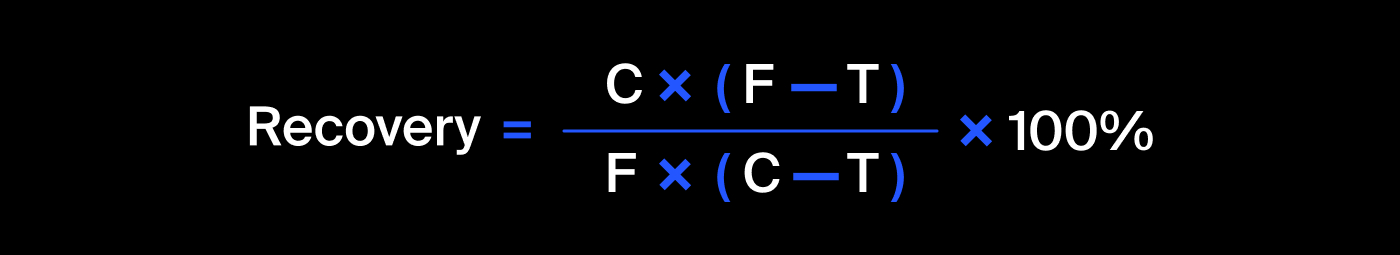

In [46]:
# Define the HTML tag to display the image
html_img_tag1 = f'<img src="data:image/jpeg;base64,{base64_string}" alt="recovery formula" style="width:700px;"/>'
display(HTML(html_img_tag1))

<div class="alert alert-info">
  Deb's comment 1:  I was just trying to imbed an image that explains the Recovery calculation.  I did not get error on my end. But, I changed it, to try a different method, so that you can see the image, too.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Broken code
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Interesting solution:)
  
</div>

<b>where:</b>
<br>
<br>
- <b>F</b> — share of gold in the feed before flotation (for finding the rougher concentrate recovery) &nbsp; / &nbsp; in the concentrate right after flotation (for finding the final concentrate recovery)
<br>
<br>
- <b>C</b> — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery) &nbsp; / &nbsp; after purification (for finding the final concentrate recovery)
<br>
<br>
- <b>T</b> — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery) &nbsp; / &nbsp; after purification (for finding the final concentrate recovery)


In [51]:
F = train['rougher.input.feed_au']

In [52]:
C = train['rougher.output.concentrate_au']

In [53]:
T = train['rougher.output.tail_au']

### Check for zeroes.

In [55]:
# Check for potential zero values before calculations
print("Zeros in F:", sum(train['rougher.input.feed_au'] == 0))
print("Zeros in C:", sum(train['rougher.output.concentrate_au'] == 0))
print("Zeros in T:", sum(train['rougher.output.tail_au'] == 0))

Zeros in F: 1159
Zeros in C: 1493
Zeros in T: 0


### Calculate Recovery

In [57]:
train["rougher.input.feed_au"].head(10)

date
2016-01-15 00:00:00    6.486150
2016-01-15 01:00:00    6.478583
2016-01-15 02:00:00    6.362222
2016-01-15 03:00:00    6.118189
2016-01-15 04:00:00    5.663707
2016-01-15 05:00:00    5.687168
2016-01-15 06:00:00    6.038436
2016-01-15 07:00:00    6.433854
2016-01-15 08:00:00    6.526612
2016-01-15 09:00:00    6.633002
Name: rougher.input.feed_au, dtype: float64

In [58]:
def calculate_recovery(C, F, T):
    return (C * (F - T) / (F * (C - T))) * 100

### Call the Calculate Recovery function

In [60]:
# Assign recovery calculations to a new column
recovery_calc = calculate_recovery(C,F,T)

### Compare the output of that calculation to rougher.output.recovery ( the percentage of gold recovered from the ore after the flotation stage. This variable measures the effectiveness of the process ) Was 'rougher.output.recovery' get calculated correctly? The MAE will give you that answer.

In [62]:
actual_recovery = train['rougher.output.recovery']

### find MAE (mean absolute error)

In [64]:
mae = (recovery_calc - actual_recovery).abs().mean()
print(mae)

9.210911277458828e-15


This is scientific e-15, so if you move the decimal over, 15 places to the left, this is a tiny number, very close to 0. So, the margin of error is almost 0.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Clean the 3 dataframes:</div>

### No need to change any datatypes. 'date' was read in as the index for all 3 datasets.

In [69]:
#No need to change 'date' datatype, for full, because it was read in as the index.
#full['date'] = pd.to_datetime(full['date'])

In [70]:
#No need to change 'date' datatype, for test, because 'date' was read in as the index.
#test['date'] = pd.to_datetime(test['date'])

In [71]:
#No need to change 'date' datatype, for train, because 'date' was read in as the index
#train['date'] = pd.to_datetime(train['date'])

Datatypes are good now. I think all other columns are good as float.

### Check for missing data

In [74]:
# Identify missing values in each dataset
display(Markdown("**Train Data Missing Values:**"))
display(train.isna().sum())

display(Markdown("**Test Data Missing Values:**"))
display(test.isna().sum())

display(Markdown("**Full Data Missing Values:**"))
display(full.isna().sum())

**Train Data Missing Values:**

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

**Test Data Missing Values:**

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


**Full Data Missing Values:**

final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Merge the dataframes:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

In [76]:
targets= ['rougher.output.recovery', 'final.output.recovery']

In [77]:
# Add 2 missing columns to the target.
test = test.merge(full[targets], how='left', left_index=True, right_index=True)
test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759


<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

### Fill all column's missing values with the value of the previous row's value, for all 3 dataframes.  Because all 3 dataframes are sorted by data / timestamp, the 'ffill' method will work nicely, because values whose timestamp is close, will often have similiar values. 

In [80]:
full.ffill(inplace=True)

In [81]:
test.ffill(inplace=True)

In [82]:
train.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [83]:
train.ffill(inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

### Recheck for missing values

In [86]:
# Identify missing values in each dataset
display(Markdown("**Train Data Missing Values:**"))
display(train.isna().sum())

display(Markdown("**Test Data Missing Values:**"))
display(test.isna().sum())

display(Markdown("**Full Data Missing Values:**"))
display(full.isna().sum())

**Train Data Missing Values:**

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

**Test Data Missing Values:**

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

**Full Data Missing Values:**

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

There are no more missing values.

### Check to see if there are zeroes in train set

In [89]:
# Check for zero values in specific columns
zero_rougher_input_feed_au = (train['rougher.input.feed_au'] == 0).sum()
zero_rougher_output_concentrate_au = (train['rougher.output.concentrate_au'] == 0).sum()

print(f"Zero values in rougher.input.feed_au: {zero_rougher_input_feed_au}")
print(f"Zero values in rougher.output.concentrate_au: {zero_rougher_output_concentrate_au}")

Zero values in rougher.input.feed_au: 1213
Zero values in rougher.output.concentrate_au: 1547


I will need to remove everything that is close to zero. I will do that after making graphs.

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Exploratory Data Analysis:</div>

### Here, I will study how the concentrations of metals (Au, Ag, Pb) change, depending on the purification stage.
- Flotation Stage
- Primary Cleaner Stage
- Secondary Cleaner Stage
- Final Concentrate vs Final Tails

### Technological Process for Gold Recovery Visual

In [94]:
#I copied the above printout, and pasted it in to the double quotes below.
base64_string = """/9j/4QB1RXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAATAEbAAUAAAABAAAAVAEoAAMAAAABAAIAAIdpAAQAAAABAAAAPgAAAAAAAZJ8AAcAAAARAAAAXBIAAAAAIAAAEgAAAAAgAABDTElQIFNUVURJTyBQQUlOVP/tACxQaG90b3Nob3AgMy4wADhCSU0D7QAAAAAAEACQAAAAAQACAJAAAAABAAL/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAcYCvADAREAAhEBAxEB/8QAHwABAAIDAQEBAQEBAAAAAAAAAAkKBwgLBgUEAwIB/8QAhxAAAQQCAgEBBAMEDxANAQIvAAMEBQYCBwEICQoREhMUFRYaFxiX2BkhIjlWWFlad4iYt9XW1yMoNzg6SFRXeHmTlqe2x9IkJTFnaJWmqLS1uOfwMzZBctkmMklRYXF1dsgnNDWBodThKUVHSlJTVWV0iZGZqbGzydEqaYKDwdPoQkRihvH/xAAeAQEAAwADAQEBAQAAAAAAAAAAAQIDBAgKBwYJBf/EAHERAQABAgIDCwUEEQsSBAUBCQABAhEDIQQxUQUGEkFhcYGRobHwBxMiwdEIMuHxFBg2N0dIUlZ2d4eIprXGx9UJFRYXGVdnlae21iMnKDhCVWZocnWUl6KltNTl51NiktIlM4KysyQ0wuI1JmNlc3T/2gAMAwEAAhEDEQA/AOf+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsieDf07u5vK+5w3js+wy+h+k1ctOEHKbCaMEVNjbnkIp17LVVdGMJdk8hUEIfFLOEn9q2VlJ1WtWR5hGQ1b2NNV+51yuhcLvnV/0sHhhYx9H7G0fqchsCai6rFTMP2Drdk7tbxlcsYddZje5nUj2A3VO60YWz6MfSL2z1TWmuddv5VbKNi0mSSkbDph8agWH0i3kwm2PWnXFD6F83Cdl4NatwNe0Fbeht8uFifyaFZgKnRNkIa+622672KblLC2aMtZ024TEvYF+Un3FZf8AERi6YhXB8+Ppl1/Hjr6a7j9M7Nadi9U4KQYp7b1/sCTi5HZmjPrNOtoiDsMPNMo6FS2BqzObl4ysLYqscr/S8nUJITq93hXFpuFVCoOAAAAAHQS8inhd8ZmkfTzO+6+rusEdVezyfVvppsLDaSOz92yjnG4bRt2g429zPFXndlSlI5yn2VxsiGbLKtcxzDiTyzi2bFRszzbBz7QAADpH/kFnio/IA/vy/vTYv75X8h6++c+6b91jfPzP3cvvLPuqfXv6s/dS+pXx/r9/6UH0D9W/qv7/APtf9CfRP+wAObgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGVNFaftvYbd2nNA0DFjne947U17p+lYSjtNhG5W3ZluiKXW8ZF8r7EmbHKZm2XDt2pz8Nu35UWz/M4cgdfPvruXWfgi8M1skOucBWYlLrjqWl6Q611awPKtDurNtK4ysXR4G4zTBrFxLDYlzbTE5P8AYLbTCLh2kzsjivbEnn60YrIy08wDjx3q9XTZ90tex9jWqwXm/XqwS1rudytcs9nbLabNPPVpKZnp2ZkVnD+TlZR+4XdvXrtdVdwurmopnzlz7QPK8c8488ZY8845Y88c45cc88c8c8c+3jnjnj8vjnjn8vjnj8vjkC/F0U9Vr1Hz8dEN1E8qFC7U9gtmL6+2BoXbl1q0PRrsw3rpqzMZWtxji52aY2pq65JXF3rid4oFylXGU1Z7O/gFtiyt5f2i3yWMaFDKfQhGs7Ntq1IyEvXG8vJIV+WloxGElZSESeLJxUjJwzaSmW8RIPWGKDl7GIS8qiwcqqNUpJ9gli6VCcvw/en/AO2nlteOb1Bykf1+6sQcjIw9g7F3avvLGlMT8eljgrWNT6/bSlee7KnWT1w2xnXS1kqVNgGaUok+uPNnax1UmQt4Vn0V3jPj4avQ977Q91Z295RyfEzIVm66BpcNOSKCfOT59XqdM6FvMzDR2Xu5qJx7q3WZdmnjzwtLOvd5zAgO8sXpOOx3RvWtt7HdVNlr9udHUz6esN/p7ipI07emqaCywlJTCzrxbKamK/tyt1aFYoJ3ix1TGpWdq6eJTbHVH1RZ2WbrAVHwOqv5af6k/f8A9xR49f8APvq6ByxKxWLJdbJXqbTa9OW2322ciaxVKpWIl/PWSzWSeft4qCr1egopu7lJqcmpR21jYmJjWrl/Iv3LdmzbrOFk08gvidA/RYubNSIm8+STsHbNe2aei03f3Ausrilu7DR1HsfHPGre57st0HfaXJWSMeOJKIsdZo9CsVWRcRyL2u7XsjJ/xk2D1HeD0XWvWmqLXePHB2Z2Vcdl02tSD2O0j2Kda0sCO2bRHu27paqwO46VDamgNYTLyA5dt683uNKsMBKW3mGYWi40CsyklbK8FiTYuvbnqT00171TsevvqlsPWXgzs+vb5VZP4P0lWbnS+gz6t2ivyHyyq7f56GnI19Gu/gLrI/MNlPhKqYe7nkHHTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACS3wzoxa/lm8cGExilk0x7o9d1keFuVOMOJRvs6uuIPLj4XPGXxcJtKPzR45/mfK2KfC3HKXOfAF9D1qmeePiw0Lxjnljip391Xgpxjlzxxnhx147TqcY58cc+zLHjPDDPjHn28e/hjl7PbjxzwHMCAu+dTvRrffQdWOtPZf8kc+o/wB8R1/03vT6lfeg/Wb6n/db11XL/wDVb6x/fQ1/6wfV/wCsH0T9N/QMJ9K/KfP/AERG/MfJohsB9hj/AP0ov/Mm/wD5uAKYe1+ntxpnfvZXQHXctztLYFU7gXHp7Rp3iITqfOxrjBbokdLVmW4gVZmeSrXNvmmrF5xEKWCZThuZD5POZkcW3L1YOr73+3Pr7wR+GeyO+tNVjo9Hrvq2maM66QsgxgeOHuybfIMadB3+6to2LhYi02Dmelpncu0HWMYxdbEn2tpfP8kpKxOnmIchza++d0702pN7w3DtO9bG29YZrGwyuxbVZJOUtSksk6yetHDSVWcfHi0YtfnH6EYxfLKPg0EkGkO1YtWzdFMOl36TDyl7k7x9cd0dc+yd5ntmbd6pSVKeVfZVxlHE1c7tqHYydibxLK0Tr9RxKWaeoNhqcnHvLLMuVpN/CWOqNHa713HunqwUkfUH9Mq50a8sPZ/Vmv6yhUtSXmZhd8ajg4+NgIOAiajuOIQtczXKjXqy0joeuUii7IWvmvKXANY9lhF1ioxTbBHNLBNwsF7Hy1ez7KA/9n+595R49vZ/67699Xf/AFvP/wB/n/1/IFYn0cvT+J3v5Gr/ANj7jU8rBUunWnl7FWJNVdHmNgN7bbk8qVrtxJRi2KuMrl9zuP3fKwvvJe7D2WDhbC3cNpSJjc8gko9YX5UN1a3vusvHFoa+2HXdam9Ys9w9j52nS7qEm7klbJ2bg6Jql3LxyrOWZV2NjatJ223RKC2UdbU7VUWz3PNCDfMXIUw+iffXsj47d/07sF1vvctWZ2vS0etZ6ly/d/UjaFVSdJqTFE2FAYK8M52uzrLhZnlmql9JwjhVGcrj6Kn2EdJtA66/e7bdb394RO5O96dwpxUN1+KzsPtuq8LZ4qq8VvZHUi33GD4VUwxxwUU4jJlr7+eGOOOeXtyxx445444DitAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABnzqnvNz1g7Q9cOyjOCwtLrr5vjUW7kKuq/Ui0bKpqrYFfvONeXkkkXCjBCc5gvotd5g3cZN0nWavCC3u/DyDrSedzqEy8qPiD2XG9f8ora1vY1yjduerUlW30tMR+wJCpRedlap0dKrtJRS3y+1tJWW+U/WjDhsrEzFpu1YcuHce2x4lmQceDnjnHnnHLjnjLjnnjnjnjnjnjnjn2c8c8c/l8c8c/lc8c/l8cgby1HyfeSegVSsUSieQXuxS6RSq9C1Km06qdpt4V6r1Oq1uNbQ1erVbgIm8NIqDgIKIZM4uHh4xo2j4yOatmTJui2QTTxDphelTv3b7bni4c7e7g7Q2zuKZ2Z2U2xO6Xv25dizGzbdK6VhIDXlCwRRnbHNTlkZwjHb9P2+0j4mbcIOE80nUkxa8QknFOXIUCdz7Zp+g/Ub7Y3psR08Y0DS3myve2b09YtPn37On6571ytws7pmxwUR+deN4WGfKt2mCqXzK2GCOKmHv8ZcB0APVeagte1/DTuiRqbJxJLae2RqHb88xaJ8LOc6pC2fmq2F7inxlxn8vBsbllYZJTHjPlvFRL5znjwiipngHJNAvoeh+1LZ1Lz333sszcN6Yyqem9Sxz9RHnhrMWeTmLdcZlmyX9vszcVuKiIFaTR9nHKadric+Oefi8+wIx/WD7nhNo+YSQo8UwcM33XDrLpDTFlcLLfFTlZucWufYdB+0w+XR+Xbp1zfMBF5I/Ed+87jXTj5jH4/yrYLX/lp/qT9//cUePX/Pvq6BCx6HjbdNhtyeQnRD5y9w2DsfWegNt1hmmyzUjl6bpS07Op17cupDjLhNq9aTe/tdJMGWWGWb9B7JLp5YYxynGYaNesg1Ja6V5U6zs2SYrcVDdHWnW8jVZjHJZRmvI0SVtFMs8HxkphhglJRHyUJKvGjflVJNjZod3kr8d8siiFThJFVwqkggkouuupgkgijhkoqsqpnxgmkknhxlmoopnzxhgnhjzlllzxjjxzzzxxyHYv2pqey6H9NxtLStybPmVy1P4UNha8t7CSS+C+jrTUuj01B2ONcN+cueW2UdMMnrLFrkorm1wb4IZKL5pc55hxzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXgfTjepLpfV6jVToJ5CbdOMdNQz9WK669jZJurOx+m4R2gu6bak2r9Ht17NlrFCZwza69uibWyL66yn29TsPELpuDiZTW4WBe2Xp4vDv5dbFO9xtRbCfVWz7UfWuYsW5uk+19ZWjUe2dhueE2L+42yFVgdlUGVnm0+yXkbovrd9r6auljkLHM3eZkrfMO7BgGqVd9Kx4TOisRE9g+7HYbZtyoVLVeI2bjsfuvXOkuvc7LSmUhhWGz1GpVqh3r6Wa4/KZxNbabidp2ydj80XULLRMgtV+Qlz8S/ls6w+SO/dr9K9NNX803rR0biuutD1VdEIlKiQGwK9eI7bEMxbUXT2FcgXGrtdUuP1Cxi6NEyWLSWeQL9tw/qVIzj8IPEOVl5Yvz03yWf3f/AHI/7RWxgL2Xgn9RL1H7M9Uqn0S8lGxahrnd9QoLjSri89gpmP40z2o1JhWpKGZK2+/27hOuQOxOac24o+x63tSXwT2lK5RVoq1mtlj2DYKHRg95tP0X3jsuu1nV0oW8Oyuotdys1lKSOo4OTo9nYRLJZVNRaCpNvtdWkLDDRuOPC2DNS0/XuQbfFx5zeucEcEuQ3E7B+Q/xL+nN6gr9Z9ISdKsWzNdsJ7KhdSNf3hC27iuez5bmLeOp7fNla42B3rJOaVmY6cnrrsxGOdualGvY7V1XtbiuQ1H4DlYdhd8bI7Q7z232K2/M/T2zd1bAtGx7pIp8OE2X03apVzKLx8M0cuXecVXIbBdOHrMGk4UaQNfYRsKx4wZMG6eAdPXy0/1J+/8AZ+ko8ev+ffV3/wBcBzmvGj362X4zu5eou3WtI/KzKUORexd810vPyNdiNqavs7NSHvFAmJCPwdpt8pGMX4lqvJykPY4yrX6FqN1XrM8vWm0auHUavVJ8T/qcOmNUVaXVO8x1fbx1zjF6dZq5V+03Uy629vMQjiCvdWzztKlHlpZzVZqLdwNrh7FrjZjaqNrfS3t0rbGpXPkIqaj4B/C94QZWD7693+zly2FFarsLaT1hW9141JtU5bYTTPF9Wk6zqOl1x7ddxbBhF2/M7D1+McycVHpR7u1ztZ4iIB3LRYTyd3dz1vsd4Ne3nYanNJBhUd8+KDfu56qxlsME5VlW9o9QbZeINpJpp88ppyDeMnGqLzDDnnDFzgpjjzzxxxyBxZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP3R0nJRDtF/EyD6LfN1MFW72OduGTtBVPPjNNRFy2USWSUTzxxzwzwzxyxzx4yx545445A/g5dOnq2Th45cO18uMeMlnKyi62XGPHGOPGSiuWefPGOPHHGPHOXs4444449nAH8AAAD6KEvLNmase2lJFuwXy5yXYoPXKTNbLLDNLLJVsmriiplkmpmnzznhzzzhnnhzz7uXPHIfOAAAAH92rp0ycIu2Tldo7bqYqt3TVZRu4QVx59uKiKyWWCiSmPP5eOeGWOXHP+5zwB/p49eSDlV4/duXztfL3lnTxdVy5Wy9nHHvKrrZ5qqZezjjj255c8+zjjj2+zgD8wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/azjZGQ+J8gwevvg+58X5Nqu5+F8T3/AIfxPgp5+57/AMPP3Pe9nve5n7vt93n2B+ZVJVBVRFdNRFZLPJNVJXDJNVNTDnnHPBRPPjjLDPHLjnHLHLjjLHnjnjnjjngD+YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALWHppfM31B8S8P3HY9po7cL9fe8noV3SPuVUuFtuCSWtmu4EbD9OZS9vqvLDPPK9Qv0di3xfcOeMH3KvLb4CfC4QQ+Rvf1F7Vd8u3PZHWKM8315u/fuyNlUxG0R7aKsSddtdjeykXjNRrN/KNWMjw2Xw+abISL1NJX3sMXCnHHvchpaAAAb4eLzTGtexfkU6WaI3HW/rhqrbfY3V1C2DVuJier/M/U7HZ2MdMxX05VpSEscV84zWUR+ehZeNkm/vfEavEFeMc+AsQeqw8WHQ3xsw3Rt30r0T9xhxuGT7GN9jKfdO3JsX6xI0NrpBSqYe7tjYd6TiPorO32LL3oLGMzffSPsksnnDRjw2CneAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABux49+hO+PJP2kofVbr5D8ObPauHk1ardJM5JWnar13CZNvrRsq/yMc0dcw9YheXkfFtVF+Es7BbpyrUmGyc2a1QUe8DoxVLw9+n38H2iqptbvQ01PtO3uYxSpzG3+3kKvtXnZlqeNI57YGWrurSbW5UpFBg8bKvq+0reurnsGl1l38rZNkz+HD+ffh9HUms/SveZhOU0D19091PX2BEMZaxs4DT2kbH0o3Qii0YfKubJXndepWlrBsGNgMJBGScRKmV1qTRdNF3Ya+si3Uw4CmH55PBHdvD9sGl26j221bk6j7mlp6K15sywVvBjYNfW9gu/lGentqS8ElxU31vdU1LCdq1pZtKclstCCvr6DoUAhSppq3DLnpXej/Vbvn3q3jqztxp+G3TQKr1MtOwICtTkxa4VpG3FjuHS9daTibioz9efquEYWyzjDFBy7WZ8pyCueTbJbBFRILHdr9KT0lw8gHYbstvV/XNCeMTXlY1VPa10fW9jylLj5mYhqXWvuuPNu7Wt068naPqRvMxE25fKwtqg7dPPri6Uibhr2OpLfK3hAB6mDrZ4kevcf0bw8Vi/Xp4ys+XZZnux1obsEvv5TNatY9fVNcI3KSdbN2U6hXKeFivOcN8y5j3EvgtJ5Z8vsY7DloEy/jJ9LN096+da2vcXzLzOD+eToqmwrdpWz31/qjSXXmuKctpVnztW31ubrtnt2wYiPQacT7Pi0wNAhpOXmaU4rd/VYRlqchtD+SHej3v1yk9LraQ6ORLKy8u6flsTnx4tdfU3lWXbqxa60Zs+P0fAT1J+Dmvng0vybistIVfFOfj7OxQQQmEwjK88/pj9FaQ66W7v/4x1ZtrrSgV6Nv21uu3FksO1q1hqP6IhUpDbejLxILWi4rxNcaYudk7DirzarTCK01/ablV7dVIKmRlHnAoqgAL8vpY/Ev47++Pj63Dt7tt1kq26Nj1zuPsHW8JaJyz7EhXbCkxGk+vVnjYBNrUbjXo1Ru1nbhZJHBwuyVfZqSqyarrNBJskgGY7d46fT0+D7e+wtreSe01Dcm2Nz7b2ztrqn1G5pF72xR9L9Z5HYU7Aa3r8hqRulY4u8OGVelXbN7fuyj1Kl2OUp0rX9SV+WuWqbPc7QEqenuovpxfOB1p2BH9W+vfWJCLgHTGKttg696Ogep/ZHRt3sVTk8qvKvvoKi0e0KIsuX8q7rfNkir9oK/2unSzRRhsNClzDFiEF+pvTg+PPxWrbU7Seczs/R7Z1+rW2VKJ1uo9Xd7Kg4zbcC/xcY1m17Ep2u4t5uievzhB23mpDTOpXc3B0VOo2Sdt102Lrrl+oyCZbphbPS6eU9Sw9bOvHVbpktsJ9Spf5vXEx1Ar2hdyvajHIIs5Kco2ymdFq9ifTjNpnzIOJTXOynGw4Voi6sUhzGIoqyXAUsvUbeIeqeKLuFW0dHpWLjqn2Wrk/sHSjKyP+Jh3rywVyZQYbM0k3sL2Ue2S2ROvfp2lztZs1nbJzmdNv9Zrc9OXe2VizXaeCR/0mXjX6P8AkDhO9zvuJoCvbvcaqletrfXyk9YLzB81pG6NN5qWfBrjTrTXMHP0vnVoDJfKQxd5JfRqXDblDhRfhUK9nkeousOrHlR7ZUDWOr6grqLRfbi9RFQ05ZVrVKUR9S6Te1cmOv7Cs1s0bdHlWk41l9By+bC3xdkUi3LjmPsMdJfAkUAvSaf8NHhO8yHi0d7y6Jdd6b1u3ZsqhyjCr2GG23suxzfXPs1UEW7t7rHaLWRsFmZSFbTnsWUbZOJbXqE3bdM2+K2TSYeAkrJR55gHP+170M7RbG7tQvj0jdZysX2mktyOtHStDk03D5KoWuGk3TO3zVmkqo2syWFCosVGzF0tt4g05yAYa/hJS6tHT+vt8XqoXlfJx43PCZ4Q/GbVJrZvWrV3Z/uhKVBlrHTr7Zl329VJvsJvDFoyyve35nX1N2cutCas12pLK3myV2JetYeLjlKNptTZETZ75VbO9DUX05e8fAfDs+hNE23p/wCN5X3ezLvFRmzpXX+0J2sYbNs219lZaYVarMJeQ1uyk21BlaJCV6ZwpbdnUrIlGzK76GkYZWysQs2+dnb3hn1hSOuzPy9ayT2dG2K1bBc6EjmFH2FYrNGvoKIrKWyXrCxa9fwD2BglG85RkJ2FkLI3a2WQyrb5KDl1qr8/ABzUu0WXQ7d3ltjmPRugua70U2HuzrFVqJQJVtb4RfiBk65qSs7XjnSNknJK3scJvYHN+ccLLTmTn4Ehi5jF2jXJmkgFo31S/iV8dvRDx76m2/1K6x1bTGyJ/uFrzXMxaYOz7FmXb6lTGm9/WSSgVGttuVhjcG7qbqVdf5rpMk3uCsWlgk5wQVcJrBQUA6FvTTw++NvZHpwJHufd+rNTsHZ1Hoz292mntlzadkoTGF/1203ctS7JxEsro1rHLmCUq8Dy3bfQfMev9HJYvWbnFRxwqFJnx1a3pO5PIL0U1DsyAb2vXG1e5HWLW+wKs8cPmjSyUm87spFYtcA6dRjpjJNm8xAyj+OXcR71m+RSc5KNHTdfFNXAOi35I/Sy9Ld3Uvrlrvo1oWpdYJ2W7RVt12E3hC2O3WiTpfWuL1BuuQtPEfVdgbJdNrHKWHZDfVVXhGMEzdSzSdmouaksW1Lira/aBF/5kPG76f3p54tOzEf1FsPXixd4dWMdDViFkXPcDPaHY2TsbDfOoads2ZlNWp7WdQrK0S1KfXSQvURU9WVitwmDqYfxVWrMdFskIsIw/T8+nQm/J4jx2m7RSN01h0ortjfQ1bZV9r9CXjszPwOT1lORtFsco3XQr2sapY0UYS7bCYRE2pNzMdZ9Z0t1D2+Hs9q18FljbW9fSReNqyZ9VLXoHp7b7dQpWQi7Uww6t5dxbTS5f6QXSlYe+bpvNS2lPvZuHfpuWcjVn+wJyw1dRvnFuYaL5STacB5/sn4D/DV5jus9y7I+KKwag09t+XzeuaRsDSUlPwuhXt8h46N4Q1duzr1w1zQ0xGyUbgjg+xoWu9d36qOrDG7JkqtsaPT5pduDmy7d1NsPQ209iaU23WHlL2hqe6WTXt/qb9di7c1+3VKWdQk7F5Pop0/iZJJrIs18G0pEP38RKNuEpCKfvY9y2dKhjsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0UPRFdbIyM0l3W7gP2VVfzN12pTOtlTkVIpFa71SM1fUmmz9gsmc2vFcOI2q7Adbf1kvJRUZNqITkvrSKeTsUkpXq67WCur6pHtFduxHl939T5uUkM6L1mb1XROs64s6UzjoVnE1qJsV2km7PhJu3wkLLsCfsT54/wCUVHzmMbwMa4fO2UJGYtwgp0puXY/XjbmuN5ahs0hTdm6puEHeaVZIxdVBzGzsA9SfNOVeElEvm4938PJjLRi+WTOWinT2MfpLsnjhFQOuf5q9ZVPvt4IuzNscM4qI9vVKK7o0aQmYdpNSVTk9R1eL7E4NoJw6b/Mws5ZKjA2HWTicj+Wb1ODuU4xWzyjZGRZuAp8eih/PKuyP9w3c/wB/zr0B871kvb7YOyvINTuobS12ZrpnrfqGh2F5r3NdBvVpLduy0J61S2xOW7RNJeYfpaznqHUYlWcWffVrllbMa2nFY22y5TARIent0Pr7sl5leiWr9oMnMnTU9k2vaDqLQyY8oys3oTU+wd8U6KmG8lHyjGRrMnctbQDG2Q7hnzjN1lxLRGLhio9wfNw6MfqB/Gd3O8qnX3UPXPq5t/TOq6LGbClb9u9vtqf2HB/XVWDjY9trKGjU6HRbslKxMZKP7PPzbScTYJoTEfUH0fw7XarZNAqQ/YoPJH+mV6Qf4275/kBAuzeFnpJ2g6FdBq31A7hbI1juia15brvGa/ldfylwtNca6TsWEdKwtJmHOwqnVJRdaEsMndY5pE8RTiEjacpXIaPcfKtOY9iHIY7saTr/AFq7l9tuudTkJWXquguzW+NLViWneW+U3K13Vu0rVR4OSmMmiLZplJv4uDau3+bVug2zdLK5IIppc4YYhrGB0+/RU/nWW/P7v/af/Z16qgUUPN5t28bs8unkTt2wJTCWmoDtluLUUWukyZR6TWj6FtshpHXMXg1j27ZtznFUHX9bj3L3JLl7LPG7mXlXDyWfvnjgJz/RQ2ixNPJN2UpbaZkUKnP9HrfaJqvJO18IiUsNQ311/iaxMvmGKnDZzJQUbeLexiniyWa7FtY5hFvmmnIOsVQ+p62TYNzkvIZ1b1S+n3znXtM6ZQ+wavVlOU/o2Guezd37krl7n2mPCfCvD6ywmpNcx0hzmrmnkhVIzhJNPLFbJUIJfBxse06s8vnjrs9Pfcx0tKdqNX64duOOOOeVKtuKZx1FeWPPt459mMpSrxYIzLn2e3HF3zlxzxzxxzwFtf1x8U0WoHjgm8+Mvno+4doIpvzxwn7nDWZhdFO3nGXPKfKvvcqwTD3PcVwT544z+KmrlwjkiHyvQ1f+ZzyX/wDsb6jf9A7JgVKfNf8AnuPka/uvd2/56SYG7np1fMXK+Lfts0qO1LM8R6VdjpaGrO/YvOMxm0teWBFN3HUXe8CjgqjKxitLfyXyOyUINR9lZdXvZpVSpXG5VDWiEMHUTu+m+m/WbZfYnyaW/X1N1/tBn1zcR3YPsKwrMm/tKuhtIMJXYEsrKR9ZYScxOuY2EhGHMy5hoSTulugte61qi/M1H68oMNDByF/L35Ptq+VnuLdt/wBzdSMRq6DdSdL636ucN0I9trLTDGWdrV1nIx7OTmmjjYVoSzws+0LBxLyvEpbnzqOhXbKjQNMrlfD+HhQ/PcfHL/de6S/z0jALavrlf/M74z//AGNduv8AoPWsCjp0+/pturf90XpL98usgdHj1qH51bo7+731V/2f+0IHL8A6q/j9/qSCW/vbHfL/AKB2NA50/id/PTfGn/d/9N/+0VrkDo3+ru7G7c6++JjCF1La5CnY9j+x1B66bOk4Z5IRk4/1LY9bbj2HbKtHy0Y9ZO2LG5OtZQ1UuDXnNdjZaBMWymy7N3D2N+jkHKRA7XVd6Zbj0T4ja/0T6o2bWGr+wFL6dQ2haZslujI1SgRO4XdDa129bk4XrFPdTeE3OXR/a9nK2D6nLTk7d5TOfn2fMpJSTjgKMy3opvJS4VVXX7NdJF111M1lllrjvtRVZVTLnNRVVTPQeWaiimeXOeeeeXOWeXPOWXPPPPPIE/Xp9PBd3/8AEN2I29bdxb/693vr7uLU+Vbsmt9U2nakhIq7OgLNBSmvr3nF2/VdQhclK/Aq7ArmbrGXxd4tLivji1dcYYctwrZesn0tWNceVen7MrUV8g77CdVtY3q+vuXqjnKd2BTLRsDUPMhi1Vzy4j0W+tKBrCIwRb4Jtl1Yxd3xjk6Wd55BUxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdB/0RfamOXqPdLpFMz0e2loux1LtTresfIr8yszHT0ZGaj3ZPfSSMfy2xj6y5rmgI/5GQlcF8nNt+PDx6qeE45SCD71WPTLYHWvyrbS3Q+hZDnUPb9nA7d1rbOGrjKJcWGOrFfqu06ctKfBwZZ2SAt8UrYnEWlnk4Z1W5092497J/wAKZBA71d62bX7gdgdTdatJV15ZtlbgukLTa+zbNHjlrG8SbtNOSs0+qzQcZxdTqcVw9slsnFk+GUFXIqTlnyiTRmqpiHWK88m8Kh0A8G3YansHkAo7t2h4Lo7qqEsfzLbO0r7arKWoJtvDIR66PtsdZ0zxsTZMe3zcfIp5UhfN0k/aoqMHYVEfRQ/nlXZH+4buf7/nXoDSf1YX59p2K/Y968fvJUoDRfwe9o6l008sHSTsBf14hhRIDbDii3WesEqjCQNPqe8KbadF2O+zcq4yxbsojX8Psl5dpJVfPBDlnALYLZ4J55ZcBfN9Wsp5C9cdXuvfZzpJvnf2nqBpO7bAhOzEd162LszXtieQOyo2nc682LbnWu30Tg6oWvpilWGtSrqckuE4ma2nXlmjNVs5ln0cHPh/Ja/Kl+qVd9/3XvYD+UACXXp7pH1TvfHSkZ2J6ydjPIFdNOzs7P16u3Ow+Qazaza2d5V3eMZOvaww2ZvmoytigI+axe15Wyw7F7AZWOGsNfTkc5ivzLNiFbC/2O3XC93S2bAtspfr3Z7XYrBdb1OWN1cJq52yYl3khYrXL2187fvbRJWGXcO5Z9YXb565mnLtWSXdOFHOSuYeSA6ffoqfzrLfn93/ALT/AOzr1VAoB+WL89N8ln93/wByP+0VsYCf70VP56bvz+4A2n/2iuqoD1q356boP+4A1Z/2iu1QEDnh9/PXPG1/dydXP356cBck9cV/Qp8d37IXYv8Azb1GB5j0NX/mc8l//sb6jf8AQOyYFSnzX/nuPka/uvd2/wCekmBN36VzwsOu4u8o7v12PpGDzqd13tfxNUwsxKZsU919kKo8hpeF5Ur7VLl/O6r1FmshZLU5kHsPW7bf8KnQ8Utg1yN3LVYYLuukPNX027FeS/fvi5qMpnns7T1azTi7pKylc5pG5di1fCVX3tqXXzTF+rISs/p6I4jlJdFdPmRnnUDublKvx1Z1UlabmHPK9R34aJLxg9qF9l6ZqE4n0f7GTD6b1FMcfDlIfU+wXCbiWuHXyWk2ySK0bhDcpvLHqPGfbIu5/WKnEOznLzZdabInkAj/APCsug38t3jkUcLJIJ5dwtFoY5rKYJ4ZLub1EtmyPGWfOOPKrhyqkggnxz76q6iaSfGSmeOPIW6/XIxEotR/G5PIx7xSFjbX2niJCVwbq5R7KUm4jQTyIj3LrjHlFF5JtICccsW6meKrlGJkVEscsGi3OAUO+utvhtfdgtFX2xqLJV6kbj1jb51Vungq4Shq1doSalFEElFEcFFsGLJfJJPNVLDPPjHHJTDjnnLgOnd6xLUly2T4hULdV2KLuH0J2p0vtvYSqjxq2Vj6bKwGydHtXzRuupgvJrfXrc1KZqs2GCzpFk7dyiieMfHPV0Q5V/HHOXPGOPHPOXPPHHHHHHPPPPPPPs44444/L5555/K444/L55A6/VH64TvUn0z9x0BbIuagbtSPExvt7sKuWHFvjM1bZN667bC2HsepPcWiqzfjOqXm2WCupfCWVx+XjEueVM8vblyHMD8Tv56b40/7v/pv/wBorXIF/wA9at+dZaD/ALv/AFZ/2de1QHMEA7GGe2uyHk+8BsXt7pnuaSqnb3f3TiuTlb2Bq12313LY9k6W2jW26dY1GesS1cZa/f2DaFL2LpBtdcJWEY05eUytkBaWDaMjbGkHLusXlK8uNRsE5U7Z5DfIfWLTWJiTrtlrVi7VdjYWwV6wQr1eNmYOchpK8tpGJmImRbOWEnGP2zd6wet12rpBJdJRPENzei+x/UQ+SW53aidNu4HkJ21N63rDS23h3n3f2lSKvWYqSlUoaHbyl0v+3qvUm8/Pu8nqlerGU19Y5+OgrRKw8W9jKtYncaGlXk6175ENP9h4/VHky2lf9k9iKlQIB2kx2R2bh+0FpoVMsryWmIGtSlihtkbLwozmQ4VXtyFFlJSImPoSxwlxyhcYa2wkpKBHQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2j6Xdw929COzOqu1/XqYi4rZ+ppxWTjW1hjs5mp2iFlGDuDtdIuUOk7j3UlU7nWpKUrk7hGSkNYGbOQylKtYK5aGENYIwOhzqH1OnhS8h3X5zrfyb6yjdLTCakM4suo93adsvZjTljsH0hP4Mp3Vtv17r25SaasBHR8TJyUlf6NqyYr8paEoaqPbk1iZOy8h7LXPmj9Ln44atebj03Q1+2vTyMbpvq11t6qbSZbe2IxcScfjzW2ey9oUShVjKNj8ufp3KDuG3K9At8GDtaPSVmlWzN6FKXzS+bje3mH2tU31irLXTXXPUeMjjpvQ0RMfWHNhMTiDRGzbE2LcOYyGWu9+nsGTeOjvciomsUSrNW8DVYROZldgXLYIbPel57/dSPHX3f3buDuPtn7j2urf1Us2tq7YfqHszYP0jdZHbunLQzhfonVtNu860+NB1SeffSL6MbRKfyHyyr9N46ZN3Iau+oR7c9eu8XlH3R2M6ubB+6fpq2U3TUVX7j9VLvSvpB/VNW1iuT6H1e2JWqlamvyEzHPGfxXsG2RdfB+YZKOWqiS+YQngXr/DV6s+uao1Vrjp/5QKvYrRS6bBMNb1HtnUYrG3zCFCacwsBW4TsJrFBtxL29lUatzMNJjalD4sl8tMLD1thYNV3e8vrbsifDePLsH6KLLZifYHmA60/WpJ5y5xgcesncPDWXK2TJRhzip1nx1PxptZnwgrkpi0V1TnH4veE5LFHGRSSdYBHx5nfVN6y25oC89C/F3QJWl6ds1UW05bewc7WmWv2LjTiDWUqkrr7r5qBNpg9qNNt9NShYVjcbs1qNmr1Pf2GrRepqtO/QV0hAo6AAL3fpfvMz42fHd0G29pPuL2O50/syz9vr7tKCrf3H987A4f0Wb0xoGpRk5xM6t1fd4Fry4sFIs7DmMeyjaXR4jeHS7BNk8YOHIVA/ITtKibx79d4d16tnfrRrLcHb/sttLXVm+jJiE+sVE2Bui62yozv0NYo+IsER9L1+Xj5D6MnYqMmGHzHysnHsnqS7ZIJf/S/d9ep3jt79bd3X3F2t9x/WVo6gX7VsFZvqLsnYHz17m90aAtkZBfQ2raddrA2+Zr9Js8h9JvIpvDo/RnyriQSevY9s7D/AJ6oDvr1P8iPfrUe6+ne1+Nw6xrHUGg6um7LxRdla+5YXqF3Pv8AtkpBcw+0qhSrA75bQN2rMh9KMolaGW4lOGbd+s+YyKDUIlvG9tvX2g/IL0k3htmwfVPV+oe1ehdk7Es/0VNzv1epVL2bWrDZpr6FrUbM2GW+jYePeO/o6DiZOWefC+Xj2Dt0okhmFlr1VHlc6CeSLX3TKD6Xb6+7NKaouO6ZW/tfuW7o139AMLbCa6aV9x8fa+uqK3lfpBxAyqfwoVaRWa/K+++TbYLtslg+D6VHyodDvGxB95WvdPevOmXO4JPrq51wlxrDcexebGjQ2m7k7XlxnqnXt5SiOYtS313H3Z5SKyfcyPtjuHeLR9k1CEbt7besPdXzA9i78+7JQ2oepW+e2WyLqv2Xnta7esbWvajmbDKWDm0sNVVqjSG1peyS8OlxG0+pvanCYubXJwrK5zFGrWU5bIELdnkA9RT42epvjCjOmXhLvuEpeHNS+4PRHtV19vjS2PXPXsrEyil13Y1sd911r6XuG6Zt66fLw9hi57G1uNq3CT3fcLBKTEE6hbuFADUe2diaI2nrzdepbQ9pe0NU3SubCoFtYIMXjqv26pyzWbgpTFjLNJCJkk2sizQUcxcxHyERKN+Fo+VYPo9y5aqh0W9k+d/wj+V7xestA+SPdkXoTeO1dbo5bCqEP197MXrnQ/YWrqyMdAbc1TP0nXl0ivkG8+ySvdRhEtky715ruyrat2XJyCUteId2HP8AdB7eT6b9y9N72p7+t7qbdXeytC2lXZGvOLdVqdt9jprZsXaI5xDOblUK/e69VtiNK6lyxVtdChLbFQ8ynlO1CNmEHUMiHSIkvUk+ng7+aje0TupFyEJU2so1lmmqu2/VCxbbwSsSsJPQP1vpi+nK9v6Br1ig4mcmouNt7eaqtvjWtgccwazfl1IfLhz/ADy52npNdPIZ2Cs3jpa1xn03kvuUfcdbVKn3Sg19P5PSGtY/YP0fUthwlcuET7+02t3Ud/TEMz+fe5uZOP8AmIt4ydrhdi8Wnqoei+2OoEN1q8scy8pGz6vrNPUGwLxeda3re2oe1dGygkqatJXZjXoLZ1l+vl0rWbxLdMHfazlQbU/WlLDE2DhpbVtfVEMN23vl6R/x8Tk12p6W9dqv2U7Z1qYcS2sqBVqn2WUgYW/JO3FprlwhJrs0wc6P0/F123wcOmxvuqa5P7BoCL1o+1zS5Zi3dssA2FkfU09Buyvh03FQeyvYiuUzvjufpd2R1va9P1HRvY1Stc7duFA2PSqbDQ1oZ6zsFDjmVq+crT1Nw6vz2HgeZnJvM2BPiPeuUgoM+PbaVE0d366Pbr2lO/VfWWn+3/WnaWxbN9GTE39XaJr/AHRSrZbp36GrsfL2CX+iK/ESEh9GQUVJzD/5f5WMj3r1VBsqFvz1QHmZ8bPkS6C6i0r067Hc7f2bV+4FC2jOVnnT++df8saJB6Z7AVKTnvpnaGr6VXnPDefu1XY8RbOWcTS3Epw6RjlGbKRXZhREAsN+Cnz67M8QllsGs7hSXW5+nu1rrEWvYmv4p+hGX7X1jURi69YNn6kdSCqMDKWJ1Uo6OQmqJaHETD3pSq1WMTumvcknthUC0tvLyLekT8lDmA3V27iqWx3HJsvpOyOLnojtBq7dnK6MPEVtlE7W2P1trmMTs93BVyqwUTWW7/ZmxoqtRLdCMq7qP4cPWigee336njxCeO7QMnprw/6LqeyrVLRr2ZrUZQdJzvXLrjXNgOYhCpJXHcOVkrWuNobMtrRjXarIzeMDWHMjsiCjGcHJbqqUpxhLRgc8zfe+dv8AaDcmxOwO/L5NbM3BtayvLZe7rP5NuH0vLO8U0UkmzJg3ZxMHBw8e3ZQdYq8BHxdZqdbjYms1mJia/Exsa1DEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbB9bNCr9iL6/pSVnSqSUZWH9mdSqkRnN55IspGIjMGiEfjIxXGaqziYQz5UUfI4JIpLZccKKfDSz7D+5n8gOP7ozf/uhvJwt9GFvRwty9626G+jSt1sTcivdyurB0LdLcfcujRMDc+ndHcmMTFxtJ3ZwK6sTE07BowsDCxq4jFxPN4Vf4bygb9KN4u4uButVudVunVpO6OBudhaNTpUaHTFeNgaVpE4lePOBpM0004ei1xFNODVNVdVETNNN6oxLeas4o91t9LdOknzmo2eerDh6gnmkg8WgZV1FqukUlOeVE0nGbXlZNPPnnPDDPjHLnnLjnk+Rb+t6ukbxd+2/DeTpWl4Wn6TvP30bv719I07Aw68LA03G3A3V0vcrF0vBwsSasTDwtJr0WcbDw66proorimqZqiZfp9x90qN2NyNy918PCqwcPdTc7Qt0aMGuqKq8KjTdGwtJpw66qbU1VURiRTVVEREzEzEWl5Y/Kv9IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/wBHK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8AO/dd9O3kfMXvR+xncL8V6KxEfH36gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/P234fal3b/njvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/nbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkX8Z6GeW6bm545x+Gjq6SQy45559/nNxbKgphzjx7Pd5x4xaqcZ885cc8c84ezjLjnLnH+kP6mLo9dXlt366VE0+bwfJZuno9UTM8Oa9J327z8TDmmODwZpinRMSK5mqJiaqLU1RNU0/BvdCVxG9HcnDtPCr3x6PXE5Wth7mbqU1ROd7zOLTbKYtE3mLRfUvsQhm333udPPnHnLLaN6X45w55549x1ZJJynxz7eMefe4TWx4z49ns4z4y4x5yx44y56i+6N0evRvL/5a8PEmmaqvKnv80iJomZjgaXvm3S0rDib00zwqcPGpiuLWiuKopqqpiKp+nbxK4xN5W9KqmJiI3ubjUZ2vfC3P0fDqnKZymqiZjjmLXiJyjDh8YfqwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIvGZ/Rcvn7HK3+c1fP6WfqYXz3t/32t8b+c+958B90L8zG4v8An6n8X6c1L7Kf0wO5P2RrX/1u5Oovumv7YXy0fbI32fjfSX07yffMPvT/AMw7m/8ADYbCJ8NfsEpfV7wp+UPuJD0e26K6f7NnNd7DRYv6vtKy4Q1C1pIwb5wq3+sTW4XWVgouRhWvy7lRwvD5yTnLhvmg0aOnqjdqtE1RGuV4orqtambTxzlHasN+bTwY9Q/Gb4a9A7LhNbxbruyy2fpTXO796wewtxyUFcZmxUnYczf0IKj2q7u6Iwg1LBDMGsPJMKJXpNaNiWrz5KHWkZFgVpqmap2WyjqaYmHFFFM29K8RM3nZO32KTJdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIvGZ/Rcvn7HK3+c1fP6WfqYXz3t/32t8b+c+958B90L8zG4v8An6n8X6c1L7Kf0wO5P2RrX/1u5Oovumv7YXy0fbI32fjfSX07yffMPvT/AMw7m/8ADYbCJ8NfsEzGg/UF+XnrBpzX2gNG9uPqPqTVdfRq9DqX3BOsdl+goJuuu5RY/T1v0vYLNKe4s5Xz+amZmReZe/7uTjLDHDHGs0xM3mO2V4xK4iIiq0Rqyj2Lf/qU77bNqenc6abPvsr9PXnY9v6W325znyMbF/TNsuHXy72GxSv0ZDM46HjvpGYkXjz5GKj2Ma0+N8uxZtWqaSGFaffVdPfDbFmZwqJnXM0zPPNMubQaOMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIvGZ/Rcvn7HK3+c1fP6WfqYXz3t/32t8b+c+958B90L8zG4v+fqfxfpzUvsp/TA7k/ZGtf8A1u5Oovumv7YXy0fbI32fjfSX07yffMPvT/zDub/w2GwifDX7AA6NHqEv6me8fn7Qj/sxWozp9/V098ORif8AyqP/AKf/ALZc5c0ccAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASReMz+i5fP2OVv85q+f0s/Uwvnvb/vtb438597z4D7oX5mNxf8/U/i/TmpfZT+mB3J+yNa/wDrdydRfdNf2wvlo+2Rvs/G+kvp3k++Yfen/mHc3/hsNhE+Gv2AB0aPUJf1M94/P2hH/ZitRnT7+rp74cjE/wDlUf8A0/8A2y5y5o44AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP8ARyt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/ADv3XfTt5HzF70fsZ3C/FeisRHx9+oWyuk3kZ9Nnqrqlo3XfbLxkbm2/2PqVIaxO3tlwGqdTzUNcrcm8equZiPlZvtBT5Z83VaqtUsVn1YhV+ckcseWeGOOOedZiq+UxbxyNqasKIiJomZ45tHtS8bj9Th4Cuwejaf1p3R0S7ibF0Pr/AOqP1M1hYdR6DWrNd+oUE4rFO+j0EO2jdxh9X4B04i4/4jlT3Gq2eOfxMueMuKxTVE3iYv0+xecXDmIiaapiNUWjiy+qVq/L/wBwvDR2X1vp6D8YnSjY/Vi91m7zsts+fu9EoVRa2qovIHBnEQ7FxUN37WcvHDKZ4yeqIvI+JQTT5+Im8WU55Q4tHCzvMTs8WhlXVRMRwKZieO/xygRLMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/P234fal3b/njvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/nbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP8ARyt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/ADv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8791307eR8xe9H7GdwvxXorER8ffqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/AEcrd+xRNf530c/o1+pj/P234fal3b/njvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/nbLnUX3Qvz+/Lb9tryi/wA791307eR8xe9H7GdwvxXorER8ffqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2Z6l7mgNG7fZWy0RvL2Ak4h9V5R6ihy5fV9tKOo5x9PMG+PHKi6jRSPwbvUkPa6ViHckm1TcOckmy/Z73Ivlp3A8hXli0Lfbvp3NnTd7+6m4+nb1t1NOwcCdJ0/e7o+6ml7naT+v8Aufo9MTiY+LomJudh6PpuDgX0rF3H0zdLD0TD0jSasLRcf575Tt6em78d62NuZudpHmdN0fSsHdHR8GuvzeDp2Jo2Hj4fyFj1z6NFOLTj1V4VVf8AU6dKwtHqxZow4qxKN1u2/UiMusYtvnQyLSW4lmfFgsdcr3w3LOysnSfzedsqeDT3klZFVPLlzKxTXjniX4+I/Y4fS/zDeW7ue689yHuVv33LxvL75AsHQ91v120SN8O+Te3venD0rQt82haVh/Jde+3ejRonCw8bdLFw6p0ndXcrRomN2InE0/QMP9eI0jR91/knkw8p2k7kaRRvL36VYujfI2L8g6Buhp18PF3PxsOrzUbmbpziWqpwKZiMPRtJxLTouWDjz8i+bxNGxD40f6OVu/Yomv8AO+jnx/8AUx/n7b8PtS7t/wA8d4r9P7oP5jdy/sm0P8VbstZ9t1qfuPZbatXrEU8m5+a3Ff2MZFsU/iOXTjO2zGXs49vOKaSSKeOa7pyvmk2aNklnTpZFsiqrh1i8r29jfBvz9035V9629bcnTN3N8G7nlm8oOg7l7l6Dh+c0nStIxN927NVo4U04eDg4OHTiaRpWlY+JhaLoei4WNpel42Do2Di4tH0LevuhoW5Xk/3tbo7o6ThaJoWib1Nw8bSNIxqrUYeHTuXosXyiaqqqqpijDw6KasTFxKqcPDorxK6aZlO1rrDVfRjWDvZWy3bGW2I/bcIOX7ZNNw+VkHCGaiFIoaDnhJX4efszxkpLn5bJ9gkvJSyjKIaN2zD+rHkz8l3kp9wj5LdL8pnlN0zQd1vKNp+jU6PpOn6Nh4Wk6djboaRg14mBvH3g4OkxhYvm67VxulunMaNVp9OFj7p7rYmg7kaHgaLuf1v3wb4t8nlj3xYW9/e/hY2jbg4OJNeHg4lVWHgU4FFcU17r7tV4fCpvF4+R9Hia4wJqp0fRqcbSsWvExoXbpYcLdcLZa0o1vCp2eyzthTh2mWObSJwmpR1JYRrbPFFvjm3Y4ueGqOWLdDjJNLHnhFPjn3Mf4ob9d8VG+/flvt32YW5mj7i4e+jfNu9viw9xtDqpr0TcmjdrdXS90qNzNFrpwdHpr0fQKdJjRcGunR8CKsPCpqjBwongU9tNydBncvcrczcyrSMTS6tz9z9D0GrS8WJjF0mrRNHw8CdIxImvEmMTGnDnEria65iqqY4VWufNH5l/oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADdzqR23lNGyiNRtyzyV1TKu+cl0MeFHT2mvXSntWmoVHj3lFY5VTLlWahUeOeVueVJKNT+kvmW0t3j9yH7rzdTyFbq4O8/fhjaZut5J91tMmrHwKYxNK03eXpulYl8bdrcXCp4WLi7m4uJXVjbtbiYMTONM4m6e5mH+ufyTo26/wAg8p/kw0bfjo9W6m5dGFo2+XRsKIormacPC3WwcOn0dE0uvKmnHppjgaJpdXvMtH0ir5H83iaNLnr/AErrCI2ZKb+14uhjzsOo5MXKEKq3VrErjKycZNq2aN+B+YSdSvMc05ecIZctXS3xHvCST1d6q6/r95PfIl5LdyPKdut7oLydY+BRPlF3nzoOlYG4uNo2NvX3Vp3W3T3M3cxd8+5vyPejB0rdWdzdEq02NHqnRNKxvOadGFhabpGnYuldYN3N92+LSd72jbyd3aKpjcLdSMXCq0ujEo3R0b5G0fSdDp3P0jhzwqsLRo0jFjB4f9Uw6bYM1VYNGBRh+Blq3pDqYps/fNhWVdWe+WOblcV3PwF5ty5nni0vjS6c1y5w4TTcvuVXb1fJTHnJNP5uWdoxcYhiz+f7r72vIb7kfE8qXl83xY2LpW+ff9vk3b3Vp0jSo0fH3c0nSt3tMxt1o3k7zNFqmiMPC0rTasbS9Nx5rpmvDo+S919Lwdy9y8CnQv8Aa0XT9+HlNje7vL0GinD3P3F0DRNGmjD85RoeHh6FhUaLO626uLGdVWHgxThYNHBm1VU4WjYVWk6RXViwp7x3jct83Ne12tfhBoh8VrXK41VUziq3FZqcZ8M2fGfGPLh2v7iaspKKp4uZJzhjllig0QYsWf8AEfy6+XXfp5fd+mPvs32Y/wAj6Ho/ntF3tb2tFxsSvcnezuTXiRVGh6HFUUfJGmaRwMLF3V3VxcKjSd09Jooqqo0fQ9H0HQdD7cbzt525O8vcmjc3c2jh4tfBxN0N0MSmmNJ3Q0mKZicXFmJngYVF6qdG0amqcPR8OZiJrxa8bGxcNHxZ+sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPca31jsncl2gta6g17eNq7GtK7hrWaBrepz15u1ictGTmSdN4Kq1iPlJ2XXbRzN4/cJR7BwoiyaOXSmOKCCqmAT49cfSw+Y/sAnAS9g0TTOstIsVXytTS8dmdoVqnIxrXJpw9bRdo11R8tj7xp1gcJ88pqxFr1VDOYhfHNKwfQ/KefOIZskvSf9uIJ4tG2DyA+JiDk0M1MFo+S7R7MZPEcklVEFMVmz3r00cJZpuEVkFMM0uOcFUVE8ueM8M8cQ/B9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMDf7pZ4Cd/aPdTFZ255M/GOvq5w1VeQ0TSt+2O6zMXYlV+M1VI/CyUjXjSJinmGSq0i3TeyWDh7zg6bs2bhR+u+7pe5b92Nvl9z7Tpu9vdrQtM34eTzS6cfStF3v06ZRo+m7g7sYtfnKtL3D0vSKcXC0fQdPrnEq3U3Mrw50fF0mqndDRfkbS6tOndD5R5RPJboG/acHT9FxsLcvdzCmjDxNNnCmvB03RaY4MYemYVE01V42DFo0bSInzlGHE4GJ5zDjB8xr52O9OF2y3jsuYsqvkw8T7+qs3TpnRo+U7M3iAUiK7kpxmgmtBMdQWVkzlXXu4KzDlKdlM3rnDDnh3izQZMmXxby6+XTfn5fN+ukb699WPOBoWjzjaLvZ3t6Ni11blb2dyK8SKqdE0Sirgxj6ZpEUYWLutupiUU6RulpVFEzTgaHo+g6Fof6vedvP3K3l7k0bm7m0cPGxODiboafiU0xpO6GlRTMTi4sxfgYVF6qdG0emZw9Hw5mImvFrxsbFwJ9lX7O/qjHiJ/dW7B/kDPiz9YfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMB9lX7O/qjHiJ/dW7B/kDAfZV+zv6ox4if3Vuwf5AwH2Vfs7+qMeIn91bsH+QMD9bH0ovbOXcpMITyC+JWYkV8+MG8ew7TbKdO18ssuMMcUUGnXxwupnllljjjjilz7csuOPbx7ePaGEuwvpZfMfolKwTNd0PTOy9Gr1eTsql7607VqVxaTbDKLbSireo6/ui+vN2W+VR4cZsUYmuaskn8s9arcQCEs0WYO3gQH7D1tsXUVynNdbYoN11hsGsO8o+y0XYdWnKVcq8/xx4yyZTlYsjCMm4l3jjljlk2fsW63GOXHPOHHHPAHiwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsYeOTwRpbY0o77++T/cDroL44YOEj5+GvM8izjdzdhOJrhFzXo/S9ano2WzYwNjieXUnXLs7qdxk7u4ygI7WOub9GzsraaeGzm3PUZar6d0yxda/Av1B1v0p1YsvhHzvZm9VWJ2H2P24nDS1ikIWemvrt9beHfDBxZrBjWFdzTu4ZWBr01zDV+PoLJBKDZhXZ7C94O4nbGVeS3ZPs7vHdazxbJbmP2Bsq1T1cZe9lxn8vC1JzJfVevscc+PiJx0FDxzBJTnLNNthnllzyGrP/vfyvb/AOOfYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPyv/P/APH/AI49oGzXXruh226mzLOe609kt06Res3WLv5bXWxLPXIN+pirytklOVllI4VuwsVlMssnUbOxUjHO/ey4dNVuMsuOQsUab9R9Se1tUrnW3zt9Q9V97dJ4vEmMdvytVaO112O1MnKPYXOcssC6pGVVw5VeYQMUnNZ6kmdK2mVi2zpnKzFsaKYQKwYB8g/gfiajoV95EPFBuZXvd46+IFWx2t+0ybu+wnXlGGSzyueO1qjGQddXm6xUW+LefstjZ1SqWmhQjyTebB13C02oO9nTwVuwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACyr4O/G/oSZoO2PLh5MYxCN8dHULNRat1WczYL8dod+xD2IUhdcMqY7wUcXiixUhIRcPLQ73OHrmw9gT9doXMhYq3C7kh4MI8/Kr5Y+x/lZ3s62RtmSWqWp6s6esNGdfYGScKUDUVUy91u3SbN8U2jeeusozRb5268vGCEhNOscWce2hKvHwVbiAi2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASd+K3yr9kPFF2FYbg0rLKTdCsTiKi94aRmHiuFK2/S2TpTPJg+T9xfiCuEKk6euaPeo9DKVrUk4XQWTlqzLWStToSX+bbx19eJzUWs/Mr4va4ph0F7RuG/3XNWwDBBNHqFvuWfKs5mryVYis3aWuKBYrPw4gUa6iu5ouvdk5YVGlysbr6/aUqqAVlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM69YOvV97Z9i9IdZdYYs+L9vjaNL1bWXsqjMKwUI+uU8yhs7NZsoCKnJlpUqq1dOLJbZOPh5NeJrUVKynDJxi0yTyCwv6kztBRKNd9HeGjqmn9Xeo3jQplbpUokzxhmjvavYGQq8e9t94vf1VjK9XJu3QScu+xtM0hWoeQmdy3DdlnlsXa0+z5ZBVzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFmr03nbmi57b2p4mu1rj6d6YeTary2n3kDIcsM8KR2Dm4r6K1tcqi5lWcohX7XZ10mtSg5VjHLP2uy0tR2hFRuvTW62IQU9xereyOk/aPenVLbTVRC96M2JO0eSffRsjFMrPFs1sXdTvkCyl0G0lxVNi1F5BXynunaCSkhVbHDyHGPuOseeQ1rAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaN9KXr+Cr/cvs33wv9VnJPXXju6T7y3l9aWSyrODruxZ2AXrUXETrz4CjXNa0aXw7BZRDBwqhkotBOpZL4uMIvgBWq2bsS17f2TsLbN7kPpa8bQvFs2JcpX3Ph8ydru09IWWxSHw+OcuE/nZeTeOfc97L3Pi+7xzz7PaB4cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAempVxsuu7lUtgUyWdQNwotmgbjVJxjn8N7C2SsSjWagpZmp7PzDqOlGLV4hn/wD0rI4Zfl+wC0D6qOhw+wd0dCvJXTKxBVyn+SPo/q7Y02tFzD2Qfzm3aFXawvZXcixfO3OUYhC6i2VoOmx3LRFg0ec1h7ms05mkZh26CqwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC094Opx7WfDt6lKVjs/dcO+tHWquKfms8OPkbO07VViT495PLHLn4kbOvMOcOefcz/KwU4yTzzx5CrCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0L5fXTu4+DP06l1dr5LKQOu+3tBx5cc84ufloy2aorzBNJPDhVHJq2Y6/Rb4KZrpq8JYtPYh7VVsUAq9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/647HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgPKR/U+np9/wD0LuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAs2eHf00+2vKlpNj2fmuytA0Pot7c7NTGaDCnT+zNrScnTV2qM1zzWVn9EqULFu1nWDSNl1LxMPk88HLtzWskUGyMhWqrg5Wu1owpri94iOufV3pl0PSs+H7CVbaxdeWKXV3Q7cZxbatobQ6wNpV1M5OF8UWjbWqmLq1quME0skM41ObUdquEF1cVEsfa2SrwqtfBy5p1c/wAC/mqNXD9LZeO7X2oQvL96a/tB4u6O/wCwVSvcT2c6tRskwj7LsKArLym3vV6ky9Qj4dxsqgqSlkaNq0/lHrKBY3WvWiYj1ZlZshPRlTUlYVs/tTVE8k+NSleFNEXveNuqY54+FW5LMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/8AoXcz98xkBV/AAAAAAAAAAAAAAAAAAAABtNh3b7XtutsH1Aid7bBrnWqDmbLYvuQVWbWq9Un5y2vOXk5I3NGB4j3d3yXz4STaM7Y6mI2JRRx4iWTLNZ0o4i0Xvxp4VVuDebZ5c+3b0tWSUOnZ6enZtz7o+n87D667aS0leqLSX3ZfrVDTd4dLyTt7oZhpCk2Bi3XmZT4jhyxpby+Wes156o4W5r8XV4qMYrtkoNqg1yqyqi0Z5TzzdysOeFhzFWrOL8lvVeY7HMTNXFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/AFx2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/APoXcz98xkBV/AAAAAAAAAAAAAAAAAAAAAA2l6ZdON799OxOv+snXSqKWjYt+kPc5cOOHSFaptbaZpZWC+XmYatHv0BTKu0V4eTEpm2cL555tYqJZyc9JxMU+iZiIvKaaZqmIjXPi88i/P5c+wmgfAl4cqf4n+uVx+neyW69SzlE+dS+A3tLam7JkJdHf/Ye3M2zpdzWvr+9e3OoavZ/SCjyMkXqaVdfSMfrCTUSzpjhVcKdXi0dHx63IrmMOiKInOY79czz8XwObmauMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP8ArjseBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaA8pH9T6en3/9C7mfvmMgKv4AAAAAAAAAAAAAAAAAAAANxujXQ3sx5E98V/r31foLq4W6UySe2Ked5ZxtH1vVMXCaMleNiWfNFVpXazFYZ85c5c4Opibe/LwFWiJ6yyMXDPYmYiLytTTNU2iPZHLM+OTNe1ve3egvpL+o7nSenuK72c8mm6680lrPIyTdKLmJdyqg+xhLpstGPeyL/W2g6m/4X+o2rWE1xZb4+xdKpSeTp3aNgwOedc3nKI8Wjl8bIbzNODFozrnxnsiNmue2Off2K7Fbn7Y7nvvYHsDfZrZO2dkzSs3abTNq48qrK844IMoyMZIYJMIOvQbBJtEV2uxDZnDQEMzZRMSyaMWiCGGsRbKHHmZmZmZvM65YUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf8AYH6kf9cdjwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQHlI/qfT0+//oXcz98xkBV/AAAAAAAAAAAAAAAAAAAAB08PT79j/Fr1s8R2mqk77ndMep3Y3bdavkvvOdfdguttO340vil6vsJU7TaYXbstPc5ztWqnMK6pUJfKhN1NgwzbZ41Z3ESr1tIZVRM1TlMxxa7aocrCmmKI9KmmZvfOInXNpz5LWvDTTZnhf9NhubYFv2rtfzp2HYWyL9Ov7Nc7ra/JV4+Jiw2Odk1eVnklJyLvUCiy6ymXPGCeHtxRboYJNWyaLZFJLCeFX9T2SiaMKZvOJeZ/81PseG/IE/S3/q0P/wB0X8d/8jo4Vf1PZKPN4X1f+1T7FK/unrLTOmO2vYvU3XXYP3WNE672/eKjqTZf1sqt7+vVBhJt0yrdn+uVGYRVOs/0vGpIO/pqsxrGFkPifMMGySGeGHF41RfYwmIiZiM4iZiJ2xfJrGSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP8AsD9SP+uOx4FXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZ/4/8f8A3gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff8A9C7mfvmMgKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP8ArjseBV5AAAAAAAAAAAAAAAAAAAAAAAAAFhL0wOltOb/8t+q9bb31NrPdeupHVe75CQoO26HVtkUt9IRNCfvIp88q1xipmDcvIx3hg6j3SzDNdm5wxXbqJq8cZAdEjs31x8AfTGKqk52q6n+LnQ8PeZCSiahI7G6qdcIJpYZKHbNnkoyjFVdbZYuHDFq8arrp8eznBNbDL8vjnn2Bp/8Adx9Jj/8AQTww/ueutH8mgD7uPpMf/oL4Yf3PXWn+TQCBn0wHWPpX2q7t+XPHY3XDrP2C1RWrxW5XSDDYultZ7KpdUqNg23vLiKX1vEW6sS8VV4eTrbGARQSr7SOQViWEU15T+WZtUkgiU9VTovSXXjyouNeaA05qvRlAx66afnMaNp7XtR1lT+JqTd3LGSmOK1SoiEheJSQxatsX0hwy4du8W7fFwqpwinxiFbYAAAAXUPDT6YfrR5L+gWrO3mx+x289dW2+2TZ8HIVWlRdBd11klRdg2GnsV2S07Bu5LlR6yiEHTvFdyrjw6UV5R9xHnFPAKhW/9dR+oN8bs1LEyDyWitXbc2RrqMlZHBBOQk4+k3KZrTOQfJtscG2Dx62jE3LrBvhghiupniljinxjxwGJAAAABcH8F/pvuu3lb6VSfZ7aPYLdOsLNH7tvWrMa3QY2jPYJWNqcDSphpKcq2KGfSGD50paXKLhPhxy34wao5JY4c5qcAVne8WhILqv3K7UdaKxOy1nrmgewW29PQNjnkmaM3ORGu7xN1WOlZdKPSQYJyT9pFpOXuDNFJri4UU4QTwS4xx4C0R6R/Xvjwvv5IF9/rRumFz+ifvUvuU/feVrR9j+jfnvvk/r19z37szJ58n85yzp/Ns+rfw/mPla19Me/8CL90ItfUi1jq9UPKds2D6e17QlX0g31nppWGh+tcTryE1UhNOaOxWsKsZH6vbtqinKLyWSis1m1Rxdqvss833OS+WXIEDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQHlI/qfT0+/wD6F3M/fMZAVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/AGB+pH/XHY8CryAAAAAAAAAAAAAAAAAAAAAAAAALL3pJvz6PT37D+/8A97mRAn+9cD/QC6Df7v8ARg3T/mXTP/HH/rv/ALIc6MABe89Dp/RU8iX7H/XH/OPb4EcHrC/z4Fz/AHMGkf8Apt5A0q8NHgq7H+Xm5zMxAyuOl+sVAlkYjZHYGegXE21znskWz7Oha2r3zsRjdr1xGum0hKo/S0dB1KMex7+xyaDqXrkPPhdXg/SieEHRMDAQe9LxtSz2WeUTax9j232NhdbPbBJJcJpum1bhKpH0KNWTzXco8YscEJl834zbJZvlc88lFwj88g/oyKDlQ57ZPjT3ZdFrlGRbqaZaC3tKVywQd5+G14ct4igbZiY2qqVWQdppcpRLe9R1niZaQepcSN0q0alk54CpV4xuj+sux/k61P0g7wT1866UaVsG7apuiQwnKtqy/wCurLq3T+0Lc0g3srtCsWWt1mT52BS4esy7OwVt4ssk8eRTPBpKumT1sHW28ZnUHrn0W6gULrd1T2bZNvaUqM5fJau3u2XSi3+ck5C3XGYstibObPres1CpvE42bknzBsiwgmyzNBBNq9Ucu0lXCgU2vMj4F/ExpXrd3i7oaw7i7ctfZmIf2vasdquU7B9ap2sOb9cNmtFrJXVaPXtPRWwFo+LUsMxi2iELSlNMuGSPD+RdZNnXKwVSvFx4wOwXlc7KtOvmjOYuuR0ND83HbG17Qi7Up+rKChIM41ebkUmnuuZywSj16hGVCnR6yEjZJTJTNV1EV2LsllggvSIem99Pd0BpVWR8gXYJnYLfZGanCNm7Idoo3rjG2iTapp8Sa+vKPSbRryT4i22eGWeEc4sF6fMOFsk302855RywD8u3/SkeIjufpZ1s3xvb6ktfPnzWSQod91vudh2d69Tc6xzVyzjbJnIy9psbnBJdRvGvV6zsxg8gsOOHLqFmHaebJ0FJvRnjizrPln1943O+8jLaTZobtQ1humy1i1Vivrw1fdwridirlULrdIGaqycDZ4daDsNZn5yuuWr6AmmLhaNbuHHwUA6tnig6LdU/Hp1ekNC9OtvWzdmpXm1LZf3NxuV/1xsiXSt9ih6tGzMLjYdW1GlVpNmxYwEQ4RjlIfKUbZvVlXT1dFy1TRCsl5hvAv4mOKn5I+9PHcTbv31f0H2d7Kfch++D61/VP7tvydu2BzQ/qB9x77o/0H9b+foX6r/W762/Jf7XfT30n/s0CCX033hU6s+YP78v75e/b/o3PXf73j6lfcMtOuqz9Kfdb+7n9Y/rT9f9VbN+d+R+5lA/Qn0T9CfLfNy/z/0l8dl9HhH55yOgWnPGd5Br71Q0RZdmW3XdXoesLRHzW25mrTt1WkLrVGk7KpPJGm0yhQajNu7XzSj00a43XSbcY4uXDtXjlbIM9+GPwA9kfLjJSmwMbAnoPqnUJjmFsu85+vOJ57a59rkipIUzUtW+dh07ZOMW6yfM7NvZaNrFW4XTxdvJSZ+DXXgXM4j0o/g80vB1yrbitm1bDbJzHFrH2PavZGJoU9ZZL25cL8QMDV46iQq2PCyvGDZi1iJFwgik2Rcunq/zDl0EcnkX9GRVY2hWPZHjS3BdpK8QiLyW468b8lq9Jsbe0Rb/AB84TXm04mErWdfnuOEc0ISKv8ZMRk28eIoyt8qzZtm9cBQPtVWslGs9jpVygZarW+nz0vV7VWZ9g5ip2uWSvyDiJnIKajHiaLyOloiTaOo+RYOkknLN43Wbrp4Kp5Y8Bfm60ek76N9gfGZpjtnHbN7nyXYXbvTCp73iqHX9g6Ob0SR29bdPNbtF1SIiZPr85n0qw+uDxtEtWD26KSuMYtigtZPmfekeAyv029JF0P0prCiT/lE7ASE5va+x7VRxrCubbrGoNW1eXc4tlXNSgZldPC6bLsEMougxfWGMnoOEcuF1UWFaWR4ZSzoMld6PRu9PbxqKxWTx/wB92NqTd8VCrylLqOxrunsDTmwHSDThw1r8rKSUTlcqk6nc08UWNvZ2OaiItR3ys9qz9plgozDm9WyqWSiWqzUe4wshW7fTLBM1W1V2Wb5tZWAsddkXMROQsm1z/NtpCKk2bpi9Qz/NIuUFE8vy8eQPPgAAAAAAAAAAAAAAAAAAAAAAAAC0B5SP6n09Pv8A+hdzP3zGYFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/wBgfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAAAACy96Sb8+j09+w/v/APe5kQOkP5C7p4uabWtareTxn1EeVN9OT6Wp+O21C13e4VOxIsI/Oy801DYVcsLWOlMo3ON4lFo1Nq4cNOG2C+aiaWGOARafdx9Jj/8AQTww/ueutH8mgGJt+bq9K860XultQIbw943pxqbYyFLyreguuTOxY21WnzGFbygXbLXCDxtM8TGTPmLcNFknKD7hBRBVNXDHLEIevQ6f0VPIl+x/1x/zj2+BHF6wfDNTzCLpp45KKZ9YtIYYYYY855555PbxjjhjjxxzzlllzzxxxjxxzzlzzxxxxzzyBftpsDQPCx4bOE4SusVI/pZ1GmrhKxHPut8L5uCNqry1WdxIqoro+4+2fuKUkHD7NFyng3cWLJJnmk3Qb4YBx7ey3Z3e3b/cNu3v2L2VZto7Nukk6fyc7ZJJy8TYN3Dpdy3gK5Hqq5sq3VYfhfJpA1qGRZw0MxxTasGiKWPs5C6/6NnyT7bm9n7T8b217nYLlrlPV7zcfXjCyyrqWz1tIUqXgYK764rKrzlw7Y1OzQVkY2uMr6ThCvVuQp085iWTZ9b5PN2GqPrPOoVS073V0F2pp8UjD59tta2mMv6LNq2QayuyNDuajCu7Qvy3STzykpijXqhxbzNx7+bjKtcO+FVFVnPGAWj/AEn/AOcldcv2QOxH7+F3A5cndz+nQ7d/+f8Azz+/f31rZ/60CZ7wh+fqu+GnVe8KK16WJ9hbbvHYFetk3sHjsHzqNVlXahXFIer07OB50js7iRTh5OXt82lL8TDDlTKzqsuY3Hhnw6chgjtfW/Jl51+4mzO42suk3Ze2QWzXESzoUPXqtdr9rfWOv4KOax1apEZt+QqNPo6ke0951LLO+Uq22lJmXmpriMQVfO8uQteelf8AG15YvHpvnfOPbHS81pvqrt/TOEg2hJnamp7Py63tXbfTeKbLo0il3y1WCBfqUCU2JHTEi+iYbBzg3iGMqq4XjohBAIqvWs64rVe7/wDWnZESzZs5/Y/VhtHWvJtygmtKOaJsy6NIiYkEcOOFlHmUTPN4XB8vzlyvHwTFknz7kZ7uIWDvRt/nR9j/ALr/AHL/AJk6gA58XmG5/wDir3kj/u4Ozv8A63/5MVu5Atvehj/9Si/tJv8A2rgCHX1XsNIWPze7Jr0Sh8zKzus+uENGNvewT+YkZOiRLJkh8TPnHDD4zldJP388uMcfe97LnjjgDoNbNea+8JPhztjvV1finUN0p6vZtahHOMM0GF22tiwQioyasijZJJbNbZG4rAjPW56ggiqq5sEo5QQb85Jophx1t/8AYLcvaXbl13tv7YVk2htTYMw5mrNbbPIKvni6q6ueaEdHo5ZcNIWvxCGWEdX65EIMoOvRKDWJhmDKOat2yYXw/RweTPcO0JfcXjn3Rd5q+V7XesU909dn9nkHMnL0ysQVog6jsLW7SVeYuHTus8OrrUZ+pQq73HCs4NbO3i0c4t2m2iQi29Yp1FqehvIxQ+wFHi04aN7fajwt90aIJYJNHe3Nay3FMt020SS4TRQ+m6kvrh/KJYo8Ku7HnOTjpw4dTK3wwvleL26xmtvDB0W2LNY5Zw1B8d2irrLY4ZZY55RlV0JX5x/jjliktljly1YLccZYoq5Y8+znhJTn8zyHHs7c9s94d3ewGxuyXYO5ylz2LsewPpd0o9eOl4utRSq6nMNTakwXWUSgqfVY75eGrsIy4TbMY5mjjzwovkssqHRp9Gn2Q2Vt7x6bj0/sGyTVqi+uO+sa7rJ1OP1pBWta7ulHgJ1nQoxRwooqjA1+ysLPKxTTLnlNgnZVI5nynHNGTRoFLL1GdJgqB5re/cFXW2LSPf7OqN2cJYYYYcZzuytQ662NaXPPGGOOPOT2zWqXeZ588c5qZr5ZqZZKZZZZBCeAAAAAAAAAAAAAAAAAAAAAAAAAL3Ox/vdufTeeG/7uP3F/pj627f8AqX91Xmj8Sn0Zxddv8276r/W72OvkOXXFQ4sv0V7W/K/1b+lfapzGcHeL3CUeRyfKJvw/bo/a0/WH9hdU7lftnzvXjcj9d43d3ImP1vnfVPyH+uPyHGlRbR//ANTOi/JET/UZxYfIPLJO+n9Y9y53qfsg+TY3Wj5Jje9G6PyT8i/Iek38/wDrd/VfMRi+b/8AmXw/OcD+6iEMX84p/wAEv/I6f1M/sDP8UX+Rp10/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUfzin/BL/AMjw/sDP8UX+Ro/rzfwnfhUfzin/AAS/8jw/sDP8UX+Ro/rzfwnfhUfzin/BL/yPD+wM/wAUX+Ro/rzfwnfhUfzin/BL/wAjw/sDP8UX+Ro/rzfwnfhUbe1DonjRWz7TVtYak/oSXWfrtigKVTuf92nScjETULLx0Z/u/wDuO/jZJg4/+cOWy/8A6ZmPLD5HvIL+0L5Ut9W9XyW+SL50W/ffBvb3yb395G836zd090tx929xN2NzdzP/APn0/c3dLQNI/wDB0rRcb/5eInetvp35fsy3u7m7pb4t8/zT7kaDp+gaduvur/fXR8DStE0vRcfSP/8AZg6Ro+NR9Vh4lN7xFeM86LvSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/wBcdjwKvIAAAAAAAAAAAAAAAAAAAAAAAAAsvekm/Po9PfsP7/8A3uZECf71wX9ALoN+zBuj/wBV+gumf+P/AHn/ANkOdGA/K/8AHH/wwL3nodP6KnkS/Y/64/5x7fAju9Xu+zjPMmhJpp4q5x/W7Q73BPPnnHBTNpKXVxinllj+axxz5T4xy5x/Nccc888AX6/KLVee7/ht7Xt9KZuLThu7p3LbT1WnB4qP3VxbY1KP25TYyITYfGUkHFubRkfGR6LXhbh6pJpJJ8KYq8cZBxaQLbfo2NJ3O9eUG67jjYx99Q9E9cbxnbbDgnn9FtrHs2Ug6nSqu6Wwzx4xkrAyb3KdjUFMM01mlKmFfzKrZLnkN9fXFbPrr+9eO/S7N63VtlVqfYraFjjvy+XbGu3+Y1JVKW99nGfHGLeUk9a31D80nlyopD/zPPDhNXjMJ6vSf/nJfXL9kDsR+/hdwOXJ3d/p0O3f90/v399a2AXyPSx+EPq7MdT6N5Gez2rqnuzbW3rJbH+ja9sGNRs1J1VQKRa5Gls7BjSZZJeuymxLFbarPT7KyTDOWUr1dxquVXxgpZaedPw8d5JPWNTuk92bR0H0W610W2t9TXK066f7p33J2F7XbNPU+aeVyWeVDV9DlqnI4VXh9GuVICZmb+1fzDFRs5dVeF93JssHvPTtec7yReUjyE3fU/YiX1ytpGqdcr7suSrmuNWRFVjIWysLprKs1hytZXjmatPOOfNklUG0WtYl/nuV3LlVBdKN+IzCOr1uH9Oh04/uYJ72f+f+X91aygTvejb/ADo+x/3X+5P8ydQAc+LzDfnr3kj/ALuDs7+/FbgLb3oY/wD1KL+0m/8AauAImfVF2ltR/PZP3R63UdtKhV+qlodNUc/hquW1frFell26WfOCnGCiyTTNLDPlPPjHLPjLnDL2e7yF9Xzhaye9t/C/3TrupFsrdnbev0XuClKQGCr1S2w2trDUN7MkoJBFq5cSC1kg6XyjFNEG3zEgq+btkeUVl8FUw4ynIFx/0WOk7nafIVv7e7WOdY671F1emqZPTuKGebPi8bY2BRlqbXc1ueMUsFpGv0K/zPGWOeauGNfwT5Q5TdcrIhmn1vW0YSZ7KdGNNNXTdWf15pTauxphqmrjmu0j9tXeu12E5cp44e1H5hXTsvmjjmpznnhjzn8JPDnDNYLWXVT+p0dL/wB6BgP+yTwBxxQOj56Ib+lY7wf3QGvP3ulgKsPqaPz8bvd/7MGkv+zLpYCCEAAAAAAAAAAAAAAAAAAAAAAAAAWgfKRx/wDm+fp+Ofbx7ff7l8ez8v28+3ZjP8vj8r2ezj2ce3288c/l8ezjn8v2PHjugVfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/rjseBV5AAAAAAAAAAAAAAAAAAAAAAAAAFkL0pFnrVQ8x+pJy2WGDq8K31HvlJeYsUswhYtFVxr2QSbpKyEk4bNE1F1csUkcM1eMlVMscMOMsueOAJ5vWr7I13e9D9EkKRfaXcl47bm41ZBGq2mDsKrFJxTafggq8TiHzzNsmvmmpgjmtxhipknnjhzlzhlxwHPXAAXjvRP7AodD2j5BVLxdqjTE5Og9ecI3O12SGruEhm0sW2cnWDHKXes+HeTbFwhy4xb8qco8Lo8qcY8K4e8Ed3q5bZVbn5b3MzT7NX7XEfe0aXafStamY6djfmkHl2yWbfPRbl22+YRxUT5VR+L8RPhTDnPDHjPH2hLr6bD1Gek9UaVpvj57+7Aa6xaa355guuPYO2LqJ0PmjunCjhjqraE7knmlSsqa4WXb0q7TayFP5qObSsTT6s51eKc2YJeOz/pZfE13w2hJ9n6LcdsahR2pILW+wN+rN+1dnp+4v5nDBy+s1ajLBrvYcTBuJp1zlKucqlIta05cvHjpGDwWd/GwDZRXZXhy9Nf1Tmtew1qq9AcJJ5Wp3raPssVsLtn2FuajVZpHSUpC8O2s/KuH2bbKLYzUq2qWqqUkpmgm5qkVmrhkHL08lvfvaHkw7i7V7Z7Rb/Qi1zeNYah0RCRWlIzWWr62nmxpNDi3aqLXB19GMMlZGek0GMajYbfLWOzcxrBaaWapBfH9JL5IeqrXx8YdPNlbq1rqrdelNrbAfRVQ2Td6vSnt7omyZnO7RdkpHFhfxX1lxj5+VsUDYI6MzkZKBWZRjyTwasLBC/FDXPzj+D7xJ1Lrl3n8gemtv2WP7B5YzW44nWNR3vq+X1a+vd1vkOpZcI+i81WTt+ES5Xn5qXQgoe3NWsasr8Jhg1iGiEciHuPSm+ajrTH9Wqf42ex+yqzpzbWprLbcNCTd/lmVcp+2KNfrbK3biqR9uk82kMz2LXbnZ56MY1aZfM3tmgZCtI0/mcfMZqPiQ2v7mekH6PdrN+3nsLrTe+3uvXG27VKbBulCq8RUL1QcrHaH68zYpGg4SuEVKVSNnpB44lsIhaVscNFO3jhGvtIyv4xsHGhkbokt4WvCF2I1J47Ouu2YfZnZ/tfcLOw3fuG132i2W0UCH1/rG73uuRm3bjBNoGo69j5OxQ8dUaBqqOZR83IS9v+ss8g75TQlnwQMetXXpdt3l0S2dSLnT7mxldUbjocgvUrRFWT6OdU6306wIIyeEQ9epR/zaV/UzYZr5Jqv/l32OHGeLDLnENyPR4eRbq/rrqlu/pnujc2u9R7ThuwEruGgtdm3OvUWPv1K2HSqDWF4unv7LJR7ObslYtFFk3U3Cs1+ZLmMtEK8ZsXLdvKuWwZx80/hM8Rmyta9/PIdXtxz0L2Ux1DunsC2qGvt/axX1/btv12hTFjbuXdKka5Y7C5xtlljkpGwRUBY4xaUkH77OPUj1HfsxDR70R2wqBQvyTX683in0v6V+8w+i/rZZoWu/SXyP31/wA78h9MPWfznynzjT5r5f4ny/zTb4vufHS94IdfVb2etW/zH7bnKnYYO0Qq+o9DpIS9dlmE3FrLNtex6LhJGQjXDlooogrjkkthgtzkkpjzhnxjlx7AJ9PTceoz0dC6N114/O++xY3VNo1UxZ0rr5vq7vUIvW9m1wzyRaVfW2xrdIP8WdLs1Kbq4wNUsEwlG0ySpMZGRkpLxNghklLUEju/PSh+IruHsPjsRq+07g01WNivMrXJ17rDsfXLzTFp4lFnT1/N0hC2UHZKFYTl3q3CqbaoTWFIYNk8mcBVIxLnDJENnbn2N8PPptuqMvqGnTVVqMnHZSFtY6BqdrbXzsvu/Yr+LjGuM7amzp+4mWjuZaNIhqvcbj9XKNXoVq1YQ/yTRrFwSgctXv53X2p5Du2u4e3G4MWrC1bVnkHLGsRjp06gqLT4SOaQFMo0Ao75xUzjazXI6PYKPOUWqs1J4yNget05GWe85B1Kurm59PNPT2abrLva+tWtkR8ScBDK19xequjOJS/HVHFpzFKRKkpi/wAJL5vnhr8jk34dfMc8I/C+Jz7oHIPA6I3osNl64ovWDus0u+wKTTnT/fVAcMW1qtUFXnDxunr1ZJRdojLv2ajhFNT+Z5qo454YZ/mMsuMvygKwPqTJ+Cs/mx7xztamomwwchPaWzYTMHIs5aKe4I9bNNtlsmkiwWcNHOKTlFZurkitnwmukqllzwonnjwEG4AAAAAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/+hdzP3zGQFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP8ArjseBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2FZ2Hf6Uk6Qpt5uFSQfe/8AOo1mzTUCk8+Jilgp80nFPmmDj4mCCOOfxuM/fxRSxy9vCeHHAeTVWVXVVXXVUWXWUzWWXVzyUWVVUy5zUVVUz5yzUUUzy5zzzz55yyy55y55555555D+YAAA/wDh/wDq/wDx+X/uf+8A9s02XsZhXFKcxv8AdmVRWxzxWqrS1TreuK4qKYrKYqQaL/CMzxzVwwVz4ya88ZKYY55cc5Y8c8B4n/x/4/8Avf8Aj8sAD/x/4/8AH/3uPYD/AMf+P/H/AMIAAB/49n/j8r/zwPaV3ZGw6gxcxlTvt0rEa94W+cj67aZyEYu/mMMU1/mWka+bN1+FsMMMFvip5/Fwwxxz9vHHHHAePWWVcKqrrqqLrrqZrLLLZ5KKrKqZc5qKqqZ85ZqKKZ5c55555c5Z5c85Zc88888gfzAe3/3wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0B5SP6n09Pv/6F3M/fMZAVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/wCuOx4FXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff/0LuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf8AodPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/wBcdjwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQHlI/qfT0+/wD6F3M/fMZAVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/AEOnou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP6Joqq+34SSinu+z3vh4ZZ+77fb7Pb7vHPs9vs59nt/3fZz7P8AcA/p8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UD71apVyukujAU6pWa1zrhNVVvC1uClJyWXSQx99dVKOjGrp4omjh+bVzwR5xTx/NZ88cflmuBgY+lY2Ho+jYOLpGPjVxh4WDg0VYmLi11ZU0YeHRE1V1TxU0xMzxQrXXRh01V11U0UURNVVdUxTTTTGczVVNoiIjXMzZ/KfqVrqko4hLRWbBW5pr7vLqInoaRh5Rtxn7fc5XYSDZu6R4y9nPu8qJY+97OfZ7fYRi4WLgYuJgY+HiYONhV1YeLhYtFWHiYeJRM010YlFcRVRXTVExVTVETExMTESU1U10010VRVRVEVU1UzE01UzF4mJjKYmM4mMph8b5R3/Yzj/Aqf6pmsfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QHyjv+xnH+BU/1QHyjv8AsZx/gVP9UB8o7/sZx/gVP9UB8o7/ALGcf4FT/VAfKO/7Gcf4FT/VAfKO/wCxnH+BU/1QP2R8HNSz1tGxUPKSci9VxQZsI+PdvHrpbL2+6i2at0lF11cvZz7qaSeWXPs59nH5RMRNUxTTEzVVMRERF5mZm0REcczOUQiZiImZyiIvM7Ih+2bqNrrLrFjY6xYa+9yw+Ji0m4WSinWWHt9nv4oPmyCuWHt54497jDnj2/le00xsDG0bEqwdIwcXAxaLcLCxqKsPEpvETHCoriKovExMXjOJuiiujEpiuiqmumdVVMxMTxZTGUvjfKO/7Gcf4FT/AFTJY+Ud/wBjOP8AAqf6oD5R3/Yzj/Aqf6oD5R3/AGM4/wACp/qgPlHf9jOP8Cp/qgPlHf8AYzj/AAKn+qA+Ud/2M4/wKn+qA+Ud/wBjOP8AAqf6oD5R3/Yzj/Aqf6oD5R3/AGM4/wACp/qgPlHf9jOP8Cp/qgPlHf8AYzj/AAKn+qA+Ud/2M4/wKn+qA+Ud/wBjOP8AAqf6oD5R3/Yzj/Aqf6oD5R3/AGM4/wACp/qgPlHf9jOP8Cp/qgPlHf8AYzj/AAKn+qA+Ud/2M4/wKn+qA+Ud/wBjOP8AAqf6oD5R3/Yzj/Aqf6oD5R3/AGM4/wACp/qgPlHf9jOP8Cp/qgPlHf8AYzj/AAKn+qA+Ud/2M4/wKn+qA+Ud/wBjOP8AAqf6oD5R3/Yzj/Aqf6oD5R3/AGM4/wACp/qgf5ybOMMecs0Fsccf/Tssks8ceP8A1/POPHHH+7x/u/8AqwP4gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/wCwP1I/647HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgPKR/U+np9//AELuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMpaU0jt7sftGn6T0Nri37a2zfpFWMqFBosI8n7JNuGrF3KyKyDFkmpkhGwsNHyM9YZl5k2iK7XoyUn5x9Hw0Y/fNwtD1HwW9CfHDSoHcvnn7oMKbfX8XHWes+PPqlNRdy3hO8Zc1SbYxGwrgwSmHGDOQ926UK3MKPFVqkNnX0RY6n2tw9qjPgPzc+oL8evUF7AsPFf4Tur+u3mvZaRltedgO1zbDa2+Wr5+7dOsZBedbOJna0Q6a5r88NE+OzNkTjminEREZx0c0QwyDxdg9YT5gpl9m7jnfWKpIZZc5Yxlf0i7csU+OU0sOMMFLVd7NJc48ZJ5q48qSGefvrq8ZZZJcIJoB8H7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoD7Xl5kv0adf8A8BMH/CoH9m/q9vMeismqpbOvLvDDL3smzjRcXgitxxxz7cFMmk41ccY/+f7UXCWft449mX+7xyHvcfVKv9+TEQt5I/FT47+7DCKjs68zn3esMK1siHry7h64UbQlq2WhvdpF5tF5WUdsUoCJriabp1mukq0frOZJYPvw3Tb07nldQcRHRfsFsrxV9tpNs1SqPXvtlM823r5d5xvGyaXFfrd6slosk03lbfZlYJq2lE90vpyPYqO8q119sLhROMYBA55B/GP3H8Ym1UdW9stXOKunOuLBzrfZ1dc5WTUO3oeuyX0e9ndc3dBu2Re8YJLxUtIVOwsa3seqxNirS94pNWXnY5suGgQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/XHY8CryAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0B5SP6n09Pv/wChdzP3zGQFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADZjp71G3f3q7G6y6tdd623su1NpzC0dDpST7CJr8HFxrB1M2W22qYzTX4iqvU69HyU9OO0Wz6RzZMc2ULFzE47jYh8Fqbs73b6o+nh1xZOgPiowq22PIY/ruVN7o+RWfhIyZl6faPmsXNh1trCKfqzkLEycFLNm6PFIaLSVK1vzDQza787N3Kzsk/ABTxv+wb3ta6WTY+zrlaNhbAuMovN2u63Sdk7LabHLufd+PJTU7MOXklJPFOMMMOV3blXPhNNNLHnhNPDHEPHgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFm/xg+dmLhaPx49fL1Wue5fjg2QknVnTzYzeXum1Ou+bhLCNhLTTrQjIJXd1Uqniqou3b16Ub7L1xhwjZNNT0dJwaFRsQab+ZjxC2Hxj7Ppdz1jeE9/dE+ykdnd+pnY6Mdxkt9OVl60bTSev9hvoBu1geNhV+GkY98zskE1Z0/atTcsbzU2kDJcXfW+twhYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/wDoXcz98xkBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAuQ6fnov0+3hdrPY+BzhWXlV8utT+JqKXWjoN7cOtnT54zSmoe11qcjZaxfJ52GEf0vZi+KjmpvJPYt71rX7bRpWQ63ya+IU6Hz57JvXklJvHUhIyLpw+kJB84WdvXz12rm4dPHjpxmou5dOl1FF3DhZTNVZXPNRTPLPLLLkPygAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABbO8DHZfWXePRu0/AF3hlU3mpOwsXZbP0g2RMteZaV67dj4plKWpihVF1JWFcs27uSTkbrWYNvNxMfYJ/G46zlOJGE3PMxiwVid8aT2J1t3Vtbr/tuF+r2zdMbAtetbzEYLYu2zWy0+ZdwknlGyCfHDeVh3bhnk8hZlnzmwmolwylY9VZk8brZhicAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP+uOx4FXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff/ANC7mfvmMgKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJBvFL1DS74+RbqL1TkWnD+q7S29EKbIZYzHNfdOtP0JjI7M3MhFzGPGSjKcU1TTbjjA5o45OFJrlgi3xyXVT45Dcz1HXc5/3R8s3ZOZbSfz+vtATivVzV6SfOfLZvX9NSktE2t42z+Osi7b2HarzYNkZSDfFJN1Ey0bjjhngjgrmEFoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZa62DcdTbAo+0tdzz6rX7W9url7pNmjM+EpGv2ypTDOer00xzy4yxxdRkswaPEPfxyw5URx4zwyw55x5CzZ6n+qUjdNx8fHlb1lHVuFrPks6iVmw3iHiHs6/m2+7tLQ1NjLg4suT/haGZ8xFGv8ArDVEc2hHuHxX2o7G4kI1F1zzLTYVYQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtYeButq3rxK+pOprHJJaY+9K0hd2UZgrx9IvWWu672yuEuu1aYZcuHKTROIaJLcopZY4LvmjdXLjN4hjmFU8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/j/7IFpjzQV6U1t4TvTiUF6jm2wselu0W0c0ck8sffSuT3Qt9hHPtccKOOMXEVs7lynykum2VwccZ4IcpcNcW4VZwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWmvSLRtJYeSLe+4rhAMpl/1v8f3YfdtGfPVXqXFZtcbbtPUeRmUOGa6WKyzvXd7vtZVTdpO0MWNgerpN8X6LJ02Cr7YZ+WtU/OWieeKSE5ZJiTnpp+tz7VX0rMPV5GRdq8/+eo5eOFls/wD/ACz5A+OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGR7bp3blBhY+yXvVmx6VXZdw3aRU9baPZq5Cybp00WftW0fKTEWzYvXDli3cPW6LZdVRZogs4TxyRSzzxJtMa4mOhjgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABmDV/Xrfu8MJBTS2jtwbfwicucJXPV+tLpf8IzPjhDLnGQyqcJLcMsuOHTXnnFzylzxw5Q59nsWT95eI1zZMRM6omeaJnufA2NqXamnplOubb1nsHVthWRycpQOxqZY6RMqt8Fckc104uzRsY+zRwWxySyVxQ5wxVxyT5y4z4544ExMa4mOfJj4IAAAAAAAAAGR7Lp3blLrkdcLjqzY9TqUuoxSibTZaPZoKuSismzWkI1KOm5SLaxj1SQYN13zHBs6Vyds0FnKHCiKeeeJNp2SxwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/jkC1X2Ot2ez/SO9ElZRkzeTOhvJnb9UxU87aoqTDWrTNP7Q35eJZSSmGbtOOWc2+vN3LJBVNsunW4bFdFTmHZZpBVUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACyb6VzdVBovk6edfNrINltd97+tu6uo0uvKWiMrcNGS1oj4jYsEo5SmGzhlYJa2561fakqlfxzbP5GzbNjE4/J+49kJLBBT2i6/wBy6p9j959a9gIqJXDRm1LvrCbWzbKtEpRaoWB9Dtp+PTW44yUh7GxbNZ+Ed4c5oP4eSYvmyqzZwkrmGCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABl7r/AKUunZHeen+v2uWeT69bp2VS9YVVDhFddLCau1gYV9k8eYt8c1U42PUf8SEo59nCTOObOna2aaCCimIWC/VSbfpL/v3qvptqaRls9U+OzqlpjrDFxK0kyf1xvckYPi4z0lXsWDx2mi7So05q2g2zF5i1lELPrmQinjfHCKbZ5hWWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAALTHUT0k/km7CPNbWra0ppvr7pW6sa7aX9xk72x2BdPqPPx7GZbP6vR6OnKM5GdeRj5LJlE2W01Jukt8TiSftOUsUl6zXEcs+PHG1pwapte0RPTPVHtb4+rn6V9T+n2lPHlE9auu+ldMO383uas2qz611Tryg27YDOo1PUjaGebCsFKrNeeXCUSUcv5BR5McuOeZOUlHqKaKr5x78UTM3vN9XrWxqYp4FoiNeqIi9ra7KOxdgAAAAAAAAAAAAAAAAAAAAAAAAGZOumqHe+eweidGx/Lrh/ufcmsNUMuWKOTl7w72LdoOoNuWbfH804dfGmMPl0cfzSqvuJ8fl5cCcomdiYi8xG2YjrXofWz7XaQlE8ffWuD+VbMHUzuTa8tEtluEcIppT4eiUKg/Djk/zHDVyjab42bLZ4p8N+IpRBt8XhVzwhnRGuejx2N8ecqY556rW75c/o0ccAAAAAAAAAAAFsLyb99vB1sDxeUnrT0S6z6xi+17FvoKqWbdq/TvXmqtkLQWvoti5v1ty23HQHNpf2e5TVdj2VjzUm+XlkZ2OdVknz3BV0m7rEVXvM5Z5XltXVh8G1MRfKL8GIm0cd9efOqelmIAAAAAAAAAAAP0NGjp+6bMWLZw9evXCLRmzaIqOXTt05UxRbtmzdHHNZdwutngkiilhmoqpnjhhjlllxxyFxz1F3iE6B+LnpN1Lf6M13ORHZvaWy4esXa7TO0rzY287XqRquWd7Ndx1MmbA/rzFSYvsvSX3zsazwbwjbLOLZp4IyiWSNKZmZnZ0ZbPW3xaKaKabRnM67znERnlfbbVCm2XYAACb3wBeMWD8o3fiv6v2YlJc9fNSVZ/uXfGMY8dRbuw1eEkouGr+vGUw05Tcxzq92yaiY+RXZOWcuhTWdvkIR6zlo9o6RrVNo5dUNMOjh1WnVGc82zp7rrJXko9URKePDsBbeh3jP6tdZo3V3VWYc6hm52+V2zZ0fm21PLmNttS1zrnU1w1Y0rUPSbCi+rDyVkJ2UXm5uMlnGEUybYt3chWKLxeZnPxyta8XgzwaYi0ZcnNERa1lVny1+Wzb/AJddqae2xt3XVI1fK6n1J9zTCv69kLC8rEtJOblZbTK21o0sryRkYRSTaS8HDKxKkpMc4cVxN7lKq8PsGUfeItly3Y11zXMTMRFotkieJUAAAAAAAAPd6toEvtfZuutW1/hTme2Ve6jQIThJtm9V5l7jYI+uxvCbNLNNR2py8kUeMGyamGa+XsSwzxyz4y4JiLzERxzbrX9PWh3+I1r1W8enUqtcpt4GS2Hd7+1i8HSfxY6I0Lrmv60qvLlkhgmngmsz3HLt2LrNFBPPKOkUWeGWKbvFHOjXM+M/icjHm0U08V5nqiIjvc9A0cYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAY/wBSPZ/+t8vnHt/ArgBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD3OsNk3bTWytebf1pPL1bY+qbzUtk0CztW7J25rl2o0/H2iqzzdrItnke5XiJ2LYSCLd+0dMllG+KbpsuhkolkFq7z0anpHki6t9ePP51Pg45WH2VVqvpjyBa8rUjhPSeiN+VBhE1mJe2zBu1SkWzFHlSPoCk7Y2deXl6kpoa5sYX6L2a1dYBUYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFtP0/nX6j9ItF7+9QN24hFMdV9XqxcKR0woko4dwjjf/AGKs0fI6/W+r73CCsDrCKSlJzjU8Pa2VcskJB2awXu4y3yDfSc9liFXLcG2L7vrbOzt4bUnPrNs3cN/uGz9hWL5CNicZy63ywSFns8qnEwzSPholF9MyjxwhFw7BhFRqKmDKNZNGSCDdMMcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAASRae8nnkpYXPVtVY+QzvIyq7Kz0ivs6207Z77bQDSAbSsZGt4NtDo3/AAjkIhCOwwYIxqTfBkkywxa4IYoY8J8RaNkdULcOv6qr/wBU+1cI9b7/AELvHh/7P3Y3/N3UBTD4+j1tsf8AuP8A6v8A91z1TRxwAAAAAAAD+iSSq6qaCCaiyyymCSKKWGSiqqqmXGCaaaeHHOaiimfPGOGGPHOWWXPGOPHPPPHAHTB7q+l66ZT/AE/681HUVf0v0/2BTJbWcz297gX64XaUUh9aVDV9gabRkI2vzl9T168stu2KvW5PLN9IU+qRcc1mHWE4ySwYsHuUVzeePZHTzOTVg08GLWpmLcKqZmcoib8mvPiaU6o1D6L7rjy31NsDecZ2O2G2+DHTG0dgvO3NyiZZ58RTlVdpZtGUyuaEj4/lbjPhF3DY8cIs8W6byYe+9k6cz/VJ5Or15otgRlM3nbM1d8WhXy6e+KHny6+TjsfqXpQ0Z6l6S0Xc2xLDltTnG126t6s65Z7CnYzVbOLcW+VXsdwv90q7JrjTa7PT6MpMrNZualnsfBV6dex9pm0RfXbVtlnTRw6pinKmJnPPKL5dM7JzWD9obm9LL4bbMr1qa9SlvINvWhLOYLalwnKHr3sUjE3FhnnGTcTdbFuaw17VLCzMf5um8ruoqW+iK/LNs42aShbKze8IV9OrO9o4uL4evoaTODRNuDwpjXNonPptF+bV1tjtX9R/T9eop0VtZp0x0dHdKuz2uIVo7zSp2tK7pa466ey/zbeuz0/rHW0270vtXW0xLxubCWcRajiyMWvuN+ZWhTcwwzcReqm15vHjK+uPHKmIw8WJ4McGY2RaY6IymO3lhz3N+6Rv3Wvd22ev204zGI2LpnYNr1tcmKWeSrXCeqMy7hnriOc5YJ/OxL5Rp89ESGGHCMjGOWj5D2ouE8uddbjzExMxOuJsuKwXi+6G6d9LhI9+Nx9dq5Yu3Fo07M2St7VkrLfm8tGzW4uwi2t9LyEbBQttb1lwpA1G00+UQSeQLlDNRu4dTSWTTB1ilS88O0Tl0cUZtuBTGFwpj0ra7zxzaJte2xSOLsF2b00Hi16JdnOi/cbuB3p0JCbjr2ttny9dqTyfsd4gMa3Aak1LFbI2CuwTpdor6zpOSRvEPi4cSDZ8nirDYox2WKyUilzSqZiYiOPm4+dvhUU1U1VVRe021zlaLzq51LD5d1Y575WChFMns9L/AC8NXIRu9fq8upR78OOhIhr7zyReqcqrosWDf3nT1zl8JP3l18/bldgvR9UPAx43/GN1arfd/wA89/jnVutDWOfVXrOpMWVpX63MyLHiTjaAtWaEsjsHd+3G6OSC9khYZZtrqn44S6FiaWCuRTq54ZzVMzanr+PU5EYdNERViT/9Pq2zO3ijjyze7S8vvpMNpK56kt3jDba2pjjJSKU2gr0h0NVUkmfCazDiTxuGkdhS2+kcc26+bpN21iOJzFTFF5kinJt2/KTg1/Vds+s4eDOU0WjbwYjum/Vm9D5kfFX4c+n3hOtfaHqnoVhLXLZyel33W/eVmu23JW0Pobeeya9f4+SwYT09GtFG7TTT6xRtca2eqoy7OGZRSdi5fWFu9ePFM1TVaeLXq4su/wAWK6KIo4VMZza03njmOKeTbHarTenG03zuzzOdI4RdrkvFUe82jcks4493nCP409ry27Br7pXHnPHPLFa5QVZjU/hYqZYuH6KmeHCGCyidqvez415M8KL1089+qLrsXnD6w+I2V7e657jeXjtVjE0TXuj6/rbTnS+nPZhtb9lOYm53q32O7WZjQcpTb07Azr+1tKvghUmtBrkKpWYl1PbEU4l3cOjSmarWpjj19W3JviRReKq6soi0U7c56eq3LLE3RTsn6Wjv7sWI6W6d6L6PqF9uTGaYUNpuHqRRKvZL8pCxDuXkI+sbmjFbXb2lh+g42Qk2HE/c67NSHySyEWq4mVW7NwmK4zv2+pFNWFVPBimInO16Yz6c+i9lRP1DnjL114ve/a+sNIqSmGiNw60gt36sgZmQcTMjQmM1YLRU7Fr1WcfLrSk4zr9kqMg+gJKV5Vk8atOQMbKyU5MxsnNyF6ZvGfMxxKYoqtGqYvHJe+XZ1MDeIjxJb08t/YdxqrW75Oh6roTeKn98bvlIzOWhtaViVcO0IpowicXcdzZr3bFY2Ta06qJyLDiQyjZWUkZCMgoSWkWszMRHdG1FFE1zaMojXOxY1vXZD0vniOsbrrtr7po88mW4qG4zh9m7ivsPr7cNLcWtnnizmIxSxbMd8a2cykdzhngq01FqpSltXKeTNeeVsCErklS1dWczwY6Y7PbLWZwqMop4UxrmbT35X5ot2t5euGgvT/8AqMdI7gqPXnqhDdG+z2tIJm8XR1xQqVqC5URaWwUaVzYEPAaseN9W7j1srMN+IKzsp+CazzbNVRBw0pMtOVC2OYnhUznN48dU+M0xGHixNo4MxsiImOXLKY4vZk58XYHSd162b13H172Og3b33SGzrzqm34ss1FY5WwUKyyVZk3cU5UTSyeQ751GqPYh/inilIRjho9R95FfDLnWM4idrjzFpmJ1xMx1Og3Eemt6sbt8M/WbDX2qdU6h7obX0j1l2JtTtbsa17Gy+5bGWHinbY3TZFaw0t2dNmJiNpvM7Q2kPlGxcK7+dycrz1fTTysrDKa5iqdkTOXc5HmqZojK1UxEzMzOXHOV7asuLoatar61+js6ZZo6s7Bdo4ztzt9n7Iuy7HmnfZi80lSZ4Xwayf1dz6sVjPTkPB/PpZ5R/0jYbbKRsf7PmLfJJfHkHE3rnVFur1otgRlM3nb6X/wC7kqOeTpXqGr3x7IcdDIeGg+pLe4xjHTTOuy13m4JxER1QrjCwTUVIbFkJS35MbJc21ksSDSSd/KxuEpxGQjWPgWkZHtbxe0X18bGvg8KeD73i1z3562hxKrbboNoxr2b7v9RevkkwykoPcfY/TWvrQ1xUyS/9I6x3+BYXNzmomsgtgixqqsw+X5bq4Ovgt1OGvvOOUsconKJnZEppi9URtmI7VgX1V/TLot0T3d1I0t030LWtIy85qrYe0NpfQNhvs84s8dYbdD1TXvz/ANdLPZEGiMK5od/+R+ieWaq+cs++kuHGCMd8GtEzMTMy0xaaaZiKYtlec5nm180vrelM8ZHWHyD7S7hWLttp2M3LrTTFA1XCwEBNzVogmDK87PsVsfNZhBxUrDXJR08ZwGtptlkjk5cx6CMv77tDBwtHKcq5mLW4/HrThURVNXCi8REccxnPNzJFtt9NPTJ+J7sBuS0dyb+37Mbdl9n3WbovTLWSFpvdP69UeQsEk+pmv5qpQ1lcIPbXWaypGxM6739tBrjYl1EpmH13DIZ4L4xeqqItly+PVGvjWmnComeFPCm82pjO0bNeviznlslA6la29Nt5ydW7R1b116f6coFl1/BMOLTE1rr/AFPrH2ApUVYsl4+v3yCt+uWKSVpRbycPzgo7xst0YR0j8ozvENg1tDVnPRPCpnOZ67xK8RhYkTEUxG3K0x0x7edzfe7vWaU6advOx/ViWmPrGvonb1112ysvLdNnnZoGDmHCdYsyzFJZynHOLFXM4qacRuLhx9HLvlGPK63LflTLSJvETti7i1RwapjZMwukeALwkdGe2niEuHYXtJp2lTu2dn3XsKtrPdl6n7wwjNY06qQbDXkDLO4ms3+mQj+vUy/1G5W5/wDTCjN065XkWrqWQjE2ebalVUxOWqNceORvh4dNVF6ozm9pvOURlxTtiXiqBdfSSeLhRpruci5DyV7iiHGDW9bVf6yZ9hKhlLNsc+XGENHWp7UuuitcxdJqcx2FFRvLz5V02aTdrn1GyjtN6c/+WOfxPdzF8GjL388c2v32ptzXSY7Z8Vvhc85/Q+7b28Z2s9R6h21ENbLGa2uelaA00HlXtxViBaSSOot2amjo+t1RKNsPLmAQlZV5XM5FlFzTK7U2zPIx8tnPReqmbTefGuFpooxKZmiIieK0Wz2THjkcyB6ydxr13HSDZZm/YOnDJ60cJ5JOGrtqrmg5bLpZccZJrILJ5pKp5ccZYZ45Y88cc8cmrirtHnh8X3Q3x3+HXp1Z6N12rlX7lbGsHXXW192hxZb+7sktLRmjrFbNz2hxEPbbIUtBxOW+tsG0m3Ywzds2Wsv+0rVs2Q9ralNUzVOeWdutviUU0URl6U2iZvOzObXmPjUjS7Bdy68+L7oZSPTCbI8hO/uu1ctnZ6x6d3vY6Jsuast/ZylUnLVtaw6P0Q/ZRNetrKsOlIyRVqltiE5GFeIOHMig3nUl23DlrhSZnh2icsu68t4opjCmqYztNpvMWztGV+nUju9M5W/GXsDtHL6o7z6umtubz2hfNLQ/TeEZxlyUg6zaa8vfLPe7TYJisWiuMmKLbhjS3KSc2nKtMmcRKZcMFssuElZqva8Tbb8CuFwJm1UXmZjg6+W+qY5FxXzl9t/BZTtw6X0J5ZNZWnbuw6drqX2vq2Kgq1s6Vj6nU9rWJWqS7pxI0C41JnzJWGU04jipHSeUg8Ys4Zk8QwZN5fjJ9SmKs7TEc/xS2xJw7xFcTM2vGvj5pjYpd+ZHefgW2NofWVZ8TvXie1puNPbjed2RdJ2I2vD5cazj6ba4/mrtE73f7TEusZq0zMBKuc20alItuay3xSfItnDpB1eIqvnMTHjkhhXOHaOBExN85m+rZnM+IVzSzMA6vnpzGXi0Z9N5jfHR/W8pTrRStcau053D3NZYm6xLrYO09W6sgblfphKPsNkn2nDPGRsr61Ps6tDQccqpOoINWWaTVs1Z413vnPLHN4hy8KKODemLaoqmdsRedczbXxZIOtq94vSC3Z7sjY77qTsG8bUtzq4Xd47nqv2Ia52/YM8rIzzhzMv8NwopN8rBY3easi7xxSTR5drLY44Y48ccXtXHHHjoZzODN5tMznOurOetXu8MPhh3F5ctxT0ewnstS9atS5Rrzem9HkalI8RHEik6dxdFosW7dMWtgvtgasXS+ea7rCDpUHgpZbKosotXK5a5qq4KmHRNc7IjXPqjl7uqJnitXeL0uHjQn1tDaJ6B4+RixUlZWHum/Ni13XO4KfapptiozkHUPbtxLv6/YXSK/CyKz3WmqKxrF1yk3lKhJSqC2L3itq51zbvjxyyvwsKjKKeFyzaY7fVFtje/WPSvwW+oy6q7isfSjr3BdH+02r2reLUQptLruppXWltmY6Xda/krrrrWTt5qfYuo7vJQ0i0dy0dEIXTNhCzbRhIUyeRS+JF6qbXm8eOlaKcPFieDHBmNkWtPFe2Ux28znZ3yk2XWl4ueuLpGqQ1x1/a7FSbZDrZYZqxVlqku8gp2NVzTyyTzUYyjB01zyTyywyyS55xy5x545NXGmLTMTrjKVv7pr4MekPSDqRWfI556b5NU+tXBGOk9R9NIN9LQ9stHMrH8y9Zg7q3q7prf7LsGzx/HEr9zKqP6k015Do/Se1ra1R+tEHT6TVMzanr8cXiG1OHTTHCxJtsp4+njvyRq4+OGa6H5vvTTuLJH6xmvCjTqfp9+6bwuW1J/rZ1mt95ho1z8q2+nZ5q1dTd7xRY8fEcyS1ev9lseLZBRxGNJaSc/JZxNNX1Wey89nxQnzmFq83lttF/HTdr76j3wldW+q2lNP+Rvx644xnWrcE1VYe4a/ibBJ2ylRCGy6y4tusdq6wmJtzIzDei3FoycMpWIfzEgzj5SaqalXSZQ8g5jouaapm8TrjxmjFopiIqp1TbLizziY5Fejxs+OjfXk+7PVfrVohm3ZLOW+dl2RsWZbuVqlqbXEe7aNZy72T5bnBZ18FZ60i4CBbKovbLZJCLhkHDJFy6k2Fpm0XZ00zXNo6eSNq53sCh+mF8CrqP0Zv3VDnvd2ujIhg62Wzsut6p2Ouca4kY9m+b5T1J2DOVXrtrBOQwccyNeqSavF9aQLyPdWF7MtnUdPSNPTq1ZRxcXwz3N5jCw8pjhTx3iJntyjvt0M0dFd5+mV8n3bvQMV166dvusfcCgbFhNz6LgmOj22gcpe0aIV52r7ztr10s9t0ZKRrSKoriakY7YSjfGTaIrN4xXGzu0E8omK4ic7xx537/UUzhV1Ram1UTeMras+LLi40JnrL9ycXfyWam1KydYqxukerlRRkG3Hve+1uOxrpd7ZK+9zljjj7q9SwoKmPGHKnHHPGfPKnvZcpp2ojLnnx61MefSiNlMdczPwKihdiAAAFsfxU7B9Ol1a6L0rcXkWoEd2U7mXa83+Z+5RC16/wC0bBV6DX7OpWajDStNcWau6DgMn2ME6tCaN6kY+0zsXZGy/OD+v/IYo0nhTNoyjb4z5Mm1E4dNMTVnVecs5y5tXXtSF1Pzgel4uMy01/cfDtXtc0aRdMYVLYrzpN1HevIaNSet0m87aV6La3+xmqKDNLF7NLVVe52Nzlwu0SaTuTlVRaODX9V2yt5zCn+4ty8Gn1Tfqza0epY8KnTjqfoHTfkL6FN29H1LtO71SlW3WERYJey0KSa7JptgvNC2nrJ7Yn8nLQ8XJNa66ZTddTlHsKslOVx/WIyAZx8wi7mmqZmYnxyIxaKaYiqnKJm1uLOLxMdXsV3PEZ1orXcHyXdMOu92gcbTQr9vCtOdiVhRw5aIWTXFITebC2FAO3TF2wkGrGZpdUnI585jXrOTQZuV1Y1yg+wbq42mbRM8nbxMqI4VVMcUznzRnPYlB9UV1V6ZdKe8GoevnTXSle03BsOuEDsDZDWAnbtOfSlxul/vzCPbPs7pYrCqgtGVWqQz5H6MVRaqI2Djhf4rhLLFCKZmYz2+xfFpppqiKYtlec5nXM7bq3MJDSljmoivQjNSQmp6UYQ0QwRyTxVfSko7SYsGaWSuaaWKjl2ukjhkqpgnxlnxznnjj7cuLMl0v1PXjY8fPjg6hdNq31x0FWNf792Zs501tOzI+x7Dk5q31DVOsVGF5wWjbFapiuNG9gul6pU++zZxTF2g7ZM28dk3YKPmylKZmZm85N8WimiKbRnM67zqiM8pmY1zClCXYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmy8L3lpfeOTZ121VuiqMd1eP7te0aa97faJno9KWSVq8i1eV1TaNFRUSUWb3OqQc1KIzFbwUShNp1NRxVJ3FhY4/XV912GU/Lr4W1+p0NGd3OjNo47T+LXc+Cdm1jvWkyCdwz1InLzC8Pxr3a7thxy8ZYQtiTWqMfcZVkwx+nm3NJuyNf2O1cwz0K/X+6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsAeHfwnTvd9SR7XdvbNj1Z8Zum8sbFtzsDf5FrQWexGMY+wbuaRqywWXhrFqYvZDjCDsWwPa5hKuu4yi4/iauajGuqB57zeeWCC727BpPW3qYweam8ZfU1mwqHWHSMPE50yvWSTgox1BPN32qq45fOuZ+VZvZKF18jalFpenUR49X+i61ddi7X4nwggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAe+1T/RR1t/7P1O/zijgL9nrff6F3jw/9n7sb/m7qAzw+Po9bkY/9x/9X/7rnqmjjgACbHwb9ffGX2I7CbbrHlE25Daf1FCaaVntfTk3txrp5vJ7H4u9Uj8IpKcd/mJNbmsPZ93xFY/mucG2bz/cbclapmIyi+fP3L4cUzMxVNotttnePhWevyMD0hP6eGgfu4ob/wDKV4Vf1PZLbgYP1Uf+uFafzo9c/Fn102voqF8Wm44TcVBsevLHKbUkoTcbTcaUNb2lkTaQzFeTafmYZRxC85uMWOf5a+PHzHH5XBamZmM4tnzd7LEiiJjgTeLZ5xKCwszAN6fGHpzjsD5FukGnVm6LqMvHaPSkfYkV8M1UsqgyvsJL3LLJHDjnlbJOqR0womhlkkmsphikqu3SzzXTiconmlaiL1Uxyx3rXHrX+yVrU3T0+6lxNrskbUYrUNq3tdKewmXjOsWmRvN7WpNIlLDCNnKbObkKt9yi3Y191LNnOUJxPzHMRm3zlJP41KIymejx44muPM3initeeW85dVlF40YOjT0o/wDiQXpUdm9sqT/6TnYbsfQZbZ7O3sOfhzrG7dgbfHaV0RMw7/D2r4/c81/LVTYEWyWz5YsZ5KwvOG2X0g8xdZz6VcRxR6s59jk0+hgzMa5i9+ebR1RZznHDhw7cLunS6zl05WVcOXLhXNZw4cLZ5KLLrrKZZKKrKqZZKKqqZZZqZ5ZZ55c5c8886OMtcejgb2lbyw3FSBcOEIVp0+244uySeLjJB5AZX7TrWPbueUnKCOHu21zW3aOTpJ6nzm15wTbYL5JvGlK9XT7W2B7+f8mb9cetHp6jWSrkr5rO+jqrJppRiWw6JGusUl8XOPNjh9LaziLipypgkjxiotbmM4sqhzhzk1Vzza5qr5o5LKTT72PHGri//Mqtyd0X7Vrb1Mft6feBLol0tZ/7DlXE/wBZNOTTRt/MWzqv6B0bLvrI4ccKf7KcOFLzBUt3n8ZL4rlw4cPnrnF0nim7rTnVM8/bLXF9HDpp5o6o+JzljRxnRp6rfzlXo4dv7FW4+jp/dejd9SEg4YcfBXwf9o9uyHXekvsHK3ws+Xf1PsdKW5dJYpLNVceE2GaqjVs7WznOuI2W7Iu5MejgTO2J/wBqbd0q83pT+o9Y7ReWCmWi8RbeYqnVTXFn7KJxz5LhVg9vVbnarTNacK488c8/OV+43ePv0X7OcceH9KRyV5zTxyQWtXNo58meDF64vxRM9Wrtm7zvqie5tu7T+VncWu15p8tqzqNk30FrSt5OFMY2NmYtlHSO3bBzH4q5s8Z6w7HWlYp9LJp4PZCs1KmR77PLCDZot1EWjnz9iMWq9cxxRlHr7fVsV9KdVZe9W6q0ivpJrT1xscHVYRFXLPBJWXsMm1iI1JTJJNZTFNR48RwzyTRVz4x555wTzy44x5sz1uhH6xq1RGj+gnj16cVpRRtCv9nuZqIbt8cGqK1Z6yagZ65ZNVkMVM1eG6fO5oZdNpwos1wWbIKK85LtmamOdGczPjP4nJx8qaaeXui3rRr+i203xa+/fY/dbtBFww0/1gcVdlyphnyqztO2tiVPiNkEFOOPcwyxrFCuscpjllxlmnJ5c4Y5cYZ84zXqjn8d6mBHpTOyO2Zj2Sgw83e6Vt+eWjv3f83jp8zZ9kL9rWGcOVuFsVIDTD7HUMIqy54yyxTjXMbR27yPS44wyxauE+Vk8HGSuPFqdUc3fmpiTeuqeWY6svUzh6cHXUjsvzTdG4qPz+CnW7veNiyTrL3vht47XOpb9clMFecU1cuPpFzDtYZD8x7vLuSb45qIJ5ZuEoq97PjXknCi+JTzzPVEy3/9YvttC++Vera9Z8+6jo3q1q+nyKfOKPOWVhtllv20HTjhTD2rfDUrt1qrfFBbLjhPNoqslhjw5yzUijVzz8HqWxpvXzUxE9s+taB8THRdhpH08NW11W9/1bp5tbvRqd1tm39n7DFRUllVXPYtozUqL+MaO7zrRReaj9CZ1uuVLn6+Rq8HaFV7cyxVVxWhl6zN6tV7ZW5uvj7GtFNsO1+DNUXmefpji1Z680F/2R/q5+rpaC/AZrv8dgtwp+ont9jPzMf+JHVH/uS/eFnw89XvED2d2F2N48r2iOwuF80PYtJ5UfGB15qRCOzntg6zvWFrUnPvktmcSK0fxrvOIQieYNnznhPuHnEqjw05aPa1TNUW4Mxnfj9i9FEUTM8OJvFuKOOJ2zsUd/JI6YdxfNJ2qh9aPItwx3V3rtOqaTNxWSLuGmfntop6shLQwXYOHqMhH2FZqhYG75srn9JISGLzFFHJx8unpGURfiiL9TCv0sSq3HVaOuy3D6zbectp7rR0b6ha5sE/VKjsaf2NYrXWa7MvIqJlaRpOuUKrU6tWlozcIczcJlIX5WQjYp9g7i/pKrJSLhvi/jYtZPOiM5nZ622PNopiNU37LWjt7HO5NXGAAFiP0sWm+NteZ7rrLOUEXUTpapbj3JLN1sM8+M+YnW87S64unzjxzwmtHXa91eUSzU5xw95j7nt5zzwxyrX72eX2tMGL1xyXnst3zD0fqvtx87U8zG5q0mus5Y6G1fpLTjBXPPDNDjjKjNNsyqDLjHnnJNFnYtrzTNxgrjhnxJN3+WPGSOSSmaj3vP8AF6k403rmNkRHZf1rD3pYW7fqf4VO/PdqVbopOkrjvfZiSyaWGarmldaNCRU1H5LZuscW6mSVnWvyabbPFRqmnxioovnk5XQbVrzqiPGctML0cOqrnnqj43OlfPnsm9eSUk8dSEjIOnD5+/fOFXb189dq5runjx0vmou5dOV1FFnDhZTNVZXPNRTPLPLLLnRxl2z0SWuZGT7Nd49tpZ+yIpGidaa5fJ/l/mpHaWwJKzRef/k+ePzDbT8xj+Wrhz/NPyk1ePeyRpXqiOXx3t8CM6p2REdc/ArIeWPbaO9PJn3x2iz/AC4qx9qd0N4DPnFHDNasVu7y9Vq7hbBv7UcXDmuwcYu5xwzW4xXUU45cuueOXCto1RzQyrm9dU8srsnePPLpV6PfRGqWmeURYN36X6xV7Dhhlk3yaS3YO+RXZfYcY8wU5wzUWe15W8QUzglwpgq5evM0+VG3805pGdczsv7G9Xo4MRtiO2eFPrc5Q0cZ0KPRCsbQ21X5EZp+9W4ojq+ddGMC1VwxwZNLRE1zb7u6PU1+eOOOVnUPL0VN3hlnziikwa5+zD4vPOWeJxdPqcjA1VbMvXf1Ka+jaJD9vvKNq3XsIgi5q3Y7vTVoJDByn7zXCn7N3s0TdOXqTb3/AGsWdbll3b7Bvwpzw1QW4RxU54wxyvOUTOyJYx6VURxTVHbK1/63TcfLu99COvrRwsnxX6luncdga8Z4ct3nNvmaVSac4yT455zxWjeKPeU8M8seMMsJXPHHnLnDPjGlGqZ8eM22POdMc89drd0qIBo47o0+ev8AnNfTM9K+qSf+xpi7s+mek7O0Y/zFJ7IUjWTvc94mXKK3uKcs3V/1s0drJ8Y8rYScuwyyT4TxWyTypzrmeeY6fjcnE9HCpjbwYnqv3wr8ekp03xtLzH65tqiCLhv1+0nu/ci6a+GSmGPL6ttdJMl+MOOMkuVmsnuVi5b5r8e6g4SScI84u0m2eN6/ezy/H6meDF677ImfV62JfVB7ky295oO0TZuusvDajjdUabhOVs8MuUsarrKsytmQTTw5zxRRSvtjt2KWHxM81MPY5V4QVXUaoKPex440Ys3xJ5LR2e1X3LMwAB0afGb/ADmHpGeym8sf9q5/dOse4N7YOGn8wfMbXseXk+rWvpdxmr7qebjBSrVCXbcpZZ8KRvLBLj/ZHvo45znXEbLe1yaPRwZnbFXXPox3Q5yxo4zq7dbPHTDau9PLqzpNB9nKf0dtvaTTdWsO4+wNmgoWZeq3HsCyjti7YqODN7sXU7OZnZPX/wA7pRm/ztPLxpryA4zQaPc41JdDKZnhTNr2nVHJq9rlxTbDim8U3jObRx5zGuOLLmV+Psj/AFc/V0tBfgM13+OwW4U/UT2+xn5mP/Ejqj/3JvfCR4s+r3hx2VvPYXHlK0R2Kw3TRqvTMoHGO15qBvXs61PvJzCXVd/fD7P4nFl+HijJBvyyiuWWGbhTh044cZJYVqmav7mY6J9jTDoiiZnhxN4txR65VRPF3oii+Sn1I13s8pFRs1plLtn2k7lz0Pg3Zrw0pVqxs+2X2gRSjBTN8we16Uv87r2Mlo3NR40eVx3INOVF0lOM8rzPBp5bRDGiIqxZnXHCqq7cu2y1J5wfD1RPKl2Xqdw2b5btR9Zq3pmhNqJUeu87rqpW5zUJiWeKWG33CWey/aDXLj6y3f5iARd5c0+L5TrdbqjH3nvyXL93SmZiMqZm/H4htiUcOYvXEWjVbrnXGvJCz9kf6ufq6WgvwGa7/HYLcKfqJ7fYz8zH/iR1R/7kgXnxsmh+r3p3dNdIKb2L1j2Js9NmOqnXqMs1WnKovNzeGrI93Z3Nzxp0Ndrc9qUe5jNauGWLfmXsCEShKNoTKRc/MJvOIpieFeYmNc6tvF2rYkxGHFMTE+9jq49eWrtfC8HEBAeLP06/abybNIhjluzc9W2ps2ElZFuivnknrqbsOkeulPfp5JKp5V7jZ+cxbFU1ElVHLe+u/mPiIos0G6rOqI2fHM9XcYfoYU1cc3nqyjt73POuFvtGwbbZ75d56UtNyuk/MWq2Wabdqv5iwWOfkHErNTUo9WyyVdyEnIunDx24Uy5zVXWUzy/L5NHG161rz0a2nOLz5N9m7WeN0VI7R3Vy7yDBxnhnms3t+wbhR6VF4o/lcJo4rVR1fMVV8lOVOOMMEE0FMHCyzalernn2tsCPTmdkT22+FFV6gLcnO8vMf36tuK6yret7sc6bbJq54c4NuNBVuv6SeIN00+eUkUcpOgPnPOGHGOai7hdw545eLuM8ppi1Mc1+vNTEm9dU8turL1IdSygAA+lDw0vYpeKr9fipKdnp2SYw0JCQ7F1Jy8xLybpJlGxUVGskl3shJSD1dFoxYtEVnTt0sk3bpKKqYYchcG6xek2noTTLHsb5Vu5GtOhOvV0GLx3SXkhTFrLAIyXxeWbDYOz7taq9rCh2Rwml8ZvARXGxV88FsWr5xFy7Z7FIUmviiL+OvubRg5XrqimPGuZtET1svsvHd6RDVz9hD3PyW7029O/Os2qreBuEhdmExIquUobmPiUtDdXXCqrF7Ke84ZN2UzIyOLZdNzjLuo33HWa9eyPHSng4Ma65nt7qUgnq/wCXqXXzxe9JOn9FQdMoBTdlNi6og/dfSbxHW/XHSlkqDWPdPnfvPHT3BxdaSotJflLr5Ml+HCnHDzPBSKM5mfGc/AtjWiimmNsW5oiY9cIJPR+ac42N5a89groI5Nuv3Wzb2xWzpfDPL4U1aXNU0y0bNMsOMuE3zmH2dYVseVfdTyYM5HH3/i8pYKTXq55+H1M8GL132RM+r1tKPUi7j53T5nu6ssg4WUiaHbadpyHbq54KcMONTa3qNLsTdHnDnLjFFzdou0ynGHPPv4ZyKmGfGOfGWPE0+9jxrzRizeurojqiIntu1e8Oem+N9+U7oPrJZBF3HSHZ/Vdon2bjDNRF9VtbWJtsu2x6mOHGWXuv6zUJZn73s93DlbjPPLHDHLLiatU80q0ReumOWOqM57Fhn1rO4+bH3W6m6JRXWWaao62S+xF8OM8OWjSa3PseahnjbFP2/Ewfcw+na87dZZY/DzaO434eeWeK2KdaNUzy+O9rjz6VMbIv1z8Cl8XYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f8AffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEv3is80XanxW2KdgKFhCbl6vbMmG7veXU3aOar3WewGLtu0g7TJ1pZRCS51xsOwUxDKruLjHRM1CzLZpWk9k0fZUJUK/XmYS6PupngK8x3/pZ9NeyUb4ie41lTxlrT1J7JZRyHW6xW+SWrjN7D6XubyUgawyaTV5tikLSICjWvGzv4CGcvofqpRYVmqkzDRPsX6YLzKdeXT/ADR6yt99Vtl8xzhbeul3ruw2j/Fupgn7zGnSC9Y2sp8bFTBZvgvr1uqolzn/ADPFRFdNII7pnxW+TqvvM2Mx46u8rFxhlnjxxn1Q3soitwnl7uSjV0jRFWrxHjL8rhdqssjlz/6apyB8n8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jJ8kf6nz3f8A3KG+f4hAPyMnySfqfPd/9yhvn+IID8jJ8kf6nz3f/cob5/iEA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IID8jK8kf6nz3f8A3KG+f4ggPyMryR/qfPd/9yhvn+IID8jK8kf6nz3f/cob5/iCA/IyvJH+p893/wByhvn+IIH0orxZeTaceYsInx2d5XzrLHnP4aPU/e/swT4yxwyVWVzoeCSCOOeeGGSy6iaWOeeGPOfGWePHISF9evTF+ZjsDJsEc+rOWja46dINnd07C3era5jIjhbjHP5p9VEJCf2q5apYc+8upCa8l808uOUeE+V+OEeQ31j+k/gi8Oqzq4d9O08P5S+39NwUewPSzq/gg90dC3iIfSMOvWdz3ZB3KQufFcuMLm3tcFsOz1Gwta6oq5kOu19RcNol6ER3lH80nabygSMBSbS2rmiepesJRwrovqFqFFOH1fr+KaIfQ1VcWddkxh89lXWt1NFrX2FilIuHrVdxXseWsKFrOLuFjg34Q/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAAAHvtU/0Udbf+z9Tv84o4C/Z633+hd48P/Z+7G/5u6gM8Pj6PW5GP/cf/V/+656po44AAAAAAABZO9J1pvPanmW1FaMmuTtjoPU+7tySCfKHK6CeC1MV0/FunP5jPFDFnYduQzpqvnynwnJIseMM/jZJYZ1r97PL8fqa4MXridkTPZb1vGeqW3JjtzzPdkI5o6xeRGmq1qDTcStgvwvhjlBa3gLVZWvHGOamCGTC8XO1MFkMOcecV2quauCa6i2HCiPRjlz8dCMab1zyWjsv3zKvIWZulJ3O17Ye6/pFutbjrmyeXyQ1P1e6hWKZrlaZLystNY9Z2Nc1hvFhHs2HGWazyjydbuthl0vhqrctqbKopoqSGSOHOUZVzfjme3OOv1uVVHCwYtnaKdXJaJ6s+pzWzVxXRG9O/wBWGPhx8e/a3yx97YuQ1TI7Koka4otItCWELcUNM1fhWWq0ejEyCbeQZXfsJsOTiYyrVeRR4crR8HRZfjhBKxOcG2dU3mKY8T8Dk4ccCma6sr8XJxdMz6lMPS15k+63lW05sLcjtmnI9qO/es7JshdyqqpEsONx9goJ3ZG+OSiDnNODim1gdNGiGLRVNrFNUWyLTlJLBuXnKJtxRl0Qwj0q4v8A3VUX6ZzXAfW+wmxHVY8d9haQUgtqmEm+ycTO2Rog6WjGN/sjLSzqsQ8654Q5ZMHklX6zandXSzc8OJRKOtnOCPw4rnMph8fR622P/c//AFer2SpLdUulXanvBsNrq7qro6+7mtiyzfCQ+q0OpzXau2cqcJpyl2uL/JnUqTDcZ88Y8y9qmoiP5U5wQwcZuFUks7zMRrYRTNU2iJnxxzqjpX1fUoseek/p/OlHSTF2x+sGc91c0RPosHOPCErH6I05Lz1xnkeMOEMpBFe/U+quXC3LbhNVzNJvFuEl8kcc86c6pnnnrn2XcjF9HDppv9TE8to9sQis9FptGpVnvn2U1dNvWbCzbS6zcyNL5duUG+cu617sGtv5yvxiSvsVeyisJPObF8o2y5UxiKxMPs0s0GSqqFq9XT7VcCfSmNsd0o7vPD4v+6OlfJf202B9wDcl91P2F3xsjeer9qUyi2e9U2eitt2eVv7itcWCtRD5lFWKmyEzI1t9VJfJjOM2kQ1kkmryBkIiZkppmJiNsRq5lMSiqKpm0zEzMxMRlnn1s3eD7wQeQjb/AHR6vdiNodcLjpHrjo/eGtdyXC1b7h5DWbq3MNYW+EujerU2i2SOwvFrWtDiJRYISaVaQpnLTJ9i/tTFXhBJeKqotMXveOJOHh1TVE2mIiYm85as8tt+psr60XcmNt8gfXjS7N1i4Y6c6wMrBIJYL8Z/I2va+wbc5kmajfHPLFBbKrUykP8AnLPFNZZF8hzljkimhnkojKZ2z49acefSiNkdszPshJp6O6sxGiPHr5B+5dpQ+Ug3mz8o6WcuPcYfNVTrFp1fYj12m+cp4p8x6Sm3p5rg8yzUZt3jSST55xVbu8eIrzmI8Z/Evg5U1VcvdF/W56lrs0vdbTZbjYHHzc9bZ+Zs0269ufPzMvPSLmVknHtVUVU5+M8drKe1RVTP81+bUzy9uXOjja1uv0X+m87f5D9+bldtcl4rTXVyYh2i/CHOWLK4bT2BS4+HV5c5J5po5K1Sq35tijxkk4ccLZZpqcoNnSSlK9XT49TbAj0pnZHbM+yJQqedDcmG+PLx5AL+k6xetmfYe1axYvE3HDpB3G6MbRukIxy0c4qKprsV4/XjZVgqipkhmzyQyb8/B5T44tTqjm781MSb11Ty26svUu59+dH2/wAoHpeOqz/qrGPNlXHWuleq21mtAqmOU7YrJLaP1/lqzcFBg2bJBVzM2unOHd1zTg2SOErNylQUhopo4lnzKNdZxNq5vxzPfdtVHDwqeDnMRTOXJFpjozyczV20dMHTli+bOGT1k4WaPGbtFRs6aOmymSLhs5brY4LIOEFsM0lkVcMFElMMsM8ccseeONXGbUaT6Ndsuw+t9rbm1Po672DTekdeXfZ+0NvPI7Guauq1X1/BSthn0lb7Y1IqsSVnVaQz1rBUqHk5C32OUwxjISEfOuck8ImYjXOtMU1TEzETaImZnitHK3i9PppvLePmR6FVTlrk4a1fcnG5HivKHKyDLHQ1WsW52Lpzn7mabbHKYo0a0arq84cfSTpiglnw6WQ4yiqbUzzW68lsOL10xy36s/UlF9ZLuTC9+T7XerGLrFSP0X1coUPIs8XHC3LW4X623m+yiuaeGfOLXJ1UpShcfAUSwcZ4N8HOaijdw1xSijVzyvjzeuI2RHXOfdZUoLsUo/jL8QnbbyxS+4Inq3lrNnxo6NpUjepXaFpmKpEIc7AdWZtV4+Pdw9WtObmSf8U+xOeG66DTDhrGOFMFVOcOcOImqKdfGvRRNd7Wyte/LzROxqX2/wCrWw+lHZLavVrbEtSpvY+nZmOr9vf68m3tiqH0w/r0PYVmMXMSERAvHa0SnMpRUtitFNOWs0ykWeHx02+DlZE3i+3arVE0zMTa8bNS3r6JHTeUt2D7y9g1WuWOFB03rHTbF6ohzxgvlty7St2lWrRzlh7qmTXjSUMrIIIq88o8PIxRzhxwu1y5pXOURy36vjbYEZ1TsiI65+BVY8mW5MOwfkP7ubmbusXsVf8AtHu2YrbjBxw6w5p6ewJ2PpiWDnDNRNxi2qjKGbYro5cN1cUeM26aSGSaWF4yiOaGVU3qqnbM9V8uxeIuv85P6MuuxGX+19l3ZoKq/I4rf7Adzf34+/Ebu89vOXwFnfwtTbAklW3u4rfNw0Qhj/NGXvK8Z66+ae6Pa397gc8f/dN+6XOWNXGdF/0oTJp1a8Pvfvu1YGyLVPC+7au/K75PFs1e0brJomNsyL1V6twjjmxwsM5emKuXK3Ldtmwdc/FTUzcY4Z15zEeM5cnByoqq5Z6oi/tc+LX1Osu6Nr0jX8Ws4f3DbGwq1To5wtgs+dPbLe7IyhGiyqafPLh44cykqnnnhhzys4Uz5xx55zz45NHHiLzERxzbrdBT1nLyUoXSnoXoSn1qfy1kz21Y7C9lWUVIuK5WvuO6yjNeUSNnZZkzxg4qQlI/a02lAtn6rNzJ4Rkx9EN1UmUjwhnRrmePxf1ORj5U0xxX7otHe59up9RbR3vsKr6n0xr+27Q2XdJJKJq1Io8G/sVjmnyvt55TZxkaiuvyi3SxzcvnimKbOPZIrvnzhuzbrLp6OPETM2jOZdDu7JQnpqfT4zulLZPwP39/bxHYbVCIrsu3fLt9z7brkbVLJYIV8hziuvXuuOp2teSVnG2EhXpPZEVEpN1MGN7bK8Z++q5I7fj7nIn+pYdv7qq/XOvqjovzqsnplqdCXXzcdJ2E8s1xawslui4smjjnn4shN07rztixwKLLjlBdPl0xl45nN58K/B44ZRLvJFdN1w39tqvez442WF/8ynp7Ilvd6yaE2Ih5SteWO0Qcg1o8r1K1tB6wsOTd1lDzMdX73tB/ao1rIZoYMcpiCtNmfLS0Q3cLu4+Pmq/JPE0EJ5hytFGrpWx78ONnBi3XKHTxd+Ljtb5F9+6zhNS6OuVp0uw2TUEtybbexOcTqql0pvPx69x4lbtNYNa49nk65hIrR9MjXcjapvPD4MdCOsfi5J2mqI9njvZ0UzVMWi8Xznijp8TsWi/W7bkwXsXQXr6ydY45xkLu7clmY8OOMs1MJx9RKTRnWTXHPjJLFHmu7DRwcLJ58OOV8022afLZ3irSjj6PHa2x597HPPqj1vMeiD17FyW1fIbtZbnH6apevuu2vY/jlLHnPmL2dY9t2SY5xW5499PHh3qSD99LHnjFbnnDPPjnlDD2MTi6fHaYEZ1TsiI67+yFTfycS1vnfI731mb7GyENb5LuJ2ReTkPJp5JPIh0tt+3ZpxWSfKzjHBvGtuUGTLFJw4b8MkG/yzhdv8JXO9OqOaO5jX76r/Knvlo4Sqna7Uenf789Numct3m3hMdfoXUULXNaWJ9X47Ylke7Mxy2rPVSuVyARqznX7BktY2klb2HE9HpzvKUY0YzL3l2u2jVFMqxVEzbPj5sulpOFVTTwptbLLO+do2W4880EpZm6NPnE5+809Lx046trf7AntjQfSzTFni/b8m5Xnq7SOd/318pG8/BccM8L3rLlRzwukryzeyUak8VyerIqqZ051zOy9u7ucnE9HCpjbwYnn1z2w5yxo4zps+f/AEPd/Jj4Kuqu/up8LJbSx1zjpHs2rUagirY7BM6umtNT9WuOEPExjZaRkrNQ31tjJGww6KKT6Mi69cU3bDiSjPk08qcqpieWOTxk5WLE14cTTnnFXRae67mUZ4Zp55YZ45YZ4ZZYZ4Z48454Z4888ZY5Y88cc45Y88c8ZY88cc8c8c8c8e01cVtdrno12y2po3aXZuo6Ou+XXXTNcVs+wd3T8fjVNZRzTh80im0ZDWyyqxUZcbRITMlFxLOp01afseTuUZKuIxuwzUepReL2454kxTMxM2yjXOqO3XzQn09Hrtio638tcvWLPItY+R3j1Q27qej4unKbbiQtzS56m299HIfE49jh0vVtT2hRBtjlgormj/M+c88cUVK16uafa1wZtXz0zEdk+phL1P8A0t3R1x8pG+t1WepTymlO0Nhh9m6p2bjGulKvLv5KpQ7a4UpxMpNuItlbatZ4meTzrqrvKVUq3MBY80eGswnzhNM3iOTJGLTMVzPFOcT6udXfgK/P2uajK3VoOXstim3iMdDQEBGvZmal5Bxl7jdjGRUcg5fP3i+fPGKLZqgqsrl+Zwwy5/KLMmwPZfp12T6cyOt4Ds7qqwaXtu1teNdr1Ci3bJjHXvjX8hPztXi7BZadi7VsNK+lJ2r2Nixh7fHwk+pzDO3CkUk15bLrxExOrNM0zTa8WvF89joRNNR3DuH6Oat6u0BHOti3dfrRSJGMrtYZuJiamZXrv2hgr1sCqw8U1x+ek7Mgjq+zwjGIYouH8hNIoso1s+cOGyLikzbEz8ZOTaasG0ZzbunPuc1ZlDy8nKtoGOi5GQnHj5OMZwzJi5dyrqSVW4bpR7aOQSUeLvlHHPCCbRJHNfNbnhLFPnPn3TRxXSl9KB0F3z0D67dw+y3bzVFl0UtulHWkpVIXYrNrA3NjqzTsDsewTtimqs9XSsVLRlH1zU9+KtzKClHCNdayCkemxyaOl8q5iZiIz5uWzlYNM0xVNUWvbXsi/Vr43OJ21sKU23tTZm1pzjLib2bsG57CmOM1c18uJS6WOSskhxktnzzmtlw7kluOVc+ec1Ofbnlzzzzya6nGmbzMzxzfrY/CAABZI9KPo6i7o8wesJK9x7OXR0dq3Z+8arFyCCLlkveq43hKnVpBRuvjljk8rD6783CFXw44Wj5+vRUmhlgqywy4rXNo58muDETXF+KJnp+C9+i77/qw93dgL95atpap2e6tcVqfTFQ1fGaApsi6d41PKp2jXVas9jv8AzwzxhpCQtt6k7QxlrE1RVksMK+ypkq8yWpuLJlFFrd5jTM1zE6oiLdMRM9vdyNLvCB48uxPdzvd1om9f6ettr0XqPsJqK+b82VzGYMtfVOh0q81+2WiJkbVM5tIJxZpmCjnDKGqjFxJWSRzd4umsE8Ytnmac1TEROdrxNudXDpmqqLRlExeeK3Om/8AWwbkwsPcDp3oRF1iulqrrxa9nOEUnHCqbKS3ZsNzXVmyyWCmWLV9nG6QiHiqSmCa+bF1Gr5cZILNsuYo1TPL472mPOdMbIv1z8DYX0PtOhF5fyObAVWarWOKjer1OYt8OefnY+EsDre81KrOOMkPZw1mX9ahsGnKLn25KwT35lD8y0UIxOLp9ScD+66PX7FQHyWwmxK/5EO8zHbMHIV3Yrjtr2CnLXGSTd03W+kbNtO0WTCSa5PEGyr2HnGks2m4GXTS4aTkHIx0wwUWYvmyyl41RzQxrvwqr6+FPesw+k/8XHa1PvFRu/W0dHXLXPXrWWttlq66vuwInOqZX667DqTzXkbzQIOcwa2GxwP1VtVucurnFRudVTybcxeE2s/c/Jc1rqi0xx93i2ppg0zwoqmMoibTPLllt4+RE96lncmG5/NB3Ges3WLmF1zNUDTcNhi44c8M89Z6yqFftLX4mGeaeGXF/Tt6+bfDFLlrmvk2Xw5dJOFVJp97HjjVxZvXVyWjqjPtugjLMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADbLRvfXvD1krqVN669w+z2jaSlOuLPzRtU722bRKKvYniTJB9NPaXW7NHVd/Iv28bHtpB0+iXCr9qxaNnmS6DdJPEJMK16m3zkVSBiq3F97Zx1HwzNNi0cWXRnWC5zyyKXt93OVtVw0nO2idec+3n4khNzEi/W/K+M5z9nHsD7n2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQH2o7zr/p5v8AmzdPPxfQN2eiXqP/ADI7Z2pZ6zsztszt8M01/ITrJq66+9ZYXJpKM7FWY9Nwm4qunIByrjm0lXaaiLpRyjzz8PPBNPPD3+e6PuGfJH5P/LR5U98u9XyjbhV7u7jaB5P90d8Gh4OHuruxuTi4G6eib497G52FixpG4+6GgYuJhzou62l0V4ONViYc1Th10001UXn5R5YN827W9Pe5oG6W4WmRoel427eBoWLXVo2i6TTiaPi6Duhj1UzRpWDjU01RiaNhzTXRwaoiKqZmYmzXLdHqdfN9XNv7Rrtd7ooQkBX9gW+Chopt1u6mvEWMZDzz+OZIYu5fRclJucsW7ZPlRZ6+crqKc55ZKeznjHHrv5ZNwdyN6vlc8p+9fcDQ43P3D3teUDfhvf3H0KMfStKnRtzNxd39P3N0HCq0nTcfSdL0jEp0bRsPzmNj4+JiYmJwq5mImKY/cb1dM0ndLexve3R03FnH0zdDcTcvTdKxuBh4XnNI0vQsDSMaqMPBow8OimcTEq4NNFFMU02iNV5xn9qO86/6eb/mzdPPxfT5s/3z7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6A+1Hedf9PN/zZunn4voD7Ud51/083/Nm6efi+gPtR3nX/Tzf82bp5+L6B+CV9T55z5iMkoh33qfotJVg8jXSsV166nwUok3fN1GqykbNwmiY+Zh3+CauWTOViH7GTj3HCbtg8bO0UlsAjN3p5A+9fZyBf1LsR3I7PbqpclNI2NzQ9lby2TbtfcTjbh1izk2lCmLI6p8e5YJvXiUflHwjXiPQdLoMsUEVc8OQ1CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/TO+Rj+9E9rf3wdBgVeQAAAAAueat9Vx1r1xrzXVKX8J2jbFKUKmVGrLWxXd9CYv51/VoOPiVLCojn02kXDN5JuGPMlmnlJv1m6y/OOT51nhy4zpNMzf0pz4vVrbxixERHm4yi2uP8A2s63j1nustmpRyGyfD3RNgoRCjlWJRvHaiv2xKLVeYo4O1Y5Oe6dP8GSjrBu3wc5tuEsl8UEcVecuEsOMY4Exqqt0fCmceJ10RPPP/8ACrn+X/yha38oOyNPXzXHTOkdNGWrqRO1GSrNIuUDcmt0dTE9hMozr51A6h1CkycR6WHMemg4jZhRRPLlTF6hj/MObxExGc3ZV1xXMTFMU2i2XH2Qh+JUAAAAAAATV+E3y8Qnh43FuXc6/WL75Cx7T1pGawik/ux46g+p0InaGVrn8/mudU7RynPp99CVrH5fhGGxY/Q3xMlX3LnDFrWqOFFr26PhXw6+BMza94trt6pRu9u+w81237TdiOz9giPq5Kb+3NsbbKlX4lcp1OpNLxapOfi6e2m84+JUl2dSi3rOuMpNSLjlHzSMRcqMmuauSOExFoiNkWVqnhTM7Zmevia7EoWFfDD6hXsF4lo2a1BJUOP7D9WbPPq2hfVcpZFqfaaBaZDhu3mbJrO6YxNhbsG8y2QRc2CnTkDJQsxIsGjyJfVCRfWCVmK1UxVyS0oxJoyteNnHHN7O7NNrNep78Ntdn+d4a08MVdfdluHSM3hdZrVvVihT/Niyx4dOH/O6oCs3W/YOkpJJDlGX4rOT5fHHh9mi3cJYNcq8CrVwsunuaedw9cUelzUx25z2K3flX82vcTyy2WLbbjk4nXejahLZTNB68a6WkkKHDS/DZwwQtVodyDhWTv15TjnTtklY5vlJnEIP5ZCpwVYZzMs0eWimKefayrrqr15RGqI1fDPiLIioeYlK9LxU/Bv3UVNQckxmIeUYrZt3sbKRjpJ7Hv2a6fPGaDpm7QRcN1sOeM01U8M8eeOceOSyi+71w9ZXqKb0ZC67799Nrbse+sIKOg7dZtWK6+stF2k5YopJK2SZ11sNettam+k8k+HcjDspSzxHMlyu5jOIpiu3iY/OaM8p+ByIxotaqmei0xPRNmmfaX1d+2bM0rOsOjvV+q9RdGsLVEyV4Uhp6F+61dqojKNXVkqtNloKmNKRpRa2xeL6Je2mKql7tsSuszm69OxTxnmg6mKI1zN+fby55q1Y06qY4Mdvsjv40b/nA87k15lWHXKDw64fe2V3QTzZ8s5icNy5bf8ArzNbERorNlIuV+dV6wwg/qoxp79sxRwbSuT36zyOaq7fhuinnNNPBvne6uJicO2VrX473vbkjV60KOkN3bW63bboO9dH3aa1ztjWFhaWikXKAWTSkYaWacKJZe1JdNdlIRsgzXdRU3CybZ5Dz0K+kIWZYvop+8Zr2mL5SpEzExMTaY1StsUP1qHe6CpLWFvnWHrFfrszj8mnF4ZqbHpzSTdJt+UmsrNVNnaJZoo8UV4wcyqMHKV+OdqcrJxjKEQURSb04Ecvjoa+fqtqiZ25+32JQfAF5A/Jt5jO/wBcuyvZCzJ1fqT1f1paGcFrPU0BK0XRyu9tk4NK7XIpVu+lJuc2FY4fXkheJxyvcLfbl6WlnAqs2cJlbWzh5WqIpi0a5267erYvh1VV1XnKKY1RqvPiebpU+POX22g+7HlR7e7xp0q1mtefdBb6y1pKxzjl1Dy9G03X4jV0RZoRfnLPJSJu61Ve3tpnlzj7/FnzzxSbYZYtkdKYtER42scSrhV1TxXtHNGXwtzusHn/APvWfEHtTxaUvqX8zYNt0jf1RsnZPjfH0bnw632rORUlOo6nT0y7U5cQNEk4+pN0Pun4KPV4hObwex3C+EU1iab1Xvsy5ulaMS1E0cHXExe+3kts5VcssyWCfCB5zoXw0QvYpsn1F++MsXYOU1ou9seW98dR/VqF1m0uqcZCIx3OmNn5Sfzr69Sz5y9xkIrHj4TRDNkvyhgvjWqnhWztZph4nAvle9uO2q/JO1BDfLlN7FvFz2DZV/mrHe7XYrlPufblz8xN2eXeTcqv7c+csufjPny6ntyy5y5978vnnn28lmetNN4kPPr268TKcjr+nxle3j1rsU8vZJ7Q1/fvolGKnnqTZGSsGtLxGoPpOhTUskyaJyiDiJtNSf8AuKvnNSUm1eJdOs0xPPtaUYlVGWuNk+rYn3sfqwPG3sh9zsXafhxrdv3Dz7j3mcsfOhrw+5lWeeKsfnzsaxapRtHPwVUkVMJDmB+ZZ54Y5oNlMk8fbHAn6qfHS0nGpnOaImeW09tr9iNDyPeqi7Od4NCbC6p6r67af6vdf9m1r6l2qPZScts3ZC9R+MxzWrsVbFY+i0yBiZFu0VYyCcfrH6RwYOflo2Wj80snC6KIib3vZSrFmqODERET0zbs7kWfh98kcL4qu3fPbCV0B98W+Y6tuuv63Tvun46m+gpq5u68mvb/AKx5a62by8+UrsdPwH0LhBMsnP1j+d5mEMY7JjIWqi8WvZWirgVXtfKY129UsM+Snu5NeRnuzvLuTO0r7mznccpVV2Wv8bTldE6fC02h1bX8HCJ2fmvVPiY+DFVVouu9wrcNis6cOFOWeOeWaiiItERsRXVwqpqta/FzRZowSqsT+Ebz0Qfhs1/vmqN+neXYeyb3uNOsMtcOewPOpMImDosLLxterWMF9xTZvEjk2f2WzSmUtxLR/OfEtgz5jvY04cr1qp4Vs7W5PhaYeJwL+je9uO2ronahj7e9ipvtz2n7D9oLFD41yV37uTYe11KvhJcTSNSZ3WzyU5FVBvM/R0RlMNanFO2VdayqsXHryTeMSeuGaC66ieMxFoiNkWUqnhTM7ZmeviTTeHDz9JeIXrrvvTla6jp7lv27b25uae2ld6467Sq6TOjR1WqEMrSfuMXzKwJ1iawn7Lm6yt0PjKYz3MTizjeWecm+iqnhTrt452lGJwImODeZm9727LK6Sqqq6qi66iiyyymaqyyueSiqqqmXOaiiimfPOaiimfPOWeeXPOWWXPOWXPPPPPJZksYeTHz/APHf7x8dfvHzSepf3uVI0VOaedfWvDfH3UFLXWtMatsWtq5UlK3hpnXCMKzWWmY2yqu+JqVzQd11gySbZJqqueKxTaZm978nLztasThUxTa1rceyLWtaFcssyWNdQeoA+4l4ZLZ4k6T1L+UlLtQNt0ax9lst8e6tI/dl2BYbPapRfUqWmcOMvdp1hV141ZcbM49rBkzlV3aufC0cpXg+lwr9HM1jEtRwLcUxe+2dlujW1A8CmmeN7+YToJSVGWT5rC74h9tvUfbliji20NETG7uVHWWPHOGTXhXX6WCqC38we+/iwV4zxdfDzVTamea3XkrhxeumOW/Vn6l4jzDepJmPGB5AsOqLrrVSOx+ledA6+tN+YqXCQomwobYV0nb0u/YpTDqGvNSmqxzQkKFIIVyQpke/UfvZTNWzcM3jVFlSmm8XvbPsb14vAqta8WiddpvnyTxWRkXb1i2h9aVGaR6V+MqtUDYc41Wb4T12sNNqlRj3HCfOTJ7NVnU9RYzl3apOE0OVobi4UzPNPHnJKbRUww45ngX11TPjnVnGiPe0Wnl9ka+uFO7up3j7MeQXd8z2B7TbGfbBvsi1SiIlDFBGJqtJq7Rdw4jadRKwy4wjK1WY5V05XwZtE8nUjIOns3OPpaekpKUeXiIiLQwqqmqbzN58ZQx31o7E7R6k791P2U0tMN4PaGmrnFXaoPnrXl/GKvo1TLFzEzUfwq3yka/Pxqz2CsEdi4bZv4WSfs8HLfJfhbBMXiY2kTMTExrhe5i/WT9Mtn6vi47s749L/Yr2zbpOHlVi3+qtm6vcT6DbBPKTi5LYKcBMwzd654VUSbq1WXexDZTBtzJzKiWTpenAmJynp1T46XI89TMZ0zfomO32I9r36xDsZM9hdNz+vus1W1X0/wBSzshLTXWqi7FSrt43C2Qr81G1SEt+7MtbTDGp1KCsLmCta9QomrY1CZTintUsEzOREpg4YzwItrz2/Ar56bx6MRTHFE5z021c0ck5IQvMn5Tpry69rIDsrJai+4ZG1XTtU0/Xtc47Ey2dgwj67Y7na3ktnaPqPrzBZxMTN2klc2/FaRyaoINW+Tx5wlhlhNMcGLXvndnXXw5va2VrXvt5tr8/iI8tW6fEV2Fmtxa1qkJs+j7AriFP2/qCxSjivMrxAMHuUpBu4q1s46YdVO11ySzcKws99CzzJJnJTMe/gpBGR4ybzVTFUFFc0TeM4nXG3p4lm3Yvq1vH5dJdvteV8PFd2PvVJFlj9aNizWlMpdvkyZuMGyTfabnTlwuGSLFXJNoyz+gEOU2a7hZNFDJPFm4pwJ+qnq+FpONTOfm4mds277TKlhu/eOXYDs9tnshsCs4rcbm3pd9z3CkxcxzGpcN79fJK6TVQiZ5CL44jGyLeUcQUZJt4THCPb4N3DeJwwQwZcaRlERsYzN5mZ45meubrEXl89TRL+Uzp9h1HgunKPW6Jd7No94sFrT7AYbXTl69R2k8ozpiFZx0ZrLGLxcWF7XZzCaTnHPDRKt8xnEQvjJ/NsKU0Wm979DSvF4cW4Ns767+qFXmvvIqOn4OQnYlSfg2MvGvJmCRkPolWaimr1FeRiUpX5SQ+jFJFngszwkPkHvyeS3Dn5Rz8P4Od2SwN5tvPpK+YehdfNbsesSfWaraPs91tr9gluj7riVzlbFDV+BrmaSWGpdVpVpOoxzGxo4Y8YTn0pjZeMU/onGMy4kq008G+d+hpiYnDtla1+O9+yFeIszWD/Ef6i7t14q6vjpbCsV7sj1dxlns1HaZvE4+qk3RJCVdLv53PVWyo+Mn3NRY2KRXzkpiAnatdaxjK5vJiFg4WZmbDIzFaqYnknxraUYtVGWuNk8XNPFfmnvTa2H1W/jQtMitsmyeGur2bciimT/mfsKOgpWRWlOHSqmK62yH+qnlp+Jzisq6yf8wSjnF0qqnwjlxnk5yjgTq4U22eJaedo18CL9Hfa6Jnykepx7TeSHQ916nwmkNR9cOtt+Wq/FkrUA8m9gbJlIql2yEudcrznYcilV4BlCtZytV906TrOtq3IPsY7OPVkOIR89iVpiiIz1ypXizVExaIiemcpvr+BXS15sG76mvlO2frS0TNI2Fr6ywtxpNwrr1WOnazaK7IISsJNxL1HnhRs+jpBqg5bqce3H30+OM8c8OcsebMom03jXGcLovXr1kFiktUsNT+Qno/ROzSmLNpH2G+UqdgKuwuaLLBJPCQtmlrhS7VSndgeZp5SEk7gLDV63k/zzxh6fBs+UmzanAzymzeMfK1VN9s7ei3r6Hp5P1cnVbSEfI59G/EbrDVlul2fOC1ok5fXOtY9s7zz5wz4ka5qHVqMnaWeTdFtjzhlda2rlnlzjzl8Nqn8w4EzrqmfHOeepj3tER1R2RHrVT/ACK+RHsF5POxjvsz2Q4pTS5/VKFoMBXtdwLyu06p0qvSE3LRVehWcrMWGcXRRlLHOSKz6dn5mUcupJf4j35fBs3QtEREWhlVVNc3nmy4oSp+Eb1EO1/EzX7Lou860U7BdW7VY3NxZU1rZUapeNXXGSQaNZ2bok48iphhIwlibsGSs3RZlJnH5zDbCeg5qvPn1lxssVU8LklfDxJoyteNmq08ns7s7zc7o9Yj1KgOJy/9T/HG+ddgpxq/Rx2VujnWlJ4YvX6PKSkjOP8AWyVtu11a58JN8H8LxaqgrJI8cpZTzT4KeWdYonVM5bI8ZLzjU66ac9s2juvfi44R9q+rq7H3Ppd2Q65bq69s9j7t7DVDe1QT7DQu32Wvq1q+P25VpOm1VnRtIR2mJj3IfVUG8Z8xLST2k7mLTMMnM7ZLEvKy8i5VngReJidVuzp9Svnp4MxMXmb53ta+UWi3Fz9qoUXYgAABtd0i7lbn6BdndXdrNCyTFnsHWEs6cJRs0gs8rNtrszHuoS1Uu2RyDhqq+rtngX76Me8N3LWQj1VW01CPo2djIuSZxMXi08aaappmJjXHi0rrdv8AVz+OLfNEgnvZrxcTuzdmQTHPKOrNvYaJ29RIeScYI/OJQV52BDM7BGsXSnxuc10NeJuOcMEeFW62WeXKdOBVGqcumOz4W841Ex6VF52TETHXPsaKI+sL7BxvZDXVtrPVChUPp1q1rbcYXqLrHYDWiPrhJz1amYCEkNibgy1ZY27yJqjuceWaNptO1hTIB1PJxr6Y4lJGHjZJCeBFpzznj6fHGr56bxlEUxf0YnXlxzbpyiOW6AfyyeRab8pfdG69t5XW33HmNhqmv6bWtY/XbLYv1RhKRV2USuh9ceanRuJf6asfM/aPZjVYnGP+nfovnh9kyyk3toi0WZ11cOqarW1Za9XU974f/LRt7xF9kJLctCqsbs/Xt/rqNL3PqGXl1q6hd600f8SkO+hbMhHy+VYuNZkvjLwE6tCzjPBnJTkU9iHLeXzVbRVTwoTRXNE3jOJ1xt6eJbG2b6xPoZPxzK+RHjdvuwN4w7FDKBc7Ndaai46GkkU+VEUmWzGsfe7e2Ys3fPvILs6e0XUT45UxbtFcvdxrwJzzy7+eG041OvgzM8tu/PuaCaP9ZT2mqu79ybV7BdcILc9MuENV67pvSGvdvraOoOk46IkJ17ZpV66f6q29Ydp3G6YOawi7slikopOv41+RQrMTGRdlcxbGZojim3bfuVjHm8zMX2RE2t2Te+XNxa1Tvsluua7J9h979h7Gy+jJ7e24tl7gmIrh9lJ4RMhsm5TNwdRKMhk1Y8vG8WrMZMG7jhixxVQbp5YM2uHOKCdoi0RGyLMZm8zO2ZnrlhUlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAY/1I9n/ffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f8APHeK+E+6D+Y3cv7JtD/FW7LUvsB/R33T+yvsP/O2XOovuhfn9+W37bXlF/nfuu+nbyPmL3o/YzuF+K9FYiPj79QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAAAAAAAAAAAAAAAAAAAAAAAAACxZ4Cu4XiW6uKdpKz5R9Mt9txW6m+o4vXLuzaCqu76RR4+or39W4yDnCQXf2+uz8q4s9aWYv6hWHbtNpXnOfEik85ZNs61RM2tNtfHa7TDmiL8OL3tabXtrvyxr4ticuw3/wBECqqte+Ki0lLBgmi/xqFeqfkvhElnKuWPKjBGtZc17WOKjb46nKyKq6MVlihli2XX4wa451/qnjgtP6h44bSnyLepc0y26xTfQjw39eMuqWhLBBTdPte016tW9d2VSuWBLljaGWrKLUH8ojW5K4scnaE5tO1zLvYD1tJO3TWIrdpxbWVvMUZ3mbz441asWLcGiLRxza3VHLtnPmnNTeLsQAAAAAAAAAAAAAAAAAAAJ6PTn9w+oXQ7yDPOy/ci7yVGpNR0PsaDoEjD0W1X6Qc7NuMrT683a4x1Thph9GNfqE7v+biXUwQTxU4bxvvZ8SWfGNaomYtG3Pm8WaYU001Xqm1om2Uzn0RPFdq15oO4dJ75+THtJ2g1jLyU3q6+WWpxOtJCUjpSFXc0nX+uqfryFeYwUyi2kYXGVwq6s0rHumjRxi8k3S7lvg7cL+2aYtEQiuqKq6pjVM5c0Rb1IvCVAAAAAAAAAAAAAAAAAAAAAAAAAATqdNvUF9yOjfXOgdYtO6h6cy9B11laFYua2PoyQtt7l3VvuE9dZZ5ZrLhfIv6XdYSdhdMmCnLFvixhGkXEo4cNo9Hjis0RM3z8dDSnFqpiKYim0X1xN8+mGz/2sDyMf2kugn7mqT/lMI4EbZ7PYt5+vZT1T7T7WB5GP7SXQT9zVJ/ymDgRtns9h5+vZT1T7T7WB5GP7SXQT9zVJ/ymDgRtns9h5+vZT1T7VbW83Gb2JdrhsCzLIuLJerTYLjYF26PDduvN2eWdzcssg34yy4QRUfvnGaSPGWXCWGWOHGXPGPtLsdbywAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAY/1I9n/AH3zj95XECr+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/PHeK+E+6D+Y3cv7JtD/ABVuy1L7Af0d90/sr7D/AM7Zc6i+6F+f35bftteUX+d+676dvI+Yvej9jO4X4r0ViI+Pv1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/wBDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv8A0zvkY/vRPa398HQYFXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P8AvvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/O/dd9O3kfMXvR+xncL8V6KxEfH36gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/wCh09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/wA8d4r4T7oP5jdy/sm0P8VbstWOx6KaO/tzYJY+7jlsq4rc8e3LL2qOJx4url7cueefzaqmefs4593H3vdx4xx44446p+6VwcPA90F5aaMKng01eU3fljTF6qr4mkbu6bpGNVeqZn08XFrrtE8GnhcGmKaYimPpG8GuqveRvTmqbzG9/cqiJtEejh6HhUURlEaqaaYvrm15mZmZYVPiL9cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAAMqa10Vu7c66rXT2nNqbXct1s267fWuvbdel0XCbbJ6ogqlV4iVUTWwZ4ZO80s8cc8W2OS+WPCXHOfBMRM6omeaLv7bO0FvbSeTPDc2ldtajzkVOUo/DZ2uLjQsn6vCXx+UmeNqhonl0pwh/NucEOM8uEv5p7Pc/LF4nVNyYmNcTHPFmJQgAAAAAAAAAAAAAAAAAAAAAAAAAG6nY3x0d3+omvKhtfst1s2NprXd+l2EBTrTc2UeyYWCZk4N9ZGUexTQkXLzJwtBxr6R91Vsniki3yxWyTVyTTzi8TqmJ6Vpoqpi8xMRqzaVkqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABn/rZ1X7D9wtiqak6yaltu59kJV6TtitQpjRB3LJVuGXYNZSZVwcuWiCbFk5lI5usrmtj/NnrdPHjLNTHjleI1zZMUzVNoi863lN26Q2x1w2lbdJ7yo8zrbatDdMGVwo9hxbYTVfdycRHzzFtIYNHDpums4iJWPfcYYL55YJusMVeMFeM08RMTE2mLTHExWEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALS0ZFsX/pErE7dS/wBGuITyzISkay+T4dfWB6trKChc4j43Ltv9HcIx0u/nvnOEX3KnMJ9H/KYcPuXzPfCwYxMPSa5r4E4GBTjU08G/nZnSdHwJovwo4NqcarE4Vq7+b4HBjhcKmlVU01YcRTfh1zTM3twY4FdfCtab50RTaZj3175cGatJguflf/l/K/8Ah/l/++Jyyte/Hlqz4pvN8uSM8uUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f8APHeK+E+6D+Y3cv7JtD/FW7LVzsp/TA7k/ZGtf/W7k6r+6a/thfLR9sjfZ+N9JfRvJ98w+9P/ADDub/w2GwifDX7BMB1D8DPlW7tVmubA0x1Rtcdq62MGUzX9o7Xl65qKmTdfk2qL2Kstbyv0rC2G5VuVaOW7mLm6TX7JHyDZXFy0XWbYqLYVmqmNcr04ddWcRltnLv19CRGe9IF5fIeEUlY9p1ktT7BH4uNagd2Om82rn8uot8umvaKTW65wt8TDFp7ys+m3+YWTy+P8pwq6Sjh08q3ma7cU8l8+2IjtQB9p+nXZ/pJstxqDtZpS76Tv6TfN60ibcwR5jp+MwXza5TVPtMS5kqndoD5tJZpxYKhOTcLk7QXa4v8AlwgqnhaJidTOaZpm0xMeOKdU9DWolAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAby+NG79cda98Osewe3cXWpvrXTNkNbJt+HuFMy2JWpSqREVKPM2ErRcYqc4tiLt+kxQSglIiQRkHOaKC7bNHJT2ROqba7TZaiYiqJq1XzvF+xbz336zqpa+5T1z0B6JVyJ1pVvjxtWn9zTqFRjM4xJRThslE6U1M0bR9Xj/ic5O0cMNkuVFknHw1ouNcYqc5UijbPV7Z9jaceIypp6/ZHtbM+Mj1PmvvJhueudCvIN1L1JCs+xrzOhVGeg+Frzp23WuUU9td11sPVmyWtiWbN7QqnjExFhSsdhbLWleHjnVbjmb9WZjE0WziZy6+tNGLwp4NURnlfi5ImJvr55z4laP1I3i31/4yu8cYy0VHuIbrn2Mpi+1NYVdw7dSHGvZpjMuITYOt2Mg+VWfv4SBk+Yqeriz1Zd0xrttioF07kXcK4k3tqZvGeuPF2WLRFNWWqYvHJtjxtsr1FmYAAAAAAAAAAAAAAAAAAAAAAA2J6habz7E9r+s2g8Gjh7xurf2oNVrtmueKS2bO+7Ar9YfZ8L5/zJqmizk111ni/OLdmimo6cZ4IIqZ4xM2iZ2RdMReYjbMR1yur+tz3Inw66Bddo123wxas92bks8Vjhzwqmm4UolG187T4x91NFvxwy2U25w91TlXLHD3fgYt+eHFKI1z0eOxvjz72Oee63rUHzRxwAAAAAAAAAAAAAAAAAAALtHpGvHX1d7VU7vBurtvoHV+76lUJnT2vtcc7Zq0HaK9W5NGLv1s2c9aITiDhFk+4jHmufjPseW+KDHJfBTNbBfn5fOuZi1pt4+Nvg0xPCmYidUReInbf1Kc+8LPVrtunb9zo0BDVSk27aF/s9Pq1cisYKvVurT9slpWvwEDCYJo4Q0NDxLtpHRcVgkljHMWyDTFPDhHjHjRjOczbKLzaGLwgAAAAAAAAva+m56G9MbB4pO6fenuL1k0zu1Wi3vb01UpPc9Ghrm0htdaA0hX7rLvIf59us4j4uQskxaGMzi0WQcO1a5j7cMOGzZZTOuZvERNvhlyMKmngVVVRE2mdcXyiL5Zc/iFE5VTJZVRbPhPjNVTNTLhJJJBLjJTLnLLhNBDBNFFPjnnnjBJFNNJPH2YJ4Y4ccY8aOO/mAA2J6habz7E9r+s2g8Gjh7xurf2oNVrtmueKS2bO+7Ar9YfZ8L5/wAyapos5NddZ4vzi3ZopqOnGeCCKmeMTNomdkXTEXmI2zEdcrU3q7euvTDqVaek2n+qfW7Ruh7FZa/ubZO0HGrtfwVRmpyF+kaHV9boyTyIaNc14tJ8w2Rni2W5WxUdppK48IctueV60Xm95meefHI2xopjgxERGuZtERstxc6mgXYAAABmbrjf6hqjsLofaWwa7KW+ha13Nq+/3epwjtrHzVoqFOu8HYrLXYh++TWYspSaho57Gx7t4kq1bO3KSzhPNHDPHlOqeJMTaYmdUTE9qfbz6+eSj+YCmdaqFq3S970zXdMWfZVvt7e9T1fn1bRNWaKp8NT1ohSA+HiyTgGLG54SWDxNTJ3lOx2TbNPhq5xVrTTwb536GmJicO1omLX19HwpHPRK6Z5mey3drsIqyW5w1zo/X2nmT/PnDFtwtuO9ubk+bo4Z8e+u6wS0cyzVUb85cMUF8E3XucSTXhWtc5RHLfq+NbAjOqdkRHXPwKvHlG3Nx2E8jvePcSD1GRibr2j3S5q71DjLhJekxV6mYCi88c58+9nlhToqDTUV91PhZTDNXFFHHPhHC8RaIjkZVzeqqf8AzT1XyaHEqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQOCi2HpHVcU1PcwV8vfCbjH4SKnxkeNLpq4p8Zqp55oexwmgt8Vtkitzwlyjkpy3WXRVtTXVTFdNM2jEpiivKJ4VMV0YkREzEzT6dFE3iYqm0xfgzMTExEzEzGqbxnOU2mnVfZVPFbpiFX4qkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/ADx3ivhPug/mN3L+ybQ/xVuy1c7Kf0wO5P2RrX/1u5Oq/umv7YXy0fbI32fjfSX0byffMPvT/wAw7m/8NhsInw1+wWTrd6ofyGwfWLrZ1P6quKd1donX3rppTRLq7wUHD7B2zfXeq9ZVmgSljcWO8w8jXajGz7mv5ysVEVapM7BAJO+Wy10l1MMXGFeBF5mc73a+dqtERlEREbZm0W4/V1tN9b+frzCaxvzHYUZ3y3haXzWS4kHVa2RNtdi0GWSzd8OncW+o9tZSddbxrzH32nOMOxinsc0V5xhHsUsm3WRng0zxR3dysYlcTfhT05x1T6l1HzOy+vvJZ6aGpd8NtUmIpO265rXQnYOju08MEk6bsa5bAomsNg1+vu3rnmQWpmwGllm4yEinMioq+yXo8u+QkpiCYt8s6cq7Xyz7u9viWqwuFbPKemZtPRm5lBq4oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/ANM75GP70T2t/fB0GBV5AAAAAABNj6ejqVfu2Xll6jIVKKklax1+2rTu0GzbK2QyzjapVdGWWKvMTnLOOcecEcbXeIuq0Zglj7y676yJZ4YYt27ty2rVNonly618OL108k3no+G0JbfWd9j6bsnvL1968VeQays11s0nJv8AYSjTPDP6Dt+6pqOsLSpvueFOc8ZJnR6vTbQolylingwuMbzisqtm4RaxRGV9vq8S0x5vVEbIz55+CIU4S7AAAAAAAB+2MjX8zJR8PFNVn8nKvmkbHMW+HxHDx++XTas2qGHH5eazhwqmilhx/wCnZ548f+eB1WvJx4k/F9FdFeulB7KXLr10d01ouz6qkt070qGuNZ1XdG5orXGrbJUs9Y1K+KVvi0P7JsCwSLK2SjtvAXq1zilb+E3qMi/kFXsflFVV5tnfiztGbl1YdHBi9qYi15iIiZtE5X13nXx35UQ+qPMV6VHqly31JqHx13O8Vlh8GOV3NYeqGnNpuZ9LBRTnOUlbhv8A2upu+QbqLe13m0eVxDFDlZNJhDtkkcGreeDXPH2z6ospw8GMoovG2aYnvm6H/wAZ/iehfOd5I+1e2axCc6C8etV3tfNgTmdAqlfoajGlXW9T0xqfr/q2sxrLOtVeyOaXi34lXTWNfw1Br8Yu+eN3svKVmNnbTPBiOObeJUoo85VVMZU3meLjnKI4u+I6kxG2PUP+LDxOW151n8VPj415tWO1i8e1az71a2KN1rDT1iiVlYmXWhb6rSdj7S3amolg7jV7/aLBBtZDLjJSvL2WsZMH7yvBqqzmfHNlZecWiibUUxMRxxNu20zPP3w3o6jds/GV6pnWO5+vvYjqND6Z7RUOkYWrGUbvqzZ9jQFcdyDevI7P0pu1nVqvbs29YszyuI3Cn2WvN69yrO1mJmGt1inrjNCJiaLTE5evlhaKqMaJiabTEdNtsTyccWtq1udf2/603Lpx2h3x1cv6yLy1aM2baNfPpVslmgzsDOGkFMIO0x6CmWaqEbaoFSMscaitl8dJjKN01+MVsc8eNIm8X2uNVHBmYnimy7g5619dOq3pEE913HQWlJrsBs7RzeRidoz+q6NM7Pzf9oew2EfUX0PdJqC4srF5VtW3uOdRTljJprRTCAzexGaqqSOS9L3rtebX27I9re0Rg3mmLzGu0XznLOYvlE+xQANHHX8/SxdXut0b4x+83dXsnoXTm3WVb2XeFohfbetKZf1Iumde9JRF9m3UCpc4WQQiI+UkbpLsnyse8a/PO4DLGQ4Txjma3OdczeIibfDLkYVNPBqqqiJznXETlEXyv4yUQqpU7ruHY1do9Grby17D2fc4qsVKpVqOS4fWG4XKaQjISvwUU0wRb4OJSYkWzCOYt8EkE81kUE8U0seOMdHHiLzaNc5Qv+UDoj4jvTcdYdcdg/JTVYPtp3r2iwzeVHWzmsQOx0GNrjmke5naxpehWhZKiRdc1+5lYtG1b1v2ecqo/wCEnVPVins5C0J7neqqbRlHjXPq9jk8GjCiJqi9U8WvPkjVltno2PBJesz60bDVz1pu7xZOXehXGSkc6YpbioG1FVIPlNZjjjnqO3aSplMXyzjHDhBSJUvGLPFNdZlw+Ubq5q5OBsns+FHn4nKaMuPOJy5pi3a2u86+q/HtpDwDO9tdY+nmkdMc9m/ve3WmpNbSmvoPa1MbbxukP2Bmo9WbybS1grs5zSGNwhncPEWR+yrDVyvXoDJvX4xlg0U34VpnVe+ezJOJFEYd4piJm1soiYvN+6/xKonpmtM8bm80HUJB20xdwesn2xtzTnOWOWfLTnXmsrZI1N3hjwkph7yWw16bh7y2aGKeKmSiauTjFBBa1U2pnq8dDLCi+JTyXnqj2riHmp7DeCnrf3Yh+xvfyMme53bzXGo6drXWfTyvM4u90zWFfjZe0bCjLPsSmSLqE1y1sNqkNhOHzvDcM/YHbqpL1aSqmsHmEYnOuaUxVMWjKNvV0+JbYk4cVXq9KqIiIp17ZzjVx8fFqh/jxrepb6P9+970foLL9K5Lr7D7eyl6rrSMfK69v+oZuTZQr+WbVS01eNq9WbVvGwR8W6jYrFpBWWMVmFI+MfKM2jvKQbpomM734+XnKMWmqeDwbXvEapjp5+lVK9UR0E0p0N8jTBp14rEZQdV9htOwO8G+uIJLBnWqFcHdtuVLuMLUYpNPhKGqkk7qTK1x0O3V5j4Z/Y5aFg2cVXY2Hi2l6JmYz4psxxaYpryyiYibbNcepinwU+FexeV/b1qs+x7FKar6a6HUYvt6bQZZNY6WnHzhstKNdZa/lplo6gmtkdRTVWYtVjkEH8br6sKNZeVYOn03WYuYVVW5+KPaYdHDmbzamNc+zxkmtvPqKPGz4x7G66/+H7x1akudN1+4zhX/AGXuEotWHmxZZjni0kJaKl1a7YNu7Fi3KSeSLK83u+Q717xh7kZWea8lGOnleDM51T0eMoaTi00ZUUxaOPb654s5noSj9CO8nQj1P+t95dYu4fTekUTsPQaMhacJiIdsrJP4VJ67Z1tPaeldrLVuEvdBsVJtEhAx83VZFWTiHTSXgWr6QutdmrLXIyJiaM4nLxlO3xqWpqpxYmKqbTHdtidcWni5eO8udV2668T3UntJ2F6xWaQTmZjQu4tg6rXnkUOWreyNqZZpGFjLO0a5KKqNWdmi2rKeZtVs+XDZrIpIOccF01MMdIm8RO2LuNMWmY2TMOk5ZvEp0ZkfBH1p1d2Fe9cenuLrQ3VG19j+285rXVcXtSK5Z40jbey4OsbPs8bEzLO6XSyMnNFh5OQeyTxSJknEdlWLJit9V5DPhTwptec5tHFyZQ5PAp83F7U5UzNVovxTOe2dXH0ortV+Uj0oHRHNHU+mejWw+yDaN9kTJdhLJ1o1juKUtSia+DZ9OuLL2b2HUb+zaSiiPEsvFVehVmv4p84YRNYY4Jt45KbVzne3Jf2K8PBpyim/LaJ/+6bqjnk63toTsx3x7Ibw6u66gtU6AvdxjHGr6LXNfVvVkZF16EqFcrPL/Kh1FNKAgpWyyMK+tFg5aY5OJWfmpOak1V5WRerKXiJiIiZvLGuYmqZiLRxREW7GhxKrZ/pn1G3D3r7L6o6r6JiEZXYu2LDjEsXD/NRCDrUKyauJa03SzvEk1lWVap9cYydhmlkEHL5VnH5s4tnISzpiwdRM2i88SaYmqYiNc+Oxed27efDF6Xms0nTMH1yY97fIdM1KHtN0s9tbVhtZY5CQw55wm5e9WaCvUXoKtWF20cK0/X2uatZLO4hWkdJ3deV5VjbdN09KvjtHjr6ehyJmjCiIiOFVx7ee+duSI6dr0fTX1OvUTyfblo3SXv10G19UavvKxMda6+sc/Ya5vXWXNtuWbaGr9YuNYuuu6w8qKNgmOGMLGW+BeznKM1JQqb6Kg2DFzY0ImiYi8Tq6PWU4tNcxTVTrnK/pRfivFlbX1HXifpni57kV5LSDeQZ9aeyFYmNh6mhJN65k3FCnICXRjdh6wbyj3NV/LRFWXlq1MV5/IruZJKvW2KiJN7JyMS7lpC9NV4z1x4uyxaOBVlqnOOTbHLb19KUP0bvTfUPYDY3eLbW8NQa221WNd0rTmuqxE7Totbv0GjPbDnbrZZqRiYq1Q8vFIS0VH66iWzmQSxQkGzOwJtkMlG0g84wiuZi1svHwr4NMTNUzETa0ReLxnz83aqm95LpUdjd0O2d61/A12q6/tfY/dU1QazUoaJr1Zr9Ge7FsSlPhoOEgkkIiOjY2ufRjNq3j0sW/CaPGWHOfOXOeVo1RfYxqtwqrarzbmvkld9Mb1oqHZ3y76TgtjUqs7E1xrWhbk2td6bcoGOs9XmmEZr+WplfwmoKXYyMTItWV6vNTkk0JFv8ALZOmTf285K/DSViqbRPFsXwovXF4iYiJmYmLxqt3zD6XqSHOh4DzNbX1xrrVdI19qHSEHoigT9S05UKnruLl+VKPXdj3pZiwqzGLi+bIo4vklXV5d61SeYvYhFqtnm0j2qnKnVGczfaYtuHMREREWjK0cV51Rrztxr+HVTyGdS47w+7G8n2sunsH1x0HhVNxbHd6Qplb1pU5O/K60sM3q/n53CpwsBUnEpdLFVeaywev0X+Scf8AI4r5uccMWGOcxPCteZ1RfxscimqmKOHEWjObRERqy4ttlaf7TL4Y/wBREoH4LOqn8RS/Bn6ue32svOYf/hx1U+xGb6bPSmvu8nm1n75ftS0Cf1pWaZ2Y7GTGqJ+nV6a1swaXF19z+BgMqU7iHNTVi6zL7li1K9GZxaMfFOYeNexaTdxFsccJqm1OueKL8fjJXCiKq84i1pm1otsta1srrAHkU396b7xqd1th7SvPW6tdoe48exqcC066ao1tr5zpjr6pXYBg2bIyVZVaVLScHcZl18exzsrMMdnbWgJhdtg3jKvH/KJqVjhzGu0bc7z46GlU4VFWq9WyIi0d0d8w2J8dfqQOgnlC2zWug22enuOl+NpoycBrGn7DT13t7RN0fs4SQfrUWYZLVeusq7NTsdhLtK5HO6dJQM84+JB5TDSYl4qKlYmiYzib26LcqaMWmueDNNr5RGUxPJqjuVAPUkeNfXHjb8gy1b0XD/VzQW/NeRe7NbVJNw9eM6A8ezc5V7xQGDx/zm4VjImyV9WwQTbJZzxEVm1wUJ8yvnG5qc3pm8Z8zHFpimrLVMXjk2wnu9LF1e63RvjH7zd1eyehdObdZVvZd4WiF9t60pl/Ui6Z170lEX2bdQKlzhZBCIj5SRukuyfKx7xr887gMsZDhPGOZrc1rmbxETb4ZaYVNPBqqqiJznXETlEXyv4yUF5B6tJP30i4wbpryDxy9XwaNkGbXBZ0tmupg2ZtsEmzVvjmplwi2bppoIJ8YpJYYJ4448aOOtuej76j6x7Gd0ey973Nq+hbb1/qTrg3hUKzsmnQV4rTW87O2JWs6/NcwllipWHykWtcoN4Zs3CqeLlHCQc5NuMvYpmjSubRFptN/HqbYNMTVN4iYiOOL5zOXdKKHu3uPr/T/OTu/bbrT1Zketelu+2eL/Suu63UKrVLjrHr5syPq8hVIOvNGSNQZxWwoehL4ueVWGDZ8lPun8i2+aduU+Zj3sZznGvjzUqmIxJm0WirVFrTET1Z2dHy2+QzqX1q8KTLyCK9PYOkdcNma8plm46i1Ot60g29qhew1zhKAhByMG1hYnXsonZK7aU7RbUnUU5aSdYSlGyictzwng6ztM1WvnfXzePhcnhUxh8LgxETHvcovebc2rNWNsnqX/EA4rs8hV/CfrJhZl4WURrr+T1N1XcRrKdVYr4RDuQbp0PJRdi2kMm6ztFPHLNVvgphjjzllxxzfgz9XPb7WXnMPiw46qfYo2F2ABdJ9Id2A6xo7rddQ7f1OhdndjdgbBtu8av2SsNdoM2hpajau1nEuYJnX3U3CyNyhJ1e6s5LDh9X5CJbYObFCOvj5uWGSedK72ve3Fba3wZi9uDeZmZvllER1pnvLv56/HF1Q7rXjq72S8dUR222TpeuURg/2NY6no+0JRbe9VCH2ayq0MvsGBnZtmzj4+4snTttis1a8yb56om19uWS69aaZmL8KYvs+OF68SiKrVUcKY45iOPPK6nl5pfKB1B8iSXXmO6jdH6h03itUKbNe37OCpup65KbFkLljRUKzg6d61r0LmtH1NtWp/lBtJqr45ObKsqknjyl73N4iYveZnn+NjXVTVbg0xTa97REXvbZsSjdEfOx4rPGd0c66ax154/4/s53ChqZJSm8NrylI1dq1KSuNqsc/aFoJ3u6fqV82laVKq2mWtQQ96jZV2NiIdk0r0pJxyKPHETTMzOdo2Z92panEoopiIpvVxzlGd9tr5czdXVXrPdYbNuUDr7tf48oWG0nZJqMibHZa3tpps1SmQbzNeOkJh5rS16iho66tWTJ5xk5YtbHXnWMclIJtUJNZ0ixxjgTxTnzWWjHicppy4879ls2q/q5fF91b6kS/XPtX1k17WtLZbxst419tXWVEiGlf19IWKBiouy1281erRiLaHqUi7ZrzkXbI+GbtIaWURr8o1i2MtjYX03NEzN78XwoxqKabTEWvlMRq5+Tl+O8WvpjetFQ7O+XfScFsalVnYmuNa0Lcm1rvTblAx1nq80wjNfy1Mr+E1BS7GRiZFqyvV5qckmhIt/lsnTJv7eclfhpKzVNoni2KYUXri8RMREzMTF41W75h+f1NeepIjy8701jpPW2utX0bS1K03rrCA1fSqtRKy6nnOuYTYljkcoipMIyPcSyUxfnUHJSDppg/wA1YXFkpko1YtM8lOqM5m+0xbcOYiIiItGURHFfi51mj0tLdv1L8Jvfbu3LIIs331x3xsxq9zSwUxeUrrZoeIk4fJTF3i3QXySuCmwW2LblZRrnx7mHK+KyzhFGtedUR4i8/E1wvRw6queeqPjc6Jw4cO3C7p0us5dOVlXDly4VzWcOHC2eSiy66ymWSiqyqmWSiqqmWWameWWeeXOXPPPOjjP4gAAGUtG864x3Zp7ncbpRlqLjaWvudqPUWL2UVaa44tsRzeHSUZGouJGRUb1j6UVwYsG6713lhw3aoqrqJ4ZJ1TbXxJi14vqvF+bjXhLT6tDoL1mfrVnx4eKWsxNYjMk2kTaZT7lXWRL3GvK7NRyyouqNdbDcLMXUe4fIR6jy2Qcji3kc1pCPQzydxa2fAmddXfPfZv56mnKmjLop7IiW/wD42PO71D86+5nfRzt34+KFA3G40Kzy1NUt8hWOwVAujaoMH05YIRTKya4qVh13OxsCrJTtbessp1DNeOlnKE9XpnKJayETTNOcTz8XrWpxKcSeDVTEZZXzvt4otPH8Skd5wOk+tvH15M+xvWfTa8hzqaAeUu568jZZ45kZKs1zZlDrl8wp7iReZrPJJvUpCef16IkXzp7JyEFHRbyXeuZZd8pzpTN4iZYYlMU1zEao1dMRNui6z16RzqX1xnum3fDtl2W0nqbbNXjNmwdTj3m1db03YnFYh9GavkNjXRetJXeHkGcPlIMtrxuUsrHumfEplExqcpnwnFss8KVzN4iL9Hjka4NNM01VVRE52ziJtaLzxcqiFbrBnbbXZ7UrHxsQpZrDNWBSJhmbePh4zOaknMlnHxTBokg1YxrLJzy2Ys2yCLds1SSRRSTTwxw40cdaN9Ir1Q1x2U8he3rDuPWtI2lrfT/WK0Sv1b2FU4W61lS93O+UKt1hV3AWSMk4VdRGucXx01cOEvmmrtqgq0wy54WWb0rm0ZTbPx6muDTE1TeImIjjtMXvHFPSii83k5rqb8sfepvqel0zXtApm8pfU8DUNfVeAptQiMtLw8NqOW5iK5V2rKDY/SE5SZKUfrM2qKklJvnsq9x5fvXWWVqdUZ3yv1q124dVoiIibWiLasvUiuJUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQOPPPHpHlOOOeeOOfL3xxz7Of8Ad4+4thz7Of8A1fHt4459nP8A5/HHP+7wBV+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/P234fal3b/AJ47xXwn3QfzG7l/ZNof4q3ZaudlP6YHcn7I1r/63cnVf3TX9sL5aPtkb7PxvpL6N5PvmH3p/wCYdzf+Gw2ET4a/YAHQy65+jT6oxlzRntwd+LX2iq1cUSmZDV2mNc0zTclZG7T2qpQUraXm4ttOGMfNOEuGDlwx5q7zluuokzsUG55wlmuU1zxRbtcmMCOOqZ5ot65Rr+pn8gvaKShdVeN9n0q2j0E6Y6uRgM6TVNhsq5xI7sR1dHYVmooQtg1xP3PVamstaslmiEVUaLsK+tlJnGHs1lnPnmtbi4O1ERrvee715+OWmLVOVHBmmmNV+O3NeLRyTKnqXYgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/TO+Rj+9E9rf3wdBgVeQAAAAA2Z6g9Qd+96d+0frZ1so7y87MvLznFFHHlRrA1eBaqI/Td2u038FZvWqZWm62DuamnWGfue+3j49vITUhFxb6JmIi8piJqmIiLzLoJbB2V019Jh4+PuM6yeVveHkb7CV/iwOHDpmkjKXq5tmslFxmyths2zniVqnXLVci8lo/XtLzkEZW5SXE5GxDzCbmdjXevZ51zecojxaOXxshyL04NNozqnP4Z5I4o487ccxzmduba2NvjZ993Nt22y162bs60zFzvFum1uFpKdsU68UeyDxbhPFNu2R+Kr8FlHs0W8fGMUm0dHNWrBq3bpa6nHmZmbznMsdBABNj4N9oeLDVfYTbcz5YabDXTTMjppWM1ywm9f3jYbdrs7m71R0m8Si6I1dyLJbiqt7Cjw/eYYsuMFc2/Ofx10uOa1Xt6Ou/Jq6V8OaImeHqtsmc7xs6Vnr78b0Y39oWgfuYuxP8DFf6p44La+BydVXsVp/OjtbxLbW2voqQ8S9JhKVryJ15Y2W22sJrq+a6SfXNayJrwjhdlfGjR3IqJwfGaeLphjm3Sx5+Crlwr7OC1N7elrvyauhliTRMxwNVs8pjvQWFmYBIt4idN/d+8n/Q3VirZR5HTfaHUkzYWqbb5vJzUqNamF9uKHKXPGWGKatVrExgq5VwVQZpc5vF0V0UFEc4q1TzStRF66Y5Y6oznsWP8A1r+587D3A6faARdYrNNV9d7NtFwii75Wway+6thvq2u3ctcOeU2r7iL0nEPPYp7rlRlIM1c8MW6jbNWtGqZ5fHe1x59KmNkX65+BSqLsHRpoX/xLb0hMtfaN7K7tztDqFC1vbAx9sdLydm7oW+Gp0ZPtHX8wdN5ip9e5yEwhpBrlk6QUp7OSYKp5cJrp5a6+ae74XJ95g8sxf/1T7O7ic5Y1cZbG9G9T7BPeVa72aN+cRg6N1G2nIWRwlgl8munN3rVFdiol2sqgr7FHUhIYyrVBuq2dK8wa6vCubRs9QVpXq6fa2wI9OeSme+MvX0I6PUOWWN2P5sO97yns03OPG1qfRE2MMguuo8s9F1VrvXdgRRbY5uF3Eo8tdclOHaSPt5WlFV8W6CWOaaGE0+9jxxq4s3xKueI6oiJ7lrL1Vrtr1T8NPQXpJCum6Sid30vr7JNNdND52j9ZNDSleeIoRyGXuKN8LJJUJ1ktgoo0Y8t0EfhKKPGq7etGdUz4zlrjejRTTyxHREfE5zxo4zo0615+8m9GdbZ1X/YVk3doK98PsVufotzL/fjb2da4ivlEfy3D34Wqb9Dq58cZL/SEXFun/Py8Xlkm1z11+OKL9+tyY9HAnlj/AO6bd0oMvSG9aK/vDynudoWyJSlIrq3ou67Zr3Dttw6Yo7Jnpms6yqSqySuGSHDqPiLncLFEL5+1ZnM19g/aY4uWibhvNc2jnmzPBi9d9kTPTq9bT31JPaGzdnPL52p+lpNw5q2gbI36068iM3HK7auwepE84u0NWns4xxw+mNour9aHOPu++k4nc2mWeeLVPImmLRHLn1/AjFm9dXJlHR8N0MGraBL7X2brrVtf4U5ntlXuo0CE4SbZvVeZe42CPrsbwmzSzTUdqcvJFHjBsmphmvl7EsM8cs+MuLKRF5iI45t1r+nrQ7/Ea16rePTqVWuU28DJbDu9/axeDpP4sdEaF1zX9aVXlyyQwTTwTWZ7jl27F1mignnlHSKLPDLFN3ijnRrmfGfxORjzaKaeK8z1RER3tG/RR6a+sfcvt3vlZuou21R1yr2tUFMmvxGrOX3VsWOnmrn5rnjnhrIZRWlZ1m1w49mbhk7leMefcSU45mvVEcvjvVwI9KqdkW65+BXS8wG5Pu++UbvttBJym8jpbtDtmv156i5+cSe1LX1ne67pz1Jf25Y8pvKrVIdzgklmog3xV4boKqopJqZWpi0RzMq5vXVPLPVGUdjcD00Wqne1/NN01ap4OOIyhTGydqzjtuiot8k0oOpbxLxGa/w8k+Em7+3cVuFUWVUxTT5lMefdcZ84NV4q97PjjWwoviU9M9US259X7uT7pHlyc6/RcJ5NuvfXLTutV2iLn42CEtZ/rJut05ct+OfY0fuorasEkpjzxxmtHs4tbLnnDJL2RRHo8839XqTjTeu2yIjvn1rVvTjr71A6j+m/0npntzv6U6has7faahLDufclenIWoX17ae17DjYjursZG1Uy8xbWxPtYqM9WyDZxTJB22p1efpJcMpRn9Nt6zea5tF7TlHN1c7amKYwoiZ4MVReZvnN8+ONmWrV1oKvyKb0lf6r/AL9/DVpP8TstevZHjpZ8DB+rnrj/ANqRzxhwXppfE/vm39h+u3lPnbpd7pqOc0vJx26tl0ixVhrVbBcqHeH72OY0Xr5riTSnsZfXcEg3duph4wTj15JHOMUcOG7ppExXMWmI8dK1HmqJvFfFbOY5NkRsUze39hhvIr5ndyKa7lfp2q9q++7jXetLBCI5OsrBS7tuBnrTXlgi23DVmqqpOVhSDlmjXNDhzyo7wQWVcL8ZuFbxlEX4oz6IY1elXNuOq0ddoWrvWz7abQdB8fnWeCybto15N7i21MQrVx8FKMbUuFo9A19ljGJc/D5brN7bf2jRwpgn8rjGrN2nKmLh1wjSiNc9Hjsa485Uxzz1Wt3y5/Bo44AAvkeij62VxWZ7r9zbMzZ8SVRi6NoKiTb3HHBGFYzmL/Ym2V+XTnHhs1UUbQmr8OHaSuCzdhzKIuMk2r7nhbOudUdPjtcjAj31XNHrn1Ka/djsnY+4Xbjsb2etLx47kt27eu17aJvssslYitSk05xplZR4zyzzTj6lT0YKrxTfNRTJtGRDRvkopylznleItERsYVTwqpmeOfi6ofg6bU+wbC7edV6FU+XmNouvY3SNUrucfgko+Tm7BsusxUWq0wXQcoZOEnrtFVL47ZdDjPDjlZFRLjPDmZyiZ2FOcxG2Y710v1wVvg15Xxw0FLBmvZYuP7R29+plxn8/GQc850LCxOCPPCvCXDOcf1yayc8KI5Z8rV5pyirhjwvhnnh8fR62+P8A3P8A9Xq9jY301/P3nXp/u9Xc51/sOZfTHaTdEE+X5+i+HcNorSMVCVSOZvufas6cK32tW9qyWb5c5ZyMjhGs2vL5FTJ0qzqiObtlOF6OHVVx+lMdEe2Jc5Y0cZeK9Ejpr6W7Ad5uwazdTD6g6d1fpqPd5tvYk4+67dZe7TDds8y4495Rn9xGDUfNkOc/h4vo9V1wn8Rn8XOucojlv1fG3wIzqnZER139iqp5L9yffB+QzuzuZJym7jr/ANod2TNeWSdfPJcVLC/zkfTkEnvHPuO02tVZQ7VNylimgvgjwqgigjkmineMojmhlVN6qp2zPVfLsXivKN/OXekk6x6G5/2ontz656ca7lGy3H0U+Z269umHabYkSg2/MqOHHztNt0U+SzxwXdxuUi7dIp5crpY0jOuZ2X9jev0cGI2xT1z6U90ucsaOMvkeiK038zb+/PYN62UT+ha3pPTdbectfak7+s0neLtdm2D3Ljj4akf9UqAqq1S5U+LjJoquOEfgtvj54nF0+O1yMCM6p5o6737oU1+7u5PviO5Xa/fODlN023H2N3TsqOUQc/ONsIi57FsU9DtmTr288LR7OKfM2kflh+Y+SQQ4T44w4x44vEWiI2RZhVN6qp2zM9ctpfCZR7BsLy4eOyBrWb9ORYdsdQ3hzlG5qYOOa/rKztNk2zBTlLnjLlgrVqnMpSuHP8zUi83mC3HKWWfHKrVPNK1EXrp/yonqznuT0+tT2HETffDq5rNioivKUDqx9ZJtRFbhTJqpsHaN1QYRrlPHj2N3STKlYSXw8svi5NJdmtzhikqjmrWjVPP6oXx59KI2R3zKTvWvP3k3ozrbOq/7Csm7tBXvh9itz9FuZf78bezrXEV8oj+W4e/C1TfodXPjjJf6Qi4t0/5+Xi8sk2sa6/HFF+/WvHo4E8sf/dNu6XOWNHGdEr0eNZiND+PDyEdzbKh8vEvNnKx0qq79yMSd1TrDptXYjh3hKLp54/R+K+37Cz5ecpqs2TpnIccc5rJPEk8685iPGfxOTg2imqrlz5oi/rc9ywzdh2Hc5yxyXDiYtd5s8nNv8WqLhy7lLDZpVd+64bIccuHThw9knqnCKPGS7hVRXHDjlRTL25aONrdDr1Vrtr1T8NPQXpJCum6Sid30vr7JNNdND52j9ZNDSleeIoRyGXuKN8LJJUJ1ktgoo0Y8t0EfhKKPGq7fOjOqZ8Zy5ON6NFNPLEdER8TnPGjjAAC6X6KPTX1j7l9u98rN1F22qOuVe1qgpk1+I1Zy+6tix081c/Nc8c8NZDKK0rOs2uHHszcMncrxjz7iSnHNK9URy+O9vgR6VU7It1z8Cul5gNyfd98o3fbaCTlN5HS3aHbNfrz1Fz84k9qWvrO913TnqS/tyx5TeVWqQ7nBJLNRBvirw3QVVRSTUytTFojmZVzeuqeWeqMo7GqnWjrduLt5vbWvW/QVRdXjbW17ElXKlX26qTZHJbhu4kJOWlpBxzi1iK9XYVlI2CyTb3PBlDQMZIybvPFu1U5JmbZyiImqYiNcrnT3wKeEfxW0Go2DzK95Zi5bpssOjMYac1dKWKAhHuOSiyS6NWoGvatZt/2mATkUVINvsmUdUGtO10F1X8VXFeVUWGfCqn3sdPjLozb+bw6Iia6s9nF0RGc8/c9H133V6Ry87+0l100J47t17S2Buba1C1LSX89A7Itdb4sezLLHVJnL2hTc3ZbJ6jWINzJJythd5V+QzhohB5IRMS6zbcoCeHaZmY1dPcRODeIimZvMRx2znlq9R63Xcnx7J0G6+MnKeP0ZB7s3JZGfDr3lVfp1/R6TSXObLHnH4Cbf6u39JJ0rwr83k6WSb8ofJOfmVHH0eO0x597HPPqj1sc+iR019LdgO83YNZuph9QdO6v01Hu823sScfddusvdphu2eZcce8oz+4jBqPmyHOfw8X0eq64T+Iz+KrnKI5b9XxowIzqnZER139iqp5L9yffB+QzuzuZJym7jr/2h3ZM15ZJ188lxUsL/ADkfTkEnvHPuO02tVZQ7VNylimgvgjwqgigjkmineMojmhlVN6qp2zPVfLsXir1/OS+jMrkQl/sOy7s0FUPk8XX+1bua+/I322u8n+Xx/NXny2ptgyyrD3cVPpGFhmuOfw2SmaqWeuvmnuj2t/e4HPH/AN037pc5Y1cYAAAJcPEX4eOxHl13LOUfVslF641NrdOFkN07zs8e8lIKjMJxyulEwsHBM1mbi43+ebsJd3X6thJQrBVtEP3c5Y4Bngg4cVqqin1L0UTXNoyiNc7Fje+9JPSXeNqccan7Wb62x3G3nVsuI++VauXHaE6lGz+PGTKWYus+szagU6mOoV9yoq4pli2hIXGGUb/Iy/MismskvW9c6so8bfVDXg4NN4mZqmNev1WjomUs3g42j4DuwXam3I+MbozsfU+4tNatlb3Ibr2BV3SUVCwdhk2OuXVXhrBYN47IsreyWZhPvFk2XFcZRr6BYzyq8wm/Q+ScRVwojOYmL8XxQthzhzV6FMxMXm89Wu8zn7VI31Cu5Pu4+ZTvhaEnKa7Oq7bbabZpIOfmm7P7hNOrOnpNsjzxzzigpnO0qWdv22Ps+BKOn+GfHxOM+eb0xamOa/XmwxJvXVPLbqi3qWzul/8AOVeju3dtJf8A2osO7tK9k5pyo44+ilWsv2M2XK9aaDJNHXPuKuHbmsvqNLw7jnHBRd05ZM23KiODZdSs51xGy3ZF21Po4Mztirtngx6nOWNHGdCv0WuvIjXfWbyE9sLNn8lAyV/oGvHMy6QwTaxcRo3X9k2TbM28grkmnx7zPbsM6lkOVE8Ek4+KXWy4xzTyxzr1xHjP4nJwItFU8V4jqvPrUE9r7Cl9ubS2VtewY+5PbOv9x2FN4fHUde5L3SxSNkksfmVccFXHuvJJbj46mGKi3s+JnjjllzxxpqceZvMzPHN+t4AIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/wB984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/wAVbstXOyn9MDuT9ka1/wDW7k6r+6a/thfLR9sjfZ+N9JfRvJ98w+9P/MO5v/DYbCJ8NfsAD0NTt1soVkhrlRbPYaXb64+Sk69aqnNSVcskFJIe34EhDTkO5ZykW+R97L4Tti6QcJ+3n3FOPbyCJmM4m07YdJtSZd+X70otw3L2ubx9z3dpnr9v/Z8XsyRapZWHPY/TmS2AvA31rIfDXcNrPfKJRsa5fXiXwU7A4tFr4UTaM5TDFtlqry2x2+MnK9/g3q1xEzflpme+ItPO5oZq4oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAbldAekO2PIr2u1d1J0u+rUPdNlOphbOxXB+owrlXrVXg5Cz2uxyXyyTmRf4xEBFPnLaJimjqSlXmLdi3TT4XzcoRM2i61NM1VRTGufjdEi8azY+nS6a/cF8W/Q7s73c7r7lhEH913tVutO49l1laYbJSLBjftu3ShVKcrTSHrb7N7hrvrhTrGguxa5LS9qdx7qwPrpd8/fTeZiI4ov46/EciY83Taimaqp47TPTMxFsuKPbeaIW9ejPml7MbavG9N79FfI1sza2x5xzYLfcbJ1E7DuZCSfuOeMU0EEU9bpMoqIjW2CMbBQES1YwkBDtGUNCx7CLZNWiOkTTGUTHXDCaa5mZmmqZnXPBn2NT9x9G+6/XapJX/ALA9Pe0ui6ItMM68jddx9fts6xqSs/IoPHUfBpWS7VKEhlJh+2j37hnGYPeXrpBi8VQQzTbLZYLxOqYnpVmmqNdMxzxMd7VolAAAAAAACzz6RfTfOzfMJU7vm2yWQ69aD3ZtrlbnnDhFBzOREXo1t7/xM8eFFs+Nxr5oIp8Kr+1LN1glwk0WXQpXPo8829fqa4MXrvsiZ9Xra7eps3JxuPzQdts2rrFzC6vW1rpuF933va35oesqohaWufOeOHPOSWwH1w9nsx93jDLHHHJTjHhXOaYtTHX46EYs3xKuS0dkeu6A8szdMTYmpZ3yz+lB6/0bqqgpeNq6l6+9doaM1/EuGas1YNg9PsYDWuyaEo0UU+Zb2SVgKrZ5+nQ+WCT+xO3dPTY45sLGzcrZR6Nc31TftzjxzuVMcPBiKc5iI66cpjvt0OcXH6Q3TLbJ+41Fah2hJ7f5kvobjVMfQLW92TzMfGwb/RX1GbRKln+kvmFE0Pkfov5r4ymCXwvfyxx51ca03tab7LZ9ToW+LHrtXvTZeLLsV357zM4uu9od9M4ZOs6fcyTdWxI5xUPNONI9fUeGyzjDi92+ySE/cdm5wyrlKr1dBqpNpYK66mFuMqvSqiI4uPvnmciiPNUTVVrni7o5+OfgUa+rN653j5MeuWzN9zyLnncHenUN63RZ32OGDdxzsDf1esGxp55iq6bYYIq8y8zIOMVHqGGOGWfGbpLjjlXHScom2zLqYU51xM8dUX6ZzXfPWYdU+0G9qV0d2hpfVN/21rbT8h2Ahdjtdb1GbuEpSZnYiGoXtasVhi663kpPCtyrKgzkdjOrRycRX5FkixfSSLq1RjdfOiYz5bW7W+PEzFMxEzEXvbiva3cqKdKPBV5OO9VrjojWvWS+67pCzrBOY3Lvivz2o9WwbThbhF08SmLREt5a4LM88uMF4bXsJbZxLLLHJeNRb4rOEtJqiOPo42NOHXVqiY5Zyj4ei63z6p3CO6e+FDo10crsoi75a3nQ+o8V8EVUMZuh9adHTUdISCaOfxOUsl7S31++y4XXyV44XUxy+PnlmqnSjOqZ5+i8/G2xfRw6ab8cRzxEfEh79G12Ho2rPIltzTFyl42Dkex3X9/C66XkF+UM52/67tUNb06ewyyy4R5fSlKyu06jgrxxkvzVvlG+XLpyigvNermn2qYE2qmNsZdHwdz+fmx9O/5G1PIJ2R3x1m0BPdiNI9lNuXXd8BP63l4B/O1mybQmn90u1SuNSl51nZIp1FWyUm842Xasn1Vk4R1D5M5ZrKZyFdh1NUWiL2mI4zEwquFMxF4mb9euLeOJnDwzemI7y03tv1s7Vd02tE610LSe4qVtiuawn7RX7ztvZ1t1pLNtgVeAYwVJm5Gs12LcOq2tJy7ubtedljo+Hd5/UV+0ycOWkVVxaYjO8JowquFE1ZRExNr5zbP4+PkYP9ZfuTi7+SzU2pWTrFWN0j1cqKMg249732tx2NdLvbJX3ucsccfdXqWFBUx4w5U4454z55U97LlNOaIy558etGPPpRGymOuZn4Et/pJouO6z+KLv/wB2LE1Tbtvuj7An3Gbv3+UH9H6w6MYXPB9ny1yzX4Z8TV0u0cphjjg64zjnOeCfOCjdRSK85iPGc/Avg5UVVcs9URf2udpLSkhOSklNyzpR9KzEg8lJN6t7vxXkhIOFHb10r7mOGHxHDlZRXP3Mccfez593HHj2ccaOMuT+ir03zZu8Xafebhtk4Y6k60MqI2Uy934TKw7k2NX5GPd8ezPFX5rKB1Ra2SPHu5ofLvXvKvHC3DbLileqOfx3t8CPSmdkW65+CVf3zN7k4335WO/eyknOL2Pddm9mU6DfYe/wm+rGq5pTVdVfJcKYJq4ova5S4t0lgqmmrgmrjgrhgpjljxanVHMzrm9dU8sx1ZL3m2NGOvOD6ZTrnUOrslDWDc+tNT6DfQNP5lWkW3fbz6zVRvrTZOrZB5JPW7aAkpqOyt/FOUsTltHuFpSmyck+ZwcpxOoZ34Nc31TfqnjbzHnMKmKdcRHXTFpjvtf4XOQvnU3tHq67OtbbG65bypF/ZyGMWtTrPqq8Q9iyfqOOGqCDeKewiTt582vlhgxVZprov+FEs2ai6aqeWerjTExlMTE7JiYb5688HXkatfXrdvazYWibB1y0DovUN627P3fsRHzGs5G0tadXZObjqrQ6DJxamw7DOXV2wQha5LZVdjR03UkydzNsi2C6DhavCi8Re99i0YdVpm1oiL3nLq48+Jkn042m+d2eZzpHCLtcl4qj3m0bklnHHu84R/GnteW3YNfdK485455YrXKCrMan8LFTLFw/RUzw4QwWUTVe9nxryThReunnv1Rdvf6wrcmOxPLDHa5bOsc2mgOtGqKG8ZJ+/wC6hYbdI27bz50r7+HH+ynkBsKqI58JZ5IfKsWXs4xccufeijVzz8HqTjTeu2yIj1+uFVMuyTk+FrwiX/zIyXYVKrbwgdEwXXxjrRSXnp6iPr3jYJbZzi74xEQwYsbVVVG2TNnQph49d/HeYJcKsUVUkcnaGalaquDbK92mHh8O+drW4r678sbEenfnqoh0f7g726mo7KY7eU0ZbW9LkdhRtac1BjOzaMBDSNgRb155LzzhhjBTkhIV3LJSWd8Pc4nOQw+Am6wbIzE3iJ1XVqp4NU03vbj1Ltfouds69t/XLvX1GkpbFhe877CbZyjE3bZCXlte3+itNZS8tAoL4L8r41SYqjBvMO+Wq7aOdW+s4OcM/pFFPOlcZxPR48cTfAnKqnlv15dlu1SW7pdGex/Qzfl16/8AYDW9rq9grVnkoWt2F5X5FtVtmwiLxRKDuevprlNaMstfsrDhvIMc4p89XZKLqw8pgzm4+RYNbxMTF4YVUzTMxMc07eWFoX0yXhm2s333D+TjuXR5LR3XHrXCz+wdVY7cZuKM6vt5ZQj3ltspaNsOEY7itV6rhlZK683aV5joqTtLCt8wqs1ERdqzjq11cUa52d3PyNcLDm/Cqi0RnF8rz7I135teaFXz0+RqN8mfkR2RuajO3DnR+vIeL0joNRwi4aKyWuaS+l3y9uWaOPhqoqXu6T9rt7PBy1aSDSvy0FESSPDqKz5Jpi0W6Z52eJVw6pmNUZRzR7ZvK6R1M0dct7ekKjdLdVmSly2Le+r25sYavQyKbiWs9t++Dvtq2fSIxrg/yyd2OWctbfUohpy44XdSq7FvgyTyUTjcaTaK8+Tu9TeIvg2pzmYnvm+zlt63P61d40/IRufYCWrtb9K+zc/eOX3Ee9iF9M3uvt4Bxytm3yUts5ZoWGr9MYor4ZIOZO2SsNGtVuPhuXaWfPGPOl413jx3uPFFUzaKZvzW676ul0Y/D/0L2/4KvEl3Y2d2Pf0xtvFer7f7Q2KIqEtnZI2jwGrdH8uabSJOaQa8MJ+zspSBscjJ51v6Ths3FgaxMO/meW3L15nVPCmLatXbrcmimcOiqZ151dUavHW5btZZMJq0V+OnJH6Oi5afimUxLKuEUPkWD6RQQkJFV089rdH5Vuqs5zcOvain7nKi/tw4yNXEdJH1i2mNx3Hor1OR0vrmz3DU2rd3PZDYCNIhZey8UxphrZ9XNdTUs0iWMi4Y1dFu5scKpYnzhvHM5KRhY5wss7m2XsyotedtsvHjU5WNE8GLRlE524ssnOdn9JbmqlHZ7NtOo9nVrW0hPpVNhsKfoNqhqO+tK7SUfo1pnbJGJbQLmfWYwc09ShkX+cio0h5Rzg25Rj3eaOrjWm17Tbbxdboyemd1FsXWHp/+0O0NVVWRte5N7T3bbYepIGNyZYS1tsdL1Yy1NryqRGTx4yYYrPtia7mGjDOSdMU+JKYcfNO0mWKKqWVduFGyLX6/Y5OFExhzMa54Uxtyi0R1woC2XoD3rp9xz19Z+mPamEvGLjhsnVX/AF/2slOOlMlVUUco+P8Aqpy4km7pRBX5J3H4OWr7DDlVmsulzxnzpeNd4ttu4/Bq+pq6pXS/T5+JWT8W9c2Z5gPKJxH9cWuuNW2VrqrX2xOE4+469g7OzbR9k2RcYvlfh7X75aYh0vrHX+sFUFbvJK22cjZOAYzslXI9elVV/RjO/j4btsOjgXrrytGUTxcvPxRGvNTv8m/d+y+RbvFv7txYWLiFY7LteDeh1ZwrgqpUNX1KOZ1PXFbXyR54a5SjKow0WtZHTJNBrKWl1OTOCCeUjniXiLREbGNdXCqmrbq5uJ0CfLL1q2n2H9M11h1105qk9tttTtH9FrsjUKDCurJabpqGnavrTdResV+IcSElMvo/J7Xrc8YxnE1IZxkNKKIpO1U+V8c4mIrm+2c9mbkVxM4VMU55U88xbx7FA7rl4n/I72tvDWhaW6b76mJFV5gzkZ+za+n9e0Kt5ZZYcZqWrYd9Z1yl174aefK+LaTm0JB2mmrjHs3i2PwudJmI1zDjxRVVlFM93bNoX8dkdZLZ4XPSz9m9H7GsdWmNtudP7LrOxpimLyTytObp242U11VxE151IR0fJyGNdqexISvLSucaywdOYJ9Nposo7nHJDO/CrieLLszciY83hTE5zaYm3/mm3rc8vx1V2t2/yC9FKncl27Wn2juR1irtrcu3CLNq3rc3uykRs6u5duMsG7VujFuXSizhfPBFBPHJVXLHDHLnjSdU80uPT76m+rhR3rofrV9Q78vTjobeKjrm53DTdGi9+RE5YqpXpmwRtSvVyktR5N2tsViYxyjA/WWJrjNOsLybvHCYcRE61YpJrMHHzNKOPo9bbHifRm2UXz2TNtfq6VDy46b2/ruu1a37A1Vsii1O8LSjelWi40az1mu3BeDSjF5tCrTc3FsY2wLQ6E1DrSicS5d5x6UtGKO8UcH7XlXRhadk56uVPt4c/Tq7J8unXrYXYmF7JVnQtZpO4JPTrCOndZSV8d2WWhKdTbjMyjddjdat8gxZt7xDMU+M2zvB06xeYpucc2i6WFaquDNrXaUYXDiZ4VrTbVfZyxtQFblokdq3b+1dZQ9oRvETrnZN5okXdG8YrCN7fHVCzylfY2hCGXeSC0QjYG0elLJRiz98qwwd4tVHjnNLlbOzOYtMxrtMw6Enooq9CNOoPd23Q6ketfZnsDUa9IsnL3FP3YSrawQk6YpIJN8HD5nHupq33BLB78qrit8u9xaYLrMl0+Mq9cc3j1ORgR6NU8tuqPhlQ0unUzuE23PbtWWvrrvh5u9rbZqPs1LQ1VdZK4OLR9JrcSfwoaLgl3b7J2/UzXbuI9uq1epLouGWarZdHPPS8WveLbeJx7VXtab7LTfxdaR9GBr2qZeQTtVN2+OTa7R1x1meRFYhptH5Wbg0pralPib++RiHuKb1lKRSsbCV2RdfATdRiE+8iXGSOMusitWvVHP6pbYEelN9cR64uii8+GjO6Lvy2dyLHujU21pJe/busq2mbAhULbNV+4aUZLs4bS2FImUY1xHTTeN1ulT4WSYwjhzjC2NGQg3SaEk2cIcTTa0W2Z8/xqYkTw5vGucuWOK3R25JQvTceD7vE97wdfe8m+dJT+jOumjZywXdrxuRhK0TYGx7FzSLJE0fCha9lY3G0LRbC2TFeszuz2OPrtXkICOe/V2YmpHNFnlFVUWmInOdi2Fh1cKKpi0RnnlM5ZWjX6mqnq39ycbP8xV5pqbnFwh180XpHUGGKfv/AAkVpWBf7wdJcZc4YpqrYL7kzTcZpZK/DUT5aKqYrtVEEVEejzzf1epGNN67bIiPX60/XpiMMeoXgo7491pHDFjIqWXsftyLfK8cZpOar140VE8QWOCKfC6yy2N1jb02wQxR5XcqZooINlc80+Vq151RF9kc15+Jphejh1Vcsz0RHxudbDREtZ5yKgYdqtJzthlWMRFs8M8PmJCWlniTNk1wUXzwT+M7eOEksc1lMMPfU4yUzxx9uXGrjOiD6uqZiuuPi58f3SquvE0mmey6gwY4p4qY5yFL6waQd0blvjjlhyniz4lNh098pxlkm54XZseE+eUvmsec6M5mfGc/A5ONlRTTy9lMW9cOdSaOMAAAHSy8AGv7ow9NP2IfdQW6K3afaMT3VkoNSFfYN7KpvRtWZOia5aMXqKmKkdaW9cr1EcVBu9WbM0ZV5FP3KjZjIOHeWVXvovqi3Vx+tysOP6lPB1zwp6dUd0OepD9Se19o2CtqyC6z9g57amEipGutdxmnNjSN9RlcXKTZdk7qreuqz6L5N24RQXQcMcFk11k8Fccc1MeOdbxrvltca03tab7LTfqdHf0wHio7B+MLTHaLsB3OgITWFs33Ea0fRFHWmcJq3621vqlnsWcnHt8RhkHUTDydjVtrKQygGUtNysa0rjdGXbw0vm6iuMq5ibW4r+pycKiaImasr26Ii+vn9Wbmm7q2XJ7o3JtrcU1hknM7Y2ZfNly2GWXGWWEne7TK2l/hllj+ZyyxdSqvHOXH5XPPHPPH5RrqcaZvMztmZ63Sr7xdc9mdiPSjdeNWdQq1MbVl2vUbohd1qTSYpebt9+r1NidXWq/t4Kvxzl47eWuOlmry4SlYY/SMso7r0vX4qOdznLJhnlExFc32z63JqiZwYinP0aco49V+m6gLoLxXeRjs5e2uu9N9Muwk/PLPsGD59N61sdEp9dWzz5w5yt1+vjKt0moo4c8Z+1Sxz8bxnzhmmjwqrxwnzpMxGuYceKKpyimer16odBOq9Tbv4RvTM9yNbbUsVSe7mlNP76m7rK0l3JSNbh9j9lGkZpenx8RKP42Ocyr6stJqkxq0hlGIRjmej1+W/wA1EcJPHOd+FVFuTszci04eFVfXadW2co9XjNy7zVxQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/wCeO8V8J90H8xu5f2TaH+Kt2Wp/YVZRbfW6M1cveyx2nfUeOfZjj7E29nk0EsfZjxxx+YSTww9vPHvZe772XOWXPPPPUr3RWNiY/l+8tdeLVwqqfKtv/wAGJtTTbD0ffTupo+DTamIj0MLCoovMcKrg8Kqaqpmqfpm8WimjeVvSimLRO9vcSuYvM+libnaPXXOczrqqqm2qL2iIiIhh4+NP1S8N3R9GJuSImX1v8e/YykbR13I+5IxGuuwL5WobAjI9zjnmgziti0+uytFvvv4ctl0JORg9ZIctV88OcHSrZNxIZxXtjq8e1vVgT/czfknKevV3NFdI+kH8sOxLxHwe2Gej+vlH4fNuJ29WTaMNsByhEcuU8H7itVLWeVjezk0k05VXjomckqdGv18E2zyxRGCmTpKZrp4s1Ywa5nO0Rtvfqt67dCd3zh9pOrXh08Q9b8M/Wy2t7Tum96pb6ocQKjxu8slR1VcJh7atzbg2a3ifhsoSf3LJy1pQga7nzHcv395lrBEsFq7WVWzmtMTVVwp5/Z1erNpiVRRRwI12t0cczz59bnDGrjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/TO+Rj+9E9rf3wdBgVeQAAABun4++9m3PG72hpXbTR1d1xatjUSIuULEQu14izTlJctbxVZWoSyklG1C30WdWcN42Xcrx2bWyM00n2CCrlJ23xUbKxMXiy1NU0zFUWvF9erOLLD320nykf2hegn4LexH405XgRtns9jTz9eynqn2n20nykf2hegn4LexH4044EbZ7PYefr2U9U+1H55KfUT91/KX13Y9aOwOr+rVPojDY9a2ejLacpO2a/bcp+rRVjiI9mq/u27thQ2UOs2tD/N43wgcHqi6LPJCQbpprJOJimIm8XVrxKq4tMRrvlfl2zO1AiWZgAAAAAAJSfFv5bOwviSvu09k9c9daFvVp21UIajzjreNY2BZEoaAh5rOeyb1rCh7P1qq0UlpHFipLZSS8umtjEx3DVJnkkvm4iYvruvRXNEzMWz239Uw0U7A7sunZXe25uxGxvovG/b02nfdu3JGCQeNIFrZdiWiUtkwxr7KRkJV8wgGD6VWZQce6k5BaPikGbPN455Q+NnMZREbFZm8zM8czPWxCEJafF95ou6fifsFh+98sNcteqrvINZS+aI2nHyc/rSel26STPi0RSMTLwU/TrnxFpYx2VgrM0xSlkG8UjbYuzsoKGZMommJ19a9FdVGrOJ1xOr4J8TdYRtXrbuyryq5M6T0Z0bXrty3RxxsNq2hfrjVeHWLfLFwtlToiIosvk3Vd84LItuL1gog3xya5u3CmfDvCnm42y08/NsqYvz3jqtHeq2d8PJB3A8kmzm20e2W15C8vYZN20pVOjWreua311GPckcnUdR6TGcJxUR83w1Z4ykw4xf2af+SZq2Gcll2qC2F4iI1MqqqqpvVN9myOaGjiSqqCqa6CiiKyKmCqKyWeSaqSqeXGaaiamHPGaaiefHGWGePPGWOXHGWPPHPHHJKq4V1N9ZF3Q0hqWsay31oDWXaGZp0NH1+L2m9udj1lfrBHxjdNq1ebBWZw9zg7RYeW6eCTuejoetOZPLDF7LpSEsq+kntJoidU2b049URaYieW9p6dbTvuh6pTyUdvH0BCx7jXWhNOQ1mhLBNah1SztLNrtNlCyTWRyqG3L64s2F/n6VOJoOIe0VanTmv4SyQcg6YTDF2pi1dNpiiI+G2XNkrVi1VckbI4+edfRk0t8qXmo7X+Xn7iCfZOo6NpDHQf3Qs6dF6NrN/rDCSd7L+peM8/tCd72dslaSeNEaLDt4TNkvFpR6LmXxyScZyGeeCKYpva+e1Wuua7XiItfVfjttmdiLKoS12qMxG7FokhZ63O0CcgbBFXequJSKk6ZY2khi8rMyysUVkg4gJhvKMcXMI+RdtXeD5pwqyV4XQ9uNlNWpYGofqq/M7RqS1pi+/aJeVmEflGsbnfNLa6l7siji35btF3UrHw8Owm5Blj7imMlYomXfyDhPhxNuJVZVxmtXg07O9p52u2vpmIv45093puJbyD9+e2OxfK55Cdx3+46Q0XqW/UHTdp2StF0nWON/uDiN4v1i1rUIllWtdVqsUTX8XZYy+2iArsQyWkLHER7iZeqwE60ja1WiODGudfq5eZrhcKqZrqmbRExHFGevkytn0Kfnly7gse+Xkd7Y9oYJ0s8pV+2avEaycLIKM83OqdcxEVrXWcgpHKY4ZRrqZpNRhJyTY84/ESlpN/k4UXdKLuFb0xaIhhXVwqpnbOXNGUdjYvTXnZ7caH8a108W+vdddcmWidgVDbdLtOwXdR2YrvCRi91Ss4+ujjKyNdvM6LxIZRk64qkcrlrfNshWWrFq8avpBNeTcRNMTN875di0YlUU8CIi0xMXtN89fHbsQsFmaZDxYebvtH4iIDcsF1q1f1uuXO9JelS91md2VHZtkmkuKAysjOtxkMvRNva2ZtottzbZ90oi/YyTnJ2/VzTdpJfzErNMVWvfJejEmi9ojO1734uaY2ohrBPStpn5yzzrtSQnLHLyU9Mv1ufaq9lZd6vISLtXn/z1HLxwstnz/wCflnyWUSH+O7yz93fF7bZWe6r7PTjqpaHiD69advMblb9P3p22RTbovpypKvGLiNm8G6DZr9a6fL1e38sG6UXlP8xXxGSkTETrjp41qa6qNU88TqnxyLFLH1sfc1OA+Xk+nfWJ3aPl1cfphjO7VjoD5vn2/BW+rbiyykj8unz7vxW31q+It7OeMHaPvcc414EbZ7PY18/V9TF+nuv60QnfX1F/k58g9Ctendl7Go2rdH3lrgwt+otF0VvUq9ZY5F2zepR03aLNI3XZ7yN5cMU83kTjfEYaUxUWQk41215SbozFMRnxqVYtdUWmYiNkeJntaXeNbyO7m8W/Yh72a0NRtO3zYLrXFl1o2Y7sgLnY6xERdqlK5JSc3FMqNf8AXMsjY8Ua5jENnbmbdR2ETLzSK0Uu6XZu2MzETFpVpqmibxETNrZ/HDEPdbt3tPvn2h23223UzqkdszcsxDy9ljaMwmYuoRnFfq0FTIWMrsfYZ+0zbSLjq/W4pk3RkrDLOccUOecneWPOOOKItFkVVTVM1TrnZ1NWiUJpvFt50+1fiPom1KH1s1T1kuDbcNthLdb7DuqmbQsVn+PXIdWGhIaOe0Xcet49KBjk3ko+btXkW/eYSExJq8P/AIKybdGs0xVrvl42L0Yk0XtEZ7Yn1TCLnsJu+7dmN8bm7E7Jyjeb/vPaN721cU4VF82gmli2BZpK0SsfX2clISz6Pr0a7k1I+AjXUnIKxsO2ZMcnjj5fhXK0ZREbFZm8zM8czPW9f1P7bdgukO8Kn2I6y7FltZ7Tp+ThFnMR+DZ7HS8NIY4Jy9XtUBJIuoa0VaaSTTwk4KaZO2SqqDR+jghJx8e+axMROUkTNMxMTaYW4aN62rs/GVFuw2P0j0XcLyk1zSXtFQ2RfKBW3LrhPLFB1zTZWM2FII48Ke4o6bp3P3V/Ypg3zZY54fCp5uOKfX7G0Y88dMTPJMx2Z96FnyWeoQ8hHk1rbzV2xrTWNN6AeuEV5HR+j2EvXK5bPk1k3EfzsWwzMzO2+8JtXCSLziFfTLOmcybdpLJVNCRYsXLa0UxHPyqV4lVcWm0Rsjj59vdyINSzNPZ4lPUIdu/E9VpnUNUrNK3x13nbCta/uTbFdzcS8p8++xwwnJDWt1hFlHFXxsnKLVacipeDtdfVfNvpWNhoyXkJp/KVmmJz1T41tKMSqjLKYve0+qeXpSOdnfWW989r06SqXXfSWmerr2XZqM19gYvJfcmwIb4qWSeTqqLWhhAUaNecZZc5YLTlCs/weOMeW+KK+OLjiIojjz7PHWtOPVOqIjtn1R2I15b1E3f2x9AL748rWy03caFtGFv0PsPetvjdu2Ts1cctm7Cl9iXKVsGwpfcrqrSUtJOpp7V0lXOv1GjClYMq+xZN8WDN0jPBi9+zK3j1q+cq4PBm0xN85vM5zfXf1IHyzNay6Y+rl8gXVzTdQ0nsfXOnez0Lr6vsqzUrzsFW5VzavMLFJN2UNH2y0wE4tD25OIimyce2k3tVa2l/xjg8sNjm33xXC1Joidsc3xNacaqItMRNtuvx0X5Wh3ln88vaby7VbWuutxa703qzW+qbjNXqt1/VjO8/SktYJaI4gW7u4zNsulgYy2UFEqSDaF5hq/W+UcpuZzd/O4uGqTGYpiNXaivEqrtE2iIm9ov258XQuMbK7E7U8O3paun950NMxtB3rI6+6wPKPJOq9B2JhHWzf98adidkx0rXrCwk4iRym6hKbGgpr4rfhyi4lHklFvGMo3ZP29LcKub6s79GUeptfgYVMxrtFueZvOvkuhdqvrWO80dUU423dUurVouiLfJHG1RbjadXhnKmCCaaDt/U87jPLKOMlsVHD7FhZY1q4yV+GybRieGOPNuBG2ez2Kefq2U9vtQG+RbzF98PKFMMeezm0m+Gu4OQxlatozWkatSdM1mTwRVQwlUKxxIyspZZxBNy9TZ2O/WC32ONbP3sfGSzOMXyZFopiNXWzqrqr1zlsjV4580XRKizD4vPVAdxvHHpSB61z+t6F2e0hScXyOuIu7zk/Ttg6/i3aijpOpwt8iUZtm+pTB+s5eRkNP1GWk4rB0pExM/HwDaLiY6k0ROeqWtGLVTFrRMR0T17Ohlnub6vLyLdjqhK6/0PVtcdN4CcbrNJK2a6czN03JwzcY/DXaQ+w7P8pE1j4qPOeOMxWaNEWtitli6iLJGuE088UURGvPuTVjVTeItTza+v4L7Ef3a3z490O4PQug+O/ZVP0JC6ZoUbqSM5uNOr+1sdwXVPTsW3Ywby/W65bjucLYZaxyTRrartLY1RjIT9rR+l8XDL47luvMUxE38RzKziVVUxTNrRbPO+XShSj5B/EP2MrFPnkZKRjxtIRslHuVmT+PfslsHLN8xeNs0nDR40cJJuGzluomsgsngqlnhnhjlxZmt29efWT+QLVeuICi7h0toXsPOVuLYRDfZszlcqJeLGixbJt+JK8cV+YfVian3Pue+7k4Ou1ZF1lz8VywWd5Lul6cCnlbRjVRFpiJ5c79KHTyweZPsv5fLZqGwb/p+pqBEaMibnFa+qupY25sI5LLYDmsu7VLTq9xutwWkZqRyqFfa8OY3CDaYR8WzbqMFl0s3atopinVxqV1zXa9sr2ty88zsbIeO/1G/dfxldZGvVfrvqHqVKUpva7hdl7Zsqg7ZndgyVluarfl7JScjWt406sO1I1oxi4uIx5qWGCUZEx7d/xIZJqqrRNMTN5mez2JpxKqItEU675xN+yYQEu3bp+6cvnzlw9evXCzt48drKOXTt05UyWcOXLhbLNZdwutnmqssrnmoqpnlnnllllzzzZmkt8Y3ln7beJ/Z9n2D1pl6vKQOwo+Litn6m2PFyU7rXYDWDWerQD6WjoeZr01HWOtZSktzXbHBTkbIsMJWTYucpCGk5KKeRMROteiuqiZmLZ64nV6lgG7etY70SlfzY0Hqp1Yp1jWa5oZ2CwLbUurNuupijhy9j4JtdKjiksjxw5UapSEnKNsV82uTpB4g2XbPq8CNs9nsaefq4qY7Z9cKu/Tzut2I6K9j6j2o69XdaA2vVXz5V25mU1ZyDu8NN5cfWipX+KWco5WWs2pH2pzLZV23kcHXDabh5OKscbFTLC0xExaWNNU0zExrjxaVsZX1tvZ3KkosEOj2h09jYscU3FqV2TsFakqyfHGfvO0aBgwbzqDHnLlPnGOz2W4cY8Y548ymXKmOSdPNxfXNu3r+Bt5+be9i+2826vhRiU/1THlRr3aOf7TWee07tWSfUCwa4p+lb9Ubw26+aphbLY6xY5KXoOvdebMoL5S7+9VWkGjfr1ZrvccaxIzUArNLMJDlNK3Aptbt41fO13vlOVrWyi9tk8nHMoU+3XaHZPdTsruLtRt5vXGex92W9zcbRH09nKx1Ui3SrRpHM4itsJyascw0g4iMYMY2Mbyc9LvUmbVHBxIOVOMlcpiLRbYzqmapmZ1zsSNUrzs9udeeMOU8UFQ131yh+vc1ULxSpS+IVHZnO8n0VsXYc1se3LubRlt7mkKyEpIT8lX+Vc9c5N0KoolFItcF26D7CODF+Fx9i0YlUUcC0Wz23zm+23Yie07suU0vtzVm4oOErllmtT7HpGy4iuXFpIv6jPylEs0ZaY+EtTGHlYKXe1yVdxSLGcaRc3DSLiMXdIsZWOc5pO0bTnExtVibTE7Jic9WSSzybeXXt55mLtoXHetA1PEzuqEbPUNX0vr1Ttix+E7MbSlqvxJYqQ1u2JtCYmbLNPK1WoqNbwq7Llzw1atMGDl0phnzWKYpv6+Rauuqu14jLVaJ4+mWpP5H132/SRdvP3Ne5v4lk3jbHXCOBX9TV/wCmfYfkfXfb9JF28/c17m/iWLxtjrg4Ff1NX/pn2H5H132/SRdvP3Ne5v4li8bY64OBX9TV/wCmfY8VsHqJ2x1LV3t42r1g7D6zpUasybyNv2DpXZNMq7BxIukmMeg9sFjrUbEtVn75dBmySXdp5unSyTdDFRZTDDleNsdaJpqjOaZiNsxMJD/E15v+23iNl7jF6fa1LZ2ldkSLecvWjtk/TPNZWtDZo2jk7vT5aDkGMlTbqtFMmUJJSiKcpET0Mzj2tgr8q4g628hIqpirn2rUYlVF7ZxPFO3byT39Vpo97+tM7pXapP4HQfV/ReiLBIsVmf14sdgs+55mEWW4UxxlK3FPWNFqyMk245TybY2eDtsT8TDPl3EvE1OEk4iiOOb9jSceqdURHPN/Z60a+u/Uy+Syjdb+wnXWee6h3Ar2YU2w52NvPbkLtCwbzbPdt0Rlrl+5qEvB7crOvaw3pdYi4pprqBZa2yq9X4i2Lf6CfRyWTDOeDF4nZq6M1IxarTGU8K95m988ss7RbitFoV7izNZE8V3qZO4fjN09Hdb3mv6J2W0HW3kk8oVYvkxPVW6a5SlnbiTfV6pXuGwlEPqg4mHr6Y4grDVJ9dg9eOEoSUiY3PiP4rNETnqlrRi1UxbXHLrjmlsZ3C9YH5Dt/wBRlKJ1/omr+n8TOMV2ElcacvLbG28gg6T+A4Tr11tSMfXKzkqhmvhhKRVATs8ctmk9hLFFPmyLniIoiNefcmrGqnVEU9s9ersR4diPP53a7N+PaG8bmxaxotLTbCG1nET+xYmF2073tsFxrOfiLehYdgXa3bltdfsFluVzhmtwvctjTGWc1YlHT5klE4LcI4TFMRN8+Pmz6FZxKpp4M2tlnnebZ5zfXM5yg+LMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P8AvvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/O/dd9O3kfMXvR+xncL8V6KxEfH36hur1z8j/fbqQwQhet/b3sBqOsNsllEaTV9lWTHX2Kzj4nxXHOvZB6+pObrLlVTPh0pAZucFM8lE1cVOfeImInXELRVVGqqY5L5dWptbffP35kNkV55WLH3/wB4Mot8iqg4Vo61T1hN/CW4xxU4QtGtKxUrM0y5xx9mKjSXQUw45z4Tzx9/P3o4NMcXr70ziVz/AHU9Fo7rIlLBYJ+2TktZrTOS9lsk/IOpadsNgknszOTUq+WzcPZOWlpFdy/kZB44zzXdPXjhZy4WzzVWUzzy5y5so+QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAFh/wIeZzSPiPkeyzTcvWy27zh+yTXV0RJzlUtVabPKtXteqXvl9C8Ui0wvEVZ0bJles3TzN1bYdLHKCYMsmqiblZ2hWqnhWz1XaYdcUXvF4m3Zfi49adiw+om9OBIqrXTHw6u7Ds74aLtKRsPSPoi3VVlcsscnPxr1xsmdsCSaXKrrJGQxgl3LjL3fiM23zCmSNeDX9V2y085hfUf7NPtRD+Vj1OXYbvnqmW6s9ddYRfTjqpNRGVVtdZrU8lO7G2NT08Um2FQm7JFwtZhqbQHrFBNpKUKmw+GMlHqvK/PWmw1l46iFpiiIz1ypXizVFojgxq5Z9kckdcwrAF2QAAAAAAAAAAAAAAAAAAAAAAAAf0S4S5VT4XzUTR5Uw4WUSTxWVTS5y44UzTRzVQwVUxw9uWCeS6OKmXHGOSqfHPOfAWl/Oj55OvXkz6mdbOp3WvTe5tU07SWx4m7y33VuaRwk+a0vWs5rahMYjmo2ew5rOI+Ltli+fUepsU+MVG/wOFclFMUaU0zEzMy2xMSKoimmJiIm+duKLRxzyqshdiAAAAAAAAAAAAAAAAAAAAA93q7Zl40vsrX+39ZTqlW2Pqy51nYdAs6DKMkXFbulNmWdhrFgaspllIxTh5DTUeykmmD9i7bcOWyWaiCnGPujWmJmJiY1xN454S+faOfNd+nzv/wCD/SP8mBXgU7O2fav53E+q7KfYfaOfNd+nzv8A+D/SP8mA4FOztn2nncT6rsp9h9o58136fO//AIP9I/yYDgU7O2faedxPquyn2Ncu0vmD8kvdbVa2ke0Ham37Z1W4n4e0OKdKVnXMGwcTtf5c5Q75d1UqZX5Nb5HN2uqk1VfZM8luU1lW6iqCGaUxTEao70VV11RaZvGvVEd0QjVJUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv8AO+jn9Gv1Mf5+2/D7Uu7f88d4r4T7oP5jdy/sm0P8VbstS+wH9HfdP7K+w/8AO2XOovuhfn9+W37bXlF/nfuu+nbyPmL3o/YzuF+K9FYiPj79QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABZ/V9uPpH23y3HCvGfl9y+kPj88t+W3HGlHHucsuE8XXD/AJyywY8Z8L8xvGGLh3lxkpyzRxfhWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/wBHK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8AO/dd9O3kfMXvR+xncL8V6KxEfH36gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/33zj95XECr+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/wA76Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/xVuy1L7Af0d90/sr7D/wA7Zc6i+6F+f35bftteUX+d+676dvI+Yvej9jO4X4r0ViI+Pv1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/8ATO+Rj+9E9rf3wdBgVeQAAAAAkU0B4j/Jn2hi2dg0f0g7D2+rySLdzFXF9r+TpVIl27nHHNFeHu194q9Tlkck88FclI6YdYJJKJKq5YJqJ5ZRNURxwtFFc6qZtt1R1yyLuHwceW3RFYkLlsfoXvpvWolnlIS0rToKL2mnExyfC+biRlENWS9zdx0eySbLOJF89boNY1pjw7fqtm2aauSKonVPq70zh1xrpnoz7roqM8M088sM8csM8MssM8M8ecc8M8eeeMscseeOOccseeOeMseeOOeOeOeOePaSo/yAAAAAAAAAAAAAAAAAAAAAAAAAJYe+/he7v+NfUetN0dpoLXFbqu2LO1qNSjq5sGPs1pymXFZf2tbCTgWrRBaPbxsdH5oSa6iueLSRcsmeXGWbjHLiIqidU969WHVRF5tnNtaJ4lQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAyLrPbF/wBOzruy65n/AKuzb+JXg3b36KhZf4sW4eMX6zX5adjZRph77uNZLfHTQwcY/A9zBbFNRXDP6P5MfK15QfI3u7pm+byb74P2Obt6fuRj7haXpv61bibsed3K0nTNB3QxtF+Rt3tzd1NEw+Hpe5mhY3n8LR6NJp8x5ujGpwsTGoxP8LfDvZ3E31aFhbn7vaF8n6Hg6TRpmHg/JOl6LwdJw8LGwaMTzmhaRo+LVbC0jGp4FVc4c8PhTRNVNM0+RsE9LWmemrNPO/npyxS0jOTD34DZr85KSrtZ8/dfLM0W7Rv8w6XVV+A1boN0vf8AcRRTTxxw4/Ib4d391t9e7+7e+jd/S/k/d3fHuvuju7uzp3mNG0X5M3V3W0zG0/dDSvkbQsHRtD0f5I0vSMXF8xouj4GjYXD83gYOHhU00U/6eg6Fo25uhaJudoWF5nQ9A0XA0PRMHh4mJ5rRtGwqMHAw/OYteJi18DCopp4eJXXiVW4VdVVUzM/IP8dygAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAANmele36f187kdS9+bDjJSaoGkOzOh9v3mHhGLGTmpan612nVbnZoyIjZR5HRkhKP4WFetY9jIyDFi7dqpIO3jVuoovhE5xMbYlNM2qiZ4pieqVoftn6zDvDsOxS0d1E07qHrnr7FR0hCzF4jHO49suUvYog1k3z6RdQ+uYtRXDnB9zBp0Wexj3XutM7DMtUs1HVYojjz7PHW1qx6p97ERHXPs7Hp/Gh6tHve77Q6g1V3SQ1ru3Te29j1DXk/ZoPX8Zr7Y+vPrnPxtcZ2qBUo2EdW5+LgXEjxJTNblKm7lZlmio3iZ2MdYp4uE0Rxa/G32poxqrxFVpiZte1pjq9j9PrJei+nNGb2639vdUV6Gplg7RI7Qre6a/BRzeJi7Be9bc0qUitl8M2TfBspZrZFXV/G3Z7zy2zkXVbg5hVN/MS09IZqJmYmNlrGPTETExx3v0Wz7exSvLsAAAAAAAAD0chT7bERjealatY4yGd/L/ACktIQkmyjHXzaXK7X5d+5apNVvmUMclm/w1cvjJY8qJ+9hxzyB+eErNjsyq6Fcr83YF2yeKzlGEin8qq3Szy9zBVdNg3cZpJ5Z/mMc1McccsvzPHPPP5QHxs8M088sM8csM8MssM8M8ecc8M8eeeMscseeOOccseeOeMseeOOeOeOeOePaBnXTfVns52KzcJdfeuW+N6qNFlG7pPTeodg7OzbOEm+TtVBxhSa9OZIrJtccnKiSnGOeDfHJbLHhPjnIiZiNcxHOmImdUTPNEz3Pwbk639iOukmyhewehd0aKmJLFXOOidyatvGsJOQwR4wyWyZMLtBQbp1iliqlkrkgkpwnwphzlzxxnj7ZvE6puTExriY54mO9hcIejb0+2vIdSxNKtY3VfRTcKrTreEk14dJJrlli6UUk0muTJNNtlhni4zyX4xRywy4U5x5x544DzgHoYOo2uzYuM63WLDYMGeSeDvODhZKWxa5rcZ8o4uMmDZxwhkrwmpynirzjypwnnzjxzxjl7A+Bnhmnnlhnjlhnhllhnhnjzjnhnjzzxljljzxxzjljzxzxljzxxzxzxzxzx7QP3w8PL2GUYQcBFSU5NSrpFjFw8OxdScpJPXGfCaDNhHskl3bx0vnzxgi3boqKqZ88Y4YZc88cAba2jx2eQOkVNW/XTot3GqFFQa8vlrpaOse64CposuGyz3l4rY5WkNIdNrwzbuHfLjN5wlw2QWX5z+ElnnjF42x1wtNNUZzTVEbZifY1axqNrzg+bNhWLDnW+Mc8+bDjCyWUHxgm5yZZ5cy3Dblh7uDzHJpnl8x7MXOOSHPPCvHOBKrZHoXpnjsV3d6iaJVZIyDHbfZPStBmWrnnPhpzXrJsSvRtkWe8pcZLcMWkCvIu3vwMVF/lEFvgJqre4nlE5RM7IlNMXqiNsxHauE+tu3CtKbK6D9coxy6yVgaduLcM7EIJ/EwkVr1P06i0hzzhj76yjpjlQL21appY4e3iWccZfHyyS4QpRqmfHjNvjznTHPPXa3dKoIn49O/atLz2Sl0d7gKa6TZ5SCl+T60bozpabDBPhXN9nacaVzB4M8EueFMnOT/hHFPnjPnPjHn2l7xtjrY8GrXwarbbT7GoOeGaeeWGeOWGeGWWGeGePOOeGePPPGWOWPPHHOOWPPHPGWPPHHPHPHPHPHtJVf5AzhpzrJ2S7EuHTPr9183hvR2xW+XetdOanvmznDNxwji45QdIUqAm1W63wM8F/hK44Z/BzxU933MuMuYmYjXMRzpiJnVEzzRM9z+25+rnZrrgswb9h+uu9tDOJVT4UYhufUewNXLSSvwPmfhMErxXoLN4p8t/sj3G+KmXwP5r7Ph/mheJ1TEkxMa4mOeJjvYJJQ9GpT7ajCcWVarWNKucppK8T6kJJpwnKS6+DVBTiVya8MeU1nKibdLPhf3VF1MEcOeVMsceQ/DDwM5YnfMfX4aVnX/CObjllDxzyTd8N08sMVF+WzJFdbhFPJRPHNXnD3Mcs8OMsuOcseOQ/E7aOmDpyxfNnDJ6ycLNHjN2io2dNHTZTJFw2ct1scFkHCC2GaSyKuGCiSmGWGeOOWPPHAfnAAezoWuNh7Vsbanavodz2RbnqearOrUKrzlwsbtJLNPBRVtB15jIya6aeayWGeaTXPHDNVPHLnjnPHjkmImdUTPNmzztLoh3h0dWM7tuvpp2s0/TE081VLdtLrvt3X9YwSS4S5UVznrZT4iKxTT4XQ5zzyd8Y4cLJc5c8cKYe9F42x1k01RnNMxG2YmGqZKH2YSuWGyuFWlcgZmfdII/MLtoSLfSrhFv7+Cfx1UWKC6iaPxFME/i5444e/nhh73vZccch+B6yexrtywkWjpg/ZrKN3bJ63Vau2rhLLnFVBy2XwTWQWTy45xUSVwxzwy454yx4549gH+42Mkph63jYiPfSsi7yywax8a0XfPXOeGGSueLdq1TVXWyxTwzUyxTTy5xwwyz544xx554D9ExAzldd8R9ghpWCf8o4OOGUxHPIx3y3UyzxTX4bPUUFuUVMk1McFeMPcyywz4xy55xy44C/56NHrDHV/WHffsLuHXjTFB9ZdR64ra13qqqz2JjqHXrxd72swjZaNzV5ayeF0pmay7ZBdVdaDwboe5kmtgvnXOqOnx2uRgRlVPNHVe/fCj5vBhtjce6dv7ddaw2A3c7U2hf9juG+dImW2aC94tktZ1kcmzKO5Zt8klJTLDJBpzy2S5x5TQ5+FjgaamEzeZnbMz1sDM4GckZb6Bj4aVfTvxnLf6FZxzxzLfMMsFlHiH0cijm8+M0Tbr5uUvg++hggtkrjhinnziQ/YpUbWjOs6utWLClZpBZq2YV1SFksJ184fZ8JskGcRk24kHKzxTLHBqki3zzcZ5cYo455c8cAbL2boB3xpdFW2hcek3bip6zbs1JFfYlm63bkgaKhHpIuHCr5a2ylMawCbNNu1dLqOc5DFHBFs4Vyz4wRUyxi8bY64W4NVr8Gq220262o5Kr0MHUbXZsXGdbrFhsGDPJPB3nBwslLYtc1uM+UcXGTBs44QyV4TU5TxV5x5U4Tz5x454xy9gfAzwzTzywzxywzwyywzwzx5xzwzx554yxyx5445xyx5454yx544545454549oH04eBnLE75j6/DSs6/wCEc3HLKHjnkm74bp5YYqL8tmSK63CKeSieOavOHuY5Z4cZZcc5Y8ch/l1CTLKV5gnsRJtJvhwi05h3TB03leHTn4fy7bmPVSwd8OHHxkvgo/B+Ir8VP4eOXv4+0OiV6ZTUcf1k8L/ert7sXWDNxck7fvvZEGhYKUhNWJaldfdDQknBItoadjVVs3ClyxvuLSMTbZpyHGbbnLJflzwihnXnVEeIvPxOThejh1VW2zzxEe27nyK6u2suqouvrrYSyyymaqyytRsiiqqqmXOaiiimcfzmoopnzzlnnlzzlllzzllzzzzzyaOMx6AAAZB1tqXam5bDjUtQaz2DtW15o5OcKzramWO82HJvjlxjkvjC1iNlJLJHHLnjHJXhtzhxlzxxzlxzzwExEzqiZ5s2Z9sdFe7mha6pb95dOe1OmKml/wCVs+2Ove29dV1P2ZcY8/EmrfUIeNw/NZY4/mnPH5rLjj/d54IvE6piekmmqM5pmI2zEw1XJQ9nQtcbD2rY21O1fQ7nsi3PU81WdWoVXnLhY3aSWaeCiraDrzGRk10081ksM80mueOGaqeOXPHOePHJMRM6omebNnnaXRDvDo6sZ3bdfTTtZp+mJp5qqW7aXXfbuv6xgklwlyornPWynxEVimnwuhznnk74xw4WS5y544Uw96LxtjrJpqjOaZiNsxMNUyUPswlcsNlcKtK5AzM+6QR+YXbQkW+lXCLf38E/jqosUF1E0fiKYJ/Fzxxw9/PDD3vey445D6UDQ7xabU2otYptrsd3ePFI5pTYGuy8vanUglxlyqxbV6PZuJdd4lxhnyo2SZ5LYcYZe9hx7vPsDPO0ejfdfR9Rw2Burp92l1BQ1E0lU7ttHr9tnX9RzSXybYIKYWS2VKJhsk1s3rPBLPF7zipk7bY4c5crpcZxeNsdaZpqjOaZiNsxMNWyUAG12ruhveTeNfQtulemXa7cFVdIpOGtm1d1229sCvuW7jj3kF0Jmp0+XjVkVsfzSSqbnLBTj8vDLLgi8bY61opqnVTVPNEywZsTVuzdQWNenbZ11e9X25qnis5q2xKjYKTY26WWeaeKq8HZY+Mk0k8s01MMc1GuOPOeGePHPPOOXHEomJjXExz5PCBDY/TvTnt32HjlJjQHVfsfvOJSyXwVlNO6P2bs2OTzbK8oOcVHtKq822wybrY8or45K8cpK8cpqcY58c8EXiNcxHSmKap1UzPNEy8NtzQ+8dAWBKp7401tbSdpXTWWQrW3Nd2/W9gWSbKYouFUoa5Q8NIqJoK54pLZ4NucUlMscM+ccueOOZvE6puTExriY54sxSEPRyFPtsRGN5qVq1jjIZ38v8pLSEJJsox182lyu1+XfuWqTVb5lDHJZv8ADVy+Mljyon72HHPIGdtQdK+5HYSIzsGgupfZneEAn8T4k3qDQ+09lxCfwVvl1ffkqXVZplj8JfnhFT3luPcW5+Hl7M/zJF4jXMR0pimqdVMzzRMsJ3ig3vWNmkqVsqlW3Xtyh8ksJepXiuTFTs0Vmulg4QwkoGfZx8qxyWQUTWSxdNEuVElMFMOOcMscuZRMTGUxadkva6G0pdN/7X11qylQsvJv77sOia/+djo568aQ7u92RlXY11KOWzZyjHt/jOlFvjuuMU/htnCnszxRU44akxF5iI45t1r3vrI4iJp+jug/XHTGq+GsdJXPZ1/lGlDo/wAVKLitV1CoUSltZOSi49R5l8ZDZFjSjkFnC/K2Ma9Xe88K4NM1s6Nczx+1yMfVTHLPZb2qAs3TLhWm6Tqx1SywDVdb5dBzNwUpFN1nHuZKfASWfNUE1Fvh4ZqfCwyyz9zDLP3fdx5540cZ/lOn21aE5sqNWsatc4TVV5n04STUhOEkF82q6nMri15Y8JouU1G6ufK/uprp5o588KY5Y8B82Kh5eeepxkHFyMzIrYqZox8UxcyL1XBFPJVXJNozSWXUxSSxyUUyxT54wTxyzy54x4554D+L+PfxTxxHSjF5GyDRTlF2xftlmbxqrxxxzyk4auME10VOOOeOecFMMcuOOeOeePy+ANm9adGO7W6GCMrp3p32n2xFuUcnDeS1p1821e2C7fD4fvrovKtUZVuqjh8ZL3lcFMsMfip+3Lj38fbF4jXMR0pimqdVMzzRMvPbi6jdruu7VJ92A6xdhdGMl3CbRB5uLS2yNZNVnayaayLZJxda1CIqOFUVUlU0cM8lM01E1Mcecc8eeV4nVMSTTVGuJjniY72vRKF+D0XnVVNd13t3ptHXDdTFNno/VlEzuVa5UVyTeqX+4X3Nm0nGPCeLfPhnrrlN43wV5Xy4XS99HFDnhxnXOqOnx2uRgR76eaInrv6lNzth90je3aPshuxjrW+Yx+3t8bc2ZGpYUSbYJN4y8X6fssa1bx7WLTaRzZqxkm7ZrHNE0mjBukk0apJt0U8MbxFoiNkWYTN5mdszPXLUp20dMHTli+bOGT1k4WaPGbtFRs6aOmymSLhs5brY4LIOEFsM0lkVcMFElMMsM8ccseeOJQyBq/TW3932HmpaX1Vsnb1r4R+Y5rOr6NZ7/YeG/ve78fmFqkXLSXwfe45x+L8t7nvfle97fygmImcoiZnZEXZV2/0l7m9e4LC0b96jdndH1pRRNFOxbf0JtXWkEoqtn8JJLCWulUhY/JRVTjlNPDFxzlnnx7mPHOX5RF4nVMT0k01RrpmOeJhrESgAAAAGUNa6Q3Tud4rHae1DtDa8g3yzxXY61oFrvTxHJNDJ0piq1q8TKrp5YNsMnGfGeGPOKGOSuXHCfHOXBMRM6omeaLtiLV41PI1RYdew3foD3YpsA19/5mctXVXeteh2/wANBd1n8eTl6GzZI+42bOXGfxF8fdQbrrc+xNJTLGLxtjrhPBq+pq6p9jStVJVBVRBdNRFZFTNJZFXDJNVJVPLnBRNRPPjjNNRPPjnHPDLjjLHLjnHLjjnjnglV+mNjJKYet42Ij30rIu8ssGsfGtF3z1znhhkrni3atU1V1ssU8M1MsU08uccMMs+eOMceeeA/RMQM5XXfEfYIaVgn/KODjhlMRzyMd8t1Ms8U1+Gz1FBblFTJNTHBXjD3MssM+McueccuOA+Zhhmpnjhhjlnnnljhhhhjzlnnnlzxxjjjjxxzzlllzzxxjjxxzzzzzxxxx7QPvzlRtdZxb52SsWGv4PMlMGmc5CyUTi6zR4w5Wxb5P2zfhfJLhRPlTFLnLlPhTDnLjjjLH2h54AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDH+pHs/775x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf8AodPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAAAG3nQ7pbtLyG9rtVdPdLT9ArGzNv/AF5+rU5tCUsULRWP1A1vcNozP05J1Oq3afbfMwFJlWcZ8hWJP40w4j27r5Jkq5kGkTNoutTTNUxTFrzfXqyi65n0j9LhHePK+1rvR5Id1M9t1TrZOQ+0YnRXUTT+8t7Z2O3VR8nNVqTs6kLrpLYErVK5MsWUxLQsZqxOHepNuF7faYOps5hGRpNd8o4+ObR8DanC4M8KubxGdoiZ9V7bcuxXk8+Hl6mvLP2ohJyAqVi1x186+xtloekaJb8EkLlmrOyzNxfNg3mPbuHjSDuN2cQFbYPq3HvXbKvQlRrsVm7kZVtKy0jamngxyzrZ4lfDnZEaontnp9SCsszAAAAAAAfdq1bmLlZq7UK80yfz9rnYitwbHD2++9mJ2QbxcY0w9nGXPvOHrpBHH2cc8+3Pj2cc/wC4DW60/mYhfFXo7pN1W0/5K9j2KN696UtNLnda6BoC79nduzE1ofWL7XcPR28DXVsLQ5pUIwvDCUs3MdZKdDRMu5puFjv0KycoIS2NPCmZmNc652XlzK4oimIq1RqiNc2i1u3k4s4QH0P1iHVLromx1T1d8TLfXegIRRJtCtqzuWh6jkUWGGSnGb1TWFN0XY61jKKY88LuOVNgvFnrpZwq7lVFss3C1uBM66s+a/rZ+epjKKLRzxHZEW7Wkvh68Z9X83PeXuT5Me4DR1V+lUD2A2fti01iXsOUQjsC93SxyW0E9Vy9yb5RSUPrrV9KmY2Q2bOMHsO84inNXhIfOPaTUnMV2ZngxERnNrR8XcrRRGJVVVVlTeZtfjnO19kcc5cTYXt56uee0valNAeJzrL171z1k1Us6p9Pt2wKPMZpWuPhn2aKU3rvWVDseu63rmnSXCSikWxnUbNPSsc4Rl5BCrSrteGYRFF86pm/jjzumca02oiODGq8TnzRFrR4y1JTvD/5gNd+oPpe+PHv5FOumn3V4S1krfU2tTazbeh7LpjCYj6xNTUDDWeWsNg15tHX8pZKxLxM1X7k9fr5ST2w1zCsY1pylnFVPBtMSvRXGJemqI1X5JjV0TF9d+pz+PIP1SfdHe6/Zbqe8k1ptDSe1LBVYCcc4ppvJ2lrZIzdDnJBJLHFFCSmaVLQEnJNkeOUWz504QRzzSTwzy0ibxE7XHqp4NU07J7OLsXo9hcfeSejOrEMl/tdZt36CpHLHHL/AGC5m/vxt7NL7KfEU/2Rmv7mo79MKIe3j/ZkVFN23HyaKmPLbPXXzT3R7W8+jgc8f/dN+6XOWNXGdF/0prJp1W8N/fzu5ONkWmeN53JfOHLlPFJF7ROsehouyM3irzL43GTVKzS+wGWaeTXLBryzXV95xy5yRQzrzqiPGcuTg+jRVVyzPREfGoCaT07tPtPvXXWkdXxLq5bc3fsGGptXYKr5Y5ylotsqm24fS0gpipixjW6rlaVsE079jWKi27+WfqJtWq6uOmpx4iZmIjXM2dB/Yd08cXpLOuOtafUtSxPaPyU7qpWcxJ2h65j4u0y6CeXMVYbfNW99HzEvp7QaU9hJwdHpFSh8pXYruvuGcutIS0PbL3BZZ1zsjx1y5E8HBiMr1zGvvnkjZbXbnlFXUvWtd9mdxwfXvqp1Csev+HmeedYqTfc1KuOTDlX24NsL1MbRv0Jg8xQ/meb7nXeaOav824j08P5gW4EbZ7PYr5+q+qm2zO/Xf1J4fUW9ioiE9PJDzsDr2O0dn3RkusTXHWERlGt8aXO7SkW3am81bJeHh4ZjLS3K1JtbezyreLis7G8cTcy8QwWfuUFa0x6WvVfsyXxZ/qeq3CtlsmfSnulUE9Ldpr7rvmf60v3LT5yF03Abe3LNpco/Fxw+r+tLFWqw7yU9/Hht8jfrhUHuC3OC3vKt023GGGTjFdG9c+jPLl46GOFF645Lz2e2YWsvMV5o/Gb49u88/cYbqk37j+TbW1Bpus+bhblPoei9cqs0Qk9gVWuQNuskZYuIW0KLbIkLXI56npvMzJo2aSgrPsuGUaN4BlSmmZjXaO/xZtiV0U1e94VcREZ6o447+KOlhzxOeq92/wB2O7upOpnYfrHq6nwm956SqFNveop24IyNSs/ELJzFfTskDbX9jQskVLOYzGDeu42Rra8UpIpTPDZ63ZLRy81UWi8TOW3xCKMaaqopmIznXHFs16+xB/6vDrBqrr95NqzeNVVqJqGHZTQde27sSEg2KUdFu9oN7zfKTYrYgxa/DYtXVsia1XZKe4atUM5S0Yz1lkVHcvPv3Sk0TlzTbuZ40RFeXHETPPeY9XW8Z6e/wwa57zvNnd1+7T/Ko+P/AKt5SL63/SMm6rUdt60VaD5t1ogJGzMnTOSr+tte1rljP7Km41wzk3yctEVuvP0HC8/KV2aqrZRrkw6IqvVV72nXy8c58ka22vZ31am0dbzfGkPFD1y0H1o6ma3yzr2uXFm1ik6tdhjGLjnjGcY0WCl4Cga6hZfjhRVKtZwdnn+cFPpOUsqEk8XjI6Io46pvPP4larGnVRERTGrL1aojk7Uz/g28wy3ndrPZDx++RbRun73YWGo1L8o7r9acsaZs7V6Vjr1NsfNkqcvKzXFZ2DTLXbKdLVy3U5/F4YrSbWShY2pz1TbS03Wqng2mJ4/HQvh1+cvTVETlfkmOXlibfBZz8u/HWxLp53W7S9X2b95LQ+j95bE1/WJeS4xxk5imw1je4UqYlMU00kU5SWqSkLISSbfDlsk+crptlFkMU1c9IziJ2xDjVRwapjZMw6bPYHVfQzr34EupvW7yS7altNdcYjTfU2I2dAVdy+jbpunYFAhKtt2V1RW4uDYTVrdurpsaqOZubaVVFObjYePknnFkraDRxaI3LOapmM5ztzdLlzFMYcRXNotTflmM7bc52WnmQWUP1anRPpq2Q0/0N8SmNR0LEKpsmUjxtelaOtU00aK/LJzthq9Y1HtnOwWF4zw4evZSz7MmJySfqKcysy4cKrPsrcCZzmrPxzM/PU05U0Zc8R3RPeqVeS/uXn5Bu8/YfuFzWZKmNd02mGkoipy8s3nJOu12rUys0Ksw7yWatGDZ6swr1VjG/KiDRFLHjDhLDjLHDjPK8RaIjYxrq4VU1bfihosSq318aHQTZnku7ias6n6zdYwWVudO52/3pwzVfx2ttXVrBN7dbu+ap5JcOlmLLNGLr0as5ZITtwmK5X1ZGO4lvnW8TNoutTTNVURHTOyOOfHHkul94fK5019N/GMfHZ4uus+s772IrterknvXaOyF3MnHMZ9/GJPozncUxUX1dvW1toTUc5Ssb+utrNRqlr+GnIhjXMGzRxxVoKkRNWczlxR7NjequML0KIi+V5n12tMz2RxbGAvGb6uTsNuPtBrHr1311LoSQ1DvW6wOruNjaygLRS5jXste3jetREjbIex2+7Vq20JSXesWlhaYs65Jw8VIy06pLTTePQryyaItle/jkRTjTMxFURaZteMrX55nLqRneqr8ZmqehXcjW22dAVeLoOmu39YudsQ17Bt8GNep219eS8E22czqUYjxw2hqnMMrxRrIwgmmKTCGlpieYRDZhBIxMczmibxnrhTFoimqJiLRVxcsa7bIzj4knXoitNfMWnvz2EetPc+iK/pPTVaf8oe98x9YpG8Xe8NMHPOePwvk/qvr1ZVDhNT5j55FTLND5bHFxGJxdPjtXwI99PNHrn1KaHdfcv3xXcXtVvrB38623J2J3NsuOX4W+YT+iLnsOwz8Og3V9xPjJm1inzNqy4xSSwwaIo4Jpp4Y44Y3iLREbIswqm9VU7ZmeuU2/pNtM/dV8yWqrSo1+cZ6B1Du3cz1PJD4yKXxqnjp2MdL+3PHFL5Oe27EuWq+WKvw5BJnzhhipzgslFfvZ5fj9TTBi9cTsiZ7Let5r1N292WxPOBvhw6ZNbdVNDI6N1Y0hXrtThhMsahQqtb7lXHWSSXxGLVW72u5QrvFLldTj2LO8csVFuW6KiPRjlz8dCMWb4k8drR2Z9t17vTnl/2PaPBjb/LptPT1IqFtZa527dqhqaNnZ7irSTqqbJsGptcMZObkMF5nhvcbVFRzpdRu3QUzjpdukx9zLNJ7nnNPpcGOTuvLkRX/AFPhzHFOXLeYhWE+219o/wBJFoL8IexP/gcvwI2z2exl5+fqY65at+lUrM72h83107KW5DFzPUXV3ZDsXNyPw81UErptqZj9avcEXCqnGabp6lueyqIc58rLLM2z7jnDnjhVZJXlTbmjx1IwvSxJmddpnpnL1ptvKJ5+/Hp49e8+8pTrx01i+z3kHiFIzWW2d/3t59WKxrNxTIRpXONc0uzy0ZaLko3hEkHDW5VrXsTr6qy06u5fPbZYpTF3i2iKZmIvNo4o2xr8XuvXiU01Tam9WqZ2cl8554y534fEj6sW7dz+4Gsepva3rvrbXP3dJ7mm622fqCatiUdC3t0xWWrNbt9Rt76zPH7K4yiHFfYWGGsLPOHmpCHRfQLuLdSEzEKqLReOLXcoxpqqiKoiL6pjutN9fOr/APqteimr+m3kbibjpSsRFI112n1az3C6ptejmsPXa3s1hZJup7EQr0Sz54bMIufzjYC7LoN0WrVKftc63YtG7FBsljaiZmM+KbM8amKarxqmL9PH7elPZ6U1k06reG/v53cnGyLTPG87kvnDlyniki9onWPQ0XZGbxV5l8bjJqlZpfYDLNPJrlg15Zrq+845c5IoVrzqiPGctMH0aKquWZ6Ij43OqevXck9dyMg5WeP37pw9eu3CmSrh07dK5ruXK6uXPOSiy6ymaqqmXPOWeeWWXPPPPPJo4y6L6KLTP1j7jdvt9LNfjttT9dqzrRBfND4iTKX3XsNnPNV8Fuc+OEHikVpSdaJexLLNVo4f4cKJ4fEwWpXqiOXx3t8CPSqnZFuufgQbd5+5OTPzk9ge6TauxOy2uqO/0tsCoVmdkXSMDdYDr5tVvG67jZd6yS+aRhpmB1/Xk3qDfBTJJgsoywVXxx4XUmI9GI1ZZ9OtnVV/VJq12qvHROXZDoydhPL/ALI66+DvXvlPt2nqRnuDZmuND3esaVUnZ5hTHjre9vrPEKxwncsHc9m3j9Xz7m54qcJcKSTmL5b8cMWrv4jbOKb1WzteezxbxZyZrmMOK5iLzETbizn2KtVk9az2xmq7PQ8Z060ZXZKWhZSNj7Ayv2wFnsE+fMV2rSYaIqo4JquoxdVN63SUzxwUVQwwzyxx5554vwI2z2exl5+r6mO1SqLsACYjwm+J+3+Wrtyz1JnKTFM0RraPY33sXsiGSaZS0BR8pHhnH1SqKyKDqMTv+wnqTmFqy0gyk2kM2az1vdws8xqzuEkK1VcGOXiXw6OHVbVEZzPq554umc7LPvez1APWfwzyk545/Dp1a0mq70pJOqltnalvbTb6hs9kQuS0ZZYP5GuzMDd9x7BgX/C8dbNi3W/IoxtjjXleQi7Oxa8uGlYpmrOqZz8eIa1YkYfo0Uxlrnivx8szy3a4dQ/Wg9hY28R0D3r646l2DqWYd4sZy1aCj7FR9hVeNeZcYOpL6r3K33KpX5u0R5yw4ruLuhruUVM887Asoli2cpojimelEY839KItyZT2zN+xCFWerzTzSeancOrenkTXdd6V3X2H2xeoOyQFJxq1U1v1mr9merZbMWozSMr+MM+k6inEvGFWeM4ZaR2Ha4mtSj5k9lHEmna/BpvOu0dMqW4eJMU6pmc4jKIvrtzc2eS0P3h8rnTX038Yx8dni66z6zvvYiu16uSe9do7IXcyccxn38Yk+jOdxTFRfV29bW2hNRzlKxv662s1GqWv4aciGNcwbNHHFWgqxE1ZzOXFHs2Naq4wvQoiL5XmfXa0zPZHFsYC8Zvq5Ow24+0GsevXfXUuhJDUO9brA6u42NrKAtFLmNey17eN61ESNsh7Hb7tWrbQlJd6xaWFpizrknDxUjLTqktNN49CvLJoi2V7+ORFONMzEVRFpm14ytfnmcupGd6qvxmap6FdyNbbZ0BV4ug6a7f1i52xDXsG3wY16nbX15LwTbZzOpRiPHDaGqcwyvFGsjCCaYpMIaWmJ5hENmEEjExzOaJvGeuFMWiKaomItFXFyxrtsjOPiSdeiK018xae/PYR609z6Ir+k9NVp/yh73zH1ikbxd7w0wc854/C+T+q+vVlUOE1PmPnkVMs0PlscXEYnF0+O1fAj3080eufU/j2G9TB4/ukW4t8PPFV0pqW3ds7c2ZebxubuLt1xKQCGz7bbbNJWSdVgsOEXO2rXr76Yfe9V4WQs2rqtW2bf5Sr0rGMUaP1EUzMRwp1cXjLvJxaaZngUxMzM3qnjnvmL8sckJiPBH545LzOzW/+uHYrrlr6k3Ska2b3VxjU3MhaNW7J1zNzSdLtlfsFQu2Es6inUe6m6+hkzdzdni7bGTcpgu1hOIX4U1FVPBziePpXw8Th3iYiJtfkmNUudp5Wev1G6r+R/uhoDWLT6N1zrfft6jKJDcZrq4V6oSUjzYK7WEV3Szh26b1iJl2tfbu3a6zt4hGpunSua6qmXOkZxHNDjVxFNVURqiZtzLVnig8YPS7xhdAm/mo8sNUbXayStehrr150NY4aNsjOCj7fy3V1IswoknlxG3PeG0MVG89WW1iz5rusKm8RtU4jCS8LOT1RpMzM8Gnpnxxd/ftRRTTT5yvPjiNevVlxzPZycWsm3fWgeQKb2E6ktF9furWstVspD3q9Sr3A7E2baXMUksnki0t1yidha7YPVFUEvhKfVaq1L5dJwsmksqqm3eJzwI2yrOPVxRTblvPbeO58/wAj3qOtJeUzxVbQ6/bn61V/WfcpC96ndUGZZR6N+pHMGwvERZbvc9WWyahlbVqa0KQ1b5p1hr7x/lnMVayOmzO7TzaQmK4yRTaq98s/inv6CrFiuiYmLVXi3Hx64nininv4n4fBr4jOrkL1W2H5mvK1HIr9RNSsp2Z09p2wNOXETtlarSWMIteLPC8O2uVvhpG848a71lrJyqiy2NdknX1lQc1LiNZWlVVN+DGuePZ428Xcw6KeDNdeqNUbeXlzyt1v4b+9YL3ffWtavdMNMde+sfXyrZYQutaZJUHi73FvVYzDNlFIzzrCYiaLEY5tE266Fcp1OjWNd492IRmZ9Fr9JvEURx5zx+NZONVf0YiI4srz45oWHfGb3A1v6nrx7dn+t/eHTWvojbOpXVdgLJZKNDLKQ8HIbHg7flqDfGrGtlkpqdoewoKRqVuZysa3sD2NkeIdwhm85qtzladG1mOBMTE+OVpTVGLTMVRF49d7TF9U6+Pvs5mbjWNvb7UX0ziwxc31DYKuseItvkplivb07HlVeGCGaiSauWKszj8ullmgmpzxljzklhlzzhxq41pvbjvbpdYDzJdgPF/4+enfU/WnfXWUl2Eq+v5auuus3WqKg837Hadx6965QoDaUtkNIyTKiuKFSIjYUStOxN/kJmAxeT0I8aVK4TEXHtUMaeFMzabX1zz+OJy65oppiKovEe9jmi3NaL/ArXtPWq70gLtFsqd0H0HXNAwizSOitbNL7cGt2j6ox5+XaRMXdouIjaXErN47BBu0xbalUjWXKXw02GaHuYYX4EbZvt8e1l5+b+9i2zO/Xq1ciSb1YOq9F9nvFH138g1cqyMZsCKtOlJ+hXJ7FNmNykNNdgak+lF9f2dVqspws1RfyNVs7dq6cSOEBMREmhCrN0rBN5v4ovEzHi8TELY0RVRFUcluaeLuQleke7x33S3dTnpNQtRVCyMe51jbTmzdqS8nNI2CkVDr7qvbN1jmsVGMuU4t0mu4kJxmgvJr8YpSNhRxTSWy5wQWmuMr7PXMKYNVquDb33HzRMp+fNT6mTZ3jE7syHU3VHXXV+3WNa1fQLba7Jc7haYiWY2y7YS819BpMIJt8okxbVXOqyCOSqizlVaTcKZqYo5IJJVppiYvN2leLNFXBiInKL88/BZUV8v/AJ9d3+XvWuoNWbC0pr7TVZ1NeZvYGCVHsdlns7NOyUBxXY5SSxnsE022MHHuZrFpk3xyzV5mXHCnOOKePGd4piNV+ljXiTXERMRFpvku2ah1N1B0N6ZfrXprvZuJ51364bA65altO07FDOM424yim47m07O2XWVWjmsVZZyWtewPpifqb+IrcFKWlWPkJ97Es2b1n8wxpeeHMxGcX7MuRvEUxhRFU2iYiZnnztx6+ToshUovqoPHH0GQw0543vE6oy0xDJ8RHNzmNoVfRl5uacdmkgjO2XhhrDeNuuzx/inm5wnNhbBdWlwhgz+lE2zjJRoxngTOur1+xTztNOVFGW29pnsntm6DDf8A5e9edlfNjr7ymbD0pbEtVa6uejbtBaF4scHP2FqrouhVziFgMLQ6YQ8MozltuwLi0KSecPhlGxMuop9EST5n8k8tEWp4N+KYvzs5ricSK5jKLTbmjo40oW6/Wl99bTPO+dDdbesWoKfy8zVj2V6Q2JuK6pNMfbwi1e2hnb9Y1pz72OXOTlRvr9mrmpilwgo3wwVxcRwI2yvOPVxRTHPefXCb/wACPnf2V5mtg716Wd0uvmjXshF6FlNn8S9Grszjru+UOJttG11cKlsPXewbFf2z2Ukn+xYCTQdx8k3gHbVOYZq1xh8FlmtWqng2mJnX7eNfDxJrmaaojVfLVbVMTE32qFXlT0Brfqf5Ku4eg9YRbhvqrV+/bXG02tuXrlTOIqDx4hYI2pJSayjiQWZwMfK4V1hIvF3UosxYt3b5w5f5rrKaRnEc0OPXERVVEaonJ00uovlxvm0PCHs3yp7K0tQtdOaFrbsJbNa6prU1OcU+wtNJuJ+j0iCWnJFNeSaI2vYlWdVZy6Zs+cY1uoni0ZuF23PzGU0+lwYvxePFnKiuZomuYiMpmI5su9WO+219o/0kWgvwh7E/+By/AjbPZ7GXn5+pjrlEb4q/HNszz1+Rrc962G+k6Rp59se3dju2Wwa7jiu9jVdsXmwWprrqmu5LBdDG57FnXE8xgpGTQdoQcBDWW2OmMw4g28BMzM8GI6oUopnEqmZyi96p551Ryz42Jju6HqNdQ+NecneiPg/60df6BqnTstIU26b3sdckLQzv9zgeFYaVk6Qyj7BFv7utEv2ubZfcm1rHe39+XTdKsoTiDRi7JP1im+dV77Pb7I1L1YsUejhxERF7zO3Vlnnzzr2NovBv6kzsD397YwfQjvvrrTd7gOw1evcHSLtVaTxAJcTkLTbBbpOk7KqMjKTdStFOt9WgZqFZZM4mNeNprOPYSqE7HTLhxDqqYjOMreMlsPFmqrg1RE3vn0Xz5MlYX1CPRvXnQHyg7p1Fp2ITrenbtD1Hdusqmhjli0p8DsZiurM1OL97jjHGAgLzE26Oq7bD3vo6sow8Wqq4cMVnCtqZvEdUssSmKa5iMoymOn4boTCzMAAALduhPVaXjpD0l6ydP+nPUTXHD/Seqa9Xbfs3fFgsE7E2u/PMF5q/ycRrPW8jSHbCMeXKTmHsfLyOzHkjLs3Ca76EhHPObbinAvMzM69nZ2cjaMbg0xTTTGUZzO3jyi3eyp1U9ZB3zU3hrivdkNL9bNgaitN1rdfuWGvKne6FseHhZmTbxTuVqEy92VZaws+jMHvMp9ET1WeJTWTJOJSma7w7UlW6aI4pm/L8SYx6rxeItx2vfvllT1o/UzSOttg9R+0+v6ZD0/am9l9wUzckhAx7WNbbCUoTbXkrULXPN2eCCLq3sEbRPREnYXCTiUnYnmBZv3fKVcYY5RROuNlvWY8RE0zEZze/La3bmi+9Jtpn7qvmS1VaVGvzjPQOod27mep5IfGRS+NU8dOxjpf2544pfJz23Yly1XyxV+HIJM+cMMVOcFkrV+9nl+P1K4MXridkTPZb1vAeqR3L913zP9lmDZ385C6bgNQ6ahVeFvi44fV/WldstnaYp+5jw2+Rv1wt7LNHjNb3lW6jnnPDJxkgioj0Y5c/HQjFm9c8lo7PbMoxfGrpr74XyEdJ9LqtPnY3YXaHSUFY0fgfM44U/nYME8ujrNt76XDhNjU2ky+VQ5VRxVTb5J5LJcZcqYzOUTzSrTF6qY2zHVfPsWs/W37l+ld99GevaLv3fqJqHaG5ZJjgt/5X7rFziKRCO3LfjDj2/L/cXn0WK2amfs+ZkME8EvarktSiMpnlt1fG1x5zpjZEz1/Eo4mjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAAPX0PYN91Xa4q+awu9v1xeYL576DudDsszULXDfSka8hpP6KsVeex0xHfSMPIyEU++TeI/Nxr54xcfEauV0syYmYm8TMTtjKUr/AEj87Xkp6ZbmpWwUO1O9Nz67i7DFOL7pLc+0rbs2h3mpYv01bFAtGN9kbMnS5mXYZOEWdwqacXOxz75N0o4etW6jBxWaYmNUR0LU4ldM34UztiZv36uhZK9Yx0b0jH6463+SnVtVi6jeNp7HjtLbeeRDBtE/dM4tuurNsbWtwsceh8Lha3wUVr+0wcjP5orSUtFP4SNl3iiVchk8K0Trjpa49MRaqMs7Ty8cT336FCc0ccAmx8G/kW6s+NvsJtvava/r7M9iKbetNK6+rlYhKprq2uISzZ3eqWPGeVZbIkoyKbI8RUHIR/LpgspIe+9wS4T+WUXyxrVEzGU2z5u5fDqppmZqi8Wtqic7xtss9farfDN+pgX/APAr1W/jaV4Nf1XbLbzuH9TPVT7Vafzo+SzqZ5Ktr6KvHU3rnN9dK9rTXljqlthZuo61qKtjmZeyJy7GUQba1lJRi8TaMccmmS8mok7Tyy+GjhyjzzkWpiYjOb58/eyxKqapiaYtaM8ojumUFhZmASh+FHTPO/fLH0C1xkyWkWfPZOgX2YYI848fN17TrxTcFkQX5y49vyKkBRJLiQ+Hzgv8h8z8sqk4+GrhFWqeaV8OL10xy36s57k8frTNz8Wvvn1o0ezeou4/TvWT63PkUuM/iRls2/sOz4SbBzzlzxxytnVtc0eTx4Tw5w4bySPtVzU5USQrRqnn8d6+PPpRGyO2Zn2Qpsl2Lo07H/8AieXo66syo3+0lz7L6G14rJyzfj5d5Nq93LvF2m6KSC7X3+VlM9HW+WqTRRVRPLiJjYtmrzjyj8DnLXXzT3fC5M+jg88R/tTeeyXOWNXGW3/Rp6xm7V5O9obHQRdYVzVPVC+Zyr9JZwk15nLve9b16vwzrBBTBNzlIR6dnlW7d5gs14yryjnHDF42aKp0r1dLbAj05nZE9tvhRh+eu58dhfNl3jcURJOefP8AfUHpmHZxeLPHmStGrafSdHOY1D5f4TbN4pZaY5YKqqZcKrPOFFXquTnNdXKafex415qYk3xKrbbdURHqWsvV2zMX1y8X3j/6V1l4mhHZ7KqjBgjxipk4f0vrFpJzRk2/CnOGCPDNOR2FUnrjjJFNzm6ax/KPKaODtJStGczPjOfgbY2VNNMbeymLeuHOqNHGdGmV/nIfRmM2/wCVFWrd+go75dJ7+adWL78vfaco4+Dwj7iXHKem9gu3bL3uUvdhoVHlb5l77/DrLKcTp7Yj2w5PvcDlmOvhT7JQ4+jd0PDbJ8mWxtwz0ai+T679bLhPVRwrinnnFX/Ytlq+vWEglxnzzljllQpTZLD308Pex5e488q4flYK2r1c8+1TBi9czsieucu66Lv1BW/5/sR5ge8FgmpNR8x1tt+W0BVmXxlFGUFAaHxT1kpGRySmefDVN1Yq9YLBIopc4pqT83MPOMMMnWePE0xaI6+tTEm9dXPbqyRgaF1bI7y3npfSkPg6UltwbY11q2LTZcpcPVJHYFwh6mxwacr4KI8Os3Muli35WwzS+Lzh8TDLD28c21KxF5iNsxHWvc+te2lHVbU3j56vV3Nq1i3ll2xtKQgUOFec4iO1zWqXrzX+fvKZ8/7FdN71eGbXjnJdXnmIX5VzS9ifLjOjj6PHY3x5ypjizm3NaI75azeiV0zzM9lu7XYRVktzhrnR+vtPMn+fOGLbhbcd7c3J83Rwz499d1glo5lmqo35y4YoL4Juvc4kmvCqucojlv1fGjAjOqdkRHXPwKvHlG3Nx2E8jvePcSD1GRibr2j3S5q71DjLhJekxV6mYCi88c58+9nlhToqDTUV91PhZTDNXFFHHPhHC8RaIjkZVzeqqf8AzT1XySJ+l/08rt3zRdV3CrNZ3CamY7Z3DYMkfh8ctEqpq21xtYeKZK458Yop7CsNNTV91PJTPBXlJLJDNTFyjFfvZ8ca2FF8SnkvPZPrszL6tvc3G0vMVfKck9ReNevmj9J6eS4b8ZfCbLSME/3Y/bZqe3lFd0i+3Euk6UR55+Aon9Hr+66YrJpqPe8/xepONN67bIiPX61uDWqHQLx1enE6na/79QdrX61b107qZtt+va65vTa0XLYXZVi63/OwMhP6ms1Xt/DPF+rKQspIsrYzYP6zBo1dZd5X3aUO5pnNc2teJ7suVtHBpwqeFqmIva+cznxe3ityIJfuxeij/Spb9/xj7u/jJlrV7Y8dDO+Bsn/a9rb7pZ5VvSpePHaFg3N091NvvUOyrTQpLWM7ZuYbsnsDN7Rpiw1i1SUFjFbR3FdoNpi6n6ZWpDKQYxjaWw5i8GyT9Nm5et3MTTXOuY8dC1NeDTN6YmJtbjnLplUh2fZY7ye+ZiwTFbby0jUu6PkBZwtObOklY+a41ntPdrOs01OSTdrueIp8woD+J4lcllsWUWq2dKexqxbcJo31RzR3Qxn06/8AKqy5pm0di0j63PcifDroF12jXbfDFqz3ZuSzxWOHPCqabhSiUbXztPjH3U0W/HDLZTbnD3VOVcscPd+Bi354cUojXPR47GuPPvY557retQfNHHAAF/8A9FLpGsQNC75dvrCg3wfoSdB0jDTqyPGa0BWK5DSez9kIJZpfFdZN5paU108eo4o+znKrsuUvjqc5YJZ1zqjp8drkYEe+nmj1z6lGrsju2z9lewe7uwlzXcL2ndu1r9tKb+ZW5XzbPbxZ5OxZx6WfP5hNnF4SGEawbI4ptmbFq3aNEkWyKSWGkZREbGEzeZmeObsgdFdYzW6e63UfUtdRdLTGxeyekqg05ZrOGq7bib2PXGTmQ+caKIuWCMY0VXkXMgisjnHtmqz346PCHKmMTNomdkXKYvVEbZjvXGPW97Oh3t28eumGjlrnP1qq9hdnT7PnFqo9bw93l9U1SoOeMuceXrVq7e6+u6WWPGeDV+qyx5yxUVjceUqUcfR47W+POdMbImeu3sltT4A8M+mnpqu6/bbLHKOnbi17j7uqso8xyUwkHGudWttTUWMaYN+McvlVdia7lWKHK3OOfEpKPsl3aTLhHltFVpqiOaJ6/hTh+jhVVcc8KY6ItHbDnKGrjL2/ojNMcvdi99OwzxksnxW6VprTFdksucfl3nN2nbheLmyS444yz5Wjvuf0NdfnLlPHjCUbfD4W55U+BnXqiPHjNyMCM6p5o6737oU+u+m5uOxXd3t3vZJ6jIMdt9k91X6GdNuM+GnNesmxLDJVtFlwrzktwxaQK8c0ZfHyUX+UQR+Ooqt76mV4yiI2RDCqb1TO2ZntXt/NJ/OW+li6idYlOPoaf2lWOluoLREOP5o+UtDWtJdj9i8JYof+4zdO8a2f5LKqe+3QRdIRizhZw9b5OKU51zOy9u7uciv0cGmNsUx0657nOWNHGX8PRJahRYxfkB7IzSHyrPBTS2oa9NuFkW7BBGOb3y+bFQcqK88cY/ASda2d5LZ5oItkfi5KcrfF45bZ4nF0+O9yMCPfTzR339SkR2o28v2C7O9jN8uVvmF917223tlRb4KzfhTLYl+sFu97Bu444XbJ+yX44TbK44qN8OMUcscecPd40jKIjYwmbzM7ZmeuW8/gt1JL7p8vfj4qkMzcPF4DstQNtvMW/Gf+x4jRT3PdMu8Wzw/KTbto6hOFFec+eMFPZwhz7eVcccoq1Tzd+S2HF66Y5Ynqz9Sar1oG3Yi3eQ/QmpYl01eONPdXId5ZOUMuMl42y7J2BdJjiFe+zPnnBZKqQ1Tm0sOcMfY2sCKnGefCnsTrRq6fYvjz6URsjvmUsMnhn0j9GU2QxxyjLRuvQEbmng8xyzcz2HczfyMivlh8DjBHDHDT2xXDhjlnyljxEw7fhbly/wAssXVcpxOntiPbC/vcDlmOvhT7Jc5Q1cZ0WvSWxUd1j8TPf/u5Y2qcehzsPYtkWdyXv8x7+hdX9GMbgjJZ4tssHH0ejP2++xzn3Fk3GWca64TwS44SWWzrzmI8Zz8Dk4OVFVXLPVEX9rnlN29m2HcEGrZN1YblebKk3QSw+F87OWazSmKaSePHPKKPzUnKvcccfbykl8Vfj8vDD/c0cbXyuhf6u2ciOuPjB8fvSitPkW7FXZNWZRzbj38ncjSOr2k1qLwjjlzjgl8ijJ7Gpzt3zyim4ydoRvKWSSPzSSudGczPjOfgcnGypppjb2Uxb1w51Zo4wAA6MPpz2TDo96fPvF31iWTZPZFjZ9m9vxkuskiorItevGs5Gt6trOfupLe8zbbDiriq1xep5Jpu7U+zW4xZ5e+ZVZ1RHNHXPss5OF6OHVVx5z1Rl23c6qQkH8u/fSsq+eScpJvHMhJSUg5Wev5B+9WzcvHz545zVcO3jtwqo4cuXCiiy6ymaqueeeeWXOrjPxgX/wD0UukaxA0Lvl2+sKDfB+hJ0HSMNOrI8ZrQFYrkNJ7P2Qglml8V1k3mlpTXTx6jij7Ocquy5S+OpzlglnXOqOnx2uRgR76eaPXPqUauyO7bP2V7B7u7CXNdwvad27Wv20pv5lblfNs9vFnk7FnHpZ8/mE2cXhIYRrBsjim2ZsWrdo0SRbIpJYaRlERsYTN5mZ45uyB0V1jNbp7rdR9S11F0tMbF7J6SqDTlms4artuJvY9cZOZD5xooi5YIxjRVeRcyCKyOce2arPfjo8IcqYxM2iZ2Rcpi9URtmO9cY9b3s6He3bx66YaOWuc/Wqr2F2dPs+cWqj1vD3eX1TVKg54y5x5etWrt7r67pZY8Z4NX6rLHnLFRWNx5SpRx9Hjtb4850xsiZ67eyW0/gG/nMfTU91u263si5y5N+4m66pKvvzSci717q9rqKgxLPFH3Ofl3GyNeyca14WyxU5lpV58Z0m0+B8tFVpqiOaJ6/hTh+jhVVcc8KY6ItHbDnLGrjL3foi9PKu9gd99/u2aySNfp2ltPQD/L4fy71W4Td1utvZpc+7kr8aMxo1IWX9uSSfuS7b3cV8uMuW2deqI8eM3IwIzqnmjrvfuhWgdNY7yRebFaPk3P0rU+43kjyj3rqOVzbJp602v2H+UVUjlVM+HCTOHoEnzyxyyzVfcNGKX5pw859ql9VPNHdDL31fJVV2TKzP61/ej9hOdFOoleWxh6VB1a/wC9Jysx2PykQ6fuHjDWOtFsY1BJJi3xqcTDbJj4nFvx/sdrZnyGKSCPw+FaURrno8djXHn3tPFrt2R1ZqHho4798TFvpyUjYWLQ+ak5eQZxcc2+Kih8w+kHCbRoh8Zwoi3R+M4WTT+Kuqkin73vqqYYcZZcB1mPKDNeInoj4/eonR/yTVW92vrZhD1Cia5pGs+duQvFlneu1NgY9Sds77Tl0oM2u3xXn2c+6ZT868ZzlnkEbA7jn81FJSTHGm8zMxaJ9vW5dfAppppq1cURfi48p5eOVcf7sXoo/wBKlv3/ABj7u/jJl7V7Y8dDO+Bsn/a9rfXpP5qvTJ+NZltjPpHrnfepHG4EaktsFpxWd73zO3uNdJW3mktuXe29o3viCxjc7tZk8c4bmNRc8y+aspi8+TZfLRNNU65jx0LU14VN+DExfXrnVzzO1UA8P9Al+2fmP6VRdgbqTEjcO2ta3LcW7fJT3ZFpryefb1uuKuTtVw45YOIynzHL/nNyo95j8nHw3XDvnBxxerVPNLGiOFXTz3noznuTg+tM3Pxa++fWjR7N6i7j9O9ZPrc+RS4z+JGWzb+w7PhJsHPOXPHHK2dW1zR5PHhPDnDhvJI+1XNTlRJCtGqefx3r48+lEbI7ZmfZCndAwctZ5yGrUAxWlJ2wy0dBwsa39z5iRlpZ4iwjmKHxMsE/jO3jhFul7+eGHvqY+9ljj7eeLsXRD9XnYYzrx4xugXS6vyCKTZ3s2st2aHHGXzcnTOsWlV6RknjzxgkhixSldj094744bpLcu0Y34PKKPDlFXOjOZnxnPwOTjZU00xt7KYt64RRejI0xldPI7urcT1ksvE6S6uWNswep84YpMbts69UqAhuF+cuMss8XVOidip4JYY4c8qYYq5LY4o8orzXq6fHqUwI9KZ2Uz1zMfChy88W5uN8+YDv7e03qMg2jN+TeqWLptxlw1UY6HiofR7TltllzziqjyjrzHLF0jzk2fZZZPm2eaLnBTK1OqObvzUxJvXVPLbqy9SMLXdHnNm7Aoutqyhk6smwrjWaPXmuGPGWbmctk2xgYlDHHnNPjLJZ+/bp44854cc85ccc548c+3iVNboD+szvEJqXpt49un1VXxbQD7ZNjuUbEZ5crPkK/131fF6zrmbtZHBNJNHFtuRZHHhVJHGQctlVWifP0c54Rzo1zPjP4nJx5tTTTy36ot63PHNHGWa/BR4DYnyL1G99w+3OyZDRPRTTshNIS84yexVcsO0HlLi8LBec2lusqSsFQtY0aK5wUu+xXjKR4zcYSNdgsWT+MsE/Vq1VWyjOWuHh8K9VU2pjtty8URxykotflF9Ld0mmHGuurvi5ju4KtYyyj1dpbA1rU7hUZ12x593iSgbf2cl7zsJ65VfoZqrSSeu6/F4JKJOa8u8Y5pIJVtXOubeOTLtXmvCpyijhctrx11XlYS8BHke0D5Ik+zFp0B46tZdIappNbWlawtFKd6/XkNky2yErbL2GCUYUfUOucYdtVEaNWX77NxLzmE0pYIfP5VipE85Z1qiYteZnXr6OVfDqiq9qIptbVy35I2OYZ303Nx2K7u9u97JPUZBjtvsnuq/Qzptxnw05r1k2JYZKtosuFecluGLSBXjmjL4+Si/yiCPx1FVvfUy1jKIjZEOLVN6pnbMz2r2/kh9nSj0ifXHSHP/pPWPderepNHeMHftyftrbteeju0eyoNHlL+YcPOcIG8Rz33+F0eGHEjigrm4+Wd40jOuZ2X9jkVejgxG2KY6Z9KfW5yxo4zpgenDiNE9GfADtLuhvLiYiaDuGz7z2xtiz1FKXyvCmu6HOO+vsXBQbyoP2NrauI6TpVnd15SOkYiUh5i0ycwwfR3C6clxlVearRxdW2/jY5WFanDmqdU3mduWXqRXfdi9FH+lS37/jH3d/GTLWr2x46FL4Gyf8Aa9rOHW7vj6QrqNu2h9i+vWgt90Dcmsn0nJUe4ZcdsLdxBvpiBlazIOOK7et7WaqSWS0JNybPDGXg3+DbNxi8a4Ivm7VyjExXOUzHjoTFWDTN4iYmOfm45VvvPh381b5IvI1few+jXdhf6aba71VrzXb20wruuTjmOrVUbyFiyeQTx07UjsUr5P21u2wx5RTdNUUX/CPvu81lbUxaLdbLEqiqqZjVaIjxz3QwllAABvH46eg25fJX2u171U0nwzj5q1fOzlvusu3cua5rPXFf+Arbb9Yk2nOCyzOJRctWEXG4LNVLBaJWv1pB40dTSDhOJm0XWppmqYiOvZG2Vwrc+kPTJeCRaN0v2L1ldfIT3FjImJdXyCfR7fYctAuZWJaSbRez0mWuFH0HrWGlsXCcrC1d7lb9oMa9IRruTUn451HS8hS9dWrKPHHr9TaYwsPKYmqrj4+uLxHRrtzvZ9EfO144uxPcjrf1V6ueDrQ+tpXcm1K5SWV7bQvX2iu6FByaikpdLu2r1K0HIZSK1TiWMnYsYRtZIbmexjssVZuHXUxzwTTMRPpTq8RrKcSmaoiMOIvMRfKPV62ofrZNzcT/AGt6YaAReorJ6u0Hd9rOWaPGXObR9uu/4Vf2O1ceeUfjKMdGtFkWuXsctm62LnPDFCRbZqzRqmeXx3ox5zpjZEz1z8DKfojNMcvdi99OwzxksnxW6VprTFdksucfl3nN2nbheLmyS444yz5Wjvuf0NdfnLlPHjCUbfD4W55U+BFeqI8eM04EZ1TzR13v3Qp+d9tyc9hu7/b3eeLtN602x2V3Ze4ldHBTBvxAWLYthka62aYLe1fBmyglo5mzxcZZuOGqCXDhRRb4imV4yiI2RDCqb1TO2ZntTFelJ0zztjzMaTsKrJZ9G6I1tunc0mnhzjwghwjRnmr4R689vHxOUWVr2hXnLfhHPDLmSTY/F5zbfMIqxX72eX2tMGL1xyRM+rvl8z1Um5+NueZzsDDNnqMhD6QpWm9MQ7hDjPjDDmM15D3yyssvf597laLvOwbXFuOeME8Pjs1OE+FE+MV1VHvY5b96Mab1zyWjsv3zKuoWZgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/AL75x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALFvgv8C8b5l6n2Ms7/tE+68c6EsWt4FNkz04htPi08X+Nt8hk6zcLbO19zDcxXNWxSxRxRlOHvD7lTlVr8txguE9P2Gqu/qmE1+5FY/jKAfid+hmj8+cfkPJ09bccf8Ap/Dvpqg95y/3fy8eUe07D3OP9z8rnjP/AHOf/V+zgK7Hk+9O15AvFvQON3bKY6+3X17Sl2cNO7g0TK2KejtdupqQUjavjtasWesVaz0xrY3uLeNaWZowsWvmthk4CpP7s2tVnrENMBA6AAAAAAAAAAAAACQXxYdGm3km75aJ6Vu9mL6eb7n+6f8AE2M2qGF8Wrv3OtN7D2xh7lUUstQwlfpfOiYwWXtsUd8jjJ5SXHzfLPhi6CQbzteDWO8MH3rH0f2Ye9ivvkvu3/F+c1Ehqv6n/ce+5D8P4fwNlbD+nvrD91PP3/e+h/ov6Ex936Q+kefkgr6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH92zZZ45btG2HxHDpdJsgn72GHxFl1MUksPfUyxwx97PLHH3s8scMfb7csuOOOeeAlI7k+FHybeP7Ubfe3bnrR9yXVTu3w1Db2n7svX++fEtlgZS8jERX0HrLa1zsePzbOClVvns4fGNb/K/DdPEFV22CwRYAAAAAAAASgdLPDJ5KPIfqqd3b0763fdg1jWr7LawmrNxuDQtA5ZXmDr9XtMpB/Qu0NpUmwuflYG51p99JNIlxEL/SXyraQWes37dqEcVwqVgoNttNFtsf8ARNqpdjm6lZov5tk/+jbBXJN1DzMf89GOXkc8+TkWblt83HvHTJx8P4zRyuhmmrkHnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/TO+Rj+9E9rf3wdBgVeQAAABvn4yekDvyPd29O9Mo/YjfVMjuOP21lGXx5XFLYyhZTXOlNjbYjEX8EjMQS7mPm39Fb1985byWDiKaSq0s3aSazHCMeRM2iZ2LU08KqKb2vfPmiZ9Tfvsx6aDzB9brDIx7frBIb/AKq3cKpRl/64zsXsqIm0sHGaWCzepcKxG0o330+EnHOM7QYvHjBfjFNRbJBzwjEVUzx258vgWnCrjivzZ/D2M6+N/wBMJ5Eu0O8KEp2c0dbOrfWWLscdJbVtu1Fo+r3qarEY9bOZem0HXvMjles7RaGXC0ZG2OWg4qqQGCzmYdSz16wZ1+YTXEas5TRhVTMXi0cd8p5ra7pSvWR9/dVXNfQHjh1NNw89KaZt6m6t4t648ZqQlAtDepSlH1brtZvH++2b2dhVrXc5uch8/lVa5ETFUS4SUzmHKMfWiNc9EePHGvj1RNqY4pvPJs75UUjRxwAAAAAAFqT0fWmeNj+WdxsVy0xUadfetm29hNHyuOfKbaftjqq6bZNUc8UlMcXzyC2TaFUsFMkMc2LGSy4V5zTwQWpXq55+H1NcGL132RM+r1y0g9SBubndnmc7rS6DvJzEUK41PTMOjznhnhH8aj15VKRYmiXOCivHGOd2ibS/Uw5z4zwcPl8c00c+MkU5p97HjXmjFm9dXRHVERPbdB0WZumfqjW0d5zfS9av67aGn4BDfWldS6h1LHVyVl8Y1tC7p6ifVyBi6ta1+eOW8entfWkC1fQEi8U4iY7jYkDMybhD6Jk27XL3teeqe6fZPc5UR5zCiI1xER0027471HuP8Inlzk9k/cpbeO7tWnZ+ZL6K+lJDVM/E62+a+Ngh8Xncsqiy1BxG++pjl9M83n6H+Dxm4+e+XTUVx04VO2Oth5uu9uDPVl16u1c+0dT9TelF8Uezb5ue10S6eRjtX7XkBRYJ61kVZS+RcC9jtc0OKwy+XkZnUmjVZqWt+yrsozaRb2wWWYr8Y/cOJyhNX2c+nVlqjj8beL420WwaJmbTVPFy7OaNc/DChx0+2NCqd/ere297Tq0lXlO4Wktjbks0yulm4kIXLdNZs2w52VcuG7lHNZ0x5mJB8us1XSyzUVUUbq485J5aTGUxGyYhhTPpUzOrhRM3587ug36rzxfdxfIHTOoGzOolBfbqV0G63TD3jWkHNV5jZEovaiGspCKulWYTr+ISsCKK+uloexR8bIPpzL52suoqFcsUJ16zzomIvfjs5GNRVVFM0xe17xx529isJ1C9K55Jd4ynNk7Nw9S6K6JhMVJG47L3dZKy/sjWDZZe2UcQOuq7YnD7h01S45X+Y2BMa7r3LbFVylOuOUsW615rjiznZHjuuypwap1+jG2fZ7bLA/q4JKvdX/FL0S6R0V44bwPGzqBVYRJb5dNxI6z6waUkqi2aO0Uck8PzMpaqDILcN23KCbpkjjxkhjymmtWjOZnxnPwNMa0UU0xti3NEW9iDL0kXczWvV/yQWPWG2bHG1GudsdTq6lqE/LrNWUWnuCKtsBZ9fwslKu1EkY9G1sW1sq8Rxkr7ZO4y9Vh00815BHLCa4vHNN1MGqIqtPHFo5+Lr77JK/ML6VbuJvju3uztB0tsWn7jr3sXfZza1jot4ta+vbpQ9hXJyvOX3HhReCdVmy1qctLiRsEZLtpdlPIrTa8RJwCuMXxZJqKa4tETlZavBqmqZptaZvadcTOvo9up77xS+mB46edw+sW6e+/bHTzTdNbvuGz+v/VvTUpnNzd6uGqEfr40n5uz3SHgZJ5BUbKEymbJG1GivGSbhKIw52JFuHLZlIJrvE2jLjmeUowrVRNUxe94iOO2fZx96Lr1i25udg+VGr6xau8s47QnWTWtVeMOM8Mk21pu85cdnSbz3cVFMsFn1ZtlKRU4zxRy5Sj2+XCXOGWKys0auefg9SuNN67bIjrznusmj9LS3b9S/Cb327tyyCLN99cd8bMavc0sFMXlK62aHiJOHyUxd4t0F8krgpsFti25WUa58e5hyviss4RRivOqI8RefiXwvRw6queeqPjc6Jw4cO3C7p0us5dOVlXDly4VzWcOHC2eSiy66ymWSiqyqmWSiqqmWWameWWeeXOXPPPOjjLrfonNM8T/AGy7l7/WaYqp6u6/0zVTZyrjlli2fbq2DhaPfb8ZJZJYuuWOjnaHK+KqblJq5XQw4zQeuOOKV6ojl8d7fAjOqdkRHXPwK0/lk3Nl2B8mfe3bKbvJ/GWXtHuFlWneeWGWa1Lqdxk6ZRssuU1V0uMuKfXoPDLBFZZHDnHnBFVRLHDPK0ao5oZVzeuqeWV+vVOvde+oR9ONqvr1rK/Vqvb+0xrrT2v1eJ1bjFpROx/WyuxtYj8Lwwi2r6QiKttmoN3rpjLxce7zjK/f8JNiwk3kC+gM87zTVM7b9UuRERiYURE2mIiOaYyz547+PUpD3zwHeYXXl2dUOV6Cb6nZJvIYsEpqhwDLYVJe/EccIN3rW9UyRmqnxHrcZYL5OXcu1+Sb5c5yWDLlJfFLThU7Y62E4dcZcGejPti8NxEvTK959V9Sex3cnug9qHVugaJ0jfdmRGvXEtB7N27fbTDQL9ej1ZWIpk8vTqZB2Sy8QsZOTc1dV7NAMpP4jaiS79JZk3jhxeIjO/jx3reaqimaqrRERM7Z5Iy8QxP6ZrTPG5vNB1CQdtMXcHrJ9sbc05zljlny0515rK2SNTd4Y8JKYe8lsNem4e8tmhinipkomrk4xQQWVTamerx0IwoviU8l56o9rZn1du5udm+X6x0VN3ks269aA0vqnlvjlh8u3fT8fM7vd544Jq545OVUdvMknK6mCTnLBs3aqcZIsm2RFEejzzf1epONN67bIiPX61X4uyWTvT1+ELU/mBcdp5Xdmz9oavqOgkdRR8A51hzVcJKx2PZWew3L1B6pa61ZGfyMDGUZBRbBuk0c8rzrLLjNZLhXFKtVU02txtcKiK+FeZi1tVuO+2J2IlvJb1u1b0+73dmer+mLPcblrvRexVtcxNmv6sGtbZWUr8PEtrepK51yMh4b3ULl9YGkdg0jW2ScW3Ypu+FHuDhZSYvMRM8alcRTVMRnETbP4OVcJ9F12Y1lIUvuX0Qt7xizudrmYve9Qh3TtVo5vVRkKu11rs9hGqpKIK8OqnhGUp2qg1cYyKzG0O5Bnhw3hZBw2pXGqejx2tsCrXT0x3T6vF1czul6fnyd9U9+XXWFT6j7+7Da6b2eSR1jt7ROsbZt6tXOlKvFOa3MzSuvoWZWpc4pHZIJWKDtbKCWi5hF9i0+ehvo+Xf2iqJjXEckyzqw6qZmIpmY4piL5dGpYi8CXhTn/HJMWby1eV3Ktdbq1oSlWKW1LrzYkrEZTVUfzcWtCSW1tgt2rt+1hplGFk31W1lrnH5++S9vsSb36HhbDE1RjPVqqv6MZ38fDdph4fB9Ou0W1RPLxz6o132WVWvL95DJrydd8NudoFmslD0J1lHUDSdVleUvnqppylfNNqoxepo5rJt5aeePJq82Nom5dt2dnts01ZOVWKTbni8RaIjr52VdXDqmeLVEbIjxfnXyuhWiHfev0oFc6x9ZpiMbbCu3X7bVDjGTyTYxiHO3K7vW4W6wU+derNUm0Enep9k4Z8vZJFJNGEt7GZcv82jjGXUzmbV35u5vTHCwbU65iY6b57dfr4lNbV3pq/M5s7YCVCU6dTuuEk33DSZvW0bvrysa/gkOFs0FZNWca2iXd2Nijnh73KdEirbJLo5YOGke5Qy+IX4VO3x42sYwq5m1rcs6vHNdeb6IdGYnwOeHHvTL57rrG5dtwVI7Db62JeKM1wY1yD2VQ9OZ16B1TV83L/KRefVWw1PFik7sOMFMu7RYZLh7C19PlGPaZzPCqji1R2t6afN0VZxM2mZnltq6Jj4OJyqKvjB5Wau42bPJOt5TsRjYFMOHPOeEHzIN+JbPHhljm85yxYfMZY8NMM3Pt44+Bjkr7nHOziOnr6qno/2h7z9NOsD3pjrmU3hD6q2k/uVl1/rRNpJTshUbTQ+Ymo3KpQiD9t9ZIuD9isdnGVxjLTHydqayLBphDsZdwnlRMRM34+Px4ycrGpmqmODF7TfLZbi29DnodivGp3t6jaor27OzvWXY+idc2y7o65rkrsxvE1aZlrgvDz08nGNaVIyqV45b/RFamHikypXMINHFFqktJJrykUk90vEzaJvxuPNNUReYmIvbPLPPi18S/wDemw67bEivT07ndadRiUdy9sX3ca26rezMipERyt8Sqbnrxr/CXnOGLxWIhWtw1Unm4dItZBKMTXkJFNsq5Wct8s6pjhRyWv3+tyMKJ81NtdXCmOfV6lNGy+nN80dYuOdKcdE9hyz/AJccItpmtW7VVhpztPNVVJB3hc4u+OK0zbr4pcrc4yslHumiSiX0i2ZKKcJl+FTrv45tbHzVf1M9ce1as8Vnja1R6czr7tjyf+UG9VKF7ASdGeUOg6orEtFWp1TWc98nLc63pz1tyo1vW+NiyUO1hnrioOXVTptTYzThW1Pqq9tk9F1meFlHT42NaKYwomuvXqtr6I2zPZHJdRI7u9tdjd6+1+8u2e1ck07jum7vLKpFN1lXDCrV1q2awVJpEUsv/N1oej0uJgKjFLOOcnS8fDN13airpVZXO8RaLRxOPVM1TMzrmfEdDpJ9/un2wvJh6cfqxrDo4iyts7G6P6bbL17RMJ6BgvrzXdea2hYKU19jLTPMRAR9hhGj5y6xj5JzX0uLLUeINZRi6z+T5ziYiqb6rzHa5VVM14VMU7KZiOaNXielTK65emJ8wm/rw1rM71t+97q2DzBCe2Vvi21ms1uFR5yw5UVbwUFJWW+2ZTJHlTJtxWalKMclk+EX0lHYqYrF5rpjjvzeO9hGFXPFblnxM9i4R270JSvD/wCl035oPX21o/byjnVsnQXe1YNpHxrDZ9m7V7kjqtcn0GyYzMs0xg4+sbAl4mOwxmpJ1lUqumu5WeP/AIyStInhVxOr4I+BvVHAwpiJvla+q/Cn2T1Odv47HNLZ+QPos82Q5Ystdte43WNzfXknlljGtKWhuukK2lzIZYY554sUIPF8q7ywwzy4b4Kc445c+zjnSdU80uNT76m+rhR3r4Pq5vHb3b7lOumeyuremLrv2o6midx1e61LXEfzP26pTd6k9bvYmfxqyD3KZmomxtK2qwdPICHecQalbTUn3CLWRjMk86JiL3m17etvjU1TwZiJmIveIi9r26c+yyh92j8fncvpRXdXWjtf1/uuh43c61vQ1q22DlCRNismdCSqy1uy5qGMsvbIZGFwutX4WcT8JFILqyyaDNRyu3eJt9ImJvab2YTTVTa8TF9V+S3tWHfAh6dfRPlb6m7H7K733LujWKkBvif1FTYXV+VISaysXV6PQrPKz8plbahY1c8l5S7ZxDP5Jy3wwyhX3C7f28oqqVqqmJtFtV82mHh01xMzM67ZW2RtidqrZvCs0yl7p2/TtcSUzMa8qe0L/WaHL2NRgrYZWmQVslouryU8rFNmcWpMvoNqxdSikazasM3yq+TNsg35TSwvzsptebarzbmdCH0xuwtO97/DL2l8W9qtEfAX6Cj996/mobDJqtYk9QdlIWRVhNqwcY5yQzk+a1erNa41zk3+OnBSkRV8pNyy5skLgtlVFqoq5uuOJyMKYqomi+ecdE8fXMqnu+PTx+XfRu2ZvVyfTbae3WbKcXjK9szS8Plf9a2+M+awQjbGxsMXnzzXY+SQVQd5Mru2rMzEp5LJzUdHqNHWKV4qpnjjpyYzh1xNuDM8sZx1+2zK25PTudweo3QLevfHu1JVfQDXXDTXrHXGh2cpBbC2nsK0bE2HUaQySsbysTq9MoMJFR9nXsrrDiw2a3qJQUrGP6pBLJJOVnCiZiIzv8KZw6qaZqqtGq0cc3ns27eRPT6LrsxrKQpfcvohb3jFnc7XMxe96hDunarRzeqjIVdrrXZ7CNVSUQV4dVPCMpTtVBq4xkVmNodyDPDhvCyDhtWuNU9HjtaYFWunpjun1eLq5ndL0/Pk76p78uusKn1H392G103s8kjrHb2idY2zb1audKVeKc1uZmldfQsytS5xSOyQSsUHa2UEtFzCL7Fp89DfR8u/tFUTGuI5JlnVh1UzMRTMxxTEXy6NSxF4EvCnP+OSYs3lq8ruVa63VrQlKsUtqXXmxJWIymqo/m4taEktrbBbtXb9rDTKMLJvqtrLXOPz98l7fYk3v0PC2GJqjGerVVf0Yzv4+G7TDw+D6ddotqieXjn1RrvssqteX7yGTXk674bc7QLNZKHoTrKOoGk6rK8pfPVTTlK+abVRi9TRzWTby088eTV5sbRNy7bs7PbZpqycqsUm3PF4i0RHXzsq6uHVM8WqI2RHi/OuY97fZ0o9H5oTUaH+0Vh3dp3q/W+G6f8AMl209vu8RnZvYsU4TW+Wz+ccw3F5i5ZJNJx7qq773OVkcOXvFIzrmdl/Y2q9HBiNsR1zN59bnLGjjOjT6dj29NfTq94u4qv+189POO22665Kp/zN27aaf07H0elRLXNb5VJRxzsKl2VCN44c8p5SExylm6Ry9/BDKrOqI5onpn4XJwvRw6qv8qY6ItHbCiB0X36w6r90OqfZGXarP4LR3YTUez7GwbJcLO39Xp95hJmzMWWHsy/2c8gGsi2ZZ8Y5ZJulUVMccssOMedJziY2xLj0zaYnZMT1S6CXqVfFDtPyv6u6xd4egOdb3xYaPrx7Fr1WtT0Km525pW7OGV1pVt1pOSDtjDTDutvns68Wr7mSQdTsVaOVYP3paJ5iZnOmq14n4pcnFomuIqpzy641xbxx5KdGkvTyeYnedub1SJ6R7R12jk6TRk7bu3CL1BUYVrkpgmtJOJC7P4x/MNW3CnCqjapRdkl108c+WMY7ywyw4vNVMcfVmwjDrn+5mOfLv9TAvkw6KS3is7bQ3Wh5tmF2rtbXuvtXbB2NYa5BLRlSruyLYitcW9XrCcs4XlZ2Cha4vU3KU5Pxlffzbh87cK1qJaZtm3MxN4v1Irp4E8G95tF+SZ4vhy5l/wC8pfVGG9SJ4oeuHYfpZaao629UnHG2Nd1ufmmkfHu5eYruNf3R19sk1nwshUrvGTrCObMn0sohCc2GoMGso8Y1yw42qMzieDMxPT7XIrjztETTrjOI74vxT2d8UQV/BB5hG9xyoqnj37F5TeL5SP5fIVVq6p3K6fGfOSmOxG0mtr/Njzwnl8OTxs3Marzzhik7zyVS4z04VO2Oth5uu9uDPVl16u1tB2a9O12y6MdAdp93+59so2opqty2tKvrjr7W5GP2VdrJZr3ea7CSKd6tldluKJTo2DqjyyzjPmrzexZCWloROLdtINgvzLkRVEzaM+Xx8CZw6qaZqqmI1WjXM37I7dTZn0fWmeNj+WdxsVy0xUadfetm29hNHyuOfKbaftjqq6bZNUc8UlMcXzyC2TaFUsFMkMc2LGSy4V5zTwQWivVzz8PqTgxeu+yJn1euWkHqQNzc7s8zndaXQd5OYihXGp6Zh0ec8M8I/jUevKpSLE0S5wUV44xzu0TaX6mHOfGeDh8vjmmjnxkinNPvY8a80Ys3rq6I6oiJ7btZvDdpnjf3lQ6EaxVaYv45/wBm9Y2qfYKY55pvarrOdR2dbWauOCSuXwXNZp8sgrz7vGOKeeWWaqOHGSyc1ap5pVoi9dMcsdUZz2LCPrV9y82Xu11R0Qg7ycMtSdbJXYLhHDLDJBhP7n2LNRL9rlxwrzng+Ug9Q1d64xyRwx5ZvI3PBVbnPPBCtGqZ5fHe1x59KI2Rfrn4Ibceh/c0vBn5GWfDljxsR056xuc2avOXElnS2KW8kk3LHFXHjDJinOSKqUryyzyywXVhuJPHDjOJ5zjE4un1JwP7r/6fWr7dtfBR5enXcjfkKy6W7s2Yrat2bKsMNs+pQCMnre7Rtmt85PxltbX3OWWrEU1n2DpKTzZ2OfZS8Qs74i55BnMJrNeLRVTbXEZatnJZnVh18KY4MznOcRl16mL/AAy9W7XYfN907657CgE4+46i7YrS+wq3k/jZprFz3Vd3Y9m26HcScC5mIKYZs5LVj+PWdRr+RgpdLHn5d+5jneDnNVPozO2O8opnzkROUxVnz05+pLH6znc2Vz8jWkNOM3eS8VpTq5X3r5rllh7GV02hfLrNzGOGGCqnsxXqEJr1bnNXBBbPPnPHlLlBNuutFGrp8etbHn0ojZHfMqgBdi6cfVvQtw7jekirfXPpFIQi+2LtoKerzaHZSUfE5TN9guxT26bq1zIu5F1Hsoef2O2j7nVkXE87j45TO3x0q8eJwTxN9llMxFd51ZdzlUxwsG1Ou09d7zGe31qVWt/T9+YvZ15woUV0N3RWX2Ml9HvbDshlDa2o0fhg5UbupLO63OXh67JxrXFFZz8Wvvplw/bYp8w7aSWdsUXV+FTthhGHXM24M9OUdc+pfQ8e/Rh74HfDP3pnLXt2lbP3VGUrsF2Fvli1ykthXKleqXpFCDq2pICWknbeQsLqvWCqc5py0vGVF4tYbc7jlIOPbskHjvOZiqqNmUdvwuRTT5uirOJnObxtiNV+PONnQ5UJs4jqS+pm6Vb670eM/rHGdDKJIbuqustpUXaKGvtf8Ju5yd1Q405cK3TbfT4p09ZL2ROEZWGOapQUUxkbI7YWfh9HsuG0dKY5Y0zETnllbpvDl4tM1URwYvETE2jZae7ZG1zx+wfjH78dT9Ox+/Oy/V3ZuitVy19itYxdh2gzi6hISV5m4W0WKMgmFQmJRtdHeTmEplmkuZBCvKRLdvGZZOX6OTpli51vEzaJvxuNNNUReYmIvbPLPPi18S8h6cXYOj/JB4QN7+Jy4W1vXNg6/re89bzEVhiyUsrHWu/rLadgUzclbjV80sZ5vUtk3WcZusMvj4RM3XoJtOfKMrLX+H+dV4q4XN2cXS3wpirDmjji8dEzeJ6/h5anvY/06/l2667Em6Pz1A2PuuEZSC6EBsrQEbltOlW2Mx5y5bTLLiv/ABbJAJucMefejLnX65MtlcecFWHws267i8VUzx9eTGcOuP7mZ5Yz7s+uG2XTz0pfkz3/ACKM/wBh4CtdJtNsUVJSx3XbUrEWe94QbRLNeQXrmpKXOPppaSaI4Zq5M75Ma6Z5o4KqpSSuWCaK0TXEcvjxqutTg1zr9GNs6+qPXZWdkOGGL99jFZvFIvh454jVJBJFB+ow4Wz4Z5vkWyzhui8zb/DycpILroprc54JLKYcY55XZPyAAAF2n0S8lrtv2p7rRcq6iUtqSOg6AvR2rjJPGad0aP2A5+6XzF+9x8TNi3m3ers5ZNPL/wArnFq54ZYpe9hnXe0bL9vF62+Ba9W20W5r5+pHh5XPCT5a53yOdsrvEdU9yb+rW6uxG0NmUDbOsq/zcKnYqbsC7yc7U+JF5EO3qNEdQkNKR8DJV2z5xGFdziV0WajqutWEu6tTVFoziLRbNWuivhTPBmbzMxMZ5Xy5ulNf6eP07HaDqd281P3e7syNG0/ate17ZEzqbrPxOQN32fY1bFSX+tZi62xetzjys1eFqDDZce5SaR722TTWwy8G1sTOmyOLHh5WqqJi0Z8uzxZfCw5iqKqsrXtHHqtn1q/XqgNzZbh80HaZBs7ydweo2OqtMwPOWWGXLfGo6yrEjamnsTVWwwxb7EsFzwwx4z4z5w93NdJBxmsgnaj3seONnizfEnktHZ7Vn/0WczSpjot3LoMVMZR20mnZdKZsijBVrxLxdKtun6dC69mG6arXPPHJOxVjZGTNVwo6a/NNM8eGqPOK+TuleuObx3tsC3Bnbwuy0W7pVWLh6avzLVrcEzqSH6d2W6psbC/iIXZVfuOtm+rrNEt3rhCPtbO4zlyio6HiZdkinKIsbNnDWFgg4SZy0OxlOM2ON+FTa9/b47GPmq724N+W8W65XSvTqeCO4eLC5bb3X2C2/ri4dmNi6or9EkdS60cZTLDTtBsdnb2zLKwWd/8AISU1L2+aorBthyyrkbWW61Plkoact2HGT1hSqq+Uar6/HO3w8PgXmZi8xa0cUfDbs43Oj8ie5uew/fbuXu7B3k9YbN7N7stUCtlnhnxhVpDYU/8AVJmnmmothkjH1hOJYIc4LK48oNk/Yqpx7M+dIyiI2RDjVTeqqdsz1XyaakqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6H3odf6FPkR/ZC66f5t7cAhO9Sh3H7d6q81fdChav7U9j9b0WB+90+g6XQt4bOp9ThvpTqdomZk/omuV60R0PHfSMxIyEs++TZo/NyT54+cfEdOl1cwiH1L5dfKDpCzR9r15377Ys30e+byPEVY94X++U6RcNVE80/p6h3ybslKsSPPCWKSiE5ASCKjfJRvljykqrhkHWk8dO92flO8VWkNsdgqNDyDPtXoO10XetI4Rex9btmK7i2ab2o2bNUVWj+Ord5yh596yZtHfCrCHm0GzOSX+Ck/UDixWeDWrFlsNacLJOXFenJaDXcI8Z8IrrRL9wwVWS4Uxxz4SVzb5Zp8Z4458YZce9jxz7eAJKOgXhq8iHktTXnOrWg5OX1lGzjWAnt2XuXiddaih3yyuaT1NrabO5ZuLs8gOMcFrNA6yirxaK+3dRy0pBN8JSN5dhMdefRl+WWpVKeskBsDpXs+ZiGOTuPoFG2/tKPttpcYqJ4cRcC92VojXlEbvs8c8lcVLPda5GcJpKcZyOCvKSagVte0PUrsp0r2vJ6R7U6ZvGkNnRjdR/jXLrF/LIzsHhLy0Ala6XYGSr2s36kP5mAm42IvNImbBT5p1ESScRNveWTjlMP0dRup+7e8XYXX3VzrnXI62bl2f9a/qdX5WxQlUYSH1KpFl2JYfmJ+xvY6GYfK1WpTj1L5x4j80s2TZN/iOnKCWYbIeQXxPd2vF/8Acj+/F11XqB93D6/fc6+gdiUi+/S33NPqX9bvm/qbNTH0T8h90CsfA+kfl/nvnVvlPi/JuvhBG+BNh259Pd5RujvXrYHaPsZpenVPTWsPqpxcbBE7l1dbH8f9dbvW9eV74EBXLPIzL/5q022DZK8s2a3DVFyo8cfDat1lcAhPAsO9JPS++V7u5r2H23Ga91x1v1pbK6hZ6FZ+0tymaG/vcY4lHkaipEa9pFP2XtaBSdpM/p2Hkr/Q6bCWirPYiz1OVnYSZinrwPLd+/TXeUbx8a/l9w3jX1B3vpmqVpS0bA2h1mtkvfYfXEe2WkPpFS5VK31PXW02kZBxkflYbHcIvX8vr6twK6T2dt8dmi/bswwptTwN+S/S3TrPvfsfTFcr/XFHWlB205sim1NdOLG0pey+azxVXTujN7EpbG0k4zt0Im/hVorCUilV10n7ZDNo4xTDOvpcfz9foz+2Z/7HnYICyx6yjQ+4+zW2PEJozQOuLVtjbexZjuxB02i06NUk5mXe4M+qUm9W5445waxsRDQ0fJ2CyWCWcsIGsVuJl7JYZKMgomSkGoQ/0r0ZHlitNSrtjndjdJ9bTE3EMpKToN129td/bae8dI4qr1+xPNdaDv1EdS8bnly2erVK62iBUWwyyjpt+35wXzCA7vh43+4/jX2VE6w7f6fktbSlpaS8rQbM0lIa10DY8HCSXEa/lqVda0+k4SRzZ5LRjyWrjxxHXOsMZ6urW6swCk7GIuQ0aAnL6A+nV8ovkQq0Hs3WmoYHTukbOzdvKzu3slYnes6ZZ0EomImox7Va1Gwdu2/bK3ZmE005rN/rOsZfW8u5RkmSVxwdxUii2DdPd/o9/LxqOjK3Cn89X+x0m3kEWy+vNIbgsTK84R2bR86dT6WO9dbaSqD6Pj+WaTVaNjrc8tLx3IsU4euymHzijMKyewtdbB1JdLFrfatFuGs9h1B/lFWuh7ArM1TrlWZPFJJfKOsFYsLKOmod9wgsiv8AKyDJuv8ABWSV9z4amGWQbUdDfHp2l8lG3LLo/qRSoa9bFqWuZXa05FTlzqtGaNqVC2apVGQkE5W3SkTHOXCU7d662wj0HCj1VJ0s5TRyQauM0wyZavEV5CK13VfePVj13sN77XxcRV7DL671vLV26x8DWbeyrr6KtlovUPKq0On01unbK6lPXK2WOEqtacyzNvPzEdmthxkHz++/im7v+Mppptz3N1ZEauW3snfM9fR8fsfXewXbvPWv1L+uCMlnryzWhhGKx31/rHCXK73lF/8AOrfIquPk3XwgjpAAWGul/pfPLV3PqENsdpqujdatb2msL2im3DtRcn+v3NqbpTX0Mgwba1p1Z2PuivOpRLBzYIF/edaVSuWCqoN7DCzr6Om62rNBkXtN6TXy8daKR9fa9S9Pdq41kwn5WywfVq/WG03isx0C0bO8VeKJtCh6jtt5fznCzhvAV3UsRsO0vnbBy3Vg2ua8b8+FbGYh5evS8rX7BFyMHPQci+h5uEmGLmMl4eXjHKrKSi5WNepIPI+Rj3iCzR8xdoouWjlFVBdJNVPPDgPr0mj3XZdvrevtcVC0X++3GYY16o0mlQErardaZ+TXxbRsHXK3BNH8xNy8g5zwbso2MZuXjpbPFJBFTPLjHkLNujfR/eXzb1R5tFxadaOtz7NfDBpS95bimHtueMlUcF0pPhLRGv8AeFej0M+M+E84+asUXPtVuM0XkM2zwz4xDVDvP6bXysdDKlbtn3XTlb3dpihQONkuW3+tdt52NXq3DoMXMnOSkzSpuJpe6Y+BqEezdyFxuDvViVJrUa1cSsnZEYpLN7wEDIEvXRzwYeR7yK6XddgOqmpKpdtYM7tO6+XmZrbOt6U8xtFcYQslLMsYa1WOLlMkUGlgi88HmLXlqvktngirnkirxiHofHp4D/JJ5J1H8zpbU8Vr3U8RN2GsS2+d9zL/AF1qtCzVnOYZScFEfJwdm2FeHjafg31Uk3Gu9f2+Mq9m4wjLnIVvn4qyQbvdlvSOeXPrzraT2TXYfQfaBOCaS8pO0brVsS3z2yWMHCQz+bfSkZUNp6z1I6u7tRNhzHRFO1yvcdh2KZdsIqu06VdusMOArD88c48845cc8Zcc88c8c8c8c8c8c+znjnjn8vjnjn8rnjn8vjkDL+hev+6+0W1qlo/r1rG4bf2xeX/EfWaRSIhxLy73LHj4jyQd8p8YtIavwzTFWTsdnm3UdXKxCtXs5YZWMh2Lx8gFl7WPo2/LffadGWe1WXp/pObf/G+b11s7cl4lbjCfDz93D6Tfaa0/tvXyvzGP80S+hr1L+7h+Uv8ABU/MARU+Qfwh+R7xns3ds7IaLXd6cSnX8Ex7A6omWeydOvMmkhDxTGQmJiHxSs2tGVnfz0WzpyG5anreXtbxV0wg4p6/ipZqxCJcDc3pf49O53kLvElr/p31/u26ZiAwaK2yYicIuAoVHTkWU1IRP182Zb5Gv68pK881rk/9WGNns8XIWx3EP4ysNJeUQ5ZchYg+xbeVb6K+kfuzdEPnPo/536C+6vvX6V+Z+W+P9EfG+9o+g/pD4v8AsP4n0z9FfM/m/pP5P/ZQFefuv46+6XjrutfofcjQds0xL29k+kaXKyDuv2ikXZrFfR3MzxT9iUeZs1Dsr+AwmYTOzQsRYnU3VuJyEwskbEqS8fg4DXLTep7tvrb2qtGazjm8xsfdGyKNqfX8Q8kWMQ0lLtsWzxdPqkc6lpNdtGxbd9PTDBsvIyDluxZJK5OXa6SCSimISh9w/Ar5PujFI15fd9df0cIva+5KdoDXcPrW807btyt229gR1jkqZTYOla4l7HZ5GUsnFWk4+ISaRi2T+aUjYVrwrJyse1cBIto/0e/lv3BrmFv1ne9XOvUjN8Zrp6z3htS8Y7GjmGWCSzF/NMtQ6k27VormQQW4Uwh3VtwssWpgqzsMJDSCWbPEIrvJB4Z++/iweQ77tLq6O41harO9p9I3vrSwIXjT9vsLKPzlsIhGaTbRljqExKxbeTk67Xtm1Si2WzRsBZ5Cvw0kyrFgcRofc8Z/hp70eTvmQu3Vml0iUoWu9m1ClbAul22NWqdF1B9MfJy2Ui+iXTh1b5aJioZTKWks6rWrBI5N0lG0XGycnykwUDpTeoz6A9jfI/47sdDdWoWs2XacHvjWWzkq1ZrVHU1Ocr8BHXCuzDaJm5v4MAnKsvre1meW03Jw7RxExkri0euJjiMiJMOWP3y8enaXxr7crWj+29KhqLsW265itrQcVB3Oq3lo5pU1ZrbUY+QUlajKS0c2cKztIsTbOPXcJvUkmqLlRHFB03zUDbazeBbyW1Dpi27+T2oai06xu9H1LsShck9u61dTGWrLvXIa11yZ5pzaxq2jF69hZ+LcKQ2UZxJs1HGSDtsiqgvimH5uoXgP8r3eLV8Nu3QfVKadagsjl03rWwNh3jW2pYyzotmLF/jMVWG2Rb61b7VVHycgi2i7tW63K0yTkUJOMZT6z+FmW7AIoaRRrrsy31vX2uKhZ7/fblMsK7UKTSoGVtNttNglF8GsbB12uQbV9LzUvIOVMG7KNjWbl46WzxSQRzzy4x5C0Rpn0dXlr2nQIS722a6paAlpnF0oprLb+2Ls82FCIJOc0ma85xp7U22aM2+lGuKci2ZtLy+lWLddNrOx8RLJu41qGI+23pQ/Lb1V1+rsqIp+o+1MDFspqUtUV1Yutot94qkXDpMlcHi9A2NQNV2+5rS3za2EZD6piNhz/HMa/VkoqObcNF3YQCaG0hsXsrujV+gNRxLWd2fuK7QGvaHDPpWNgmcnaLM/RjYhk5mZhyzi4xFd2ungo8fukGqGPPOaquOPHPIHWR9Nb46+y/jO6BXfSXa2Gqla2dfOz2w9yNa1VbbH3TiCqszrzUWv4prPTMLgpX/pt6+1tLTWDSDlZxmhBSkHk7kG8yrKQsSFDjyjeA7yVdYXvcPuptXVdIZdcK9uW6XJ1e4Xbev5ly5q+yd0cV6ly7KooTWFxywmZC417n5J1AtZSOQfZKyrFjy0d4IBXeSSUWUTRRTzVWVzwSSSSwyUUVUUy4xwTTwx45yzzzy54xwwx45yyy5444455544AsmdU/SieXntBTUb1N6+1d1UhJKOZSleY9rLtYKTcp1s8yzxySW11r6jbT2DSZFlzhz87D7QrFEl0secMk2KuKmHOQfK7belY8vXVSrq3WK1XQ+1taj4ziSn1epNsndjWiD5UlG8U3jktX3Km6221cpNdR0i95ba0od4wZRfzEjJrMWzF/m1CuNzxzjzzjlxzxlxzzxzxzxzxzxzxz7OeOeOfy+OeOfyueOfy+OQP+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAD3usNp7M0nfK7tLTmwrrqrZVQdOHtWv8Aru0TVMuVddO2LqLeLQtkrz2Pl47J7Fv30W+4au0sXsa+eR7rhVm6cIqExMxN4mYnbGUp/dMeqx8yeo4prCzO69dbwYsUU27JTc+n6hJyyTdJFVLHB1YaGlr2xTK3OSmLhR/PysrJLLIpfGeKI8rIq1mimeTmaRjVxxxPPHstL5nYT1TXmJ35WH1QZbwp2hIeVarspVz1711F0qzumrhDlDPFjerA7uN5q7rDLn5hCUpljrku3X9mSEgmnxwnwiimOXnROLXPHbmi3bnPar0S0tKz0rJzs7JyE1NzUg8lpiYlnjmRlZaVkXKjyQk5OQeKLO38g/drLOnjx0sq5dOVVF11M1c8subM3zwAAAAAAAN4ukfkh7neOWw3y19NNwo6dsWzIaHr12lcta6j2I4mIWCfOpKMj0sdrUK8oxCKL54s5X5hE41R/nw34f5usWbTFCJiJ1+tamqqm/Bm1+SJ74lqts/ZV33NsrYe4NmTy1p2Rte823ZWwbO4aR7BxY7vep+QtFrnl2MQ0j4pktMT0o/kFWkYwZR7fNxkiyaNm2CSOE6kTMzMzOuZvPPLwwQ3Q6T+QruH479hSGyuom7LHqeanm7Fjb4Zu3ibFR71Gxy6qzJjdKHaGExU7D8lw6fpRMm8ieZ2v4ycmpXJWIcvnDjOJiJ1wtTVVTN6Ztt2TzwmvtXq7/MNYarlXoiyddqLL8t0UeL1VdHMnlqwUSb5I5u8Wd2sNxpPLhwplw7Wxyp2TXFxhji3bINOc2udeBTy9a/nq7cUcts+2ZjsV7OwPZDfPavZcxuLsdtq87m2ZO4pov7dfZ13NyODJvzny0iYxNfPhlBwMfwpnhGV+Eax8JFpZcox7Bsl+YLRERqZzMzN5mZnlYTJQsK9UPU9+WHqXqetaXgdla53DSKTEMK7SeN8a/yudkq9di0U20ZBNrfBT1Qss1HxzVPBnH/W2TsTpgwTQjmblCPaM2res0ROerma04tdMWynnj1xaWpvbXzf+TTutZadObx7KTTuD19ca7f6drGp16rVLUUbbalKtJytzM1rmMiOK5sF1DSrJJ0wz2a1unKGKjpnjz8g8dtVpimI1Rr51asSqrXOri4urj6WEe8Xk77y+SJxrRz3R3mtudTTyNvQ1xjlrzU+vW9awvmdaUt2STTVVEozWSWmsqfWuF3EyjIuEMIhum0Vbp5L4KoiI1Qiquqq3Cm9r2yiNfNEbGA9LdX+ynYljeZjr3ojb27G2rWcNLX/AD1HQLTsB5TI6cWkEoeVnGNSjZWRjo90rESXuSKrbFqjwwcKLLJYJc58JmI1zEc6IiZvaJm2u0TNudvFU/LX5itOxLbR0D3S7hVpOObZQMbSZy4W6TtcO0+CozRiIbO1oyNxhUmCCeTeKZRbtpxEYN8E4tNn8qlwmtGyOqFuHXGXCq6/FlsL03/S7tHqjYHYXzTeVG27QpkPX9D2yuUi29qZ+4vtlvagstHXDYu6bPnfVXdxhqdA1auqwVN5k+eVbU3tFmkIqL+j2kI/maVTE2pp28WrmbYVMxM113yjKar3txznna2pS58jvbiQ7395+zvbR6jINGe5tpTM3Uo2WzwUlYXW8Kg0qOrK9JqJ5qI5yFd1vXqrBvc2+XDbJzHq8tsE0OU08bxFoiNjCqrhVTVtns4uxkOj+WryC626ZzPj6o+//q71FsMBdqvN6oZ6q0motJQWxp6Vsl1YutiO9buNqZ/TsrNSWS7ni78PGzBxjCsHDWFbNY9BwYve2fTxHDqingxPo5xa0cevO1+1HKSqkQ6Q+V3v1444O/1zplvZHTURtGWg5u+IY6n0jsFxYJKtM5BhBKqyO09bXiSYoxrWVksEGUW7Ysec3rhdRtm4UyV5iYidcLU11U34M2vryie+EfL167knruRkHKzx+/dOHr124UyVcOnbpXNdy5XVy55yUWXWUzVVUy55yzzyyy555555JVbF9Wu4vaDpPsZPbHVTd170jevl8GT+Up0nhhHWGNSV+OnD2+sSSEhVbpBpufddYQdthJqIxd4JO+GXDlJJXCJiJ1piqaZvEzHjjjVPSm/Y+rN8zrSA+h3G4NQykj8uqj9an2gtdJz/AMRT2+47+XjI6Oq/zCPt45Sx+rfynPu8fGbLce9xlHAp2ds+1p56vbHPaPi7EWfbfyueRTvSzdQ3aTtrtjZVRfLIuHmukJRhRdVu12q7Z0ycPNV65jqlrx66YOGjdwwePK04eM3GGThu4TXVWUUmKYjVClVdVWuZnk1R1RkxT017ydo/H5teR3h1G2YjqfaUrSpfXj21K0PWuws8qhPSsDNS0W3iNpU67QDFZ5I1mGUylmMU2mkm7ZdghIpMJGSau0xE6ymqaZvTNptbVE5dLGvYfsNuLtdui/8AYbsBc1thbi2hLN5u83FeGrtezm5JpFsIVqtjB1GIgK1FItoqLj2DdlDQ0cxQbtUsUm2PPGXPKIiMoRMzVMzM3meNhclCSDpN5cfIR46adc6D0238jpyq7Bsra33CPx1FovYDiasDKLQhWj1WX2lrK7zTVFtGt8EEI1hItYtLPNw6wZcO3bpdaJiJ198rU11U34M2vyRPfEtGNn7Ku+5tlbD3BsyeWtOyNr3m27K2DZ3DSPYOLHd71PyFotc8uxiGkfFMlpielH8gq0jGDKPb5uMkWTRs2wSRwnUiZmZmZ1zN555f01ftLZGk9gVTa+obzadabKo0slOVC80qbf12z12VRwUR4dxcvGrN3bbJVssuzdJ4qfBesXLpi7TXZuV0FBEzE3jKYWOKN6ubzD1Cot6xM23QGypRu1zbcXu86Sj0Lctzknkmk5cJ0Kdo1QVdN/bjngpzUuMFlMMcnibr3leFKcCnljxy3aRjVxsnlmPZaOxEl3j8qPfPyMSMev207CWnYVchH3MlXNbxraIpWrK6+4SUbpSEdr2nMISsrzTdqsszSsswxlLPy0XXbqzSqa62OdoiI1QpVXVV76b8mqOz40e5KqT3x3+YTvh4v3Via9V9qM4+h3KUazdw1Ffq8wvGsbDNtG+LNOb+g5DlCSrk4sySbsZGcpU3WJeZYsYxjMPn7SKjEWkTTE616a6qNU5a5ic48c1m6HZ31Pnl77OU6SoK+865omrzbNRhOI9cqU21xYpNoslkiqknf3shZtiwPxcc8viqVS2wCivGWSSueaHPKREUUxxX5/Fkzi1zx25ot25z2tFGXl18h8f0yf8Aj6ZdiHDfqNKQ9igpLVWGsNL/ADUhGW2+SWzbQk82TlrnLbDlxP3iYlZ6WfrXrOQfKSDti4dZxi6jLKbRe9s/EK8Org8G/o7LRxzfXa6N0lVOH1B9RV5XOleq69pDV+/ou16ppkWnC0ao7eoNV2LzSolDlLFnE160SLFvdkoSMbI4R8LXX9mf12BjeMWMHExzdNHBOs00znbvaU4ldMWictk5/D6mtHfzy698/Jm0pUN2729HXeqa4mpuw0SnV7XmvqHAVyYsLRowlHuClRrcVOTi2bBk2ZtMrTNTvMahw5+juWqkjJKPJiIjVCtVdVXvpvbVlEd3rXfu9u19meLz0s3TmC1Fe7Vpnd1rp3Ter1+4U2Ze0+41XYN3dNOzmw2MU+YqsX3CztKq3ivz7HPDNOZgXk4ymGbhg9kEcs4i9c3ztf2R6nIqngYVNrxMxTyTEz6U+tWRqvquPNDWqinV3e99cW58g3ybN7patE6vXtySfCCaDfJRWFgYOvPnDXhP4uLuTrz527XUUVk1n+WX5V+BTs7Z9rLz1e2OqENPbDu52x7zX9PZvbPe993dbmqKraIVtcg3Qr9YZuMk83MfS6VBtYmlUiNdrJYOXcbUa9CsXbv3njluq6zzWymIiNUM5qmqbzMz44o1R0NWSUJlPHx55/I741aKpqXQW0K5Y9M4yEnLxeotw1FvfadWpaYz5XkntScpvYS4VZu9e5qyjqBgrUxrDqZcvpl1BrykjIO3VZpidevavTiVUZRN42TnHt7bPV9zfUSeVju/UJXW2xOwKetNXz7dZnYde6BrrTVUVYmLjH4bmMn7JHLvtiTMI8Q5ybP67I3VxXpJsoojIxTrHPL2opiOLplNWJXVeJm0TxRl8Pa1a3f5avIL2N6q0HpJuLf/ANaer2r4vW8JRtVstVaTqDSEiNRV9Or66jsrRSdb1y7yjOtQiKDRFCZs0jg/Vbtn8tw/kG6DtOYiImZiM5VmuqYimZyi1otHFq4ro5SVU/3Xn1N/mB6564gNVwvYKv7KqtSi2EHVltza2qV8tMNCxjZNqyjVLrmzjLbYk0EUscE3dwmbFJ4J8YoYPsWySKKVeDTs72kYtcRa9+eI79fWjy73+S/ud5KbZSbj3E2yjs2R1tEzEHQGbCj0GiRFUi7C5YPZxuxjqHWa4m+WlXkYwXdyE5lKyeXDVu2TepsmzdslMREaoVqqqqtwpvbVqjuZo6pebryf9INIseufVvs39yjT0bKWOaZVVlpfr3ZnaMvbXij+ekebbdtT2W6LPHblT3kV17EpnHJJNm8ZyzbNWySKaYnOY7ZTTiV0xaJtHNE98IpiVGWNI733N1s2TXtw6C2dddQ7Pqqyi0Dd6DPv67PMsF8PhPGWbtgsl87EybfnJnLwz/B1EzDBRZhKMnbJZVDMmJmJvEzE8ieyveq/80MHV8K683jrGzyCbfNuncrDoTV/1ox9qWKaS2eEFBwdXXcN/d+Jgo5rK3xlcssnnDr2+zivAp2ds+1p56vbHPaPi7EUXb/yYd8e+rvBXtn2f2ft6IbyCcqwpD+TaVrWEVKJJZoIycPqqlMa3riKlE26iiGMowq6Elkjnngo6z4zz96YiI1QpVXVV76Znk4uqMmqur9pbI0nsCqbX1DebTrTZVGlkpyoXmlTb+u2euyqOCiPDuLl41Zu7bZKtll2bpPFT4L1i5dMXaa7NyugpKImYm8ZTCxxRvVzeYeoVFvWJm26A2VKN2ubbi93nSUehbluck8k0nLhOhTtGqCrpv7cc8FOalxgsphjk8Tde8rwpTgU8seOW7SMauNk8sx7LR2Iku8flR75+RiRj1+2nYS07CrkI+5kq5reNbRFK1ZXX3CSjdKQjte05hCVleabtVlmaVlmGMpZ+Wi67dWaVTXWxztERGqFKq6qvfTfk1R2fGj3JVSNdsfLV5Be8Ok9fddOz+//ALpGltV2CvWihUNrqrSev2EBO1OpTdFrj7GQ1lremzcj9EVOxzcMzay8m/Z4IyK6+TfJ3wm4wiIiJvGvnlaa6qoiJm8Rqi0cWXFCOUlVI1EeWryCwHShbx1wm/8A6K6cLwE3V1tPMdVaTb/FgrLd5DY9gY57BT1vxtLL6YucrJTMg55u/wA46+ecxyrjKKVzY8xaL3tn4hbh1cHg39HZaOOb67XRykqpRekHmc8kfjyhMKZ1j7KWOv6x4eLvctR3OHrezNZIrPF1Hb/KErN7iZ3ClqST5TJ9KO6E6qz+Tdc5qv3bn4q+KsTTE64Wprqp1Tls1x1T6m5m4/VF+ZvcFec1hLsrCaojXzflrIOdOaq1/T7C6T55U55zbW93CzlsgXHtzw44d1ebg3WPCCfGK2PGbjheODTs71pxa547c0Qgbvd/ve0rfPbB2ddbbsa+2p9zJ2i73uyTFvt9kkskk0MpCestgeyEzMPskUUUeXcg9cL8pJJp8qe5hjxxZnMzOczedstqumfkZ7sePqyydn6hdhbvp1WeUQVstdj+Ymx0C1KtsPhN3No1xco2w0SekGrflRswl5KvOJeMbruEox+z4XV5yiYidcLU1VU+9mY7uqckvcj6szzPPa9nCttxajiJLJrg34t0doHW6thwVw444yfYNpaLlKpy6U5497PDOsZsuOeefhs08fZjxHAp2ds+1fz1e2Oe0fF2Ide1vkK7t94pBF92v7N7a3W1ZyHMtGVi0WZdtr+DlecHSXMnXdaQWERr2uSHKD1015eQVZjnHLNX5PlT5XBNHCYiI1QpVVVV76Znu6tT7XSPyQ9zvHLYb5a+mm4UdO2LZkND167SuWtdR7EcTELBPnUlGR6WO1qFeUYhFF88Wcr8wicao/z4b8P83WLNpigmInX6ymqqm/Bm1+SJ74lqts/ZV33NsrYe4NmTy1p2Rte823ZWwbO4aR7BxY7vep+QtFrnl2MQ0j4pktMT0o/kFWkYwZR7fNxkiyaNm2CSOE6kTMzMzOuZvPPLJXVrtRvfpZvGndketF3R1xumgI2RCn3VWo0e75weFvq0zSrFk3gNiVq21dZaRq9hmofJw7hHDhs3kF1Gardz7i2ETETlJEzTN4m0x8XG+p217hdju9G5pXsH2p2QttXbs1CwFekLYrWKXTsFIWsMMY2Dj29d19XKnVWCLJpjzxlzHwbVR24UXevc3L1wu4URERlBVVNU3mbz0R3P49U+3vZHpDt+I3v1Y2zY9P7Rh2bqLwsEDjGvmkrCP80FX9etFan2EvV7dXHq7Rm6c1+0Q0vEKPmLB/yz4fMGThBMROUkVTTN4m0+OtNrYPVheaSZgEIeO3nq+pyKSKKSlqr/AF+1Q5n3WaSHCWbhdtaa7Zavis4U4+ZWxbVtu3xX55xboINvY34jgU7O2fa089XtjqhDH1u7t9nuo/Yfntf1/wBnZUnsFzlclOdjyFOoF9fcr7BQetbk75hdjVW21jl9ON5KQRcP+YT5xBN65xZrtuFlPemYicpZxVNM3ic9uU6+e7znajtdv/uxu+19juzuwVtn7lu7WuMrLcFa7Uajg+aVKtxVSr7ZvWqHAVapRKLCBhY5rknDwLDF44TXk3/DqVfPnrlERGUEzNUzMzeZ+Lia8EoSe+O/zCd8PF+6sTXqvtRnH0O5SjWbuGor9XmF41jYZto3xZpzf0HIcoSVcnFmSTdjIzlKm6xLzLFjGMZh8/aRUYi0iaYnWvTXVRqnLXMTnHjms3U7M+qB8v3ZeoSVDz3rXNDVqbZ5MJvDrjSWuuLK/bZ8ccZ4tthvn9m2RW1M+ePao4p9urrhXDLNBVXNqoohlEUUxxX5/Fkzi1zx25ot25z2tEmvl38iTLprI+P1t2LdJdSZeJscJK6t+5lpjN7JR9wvsls61YP9lqa6y2y7dWG9TMrPzEivelJGQVkXjJy7UjHCjLKbRe9s/EK8Org8G+WeVo45vOdr6+VG2Sqmv6Z+oT8p/RjVkHo/T2/I+wahqbP6PpVE2zRKtsZnSmHxVFcIyrz8qxSucdCN+M+EY6t52VxW4dvhghDREelznjnWaaZ1wvTiV0xaJy2TF/hYP7+eYzv/AOTGBq1N7abgibfQKPand1p9CrOuNe0WvwVmdsH0RlKYuqxW2FnmFm8PIuopnhY7DNJNGqqyiGGDx09dOZimI1QVV1VZVTeL3taI7mhmnt0bb6+bErm29G7Juupdm1F1m7rl61/Y5SrWWKUWSzbu0W8pEuWznJjIs1VmErGr5qx8tGuHUbJtXbBy4bqSrEzE3ibTHHCfik+q/wDM/UoVCHlN36w2Es2TSSTnLtofWvE1mmjjzhhwutToeoMXSnOPu8KuXEeq7Wyw4VWXUWzWUUrwKdnbPtaeer2xPRHqs0b7Tecjyr9yISUqe7u5ez1qNNM1oyXoGt+K/pimTUQ4xUxXh7JCakhaYlbotfhXP5hnb1J5Nx7EuF/icN23CUxTEao9ferNddWU1TbZq7rPtas8Cnl13XrSgbh1j0ovto1vtKnVzYFBs6dv1PFIWSmW6JaT1ZsDRhObAjJZBjNQz5nJsfnmDVZVm6QW+FxgpjzzHCpjj7J9hGHXMRMU5TnGceuXvfs43mu/SGX/APCBpH+U8cOnb2T7E+axPqe2n2n2cbzXfpDL/wDhA0j/ACnjh07eyfYeaxPqe2n2vkz3p4vMtV4OZsth6OXWIgK7EyM7OSz7YmkEWUXDxDNaQk5F4rzs72JNWTJuu5cKc/lYJJZ5c/7g4VO3sn2HmsSP7ntj2owuv/YPdPVjbtL3z172LYdVbb19JcylTutZWb4P49dRBVo8aumb5u9iZqFlWK7iNnK9Ox8lAT0U6dxU1Gv4504aq2mL5SpEzExMTaY1SsKynq6vMTIU3CsNLZ18g5vFri3y2NF6Milrkorxgpjy+zYzU1L694dZ5Z4qZYJ0TBlxminxizxT5VwVpwKeXm8Z9rTz1drZc9s++3YjT1r5sfKTqff+wO0dS7fXd3vnZ1Uwods2DfKtrLbDvmkJzreypU+sQm1KPc6xQaujONG0gjA0KErUWiogkmk1wQwxS4twYta2SsV1xM1cLOcrzacr3tF4yi/FCPrcW3di7/2vsfeG3rKtcdpbbutk2JsG1LsImJzn7fbZV1Nz0pjEQDCKgYhF1IvF1G8TBRUZCxbflJhFRzFg3btUp1KzMzMzOuZvPPLPHSnvn2q8em3eN2dTNrSmsbo5i84CwoYMYufq1zrarlF2tXblUp9nIwFhi+XKCTlry8Zcv4h7hhJQj6Mk0kXicTETlKaappm9M29fOme2p6tDzE7KqKtUhth6X0+u5aqtHlu1XpyKb25wksmkkpkk/vsrf42Kdc44KZJPoOJi3rZRwqq0cIKptc21eBTyzzz7LLzjVzFso5YjPtv2I8Oufmy8o/VDDbmWkO3Ftg5TfFxy2Bt603Gl6o2/e71ceYhGCwnZfYO46Ffrxi6Qi0E27RNjYGjVln8R00QReLLLqWmmJ1xq1a1YrrpvarXnN7TfriUWBKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f8AffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0PvQ6/wBCnyI/shddP829uAZ18svpXtveSDyBb+7n1ft3rfV8FuX7lfyNFn9Y2exS0H9zzSmuNUuvm5iPs0ezefSTyjLzDf4LNL5dtIItVPfVQzVzDUzUHoekkrJEPt+eQJR9UW7zBSerGoNE4xNkl4/jPPjNrEXu6bDmouuPM8OE88HzzXNpRTz5zTyj1ceMVcgsEd+vI30Y8B/RBnpDW9o1833BqbScZROpfVLiUyuV8sU/zEvIegWnZdaiZ2HtEfrPmbZP7ds/ZVlmapzaW8Xa2NYnpjZszAV+XDmX+Hfoyl5HvI51t6t2HOQT15a7a+uO5pJnhJ/GR1HreHkb5fY/mVjOfmq/I3aMg+deV2yKZ8IRNuuMA6W4W9nCCodIrzl+V+leDTp9p7WXWTWuv2e49jR77XXWrWeMKmx1hqrX+uIyGZz9ykqxBOYrnOHqaE1XISp1pBZg2m5yTxXcLOIyBnGq4UltI+rH8xetNtx982Vuel9gaDnMJObLpi76i1TUqzJwubrnJ3GQNm1nSajdatIIMVV28JK4zcu0aPMWb6fhLSk2VYOgvV94OqnWb1EnidqGxqHX43O9XnUr/c3TfYlgUShLXqPcrmIyTXotisTFrK8talP2mB41bu+BwaT8E8bxvFmjI9e40mgWSBDn8+ly45487HRrjnj2c8ffNcc8c/7vHP3nnYL8rkCf71zn/qLr9uz/AO0jgUAwOv16o784o7zftZv+2H19ApOek48cte7p+QKW31tGAQsOmejMNVdqOIpy8Y/JTW+bXLyTbQURMxPL1tMvYaIXqN+2h80wRcxOFi1lW4C0puIazqRkmFkD1LnqCd0ePK9U/pj0pewdc3/YKOy2Rtbck3XYG386trlgfumlKqlLrlkQl609vE83iJSesL6212TioCsPavzEMZOUsTl5Vwr1ePL1XPkB1ZvumRHevZkf2h6s3KwIV7bUTZtd67hLhUKtZFW8ZL3CoTNDp9ecSilYbqZS7ilWBrNQtki0ZKvtE4J/KNp2NC7N6iT6G48GPeDiu4R6df41TrH6CTiU0EYrCG+7Fqv6MwjEWuODZKPxZfAxZJt8MEMG3CeKOOKfGPHAc9X0uP5+v0Z/bM/9jzsEBff9Rn5ZZbxSdUKdZ9Lx1LedwOwU1a9U6JmrZEZTCutKY2i4qc3BtyOj3EM8hrJnUHeGsYmPpc/Lx8FJXa2Ua1z8He6xRp6nSwUT+u3qlfMBp7eUDs/ZvY1z2J18vbIeY2dpG9UnU0DV73WmnLxvJ1ytzVW1syltRPHDKRdOIqX15hGx7WeaQj6yVy3wsYrWn4XWvVFa80r2b8GmzuwrNnGXRbVzrrxv7rzf2ajtlk1bbJ2frmgPplkrym1eO4K16n2hPcKwMklwxdP1K/MO2OMxXYdwxCmL6X3xi0zyJd+3ds3fUm1y629R6zGbb2HVZ2vI2Kk7G2FLzHMTpzVN1bOZJoy+r85IMLVsOWi5WMs8BdIHVE3r6x151BW2QdMgspepJ9RXvDonuVLot0be1ur7liafA2veO7ZuvxdvlNdrXWPTm6hQaJWrI1fVdO0L1NzE3CfsNlhLJHoQtprzKFYIy3Ei9YBXk6G+q08mPXfc9Zkez+1Fu2nX6UmotnsmjXeqUxnd4mtLv2/E1YtYXKrxVSlGdyj4/hbOLirU/m6XJc8KMXkTHunaE9GBYy9Wj4/9R9pOhtU8pmpPo3HZehIfW7mds0clylhuHrJuCwwMJBIOm7avu5GVn6BbbzWLjUZF9MwMTB0KZ2wlKpTEg6q6MQEJ3op/z0PsH/cEbK/7Q3WACzX5yvNnonwubOQaae65U/bvfbtRrOBstwnJxeTqcLWdR0J1cahp6zbLsMfCry+w4zi447Aiafq6q2GuLNm0Xe5yds9NWka1xdAoOeWfzX9k/MNhoDjsPrXR+vVOu2W1+ajlpiHvsRhMYbc41rxO42PC8bAvmS2UdlrCI5ic4xSM4w4kJLh5g79rXluEOQFyf0gHjEqXZvsbsrvXu2mcWXWnUiQrUBpWMsdZykKbZuyNgRXnubOhIvuVYWRmtBVVrD2PCBVYOX0NbNnavvjJ9EyFajOX4SCeoS9TX2Q6y9n7R0g8eMzXdcTOkncay3j2FmKlTdiz0nsJ3GNJZzrXXFbu0daqLGVunspNCNvVgstXlbPK3hN/X4JtUYumuJjYQaQeJH1YfdVl2u1vqvyP7MpO5OvW47nXKFN7UmqTqXTU/oJ5ZJFvCRWwnM7QIHW9Gc60hZF8jIbOxuMW6kIqrovbHBzzRSDWgLEHm/VoUTx2bWvuoe+PSztP1W2ztXYsxnqTszr3RXYDTOy5uddxddcy+sdzrUvXs1MWVq4ShoGf1/sa5SjpxBuMGmnYtBrEzCsi8swThekQ8bOutCdKMfIbc2TOU3n2y+szWrSk3EMW6+pND69udjqDeFgXshFpzEe92hY67J3y4zDSaUgbJUG2p2zeNYua5KP5wIJPKD6tLvHsfsRdan49dhQvXrrbQrNLVym25jQaDetg7jZw7teP+vlgkdl1m3xlfgbCq35l6tXK1CwshHwzlqnY5WXfZqpNQmp9N96i7dPf7b73pF3jXpcvvB3S5m26V3NW4CNpD/aytPa5S10pVzqNfSaVHG6NqzhJXOGlKVB1SDXrdXsbZ9Aov2TV9KBXx9WH4yNcdFe6lA3voqvxVL0v3Wgrtcc6DErpJRlN3fryVgUtvIVeAbRbVCs0SzsL3r+5Q8X9JyeCFvnNhR8K1r9Ri61AsAtJ+jd/OjrD/de7l/L/AP8AS9RgV1fMf6lju7Gdut3dYegOzWHV7rB18vVr0lFra5p+sJG0bPsGubZnFWvYWF6exFwcQlbmLlBTCtGS11K1hGcoT1o6uKMlIzkkxZhNH6WXzhdsPIPsff3UfujdG+39g0bWjLe2p9qJUinU2cwo8DY6pre/0q6ZUaPrNem/k5i56+nKZKc1LG0uF5LYOVstM6h9V2cMFX31U3VyI6z+Yjc8tWouDgqt2epNC7RxENBJ/CTbS95wmaVsyUlMOVVcvpy5bj1vsa+yqmXwvjubVy4wSwTVw9oXSfCh1X69eFPwyPO523EeVb1sfQDXuj2TuHETW469c16R1+2u+uuvVN+seVTc5vazAPIuqV6kWO0Zp2HfNrt7mMlI5nboqIiApvdifVi+YTbG4rVe9ObtrvWPWDqecu6DpSlan0psCMp8Am3dxkUxnrttTV9qtl9nlYtxi5s0rJLxlZlLT8WerNGpLJGFgYQLMHg69RTqbvjofevWvy/bY6rUG816rtoHm77rmtfac1v2q1Bf4mUql8rlwrluUhNSK3KGV55Z2+vQKkBEXioXpjjA62bM6fdJV0FITt30k1mx8rdt6OdGNwa47A6w2b2J1vrfrLsik32Bu9DkIzsA5pzyh1V1sWAnLHDTrjWT+/tdaXa04SmXzU7T52Wes4pXNaNZh0ee6O8OtXphPEzUqt1f1XHTlgzsLPWOoYS0LLKvtr75tNekZq1bu3tPxCTCRsDjiOqz6x2jCOzgmiqDGq6qo/NCp6FUZ1cKH6nqe/NgptDjZ3HcFRPjGQyc4a7T1HprHV2EXkrnlxXfqpzQ8s1Y/BtnyxxlV5JW3/Bxwd82bmVwxkcQvbdVtp6A9UF4crbBdgddVOrX11J2jV93wYRz6cR0N2kp1VbvqTvfUHLqXirG0TZxl4grhERWdlSTk4GeuOlbfPWyqPrljPhzlugOp7toXzV9KNGbMjm8PsfS/lH636n2BENJFjLtIu7a67Y02n2uOay0Yu5jZRuxnod+2QkY9y4YvUksXLRdVBVNTIOrN5kO+NL8bHRLZPbWbq9TuuyKM/jYTrfVLewUkIyW7CXVlL1WlLqJNnsTIcRldhpO1Wy5Jw09Xp5/ruAuMTBTbGXkGeWYczxl6mzzYtdoNNor9zpSSXbPUFVqI91XpjDV7+KRc4KqV93R47X7COwZOmuPMavMsc2Vyxb55vGtobTXGErgHQe2bsKj+aD08mzNsPqHFy0h2H6PbJvDSmZLysFD1jtDp2DsbtmnAv3Mw0kOITX3ZzWfC9afS0r8jYIOCY5WRN5CS0pHuA5e/SbyV96OizlStdTex930tXLje6zaLXX682rUnBWOci1GzBm8moizQU7HyOHDDHhk5ZOmyrB8z9rV81coZZJ8h0zfVAdu+yPSvxoMdsdW9rz+mtjy/ZDVdFe3GsNoVea5qkvA7Am5OJauJqLlcY7F9I1yHzcO47Bq/UbNlY/l19Hvn7V0HLH7S9xOzfdm/wANtLtXuO2bu2DXqexoELabjnH5yUdTYyan7Ewr7fmNYR6HDFtN2mwSKfGaOS3zEo595XLD4eGAdeXqUhoZfwL9VM+0zeOddaY/xO9fJvfyMuynJGL507AdSqbObGzkY+sN3VmfMkalHyyzlrXGy8+uknmlDJKSWTbECoFvP1sPZHHYkiy6mdO9AUzRcPmpEVGP3mrfLhsSUho1+7bRMzIY61vOuafSc5KAwi81aNGNbo1qr/F2wbXq1sk2zzkNWvS8dvvE54+7D2C7O98N51nX/YiYygtW9fox3qDshsex0TXfMc6l9qW9i91lrC667j8tmyMlU6owervstiQ0fr+3xiWEDUr0/wALgGvvl29Rb3d7Y9uNmZ9Te2G4tC9S9fW+xVLQbDr9dNg6QfbApkTI8xzPa96lIfmk7FmJbYyUchaGFZueDFKiQ0gzriFbjJnCzP5sLCvpLfMX207fbE3R0Z7X3+wb4ca/0+837qrct8lXMzs6KgoC60LXtu19c7Q9+Ykr/Hu5HYdcsdVnrE5WtcIuha42Tm7HDSVZj6aFf31I2j5fxtebqd3H1umWGqJLa8NrTu5qlahZPUpHXF7n5yyVa5y2XEyk6aN5yd3Xq6/7JTZR/wA1XmLC4R0cwbMWrfKGjwuceld7ndnu8Xjo2Vs7tft6f3VsCn9u9kayr9ts7GvtZprR43VGjLmwg3TqAh4fKXxZ2K9Wh43kJnh/KpNpBGJwfcQ8ZEsGIUAfI75b/I/vfYfbrrPtvtpsq66EnN5bIrsnquQTrDWpLwVN3A8mqrEJsYqvsM2kfASdcgnUY1ZrN0W3MW1Swx+BhylyFh70b3i/1vsxxtTyZ7mr8Vbn+q9h/cU6xV+XwydM6vf4evQNw2XuF7BSVZ+TdzUTG2+j1XUdlibW4wgpTPba0rW0Z+Oo1hiwxZ5uvVIdv+O0m2Osnj6vkbozTujrtO63mtuw1brtl2Rtm40+QeQVxkI6Wt8XOxFWoTWwM3cfV+K1EoTs01juLG5tGcdON4KND1nga9Tn3CuPbnT3T7v1eI3eWtuwNuidW0PbEhVa5Xdn692fbpDGL16zkpSptK5DW6m2mzv2dXl+LBDPbPFOJaJmGFjxjId9AyweA9Yl4xaT1/3JqvyF6RpLKp1DtBZbFROxjCvRzGJrKHYxqxWt9c2Dk1Tlvblat7VNpd39uwhK3Hxrqzaqmr5ZZGTu+ypp++ClIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAAAAAAAAAAAAAAAAAAAAAAAAAABNr4cPNttTw6yu6VNd6H1XuaF30trrO8cXOUtlctzRvrTK3/QkfV7NCvnkRFsXOF4n1JBOQqEysu9+jnHC+KLH5RetVMVdDSjEmi+UTe1+i/tWHZH1w9hVhFW8R41IVjZOWqOCMrI9uH0rCJvceUvmHCtfbdbYd+s1V44W4RZ4WZBVDlRLnN85+FnwtXzfL2fC08//AOT/AGvgV5vJ35+e+3lHiMtc7RsNa1J1/wAHyD/7g2mWsxB1KwuWDxF9EvtjTExLzNl2A+jHTVm9aNJSSbVNlKtEJiJqcXJp4OcbRTEc/KzrxKq8pyjZGrp293IhGLMwAAAAAAAAAAAAAAAAAAAAAAAA/olylwqnyvgoojwphysmkpiiqolxlxypgmtmkvgkplh7ccFMkFsU8ueMsklOOOcOQsE+X7z63Tyv6J0d17U61VfrpQdJ3fm7s2Nb2VK3xKbdsKc7pFXY5N5GoVfGLb1uFlpxFspio/UcYyfOHPwOEcsl6008G+d2leJw4iLWiOW/NxRqV8izMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANqITvT3crMLEVut9xu1Ffrtfi4+EgYGE7CbbiYWEhYlokwi4iIi2FubsY2LjWLdBlHx7JBFozaIpN26KaKeGGMWjZHVC3CqjVVV1z7X1PyQXvt+nd7efulNzfx0Fo2R1QcOv6qr/wBU+0/JBe+36d3t5+6U3N/HQWjZHVBw6/qqv/VPtfPlu9/eGeipOCne5fayahJqPeRMxDy3YfbsjFS0VItlGchGSce8uCzR/Hv2iyzV4zdIqtnTZVRBdPNLPLHlaNkdUHCqnXVV1z7WqZKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADofeh1/oU+RH9kLrp/m3twCK71EvlF8ivXfzGdwtOaJ7pdj9R6qp2WgMarr2i7Rs9bqlf+nuruk7POZRMLHPkWbPGXsc1MTrzlFPH5qQk3bxT2quM+eQlS9J75p919itubk6Md095XDb+w7pHrbm63X3alpcWC2STyrRTdhtfUCE5Pzi0nKcYVZhEbNpFYhojlGKjqzuqflH/OLhigmEVHq8vHE66z94IjupQYNwlprusg4f2tVmzU+iqh2OpsewY3eNcZsodvGxLfZ9axg9kQv0rNSE/bLljuZ8g3bxNeSwTD9vosHbRt5Ud4ouXLdBaQ6EbVaMEVlkklHzvDf/V9/m1aJqZY5OXGLFk9eZII8ZqYtGjpxzjwi3VzwDNXrcWdjw7m9Nn7nh99UXXWKwM4TlTJX6N5sbHatiWtPDTHL+YYvuIyRp/0hkn/ADXJvzGcLfmMUAKUAHXE9KS0szTwk9aPrBi6TYOrt2Ed1BNyiojxhWVt53vjLJt8RFL4jVxZMbG6TWwycJqZrqc4Lez+YohSa9Pw6qj71K2jHtDzZK0Z5uHvM6pikbiphHKVRx1w7Oq13Nhgtjgrgyzh82eTXFXDFTFDlPjPHHLjnjgJnfXOf+ouv27P/tI4FAMDr8+qN/L8E/eXn28c+3jrL+Xx/uc/z4fX38vj8vn8rn/zvy+f/X8gQG+hmWb5MPJ4hil7rpN30zWWX/8AnjdZHtRg2S//AGKjd1n/APtwILvVc1W2V/zc9mJaxpPE4e80frraqDm59/4DiptNCa/pTxWP9/n3eGeN6p10Qz4T44w+fRfflfE9/nkK5P8A4/8AWAdcPzMQFiqnprd01a4Ium9trXUTrFAWhB9mqo9QsUNbNHx02i8UX/m6jpOTbOsHGa381yWxzyU/N88gUOvS4/n6/Rn9sz/2POwQE/vrnP8Ad8Xf5fP9ezx7P/O/rSPy+Pyvb+X7fy/y+ePyvyvZz7faFAQDqYeTP+pDK/8A3APjW/zm6pARr+hmzacx/k7TwTy4fYPOmmbhX2c+7m0UR7T4s0+Ofe545yTWTf5ZccYY88cK4+3LP28cYBIF5KfM14HurXdveWhu3/jcmN29jKC+pKOydpcdLupWxMLa5sGtKZbK45Tuu1ti1m+2FGPp87XodF9NwrVHhKPwQhFX8AjFyDoNGftDXpiv1IiY/wDtffQf+WMD0Hcr1Xniw3t0M7QdR9U9ee3VTebW6o7i0FqmKltO9f4DW1NmLZqewUTXGLhnXewktnXKlUpV5BrJ/V2tyDiAjYxNWDh3Dhk0aZBGB6Kf89D7B/3BGyv+0N1gA1e9W9brFZPNBtiGm5R3IRuv9M6CqNQaOV1lkYOuvaE2vrmLYJqqZ4NWitsu9oms0G+KSOT6XeueU+V3C6qgVmwAHT+9FZ7n5Fhvf3OOeMuO/m1OFfb7fZzn97z1Z54549vPPHs+H8Pj8rjjj28c/le3nnnkKBvlxbPmvlU8lCUgksi4y75dt3KeDjjnFTli831fHcYrjxl+X8FeNXaLtuf9zJuollj+Z54AjzAAdmvqC9e2LwB9cctcP+ZSeU8R2sYStrV2RQdPErlE9Q4iB4jGj5mrjgjPQ9qYrQ7tH30HMdNsnDNzg1dtVkkw4ygE1vp0WdnfeavoGjUeHWUrhtG0u3fDPlfFb6sR+pthSF39/lv/ADT5Xiltp/l9xl7EMmXzGDr/AGLysBb99bY+1in0c6hxksu0x3M87XPH9CbZ4SXL9bWMdqG9N9uLtlEk+YfFo2tUrpNN7g/Vwk81nTDKJwUa4TWSQbJ+jd/OjrB/de7l/wAy9RgcuG1rrOrRZHTlZVw4cz8wu4cLqZqrrrLSLlRVZZVTnJRVVXPLLNRTPLLPPPLnLLnnLnnkC276Krn2eU7ff/regO0+P/O/TE9Vuf8Az+ePb/uf+d7ef/P9ns4554D/AL61b89N0H/cAas/7RXaoC4B6nXnOb8Efd9zAZ8yyLuM63yrZzE5/OouYZLthoSTdyKC7TlRNeOxh0nD5d0nlk2+jsFXGefLfjLIDkBAAJnvTxWLWVX80fj/AJPbcezk6q53BK12KbPm7Nyins2365u9S0pIYJvnLRHF5E7lm6FKx7hNXN40kGTZ1HNXsgi1Zrh0n/Nf5AfGt0OoWiJDyMdanPaCI2Zb7iz1TTGvX3VW9lIKRqkNEL26z5cbmmqzTKtgi1n6/Fc8tp/CzzeUpx9Fw8jFRFgew4V5vtDXpiv1IiY/+19dB/5YwNgtP+rO8GfXqIla9oLpB2a0dAT0lhMzkHp/rB1N1pETMum1SZJysrG0vsPCMpGSwZootMHzxBZ1i1SSb8K8JJ4YcBUu17vzU/ar1HeguymjYK5VfV++PLR1p2vWoa/sYWNujFW9dmddWGfzno+AnbTCNHrqzv5l9i3YT0s3TQcI48uc8uM8MQuT+tVy5x8WOheMeeeOM+/2rOMuP9z3seOu/ajL2c//AK2OPPs/9Xjx/wCqA5gYHWO8Dn9TKag/YD70/v8AXZwDlGVn/wA0df8A/Y3Ff9PbgdSL1kX50dXv7r3TX+Ze3AOWEB1+v/lWX/6wD/8Ai6wOQKBZo8E3pz775ZYWU7D7d2ZIaJ6g1O6rUvKUrcOhKbb3HZIJWuvrVXtcJzqP1YqVdjoSYdMnW2ptlc2MdckEa5Ga9t6jO2LVQLFeyIL0l3hYsMjq2+6qofZfsXU4dlVr7VLTVZnunsPKWiec8Xju4RN+Xc9ZtXbCydce9OQsI01hNtlFkcU62xj8ME0QkO8Mnml8dffHsjsDqf0Q6Y2PrLH1LSNi3bJzzvWGj9SQk1E1K+a215jC41XUE9YcOXy2Ww4Z80cO3vwW7SMdtMsMcsW2SgVW/Wrc8fkp2g/y/wDc6Aas45/9Zz98V2p59nP/ALznjn/13IFgb0V/51bvH+732r/2f+rwHOH7g/023aT+6L3b++XZgOp96Uu1UqxeELq9EVWSi307RLj2Mquymsej8N3DXV52D2ReGEbOZ/BS+YlFddXKgS6K3vufdhZWHQ+Nj8D5duEPlw9Qn6ZBpbbS1ceK2QubhtYptuvcGnj76U/KWtZGTdJq2Vr9b9mwFs+Xnc8cpRH60QULYvhusfpuJjZL5lmiH4YP1G3ppKzNRFkrfiftlesVelI+cgJ+D6FdEomahJqJdov4uYiJRhuhu+jJSNfN0HsfIMl0XbN2gi5bLJrJ4Z4hoD6gb1DPRXyvdIKl1x0JrHtJVdiVXsRRNxtJbcFJ1XXKinGVukbPp8ohi/pu6b/LqSq6F+4xZNcoLBmonw5VWft80UU3AUxQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABbDpOMVl6PrcHMirXk3eHk5jMoHCaxjOZJeV5jNXYrJVLl//ALKwsPEHlMrOcoX/AG05qqNmwV/2myljm6L5rzG6PDnC4fyFR5nznA4fnf1x0C8YHCnhed8z52Z836fmfPRMeb4bLEmrh4FuHbzs8Lg8K3B8xjW4dsuDw+Dry4fAnXZU8OE1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQ+9Dr/Qp8iP7IXXT/NvbgFb/ANUd+fr95v2s3/Y86+gQ5dZ+w+zOpfYHT3ZbTkv9C7M0lsCubDqbhVaSSjnz2vyCTpzXrCjEyEU+kqjao7h7WLlBJyLRGw1WXmIJ2r8nIr45B1xO4Wm9J+oI8M6jnVCsSv8AfA6nhN59a5ycdwSz3V3YapNHziCrdjnGTS0sq3LQNxQtWg90OoBKRkomBl9lwUU45d54rcBy8/G121u/ih8lGmOwd51/ZGct152jZ6JvfVE/BScXeGNVmWFh1Ju+oK1SUmqWux2fVYCbsy1YhLXJRcZEbOgYH62NVY+PkY9UOmX5QPHj1h9RH0M07sDQe7ampJtE3u0uqfYyGYOZqtKJT7fiEulBusSoiys8RCzb+Dawd/rTlnFXzXOwaS1Z2CATnKpP054FQrRPoz/I3adwxVd3/sXr7qfTDGaSxtuxqddZfYtjlK+g6ywdZ68p31VgVXks+Qw4yj+Ls8pzRomvi6e4rLt84pcLbflM71dbvAZ4v4vR+gJuBqm6orTKWlOk2p/pKGk7xjO/R/NZT3jYIqRrdmYzcVrd05kNp3OauNbwrOyrvH40iTk2k3e0V0w5rXhp7bQHRrygdM+zNwXhWFEpG2kqzsecsKMu5iqprHb9cn9L7Lu6raBwVl3TqjUPYVhuEa2ZNnqjiThGaOcdIpZqMXAdIr1G3hsu3l0636mm9AWmCj+x3WWUvdm1fAWuZxiqJtGm7KiK1zfqIpNIsnacHcph3QKJIa8tEm4SqSLyPkq/aFYiJteV2pwVYPGz6WbszS91sexvlnitedYeoPW57GbZ2HV7DszWewpfcMdT3P1izqT5fXNku1Tq+sXH0T8rs2WsM/H2h9BPcK3SYF3ITrm1U0LbXqjfzijvL+1m/wC2H19A51/gO8nEV4sPIFUd0bASdONCbNq0tpDsDwwjn0vLwevbVKQc4xvcBGMVvjOpWhXWs1ewyCDePmJWUpaFxrcDHZTU+xcNw6E3lV8PPTvz/wCnNP8AYLUXYGswWwa9XpeL032k1TxA7doF3onE3KfSNAtjSHsMW2s0FB3RGcwZLxdmjpugWpe2tFmzpd1OQKwQ69QfSr9b/HLb8u8vkz7e692FqDrbjxs3Kjs6k6pOreZatqfOwctsWzWeedytqYs5bCPWh9bw1eZrW+yYxUI4dzrJ4vWJoJ1vUKWWNufgi7pXCH+Y4iLXp3VFliuHaXCDviNnduaolGPzKGOauKLj5V0l8ZLFRThNT3sOM8+OPe5Dnw+lx/P1+jP7Zn/sedggJ/vXOf8AqLr9uz/7SOBQDA6mHkz/AKkMr/8AcA+Nb/ObqkBSs9PL5TK/4se+0Ze9tyEy26ybyqq2mt/qRrewTeNPin8vHTVM3ChUIN+llPyOtbPHJpyiqUPaLGy1hatoM6TXJi1zEbGvAuP+dz08EX5b56pd+eim3dTxm67Vqyr4zbGUdsnWnO0dMaxTOQ1fsiubYpDOcyaXLKiOW1ah7LIM7fTNg05prJghPa8iKk7nbGFcLqt6Pjyi7c2E0jeyeGq+pmr2Ekz4sltmb/VNvXOThlOVvmldeUnU85Y4mXlkMk0ceWt6uuuWWKLjlyi/eKt+WCwbgeo36deDbxk9aYLrp1r65wbrv3szmnIQtix35uOyW7TOu68/h5mz7c2NUpO9T9PczOy2MZnRavWpWs1hpLc26zXyt5Ioa/whpIMC+in/AD0PsH/cEbK/7Q3WADTr1YX59p2K/Y968fvJUoCt+AAtielQ8uesugHY7ZPWvs7eEqH1w7Y8VXOE2BY37pOjah3zVVnkdXZu2OXk+yr9DoWy63NvqrsHYKkJJ5x09WdQurXIVrXMFa7VABPd58/TDXzvhvud7q9G7XrarbfvUbCpbs0xsJzKVSA2HYa/FKxCOx6XcY9pOxURdJiIYViFn6tMwlerc45jnt3eXBtZZCXbz4aE+J70h/Y2qdkNY758jE/qus6n1Ra2F5b6Folm52JddnWioybOTrEDdpNCE4oNe1lISaLeRsnMbPW2x2SGjn1NyhKtzP42yGDD3q+fIV1x2nsDVnj660pa5nXfXm9WO99m7lS6pXcW8DuFtFuabWNMxV5jEUHDmZoMXKXV1uWvRnL2BjrbLU+rS8glsHXVvrdXCS/0f3lV1reuvCPi52nZq7U916Ylbxa+tUbIKLRrncuprZNWHZ18rsI6dqrs53YmrLXLXCyScGg6j5iQ1XMx0rXK5Jw+r9kWCJDR7ybej07CyfYK77S8c1o1PM6V2JZJW0ttLbGszmg2nUj6cd5SD2r1aUxgH1Xs2v454u7wrObyRg7DBQv0bAO2ViWYr2N8Eu/gG9O8t4pLNb+5HcHY2ubV2FyoMtX6xGVF68z1toSmyCPL292B/dbK0geJu2ysMzRiJGZSiImBqVewsrJpJ2FrYFpFkFT/ANUJ5VKZ5He7dd17ouyRNv6ydPYaz6/11doRdjJw2y9k3N7CPdz7Jrc2jEMHbynPnNUpdCq3GEpY61MMdcqbFqMtlFbD5SxC276N386OsP8Ade7l/wAy9Rgctyyf+aKf/wDY1K/9OXAtx+ip/PTd+f3AG0/+0V1VAetW/PTdB/3AGrP+0V2qAsieno78ddvLJ4ul/Hd2CWrUvuDSegV+s26dNOJCVgZrZvWBvW2mrqRtqrLpvsJh22yqD6Eod/s1Yns7HS9qx7W0SSVJb7E1fzLhWV7g+j98kusN5TMF1GY0bsvoCanHC9EvMns6h65vVSq7l3hiyjtu1y8Pae1WscOkoqk9lNZ/WuJsLJlhOto2uSEplTIgLGXiP8InWzwcdc999z/JvftD2vY7ml4J7AtUzHL2fSugdVx86g7QqFNytNebS+wtibJsmNQSknDSlfWCXtbWp6r1LByrxzIS2yQoQd6O/wC63/5N9kd/euVYY6BRjN20rYHW6EgqtAV1zr+G0f8AVeK0tYZWpM31oqjG9uGVErl2vscwfzdXV2BJWL6OzdwirdPkOkvLN+l/qo/EzEwadwz1lc13davjuLr9hYXC/wDT/tJWI611dqtbKeymoFO60+QZyV7iYVjcG1Wx2hqO0KWaA419ds4WdpIUvbB6Q7zHxG4W2tYqlaEtNHcyUQyy7CRG868y1OxZyjVs5dy8hAWFlC724Z11RdRhOt43TEpJKPWTvmuMrFH5MpB6FgyM8CHhZ8QPjmeb48vETG9jtqQ2fErcrjCX3b9Q5tOybDDJqVzrR1i19Udka0+vGaLiFlU69P3JnGWGxey4bV2G/wBV6tiXUFq4KTPjSnou0+X/AKAWeEp9f17C2PyS9VZ6IoNTcWR3VaPFy/Z+hyEfT6y7uU9are6r9aaOEoWGcWq0WSyLRzJspOT0xJ5OpFwF9b1q351loP8Au/8AVn/Z17VAcwQDrHeBz+plNQfsB96f3+uzgHKBiXeEfKxj9THLNNlIM3eeGPPHGWeDZymtljjzz+Vxllxhzxxzz+VxzyB2TfOD47LX5bvHjJaA0ZsKgwF/Xv8Aqrc2prVcJ6Sb6pn84R04ZPsbFYqfVL9NZV+T13b7RKV19WoGR5fWRCs4rOEINzIOsA5THkQ8b3Zbxf7nq2hu0zGlR9/uOsIfbsMjRbYlcInOnzlrudNYqOZJFkxxQkeZqhz+KrHlHLlNtg0cfEy4c8Y4B1BP/lWX/wCsA/8A4usDkCgdYT0kvZHVG3PEBqvSFQsLZbZ/VG77bo24ai5eQ6c5Dq7O3DsfddCtTeFayjyaxpFrrN5zhoKzS0bENJq40fZEFE4PeadIOuQqkd4PSi+WRl2m29J6Do1X7MaovGyLdcqttbPc+sabYVoe2TUnYG/GxIPadyqlhxuDPl5wysTmFRssfISmWUgxknLdyry2Cyp6ejw+xPhwsrmwdw916iad6O60PO670/pCv3aMdO2+ttWNcNm7Fiabw+4jJfZFjQRYwVo2U+rUS8rFFioasNuJd2rOcuXQV3PWrcc/kpmgsvZz7vPQHVvHGXs59nPOPYrtRzlxxz/uc88cZY888f7vHGXHt/3eAJ6PRS2WBeeM/sVUm83Dr2iA7yXiel64hJslZ+Lr9o0P16ZVuck4ZNfKRYRFgkqrbI+Dk3TZFjLPKxYGrBdy4hZNNsFbDzR+nV7p9RrF3S73ZSWlLJ1HbbfuO1Yh9XthzrrYNdo+4t8rQGv6xZKvY6XXVnd0iuLnVkrPlAvpuup4uVnUfYpHJB0g3Dav0jXlyoHVTZGwvH12JtEDR9S9jbkhszSmwbHJw9fr9U7BcwUNULBTrNKPIxLLJnuSp1ynMqzKTNpYxVdt2vo6txcJIym1HD+MDdPzbek+2/uffmze33jalKRM87fnrBsbanV+92f6lzbbZ1psEY8sE3pC5z3CtJewNyk5qzXWwUzYNk15H6/XjXrKiTlkibDXqHSQ1l8Xno9uyNh3JRdn+TtWi620HVZN9M2TrtSNiJ2/cO0ZCCeseYCoWO00HB9QaNrC2cqOHtosdS2RO7IWgoxzUIaGo03aWmxqSEd/qRKb4hetm5qt018Z+hKVXNm6onZh/wBrtv13ZG7tgo164NUV4WJ68QL69bZtVMXmK0ovKTm6uWFXkpCtWttS6I0uEHaKzt2lIBWUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/8ATO+Rj+9E9rf3wdBgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDHjjn0j2fPPPHHs8vnHPHt9vt55+4rhx7OPZxz7OfZzzz+Xzxx7OOePb7fZxy8fF29Yq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiHR3yud+/G7E7Eg+l2+/uMxe15GuS1/a/cu0vsT6ekKm2l2dfcfG2vrq9OIr5BvOyqfwoVWNRd/Ne++Tc5oNskQ1u7R9o97d0d7Xnsv2XvP3St27K+rP11uv1Zp1O+mvqdTq9QK5/6TlAr1VqUd9HVKqwMT/tTAsPnPkPn3/wA1Junr1wGAAJV+nvm78o3QjT2GguqXauX1rqFvZ5y4MKVJaw0hs5nDzdkxZfTnNfkNt6zvc1XoiRcscZVatQclH1vGeezdhSiU5ywz0hJBoX2C35tDtHubYPYLdcxBWLbO1Z3m0X+x12ha/wBZx9jsqzRq0kbE4p+rqvTKS0nZ1RpxLWiXja6ykLXZXkvbLI4lbPOTMu/DOvTnyO95PH9PurB0/wCy+ydK8STl2+mqrEP2Fj1lZJJ3ELQXMvbNRXePs2rLbNMotbJCHmrLTpWVglMG7yFeMHrVs4RCTGW9Un5yJWL4i/vzWcZ77NRk7kYnrt1fZyrzFb5nFRxk7500r9HvOU3GCabmFTi1G3LVsu15Qd8LuFwg52tt3a+9r5ObT3ds3YG4dm2f6O4sew9oXGw367z2MPFMYKHwmLVapGVnJFOIg4yNhYtN2+VTjoiOYRjPFFkzboJhjwCYTqr58vLX0w1dCaT0R3CtUdqesqJ/VilbApWrdxtKtHoRkVDsq3U5rbdHulqqdLjI6HZow1FrU9E06FVzfvImDZPpWTcuwxJ3Z8wHkf8AIjXYKl9uO0Vu2VQq4+zlI3XsRAUXWFAWlfeTybS8/TtU1akwFwmornBTGBmrixn5aupPJJCCexyEpIpuQyr2j89Xlh7o6JvPWjsv2s+6VpLZX1Z+utK+4Z1tp3019TrjXr/XP/SjoGnarbY76OttVgZb/ameYfOfIfIP/mox09ZOAwX4t+lmufIX3P1n1C2J2IS6xc7fa2SLouyHlAjtiRbzYcVDOJ2vUaQiZPZGr0Ga92QjZODrbtCwPX8lc161VY6CkH1jQzahYW7d+EzzG+DF1Xtk+M7sz2k7Bat2Ez4z29KdWaTd6JNV64176ZaQKG0+vdRv+10b9Ukq9OyL6qbDes52Oq8qpZWMwyprnOtSdsDQeidNfPj5nN4621h2KZd3bLRE7NG/Tex+zkTtGmaJ1DB5r4oWO3tWdzjoKjYWJnDZO1UoaoRTq62dRFCNasnv5n4QXUPVPbx1Z1h8Kd467rT7xlcd/SmktD6VgkXsY5n5Njra+UTZN0mZlqrIR8nnVIrXWuZCBsNii4yRbNLXcaRCSTZmlbGrlIOYN1c7R726Xb2o3ZfrRefua7t1r9ZvqVdfqzTrj9C/XGnWGgWP/wBJy/161VKR+kalap6J/wBtoF/8n8/8+w+Vk2rJ63DYDvP5R+9nko+5d9+tvP7tH3F/rt9zT/22Wndc/Vr7o31R+uX9CbX1E+mPpj6iVT/3f/Sv0f8ARX+1XyPz0l84GgAEpmzfNT5M9xdQm/Q3Y/Zb6x9UGuv9a6tQ1V9xvQER8Oiagc1R5rqC+vMFqqM2Tn9XnNIq6n0nncMpmW+jPcnZCTTeyOLsIswJGumflw8j/j9jHld6l9stkaxpj1u/Q51zIpVjZ2rGC0rJtJeVloLVm2q/ete1myyb5kjk/tlcrUVaHbfJyyWmM2T143XDdLYfqcfNzsirzVQke60lWIewwy0HKOdeae0Jr+0cN3LNJm5eQt7q2sI29VKZU5wUdozdPscBKxzxwqrFO2GCbVJuEGtut9s2Ba7Le77aLFd7xc56XtVwuVum5Ky2u2Weffrys7Y7LYply9l52empN06kZeYlHjqQkn7ld48cLOFlFMg2f6U9+O2fjt2jYdz9Odr/AHH9l2qgyWsJ6yfUXWuwPn6NMWKr2uRg/ofaVOu8A1+Yn6ZWn/0myim8wj9G/KoSCTJ4/bOg8d2w7c9he8W7bH2M7R7B+6fuW2R1dirBcfqpSKV9IMKpCMq5AIfV7XdaqVVa/IQ0czZ/FZQbZZ18H5h6o5dKKr5hreAAAS4dUfO35ZOldCY6q0H3Lv8AGayiU4hpBUTYcDQN2QFVh4JgnGRVao+O5qjfH+vamzYpJoI1Whv61AY848L8R/DnjhbgPU9kvUHeYPtbrqb1JtrundUNc2T4yVhrur6fq/SLiejXcbJw0jXJ21aeo9Iu05T5mKmHzCfpkxZX1UsCGaPE3DP82jXNEIZgPow8xL16Xi7BX5SRg56DkWMxCTcO+cxkvDy8Y5SexspFyTJVB5HyMe8QRdsXzRZFy0copLoKpqp4Z8BOFqn1K3my1BTYOhV/vHa7PX66ydso1ztbW2ldwXJTF28dv83E5s3ZmuLTs22PUXDxXFo6tlwnFWrNNpGI84RbJmyQDW/uD5pPKD3xqWWvOzvcDY1z1u4QUaSmtaqwp2oNeWdplKxk42bXql6brNBr2xcIuXhouSg87+wsy8G+ZJOolZm45UUzCLwCU/pt5rvJt4/tRuNE9Ruy/wByXVTq3zN9cVX7jXX++fEtlhZREdLyv05s3VNzseHzbOBikfkcJjGNb/K/Eas0FV3OawRbOXCzxy4duM/iOHS6rhdT3cMPfWXUyVVz9xPHHDH3s8ssvdwxxwx9vsxx444444DbnpT317Y+O3ac/uvp1tb7j+zbRr+V1bO2b6i622B89RJux1W2ScF9DbSp12r7b5mwUmsSH0mzim8wj9GfKt5BJk9kGzsHdbvr2x8iW04DdfcXa33YNm1fX8Vq2Cs31F1tr/5GiQljtdsjIL6G1bTqTX3Py1gu1nkPpN5FOJhb6T+VcSCrJlHtmga46+2LsHUtzr2x9VXq46z2HUn3EpVL5r6zzdMudZk+EVW/EjXrRXH0bOQr7hBddDh3GvmzjhFZVP4nuKZ48hOTWPVB+cSrV+PrjbuqpLtIqJj4aOf2fQvWqx2BNrGNm7Nu4kLFK6fcTVillUG+PMhN2h9NzEs5VcP5R88kF1HXIRvdx/I93l8gM+1sHcHstsndXEc6av4Wqy76Prmsq3JtYhGC+l6nqKkR1Y1ZUpl5FoYoS8zWqdFSk4pm4eTLt+9dunCwaTAZ168dnuxXUnYOG1esm7NmaJ2F9HfQru06wt8zUpCZr2UtEzq9XsmMU6btbRUnszAwklJVOxN5SuSjyIjVpGLdZsm/KYTNJ+qb852DJRrl3Pjll88uMsZJTrV1R4epcccZ8c4JppaQSjuccucseeeVWCmftTw93LHjlTjMImu2feHtv3qvuGyu2+/9i7ztLRWTVg+LhMcY1enYTXyHMwy17QYdCLoeuYmUUio5aQhqJWq7EvHLJu5cMlHCeKoGFdT7Svejtp603Xq2d+q+zdP7Apu0tdWb6Mh5v6u3vX9jjbZUZ36GsUfL1+X+iLBER8h9GTsVJw7/AOX+Vk496yVXbKhv/wB1vMz5J/IlqyA0p3F7Ifdg1lV9gRW0oKs/cf0Lr/5G9wlctdTjJ36Z1bq6k2Bz8tX7tZ4/6MeSriHW+k/mnEeq9ZR7loEYAEsehvOR5SOsnWSH6c6P7QfUnrhAQF6q8Trn7inXeyfKQWy5+z2e7MfrfbtST97X+mpy5WR98y5s6zyN+kvlolwwZs2DdqETgEqPV3zdeVvprWWVJ6/d3NvV6jxEAxq1do945qm7aTT65F4NEoyFotQ3lW9j1yiR0cgybtmLWnxkIm0acLNEOE2zlyksGt/dbvx2z8iW0a9ufuNtf7sGy6rQY3WEDZPqLrXX/wAhRoexWi1x0H9D6tp1IgHXy8/c7K/+k3sU4mFvpL5VeQVZM2DZqG3n5PT5YfvWuOlf31nP3s3HX/nq39zT7hvW72fcJ511xqfmjc3H7j31+55+5/jxAcWjm1c3LHj2ynFh4msspHkIggM2dfuyW/uqWx2G3etm4th6Q2THNVI5K362tEpV5V3DrvGMg8r8xlGuEUJ+syLyMjl5asziEjAS2TFrjJxrvBFPHEJpuPVPecziP+S57lReTn288/S3PWvqt9IeznjnjjH4eOleIr2Y88+9x/tZ73t4497LLH248hHav5T/ACCvu5FW8gEv2i2DY+3FG5n0aPtm2IVm28UmIs7C4xkzUqdQrNASusatQFmOwbsgz13A0uPosT9Z5hSIrrFV4ooB5Lu15De33kXu9P2T3I2qy3Be6FU86LV7PhrHUWu5RlUcpd9PJwTxXVNCo2E4yazEpKSEfxPJyasa4lZTKPUbcSL3FcMbdbu3faHp7bnd66t7+2voWzyaLNrOv9Y3Wcqze0MY9ZVyxi7hER7tOGuEO0crKum8PaI+Wi0nOfLjBpwt7M+A377OefPyz9yNG3vrb2Q7X/dG0rsxCCb3emfcK61VD6bRrNohLpCYfWKh6cq9sjfkrLXIaS96InWGbn5P5N3k4YOHbVcIegJg+sPn08u3UDX8RqjSndO/o62ryEOwrtP2XW9c7wY1iBr8Owr8FUqhI7npl8sFKpMLCxjGNh6ZTpiBrEU2b48R0U1UyzzyD0HYX1DfmQ7N0aQ1rsnu9fomkyrnheTi9R1bWeiJORQyYyMa4h5K56YpVFvkpWZFhKO20vU5K0O6zNY/LKS0S9WZM1UAhcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/wCh09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAAJB+kfir7++Rlhepjpr11nNwwetXkVG3Kw53HWmua3Fys0iu6YwzaxbXulFhJyc4ZofPPoWAfykrFMHMe+lWbJpKRqzuJqiNcrU0VVX4MXtrziO+Yab7X1fetH7S2VpbaEH9WNmagv9x1fsStfScPNfV69UCxSNTt0H9M16QloCW+iZ+JkGH0nBysnDv/AJf5qMkHrJVBypOtExMTMTribTzw8AEAAAAAAAAAAAAAAAG9fSDxo92/I9K7EhemGklNyyOqI+uSmwEeNh6o16lXmVtczDSuqZvNqXqjspFSTXgJjFJtEOJB0jiwVVcooJcp55xMxGuVqaaqr8GL216o72sW6dN7H687a2NovcFfTqe09TW+coWwawlOV2y41+21t8rGzkPzPVKWna1KKRz9BZqs6hZiRY5KpZ4oulPd55J1omJiZidcZT4hjEIAAAAAAAAAAAAAAAAAAAAAAAADenxudEL35KO4WseoGu7ZBUKf2OxvcopeLOxkJKv1iMolCsl5ePJNjFc8SLnGRyr6NfZYNeOecZSZYqL8ptMHCqcTNoutTTNVUUxle+fND7nk66BWDxl9tbV1Ht20attu1UyrUixz1lp8PLwkO1c3iAb2dhDfJzWeb3J01hH8W8XX9vCOfEgngnx7U8ueUTeLldPAq4N7/Cj6JVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGabt1t7Fa0pUNsrY2g91UDXNiUika/f7tqy81WlTqs7Hry8GlDWqdgmEFKKTMU1cycVgyfr5SMe3XetOFmySiuMXjbCZiYi8xMROqZibT0sLEoAAAAAAAAP9YYZqZ44YY5Z555Y4YYYY85Z555c8cY4448cc85ZZc88cY48cc88888ccce0DM20+t/YjRrKJkt2aF3Rp6On3TljBP9p6tvGvmU09ZpYLu2cS6tsFEISTpqgqks5bs1FlUElMFFcMcM8cuYvE6piUzTVGuJjniY72FyUAADLWq9Bb23qrNoaR0rtrca9aTYK2NHVeuLjsJWvpSuTzCLVm06jDS+cUnJZx7/Bhm/4QxeZMXmLflTlstxhEzEa5iOdMRM6omeaJnuY1lomVgZWTgp2MkIWbhZB5EzEPLM3MdKxMrHOVGchGSce8TRdsJBg7RWavGbpFJy1cpKILp4K4ZY8Sh88AAAASFdIPFT348j0XsSb6Y6EU3JFapkK5F317zszTuu0oOQtreYdwDXD7q2wqLnMKPG0DKKq/QWMnjH4oI/SWTPl6x4cxMxGuVqaKqr8GL215xHfMNJNg0O1asv141jeo1OFu+uLfZaHcodKSiZpKJtVQmntesMalMQL6Ug5ZNhLxzxrhJQ0lIxL7FLh1HPnbNVFwpOtWYtMxsyTf7b8CW3NMeJir+WG5b81whSrjSNT3eA0sjWrNlenrTcN4rtUrDHCdzUxr/DhOHsSNyeKZcYp8RDN22R+K++CmrXhRe2d+zJpOHMUcOZjiy4858SgRLMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP8AUj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH2K9YZ+oz8HbKnOTFYtNYmIyw1qy16Tews/Xp+FeoSUNOQczGrtpGJmImRbNn8ZJsHLd6wet0HTVdJdJNTELh3Tn1nndrS9TYUztnoLWXcVKDgl46L2BFWh11423Myqkyo9bSt+moOobF1rYEI6FW5rrVpWNSUOQdosoyXnJuYm8Zl9OBsts71xW05WnSjHTPjt1/QtgK/A+hbNs7sdYtuU6P8AdU9rj6TotV0/pObl/ipfmEflNiQny6n80z+Zx/mQFSTvn5Ge3fko23juHtrtR9fJeKwlWNGqUezbV3XGr6/KvsXq1b15S4zFONhWXOKEc0fzDzmTuFnRiIlzc7NZZRilIAaPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAASHeMbxt708o/aOsdctLt/omN4TTsu2toyDHN5WdRa0aPWzSYuEyhi5Zcykhmq6Ri6tV2zxs+s9hds2GLmOjcJWaiombRdaima5tHTOyNvjW6kXjT2x0W0VuG9eHroxCt5GD6P6hhrTubYTKTjZJN9tu12hGGm4KzzMaxRTue1lVEnc1tKaSyaR1Wl1Y2gR7BorASFdqeUxMxwp45tHNn2fHz8umaYmaKf7mM55eXl29XNyyvK5+ekeSf+777i/9ojYprTqjmjucSv39X+VV3y0EJVAAAAAAAANs9m9De6Gl9S1LfO2er27teaYvqlVSpez7br2ww1LtKt4iFp6npwU88ZJsZJSzQrdaThcGyqmUgySzXb8Z4Y88kXjbCZiYi8xMROqZibT0t29Len48x+/6gzvWuuiO0Uq1IsUZKOc7IsGsdIyEjHuU8Vmr2PgN13vX1hfNXiGabhku1i1k3jZRNw1yVQUwUyjhUxx+vuWjDrnOKZ6bR3zCPzs51G7MdMdi56n7S6Uvukb9yxxlWUJd4fNklOQ+S6zTGcq802zdQFsgcnjdyyxnKzKS0Ty9aumfDz5lsuknMTE6lZpmmbTFp8dbF+stYbE3RfqtqzU1Lsmxdj3eUThahSKhFO5yy2SXVTVWTjoaJYpqu3zzNJFVTFBBPPPnBPPL2ezHklERM5RF52QyJvbqp2U6w7AgNU9htF7R01sy1QUXZ61Q9hU6ardsnq9OTcvW4aXiIOQapSEgxlJ+Am4Zgs1QUxdyUW9Zo++uhnhwvE6pumYmJtMTE7JiYlm6a8XnkfrWrZ3dtj6Jds69qisVqTuljvM7oTZcPCQNNhGqshNW+XVka42WjqtERTdzNSlidIJQ8fBNXU48eIxDZd6nF42x1wng1Wvwara72m1tupIR4fuyXmT6faj7C7Y8anXWwbD1JdJ+GY7u2c26+PNrwERM6YrMpZEIZ9aG+GCMLzWKzs5zYJGOXXyxbMrC3kMsEcHXOa0TFM2vbkzstRNdMTNMTMTrm0zGXxoTdu7Qt+8Nr7O3TsJ8nKX7b+w7ptC8SaSWSCUjb7/ZJK2WV8kjkotkim7mpZ64wSyVVyTxU4w5Uz545y5tqUmbzMzrmZnrZ33X0F7sdcKzTbnvnqvvTUlV2JOx1Xok9e9c2SvxtwscvHrysXBVxw+Yp4y8tIxrZw9ZMGXxnLlujnminnxiReJ1TE9JNNUa6ZjiziYz2N5NV+nl8zm5aYlfqX0N2a0rrhilIt8NiWnU+nLI5ZroquEVW1I2/sGi3VxkqilzmmijX818/iN8cUucnTbFWOFTt71ow65z4M9No7JmJRh706+bv6ybPntLdgdV3fUO1K0o3wl6NeoF7BzqKT7DhWNkGrdynwnKQ8u3ywdQs3FKvYeaZqJPIp88aqprZWib5wrMTE2mJieVI5oTwGeYLstUml51V0W2pzVpFqm+i5PZcvrvRGUvHrcJ5NpGHYb0uuuJOXjXqSqbiPkI1m6ZSDTPF4yXXa/zYrNVMa5WjDrnOKZ6bR3zDSbtf0m7X9G70w1v2z0Ve9H22Yj1pWAa21g2zibNGNlsG7uQqlphncpVbUzYuVE20g4rs1JpMHKibd5kgsphhlMTE6pVmmaZtMTHjinVPQ1mj49/Lv2MVFMXknKSbxtHxsbHtlnr+QfvVsGzNixZtsFXDt47cKpt2zZumosuspgklhnnnjjzKEw2rfT4+ZrcLJq/qXQHckQg7RxXST2k8oWjXuGGSSi3GLqN3XcdfSLJbjBLLjJu8at3GCvKaGaWK6yKedeFTHH6+5eMOuf7mem0d9ny96+AzzBdcKtJ3XaXRbauFYhWOcnMSmupfXe7sYqNSxUUcyEi10lddhvmbFkiko4kHbhqm3jmuGTp8o3b8fFEVUzqknDrjOaZ6LT3TKIEso2m66dH+4HbtlapHq91r3JvxhRnUSyuLvVdEnbk3rLueSfrwzaaVh2jnFgtKIxciqyTX5wycYMnOSfHPCWfsiZiNcxHOmImdUTPNEz3Md6q68773rd3OtNJaU2tuDYbLNZN9SdX6+tV9tLH5Z3wxcqPoSrRUrIM27Z5z8u5dOW6TZur7cVlcPZyTeI1zYiJnKImZ2RF2yVg8Wvkfqmwtf6os3R3s/A7G2sjZ1tZ1CW03dmMxfcaVFZTtwSqSLiJwwnXVXhOOJifZxyi7uJi1EJB8gg0cILKReNsdaeDVeI4NV51RabzbXbma57465756u3v7mHYzUOwdJ7D+ho6xcUzZdXlalYs4GWzdJRkwnGS7ds5UjXyrF6k2eYYZIKqtHKWOfKiCuOM3idU3RMTGUxMTsmLMLhDb6C6Ad3LPoJz2ogequ9JPrczr1gtrjeLfXVj+5inWKo7kI+xT/FvUZYQ+cTESETJMHj5N1mhg9YuWnGeThLJPiLxqvF9l08Gq17TbbabdepqCSgAAAP2R8e/l37GKimLyTlJN42j42Nj2yz1/IP3q2DZmxYs22Crh28duFU27Zs3TUWXWUwSSwzzzxx5CZLUfp5PM7u6ttbZSehW0Y2IeI8OG2G0rLqvRU0ojl7vuKc1jd9/15ZsMVOM8c0uVIjD4qXPxU/eT45z4rwqY4/X3Lxh1znwZ6bR2TMS1A7Y+Nfvj0a+Cv2t6s7a07COnmEczuc1AYzOuX0kr7/KcWw2ZU3M/r5/KKY4ZKYRrOyrPskuOFuG/KWWOfMxMTqlFVNVOuJjl4uvUsa+i7039bfIL2G3S8bJuI3TnV6Qr7HPNt8TJlbdr7Cp7aKepOsuMsGyn1Vpd6YcpY8YruUpBTnBXFFByktWucojbPj1NMCPSmdkdszHslCB5xNy/d58uPkA2Di4UeNm3Y2561jnajr5zF1EaQ+T0pDOWrj288ZR7iK18zVjcMeecEY/NsgnzzgniWp1Rzd+amJN66p5Zjqy9SO7VWodq71vMLrHS2t7ztnYtjW5QgqPrqrTVytUrnhxxyrkygoBk/kVkW+HPxXTjFv8u0Q4yXcqpI4ZqYyrETM2iJmdkZymJj/TWebqTrX1sbdErSnF8tfnPlZDb3XSJsvwvcwU9zmlyu4GVx4de6pjx8jzBfO/E4zS+X+KmphjXhU7e9fzWJ9T2x7URG6tFbm64bDmtTb81be9O7Lr3wcpikbFrMrVLE0QdY8qMn3EdLtmqzmLkUePmIuVacLxsm15xdR7ty3zwVyspMTE2mJieV5SjUO8bQt9d17rSmWvYd+t8o3hKnR6NXZe22+0TTzLnFpEV2tQDOQmpuUdZcc4t2Eaycu18uOeEksuePYEREzlEXnZCYbX3pzPNXsxhjJVzoVsWNb5o/H4T2DeNM6lf8YfzH8zlFbV2VTJTBb+b4f7HzZ4uPzK38y/2O4+FXhU7e9pGFXP9zPTMR3zDBvaHwu+UjprUZfYPYjpltWn0GvI5urHeq6pU9q0ytMU0+FVJKy2nUVlvcFXYlPHLHFSWmn7GNTWy4b5usV+eEyYqidUomiunOaZtt1910YBKjbDVnRLuXu/UFo7Aag6x7q2TpGk/Wf637UptAn52jVv6lwyFhtv0xYmDNWOY/V2Dct5aX+Oth8iwWTcr+4nlxkReNsJiJmLxEzEa5iJtHSyv1I8U3kS71Rf1h6rdTdpbSqOTzOPSvvLSHo+t3D9FTlJyxabJ2PL1CiPHjJTj3ZBs1sKy8f72HL7BvwphzkmYjXKaaKqtUTPLqjrnJ+vuP4mfIp0AhI+1dturN71VTpOQQiW15RkqZsOgpyztLBdnFP73q2z3aoRUo+wzy4YR0pNM3j5RB4i0QWWYvE0EVROqSqiqn30TEbdcdcXR2kqsiaq1DtXet5hdY6W1veds7Fsa3KEFR9dVaauVqlc8OOOVcmUFAMn8isi3w5+K6cYt/l2iHGS7lVJHDNTEmImZtETM7IzlMTH+ms83UnWvrY26JWlOL5a/OfKyG3uukTZfhe5gp7nNLldwMrjw691THj5HmC+d+Jxml8v8VNTDGvCp296/msT6ntj2oiN1aK3N1w2HNam35q296d2XXvg5TFI2LWZWqWJog6x5UZPuI6XbNVnMXIo8fMRcq04XjZNrzi6j3blvngrlZSYmJtMTE8r/Wk9E7m7I7DidS6C1jddwbOnWsq9hqHr6AkLNaZNpBxzmXmHLKHjEV3jhGMi2bp+9UTT5xQat1VlOeMMOeeBETM2iJmdkZy+zsrrN2H07uD733aGk9n0fefxINHDUU/TJ1nsVZezMWsnXW7eo8sspty4m4960eRaDdmqs9QcoqN8M+FMfavGu+W0mJibTExOyYz6mbNl+NLyF6Z1bI7t230l7R601LDNWD6dv950hsKsVyvMZR2hHxz6xvpiBacV5i8fu2bFu8msWLZR6+YNeFfjvmia0XjbHWmaaoi801RG2YmIaREqgH6GjR0/dNmLFs4evXrhFozZtEVHLp26cqYot2zZujjmsu4XWzwSRRSwzUVUzxwwxyyy445CZLTvp6vMxvarMbnQuh+zWkDJtU3rBTZlo1To+VdNFsU80HKdc3ZsDX1j+C4TVTWbqZRPGLhDLhdHnNH258V4VMcfr7l4w65z4M9No7JmJaQ9sug3crovPRVd7addNl6QdT/x+K7J2qHwcVKyqtfe+cbVm9QTmXpVjeMceMVX7KEsD92xQWbLu0UUXbZRWYmJ1Siqmqn30THd16moZKrbDafRLuXpDUFX7Abf6x7q1tpG7fVj6obUuVAn4KjWT66Qy9hqX0PYn7NKOffWKDbOJaI+Atn88wRUcoe+njzkReNsJmJiLzExE6pmJtPS1PJQ2wqvRLuXedCS3aandY91WbrhBRlmmpnd0LQJ9/rSMiKY5ds7ZIvbYgzziW7OuumD1vLrqOOE2KrVfBfnDJPLjiLxqvF9l08Gq1+DNttptlrzf06jdH+z3eC850rrdpnY+1PoaYp7G/TVEp0xbY/XERcpdWJj7Lb/AKJRU+jIfD5OUd8rulG+CqEU+9xXH4OeWKZiNc2IpmrVEzzRM2vts6Dvqv8ArF2q3x1Z6QdYOnPWncu76nWdk2m62hjqGlzVtjaM01VrqJ17rlpYWcCyWRj1paN2Vaka4osmhjk3gp5Jrh7mK2OGdExeZmeufGxycaJmKYpiZi8zlF7WyjVHLLn5dg/Hx3i6n0yM2L2X6o720XRJqzsqVE23Z+ubFUICRtsjFTU6wrjOSl2TZsvMO4euT0m3Y4Z8rqsoiQcY4cptlecdLxOqYnpcaaao10zHPEx3vlxHRLuXP9eVe2kJ1i3XK9ZEIubmlt7saBPudXJRFbsb+oz8lncE2eURizh7RFSUDIr8ufhtZVi6Zq84rI548Lxe14vs4zg1WvabbbTbr1NlervhV8pncupx19689MdpWyiTTfl5A3e0OKfqKn2Nlxhypw/rNn3HZ6BB2WPz93JNJ/BPpBmsvjm2SWzcYZJcJqiNcrRRXVnFM226u+zCPcTxyd3+gMrCxXb7rhf9K42Vw8Z1uwTCcPYaNY38f72T+Nr+xaVLWWhTcozRxxduYyLsjp+iwWbSCjbFi7bOFkTE6pRVTVT76Jju64yaUEqtsOxPRLuX1Hha5Yuz3WLdehoG3SjqFq8vtKgT9Pj5+XYtOHzyNinMwzbJPHjZnlw6WQRyyUwQ5+Jlxxj+WReJ1TEpmmqNcTHPEx3tTyUNsJfol3LgOvKXbSb6xbriusi8XCTSO931An22rlYiyWNhUYCSwuCjPGIyZzFolY2Bjl+HPw3Uq+bM0ucllsMeYvF7Xi+zjTwarXtNttpt16m0viU8fvYjun2164v9f6O2Hf8ARNZ7Q6Nht8bIgaXKWKi67qS15r8xal7lJtm6kbHpp05vKP8AhtJOGyLlHDjBZZBBTNbBM2ic7TabLUUzVVGUzF4vNsojjvxalvn1dnVzvF3G2b0soPWLqzvreVE1PRNu3CzWPVtDsVurba27LsFNhW0JKrQzNw2Sm4iH1ri+RTdZcrt2Fl5yb4pJvV+VqUWiJvMR4+FtjRVM02pmbX1RM67bOZRX7F9H+4HURlVZHtD1r3JoNheXUsypzvalEnaa3szuBSYLzLaFVmGjbF+tFoykcq9TQ5zyb4PW2SnHHCuHtveJ1TEuPMTGuJjniY72rJKH6mTJ3JPWkdHtlnj9+6bsmTRunkq4dO3SuCDZsgljxzkosuspgkknjxzlnnljjxxzzzwB0zfSmdJexHRHqD3d2h2E69bP1ltm/wCzohvC6sulMlansO5VLSmsF7DWloZhKM8Hr+PsVl2fa67XlU2yyH05HzCKOKi3xk+Mq5iZi2fj4HKwaZppqmYmJmdUxMTaI5eeVHyzeHzzAW+yWC2WDx6dwZCetE3K2KbfraSvSiz2Xm37iSknaqisaopmo5eOVls81FM88ss+cs88suecudLxtjrhx+BX9TV/6Z9iPOq6c21e9oNNJUbWV9uu4n9hkKlH6sqFSnbPsGQs8Rm8wlIBhUINi+nnstHcx7/l8xasVXDXBk7UWwwTbq5YSi03tab7OPqS30H04vmu2RGpyte6GX+Oaqt0nOKV+2BpHVUlwmtxhlhipDbQ2fT5dFxxxnx8Voqxwdoc8Z4rIp5J58Y14VO3vXjCrn+5npmI75hrx2p8OPk56VVSQv3ZLpztSi0GHyx4nL9DfVnZtFryeefwk3NjuWqLDeK1XmKy/ODdB/NSjBku5WbtknGa7hBNSYqidUomiunOaZtt1910Z5Kiw74s+4Pms6I9TNxbL6GdeJie6sytgtW1drbqf9dXexqpEqazqSDa3PZK/e6k0ja/Sa7DLyMo1XcctIblSVfqco8unPOVZimZz18Wfqu0oqrpieDGWuZ4N+3kQDzMrYtg3CVm5DN1OWy72V9Kvs8eFXL2XsVllFXbnPHjLJVdd1IST3PnjjLNRVVZb2c5Z55c882Zuh16rp606s+HjoH0khHKLfPC+6hpHuRymLNg+o3WPQ8pWHbJGMT5x5zY/WScoUg249uTdj9Ht08kslVWyqOdGdUz4zlycbKimnljqiLexzoDRxgAAA2i6z9Je3fcqTm4rqv1w3Bvhes5MMLQ81xR5uwQVVUluHWUSlabK3a8V2tLSuLF/nFpTkowUkcGD7Nlivizc8pRMxGuYjnTFNVWqJnmjvSeNvTL+cN3DZTqXRaYwY4N3bnlBzvbq8ymeU2WS2K2ONcebtQsObjPlDPlo0wi8nT/AByRzYoucXLflWOHTt7J9i/msT6ntp9qLzs/0x7WdLbeyovarQWzdF2OVRdOYJG+1p5GxVnaMVE0Xr2o2VLhxWrcxZLLJIPH1al5Vo1XUwRXWTVyxw5mJidU3UmmacpiY52shKG2G+OiXcvq7TKzsXsX1j3VpSiXSTbQtTtuyaBP1SAsUu8inU61joiSlWbds+eOIdk7k0kEM8lM2TZZxjxymnlzxF4nVMT0pmmqNdMxzxMd7U8lDbD7xLuX97z99r97Hur72T6M+mvu7/UCf+5d9E/WP6ofSP1w+T+iPk/rR/tB8f5n4f0r/sP2/G/MkXi9rxfZxptNr2m22022a9WvJqeSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAANheqnVvdPdHf8ArXrT1+qbi4bS2lYEIOCYY8OE4yKa8Y5OZq1WeQbtnfMJUKpEIvLBaZxRusnFQrB46+CupgmgrEzaJnYmImqYiNcrt3ePsxoj0zfRCP8AGp0XsLC1eRbfFYaWjsV2CbN+ErBRPp5gs2z2M/yx9/iJsGce7kIDrtr5Jzl9Q64mpsqz8PJ2TTf7JpETVN51Rqjx2z0c29UxhU8Cn305zOzl9URxa55cD+ikkH8v2z71ysq+eScpJ6Oo0hJSUg5Wev5B+92U7cvHz545zVcO3jtwqo4cuXCiiy6ymaqueeeeWXM16o5/VKMDXVzetV/8rn56R5J/7vvuL/2iNilqdUc0dzKv39X+VV3y0EJVAPZ0nXGw9lyDuJ1zQ7nf5Vgz5kX0ZSavOWqQZR/C6Tbl87ZwTF+5bs+HK6Dflysnghwuskl7/wARTDHIWmdUXZL+9Q7S/pa9/fgc2J/FwJtOyeqWOLvrPZGs3bFhsjX1318+k26juNZ3eqT1UdyDRFT4Krli3nmDBZ23SW/mSizfBRPBT8xllxl+UEWmNcWeIAAez1xRpvZ+w6HrStJfGsew7nV6NAI+7ln8Wbts4xgIpL3MPzWfxH0ghh7uP5rL2+zH8vngEZzEbXVy84vlM0R4b9GdT6pj1vgexe2nbqXd9Vqzc1IVtT9Tyei6fBUXjac5K/RkhNRc1BwWz0IStIVKKiZSwN5C1RzO0VRui4d840xwr58/L4s5mJXFERlef7nZFuPbx9+am649Xh5gVtjIXVOw9emlVSfpulNQt9JMMqG5aJq5Z5Ri8w6nHO0sW6yfPCKrhtsZu944xxzRcJZ+9zlfgU24+e+fs7GHnq73y5rZe3tWUvOW91H5UfTmVHyENakxgrvSatp3sPr/AAyctJJ9Rp+1X2pam3lrZOy4NcXT6BQ4mrIycJpox2M/PUanyMowYOI9NuxrTeKreNsS1xLV4XCtnlMcl5iJi/jVCrZ6UXTXO1/MxpaxqtMnsdobWe69yySXOOGaCfGNGeaqhnbnjJLPnjFjaNqQD1rlhmhnhJN2OfxcsMc0Fr1+9nl+P1MsGL1xyRM+rvlZQ8v3nN6BePHvbsiw6W6mRXabyXU6rVHVFs3JspZzF6+0LW4uLcT8bR6VMPEZWbVls29zlHdwj9aRtObSLyfVaWPYsm7hlKvG0ppmY12jZt8W4+prXiU01TaL1WiJmeLkjrztblzyV+O0HqxO/PbfrX2A6w7N0l1SrlP3zrya1s8sesK5uGuW6uwdjyxazeSTmz7lvERKqPoTJzEZpqQ7BH3Xay+eKifPDUtFERN88mU41UxMTEZxbK9+9O90S9nSj0fm+9uL/wC0Vh3dp3tBZOXCn8yXbT2+7xJ9ZNdSqCiPy2fzjmG4o0pEqqKuPdVXY+/wsjhwy4ic64jZb2tKfRwZnbE9czaPUoR9PdOZ9iO2nWLQmDdR1xunsDp3Vi6KXu8c/J33YVerD5VTPNNVNFBuzk13Dlysnm3at0lXDjj4CSnPF5m0TOyLuPEXmI2zEdcunh5+vMvpDxZSegIzHrPWexnbZ9DW7YGgV71xHs6Fo+PcY5UqS2E6fppvLPjPSmaTmvxUVUWsBIykGhZ2Wd8rLZVVrM5U0347R38jlYlcUWyvVna/FxX+CNcXzhU/0n6tzyvOux2vZfYUvpG46sm79Xo206ZYamhaxBr1qammbCTYV23tFnewYeUasXK2UDKSlosKDSQwbOJiNnmmC7BzfgU29fjJlGNXe82txxbu477M1vTzzdtuiXjh468d5d8dQ6z2g7eRGV21d1MxmOYhgnXV/fgbdZJ+fmJfCXRi42nuUo97XbGxpVstVamrE/jao4qid2scwpSmJm8RNo4/HjubYlVNFqppvVnwey/i09F1Nexery8vMts7C7w051/qtLRlUXiem47TMbI0pxGIOM1PoeRsM7KSezlcXjfnBvIP469xTrLLD48d9Gc5cp8acCn4b+I7GHnq73y5rZe3tWOfVDSVL7M+CXrj2ls9XjYC8TF16w7foqGDxBy+rL7dmtpJ1aaexllmzd7KxKkJPrZv2aSbbCSc1iGnHTXjOEQ4QrRlVMc/ZLXFtVhxVzTHTHwudL1w26n1+7B6N3yrU2N8+4ntzXW2kaTKv1IyItrvXNuiLgyrky+RaPnDeGmXkOhHy+TZtk6zjV3SbVVs4zTcpXmLxMbYs40TaYnXaYm3MnY3z6rTzIbknHb2n7roHXSuLqccoU7S2n6GoyQTSV+IhzlZdrxWz71k493HDF3m2tDJo75+JxyxSbqct+I4FPP0+yzScaueOI5IiPXee1YG9Nv5g/Kv2z7by/XHupzZ9x6emNYW+wwm1bNpWI19M66uNO5hHrCKXt9GpVQr07GWOOfSTV5GW5pI2POTWhXsVPs2TR5Ey1aqYiLxl06/HtaYVddU2qzi052tbqyVZPUU6w1vp7zPd5qPqiBh6xTMbnra34QkCm2RiWdp2XorVuythZtGzTHBqz+c2DbbQ+XYIJppsHLlZniklwh8PG1PvY8cbLFiIrqiMoy7YiVvv0oEXQuq3hq7S9vtxzS1Io09uDcuzrbdkW7twvE6c0Zq6rxLqVYNIxg9mZGSiJ2L2WqxZRjeSev3nLVhExq0kpyi7pXnVEcnbPiG2DaKJqnbMzzRHxojrB6p3VnSmAT6/wDht8fWk9P6GrTrHFG4dgWdpmrdsx8jlkg5t1srWvLxVrA6npBDDDHCxXfbV6s7xt8DmRyj+EsIltbgXzqmZnk8exTzsU5YdMRG2b59HrmZyayRnqLOxPc/yZeKLf3Y6m6k1bHdUd5Pq9MudPo3aFr72k9jpana63DPvIu53O5vGriP141cJNmvE9m3dpproO100XGXKTgxETEXm8ce2NWxXzs1VUTNo4M8V9U2iePYkL9bV18+jdt9I+1LBl7+Ny15sTQVpf4flYtlddWNnsKjt18eeOOMlJJLZ1+zbqY855fDhlsFfh44N/iRRqmPHjJfHjOmeSY6s475VYPFz0Fvnks7raf6q0v5yPiLLKZWTa1wbI8qp6+07V1Wzy/W9bPJJVBN4mwVRgawk8xwaSd1nqzCrKo8SfCmN5m0XY0UzVVER0zsjjnxxrUPqr/INRNK641F4UOo30bT9baqqWvJHsDEVdRPBnC1ysxEW60fofPJJXLPHFrHIRO07ok6S5evV8tauOJDPJWxNHVKI11Tx6vXPjlbY1VrURqiIv6o9fUosGjjgAAB0EPGh1H6seA3xgtvMb3a1412P262nWq9JaHoUnw2wlqPztBgvIaq1hQcJhqs1rOybtWU1Lpti+rxbuyUOkM7HXIFlmjCWhjeM5map4MauP4fGtyKYjDp4dUXqnVGy+qI5ZjXPFGURrvAtvH1TfmS21sV5c6d2IgtA1hN8q4r2sNU6p1e5qkG25cYKIoPJLYtSvVutS3KSDdN3nZrDIsFc8XGTGLjG7500UtwKdnbKk41czlMRyREeuJlljsT6nLsj3R8ZPYvov2poNYnNr7ST1YwqfYHXMY2qOEhA1PaVPvdujdj0lJ9hBoTEzH1bKPYT9HZRkTmg+Xi3NLaZqY2FCIotMTHV1+PWTizVRNNUXmbWmMtU3z+BOL6OKpQukehfkI7lWpHJpAvdmtIKWfq8pI5Z1brRqN5seVXb5KJY58NUuNwySeTrlVRoo5arI444LMXPHMV5zEeM/iaYOVNVXL3Rf1qHGu6Btvuf2Zq+u6VHp2fdXZjcTSFh2mSqrVlIXrZ9r/mjp88W5d5x0OjJyy0hLSbrNfCMi0Xb94rmk2VUNNUckOPETVNuOZ7ZXpe5vZHQPpWOrOsOmHRyiUTYnkR33QG143N2IvcEhIyEbDZOXcL90CdZ4cIvpKLfWmMssTovUecnhTqk0r8vabkhZJdeT42HnETXN51Rxer2z4jkVTGDERTETVMZzPfzbIvaLZ3460lT9SJ5n6vslhsxx3Xt9tdtpRvISFNtlN1o81tOtk1EOXUM/o0XToiFjouQQQ5auMqwlX5Vqmsu4iJOMkc+HuNuDTa1vb1+1l52u9+F2RbqstOepAreuPIB4LOpfk9Uo0bUduQkT172U1dtvdXkoam9ioaMiL7qrOVWwQczNejb5PVuVi3K6XKya9ayesUmSM5M4OaU5VTHPHV4lrixwsOmq2foz0Txdcwo0eP3uRO+P7trq3t5U9f1fZ1y06neHtOqV2eSTWoLWa168tdDi5iwpw2TeYkGdZUtOVjbRkZKQjp5JxbBP6YZo8Lc56TF4t41sKauDMVRETMX16tVuxKftL1Q3mu3FaeV652UitUs5KSS4iNf6Y0rqxpFNnbnLls2j4x7baje9hSeKua2KSDKWuMzkstklzxio4xTz4jgU7O2VpxcTbbkiI9cTPatuemh8m3kI8gjbslp/yDV13sSv02oVqw0TcFn01F64yszGwSs1Vrdrmxta7U6xrq5M8WyTBwxzawLObbpJWBCyObGnINM4eldMRa3V48am2FXVXeKs422tfk2OeJ5BaBR9T99u72rdYx7OI1trXt52UoGvYqPWxcMIyj03c10rtTj2K+GWWC7NlAx0e2bLYZZYqIpYZ45c8ZccmkZxHNDj1RaqqI1RVMdrokeMu/6J8Z3peKXvjtHr59sPWNr19sG+bQ1cyjoaTX2y07K7pl9f0ak5xU4tHxj+FuFMtNCh7RjLLPmqVYznpJy1fxbbmL5zm812iebktHjpciiYpwrzF4tMzG282iO6JVq96+rv8AJBaZ9lH9XadoPqJp6sooRVM1vVtdwex5BjXGGGSEZEzdhusdlBK4sWfDdmhhS6NQo5u2bIIt41P3c81bcCOO88/j2spxquK1MbLX7/VZa86S9zJXzR+AntNfe3tLojWwKa57Paf2cvXo/iNp8xJa81+nc6ts2Eh5p5McVScg0piqzqa30i4bxN7rCtog+IZnnGRUVWY4NUW5O+zamrzmHVeNsT0ReJjXydLl16I0psLsjunVegdTxGM7srcd9q+uaTFqrctmriw2yXaw8epIvfhq4x8S0VdcPJeTVwyQjIxu7fuPYg2U5411OLETMxEa5my+V3N7I6B9Kx1Z1h0w6OUSibE8iO+6A2vG5uxF7gkJGQjYbJy7hfugTrPDhF9JRb60xllidF6jzk8KdUmlfl7TckLJLryfGw84ia5vOqOL1e2fEciqYwYiKYiapjOZ7+bZF7RbO/HWkqfqRPM/V9ksNmOO69vtrttKN5CQptsputHmtp1smohy6hn9Gi6dEQsdFyCCHLVxlWEq/KtU1l3ERJxkjnw9xtwabWt7ev2svO13vwuyLdVlpz1IFb1x5APBZ1L8nqlGjajtyEieveymrtt7q8lDU3sVDRkRfdVZyq2CDmZr0bfJ6tysW5XS5WTXrWT1ikyRnJnBzSnKqY546vEtcWOFh01Wz9GeieLrmETfoxtM5XPyNbv3G8aZLxWlOrlgZMXWOOHsZXTaF8pUJD5Z55pKezFeoQmwkfcSzQWzz5wy4V5QTcILWr1dPj1KYEelM7I75hJD5F/UOdG+gvdbtHL9E+ntV3z3mnry61/2K7YbjylI+uRli1VER2qF9dUPPBRS+TlSq6FHjq7IxtSk9XUWXewvFgZu7wq8wsCkRTMxF5y4o6/HGvXiU01Twab1apmeS0W2zqztaOdA/wB8fU6d3/Ij1D2p0+3fqHrNUqhtWQobqUtGm6/tarz7ZnRLzXdgNYxRvc9tbFj3zeQm6xFcOcvhNOU26eeOOOeeXGeNooiJvn46GdWLVVTNMxGdtV+Kb7ZVvyzIAvveGDpj1g8RXjNnvOn3npLW77fslObXHrRRZhm2Wf1Ks2h8jFafb0Vs+ayLNntHfMovFTrXYPDF6rRNXSsfIs8olllfOX+dUzM8GOnxybNrkUUxRT5yqLzOqNmy3LO3ijpQqb99VF5idvbKkblQN+wXXam4ySrmr6q1dq7V8rXoJlg6yUZoyk/samXO3W99y1xaoyi05M5Qj1wiuvH1yFbPF2BbgU7O2VJxq5nKYjkiI9cTK2b4ru1bH1J/iz7SdZe8lWp0juPX75vQbHea/V20aywkbbWZWU0jv2uRXHxGNW2TW7DD2XGTZV7hrCuFK5lkkwaV+2vqy3pMcCYmNXi8ePU1oq87RNNWuMr226p573c0ms6ptlo3DXtHsmnuXqxbKidUtGHOOanu2yXtDeooNOceOMVM/dmHGCPu8Y455ez2cccZc+zjVxrZ25bL9nrN7zC6o6fePbqFV1PloGQ2PabpHRXGeOS7aA69ayhta135vht8Bumny23Iuk34yZppulmbrJlwlixcJ8Z0a5nxn8TkY82ppp5b9UW9bnkmjjOjT2i9nSb0cOp9fI8/Q1l3fo3RMfHoL/zNdSQ7S7djewF1YuU0flFuHalCsV1bqNlfas0Vw4Rf4OcWrlJXOM655L9mXe5M+jgRG2I/2pv3SgH9K32x7K6s8jmvOp+kHNSj9d9tbbHyXYBzLVFlNWF3SOv2uts7Cbsoawu8+cqyio1d2Jjyqijyo7ezDVFFTB7yz5xtXEWmdmrpszwpmKopjVVr6ImU7XqG/UGd2/Ht34jusfUSf1ZGU+t6J17Z78ndNdMbnNc7KuUzcpdZNKQdyKHDOLwofNCVax+DbFTB25kHai62DtBNvWmmJi8xzNMTEqpqtTbVF7xx5qkfkO82ne7yf66ouq+1Fn19J0vXl1V2DX42jUCPpmedozgpGuJPpNdm7c5P8WkTLyjdolnxhijy/c58c88qflXimI1R3sasSquIiZyjPKF+Nz2O0T4cPTodLLF2G0cjvaMfaf69w0doaUSrqcPcd57YinXYfmGtDmxRcrFxkVW7OystlkZXit2Z80cVxNdpDyjznFbjO01VTabW4+SMnIvFGHTeL5Rlyznn28SqDtj1evlnu134ntbPdB6OpbR1xzHa5q2pIu3MFo1FVHJuzsFi2I6s1gfOsm6PLd49r7mpoK/MOFGMdG88NcWt+BTz9PssxnGrmcrRyRHfe/ZZa11h2Nq3qD/T39kbZuyh1CB2nFUTdVUuEfW8Fc6xT+yOiqm32Xry90rmXczU7X498jJUCyvIl1ILyrSJsNhp+UxKxDnmWk6W4NURE67dUzxtr+cw5vrz5rxnHq7Yc4Dx2aZ57D99ummkc2mT1hs3s3pOqzyOOGGfGFWkNhQH1teKYKJrYZIx9YTln6/GaKuPKDZT2pKce3DnScomdkS41MXqpjbMdV81tX1uO5uJLcnRHr02d44ZUvWW29zTDBPLPjJxxs21VqkVt27w5V5TyxZ86ktaMfliinnhy+k+M1VsVMMEKUapnx4za4850xsiZ68o7pUYDRg6NPqJ/b019Or0d6dJf7Xz0846laUscUp/M3btpp/TsheLrLOsEflUlHHOwqXWl5LnltynlITHCuDVHL3M0Mqc6pnnmOmfhcnF9HDpp/yYnoi89sIxPR6dseyzPtzJ9H6O4qTfrdNw22Oz250Vaiyd3WQk4em0zWNbTQuKueTyMgmNofUZZKObop8cunEljy45TlF0crVxFr8eqO/2q4MzwuDFrZzOWezXz2bN+a71KXkA6deSjsP1g6sWTUDHUemVNe1pnlZ9Xx1rmXVokNZ1C03bN1LvJNNRT6PtFgk4PBDFBBNvjE8YcJ55e+utFNMTETMa04mLVTXMRa0W4r8V5VavI15bu5HlOcajX7Z2KlTGGkUbulQmdIpbKlsmeew86pnZ3L9uycueJB074pVfSRWVyx5bJNM8E+PYupzzeIiNUMqq6q7cK2V7ZbbexGWSo9bQLnLa4vdK2HAIxridodtrlzhUJllhJRC8tV5hnORqMrHKZYJyEao8Yo4PmWeeGDprkqhlljipzzwIymJ2Oqe58ova3Vnpu0/JxtyWpC/bCw6pb26uuE6azYUv6Y2pv7HXenlGlKbOUMHTdrRLJUpuRbqPHOLpyhJyzjn6N99qjlaOHbi+D2uXw5jC4c2vbvm0Ke/2ubzGfoz0D+AuD/hQvwKdnbPtY+er5OpD34+++l28fvb6s91KvRqttra9IjdlKVNjsZ5L41jC4bKp9hpMharG3gl4+ZmsWkTa59biMj5qvOHT50ivzMN00FEHMzF4spTVNNXC1zF9e2Ytnt1pI9kep782m4LX8evdnWut28g+y+iKDp3SmpWcW2cOllfhMY5zYKTcr7K48YqptWzaZtk1nzigjnx77zJdwvHAp2dsrTi4m23JER64me1cL9Nf5HO9vkf152m1b5FKd90GIpEPR86js63aXidfstmVjY2ewK1d6BaYKIqlc1rcI+NTrTZDj6LrrZwq0kpmOs+Et8RuohSqIi1svgb4VVVcTws7WtNrXve/JxbHNm7c0uo627XdnNd6/QTa0Og9hd00uktknmUik3qNW2RZYOtoJyGaiub5NGGYsk8HmaqmTnHHhfJTPnPnLnSM4jmhxaoiKqojVEzEc11+Sd9vSP0ZcYy/911n3boKJ+X4W/mbqe47lb8xnnHtyR+U+J8HUGwneTb3ve96GhkEl/nfdz5cZ68Tp7o9sOR73A5Zjr4U+yVJ/wATemcuwPkz6JamUaZP4yy9o9PPbK0wxwyzWpdTuMZc7zjjwokulxlxT69OZ45rIrI4c48ZrJKJY54ZaVap5pYUReumOWFlj1se5uJ/tl000Ai7xVT1d1/ue1XLZLLLLFs+3VsHOr+445xVySxdcsdHNF+EMkk3KTVygvnzmg9b88Vo1TPL472uPOdMbImeufgUni7AAAAJq/HV5ze0Pi3627X0X1To2pY+4bj2d9f7Pum/wslcrFERrGowtbr9dqdW+kYmsNnEO8ZTUvnL2lC4MXfE+qyTrrHNry/d1mmJm835mlOJNETERGc3vPizLFa9R155rVcFLBVO211tcmm6a5OK7BdetCTdexTcccM2zDOqxemF49BF2mjy3SUSaoyCzjhV4k85lcs3vLgU7O2faedxPquyn2Lc/lIv0p329LdLdp+2uo4ih78Y0HVuzMIt9ASNXeUDcEL2Ar2qHdgq0Xacc5yrp7Ag3cy1Sg3S7pfKuXpSERev8s2cjnSItXaJ29zaueFhcKYtOU803tPr6Jc6Lp7pzPsR206xaEwbqOuN09gdO6sXRS93jn5O+7Cr1YfKqZ5pqpooN2cmu4cuVk827Vukq4ccfASU540mbRM7Iu40ReYjbMR1yun+tz3Gn8/0C67xrlNPFlH7t3HZY3Hnnj2JvVqJR6A5TSwUxSTTT4jNjoc8qIZ85e9hi3URxTcYL0ojXPR47G+PPvY557retQjNHHdGnzWfzl/paOoHWLPj6LntnVzpbp2zxv8A6Y5VszGp8dithq4oofLZJs/rtrR9ksquitiny9aNHiir12k4Uzpzrmdl7d3c5Nfo4VMbeDHr9TnLGjjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP8AUj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/9M75GP70T2t/fB0GBV5AAAAF4X0e+xurunqr39u+2dxdedFbnmEtRUjWGwdzW+hVudZV5/F7Ik5xvXGdys1ZdzVcTs7KpS9rh4aQZN5hzE19CWepZtYpZtSuJm1omderob4M0xwrzETlaZmI232cl+hmna/p8PFTvPZV43Dt3z1Vm/7N2TZZW4Xi5WHbfVNzL2GxTTrN3IP3WeF3SQRxyVz+G1ZM0G0fHM028fHNGjFs3bJOFMf3E9vsTOHRM3nFiZnlp9qZLwXeKbox49Nr72uXUzvzW+4Nh2JryuVm3VuEt+n7IrToWLsikqxnF0Na2GZfNk377LJhirJpItM8sfcRUyW45xK1VTMRExbn8Qvh000zPBqiq8bYm3Urx+cXw2+PHXcJ5D+9FR8kdVuPZyQ3TsrcDvqwhdtHuZhnsDaG/eF7trrKvxlnW2Bi6oqttn0XDJWJxm2nNeV4lmyGSL3hO1MzlHBm1tfRzMsSiiOFVFcTVe/BvGuZzjbkpNl2IBL94bfLVYvEFvTaG7q5pGF3m62ZqZTVa9em7y+obeIbqXCs276aSkWFZtCjxbhSt4Mfks2bfDnB3mv8zxkjwkpWqOFFr2zuvRXwJmbXvFtduOJ2TsWL/tvm0v1PGgfujLF/JCV83y9nwtfP/wDk/wBr/wDhV7vM15h7J5hdm6X2TZNEweiV9O0Sfo7aJg76/vqU8lPWBOezkV3b+rVbNgo2zw+WxbJt3WKuPPxeVsOePcLUxwYte+d2eJXw5ibWtFtd/VCGMszAJbvA7pnjfPmA6BURRkjINozfkJtZ81c85cNVGOh4qY3g74c448c4qo8o68yxyarcZNn2WWLFzhmi5zTyirVPN35L4cXrpjlv1Z+pMb6zfc+V08juldOsnqy8TpLq5XHL9kpxhikxu2zr1dZ+Z5Q4x5yyzxdU6J10pmrnlhzyphklijjijwsvWjV0+PWvjz6URspjrmZ+BUELsXRt8nPGfQz0l3XzrRb8Pq1srcuvOrusM6+snwnJRl2uNsjezuzoR00Uxy5xcRcbVrnAzTjnDlFF8tzwktg4cMlMs4zrmdl+rVDk1+jgxE654MdN+FPdLTX0R2meJHb/AHu7DOWSOOVO1tqTTMLJKc5/MK8bJs9lu9nZNOMeOU/gt+dU1FeQ5W5Tz4zcxnDbhXHl18FXqiPHjNXAjOqdkRHXnPdCpF5Dtz89iO+XcreCb1aQj9odm9226AXX4x4zSqcnsOwZ09hjxhzzxwjF1bGIjG/HOamfDdolwoqsp7yud4yiI2RDKqb1VTtmeq+TTklV0afPz/OY+mp6U9SEfZFzlyb9O9KWuKY/mk5F3r3V7rbt+lnmS3uc/LuNka9jJJ1yjjipzLSrP4LVNp8f5bKm01TPPMdfwuTiejhU08c8GJ6IvPbCsF6ZfTPG5vNB1GSeMkXsFq91sjc07wrzl7WnOv8AWVseVJ6jhjx7FFm+xndL5x4zzTxTwyzX9qmSWKC16ptTPV46GWFF8SnkvPZPrs2R9XVubnZ3mAtFETerOG3XnQeltUcteeMMGrR9PxUpvB3yhwnz7qyyyO32WLp0rxy55zQTYqZcoR7bBOKI9Hnm/q9Scab122REev1odfFtpvLsB5IOjWoVGib6NuPaXSqNkaq554YqUyIvcLYbxzxyn+byUSp8TOLJJ8ZJ/FVTwT5WQ4z5WwtM2iZ5FKIvVTH/AJo6r5rQvratzczPZbpL17Serc4a50fsHcL1hhxhi24W3He21NYuFs8OffXdYJaOe4JJuOMuGKC+ajX3OJJ1yrSiMpnlt1fG1x5zpjZEz1z8CldSahNbBudRoVbRTc2K72eAqEA3VzyTSXmrLKtIaKRVUxwUyTTVfPUMM88U1MsccucuMM+eOMedGGt0HfWR3KH0v0W8fPTqruFmcHJ7NkrFFxqOPGOCtY616nj9dRaTtXlTNxwi3+7HG5oNM1FEHK6HDlXlRxGt1E86M5mfGfxOTjzammnlv1Rb1ocfTz+DzSndqj7X7+d95p5X+kvX9/PNUKtjOOqex2fK0GvoXLZU9erWwVaT8BqHXlbcs+JVzVnkZK2abcybNraINGlTjCbmqqYtEa5Uw8OKomqr3sdttd+SOTryb13f1UfSLp5NPNaeK3xealgtc1lwpGRG1LE0r+llrai1yzZOpdCg0WkPLa4bzSGKrptYbrsBvbpNB3i4s1cj5NR4yxjgTNuFM83wp87TTlRRFtuq/RHrlNh6e3zYdufMDsPs+nubUugda6u0BTNXZtFtXxexErTJX7Zs5dcY5J/K23YFkiVoBOvUOdyzj2kA0kUJHFq5UmFWzjhlhFVMU2tfNphV1V3vERa2q/HfbM7HOz8r+58uwXkv72bbTerSMZaO0e421YeOOMMVlaTV7nKVCicKYJ85YJ5I02AgkeUsc1eEvh/D+Mt7vxc9I1RzQ41c3qqn/wA09V8l2TeH85H6NXX9Ta8/Qtn3lobVCUfw2/NqSavbvdUfuC0JSK6/824UdaruVpQUwyxVybYoN4lDhBoilm2prr8cUW728+jgRG2I/wBqbz2S5yxo4z/WGeaeeOeGWWGeGWOeGeGXOOeGePPHOOWOXHPHOOWPPHHOOXHPHPHPHHPHPtA6Vnm7y58j3pltD9xUsEZe6UOtdXOzk6uj7iz1Ozv41LS26I5B0llxyo1hpnZNpkJVFXLFJbCrYO1muL9i0wQypyrmOePX6nKxPSwoq5qvVPewn4utbUL083hX2t5MuxVYZ8duO1NchHutNfWFJKPsPLOwtHa3XTSeGCynMnG82HNV3urcOLPFpLRVTw4YzEEvO6xbIrzPpVW4o1+ufVHwoothUTXOurVHdHrnk4rw5/u2Np33eGztg7k2lY31u2RtK42K+3mzyWWPLyctNqlXUzNSKuKeOCKGLh87WyRatk0mjND4bVoii2RSSw01ONM3mZnXOcsfgAAGzPSvU0XvzuR1L0VNpJrQu6ezOh9TS6KqqiCSsXsbadVp8gkosj/NUU1Gkyrhmql/NE8eec8PzXHBE5RM7IlNMXqiNsxHXK5z62zbcm1kugXXOKyyjqkxhdx7blYpsnihGvJP5il0Wl5JoJZYo4ZVyNa3Rs1TwQwxQb2FTBPLnDL3MKURrno8djfHn3sc891vWoWmjjgHRp6zfzkfo39qX9b/AGis27tG7ukJF0w9mblw/wC1W4pDQdIfJKK+5ng7W1/ZqR8Ry3xTXjPhZrtM8lWKbvPOc645PVn3uTHo4Eztif8Aam0dkoH/AEhemoTaXl6j7dMotV1+vnWzcu5YJN1xznxxNvn9H0iksglyismo6ax+5pF0hyrkhwhmh82itw6boJqTXq55+H1M8GL132RM+r1p2/Jz51PEhqTvFvrTHZrxBa77S7g01ZWmtrHunYOpus9ynLPhBQ8es0RbzGwKfYbR9Cxab7JjEtX0llwi2R4ySbM8VeWycRTNo9KY5M/a0rxKIqmJoiZjK8xHraFfaD/Al+t+9Bfue+mf8mhPBn6ue32q+cw//Djqp9jVrzB+oh6/eQHoFVejHWbqZZ+stUr2x9aTCUco61601/D6z1vCWVCKodRqVJjWLSut2k44qTiKaxjZjGMIqFcsUk8E1E0M0U2m979HbrRXiRVTFMRbONlrRxdzOPhQ8LHS+udHbH5jfLauo766wEfN2vV2oJJeXaVN/TK5PZ1BtsDYcbX829ruUxdb+lxW9V6wYrs4qxYcRchMNrpH3uGiolVVN+DGvt8W400UU8Hh16uKOy87bzqjvuyPavV5am0KvIUfxz+LnSuntZRabqMrEpa3UBQ15OOxwy4j15HVWk6pBw9cTwcJtHDqIbbJsnDjBHJPGTbL54OEHAvrmZ8bZPPRGVFERHV2R7VjzwY+XPsB5JOo/aLuF2joGndYa+0pseZp9Xaafibq2dqxev8AVVe2Tsh/Y17rebSnLuEG9rheYTOLSrzZFL5xk8TerpcPuKVRETERdrh1zVTNVVotNsr8UXnbtcnTYN1nto7Cu+xbGqo9s+xbnZbrPL/+UVdz1unHs7KK/mMMPiKOJCQXz/Mp4+/ln+Vhj7eMeNnD1uhp6nDPHp94IeiPSiNzxipRzZet+o5mKZ88KM3lV6+aNmHNlyVdKc8rulsL/GUF7kupjyu/XUcPnTn4/GWLnOnOqZ5+2XJxfRw6aeWI6Ij4nOYNHGdGvrPnl0m9G9tG/OMsoSy7q0Xu96+cseeVHCr3tVuWS0PSXjfNXnHJJyvQrTS1FXDbFJaMzxWdNM8lmeDtTOc645PVn3uTHo4Eztif9qbR2Sgd9IXpqE2l5eo+3TKLVdfr51s3LuWCTdcc58cTb5/R9IpLIJcorJqOmsfuaRdIcq5IcIZofNorcOm6Cak16uefh9TPBi9d9kTPq9advyc+dTxIak7xb60x2a8QWu+0u4NNWVprax7p2DqbrPcpyz4QUPHrNEW8xsCn2G0fQsWm+yYxLV9JZcItkeMkmzPFXlsnEUzaPSmOTP2tK8SiKpiaImYyvMR62hX2g/wJfrfvQX7nvpn/ACaE8Gfq57far5zD/wDDjqp9jVrzB+oh6/eQHoFVejHWbqZZ+stUr2x9aTCUco61601/D6z1vCWVCKodRqVJjWLSut2k44qTiKaxjZjGMIqFcsUk8E1E0M0U2m979HbrRXiRVTFMRbONlrRxdyW70ZlHhNS9NvIT3BtSGLaAfbJrlNkpfDHlZ8hX+u+r5TZljwaIrZppJo4ttyIrZcpKo4yDlskk7U5+jm3KMV64jxn8S+BFqaquW3VF/W5/GxLxObN2Betk2ZfJ1ZNhXGzXiwus8uMs3M5bJt9PSy+WXGCfGWSz9+4Uyy4ww455y554wx459nGjja3jgAHudYUtfZOytea7bOMWjm/XmpUtu7z59mDZe0z8fBpOM+ecFPZiio+xUy59zP2cY88+5l/uciM5iNq/v6zq6I6f6k+OrqPR22UFribvOwbIyg2XHwmTaK6268oev6bE5fDzTx5ax0buhxw2a5I5o5ZtEV/Ymo0R9udGuZ8Z/E5OPNopp4rzPVERHe555o4zojejtqsb196CeQbursTlOv69kr8zSk5x2jw3y5pvV3Vk9fLTOcLqYY5OIePx2pLtknHGebZOQjJpDDnFdB1iZ15zEeM/icnBi1NVU6r9lMXv2qpnhQoMh2x82HS5GbaJyb2c7Q5b+sKDxZZdBfPU/Fi7DTHLtZT3s3ieWdHX4zSd+8lJZ5cNHmKibpTDK9WqebvyY4ccLEp579WfqS2es63CrcPI3o/UDV4srD6Z6sV186ZqfD4SZ3LZt/vUxNZocYZZ584uqnB6+yzUV5TzyUSywxQxTSwXc1o1dPj1r48+lEbKY65mfgVJ6TUJrYNzqNCraKbmxXezwFQgG6ueSaS81ZZVpDRSKqmOCmSaar56hhnnimpljjlzlxhnzxxjzdjrdBv1kNvhNJ9E/Hv03qaykfASGy5GfiIpthimjlVetOpo/XES3c5cZ5r4N23G44zJuzyzUbOFm/DhT4jiNbKJ50ZzM+M/icnHm1NNPLfqi3rRSejS0zxefJftXbb5kivF6N6uXFzHPM+cuVmF22Nc6RUIjlHDjjjDjFzTedioqq5Z884ce4nijn8fJVCa5y558epTAj0pnZTPXMx8KJrz8bm53t5ie/NxwerPWte3g/08zyU4wwSbo6EgoPSazdomlz8HFri+oLtXBRPjjl6osrIL++6eLqZzTFqY5r9eamJN66p5bdWXqRj6Y1rLbn3DqfT0Dz7Jza+yqLrWG5559nHEterRFVeO5559xT2ex5Ko8+34ans/3fcy/wDTebalYi8xEcc2619X1qeyoqj6E8fHVSr8fRsA/uey9lfVxnxz8hExWoKZVNcUfhTlbPJf8wy2baGEVxjktz8FlI8u808/luV86OPo8djkY85U08sz1ZR3y58Bo4zo2+J7hToL6UjtR2FumP1Ye7lqHavbdS+dS4bruLFsyEiusmmFHKS+PP8AM7XZ6pTFYtTJPPF5DzMW6QwWSco8Z5znXEbLe1yaPRwap28KevKO6Fb30remONueZzr9MuWSMhD6QpW5NzzDdfnPjDDmM15MUOtPcfc497laLvOwapKN+Oc08Pjs0+VOVE+MkFbV+9nl9rLBi9ccl57Ld8w+v6rvcKu0/M1uut8O1nkfonWekdPReefw+UEEuaCw2vLNGfOGXOfwWln2pPIOPjY4KcSWD/HHHJDhFVRR72OW/enGm9cxsiI7L+tDf0L0zx2K7u9RNEqskZBjtvsnpWgzLVzznw05r1k2JXo2yLPeUuMluGLSBXkXb34GKi/yiC3wE1VvcTymcomdkSzpi9URtmI7VwX1ue5+XuxehfXlm9WT4rdK3LuexRuPGPy7zm7TtPo9Meq8885Z8rR33P74ghxjwnjxhKOficrc8p/ApRqmfHjNvjznTHPPXa3dL5fojtM8SO3+93YZyyRxyp2ttSaZhZJTnP5hXjZNnst3s7Jpxjxyn8FvzqmoryHK3KefGbmM4bcK48uvgq9UR48ZowIzqnZER15z3QqReQ7c/PYjvl3K3gm9WkI/aHZvdtugF1+MeM0qnJ7DsGdPYY8Yc88cIxdWxiIxvxzmpnw3aJcKKrKe8rneMoiNkQyqm9VU7Znqvk05JVAP9YYZqZ44YY5Z555Y4YYYY85Z555c8cY4448cc85ZZc88cY48cc88888ccce0Doy+pwzx6feCHoj0ojc8YqUc2XrfqOZimfPCjN5VevmjZhzZclXSnPK7pbC/xlBe5LqY8rv11HD505+Pxli5zpzqmeftlycX0cOmnliOiI+JzmDRxl1rw8+GPo1pboJJ+ZHy/wCCk5p3GDzueqNJyX0nlU+KUvOI1ioW25QMGq1mthXPadpXYx2sdf8AL1vUeYaUiZa0IT+dmSRplKqpmeDT0z42dbejDpinh16tcR7dszOqOvXl6K0+sBomlFpOmePnxfaP0trJjk5Z1xxaZCHqK0myw9mEa9k9X6SqtWr9ZyxTSa/MwTC/WhLH4HCaE77vw803AvrmZ8bZJxrZU0xEcV/ZHtWRPDj5dN/d7fHf2m79dpNf6f1xXdJ3HbLSoQOpYu6MUn1I03p2rbGtM1YV7hdrbnJOnEtNycUxXjVYBJNKHcoLx3v4JSLulVNpiI49vO1ormqmaqrRaZ1ZZRF75y5MjhxZth3Bd05UdWG5XmyquF1c/hfOzlms0pkoqplzxwij81Jyr3LLL2cJJfFX5/Kww/3NnD18roa+rSlY7rH4megHSOuOk49DnYeuq2i0jff5j39C6v6MfU9aNwyc44OPo9Gft9CkW3vopuMs41rypmlxwqitnRnMz4zn4HJxsqKaeWOqIt7EB3pJNM8bS8xVDuKrJF416+aP3ZuFXlxzl8JstIwTDSbBzgn7OUV3SL7cSCrVNbjn4Cif0gh7rpiionav3s8vx+pngxeu+yJn1ethb1Pm58tx+aDtSk2erPYLUrXVmmIDhbjDHlnjTdZVd5bGSeGHOXGKKOx5265Jc5Z55q4KcLZcJcqct0VHvY8caMWb4lXJaOyPXdX/ACzMAAZG0/qe9b42xrXSesIVSx7G23e6prejQSamCHMra7pOMq9BM1HKvPCLRutJSDfF09cZYNmTb4rtyom3RUzxakxEzMRGuZtHPK/tsLr34XPTIaO1Q/7I6Nje/Pf/AGdXnE7DNrZX69Zk3UlD4sG83O1qKvDOUo+i9VxM+ovFVq281ez7ZnXCj9FBSyNoyYQrWd6qtWUeOuexyJijCiLxwqp8ceURy2v6tELP60zs7Gt+YfRPRbrBq6rMsXaUBX7PYtg3hvEN1cOFGqPONOX09HK4pPs3Lp3wyiYvB5gtwkmmzWxUdrTwI2yrOPPFTEc957rJkPVK9hdgQngw0lAbO4hYbbvabYPWeA2rXqY1fs6qlPRFGk9439vCNJuTl5ZnUofYNEhm0Q2fzMvMIYLQqTx7IZYPn3FaLcKeS9u7uXxZnzcX11WvHbOvPXCod6ZfTPG5vNB1GSeMkXsFq91sjc07wrzl7WnOv9ZWx5UnqOGPHsUWb7Gd0vnHjPNPFPDLNf2qZJYoLXqm1M9XjoY4UXxKeS89k+uzZX1d24VNk+YCy0T5tZVv190BpTVuLTL4eLdo7sUVK7xcZJYJZc++q5b7eY5LuXGPDpTBNu2yyyaM2XGMUR6PPN/V6k403rtsiI9frV9+q+oV+wXZ3rnoZsj8wvuve2pNTJo/GWb8KZbEv1fqPu5uG/PC7ZP2S/PKjlLLFRvhxktjljzh73F5yiZ2M4i8xG2Yjrld39bbt5FjF+P7rdCr/Ks8FN07esMI3RRbsEEY5vQ6Hrpdsmlxxxj8BJ1slpijhggi2R+Finwt8XnhtnRx9Hjub48+9jnnut61A80ccAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2J60aD++JvMvS/rZ9T/AKKqb20fSX0F9YPj/Jy8HFfI/J/TMJ8L4n0z8f5n5pT3PlvhfL5fG+Il2N9zH7n/AOWO397sbyv2W/sN/Wnelpu+n9c/1h/ZD8kfIe7G4W5PyD8hfrzuH5rzn69fJHyV8l4nA+RvNfI9XnvOYX4Tyg79f2CbjaLut+tn66/JO6eDud8j/JvyDwPO6Lpmlee878iaZwuD8icDzfm6eF5zhcOODwasSbAqv1Fvl1pPz/0p9T7ZYqv9J/K/I/SP0BLvIr575L5h58p838r8f5b5t18D4nwvmFvd+Jl8i8oW9P8AYHv+37bx/k/9df2Hb7d8e9b9dPkX5B/XH9YN19M3K+TvkL5J0z5D+S/kTz/yL8l6V5jznmvkjG4HnKv0+4e6X687i7kbr+Z+Rv113M0DdH5H8557zHybouFpPmfPebwvO+a87wPOeaw+HweFwKL8GPIn49/qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/9M75GP70T2t/fB0GBV5AAAAAABdv9Ep/TR93f2AtefviOCleqOf1S3wNdXNHerF+Vz89I8k/9333F/7RGxS1OqOaO5lX7+r/ACqu+WghKoAAAAAAC2f6N/TnF88ot72e8Z5KR2iurmwp9g/5bZrJtrferVRdeRbT4/vYJtFntUnb4qmpzyooqkwcIJoZYKLLtqV6uefa2wYvXfZE9eUd10oHnJ9Nl5Ce9vfTc3c7r9sHQN6qG1k9fMo3X1ot1joV2pTeh68qeueYrHGQrczT5WPyzqy064kULXGPFZCUkEua8ionio5imqIiInrWxMKqqqaotabZXzyi3qYt8dnpX0ep12Z9zPMDuvQtQ0boVRnsXLVULdl3FUkpWBXQkIx5u3YtjjKrW4uoQ8migqvTa4pZPr055axL+bZReTyFn013ypvfxqKcG08KuYtGduLpmcrdd+RCr6h3zGN/Kv2fgojUC80x6kdd0Z2u6bbSrVWJe7Csc25bY3TckxDrcYPGGNmTiYiJpkPMY8SMHUYlB46YQM/aLREJWpptGeufFmeJXw5y97Grl2z7OTZeVlb023P3nHp9+9Hc11/tfNyUx2m3PASvH+wlnMNpDScRXKjHNXP+yMlnHGwavcUmC2CXvcv5Thom1UVR99xSrOqI5o659lmuF6OHVVx+lMdEe2Jc5Y1cZs70o0198V3F6q6FzafOttydidM60kUOUfmE/oi57Dr0BMLuEvfT4yZtYp88dPeclUsMGiK2aiieGOWeMTNomdkXTTF6ojbMR1yuX+t13L8xaeg3Xtk79z6Ir+7Ny2Vhwv73zH1ikaPSKO7zbcYY/C+T+q+wkUl+VFPmPnlk8cEPlssnFKOPo8drfHn3sc8+qPWwF6KLTP1j7jdvt9LNfjttT9dqzrRBfND4iTKX3XsNnPNV8Fuc+OEHikVpSdaJexLLNVo4f4cKJ4fEwWmvVEcvjvRgR6VU7It1z8CuV5e9y/d+8offTaSTv5+Nme0O2oKuvuFvj4vKhQrS+19S3WGfuYcYpuKnVoZVNDjjPFsnni3xWXxS4WUtTFojmZVzeuqeWeqMo7EnXpNtM/dV8yWqrSo1+cZ6B1Du3cz1PJD4yKXxqnjp2MdL+3PHFL5Oe27EuWq+WKvw5BJnzhhipzgslFfvZ5fj9S+DF64nZEz2W9bwHqkdy/dd8z/ZZg2d/OQum4DUOmoVXhb4uOH1f1pXbLZ2mKfuY8Nvkb9cLeyzR4zW95Vuo55zwycZIIqI9GOXPx0IxZvXPJaOz2zLUPwb6Z+715c+gGvsmvzzZt2JqOy5Fnyh8wm6iNHpP92TKDlHnNPjNmrFa9eYPfe5ywxacrZZprYY5JZzVqnm78kYcXrpjlierP1Jt/Whbl+t3kJ6/aXZu/mI3TXV6NnXyPC3vcMLftbYNxeSrXlv7nsSUzqdQoT3Jf4uWS6bxJPlFLFtiovWiMpnbPj1r48+lEbI7Zn2RCbLwX1CjeQT00V/6Jal2VE0rcaVW7RaM2O95U5TdVO87U2NsLY+vpa1xzPBeZc0a00231iFkZRszV4loiOt8DEKuJOAfN2tasq7zGWU9TTD9LC4MTafSiemZnqz71bqq+kT8wk9e+anN1br/SK3g+UbZ7Pn93REhTlGqWfOP0i2iqlFWTYiiK+HHObVBzRmbvLnnDB2iz55z5wvw6fgt4jtZeZrvxRyzOXZeexcU8TvTPrD4a/HZ3Q2RpvsZE9pLLS4bZmxuxm24PKFQ1422B1z1ZMTspr2mYxHMwijBUHFeTYzGb+w2mSRs7ywtJXOGkmT2pweczNUxfLZ08fK2oppopqmJ4WuZmNWUao5unO/M5SsJEWPYlziICNxcTduvVnYRDDBVTJV3L2OzyqTJriorl72ajh/Jvk+M1OeMss1Fecufbzz+Xs4mt0JfWE2SH0F46vHz0wrDrFvEu9mtXUS3R44ZZPaj1h02lr1uhyxx5X9jFJxtmtulG/zWabZ03j/AG/MZ4pqpZ0ZzM+M/icnGtFNNPLlzRFvW52Zo4wB09/SlXmh9vfDXdup+44GH2DUtObi2lp6x0KzteJGKmtYbJxi9vRjeSb5588OIx/Y7xd45FHLLDNL6FzTwwwRTb5ZZV5VX298eIcrBtVRNM52mYtyTn65VWvU0eVbHyC90nGm9S2XGR6qdRn09r7X+UO74Ur2xNmcOcI/Zm1keW3GLWVjVHsahS6E+wVfx3NTr6lkrzhuhe5bBxemLRyz4syxa+FVaJ9GMo5Z459nJzq1pZkAAAGXuvm4Jrr1vvSG/a02TeWPR+3ta7ggGiymSKTqa1pc4W6RTZVXDjLNJNd9CoJZqY485YY5c5Y8c88ccCc4mNqYm0xOyYnqdL7y1+P7WfqRukvWrtj0M3LRnGydcsbJI66ytD5RpXLJC3ttWHGwNNbLcxCMvJ6+2TTZevxSrNKQjH6URMpTEJKtG8bZUbNE5RPBmYmPEcccjk10xi0xVTOcauXbE7Jji+G6rzp70g/lqv8AcUoTZLDQuiKmk4x+kLtbNsxlyTUY4rcYLqQNd1i0t8tIyGSPvLMmU1zWGi+XupO5WP5yyzwvw6efo9tmUYNc67Rzz7L9tkZ3mY6MaJ8cXbeG6kaT2vL7qlNcaVoau9r/ACq8GinIb2sEtbZmyMoesQfLvChw8VUHdFYIUyUnrTORjpF48lbC7cSPLdopmZi87cuZWumKauDE3tGc8viy4J6knj7zj0+/Rfpk1/2vm5KY6s6Yn4rn/YSzmG0hpOXsdukXTb/ZGSzjjYNXpyr9HNX3uX8py7UdKKo+44pTnVM889c+y7bF9HDpp4/RieiPbEKqPp7fIJRvHF5K9b7d20/UhdL7Nqlk0Bt6yp8LKYVCobAkK7LRlwfNm+CizqDq99qNMmrMmiku7QrTOYexzR9JNWbFzeqLxy64ZYdUU1RM6pynp+HWtO+cv039/wDIrvFz5C/HZszUdwkt6VmmzewNfzlvQYVe+uoyrxsDAbR1BsiITm6bJNbVVYyt8yURJLQsQ8dNHtuYWqSdTy0anWmq0Wni8ZtcTC4U8KmYztlt5Ynl+G6EfSXpAvLFsayN2G009B9e6xg6Txk7Fb9psr1I/IfmOV14GvaqZ3DGUfY455cN2MxM1hssolnitJtU+U1c5muOLPxys4wa512jnm/ddHH5qvH3ofxj9m6B1Q01uWY33Z6/o2tW3fewJNauMWrXcFjt14Zu6bD0qvKSSlDj4OnwVSl/oGxWaz2X5izrOH0li0yj0cZpm8XtbPJWumKJiIm+WfPecuTiyXkoTre08x/pg+tvXLqPsuqQd4hev3WymLN5iRVjaypujrG3qEXsnW+yOIpnKykD9O2Ssy01FOXEZkoo7kaVc1UFq9IpOnNL8GuZmOOe3Z47XItw8KIic7RHTTrierulV41T6RfyrWqzqobly6/dcdcxHxH9o2Zd9vQlsYx9dY88rS8rFQevcbG7eOGkcmu/Rb2R5TovPBL3ZKeiE/iOErTXTxZsYwa+O0RtmfZftstTXrT3W3xS+me7dQXVTdDjeOuLDpXbzFtv3JzDotNlbF7EzbDrw8uVUWr7fOITrfE5OxkbQ1Ix/Pt3MLFwrlnbrEm4RsbyudVcXy5Nls21qaMKq03iYnPbM5Xy4tmvLj43Ol8aumvvhfIR0n0uq0+djdhdodJQVjR+B8zjhT+dgwTy6Os23vpcOE2NTaTL5VDlVHFVNvknkslxlypjpOUTzS41MXqpjbMdV8+xaz9bfuX6V330Z69ou/d+omodoblkmOC3/lfusXOIpEI7ct+MOPb8v9xefRYrZqZ+z5mQwTwS9quS1KIymeW3V8bXHnOmNkTPX8SjiaMHRp9STx95x6ffov0ya/7XzclMdWdMT8Vz/sJZzDaQ0nL2O3SLpt/sjJZxxsGr05V+jmr73L+U5dqOlFUfccZU51TPPPXPsu5OL6OHTTx+jE9Ee2IVUfT2+QSjeOLyV6327tp+pC6X2bVLJoDb1lT4WUwqFQ2BIV2WjLg+bN8FFnUHV77UaZNWZNFJd2hWmcw9jmj6Sas2Lm9UXjl1wyw6opqiZ1TlPT8Otad85fpv7/5Fd4ufIX47NmajuElvSs02b2Br+ct6DCr311GVeNgYDaOoNkRCc3TZJraqrGVvmSiJJaFiHjpo9tzC1STqeWjU601Wi08XjNriYXCnhUzGdstvLE8vw3Qj6S9IF5YtjWRuw2mnoPr3WMHSeMnYrftNlepH5D8xyuvA17VTO4Yyj7HHPLhuxmJmsNllEs8VpNqnymrnM1xxZ+OVnGDXOu0c837ro4/NV4+9D+Mfs3QOqGmtyzG+7PX9G1q2772BJrVxi1a7gsduvDN3TYelV5SSUocfB0+CqUv9A2KzWey/MWdZw+ksWmUejjNM3i9rZ5K10xRMRE3yz57zlycWS3L03/nKPR2bq2gvx9CWLdulexc06X9nyS6Mv2R2hJdbdfySLrj42Szx3VpKiSEevim3z4VXatUucOUMHudZzriNluyLtqfRwZnbE9s2jss5yxo4z9DRo6fumzFi2cPXr1wi0Zs2iKjl07dOVMUW7Zs3RxzWXcLrZ4JIopYZqKqZ44YY5ZZccchfQ83ngt8Zvjc8Tc/vGh6psjftIm80NrKv3qX3FseRjHewp6w19XYk2nS31ndVl8pK1GB2AuziEWXDGKUdYSLRL4ETgjnnTVM1cmc2y1eLORiYdFFF4j0soibznPHle2cX4lEyl2yYoVxqd6ryiKM/S7LBWyDVcJcrN0piuSjWYjFF0eM0+VUcHrNDJVLhTDlTDjLDjPH2+3jRx9Tp1+UDqJUfUw+MnrB2b6S3ujI7k1utLXWmVu3TKabJnI3SuV9ru/rndJqNTe50jYMTN1+ors5CSZLQryQq0Zg6yZ1a3sbpFZRPBm08fi7lV0+dpiaZzjOOnXE8vjjuq1dePSS+W/aWz4yrbr19rzrHrfGTSwsW0rbtnV+x+E4RNbL513VKZqG53OfnJhRsnzlExdg5prB05WbIyc5DI8uXLa0108WbKMGuZziIjbMxPdMpP/Or5C+rHj08f9V8EfjstrWzSEPWkdf9kb1BSzaUVp9ZSmOLLfKtYrHCpt4aV3Bu25Opd/tiNiOMI+qw0hZ6rIRMW4n2cTBxTEzPCno8cnF1r4lUU0+bp5pnZtjLjmdfTFkHvpkNz640n5k+sMvs6RjYOHvDLZ2qYKxS7vFlHwt42DrywQtMwWcKOW6WK1nnsmlGYYrYuE8pG1NMeUU+eeHbW1XvZ8cbPCmIri/HeOmYy9nSsxeoO9Of3J7/AHdbPt/1In9W2SOvWvKRVL5Q9g3R/S7DXLNRI5WvNZSAcPImSr0jWJautYbNZDCTi5JlOpSanMW9Rfcvsa01REWlriYVVVXCi2dsp5GGPGj6YDX/AFB7R9WdleR/tprBXezjaUXdeuXUrS0o6k3GxLzqZu72qm7sNis0LFWW0Vumsag4sN4h6tRGlbZs4zLCZ2LzFu/k5FNd4m0Zcczyoowopmmaqove8UxtjPXx248ulo560Lcv1u8hPX7S7N38xG6a6vRs6+R4W97hhb9rbBuLyVa8t/c9iSmdTqFCe5L/ABcsl03iSfKKWLbFReaIymds+PWrjz6URsjtmfZENivRHbN1tA7j78amnJeLZbU2PRNAW3XkW7WZoyM1VdZy+4WeyEonhddN26UYO9g0F69ZMkHHPLTDN855RSYcZZRicXT47E4ExeqOObW6L372r/df0q3lWv3dfsPb9TV/U+w9TbW3hszZNT2nK7dqtY5Sr2wbrP2uORudalEmFpZWWNaSaDWxI1+szERzJ8qZwj1+x54UTmK4tHJCKsKuaptF4mZm9449vHfoR4+Gbp9PRvqAetfVy4va1ap7rb2v2A7uVgpTh/P0dxZOoiN5vDqZgJh/HQbp5XXFx1e1Rr029jY753N3FrJtOVXbdqrNU+jM7Y7/AI1aKf6pFM8VU9dN55OOFvv1HHgn7l+VLdWod59ZNk6V5idRaZ51s71Hsqcs9RnnNiWuVrtspYq3Yo+vWatOlJ2NmatE5RM9zVeGX0By+Um36T5u2Y0pqiItO1ti4dVcxMTGUWtO3q40LPTP0dvZ95seLuXkJ21p/THXOnLc2K/w2ubw5texrRAwufD+TiUZ5eBiaNr+BeRrd19K3l/YJl/ANeOV0Ks6y5zdsbTXHFn3e3uUpwZveqYiI12nP2MXepH8xekN+1fWnjC6AP4vjpx1tUrTC22ylrcfUXYk9reFwrGvqFr18muutPao1bHYKcpTirhaKu1tSj5mKxkIqp1yzzymnjnXPZ8aMWuJtRT72OPim2qI5I7ei8+D9HlubXGrfKla6lepGNhZze3VzYeq9ZyMg7xa8yN3a37Veyuak35XcoNclp+s6/sLxthzgu+cycFHRrBPnOQVxyV6uafajBmIrz44mI57xPqSU+aX0w3ezth5B919quqk/p24a27AS9dtr2Evl+kadcaDaEatB16zx8gm/gpKNmq4vJQyk5AP4aSzetI+T+rytfQ4hG8jLxTXERaeLt+HxdevCqmqZi1pzznOGynh19OTpzx9dyNH7J7jdtKBsbu5Aw9p2hprq5px0upXYKNhoxzX5XZ9okrDFs71ba/A5z+LSOlFqfriqRl0yiWWM5a37lnF5RVVMxlGWq/q8XyTRhRTVE1TE1a4iO+eO3REXtnKvF6snc33VfMltWrJuvnGegdQ6S0yyUxX+Mil8ap5bik2qHswxxS+TntuyzZ0hjkr8OQSecZ54qc5opXo97z/ABepnjTeuY2REdl/Wn69FJsfXEh1q7r6QbWBnG7ia7irWx38YivHNrI41xYaDG1GEsEMi6yWcyTOu2mBnW8ivxHuY6Afz0Dg/wAviWNogvWu94ni9fjuaYExaqOO9+i2XrQdT/pEfLoz2nOUmvVzRczQmk6+YwW43u5YKJqsxBpussI6cc1v5V5seMycs+U3DuNypbly0X4XbpcvMcEl154dNuPmtn7O1n5mu9srbb5e3l1IGuqegE9990eu/WHJ+3nWO2+yurdKv5qqrOnke9hrhsuFp0tYYV5yiydZRGMU+dzLeSWQY5IxifzznFnimrylaZtEzsi7OIvVEbZiL882Wq/U0+I/xteMnq91+nuqepLBSdy7f3s6hFpif29sa64Za1qNCsUjbWjOuWuxykfy4Ws81r7LOZwb8qxyCajLHj2y/CiVKJmZm85W5Nfi7bFoopiODFpmdszlEZ655lPrTFjrlP3Dqe3XFso8qNW2XRLHamiLXB8q6rkJaIqTnGyTJTNNN4ovGNXSWDXNRPBxllwjlnjjnzlxoxjXF9rp7+o/8Xu/fMH116i3/o5ZNebGdarl7pco2Ad3iEg67tDX+6K3SHETbqXcneCtafuIzGpRrmNwezkRFSsFZpB8g/cumjFq4ypmKZm/xWcrFomuImm02vOvXE21cXFtUHfID4ZO6PjI1fq/Zvbpnqul5beuM3TqdQa9sZldr4urXIdKZm554hW497VEK9Hpu4tk4co21zI4SExGJcxfwVlXCOkVROpx6qKqIiarZ8V8/Z2r5W2Oq+Xmm9N51L030x2VUIqyV3TvV3ODipiVUiakvd+vNJjdf3vS95dRLKXcV5xByjWaSY8cxyzXCyV+sPVM04B5xKY534NczMcc8+exvNPDwqYpmLxFPXEZxPjXyKtWovSNeUKyz6q+/wCU6+dWtWQeKslctm3nbEFc04itscfjSsvFQVBWmG7xZkzxWd4oWmxUeK5SQV5fT0dhxiplaa44rz48bWUYNfHaI2zN8tuXrt0LRHaXWXXXxe+l77D0Dqrtd9uPVtt0vMVOubjeO4n4245PtfsaI1xarbBqwUe3inNWlIq9yqlVTjfpRqrr+MjecLJYEOMrM/rE8KuL7dWy3F7W1URRhTFM3i2vbwptfmzy5Otz/fEJpr7v3lD6F6tVafPxsz2h1LO2Jjyj8fF5UKFaWOwbo1zw9/DjFNxU6tMpKL8854tk88nGSK+KXKKmlU2ieZxqIvXTHLHVGc9ixr613c31j7jdQdCouvjttT9drNstdDBf4iTKX3XsN5AukM0eMOOEHikVpSCdq+1XLNVo4YZ8pp4fDzWrRqmeXx3tcefSpjZF+ufgZ99EVpr5i09+ewj1p7n0RX9J6arT/lD3vmPrFI3i73hpg55zx+F8n9V9erKocJqfMfPIqZZofLY4uIxOLp8dqcCPfTzR659Smh3X3L98V3F7Vb6wd/OttydidzbLjl+FvmE/oi57DsM/DoN1fcT4yZtYp8zasuMUksMGiKOCaaeGOOGN4i0RGyLMKpvVVO2ZnrlrESgAASp+EHcOrtCeWHo3tPc8xG13XFf3Q0jp2xzWaCMLW3Vwrs/Sq3Ypt66zTaRULA2mxQsvLzbtVJpBRzNzMOlkkGKimMVXmJsvhzEV0zOq/iehc29Sl4He7Hkd7M6p7WdQ3NM2Q1idIwGmrRq62XuJpM3AK1u6Xi2R1mqElZPkKpIVuaQvTnGWjnM6xl4+Xj1HzNOZazfKMJnRVERMTztsXDqqmJptNotbVOuduXHtRT9OvSg3Kh7A1PdfK32K091413btk0mkUvRlBukbctxbp2DZZqNj4PWTKUcxStMjeJaQfN0ZNWpZbMksYVtOvXjGtwrRS1tLTXr4MX4+S3jmUpwZi01zEReItfOZni+K/rbN+t13L8xaeg3Xtk79z6Ir+7Ny2Vhwv73zH1ikaPSKO7zbcYY/C+T+q+wkUl+VFPmPnlk8cEPlssnEUcfR47Vsefexzz6o9aKj0kG59caj8ukND7CkY2Jdbu0BtDTGun8q7xZNcdjys/r+8w0ck4VcN2/MlYYigT9ah2i3x8pKXmWMYybqST1lzjNcXjmm6mDMRXnxxMRz5T6kyHnP9M/3h7m+QTanb/qfPajt1J3w1oMjYarfb2/pltolsqVArevpVDHmRhZKKm6tJNqjHTsY8ZTOEkxcy76A+rraOhmEhIxTVERaeLt8eJXxMKqqqaotnbktaLMh+JP01+qOh/cLrpsvvL2011ce30ZJSO0dBdVdMvXC8Xy9o0Y/k1th2iaskRH3W0V6oLN81vmmdMo9RjbixhY1W5WR1KMYF8mqZibRNuOZ7u5NGFFNUTVMTVrimOTj25c0Z8aEr1fW5fuk+XR/r5F38Rv1667ac1ouzwW99JtL2hKwbsdL5o8YYcIvHcVtaCxV555VzVaNWGWSnuYppJTRHo8839XqZ403rtsiI759arYXZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/wB984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/wAVbstS+wH9HfdP7K+w/wDO2XOovuhfn9+W37bXlF/nfuu+nbyPmL3o/YzuF+K9FYiPj79QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/ANM75GP70T2t/fB0GBV5AAAAAABm7SXZjsh1nlJyc64dgd3dfpuzR7eJskxpLa181TKWGLZueXjSNnJCiT0C7lo9q755dN2b9Zw2Qc88rpJ4q885C0Tri6YmY1TMc0zHcxhbLZab5abLebzZZ+53a5z8zbLhcLZMyNitNrtNikXMxYLLZbBMOXktOz87LPHcpMzMo7dSMnIunL165Xcrqq5Ea9b4AAAAAAAAHQd9FRrSNpejPIR2ksmeLKEkbjq7WmE24xyybxMbqWn3DYl2zwxb/EcZ45tNl1Z2+x5QUy9yNZ8NPbnk5wzzxOLp8djk4EZVVcsR1Zz3wqCVvy1eQjVmzNt33Qvbffum4rbO0ti7UlqLVdkT+FESn9j2mWtEy9xorx29p2Eoq6llfjSaULi9zzxxz+Y97DDnG9o2Rllnmw4dUTMxVMXmZtfb41sE9k+9HcjuIuwV7Q9m91bzbRLjl5DQuw7/AGCcq8G8ywUSzeQVRVeY1eEeKJLKJLOoqIZuFksuU1VM8OOMeFojVEQiaqqtczPPLVMlDY2J7iduIDSzjrbBdpuxsL11dx8xEutBxO79mRulnMXYZZ5Pz8a41Yzs6NGWj5ydkH81MM1ILJtJyz55JPU13jlZbOLRrtF9tk8Kq1rzbZebdWprkSh62h3+96suNe2HrG623XN/qMkjM1S80OyTFQuNYl2/GXCErXrNX3sdNQskhxnnwi+jXrZ0nxnlxgrjxlz7REzGcTadsPZ7q7C797J2eOu3YreO4N+XKIgW9WibburZd02nZ4usNJCSlmlcjp68zc7KsoFtKzMxJt4hs7Sj0ZCWknqbfFy+dKKrRGqLJmZnXMzzzfvej0f227WdY29ja9bOzXYPr21uK0W4tzbR+59j6nb2pxB4P04Vexo0KyQCc4tDpykmnFqyeLrOPwkX+DTJHF444UiYidcRPORMxqmY5pmO5gZ8+eyb15JSTx1ISMg6cPn7984VdvXz12rmu6ePHS+ai7l05XUUWcOFlM1Vlc81FM8s8ssuZQy1pTsX2D612KUt3XTe25NBWychVK3NWfSmz7tquxS9dVfMpNWBlJqizkFJSEKpJRsdIKRbtysxzfMGTvJDlw1QUTWidcXTEzGqZjmm3c8Jd7zdtmW6xbA2RcLTsG+3CWdz1tu13sEta7daJx+pys/mbFZJ52/mZuWerc8qu5GTeunjlTnnNZbPLnnkImZnOZvO2X29Vbf21om7xezNIbR2LpvZEGjIt4TYOqrtZdeXeHbzEc5iJdCLtdRk4iej0ZSJevIyRSaP0cH0c7csnOKrZdVLMmJmJvEzE7Yyl/TbG5dv76ur/ZO89q7J3RsWUax7GTv22LzZ9i3WRZRLRKPimb+03CUmJ141jGCKLKPbuH6iTJokk2bYJIp4YcCZmc5mZnbM3ZB61dt+zXTm9K7K6ubx2Po26OmeEdJy+v7I9hk56LTW4cJxNnicc1IW0w6bnjF1hE2KOlI7B1gm6xa8Lp4KYxMROsiqac4mY5m1nYPzM+UrtLUZCgbv7vbytFGmY9SJn6dCT7LXVYs0UtkpkvGWuD1pGU+NtUevypz8dlYm0m2W4wQxUSyxbt+EkUxGqIWmuurKapts1d1mq9Z7iduaXp6V6807tN2NqegJ2PsMTN6NrO79mQOnpiKtuTnO1xkrrOLs7WlyEfZs3jvKws3cIs2msnTnKSTc8rq85LRrtF9tleFVEWiZiNl5t1MEQM9OVWchrPWJmWrllrktHT1esMDIvIecgZyHeIyETMw0tHrN38XLRb9u3fR0ixcIPGTxBFy2WSWSwzxlDMW8O03Zzs44rjvsn2N3x2EdU5GUb1FzvDb2wdsOKq3nM2Ck0hXFr7YZ9SDRl1IuMUlEozJrhIZxzDN3itk0b8pxaI1REJmZnXMzzzM97A5KGQtS6qv+9Noa/wBNaqrUhcdk7Rt8BRaPV4vDjN7N2azSTeKiWKeWfOKKCajtyny5eOVEmbFris8eLoNUFlsGpMRMzaM5l0DvIhfdf+m78LevvH516sUcv3V7aRM+3vmyoHlSPnsntgYMme+d58LN+EZBilFxisXpnSfx1o6SjWGERYUF5KWo9h+fzj0qrzqjxEeudbkVTGFRFMa6r3nvn1R8DnXmjjJhvH14R+2/kk09Zt4aPvHWymUqsbFlNYuEt3bcX1/Pydhhq7V7NIuoaGbVWwrPIJFjboltjLqKNkF5PCRYN8VVo138Ks1RE2m7SjDqriZi0RE2zmfVEt7fsn/kY/t29BP3Ssn/ACZkcONk9ntW8xXtp659h9k/8jH9u3oJ+6Vk/wCTMcONk9ntPMV7aeufYfZP/Ix/bt6CfulZP+TMcONk9ntPMV7aeufYgD7O9fLZ1S37tHrre7DRrVc9R2VWpWec1rPObPSHc02aNHL9GBnncXCryaMcu6zjXbjmNbp8SLN4mhyugmk5WtE3i+1lMcGZibZTbLU/d187a9oOp089s3WbsHuLQ0zKfLcTTnVWw7RSkLCkz5V5aNrLHQckzjbKzbZLK5IMp5pItEs1Ms8EeM+faJiJ1xE85EzGqZjmls3t3zBeUbetbdU7aHfLs3P1SQRybStcYbSsNThZtpl7/OTKfjac5r7WfY5ZZ+/kymUnzXJRNBXJHlRs3ySWjZHVCZrrnXVPWjnSdum7pJ8g5cIvUXGDtF4ksom6SdJqcLJuUnGGWKqbhNXHhXBbDPhTFTjjPHLjLjjklVn/AHf287Y9mmVfjeyPZ/sP2Djqk6fvqqw3furZO12VZeyqTZCUeV9rfLLPoQzqSQZM0X7iNTbKvEmjZNxmpggljhFojVEQmaqp1zM88zPe14JQ3I65+Q3vT1GjOYDrT2139pircvFpHOl0jZlojaGrIuVOFXEivRM5BanryDjP28rvVoTN0txlniorljnnxlFonXET0LRVVGqqY5L5dWpkzcPlz8nm+4Zat7V74dn7HWnbXhlI1lptq01atS7XhVRbhGcr9QfQEPOY/EU5y9suye5fmEcfe91uhwmtGyOqCa6511T1yjtzzzUzyzzyyzzzyyzzzzy5yzzzy555yyyy5555yyy5555yy555555555559pKrb7qh3+7n9GZSZlepnY/Z+kObGogvZIepTnClSsjponyize2KkTSErTp2QZI5ZoMZCWgnj1kgqsi1XRSWVwziYidcLU1VU+9mY7urU9/2g8qXkU7nQK1R7MdwN1bQpLpRos91+7s/1a11IuGHw+WLuU17S21cpUo8Z5p8KtXkhBOXTdxkq4SWwXXWUURERqiPX1lVdVWuZnk1R1RkwbPdxO3Nq00x652ftN2NsfXuLj4OJjNET279mTGmo6KrDxrI1qMY6wkLO4pDSPr0gxZPoNm3g020S8ZtXTBNuu3RzwWjXaL7bI4VVrXm2y826tTE+utlbF0/dYDZOpb9ddXbFqjpV9V79rq1TtJutbertHEeu8gLTWn8ZOw7pZg8dslXEc/bKqNHThtnnkiurhlKImYzibTth6Pcu+t59i7Yhfewe6Nsb2vTWFZ1xtdNy7FuGz7Y3r0e5fPWEChY7tMTkwjCsXknJO2cWm8xYtnMi+XRQwVduM1FojVFkzMzrmZ55v3sWt3Dho4QdNV1mzpssk4bOW6uaLhu4RzxURXQWTyxUSWSUxxUSVTyxzTzxxzwy4y4454IbA7v7edsezTKvxvZHs/2H7Bx1SdP31VYbv3Vsna7KsvZVJshKPK+1vlln0IZ1JIMmaL9xGptlXiTRsm4zUwQSxwi0RqiITNVU65meeZnva8Eobkdc/Ib3p6jRnMB1p7a7+0xVuXi0jnS6Rsy0RtDVkXKnCriRXomcgtT15Bxn7eV3q0Jm6W4yzxUVyxzz4yi0TriJ6FoqqjVVMcl8urUyZuHy5+TzfcMtW9q98Oz9jrTtrwykay021aatWpdrwqotwjOV+oPoCHnMfiKc5e2XZPcvzCOPve63Q4TWjZHVBNdc66p65R2555qZ5Z55ZZ555ZZ5555c5Z555c885ZZZc8885ZZc8885Zc8888888888+0lVsXPdxO3Nq00x652ftN2NsfXuLj4OJjNET279mTGmo6KrDxrI1qMY6wkLO4pDSPr0gxZPoNm3g020S8ZtXTBNuu3Rzwi0a7RfbZPCqta822Xm3Vqa5EofujJOShJKPmYaQfRMxEvmknFSsY7cMJKMkmDhN0xkI981USdMnzJ0kk5aO2yqThs4STWRUwUwxy4DZHdHdzuf2QqrKi9h+3fZ/fVIjZ5paY6nbo37tbaNVYWdgwk4tjY2VevFsnYhrPMoyamI5pLoM05BuwlpNoi4wbv3SasWiNURHQmaqp11TPPMz3tYCUNoOsfdftr0wsT+0dVuw+1tFSsx8vxPpa/t0lEwdmxZ8K8MsLXVuVVqxa02XxlcmSVih5NNmopmo2xSUy5yImInXF0xVVTqmY5p722e6fN/wCWfsDVnlJ2f3w3w9qsk1WYysNUJyM1a2mY9zjmm6jpzPVkRS15uNdpZ5ou46VWeMnSGXKDhBRL8wIpiNUevvWnErnXVPRl3WRWEqP9YZ5p5454ZZYZ4ZY54Z4Zc454Z488c45Y5cc8c45Y88cc45cc8c8c8cc8c+0CW6l+eXzBa/oTTWta79724qzBn9Hssp+Rr9xtLRnwmmik3b3+4QE9fUk2yKSaTLjCy8csU8fhs+UMOeeOa8GnZC/nK4i3CnvnrnPtaPLdxe2y27/vmMu0HYNLsXwi+bJb3a7k2Gy3A1ZybF7FP2DLY7OwoW5hHOoqSkIlWOZS6DHmKeuo3hvwxXUQym0WtaLbOJXhVXveb7bzfr1scbY3Lt/fV1f7J3ntXZO6NiyjWPYyd+2xebPsW6yLKJaJR8Uzf2m4SkxOvGsYwRRZR7dw/USZNEkmzbBJFPDDiSZmc5mZnbM3fEol/verbfA7B1jdbbrm+1V9xJ1e70SyTFQt9bksUlEMZCBstfex8zDvsUVlkeHce9br8JKqJ8Ke5nlxyREzGcTadsJIJvze+XWfrydYfeRHtShGpJ4J4uYXac5WrDzjg3VbY8qW6uKxVrWU5TWzyzVWms1VHGKTtTPJ0ggsnFo2R1Qvw6/qqutNz6ODWMttLybb433aHMlPr6t62XKQd2GUerSMo82LtzYNOiUJKVkHq6z5++lq8z2Iu8eOMl3Dp3nk4cuPi5c/GrXq6fHqXwYvXM7InrmY+FoN5WvJr221x5lvITszq72a3NpPhLsNK6yfoav2FZ6vXLFx19h4HRbTOfrbF6hXLS3wT1oj8PmaipNk6wwwXR5XQzTVzmmI4MXtOV8425q111cOqYmYztlMxqy9SNnsX5NvIN22rnNL7G9w9+7WpGfwuXNFsOw5tCiSCqC6Tls5lqVEOI2rTDxquimqzeysS8dtM8eeWyyXvZe9No2R1KzVVVrqmY2Xy6mjBKr6UPMy9dl4qwV+VkoKegpJjMwk3DvnUZLw8vGOknsbKxUkyVQex8lHvUEXbF80WRdNHSKThuqmqnhnwEtjfz7+Y9tSU6An5A98ZQSTH6OxfuH9bd3blvxxzj8RTZbqurbGWfezn/3aK2rOT559mXLv3uOOSvBpve0erq1L+crtbhT6+vX2tCql2+7Z0Da1m3vRO0PYmlbwusW7hLluWpbs2VW9rW2Ffu4p++iLNsOGszK3T0W9fwUG9dsJWYdtHLuGinKyWa0c0zRm0bIV4VUTeJm865vN56WJ9gbE2Btm52DY21L1cdmbCtj76TtV72BZ5u53OzSXwUm/0hYLRY30lNzL75dBBD5uRfOXHwUUkvie4nhjxKJmZzmbztl9nUe5tu6CvURs/Ruz7/p/Y0D8biHvOs7dPUi1xyTrD4Txs2na4+jpLBm+R9rd+y+Y5aP22WbZ4iu3zzTyJiZjOJmJ2xNm+1281fln2FX86vZfIT2n5hlWubJyjX9q2CmPHrRXFHBZtIS9NXgJeQRcJoYousHr9xi6QVdIOOFEXrzBeLRsjqhbzlc/3U9du5HZQ7/e9WXGvbD1jdbbrm/1GSRmapeaHZJioXGsS7fjLhCVr1mr72OmoWSQ4zz4RfRr1s6T4zy4wVx4y59sqRMxnE2nbDKW8e2Pabs7jWcOynZbf/YXClZTOdNw3juTYu2calnYuIviwZVnG+2Of4gcp3iDheJnKK4acyfEPF8PeV+I9p8GLRGqIhMzM65meeZnvYAJQ3368+UryKdUKehrzrz3K37rDXzP4/0bQ4a/Sr2kwuTpx806zgKnOKSsBX1HbnnJd2rCx7BR0rmpmvkpkqpzlFo2R1LRXVEWiqYjZfJhvsZ3H7X9vJODlu0XY7dG/XVWylcqoltbYtoucbUeZ7iNxnOKjCzUk6h6rjNcQ0R9L4V9hHYSfMXHZPcV8mTblNaI1REImqatczPPN+rY931M8iHd3osvNZ9S+y+0dJMbK6wf2KuViaTd0qfk022LJGXmqHYGszS5Sabs8MGjaZfQK8o2a48N27tNHj3BMROuE01VU+9mY7urU9H2k8oHkH7qRPFb7PduN0bXqHxm7lShSdoUgtcuHjTPFRnIPNdVFGv0d7JM88feZyTuAWfNeclOW7hP4qnvoiI1QTXVVrqmeTi6tTDdt7iduL/qKE6/3vtN2NuuhqzH1qJrekrbu/Zlk1FX4umN0GdPjYTW0zZ3tNio+qNGrZrWmbCFbtoJu3QQi02qSSeOK0a7RfbZHCqmLTMzGy826mL9Y7U2fpO8wWz9M7Hvuo9lVfKQzrOw9Y3Cw0K813OWin8DK5QVtqsjEz8RlJwcpJw0hlHyDfl7FSL+Oc8qs3bhFSSJmJvEzE7Yyl9Pb28N09g7ipsPfe39obvv6saxhlbzt6/2zZVxViIzhXiNilLNc5aams42O4XW4YscnvLVpwsrw3ST4Uz9q0RqixMzOczMztmbve6b7idueutbnqb197TdjdFVC0yGctZ6rpvd+zNY1uxyqrBGKUk56DpNng4uYkFIxu3jc3kg1cOc2CCLPJTlulgnjFonXET0EVVRqmY5pmO5vz4+vCP238kmnrNvDR9462UylVjYsprFwlu7bi+v5+TsMNXavZpF1DQzaq2FZ5BIsbdEtsZdRRsgvJ4SLBviqtGu/hRNURNpuvRh1VxMxaIibZzPqiW9v2T/AMjH9u3oJ+6Vk/5MyOHGyez2reYr209c+w+yf+Rj+3b0E/dKyf8AJmOHGyez2nmK9tPXPsPsn/kY/t29BP3Ssn/JmOHGyez2nmK9tPXPsQB9nevls6pb92j11vdho1queo7KrUrPOa1nnNnpDuabNGjl+jAzzuLhV5NGOXdZxrtxzGt0+JFm8TQ5XQTScrWibxfaymODMxNsptlqbtaW83flg6963i9R6o7y7qgtewUWhB16vzD6AvX1ahGjbJmwhaxLX+BtE5W4eLZ84tYiLg5NgxiGyLVCMbtUmjXBGJppnXC0YlcRaKptq4p6r6mpN+7p9vtpblgOxGwez+/LXvepOknlN29K7Yu6mwqQu3zzUbfUe1JTSUvS0WeaqnLJrV3MS1ZfEz4aoo8Zc8czaNkKzVVM3mZvtvN45tjwm6uwu/eydnjrt2K3juDflyiIFvVom27q2XdNp2eLrDSQkpZpXI6evM3OyrKBbSszMSbeIbO0o9GQlpJ6m3xcvnSis2iNUWJmZ1zM88372K4+QfxD9jKxT55GSkY8bSEbJR7lZk/j37JbByzfMXjbNJw0eNHCSbhs5bqJrILJ4KpZ4Z4Y5cEJborz4+YuFoyWu2PkB3xlXkGOEck8kJCuzF0xbJ/D9znnZUvXn2xsnXHCWGPz+Vqyf84+/hy55xVU4zrwab3tHq6tS/nK7W4U9l+vX2tEIPuB20rG4JzsJWO0PYetb7szF3F2Pdte3TsiD23PRj/5P56MmNjRdkaW+RjXf0dH8OGDuYVaLYsGWOaOWLVDhObRqtFtllbze95vtvN+ti3ZWz9lbmu89szcGw7ztbZFqWaOLPsDZVtn71d7G4YR7SIYrz1rtEhKT0wsyio9hGNFZB+4zbx7JoyRywbNkUsJJmZm8zMztnOXhggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P8AvvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/O/dd9O3kfMXvR+xncL8V6KxEfH36gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/wCh09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAAAAAAAAAAAABMJ1F83vczpH0y2z0Z0VGaVjdSbnU2m6uNinKPPSWy8ZTblIjte2KZibK1ukbFs5SNrcPEoV1dauu049eOaquUX+GGSWVZpiZic8l6cSaaZpiItN7znfOLbfUh7LKAAAAAAAAAAAAAAAAAAAAAN2+gHfLa3jh7AsuzWjqXqG2bVhaxYKzVJHcFSl7hHUz60IJR81YauwibRV8mFodQP0lWeJZZy7+DAT88xSb4ZSOS2ETF4tn0LU1TRN4iJnl+CYfO75d8Ow3kd7Ez3ZvsvPRUtsCZgq7VI+LrMe7hqZT6pV2eTeKrNNgXklLrQsL885lrA7bZSLrN7ZJ+fmnCubuUcZcoiIi0FVU1TedfZHJDTUlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASr+MnzDdq/E5nuZfq5A6XkHu9caCldZDa1Knbc9Qa645uOdfZ19WJuNWxi2qyt4mV5dPJN1lIqoxeSmeHEcjiVmmKrXvkvRXNF7RE3trvxX2TG1Grf7vYdmXu67HtrrF9a9gW2yXezPsMOU8Xlhtcw9npp1inlmplhi4kn7lbHDJTPnHjPjHnPLnj3ubKa3kgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDH+pHs/wC++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8791307eR8xe9H7GdwvxXorER8ffqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/AKHT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/33zj95XECr+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/ADx3ivhPug/mN3L+ybQ/xVuy1L7Af0d90/sr7D/ztlzqL7oX5/flt+215Rf537rvp28j5i96P2M7hfivRWIj4+/UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/9M75GP70T2t/fB0GBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv8AnjvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/nbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAW8fsW3lI/t9dBPwpdiPxWCnDjZPZ7W3mK9tPXPsPsW3lI/t9dBPwpdiPxWBw42T2e08xXtp659iM3yheAzuH4mNR6/3P2M2T1qulX2RsfDWEGw0pcdo2OfaT+dZnrXw8lmt605reOQh+I6vPUeXDOVfPfnVWqfEfyhmq5QmKombRdWvDqoi8zGu2V+XbEbEIBZmAAAAAAAAAAAAAAAS0+K7w09pvLzK7sjOtVu0jTMNCx9Bf3aU3bY7/W4txlshzbm9aYQa9D1lspdzIK8UewuHCMk2iksWzXjNsu6z+KmjWaopte+a9FE13tbK178vNE7GgnZXQ9n6udg919brtPVCz3TQ+z7rqS4zlBkJaUpz610CffVmx/V6QnoOtTLuPbTMa9Z4KycBEPOc26nCzFDLjnEtGcRO1WYtMxsm2XIwiEAAAAAAAAAAAAAAAAAAAAAAAABJx4f/H9H+TfvnqvqTYLjPa9p1ugtlWa53isxjKYnK5DUfX1isbBZjHyXOEctlK2pnXK8vm9VSTbtplZylyq5RQbLxM2iZ2L0U8OqKdWu880P1+YroprLxtd79jdPtXbLtW1ozWdW1rIT9ouEbCxMxhZL7SIe/wCcX8jBZ5tEmrSAssAqhkpzw5U5cqKZ8fCyR55RN4idpXTFNU0xN7W7c0XhKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA337E+L/vl1M0ZReynYrrtZNWaS2ZKVOEo16nrHQnLewy94qsxd6tHNoWGtknZG7yVqsBMzPCD6Ga5s20a6wf8NXCfweYiYmZiJzhaaKqYiqYtE2tnHHF9V7tCCVQAAAAAAAD9TJk7knrSOj2yzx+/dN2TJo3TyVcOnbpXBBs2QSx45yUWXWUwSSTx45yzzyxx445554A3j7heMzvN0DiKPO9v+v89pKL2TJTUTR3E7Z9fzedif11qweTiLNrULbYnaeMa3lY5Ryu7QbtseXrZPFbJVXHDmImJ1StVRVTbhRa+rOJ7paJEqgAAAAAAAAAAAAAAAAAAAAAAAAAAbedQehfbrvvabbSuomk7BuqzUSAa2i3RsFLVSF+g4J7IpxLN86e26fr0fn8zIK8N0Grd2s8V9xZXBvyg3XUTiZiNa1NNVU2pi9s+KO9r9tHWd40vsrYGoNmwSlW2Pqy52bXl/rC72MkXFbulNmXles9fdPYZ7IxTh5DTUe9jXebB87bcOWyuCa6nGPvE60TExMxOuJtPPDwgQAAAAAAA333X4v++PXPrnR+2u7eu1j15152Q3ormkbImbJQVWdgT2XAKWmkYtoKNtj61oOJ2vpLSibR7AtnTFugvxJoslUFU8IiYmZiJzhaaKoiKpi0Ta03jjzjK92hBKoAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/wCeO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf+dsudRfdC/P78tv22vKL/O/dd9O3kfMXvR+xncL8V6KxEfH36gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAB02PV/dmOx/Wfrf0+neuHYHd3X6bs27rzE2SY0lta96plbBFNKGi8aRk5IUSegXctHtXfPLpuzfrOGyLnnldNPFXn3jKiIm94idWvpcrGmYim0zGc6pmO5Qi/JXPKR+qT9+/3YvYj+UU0tGyOqHH4df1VX/qn2sM7r7n9w+ysBE1TsZ2v7K7+q8DMcWGDre6967R2pAQ0/wydRvE5Ew96tM9HR0xxHPnrDiTZtkXvDJ46a8L/AcKp5rRGqIjoRNVU66pnnmZ72tRKAAAAAAAACXPbfgv8m2mNK6T3xauur2Yp3Ymc15WtOwev7RV9jbLuth2jTZa/wBQhI3V1MlJm+cyjqqQUxKyDHOBxcQyUc74lU2mTdX3I4UZxfVr7l5oriImaZtNrapmbxfVGerkSLaW9Ib5dNs1Bna7O262df3L9ii/bU/dO25/K38JOE8VkEXjLUGu9uRUW+ySzxyWj5WZZPWKnOTWRQaO0lm6deHTyz45bLRg1zsjnn2RKIbyGeLLuf4wL3AUrthrRGvx90RkHOvdkVOXQtusNgIxOaKcsnWrUzTQ5SlorJy1Uk6zYo+Btcezexsk8g0YyVjHry0TE6lKqKqJtMc08U+Otq/1t667Z7a7y1v1y0ZXkbXtnbE7lXKTX3ErGwbaQk8I97KrYupiYcs4uMat4+Oeu3L1+6btW6DdRRVXDHHnkmZtnKIiZmIjOZ1NrOw3iZ789Z+z9K6aXrQc9aeyewqFFbLqurNNPordc++p0zPWeutZRxhrJ3ZUY3FB9UJtxJ4SSjXmIiEW83KctIl42eKRExMXvl1d6ZoqiYpmJvMXtGeXRdtPs305fl401oDYHZPaXWWIpOt9W0CybQvfExvDRPFmgKPUYtzO2GWXrrTYzp44eMINk7ksK40yXtD/AJR4iI2FeWFw0h3EcKmePsn2JnDriJmacoi85xq5r3ZC8VOgfOI26t7+7S+NG+WDVfXiGsc8z3dZInbGsdfcSUxpWiNLxJvV4a8yDaWlmdZqV65VbycY2zYrOXklHJrKvmDpFumabxE2vxXi+tNEYlpmi9uOYmI1Z8c8qB2426y7At1qvtzmHliuN3sc5brZYJDLDN/O2WyybqZnZh9mngnhm8k5R66eucsE8MMll8+ccMeOeMeLM5m8zM65zlK92L8DvlE6vs9Lq7K63PpKY7BXFKh6mpWtLXU9p7AtNmzrj62OGidGocvOWZi2i4GOdvpyTkI1tGwSaf8Atu6Zcc8clYqpnj9XevOHXFr065tGcTPVEykY1X6P7y47FpiVrsq3VzScouxSepUDam4LI6ufPKyKq2LNXnU2tNp1Bq+x9xNJVF3bW+CKzhJNZXD4brltHDp5Vowa52RyTPsiY7UKva7xo91umPZWI6l7s0Za091275BbWtforRXYbXbkbLu12MRK6tfVJOS+uLd+8bLs8mEejxOxUig4iJ6IiZhq6YI2iYmL8XdzqTRVTNpibzqtnfmsmK0J6Rvy7bqqTS2WmH6+db+ZBqm9ZVnfe1ZpG2qNV+E82+TyI07QtxYwjpZFThZSLsDuJl2HOCjWUYMH6eTTis10xtnmXjBrnZHPPsiUW3kc8SPdbxZWipwfaihwzWubAxkOKFtHX0/jcNZ215EYo5y0QxnPkouTip2OScoOFYK0QcBLuGSnEiwZu4/FR1haKonUpVRVRrjmmNU+OVHhUanY77bKxRqfEup+23SwwtTq0Ex4T5ezVjsUk2h4SJZ8K5pJcupKTeNWbfhRRNPlVbD388MfblxKutZs1b6QXy/bBZNXVtjutGjV3COKqsbtLdqsu9ZZ5JKKct3SmlKbuGOzWwzwxQyyZv3bflVZPnBfJDhZZKnDp5Z8ctmsYNc7I559kS+XvX0jfl201VpO01qH6+diOIljnIOa9orasy4tK7dHFRRynGQ+2qFqTOYfIJJ8qYRkSs9kn+WSbaKaSD1TBtyiumdsc5ODXGyeafbEKzU3CTVZmpet2SIlK/Yq/KP4SegZtg7ipqEmop2qwlIiXi36Td9Gyka+brsn7B6gi7Zu0VW7hJNZPPDG7JI70G8Q/ezyYwGx7P1C1dCXyD1RL16Buj+d2FR6EkylbOyk5CKaMublOQ30spkzinSzviN+Z+QxzafOfB+da/FiZiNcrU0VVX4MXtrziO+YeM6jeLXv33umJmM6o9aL3tyMrsu6gpy+MM4OuaojZVkvgi6j1ts3KXruuVJBLBTB3jFtbMvKuGGWL1sxXbZYqcpmI1yU0VVe9iZ5eLrnJtlsP09flM1Xvjr51uvWlKPCbU7S47Px0fEZ740q4aXN1puqJ3jYzBN82vKuMW6r1XcNJTLKWSZNH/DxBpGOnj/4zVGOFGc31a8p40zh1xMRMZze2cZ2znjaJ94OhvZzx17lZaF7YUVnQNkyVIhNixsXHWeuXCOkafYZKdh4yXZTlVkpWJXTUlq1OxyyOLr5hs7jHKSyWHOOPOUxMTqVqpmmbVRadfizTslCVRLwu+QRPo9z5FJzVdYp3VLKiq7IaXm7bT1zVZiSqWcrnCQT6NpExY21vduLpKcsm1Ejk4f5+44zEE6gW71nNxjhzHCi9r59K3Aq4PCt6Ou8zEdl758WWaKslUAAAMjal1BtPfWw6xqXSuvbftPZlzkMYur0aiwMhZLJNPOcMlVMWkZGIOHHLdo3TVeSD1TFNlGsEHMhIOGzJsuumTETM2iLzPFCynqP0fvl02XW2s9bFOrmhXzlHhb6pbc3JPyNkb8Ze7zgm6y0prjcVdSWywy9/lLiw5Zpe7kmtwktx8LmnDp5Z8ctmkYNc7I5Jn2RMdrQnvx4AvJj46qVMbY3XqCEuOk68o0SsG59LW1nsCk17l++bxrNxZY9VtBX+rxjl+8ZMUp2yUmJgcnz5mw4k/nnKTbKYqidWvYrVh1UxeYy2xnHt7Ez3optOc2Put2y3ssgss01R1siNdoZ84YctGk1ufY8LMs3OSns+Jg+5h9O2Fo1xxy+Hm0dyXxMMs8Uck4r1RHL472mBHpVTsi3XPwK83mM3Jxvvynd+dmorou46Q7P7Uq8A8b55qIvqtraxOdaVKQTyz5yy91/WahEvPd9vu4crc4YY44Y448Wp1RzMq5vXVPLPVGUdjCPTvod2579bDU1j1J0dcdxWRjizWsLyGQaRtQpjJ+osm0kbze591FU6msXeTZ1ixVsU3H5yirVdtFJPnafLflMxGuUU0zVNqYvPjXOqFg6P9Gv5Xnta+nXOwelsTKfK/MfUuQ27tJSy8K+5hn8jy6itESdO+a97LJL3+LZyy+Innz858LlNRSvDjl8dLXzFe2nrn2K/vdjoJ2y8eO1cNPdtdRTWr7U/YqS9YkFHMdPU68QSSuKOc3SLpAupGuWVigooilIosJDKSg3S6TCfj4qRy5aY2iYnVLOqmaZtVFvWwzoHQe3e0e5NfdftDU11sHb+053CtUSnM5KDhlZuXyauX2aOcxZpOFr0S1bMWbt8+lJuXjYuPZNXDt89bt0VFMZmbZyiImZiIzmdSyZr70dnltubDF5Y5vqTqVxkj8XmK2DuW3ST/DP+Y/7HyU1VqnZkXyt/Nc/zWElm3/2Ot/N/wA03+PTh08rWMGufqY559kSwF2x9LT5ZuqNBsmzc6Bq/sLUKfGvJqzOOt98k7hPxsJHtMnj6VbUe61HXV6sKLRLBTldnVq3OS2OKarjiO5aJqOcZiumeTnRVhV0xfKeafVNpV0CzJJ7138PXfLtL1J2P3h09rCuS3W7VDPZkjdrvO7LoFScR8fqGr4XC+vmtfsk/GzkkzhoPPJXhywYrovHSDpi1zVdtV0U4mYibTOcrRRVMTVEZRe83jiznju2x6W+ms8rfdipxWw65puA0NrifTbuK/dOzlhktXpTrFzhisjLRdLYV22bRXhF2yiLxjO50NKHmGiybiEfSSfOXOMTVEcvMtThV1Z2tHLl2a+x8fyHenX8kHja1c/3ltquax2rpeBcMG9w2X1/t87cYWjcyrlkwjHduhrfTdfXSKiHkq/QiOJ/CrOYFrJ5INX8m0ykIrJ+iqJy7yrDqoi82mOOYnV12lBSWZtuunfQ7tz362GprHqTo647isjHFmtYXkMg0jahTGT9RZNpI3m9z7qKp1NYu8mzrFirYpuPzlFWq7aKSfO0+W/MTMRrlNNM1TamLz41zqhYOj/Rr+V57Wvp1zsHpbEynyvzH1LkNu7SUsvCvuYZ/I8uorREnTvmveyyS9/i2csviJ58/OfC5TUUrw45fHS18xXtp659iv73Y6CdsvHjtXDT3bXUU1q+1P2KkvWJBRzHT1OvEEkrijnN0i6QLqRrllYoKKIpSKLCQykoN0ukwn4+KkcuWmNomJ1SzqpmmbVRb1vO9OOmnYHvrvaA639Zai0u22LLEWSejIWRsMHVY76KqcQ5nJt29n7I+jYWPTQYts8UeXj1H5p2q2Yt/iOnKCWaZiM5RFM1TaIvPjazVd/FP33pXb+x9EEOvNr2F2hqDCrS1p1zqJWN2lxW4q41+EtEHLWKyUx5K1iuw+cHY4V7ITE9LxsVEpyDf6TeNPfx55Xi175J4FV+DabxriM+7nhsb2Z9P/5Uen3XS29p+wvXyAoWoaA0gH95ks926RnJmsNbPYYmqQ2TyBr+wZR/IOHdjnoSIxYQOEvI4u5Rv7WnwknijaIqiZtE9kpnDrpiZmLRHLHNxShkLKAHu9Zav2Pui+VjV2o6La9lbGukohC1SkUiCkbLZ7BKOOefhs4uGiW7p87U4xxzVV5TR5Tbt01XLjNJBJRTAREzlEXnZCy1p30gXlx2jVmNltOfWDQbt+1Td41HcW3rI5tLXBbFPNNJ8jpzWu3oRm65TU4yUarTvDhtlgog7TQc4colOHTyz45bNYwa52RyTPsiY7UaPkQ8JfkH8Y0ZHW/slqmNe6nl5JCEYbr1ZYUr5rHiddcr/KwkzIptIyw1GSfYoc5xSdzrVdRm+ec0YReRctX6DS0VROrqVqw6qM5jLbGceOdEwSok97ReHrvl026v617hdgtYVyl6L228oEdRp3DZdAmZ6TkNmU6VvlSYr06Jn3doj3jqsQkpIPmz6LQWieWS6Ejg2WTyw4iJiZmInOFpoqpiKpi0Ta2cccX1XujCJVSe6/8AD13y2b0anfI1VNYVxXqbXK5frXI3+U2XQISSyhNaT8vVrY5Y0+Vn2lokVG1ggpOJYt2UWsvKvm/y8cm5VzwwyjhRe18+njW4FU08K3o5ze8cXTd+HxqeKjtf5Rb3aa/1tpjGx1nVEtrfPdM+9uFSqeVOq+wpmZZM5Nhja5OPTm5LmPq1oetYyOweu1OYnPjltljnjxkmYjWU0VV6o1WvqyvzzGx0EPU1+Nvu/wCRHS3UHSHSXVtautU1redgXbYyUvsWl0DGuOIqqVmo6wZx6dznofGWRfRs9sDFbJhw7zjeIpri6yQ4fo/HzomIvfo1+Njk4tNVUUxTF85mc4jm1zHKoN97vCv5BfG3qusbm7bauqVCodx2DH6xr76H2xra7yT63Sdcs9qbtOIOo2SXlkmOENUZlZ1KqNMY5oviyZuHKbmSYpL6RVE6p73Hqoqpi9UWi9tcTn0S+fUPDP5BL10fa+RCsagipHq8/ipaYjbPxsGkI22UbRGxn+qMm8XrhabwvMlJSd5j1IevxjKDWf2HlxHuYZu9byLJRdeL2vn4lEUVTTwojLbeNttV76+Rvn1a9Kt5cuzdRjLxJa71n1lgZtrw+h0Oz92m6TaXTTJL4iSr+g0mmbIvtYWWy45Rwj7jWa7KYZe6qsxSa5puM4mumOXmXjBrnO0Rz5dkRM9bUXyQ+DDyCeLmDi732GolUtOn5eXwrzbdmmLK7vGuGc+uorixiLDnJwdXuFRcS2CeKkK5t1Qg46aUU+Qi3zuVbvWDVFUTq7VasOqjXGW2NXt7EQLdu4duEGrVBZy6crJN2zZulms4cOFs8U0UEEU8clFVlVMsU0kk8cs1M8scMMecueOObKJMe/HiC71eM+s68t3b7W9WoENtOdmq5Ss4baGvby9lZOvx7WTl8co6n2GYfNGrJq+Z8qvXSCTXhV03Q+L8ZZPDKImJ1StVRVT76LX5YnumUZBKqT26+HrvlrzopF+R+36wrkP1Pmq5SLXF3RfZdA5sL6E2Lb4akVFy2oOM/wA3NVSUm5+Nz4b4Q2S6ESorNrJ4Rbdd0nHCi9r5rcCrg8K3o7bxxzbVe7aPwZ+JjtH317HaR31ryhx011o0H2v0l98BbXtvqcE8iYCAtNavloj4WCnZNrLWF8pUW+fHGELHSuTVaQZ8qtV8lE260VTEROecxNlsOiapiYjKJi+fTz9S3H6nzxVeRTyd7X6nI9TdUVi96w0brzZasrLzW0tf0Z02vmz7JWcJmOTi7hYoh25bpV7XVSc4P2jdRuoo7Vb5LcqNucE6UTERN5zlti0VVTTwYvEX44jXbbPIow9/PEx3d8ZLDV0j3B13WNfobkeW9lr/AAhdmUG9Ophaio1xez5qM6dPzDli3jcLZAcZuXqaKCikgkknnkp7cTSJidUuPVRVTbhRa97ZxOrmmdqNolUAzFobr5u7tDs2v6a69auue4NoWdTLGGplGhXU1LKoJZJ4u5J5whj8tEQcdwqmtLz8w4YQkO255dykg0bY5LYpm2cpiJmbREzPIsla09HZ5bb3XkJq0zfUnS0kqi2VUqWy9y26VsLbNfhTlVuu505qnbNUyWZ8p44ucm1mcN8uVk/lF3WPC2SVOHTytYwa5+pjnn2RKMfv/wCDfyO+Nms57F7FaYZvNOJyDCJV3Xq20RewNcsZOUd4MI5pYFmPLS0076RfLNGMY7ulWrsfKyD5pGxbx7IqZNMJiqJ1dU61KsOqnOYy2xnHwdKMbWWr9j7ovlY1dqOi2vZWxrpKIQtUpFIgpGy2ewSjjnn4bOLholu6fO1OMcc1VeU0eU27dNVy4zSQSUUwspETOURedkLLWnfSBeXHaNWY2W059YNBu37VN3jUdxbesjm0tcFsU800nyOnNa7ehGbrlNTjJRqtO8OG2WCiDtNBzhyiU4dPLPjls1jBrnZHJM+yJjtRo+RDwl+QfxjRkdb+yWqY17qeXkkIRhuvVlhSvmseJ11yv8rCTMim0jLDUZJ9ihznFJ3OtV1Gb55zRhF5Fy1foNLRVE6upWrDqozmMtsZx450TBKiWDZnhJ8kGp+s+m+2dn0P87qbsAnqL7kTaoXCp3XZN2fbzgULLraDh9T1eWlNiObHNxC+K6teTruUxHKJOUH7NBZsvgnHCi8xfVr6F5oqiIm2U2tnE3vqyib58yQ/r56SXy67zqMfb7JAaF62pSsenJsK92D2dOR1uzbL5J8tk5Cu6noW3HtfkFkFOHKkTZeIaVj8cVGsqzYSOHLIrNdMbZ5lowa52Rzz7IlGF5HPEd3Y8WdlqkP2ooMQ2rF++eTom1NfTvFx1jbH0XgmrJwzOe+Si5GIn2KKuDrOAtMJX5h0x5yko9k8jklXWFoqidSlVFVGuOaY1T45UZpKqWroR4P/ACQeR6FRu/XbRSzTUSr5WO43ZtOcj9b6xcOW6iiDr6AkJrnKw3lFk5RWZyS+va3bUYp6koyk82brj4XMTVEa56PHrXpw6qs4jLbOUe2eiJSkX70dHlqp1XXsFdsfUPa8sk3yWTo9B3Hdo60OVOEuFOGiDvaWotbUrFxlnzyhjk5uDdp8XHnnJzij7q3NeHTyrzg1x9TPNPtiFbPsB143b1W2za9F9iNa2fUu2aS4bN7LSbazwaybHF80QkI183WbquY6Wh5aOctpGHnId6/hpiOcIP4x+7aLJrZXib5wymJiZiYtMa4bRdE/Fj3q8kM8+jOpuh7Feq/CPsY607Nl12NO1PUnnKKLnNjN7BsriPgM5pNo4Qe/VeGcS9sWZLJO2sC4Qz4z5iZiNcppoqq97F9s8UdPq1pvJr0bXlgiqsvYGN86Y2SWSa5OE6NC7e2ahaXSuOOeXDFB3YtGwFJxdZ84Y4Y5ubi3ZcZKYc5vMMOFM068OOXx0tPMV7aeufYrbdl+r2/unW4LLoXsvq6y6j2tU8kcpWrWVBvzyuwdcqfITkDLxzh9BWitSmKKucTZq3JysDKYJK8sJFx8JXjC0TE6mUxNM2mLSy90R8efanySbVs+mOpNEjb7fKfr6Q2fYGMxbqxSI1jUYyx1iqOXfM5bpOIiVX2Uzb4ZFtFJu8pF2hk9eN2yjaOfKoJmI1pppmqbUxebX1xGXS2t0l4GfKH2C35tTr5rjri+eTmkLrKa82xsaTs1cjNH064QmCGUzX/utqyGdStU9FZumqclW6K7tNmYcuE1HcKi3xVWTTVERe+vONqYw65mYiNWU7InZf2JDdtekG8tmsddyF9g1+sW6JGMh15hzrXUu1bivsRXFq1wduI6PabE1Zrqqy0xhhysihHxVteKyDpvm1i+Xqy7LB3Xh08q04NcRfKeSJz7YhV8lomVgZWTgp2MkIWbhZB5EzEPLM3MdKxMrHOVGchGSce8TRdsJBg7RWavGbpFJy1cpKILp4K4ZY8XZOoB6W3xMdovG1U+2l07a0ONol23260iyosWyt9Tt2adKosbsCWfunOdXlJPOHfSUtfGreQi5fJu7T5gmnODdPnhxznlXMTa3FdysKiqnhcKLXtsnVfZM7VWfb/pkfOFuHbW0dtznW/X6M3tLYt22NMI4diNJKYJSl3ssnZpBPDPO85Z544O5NbHHPPLLPLjjjnLnnnnnkvwqY4+yfYynCxJmZmnXN9ccfShJ1l0R7Kbh7oOegGvKfFWHs602bs3UalPb26s4Qed01AnbVr63QuyknjU3ETENqRZHac8jLZw79mxxdMniyDhBTObxa/F7VIpmauDEeleYteNca89XEypu3xP9+NEdqonpPY+v9kunZqapkPsBlq7TTmN3NMYVKcdPWjOZkFtcOrCxiWaGbBVeUXlHLNCHYrM5CUVaMnjZdRExMXvl1d5NFUTwbZ67Rae67aHc/p2/LZ16693js1uTrbCUbWOtag+vl7zkN46Kd2Ot1aO45Udv3UBF7FfunTxNrym5wgYzJ9Yls1koxGJUm8sovGOFTPH2T7Ezh1xEzMWiM5zj2sQ+PXwteQHyd1qx37qvq+uS2sKhb1qDZ9mXfYdQpVXibk3hImxr1/hlISS1xl3iELPQr9yrAVWWZs05Vji8dN1HGGHMzVEaymiqvOIy1XvEJgPsZPlV+hvpT7rXRv535f431d+6xun6Z+J73s+U+P97n9X/mPZ+a976d+U938r5n3vzJXhxsns9q/mK9tPXPsQX9+/Fr3b8Z1rga1220+6pkZccnuNE2FAy8Vcda3jKNwRUkW8BboFy6aJSzDBwkq8rc8lCWhq1URfrwice6aO17RMTqZ1UVUe+jXqnXD/AJ49/GF258nN2utJ6oUeKtrvWkbXJ3YT+at1WqTKtwNlll4lg/xWtMxDISrrNVm/WSio9wo/cIsXGSafGCeWeKZiNclNNVU2pi9tecQ6JvqPvGv3H7z9POpPVHo3rWEvVZ1Rs9vcrejYth0qiqwkfrzV0lrfXCaStsl4BnLKO4+62rB19HJZ5NMmSWWSTdJ1hjnnTMRMzM+ONycWmqqmIpi9p2xxRaNc8qgt3j8IPkT8dGnY3fHbDVVQoWtpi9wuto2Wi9uazuL55cLBEWKejItCEq1mlJZT4sTVZ16q4wacoN0WCmSymHHPHPOkVROqe9x6qKqYvVFovbXE59Eo+dB9d959ptmwemuuuqbvuTaFj+JnF0yhQTydlsmbfJLF7LyHDbDltC1+L4WSWmbFMuI+ChW2XzcrIs23GS3EzNs5ViJmbREzPIsma99HR5arpXEJyyWPqHqSTWbpLKU7YW47tJWNqopgplm0Xdap1Fs2o5OEOcMU1cm1qcNMs1U+UHS2HCuadOHTytYwa5+pjnn2RKH3yGeIrvZ4wZWBw7V6lxiKVb5JxD0vb1ImWl21RaZdug5d8wra0xuKa0DYV2LF/JMatdIysWiRio+QlWEM5jWDx0jaKonUpVRVRrjLbGrxz5ozyVAAAA2D6s9WN79096Unrb1qoi2yNx7CynOavVU5uuVpF03rNelbZYHr6w26Xga1DsoqvQkpIruZaXZ4LctsGLP5mTdsmTmJmIzlMRNU2iLzPx8axrRfRx+We2xmD+ftfT3V7rJFJXKFvW4b9ISaeanOfGbbNXWmm9iQ/KyHGOOSuScso354Uw+CutlwpinXh08rXzNe2mOmfVEtRu6vpnvKj0i1xZtw2rXOvt26vpEbITd3t3Xa7u7vlU6/F4rLPrFK1C0VyibCWgWbJBWTk5WIqEm0g4tNWRn1Ipo3cqozFUT8KtWFXTF8piM5mJ1dE2nsQAFmaT3X/h675bN6NTvkaqmsK4r1Nrlcv1rkb/KbLoEJJZQmtJ+Xq1scsafKz7S0SKjawQUnEsW7KLWXlXzf5eOTcq54YZRwova+fTxrcCqaeFb0c5veOLpujCJVSY9BvEP3s8mMBsez9QtXQl8g9US9egbo/ndhUehJMpWzspOQimjLm5TkN9LKZM4p0s74jfmfkMc2nznwfnWvxYmYjXK1NFVV+DF7a84jvmEbMgyWjX76OcZt1F4945ZL5tHKDxrms1WzQUzbPG2arZ03yzTy5Rct1FEF0+cVUs808scuZVfkAAAAFoDH+pHs/wC++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8791307eR8xe9H7GdwvxXorER8ffqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/AKHT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAB1HvJn5DfTK97IrX2te7Pb2I2TB6rs85Y6ow1Ow7PS8WhPysU3iXz11Z9D68mW8i34YccJM+OZvKOUUzXzw4cKpfzHKIrjVFr83rcuqrCqtFU3tnlwvU0G1X4dPS7+S7h7r/ob2tuNO25nFLOoKv1na9yj7y8zYounjiVw1D2kqHFwt0SyRzwUsKNYax3LJk1R9+UhFlVna88KuNcX8cmrpVijCr97Np5JnuqznoVKfLT4nd9eJLsO107tiQY3qg3mNkbPpDdUBGPIqubOqkc+TYyWC0Y6We5Vq81dZ1GoXelZykvnAKS0K+aS0zX56Am5S8TEx3xsY10TRNpzidU7fh2xxIsCVADZnq9027Q91LfYKF1W0rc933Gq1vK32Kv0pszdP4mtYybCGymXeDx4yTxZ8SkpHsvexUzz+M7S49z3eecuF4jXNkxTNU2iLzrbwfkB/mM/U+9+/8UQX8PEXjbHXC3m6/qZaV9pOk3a3pPP1ardrdG3fRtgu8O8n6nFXdqzaup2Gj3vEc9kGOLJ69wzbtnuXDZTnPPDLhTnjjjHnj8sm8Tqm6s0zTriY52rQQAZM0rrST3RuTUunYXPJOZ2xsyh60ic8ceMssJO92mKqzDPHHL8zlli6lUueMefyueePZz+UNSYi8xG2YjrdQ31E/mR2N4fdUdbdTdWaBQH+1t1w9/a1e03pu+n4XStK1WwpFcaSUVUuF2mFisc1hdFWFaczEwtDRWNak85+Esbd8mxzxppib34nKxK5oiIiIvN+i1uLu5uNQuceoA8yDnYyG0FO/m7sbC3fpyKcM3cVlprnJRJXJXFuvqZrXUdYOWHPvcpqsHNSVarJe7gskpxjj7NODTa1o9fXrcfzld78KfV1auxdV8rmzK/5PfS1s+5d/rcKw2Q21/ozerBSOaO0oyr7krO3a9qDai1bbO1PnW0LNNZTZ0BEtXLp7w0i51koq8lsmKTxxSItXbn6rXj1N654eDwp15TzTe027VY/0kGm+Nn+YqjXJRti4Q6+aL3dt/PJT3/hIrSsCw0e1V5x4zxTVWwX3Jgo3wVxV+Gonw7STxXapro2rn0eebev1MsGL132RM+r1ptfNT6lCT6XdvuwHXrof121hCdiaw4rGuN69vdm16Psdgm1axDtpSMpVIrjBRos/h6MtOPY9tI32ZlINCZdWjiL14ko5Ts8jFNF4iZ1bPG32ZtMTF4NUxTEXyvMxs4ujl5bRxqyW7fUSeXHsjpfbvX7eXZqK2BqrdVWdUy319bR2hqm5RgHztFy+aw09QNa1KeZ5PEkMY9dV1JP8smOaqePurqZOObRTTGdu9jOJXMTEzeJ5I9ULWnW/wDnKPRt7SvS3H0XYd3aJ3W6klkfZyqu67Xbkf6GqTlDlT4vOLhSg2uoZcrIYIqtMk83CGSSzfh2VnOuOT1Z97aPRwJnbE/7U2jslRM6Dabx7D94un+i1muLtjtnsvpKhzKSnv8AwcK9Y9jV2Osjpx8PPBX5VjArSL11whl8flu3V4Q4yW9zHm85RM7Ilx6YvVEbZiO10ZPUi+dPbvi6mtQ6G6yUSgO9+bb1xP3zPcN+Y8WXjVFJdWBzVW2FTpuaTdjKWOxzNefOsJCwyL2tME60kjJ1CyZPEFIvOmm+c6nKxcSaLRFrzF7zxRzbefLLVPFSz0F59vL7H9ntX3+R7sbiv68hsqqozWurY+ZS2rrXHS9gYM5WtPNYs45nU2UfLs3C8enzWomFlIrhxw5rr6JkkWrtG/Bpta0evrYRiV3ieFM8nFPJbV2X2L7PqHPKcn4n9Y6J2/rTRWqdndrdpPNo6y0rsLZcTk941DUk2NLmtoSjTOMatLJKR845wojN5U4241KPlpJrCy0yrMNK/wDRLjOmnhXzyj4bN8SvgWmIiZm9pni1X6+eHPmsXqBfMbZNnYbXc99N0Rs6jKoyrauV11AV7WKHLZxm4bR2eqIiEa66kIrDjP5dZjLVqQwkW+GGErk+z45U514NOq0eOXW4/nK734U+rq1di5v6mK8Ibp9Pj1w3JtSNhW+ytg23p3s2PRQZOmaMTsu+6pn5q1o19qsouvH44V6cu7NNq9XV5RiuXCCqirrBLPmlGVUxsv3w3xZvhxM5TPBm3LMfG5xmjtu2jr9ufU+96M2hHV30xsel7UpaVlj1JaA4t+v7FHWqsrzEUk6ZfSse0nIpi6cxizjFpIJo8tHuC7NZdBTSc4mNrjRNpiY1xMT1JeJnvp6gvyKybyz0va3kT3MwdOFsM4bqjWNu1/X6ObFXNf5bGn9aq9A1FRWM5R55+M7jHMgly3+M6cqL4KLc1tTHFHT8K/CxKs4mqf8AJv3Rks+em3YeefW/beXpXeeu9zHHUOxawt6cit2zd3GfZ1C/wnMI+pTqhyezpR5boBR7jlJw7iJrqvFUlm8m/cycWvLxkdIxdauDbK1+T4PHW1wvOX9LhcG0++vr5L5+pWG9SmxqUf5uu9qFKZxrGHUtOoXzxGKb8Nmudtk+umn5K/PFU+MMPekpC9u7G/mXHu88u5dy+dc5qcrfEytT72PHGyxf/mVdHdF1tv0x7+hdIvAv2W7o7ZjJR9TJLYfYzfllRgE01bJP6809Qq7REqpAoO5CNj1ZiQsFAuLGB+afxSCkvYME38o0Z4YuWtK86ojmjr+NthWpw5qnbM9EZdOrLlV7+wnqve9j3mM130Do+l/H511orVGC1przX+r9cbCsEVW2SynLZrKO79TpbXrLFfDL4nMbUNb11swyVVS+clHPvyi9oojjzllONVqpiKYjVERHxdUNR6N5zu6e9+/3jj7J9z9uR2xkeoO8INy3nGNDoevnWGuNh22px+6k37XXtdrEEu+mqNFrxyL3iGTxZ4opZcoLY8KJqzwYtMRGuPiR5yqaqZqm/BnZGq+erkT/AHrbuvfCcl0b7WRrDHnJ0x2d17uUnwjlxnjwwcRex9ZsMnGPHOGWOfMltlxiipynknzhnmjwtwo45QrROuOnx2NMePe1c8T3x61ZHwm+Nac8offDXGjXTaQb6YqHu7S7FWVpisljEamq79lw/gWz5PJP5Wf2HLuoyiQGaSmbxirOO7Jg0csK7JcJ3qm0X6mVFPDqiOLXPN8OpOP6svycwewNlU3xY9cZKPiNE9VlIVxullUM0Wddl9tw8KnGVHVjdKOwwac1zRtYX+VeQ7ZfOOQvsw8iZSNbzeto5RtWiOOdc+O1pjV3ngRqjXbbs6O/XqUyC7AAAAOjH1+omnPTB+Glj3Numt61efI12rhanCxja1teUpKNuWxYpxcqxpnJdFTmagdbagq8atatuNIJ4wzv17r30Y7m2fLugK1vOfSqtxR4v7PjcmIjCo4Vr11beXi5o49s8eq1MjePmM8onYTYrzZ1+71dl46dVfKvoyJ1vtq5alpNW5zcYLpo1Ki61l6vVK7ihyi1w+aj4pKSd8Mmask/fOkMHBfg07I6mM4lczfhTHNNo6obH7B8/Xfzenj/AN2+Prspe/u+UvbCmtPobbN1yQT2/TWGvdiVjYTiBkrSzj+HOw4ixvqrHoOnVtVWtrVTlTnm1vIjNaBXjgxExMZcnFxpnEqmmaZzibZzri036elab9IrDRXXHxc+QHurYmaaTTPZdvfvslMlMc5Cl9YNINLzw4yyxz5TxZ8Smw7gxT5xxTc8Ls33KnHKXyuXNa85iPGc/A1wcqKquXspi/rlRN6s9etpd9O3OpOvNLd/ObO7HbWYwCthetFHTaLVsUivLXK9zTSPxSVzh6pCYTtzsGDPBPLCJiX+SGOHOOPHF5m0TOxx6YmqqIjXM/HPrXVfMv3+gPAhoHTXiG8V2EdqrZD7XTTYO/N9NmUZJbIjkLTwrDYTeUksm5Qx3htdWCkJ6etEi1yc68ouNRjtdsYVs+qb2m0pjhTwp6I8cXieXeurzcRRRlNrzPHz889karZWppVPyLd+qRslhuCud0e0LbZcfKN5jC4P95bHnpR+8bqIZ8YT30/YpNrZY9zw2RbyURYm8pEyzLHlhJsnbLNRvle0WtaLMeFVe/Cm+28r2Pn7l4zvH6bvqd3f2pBwEZuttF9Ud0sn7NqlHqIWnc1bi6js+ArHGfKztGr2NayqWXiBxcqJqNavX3zvJwvAt1cM6cqpjnjqb4npYVNU6/RnrjPv7FBnqD2y2/0d7AUvs7oJ5XorcOumNzbUaes1eZ2uPrj+70ix6/kp1CvSvOcJJSzCAtMvlD4zrGVimklm2frxbtVohxhpMXi0uPTM0zeNcX7Yskuw7F+og76SCV6qN68pG7o+ddIv2jzR8b2CjdWoqOlMGicjHQumIuC1bXWOPLvFJSQYxsZHtUVufjLooc5ckWpjLLpt61+Fi1ZxNc817dmS576ZFXzN1xfsJr7yYwnZ1XUKNcqNh0pYu1q07MXyNuOE3LRdprsHZLvIPNguYB/C5Rz3KEn1nkNEcw8evWMYlKTlMZalfBytbo+Dx1NsLh58K9uLha79OfW55/kjY1KM8iXfeNoLONj6JH90u0rGlMIdvw0iGNSabyvSFcZxTXjBPhtGtodNmixb8J4cItcEk/cx933eNI1RzQ49fvqv8qe+XQy6Tdgonw7elu0x2al9cxuzbGlrpLZUdQJSTzh4+/WrtDvp2rRsZl9yxlsUYqCqN+rspMN2zLBaRr1SdNGqjeVe4PDOY4Vcx4yj4HIpngYUTyX2XmZy7+qFMPsf6jny/wDY67r21XtvcdIxGDpRaE1711xT1NTYBtkoqpgwwViM3FwsqKfxcseF71bLU+yxxTwydcppIpp3immOLrzYziVzN+FMckZR8PTddv8AFD3G215C/T3dpdhd3rC22NMV7XfcfTtyvkzEsYx5etcVvUS00nNWhCEYR8Y5lYuItTytuJiLjm7qQQrbSTks3tnVlZN5SYiKotyd7eiqasOqatlUX2xb4bdDms9PusN/7odoNG9V9YcJp3TeGw4KjRsi4auHrGusHy2Tix3CWbNOeHSsHS6y1mLZO8N+eFsYeGfZp88Z48GkzaJnY4tMTVMRGuZ8T0LtHmX7/QHgQ0DprxDeK7CO1Vsh9rppsHfm+mzKMktkRyFp4VhsJvKSWTcoY7w2urBSE9PWiRa5OdeUXGox2u2MK2fVN7TaUxwp4U9EeOLxPLvXV5uIooym15nj5+eeyNVsrU0qn5Fu/VI2Sw3BXO6PaFtsuPlG8xhcH+8tjz0o/eN1EM+MJ76fsUm1sse54bIt5KIsTeUiZZljywk2Ttlmo3yvaLWtFmPCqvfhTfbeV7Hz9y8Z3j9N31O7v7Ug4CM3W2i+qO6WT9m1Sj1ELTuatxdR2fAVjjPlZ2jV7GtZVLLxA4uVE1GtXr753k4XgW6uGdOVUxzx1N8T0sKmqdfoz1xn39iKz0WOm+LT3v7N7wdNsXDHUPWTCnM88/f4+Rs+39i1leOfJ84Z48crfVvWtxjuMFeFEuUZFfP3OFk0VE7V6o5/HergR6Uzsi3XPwM3+Uf1R980X2T7NaP8auhtW6XnYzcVoqW7u0t4qMDbtlbn2Bq1dbWGdniq98Pmu4QkY0rDeHp0tsPK+SrmnsodBGCpSWGcIlFNETETOeWrx8Ca8W0zFERGdpqnXMxleOLrvlsV6O0Xnl8o/dTr5eOsPaDsVHbV1LsCSqcnPxSunNJ0aU5WpdkjLbCItZnWOvaS7xapz8PGv3CLrl3wvm0Tw97BP3sebRTETeI7ZZTiV1RMTN4m3FHFzQh9LKAHQ48dOp9Nenq8Kc15Vtu69ibj3X7N0atOtbRNiRwxfRrbbeH0porTEW4yzZSUBAvq83abi3gkwWjrI7ZxctBKfOPKPWkcc59Kq3FGv1z6o+FyaYjCo4cx6VVu3VHVnPNyKf8Av3zM+UbsdsqR2he+8fY+BlnMkrIRFb1Vti7ai1/T+OXWTho0qFF11N12uwuLDH4DZKTxZL2F8kzaKzUzKPkfm8r8GnZHUxnErmb8KY5ptHVC836d7uHdPNL44+5PTLvvNON4SuvE4rV1lvtk4jnFttOo94Viz8Uh3YHWCWLl/f6NZKJbHkJf3SWEyuuwq8mo9dWaDfTTrOqODMTHj4Phb4VU101U1Z2yvyTHfFtfrc5+l6Jstt7L1PrLjzkjcLNvOC0Txzin7uSVlmb+11/xzilnzl7MsJRz7eE8+efZzx7uXPP5ZrqcaIvMRx3t22XqvWr7LjaXozx79W63hiyhJG47R2XnCN8ssm8TG6lp9P13ScM8nHxHGeObTZdpaMcuF1MvcjXnLv255Ns886OPo8djkY85U08sz1ZR3y58Ro4zo09//Z0s9IF1/wBPIf7S2DduoeqlWzSS/LVaWHd1yiuz2xYtXhb4+GThzGNLxDyXOHOSWOTl2oxUT4wbKYZxnXM7L+xyavRwYjbEcmueFPrV1PS6bW7JsPKdofr5qLbFtoWn9uWWZvXYOqQDlu1hb/XdH6u2VdK9H2r2Ns3zpjzLZZQTVu3cJpfFsq2DnDlqu5y4tX72cvF2eFM8OIiZiJznltEzn440q3qcPMN3n61+S9Tr/wBS+0GyNIUbWWg9WN7jV6Q6iWrGU2PbnFpvz2xPs3kU8dqPnNKtFFi/h/M/KpNohDNBBJdd2ovFERa8xE3Wxa6ortTMxaI1bdfsVQ+0fkd7yd163Waf2r7L7K3hWKbNuLJV4S6yDFzHw086YKRa8q0RZR7Lj5zOPWWacKq8qc4IrK4J8Y/Ez961ojVER0Mpqqq1zM22ujbvfupM+CT0+PRq2VDXFUve3XGsOt2oqpV7o6k06dG7h2Jq+Z29cbNYGUUs3mJuLgJSvXKSTiY+Xry76QyjsMJqJx544M7cKqc/ivbucmavN4dMxGdojkvMXn1qKu2vUI+YrcF65vcr3l23SV0nnLqNq2pV4jVtFi0cVklm8dxVKdGRcfNs2/CCSPv2ziwv3aPxcJJ8+ydO8l9ODTHFHf3uPOJXM34UxzZR2a+m68f0A7WWbzXenj7WcdssYe4bLgKJ2P0Dsu2pQbOGbWW8631tCbW1ptDiAiWkbCR1ng0LVrixucYNuhBq3OuLyjJhGN3PMFH5zHBqi22O/U3pnzmHVwtecTPLGcT0ZdMOeV4tNN8dgfJD0a1As1xeRdx7R6YRsjbL3vYpToe8w9huvs9zJPPnLCpRE0phxionzlnjjj8TD2+9xpM2iZ5HHoi9VMf+aOq+az/62rcnM12b6S9fk3OXOGt9F7B2+5a4cYcJ4rbnvranN1FsscOM1FsUtFLcJJrKZ8Nkls80E0eHq+TilEZTPLbq+NrjznTGyJnrn4FI3DDNTPHDDHLPPPLHDDDDHnLPPPLnjjHHHHjjnnLLLnnjjHHjjnnnnnjjjj2mjB0ZfU7549QvBR0O6Ux2eLGRUsvXDUcoxS54zSc1XrxoqW5ncs1lOV1llsbrG0Vzmvktyu5UzWXXcq55qcLZUZ1TNts815+NycX0cOmnliOiI+JEn6Pba3ZSX7+POvFV2zbYfrLV9Z7i7JbN1Exct0KhbLarE0HTMROTSPDb5t4+aP7PTXDRDJ5y3TVr7Rym24UQUVLV2tqz1X2camDM8K18oiZmNuqDz0+bTyG6k8rHajTvWDtxtTUmmdSS1D1/AU6oPIdpEtp2H1lTl767ywXh3K6jpzfn1mxzVWcLZ5Iot8cck08E0UlMRaLxHTBiV1RXMRVMRFo7Iv23Vue1Pe7t/wB3nVJe9st/3/errXDefa0ZW8vmjv6sIWlSIWsScXgzZMk0fphSAhcn2eWGeav0Y045y4xRx4LWiNURDOaqqrXmZtqu1KJVfqYsXsm9ZxsazdSEjIOm7FgwYt1Xb189dq4INWbNqhgou5dOV1E0W7dFPNVZXPBNPDLPLHHkOjvZOdUelG8RdKmqpRqRefJZ2w+Rg5mxT7ZF5y62OpB4WG1cSD1u4xk5DSPXBk9j4KMrcLIsWdwu8tDTTxvDrXudk4rL39XJHd7Z5fU5M2waP/PV38fRHfzqSmzPLt5QdubCc7QuPfntbhbl5DmSbZ0/dd61xXoNx8bhfFOrUvXkzV6bVGaavGOabGuQMWzxyx4y+Bzl7eedODGyOphNdc58KromY7IybJ9iPPF3n7d9A5fob2gtTHcUa42jr2+xG65puyjdnJ12kNrAotr+3KxMa3jrwxfT7ys2CMtMjgyt0a4gH7SZlbU1mmeNfiKYibx45eRM4lVVPBnPOJvx5cXrvr5+K0f46dT6a9PV4U5ryrbd17E3Huv2bo1ada2ibEjhi+jW228PpTRWmItxlmykoCBfV5u03FvBJgtHWR2zi5aCU+ceUetI41n0qrcUa/XPqj4W1MRhUcOY9Kq3bqjqznm5FP8A375mfKN2O2VI7QvfePsfAyzmSVkIit6q2xdtRa/p/HLrJw0aVCi66m67XYXFhj8BslJ4sl7C+SZtFZqZlHyPzeV+DTsjqYziVzN+FMc02jqheb9O93Dunml8cfcnpl33mnG8JXXicVq6y32ycRzi22nUe8KxZ+KQ7sDrBLFy/v8ARrJRLY8hL+6SwmV12FXk1HrqzQb6adZ1RwZiY8fB8LfCqmumqmrO2V+SY74tr9bm+YaltS26cdEt0cVLsrtDHUqDfPHJLBS1KWvinJI5Y8+9mnjnL844ZY885ZYcc88c+3nj8vVxrTe3He3S6k3nm8sM94SusXVTWfXfWNGum19jxNjoeopnYvD9/V9VVXR1QpNXlbblWY5dnIWGeyjL5DwcC0UskMwQydyDqWzno9u7gZPGmOFM3nn6XKxK+BEREZzeIvqi1uvWoKz/AKgTzIWLZWG1HHfndUdYEX6cg2goBasQOtUMkc1M0GmepYuvNtZP2CeKvKajOVqj9J7hgnzI8PFE8VDXg06rR45dbj+crvfhT6urV2LpvqAtl4dlPTQaS7D7fioVntHatS6GbzYsmrNw1Zwm2doVurTVuSrzVblVZji3rVy2FGt0XKvxEYhZ02UVzW544zzpyrtGrOOjxZviTfCiZ1zFM9M29UyqNenZ8V8H5Qe8WERthi6d9Z+vMCy2pvFmhm5a43TJxJ/RtB1PzJs1kHcXje5pCQfzDlvmk6VpdSt7OOeR0u5jn7a9U2jlnUxw6OHVnqjOfVHT3RKUPzyeoW31Eb2uvQbxu3tTq51q6zPFtLTF00Xizo1uutqomONdnoSh2atIMXWsNYa9ko9em09jrRzBuJjCEdzmc45r8lBwkRFNMWvOcznn4z6V8TFm800ZRGV415bNkbLdfEgR62eavyk9V7wwu+uO6++p/Fu8QcyVK27sKzbl1vYkcMk+HLOapGyZOxw2Pz7ZPhkvLw6UTZWzbnjKLnI50k3cozNNM8UdGTOMSuJvwpnnm8dUtttQVLafqS/NYjOXSIR1Y33ktU7rvTOmrupiL1np7SOsaVSrOtWXT9nwozWsKFVia1UFJds+Tj7jd4PCcdTfuvpF+97TzauvJMROLibL5zbiiIiPHLKX/wA+XmPtHSCxsvD54qX7fqrpXrTVIOnbXvWn3CsJeF7RJxjexL65o14ZuVZ2spwaEu1kdmXyNkkdm23Zb+wMJixs/oyx826tNN/SnO+3x1cXqviV8H0KMoiM7a+a/fOu/HrViOt3lQ7+9XN2Vfemu+1O8pCywVjZT05BXPaV5t9N2K0SffOStb2LWZ6efRlqg5/BR03kcJFBR6hm7zlIp7HzTdnJNrzETFrfBzMorqibxVN+WZm/PtXHvWja0odr65dCu0aUQxiNkK3my604WU4QSsMjQ7xRcNiIxEpmnhivIsafPVvPJjwplkhDPrdMctsEs551yrSic5jp8eOJvjxlTPLMdfst2sfeiM08nir397DSKCeGLdvpLT1ckMsucfcTVyvl4vaCmXOeKeCePDbXi/GWWOXP5WfPvpY45cKq51R0+O1GBHvp5o77+pFT5C/VSeQbsbd7jUuqNqj+m3XxvPzzesMdTMmCu1rZGLSbtfi0XDactGZTMVOTzlZxOLN9dMqKkzzkPk5JxYnzdacfzFERrzns8c6lWNVOr0Y5NfX7LJe/SbeVLvd2y7W756v9nt7XXf2t4frfObtrM1s5zhZbhULjWtqaupeUcwurhtxYHsLZojZMiu7hp+UlGrJxWI1WuoRWGc1xIRXERETEWzt3r4NdUzNMzeLXzznXHH0+xWF8/DWsVrzPd98tfpM2MejvZOeV+RS4+BjdZSp1OfvTzNJZP3FHjnYD2xPJHnNPNJaQWdZ8fETz4yytT72PHN2MsS3Dqtt7bZ9q7/1T7tdrdeel42z323pvK73bshatQ9jLRQtn2d0zfWioT1j2LYtEaPfMPeZcxXH0NNt61bodtkxWZ5qyCXL9uqqs8SypMRNdrRbLuvLeKpjCmqZm8xOc8Wdo9sKNX5Ph5jP1QTfv/G8F/AJpaNkdUMPOV/VSlO9I3r+c3v5hbjvW5u3VgnNV6D3ZuCXtEormu+kb/suwVjWrp25Wwyx5Wlpxhsy5yKyqyeSGabeQyy5wcZNverXlTbliPHUvgxeu+yJnpnL1yku8xXqZrB1K7b9luvnj569aupW567cWuuewXbfZFai7Lcrna9aMcKxjX6rWWeSLVxC0PJorBQstf5ayx+Wec79HUCEWdZzMlFNN4i8zyRyfDyLV4tqpimIvqmqeO3s5b80K1vYD1B3lj7UaG2z1s7B9lYzZOp9yw8TBWuGW0noqnSLaOibLE2jFGFntca4psu1+fdwzNjI/OupHFaLycN0cW6y+bktFMRN4jtllOJXMTEzeJ5IjuiGK+rPla8kvXvr636U9L9qWnVVKsl9sewZOO0nTWK+3rxc7Izg2Dx7ldUoqcvjDNpD1iEjGjKiPK0jzHx2HEgk+WzcLqzMRM3mL+NmoiuqI4NM2vectc9Ovi4rNttVUn1PM7Zo+/wCvmPmUznl5CPVb2ixyvbCMj5lRy6SyRyknuwX7OCsUGqu1S4luJbmQr/wEscJrjhrz7OY9D/y9if6r/wD3P9r1ra3n+kdn3T01WuLT3KrDOF7UqN+nc3dIuXiI9hKQO/nL6Hjb+6Zx0XytGQFgdQD/AGAjJNI3JBixZSk3EtE0G2eDTilPv8tWfVxeptif/K9LXan/ANWV/WqSemq2t2UhPKh1s0Jo7bNt15RN77Ng5vfNarblu1j9k0TQVT2FtZSvWZRRso5UieYhhaWGbZu5a4O05tw3X4X+Ilhxeq1pm1/hyY4Uzw4iJtEzny2vKcf1SHl27t9WfIRRuv8A1F7L7E0jUaf1wpE/fYekuYpojLbEuluvsoo8fZO4t44WyQpDek4N+OV+Ek+VnHw0E8s1FFq0RFrzHHxtMWuqKoimZjKL8959VlTHsF5D/IT37iKTpXsL2M252JiE77ES9E1/YXDWVwV2G+av6nCOYeNjI1qu7nnLaxyELH4cfGUz4ll26KfvuOfbe0RxRHYxmqqrKZmc9XKuh9kLlSfSm+LjUmnuu8LRrB5M+4yKq+w9xy8UysXEVJVmPZvb3cOWb7lXGWp2pnVsjNfaRqMi2Z1OZmH8nsOww0w/Su0FY6R6dWeqOLxt+DY3mfM0REW4dWufX0aojVx7YmkXcvIl342BfV9o2/ul2lmNgLSHMmlact77MZSUa64V5VRxguY2ys0K6zZc88JxkbBIx0dFN8Emsa1atkkksL2jZHUwmqqZvwpvzyv5a43PbPKr6ULsbsLt89Y3bZ2s9F9iZFTYc23ZtZOy3XqkpLX7Vt25cppYfBuMi3rddrE7KNOUXVqlFJ753nlOyyDVTOcq4tbXGWy+TkRPDwZmrOYic+WnOJ9rmimrigAABtt0s7t788f+5VewXWeZr1X28jSrTSK/b7BVYe5ZVNrb0WrSXmoODsaD6trT30c3XjWy1gh52MSZyL/34pVxm3cNomInKVqappm8a7WSHMtteoo7sP0bxVbT5X9zMZNblyzl9YI9l2+tmeUj7V/jxrfXbWJ1tXGrrHjH3VWLaMZ5opoI45fBRQwwi1MZej02WviznE1zzcK3ZkvMemhdeXBPUXZeg+VGD7BZwkHMatk+vVh7R8yUvs6eaWpvstntqAf2C2vZC8TcHBK16gO2LS4Zqqx+VmeYRy6sc8xbtKV8HK1uW3izfC4dp4d+K19ed7689mty+99N6u03nuhrR0GLalttsbFb1BtGJZIxrero3CYTr6EejljjkkxSicWibRLLHHJNDFPDnHjnjnjjVxZ1zbbLoI9//Z0s9IF1/wBPIf7S2DduoeqlWzSS/LVaWHd1yiuz2xYtXhb4+GThzGNLxDyXOHOSWOTl2oxUT4wbKYZxnXM7L+xyKvRwYjbEcmueFPrc5Y0cZ0afTz+3pt6cXvB29U/2HO2RTt7u2uSWH5TpylqrUEfrykwyHCnxG3xOdg0SwJsVFUcceXk3ni7U5bJJ/ByqtNURzRPX8Lk4fo4VVX+VMdEWjthzljVxgAAAAWf1ePjekfbfD55a/K+X3LlbhD3cuJH3tKOOOOHvzOLnnDjD5hLLD6O5YZc5MWnv5Z45vsXoVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/wA/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf8AnbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/AKZ3yMf3ontb++DoMCryAAAAAAD2+tNhXjUuw6PtDWdgk6psPXtrgblSLLCq5IysHaa5JtpWDk2OePGXtcNJBq3VwTywUTW93lFVNRJTNPIRNpvGuM4dGX1mcPETPjW6gX20RjOO2kx7YVOHatP5ni6i4i5aE25M7CjGuCvxnXyaViqNJSde65yTxUaMeHHxlOUFMMqNc83rhysf3sf5XqlzYzVxQCRjxseUHsn4rdq3vcPWRjrN/bdh6+z1pPp7Qq8taojCuqWODtGWceziLNV120l9JV9hjw5VeOEvlcnCXy3OamKqcTETFpWormibxbVbPo2TGxM19sX8tX6HOof4HLt/K6V4EbZ7PY08/Xsp6p9qHvyW+Vrs/wCVm8az2B2eYatYTuqKpL06r4atqkvVGCkRNS+E28ylW8vabSo7ecPMOOEVkXDXDBH24ZI55fmy0RERaFK65rmJm2Wy/rmUaJKgBM36erTf3cfMp0Pq6rZNdnVdtudyPFV23zTdn9wmnWbcMY5W4545xQUznaVEtGDnL2fAlHTDPDn4nGHHNaptTPNbryXw4vXTHLfqiZ9STL1j+5Pr95RqPq9m5U5jdEdXteV58y5dfGRRtt6s942LKvsEMeeMGaj2qz9FbKpZY8rq4xqLjNXNFVsmjFGrnlfGm9dtkR15z3WVOmjR0/dNmLFs4evXrhFozZtEVHLp26cqYot2zZujjmsu4XWzwSRRSwzUVUzxwwxyyy445uxdGHzULY+Or0xXV7oxal04vbm2qx1q03P11BdNGRZ2KquobsLu12inhmmsvBwtyqf1Tk3mGPPC2VrikHieOMrmmZ051zOy/sjs7nJxPRwop45tHVnPbDWb0RWm/j2Tvz2Detk8foyD0nputvOWvvKq/Tr+8Xa7NsHuXGPwE2/1doCqrVLlX5vJ0iq44Q+SbfMsTi6fHajAj3080eufUpkd0ty/fE9wu1G+8HCjpvufsTufZ7BRRz85wnFXjYliscS1QX455wyZsoyQaM2OCPGLdFmggi2TTbppp43iLREbIswqm9VU7ZmeuWsxKHRp9Shx9516f7or0xa/7DmX0x1b0vOsUOPovh3DaK0jKzdrkXjHj2rOnCt9rVQdPUXGPOWcjI5yTx1y+RTxdZ051TPP2y5OL6OHTTx+jE9Ee2IVr/S16b+655n+tkk5bJu4bTVc3BuSZQVbfMY/7Ra0sNVrLnjLnjJNqpH3u51ORScqYZexVpgilym5WQWTtXPozy5eOhlgxeuOS89lu+Ye39WNuX7qnmU21V03CjpnoLUukdNMleXXzLbH41Ow3DJt2ePHPOLVNnPbclmbtrj/AOmSqEgpnxwornxwo97z/F6k403rmNkRHZf1ozfD/pv7vvlG6E6vVbJvI6W7Q6msFhZLNvnEntS19Z2WxLiyVQ9mWPKbyq1SYbZqq4KIN8VeXC6SqKSieU1TaJ5lKIvXTHLHVGc9ixb61zcv1j7l9RNDIuFF22qOuVh2Uuni6+I1Zy+6tiyMC6bfK8c88NZDKK0rBPHWfPszcMncVzlx7iSfPNaNUzy+O9rjz6VMbIv1z8CnnqjXsvtzaWtdUV/L3J7Z1/p2vYTP4Cjr3Je6WKOrcbl8sllgq4915JI8/ATzxUW9nw8MscsuOeL6mMReYiOObda/Z60rYcRrvrN49up9Zw+SgZK/3/YbaGar4JtYuI0br+t62qeDiPSxTT495nt2ZaxK/CaeCScfKoI48Y5qY450a5nxn8TkY82imOK8z1Wj1tGfTh+JnqfN9Zd0+YDyJ1iJu+itHY3+U1Xre3RuU3RVoXSsGpYtn7fuFSyxUYbIRaPG7uk0SjyuD2Gcz0BblZmuTT5eoOI2aqpvERrn16o5PiVwqItNdUXiL2jm1zbj2R08jy3Zf1j/AHEmbG7rXSfQmieuekYJTCLoze7Vd7sLZGUBGZ8NozmQwYT8BrWst3bBFHLmqQlQlk698TONaW2ZTbIyKqKI48+72onGq/uYiI4uOfZ2dKb/ANL95N/Ij5Obz3Bt3bvc8ZeNaaTqmna5UKpD6o1fRWH162NMbBk31hxmqfUIaffvIyAovEa8i3k05h00ZuPd4RaL3n5tWtcRFrRr5Z8cbTCqqq4XCm9rcURrvsiNjn9+SXcn3wnkF7rbpScqOo7YvaHd1hr2arr53JGpK7Cn29OY8O+OfccJx1Vbw8eiqlxghki2w+Akkj8NLDSMojmhx6pvVVO2Z6r5LyXdD+cq9HdpHVqH+1Fh3dpXrZCtk2/P0Uq1l+xmy4rstfo12149xVw7c1l9eYiYb8ZYKLunL1454URwcoKUjOuZ2X7Is3q9HBiNsR2zwp9bnLGjjAHSw8nfKvks9Khp/scnl9Zr/rTVvXHfT9dHDJ8o62Nqh7hove75NThNVdBRgzndtvFeeOM1U8WirJwvynmuuZRlXbnjo1x6nKr9PCieOIiemMp4+f42MtIxkD6YrwTT+5rnExLbyKdzcY51F1uVwRcyUVtGyQD7nWlHlG2COOa9W610d/K3m9MFslWD3Y8la6s1sOLW11lwjPvquSPHb3cyI/qWHf8Auqu/i6o18t4vm52tjsU9cLDPW21TElYrRaZmUsVksEy8XkJednpt8vJzExKv3Wajl9JScg6cPXzxwoou5dLqrK55KZ5Zc6OM+MAAAbcdANcwu4e+PSbUllQbua5tLtx1u1zPtnaGLpo4hbvuSmVmVQdNc+eMHLdVjJrprIZc8YrJ5ZJ5c+zLkiconmlamL1UxPHVEdcrgPrd9gWNbYfQDVnseIVGOpm9dge3j38WErY5qc15XfZn/M+E1nkBGQHtS/muebZGyrfzNLF37y1KOPobY850xzz3eOlRGNHHAOjTRf5yX0Zljl1f9h2Xdmgrf85k1/2rdzX35G+3NIjPyuf5q8+W1NsGJSf+9kp9IwsM6yw+GyUwSSy118090e1yfe4HPH/3TbulCJ6OvW0DefLZPWeYSTUkNNdR9ybJqueaHxskZ6UuGptQOFUVPip/Kqc1ja1jR5X4wX95JVVt8Ljhx8ZG1ernn2qYMXr5qZmOyPWmf8kfqwOw/R7vJ2Q6nVrqDqO1wGj77xUImzWq7XiOnrAy+goeWSmHzKPZIsm2MhxJ/NM022OaXDBVrzi4de35lWIoiYibznzL1Y001THBjKba2kP22vtH+ki0F+EPYn/wOTwI2z2exXz8/Ux1yjR8rfqRd++VTrDH9XrnoDWumqwjtOqbMlp6j2y3TUlO41KHtLBlWHzOaxSZfRa0nYWU8otz8RVN9X2HCafHvZKJzFMRN4urXizXFpiIzvl0pifDj48ekPji8XMr5wvIprFjuW4v68nsPTGurDBx1oj6PTpi0NqPqVGr0mwc8VWb2xuC0PYmww1zn+HzOjVWZqkjEZ1R7H3GUeVqmZngxzT6+r2r0U000ecqi864jZGqMts678WWrNolv/1jvko2BYJbHQevOvPXOi8qOkq1G4VCS2teo5gqkqi0+nLZcJVCpzEgx99NdFaL1pW2GSyCeDiMcN/iorTFEcd5VnGrnVaI657fYs5+nv8AJH3E7ZePvuH3n717TZ7IiNXbHvEdSYqPoGutasK9TtL6WrOw7s5YuaVVIDKTb2F9Z+UVJCxrzeca/g3yTJVoz99njWqIiYiI18u3na4dUzTVVVN7TPFEZRETxWctSZlbFsG4Ss3IZupy2XeyvpV9njwq5ey9issoq7c548ZZKrrupCSe588cZZqKqrLeznLPPLnnnVxHQ69V09adWfDx0D6SQjlFvnhfdQ0j3I5TFmwfUbrHoeUrDtkjGJ8485sfrJOUKQbce3Jux+j26eSWSqrZVHOjOqZ8Zy5ONlRTTyx1RFvY50Bo4zo00X+cl9GZY5dX/Ydl3ZoK3/OZNf8Aat3Nffkb7c0iM/K5/mrz5bU2wYlJ/wC9kp9IwsM6yw+GyUwSSy118090e1yfe4HPH/3TbulCJ6OvW0DefLZPWeYSTUkNNdR9ybJqueaHxskZ6UuGptQOFUVPip/Kqc1ja1jR5X4wX95JVVt8Ljhx8ZG1ernn2qYMXr5qZmOyPWmf8kfqwOw/R7vJ2Q6nVrqDqO1wGj77xUImzWq7XiOnrAy+goeWSmHzKPZIsm2MhxJ/NM022OaXDBVrzi4de35lWIoiYibznzL1Y001THBjKba2kP22vtH+ki0F+EPYn/wOTwI2z2exXz8/Ux1yjR8rfqRd++VTrDH9XrnoDWumqwjtOqbMlp6j2y3TUlO41KHtLBlWHzOaxSZfRa0nYWU8otz8RVN9X2HCafHvZKJzFMRN4urXizXFpiIzvl0rBvo+q7EaA8cXkG7oWVomnFONnSDeU5yxwYuX9S6w6Y+6E4W+k1sMsOY/5nbFjZNVc8c0GL1rKZ84885K4la85iPGfxNMG0U1VcufNEX9bnmWaxS9vslgtlgdqSE9aJuVsU2/WzzUWey82/cSUk7VUVzUUzUcvHKy2eaimeeWWfOWeeWXPOXOjjPiAAMkaapbXY+39Va8er5NWV92TRqW7c4cZc5t2tos8XBuF8eMMsMuckUn2amPGOeGXPOPHHGWPPs54JiLzEbZsvs+tlubqnaR8cehq+hjGUSwXXfNz5hmXOKEa1daaqOpabUUEmmOPs4xjofb1iasucc8cW6CqyXu5/F45wzo4+jx2N8fVTHFn2Wt3ue8aOO6LPpQK+y6Z+J/vV5BNsIOIKiWG1266sl3yfLVOf1p1Y1xLOXk3DLq84Jvk5G72HYFLZJoZZLLWCsvI9PDNxymnlnXnMR4vO3scnBjg0VVTq19FMfGqr+AfWj/ALKebDpQhMpovF2e8Jrf086UafHaIP8AT1atm70HqifPvYtslrLUY1tHr5Zf7Gk3bDLDLlXjD22qm1M81uvJjhxfEpvtv1RM+pJJ6yXbat28oWu9aIOFPovSvVbX0Qsy5c5LIp2i8XHYN4ln+CHsxTaKPK5KUtoqnxwoqrjForqL5JqIoN4o1c8r48+nEbKY75VadUa9l9ubS1rqiv5e5PbOv9O17CZ/AUde5L3SxR1bjcvlkssFXHuvJJHn4CeeKi3s+HhljllxzxfUyiLzERxzbrX7PWlbDiNd9ZvHt1PrOHyUDJX+/wCw20M1XwTaxcRo3X9b1tU8HEelimnx7zPbsy1iV+E08Ek4+VQRx4xzUxxzo1zPjP4nIx5tFMcV5nqtHrR0ei7039bfIL2G3S8bJuI3TnV6Qr7HPNt8TJlbdr7Cp7aKepOsuMsGyn1Vpd6YcpY8YruUpBTnBXFFByktNc5RG2fHqUwI9KZ2R2zMeyUIHnE3L93ny4+QDYOLhR42bdjbnrWOdqOvnMXURpD5PSkM5auPbzxlHuIrXzNWNwx55wRj82yCfPOCeJanVHN35qYk3rqnlmOrL1NFOtmpXW/exWg9FMeVMX26t1as1KzyRTUVV4dbHvMFTm/KSSOWKqinC0zhzgmllipnl7McMuMueOSZyiZ2KxF5iNsxHWvLetq2y1iaj4/et0Jwm0Yrym5tszEQzzTaMI9rWYyi0OhcIxbfjhHhPlGfvjVpn8NumwRZ5t2nC2Lpxi2zo4+jx3N8efexzz6o9bn/AJo47o49H0nPjI9JXvDbmw8VKndOx+sd4X6oxjrn5GXysvaVFlorRL9mjlyk5fqSVUwoWxk8WnvrJVhZZ4pki2YOl2+c51xyW7M59bk0+hgzM5TVEz15R2WlXm9Jlpr7qfmS1da1G6bpp1/07u/crxFZr80jx81U8NMRzjPjLjlJBRlN7hi3zN0rjz8vINmmaHKbvhurhav3s8vx+pngxeuJ2RM9lvW8B6pbbau0/NH2XjcF1HETqCuaZ1JCZ5uMlscEonVVXtk+gklzx7rNNtdbnaUOW6eSmOaqaj3PnBZ2qiko97HT3oxpvXPJaOy/fMoxfGhpv74PyGdJtMqtk3cdf+0Ok4aworNfnkuKlhf4OQuK6rLnj3HabWqsph0o2VyTQXwR5SXWQRyUWTmconmlWmL1UxtmOq+fYtV+tu3L9LdgOjPXxFwph9QdO7Q3LINMHPsScfddusRSYdw5Z488e8oz+4jOJsXK/Gfw8X0gk15T+I8+LSiMpnlt1fG1x5zpjZEz1/EyN6IrTfx7J357BvWyeP0ZB6T03W3nLX3lVfp1/eLtdm2D3LjH4Cbf6u0BVVqlyr83k6RVccIfJNvmWJxdPjtTgR76eaPXPqUyO6W5fvie4XajfeDhR033P2J3Ps9goo5+c4TirxsSxWOJaoL8c84ZM2UZINGbHBHjFuizQQRbJpt0008bxFoiNkWYVTeqqdszPXLWYlABJt4Ydcwu1vK74/KXYkW7qEcdpdU2GRYu0MXTOSQo1ibXn6KeNs+fhrs5RSuYRztFXjNFRu5UxWTVT5yTyirVPNPctRF66Y5Y9qwL613YFjku8/UrVbrh59Uab1OW2BB85+/8hzY9l7g2BXLTw29qfGHznEZqanfPe6rnn8HmP99NPj4eStaNU8/jva48+lEbKb9cz7IUxC7BkjTVLa7H2/qrXj1fJqyvuyaNS3bnDjLnNu1tFni4Nwvjxhlhlzkik+zUx4xzwy55x444yx59nPBMReYjbNl9n1stzdU7SPjj0NX0MYyiWC675ufMMy5xQjWrrTVR1LTaigk0xx9nGMdD7esTVlzjnji3QVWS93P4vHOGdHH0eOxvj6qY4s+y1u9z3jRx3RZ9KBX2XTPxP96vIJthBxBUSw2u3XVku+T5apz+tOrGuJZy8m4ZdXnBN8nI3ew7ApbJNDLJZawVl5Hp4ZuOU08s685iPF529jk4McGiqqdWvopj41Rjwn60f9nPMn0XgpdNGReSXZ+D3RYUVGfzTWQR0+rLb9sSLhlz7+CjF40oT9N0ktwo3xaqq/M4Kt8VMMr1ap5u/Jjhxeunnv1Zz3JmvWgbk+t/kM0Fplo5UWjdM9XoqZepcuffSaW3al/uMhKoYM8ecsG6mdVqtFcqucssF3eLhJPNHFFm2WcVo1dPj1r48+lEbI7Zn2RColVKzL3W01qnV9v83PW2fhqzCNfZnz8zLz0i2io1v7Ek1VOfjPHaKfsTSUz/ADX5hPPL2Y83Y63Qr9YdZojQ/jw8e/TKtL/LxLzZyUjFJNPcjEndU6w6bS123aZxaCmeP0fivt+vPOGfCirNk6ZsOeeM1kmaqedGczPjP4nJxrRTTTy5c0Rb1vsekAhG2sPFv397J1+KTkb0rva7wnyyDTjOQlW2i+u9HvtSislccFlHSecxtWwJsmnwVOEV3rrLDBTJ3lgRXriOTvkwcqKp5Z7IifXLnWS0rIzspJTcw9cSUvMSDyVlJF2pks7fyMg4UdvnrlXL80q4dOVlV1lMvzWaimWXP5fJq4z8AF6n0QmtoGU2v5C9vuEk+bPRtedeNbQ63KHvKpwO1rJtiz2NLBz8XjlFNWQ01Vc1UPgqfMZIoqcqo/K8YL54nF0+O1yMCM6p2REdd/ZD6+8PWW9nNU7p2/q5p0m0oq11ttG/0FsrM37YKMuq3p1slq6ipKopsWyaUlmnHY5Pk02zfDB1yrjggljxwnjPAjbPZ7CceYmY4MZTPHLF322vtH+ki0F+EPYn/wADjgRtns9iPPz9THXKGPzD+djdHmDreiansTTlF0xA6Om77Ym7Ci2SyzqNsl7qwq0a2dy6c9wmm2UrTOvyKMbm3TzzUxscjjnmnjjjipMUxTe189qleJNdrxa19XLZaW8G/H3mXpfO4/aX/wBw5nY0P3R3RWJFPj6OerzNdo2GgKLHJy3P824b8X3WOeDRZD4mLB5KP82jVV9kvg4rVnXEbLX7+5rh+jhVTt4Ux1WjthzljRxl9D0RWm/j2Tvz2Detk8foyD0nputvOWvvKq/Tr+8Xa7NsHuXGPwE2/wBXaAqq1S5V+bydIquOEPkm3zOeJxdPjtcjAj3080eufUpkd0ty/fE9wu1G+8HCjpvufsTufZ7BRRz85wnFXjYliscS1QX455wyZsoyQaM2OCPGLdFmggi2TTbppp43iLREbIswqm9VU7ZmeuV9Dzr/AM5n6Ynpl1V4/wBiTV/i+l+lbQxaf7WfOS9S16tvO9yzqN/KUUZr3/WaTp03W+Jm3lZaOWcqqucOFFM6c65nnmO7ulyMT0cKmNvBieq/fDnLGrjOgL6JjVDSEonkE7KTnyrZg6mdN6oiZZyjwjhFNKfD3u+374kip+Y4auUbTQ3LlHDJPhvxFJrufi8KtuUM651R0+O1yMCMqp5o6r374UXuxe13e+ewe9t5SHDrh/ufcmz9rveHy2Tl7w72Ldpy3ueHjjL804dfGmM/mFsvzSqvvqc/l5cmkZREbGEzeZnbMz1sqdDeol1759wdBdRaA9TibDu29t66vPrNVH6VWqsXHyFov1wVj0s0lJBOn0SBslozj8V23L7GJ5afNNeFuXCcTNomdiaaeFVFO2fjXve+/kN6W+mJrVF6PeOzqXQLr2ksOtIi437Z2yVFnCjeEln7xnFWHc9vgfo2/wC0bfcJSuSUwlruKsdBqdPiFYt/A5QkKtB1nPOImvOZyvq9mzib1VU4Xo00xNVs5n18c82UK/8AIeqp82e47fC1LX+1dP63mrrOsKxX4yh6C1/IopTFmkWkVEJNOdkxmy3meTd64STa8Os5DnP42fzaL/nhLHG/Ap2dss/O4kzlMRzRHrun89aLtmQp3STpL11kp9xMT2yN7TWxJqa9xpELWZPRWsFqtLvXkPG4pNE28hObtiZlWPa4YxjB8iy4SR4yRY5JUojOZ5LdfxNMefRpjbN+qPhQx+jc039fPJ/sHabxsnnG6K6vX2ZYu82vzGTe2361UihRSCK2XHGDJR1VZW9Z8ucc+V80WqrPBHNF25Wb2r1c8+1TBi9czsieucu66L71Bu5fu5eZLvra03CizSr7ix000Syc/Mos/uC1Ot6YkW7XHHn4TZNSboso9XbJY4e4/dvFF+M3arhVSaYtTHNfrzUxJvXVPLbqi3qef8CutoHa/mH8f9Usiaa0Wz31F37hFVD5hJWU1NAz21YBJVHlVHHNNSepkbhn7+WaeOPPOaiDlPHJuqqm1M81uvIw4vXTHLfqiZ9S8T5xfUcbu8UPcavdZaD1k1vs+AmdF0rbPFtvNst0LIuntptewK85aR7OFZ4MuYljxTkkE1viulc5DGRxUWx9zFs3pTTExeb6/Y3xMSaJiIiJyv2z7EOP22vtH+ki0F+EPYn/AMDluBG2ez2Kefn6mOuWrXdn1Z3Zfuh1S3l1Wk+ruodZxG86Q6oU1davdrxITsPByb1kpNpsWT/BFk5+lopu8hHKbnP4PLORcc54KccfDzmKIib55bbexFWNNUTFoi8WveVTUsxAAADoE+ObpP0d8JXikrHmI71acY767M7NrVKvGoqTOR0ZLKUpPbOKLvTOv9dxVmbrwFevs/WHLa9bH2RLxLmzUiFxn4OtNc/oB+xumczNU8GMozv678njm5FFNOHRFdUXmc45L6rbNszrjVzxcby9Yn5SNhz8qtqCtdduvlTUUcJwETC6+e7HtLFlmp77fOdtOw5qVhZyYQx55RyexlHrEUunxhzzAJrcZK5zFEcd5VnGrnVaI657fYtD+KXyNdwdueC7t/5FO5W1U9h3+sx/bS+atkIql0TWLeBoundTsmdcq8OjQ61W2r+Qc7RrtzVZzsnxJTGbyWZxfz2ScY3SwrVEcKIjkv08/I1oqqnDqqqm8+lMZRGURzW1xLl66o17L7c2lrXVFfy9ye2df6dr2Ez+Ao69yXulijq3G5fLJZYKuPdeSSPPwE88VFvZ8PDLHLLjnjXU4sReYiOObda/p60u8x2uurfjy6t1tP5Gty+x9iXljENl+E2rCO0Nruq67raarBFPBDj4LDcz9rHL84o8JJov0WqeWGbjhLOjXM+M/icjHm0UxxXmeq0etzzDRxnRp7ofzlXo7tI6tQ/2osO7tK9bIVsm35+ilWsv2M2XFdlr9Gu2vHuKuHbmsvrzETDfjLBRd05evHPCiODlBTOM65nZfsizk1ejgxG2I7Z4U+tzljRxgAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAz71w0b98FsFxRfra1pvDeuSNg+knEb9MLOvkHca0+j2Eb9JxHzTpT6R+az4+eT+CxZvHHuqfC9zLsD7mzyE/LDeULSN4n7LtE3mfI29vdLfD+uWkbmfrzjaV+t+l7m6J+t2gbmfrnuR8laXifrl8l1x8nYfmdB0PTNI4OJ5rgVfid/2/H9g+4dG7Mbl4u604mn6PoPyPh6R8i04fn8PHxZx8bSPkfSvN4dPmPN0/1Grh42LhUXpiqao+RvLR1y0Nc3FUtaHzDRf4zmt2RqiphFWWKTU4w4eM+cuc/l3bf3005SLVUzcxrnPDHLNwzcMXzz/G8unkL36eQPfpj71N9mB8kaHpHntK3tb5dGwcSjcrfNuVRiRRGmaHNU1/I+maPw8PC3V3KxcWvSdzNJropqr0jQ9I0HTtM5W87fjuTv03Jo3S3Mr4GLRwcPT9AxKonSdz9Jmm84WLERTNeFXaqrRtIimmjSMOJmIoxaMbBwtq/Gj/AEcrd+xRNf530c7ZfqY/z9t+H2pd2/547xXzX3QfzG7l/ZNof4q3Zal9gP6O+6f2V9h/52y51F90L8/vy2/ba8ov8791307eR8xe9H7GdwvxXorMPXDp7dewLV5YVZTGj0Zrmq0bWd9Eqyy0zJJc5YqtYOJ4fRXD5szUx5SkZLOQbNW7jn5Vvy9dovEGn2P3NfuN9+/uhdG0zfDi7qU7xd4ui1Y2i6Nvn07cjF3Wxt2t0sGaqMXRdwtyI0/cmNP0XQ8SmcHdLdKvdHRtF0bSJ+RNGnTdMwdN0fRPy2/7yp7kbyMTC0GnRp3Y3YxYpxK9zsHSqdGo0XR6rTTiaZpXmdJ8ziYtMxVo+j04GJiV0f1XE8zhV4WJiazXSt50242yoKPm8mpVbLO1tSSacc4tZDODlHUZm+bY5ZZ5Yt3eTXldHjnPLnhNTHjnLL/d56x79d7Ve8zflvt3n4mnaPupib1N82729rE3T0SmqnRN0a9wt1dL3Lr07Raaqq6qdH0urRZx8GKqqpjDxKYmqqc5+g7kboRutuVuZupTg4mj07pbn6Fp9Oj4sxOLgU6Zo2HpEYOJMRETXhxiRRXMREcKmco1PNH5h/oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAb1+Mqidc9n99ur+vO27+sRfW66bKa1zb0lc7rnrmssarKRUq1UdSt6wma9nVU0X6jLNCZ4mo35R3w3z5c48e3jKJ1TbXabLURE1RFWq+d5t2revYX0X1XvC+F/6Ed5YN5rmzp/SlYrW8K+la2ScY6w+M1cxO6NUrZsbNFrZZcpM8sdZt1EWiaaisvLr5KKc0ivbHV7J9racD6mrr9sexlDoj6T7UnSTYlf7f+THtpqKza+0NKttgca+hkMqXpX6Xrsg2f1yf2ztbZzyA5eVGMeIpPH9JwqUGzmpDBg0lLQ9gcZOvzqa75UxOfX0W7004MU+lXVGWduLkvM8XJaOdB96mXzEUHyZ9idfaq65yTiZ6vdX07S0rd2zQex6W3tl2/OJQtt6YRz5Fo7SqEPHQEXW6NlJMkpBzjzabBjzhH2dk0a2pptGeuWeLXFUxEao49s7ebZ0qyBZkAAAAAAAt++jG03ncvI5u3cLxiovEaW6tWJoye48JfDYXXZ19o8HC8KZKY5qcfN0+G2Ilhihwkpllh7cl8UcFG7mlerp8eptgR6UzspnrmY+FMd5OfTZVryydtd492+tHkN105sN2tMTStkUKTq0Vsas0a6airEBqWUqiF61zdsXUFJV5lSWjCVps/Tl5yOmm77iRl+Ml/hNqxVaIiY+JevC4dU1RVGyY12mItrieTVZjTrD4F/HH4OpuG72eU7uVr7Z9i1kthZtQa6fVdOq0xC9w3GD5hL1qguZu1bD33fYR4gm/p0VEQcVGwL9Pifk67IOY5hKwczVNWURz+OIjDpw/SrqjLVxRfvmebtVSfNf5aLx5bu12W1FYqWo+iNYxshR+u+r5R6m6e12pun+DyZt9mTaKqxeOwdivGkfJWvmMzcNo2PiqxUUZOcaVRpNSFqaeDHLxscSvh1X1RGUR6+eePqzstv8AgN9vTL00XdTtmr/tfNXZv3G3XVpNf+ZqPHdE1kz05RYlssj8qr8upsTXUi1accuOVE5OXfZYOksc8E29Ks64jmien422H6OFVVxzwpjoi0dsOcsauM3K8dmmeew/fbpppHNpk9YbN7N6Tqs8jjhhnxhVpDYUB9bXimCia2GSMfWE5Z+vxmirjyg2U9qSnHtw5icomdkStTF6qY2zHVfNbV9bjubiS3J0R69NneOGVL1ltvc0wwTyz4yccbNtVapFbdu8OVeU8sWfOpLWjH5Yop54cvpPjNVbFTDBClGqZ8eM2uPOdMbImevKO6XnPRKaZ5meyPd3sGq0y5w11pPXOn2TxTHDhPlbcV5f3J+i25zS5zVWSS0eyyc8t1sflUnTfFynzw+a88K5yiOW/V8ZgRnVOyIjrn4FXDyg7m47B+RrvDuNB3i+irv2j3U9rLrHLLPhSlx18moSj4+/kqr7+SNQjIRHPNPLFHPJPLJukghymineItERyMq5vVVPLPemU9IlpnnZvl+rl6UaZLNuvWgN0bW4cZY4fLt30/Hw2kGmGWaiWeOTlVHbz1Vsgnmk5ywbOHSfOSLJziVrn0eebev1L4MXrvsiZ9Xrazepl3NxubzQdvV2jvF3B6yfa50zB8Y5ZZ8tOdeayqcdbGmeXKqmHvJbDXuWfupYIYp4qYpqJZOMV11ppi1MdfjoRizfEq5LR1R7WHfAFpnnevmL6D07Npk7a17djXcDz8zhyggjoWuz+60VnWaqSqOCOT6hNG+PCnGPzDlduzQUwdOUORVNqZ5rdeSMOL10xy36s/Uld9ZXubi8+TPV2pmLvFaM0b1cpbKRacZZZZs7psS43i5y2WXHxeUsMXNPW17ljhwjgt7U81FVVklG+CEURlzz49a+PPpxGyI7b/Am39PRbutvkk8D2w/FLLbAxpO1abVt/aw2HDs3TX67sqxubZV12jRd11qCUdMubJWoWYvjeAftfmfgczVOcQti+jo2wQq0nWq8VcLiy7OJph2qw5o44vE9M3ie3sRbOvRlbk1/IT1t335DesmqevdUxcylm2w6rVqTkISstVOPel56HucrRaRXceU8sOHKshtBWPj1FOOeXrzHHjhS3Djiib7PHsU8xMa6oiNvx2jtWSPHPTvHZ47/ABLdw96eOi32bZmtNb07f15unYu5OZJw53vtDr/rKU+kbJV8VkIOOzp0bPxrunVJvUoOFhJN/HyLiEXsv0ilb7DSbzMRVlqy2X9fO0o4NNFU05xF5mdsxHiOL1uU3rukTu09i0XXFdxydWbY11rFIg8M+M1cnE7b51jAxmOXHHPKimSshIocZccc85585c+zn3uTZxIzmI2ugD6ze8wuqOn3j26hVdT5aBkNj2m6R0Vxnjku2gOvWsobWtd+b4bfAbpp8ttyLpN+MmaabpZm6yZcJYsXCfGdGuZ8Z/E5OPNqaaeW/VFvW55Jo4wB07fSBbjbbM8UO09SbEZIuqjoLsRsiuIOLSzQWpOev7vV6rtF9HuHUqj9DqYxtnsN2k7CwXyVRj2MtGP3vKaUolwZVxnzw5WDN6JidUTOvVac/bdTZ8/vlJeeULvTZrTTpl456z6L+mNU9bo3Llwgxk641ksebXtbmPXy4+BKbanGCEymus1YyeFJi6HBy7VN/X1OC9MWjlnX7GOJXw6rxqjKPb0+zYg4LMwAAA9/qjZNn0ztLWu4KS5TZ3PVN/p2yai7Ww5USa2ei2KOtEA5VT4yw5UTQlYtornhxljzljjzjxlxzz7eGtMTaYmOKb9Tpu9kNSdCPVc9I9R2vS++oXU/Z7TrV7Y4aHdZxlhv+krDb2UI12NrLbetMpGGsEzr6wyFejMIS8wqrKPev69FWSsSkoySn6zJZZ0TqyntcmYpxqYtNpjrjbExsnb1ccIV6L6L7aFWkpC1dse/mh9X6XrWP0lYbPRazYZaS+h0XGGCvEhKbJc63qlLxcJ54p/TT59ZGse4Uw96MkceOMM7cOOKJnx0qRgT/dVREcnw2t2q+/mS1b0K073BgdC+Nmxx+0NLap07QKFYNpwV0U2evuTdC81bLBcbk5uEZnlVLFLrN7JXKnllreOiKOlhW2rCCiU10Hq7qab2z29UM64piq1OcRGu97zt2dWS3v6pZw36l+E3oT0kiV0Wb7646H1m6ZYK4KYvKV1s0PLxkxink0yboL5JXBTXznJzwio1z49/PhDFZZusjWjOqZ5+i8/G2xfRw6aeaOqPiU+fCv5EW3jE8gWp+ytjjJCa1Y6ZzWrt2xUOlwvOLapvnDJGblYJvkolg9mKhMx1fu7CJzURwnlqzxA8u4/6T4kGl6ovFupjh1cCqJ4tU80+zWu0eSXwddPfPlKRvkL8fvcHW8Nsi712sxN7notphe9YbL5r8G3ia6teI+HeRl81RtWCrjeIrU80nYl9JoxddiYKao8LNMHsirnFU05THj1+M29WHTielTVnPTE+uJ+KyLTXvow79UVXNv7jeQPRuqNUV9RN5YZfXtampVXOKxySxVTc2zaT3Wdbpyi2eeaKcq+Y2Vs2y+FnlGu+VOUcJmvZE9Pwa1IwJ/uqoiOTPvsgL81mpvHV1/7PULRXjSu8VtnT+tdH1uP2buRjsLPaTrZO9X9vvDu0yju6xmSFDkEY6n8UCOQbaziYumNHacl8skpJLSPw7UzMxnln2M64piYiibxEZzrzvPHq1W1ZLxHVbX3Xrz4ena0x01oW4GeuNj6d0zoDT1u+AilOz+ptzdaoiv16Dk7pSkJOJcSlM2fGVRWajHKbzFu5gbYo6YPMrXWX8dH0m9NV7a79vL46pbxEYmFEXtMREc0x7e6UGnHpBn2gGkltfv8AeSfrboHrfU3CLiy3WvR0xlKSDPhXLPGDaye0FtfVuv2CbbIqtoflH68Pc5LJNBhWLAt7jRe3D2RMz42KeZtnVXER422z6+lPl2aU6cdIfTC9jJToU2tEX1v2RoWxVrW1gvC0/leNm5dnL3GaSfbKlsJ/iOm8Xl+j7epa49tlEV1KLq6rDnGo1qPj84CPrF5ri+u/VbO3jvaTwacKeDqmLZ8d8r9Ov1cTnp+JvTOXYHyZ9EtTKNMn8ZZe0enntlaYY4ZZrUup3GMud5xx4USXS4y4p9enM8c1kVkcOceM1klEsc8MtKtU80uNRF66Y5YWWPWx7m4n+2XTTQCLvFVPV3X+57VctkssssWz7dWwc6v7jjnFXJLF1yx0c0X4QySTcpNXKC+fOaD1vzxWjVM8vjva4850xsiZ65+BSkbt3Dtwg1aoLOXTlZJu2bN0s1nDhwtnimigginjkoqsqplimkknjlmpnljhhjzlzxxzdg6LvqlnDfqX4TehPSSJXRZvvrjofWbplgrgpi8pXWzQ8vGTGKeTTJugvklcFNfOcnPCKjXPj38+EMVlm6yOdGdUzz9F5+NycX0cOmnmjqj4lPnwr+RFt4xPIFqfsrY4yQmtWOmc1q7dsVDpcLzi2qb5wyRm5WCb5KJYPZioTMdX7uwic1EcJ5as8QPLuP8ApPiQaXqi8W6mOHVwKoni1TzT7Na7R5JfB1098+UpG+Qvx+9wdbw2yLvXazE3uei2mF71hsvmvwbeJrq14j4d5GXzVG1YKuN4itTzSdiX0mjF12Jgpqjws0weyKucVTTlMePX4zb1YdOJ6VNWc9MT64n4rItNe+jDv1RVc2/uN5A9G6o1RX1E3lhl9e1qalVc4rHJLFVNzbNpPdZ1unKLZ55opyr5jZWzbL4WeUa75U5Rwma9kT0/BrUjAn+6qiI5M++yAvzWam8dXX/s9QtFeNK7xW2dP610fW4/Zu5GOws9pOtk71f2+8O7TKO7rGZIUOQRjqfxQI5BtrOJi6Y0dpyXyySkktI/DtTMzGeWfYzrimJiKJvERnOvO88erVbVktx6Y/nJPRp3u0uePoqzbv0LtBV/zz/M1pJXt7u97qWsqsk0vlnKimerbtWFlM+VHOaSDN2/y55jUPgI111+OKL9+ttHo4M8sT/tTbulzljRxn1YGDlrPOQ1agGK0pO2GWjoOFjW/ufMSMtLPEWEcxQ+Jlgn8Z28cIt0vfzww99TH3sscfbzwHRi9RJ4+fHf0G8OMk+1X1O68U3eU9auveiajuSK1nXmmyHE+1kmVst82ytCMejIfWG00vWlxSm5Nfn4zthKzWXPw3i6SqeVMzNWvbNrzbxm5OLTTTRlTF8oibRfbrtsjNznYGclqxOQ1lgHy0XO16WjpyFkm/ufMR0tEvEX8c+Q+Jjmn8Zo8bouEvfwzw99PH3scsfbxzq4zp87hofVP1X3jM1NIa43TV9R9tNNqR9ykoLlNKfldM7ZkK6jB7F17faYo6Y2d3p3YLtBFer3yG+Dy6+havYGeUq9r9nobrLOic84nt+Hxx3cqYpxqYtNqo7JnXExsn1X4rIUdK+jD7AQV25sndTuP1w1315q6yk3cJ3TUneLDcXlVjOVHMgmrI7U1/rGl6/ycMkuMV7LIvrgwr/Cqr1WGmU2nDZ1bhxxRN1IwJ/uqoiOO19XTEWeI8+nmT6vKdZKT4ePFm7ilOqmso6s1XbGzaa4VdUy4Q1AdsJKt6z13ZFl1nt4hVLQwwt2ydnLKuk9g2Ro0Wi5uxRslYJaaU0zfhTr4vhMSuLcCjVGueLLijpzvx7URPp4+2uq+mPlg64bY3bNQ9U1ZOp3zVVrvE7m3bxdF+6XS5mu120SL9ynkjEQ7S2rQDKxzarhi2hqw/mpN87wj2rtJaaovTNvGamHVFNcTOrOJnn+FdQ81PppVvKd2YjO4mjOy1U1LbLVQKjVr7XbhTX1rq1r4qrNVjWbxXrPWZhu8auHFXyiIV1GOYmTZvG0Sxkmcw14UVZ50prtFpjx45W2JhcOeFE2njvDWHx3+D3xQeOzvX1u1fvztOp3S8jspb3F21FpupR7es0vT0xrCszu1cdmXmiQNisknDfVFtT1ntamtqXePY2OeSivqxraQmMcMo9NVUxNotHHPZ4sinDopqpiZvXOcRxRbO9ujK857NkPvrK9zcXnyZ6u1Mxd4rRmjerlLZSLTjLLLNndNiXG8XOWyy4+Lylhi5p62vcscOEcFvanmoqqsko3wQtRGXPPj1qY8+nEbIjtv8DN3owu2Wk9Ndh+3HXLZdtgqdfOz1a0hKadXsUm2iWlqnNNPtspz9EiHLzBNs6tMzHbSaTUPEcPUXkk0rMtixavl0eMUVcTaJ2X8dicCqImYnXNrdF8u1sb239HFv8A3J253XtnU/bjTcJpzb22L1s5k1v9d2C52RTkL/aZm1Oq0swi20pC27KvrSmMY1sDm2wTmfRS5kH0fGOcskFIiuIi1pyiyasGZqmYmLTMzx3i/F4lCV4TepEQ39Q/pnr5CWpPbFM6ydkt6Smez2MJhX421R3WSK2M+qmwEIBxJT6kPGWq51KprRjHmTk3bLidYYKPMVE1HSNqp9GZ2xq51KKf6rEa4iZz5r2nj47LiXmw8HdB80PYmPtuse9VO1lv3rTquC1NcdFvIGv7KYwTaVkpnacBLXCNr90gb9rSatMVseFd8PZeHsEfLVhGsvYmHR+aVevqU1cGM4ymdffztq8PhzeKrTEWtr5duV7ouNE+k86qdJJhv2d8qnefWk1oTWLxCfk9ftozHUuvrW8j18HbCIu2xrjas5qVh5PJD5FegVCtx9mtazlKLibEkqp8jITNczlTHt6vjUjBinOuqLRxaonpv2caGr1DPm7r/koudK62dW2DypdF+u8pwvSUfo1Wr8beucZFLVqNvylN+WYcVSmVSvOZGu6sq7xk3lmMNKzEzNNYl7Oo1isWpptnOudfjvUxMThTaPexq5eW3FGyOvZH6PShdv8AUPU7ygLx26rHAUqtdkNG2vQdcudkdM4qJhNiSl313eqeylJ57jwjGR9rWor6pN01nDRo9s81WMHC/GSKOOUVxeOabmDVEV55XiY6bx7Fj7yxelHmu+PdTZfbvR3aWqakR3c8gJzYWu75ruXnm8NbYyvRVcmp+pT9enGqj1nZ04dtOvIOYi267Owu5lZGwLRz9lHQ9aa7RaY1avZ46mleDwqpqibX1xMPTeIbxIeJbx/d7KtqqJ7HvO8XkvolEu2zHbqDSZsNedcKxEJx9OnbDJ0uqTk/D021vl7xHVRnG7Dvd1uKmVij5uEqFXZcrTiaqapjVaJ7ePxZNFFFNVr8KqLzyRy2258cztiONVb9VBubjbnmc7CRDZ3i9iNJ07TumYhbDLPLDDmJ15D3extOOMlVOMMo+7X20sFsU8EcPjtlcvhc55ZrK3o97HLfvY403rnktHZfvmU73ovu1GjmOsu1fSu2W2GrW5rfsyN3DRq/LTOMNJ7LqElRI6m2hhTM+Mmi76ao69WaycqwYP8Ama4jLQjLxjLlnDTb5lWuNU9DXAmLTTx3vzxb1W7Wu1q9FFv9rsmyqQ/d3RcPodtKyjyJtlkpt4U2JF1BJZRw2XsFTR+RqOUlHRvHPEiujsRrHLqN83XCjJFblFu85FtU37Ov4FfMTf30W6b9WrVyqqvRfQsJ2K8gXVbrqz+NdKVtHtPqjXsk7UjuYpSa1vKbKh2NnnXcS5Xd5xqPNH4lJp/HKLvVmbdNdtxk7WT44VvOUTOyJZUxeqI4pmI5bX9i356tvqb0N6adXOrFW619VOvmi9o7g3xYpl3atba0r1Vt0lr7V1BfNbFA4y0WyQV4gXFl2VR5CUbc5cZrvY6G5wz4RTcJq0omZmbzM5cc+NjbGimIiIpiJmeKIjKI5I5YUruqvYGz9Uey2hey9NbJv7JonbVC2nGRS63LZrOZUyyR826rz1fFNbNGPsLJo5hJBTBLNTFk/X5wx5z900nOJjawibTE7JiXSX7v9NuiXqletGnewPU/sxXqJ2B1PBLt4927aMbBYKfFWvllJz+muwusWUuytFedRU62ycVmzMXazBk6cTMvXMLrXLGi4VyiZom0xl4zjxscqqmnFpiYm0x2ckx42xeJQz669GnYterOb73p8hGj9R6Sq+WMha5jXUW+xWVh0uMOXCbm/wC4Fdf1Kg5ZY8rZYzclCW9q24Rw9+JccL58tpmvZE9Pwa2cYNs6qoiI129s2iOqVcDyms+nul+/tvqfjXno+R686LaaogNbbUgLY9vWd/vlXqNdnbtsnK3yCzlhYZBXZjudZJytfasKY7RgmitTjE67lH5rXi9ovrZ18GKpinVFrTE34s5vz7F9HcND6p+q+8ZmppDXG6avqPtpptSPuUlBcppT8rpnbMhXUYPYuvb7TFHTGzu9O7BdoIr1e+Q3weXX0LV7AzylXtfs9DdZ50TnnE9vw+OO7eYpxqYtNqo7JnXExsn1X4rIUdK+jD7AQV25sndTuP1w1315q6yk3cJ3TUneLDcXlVjOVHMgmrI7U1/rGl6/ycMkuMV7LIvrgwr/AAqq9VhplNpw2dW4ccUTdSMCf7qqIjjtfV0xFniPPp5k+rynWSk+HjxZu4pTqprKOrNV2xs2muFXVMuENQHbCSres9d2RZdZ7eIVS0MMLdsnZyyrpPYNkaNFoubsUbJWCWmlNM34U6+L4TEri3Ao1Rrniy4o6c78e1hb0dOmedg+VG0bOdNMs47QnWTZVqZv+cMMk21pu85TtYxjP3sk1MsFn1Ztl1WT5wyRy5Sj3GPKvOGWSKqvVzz8PqRgxeu+yJ68o7ro6PUSbm43h5mO9FkQd4uY6n7NidMx6SWWeTdhzpCj1bVM20R4zVW5wyytFSnnr3HjPjDmSePc8EkMM8UE5p97HjXmpiTeurnt1Zd7DvhM01zvvyz9AddZNMn7THsnQdgyzHjHDNN5Aaadq7jsTVzhmkrjmxcQVCkUn+Pu45ZMs3HGCqGfOK6c1ap5u/Iw4vXTHLfqznuTt+tK3Nxa++3W3SLR3i5Yad6yYWp6jhlnz8hatu7Cs/0kzUw5V5wxWzrGvqU/55xRTyyRfIe+qrxjhghWjVPP4718efSiNkdszPsh/n0n/lv0R04tG5ulnau7QestWdg7PC7A1hsi4u2sXr2t7TQhkqlaq3fZx/ljG12Lv1Zj6rjGWWbWY1yMf1FSOmHqHM+yVRV03zjXHd47zBrim9MzaJzieKJ5edtx239GhNbE2/YdkdEO1GpK9oXYEova6zQdrMbS6WoUZN58v+IOpXaisLUyu9UaZr58Vd0/joSQbQfLGPkZCeeNFp+SiK9sdXGtVgXm9MxaeKb5RyTnfk7+NrJ2m8EXjf8AEh027J7F7j9zKV2I7ryGj7dXuu3X5jKsdbMIfaN7gla7V7nFayi7dMbZ2K6or+Xb22JtE2rWtex3DFN3aqfIp5ssCYqmqYtFovnPJ6kTh0UUzNVV6rZRqz5s5m2vijajh9N15WqB4v8AubY8t8u3UT1r7I1KN15tK1MY+QlnGup+vSbiX13sdzERTd5KTEFCPJGfgLIwjGbmTbQlseT8e2kXcElCys1U3jLXHiymFXFFWeqdfJsm3H8KyV5GvTC6T8mm0rN3w8cfbjUtfZdhpiR2DcYJxyjsPR9vus+pi+sV6oWx9avZZ3BKWeXUdztpgnMFbEnFml5SSZyUKhnjCYViu2Uxq6+prXhRVPCpmM89sTyxMbelpTrj0d9Q0yhhsryOeR7UWo9QQrr37Bjr1COqLN8zw+KtmjzuXeUhWa5UVuWaCi+arrXllxxx4W9mGOCHK+bh7Iv42R7VYwbZ11REcntm3cq5eUyF6cVTvNuqk9AVoyR6mUTmiU7VtljLFYLfhdHEHrmpt9g3JzarG5cO59ew7O5ub1GRj8Gdezj8mKVaZowSMfzneL2i+tlXweFPB97lbXsi+vlv6sl2PyU+zpV6Rfrho7n/AGisO6tY9RqI8a5fzF41tezpyO7SbGiE/hfLYfMK41u6Rkjwok44WZKSPGfxVlOHuFIzrmdl/Y3q9HBiNsUx0z6U+tzljRxnRp8Bvt6Zemi7qds1f9r5q7N+4266tJr/AMzUeO6JrJnpyixLZZH5VX5dTYmupFq045ccqJycu+ywdJY54Jt8qs64jmien43Jw/RwqquOeFMdEWjthzljVxnWG8jHUXV3qUfGl18t3UvsFSqe/irbBbkpclJcv7LVI6dcUebrNy03suPr6iExUbLX3s8i2fSClfkJiAf15dmnXFWE8qunjE8Gc45O3XG3U5dVMYtETTMbY9cTs6uhSI8rfp+tmeJDrVr7eO7+zmqth3XZm5GOrazqnWVVtaiKsTzULja567ubpa1a6tg1r2VfgIdxEIU5xm4e29kpjJIIslOXOkVXnKJ1a2FeHNERMzF5m1o6c87d3GsteIv2dLfSg9rOxPPP0NObepHc7akA8cfzJTi3TbBz1h1w4UxT+VdYt17Fr+uLNk+V+F3LZxg5ZOcEnrbLGtWdcRst7Za0ejg1Tt4U+r1OcsaOMmQ8BHbPUvSrytdXd5bzlW9b1UjIXrX9suLzLjBhSEtp67tFAibdLK5Y5YtoCFnp+LXsz/LJPGLreUvKZcqYs+UFq1ReJXw5imumZ1Z9sTC575s/TW3Tyl9nmPdXrH2U1lT5XYWvqJC3GtbKbWWUqE2lV4b6Mrd4o9zpSFm5+Rl6phANc4PivfRy6rFSwNJ5XKXVaJ0prtFpb4mFNc8KmYziMp1dExfi5O9pz0I8AXjo6C93etlL7tdy6/2k7w2S/wAVO6K6i6cZPoOKq9ppEZI7Pa7G2a2YTj+8PanU4mmvrizfXPDV9QleYhaGWhNgZuMIR1M1TMTaLRtnq+PWrTh001RFVXCq4qY5M7z0Z52jXGbRr1pW5uLX32626RaO8XLDTvWTC1PUcMs+fkLVt3YVn+kmamHKvOGK2dY19Sn/ADziinlki+Q99VXjHDBCaNU8/jvVx59KI2R2zM+yHz/Rv9stKaL7idiNH7XtsFRrH2a1tQ2GpJizSbaIirDdNc2SddLa6aPXeGLbizWqKuLmTrzVy8aYSi9WcwzLh7NyMOwcq4vETsTgTEVTE65iLdHF037G9ver0f2/OxHdTf8Av3TvbDTsBqzfe4r5uRxFbHgb+rfabJbOtEpcrJAoowzKbirWziZqZfIQ8q9skI+kI7ht9JIIvMFl3ERXERa05RZNWDM1TMTFpmZzveL596opH2eW8UPlC5m9W3SN3VLdFe17+Jb2nCIWqEFtRTTt4c1y6RuMdjK2NeJrtySi7DW8XrSXklcoeQ4lY93zkq3ywv76OeO9j7yvLPg1c17T0r/Hcfp746vVNaC1Tv8A6vdm4XXvZHV1SWjmr7mOjJy706CmXmMjJai7D6hUmIa2sGMJac5DOqWuLk04Zq+lZ2fqTy9VywI8vc4maJtMZeNTkVU04sRMTaYjptsmOfj6rwhZqPoo+yqU84c7f7ydeaTreO+YeydpqNMv1vnm0Kz+Ku6euIK0c63gWHw2KXK7hVxcVGjL+a5KLLoofEVt5yOKJ7vap5ieOqIjbnPs70XHm/6feLHoXROtHXzojvSF7S7+czuyrF2o3E22VFbAk4FCEYVCLoVJ+QoTnHV1JYyctM3x/wDVZghK31jxXWON1n3aXEIq8mmZm94ts8dSmJTRTaKZvOd5vfZbVlHHyq8BZmAAAHVFsmh9CepB8GnXPWemd3ReubfrZnpKbUWxa/WXjUvYHT+tpHXdq11sypMJOGleYd7C2u1oQjvLNnk8iZWqbCiWEmw4aR7zK801TNtd+qZcu0YuHERNrW6JjKYnxxxKvzj6S+pdVYxTdXk+8lmgdC9c6w8wWsDzXrGXzstuRTS5cc1arz+y21XbsLZKppucIhjCUfZk4/WRTaxdUk3TvHBvbh3ypiZnx44mfmbZ11REcntm3dKcPy1yPWnpz6YB/ROmkHN0fQu5NeaOquhI+2LzmdpmKx2D2dX9wWees+M++UsCVjvtIf362ysZJ5MnEPITasa4gIVpHZVtjWLzXedcXvyWy7Ml67U4Xo6piLdM3zvtzc3rqjt5h197SdbN9SsZ9Nxekd+6c29JQ3wUHH0uw1rsSuXN5GfAc4Ktlvn28Ko1+C4TUQU+L7iuGaeWWPOkxeJjbFnGpm0xOyYnql1FvL34odReoM699Wd39dOzVUqslRI+1WXU2zmcF9fde7EoG1GVZWmq5YE4mWiJuElIuXqEI4ZvOMnz2rPkrXXZmq5yUiotC5RPBmYmOfx453LrojEiJidWqdcTE29njigVqnpuPGz45rBQrj5Xu8jfclludrgq1qbqRpuIcUSf3Dbp2ZawtfrzZslZJja9zh5iUes45++g2Oq6/XHrtjnZb+yjF8+VrcKZvaLcs8UbfF2XmqKbcOq+ymMr+uey21s360rY0Jrvqh0G6p1VsxhICwbUumwY2tRafwGkPX9Ca5iteVxkk2RU4SaRzZtudZnGIKo84q4sFsWmfHyDnEUa5nxn8S2PNopjlv1Rb1ud2aOMAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH3KzZp+mz8VaKvKu4SwQjtN9FyjFT4bhq4T9uPt497jJNVFVPLNB01XwVavGqqzV0is2WVSz/AN3exvn3f3mbv7k76d6262mbh74Nw9Mw9O3L3U0HE83pOi6Th3pvHCirDxcHFw6sTA0rRcfDxdF0zRcXG0TS8HG0bGxcKvh7obn6FuroWk7nbo6NhaZoOmYVWDpOjY1PCw8TDqtNptMVU1U1RFeHiUTTiYWJTRiYddGJRTVE1ms9mau706ufa32QxZxmwoxpi6esmmSaD1s9Qw+XQvNGcOPiqYo4qLcYSEepy45Y8uM4qVwfRL1s4kP7deTHyneSz3eHks07yaeUrQdD3L8om5eh06Xpug6JVRgaboum4FHyPo+/veJj6R53EpwacTFijdHc6udInQZ0jE3J3Vw9O3J07RtJ3Q6jb4d72+PyN748Hd/cDGxNI3C0jFnCwcbFia8LEwq6uHXuNuzRRwaZqmKZnR9IiMPz3Ap0nR6sHScGvDwMbdP9BXzRPZm+wloYqOobHWErhB21q3VwhZ9o7t9RUZKN1MuVOG0hyiydcP4hVXJ0wWQz45zcM1Wb15809xz7n7f95BvdPb/tw99OgYulbjU+S7dajcLffomj4tG4e+DRNL34b0cTQsTR8Sqa40XdCcHQdKjdDcjFxa9K3PxsDEia9I0PF0LTtM/QeVLftuLvz8nu4umbnY1NGlTvi0WdM3Mxa6Z0vQcXC3M3TpxacSI4PnMCK8bD8xpVMU4ePTXTNqMWnGwcLwVT6eT24+yG4rRe2UhAavjdtXh0pmpiqzf3TNezSD5vGwqnHGKqUSq2XQVlJxHnj3Elfo+MU5kcnLqJ+f70vcbbv+Wf3Svlk31b/NB3Q3A8lm5nlc386ViV4kYuhafv2rx98+6Gn6NuZuJi+ji4W5OLo2PgYm6u7uDMcDCxf1v3LxJ3Sq0nSdyP9rdPyqaFvU3g71dztxsbA03fHpG9jcfCppiacXB3Jijc7Awa9I0unOmrSacSiunRtDrj0qqfP6RHyPGHh6T63tt23i6TFLaG0Ks0ieIppxAWSyV/hNqyrbNsn8rnU6pm091JKRRTx5bSko2544h+OM2LHP6Y5cuYj9d7rz3Xm5W8jcrG8gXkCxtD3J/WnQ43vb5N8m96MPRdC3s6FouH8iV70t6VeicHDwt0sLDpnRt1d1dGmI3HiK9A0Cv9ePknSdyP8zyY+TDSd19Jp36b9aMXSZ0nFnTtA0DTuFiYun4uJV52ndLdOMS81aPVVPnNG0bEvOlTMY+PHyNwKNKiQP5CuzwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/AKHT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAABlrWm/d7aXyXz07urbWp83SnxnOetNj3GiZOFeUlUOVV8qtMxXKynKCyyPvqc5ZfCVVT9vuKZ48rROuLpiZjVMxzTY2dv3e27Mmee5t1ba25nHKcqx+eztj3G+5MFeUvgcqs8rVMy3LVTlD+Y85oc4ZcpfzP2+5+ULRGqLEzM65meebsShAAAAAAAAB0NvRkUaF1R0+8hPb20J/LQMhserUuRlecMcl20B161lM7KsXynLn4DdNPltuRBVxzi8TTdLM2uL3lLFi3U4zr1xHjP4nJwItTVVy26ov61CmW3xtV3tW/blhL1baZfNj221XGxTlOs01W5NxJ3CakJ2Ywykod4xeqIrvZJ1zlhmrzwpxnl7+PPvZcc6OPebzOq+x4C0W62XiYXsN1s9ht8+6xxxdTlompKwTDnHDnLnDFeTlnLt6tjhznnzjwovlxjzllzxxx73PtIeeAAAAAAAAAAAAD0NUt1sok/HWuj2ew020w63zERZKpNSVen4txzjlhyvHTEQ5ZyLFb3MssPitnKWfu5ZY+97OeeOQyDs/sR2A3amxS3PvPcW3Uoz2fRqez9m3W/Jx/u8q5cfI4WublsWnsyXXy4+Bwn7OVleePy1M/atEaosmZmdczPPMz3sOhAAAAbA9Ves22O5HYfUvWPSEEpYdmbit8fU6819xbljHJLcKPJuzzq7dJdRhWKhX2kpabTKfBUxi69DyT/LDPFvzjzEzaJnYmImqYiNcrznnU7A6p8KHi00p4X+nk1i12nujXznjcdxbfLN7d9yOYkH2G079ZeW6vKza09jrqlOVONwW4es4rXcZdq3FZRjeHqSjSlN6p4U6o1eOTvb4kxh0RRTxxnzcc9M9l42OfEaOOmG8fXjW6tdwtPWbZu+fKn1Y6M2OH2LKUqF1XuVFjJXOyQUbXavM439FBXYVQyY12RkbA/r0bjm1crOH9ZmVcs00OG3KtZmYnKmZ8czSiimqJma4pztabX585hvb+QU+Of8AXEnQT/iGM/lxI4U/UT2+xbzVH/i09n/uPyCnxz/riToJ/wAQxn8uI4U/UT2+w81R/wCLT2f+4/IKfHP+uJOgn/EMZ/LiOFP1E9vsPNUf+LT2f+5AH2d1VQdHb92jqTV26q12LoVBsqtfru7qbG4xNT2M3atGmbufrjLGasWH0LzIqvGcc7wmXuEi2aJyOGSODrhujaM42MpiImYibxE69rDMRMS9fk2c1AyslCTEctw4j5aIfOo2TYuMeOccV2b9kqi6arY45ZccKoK4Z8cZc8cZeznklD2V227tfZaTRDY2z9h39Fgp8VijdrrZLUkyV4xVw4UaJzsk/wAGynGC6+Pvo8YZe6srj7fYpnxyTMzOuZnnY8CAAB6Wq3S40SUwnKRbLLTZtPH3E5iqzspXpRPDjLHPjHCQiHTN3jjxnjjn7uK3HHvY45ez28cc8B9a7bS2bstZo42NsW939dgn8FivdrdYLUsyR4yVz4SaKTsg/wA2yfGa6+fuI5YY+8srl7PapnzyLzOubvCAe519s/ZWpLCnbdU7DvOsrWijm3Rs2vrbP0ywpN1ecclEE5quSEbJJoqZYYZZpYueMM+cMecseecePYTEzGqZjmyfR2XufcO6JRCb3FtjZW2Jpqnwi2l9l3u0XuUbpcJppcJISFplZV2knwkiinxgmtjj8NJPD2e6njxwJmZ1zM883Y1CAAAAAAPS1W6XGiSmE5SLZZabNp4+4nMVWdlK9KJ4cZY58Y4SEQ6Zu8ceM8cc/dxW4497HHL2e3jjngPrXbaWzdlrNHGxti3u/rsE/gsV7tbrBalmSPGSufCTRSdkH+bZPjNdfP3EcsMfeWVy9ntUz55F5nXN3hAAAAAAAelqN0uOv59ja6FbLLSLTF5Z5xtlqM7KVufjs1MecM82MxDOmUi0yzw55wzybuU+cseeceeeeOeeAMk7M7Mdj90x7eJ3H2B3dtmKaKYrNIzZm1r3fI9qrhlzngq3ZWmelWyKmGfPOeOaaeOWOXPOXHPHPPtItEaoiEzMzrmZ55me9hElABn2q9ru0lFpmOuKT2T37TteYprJY0Oq7j2JXqZik5935hLGrxFjZwfCa/uYfGw4Y8Yq+7j7/GXu8eyLRshPCqiLRMxGy826mCHDhw7cLunS6zl05WVcOXLhXNZw4cLZ5KLLrrKZZKKrKqZZKKqqZZZqZ5ZZ55c5c888yh/EABlKb3luyy15Oo2PcO0p+qIp4JI1ib2DbZWvJJJt1WiaacK+l143BPBquu2wwxbcY4t1lUceOE1M8cibztlbQ9Frpni199uyW7nbTFyw071kzqrJbPHPn5C1bd2FWPo14nnwlzhitnWNfXVhxxksnlki+X9xJXjHPNCleqOfx3tcCPSmdkdszHslB95k+xNi2d5f++O5qnaZuIlIrs1fKNV7VX5Z3EyicRpd4jp2tSMRLRTxN23bqwdCjlo1dByir8lk3yyTb5+8inanVHN35qVzeuqeXuyjuRp3XZWxdlPGkhsa/XW/v2CKjdi+utqnbU8ZN1csMlUGjmdfv1myKmSeGSiSOeGGeWGHOWPPOPHPEqXmdc3eKAAbBt+23axpSU9aNezXYNtrlFj9FpUBvufY6NJSjOOOceI5Oqp2TGCwY8Y884/KYsOG/s554+H7CLRe9ovt403m1rzbZebdTXwlAB/Zu4cNHCDpqus2dNlknDZy3VzRcN3COeKiK6CyeWKiSySmOKiSqeWOaeeOOeGXGXHHPAZGte6tyXuJRgLxtrZtygm2OGDeFtd8tNiiW+CWbdRPFGOl5V4zSxTUaNM8McEceMM2rfLHjjJFPnEm8zrmZ6WMwgAAfZr9jsNSmGNhqs9M1mfjFsXMbOV+UfQsxHuMOeOcF2MnGrtnrRbDnjjnFVuunnjzxxzxlxyB6K7bS2bstZo42NsW939dgn8FivdrdYLUsyR4yVz4SaKTsg/zbJ8Zrr5+4jlhj7yyuXs9qmfPIvM65u8IB6Wo3S46/n2NroVsstItMXlnnG2WozspW5+OzUx5wzzYzEM6ZSLTLPDnnDPJu5T5yx55x5554554AyTszsx2P3THt4ncfYHd22Ypopis0jNmbWvd8j2quGXOeCrdlaZ6VbIqYZ88545pp45Y5c85cc8c8+0i0RqiITMzOuZnnmZ72ESUAAAAAAZMqe6tyUKHcV6jba2bS4B3krm6g6nfLTXYdzmvxnwvk4jIeVZslsluFFOFclEMuVOM8+M+eeMsvaTeY1TMdLHbt26funL585cPXr1ws7ePHayjl07dOVMlnDly4WyzWXcLrZ5qrLK55qKqZ5Z55ZZZc88kPzge1pmydi64dLvteX660N65x4wcvKZap2runGHGOWHGC7iDfsVlceMM88eMVM8uOMc8sfZ7MueOReY1TZ+W4Xy8bClOZy/XO13ia5TwR5mLhYpeyynKSaaaKaXMhNPHrv4eCSKSWGHxvdxTSTwx44xwx44DygAAAAAe1pWyti61eO5DXN+utAfv0cG759SrVO1V49bpZZ5JIO3ME/YLOUU8lM8sEls88MMs8+cceOcueeReY1TZ8eyWmzXGWcT1usU7apx5lnm7mrJLyE5LOs1VlXCmbiRk3Dp4vko4XXXzyVWy5zWWVVy55zUzy5D4QAABnumdq+0OuKlzQdedkd+UOiZYuMcqVTNw7Dq9Syxd+3h1jzXIOxMYfnFzxzzw445Z+xb28/E4y9vJFo2Qm8xFomYjZebMGO3bp+6cvnzlw9evXCzt48drKOXTt05UyWcOXLhbLNZdwutnmqssrnmoqpnlnnllllzzzKH5wAGUpHeW7JitYUyX3DtKVp6bflonVJHYNtfVrBryis25bYQTmXVi8W/Ldwuhyjw14T5RXWS933FM8cibzqvNtl2LQh9GImJeAkW0xAyslCSzLLPNnKRD51GyLTNRLNBTJs9ZqouUMlEVVUc8klcOcklM08uecM8uOQ97ct27n2LHpxOwdubPvcUip8ZGMuV+tdnj0lecks+VU2U3LPmyanvoo5+/inxl7ySWXt9qeHPBN5nXMz0tiOhPVrVPbzeTjVm5+3On+lVHZUaft7ncu68m2VXVkIl9CR0dT41m5sVWxkbDOKzXLpq1wl0lEouKl5D4K+DLPDmJm0apnmTTTFU2mqKYtrnu1x3pnfyCnxz/AK4k6Cf8Qxn8uJXhT9RPb7GnmqP/ABaez/3H5BT45/1xJ0E/4hjP5cRwp+ont9h5qj/xaez/ANx+QU+Of9cSdBP+IYz+XEcKfqJ7fYeao/8AFp7P/ci08i/Sbrl0vl9UxGgPIJpPvpzfY23SVtktJQqEdEay4gnVfawDGaft71dMH0lauZKbXRac4xmcc1gMVucn3EljwztEzOuLKV0xTa1UVXve3F1TOto3rXb+2tMTatm09tHYuqLIu1zYr2DWt2stFm1mSnGXCjNWWq8nFP1GqnGWXGbfNxkllxll72HPt5JViZjOJmJ2xNn8tibX2lt6a4su2dlX/aFjxTyRxn9iXGxXaaxSzy4zyS4lbLIyb7hPLPjjLLDhf3ecuOMueOeePaCZmdczPPm8AEAGaNYdkOxGkWj+P0vvrdGomEqtw4lGWsNpXigtJJxjjhhwu/bVSdiUXi3GKeGPCrjBTPjHDDjjL2Y8ccRMROuInnTEzGqZjmmY7mMrHZrJcJl7Y7dYJu02GSU4WkZ2xyz+bmZBXjHjDhV7KSbh0+dKcY4448ZrrqZcY8cce32cccEofEAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9ys2afps/FWiryruEsEI7TfRcoxU+G4auE/bj7ePe4yTVRVTyzQdNV8FWrxqqs1dIrNllUs/wDd3sb59395m7+5O+netutpm4e+DcPTMPTty91NBxPN6Touk4d6bxwoqw8XBxcOrEwNK0XHw8XRdM0XFxtE0vBxtGxsXCr4e6G5+hbq6FpO526OjYWmaDpmFVg6To2NTwsPEw6rTabTFVNVNURXh4lE04mFiU0YmHXRiUU1RP51X7UQPYCB4i5T5OE2dCNE85+Awy+G3lmyfOCWViruKueSiscqpmnw+Y8qKuoZyri3cZrNFmL956C/co+6t3v+6D3vxuVupOh7h+VDcPQ6K98G9/Dr83o262jYfAwqt8e9ynFrqxMXc3GxK6I07QZrxdK3E0rFo0fSK8bRMbQNP03pJ5SfJtpu8nTfkjRoxdL3u6Xi1RoWmzHCxNFrqiao0HT5ppimnSKYpmcHGtTh6Xh0zXRFGJh42Dhaz9ze530R9K6h1BLf7b+xeOut2jlvy4j2+8k7rlddpZfly/8A6ehLy6OXsiPZmwYZ/S/zDiI6xe7U92p+tH67eR7yPbrf/GP6vudv3377nY//APJ/fYOl7297el4VX/8AOPf4G7G7GBX/APB/6poGgYn68fJGkbj/AEPyT+SeNK+Rt9O+nRY+RomnSNyNycei3yVf0sPTtPwq4/8A2XOKtF0WuP8A9TFsbGp+ReBRpUP5/HR2kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/AKZ3yMf3ontb++DoMCryAAAAAAAAAAAAAAAAAb76U8oHfHrn1zvHUrSXYmx68687Ib3ptd9bw1boKrOwJ7LgE6td8nM7JVN9a0HE7X0kYtR2ynmzpi3QQ5jFmSqCSmETETN5jOForqiJpibRN7xaOPKc7XaEEqgAAAAAAAAAAAAAAAAAAAANnep/crsp0c2S93B1X2Y41JsyQrEjTFrjH1mlWOWSrcs8jX8nGsObpW7I3ivn3ESw4dPIxBm/WbI5sc3XLJy6brRMROtNNU0zeJtOrVE993kuxnZLeXbfb1o312O2RO7X25c8YhOx3Sw4x6L58hAw7GAhmiTGIZRsPGsY2HjWTFoxi45kzSTR5z4Q+MqsooiIjKCZmqZmZvM8bB5KAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABu/058kPdnx/JbDR6e75nNIYbXUqqmw+YGtUObVtGVIxsWNU4er3Cq2NZFOE4ttk5aJMVGqXOUu7zWwVzywywiYidcLU11U34M2vryidXPE7Wm9hn5m1z85aLFIOJewWSYk5+dlXeWOTuTmZh6vIykg5yxxxxycPXrldytljjjjyorlzxjxxz7OJVfIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/AL75x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9lr3XWwdt3Su631VRbhszYdvf4xVUodArM1cblZpPJJVfGOr9YrzKRmph9ygisv8rHsnC/wUVVfc+GnnliFoTWHpxtXdVtfV/sB51u8evug9AmOfmobrfrWThdqdpbqySWs8XJM27ivtLzX4KUYuWlSsjHnWlI7IoPa5OPo+3Ya4n45ZFIPsNvIx6avpjIRmHUzxD3/u3cavXVKq62r3Z2El9VdgOsm2LVxcHusLhnujW+ck/9nznzTHQus12Dv4uEJCV5PlNTEPDSXqI+o/LxXKv+nq8TEVGZZqZIs5LSes5d4nxyqpyn8V8y0zAN1s8W/KKSmeEah8RVNRbHFLBXBuiH4PtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZge/176njWepJRzOap8IvjH1lNPWnyL2Y19rGApco7Y858KfJupCt0SNduGnKnHCnLdVXJH3+OMvc5y9nJzNB3Q0/czSadM3N07TNztLoprpo0rQdJxtE0minEpmiumnH0evDxaaa6ZmmuIqiKqZmmrKZZY2Bg6RhzhaRg4WPhTMTOHjYdGLhzNM3iZoriqmZiYiYmYynOM3lp31IPX60TEjYbN4FfE/Yp+XdKPZacndI0qXmJR4rzxyq7kZOQ1y4evXSvPHHKi7ldVXPnjj3s+TiTMzMzVMzVMzMzMzMzM5zMzN5mZnOZmZlrEREWiLRGURGqI2Pk/aI+sX6388RP4ANffyZkB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYD7RH1i/W/niJ/ABr7+TMB9oj6xfrfzxE/gA19/JmA+0R9Yv1v54ifwAa+/kzAfaI+sX6388RP4ANffyZgPtEfWL9b+eIn8AGvv5MwH2iPrF+t/PET+ADX38mYH62PqI+pvzSPM16e7xKSMdxnjyu0Y6P1rGulceMsfbwi8d6fmUEM+cPexxzzjnHGOXPGXuZcY84ZB67nyM+m57jysrh248P136WWy2xCVdw2x0k2irnWKE84j28WhcozU1Yx0rrZguxTaoyKiSulNl8uX2bhxKwloduXrp8H47t6czUPbmiWLdXgy776072wELmrIy/WTar6E072cpsI7cQrODbO3lk+p8DMSjlZ/LOJGS2RSeu9bxaQqiVbf2mWc4xaQVh9m6u2XpW92PV24dfXXVeyqg7RYWqgbErE1TLlXHjhm2kmzebrVhZR0xGKuo16ykWmLxmj81HvGj5v8Rq5QVUDwgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP8AUj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2r6V9LuwXf8A7E0TrH1ppylt2NeHnGS7t1y7aVKiVVq4apWHYuxJ5qykOa1Q6og7RczUt8m9euFlmMFXoudtU1AwEoFpje3dDpf6ceo3Lpx4tW1a7C+SyXraVD7Y+QS9Q0PYY/WUnjkxe2fWWqa/lnIw7NZhZ2DaSca9bvJWqVOWg6w025K7hvtSUZ1kKhW4t07b7B7Fsm295bHuW19l298rI2O7XufkLFYJNwqpmpinm+kV1827FrwpkjHRjThCNi2mKbKNaNWaKSGAYxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkTU+29oaJ2FVts6Zv1s1hsqlSjeZqt3pM2/r1jg5Ftnxngszko5ZBfhNXjjlF20UyUZv2qizN6g4arLI5hb862d6umvqGKVAdGvLeyqGk/ICnWkKP1A8kdNr8NAS9qtPD+Re1jXOzoZpjBV5787OSjnNPXknJxGvtkqWCzRtCd6b3FLVayzYVe+8/RzsP47OyV66udmqknWtg01VJ7Gy8UuvJ0jZFJk1XPFX2brSxLNGHNkolsbtV1I54syjZqGk2kxT7nBVe+Vm01WEDUMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP8AUj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAuc2OUQ9N14n6RXaswj4HzE+UnX/NqvNvXSmWex+ofWZ8kwcRdLThLJHw07QbpH4P84mQQ5r8G8c76+vi7ixXiM686/yZhTKWWVcKqrrqqLrrqZrLLLZ5KKrKqZc5qKqqZ85ZqKKZ5c55555c5Z5c85Zc88888gfzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf0RWVbqpLoKqILoKYLIrI55Jqoqp5cZpqpKYc45pqJ548Z4Z4ZcZYZccZY88c8ccgXM9UWVn6jjxSXbQew8lbN5evGVrx9sTr/d81nTq+dqOvkX8o3nqLP5Jx8tI3a0yCCUdUVOV/lZVXb2eorY7tDNlfNppywUyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAAAEy/iw8GXdfyuSTqwajhIfWegYCY4h7b2K2hxIsKMhJIZJKSNdo8bHtXM5se4M2efKy8VAoIwUQvmxa2+1VTmWi1Xdaqop59i9GHVXqyjbOro29HTZZaQ9J94utOuGlI7R+WhaJ2k4xao8Q6Fl68aKcOHuefOCuDSk7EsOxLEpivk5YJNUvpXNXHP25Zcr8vUUm1eHVOqnvnus181RGVVefPEdk35FWPzKdAdb+NfuxOdbNR7Um9ya8+5xrvY9Zu9hbwKck7j77EryKbXN5Wc+YOYbt/ge+1mI9uxRet10+eGeHufEVvE3iJZV0xTVaJvFom/OiqJUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE8np2/Gzp7ye97rDpfsFGW2Q01Q9B3ra9qxqE84q0gpJR9jo9Mq7LmfborZtslpa64v+GSWOTh83innOOHLVs8USrVNovy2aYdMV1WnVETPdHraf+XvQegerXkg7UddOsDWZZaW0zdYSg1tvYrI4ts4nNwdFqiOwsJKecpIKO1k9j5W1JND4CXEa2TQjOfjZs83C0xMzETPGrXERVMRqibe3tujbJVAAAAAAAAAAAAAAAAADMHXrVT/AHtv3R2kIpN0rKbk3BrTVUakxT+K9Vf7DukLUWabNL8v4jrNxMJ4t0/Zz76vOGP/AJ4nKJnYmIvMRtmI61kj1M/iz6JeLZ71DpnUmFvsdc9wtdx2fYvF22LIXPNnWKetruKpnLNi8at8WWMzKz1v951jzlkrzAZI8cezjLnitNUze7TFopo4PB473vN9VretVXLMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMJqrwhdzNueOu0+UCGlNK17rHVaptC5K5XC8T0RfpuI1PPTdVnsa9XW1Kkot+8lbVX5KtVtFWxNE5KaTxaOFmPGWSmFeFF7Z3XjDqmnh5WznXnl0W7UPZZQAAAAAAAAATCXnwhdzNb+OCI8o90k9KwfW+eqlFuMNDO7xPY7ZkojZF4hqJTsWdO+pf0Y4eSz2ejpzBFKzZ4JVbNabVWxSbLpJ14UX4PH2Lzh1RRw5tbKbZ3zm0cVuXXqQ9llAABuN0O6M7y8i/ZKqdWuvCVW+6PbIa22BvIXiXfQNQiIemV59YZV9PTEbDzzxiiumzSio/JKKdcOJqTjGanKCbnJwlEzaLrU0zVMUxrm+vVl1vz96+lG2fHp2WuvVHecxr6Y2pr2NqEjavua2GQs1djebvVIi7QcfnJycFXXf0llW5+HkXLfKMwwSSkG3OCq2OfvCJvFyqmaZmmbTMbOXPjiGoJKoAAASo+HrxhzXlp7cr9XYraqmlWMVqm6bZsmx8NeZbPxgoWpyNagkElqrjddf8LJy9it0BD8Pc7K2xZqv0s+G7vLLFDKKp4MX1r0UcOq17ZTN7X9cPIeWDoHC+Mjune+nUVvNPsE+13WNfTNlu+GvMdYZMpq/VKNu6FcVqvF82Lykoxrs7AP8Ah9lYucniUqlnwxa44Y5Kom8X1Irp4FU03va2dra8+VPN4UvC90g7S+Kftf5Au6UDsdy71BY98SdLVrmwZCjQHOt9G6XrV5lZh9gzaOMXqa1pc2uMdO88sfl04BVPHj28ZeytVUxMRFs9vO0w6KZomqqJymeO2URE+1T3LsQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJpvT59KWHenysdaNb22u4WPUmsJp52M3YzfwULZq0rr3S3DaysYK8QNiRcw0rRdibJy19qi2Mn7V0g4h765SybLe/7nIYM8w3dt/wCQbyMdm+yeMopIUiYvj2ladS4eLOWDHTOuf/SO13lGJKpo4sE7FCxeN1lWaCWCPNktE4755WXdLuVwjMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEg/iu7rWDx8d+etnaSKk3jCuUjYkNF7XZNOFVeLBpa2uU63teCUZ4ZcJvHC1LkZV9B4rprpsLPHwcwkhm6jG/OIbm+o66ZQXS3yub4g6BCtITTXYNlXe1ml0I+Trb6LWqm5uJFe5cQTGsIM2FbqcVu6B2zXaNWlGDNaLo8LXOEOZCNWj5iSCCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/8ATO+Rj+9E9rf3wdBgVeQAAABtZ0a6rWnu72968dUKe4UYS28Nn12mu5lJJNxlWasovlJXm4ctlc08XadOpUfYLSsz4z+I7RiM2yOOayqeGUTNomdiaY4VUUxxz8c9EZrznqNfI4t4meu3XTxI+Ol1loh3IabbvrjbqU9+RuOudH4vZWrV+Brc+044ko7Yu2rFF3GyXjYXDpndUuGK04g9Vmb6rOx9KY4V5nP2+OJyMSrgRFFOWWuNdvbM3vOvrc8F8+eyb15JSTx1ISMg6cPn7984VdvXz12rmu6ePHS+ai7l05XUUWcOFlM1Vlc81FM8s8ssudHGfxzVVUxSwUUUUwQT5SQxzzyyxRS5VUX5TSxy554TT5WWWW5ww44x5VVUU5499TLnkP5gAAAAAAAALTHRP0m/fztdrqE3JvK3ULpZrWxROM7DsNrRc7YdxLwazf5ttOSWrY/KDa1KNWa8ZL5tLzdataGqfGCzqtJNVU3GVJriNWfc1pwapzn0Y5dfV7ZiUgNp9FBc5CsLy+iPJTqzaMrh82gi3tOgpWi1jOQQ4bZIs17TTtz7jcoe9gspm7zxri67PjFtzg1dcOsuW8ec5O1ecCeKqJ54t65VHu83Src3j27MX/qjv1SmL7O10nXXMw5oFk+tNXeR9srsZaq+/jpFZhEySScjBTEe/wAWU1DQ0w2ScpfORrf4ifv3ibxeONjVTNMzTNrxsZw8dPiY7s+US6P631c1ni8qNcfN2N93ReHi1V07QFnGDdbFpPW3Jk+Wk53ls7bPcKfT4qz3NSOXxlMK/wAxWC75FMxGuejjKaKq9Uc8zqjxyLKFc9G7BuHWNGuXlr0XA7xUxWRT1RXNLs7U6UksWnCiLLFeV7D0y35Y5u8V0Flcde8uEWiXDzFkurlmySpw/wDy5bb/AANfMcXDi+y3woDfK94TO3niQsNVcbqxq2xNM7FknkPrze+tVpJxT5WfZIOH6lNtMXMMmE3Sbz9Dt85pCFkkHcRNRyMmtU7JZfq9ZuIa0VRVz7GdeHVRrzidUxq5p2T4i9pQ/t27h24QatUFnLpysk3bNm6Wazhw4WzxTRQQRTxyUVWVUyxTSSTxyzUzyxwwx5y5445sotYdJ/SPd+Ox9Aittdjr7rzpHRJiLzmm0FsmKmbhuZlD8N+HicvZNbRzqtwlOZqM+cl1o63bDhLZFcpqpzlXi88PZzSa4jVn3NqcGqc5mKY656vhvGxuFtH0VO406WrY+svkC03vGZ4Rc5tIq96kndQ1+SXa554qsmVvqGxt8Jcussk8kE/mods2wd88Iu3LRHhRynHnI449fsTOBPFVE88W9qmzu/TV/wCu24toaG2rFs4TZenb3aNb32HYTMTYGcXbafLuoOeYN5qCeSERJJtJFk4Q4csXi6OXOHPHvY5454Y6a2MxMTMTribTzwsM+O/0sHf3vBr2E3VseYqHT/T1pi203T5LbkXNy+y7dBPkMXMfZIfVkV9HuoutvmvPDpm/u1jp7ySYrMpWGjJSGfN5LKs1xHLPjjaU4VVUXn0Y5dfV7bJC9o+iw2zhQpKy9YPINqHfVnZJuuWtcuOoZPUkBKO2ieC2US1u1W2pvBu3lF08sU2ycjCM2WLlZti/fsGiqj5CvnI449fsWnAm2VUTOyYt23lTj3rorbnWbbl60Tvaizmtdsa1nFq9cqbYUU0pCKkEk0nCKiazdVwxkouSYuGspCTcW6ew85DvWMvEPnsa9auldIm+cMZiYmYmLTGuEjniX8OG/wDy+WzdFX0df9Za4T0dXqfPWqe2jnbE4hzneJKbj4GIj8qnXbG6+knONcm3nGLpu3b8tY5fnFblTjjDmJqinXxrUUTXe1stt/VEpC+q3pPvI72M2NseKtb2haD0tr/Yt2ocRvDY6Flw+7Cyptpkq1hedOau4jGF8mKVZ0GCNlqljvTXXcJYq3Isn8LJyOeSiCdZriOXxx/BdaMGuZm9oiJmLzx22Rrty5N7+wfopOw9E1jN2rrv3OoW/tjQ8S5k2+rrdpt9pDiyuGjfJxnBVu687W2dE8zT/LDJpD82ZhWIRd5m34lZuEaZrPG0RXHHFu1acCYjKq87LWv03nxxqUk9BTdWnJms2WIkoCx1yWkYKfgZlk4jZeEm4h4tHysRKxztNF2wko183XZvmTpJJw1dIqoLJ4Kp5Y8aMG4PRbx69sfI7t7jTPU7V76+2Bg1bylvsTx03gKBrqAcLKI4WC/XKS5TiYBirkg64jWPvurBYl2jlhV4Wbk0vkuYmYjWtTTNU2pi/q51tekeiD2k/pyL7ZHkOoFU2BkzUzcVikdc7FsGnJSHCWWSLZG9T23tZza7NRfjBNR9nrtuukllktjHLZ48N86ec5O1tGBPHVnyRftvHcmQ9Pn4Mt1eIXcfcq676vGrNiMdi1DU1U05fddyU6jgtVYuXv09slG316yw8S5q8pg9ba6cYIoPJ6KzQTcZNZ1zmk6SQiqq8R2+OtfDw5omq9pva0x039Tmi9tdwrdhe1HZXfa7jJ2purfm39r/AB8k+EPfT2DsCwWtHjBvx7MWqOCMqmmg1T4xSao44N0scE08ceNIi0RGyLOLM3mZ2zM9crMXSX0iPaftPoPUXY7Y3abSOiaJuvWlL25UodnVrtsq7xdJvddZ2qEWt8W841tXoaYygpFi+cRrG1zTdrivyi5kUHCKyWFZriMrTlNvGtrTgzVETMxETF9s59Xe2+m/RRTkvXXslpbyc622VMNclUMGc311eVWu/O4pYKotXtlqe+9pOmWWeKmOSvsrjlVFLLBXFBbjPjHiPOcnb8C3mP8Azdnwql3fXoF2U8bfYGX64doKoxgLqziWVmr07XpBSbo2wqXKOXzOLu1DsCrOOWl66+fRknHZcvY2KmIyWjJKHnIiLlmDtijeJiYvDGqmaJtPwTD33jE8bm4PKf2XU6x6VtNKpNna66tWzZS0bByn8KvE12qPIKMc5Pcq1Dzsris9lbJDRrL4ccoly6epcLKJYc+/wmYiLyU0zXNotqvnq7IluM19O95GLr3S3Z010dSa/unPr/YKxWNmdjIV7KU/rfAzlho1SvDyHyvt9ia+7k7BWkbc0iJypV6Fm7hg8ZvHrKvu4XhKSUjhRa+3i4/GS3mq5mYiIm2ueLVe15tnnqZ/70+mH7a+PjrDJdpd69lOpmdOrlp1lVrRD1md267lmrjZV3gaKm6g1pTUkSymkay6n8bFO4O1IPPmpQtgkI/5yVZx8HKoriZtn46U1YVVMXmabZcc8c22MAeV3wFdn/EnqjV25txbS0xtKlbRv7nW7J3qhxdllYKx8VuQtUWnL8Wyp1xHJvNxMLOqsFGCzrPjKIcfGTwwzSzyRVE6r9KK8OqiImbTebZX9cQgpLM07Xjc8AnabyPda9mduIHZ+levOg9bTE9FqXvfL65w0dY2lKg1J/YVnhla7U59DCoUdr8FrM2R8u3jspRKZjWyijquzODWs1RE2zmeRpTh1VRNUTERHHMzGrXxTkg4m2bCOmpePiphvYYthKP2cbPtGj9g0nGDV2qgzmGzGVbtJNm3k2+Cb1FpJNGr9umvii8bouMFE8bM3zAAAD2eu9dX3bl6qmsdXU6x7B2HeZtjW6dSqhEPZ6y2Wek1sUGMVDREciu8fPHCmXsxSRSy5xw4zVU5wSwzzxERM5RF52Qt09cPRtdtrnR429du+0mleoSEk3bOlao0g3O7LdWuHeOGKDC3rIW3WevmMxk6z4R5aV7YNqZcY5JeyTydZKM0aTXHFF+xvGBVOuYjk1+uI7Zfb7KejE7X0Kjvrt1X7Y6Z7PfIw/E43rFsqzzr9O2Zny0xdYJVKVdXPaOvnDhzjniozc2q80+CVZ+12vONfzCOaK444t2k4FUapieTV65jthD76c/TGO8PM10egHLHJ3FUnYNg3PKLe3PFKOy0vQbXsqvPl8k+Oc+McrlXKyxQ44x5wzevWqS3OCGaqmE1e9nxryZ4cXrp579Wfe3/APWH7n52J5WoXWjZ9iqw0B1o1dS3cenxj7rOz3OUt215J0rl7clPmn1cu9OTzx5ywSxasWWSaGKma6ziKNXPPwepfGm9dtkRHfPrV6+ovTHsz3t3BF6K6q6mse2diSLfOReM4fBszhKtAIroNndpu9qlV2NbptYZuHLZqrN2KTj2Ssg7YRLNR1LyMcwdWmYjOWUUzVNoi8+OpatpXo65yBia+17ZeUDrh132PYWqS7OhQFD42Nioutm3T4ZsZi87c0O+l1kVXGDVdSMrblt85ymi1XdJrJL5V4eyJnb4zbeZ+qriJ5r9szHcjq8qvppu4fjN1fI9iIu70zs71wgXDFG37AoMRK1W36+byjxrHRk5eddSruaxZ1iQknzOOSnqxbLc2YOl0+Z/CFarNHTmYqictUq14VVMX1xya454Vy0klV1U0EE1FlllMEkUUsMlFVVVMuME0008OOc1FFM+eMcMMeOcssueMceOeeeOCzJdT1J6K/sxJ1plYuxvdvQukeFGbeQl2dKolw23xXm66KKuaEnJWaZ0nF/SDJRXNq+Tbu1Y3Bylzw0lniGeC/Oc4kcUT05e1vGBPHVEc0X9j2OwfRRbSUp7mf67eRHUe4Zj5V1lFsLtpWc1fWZJ+25Vw+R+t9O2lvDJvjksnwgo54r7j5dXnPFVD2J885POcnamcCeKqJ54t65U7uzXWjdPT3emxOuHYWlPtf7c1dNYwtqrj1Vu6Tx5cs2srES8TJM1FmEzXrFCP46ers5HLrsJiFkWMg0VzRcYmkTfOGExNMzE64b/APiX8OG//L5bN0VfR1/1lrhPR1ep89ap7aOdsTiHOd4kpuPgYiPyqddsbr6Sc41ybecYum7dvy1jl+cVuVOOMOYmqKdfGtRRNd7Wy239USkL6rek+8jvYzY2x4q1vaFoPS2v9i3ahxG8NjoWXD7sLKm2mSrWF505q7iMYXyYpVnQYI2WqWO9NddwlirciyfwsnI55KIJ1muI5fHH8F1owa5mb2iImYvPHbZGu3Lk3v7B+ik7D0TWM3auu/c6hb+2NDxLmTb6ut2m32kOLK4aN8nGcFW7rztbZ0TzNP8ALDJpD82ZhWIRd5m34lZuEaZrPG0RXHHFu1acCYjKq87LWv03nxxqUk9BTdWnJms2WIkoCx1yWkYKfgZlk4jZeEm4h4tHysRKxztNF2wko183XZvmTpJJw1dIqoLJ4Kp5Y8aMGz/TToz2m7/7daaT6oaksG07rm3TkpxVj8tGVak1/Jxg2Vs98t8sszrtRr6KymKKbyYkG6sk9yRiYVvJzTtlHOYmYjOVqaZqm0RfujnlajqHo6HsEzg4ntF5TuuWiNnTjdjk2oNb11xsLFd475STyZxkpe9xaJmJb3XK6LZuu0qPsdqqYcJp4++nxnXh67UzMR4zylr5nbXETstfvmO5GH5YPTgdxvFvr5TfTi1U7sd1tZyTCIsuz9fRstXbDrt9LvEI6EcbI17MKyC8JBT0m6bxUXY6/Y7bDIS6reLsDqAeylfRmppqieSfGpSvCqoi+uNuzZeOXp9sFOoNZWLde2tXaap+KOVt23sWk6yq+Ln4vLfKxX2yxlVhMV+EE1l/g8ycq14V+Ckqr7nOXw088/ZjzbUpEXmIjjm3WnA7r+nB759Rt09devFMyp/bncfY+L2FPQFL66sbq+XpNc17IUiJd2jZExeqzTq7TqpKyN2SZtLTMy7SvMFoaT4m5KM4zYcu6xVE34rbfHIvOFVExGUzN8o4rWzm8RaM9bdau+jg8kS2tn992Nu/p5qaQj4GQsD6qWS9bOnV4BpHRqkg5wtM/TdTT8Ayya/BW4frVt5bWiDZLJ01cP8AP2NuY4ccvjpW8zXtpjnmfYqSF2IB6elUq4bIt1aoGvqvP3a83Obja1UafVYl9PWWzWGYdJMYqEgoWMQcyEpKSLxZJszZM26zhwspgmmnllzxwDXqW6+sHo4u3ew9exuxe3fZbUfTZtJtWz5Wn5V5bdF2rDd78FJo2uvLO5a61/ESyztdJv8AR8PsKx4I8qopLu0pHJWORpNccUX7G8YFU65iOTX64jtl8nuh6Pbt9obVk3tzqvv2id0oiuweVld0mJocnqnaVgg0o/iQcOtfV3i37NrN0eYIcKrs4Zvd4+ZnW/COFdYy8s7bQ6iK4nXFvHGirBqiLxPCtxWtPRGd+vmVCXDdw0cLtXSCzZ02WVbuWzhLNFw3cI55JrILoqY4qJLJKY5JqpKY45p545YZ48Zcc8cXYpxNBeBzsXvvxjbF8pzPcGlKLpLX1M3ZduKfcVb0nfrTH6Tzm2Ek0r+MRUZKt5vLRZIB9Vq3w+nGaGczxhhJKsW3vOMazVETbO+XavGHVNM13iIi+u98tmVu1BqWUTU+JPwd9jvL9Eb0ntKbJ1Nq6H0TJa9iJmQ2vnck29lk9gNbi9SZ1zKoViy5ZLV5rUsF5viRxY8Y4WCG5Z8uuc3fDas1RTa9816MOqu9rRa2u/HzRLVTo1489m9++70F0e07dqIytc7IbSQR2ZP52DnXLaJ1bWrTZHdjcqxULIWPiHsXFbQi4HNODzc5yFgh8Xzdmhm6WbTM2i6KaZqq4MWvnnxZOmhsHxD7sz8BsF4kNQbL1ZV9s8a1oNKtOyZxS2567dSGG5Yjb+3XcUo0rj2y8M7g+xssbG/NVzBZNrN5cKpMFcU3LbLhelwuL4LQ5U0T5vgRMXtGedtd55dqmf3A9KH2+6X9Yt2dp9ldnOrUtSNH0SUvM7D15ztjmfm0mHKLdnBwfEprlhG5TE1JOmcXGYv3zNpk9doYruUUuclMbxXEza05+NrCcGqmJmZptEX1z7GhXiT8HfY7y/RG9J7SmydTauh9EyWvYiZkNr53JNvZZPYDW4vUmdcyqFYsuWS1ea1LBeb4kcWPGOFghuWfLrnN3w2maopte+atGHVXe1otbXfj5olv30x9JL5DuzX0jZtu2KjdT9XpS0gxrk9sWLn53Y15imj9do1tUBqBnxCTUDAyaLfJ6zQ2bNa+sqrVwyXTryrVzw6wia4jVn42/GvTg1TrtTHXPV7bNl+33oye0mltU2TYnWDs/UO2NkqkQ4nHmqJLUsjpG8WZsywcKvIzX2fGx9qwFisfwMEVo6Gmpep8S2XLlkyeZyeMcxlUVxM5xblumrAmIvE35LW6s59SmU4buGjhdq6QWbOmyyrdy2cJZouG7hHPJNZBdFTHFRJZJTHJNVJTHHNPPHLDPHjLjnji7BOJaPA72LpXimY+Wq1bg0rCabk6ZVLrH6xeK3rjaryPvG0IvV9Uat0E6ipVVHk0+moyfa8Y2L4OMA6xcrqorJrIp14UX4PH2L+bq4HDytszvnNtlu1BqWUTleOXwO9i/JB1P3T3FoO4NKan1VpC13aqWP7qit6Qk5NbX2vK5smzykRxVqjYWeUWwg7PHoZru3LbLl9g5Sxw5xQUyxrNURNrT0NKcOaomqJiIiZib34ovxRO1q94svGDufyw9h7J110lb6JQ5+p6psG3Zu07IysSdXaV+As1OqmbLJSswk9JcykhLXaKwYo8MOU80kniqiieCGWXEzMRF5VoomubRbVfPo2RO10pfJX4iN2drPEV1u8aHXPZerNdPtPt+tlXt9i2IpbcqxYKHobV8lWlGMW4r9bnJxWYk7wxpk+i6kI1rw5Yx8oq+cJPlsEF8oqiKpmY136LuVXRM0U0xMZWvfZEW2bbKQfkT9Mn2n8bXUzYfbrb3YzrXbahr+So8RlUaO42dlb7JJ3q7wFLYs4LCwUGGh81o/ibWsEhw9lGnHELDSeTfld5i3ar6RXEzbPx0uPVhVUxNUzTaNkzfPohWtLMwDov+lj8K+3Oslno/k22pc9dTFP7DdRVktR0GFUtPF6qXO1LLQbXH2OzJv4BhAc4u6RW3bZpxGTkphy2tGOebblXjBdnnXVE5bJ9rk4NEx6c2tNOUceds9WzvY38mHpYO9nfLvh2Z7bxfZfq9BwO6Nh5zlVhLMrtZOwwtNhYSHqNMiZvCJ11IxnEpG1WvQ7J7yxfu22ThDPJJwrjlxlyiuIiItOXjaivCqqqmq9Oe2Z2W2KZvfHodsboZ3LvHSK13ClbX2lRHWvIt/J6vynV66/ndk0+r3ODgY7OyxEBIqSSLG3Q7N7goxTRTkFFG+KuXKWfON4m8XY1UzTVNM5zFtXLF/WtA619FP2IzhcJnsX3v0Dp9JJNJWVzoGvrltmPi01cfd44WlbjO6Ja5qYus0G3PvcJIZZKZZJOFOcUsF6TiRxRPTl7WsYE8dURzRM+x9jZvopdwpUpzZOt3kD1DuuY5ZrrxEXd9PTmpq9NOWqrpFwxa3CqbL3iikp8Zvw1RXViPl+H2Szd6owTbZuMnnI449fsJwJ4qomeWLdt57lOXsH1/wBu9WN07F6975pclr7beqrCtWbrU5TlBRePf4N275m6avGiq7GVhZqJex87XpyNcOoqegJKNmop26jn7VwrpE3zhjMTEzExaY1wlb8LviY7ieTif37MdSt+Vvrs90ZD0CNuVvsFo2RUFZ1rtJ7aXUVW4yS1tDysi7TxV1u6lJRi+5RZY5NolfLjNfht7tZqim175rUUVV34MxFrXvMxrvsidiJrfTK3RG6tp1297BcbXtlQvdlo0xsdxNzlixuStFlHFPbTjGasvsnn0O7ZQjbmDylU0HaMNiwbqNmvCPDdKys65vN7Ta/Nzugen7ekPozM88f9qrVu/QWXvcKfmnVi47l774R59zBX3EuPh6a2Fxzj8PFP3YaF5Xw+Ze+1R1llOJ09sR7Ycj3uDzxze+n2T1OcsauMAAAG8/jp8fu6vJn2frPVbQ8rSK9cp6As9tfWfY0hORlNrdYqDDh/MScs5rdetM1korkq0i4pszhXHDyZko9q5XYNFV5BtEzEReVqaZrm0Wvy6slrSD9FRORUcxy3R5OtXa2nZLH3WMbB9fXlrjnrhFXLB8ixlbXvbVrx5i1TWjMvfRg+c8lX2SSyLbFJuq+p5zk7W3mP/N2fC0775+kP7pdUtTXTdOiNx0Lt3V9exMrY7PToOnT2sdwKVmIwcPH8xWKS7mLxA2haOiGyklIwDC9YWNbnDJjWomzPeUklZiuJ15dytWDVTEzExVEdE9XwqlBdinKjfA72LceKJTy3zW4NKVXSuNMlrqjracVvSe0XTBrtp5qCBaIJtKi5qfLy4zaMdJ17jOx4oKRU5GcvVWjvNdsjXhRfg537NV1/N1cDh3iI5b3122Wz4s0GpZROV4ufA52L8p+jtw9g9Zbg0pqDXWmLm4pNiktuK3pH56QjahHXaddxuVQqNmS+TgYKXi3Ely7zbr4/PIcopK485c41mqI13Xpw6q4mYmIiNt49UoNSygAAAAAAAAAAAAAAAAAAAAAAAAAAFoDH+pHs/wC++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtb+nFxgNQ9Q/Pj3WaLybPbegugTfWGs5BCQRaRjLHfERuaeerukeW/LlaTRvejdVrxS7Z+2+A3Rlm3Ld04kGizEKpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZz/wCq5AtXeoBnILcvje9PH2cUhGmWy71002LqDYl34+LnK2RtoeM6/wAFBMJFXPP4eSDC3zu1J9mmmlhkk8tsxxkoqnkjwmFVEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/8ATO+Rj+9E9rf3wdBgVeQAAABZ19IxQ4y3+YunWB+g1Vdas0BvS+QqjhPnNVtJyMLE6xVXZZcflJOsobY0s2zUy/K5ZOHaX/pyuJSufR55t6/U1wYvXfZEz6vWsQ+Xjv34LukfkJ3Dc+wfT21d7/IGhA6tjrRXbvXImy6e09Doa1qUzQ67FpbZWV17DPn9VlYW+4TdM1xsadbTtmf8urPCPMM4WNimKpiM7R28fjW0rqw6apvTNVWV+OIyjLPLVnlEtctNepA8JvaS0RGk+33i211pXXF0fJV7m8zmttIbl19VM5DFJk2mrcgzoNPtVXimvCzjFSxVGEsctA54M36LZFD5p/Fppq4qpnpmPWiMWirKqiIvx5THdEwjZ9SV4HtW9Aoynd2Ol/xm/VDadpjahbNaczDu0NdR3SxxchN1WZplmkJCTlpjV15Yxcgk1Tl3kgtVbAiyZt52RibZBRkBNNUzlOvXdXFw4ptVT72eLXbZnsnxOao4XYgG/wD48/Gl2h8nuzrrqPqtFUyWuNAomexrEjdre0pselWsLBC1nJVo+eN3ODp59KT0fhw0wwxy5QyVW972Jc8cxMxGtamma5tGu1/HWl1+yM+Yz9Bmgfw6Qf8ABZHDp29k+xfzNfJ1onvIl4uu1vi7ueuqF2tiKRE2DaVYlbdU06Rc2dzarQ0NK4wz3N85Ztm2LJxi9zxxTQzxyyUT5+Jxlxxx7CYmJ1KVUTRMRPGjsJVAJvfTl6X1ZvnzH9OKVt9tGylVirFe9kR9dlsWqjGyXTVWsLlsWixjhB57yDxFpbK3Ez7iOUQc4SbaFWjlEeUXaiidavez4418OImumJ1XmeqJn1J9vVv6O8pG2uytUfUfXHYTZnQmC1XUcq7F6fh7Rc9bQ2x05GedXSa2fU6ThJKx9pTc8RSUVabrEIxmMJxDx9clOHf0s2K0TFuXl9XjW1xormcrzTaNW3lj16lMHSnYTsZ1L2FhedC7a2loXY0M8QwdSlEs8/S5fJWNXzzxi7CzYuGicvH4qZrJPYGwNH0Y6SWcNHzBduuujnpaJ1xdhEzGcTMczZtpKdl/Mn5GaGhsGwtbL2K7ebM1RryyXJrCto+PbYRldquulbm8gmCjVi0janQqphYptjFYsWKbKGfYRLJi24asUYypjkhOddUX11TEX7L9S735rWHdXoJ1F62+KjwvdUe2/Gu+ddrTe8d/9a9CbYuk27h1l31e4qy+0daUmRjmW0Npz7KxX7cEvGSMVcmrLiqNGWcZWba4YuM6bTMzVMc0z6p7G+JwqaYooiq1s5iJntiNc659kqPSPiz8q7d+lKoeOXyDoSiDzCQRkkeofY5N+i/TW4cpvknmGvcXCbxNxjwvg5wU4WwW44Vxz4z44yNLxtjrhhwK/qav/TPsXufIUjuLbHpIlLP3rrd7rfZWiax0O+sP3ZKvYIDa8RsOm9oKZq+rTlth7QwYWVlc71SXKDCelZxlhJySN3lJd+qqpIqPM84tw8tWfdfvciq84PpRN7Rr1++iL88x0ok/SP8Ajt1ZdJ/d3lK7HR8W4131QkHNb02pZWybmtQey4Cst7/sbbUg3Wbq+9Iakpj6tKVN1ji5SYzFqkZ9ukhYKrBvGtq54o1z3bOnxrUwaYm9c6qdXPrmeji9sIMvLr5i+ynlL33d5yyXi21frJGWV+20h15YTD2NpVbp0a/Vwrc7ba8yd/Rdo2bKtE0Zey2mYwkXTWUduIquqxdaYxcU0mmmIjl458cTOuuquZzy4o4unbPiGlfULvL2s6I7MitrdWd1XXVViYSTJ/KRUNLu86VdW7JXHP6E2DSF1s6zdoFzhjyivG2CNe4J8c4uGWbR8g2doTMROuFaappm8Tb18+1YV9OD0nw8sHlE3n3S7R1+JulE01cZPsxsmBcs3DiqXjsZum92O0UOBlI2Tcv1JCqs5tjeL69ipN/KpSGdRhYCxpTEPOSSbitU8GIiOaOaGuFTw65qnim88szOXRrnos149Qz5lN3d8u2+49D0LZFjrvS3SN7m9Z0fXFanHLGrbTmKDLPIKc29d0o/JpjcFLNPMn8hRWk5guxqtQyhko+PZzryySUtNNMRETx93IjErmqZj+5ibRG3ln1bOtol4Y+5u6el/kQ6uW7VdvssZXLzvDV2t9t0WMkZfiv7L1zerfG1CxwM/XY/ldtOvmkVPvpKpLOYyTdQVpbxcxGNlHjXBJWaovE83arRVNNUTG2Inljxq5Vhn1sWk6fVezPS7fUOwjWVu3HqPaFDuazPNum9lktLWSnPq1KyzRL2KqOuGO2HcM3lnWHKjyPhmkYmtmhBpJIUonKY2etpjxnTO2Jjqt7W8Xo/a7EaB8bvkG7n2Fomixc7OlG8mqrjg0UfVLrFpbHYWa/L1TDHjKPwd7XszRFXJXJBs7byXs4Ty+NzmrzmI8Zz8C2DaKaquXPmiL+tUK70+aryNeQS2S0tunsTc65Q3btRWF0dqSZmNb6crbL388mrFOqwMikvanDPhRTFKw3+SttoyxVzRymuGmKLZG8UxGqOnjY1V1Va5y2RlHw9N1pX0XPYjsNfrt3Q05dtn3286ap9C1Zca7W7fZJezRNJukrY7LD5K1bCZevOa7jZoVq74mWUVi3aS+dfi3DxPJeMb580riMtvf4ya4EzeqLzaIjmj2eNip55R45LaXlw73QGpofKadXfvdvqr1CHhkW+Odis8vumxQKacUmkr8utlY7MqqqxW+Jhi85fpOFPhZLZ44XjVHNHcxr9/VH/AJp75XYO7O2K16XjxA6M6x9XWdW47wdmsZFrZNrqRrOUVc7Aja5DuN4byVQe4J5zCNGd2Gt0bS8DNM3UPDsn1eeTTOb4hZ9lYs49OqZnVHiI9reqfNUREe+nj5eOei9ojrvnfnhbJ3XuLcd7e7Q2ztPYeytjyEnnNO73ebjYLRbFZXNzw8+e4npl+8kknGDrHBdHNFwn8vmmnyhwnwmnxjq48zM65mefN0bPERu7c2nfS9dmu023Ns7J2PYnGvu6N01DMbHu9ktL+sR9ZrT/AEzr2l1iXsck8eQ1VQ2fR5B2xi4lxiyjpaemHMe0+ecLJKZVWmuItsvy8c9mtyaJmMKapmZm1Uxeb6sotsi8OaKauKmZo/Wnzi+VioU7Gsa+7hdkdPVyGh6lrpSxSEvVOutegqzHMGMTAUBe6ylN0jDMYdhGxaXDGsKNcG3wGGbjDhbNvnnF6Yvqjbt9q8RiVxlEzEauKI5r2iOhLf4zfTyec/q33K619hUKBCdfoqhba15P7GkcOxmrXb99rJleYPnYlPlYrW1vuSdnj7HTMZhJ7XFuHsRLsMlGTpTB6og3yrNVMxMX4tk+xejDxIqibWiJi+car5xlLYD1uU9AuOwfQ6sN+UfrREab3BPTHGKaHDjiBsd2qsfW+VVccuXOaPMjVrV8BNXDFBLPhxk3yyUWc8YRRx9HjtTj2vTHHaeqbW7pfr9EfpvCU3p3r7BLtccVKLqbVGm4t6ohx762G17hP3adatHPOHPPutstM1xWQQTUx49rqMUVwy5+Dlgr1RHjxmYEZ1TsiI67+xol5UfU4d/t4bn2tqTqzfk+ovX6lbGvVZry2kV8I/aOxWkNYpaIb3m3bY4RxsEZIWJNJSbTiteqVOOZfSCTeSdWl/HN59WYoiNec8qteLVMzFM2jitrnlv7O3Wgb2x5CO9u+9ayOnd79xey+7tYys7EWZ9TNw7q2Fs+GVnIHhb6If4J3ifnVm2TDJwqsgg2WRa/MZYuc0MnCaauNrRGqIjoUmqqYtNUzHLMz3r+/kMXV8lnpO9bb/x4ysWwNbaQ0Lux+9x4Sd8r7C0BONtP79mvie1RRpijDo7hkM8cc1HLXDHJg6WU4+aUyzjKu3P25xHc5FXpYMTrmIiemMpnvc/LpB1D2f3v7U6Y6p6iZqLW7blvZwisry1VdsKhVm2Kknc73N4I845YwdLqzOWsclxxngo4Qj/kmvOb102RU0mbReeJxqYmqYiNcz4noXSfUpdx9X+OjpBofwa9M3uVeTc6zq3G7XMa4wwl4PSUa6VdxdanpGN+WxyvO/rs0lL1shT2N3MhXkpHiWjl4faCOZSmLzNU9HP8HjU3xaoppjDp2Z83tmc5+FQKNHHAAADoC+np656T8YPip3/5yuxVURsGxZ2jX5/qFo/xbN5KD1VWJ5WgVqr1Vy7aLqV63dhNvNsa4rPq4KI51NSk5tMkImUnuJbOqZmrgx09/ZHjU5GHEUUTiTGedubVlsmZ9Smb3j8gva3yI7gm9x9odqT90kXspIO6tSE5GSbaz1fEPF8829W1pSlXrmLq8HHt+U2vCiOK83MZJcydll5ucdPpR1eIiNXjnY1VTVN5n2RyRHjlzeo6ZeTvux0JUsrHrnvC116jXOsWmp23U01Kys5qmdZWuIkop1KKUpWRQj4m1xSkkrLQNxruUNaIuST54Tlc417LR0imInXHj2FNdVOqeS3F45YzWG/RdabxtvkD7D7oeNcXDHTnWB7X49XNDjP5G17X2DUW0a8TcZYZYoLZVamXdhxjhkmssi+X4xyyRTXwyrXOURtnx6mmBHpTOyO2Zj2ShA83m33HYDy69/L0iqtJ8Y9k7nrCIWTVzfZP4rSqrTSVfzY545LZLNXMTQI/mMTS55x4Z5tkkMMMOME8bU6o5u/NTEm9dU8sx1ZepdikeuHZPwP+E2m638fnWHcG6fJF2nWrGO7Njad0Xa912rWNtnqw7nrhZJ3Cm1S1tE67pZgrxq7UMPPfCgXFtmXN+xh5Vy5urOQzvFVWc2iNWfjXr7Nje04dFqYma5teYi+fHtyjVHXtUbLz43vL/s+32LYOyehHki2BfLdKOJu1XS6dV+zlntVkmHeXGTqUnbBNUR7Ky0g4544+K7fOl18+MceMs+eMeOONL07Y64ceaa5zmmqZ2zE+xfR8ClC7VPfCP3C6z+RnVu8tdVmnp7+1rRYDsrri+0izt+u1o0PCPnsREQmwYWHn5akV2flrrjXnbZJ00Ycrua1EuG7Wvs2DHOq3CiYtOqcs87uRhxPm6oqvGuM4nKLR021uY3CTMjXZqIsEQsm3loKUYTMY4WatHySEjGO0nrJZVlIIOmDxNJyglnm1etnDRxjjyi5QWRzzTy1cVNlH9APPd5WXEftexac7jdjmc7jxJVu+b/trqoU14yzzVTRcUaa33a6XTk4FPJ05RZY1BZOEbYZPEGeCSaTnDCt6Y44jm9kNODiV52mdkzPdee5P/wCBvwaeZXoN5AtO752hXITS+g0k7HFb5rTHfNFsv14qc3r+3NIyDlKfQZ+0RlkcQN0WrUg1zfK44RUqi0l4Z8pi0cOEq1VUzExE58WUtMPDrpqiZi0Z3zjPKbZRO1GR6vqegZfy/SMfD8o8yNW60aSgbV8JNDDPiecK3Gzt+HGSWWSiy31Xsdb5xUc8YL8N+UEsceWyTfPKaNXPKmNbh80RfnznumE4Po/a7EaB8bvkG7n2Fomixc7OlG8mqrjg0UfVLrFpbHYWa/L1TDHjKPwd7XszRFXJXJBs7byXs4Ty+NznFecxHjOfgaYNopqq5c+aIv61QrvT5qvI15BLZLS26exNzrlDdu1FYXR2pJmY1vpytsvfzyasU6rAyKS9qcM+FFMUrDf5K22jLFXNHKa4aYotkbxTEao6eNjVXVVrnLZGUfD03WlfRc9iOw1+u3dDTl22ffbzpqn0LVlxrtbt9kl7NE0m6StjssPkrVsJl685ruNmhWrviZZRWLdpL51+LcPE8l4xvnzSuIy29/jJrgTN6ovNoiOaPZ42Klvldzi7t5W/ICnruOykG0/3e7DRkCxhmmKmc1Mr7gs0YvnFNWXKvzmU7P8ADlyxyQ4yVkOXqS3CeKq/KfF6dUc0dzGv39X+VPfK9LufQHZ7wT+GrWPWzxo9ad0bl759knTHHfu7tE6MuG6LFR7OpApy+ybtLSFDqVsYMUajzKNtT6Fj53JsxbR68pd4pKTskVaHknneKqrzOUaombevplyJirDoiKYmap1zETNturZqjrUWrb40fLnfrNOXS9eP/wAjl0uNnknMzZLZbeqnZqx2awy71TlV5Kzk9MUN5KS0k7V55Ucvn7pw6XU55zVVzy555NL07Y64cfg1zrpq6p9i+l4jKb2fsHp1u6OhPI7rfdWustdUztzqmlwPZDXt5pt6ZdeWvXet22ry7CJ2BDxNpeV+n2qy3WLocu3SVSg8Kgxha08aYVZi1j85tw4tbXF7bbuRRfzVUVRMWiYi8Wm1stezi2W5FK709Gm8N4eZXofV3DXFwxqu2Xm5HiiqHC6DPPRVMtG4Yl0t72CmKOXNhpUO1Zr5cY8pyTll8PNNblPPi9XvZ8a8mGHF66Y5b9UTPqWsfUj+oH7R9KeyMx0d6at6ZrK1MdY0qd2d2IcxUdbNmsV7s2kpqPpFHjJpm7rNWbsK49jpVxYJeNsU3m7sPxq4nVHMcnLStKaYmLz0Q2xcSaZ4NOWWc8efFGzLp2W46YMn5cvKPNq2bKb8hfceaZXGKnIOxwEz2G2fK1GQh7IyWjpmO4pchZHFTZNXTJwu2TTj4VrwzTVz4Y/Lc8+00tGyOqGHDr+qq6540d5KoBfM9Lz1I031J6V9nvOF2UrzeSWoNU2030es9QSWd1zWmpYCRU2paqdi64zbc3PZVqav9TQTpFPiXZp1mdgmC3LS7STVxnXN5imOnnnV49jkYVMRE4k8V7c0a5jlnV17VSbyC+R7tH5J95Wbc3YrYVgmGDyck3evtWJTL3LW2oqy4cLfRNTota45bxLFOMjc0WL+wfR+FhtDlJWYsb5/Ju118rxERq8c7GqqapvPRGyNiwv6PXubuml98pbpovb7NO6D3RqfYVjb6/fyMvI1ik7GoSTW3M7vXI7Ll1HVl1MQyFjr1jUa4RbWyKykJnKrvZKHgUStcZX44aYNU8Lg3m0xOXFExnfk7L9SKr1GGlKfoTzMd2qZQmEdE1ieuNI2qhFRuTfFJhObl1RRNpXTBRm259yMydXi2WSQbMOcEuMI54xXSSwbOEMSafex441MWLV1RG2/XETPbK1p3U/nK/R46O1cz5+hZ7d2letUKkkn/teu3luxexovspsGNXb4fLqKPHdffXeMlkPZkoqq4fLOuF8MXHOdYzrmdl+zJtV6ODEbYjtnhT63OWNHGdGn04X8516ervR3JU/2DPykh2u3TAyif+wXbiN0npSMrNPjGr3j4Kyrji+1O1JxuaTj2YSEvyg3+E54V5zyqzqiOaOufZZycL0cOqr/ACpjoj2xLn/dd2myJvdusKZqa32mj3vZN5qmsoOfp01MQM2k6v1hjKyi3RewTpnI5ouHMihis0SW911xjinlhn+Vwa6nHi94trmbR0r/AB6yDsddNA6H6C9etRbAutBXtN12bd37mmXCcrUvzA6dptQpFeaS7uDkI927avs9oySjfhzzmgs6iHSuOOKqPJnRrmfHjJyMeZiKYjK8zPVb2qANk7EdgLlCP6zb96bitVclU00pSv2TZt1nISSSRXSdIpv4qUm3TB4mk5QQcJ4OG6mOC6KS2PHCieGXGjj3nbPW6DvppJNLpB4B+53eF1Fxr6Zws3Z3fkOjKpKIM7BE6E1BDQdTrDtZFVk7dtX97p1sYJYtnyOeS84s1aKtnfKinOVWdURzR1z7LORhejh1VW+qmOW0e2JUmO4Plo8hnem1yVk7C9o9ozUS8fZu47WlUsklQtR1pPhbFVo1gNbVN1F1hLJjgk3QSmJJlJ2Z7i1QXmJ2TfcZu1NIiI1R08bCquqrXM83F1alrL0a/ezsVft5djOlmy9kX3ZWporQ+O9NdM7vPStpbawmadsGj0GbgqnITL506gYW5MtlsJBxWW3OULw+qecrHNY187m1ZmlcRr472bYFU3mmZvFrxyWm2XPdV5819ErGt/LN5AqnTmLWMrzfs3seaZxrFJBuxj3Fuk/rdKsWLVrgm2ZsWkvOvm7NkgmmiybJpNU08MUeMeL06o5o7mVcWrqjllcl9Srx9534AuivTJh/tfKPpzq7pidjsePkc3kDovR8xN2h88bYfCUdPM7/AFqmO3/DhvlwrIP1pB2ri/wR+NSnOqZ5+2W2L6OHTTzR0RHtiHOWNHGdGnqJ/OVejn3LsvLj6Gse7NI9hZV+5R4+j3CUr2X2tJ9caLJt3mPy7jN+pUJijO2D33uHKTnlsgyUVTbM1M85zriNluyLuTT6ODM7Yntm0dllKbxO1y93/wAjPTLVFItttqaG1OyelqjeFajPTEG4k9dZbFr0teGUlxDumuUpGpVmMk3y0Y/5zj3GbXD5rhNPHJZO86p5pYUZ1UxtmInmvmtZ+s27bbQo/YjpXoPWOz77rtSs6X2Lt+yIUO7WGpZTeG0LwwpleVnEq/KR/MljF5aasOEMo/wV4ZcycziyyT5ePeM6URlM9HjxxNseZiaYibZTOXLPwKSVv3xvHYMNnXb7uba93r6jhB2pBW/YlvssMo7a5c5NXOcXMzD1lk4bZZZZILZIcqI5Zc8p5Y8888mjC8zrmZ6WKQgA6PvpILBZ9ZeMnvB2y2fbbXY6tUr/ACsDARlpsctIx9f171j0bG3ZRnWcJd04Zwdfx+6DIxSTeN4bsG+UJmh8FPFljxjnXnMR4zn4HJwcqaqpnVPVERf1qCc33G7Y2CZl56R7Lb6zkJuTfy7/ACS2/sNJLJ5JOlXjrJNLGx88Jp8rrZ84J8c88YY88Y8c+zg0cfhVbZ65Ypb7P2ChsSJ20tb5yW2TC2SCtzG5WR5naZvmxVp0xeQcm/c2TiV4l1I9eNY/DRl8HzVRBqk0XQVa8co8i83vxpjWPjc8+HlCfNNs2jRvcLsBlYMfpGEvfYu4K0yEfMssM/l16nMdhrhS4HCBxRzzQisa2qnCJN/azjMcEcOEca3pjjiOb4F+BiV52qnny6r27Fiv0+/hJ8w/j28gGud07ng4TUPWp/X9hQG+6bF70pdpzvUZLavuKdDauafR5uxxcy8rm1+KNKYP3Ths4i0mrxeOeLtFHqLmtVVMxlnPFlqaYeHXTVEzlGd4vGeWWq/Gha9WTPQEx5oN0R8P8H6Rqup9AQNq+EkgnnxPuNZQ9nbfMZpZZKLLfVex1vnFVzxgvw35QRxx5bJN88rUe9jp75UxvfzzR3LCnpVWjTqp4Y+/XdqWat27pO77s2Di4cIJppPKP1m0JE2COWcO1sUvit0bPI7AbZI555tG2KKqmKuKrl2mlWvOqI8Zy0wsqKqueeiI69rnXYYythl8cOOX0zOTkjjjxznms9kpWVk3PHHHOWeeSjh2+fPF/wA1nnlms4XV55yyyzz5550cZ0TvVevWnVrw+9BOktfcotU8L7qWkcIMVMWzV7RusmiZKsrMkmSPKOObHCwzlFfJY8I8t22bBrx8JNTNvlhnRnMz4zlycbKimnljqiLexzoDRxgAAA2d6mbc7ban2g7R6VWjcVX3ZtGqSeqW2Wgm8+ttqerthkoWYk63TnFQZurrHyEk+rkSpm7pqjCfybtVWST3Fi8ft3MTEcfFnmmmaon0b3nLLWlJqfp6fOl2XkFb7N9RdprSE8pg8lrbv/a2taPal1XmDhzi5mo3bGyIrYbpwopgpi5xyg3btq4XT+fTb/G4z5jhUxlfq+BfzeJOfBnpmIntm6876b3or5APHB1r3zqzvpNRcVSs7XV7lpKmo7RjtjMNaxKcHYMdnopOY1d9E1WIfOm9ZlPoaJlF4fl+nMTCTdu+kJNy+zrmJmLdLfCpqpiYq1ZTEXva+v1dN3KfuEhGS9ttMrCt/lIaTsc3IRLT5dJp8rGPZN05YN/lUOckG3wWqqSfy6OWSSPu/DT55wx45NnEdEbzufzmnpjOmPVZH/YEtf4/pjpa0xyH+wVHklU9dud53mTcscfg5Zt1dg60bO3mCySnKMpKMVHHvOucVuMqc65nnmO7ulycT0cKmNvBieq/fDnLGrjOjT4vP5y/0kXZnfCPP0LYNza57ibEj3WH+17xtbr2/kOrevpZRbH4CyjjJam1CRjleFeV3DLKOSbK8cZIY4ZznXEbLe1yaPRwZnbFXXPox3Q5yxo4wAAAAAAAAAAAAAAAAAAAAAAAAAAFoDH+pHs/775x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/AK47HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWf8AynccOfT++nyeOOOF3iCHcxkg6W44Vcos/ukxCfLVJfP3lU23uMWOHKGGXCXus2uPOPsbo8YBWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAWTPSe7biNYeZLUkFMPG7BHdOqd0akZOHXKeCOUutU/ujRTP46nPGKLiTe65RjGPHGXCjuQeNY9LjNV5gnnWv3s8nxetrgzauOWJj1+p/T1ZGo7FrrzObou0w0XRid+at0JtGpuVOeMkHkPA6tr+kX2TfLFJPjD4Fj1BNoqoZqLq4548L5Z4pOUEk1HvY5L95jRauZ2xEx1W74VryzJ0rvJ48cQ/pA9Mxu3eckb/KdXPHJEVdGcxRRmsLAhb9ETDNrmkp8BxxOt9YxM/hJJrJKS2KaEpzK48u8X6+GUe/nnq9blV//Ji/1NHXk5qJq4oBtl1D7z9ruhl2suxuo+45rS91uFWypNlnoSFqU24latnLRs7lEKt7fX7ExSR5loiOefGbNUHXvtcMOF/g5qp5xMROtamqaZvTNptbVE5dKQX7Rz5rv0+d/wDwf6R/kwI4FOztn2redxPquyn2NCO3/fnt534slPt3bvdc5uqx0CEf1uoSk5B0+DVhISTf4yb5gglT67XWy6bh/ji4yUeIuV8cuPdTVwT/ADBMREalaqqqvfTe3JEd0Q0/JVAPa642PfNP36n7S1dbZ2h7F1/YYu2Uu5ViQXip+t2OFdpvYuWi37bLFVu6aOUsM8eeOeU1MfeRWwURUUTyJiZibxlMLdvWj1nveLWsNEwHZXrzpPsxhFotmy9sgJab0Rf57BFPDBd1OvomNvtC5knOWPKnK8FraAYp5Z88cRufHsKTRHFMx2tYx6o1xE9k+uOxZr6sb58aPqgOqu42Oyuq60LbddLRdHu6F6hKy82fqebuENJvqdd9L7wg2fElkjxlFS3ya2KcC4VeQb+JuNJdVaUbo2CkxNE6/h548c7WmaMWJvGcWvtjZaevtvFtdO30w+qazX/PLT6jNycfYHemIPtIhUJduo14YzdhrlPtFA4l2CS2K3LlJzXJeflWWDRTFwjhwm9xW5RarcZ6V+9no74Y4Uf1Tm4XdZLT5zfULeTzx/8Aky331g0fJalr+maXEael9ccWzU0fZJuWjLlpmh2mxyjmceyuKkgnjf5W4RTfJNu1SbIReDLhLNRqo5cVppiYiZjWviYldNcxFrZWvHJHrRH/AGubzGfoz0D+AuD/AIULcCnZ2z7VPPV8nU1G7v8AqDvI55Buvtg6ydiLZqx5qq0zlXn5thTdYRdUl3ryoTDefhUspds9cLYs0pZo0eLN8cOOF1GyPGWXGOPPGSKYibxHbKKsSqqLTMW5IWvugcfIUL0bu6bPrVJRS1Xbrz3smrXyyzwxcoIu9vba1ran2WbfNFZJSP1XXsH3OaynK+Ddtgpjxmh8FLmk+/6Y8dMtacsGbccVd8x3OcMauMAdGz0jTHOj+Ifv3uSmtMl9mY9gNvMWOLZvy4eu89Y9Y9VWmjtE0muH0g4y4n7tPcNm+GWXOSrlTFnhiuqtznlX76IvxdWc5uTg5UVTGu89kRZzl1VVV1VF11FFlllM1Vllc8lFVVVMuc1FFFM+ec1FFM+ecs88uecssuecsueeeeeTVxkxXgI6q2Ttv5ZOntPh4d1JVvVu0a92L2W8ST95hCULRczG3pdeaz9nPKMbYbQwq1DTyxx95aVt8Y04zR+Z+OlWqbRPV1r4cXrp5JvPR8NoSr+sb7QwG4PIrrTr/VpNvKM+q2kWMRbsm7hNfCN2ftiVzu89Dc8Je/hioyorfWKznnlXlZN88eMV0EFWOXKsURlfbPZ4uvjTeqI+pjtnPusmE1B7elHo0L1ZHP8AsOw7u0Fsz6QwdfzHKQ47g7xe6ng/kUEfYur7dX3uAcfms1/iJNHUit8GO4zQaxrr8cUX79a8ejgzyxP+1Nu6XOWNHGdEb0ctViNH9BPIV3HsqajaFf7PbQsu4cZYNUVqz1k1A82M9dIr5J5q8N0+dzTKCjvlNZrgs2XTS4yXbPE8c685iPGfxOTg5U1VcvdF/WqXeG9FLefmi6PzOwU8JF3bO4FW2fN4pYY8N3VoibG92W1U5Sd8PPeZ5WeLaqrIK5KqqNeM0vmMVcuF8b1ap5p7mNGddN/qon1pqfWq2exu/Ib1hpjrJbmowHTGCs8Hhlg54b42O3bw3TFWrJJTJTlpmtnGUmncL4IJYOU8MG+TpRRJVnilWjVPP7F8f30f5PrlThLsXRp8mX85h6RnrXo3L/auf3TrHp9RH7d3/MHzG17Hl4ztLsGIb4Je6nm4wUq1viHPCuOfCkby/V5/2R7i2OcZ1zOy/scmv0cGI2xT1z6U90oLvSueLTVXkA7ZbM3J2JqsbftFdRIalzi+t7A0Se1bYm2NhvbDhr6Ktsa645b2Km12Ppdrstgraqa8dLybaqRdlbva1KSUPLzXNoy1yzwqIqmZnOKbZcUzOq/JlOXXsnPnla9U73Wmd/7Q0N0CstY6y9dNQ2+yaurNuq1PqNn2LsxjSpRxWVLRxNW6GnoSlVSUVieH9Kg6RAQM3Ewa7dOYsUkqvyyj0URbPXPRZNeLVeYpyiMtWc8XRyWzfh9PN3z8k/eny66ApW8e7fZ/YmqKnC7Y2vsehO9r2lnSLBG1bV9ih64ysVTin7CtSEFxfp6mOHUW/iHUe5cJ4KcNk5BRKQbqoiKZyiOiNph1VVVxeqZjOZi821bNWuzVv1a25ONpeY/Y1STXRcN+v2k9IabQUQzyUwx5fVt1u16hlnzzklys1k9yvmzjBDn3UHCSrdbjF2k5wxmj3vP8XqRjTeu2yIj1+tYH9M57en3gS7290nn+w5VxP9m9xwrtz/MWzqv6B0bEMa23b8p/7KcOFLzBXRph8FX4rlw4bsWTbF0nko7rVnVEc3bLTC9HDqq556o+NzljRxgDpE+lIt0D3D8PfcXoTfJP5lnV7ftvVr5h/wCV+itN9rdZOMG+PwMlPe5+buPO43Xs4+Ekr7fdx/muK+fOVeVUT4vHiHJwvSoqpnljoqj232MOeDvqjTPB147e0vl97x1fmC3FY65P0/VtBlMfo62stfwtl5hKxS4DJ/glyjaOyW042HcNl8Wjxm017BUm34P0YeTsqTaap4UxTHX42QYcRh0zXVrnKI47bOmei1pUTuznY3aXbrsBtrstuqb+sGz9y3OUulrfp4qJMW677LBGOg4VqqqvnH1usQzeOrVYivjK4RNeiYyNSUySa4c83iLRbY48zNUzM65YKJQAAAHR581TGR1z6VHphTNcpKLU5/rTx5wdydNFMfhOKrlrKGtuM0+ya5pNnH0xsaKqb1fPFNRurJyKbhJHDL4SiOdPv56bdfsu5NeWDTbjim/Vfv8Aa5wxo4wB0RvRy1WI0f0E8hXceypqNoV/s9tCy7hxlg1RWrPWTUDzYz10ivknmrw3T53NMoKO+U1muCzZdNLjJds8TxzrzmI8Z/E5ODlTVVy90X9alV0SzZbw8nfTZTaObVzHbf749ec9iZ55IoMnDLYHYOoc27PPKR+bQRaqoS0hzlk+5dIppZc8uvjYcZ+9edU80sKc66b8dUX6ZX9/UweYvvj4tdpdVYDqw515B0bclA2TMTsteNeNLkrK2ymWKssnMdHO3sigmzThoexQzly2QbY55ZTiKq662OSCbfOiImJvrcjFrqomLWzidcKxf2ubzGfoz0D+AuD/AIUL8CnZ2z7WXnq+TqY8276pnyzbs1Ps/TV0uulcadtvXl11jbMoTTUNFTWNavtbk6rO5REonIqqRspxFyzrmPf4JqZs3fCTjHDPJPjHlwaY4u2faicWuYmJtaYmNW1Jj6ULxsdfLvUN/wDlP7Y1mAuFF602CZquoYO5RbaYqdZtGvqVFbO2ZuKUgX6azWalKTXZ2stKC5dtXMdCzatlnGqWVqga/JQNa5nVHH4svg0RN66s7ZRs1Xmbd3t1aLd4vVb+TbsbsWzc9ctgteoOjOJJ43ptK1/WqjMbCdQKThX6Mkb3s20wtgm1bSu3y9+QToitOrSPvJNE4p6q05lXlooiOXxsVqxqpnKeDHJr6Z9lkrPpRO2vfbu53v3xauzHbrsfufWOn+uEw7SpF12pbZfX33RdjbFpjKtyb+nrSf1XWdMK3BX7iE9sRw4jM1MsotyybJOGrutcRERaIjP2r4M1VVTeqZiI1TM65mOLVtVlPO1uTje/l+8gN8wXRdIx/YSx6saOW+eSrdwx0NHxOjGC6CuXOXCyKzLXKCiSyWWTZbDLFVrlk2zS55vTqjm782WJN66p5bdWXqXAtQe3pR6NC9WRz/sOw7u0Fsz6QwdfzHKQ47g7xe6ng/kUEfYur7dX3uAcfms1/iJNHUit8GO4zQa011+OKL9+ttHo4M8sT/tTbulzljRxnRG9HLVYjR/QTyFdx7Kmo2hX+z20LLuHGWDVFas9ZNQPNjPXSK+SeavDdPnc0ygo75TWa4LNl00uMl2zxPHOvOYjxn8Tk4OVNVXL3Rf1qdHjDzZbs8ufR2S2bm1d4bF73aPs9qSUySRYy8vM7ogrGvGKpv8Al1woxnJrPCNWZZ5qOXjZ7mzQccO1kl8b1ap5p7mFOddN+OqO9eN9Sp5ou/3i77F9d6F1bda4hNa7R0rLW+TlLvrhncXUpeYe8y8NMMGMg9kkMGzeIgMqo4UZotcMsVJr46y6/C6KbfOimJib557XIxcSqiYiLWmL6uO/xK2/2ubzGfoz0D+AuD/hQvwKdnbPtZeer5Opine3qgvK12K0ptrQWxbnpnnX269cXPVV6SgNPQ8NMuabfq/IVezso+VSkFlI9w+hJR8z4dJp5qI4r5ZYce9xxzw4NMcXbPtROLXMTE2tMTGra3l9GJpvK4+Rbee4naCykZpjq5Ox7NZPDD4Te37PvtLiInldXPjPnjFWqwF8TwQTxTUVU5xV+Pik2VQcxXq6fHqWwI9KZ2R3zCGPztbk43v5fvIDfMF0XSMf2EserGjlvnkq3cMdDR8Toxgugrlzlwsisy1ygoksllk2WwyxVa5ZNs0uebU6o5u/NTEm9dU8turL1ImCVAAB0b+2DZfUvoxtZROvG6zWPtHXzqo5szyPSUx5YIbX7Ea8ut6cLKsccEUEZ6y2F/BSCrzjlN1hYF2jjLN+8wzyyjPE6Z7ImHJnLAy2U9sxfvzc5A1cZdD9GB1YsVu7fdhu4crEuEtdaQ0y51RCzrjHhuxc7R2vOQMnm3YuVfZi9Ur+vqjY+Z1Bv73MZhba4u9UQxkWWDulc5RG3u8dzfAj0pnZFumfghA75TN1NfIf5f8AsxsHXUk3loXdnZWK1TrCeQVTdsZ6q1TOs6H1vY2qmOaCakfPVypwM00wyVT9xo9SSUW4yxyULRFojkjPvlnXPCrmY45tHNqhbh9Z3a43V3TLx69Wq9z8CtyW1rXa4hkvnxk64jevWqonXUPzlylwghn8qw3Vykvni1w45UWT5S4QwyyTzpRrmfGfxNsebU008t+qLetzvTRxnRp7U/zlXo4dQa6R5+jp/dejdCx8e3f8/BXwf9o9ux/Yi7Mc2yPws+Xf1Psd1R4aq5JLNVceVH+CqjVy0WzjOuZ2X7Is5M+jgRG2I/2pv3SqQen903zvLzH9Bqlkgsq3re7G25HKiWGHODbjQVbsG7Wa7hRTjlJFHKToDFtxnnzjmou4QbtueXi7fDK1U2pnmt15McOL10xy36s/UlZ9ZZt5S6+TTVurG+eP0XpbqxSWrhL+a8qcWnYF1vtullvbl7qXCKtazpSSaaWGWWKrdxmo4U+Lg3aRRq55Xx59OI2RHbf4FRwuxdGntT/OVejh1BrpHn6On916N0LHx7d/z8FfB/2j27H9iLsxzbI/Cz5d/U+x3VHhqrkks1Vx5Uf4KqNXLRbOM65nZfsizkz6OBEbYj/am/dLnLGjjL9Ho3evaendV95fJFt9y3o+pWtXbarrl0necmUWlUNaN32098210sph8T6t11NpQ0fpVvgs0UexNoZe/wAu4VwjhnXOqOm3d63IwYtFVc5RqvyRnPqVa9VTSvkg80tBtMozcMmPcLyL1+2S0cryhkvBUzae/wBtPybDjjPLNFT6s06RcNkkeclfi4RuCOPK2WXHv31RzR3Qyj0q4/8ANVnzTOe1ZV9brtRV/tjoNpFJZPBGqa83ZtR+3w5y+K4V2BZKPUYhZzjznzhymzw1pN4MecE08uMn8jwpmtxylihSjVM+PGbTHnOmNkTPXb2KKxowdGn1F/8AOc+nb6M9PEf9jzk086laTn2Dz+YyK8fpzS8ncrfMrIo+4jy8+vtMq/0mnxhwji6m880k8PdT9zKnOqZ55jpn4XJxfRw6af8AJieiPbEK7npQdOc7U8zGmbKogs5Y6G1fu3cb9LDDDNDjjKjO9TRS73nLjnJNFnYtrwrxvmllhnxJN2GOXOSOSqed6/ezy/H6meDF64nZEz2W9b4HqotvKbT80HYiGwyxUi9MU7S2oYdbH4vHKibDWVfvc5jngr/6Zk1t9/sjHj4fGKSuDXBfD3vi855qPexy370Y03rnktHZfvmVdgszAAHRt06kt0t9Gdf7Oqko2ntz9ftlqy/C+GWHzSPcPeznUEEq2SQ4+NynlrbYNay4zVzWxU+Es9W5RY58t2+euvxxRfv1uTHo4M8sT/tTbulzkjRxl4n0r3jy64w+huxPmF7dVWHuFd68PL0307FWeIYzkLR4/TFHa7H2ru1GEkss4uWs8e3eNq/r94++XyqcpXLVMNscZZzX5mFzrmcqY4/Fm+DTFprmNWrktnM7ObZaUanc71VnlN7IXyecaR2ax6h6eyknP1V15qqu1WTtScQkvn9Fr2/alrr8xbpWw8NsvdlFKsvS6u8Wz5ywq6fCKGWFooiOXxsVqxq51ejGyNfXPqsmn9JV2m7090+2fazYnZntl2M3jr/T+g4CtsqVsPadusWvWF525sRlKwtl+qDuUyrqdlYQOrrjFwcjxGfMsYmZnWjVRJFXjDGtcRERaIjPZ42r4M1VVVTNUzERqmcrzOzolUi8xm5ON9+U7vzs1FdF3HSHZ/alXgHjfPNRF9VtbWJzrSpSCeWfOWXuv6zUIl57vt93DlbnDDHHDHHHi9OqOZjXN66p5Z6oyjsXQbL/ADk/oyYiP4/2NZN06CgvlcH38wcTX35HYBKyvPc+B7nGfyWp9hyDiO9vH83i4Rrw4+LnkrkpnrxOnuj2w397gc8f/dN+6VKPxLaby395N+iGqc0FnMdYe0en5CwoN8MM1lKhULhG3W58J/E4zTTy4qddmcuF1E1k2/s+OogvgnkippVqnmlhRF66Y5YWUPWx7k4sHbfppoNNdFVLVnXu5bTVTSzyzzavt3bDzrCyDjjjnlFJbJjoqNc4o/mXPDdwgutj8Bw0yzrRqmeXx3tcec6Y2RM9c/ApRF2AAAAdIrXcRpP0wfhV1z2ujtMU7Zffns2x13Bys9bkPhPXWzNtVl7sdLXkpNsc+LLGaf0zUa2+4lq5V5CLb3i4V5F47fwklbW0vC5e+qmL5R6tnO5MWwsPhWvVVbrnO3NHbbiuqXbp9Rl5k93TclKSnde+68jnqznJlWNLQ9R1NCwTNw4Tc4R0a7p8DH2l0i05SwRbP7BZJyc+X+Ii4l3GDhx8W8U0xxdebKcWuf7qei0dy4x0I7HdgKj6W7tH3J7Ibt2rubam1dX9ybfVrjuu+2a9TcQ4l153rvrSBiX1kkn8hE1LC4VlpNxNajlY6Nycz8g8i0mmM185nSffxERa1va2pmfNVVTMzMxVaZm9uKNfLF3O56f6hT7BdtOr2hl8cs2+6+w+ltTOeMPhcZcNtibIrdRc5e8v/MMMcEJdTPLNf2IJ4485rc8J45c8aTNomdkXcaIvMRtmI65XXfW87VV+L4+tItFk+EOE9/bVsCHPOXKuavOWsajUFsOOM8cE008OLxgryompkrkqlwlmjwitivTD4+j1t8efexzz3W9aguaOO6NPm19vTT0tfT/rCp/sSa2bAdKtOWZg5/mbzOwRNSx7FXlxg1R9nwm6V31et7/x+FUmnDxo1cOV3yzdZfOnOuZ2Xt3dzk1+jhUxt4Mev1OcsaOMAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/647HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgPKR/U+np9/8A0LuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAAb6+Ovxu9nPKBvxLr71jg4LObaQT+03K+3p9LwesdbVljhymlNXqwwkDZpVijLSubOBhI+Hr85NSss+SxaxebBpKv46JmIi8rU0zXNo651RzvS+Tvxib78T++6j127E27UNzu1z1DAbpi5TS0/c7FVm9WsVzv9GZMH7280DXMslPpS2uZtw6at4R1HYRzqKWRlV3K7toxRMTF4K6Jom021Xy6dsRsRykqgAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/wCh09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAyNp/bF80PtbW+69XTris7G1Pd6xsOkT7b28qRVnqMw0nIZ3kn72ODlvg+ZI8O2avtbvWuSzRzgo3WUwya0xMxMTGuJvHPDokzXZfw2ep26ta0o/aDble6c93dYxrxeHbzlsrlGt1KtkqxYYWtHWM1f1Eqhu3T9ukIprKOaWnJcXyPjodFy+RpUkinYHmdqqZyi8T46J7HIvRixETPBqjotzXymJ2a2sutfTIeKno/cozfPkD8ouutpadpcljYkNaTzTX/XuuXHOKz5dN65Z36m5tlWu8sXimCaTir0NCuz9iU9yMZq88O8ma7hzOqPX46URhUUzeuuJ5JtHrmZ5oRD+ot85tX8mtronW/q20moHpfoaeczkXIykZzXHe6titY93Woq8Y1ZTDBzWaNUa47lonW0JIox86s0sk7M2aKi3juLr9bmmm2c657FMXE4dojVHbO32c6sEXZAAAAAAALdPgG58GO3umu+OpPlAt2padujY2+nF2oln2s5ltUrVaixWuqnC12WovZDPGMrFKl29ozuS0zWJu3Q7CwoZw2MtBWuNTWasaVcK8TGqPGrXLbD83MTFdomZvEzllbini48uPlby3T0tHiXXklrtSvMjXalp73sX/CdvuXW24vUInJx7nPOWy4280Ot8488ZYt0pDOm8I8LezLNBXnn4fLhVfUz2+xacKjXFeXLMT25dxt7yj+LPwVdKdodKPDxsWS7Ndodv4zKtx7NNJyNtcDVLVIxfFfb7DmNmQsPCUy3y1Qh1l8dS0fVcfI06EfpKTdsl+ZR3MZ3SIiapvVlGzxq5fFk10YdM00TeZvn676p5LZZZ8tO/ob3I2H0G7faO7e62boy9p09ceZt3AP3KjZncarNRshWb7TpB7ik5UZo2+mTk/AcymLd0vFLyKUs3QVdMkcebzF4mNrGmqaaoqjXHxL/AL2O58APqSaDrbaNi7WQnWLtJVYBlWI1S1Xqhaf3xAMHb3J/nrG50XZThWq7grEbMzDlzETFAkZpGNl5RVKBvDPCSnoN9nHCpnVeOuPg8ZORPm8WInhWnVnNp5rTlPR1o92npuvCX1wdY3buD5latO0Zjj84lVoDYGgNPzFgybYqrZR7bJxbNs2axYueEFeFYqnwSE+4bpOcY923Xw+ZRtwquKmem/wK+aoj31cT0xHrm/QgP8322PFxadl6B0/4mafDxXXvR2tJ6Ptt8Z0y1QEvsvaVqsvvzExNWvZLVrtLYH0dX67W0GczbccY5mo7fNKogjFZZ8qzTe2eufHN1M8SaLxFEZRGu2uZ585ty9CXr01/m/6ydZ9L7B8bfkCfsa7oHYc9apPWuyrTFu7BrqLabNjEYXYmn9osGbV+rDUq0OeV5qMsS0e4r7R7Y7ejc3sRDrMn6EVUzOca46+jlXwsSIiaatU3z4s9cTyeJbVbK9Mz4Z9pWmU3Boby40DWmhZ2QczzWrJbN0HtWCrsW8c8Oc4atbRd7Kg1EoSOTXxZRStpaWiZbNuG3ExMTDzFZy4iKquOmZ649SZwqJziuIjPjie2/Fy3Rz+UOseATo90R2h1V8eeyYrtx3K27adbwtv7ASD1tuR/UNe027Q1/ns6vtiFrMJpWqtZyTqrCC+Dpbha1zsVIOI63y0hXeceXExwpmJnKNm3ni9/iVr83TTMU+lVPHrtF9uUdXE+F6YHzN6r8cW1dodde0s+4qvWvsfKVyfi9i5M3sjEah2/BNXEKlM2RpG4LPm1Mv8AArx8FaJ5BhJ516SrFOkHaMdWuLRMMlVN9WuO7x6zCrimZidU8eyfh9nKln3/AOln8avaS/WHsZ088nOutMaGvErI3NxT4VjrHf2u663kMsZuUYa9v8Tu3XqVfqLJs5UWimE9hbVoKPWbpqyTlk3ST5jhzGUxn1dll5waZvNNVo64jpvD+bjuv4d/TZ9ddmar8fN9ge8/fzaET9GWLZrSfgbxDx8w2bK/Qq2xL7SUuKNWdd0yVduZRrpagSkldJyUapxd5mGLvJG6xS1VU55R47eXUjhUYUTFPpVbfbMcUbIz27VCfaez77uvZN82/tKzSVz2Rs22z95vNrl1MVJGftNnk3MvNSjrlPFNFPJ0+dLKYN26SLVqlzg2aIINkkksNNTjzN5mZ1znK8/6gnuJ1Hrfg66V9EOr3abrlvS0VqX6za2vVc0Zu/WW2n0NQ9DaRmmr+SsDakWeyv45u6v8RSvgSUjyhxIu+HXPL1wv8bBXOmJ4UzMTGuc42y5GJNPm6aYqibWibTE5RHtsoRmjjr7nVjuJ1G6j+lE21qeH7Tdclu1e49M9g2k5omC3frKT3djPdjdnTepWLbnVrezu703l4fUc3X52ZRwr7d7AxUa/mlsWaMcrJJ5zEzXGu0Wztlln3uRFVNODMXi8xOV4vnNtV9ilR1L7FWzqN2c0J2do6Cb2zaJ2tSdmR8Suvm1aWBGrTrOSk6vIOEsM1kYu0xKT6uyiiOPxsY6Tdco84q+5lxpOcTG1hE2mJ2TEumn2c0V4dPUwaE0/tmN7JNKXs2hwDxetz9TvFBre89WNbF8mvYdYbr1ZalJf5uHYzmCDhNJVBqnjKpZS2v70rXLFIr2PKJqo4suzonxzOVMUYsRN842WvHJMc/wTac4fUfH56aLxHX2pSXYvsjl3/wCw0hbYSCp2lZy+64nNdViZmJyPjYyxbVq9KziaDRatX8H3EpcZPsJsCSrOVZRkJiHoc0/YNmKs3qq1RaNvjX0QpwcKjXPCnZeJjpiMo18fRDznq9u+/Vze+jOkfXzqn2G0HvauMdi7J2TdWegNp652ZB0PmiU+t0nXTGc+59NzbSu5SrDYV2SrrBZRpiqzgpT4bflJujzioi17xMc/jmMaqJimKZiYvM5TE2tlGrnlqJ6S3yhdeOk26t/9cuzVxgNU1DtGnriXom27dIt4OkV3YOt+Lgy5q13sL5VKLrUXcIe45rRNlmXEfCRstXeIySfJ52FlmjNcTMRbi9auDXFMzE5XtnxZX19aTrtj6X/xW2HZV77NoeTqv9a9C3qxzOwZCtzk/pGRptcTs0g8nnsfSdmzl4rEbHVRHl5knWm0tEWR2xjU0UFZSW5xxVIiudVrzHP2x3rThUXvw7RN9luibxqnnbP+Gre/pyOlWzd36w6kbt1XX7Fr+pVmNvneTt/t3W2tLHup/a5qXxc660xL7OX107nKlXs6WnMXvPWtLqdDycL0B8upc3MjHTjKKoqm146I4vHPK1E4VN4pmMtdVUxEzfii9sotnaIjVr1qEPlH3vHdmvI13a3nBzTOx1bYHZXbL6jz0e6avmEvryKtsjXteSDF6x5yZvGbmkREAq2dNlFkXCOWCqa7jHPhZTSNUc0OPXN6qp13mbc18uxbp2F3E6j9cfSWVjqvrDtN1ytnZPYekqTEzGl6Ru/WVs23DynYXfTTam2Iy069ibPK3OHkKzTLdbYiys5KHbOay+bYQ71OKzapotqWma72m19mWUZS2maYweDFUXtGV4mc5vMW5pnmUIzRxwC6H6Ka3bGju6nbSlRNbnJHVFp63Qs5e7MzQV5ga3e6jsaIb6yazTrLLBmm8n4S0bSThmvvKSbn6Okl2bfJgxmHDWleqNt/Hqb4F+FVstnz3y9bDPqwPKvj237TNekWoLF871/6hWOSb3Z7GO014nYnZLFs4hrS/wCckcssXEfqFi6k9cxHOWKSiVnebJX4yexzyHcYKItF+Oe7x6kY1d6uDGqntn4NXWqRF2IAAAAL+vhv8xnjv7ceN1j4i/K1aatrhCtUJrpmt3HaM0pVdX7J1RBPEXus1MdnKqN4jVGxdQYR8HHwz+zSUDFY4VOp2KBnncxnKQ0ZnVTMTeOfLXE+u7kUV0zTwK8uK86rcWfFMcuWUPHTvpf/AA+1uZW2LY/M5WIDQWTjiQSayWwessdM4QamOTpNDDbr6581Nw4zZpL5ISWOt+UVcceF8Y5XFPPBRwqre9m/NNur4TzVGvh5c8d+rsQ6+bCy+GTV2ldAdPvEspG7LlKhsGz37sh2Gcxc5P2i6SsbXG9cocKvt20wUH9amPuWC2yjiF1cyjtUR7jBk7ZslJxdzy1tTws5noj4PbmpXwIiKaM87zPHyZ27Iy6U0XVjuJ1G6j+lE21qeH7Tdclu1e49M9g2k5omC3frKT3djPdjdnTepWLbnVrezu703l4fUc3X52ZRwr7d7AxUa/mlsWaMcrJJ1mJmuNdotnbLLPvXiqmnBmLxeYnK8Xzm2q+xRAq1nn6TZq5c6pKOoO0VGdiLPW5tjljg9h5+BkG8rDyjPPPHPDF1HyLRs7b5Z4Z44qo4c5Y5ccc8c6OPqdIOo+R3w0+oj6Y0jrz5FNjVTq72aqDePk3n1vusJpp5WNp4QuEJKbE68bVufzWv52t3HNdxzzrK1uJSZS91ONn6dMcQVZuT/K1VM5Zx19cev4nK4VGJTaqYiY5bZ7YmeLknpjjaLPPS7+JKgvubttbzT06K0/itiplgtb+tdFk8mi2HzTdBPY0/sOfreTpVmi5USWwo6mLjjjhdFnzgjmmrbhVfUzfp7retTzVEa8SLdEdt/UjB8ys94K9I9S9f9RPE+tHbb3RnuyAuu9OyL+JsVzs0pR6rTLvFp07Dcdxg4SJUa2G02Gq2F5AaSio6hulKo3cyvKUkhw2cqeFe86rZRz+OPNWvzcUxTRnN7zPJacr9MZRFulKD6U7yT9O4DrNvzxgduLhRtaZ7Lut4udJlNmT7CpULbFO2vRa5Qb9q5zZph4xh462tOK/y4i417IsXVtjLSqxgUnEjAuU3EVxN4mL9HEtg1U2mirK8zOeqbxEWeg3X6W3xKaHmJbae4vLatqTr6m6cSTWt2ua0ZHXTmIx54ccQkHsGQnlG1mms0vebRaUVqeSlJBZRqi3h5F5lwm5RXM6ovPZ46UzhURnNdo5bX6+PLkSo+IfvN6fPqlo/fsT082fpPQVL19aea3L7E7H7e1zrzsh25kafTm1rWu8bWdlT1e2rP0ZuvZ167QEHNbq8KtbVLpF1Og17lB5zKRVFUznnzao5PHWvRVhxE8GYiIyvM2mq3HnnbZy3tEOYHsG6zOyb7d9i2NX49hv1vst1nl/zP82mbVMvZ2UV/MYJ4/zR8/Xz/Mpp4/l/mcMePZjxq4mtet9QT3E6j1vwddK+iHV7tN1y3paK1L9ZtbXquaM3frLbT6GoehtIzTV/JWBtSLPZX8c3dX+IpXwJKR5Q4kXfDrnl64X+NgrnTE8KZmJjXOcbZcjEmnzdNMVRNrRNpicoj22UIzRx19zqx3E6jdR/Siba1PD9puuS3avcemewbSc0TBbv1lJ7uxnuxuzpvUrFtzq1vZ3d6by8PqObr87Mo4V9u9gYqNfzS2LNGOVkk85iZrjXaLZ2yyz73IiqmnBmLxeYnK8Xzm2q+xRU13frZqnYFF2jQ5ZaAvOtrjWb9TJ1tjhm4hbZTptjYa7LIYq45p5LRsxHM3iWKmOWHOaOPGeOWPPPHOmtx4m03jXGcOj3j3z8JvqOOomv9Q97NoVjqj2aobdKWRb3G+17Tto13sZ/Fso+1Tuidm33F1r2+0S6KsMcXFHnM5WacR7CLWsdPjpuDrVjQytVTOWcdfW5XCw8WmIqmKZjltMc0zladnZlEtCHPpffEZrN9nc92+aioR2pUlM81EMbh1r1vMZoZ54Kt26F+suwLfAqvM2uKqeHwqMtm8XUSVbs8eMOWy1uFV9TPb7FPNURrxIt0R239SKXzUWvwg6v63af6h+JdCM2PeYjc3OyN+dhHMHaLHZp9nXKRZa1W61zuW9xEQvLRcg6u7uUc1fUrNnq5R1BspORa82JgzU4U8K8zOzKPHrzVxPNxERRnN7zPqvPPxZdKVL0j3Y/pd0164d6tydjO0PXLTd5v1/osBDULZ+79aUPZFjqWlaJY7Uk+qtJt1qibBLx83MbVkoaKeREUqhOz0Q6iUV3j2I5bM4rvMxaJnx8C+DNNMVTNUReYymYvlydKkDsG6zOyb7d9i2NX49hv1vst1nl/wAz/Npm1TL2dlFfzGCeP80fP18/zKaeP5f5nDHj2Y8aOPreQA6RvjJ7Z+OXpd6e2EYTfZjpOv2sgesXZbbqmtVdzaLmN6Se2re82jetdUnGgyFkVuP1/Sav6RT2dWUiUXzaQZNmbltirg5XyymJmrVNrxGqdXG5VFVNOFrpvaqbXi985iLbdUanNyNXFXzvAn5Yei3YLx42Lw2+Ta61bX0HhBW3X2u7fsuw4UqhbD1HbpR3Z4+qr7MfPG0XRdma0s713zSn00/gGjiLa0ZvV3byyQjpqtnVE34UeOLV8fG5GHXTNM0VTEZTETOWU8s8ccXRsLJ6SDoPUrCtsyz+YKBq3WxN1xIctbJXtMRFhRrqnObhFJbeshuRlQvmsmOGfPE5zqVNipzhm6xiOEeOUMXDnVwc/XzWPM06+H6PR33t2MYeSPzT9F+h/SF/4nvCKrxJw0zFTNb292hg3LleOSbWVvgwv72tXN0yZSG09ubEZJfRk7tGPRa06oVnlnFa5cOuW0EhQZimZnhVdEeNXN18sV10008DD6Zjtz45nbxcXJTB1LsaZ09tTWe264mitYdW7BpmxoFJzkrg3VmaRY42zRaa+aOWK2COb6MQxVySyxVxw5y5Ty4z445L62MTaYmOKb9Tqjdl9d+KP1L/AE/01NpdmmdPnaO4c3qpu6re6HEbm0nZbPEsYu7a92pre2fSCmMe6cMolOWbKsozCZc1+v2Cm25evO0nc1jEzROr4eafHM5cxRixGerOLWvG2Jjqv0WmyC2Z6L+mq8Pk7F2veW/XHkj7I4zDNpQtAvdg67m9eRs87kkmsPJ7Kr9DRb0OkwEXnn8a1vt83afgeYP5iWitdzTxo2aK2vVVqi0beT19HWz4OFRrnhzsyt08UdMzts9n6uXv/wBT91dReonW7ql2N69bvild5TOx7REdetr6z2ZG0iJ1Trh7S6hH2BDXE5NpVVhI8bWksK1HPuY5nJ419/lHt3PMBnkxURMTMzeMrZx42GNVTMUxExOd8pibWi3Fzqu/hD7r678ffkz639mNvpvMdTV+QuVO2PJRse7lZKuVfZdEslDWtrSOY5/OPk6pIT0fYZVkyayUi9go6UZxMa8lnDFMvVF4mIZYdUU1xM6o19MTF+i67P5QfFN4oPMftiH7yVDylaZ07LSdAr9XvFgq1/0lsKiWiOqbRXOCmJNpJbBp0rUbhFQkg0hbCnKzS2KUZFQzJ1AQ0iyfOH2dM1RFuDM9fsb10UVzworiMs84mMumLT4spG+Sjpp1X0D3fqXU7oL2I++0q8lW9W16Q23hcdeXGrz269gTT9B5B1We1c2WriNfhmEnTot9H8yFil4mzY2RrISeaqWEZH6RM2vOXqjluwqppiq1M8LVnla87LdHTd0oPLhp/wAUt9639Y/HT5DexqnWek2lw3muus+lfEdWcfTXXKmRWu1XTq/2mAseroxvDQO3I1BOE2hnjGTbiRTexKL2Sr2TuNyiarzMZ7enxxOTXFExFNU8GNcZ21cs5cfGgGjfTc+BzSLpDcG/vKy3tGlopw3nUoB9vrrnRo2zRfKnD2PhH9tgvpGcsDeZZ5INMkqG3r9imMVsua67jnblrkhaaquKmY6J7PEs/NYcZzXlzx38fQj5823nx0TtPrtDeL3xTVTHWnSaqxMdUrtfo6uyNIT2RWa88TeRdA1zXJThrZYjXTyQQxnbvZ7myZ3nZM0pmjKMWEXlPPLzNNM34U6/HjxlXExImOBRlTxzqvyRybeOe+t30P7K89Ou53WHtFnHOpmP0buzX+wZ+FYc4YyE3U4WfZ53CFjs1V26KclMVbOYjY9Vwti2SeOkFHOKjfFRPO05xMbYllTPBqidkxLpid9OlHif9RBqvSe/IPuRCwErrevP06xszVl+199LxlXuOLGdkKJuHXd0xUlICShnbFR+hCzSdPtFakl5hN/wu2cLNOMomaeLr9XiXKqpoxIvwtXHE6uPOOLslDtrDrZ6ZjxKb70xWLNuuC8gnam37Z15UY6T2RsjWs/oPr3lOW2GiJbau0JGERiNF67rWvGLpW1y6OyJjZN9YZxvzNfgmXt5kI60zXN8rR2823qspEYVExnwpvbXFo4rzxRblvN+zWH1hPe/r72itPR/VXWnf+nd9VLXsBujYN4m9J7Oo21a2zsV1kaFXKtFTM3R5meYRs5FxlMsrtOLXet3nLCxJO3DXNFZirxNETF75ePhRjVRPBiJibXnKb7NnjNFZ6bDyB6X8dfklY7H7By2NW1JubTdx672i/LtHb1hrxW3W7Xd5r9smUmPOTpGBwsutoeDnJHBq+Th4qcdzDpti0YLum01RMxltuphVRTVedUxa+y9vYtDeRrwh+JvyL9j7p31gfK7p/SUPuHGt2HY6UFsPQN81xMSsdB1+qY2SqWdzsiro1jKxMolo5l8ZJe0ou7RIOpJvy1Tc/RJWJqiLcGZ6J9jWuiiqeFw4iJ16pjZlN4t25qKvkU0z1m689yNzaV6f7iedguv+vHlRg6duh1ZKZbUNgyeVBq0he5iHn9fNGtQkK432A9tERXFofN+nnCRrHNxJyDvNdxneLzEXylhVERVMUzeItntyz7V7Xud2z8cvXv05El180z2Y6T7J7HxnSPROgMqTqTc2i9i7Xm7rdY/XWu9wSjWDrtklLWs4bNp2+WmzPk2iakUwbSjnDFtmgg34ziJmu8xNrzN5iehyKqqYwrRNMzwYi0THJE5drm5Griukp40u1XjX8sHg8pvi77MdhaRoTZ1N1TUNI3CpWW8VDXd3Seaks8XO6m2tqZzf3fMZeGa6dXqUpY2sVg4cM5TiyVaZjoyIkIqQk8piYqvEX1zt1672cqmqmvDimZiJtEWvactUxfXqiUFnka8G3jD8f8A1G3huCP8p9f7Fdhq/H1dvpTr/S7LoivWe0z1ivFQr71zK1KPuexLjYoCrVmwSNun1oNCu/LRcbwvk/S+Igg7tFUzMejMRx3v8DOrDoppmeHeeKLxGubcszbPVZJD6XfyLdK7J0i3d4nu4Nzo2tHd1ltq4V3HZFlj6VTd1an3tWWlXvVAY2iZesotG+xzxxOI/Qar9lJWCvWKNVrLORcwFiUbRXE3iY8TrWwqqeDNFVo168rxOuOf2875O5fS7+I3rhKy+yuwHl2d6z0Q0UcyTarWCU0bC7IXiW/GKuURC3BxLSuFtsCmCTpBi2rumnslIOVG6DOBduU+UXaK5nVF57PHSTg0ROddo2TaJ6+PqSxeLbyFeBDqd1K7Euull80T19qmt7BaoxDjfm4NeUTs72/lNY66j7PHbHzqF7szDb09V7FL2WWqer4uViYZxlOpW5jWdeVBN3iwfxMVTMX7NUXXoqw4ieDaLbZtNVovfPPjtHZDl1ScnL22wyExLvcX09Zpl3Jyci+XaMsXkvMvlHT168cK5NWDTFw8cqruF1MmzRvxnmpnkijhzzjq4i976mnuV1DU8VXSTo51K7SdeN+c07YOrIizM9Cbn13tn6EoHX3R89SIhCwIUyxWJ3BRsvP2CuPYheV+SXfLV1ZJBZfhvIJmdMTeZmLfDLkYs08CmmmYm0xqmJyiLcqDb0xVh0Brzyx613R2O3Rp3RdG0nqnc12jLfu7ZlN1ZVH1tsFRz1LFQMfOXmdgIaSsazHZcrLx8Im5dSGbOGkphsz92GWdtLV3taIvf42eFaK4mZiIiJnObcnHzvAeo87R0Xtp5cOxewNU3+qbP1LV4jVOs9b3mjWOEt1Qn4aqazrK1gd12zVx0/hZqLy2DLXP5d8wfvUFcf8A0xf2cfCSUxamMrfGYsxNczE3jKImOaPXdBiWZgAAB1HK9ffGp6lrxd6d0ds7fUFpreOvmtCslip8fb6fA7f0xvCiUx9UpyXiqnb1uVrzqK0MZew4x8g2QyiLBXpBrwtJ1y+1twhW8s6Jvxd8e3xqcu9OLTETNp2ZXiYjZxx4ynVC1f8Awuen/wDGA5V2T358kFl7SPq06UeQ3VzTzilQl1vb1pinmjXbFS9d2a7bAbxz1ZJ0hzMPrxqGupus2yElb2CKDlN7bhVTqi3LPj2s5w8OjOqu/wD5YymeS0TM9N4jlhvL52fIv0Il/AlWuvfTfa3ViGf7mW6yVbjqvoLcOm7pZ9KVNu/j96WOvTVO1tNvX8IxqdgojWrWueyiIxs4s0lgzlHHzlh5avYpieFeb5Xznj4lsSqnzcRTMZ2yiYmY4+KeK1lCzqHvx51X7Vdb+yzGOUmV9Cby1Zt3ODSV4Ryn2ev7rC2eRr3KvKiXw05+PjXUOtn8VLnFJ7nzwqlz7FMbzF4mNsWceJtMTsmJ6pdPfu51X8T3qOtEaJ23Ddu4uvymsmE1K0m9a4vVBY3eoRewGsK4s2vNzayuPzMhFOEHleiX30LOtq5YoGUYLrxMp9DzMojM5RM0zq17eTZLlVRRixE31bLXjbePFkK9V6m+mb8Ru3daMNg7vjPIt2lsmy6RTa3VrzsXWs/pDT0tYLNGQuewdu81xCL0rrimUxKRTm7ivuuybAlYqJbrT0HS1OGCzthaZrm+Vo7ebb1WU4OFRMXnhTe2cxaM9c2yiI4735mK/WDd9+uPZKvdHdMdYOw2k9+1yuSu5tk7FeaQ2nQdpwdeluGNCqmvGMtI0ObnmkTJKsHOwFUo945aLZs8kl8G6qeWCiSiJi94tq1xzoxqongxExOuZtMTst61Hs0YAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/AL75x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/rjseBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaA8pH9T6en3/APQu5n75jICr+AAAAAAAAAAAAAAAAAAAADYfql1Y3Z3T39rjrV18qLq5bR2dPN4aGZJ4OcIuHZcc/FmbZapFu2d/QVOqkXg5nbRPLN1UouHZOXHCS63CTdaJm0TOxMRNUxEReZdJHq9b+oHgj2f0T8N3XdKC293H7ZbQp012/wBpOm6qT2Lhn8TKSKlpsfyyqece6lUkFqxozWeDrNKp0jh/erZg7mZ3GS2NnnVeqcoiJt4758RyYthzTRGdVU3qnx2RsznlrsetJ/PSNC/3Amrf+0R2nLUap5/VDPH9/H+THfKocXYgAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf+md8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9HTqhaNhW6q0GjwMparpeLHB1CoVeEaKv5qyWiyybWFr8DEMUMclnspMSz1pHx7RHHJVy7cIop48558cA16nRa269pvpdfB7H6upknCceRjt+m+aO7JGOGzqWx2/NQLRC73iKd5cL8uaJ1fqMowgKRngkpCSN/f16ZdxSGewLJmZe/q5I8dvicnJm2Fh2/uqu+2c80cXLzucU7dun7py+fOXD169cLO3jx2so5dO3TlTJZw5cuFss1l3C62eaqyyueaiqmeWeeWWWXPPOrjN9fHprfx5bI2hdGPkf7Ebc68aljaEq7pUzpaiPLxbLFsVWwwaLaMfJI0y8NY6vNK19Y3T1ReKbOHMlzD4tZBJNF22dRN7ZRefHLC1EUzM8OZiLZW136pS7fetelc/VNu/f4AXH4vJW9eyPHS04OD9XV1T/AO0+9a9K5+qbd+/wAuPxeRevZHjpODg/V1dU/wDtPvWvSufqm3fv8ALj8XkXr2R46Tg4P1dXVP8A7URnkMoPjn11sukQnjd3pvDsFrN1RvpS/XPd1USpclGXpafl2idYgoXmi0V4oxZQDKLlXcoszfNnTibTaNXKase8SLRe2cWnxyyzriiJjgTMxbOZ27NUI/yVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABKz4N9M/d68ufQDX2TX55s27E1HZciz5Q+YTdRGj0n+7JlByjzmnxmzVitevMHvvc5YYtOVss01sMcks4q1Tzd+S+HF66Y5Ynqz9Sbf1oW5frd5Cev2l2bv5iN011ejZ18jwt73DC37W2DcXkq15b+57ElM6nUKE9yX+Llkum8ST5RSxbYqL1ojKZ2z49a+PPpRGyO2Z9kQp3l2IAAAAAAAAAAAAAAAAAAAADenx+a86D7H3LYYnyK7+2r140ew11LydftOnKQ7vVxndl4WGrs4SsqR6FRuaEbBK1x5bJiQlnMV7cXcPGRyKmGUjkolE3tlF58csLUxTM+nMxFuLbs1T3JivvWvSufqm3fv8ALj8XkrevZHjpacHB+rq6p/9p9616Vz9U279/gBcfi8i9eyPHScHB+rq6p/9p9616Vz9U279/gBcfi8i9eyPHScHB+rq6p/9qKDyJa78aWuLjriL8a+/t8dhKe+rUu/2fZ94VBKlOIWy/SiTeCga5Fc0GiPHCOMWi6kJSQWQkWyub1g2aqt1WjzBW0X47R455UriiJjgTMxbO+3qhHWSoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAs/q+3L0j7b5bnhHhPy+5fSHC+PzPLrjnSjjjDhnynk1+Q5x5zZc5ZL8SXv8NnWPGKfL1HJgFYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP+uOx4FXkAAAAAAAAAAAAAAAAAAAAADKGkKVFbK3TqHXM64kGkJf8AaFApMw6iFWzeVbRVqtcTBSDiMXeNHzRGQRaP1lGazpi9bJucU812rlLjJHMOlX9ip8WX9vzv/wDhT66/iqgPsVPiy/t+d/8A8KfXX8VUB9ip8WX9vzv/APhT66/iqgVvtreCzqTRfUL6L8TMRsTsY5657OoaNon7pI23Wi262cgpo7Z2zOUYixttRM6K3Z8T1LimnCb3XEgt9EOJBvy45eKtn7UPqeos8D/UPxF6W657G63bG7IXab29tC00mytd327WVkimUVB1ROdaOINCh6g1q7bSCjvPlNys/fSbbNv7MEmiKvtWAqYgAAAAAAkv8bHif7X+Va1bRp/VVLXCkvqCv12y3D7o1yVpzXGNtEjIxcXxGLpQ0zk+cZOYx18wlykhwinxhn7+XOfGIGNfIP49OwvjN3y065dmE6SlsV5Qa9shDig2bO1wOVas8jPRcZlzJqRkTni++brcli4a8tP5lhihnwpnwrx7A0aAAAAADIGp9a2Tc209aafp3Mfxbtr7AputarzLOs2MVxZL1Yo2rwfMm9wQc5s4/wCk5Rr866wbOM27b4iuKCvOHCeQTLd7/TueQ/x09dp/tB2KQ0hhrCt2Cq1qTyouzXFnsPElcJdKFh/gRCtXisFW/L1bDh0r85jyglzypxhn7OeAIKQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff/ANC7mfvmMgKv4AAAAAAAAAAAAAAAAAAAerotFuWz7pVdc67rE3db5eZ+KqtPqNajnMtP2Sxzj1GOiIWHjGaarl7ISD1wi2bN0U8s81FMePyuPbzwNepfprELoT0nfj1zu1paUrbfmA7gVJNpFwayrCYZ66Z444uc4XnNpI5u2Ok9WyamKtsmIVduvvfaEfGRSDtKtw0VIa/zzrnZTHjr7u/kZYNN5tNdXZ8Ecdtc9cVpfDNtbY28/Ot0z3Dt24TV/wBm7J7RY3C8XKwuOHMvYbFNRlhdyD91nhgkgjjkrn8NqyZoNo+OZpt4+OaNGLZu2SvOVM809zOiZnEpmc5mUm/rSfz0jQv9wJq3/tEdpytGqef1Qtj+/j/JjvlUOLsQAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/AEzvkY/vRPa398HQYFXkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHoanbrZQrJDXKi2ew0u31x8lJ161VOakq5ZIKSQ9vwJCGnIdyzlIt8j72XwnbF0g4T9vPuKce3kETMZxNp2w9jtLeW7N5P4qV3XuHaW4JSCZrR8JJbS2DbdgP4dg5W4cuGMU8tkvLuI9mu444cLNmiiKKq3HCueGWfHvC0RqiyZmZ1zM88zPexaEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2dA2NsLU9pj7zqy+XPWt2iU3qUVcaBaJym2mMSkmTiNkU4+w119HSzJN/HO3TB7g2dp4umTlw1X4UQWUTyJiZibxMxO2Mpf02FszZG3LO6u219gXfZ1zfN2bR9bthWueulneNY5vg0j2zqfsj+SlXDdi1TTbM0VneabZvhgihjgnjjjwJmZm8zMztnOXiAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/647HgVeQAAAAAAAAAAAAAAAAAAAAANgOpv9NP1o/ugNNfvi1wDr9efO2Wqi+H3vZbaTZrBTrXB6njHcJZqrMyNesEO752DTEOXMXMxDlnJR7jlFVVLldo5SV+Eqon73uZ5Y8hyJPv3e6H6bvs/wDh92t/GwB9+73Q/Td9n/w+7W/jYBsx46YnvT3H8jGgap107MTlM7k3NxcovWG/dr7Lv/zVVxruqb1NzSMhemMJsW5sWTujRtnrzFFhAyqeSkvgxURaMXLl43CT3zzdJfMp1W1JoWweTnvBSe1tEtexrLDawr1V2rtXYLiqW1lWcHsvMu2ewtOazZR6LyH5xZYOY99Julc+OUlGiKX82A0t8V/gs7beXiobeuvWzYnXSkRWl7JWKvaW+8LdsutyD+QtkZJy0ctAJULUWymzpmg2inGD1SRdRS6a2aOKDdzhlmomHqKz6eHyS3/vFvTolrOl0PYt063PKWy3Juuv2WejOuFPWvtErewq6gvsO6VCqTj6UdQdoZJ41mPpbq2uXDKXdR0A+g41aYA1+8pfiU7EeJPZ+rNTdhbpp29WXbWvc9hwS+l5u62CLj2LedeVt1Fyq1zoNCecSWMoxX5bcR7F+2cs8kVsl0F88muASYdGPSeeTPt9TIbaGxktf9P9e2Bm0k4FHeq9gz2tOxMg24cs5RnqesREjJwDfLjnjFdjsaZoU9hxmku3hXbVXFcDc7b/AKKHu3VahJTem+0/Xnb1oj2qztGkz8NdtWOZvlBLNT6OhJ5wjcoTiWec44IMsJ9evw+S6mPz83HN8cnGIVNOzHV7fnTrcVp0H2V1lZNT7Wp6iP0tV7I2TxyXYPMclI2dhJNoq5ibFW5dHHJeIsUE+kIeSSxz5aPFcklccA6XHpvfB12x8TV97HbF7F7C673SE3xrjWkLUGulLZsmxysc6rs1Ozr1SyIXrUuuGjNuq0mmqbXOLfTCijnBfBZJBLBJZUNfvPt6c/u35UO80T2a6+bR6sU6hsNEUDV60RuS77br1uyn6rYr3LyDxNhSdH7DhuYdZtZ49Nm4ynsHqi6LzBePbppoquA5vmw6TK60v951zOuI91OUC4WakzLqJVcrxTmVqs09gpFxGLvGjB2tHrO2CyjNV0xZuVG2Sea7RurzkjgHjwJRfHL4dO+HlImpJLq7q5rlr+uyScRcN4bIlsqVp2pySiaC3Ma8suTGTlbFNN0HTR09rdCr1vszBk8ayD6Gbx66brkLG7b0Q3afOv8ALl33g6/oWn5PNTGGba82K7r/AC/4T9qbbmyqrs5HFnmr+YzfcVPJZNP+a4x6uX8xAgC8lfg48gHiz+BY+wWvIe2aZkJBtExPYPTkq/umplpZ57vDSFnXj6Hr9rosu5zzxbsGt7qlcbTrvFy3q76f4ZOlUQ3X8DPg57Y995/UPfTT+wuvFb1B1t7r0CEvNc2VbNkw+yZV1p17p7ctmUqcPV9S3Grvm76r3GMYQWcxcYJR1PIP2sglFx6TeUdB0J/OR0B3H5MfHzfOp+iLLrOp7FtF81haI+a23M2mBpaMfSrY1nZVF5I06mX2cTeOGiGacemhXHCCrnnHBy4ape1bgOWL5SvEt2N8R2ztaao7IXXSd2sW1KG72HXnukbHerJCs4VlYH1bVazLi9631s+bymT5gsqmiyjpBpk0yTzyfYrc5oYB9Lxp+GnvJ5VLHJNutdCjYvW1afcRtz3xs99IVTT9Wkfht18oXKeZxM3L2azYtnTZypWKXBWOaZNXTR9LNYyMcpv+Qsyx3oddrK19FzL+RHXrG05I8ZLw0d1zskpX03Hv8ccpI2Vzt2HkV0eMPey4XzqbfPnPjjDlvxxzypiEAnlG8AXfHxVwiGytrxFT21oB7MJwye9NMuZ2bq1cevl2raEZbJiZqChZ7XzycdO0I6MdSTV5V381nhCRtofybhk3dBCABYT8aPpqvIX5IqLB7sjGNN66de7Jjg5q+0d2rzLORv0Xz/6dM6417BRkhZrDC58ZJqR9jnPqlUZ1LPPKvWOW5bO8UAkG7G+jA79axokhbtCb10X2Tnohm6eudb4IT2o7hN8IIqKJMKe9tSktSpKUc54YJJoWe20xn7yn5UhllxjhmGpHTv0pvkm7ndeqb2JqF56uamiLdObNrK2tt8WvelK25TbDqTat307cIS8VSE682+Ng5RtbqDOcosk7C+cYx2bLOQTYSCjqOZhW1sUI6rVgnK4+Ubqva/MScI8VaZqKNVXUU9XYOFGyiyLdbNvmshnkjmqggpknzjlminlzzhiEsXjZ8HfkC8pGK1l6962i6zplhKZw0t2A29LOaVqdCUbrYpPouDet4ybtF6lI7+acSjSh1eypwi2KLawuYdZ6wxchP9KeiH7WJVtZ1C93evchb+GeOaEHKUHZERXFJD3Pbk2VtTTmck0WfGf5nh9hTl18sfzfMfjl7UwK0XkO8Undzxf3hhU+12qVIKv2N47aUHbtPf8A1t09sXJlxnmvjVrm2bteW8pggnm7VqVsjaveGkf8KSfVhrHuWrlcI5AAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff/0LuZ++YyAq/gAAAAAAAAAAAAAAAAAABNf6ezsn156j+VHRG/O0F5hNbakpVY3KnJXWfhZqeZwc1YdS2+uV1RJlXoaemMHjyUlUI5u6ZR2eSHLvLJVVFvyqpxWqJmJiPGa+HMU1xMzaIv3THEtN9wZj0o3e7flx7J9mO++x73tC5/INXDvG1dhYuCr8DDtuGcFU6hXmWm8I2t1iFa8ZYs4tglj8d44kJqTWkJ6WlpR9WOHEWiI8dLWqcGqZmapmZ5KvY9X49+unpYKr3S662Lpn2budv7RxOw2bvSlZkLVvJ6zmbniwkMWzNw1ser4eDXTyZ5vM+cJKTZNuecOOeVuMuMeOUzXabxFuPxeU0xg8KODM3vl77X1NyPN/pT0/WyO12vpzytb3s+r+w7Xr1VIqmwELYNsRLV5phDZG2XldmFG9EoVpiM3Di8Ptiss1nMgjJZJx6SazNNqmzXcRTNVsoiYv7OWE4kYd44czE25dV52RPK5b9oShULNYkK4tk4ryM7LpQLjPJTLNeFTkHGEWtnktgktlkqxxQzyyVTTU55y55zwwy9uPGrivhAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/wCmd8jH96J7W/vg6DAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/wB984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAbAdTf6afrR/dAaa/fFrgHbd7l9Utd94+sW4OqG2Jm6V7XW6623q9qmdeSMHE3SPj201FzuC1fkbLXLbBtXmTyIbJ5qSNclkOW2a+GLfFXJNZMKzv2KnxZf2/O/wD+FPrr+KqA+xU+LL+353//AAp9dfxVQK3vi662Ubp56rbXnV7WcrbJ2gaN7Cdl9e1KYvT+Hk7hIwsH1t3Mk0dWKQgIKsQruUUxy55cLxlfiGmeXH8yYo8flATh+t5/pWOj/wDdAbD/AHukQPP+h9/oA9+f2YNL/wCZdzA3D81/qGqB4fN9SvW3rL1ro+1OxmyGcPvLftts809rVNgpyxwUVU6glZWVdafWe/7Ak6FS61y4VXna5H1ejMaIwZPJz5xSNrIV/emHklf+dXz4+Mm0dydPafprDUcXs+LgKpSk7K5qdqtVHom1tza4eTDS5S9jU4eRuwIqvu2rPJ3kykHMS2bZ4c5PeG4Fj71R3aDym9adC6Nf+PJhsiv67sUxsFXsnuDTtOUt19ojWBY1lzRIpy+Qhpx9r+oWDF3bpGWuka1YOeH1bjodexQ7R6qwsIUtui3qTfJ31V7BUG57j7Mbc7K6QRtkUluXT+25ZrfXVmoajtFtZ21OnrZjnPU26MYz48hVJCJn4mMxsbRklZWcvX3EvFPg2X9QD5s+hXl+1Jpz7lPW/eeseyemruvnC7O2Ew1wlGSeobFESmNw17JuaneZmVd/EtKFRs9aUexz1tBuI6xIR/Mf9a5dZyE3/pHvIX3W7p7d7iVbtT2N2Ju+va41ZqWQo8TdXjB01rTyUs1ojpBxG4s49lngo7YsGbdXlTJTjlNunxxxxz73OQan+qM8pfkI6ceSqC1J1g7W7T0vrZz1k1bb16fTX8Y2iFLNMWzZrGUmck3kW8V+cetIeMQWy4V4w5TZI8Y4Y+zLnIKL9hsEzbJ+ctNjkXEvYbLMSdgnpZ3ljk7lJmZeryMpIucsMcMcnD185XcrZY4448qK5c8Y48ezjgPj/wDnf+Pb/wDYA7JfTaq2Trz4DtK4+P6o12zbWhfHVEbP0ZX02rN8wvu/bjpn7pakg/ZJZsGcvPXTbE7JSj+PduGCMlPSWcY/dxyCiyrcObDtHzR+dLXG5JeT213K7e6s2iwms30tr64JSGuoeIkEHC3vsXOj5SuQtJjWKC2SiK0ErSUY3n4eCDhjnwjhhgFh+t+rT6q9h+hD3qv5K+re6NwbD2XrCzaw33ZNRw2po6i3Hh+4kWUNeKvGWC4Qi1XuDeNxr9oxUYQzRlWthsMpeqJsWbOJSahXC8RvkK7oda+yXWXrboTshsjW+htqdz9MPr/reAXjWUBcXF5vutqFank2yVayC2Liw0yChoGSTbyGWHDJiikkrzlhyvmHR99Sh2W3x1L8Vez90db9n2bUG04fZ2mIeMu1SXbN5plGT95Yx0yzRUdtnaPCMixUUbOOOUecsk8ueMcsefZyByle03dXtT3as9Zuna3eF23naadArVisTd3dM3T2FgHEgvKrRTLJkzZYYtVJFyu85xzwzy+Krlz73s/KA6COtPP/AOHXx3+J+F699GuxcPfuwek+tnELq2iPevnY6ssb72FkoThxN2y1zk/pSr0zNSa2TLTF6tKz6di2crj84waP0eXLP2BR3feZPytSG0lNxuPIX23wvCs5lYOfk923eOpmDvJyk7zj0NXx0q11i2q+aqKWOdLb09Kn5tsOGeUHyz9qHIdT3x27XT8xvhr1dZ+2NOYu3PaPSuxtUb1hMYRKHaTErAWi56gsFygo1ZBRpCOrE5q6exKyvFJ8I1qTkY5eF5ZLxTbBsHNh8Ivjfiu5Hl6171W27Gt7HrPS1s2Ffd8xieHvRthqmipBZovXXaDlPhRav3fYH1Sps0jlik55r9jkOU80XGOGeIdAD1Dnl4lPEB1N1tX+vMHU0Oxm+pCZoekmkjFMlqnquj0CGi/rhsNKp4N/oqVUqPE7Ta1Tao8RbV/OSsKEm/Rk4ervazMhQV0x6lfzJah2qw2a/wC3tm26y4lm7+x6y25X6nZNa2pglzxw4g1oNhCQzypsXifHu5uteSlPlUM+OFG0glzypwoHVj6Idp6B3c6g6E7Yazh8a5Vd60Vvecq1ws0dK1i1PJCQabArLx6xSbtpGSrt/Z2aFlJTBu3ylJFi6kFkEVnKiWAce3o/0ulfIT5Q9b9RWD11ERm2d/W5K7zrJPLN3XtZVN/Y7ts2ZY88IroYyzOi12f+gOHnCbFxYFIpm6XRSc8qYh0jfN95Jqp4H+gunde9RtZ0OtbFvDhTTnWOiKw/v691rUqLFMX1zvD6BReNHFg+q7KVg2LNm6fZrTNxuEbO2VaWbIzLaSDn1V31Enmaru1MduYd7drTM1nJfPvKnYWdQl9VvkVHfzLmK51S4rfFBjY1zhzm04xgoGJesWufuxT2PWSQXRDol9Xtl6W9SV4ZHiO8qVC1yW2nE2XV+0I2FQyfIal7G67+XUjNi65zfu3UjHYsXr2sbIqsc+k3L1GvWHil2KRnGK8wvKhyUdw6utWjtt7S0rem6LS76g2Nd9XXFq3zyVbtrVr+zSdTsLdBXPBPNRFGXiXiaWeaaeWeGOOWWGHPPOPAY5AAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/APoXcz98xkBV/AAAAAAAAAAAAAAAAAAAAAAl58B/58Z4+v2fYj/qKeIq1TzT3L4fv6edLx60n89I0L/cCat/7RHacrRqnn9UL4/v4/yY75VDi7EAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/9M75GP70T2t/fB0GBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP8ArjseBV5AAAAAAAAAAAAAAAAAAAAAA2A6m/00/Wj+6A01++LXAOv1587ZaqL4fe9ltpNmsFOtcHqeMdwlmqszI16wQ7vnYNMQ5cxczEOWclHuOUVVUuV2jlJX4Sqifve5nljyHIk+/d7ofpu+z/4fdrfxsAffu90P03fZ/wDD7tb+NgErfpvLPZLn55Ok1quFhnLXaJ62bykZyyWWWfzs9MyC/WbdHKz6VmJRd1ISLxbnjjlR07crL588cc5Z888cewLQXref6Vjo/wD3QGw/3ukQPP8Aoff6APfn9mDS/wDmXcwK1PqlHblx50+7SK66iqTBv1oaM088ucsWzbPqNoZ9mgjxz/6Ynk8eu3POPH5XKrhXP/dy5Agz1hsy/aX2NR9t6rtUtR9k61tUHdqNcIJfFCWrdprci3lYWXYqKYKo5LMnzZFX4LhFdo5wxzbu267ZVVHML+fSf1rGu8qjXap3+6z3xndYyPYxsxt/retW7FB216khwivYJXVdzmqU4pqjhTDFzJNq/crY1UXWcrRMRGNsW0RgEyurPIf6eHzIW2J1HMs+te2tx3b2MoHX3Zjr63qWz5STdopqYxdJuWwKc1aSlsW9iiLeP15fJGxrZNl8maSjfjBVUKxHqSvTsaQ6F6kb95ukOFirOlUbtBVDcujbBPyVsj9bZ3FbiKqV015ZrAq9tGVRd2TFnW7BXrZPWWXZT1nhXsHKcQObuLgwyl6H3+j536/Yg0t/npdANH/WSfnuFc/uQNNf57bfAqhAALTHhl9TxvDxn63husm7taLdl+r1fdLfUNoysyVW2ppxjJybyVmY6qTEhGykRcqqq+funsfS7FlCqRbtfNKIt0TEY4RIFruheqK8Fvb6IY0rsMlaNcsZf3Gq9W7Wddm15p/Dpzhxk4ScPaLxuarIR+a7ZFLmRmcoptlj8qu9waY4K8Ng+h3Y9N54ovJLohfdHSmE1noLY11q7226b3V1jkIvjQV7eOkFFIZvZ9eVpZ5rl9S3r5JVo9ktcx9Ts0W5VUcZyUlhGqV90HOB6V06x688lfUvX9xjFoS3UbvLoenWmGcZJ5OIix1nflVhZyMXySzUSyWYSbJ01VyTzzT5zSy5wzyx5455Dpa+rZ/OXNw/swaA/fGjgOUXSqbadjXGpa+o8I+s10vdmgaZT65GJ8KyVgtFolWsJX4SPSyywxUfSss+aMWieWeGObhdPHLLHjnnngOk50y9Lh41ug2gHvZPyo26B3bb6TUcbltN/cLjNUTq/qP4HCazhnDRcM8rs9sFZmu4wgE5G8yEgwuUgoxxgtbw8q8ZM8w8HJepc8AfStw4q3SbpDLWbOIyWRjrRo/rPp3RVMlck880cnXNitb2qbKWXd4ZKrcvZKgKOnOCvOTpX4yqmPAWafF33+gvJv04oXcGt61ltSw19sWw4FnSJyxs7XJsMKFd5um8vHMwwioZqplK5Q3Mjw2SZexli44a8uXfKXLhQKLvpW7rAtfPV3STnM27OY2NpTtdFVdPJT28rzmPZfUN3fxrXFTnjnNT6uVqeffEx9q2LaMW4934aq2WIZ59cNS7ansbx97EzSdLUR3Sd80tsthxzmyjbbHTuuZx8k4yxT9jZ1Nw0pH5s+FVfa+RgH3LdP2RzrIChyB1+/S/Uu3Ujwi9NmdvbumDmfx3ZdIGMeofLrtKjb9+bOnay4445/8AKtbDGPEbZHOPbz8aNsDPL28cfmMQpMemHnq9DefqvMptVqk/s0T2xgap8zljjmpYU6pa59VJnzzxzxy6zrUFYvZjxzjzk34cY488888YZhfI8wPku6I+N6I0JP8AeTr7et2Qm1ZLY0Pr2UqOmtX7YZU6UqzWlPZ9hMONlXCp4Vx1a2k1GuIlGH5f5zaVVl83/DXGGacrhB/9qN9P3+ka3B+4/wCrX8sIGUaZ6v3wy63iVYHXnXntjQoNd8rKLQ1M6/6Gq8StJOEWzdeQVjoPfDBmo+XQZtEFneaOS6qLVsnmplgilxgHPp8j/YHW/a7vl2y7K6hibBB623nvC8bPqcZbIyNhrM2j7fKqS6uVgjIiVnY1pMOXrl07kU2UxJo5Ol1VMXi3OfOfIaUAAAAAAAAAAAAAAAAAAAAAAWgPKR/U+np9/wD0LuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/AKZ3yMf3ontb++DoMCryAAAAJOvEZ1l6Zdtu40Lp7vn2D+9l6/PaBep+R2l91fVWmPlLTBMWq9ZhfrvuSAslJQ+mHKq6P0avGZyMh8P4cesiphnzzEzMRNs5Xoimqq1U2i053iO2clrL8gT9Lf8Aq0P/AN0X8d/8jpThV/U9ktfN4X1f+1T7D8gT9Lf+rQ//AHRfx3/yOjhV/U9knm8L6v8A2qfY1N8zvp8fHb0P8bePePqJ2A7D7oXm7rqaOpE5atq6N2NqG20nZDlxzhZoKT1jpan5zzV5HYt3sBMxFtViXCK2LnjB8gon7JpqmZmJiNSK8OmmnhRMzqtnExaeaFMUuwAAAAAAAALW3gU8Gei+2enNmeRzyNWl5Ruiem/rbzH1zGfkqQls/nX7HiQ2Db7Zc4rJtPwuqKanw5hPdpT5jarVcWkpGsJyEwqrpjZqVVTE2jXPr9fO2w8OKomqr3sdF7a5vsjk4+PJJBH+UH0ibKwZaiR8b8t9SGKykO33NIdWadJ196xxdcccTOM692s97CLIqYqZOE3MnTErFi1T5QzaJqcJNcotXrv0X9Wr1LcPB1cHLbwY773aIeOrw5+LLtt4+9x98u1PY7ZGj7glbeyV0oekNUbx0LVEIzVOt0XryrQalI2DrTZF+dWFxJxNhjGaSU7ypMRScDxGslF1uX8jaZqvaI6bT3q00UTTNVUzGuYiJjVHPEz41KjBZiAAAAAAAAXhvTAeNvpJvro53Q7f93evdE3TV6Fs57XaxIXls+e51eA07qdlsfYS8K1Zv2Waaci2v0P825zxVTeLwyTZHLFRg4xKVTMTERx83Hzt8Kimaaqqoic7Z8VovPepESr1OTlJKSSYs4xKQfvHqcbHp5JMI9N24UXwYsUsss8k2bTFThu2TyzyywRTwx5yy549vN2D8AACwjY/ATb6P4cGXl4vHZeuV6BlKJWrxGaGx1jJyE+9Rve3Y7VdDjk7yldUWXxLClOQVqXc8VbPGIjnzhu5RVxj13uVeF6XBt035LtPN/1PhzPRbltGd+nUr3FmYAAAALYWyvC94zNU+EGO8g9i7UbPle4Up1y1RtNvpWtbx0BK01K+7msFOjKvXXOuGOrH+0Eo+GY3qIcWyIzuic1DZsZlWRkY5Fi5Ta0vVwrWtF9dp4uXVn4u2miiMPhXnhWibXjXNuK1+PNBN4xev8b2n8h3S7QE/DI2GpbL7H6qiL9BuM+U0ZTWzK1x05spmpljlhl7q1Ci7Fj7MM8c8ufZjhzxllwWmbRM8jOiL1UxrvMX5r59icP1XvWjpn087U9ZdCdR9C6+0apxoOW2tsdvQ49814sCl42BM1SpcTDh4+fYqrRKOs59Rm1w5SVaoy6jhXHJOQb5FaJmYmZnjt462mNFNMxFMRGV56Z+BVTLsQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAY/wBSPZ/33zj95XECr+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/wBgfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAbAdTf6afrR/dAaa/fFrgHXa9Q7+cueQD9h+L/fGpAHGlAATvemX/PxuiP8A7MG7f+zLukC0963n+lY6P/3QGw/3ukQPP+h9/oA9+f2YNL/5l3MCtD6o78/X7zftZv8AsedfQNNvD72O65dW/IJojZnbvV+vttdZ30lMUPcde2Xrmu7Sr0LV7zDu4FC/41OxwFlSdOtdz7iGuK3MRFL2B1EQ0rExHGbmT+XWC/f5jvTtdffJnoXSO2vGjH9Uuv8AsKqRsnZKq813RqhQdIdidb7Bj4SWYZzNo07UnWaktHfRbKT13bPoufh1Gc7Oxchg2azDachggA6W+kE8knHYjV1q7EXLSmitWUK/1a4Waw1nYLi/7EkY6rzTKa+T17BV2D+icZyQWZJtGslaLFX2kJgqpMfLTDhijByQTtesD73aj1X4/wB30aQsUXM727Q2zXUs4pTB8xcy9N1TrO9Qux3V4sjPBbN7EM522U6ArFXxdN0ObAopY12CyqFclMMQhf8ARJ7GrUL3G7h6ukZJq0s1/wCu1WtVaYuM/hLSrTXWw27OfRY5Z88Jrumqd9jXmbLDnN3myRePUksmse+VRCaLz9+nE3x5Vu09E7R9d96adoEpG6WgNS3Kl7jwvEczXdVG222eh7NAWGmVm6qqYyUZcl4yRh3kExxYuK6zeN38h9OOkocOZhsakyWtNhXvXEy6YvZjX9ys9JlXkZm4UjXclVJt9BPnUeo6btHWbFd0wVVaZuWrZxk3zTyWboqc5J4h40Dqa+MzUniQ813iryq8F1m6na77Cr6Nb6O7FSlA0Hpus7w01ujiofV/jb9cfxdbZWRsxss6x52Vr+exlFmEwlm6rExJOpeHtka1CsXsP0cnlbrexX9XoU31s2TROJDlKG2fjs5/T2TiKU595s9nanOVlSzQ8gmlzjjJRkU2s7ds64USjpaYbYpvVgu0+PrQOufT9+JdOu9s9+V+ThtPfXzbe2r00cOG1SwtVykOZHHXuoo6wYxMzNfNuUY6vU+JXaMZ683B+6kEYWIc2DCGjw5XlN7LsrZ5Lqr3FuKDesx1l70QfZe1NlVuXTWvspnfrXaU4gq4UVbcuW8Sg5dJ5rZrN+Vk0Oc8lUve5zxDrleX3oK78pXj92h1XpexoOhWS8vNfXXX97lGzibqHEzTLXD2uPSmsIflV64r9hjGzyM5korh0tH5SLWabs5VNnlGvQ5p+8+ge0fT3eSzx/XPtPctY7biK5trUXZ1fLSbq3SXP3P9Ybqi1JtksjdKhUV0bUq1rj91HNGiMiwxW5aY5SWWfOWOIdIjym9OIXzHeMy5aU0buqtxDbcsPrzbWlNpNXjuY1panUBJxl4pqdkcQGDt68odtQTSbOpKNZyj2AVdMbM1g5t7BpQj4KFOvfR2+WazbBZ1m8uuuOs6TxJN0ZbZbzaqtrj04n4vHD1/BVetV5xZ5Z9g34zzYRkuyrCLxz8Ju8lItFRV4gHRI8aekuuHU3q3W+k/WrYLHY0D01lnuk9kTCL2OdTCG5ZKPidybB4taEUosyibNNP9rN7ZJV9FZbiu/WJKAUU5WjFcMA5KNC7RbO8Y/lztvYOioOlbX1x7fbhjrJVV3qsbjcamx2LbadsjXsu5+U45bIW2qLTteWeKRqmUU7eISyLHh5Ht08A6eN9qnjf9Sd49GzCLtf1voE+pG2evzkE6jIzeHWPcjaMfNW+M5BqqSXFbuEMk9loWbgZdKRq10rzl44iHkzAyELY+Ar7639FDozW16+6B2V8gs1cdB050pZLPWIPTURpiRkqrE8LyD9vZdpzm37xF1KJSaIYYTswzrXK/Md8+uyf15xw3etguKdIdydbN8dX9X37p9nGqdaGWNy1fqFSDjM4euKVjRWwLXo7JWrMlMslc6ipK67kc6m/W4wVlq3zFyyqKCj3JHAOMDp7s1sDpp3wq/abVyifN30Z2IfbAimDlw4ax9hbRFwkPp2oTK7TnF3jX7rXVZapWHhrlg4Ug5qQSQUTVzwz4DqlbZ110N9TX4yIn6rXhw2rtgkGFpptyiUGbzZ/WHsBX4lZs8hbbVlnjRNeUh2c/IQFsqcg7axF2ps4nO1eaboyVPurIKjHPon/IR90FeJx7P9PvuYYPuOG93yk9yY3FaIyV5w+PnrrjVWUUjNYJ48rZxXGxlo32ZpYYWJTPlXhELD168dnhG8FPjeQtnbvQfXrs1bKHCymad43dqPWFl3X2Y3RLIZvm9I18yssTYHsPGv5HhJjBV5m6lYfXFMbLT9pln6cdYbM/DlxbCtuF+v14vSdaq9LTutws1tTp1IiG9fpdTwsc09mMa1UIFpxi1hKvBYvOIuAiG3HDeNimrRmjxwmjjwB48AAAAAAAAAAAAAAAAAAAAAC0B5SP6n09Pv8A+hdzP3zGQFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/wBDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv8A0zvkY/vRPa398HQYFXkAAAAAAEq/hi8c855Ou+2puvWbN9xqeIdcbN7Dz7TN41xgtKU5/Hq2dmnJMuPmI2Zu7x3Fa7rDxH2qMrDbI+TUx4Yx71ZGKptF+rnXop4dURxa55o1+zpWAPV2+RKDsextV+K/Qj+Ph9RdZI+t23dMJVkUWMD90zOspstX6yb4NEk2/EPqXXElhIrRbBVSIwnrq2jJBqlPUFFOPrRGudvjv7mmNVnFEao18/FHRHRnthSoLsAAAAAAAEgni+6XU/v73M1x1p2JuuF676/tMNsCdt235zGCXbVNlUaNPT8TiiwsdhqsVIup+0s4CtYtlp5ioihMOH6HzSrLFm4iZtF7X5FqaeFVEXte+c83PDp47w8XGmWHhconix47fwegdR8VzXdJe9hpKIqsZjf/AKLu+O5ZzhjDyN/rkEi82hY4uQnJNo1tcr8zDrzieWMo2XdOOMomeFe1+Ts2cTlTRHA4HCtqi9uW85XjXzqHnmR8LfVnxlaH1ls/TnkDge1962HtxvQ1NewVcobDGEqaNNtdhmrk7kqptG7PE8mExGViEbMXMU3bPOLA4X+kElWCbZ3pEzM50zHjmceuiKIiYriqZnVbt1z4l6bsh4Cal1u8LetfKnaezFjWvm0tedfbxWdCc6wjEYJdXfU9V14uOyv/ABds3+Kcfrice3DBzxVMsnTyPTickUUXGT9FFV6rW258yZw7URXM64ibW28t9mepDf4+OpbvvX3S669SGljcU7HeGw2VTkra0i05t1WIBBhITtmsDaHWexqMo4hq9ESkgjHqyDFN2q3xQzdt8c+VcJmbRM7FKaeFVFO2fjWltn+jS3ZF9koCh607PwfHWCN1pG3jbPZ3bNMjKtnXJ5zYbUyk6LRNawV4m5G4S8BWYOJtcxMWSdoFMaMbC3bcWpaSaO49OvDi2rPZ8LWcCb++i1rzVMW6LXnviG9GpvSaeH7b0JMU/XHkh21uLcUCzzzmnmptu9YLJCQaqS6LVZ3MawgqNbLSwZpufjN80XewG2Sa6qKObz4iOeLiJrqjitzxK0YNE6qpmeSY7retTq8sfjJ2n4oe2kx1p2NY4+/QklV4nY2qNnRMcpDsdha3nn8tEsZdxBqvJJWuT8ZOwE9XbFX1pF98lJxObti+kYORiJR9eJvF2FdM0VWnPjidsPVeG/xhvvLL27d9a8dsY6TrdX1Pb90XrYXFPwvLiLqdPm6jXVGbKBWs9Pa8upedusDG8SbybTbQ6LlaTUYynLXGNdKp4MX1poo4dVr2ymb2v64WYnPgD9N9qeQypm+fM68zv6DjljIMa32k6e0r6KfN18kXaE5X5DXuy31eU4zVQxxRm5llmj8F0rnkqnxn8rThVcVPZLXzeFx15/5VMepjbuT6S/WTrrHZO0/iw7irdp69AVmcucHRJ+Q13sBrtSvV/hy5lm+st06izjKhL2lqzYvG8XBK1L5GxzCXEbjPQbnNNFRFedqot2dd0VYMWvRN+TKb80xkpFmjB0aepv8AOT+jl3BsrPj6Csm69I7+lZB4x4+Xd8SvZzbkj11okng7w/mvL9WmzlEUQe4cIuWWfCCTZTHNki6yznOuI2W7Iu5NPo4Mztie2bR2Wc5Y0cYAlA8R/QGgeSHtY70DtDsLA9Y6PE6ruGy5naM+lXHKDfKuylYgo2CZsrRaafGvX0xK2pjhwjjM4OkmaDx4k2XwbK8YxM2jVM8y1FPCm17ZXvPxw6YvfnxiaU254rtFeMu19t4Tq5rXW8HoWkttmTcZUmymw47QFUaxqEavXbLeKsxyeWKZjom6y+SNgk3baUYYqr8v811HhlE+lM2ve+Wy/Q5VVETRFPCtEWi88dumNil/5JvT1dM+inTDcXZ+jeUSr77uuu06UhVtQQVV1nhJ3aVt+warS8miS9f3LZJRq3iWFgfWOQdN4V98CPhnWeafGPHOXGkVTM24Mxy+IYVYcU0zMVxNrZW5bbZam+EXwhU/yo1HsZuXc/aFHq5pLrfLUKGmp/OqwUv9Z3tuZWSSmOHFrtFzq1eoTKrMYmDzVkZJhY05NazIpcN4/iP5yfKqrWyvdGHh8O8zNoi3b05cSatn4IfTGtZH6jTXmifOr97zpny8YdyelMZWE5PhJZRBBblxqeXjklkM8MW7iOVueDtw+x5jU1Gsgsm3xrwq/qeyWnm8L6v/AGqfYj78yHpk7F4+evz/ALndXt7uOyfWiDUrju7x8/CxDDYVFq1vfsImtXplO1d84q2y6Y7k5eGayktCxNaew6MuwmMIeTrqczNQ0013m0xae/2K14XBjhUzeO2I4p5eXV32qoR7B5Kv2MXHN1HchJPGzBi0R445VdPHi2Ddq3S455445UWXUwTw455445yy44554/3S7FZA84HgYovh70z18vrbtDP7nve8LvNVdWlv9YxtOi4WOqtVQmbPMsp5rdbA5k/kJmVr8S2bqxLLhy3k83uaqCiGLZWtNXCvla3K1xMPgRHpXvOq1vXPI+n6S3TWG1PMfra1rM0XrXr/AKX3buVwm4T4WSRzdVtrpiPecpZ+1PlZnMbhjnLNTPDPls9TbO0PhukEFklfvZ5fj9RgxeuJ2RM+r1sWeqH3Lnt/zQdn2iDxZ5CagidS6ageVVOcuG2FY1lWpu0M0Uufym6LfYNouWOKeOWfCuXObvL3M3OaKaj3seONGLN655LR2e2ZV9CzMAAALj/Rv01XTi99LOvvdXv/AOR+L6x1rsNSEb9BUx+51HqFhBQstm9zriPO0tv3CRi7E8fw+MTYnmLWnROLJGRyiccV8kMZdak1zeYiL28am9OFTwYqrqteL2yjtno4m5NB9Ov6dzstMIa16reW673DcEuoqlXasj2V6lbGnZdTBi8cZ4w+t4TU1Dtlm+U5RweveYSRzxbs266Tjltk5Rdt44VUa6cuaYT5rDnKK7zxelTPZEKzfmO8Om6fD/u6p0O822L2vqXbMXOzmldyw0MvWU7Y2q7qMa2uvWKquZCYzrFzqmc5AOJaMazc/ErxdhgpGOm3Cjp9HxVqauEyromibTnE6p8cbE/iP8fCnk+7ya16jr3x9q6v22vbHtFq2HGV5va39Wh6PRJ2wsl21ddS0E3k8pazta9W1cVZdlw0bzS0jhk4UZ4M3EzNomdiKKeHVFN7a89erqf88uHRCneNXvJsrpzTtuS26sNYV7XD+fuUzUGlJd4Tt/okFsHGH4hWVgsqPwWMDZ4JbB59JcZr5O88cm6XwuMlETeInaV08Cqab3tbO1tefK0466afk+wvYPROgYV1kxmd47k1hp+Je4ocOcmcnsy7QdLYOsW2SiOLjJu6m0luEMlUuFecOE+VMOMve4mcomdiIi8xG2YjrTIedrw06/8ADtbOt9LqnY6w79n9317ZVosDad1tG6/wp0PT5KmxNbXZ5sLlbOZjKyvZm0JucVsI7iN4rrflLJ5zIKcNK01cK+Vl8SjgWzve/Fa3bKAsszAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/wCuOx4FXkAAAAAAAAAAAAAAAAAAAAAD7VbsU1ULFAWytyC0TY6vNRVigJVvilk4jJqEfIScXIIcLYKo5LMnzZBylwqkonzmnjwphnh7ceQkw3b5sPKd2P1VdNIbv7mbM2JqnYkWnC3WlTUdR0ouwRaT5pJJs3ikbU2L7BPB8xaOccmztBThRDD837vt45CLUABmLQPYDcfVvblP3zoC+S2stvUBaXcU68waMcvKwK09X5aqy6jRKWZSMflk9r87LRinLhktxig9UzS4TXxTVwDYftp5MO9neyu1Kp9t+yF23hXaJNPrFUYq1NKw2bwc1JMeI19INMoGAh1slnDHHhtnw4VWT4w49uKeOX5oD+PUnyUd5eiMLcq71H7GXTR0LsKUipq5x9VaVhyjPykI0dMYp48yn4GYVxUZNHrpBLFuogn7q+fOeGeXs54DAnYXsPuntbuC3797DbAmNpbhvv0B9b73PoxqEtO/VarwtLgPm0oljHR+P0ZV65CwyHy7NH3m0cjkt8RflRXMMLgSU9L/AC/+R/x+Rqdb6r9p79RaHg6cvPuXTiMBsfVibh+rgtJOI7Xux4e1VeAfSamGOUhLVqOhplzlxwplI8K8cZ8BvTsv1SXmu2TX865j2ri9fs3LdVtIPtaaa0/WLA+TWT+HzlhZFKXJTkK4w/LzSd1l/Bu01OfewW44xx4xCB2/7Cvu17lYdi7Quts2NsC2yGcrabvebDLWu22OTUTTSykJyxTrt/LSrzlFFFH5h87WV4RSSRxy4TTwxxD9WtNobJ0zea7s3UN+uWr9jVF9xJVa96/ssxULdXn/AAmojy7h7DAvGErHrZoKqt1smrpL4zdZZutxmiqphkErjX1CnmfZtkGqXkC3Rmk3TxSTydNqG+c5Y48ezjld49p7h45U/wDmlXK6qufP5eeeXPPIEQdksU1b7FP2yyyC0tYrRNSlin5Vxwni4k5qbfLyUrIL4oppI4rPXzldyrwkkmnxmplwmnhj7MeA+KBm7r/2T3/1T2JGba63bh2FpPY0Xjyi3teurPJ1uRcMslMFV4iWxYLptZ2Be5Jp4yVfnG0jCSaXHwZCPcoZcp8hOJCeq082kNW8IBXsvS512kz+TRtM31+0etZEvdwywSdZZsaMwhXbxLHnD+byEI7+YzT4VeYOVc1s1Qif7geRPu536moqb7e9kdjbsygVlXVfgZ57Hw1Grbxwnkg5kK5rmox9eoFfknaGfLd5JQ1aYvnbbhNu5cKopJJ4Bpb/AOP/AB/4/wDhBJ3o7zQeVHrfQobV+m+8u+Krr6ts0o6tVN7ZGtwiK3FocccNoiuo3eOsmcDDtcePcaRESozjWmHtTbNUsOeceQ107Z95e2Peq1Va79td2Wjd1qpVfXqtWm7U2gWzqGr7mRXl14ttxAQ8Ojm3zknK7vnldJZXhVXL2KcYc+6Bn3pR5g/I/wCPKFXqPVHtBcqDr51JKSzjWE3F1TZGtcX7lTNWReRVJ2TAWuCrD6Zzz96ZlKk1gZWVzwbqvX6yrVqoiG5W6/U5+aLd1UkqU/7aKa3gJqPVjZXPTOtda61szhFb3+M1mN/g6vxsGtvOMFOE8XdTtMCvjjhhzxnxnznnmGhfWLyp+QzplAXWr9Zu1mzNUwWxbo82LeWMWpBTP1nvcgyaR0lbJV1aoWdeLzkizYMkZJ9w4wWf/KoKPOVlU8c+AxppqVovaPuzRpnu1tK0V6ldgt9s3/Y3dNeQrcfZojLZ9syVumzlUnEMtXEFGsxNOLTY1eIJZLJnhKOEWKrnJPDILqHc30su4+iOj3nY7w6dne4dq7N1acis5+oQ2zK/ri3WfU2baRdz3OvprWMbr2VmrZFzrary7WquppVGwRDaYTiWT6yowka/Cv7YuoXqV+9ktG6N3JrLyl7MhXco2YYxPZpxvurabaucXjfDGUlJ/dj2A1fg3bOGTd6pMryC3POLVF6kutl8DPMOi7oGsUrwV+FepxG4rNAv2vTTrrYrTe38ZlkjC2vb1nl569zNSqWblONcyONz3Ld16bS13yEW/m1ZWJdSKMY6eOcGwcaqTkn0zJSMxJuMnclKvnclIOs8U8M3L584UdO3GWCWCaWOSy6qimWKeGCePOXPGGGOPHHHAbCdYu4XaHphfOdl9WN6bG0bclcWqUjI0SwOY5jYWrHNZRpHW2vLfM1y4RLdRw4USiLTETEZiosrnw095TPnkJoOfVa+bnKtKwOXZul5SKrfJD648dd9CpWVPLlHFLlykijr5Oq4uPe45X455rGSWK2fPuI4pcJpYBC72d7f9nu6GwPuo9qN5bE3ld0m6zKOlr5PuJJtX41dxk7Wh6nApcNq9T4PN3nm65g6tExETw4zzXxZcK55ZchreAAAAAAAAAAAAAAAAAAAAAAAt0d8uvO4d3eni8D8xrCofWeOpkh2ojbK4+n6vC/Rr23bEl3VeR+FYZuJXefSCFRsKnxWCTpFp9H+6+UbZu2OLn6Z5L/I95RvLNuvuhuF5Nd7v7JN1dytzp3W0/Rf133C3H8xufGk4GhzpHn93t09y9Gxf/1Ok4GH5rBxsTH9Ph+b83TXVT+f3w76dwt6mi4Gmbv6f8gaNpGP8jYOLOjaZpXDx/N14vA4Gh6PpFdP9Tw66uFXTTR6NuFeYia5f3jHab+1d/y211/G4+3fKI+6s/er/Djycf0vfkf25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv9cf+593v0WfeMdpv7V3/AC211/G4fKI+6s/er/Djycf0vP25PJv9cf8Aufd79Fn3jHab+1d/y211/G4fKI+6s/er/Djycf0vP25PJv8AXH/ufd79Fn3jHab+1d/y211/G4fKI+6s/er/AA48nH9Lz9uTyb/XH/ufd79Fn3jPab+1dz/jtrvj/wCx/wCld+Xx/wCt49vHt9vH+7xyPlEfdWTf+tXOU2+bfycRxROV99+cZ64vF7xriYh+3J5N9f7I8v8ANG73b/8AC8tSX+wQUrVumM3WZ1r8jN13rDIwUyy+O2dfJysTqlZhItfmWazho4+Xdt1kvjtXC7ZX3PiILKpZYKZf2L3wbg7rb1vcVbt72N3tE+QN3N7nuXN0twd2dB8/o2lfIe625Hknx9z90dE+SdDxtI0PSPkfTNHxsHz+iaRj6NjcDzmBjYuFVRXV1Z0LTdG3R8rOh7oaHi+f0PT/ACiaPpmiY3AxMPzujaVvlox8DE83jUYeLh8PCroq4GJRRiU34NdNNUTEVzDzdO+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/AKZ3yMf3ontb++DoMCryAAAAAADpKeMDWNG9PV4Mts+QXetfZpdnuxdUr+xWlWmkl2027k7PHLR3VjQajTPNB+0TTXn19gbHSbtEZqvoWO58y6TttQmXyuU+lVERqjxM+rZ1uVREYeHNU65i/wD7Y7c+POdjnRbL2Pdtw7Fve2dl2KQt2w9mW+x3282mVUxVkrDbbZLu52wTL3PDHBP5iRlHzp0pilgminkr8NFNNLHDDHXU4szeZmdc5y8QAAll8RHic2H5dt2bL0nrnbVM1BKa01YptJ9N3aEnJxhJsE7bW6lzFNG8Fng4RecuLIi7+Mtzyjwi2VT9nv54c8RMxEXleiia5mIm2V8+ePasFfYlO0f6d3QX4PNif/BBXhxsns9rTzE/VR1SgR8v/iA2R4gdkae1xsfcNI3A93BSJ27xslSIKegmsO1gp7CBWYvkZ7PNVdwurnw4TUb88J4p8c45ce8WiYmLwzromiYiZibxfJD8SoAZg69aqf7237o7SEUm6VlNybg1pqqNSYp/Feqv9h3SFqLNNml+X8R1m4mE8W6fs599XnDH/wA8TlEzsTEXmI2zEda9T62TarCA114+us8Co1QZOp3cG1ZWFQz9mcUwpMFRqBQFPg8+9lw1do229tGueWX5XMQvh+a59vOOdEa56PHY3x5ypjnnqtbvlQPrlfmLbYYGq15itJz9mmYuvwca2x5zcSExNPkI2MYoYccc85rO3rlBuljxxzzlmpjxxx7eTRx3Q29X7YIfr741/H10urj5FFg42ZD5RbfjLhN1IU/rDpbKgYYYoc+9zyxRe7Sqzl17Ofai7TjcecueM+eMs6M5mfGc/A5ONaKaaeXLmiLetBz6QzTWWyvL1CX/ADZrKtuvXXzc+z8HvCfPyzSSszCG0e1RUX55xTxcvI/bcvy2bcc5LrotnqyaWSLRyqjNc+jzzb1+pngxeu+yJn1et8H1OHkb7Hb78jnZbq233bb8eq2g7XXtd1LTlemlYejL2avUmr/dBl7hFwvyLe72RLZatvSZv7ZhLuq0xxSgojNm3br8uZoi0RNs5MWqZqmL+jGVuK8a79LQbwLq3lLzD+Pv7nr+VjpxTsJXEpJaHcOGzpejZsJX7pbBxm245zUipLXfFoYzTfPj5dxEOHqLrnFvmpnjNWqeaVcO/Dptrv2cfZdOJ61i9QUt3o6qa7ZZorT1L6sLWSdURVwVybt71tS6NIaPc44Ye1u6STpT6Q+Aqtyr8pKM3PwEUXKCzqtGqef1Q0x/fUxyd8z7FYfp31T7o9xbpYtM9MNXbY2rYbDDM2d/g9eLuYqsYVhaTRcR/wB1OyvZKEo1fqy00xbKM3WwJuNglJdq2+Atk+SR4xtMxGcsaaaqptTEzzevi61gzV/o3fKjdWbORvd66labTWTxzeQ1p2feLRaWWSjdbPBHFrrvV1sqrpRJzggg75wueCSaa+Thoq+5S5Rzrw6eVrGDXP1Mc8+yJW8/Cx419m+Dnpv2jjewm8aVtWCcTUx2HcIUZOzRlRpLCm6yTTueSbi0t2qijqVZ1hnm8lkoZh8RlDx+TtDPlBNJClUxVMWjkbUUzh0zeb8eWqMs9fwOSEbOG6NPqNv5zj08fRrpwn/tbYJiQ6n6WsEK7/2PJLRumNLyluucm4bc+3L5hDYNRqfEphx7vCb2ax5/M8e7hzlTnVM889c+y7k4vo4dNP8AkxPRHtiHOWNXGAN0fHFprPsL3+6W6U5ZLPmGx+z+ka3PooJ8q5pVJzsOAVuT/JPj2c5IxdUQmZNz+Xxxw3aK5c88ccc88ROUTzStTF6qY2zHVfNbG9bhuTCT3f0U6+N3iPClI1VtfckrHpqccuM8NpW6v0mvvHaXs9uKKWWnrMhHqcc8cZ5rSePPHPuce7SjVM+PGbXHnOmNkTPX8SjQaMElnR7xn+SDyLQrym9TdNbJv+poi1KSE7YJSwIUfQ0FcVI5s1ev3dkucxB0d7cUIZuwSfsYPOWuXEVxGpZR2bZVjgpEzEa5Xpoqq97EzF+aL9PH2pyqH6MHyX2Bkg/u+8OnOvuXCKan0R9dts2udZq8qccKoSGERpxGv45YJ+3PDOOskmmpn7E+ck+OficV4cbJ7Pav5ivbT1z7Fizu114sXi/9LJujqvubaEZty26z1LJarRu0XhKRrGfX3H2i96iw8GxnFXstwzpde2BCwSTHnnnBCHqbhRvgwiW2PLSsTeu/jU1qjgYUxM3tFuucuq7n2+JHTWe//J10O1VkzWkI6f7R6glLGzQT5UVXptLt0debvjx7P/JY41CtzeajnnjPBqnjk5zTVwRyTz0q1TzS41EXrpjljqjOexZJ9bDuXCw9uunGg0XiLhLVPXy4bPcN0VOFMmElu3YOddWQc8Ye3FB0tG6PiHfy6mXC/DRdm5ySwQdNlFq0apnl8d7XHnOmNkX65+Bmn0Rems3V2779hHjJZPCDqultNVyQyT5+XeZ2qXut3urJJb/c+NG8U2grrp8cc8+5Ktsufd49nvRicXT47U4EZ1TzR13v3Qpx95NyYdiO6PbPfCLxF+y3B2P3VsaKdNlOFWmcJbti2Kagk2SvHHHGbFvDvGLdll+Xzy0SR555559vPN4yiI2RDCqb1VTtmZ65askoAAACejq56fXzE9+6vU9mx+m5qo66c1auw9E2F2gvv1CbuaRFRjZvUWNTrFgUmNm50ZlA8s8am6i6RxUMoblvhX3irXjDDis1Ux7I8WaRh11Wm1o4pmbdmu3QmA0N6NfyBUXY+udhWjt11YpUnRbrXLm2kNbv90WiZi5Gq2BjNxTuCeyut9cqJySajFJy3efGYqRz3BPJHNf4fCxHDjZPZ7V4wa4m/Cpi2cTF5z6obF+t+vkLy18dusEVU1rEmv2RvkihitjwrHQqyem69DKrN/c5yyTmnyE7g2W9/DHDKBdp+4pyp7Uow+Po9acf+5/+r1NUfRS6azsndHtrvhZms4Zan64QeuUnXKfOTRjObp2LFzTFTJXjnjhN8vD6bsjZphz7eFGiknz7PanxzjNeqI5fHejAj0qp2Rbrn4Fd7zD7lx375S+++z27xGRjJPs/tWt12RbqcKt5Cpa6sbrXFPfoKccezJF7VqlEOU/Z7eOMFeMfbl7Pe5tTFojmZVzeuqeWeqMo7G1HpttNZ7q8z3S6MWZLOYfX9que5ZtwknyphGYap1vbrfW3rn2ez4aK17j6lF4qc8+zFxIof7vPPGPMVe9nxxrYUXrp6Z6omY7bN0PWAbkw2P5bctet3iKzfr71w1Brl2yQU4z+Tm7SpZtzulHWHs9qT53C7PrvOWPPPsyYIxynHHHv885RRq55+D1JxpvXbZER3z61WMuyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P+++cfvK4gVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/647HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2c/wDj/wBb/wD85As5eOD1UfffoTq+p6Fudaofa/S1Ej0oWlRu0ZGyQWz6hXGaPCMRU4HaEQ5kOHFXhUscW0RHWypWp3ExabWDh5GNhGLCPaBLZYPXKWdzDrIVbxpQMNP5Yp/Lydg7bSFlh0s+OP5pktBx3XCpvV8cufy08cLC35T4/KyzV5/LArUeT3zj97PKytG1/fVsr9K0tX5RCcrugNRx8nWtZt51sgq1a2WwpykxO2S7WRu3XXwZSFqnpNnCZO3/ADWIyBwkn6bkIeAAAAAAAAAAAAAAAAAAAAAAAAAAAAXkOxfYb73P0vvh5tH1Q+uPM5t29QPyP0/9Xvlfemuych83819CTnx//cL4PwPl0f8AynxPjce57mfZf3MHuiflb992+DfT+w/9mf6+73KtwPkD9kH7HfkW+6egbpfJfyV+sm7vn7fIPmfkf5Hwf/m+c89HA83X+A8oe8b9nm5mhbnfrp+tXyHp8ad575B+TvOW0fGwPNeb+S9D4H/zuFw+HX73g8D0rxXX/JRv94z/ACmf93x3d/dUf4Cf5T/+3j5F8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hl+D3/XD8lG/3jP8pv8A3fD91R/gJ/lP/wC3h8rl/hl+D3/XD8lG/wB4z/Kb/wB3w/dUf4Cf5T/+3h8rl/hl+D3/AFw/JRv94z/Kb/3fD91R/gJ/lP8A+3h8rl/hl+D3/XD8lG/3jP8AKb/3fD91R/gJ/lP/AO3h8rl/hj+D2fX+vnfdvDf7T9eep91uvyH0X9cOvFktP0Z81899HfWDWz2W+Q+d+XafOfKfN/L/ADXyrb5j4fxfl0ff+Hj3p8oO+r9nfuSd++/f5A/Wr9mXuc98u+r9bPkr5O/W79kPkz03df5A+TfkfQ/kz5D+TPkf5K+RNF+SPN+d+R8Dh+ap+Pbibm/rN5TdyNyPPfJH61b+tz9zfkjzfmfP/IO7+Dovn/M8PF8153zXnPN+dxOBwuD5yu3CmtseaJ39AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/9M75GP70T2t/fB0GBV5AAAAACf305PjEz8kHfysOL9W/pfrL1n+idwb3zft11ISyrtX6nGtdSuFE080FnGxLQwUcysY5UbYPte1S/fBc4PUWaLitU2jlnKPHjOzTCo4dWeqM59UdPddvZ6t3yY/fPdv4rpDrKwuHWl+m0g/b33hk79sNbuy0o05Z2xdVFFbJJ59yKDXy1yxUeoIP4a2PtqsUsc2D1Fw5iiLRfb3ePUtjV3q4MaqdfPx9WrnuqLF2IAAyZq/dW5NIS8hYNLba2ZqGelo3mGlZvV98tNAl5OI5dN3vMVISVTlYl69jeXrRq75YuVlGvLps3ccpfFRTzxWidcXTEzGqZjmm3czh+SC99v07vbz90pub+OhFo2R1Qnh1/VVf+qfawrtLeW7N5P4qV3XuHaW4JSCZrR8JJbS2DbdgP4dg5W4cuGMU8tkvLuI9mu444cLNmiiKKq3HCueGWfHvE2iNUWRMzOuZnnmZ72LQgAm19OfpjHeHma6PQDljk7iqTsGwbnlFvbnilHZaXoNr2VXny+SfHOfGOVyrlZYoccY84ZvXrVJbnBDNVTCtXvZ8a8l8OL1089+rPvb/APrD9z87E8rULrRs+xVYaA60aupbuPT4x91nZ7nKW7a8k6Vy9uSnzT6uXenJ5485YJYtWLLJNDFTNdZxFGrnn4PUvjTeu2yIjvn1og/DBpjjf3la6C60VZZSTBz2X1zdJyP45zxxe1jVEpxte1NVsk+Pi4tV65SZRJ3klkkri2yWySXQU4xWTtVqnmlSiL10xyxPVmn69ajufm0d5urui2z3F1H6g60Orw6bp8Y+7G2bcmxLCykmiuXt4U+aUrmrKdIZ4c4/CxavWeaamSii+CVaNU8/jvaY8+lEbIv1z8ENtPRH6eRQx7/9jZZtigi3R0pp6ty6qnwm6SOPF8vWw2y2efuo44pYpa2dcqZZfzLD4nOfuYZ8c5RXOqOnx2pwI99PNHff1KTnbXcK3YXtR2V32u4ydqbq35t/a/x8k+EPfT2DsCwWtHjBvx7MWqOCMqmmg1T4xSao44N0scE08ceLxFoiNkWYTN5mdszPXKe70j2meNoeYalXVVlk6bdetF7r25yrlzlw3au5iDYaRZKK4+zlJdb39wKZtUFPblgsl8+jxwqwxUTrXPo8829fqaYMXrvsiZ9XrYG9Tpufncnmg7YcNnuL2C1TjrDTEB7vGHHLTikayq2dsZZ5Yc88Z5N9jS119nOXPv44ZYp5cY84c48TR72PHGjFm+JVyWjsj13WyO9+0XXpnfCf120x0/r9UgO0e5J+v0q2bRk6/HTjjLakpRHtu3lu5+1kGi7C0zkXKx8fTtbQlrxl4mt159WWS7WahabxESNI9OqZnV4tHJ8baqfNURFNrzOvl459UX4uZz8dxd8+7XYKXkpvdnbbsXs15KrZrOkbbuK+ykQnxm6Se8NY6AUneIGHjUHSDddpFREaxjGWbdv8m0Q4QS4w0tEaoiHGmqqdczPPMr4Og3D3pf6Obauw5dZ1G3Xf2j91TE7IP1FXMhMSPb3c0jperSqajzLlyo9k9bW+oPOH2GWThLPhWYSV55S4cFJzrjk9Wfe5EejgTO2J/wBqbR2SojdAdMY9ie83T7RazHKQj9r9l9J0edb4854441if2JXmVpdrZJ8cq4NY+uKSj94oljmqm1bLZpYZqY44ZXnKJnZEuPTF6ojbMR2revrctz8vtodDuvLR9jhxVqFuDc89G4cY85uOb7YarSKk+cc885Z44s/ub3VBnwnwljny+fcrcuOcEOG1KNUz48Zt8ec6Y5Jnr+KVI3XGq9n7jsmNN1Fri+7Ut+bF1J4VXXFPsN4smcax+H89IYwdYjpSUyYs/jI/NO+GvLdv8VP4ymHv4+3RhETOURMzsiLv0bN1BtrSlgbVPcurti6ktTyJbzzOtbNpNloVgdQbt0+YtJltDWqMipFeJdPYySZt5FJtmzWdR75umtks0XwTXidU3JiYymJidkxZPV6VfTyO1vM5oKZeN8XcbpWjbn3C+b5qcp4crR+vJehwDjn3ecVFMo62bAgJRFNPPDjJdklytwq1xXQVrX72eX2tMGL1xyRM9lvW+j6rvbTvZfmf3lWlV/mI/R2tdFalhs8fh8p4NF9aw22pJBPJPLLLL5ay7VnkFvi8YKYOk3CXu8ppp55qPexy37zGm9cxsiI7L+tDn0N60ZdyO5/WHq3lJOIVhvLdVCoFgm2eSXD+EqUvOtfrlNRuLhJZurKRFUSmZGMbrpZIOX7Zu3W91NTLLiZyiZ2RLOmOFVEbZiF5r1IflA2h4lqp1f8AGT43+YjrBCr6JSvE/aKNDs8LNVNWrWewUKjVPX0lIN3aVdlJ2bpd/nLvd8U3d8k5PGMkmlgi5J7OP5mlMcK8znm5GLXNFqabRl1Rqi3Ft5eZQuvXZ3tHuaVVcbL7Db92vNzLzP4y962zsS9Ssq/kP9jKfFVn5+Udvnj7hT5fP38lVnPv/Cy9/wB73edLRGqLOPMzOuZnnmZX6PU+LJdQ/Bd0M6TxKqca/Ws/XXU8lF+/i4yd03rromW4neeXGXPKq7hC8MtfOXD3n3lHSiiyq6nKjjnnPKjOqZttnmvPxuRi+jh008sR0RHxIC/SPaZ42h5hqVdVWWTpt160XuvbnKuXOXDdq7mINhpFkorj7OUl1vf3Apm1QU9uWCyXz6PHCrDFRO1c+jzzb1+pngxeu+yJn1etgb1Om5+dyeaDthw2e4vYLVOOsNMQHu8YcctOKRrKrZ2xlnlhzzxnk32NLXX2c5c+/jhlinlxjzhzjxNHvY8caMWb4lXJaOyPXdZx9Pf7emXpv+7nb9T/AGrn7R997uysTCv5aj37lup2WtaJEtE1PcbZe9saiTrRjxn/AOVk5hZNy64QxSwa0qtNURzRPX8LXD9HCqq/ypjoi0dsOcsauMAAAFp70mXQbWncDv3cNv7kr0XcqH0+okNsiEqEy2Qfw8xuG1WDKI1m/m4x0kq3kYuqN4e321o2U44xwtkLVHKuK7Ru6bL0rm0W29zXBpiqq85xTF+niv2z0P8AXnU8+3e3c/c3sP150NvvYPXjrXobbF407WYDStjl9cWa/u9dTj6mWW53u+VpzFXSca2qdiJR9E1bKVj6tGVxWJZuK+4m05WZklNMWibXmY404mJVNUxEzERNsptq1zMw1R9P5D7O7ZeZvpLDbEut/wBiRlK2HMbvnHVtttksiccpo7X9qv8AVJR6rKv36nHwbfA1iHYKZ8c44upJo0yySbrKZYzV72fGvJXD9LEpvebTfqz724XrD9z87E8rULrRs+xVYaA60aupbuPT4x91nZ7nKW7a8k6Vy9uSnzT6uXenJ5485YJYtWLLJNDFTNdZxFGrnn4PUtjTeu2yIjvn1pufR101vqTxvd5+02cS4dSs/u6ah/lUkHizqbgOvuloO4xSTNsinzk6TWmtp2mOb/JcqOFnqTtt7mOaKXGVa9cRyd/xL4OVNVXL3Rf1udLNzMpY5qXsM28UkJqelH8zLv1sU8VX0pKO1Xz94rilgmlio5drqrZ4pJ4J8ZZ88YYY4+zHjVxlyT0WOi3ln7u9muwjyHduIHUvXLjX0ZL5oOMI1nc9sX6rSDfhF1jhigrJ4VTXtnb8tcl8/hMpVRdRtlmo0XRpXqjn8d7fAj0pnZFuufgQCeaXc/O/fK7382Ti9xkmKvZfYtHhJBPjHhF9WdRyf3JKq7b+5zz7zVxW6PFKtc8+MVVG+aWayaauWaeNqdUczPEm9dU8turKO5GGSoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f9984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/wBcdjwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALfvkl/qVHws/s/3n/pHaECoEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N6Vf8ApnfIx/eie1v74OgwKvIAAAAAXq+gfl68XPiH8MNw171h34x3D5INi06R2Faa6x0vvmDZr9hr+2ZV6AYvLhf9W1+huqV12r7mM4fMUbXjF3NenWmRq2Gcne8cFc5iZqz1c/F8PjU3prooom03qnPVOuei2XPttrUZ5ubmLLNS9jsMpITk/Pyj+bnJqWdryErMTEq7VfScpJv3Warl7ISD1dd28duFVF3LlZRZbPNTPLLnRg+YAAAAAAAAAsY+mY7h9JuiHebZHYzu1uJvqKtRvXW00TWjxTXO0tiOJG+3K7UJZ2s2bauol6kYr6PpsBZWazuRbRrdfCb4bou1cuVm+daomYtG1rhVU01TNU2ymIymc7xsiUdnl47T1Put5K+4XZjX864tGu9j7aeI63szlhNxKlh1vRoWG1zr6bxiLKyjLDEN5Wm1GEfNIicjIuVi2q6Me/jI9y3VZoTTFoiFK54VVU8UzlzRlHY209Ot2b6h9NvJXUuzHc3abfUOu9Xal2wtULMtQ9i7CUebIuUI11ywhGkRrGmXiwsXDqm3G7vspdxGM4pJrHOWDmTSdSLJm+iqJmLRxrYU001Xqm0RE2ymc9XFyTLFPnc7n6277+UDsV2J0pbHF10nLJ62qOprC4h7PXfpGqUfWNSrr16hAXGKgbJDt5O4NLRMJspWEi3OHMjkoo04yUyVVUxMRET4zRiVRVXMxnGVuiI9adPw2eWrx9ePbwk9tNL2PsB9Bd4duqdob9S9YNNVbsfyDi9z2oIjWuloNbZMDrd7r2OZv5CnxEzi7c3dJnXMZ1+6eqMX3LxAiqJmqJtlFr6trSiumnDqi9qpvMRaddrRnEcm1SwLsFr70s3f/wAffjr2H2+2v3Y3s303ZbzTNUa81IhxqvcexnU5B8Tlxsmy1c3eq9cXhODbs38TrbBNtKuWGcuosqqigtjFcqY0riZtbp1eNrbCqppmqaptlERlM8+qJ5FdLuRuvjsl247Qdg8HDhy23d2C3DtWPUc8OcFE4q+7AsFmiGuKLvjFw1bsoySaM2jJTBL5Fq3RZ4pI4IYpYWiLREbIsyqm8zO2Znrl0HaL5YPCr5w+hGv9D+UXZdO0luWrI1qcvsBfbNLanVhNu1eEd19ztrTG0uG6VTWibY2kZxw3qsjJv38Yym3tbstblUGUdNyedqqZvGcdfRPtcmK6MSmIrmInK98s444nVn8CMO/WP0ofi4eKbC0nWLn5QexFeeKvNf0SwXKWvWqIOwMMc8o6Qt1nc1Wn6LkK2q6w5w+ZTqu65pkum3fsqlxhyhIYW9Of/LHjp7lJ8zRq9Oee8dPF2SyD6g3zq9Hu7fi31x1u6tbyjdg7puW0dLS+7KPWdU7111VapU6dTrNY7InESez9e1KHlIqN2kypMXCQ7OVlnmbDHiS93PCN+Z5immYm8xxZavbKcTEpqoiInOZi8WmOXj5bK4Hgq3l1g6x+UDrd2J7f7Fb6x0lpxTYtukrE4pl6vnxbWrrG316hMkIHXdUudk5cJXCdh5hN6lCZtWf0Tkou7aZ8pK8XqiZiYjWyw5iK4mqbRF9s8U21X42ZvUX9+NM+RLyT2Lc3XW9ONk6Mp+ndU6o1vdFq7c6knMMYePk7pZ+Gla2BBVi1xDeOv99t0XknJQEbg9dMnMoxwdMHzaQdxTFoz18acWqKqrxnERER38nHMthPTA91ujXj/wC3W9+wndfdbXT7N317W1TrLlfWW2NkLzMxcNg0+zWR4zw1ZQ70vBLQ0VQGjFR3LIRnL1tY12jBwun9Io8K4mYiIjj5E4VVNNUzVNsrapnjjZzNTvUFd5NS+QXyc7a3roC4utgaJj6VqbXmqre6hLZWOZuFrNDiX1lXQrF3g65Z4FqjsaduzVBpJw7NR5gh9MYJ8JyePHCmLRETr40YlUVVzMTeLREa9nLy3eC8InkYgPF75AdddlL1Xpez6pkK5atVbdja2iyXtDeg3lJjmvPVtB/kk3dylWskNW7NlF/NMVJ6OiH9fSkY/OV4eIzVF4t1Iw6uBVedWqeafhst594V/SheTPaancndndN1UNl2KCrUfdXdBsGzNfT92QrMXHV6v53DXFq1JYJ/iZiK8yi63y8r8LDOVYeLa4uVXXEfg8SpHDjK0dNva2q8zXPCmrPjteL25LX9apJubsz086ZeW2ldkvFXCvLH1e62X/Slt1ZncH2yMH22861Vqu92utO8bUjmt2radxsbu61NP4kHF8R0Zg1m4WIYfGQQwtETNNp1zExPiGMzTTXejVFra88s73z2+pdJ7R9iPTSec/WWrNtdoezNe03sqhVriPY5WXYa2gt7UBlMqIz07riXZWeLk6hsGNYSqLnhF7CR97hGb13JOKfPtVZ14o8pHDp1Rftj4OxvVOFiRearW5bTHJnlPRfkRq6y7u+ma8U2/dRNekms5bsztV/smiQt87objZ7JvVJ65UBe0RrS9bDqrCSqqUtZr7Vq3nKTlfaaJ0/HL2VfLiLy2cyQ4wi8ptXN7zbkjj+CeWehWKsKiY4McKbxeqc7RfOefmho96pryudUPJLeOntd6b7dcbc1ppWqbbmrbNY0XaOvGqN52VL0lijFrRG0adSJSUcRUBr5s7bSTOLeMGydhdtW7/hwtIN8JoiYvfj8etXFrpqmngzeIvxTGu23mfn9LN3/APH3469h9vtr92N7N9N2W80zVGvNSIcar3HsZ1OQfE5cbJstXN3qvXF4Tg27N/E62wTbSrlhnLqLKqooLYxXKmKuJm1unV42mFVTTNU1TbKIjKZ59UTyK6XcjdfHZLtx2g7B4OHDltu7sFuHaseo54c4KJxV92BYLNENcUXfGLhq3ZRkk0ZtGSmCXyLVuizxSRwQxSwtEWiI2RZlVN5mdszPXK19tzy1ePqjemUpvje0Bv8A+svbGc1Dq6r3bXEdqrdlZTrU7dN0RO59/MXN1n9bwGupb5DKRuVZkHMRbpFnYHUgq7iXE2zX5XXrETw7zGWfdaG010xhcGJztGVp13vOfXxqWBdgAAAFhH05/lr1/wCKrtzcZDezKUz65diahD0HZ9kr8W5mp7XMxXJpWWpGxsIWPRcythr8HzJ2SKtNfhW604tFWDKbhWsvKV9pXJytVN4y1x4s0wq4onPVOU8mybcffs2TZE7i9efSU9qtoXDufsfutWKdZNmzjnYGyYHSu65VoperVLuc5KfsUzp3CjXTYsPYLM6TcurG3q0NWnMhKPnkquywn5RWQcVia4yt1x69TWqnBmeFNVuObTr54znqs/h44/OZ6frpTuDYGj+turk+onWSJoC6z3s9e9d7o2JuLsfs9KywLaHi0kalV9s7Lj6BFwHFssXC+y5aEwzk5OMYV2j0pFi9ayyaapi85zsyyjszKcTDpm0RaLe+mJmZm/JEzbjztzQpn+XjtPU+63kr7hdmNfzri0a72Ptp4jrezOWE3EqWHW9GhYbXOvpvGIsrKMsMQ3labUYR80iJyMi5WLarox7+Mj3LdVmhemLREMK54VVU8UzlzRlHYsF+l083XWzoVU9v9NO49nW1pqrZWxctxaz246hpWfqtfvExWK7SrjULwjAx0tORETYouoVF9XpvCPc12Mfs7D9YV4dKSTfqVrpmbTHM0wsSKb01ZRM3ieXVm383r119Gvq2xzW/bHtSjXNq+kn1iS0Xord+39g1ySlnrjN99EwtC1VJupisxqrxb3GMK7s9YpMQ39yO5wi4Jtw1RiJrnLtmPbr71pjAjO/REzPdq64bSdFfU6+H2g6d27VmdWq3Q/XGtrTKwnWXrpXtLbNlLRsWrRdRjJLHYlye6T1lZ9TVCe2Dana9d4g3drlZyNd19/P2y2zSE2xkE4mirn2z8crU4uHET/cxGqLTeeXLLPn4s5zc1GzWKXt9ksFssDtSQnrRNytim362eaiz2Xm37iSknaqiuaimajl45WWzzUUzzyyz5yzzyy55y51cV8QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALP3vY4+kf54yy4x5z8v3u4cc88cc55caT4z5xx49vt554wwzy9nH5fu45c+z2cc8g8ePHErAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAABP16crxe6v8o/fJ3Qt+ZyjnQWj9Zym5tl1aGkJCEf7HyaWGvVSq665sUUq3k6/FzU3Y+JixSMU5azLitVyYhoSQhZWVZz8QF6Xt1H+mM8UkpRNS9qOr/STX9sulX4tFTq890wT7CXV7UGslIwidllphvqfaE2xj3UvHSUY1f2WZbO5t7HPsGf0hxEvs2Ycq7dkpTpzc23JvXSDFrr6Y2dfZSitoyJ5gY1tTpC1SzusIR0Hy1Y8wrFGEWYptInlkz5jm+KbPlq35R+DgGMQAAABsZ09g4Wz9t+rVbskPF2Gu2HsZpGDn4Ccj2ktCzcLLbMrLCVh5eKfpOGMnFybBwuzkGD1us0eNFlm7hJRFTPDIOi36n7oN0V0B4kNq7J0R0s6maU2JHbU0hHR9+1J1y09re6sY+WvrBnKsWdpp1Nhpxqzk2mebWQaoPsEXrbLJBzgollzjyHMY/8AH/qgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABb98kv9So+Fn9n+8/9I7QgVAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/wBM75GP70T2t/fB0GBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALEWkexfprq3prVMBvLx995dibqh9dUyO27e4DdGEDXrfsxpXo9G9WKuwjLecO3iK7LWfGTeQMZxGM1WMQqzbOEuXCaueVJiu82mLcXizWJwbRemqZtnN+Pj/uo7mUfvpfSufqZPfv8Pzj8YYWr2x46E8LB+oq65/8AcffS+lc/Uye/f4fnH4wwtXtjx0HCwfqKuuf/AHPNXTtD6YhanWxGheNHvE0vStanUqW7se/ZHKvNbYpFusK44nsWW/3TzKFRmOWakpi0bOHPLHFfhBBZX3E8lq+OY8dBNWDabUVXtlnOv/1K2JdiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtNRL1u19IhZ0FpNRgpJeWJuyaNcE3eeMy4T1vX5HKMWyboqoopJNWDmYxUfZtmvK0Sklgvk9VZt1+TgV00YWmU1VzROLo1NFEWqnzlUaXouJNHoxMREUYddd6pim+Ha/CmmJzriZqwpim8U4kzM5ejE4WJTfObznVEZZ+lsvarKcZoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/rjseBV5AAAAAAAA3I6JdEOxnkZ7D1brT1lqSdivFgTWlJqbll1o2la9p8eohhN3u/2BJq9+g6xD/MtklFUmj2UlZF3HwFfjJiwSsXFPA6AOgPR6eNbQ2uUrT3X3ts7cNkZsWqltn+btC6B0zCOnLdugqlGtm6biz4IoyiqiTOTnNhY4yGHLPhSFZK5KtlA/tv/ANHv40N8a2c2TpXvDaGnbYvHqZVGwp3uG33piZdptl80cZtg8QTtKybtzkzwWk69sVunHNfjLYQUmrkmiBQH79+P/sn42Ows91v7N1RvA22PZoz9YsUI8+l6VsalPnLtrD3ikTnCSHMjBySrJ23UbvGzCahZJq9hp+Ki5dk6ZJB05PAv4rOg3RKKfbu6odidgbf2lv3QGqfut1O27b0xsCKpvzbaOtzj6Hgdba8p9ir3w7E+dRmP1mlpn3GyODPP3nyajnMP9eWrwm+MDyJ9ma5vXuX2v2lo/a0Jp6r61i6hS969e9axLukQFrvVgiJ5WA2pqi72Rd88mLZYGS0o3l0ohwjGt2zZgi6ZvV3IcorclUgKJt7atHqci4mKtTdkXmqVqXdvGUg7lICvWeUiIaRcv41szjnzh9HM2zlZ4waNWTlRXJZq2QQzTSxDG4FiDwp+nn7AeWrB9t+ftuPX/qNWbE5rcnth7Ccz9t2FYorhmvNVbU1UXdxjaRxjUnSTKcvMy/QrMDJL5MWDW2zUXOQEeFyGN9J54QNaRkFTdgyW4p21zCObeJnNjdkWlZt9ic8ZYoZuI2Gq8TR6+8WSXXSxxRjqvmjgpkgkskrznzwqELHld9H7LaS1tcN+eNu/7C3HG0yOe2OydaNlpQ01tN1BMEU3Uo51PcK1F11ndpKOb4vnjSgSlZZ2iVYtcY+vztstKzCFlQqD9JMM0+6nUVNTHLDPDtFoPDPDPHnHPDPHbFTxyxyxy445xyx5454yx544545454549vAHT49Wz+cubh/Zg0B++NHAcsvr3183H2q3LQOv+gKHNbK23s2ebV2n1KDTT5cPXi3GSrh6+eulW8bCQMOyScy9iscy7YwddhGT6ampBjGMnTpIOgf1H9HF070/rFrsXyPdh7Ve7dHxKEvdYLXFui9Q6GpPsUUyesnt4sEPzdLMxbJ5NEcrKo/1yhyr8x7IXjHNBXAMzXD0oPhf7Wa9mJDpl2AvlOnIr5iMZ37U+8Kf2NobCw+44xRRutdk1JlxJJoKfm14aEvlFkVvlccMZNv/ALI5UCiH5O/F52V8U/YLLRfYRhFysfPx7myaq2vUuJBeg7Vp6Tv5RSUgXMi0aO2E5DrZoMrfU5BLiUrUi4be1SRhJOAn5oPCePDx+b+8mHZuodX+vUbH/WOcbvJ61XKxZPW1L1pRYflLmevFxfsWj103i2OThowYNGjVeQm56RiYKNRzeyKXsC+rX/TLeCPoFrWsz3kb7HY2+fm8eY9a4b57CRfV2gWOwIIqZO2uuadVrTU7H7qKSyLnOIc7Avcmji3xcqu8WmS6PIfcuvpbvCR3l1A7vHj03k+pKmCzxjBbN0Vvxj2f1RzPt0c+VIa4R1ksl0ducmea6Pz0VDX6ozjFRNPhyrzz8ZsuHPh7zdKt3ePfs5srqr2BiGbC/wCupBvwnKw6yzyr3SrS7fCRq15qEiug1Wf1uzxKyD5nk4bNZGPcfOQs0xjZ2Lk45oFsrwcemm6K+THx80Lthvfa/bOp7FtN72hV5CG1JetPQVKRj6VbHcDFLM465aHvs6m8cM0MFZBRexuEVXPOWbZu0S5xR4DZ/qL6Qzq3Rldg7e8jW+rhV9cfdP2HF6b1G1vtK16u21fEXadh9dT27drP4dFvLWy409nF2N1W9fxtIRh1XzbJxLqLrP61FBvnuP0gHii3NrBw862XfdGnbRJQ6zqi7Drm0Wm36G+eqY5/IvZ+BtLOUystf5z9vCyFVt9TeK+7jmjL4+4okuHOE7jdTtu9GuzO3+qW9IxnG7N03aOa9OZRa6ruEm2DyPZT1XttdduEGrl1W7lVJaEtdfWeM2L/ACiJhnxIsGD/ABcM0Aks8NPgu7H+Xq7zEpXpZHTXWTX0s3itnb/n4VxMocTKrfB7jRta1vh3F8Xi9ZMlmz2TQyloqBqcU8ayVhl0XklXYSxBc5w9Lf4GOtkHBVrshuC7ObbYUcOI2wbv7TVDUsrOusPeQcZ1ivwjXX8as1ydZ8YpNvk5xdDLBJBR8vn8XJYNBPIx6Nqlt9Zzu3fGFuC5WS1xsbnY2XXzdE3Wp+Mv0VwxTd4MNX7aiYyuYxM05RSyUgI28MpqHsTqQRRd3qrtEMXDgKCc9AzdVnZqsWaIkq/Y65LSMDYIGZZOI2XhJuHeLR8rESsc7TSdsJKNft3DN8ydJJOGrpFVBZPBRPLHgL72sfSndENieKjXvddhs7uvK77vXj4qfaVnQ69dNOPqXJbes/XGP2y3qMHV0euz65vKu8ub7CGjIBK1u7O4ilEI7CwryufElmHouhHouaDPakr928im+ttV3adpiWEsvpnro/oMG01lm8QzWyr1t2Hcals1pdbE1wWQwlsarBQMDEybd4xjZy2sOEJhcKJnYrXkLqPsFvXVFbdSj2u6x3Hs7XkA9nF2jmadwtLu03W4t1LuWDKNYuJRwxjUFZBdlHR7RV3mso2ZNUcsEEww4B0DNIekw6R7t8Y+oe2FW2T3PnOye3eiFA7D13XkTsTRbegy+8b91+iNkxFMjIuR0BxOoU+Qvss3hGbB9eeJdKFVTbubX85wpLgZr6l+ka8f+gtVVey+TfsBIXHb1qbo/SFcgdqQ+k9NVqUUQ99xWa1LPkmN0vkpGKOUcHFiUnIJm/UTR+XqDJDLJR6H3+8Ho0upewNZydo8fG2b1qDbTWNykqxUds2vjZGlLzx8ryszinFgRhcr9S1pTPJPNK3oSd5jG6Xu4c09bBfl82DnY7g1FsfQW09gaU3BU5Si7Q1bbJqkXqozKaeL+CscA9VYSLPNRBRZo8b/ABkuVmMkwcOoyVYKtpOLeO4922cqheg6U+lf6Adk/GLpbufb9udy2O2tldY8tyylaqF+0q2oidvyrElMJRcNDSnXmdsuEIo+aIo4sXFpfyeSWeaWMp8XLBXEPy+Nv0acRsLUVX2p5Itw7V1rcrlEs51n170YrToOyUFo9xRdsY/Zd+utWvzBxZlGmfw56pVyqtMa6555Z8W96+ScptQqoWrxw7P2T5SuwPji6aVS4bVnKD2v37ovXqljdR68q2oOpNr2mkN77tOzRMPCV2IYQ9dhGsxd7QlCQkKm5yXyjYhuo7jojMLu3VP0bPRrT+v21u75b72Fua7NolN3bWlIsrDSeiquutjhm7QbSLuPdX+cRi18uGTS0SVqp7aVR4yeOqXFLOUmTIMkbb9Id4newet3Uv1H3DtbVNg4xcIV681PZ8HvnWrmTRwT99tZISaSdv5VFLjPDlRCu36sPG2ayayqjlPjFqqFDHyc+Lrs34p9/c6Q7ERMe/i7EzfWDUm2qpk5c6/23TmjzhktL1906SRdxk5DrKtWlvpsukhO1h67Yqq4Pq/NVqwToa7dROo2+u82/qJ1p620h1eto7AfZosGeKnDKGgIdlhw4nLdbptXHJrXqjW2HGb+amHfvcJpYpM2SD6WeR0c7DoU9X/RudA9P69Rsndrd+0N4XdtF4vbc4rNnj9IaUrfswxWeYR2CbN7dnbeOyyza5WOcvEW2k26WL7KrQSq2TREPu7+9Hr4y9462kZjp1uXa2l7pm1VxqdmTvkVvfUb2QbYZ+8hY4WSQSsrxFwt8NFZ1X9ixecZzlk5+jpL4fyCoc+/vj0M7G+OPsTaetXZmo/V25QaactX56NzWfUzY9KfOHSEHf6BOqt22M5V5jJm6QxUyQayURKspOu2CPibDESsWzDZfxO+HrtB5cduzFI0rhF0jWNA+iXO4t7XBq7XpuvWUwqvxGxjNgzyRe2+8TKDSQcQNPjnLPJyiwcO5mYgIlPOTwC8FXfSq+EPqvR68h293tdrLaZlHlJa7bj7C1DQFem5dsk14kfqVWYjKr8MY1JTLBVOLkrNdZNlw95wdzjzHJtykGtXd70b3W7YesXe0fGZvm0V+35V9xP1jXG1rTC7J1JsvDhpw5iY+p7NiI+MnqapMY8Z4Np6adbBgnjhdnwp9AsOHMlgHPt2nq3YmkdjXTUe26dPa+2ZrqxSVTu1Ks7FSOnK7YIhxm2fR79sp7eOMk1MeM0HCOarR61UQesnDhm4QXUC1P4UvS233yF6trna3tlseydf+tty917q+qUmPine49vV9Fxkg4tzd/YG8hX9c0t6okshWZWVgbTN2fFFxJt67G15SDnp8LBinpzPTdR85zpB/u1rhuJF19V1YZ93iqLfb/FjzcKtsGytGxkm7TCw/MoqtcIvijYJ8rIKJcxeSuCnAEDvmm9Ktb+ieqLX2u6W7DuW+tBUNq9m9q62vkbHLbl1bU26iait3YTdUjouD2PTYVso4cXFZKr1GZpkSy4n1m1jheZ2SrQVoukXSzfHkE7Ja+6tdc681ndjX906z+dl3akZVafWYlDl7ZLxdZlNs8yiKrWY7DN3IOEGb6SfL5NIWBjJiwysTEPgv36j9JB4r+q+ro+8eQjtFbrnNZIxzax2af2jT+tGi4yZWZ8LOY2Byf44WZfL5rB7g2fTWw8VJFi2QcYV+JW4dJ5h9jYXpN/D72x13OzvRHs5cqXYmGOUfGXHX+4aV2d1Oxm8U1PcQt8DyutOvMlMsOec2kTs+ruEvdzUxxVxw5QyCg35AOgvYTxsdlbb1f7IwsayuVeasZyAs1bcvJGj7GpMzyvxA3uiTD5hFu5KuyubR6yz4ex0fKxEzGy0BNx0dMxT9kgGlQAAAAAAAFv3yS/1Kj4Wf2f7z/0jtCBUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/ANM75GP70T2t/fB0GBV5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMfZ9keU9vt9vHl849n5Xt9vP3FsOPy+fbx7OPZ7fy+OOfy+OOPZ7OeeeAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/wBcdjwKvIAAAAAAAHUf9Hb1HqWovGlJdplIWPU2R222pd3ilp5bYcyqer9P2KS1dWalg6zQxVTj2l5rux7Aqkgtmi6cziPLjnJRg3TbhTH9Qr5L9v8AffyD75qr+5ziXXPrxs+4aZ0jrJlMvOKUkz1nPStPltmrQyS+MZIWzYkyxlrFnPu2mUuzrkjCVbFz9HwbfAD4fp//ACVbX8fXkD0Yyj7tON+u++NmVDU2/wDXC8k7UpcpB36WZVGP2GvBZOk49G2a2kJJhZoyxNkcJniJjpaucOFYidkmDsLuXrA+pdY3T4vOeyOEMx52J0+2lSLRG2PFsmpNca523ZYXUd4qKC/s5V4iZOy2XXNtkU8OOeU1aM0cc8pt8HnOYQf+iG/ppu8P7AGvP3xXAGr/AKz389f1f/cQaj/fg7CAVIgPba0oc5tTY2v9YVhPFWybHu1VoVfSz549xWcuE6wr0Snl7csOOMc38i3xy9uePHs559uWPH5fAdj3uRsil+Ezw136waOho1vGdQ+v1Q1ppqPkGaKjaSv83J1vVtHn7Ey5Xw+lnUrsC1srldc811XUustPP3SrhZwupmHHc3JuvbnYfY9n29vPY9w2ts25SC8nZLreJx9Pzsk5XVUW4S5dvVVPlI9r8TJCMiWODaKiWeKTCMZs2KCLdMLb/hb9VKt0V65T/XbvJXt/dmYyqT0atoK31iRqlgtdTpLpk6wndfWqZvlpr8nIwMBJN495Q81Hs47jY+Wla5wtHV6CrEagEI973b197Keaym9gOruvLZqfS25O7ehdi17Xl0b19pO1iftWwdfyuxG3ylVk5evs4d7shxbJatx8Y85bRlekIuN4Rb5NOUcA6Efq2fzlzcH7MGgP3xo4CIH0TPUCqrUztp3tn4iLlLZjeIrrDrKUdNGy8jUmkJV4LZO1lY5wqioszUtSN51ixUcNVEFfk4J80z5VQfLYAYH9Rz1p83PkS7uXek6u6r9h7X0m0o4g65o6vVThFDX9zl2kA0Xtu3ZWKWnmbWftEtZpSfhoObex+OcRTI+KjIvFLJzMP5kImui3jj9QT4+uyevOyugek/ZutWOnzkUpZ4CP+Rj67s6jJSrF9Y9aX2NZ2VJtYKhaGzLFB5HyCa+LJ8nHz0Z8nOxEVIswu8eqI6nV/tV4gdubGcVxuhs3q99WexNCeyLVPCagmEfIRsRtavKv0uM3LZm+1xMz7yRjcMlI+QsFYrSzxP34xk9ZBRC8Hfm6rHhmV7DTOXTtv2Tum+E9exaVsV3nxqJ1SqxRcrU6cV1m2y03tLKTb2SWsjWTk1kncNxypX4nBdu95bN1Wwfj723nyL+oL7h2HthpnpB2Tm6M9q9OoOtqFR4S87m1/qasVGCQbS0Olt1HX9Kp+Cdlvmdwu7xV5GV3hOWtDiI54fKsk3bkLFXph/Ft5e/H93Qsl97BaDnNNdVdrafslZ2M1sW1dRSX0ha49SNn9by2Ou6vfLJbcLBEyKD6IRk3kDG8RsVZJ5os944VdM8wwr64bW1cidyePnbzRi1Std71rv8A13OyCfCXDx7Bars2rrHWWzn3ceFskWD7b9pza5K5ZYe8+c4pcY84Ke0J7fST/nLenf2X9/8A748nwBQJ8/Pd3bHdHyedqF7rcZqV1xovcux9D6QpSjtzhVaXSNWWh7RVHsBCZOVmrOSvUlXHNys8plxlIy0nLcJr5oR0fERUWFgj0THZbZWW8O2vUaRtsxJaocaci99VmnSDx47h6rcK3fq7SLFK1loqpmzhFLVH7Ai8LMm0wQ5mla/AuF8Vc433+A1I9aHTYeF8o+l7BEM8UJS+dLdcSNg+Alx78nMRG4N51pm+U9zjnNV1lBRkLE8e3jnn5eLa4Y/+fxwF5XXOg7z4xPD000x071JlsDf+i+rS7ei0quRLJZ7sjs5MVjFWWt8xHquMW8nlO7Zl3twsbVd9zjlDJuYpo6RZt2nCIcz3cHhq883YDZNt3Buvpt2p2hs+9Szibtl2ufMZNz8zIucveyzXdu7Fnyi1bJ+41jo1pi3jYpgk2joxo0YNm7dMLc/pXtZ+XLqJaNrdSe6vX3dlC6kOdfvth6XmdmptHMPrHakfbIRtM0WnrpSj51E1/ZUJZZy1P4P2/QrKyU5SUiWbCUtdmdS4QDer96hVXrz5M4TdVFiGsLAdvtSx+0LO0ZI4tWme36pNSFJ2BINmiXHCCeU/EMqNaZdynxgrJ2mfsUo8wzePF3TkOgV4679C6p8NPRTaNl5U4rmtvGR1jv0/kjzjwrjCU7qvSLFK8pe/zxh8ThjHOPc5y54x4y9nvfle3ngOX72Q9RP5cOwm2rXshh3E23pKvS84+eVXVmlbLnQaTR6/m6VUiK01SrjWKeWT6LZ5JNXE9aVZSbmVU83b9zzypiikELlnss9c7JYbhapV5O2i2TktZbJOSKvxpCZnp1+4lJiVfLezj4ryRkHTh45V9nHxFls8vZx7fYB8MDtV9CdpwWi/CZ0v3baUll6xp3xZddNp2NFvngk4VgdfdS6dbZdJBRTjJPBZSPiHGCWamPOGGeWOWXHPHHPHIcfzuX3M3/3z3/euxvY69TF0vF0mJJ2xYu5GQcVyhVxxIOnsRr/X8Q9dOkaxR6yi55ZQsKy5xx4wxVfv1Xsu9kJB2Fw30aHkQ20rujaXjn2Hc5y0ajf6rnNyaLiJ106lU9b2yo2OBa3SqVRZdVRWFrFzhLS6tLqDw54hGVgq7qSjG7GUs84rLhhv1qfVasa07d9Ye1lZi28a+7O6vudNv/LNLjDGXunX99TmjKyyfOKfH+2kjR9k1St4K5q8/MR9Ja4ppY5NHCioXO/CDJMYbw2eP6Xk3GLWNiuqNGkpF1njmpg2ZMIpw5dr54JYqKZ4ooJKKc4pp5588Y844Y5Zc8cchzYe5XqPvKd2c3nfL/QO1W2+uuqntom1NW6i09YEqBH0qifSLzmsws7LVVCPlrpZG8So35sNisEjIZyUzy5WjUIqIwjIiPC2J6Ojr/natM9wfJRthy+uvYrs52Btuvn2x7Jly+sclWYXCu7J2BNYyaiKamTrZm2Lq9kLipgoqnJSVCgFs8UVWPOPIV0fVKeTLb/a3yC7a6oxdxmorrH1ItWWsoDXUc/WZwVp2pANGqeythW9g34Swm55lbcpOoVn6TUftK/Xq+k6g0YyQslmUkQiw8Tvkm3R4ye3usd168uU9H60eW6tQ2/9cIvl86ts3UruXaIW2Ll4RTJSOWno2GVeyVNsGTbKSrlgbtHbRXlqo/ZPQ6TXqheptK7R+Ijed6cxrN7f+rycH2H1ZZkcU1F41CDlo2M2MyxeIp5rrwdi1dLWbNdgmvgwczcbV5h3wtzBNOcAjW9Ft1BqlJ6gb47qS0KxW2bvLbUjqCsTqzVFd/E6e1VG19+6YxUgph8zHI2zZM7O52eOac4tZT6hUt28UcrxjNKPCtP6mvyW7p7eeRTffXhK92CN609U7/LaSpuqYqceo1KSvWuXecFsi/2qJaqIR09cHd+aWKNjH8i1XWrlajYqFj8kl8Zd7KBoF4jPKXufxY9sKBuGpWe7P9HyNmimXYzScJLZ5V/auuHGeUfN5cVmQkGNcc7CrMY7dTOubC9Wj3UXYWqEevMN63L2FlIBLB6gbzjdIvMBpbSEPqfrxvTW++dJ7IkZSG2BsprrxOKW1dbK6+a3imZLVS7T0mq4kLNFUCdjuHMeo2afQcjwk5a5yDjF2F3nwtdbEugfhT0PlrrW/wBc9t2Xrg57WW2qQKGLO0bU2/tCj57TiaU7d5cr8LWBpHPapqKNc8cqNUm9ejvl8Mk+Oc1Q58nbHxd+oP7t7zu/Yrsj027L7C2Ze5Ry+ePZBlFcxNejM3Cy0bUaZDq2ZdrVqXXUFvkK9W4z4bGOZp48ccKuFF3CwWAPTDaC8y/QntgronsV1g37Tekm6KrcubDlfFWmVD1DsyuQcjcKtfoRpxMSP0I6triJe68m2cQ2Zt7G/tsDIzPLlxXIvNENY/WqdQazrzsl1g7l1KJaxjzsTSbbrDamTFPBHCUuulsq24qdplMeEcc15qco1zQq2br5hXDKJ1vEI5N2yiOS78LcfXdhE+QnwSau191Y2+nq93uXoJV9I07YlbWc4q6svcPqdhrWegH/ABDLNZOOUqFrhpSoWJOJVbybRq2erw6nxfklsg50O/vTG+ZzQjqVz56pLborkYs7TRtmgb3S9jtphJqvwji6iqdjMRG1ckXeGablolIa+j3uaCnPCjRJdFyggGwFe9RL5mOjmka70Y3jq+nZsKHRZXWj2E7jaJ2uhuaXosl9JtUq3eFLJdqXKyLGJrkonTovJxBtXSVXjopk7XeO0VXzkM0+jU3BqvXXk52VSL29g4W5bs6wW+kajlZZVNB3LWuFvmvb1MUOFVUx9n0hYalWZqycI/ET+aSouTZPlV0q1QVCb71Mfgt8hHkc7D607J9TZ2t7bqNS0/F60X6+2jYcZQZmo2GNsVsnpG1UXK3qw2unsfcGsxFtp5xKWaHsyUpEsUs8peCwYYVwKpmkNP8AnE8D+6uO0sD1U3tqr6AiZSAushPUGx7G662uBmot6xTh9nTWsZp5RZdjHOnqc/XcX1uaLRlmjGEnHrYuGSqeYayeTfy+9oPLLJahnO0NW0bF2DSrG4xVUn9TUSbp8vIQ91XrzuQh7M7lrjaeZiNjHtcRe19t7jXiIdSs+qhlz9MO+MgiuAAAAAAAAt++SX+pUfCz+z/ef+kdoQKgQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3pV/6Z3yMf3ontb++DoMCryAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAY/1I9n/ffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/YH6kf9cdjwKvIAAAAAAAHXC9KTtKvbE8J3W+uwzlutLaXvG/dW3NFvm35+RsLjc1x2mwbLpIZ5ZNnCtK2fUJBXBzjgutw94e848ou0VMw5k3k60fbuuHkP7p6Zu7F0xm6d2R2xk2ydpcoqS1XsltkrbRbOinzxjzwxt1Jna9aY3nLHDLOOmGueWGGWXOHAed8eWkbh2Q719RtI0SMkJWxbA7Casi+E41tk6XjYNnbYyYttlXS4454wi6jU42btU06z4+Cyh4Z+8X54RQz54DqJ+qg2bA678JnaaJlnLNGV2vYNGayqLV5y15+k55zuui3WQbNUXPGXK7xpTKRbJlDhvhm6b/RWT1LlHhrm4RCtF6Ib+mm7w/sAa7/AHxXAGr/AKz389f1f/cQaj/fg7CAVIgM8dWNjxWnOzvXLbs5+XC6r3xqHY8xx7iinti6PsGvWeQ4+Gj/ADXP2tItXj3E/wCaZf7mH5rnj2B1uPUY6ZsnY/wsdza7rVrlZpuIpNB3NEoQ/wDtjxK1rUezqNtO2uo/5PJT5/HjX1bskiy+V+P81mih8DBXlTD2hxzwJGehvie75eS5lsuT6baUx2hGaidVVje5ORvmu9dxsY/uSU84gmLKQ2NaaoznHyjeuSTh+zg1pBzEIZRy8qkzSlozN2H16p1N3l0g8pHXPrV2RrEXS9y0Hsx1ecXCpxVwqF5wguLZc9e2+BQdzlGnLDX+XjytzkRK5M0ZRVy1QkG+LtNBbLlPEOjV6tn85c3D+zBoD98aOA0Y9E1uGvz/AEW7W6ITfJqW/WPadPZsjH/zPFZrUNx6rpFdrK/u48Y5qJOJ/TV44+Jn7+WOafKfOfCfCSeAYa8vfqYPJX4ze/O6uqLLrh1OlqBWFq9Z9Q267VLc6s7dtX3CDZy8DPunsLuqFh5F00kMpqrS7uLiY5nxYa3MtMGbfJrmniEaSPrWfJQuqkgh1m6SLrrqYJIoo07faiqqymXGCaSSeG/Oc1FFM+ccMMMOMs8sueMceOeeeOAPXd4vPR51tx9PuxGqexni1Y6b0TtXVNm13sjarvql3Doram1i9M/q0rNJXC9Xl5ToV1wvKNkI13PNXceq/cNW2TdfNdNPINm/Sj+E3rLvLRch5FO2mt67uySldjWCmdetbXmOwntcV2LoK7SPsOyLDVJFvzC3CzSFt+lq9AR883l69W2dcXmU2TqwyTJxWg2Z8q/q3sOnPYPaXUXpV1rp9+sXX+2WDU942duSRl2GvWd9oz/Ou2Oq0vW9DfwU3KQdSl2D+vOZmQudW5cScY7bxkDlEt2UxJBhzwTeoC8nHkx8oOvdD7pktVoaKea/2/d77UNX6mjoFpFM63UJNWsyCtkmpK0XBjHtLrJ1SKw5+sWXLtRywaPc3GTpzmuGO/XKf+arxqf+y/2z/wCseuYE3/pJ/wA5b07+y/v/APfHkgOZH5Cf6frvD/df9lv357qBZe9FB+eR9lf7iC2/v86BA/X6056rGeTXq5JIYp5rx/SujvkcFuMskslWnYDfa6eKmOGeGfKeWaePGfGGeGXOPPPu5Y88+9wF93eXZ3aEj44bj3H6a1Kt7T2RI9YGXY3SNJs8bNzUJeUX1Jj9jMK6tEVuerc/Iv5qtrOWMTHRc2zkF5xZi2Txcqc8snAUF/tr/kj/AEtXSD/FLfP8voGWNQ+rl8y3YOfkapoPoH143faYiHUsMtWtQ6N7UbKn4uAReso1ackYemblmpFlDpSMlHMFJNy2SZJvX7Jrkvwu6QwUCFrzg+Rjv537vmgUu/vU5j1NuepKjd1KDWE9Sbp1BJWqsX+Zg8ZCedwu6bDOysoxbS1Iyj4+UhuGkf8AMJybRflw5b88IB0atTf1NxrT+8g03/sHRoHHFAAAOy1161FO9gvTxaO0LV8E87Nu7ww601DXcFlcEEs53ZPR+FpkRiqsqoimkllITTfjNVRZLDDDnnPJTDHjnLgONjIx0hESD6JlmLyLlYt46jpOMkWy7KQjpBkvm2eMXzNzgk5aPGjlJRu6bOE010F080lcMFMMseAti+ja1LZ7p5ULfs1gzccVPTHWTY0hZJb4POTJOWvU9UKbWYFRf2+xGQlknlgmGWHPH82Z1aW54545S9nISE+uL2NBPLZ46tSNXCKlnr1d7I7Gm2nxcOXDOCuclpys1dxkhjlypijJSFEt6WKqmGOCmcVngjlnkmvwmFoDxDfnFfTj+4fjf8zpYDjSgdSv0bW0oG5eKm2a8aOW+Ni0/wBo9mQ83G8Z/wCzMY6412jXWBmVUvey5xZySstMxbRX2YcKuK9IJ8Ye1DJRQKKvny0nctE+YDvpX7nHOmWd639c92Vl2uhmk1maZu2QU2bXZGNX545SetUG1lzhnK7fNTFGXiZSOW5TesnSCQRhai1bct4bV1rpnXcU4nL7ti+VPXNMh2qKy7iSs90nWFdg2aaSGCiuXxpGRb4Zc4J5c44c5Z88ezHn2B2GPPBdqzojwp95spp5lzHKdcVdNw2btdP5yQmtlvIHUlax4+Kphy5dZSVmZvHOKfOavwEHTj3MsEcwI7vR4bVrd48SSlAjXTfixaV7H7bqtmjvj4ZPk8LWnXNkQkso159iqUfItLavHsnPOPLdy8gpVFJTJZk6TRCgD5uNLWvQ3lp8gVLt0e+YOZztDtna8Fm+wW4ykaZuu1yO26ZJoOFsMPnUXVbucbxm6T5UwydJuUcs+V0VscQj607qTYO/Nsa30hqauuLbs3bd4rGuqFWmqzVqrNWy4TDSCgmGT18u2j45utIPkOHcnJOmkZGNeFn8i7asm67hMJG+63hE8kvjy0803z230ZB6x1g/ukLr1jPIbk0vdXTy32GPmpWKh20FRb9Y55VRxG12afKOMY7lo2bx66jhdL8xxmHVX6Cbts+4/D/1g3N16ZVe07OkeilHz17ATubrioO94UvUCFZ+ptgUbykW94g2G2K67qs7khNRrrFq0ecpSbNXjF0mFHCT9aX5NoSSkYaZ6s9LoiYiHzuMlomTo/YBhJRkkwcKNH0dIsXe+knTJ8ydJKtnbRykk4bOElEVk8FMMseA9pq/1gfl63dbmmv9L9HesW3b7INXz5hSNX6e7OX+3PWMW2zdybxpW6puyWmXDWOaJ5unzhFlmi0b4ZruM00scsgI0vOB5SPJx3s13obXnkC6Ss+pEJULpcLnrOQz0Z2C05IXiV4g4uDszNstuuzzbSwM4FnKw675KvtknEavKx2cg4xTfNk1Q8f1HvfqB/DrVLXuPUOju4+l+vrJNC37MhdsdeNgzHWx4zdcsGGNos0RcKxzWq24e45xLRe9Vt/V7GuyRYMlLJzGp4t+QmT0J63TsJCqMGnZ3pRp/YbflTBGQnNHX246lfIt+OOMcnaVevKO4mck8x9nKmbTifg2rnPLnBNdhhxx7Att1/Lx9eoj8dcRcpnXzq5aZ2oxt0RCcXmvxkLuPRGy4hR3XJV/BSTJ3NJVS/VOTRQfNJGvzUrXrDHfR/D3KerUo4j3Icm6gdIe6Vi7A7f1v1X09vTdmzurOzJaAs0/10o18s89TJ6n3KbrsPbElqYxdztV+bnKs+cwEkrmzdIuWf8AMF8HSHtxCwdRPU5+cjx4TcdoXufq6v7Ds1fh4l4vXO3Wm7jrLeqVYfoYcwbtxN1iR1y/kPnGzVTJtZrlVLXKzHGbh0/kZJ1zw5wCyB4m/VY6N8he/aJ1S3L19sXWvdGz3TuH1tPRF1abM1VcLI0j5GVxrkjJuICm2WlTUu0Y/L1xuvDWWJlZTjKPcz8W7cxjaQCGz1iPjO67dfctB949CUOu6pndy7CsWqN21OmxbGCqdutedee3Wq7FbQEbg1YRNqdNIa1R1zesGuKFnz5gZR4khNIS0hOhRlAAAAAAAAt++SX+pUfCz+z/AHn/AKR2hAqBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/AFI9n/ffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/AGB+pH/XHY8CryAAAAAAABZC9O55wUvE7uS3683g3sli6c75eRru/s600xl5/VmwI1DiOh9s1yEzVRUl2a0XzhA7Bgo9ZKVl4FrDS0YnKy1Ri6/MBec7eeLvxBeoLrNT7F1/ZsfaLkxg2ERGdj+qOxqkldnFcb5ulWNL2XDS8LboR59FulnCPEXeKdH36sKJOIVpKQSHz0fmH9un3io8Q/gEg7d2Rltjta3b1YGTipDsb2z2TTlbbFVlzzg4f1LXUdFQVJrzBaXyQSa8s6dUHl9s/OScEpIy6C6UZmFG/wBRX5x2vlb27U9V6HSnoXptoaWkZOj5T7TKKmtv7DeNFop9tqagnDZKQr0azh3Dyv0GvSSmcqxhX8zNTSMXLWd1XoEN/wD0WF6pFF7Pd1nd3uNVpzV/obX7Zi5tVhiK83eOEthLqqINFpd4zTcLJp88KZpI5ZqYYc8Z5Y8Y/lgaz+sWt9SuvlO1lL020V23RKfSrVDFSUrE1GT8cm9R27v9VZnm9inLttg6SScIKqt+VeFk010c88OMVcOeQqiAAOjp6cr1FuhLToTXHQTvxsqt6m2jqivsNc6V3JsqVSidc7c1xEMV2tYpl1uEv8OvU2+U+CatqnHOrZIRkJfYhpAs2sk6vbldhOBvPun0kXiN7FbSebyqMvvvUFcu8plbnWu+v2xtcMdNP8JT3X+fNPY2XVt7kK1X5NfPJynHVeyN4NixcqMquzg2acfwyDIG9u/fiF9N/wBUX/XLQOdLmtowKcjJVrrHry3oXPcN72TLMWnH1x33asXEu9pTeSxwjV5Oz3tRi4+rbFOH1xWZRtERdbbhzZNb9ididmvJ5qTs3vWzN5bYe2e6Gpdk7AsLjLGOiGzyU29WH7lFii4XzQg6vXo/FKLg435jhjAV2MYRqGeDRinxiHRW9Vvt7U1v8OG3IOpbQ13aJpfbmhlkIiu3WtTcosk32FHquFUo+Nk3LtRNBLHJRbPBHLFJPHnPPnHHjnngKBHhw8p2wvEx3Ag9+1+KeXTV1qi+df7+1c2dotVbzrSQkGj5VxBqvOfkmV4p8m0a2OnSDjJsmq7avK4+fNIGyzmSgdI/Z+n/AAs+pU0dRbRxdq3tOfrEW6Wq1o1zcmuue1OkMZFxxzOVe0VSSQeTkUzzeNF+coDYlMs1Hkc/ZbKjhIN3sXZnAYH64+mY8OPjhtbbtTtK1XjYiOqnja3Rtq7mbX1kx07rmUiHnD2LtL+PhKRqinuV4nNJFdFXYLqwwyD5HGSbx7V0i0yahXO9TT6gjWvdusYdCek9hUtHXqLtcbY967oSZOWcVuOwVF2lI1Sk6/wf4oO3Ot6zY0UrLMWV5GtlLda4OtL1hZOqQyklcg2l9Jv5o+t2ltMS3jk7VbGrum5hDZU/eOuew7zJM69ryysb3gyd2PVk1aX+TeHq1qZ2xrJ2GqvLE/Zxtw+tbissXbawRcJG2QJYfIF6UfpP347DXTtfS947U0BbN0zCl62PFUpjU79rq22ic5Tfy94rzGYxYykHKXFwsvNzqqFllYKQlXucpGxMb8dym6DzvUeieFv09G7dW9XtZ7bR3F3g7f7Jo+mLtd7lc6FM37XVNm5Jg+XyvbqCbwdc0dq3OVbRr6KqDpLK47CtLirKSDizRVbQm6oEY3rZJGibGqHjw2BQrzR7ilULJ2Wp1h4qtrg7C6aKXWL0nN17l4jEPHuTdvzjRbFwiqtkjjypnnhhwrzzlykEs/pSdvamqHhv1FB23aGu6vNIbb3ysvD2K7VqFlEUnGw5FZuqrHyUm2dpprpZYqo55o44qp5cZ4c5Y88cgc1/v87aP+9/dd+wct3rF7237IO2bxosm5au2jncdzWbuWzhHLNFduujngqislnmmqnnjnhlljlxzyFkD0ZV1ptG8i3Y6SuttrNPjnXSq2MWr+0z0VX2Tl7lvPQzjFmg6lnbRBZ1kgguti3TUyW5SRVU9z3E8+cQ/wCes2utNvPkX65SVKtlZuEc16U1Ni6kKvPRdgZN3uO9N9OMma7qJdu0EXWKC6C/LdTPFXhFdFT3PcUw55Dbz00vqKtU9fta1Px3987e11/r6sPnLLrf2In1nHNVq8bYJh1JLas27KqZLc1qux0xJuF6VfnvGFZrkO6Wr9sd1yuwUTJ4hOP2T9MF4evIHeXnZvXdg2NqvDZ0krbJ+V6gbT10vqa+yUu5Ufytjioqy0ba1UhnUzy54cZ/UBSCreTnL6S5g1nbt8s8DLNVq/hS9Mtoi7yTS0wdEu1rh2jqdRsdwj9ldvOwDiCQcKwEJDVhDOMkMovl479zDGBrtI1VBSMolMWR1C4uc5TkOZx5RvIdszyhdytk9sNkRqdXa2BONqesteNZBeVj9Y6oquLhGo01pIuMEs37zjN5JWa0yaTZi0mbtZLNMx8VDMJFtEMQ6cuqtz6eT9OrrarqbX1qnZsPCvToDOu53qr4zmE7j0ajo7KFyieZTh/jLYyHHLDmO5b8O+HvHLXlH4/HwwOQeAAAdqDoztRvovwe9PN2u4hawNdO+Kfr7tRzAt3ODNxNt9e9RajbVohB2qmqk1Wkk4jJmk5UTUwQzWxVzTzxx5x5CGa4+FLwa+eaQcd8OuW39gUie2moxsO02fXG36/ruWdxfNEHU9ztPUl0ol1cULaDhR43ztajBOBQmZnlxY3jefezDudlAkv1xRvE76brqJZI7m9ReoahIOObfZpm/wBnZXPsV2Ct7RlzFxabGEjGkZLXKY4Rb5RsLX6ZV4Ok1nhaWllGFdZObLM5hy5PK55Drv5QO7m1u11sYPK7XpxRhT9RUF48xe5a609UvmG1Mq2a6eaiGco55cydttqrPP6Pd3e0Wd9GptmDpq1RDp5+JbdWm4nwhdQa/KbZ1nGzzTpXHRzuEkL5Vmcu1kMalKpcsHEa4lU3qLzhXLhPlqqjivwpzxh8P3ufYBx8QJzvAr5hpjxFdqZa12yInLl1k3hFw1O7CUmvcoqWBs1gnj11TdnVBm7dsWEhcNeOZedTbxMi7bsZ2sWW1wnDiPlH0TNRAdCTsh0o8NfqNNZ03abDY1f2Xa6vW27Ks7w657EhK7vjXlakX2cp9SL7W5mMsOLFnjJqu10alt/XTx/XHchMuqwnAuZ6UeSAeN6XeELxJ+D+UeduLNsh1nfK1EzDSN7BdvdnUGKjteNZKLWaTyevY5lBUCnwstLRHLqPykVWFguuUe+k4aLmko+Yfx7oKgnqUPPhWPJTOQXU3qmtIZ9QtTXPC4S2xXzaUg5LfuxoyPkoaLmmcE/TYSMTrSrNJaV5rUfPsW8tYZd79ZZWMi8oyAbNg0k8AnmSlPEh2el3t8Zzlp6pb3bwla33VIJNN3NQDiEcPOahtmpsFs0cXtgpGUtMNpKEwctsLLVpmXY/m5lnXHDAOgt2d6FeHv1EWtqNuZlsKF2bLQFdzjajv7rZfISu7fq8BJLYSONQvMVOQM6s2xjXyizlGk7coWUxUX8jMcMI6BezEty6DGfVPw3+GvwQPJLt3btkrMLvW4WWbQ2+e4W0qQ4kaS0ko/NlPMtW16BrGvq2lYp5nkvENVoiqWHZDti/e1aDl1Ws9KR0oFJP1Fvm5j/K/uyma80UjPQ3T3r66mldf5zzdzETW279NJpMZvbM9X18Ul4SNQim6cBryBlk85yIhXM/MSn0VJXGRrUEG5vpnvUAUDoIwl+kvdCelIfrFbLQ4tWotrYMns2z0XdLAtjzaYC0RUYzezPOtLq+5RnfpOJRdc0q2fS8m+inMTbZqZrYWi+1fp7fDv5cLXl2/pNvnq3L7Nx4nrBtXpVtLWWVG2vJvllHji2zzKQpm0KQ+s0pyuopMz1eawcpNvecpCwrSUpy4cqh7rR3Tfws+m815et2Sd8i9c2yy1tSOlNrb6vMZeewd5rTVZF79Q9Z1WAhYR7It5OVjUX7+vavoDVacfsGbyyZu2VdjlYcOdf5u/K3ZPLX3Jkd0NoiYpmjteQf3NuvevZlyirJwtGayDmRkLTZkWKikYneNgTLhWcsODJR3hExyVdp+MvONKmyl3gXUPCB5zul3frphVvHf5CLdQapvFlrHDrvYIXcT1pXdcdpNaZQf1MhFYm2Sj1tE4bGlq1wxg7XVX0pD2GdtPHFkomL7KTWjq4HmrZ6KXofYby4sdI7V9majraUfcyTakfB1pa5BhHPHPDriMgr27rTTLKNbtVOWkQ6ma/YJFNti2Xk5Gac4ruHYbm9m/Ix4wvTpdGEuqPWm11e/bj19B2KI1V1zgr1H7B2VI7MsCruRf7A7AykasrxR4tzYnylhs7iba19eTbJrQGu6vmg0bRkWFDjwueX+0eM7v8AS/Z3ZLCc2PrHfLefqfZ+EhuW/NllIW4WpncHOwqqwcO46GdXioWtpjORrGQWZtJeHfWaqpSEFlYsZqOC/b3C8cniY9SPSdedjdd9g8ZLYVRpvFSrm5uv9srDm3RVXzlObC31/ufWtnjJCSa41uSnpaQYV2wR1LtkA9tT1fiQ4YSmLZyGKujvpyvGp4gNoRnd7c/ZCcuVl1L8eQpN67DWrXupNQazl3se8h17Soy4zjWMhZE20ku3g3FktD2NiXK6T5hDcz7eMlGQVYPVA+aTVPkp2vq3r31ak3Vl62dbZKzzj3ZarWQi2W3ttz6aUG5mK5Fv8kl1aLSq8xUjanPv4+NkJ2QtFvdotMq/xAyMkFUsAAAAAAAC375Jf6lR8LP7P95/6R2hAqBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDelX/pnfIx/eie1v74OgwKvIAAAAASt9KvCR5Nu/9Za7A659YrLIasercpM9sbAma1qvX0qniqo3WeVeYv8ALwLq9sWjpJZm+dUCOtKbF4gu0d8ouUFUsImqI1yvTh11ReIy25RHbr6G3m4vS3eZrUNWfW5LrhXtrx0U1Veycdp3a1Ct9pbtUcVMs+WNOey8FabM655wwwSi6hEWCXXyXT5QYKYYOMkI4VO3vTOFXGdr8037NfUgDstZslMsM3UrhX5up2utSj2EsdYssU/grDATUa4UaSMRNwso3ayUVKR7pJVs9j3zZB21cJqIropqYZY8WZ6tb4gAAAAAAAADd/oX47O2Hkn3AppfqjrhS5TsXHpTVztEu+Sr2vddV9ZfJsjOXq3PMMmUQ3dL4LIxUY2TkLHPrNnaFehJZdm6TRiZiNa1NM1TamL+rnWbmXone6ClcRdSPcPrA1t2TXnNxBsoTaz+uJPfiZccN0bSvWI2TXa8pe7ny8zpzdXhTnJLhjzjjwrlXhxsns9rXzFX1UX6e+3qV6dKeHbyJdmalsTZPW3rxLbs1TrPYt81jPbOqlrocRVl7HrrhqvY841O8WiqTziNSjn8dKIPc4VFNVo9Tw54weIumre01RGue9nFFVUTNMXiJmLxMcXPN0ZBKgAAAAAAABN34l/BR2S8vNR3Nd9K7R07rCB0vY6lVZVbaq12wVn5e1RkzL8pQmNRqVkT+HDs4xtnIZPlmufOUsz4QTUxxVyxrNUU2vfNejDqrva0W239UShTlWaEfKSTBq/byjZi/eM28m04zxayKDZwoii/bYq8cKYt3ieGLhHhTjjPhNTHjPjjL28FlH4AAAAAAAAAAD09QpFz2DM4VyhVGz3ewqt13aUFUICVssyo1a48ZunOEXDNHr7Nu2wy4yXWxQ5TRx54yUyx4545A/PaKnaaPOvqvda1YKfZov5X6TrtohpGvzsd86zbyLP56IlmzSQafNx7to+a/MN0/mGbpu6S99BZPPIPgAAAAAAAAAPZ0nXGw9lyDuJ1zQ7nf5Vgz5kX0ZSavOWqQZR/C6Tbl87ZwTF+5bs+HK6Dflysnghwuskl7/xFMMchaZ1Rd5+ahJqty8lAWKIlICeh3i8dLwk0wdxUvFSDVTlJyxko18kg8YvGyuOSa7Z0ikuipjzgphjlxzwB8wAAAAAAAAAAAAAAAAAAAAAAAAAAAGRvuO7c+pP3S/uWbH+5x8v8190D6kWb6k/K/PfRfzP1r+i/oL5f6T/2u+N8/wDD+e/2J73zH8zCbTa9ptt4mOQgAAAAAAB6OqU63XybbVmjVWx3OxvU3KrOv1SDk7FNu0maCjp2o2iodq8frptWySrhzmk3zxQQTUWV5xTwyy4Ba6dbqHNuazearY6ZY2SbdV5X7XByddm2iTxBN00UcxUw1Zv0E3TZVJw3zVb4YroKJrJc5J545ch5wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaAx/qR7P8AvvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP+uOx4FXkAAAAAAAAB9qAsliqkinMVafmq3LJY+6lKQEq+h5FLD4iavupvY5ds5wx+Kikr7uKvHHxEk8/Z72GHPAf6sNnstuks5m12Gcs8uongipK2GWkJqSUST5yyTSzfSS7lzmnhkpnlhhkrzjjznnzxxxzlz7Q+GAAAAAAD2kRsjYlfhnVcgb7dISvPU1EXsFEWmcjYZ2ktktmsk6i2T5Biumrkuvkpgqhnipkstllxzypn7Q8WAAAAP2R8jIRL1tJRb55GSDNThVo/j3K7N61V445x4VbOm6iS6KnGPPPHGaamGXHHPPHHPs55A9Bab7ebyq2Xu10tlwXZJ8os1rTY5iwKtEecss+Umqku8eZoJ85qZ5c4JZY485Z55c8e3LLnkPJgAPbRGy9jwEG4rEFf7tC1t3ivg6r0Ra52Ng3ODnnLlzi4iWb9Fgti45zz5XxVb5cK8558qcZc5c+0PEgAAAAAAAeyq2xthUbBwnSr3cqem6y5zdYVazzdfwc55cJY5ZuMYl80xWyyxQQ45yU4y554RS4559ieHsDyrp26fuV3j5y4eO3KmSzh07WUcOXCufPtyVWXWyzVVUy5/Lyzzyyy5/3eeeQPzgAAAAB2OtTf1NxrT+8g03/sHRoHHfgLJYqpIpzFWn5qtyyWPupSkBKvoeRSw+Imr7qb2OXbOcMfiopK+7irxx8RJPP2e9hhzwH85yfnbNJuZuyTUtYJl7lxm8l5yReS0m7zx44xxzcv36zh0vlxjxxjxkqrnzxxxxxxz7OAPkgAAAD6kNOTVckEJevTEpBSrX3/AJaThpB3FyDf4mHOGfwHrJZByl7+GWWGfw1Mfex55x59vGXsA+hZrlb7q9TkrlarJbZFJP4Kb+zTkpPPU0vZjx8JN1Kuna+Cfsww49zFTjH8zjx7PZjx7A82AA+1AWSxVSRTmKtPzVblksfdSlICVfQ8ilh8RNX3U3scu2c4Y/FRSV93FXjj4iSefs97DDngP9WGz2W3SWcza7DOWeXUTwRUlbDLSE1JKJJ85ZJpZvpJdy5zTwyUzywwyV5xx5zz54445y59ofDAAemrF1uVJdKvqZbbNUnq+OOC7ysT0rAOlsMMVcMMVXEU6aqqY4YLr4445588Y4rK48ezhTP2h8uWmZeffuJWelZKalHWXvuZKWfOpJ+5z/8AmnDx4qs4Wy/L5/NKKZcgfNAAe4j9nbJiIJSrxWwrxGVlZPJJWux9snmUEqlnnkrmkpENpBKPzTyUyyUywyb845Z5ZZ88c5c88geHAAfUhpyarkghL16YlIKVa+/8tJw0g7i5Bv8AEw5wz+A9ZLIOUvfwyywz+Gpj72PPOPPt4y9gH0rRdbld3aMhdLbZre/bI/Lt3tonpWfeIN+cve+Ai5lnTtZJH3vzXwsM8cPe/L932/lgeZAAAAAAAAAW/fJL/UqPhZ/Z/vP/AEjtCBUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvSr/0zvkY/vRPa398HQYFXkAAAAS4eCzp3r3vX5SerXXzbjJOW1RIWC03/YtfVVWRStdZ1TR7HsXOmusm/KbjmLuMnXIysT3yzlk8wr8tKrMXrZ6k3U4iqbRMwvhxFVdMTqv3RM26bLOnqgvMP3C6idiaR4+umlylOq2q6bpGhWqftGqmTOm3GxZWHOcjoCr0ixxiCTuia8plegouNjm1H5r0grNJy7By9yiYuPZcUppiYvOc38X5fga4tc0zwacss5jXzRs6Fdrpb6hXyldRtu1i8zPa/dXY/XqU/GONhak7F7Gs244W51bBwhjMwkVO7FfWay0KUcMU1OYqdp8pFKMJPhBy/ay8flIRUhaaYnitzMqcSumb8KZ2xM379XQsK+st6o6Z5pvUjyBUSvxdZ2RtSxr6i2S8ZsW0dJ7HhHdD+uut7BZUGqXKb6wUyMr0zWlphw5WkFoaVgYRZdzHV6ITY1onXHTDXHpjKrK97TtnZ1Wt0woVmjjgAAAAAAPf6v1RtLeF6g9X6W1rf9v7Ms/0n9Wtd6vp1iv96sP0LDyFhmfoOo1OOlp+W+iYCJlZyT+Qj3HyEPGSEm6+EyZOV0yYiZm0RMzsjOXSU6ndf+zPiU9NvPTXV7rfuqX8jG/YRC5z9Oqulbpa92VrZO4LcyqUTIzWuo+vSVyhFNC6U5bSTaEnIVeNhrzDPnkvEs87NMtsspmKqs5y8d8uTETRhTaJ4U56pvecuLZHaopbmg/L91pmUOynYSF8kXXyfsFvQiGm+9wxfZzUkrM3ySaSVgaxLTZ9zb15y+tb5hXpiaaxzebUll2UHIyCCOTeLcqoaejOUWnky7nHnhxnPCids3jl1z1pFutHkr8zfR/xezWotY9Q5iu9DrTV9g4u+zVu6pbu4rysVv8Al3VSdWZpvxKThdbfMO520MqxSJr2KtuJb6AhkfpN9wi3XiYiar3zyyvHFyLxXXTRaKfRm/pTE8eWvVzK9VKpNz2Tba5QNdVGz3693CYY16pUqlQErabbaZ+TXwaxsHXK3BNH8zNzEg5UwbsYyMZOnrtfPBJugoplxjzZlr1MvbC6jdrtSbCqGpNrdYuwustrbBbtndC1lsLS2yKXsK7tXj91FM3NQpdkrUbZLK3dSjF7GtloaNeprv2bpmllk4bqp4ReNsJmJibTExM6omJvPQ33jfAX5jpWmZXxr4+99JQeDfh1yxko2vQ1z5T5+F+Zx1xL2BjsPNx/NsPa0wq+Tvj3Vfajx8uv8OOFTe149XXqW83Xa/Bnsv1a+xFFaqpaaLZZymXetT9NuFYlHkJZapaoaRr1lr01HLZtpCInIKXbM5SJlGLhPNB5Hv2rd21WwzSXRwzx5x4spq1vQay1RtLddyi9daa1rf8AbewZv430LRdZU6xX25S/y6fKrj6LrFVjpWbkPgJccqLfKMVfhJ8c55+7jx7QmImZtETM7IzlKXTvT9+ZW8xmMtC+P/djJrlinnwlceaZryT44V5Vxx4yhb/a6zM45cco5/EwyYcZo8cpZK44YrocqV4VMcfr7low65/uZ6bR3zDUftB45+9PS5s2ku0nVXdGmK+9ffRjK4WqmyGVDeyfOWeOEYyv8TjJUt3JKcJ5KIsG88o7WQ9jhJHNDLFTKYmJ1TCJpqp1xMc8ZdbS0lV0afBH/OaemM7ndqVv9gS1/j+526atIr/7BUeSVT1220ZRoxs+y+Dlm3V2DrRy0Z5oqqcoyko+Tb+865yR4yqzriOaJ7+6XJw/Rwqp28KY6rd8OcsauMAAMxaO69b37M3htrTrxp3Ze7r+6bqPcKjq6lz92nUo5DLDBzKvWNfYPlY6HZ8qYcvpd/w2jGOGXCjx2gn7cuF4jXNkxEzNoiZnkSPWrwD+Y+m1JW7TPj/3k4hEW+LpRtWm9VuloxRyQUce36jU2zT125UwSSz+KhjXuV0VfcQVTwXVTTzrwqdsLebrtfgz2X6tfYiRmIaXr0tJQNgipKDnIZ86jJiGmGLqMloqSYrZt3sfJRz1JB4xfM3CaiDpo6RScN1sM0lU8M8cseLKPaao07tzfF2jdaaO1Zsfc2xphvIu4igaopFm2JdpVrEMV5OWcxtVqEXMTr5vFxrVzISKzVgqmyYt13bnJJukopiTETM2iJmdkZybX07tzQ92ktabx1ZsfTOxodvHO5egbXpFm13doprLsUJOJcyVVt8XDzrFvKRrptIRyzpgkm9YuEHbbJVuqmpkJiYm0xMTsnKXkK9Xp+2z8HVKpBzFmtFmmIyvVut16MezU/YZ+aeoRsPBwcPGoOZGWmJaRctmEZGMGzh6/euEGrVBVdVNPIjXqZf3h1c7NdZHVdY9kuuu9uvj23t5J3U2e8NR7A1O6tDWHUZoy7mut75XoBabbxS0gwSklo3BymxUfM8HOSWTlHjOLxOqYlMxMa4mOeJjvXMfR09GN/UDtJu3tjuHQ24Naa9lOqEFA6Wu2ydXXSmU/Zsfue60y6tLbrCz2eCjYa6xvNSoTdyjMVV/JMlIK3MneK+bKXaKrUrmLRHL472+DTMTMzExHByvGu8xOW3Uhj8tnRzyY9m/Jn3j3bW/Hp3ptFSuHY/ZTWj2aG6m7/moax0CoTi9HoM9DyzKgu2MhFTFNrcHIxrpg6cMVWTlDJksq1+FnzamYiIzjVtZ101zXVPBqnObZTqjKOxCVOaH3jWdvodfLJpra1e345s9epDbSE5ru3xO33FztucYlVKihrV/Dt7mrZ7MpNQ6degE4XKVms5aMwjWjnJ+14VteNd8tqlpva032Wzz1ZPb7E6d9uNQ3elay2x1Z7G6v2Rsr2/c519sTSGzKVd7/wCx3ww5+pVTstYjJ61ex9liy5+gmD/2O8uG3/lueMCLxtgmmqJiJiYmdUTE3nmb3xvgL8x0rTMr418fe+koPBvw65YyUbXoa58p8/C/M464l7Ax2Hm4/m2HtaYVfJ3x7qvtR4+XX+HHCpva8err1Lebrtfgz2X6tfYikttRtlBs8/Sb3WLDSrnVJZ9A2io22Fkq5Z63ORi+bWShZ+AmGzOVh5aPdJqNn0dItGzxounmiuimpjljxZTVre90t18332StL+jddtIbe35doqAdWyUp+lta3PadpjasxkYqHe2V/X6NCzsszgGctOwkW6mXDROObyMzFMlnODmQaJLLxGubJiJnVEzzRfueQv2vr9qm5WHXW0aRb9bbBqUhnE2ui36tTVOuVZlE001VI2w1ixMo6bhZDBJVJTNnJMWznFNRPPJPjHPHnkiYmMpi07JKDr6/bWuVe11q6kW/ZOwbbIYRNUotBrU1cblZpRRNRVONr1YrrKRm5qQzSSVUwZxrFy5yTTUzxT5xwy54ERM5RF52Q9funr5vvrbaWFG7E6Q29oO7SsA1tkXT9061uerLTJVZ9IysOysrCv3mFgpZ5APJaCm4trMt2ikc4kYaVZIuc3Me7SRXidU3TMTGuJjni3e6A3o6ujO/uubLu5ubsXobcGj5e/I6Ko+sWm4dXXTWUlYKzGJbDtVvm6+hdoGFdTsC+dS9HSSkojhaPxcR6uCqqymaHCGdcxNrTfXqnmcjBpmOFMxMaoi8TG2+voVAuy3j88qG/Oxu/wDervxseQHl1undm1dsueXHTvsXk4+Y2Nep64LfHyU13kpkt8SZy+Lypllnzn73OXPOXt5LxNMREXjLlhjNNczM8GrOZn3s8c8yLe2VO00O02WjXmtT9Mu1Mn5mp3Cn2yGka7aapaa7IuYewVqy1+YbM5aCn4KWZu4uZhpRo1kYyRauWT1sg5QVSxlTVrfAAAZz0H1i7F9qLcpQ+tmjtq70t7dFF0+gtWUaxXV5EMXCmSKUlO5QTB4hARPKuGeGUtNLMI1PLDP4jrD3cvYvEa5smImdUTPNCRG1eALzJU6q5XGX8f28nkRi3Rc8s6qhVL1auU12+TrDHGi0mz2G7ZuMU8OcVmmNe5dN3HOLRwik7zwRyrwqdsLebriL8GeyZ6om6Jiz1azUmwy9Sudcnajaq++WjJ6s2eIkICwwkk2y91xHy8LKt2klGvkMvzKzR62RcJZflZp48llHudM6J3X2LvDDWegtS7H3RsKSTUXZ0zV9MsF5sijRHJPFzIKRNcj5F43i2XxcM5CUcpIx0ejzyu9coIY5KcExEzlETM7Ii6TCf9P/AOZOt1ZS4yPj+3g4iUkfj5NIBKo2q084e6pn7qdGq9omLsqt7EsuPl0q/m497lPD4XvrJY514VOq/jn1Lebrtfgz2X6tfYiQsFfn6nOS1ZtMHL1qyQEg6iZ2vWCNew05CyrFbNu9jJaJkUGz+OkGbjDNB0yeN0XLdbDNJZPDPHnHiyj1+qNO7c3xdo3WmjtWbH3NsaYbyLuIoGqKRZtiXaVaxDFeTlnMbVahFzE6+bxca1cyEis1YKpsmLdd25ySbpKKYkxEzNoiZnZGcshqdQu2CG7EOtTnrH2BZ9inCbFZLQ7/AE5sNhuLlvJx6EtHustavK6hck2jyJdNpVu7VhsGysWulI4q8s88VuYvFr3i23iLTe1pvstN9urXqzb02jwL+YSnUNxsic6A744rLRirIukoeMgLNbW7NBBw5WVW15Wp+X2Ankki1WzURzrHC+H8yxyS4zXQxUjhU7YW83Xa/Bnsv1a+xEm4buGjhdq6QWbOmyyrdy2cJZouG7hHPJNZBdFTHFRJZJTHJNVJTHHNPPHLDPHjLjnjiyj+IElnXvw5eUPtNWGN30f0h3xaqVLNUH8HcZirp69qdjj3KHDlvI1ix7Je1GGs0aujzxylIQD2RZKZ88JYr8q8+4RNURrmFoorq1Uzz6o65tDHnaDxk+QHphHZzvZ3qRuzU1UTWRbK3qYqDuX1yk7cK4oNmSux6xlOUVJ85VzxwbMVLDi7cc5cfBRU4/LETE6pJoqp10zHLxdeposSq3v6veMHyC90Yj6y9Yuo26tsU/lwqzTvkVVFoXXTh63W+A6YNNiWtWBpDyQZK+zF8waT6zxjxljm7QRwzxy5iZiNcrRRVVqpmeXi69T7/Z7xNeSHppVlb32T6d7m1vQmvweJG/ZQLa3UKFycqJINcLDdqI/tFXrqjtdZNuzSnZaPUduMuUG2Kq2OWGKKonVJVRVTrpmI26464yR4kqtjfvO+3H3E/vlfvWexv3uX0f8AS33f/uIbM+4n9F/Tn1Y+kvuq/Vj6i/R/1k/9J75z6e+X+nP9qfifP/7HIvF7Xi+zjTabXtNttpts16teTP8A1l8Tnkh7i1trdeuHTjdmxqNIYrZRd+4rWFSoE1w39/hxxBXq9O6xUp3JDNPJJbCImHuaS/ut88cVs8E8k1RGuUxRVVqpmY26o65yYh7U9F+33SGxRVX7YdedmaNk5/F5nXHN0gFEq7Z+I5XhGR+q1vjlJCp2bKPzzR5fYQU3IZtEnLNdximi9aKLImJ1Tcqpqp99EwxPpzQ+8exNtUoHX7TW1t6XtGHeWFalac13b9nW1KAjl2baQnFK3SYebmcIdg5kGDd5J5MuGTVd8zSXXwUco45zeI1zZERM6omeaL9zpA+WTrP2Q1z6aHqv0i0P193duLak3VOmertn670/qm93+5QTmp1lDc+x7BY6bTIGVnoaDabR162j5B3MRybeNnpuGjZBz9LPGvK+UTHDmZnbbPo7nJriYwopiJmfRiYiJnlnl1w58m0PH1320fRZzaG6ekXbzUGs6x9GfWXYm0Ote5qBRa99NTEfXob6ct1spcTARP0tPy0VBxnz8g3+fmJOPjGvxXr1sgppeNsdbjzTVEXmmqI2zExDyGrOnfbnelCsW1dJdWexu4tX1CQl4m2bI1ZpDZmwqFV5WAho6xzsZYrhUqxL16EkIWvS8TPS7OSkWzmNhpSOlHiaLF62XVXjbCIpqmLxEzG2ImYeE1Lo3dm/LHzTtFae2lum3cJ4Lc1bUuvrbsax8JK58ppq8wdPiJmT4TUzxywwz+V93PPHnHHnnnjngm8RrmxETOURMzsiLvqbp649hets5GVjsVofc2g7JNx+ctDV7dOr7vqycl4pNb5fOTjIm8wcE/fx+C/8wzeNW6rbFb+Z8qcZ/mReJ1TcmJjXExzxMd7drUnhV8sO8GTST190B7Lqxb/HBRhLXLXcjq2JkEFUsl0nbCU2jzTY96xVTw5+E+auVWamfOCWC+SqmGGUcKnbHWtFFc6qZ6Yt32fZ3D4OPLboisSFy2P0L303rUSzykJaVp0FF7TTiY5PhfNxIyiGrJe5u46PZJNlnEi+et0Gsa0x4dv1WzbNNXJFUTqn1d5OHXGumejPuuiozwzTzywzxywzwyywzwzx5xzwzx554yxyx5445xyx5454yx544545454549pKi7P6Prozv6ud17v2y2xobcFA1Cj1Mm8NNbJvWrrpU6LsSc2ddde8Rkvry62GBZV24MeaNE2tTJasyL7hVnLM3mLj5LLLFxSuYta/HnF+dvg0zwrzExHBymYmL3tq25I2PNf0o8k/aXys95d00/x+94rpTpveEvUabca11U31ZKza6dqWJh9RVSy1iwxdEfRU7Wp2v0WOlK9LxTx1FyUM6ZPI1dVkshnzNMxERnGrbCuJTVNdU8Gqc/qZ4stnIr+bQ1RtLR96nNX7p1rf9QbMrH0Z9Zdd7Qp1ioF6r301Dx9hhvpyo2yOiZ+J+loCWipyM+fj2/z8PJx8m1+Kyetl1LM5iYm0xMTsnKWRuuvUvs525ti9H6xaE2tvazMk0F5aP1nSZ20o19o6zzSbyFok41mrE1aLWVwyRTlLE+jI7Jb2I8Ovi5Y4crxGubERM6omeaG9uxvAx5g9VVF1ebd0E3opXmLXJ69yp7CubKmmjTBPFZZy4quuLDbLUii2Sy5VdqKQuOLRJNZR1ylggtknXhUzx+rvWnDrjPgz0Z9kXlEm4buGjhdq6QWbOmyyrdy2cJZouG7hHPJNZBdFTHFRJZJTHJNVJTHHNPPHLDPHjLjnjiyj+IAAAA2l67dIO4vbjl0p1j6v723swj5T6Elp7WOsLda6rBy/DZq85jrDboyKWrFeecNHzJ1khNyzDPFu8arc8cJuEcs4vEa5iOlMU1TqiZ5olv2r6eHzQow/E7n0F2tyy5boueEEp/V68z8NfLDHDHmuo3xSwYuMeVMeVmnMZw6b48Z5Lop4pqc4Rwqdvev5qu1+DPXF+q90Wu5tE7r66Xh/rPfupdj6X2FGp4LvKZtCmWCjWRNotkpi2kE4mxx8c8cRb34WecfKNklo6QR44XZOV0MsVObKTExlMTE7JizwFer0/bZ+DqlUg5izWizTEZXq3W69GPZqfsM/NPUI2Hg4OHjUHMjLTEtIuWzCMjGDZw9fvXCDVqgquqmnkRr1Mv7w6udmusjquseyXXXe3Xx7b28k7qbPeGo9gandWhrDqM0ZdzXW98r0AtNt4paQYJSS0bg5TYqPmeDnJLJyjxnF4nVMSmYmNcTHPEx3sEkobG7C6d9uNR6zr+6tr9WexusdOW36A+qu2thaQ2ZS9Z2b61xas3V/q/fLJWI2rTP1khUF5eA+jZVz9MRaKr+O+ZaJ5q4xeNsJmJiLzExE6pmJtPS1yJQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Bj/Uj2f8AffOP3lcQKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/YH6kf9cdjwKvIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3HaeRTyCR+tm2mmHeruOy1Ayo6OsmeqWnZzdjbWzTWzaBxqrbXzajI3fCsIUdvV8MK4hU0ovCBSgcMYfCPxjseG3AacAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAW/fJL/UqPhZ/Z/vP/SO0IFQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/wBDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv8A0zvkY/vRPa398HQYFXkAAAAbbdEe4Ww+gnbjR3bvVzNjLW7S9tzm+K9JrKNYy2VqZiJOqXinP3iSLhZg1t1KnrBXM5NBs4cxPMnjJtUFXTNHDmJi8TG1amqaaoqjXHxOlVv3pV0E9Tr0+072zeQW8uru0GcJjVdb7btuu3VQuMMjKyCLpGkzDC0tWVM7AakdWOcykKbN0O1ZsVZuYkG1XudbnpO71pXK80TbKfHZPjY5M004tMTnE8U27OWObonWg267+jn2/rLtdFWztlvLV1/6U6tyz2NYldUQ99lNt7eYVVbGWR1qpq3OpSi8HjYU2Sqdm4rs5epVzEZ8wNPQlLDMIO4a015ZRny2tHjlUjBmKs5iaYz47zyW7855EWXqQ/MY28nfY2qax1TXrbT+tnVx1bYSpNL3Avqld75sidcMGF3vlnqUlijKVhi2QgI6vUur2BshZIeORmpWdaw0tapCswVqabRnrnsUxa+HNo1Rt4545t3fDZW1LMgD7MJXLDZXCrSuQMzPukEfmF20JFvpVwi39/BP46qLFBdRNH4imCfxc8ccPfzww973suOOQ9L9ynaP9ra/f4nWL+DgPOTdZsdZVQQsdfm6+u5TyWbIzcU/ilXCWGXuZqoJv27fNVPHP8xlmnjljjl+Z5545/KA+IAA3Z8efcbeXRDtXr3sR1trlCs+64hGeplFYbFgH1jgsJDZEQ5o7vNvHR9hq6vEs7jJt7Es3Ksqm3QwknHKyefGXGWETF4stTVNNUTERM8V89fM6VfqI/Lp2K8THXrqvKaMw1TNbz3Vf5yHsKmwKlN2KrOapr6kNXF4fQcVGWasuGLhS4Wul5M1XT5xyjHLrtvlss1MlksqaeFe/E5OJXNERa0zO29stfHyxxqCPko86nd7ypavoOoOzKGm4yk66vuWyYZlqukTtTcPrTjXpasNXUyvMXO04PEY+JnplFkkgi0ySzkXOeaivGWOOOkUxGq/SwrxKq4iJtFpvlf1zK2n6hD29MvTf9I+oCf+1c/aPvQtJ2eHS/LUe/ct1O92Ve5Z2on7jbL3tjUSCdvucP8AysnMIqNmvCGKubWlNpqmeeY6/ha4no4VNP8AkxPRF57YVjvTF6Y53J5oOp/Llli9gtU47P3PP+9zhxy04pGsrThU3uGOfHPGeTfY0tSvbxjx7+OGWSmPOPOHGXF6/ez442WFF8SnkvPZPrstaebT1C+kvHP3Lvetut/U2ibh790XWlL1veexW3GOaVU1hUJ6HU2tU9b1rmFct7xcGeSOyMbLbYaAs2ua/wASUq3aSMtZJiLWZ1+lNN4znLZ622JiRTVMRTeq1pmeKNcRtnXnq6eKPTxOeqc8gHYbv716659ma3pG8ar7E7PhtVuMqXQ3tHt1GlrosvFVearcs3tDtg8i4qwO4vKejrHGTbyQr6L1GPkGMtkk9ymqiLTMcUKUY1U1RE2mJmI1Z55d7XT1n+n9e0rvz182pVomNh7lubrpwrsvKObtmyljlKBdJiu121zPCPGK7yaXrTljVcpF172SsNT4RgnnzhG+7jNGrp9iMeI4UTtjPoQReKfyZWnxS78vvZPXmn6Zt/Zc9pWzaloyOw5qaj6hSJC02qkz7+5yERXE2k1aHGEVUXdcRh2lnquPytikHSknnmiihlaYvly371KK+BMzERM2tF+LVn4s35vXqs/NfbrFnNwHY6havjc3SrjGoUXrzo6QrqaSiuCmDLBzsyjbEtnLVDDHJBLNS0KPOUlM+Vnay3Ca2EcCnZ2ytONXPHEc0R67rmHg67r7N83njo7K6+8jGtadZGrKaeagtNna09OpV7bGuLnSmc8xsjiCeIuK5GXKryGT142s9SQjIhku2qszExERNRS0i/pVHBmLT8HwfC2w6pxKZirPi54mO/mcp01cR0afIh7OlHpC+vOleP8A0nbJuzVPVGmLNUvzS7e0bhtMb2h2TEZqJfzDhw6YRN6jZXP+bt1MFn+DdZXNVu7M4zrmdl/Y5NXo4MRtimNmv0p9d3OWNHGANqOkfUfZfe7tXpLqbqTBNO57mubSuJzDlqu8jajXWyDiZud6mm7bLBwtCUaoRs5bJZBvni6dMYhZqz994u3TziZtF54k0xNUxEa5nxPQvVeRXyKdePTQ6X1343/GVqagTPZ2epkTdtxbavrBvNP4nh+mu1ib5tbiIyjH2wdt3XLiWlazXJWTj6rrqpcQ+DGBVqclXq9xSImrOdWz2bPHG5FVUYURTREXteZnvnbPZHNkg060erX8r2st0V62dg9kUzslptafY/XbVMvp/UtCdJVNeQ4ymk6FbNYVKiT8ZaGsWqsnXHtsk7XDJvW7LObipRHl3wvM0U8WTOMauJi83jji0eqIzSh+sL6YaWktY9WvKLp+GjYWb3BaYLUG0pOMjuI3PZkfdNbzWytN3eaZY8N8sLFCV6j2uvyku7bKyUnFyNVipByknWo1BSKJnOPEL41MWiuOPKeXK8T2d2xpR6MzTHN28ku4twPWWK8TpDq5acWDznnD32F22Xd6TWob3ccuOcvddU5jsVLLPD2c488YY5Ze6pzjlNerp8epXAj0pnZTPXMx8KILz17m43v5hO/d2Te5PmsLviY1IyW9mWKOLbQ0RD6R4Ta45c84ZNeFdfq5pLo/zB77+T9LnPF18TOaYtTHNfrzUxJvXVPLbqy9T+ngQ0zzvfzDdBaTkyxfNoXekZtx6irzhi3xaaFg5vdyijnJTjlLJHjLXyeHy6v5l8rmkww4zVdJp5qptTPNbryMOL10xy36s/Ul19Zjubi7+SjUWoWL3JeL0f1cqeMiyy4y44Y3bZN2u9pmOcPbz7mWLqmt9dKc5Y8e338csMsufcx4xiiMuefHrXx59KI2Ux1zM/As1+n/APIlvTcfh7292d7Hw2sq1QuoUbddcajidfVmWr7DHS/Vvr5SZr6Qm0XlksDmRdcK/SEJm4buo3JT6vuPhx6GOaLhxWqPStHH3zMtcOuZomqYiIpvEWiYyiOnsVV/ti/lq/Q51D/A5dv5XS3AjbPZ7GXn69lPVPtYD8ONs2Z5MPUQdfN/7pQhpO72/dlv7NbDWgmKkXW4Z/qbXtjvdZxh4128lHjOJjbJVqdAwbTN7IOW/vR/Dh3zgmu9TmcqZiNluvJFF68WJnjmZnLZF1pnzj+oU1V41u20tqjQHVCgbk70U3VtYrtk3xt1nyjVNV065s1Ng17X0NhX3DHYNqTlWtkY2i1w0JatcwiuEjB4upqxSDHFrX6U03jOctnra4mJFNUxFN6oi151RfO22eXVxa+KFnpt6wbve37Ka7Y9uK7oe69eLneYGvbEQqlDkqLadd1WemUmL+20mbZ2aQSeLVFs94lVoW2sbBjYYyKUhsZSDkpDiyM7TRFstffz+IUpxqr+lEWvnaM4jk+G7ZL1rHVHX9bt3UXuVV4ZjD33ZeN50ltd6zQSb529KlR1fsWsZmQxRyS+amoWLfXCvO5Zwi5eu4JCqxCjtFjXI1sRROuNlvWnHj3tW28T0avX2Px+iN0xy+2h3x7DO2OOHFWoWn9MQMlnzjzm45vthtV3trFvxxxlnjiz+5vSl3nKnKWOfL5jwjw45wX5bK9UR48ZmBGdU8kR1/FCoV3+3Pj2J7zdwd6IvspCP2v2X3ZeIJxlxnjjjWJ/Ylhe1Zojipzyrg1j64pFsGaauWaqbVsjgrnmpjlnleMoiNkQwqm9UztmZ7UvvpUNMc7a8zWip5Zli/itF6+3RueXRU5x+Elw1oMjraAeqY88e/llHXLZdZftuEssMsXrZspnzmhgqkpFfvZ5fa0wYvXHJEz6u+X+/VQ7tw2j5pN3xiSqM3D6FpWk9PxqLvFx8grxF0aL2PYonLDBZu55bNrjsWzRr34WbXLNwk8zaq8p5Iu1VHvY5b95jTeueSIjsv611nqR5VezNn9Pztbym7/i9URu3YrWPY64alh6lUZWE15m7oFgsmqtQMJqrqWiSls4+V2dXU0ZZNKeYKvYR4kowUYoKNnJnNPpcGL8XtnsbxXM4c1za9pmLXtleIv08qo99sX8tX6HOof4HLt/K6X4EbZ7PYx8/Xsp6p9qsVtXZNp3LtDZG37y6RfXba19uGybi9bpZIN3lpvNhkbPYHSCGai2aKLiWlHaySWSyuSeGeOGSinPHOXN9TKZvMzPHN+t4IISHeLPx7bA8nXdHV3VOkPXFeiJ5R5bNr35FlxIJ621DV82q1zuGbTLLBJzIex3HVqrMnKiDOTutjrUU+dsWb5d83iZtF1qKZrqiI55nZHH8HKuNeT7zF6T8CUNE+LLxG6U1lAbL19BQ8juvatrifrM1p9iscKylGHExgm4YPdsb0nIR5G2OzWq6PntaqMW9gaw0gpn+bQVGpEcL0quiPHF2+veuuMP0KIi8a78sds6pvq4s+KD7Rnq0/MLrG9NrFtDZ+seyFPyeJZSevNhaX1lSmOUdytzk6bwlj0tV9bWOMkMm+WSTGQlnlkaNVsUV3cTJ4YLNnFuBTzdPtuzjGrjXMTzxHqswV3x39ZfUMeW7UOfW7XE3Q57fFY0VpGtVK4ZsJFakvoOtZS+1LBPTFc4V5naRQJV/f7JnacY2OmJHXlcSl3FYhH3PNfZojgxnxXmeXxkiqfOVxaLTNoz5s+iM+ji4lm3vr3i61+l268av6DePHVlCvXcXYtKj7vtfbmwI1N4+QYcOHsa02ft/GFcsZi2223y6dlx1lrbifY1jX9eaLvVEcYNSEiLdSImuZmZy8ZQ1qqjCiKaYvVOczPfPPxRxd8COhfVpeXXXG24O47j2hQuw+sMZlmpadQWTTupqGyd1zN3jzLMqvcdX0qn2+Dnvo/JZOCl5qUtUawkMGjqWgZ5qm6j3l5op2W62cY1cTnN42WiO2I8bEwHq5OpejNt9W+qflp0xBNYaz7GlteUe+SzeMSiJLZesdua0k7/AKktlwbYKZJqWWipVrGsJO/YtLOYm4tImRevIypQSUbWiZvNM8XZtXxqYmIrjXNr8sTGUzzaunmaA+jM0xzdvJLuLcD1livE6Q6uWnFg855w99hdtl3ek1qG93HLjnL3XVOY7FSyzw9nOPPGGOWXuqc45TXq6fHqVwI9KZ2Uz1zMfCkS8ofqeKB077YdptYeO3qXq512FQ2K/wBbdju225oRdy4ud60/g01a6g69XK1Jw9ntdZozao8V6qTFmvMdWE3jBzIw9AfRj7OYn4ii8ReZtxRzrV4sUzVFNMXvaap2xlq47cWfQyH6f71HXdLvr3jhunfbOu6ntMLsmjbAn6Ze6BT3NFs9VtFCry1wzazSCM++r83VpSvw06x+AjBs5xrOuIl3xLqxqbxlmqpiIvCcPFqqqimq2d84jZF+rKVdL1SOn9e6g8yXYJLXUTGwDLZNW1Ztqzw0Q3bNGDa+XOmsubhJYNWvGOKT61y0cpdJtVXHhd/PWOUk1fe5fcZZWp97HjjZYsRFc247T0+M+dKj6fnxadXdG9Rbz5w/JdX42a1LrSJs9w0Brm2wiE5BJQtIkFINbb0jUJLPBnc7jZrsgrStH1SZQ4jvptFrcGqL6TmqNMwEVTN+DHT47ZXw6IiPOV6o1RPfbbPF7bNPe3nq6vJ9uHZUvIdWrBSOoupWco7wqNYh9ba22veJCCxzVxYrbAte3qneId7OLJ5YLueKbWqjGtcsUmaaT3hFZ++RRHHn2K1Y1czl6Mc0T13v2MjVD1aPZXZvT7tl1a7p63qmx7PuTrTuLVmq98axr0XUbDDXu/UeYqcS52bQ837akTEGkpM5v8Z2msq26gXEe1xWp9sTerZsHAi8THFMZexPnpmmqmqL3iYiYy1xx8XVZj/05PiD0v2fZ7e8jvfNvGodGupGM9JcwFpVxbVLZt0oNcSvdzkbyjknmtI6n1XVVGUxZovjlBhc52Rj685WlISGuleeqpmLRGuTCoib1Ve9p26pmNvJHb1wd6PVdd7dn7Af1LoTI17pT1ep2WNY1rWKrr7XNiv07U4NZNtCStol7dU5+Kp+btszbOGNN1xF12MrEYtjV3kvbsGriZkUURx5zx+PaVY1Uz6PoxxRaJnpvfs1cutNX6aXzadofI3tvc3RDvvJVrfzZ9o+x7Fpt+maLUIWTk4OFnKvTrnrG/wlUgYap2uFmoa6oScbJyEA3k0+Iicj56Sn/pqMwja1UxFpjLPxK+FiVVTNNWeV75ckWtGXH8fFSy8svWOq9NvJD3E620NsowoOttzTydBi1XPLxSGolrbMLzTILJ3kqsq6+g6zZoqI4cuVMni/DLhV77rvNbHjSmbxEsK44NVUcUTlzTnHY6MW298dT/Eb4AulUR3I0epviqq6l6wUFHr1hHQ0rEbJ7DOqe332tF2nGc4VrrSmRV9pdits7LTkZPxyeES1bc12yycgwg5LK0zVNp45z5HJmaaMOnhReLRFts2vnyXj4FV3ZHrFvJlNXZKS1Brfq9pvWUSo3b17WHGv5+8cYwrThHFtGWS1yNrh3Ugomklk0+YqUTQ2mDPlNJrGtlkuHOV+BHL48cd2U41V8oiI2a+ufiWT/Itt6n+VL0vts7fbX17X6nbpfStc3nDsGvuvGtD3RrLZ6VLmZOivpRV3IRkXaHkZba7GJOHruZ4o90cwD98/eruXC9Yi1dufqteGlU8PC4Uxna/NMTbLt6JUZPBr3C7E9RfIPp5v1ihdbyex+0Fp111LdvNj1uRsjaJqe4Nw63Tl3UEmxsVeRiZb56Eh1c5p9m9bMmDd3is34bLOeeb1RExN+LPqYYdU01Ra2dqc+WY2LzXqSPOF2W8U126qa46qMNRydo2tVtp3bZmG1qdO2zFjAQ0tTIHXuUBxDW6q4M8pCRy2FxLcueX+SvEbF8IcNeMFvmaU03ve/jxDkYuJNFrWm973vyW1THKpn98fUb+QzyJdbbX1W3uz0JEatuszUpqx/c115Y61YpBSl2FjaoVjnJyt/sjXiN4nouNkHKHEbyqqqwbe4ulxjlxneKYib5sKsWqqODMREcl+LplcI8H8J196j+mhl9pds7LJav0Zu6G7HXzdlogsJZazsavtO5SfXeCcwONcjpaX5tVkrUFTWlT5jWL92lIS0L8TBJVNZFtSq815a4tbvbYdowr1TaJveeebc/MhbferD1d1DhWWhvFB43tP6X64VF1mnCr7ekJjG0XPH4XKatjsVW11MMVmdmf54oZP5uz7R2dYJfFHlzKzOTpx8JpbgXzqmZnk8exTz1otRTERG32RbPlvKDnyWeYG9+UTtf127N7y0tUq3H6MpVGpEpqSlWmZ4q13ZVrZ1m2FZ3iEpYI6Zkau6uzGwNqq6xURsqUY0g2D/HGQUzWac2iLRMR2s665rqiZjVxcWu/akQ7Eer28sG15p+rpiQ0r1arPKmOMPG0XWFf2RZG7XHLnPj6ase6mt8iJaQz5yyTVdRlPrjLlHFLhGLQWxVcLViiOPPxyLTjVzqtHNF++6U709PqCfJX3G77a26ldr5uv791ptiE2UitslDVNP1/ZtZ2Kk62u20oWRdSWqq3Uqc6h55GnOqctEzVdwdrupKHkI6XbuGD9rORVTEReMrL4eJVVVFM5xN87WmLRyZIMvVH6a1hpfzEb2YarrkTU43YFO1dtW1wUEgzZRCWwLnVkVbbKto1iigjHurS+ZYW2bxyxyWkLDOy00rnzlKe7jan3seONnixEVzbjtPT4z51yb0zfffd2+fF7sjZnYeL1xWdKdLU4zr/qbDXtZkoF3hrjrpoWnWCxyFmykrFPrT0xxBS9e4UmEE45s9kG8pzi2yc/M4pUqjO0a5z65b4VUzRebWpyi19URGv4FXRX1jPlnzVVzSrHUNFLNTPJNH7j93U+Enllzzgn8TLbvvZ+5jzxj7+X5rL2e9z+XzyW4EbZ7PYy8/Xsp6p9rTPpb117Ceo28s1ksW4ZVnXvuhOG24+1F+osb9CxdI1VSY6q0jGNpDCZcWFNrYJpu2q1Do7F8tOctHr76wSLR/BwE18KZmKacuaOfxmrTE4td5486pjijkvfmjX1JsfKP554rxeT8n4uvCrrzVegab1uklKXtHezSqVu9y73aMNinH3Cu1uFt0XOV2estflGi0Rs3Zuy2d5stquDeVjUGkRjX/pyxVim+dWd+Lk8cUL14nB9DDiIiMpm3HyX7ZnOZ651P8SnqY/JVh3h69am7Vbox7GaL3rtyhaftkLa6Hr2FsVOU2XZIumRt6qNmotSrU5i6rMpKx8rIwMorNw0xDNZVg0imU0/azLOaqItNsrZooxa+FETN4mYjVEa515RxeNr/XrEeoWt9C979Qb71tXY+q49sNWzk9sSNikW7WPltp62sLaFn7jixb+5i1f2OtWKmYzWWCCSUnMRj2bWzcSspKrZKJvFtncY1NqomP7qM+ePgmFRIuxAAACwL0V9Q/2g8bXSdh1C6laj07XZl7se7bMu+7dhN5u/WCcnbb9FMUM65TkHlYrNeUiq5XK1A5rWHm+YP0o1d0m2j83SCLCs0xM3nq9viGlOJNNPBiI13u9jSPVQ+b9heo+VW7F1LZTRaSR5Q1jO9cNF41uU5zeILYRHClB17Udhqor4J5x/HDG6IyeTZ0tkk8xfcNniDgU7O2SMXE235JiPVET2rLvqaUqJ2z8EvUzvDfdZxtK3bKrdXNo1NNVNPizUHjsTrZKc2Dqr6VfskJl3A4cybZWUh1MGebmZpcHMO26asVmlzWjKqY5+yWuLnh01TFpynmvGceNinN4ENM8738w3QWk5MsXzaF3pGbceoq84Yt8WmhYOb3coo5yU45SyR4y18nh8ur+ZfK5pMMOM1XSaedqptTPNbryY4cXrpjlv1Z+pLr6zHc3F38lGotQsXuS8Xo/q5U8ZFllxlxwxu2ybtd7TMc4e3n3MsXVNb66U5yx49vv45YZZc+5jxjFEZc8+PWvjz6URspjrmZ+BU9oNLnNk3ula7rKGLmyX621yl19tnlxhg4nLTMM4OJQyz5544wxVfvm6eWXPPHGPGXPPPPs4LsdboH+ssukJp7pR49unlWWyZQUhsmdtUVEpY88e7WuuOrIrW0Jg6zS91NJFFLciGDdupjim7WbqLIY5ZRufKWdGuZ8Z/E5OPNqaaeW/VFvW54Zo4wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQGP9SPZ/wB984/eVxAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaL8KqKrrwz+pKRQw5VVw0B1Pc5p4eznLFBtIdlXK6vPHPPHswTQbrq5c/8AzKWfu+3nj2AVdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAW/fJj/sD0sHhRjHf8yfO933eVbof+U+Iwyy7HuMV/ipe+jh7UZaPz+Fmpitx8x7vKfvpL8JhUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG9Kv/TO+Rj+9E9rf3wdBgVeQAAABYX9M14+NZeQLySRcPvGCjbbpjrzrad3/AHKjTOCbiF2FLQdiqtSo1Mm2GWWXMjArWm3M7RPRrlBaHm4WqP63M8ZtJ35V3WubRlx5NMKmKq89UReY224uuWcvVM+Qvb2/vILsLp7E2KSq/WTp2+rlEpms4NZaGr05sNGqQ0rb9hWKJa8IISE1Gyku5pVP4X5Xjq9U682c15rFvrNZ1ZSKItF+Oe5ONVM1TTxU8XLxz6o+GWq3jw9RT5JOgtmrjBbcVl7KaIYuo5vPaM33Ypa6sfq61UTSWj9e3uaVk7prJ83j/mEoTCDkXNPaPFEXczSrAi3wZ8zNMTxWnb41opxaqeO8bJz6p1x3ciyp6o7p/wBau0njn0j5jNJ06Opux5uN0JbLPZmkZHQ8rtjRnYOuQ3NK42C3j8uE5q80uSsFIQhLAos8kGtaczteduJGLZV3mBrTMxPBnl649TXFpiqmK415TzxNrX5Yy8aueWaOMATL+FLy4/kPW/Nrbw+99++I+6dqBTVP1Y+6v9yT6E+Jc6tbvp76a+5rs36S9n1a+j/ov6JYe3535v6R4+W+WXrVHCi17Z3Xor4EzNr3i2u3HE7J2LKv247/APRgf89b/wDlKK+b5ez4Wvn/APyf7X/8KuV5tvMd+TG7S0hsr73P73T7jdAsNG+hfuvfdd+sf09Yk5/6U+kfuYaw+h/lPc+U+S+QlPj+34/zaPs+DzamODFr3zuzxK+HMTa1otrv6oQkFmYBJJ4eNNY798pfQjWDhmjIxkn2f1VZLFHOE+FW8hUtdWNrse4MF0+efZki9q1Sl2ynt9vHGCvOXsy9nu8xVNonmWoi9dMcsdUZz2LEPrWty52Tuj1K0Oi8WcMtT9cJzYyrX4nOTRjObp2LKQr5PFLnjjhN8vD6brbl3nx7eFGikbx7fanzxjWjVM8vjva48+lTGyL9c/AqwdG9N4diO6PUzQ6zNF+y3B2P0rrmVauU+FWmcJbti12FnVHqXPPHGbFvDvHzh7j+Xzy0SW444559nHNpyiZ2RLGmL1RG2Yjrlcc9bpuXN1duhHXtm9WTwg6runctjj8VOfl3mdql6VSKU9VR/wBz40bxTb8ggpzzzz7kq5x493j2+9Sjj6PHa3x5zpjnnrtbulhb0T2msLD267j78WZouEtU9fKfrBu4WT4UyYSW7dg4WJFdtzn7cUHS0bo+XafMJ48L8NF3jbFXBB05TWmvVEcvjvRgRnVOyLdc/ArbeW/cue//ACdd8dq4vFpCOn+0e34uuPF1OVFV6bS7dI0akZc+3/yWONQrcJgm245zwap44tsFFcEcVM7RqjmhlXN66p5Z6oyjsbpemg0792PzQ9PGrlqm5hdbymxNxTeSmHxPlPudavt8vV3WCfPOPGSmN+yqCOGfOePy/K3zXHCuSGKKsVe9nxxrYUXxKeS89Ue1tP6vPcuWyvL1N0DB4sq269dfNMawzZcqc/LNJKzMJneDpZNDjjFPFy8j9txHDlzzxkuui2ZIqK5ItGySMUR6PPN/V6k403rtsiI9frSFePTwz+OzoD4+qv5YPNQ0fXX68QVauGreuj5vJOoCHY3tt9Latrz2jQz+Of7S3Bf4JPCd5qVrko+hUmDfvkb3CN3FanLHAxNUzPBp6+/m8WWpoppp4eJneMo59XPPZHHqvHyJH1dGh9HvFoLov4jdH6hqMRly3rEvIz1N188yZYZctkc1tf6f1RFxldy5iV37LlhH36ZSSyfc8YvVWySzZ84F9czPjbPsPPRGVNERHFqjsiPWsT6g8pO4uzvp/Oz/AJJ9tUymaltMtpHuA61ZBa4cWDONaJ0zC7aq12u5krDIyT9abdbJhl2chKtsWbTjhNFy0h2+SeSClZiIqiIvOcXv19VmsVzOHNc2ibVWtyXiO1yntR67ldv7X1jqaBy92c2hsOl67hsvd9/3ZW7WSNrUdl7nt4972PJNHn3fbx73+57ePb7TbU4kReYiOObda/L603YkVr/rh49uqNX4+jq7I3vYexEa8zy9xhGRWk6JWNb0zhRvxxxj/MWO2LAxissf/JItZLD2Y8Z8e9nRrmfGfxORjzaKY4rzPVaPW57Bo4wBc39FfpSDt3drtJvSVaN3shpjrzE1Ks/MJoqcxczuK7NvmZtl7/HxkZBOu67nYLhwjzxjxG2KTbK+3h1h7KVzlEbZ7vEN8CPSqnZFuv4lfrzMbrnOwXlV79bJnXbh7nz2d2lQoJVzmtkrhStQ2FzqWgt8sFuec2/y9KpMCjy14/mbXLDJBP24Ycc82p1RzM65vXV/lTHVlHcjmrldm7fYYGp1mMdTVktEzF12vw7HDhR7LTc0+QjYqMZp8848KOn79y3at8OcseMlVcMeeePb7SVHQ59XLPwnXzxY+PrpY3k2eNgy2fReWjeOWxRQkqZ1m0NM6/m827Ff3XmUXjYNlUdygpklj8DNJqmvliopjhnnRnMz4zn4HJxrRRTTyx1REx64fC9F9QIbWvU7yDdtbImi2hZLZNPoDyZzTSycMYbQmtpjZdnTbrLqJ4II5NNxxjt4nio3Sc5tGOTtTPhm2ybq9cR4z+IwMqap5Y7Iv61AHZl8m9qbI2Bs+yqqL2PY93td8n11VsnCq03b55/YZVVRxnjhkuoo+kV881ssMMlcuec+ccecueONHHmbzMzxzfrWpPRsaawvfk62RtV8yRWjtGdXL1KRrxRPhVVlctgW6jUaKxQ5554+Bk6qD/YGGbnHnLPhJPJr8PLB3mojSvVzz7WuDF65nZE9c5d10WXqBty5by8x/fa18PFnbWr7oW00zwUU5ySZY6FrcBpd8zapezFNujxMUWScKppYY8KvHLp2tyo6crrKzTFqY5r9eamJN66p5bdWXqW26l/OS+jLm5PH/auz7t0FZfnlmX+xnc/9+PvxepM/i84+34vuag2BGsX3vZcfHhodbD8r24plNdfNPdHtbe9wOeP/ALpt3S5yxq4y416LjTWNs7/9i91vWaLphpzrA7rceqqnxkpG23bOw6kjGP26nPPtTWyqtHvMbl7OPbmhJLce3jjjnjKlc5RG2fHqbYEelM7I7ZmPZKDTze7lz315be/+wuXi0g3S7H3fXMY9WU5V+Zg9KqNtMQCiGfPHHPyPMLQGHEdhzxxymw4bJ88ce57OLU6o5u/NTEm9dU8sx1Zeppv1H0hM9lu03XTr5AR+UnKbn3ZrLWqLXjFXlLhvb7hEQsg7eZpZp5t42OjnbqQlHnxUcGUc1dO1VkUkM1cJnKJnYrTF5iNsxC6763PeMOq76G9a4+QTVn2LfcW8bdF+xD4rGHlFKlQtdSHvcp5uvhyr2H2k29mKrdD3ob25pvFPh5Mc6OPo8drfHn3sc8zHVb1th/TjY89O/Tyd5u42fOMbYZh92y3ZX5ttng0kV4zSulYyqU2LbusuePa6R2BT7b9Efl8c8SE18PDH3svblFWdURzR1z7LJwvRw6qv8qY6I9sS5yhq4y8v6I/TeEnu/vX2DcM0eFKRqrVGm4qQUT45cZ4bSt1gu1gZtFfb7cUUstPVleQT5444zzWjMuOefc593OvVEePGbfAjOqdkRHXf2KnPkd3Ln2F7/d0t18PVnzDY/Z/d1kgFl1OVc0qk52HPpU1hipz7OckYuqIQ0Y2/K444btEseOOOOOOOLxlEc0MqpvVVO2Z6r5LzHlk/nLfSbdV+v6fH0FN7honTPV022YcfK88XC1NUO0OyGPCif80zTfTFCtqUgrjkjlKN1nfDpPhB65aZUjOuZ2X9jev0cGI28GOn309sOcsaOMAAL+3ojNKwXLLvp2KfMWriy4OtNaVrEnlhh87EwSiVwvN6YpKe9ypw1sMglrtwvhzjhhktWG+XGSmWPPCeeJxdPqcjAj3080eufV1KP3aHdc52S7Jb87BWR24eze69xbH2g+VcqK55p5Xe3S1hRZpcLc85oM45s/RYMGfHGCTFi2bs0E0kEE0sNIyiI2MJm8zM8c3YKCFvn0Zek4O9eRvcu4Ztm3eL6J6zWBWp8q4I5LRdw2ZcKtUcZlrlnxkomphSEr3CKZIcYZZIT6mGa2KeWSS9K9XT7W2BF6pnZHbPwXQ7eeLdc5vny+9/LXOO3DjmpdhrnpSJQWUV5Rj4PQLhPS0c0ZIqc+41bqYUXOQVTQxwScP3z1/zxmu8WWVtTqjm781MSb11c8x1ZImWLF7JvWcbGs3UhIyDpuxYMGLdV29fPXauCDVmzaoYKLuXTldRNFu3RTzVWVzwTTwyzyxx5lR0V/VCO2fVDwcdAukzx6zb3X6x9ddZqQ7F23xbuar1o0DJRFves0+FVVnkfF21XXrXDlDHNvh9KtFlnmGfDZF7nRnVM8/bLk4vo4dNN9kc8RHts8j6MChQusupnkJ7cWZJNvBv9j1ChPpn4GKzpjC6C1rMbMtCTXLPLHlNPJpuOMdOkEskcXijRjy5yU+Ua8oK9cR4z+IwMqap5Y7Iv61APZl8m9qbI2Bs+yqqL2PY93td8n11VsnCq03b55/YZVVRxnjhkuoo+kV881ssMMlcuec+ccecueONHHmbzMzxzfrWpvRr6d+vHk52XtR41TUjdH9WrzJMXeWHvqNbhf7jRKTEpp+3nH4XzNTeX331+Oc8uMUPl+EucXOSqNK9XPPta4EenM7Intt8KLD1A25ct5eY/vta+HiztrV90LaaZ4KKc5JMsdC1uA0u+ZtUvZim3R4mKLJOFU0sMeFXjl07W5UdOV1lZpi1Mc1+vNTEm9dU8turL1LbvqleeOmvhU6QdHtf44wVbe3nTOq51rHc5ptJSmdftRSb5aPe/By5TeLSN+a0u0unbtVwu9lIjOQWycvFVHadKM6pnxefEtsX0aKaY2xHPER7bS5yhq4wB1M9LbO6oeLH00XUa19mNKSW+NEbL0np2f2Pq2uQ1XmnF+l+3DvncLxKxMrZKwMNKxrRa3/KSCcm+W5+jYplEIortEEEcMZiaqptrv3ZOXE00YVN4vExF4tE3vnxoOvybT0z/wCoe/5Cusn8fC3Br+q7ZU85hfUf7NPtZu0F6kfwO9V7w42X1v8AE5f9JbBdwD+quLlrbVvXSrWNSuSjuOfSULzKxmwUHeMe+dxMau6b4KY4rZs0eM/bjjzjy4FU65v0z7Exi4caqJjmppjulVb3hsjHypeXCeukHETMNG92e6VWrNMgJ5RrxYYmp7P2XA0Chw0znEuVmSc1H1d3CMZHGMfumyD5FbBnIO0sE3at4yjmjO3axmeHX/lVZbc5tHSthetr203iqz4++tsHnizjs326NtTcG0wwaRrNvX4+hUPXmbdkhhihxikhM7DZt8MMUcGCCXwkcFMHWXCFKOPo8dzXHn3sc8+qPWoCmjjujX5Zs8umHpN+q2gOMsoSc3BQumGrJpuy55b5cW2zMm3Z3Ykfirhz8TJF1KUC1t3qmOSP0k0Uc4OE8W7xw0yzjOuZ2X9jk1+jgxG2KY6dfqVdPTRaaw3P5oOnjR4yReQmt5bYW5ZrlZPhbhnnrbWVumqo9TSy544yWS2F9TsElPex5a5qcPMOFM2+KKlqvez442WFF66eS89UZdtm1Pq89y5bK8vU3QMHiyrbr1180xrDNlypz8s0krMwmd4Olk0OOMU8XLyP23EcOXPPGS66LZkiorki0bJIxRHo8839XqTjTeu2yIj1+tV2LsnRp88f85n6ZTpf1SQ/2sl73H9M9LWuNY/7HTkZKm64X3bfJN4hj7cVG7nYut2km6w5y554l5Jkt+a5xyy4ypzrmeeY7u6XJxPRwqY28GJ6r98OcsauMslenu8HUR5T7vsTc/YawztH6baAkmMXcXlfeNYab2nfVY7CwLa9irK7xWQqsDXK6rH2HYtj4Qzk2cTOV+KguWT2eVslZrVVbVrnsa4eHw5vPvY65nZ7fExLTsr1A/hi8e1ie6k8Yniu1PuFjS3LivZb5nmdY1s0sebJXNBaUg7rZaFtXd+z4lbDDlu1mr5L1R874zydtuHcdg2UkK8Gqdc25PGS84lFM2poibcerVy2mZ55S6+CHz5difLr2f2tqS1dctP6X1DqPRb2/uJanzdvsVpWtrq+U6sU2t4uZRzHQjSFXgJC2vnuacFm5zdwLHBrk0buFk04qpiIic9du9fDxJrmYtEREX6bxb1qMvqBty5by8x/fa18PFnbWr7oW00zwUU5ySZY6FrcBpd8zapezFNujxMUWScKppYY8KvHLp2tyo6crrK3pi1Mc1+vNx8Sb11Ty26svUtt9Tf5yf0cu4NlZ8fQVk3XpHf0rIPGPHy7viV7ObckeutEk8HeH815fq02coiiD3DhFyyz4QSbKY5skXWVZzriNluyLtqfRwZnbE9s2jss5yxo4zoiejdo1P1D0R7+90Zlhk9eqbYVo0zkxQbuJxOn9dtORW13bCJ5c5IYJZSyu43XOSHzbdvIPI2O+dyx4YNlUs685iPGc/A5ODERTVVy26Ii/raezfnP9NvZZqXsdh8KUhOWCwSj+bnJqW0r1rfykxMSrtZ/Jykk/dX9Vy9kJB6uu7eO3Cii7lysostnmpnlly4Nf1XbKPOYX1H+zT7X66n53vThUW01q707wryFct1On4a1VawxOkeszSVgbHXpFtLwc1GusL577aQi5Nm1fM3GH5pFygmpj+XjwODX9V2yecwo1Uf7NPtQyeoB8vOuPLt2A0dsTT2v9ja313qDTrul4wWz/qxjPurpPXWdnLHLNEqpN2CPxh3EGlTWbdReSxeKPWEhioxQQSbrvLUxaM7a2eJXFcxMXtEceu9+SZQGlmYAA2H6mdY9odzeyOnOrmmY5GR2Pum6x1PgPm88042JQVwXkJ+0TaqWCqyFdp1aYTFssbhui4ct4KFkFmzZyvgm3UiZtEzsTTE1TERrnx2L0u7td+BX019RoGuNr9c0fIP3wtNOZ3BzjsOr1a3v+Gbhw4YoW56wvmE3rDRNOfTcTOM6a3rFZt+0M2zbPiXd2JklzYOaRwqtU2i/jlnuciYw8KIvHCqmL59+yIvqtEzztV4H1i+6n8/Aa16weNvrpq1W4TsNVKnX5LYtjn2HExNSbWFrrd2lSqTqlq4RRydIM8sUGbPnn3uFEPlk8fluZ4EcczPjpV89OqmmI2Z8fY339a5uReudQOmeguX+SbvanYC27OfJNOM2iEmy0jrzKuO8FUeVV1eWScpvCJeYMlnK6WLlFkupyu4Ztl0q0RnM8luv4lsecqY2zfqj4UL/AKNjTWF78nWyNqvmSK0dozq5epSNeKJ8KqsrlsC3UajRWKHPPPHwMnVQf7Awzc485Z8JJ5Nfh5YO81EbV6uefapgxeuZ2RPXOXddFp6gjcWe8PMh32tXzqjttWNzKadZ4ZL4qoscNEVivaaeMmuGHPwmyeMtR5Fwugnjhly/cPHDnjJ6u6UzmmLUxzX681MSb11Ty26svU8l4KtNYb58vXQCgKs0ZBsz7B1vZ75i5T4WbOo3RbCV3hJoOkMv5m4aqR+u3OLlutjmg4Q5URcJKo5qJZzVqnm78jDi9dMct+rP1Jo/WfblzuHkS0Rppo8WXidMdXIWUeNM1OfgsbltK/3SUmcUUPy8eMnFSrWv1lXPvcZr884I5J44tMFFq0aunx618efSiNkdsz7IhT5LsQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWgMf6kez/vvnH7yuIFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALYvpg+He99f8Ami8eEZXuZGc7b+Oyy2ytzeGaii8XaNSc2rWVXjEGGCKvDpSVsfZ+Klk8+OOVEVaukikkr83n7gVPM8M088k1McsM8MssM8M8ecc8M8eeccscscuOOccseeOeMseeOOeOeOeOePbwB/kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALh/qSm/3t3j28FnQJ9hkxverury+zdrwavKKa8VaJKl6xrHGaiGCeSnGLq74bfb4Z/Hxxx4jssVcXa3PKyAU8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/AEOnou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFob0q/wDTO+Rj+9E9rf3wdBgVeQAAABPF6dDyN6/8bPkYr2wt0SCkLordVAntB7Vs/CTp2hQ46zztYs9Y2A6j2mKizqPrtxp8G0sCyKSzuNp8zZ5Fi1fu2yUc8rVF45dcNMKqKarzqmJiZ2X+GFhv1BHp3N8du99y/kR8ciFW3qx3xDVuybS1LC3CqRMk8mmNbhoiP2jqaxzc1HUy6Vm6VyOYys3DpTzOaxnUlpitYWxG05Ma9WmqIi05W8ZtMTCmZ4VOd9ceuNt+u+2+UEfUz0wHll7GbPr1Y2LoN/1f1hnLtELvtzccvVWqVbhcVmykk4gKDGWRzd7rOcx6q+UIwj4tlX3smjhHzVsraGasg3tNURx35vapThVzOcWjbPs1+rlTY+qS77dd9K9Q9GeFPrHaEbXL6ka6dh9ycsH6Uk31trbRFPaQWr9YWWQjeGsY42DOSDGt2qbiUUuc6zH1ZllJxrFzZIr5WtEXmap6OnXZfFqiKYw44rX5IjVHPqULTRxwAAAAAAFon0hmmstleXqEv+bNZVt166+bn2fg94T5+WaSVmYQ2j2qKi/POKeLl5H7bl+WzbjnJddFs9WTSyRaOVUaVz6PPNvX6muDF677ImfV62q3qXdy4bn80HcN2zeovITW8tr3TULwipwtwzz1trKowtrZKK48ccZLJbC+uOaqfu48tc1OWefKmbfJZSafex440Ys3rq5LR1Rn23er9LxprPb/AJoOsDtdms8hNQRO2tyz3CSfOXDbCsays0JV3iyvH5TdFvsG0U3LJTLHPhXLnBpj7mbnBZNX72fHGYUXrjkvPZ7ZhlP1aW5cNqeY/ZNUReIvWvX/AEvpLTTdRupwskjm6rbrc8gz4Vw9qfKzOY3DItnieGefLZ6m5aL/AA3SC6KSj3vP8XqTjTeuY2REev1p/wD0nsez6ueIPv73asTdOPSxv+1rjy7kuOUI97Q+seiI20oSebjnnjjmPRsdhvsc5z449iOcY69uXPPHPGNa85iPGctMHKiqrlnqiL+1zrZB+8lX76UkXCjuQknjl++drc8cqunjxbNw6cK88ccccqLLqZqZ88cccc5Zc88ccf7ho4y516KXTWdk7o9td8LM1nDLU/XCD1yk65T5yaMZzdOxYuaYqZK8c8cJvl4fTdkbNMOfbwo0Uk+fZ7U+OcaV6ojl8d7fAj0qp2Rbrn4Fd7zD7lx375S+++z27xGRjJPs/tWt12RbqcKt5Cpa6sbrXFPfoKccezJF7VqlEOU/Z7eOMFeMfbl7Pe5tTFojmZVzeuqeWeqMo7HQx863RLZHmj8ZfVqweO6w1S3xNeslL33rzX0jZIqpQWyteWHWUzXohrETkm5xrsNd6i1sDduyirNKw8Y1bObbFv5hlLNGrN5lTMUzN+bmcnEpnEop4PPEarxbqvHtVJdCek78mlsl3E32z+4z0b0jVk1ZrY+1Nqbe1lfFa9To5FR1OT0TC6rulnr7lSMZpKOlcbpedewiaGCq7ywNE0uecrzXHFefHjaxjBq/urUxGuZmJ7p75hZU84tV1R49PTOVHqno+7PLbrm6OOvOkteXuZWYYy99Yz92y7FTtkRwjmjNh8S5RtGtEvyzbNscG0JIuUuFVs2/LlStN5qvOvO/c1xIinC4MZxlEdd79il96fnTWW8vMf0JqnLNZ21q+6EdyvM00+ckmWOha3P7oYvHSvtxTbo8TFFjW6aiuePCrxy1aI8KOnKCKt6ptTPNbryYYcXrpjlv1Z+pKb6yfcuF78nWt9VMXqK0dozq5RYuSZpqcKqsrlsC3Xm8yuS/HHHHwMnVQf6/zwbZcZZ8JJ4uviZYO8E0Yo1c8r483riNkR1zn3WaX+nE8YekfKL3N2drHskwuL3TOsOvli2PIY0uxLVaQdXVe80GpVGKcTLdu5cItV4+etUvyijhhy4UgcU81OEvfwzmqZiLxt9quFRFdUxN7RF8tt4Yd8/XT3q70L8ils6sdToqyxFG1vq/Vrm1t7bbn1zmlL/dYRa+PHC0k/SRzao5VKy05JvHIJ4oJppcO/y13i+XKmZmLzboRiUxTVaniiL32zn3WSJ+kW7x646ud/L5o3bFgiahWe4evoah1KyzbxpHRaW5KRPLTWva4/kXuCaDLG5Rs5c67DcqPkOJK4vKtAoN3j+YZcIRXF4vs7l8GqIqmJ/utXPGrrvPSzj5nPTJd/Xvdnem/wDpVqpl2F0f2D2Ra9woxVdulCqtz1laNizbyzW6oTVZvVkquUhDNLRJyytVlamrNtU62tHNZhOJfNVU1VNcWiJysmvCq4UzTF4mZnXEWvxZzDZHw3+nitHQ7YTLyYeXyyay6+a86vY4bLpGrJ+81KxYx11iOfiV3YO1LTXpCap0c1qMkoxlaHTavPWC0WS/YwWLrGLUiUq9a4qqvlTnfx48WmjD4M8Ku0WziL9s8WXFbj7a8HnW8pjvyr93Z3a9XTl4nr9q6Iy1Z13rcvwq2e5UmOk3j+Tvs1Fc+6lH2jZM25WnZBvkl89FwCFVqr9y+UrCbtS1NPBjl42WJXw6r8UZRzfCuG+k/f607EeGvtF1NjLInXL7ztLeVN2OjGySqlniYPfGq69D1HYyDL5nBaPZu2jecg4RZrm1RcS2v5dTHnB3iuupSvKqJ5O6ZbYNpoqp47zfpjKfGxXcS9IZ5e19nOaPxCdfGlNSlVmTfc0huhhhRXUdg44TRmfoGOhpTaaCKzfn5n5LPXvL5P3c0ckuc+MOVLcOm3HzWz9naz8zXe2XPfL29i454K/Fl1n8R+sO1M5CdoobsduBR9Xa92tuld5h2GvtPyWpKtKX37msVCsXs1KQs1CQeyMrDb1LVYMpyUjXlRkVqvT0c8Gb2lUzVMZW2bZu3w6IoifSvPHsi3F2537HKc25sSV2/tfZ22Z7H3ZzaGw7psSZx973/dlbtZJKyyOPv+zj3vY8k1uPe9nHvf7vs49vsNtTiTN5mZ45v1unT2e6jXDyv+mr6i6g6RztWm7RG6D6fWGn1l9NREHDWd/pKjQlLumqHtglcHMfWrFXZRnOR2HLx/Gs0rfUkISWnWEO7kHplE8Gqb7Z79bkzE14VMU67U9NspjPxeFGDtD4GPJf0o64XrtJ2v07UNKa1osxU4FRtLbm1PdbVZpW5WKKrcS0q8Pqm239u4UTcSasg++mJGE+XiYiWdYfGUSaoPLxVEzaJ1sJw66YmZi0Rbjjj5plbx9E5p36A6jdyt9KNVEVtpdhafq1NdTH3OHjDSeu0rMgohxlzxkogk+3pKIfHxw+Dk4TcoYKZrNnCaNK5ziOS/X8TbAjKqds26o+FBd2F9Jz5jeduW6bg4XQm8G90tths76+UrcETVY1R1YJhWVdPZGB2ijUbGwWXXkF1lWTFCw4tuUV0cJJ97G67u/Dp5uj2XZzg134pvOu8R327E0HjO8P3X/0+1VsflE8re79bY7iotdnorTtAo8mpNxdOlrFCSUXJxtJ+mGsBL7b3xcK+8e1aHhq/Gta3UIeQs8g5k5iPVztlVrNU1ZRHPfxq8c+lFEYfp1zF+KNntm3r18VLDyc9+9heS7ubtntffmq0G1tr5tA63o+Tzl831zqms4qMaPS27jjFNFd00Y5LS9jfNkWzaYuEzY5xFo0xk/l0rxFoswrqmqqZnojZHFHjjX/ADwsa9pnkJ9MQ76X6yukTUb08112n68WpxzJP3aFD2vbdo7F2RV3drTacuJjCCsUffKZbZyPbN8vi16wyMTFoLIpJJ851ZV35p6HIw44WFwb/VRzTeZ9cKyev/SF+XW1bAwqtvh9AawqKT7FJ5tCf3HHWCvKR+C3HDh5DV+lRlhu711m34zUj2MrW6+m5X5SQfPopLNV0hbh08vUyjBrvnaI239ma4V4+upHWrwreKPuveOv3Y1n2UmKTUN87d2zu5ivX21TkNvaV1dJsM6TSYyuvp5nER9TmK/jX1IBa1XOwo3l3YIqQl8ZPHGtw1JnhTF8oyi3P47m9NMUUVTE3ymZnLXEdWWxyaDZw3Vb9QB0K255gPG31jkvHsvVdj4Ve60vetFpC9oq9RjNj6ts2qrDDRCtXtVncsoFlZYdGfg8o+KnrNXYNzFvbD9Iyn0tFw7RfGmYpmb83M5eJTNdMcHPOJ54tPt5FAHun4VfIJ48ND1/sH3F1jUNPVa17PidS1ut5bY1zfrtMWeXrlvtaTlvG6vsV2hkINpDUqVVkJJ9PtOWzhzFNPl83L/BPDWKombQ49VFVMXqi2dtcT3JMPTN+H7rX5ULj21k+1UXfZLXuiqzqZjXG9Ktril5L3LZspeXHKzqRatXDl/jGwmvnuGTJLnhBvzLoLvOOFFWHvRVVNNrca2FRFc1X1Rbtv7ETXl/0FoLqv5IO0vXHrGwmY3TGl7jBUKuN7HY3dsnuZqIotV4v2UpOvMEVHS2OwlbUi3RwboJsGKTSP8AYuq1VeOZiZmImeNSuIiqYjVG3mz7Vjb0bnffV+ldz9hOlW17REVB52TUot40dJTjtrFxk1sikNrBC2agcSLtdNLOyXCvTMHIVGPz4S4fr1GYi2yriXlYiPdVriZiJ2Xu1wKoiZpnjzjnji6fUwv5H/SbeQendldkWHotQKr2M69Xy4z1toTBps7WWtLzraFsMi9lU6NcYvbVtokRI5VRRfmDjJ+qTU0lYIlGNmHkdX37t/CRaK4tnlPf1IqwarzwYvE6s4i3Jnbs7NTz1I9KhvvSfXTsB268kO26JobWWhtI7P2pxqfWdribntO2z1Lp0vM1+qytxyjnus6ihY59vFQ8dnAP9kz0+9ecQEfDRklIRz8cOJmIjPOOrj5TzUxE1VTaIiZtGczlq2R2sT+k/wC8eueonkhkdf7fsEVUaH2y1m403G2qceNIuGgtqMbHDWnWvExKu8PdaMbKqwn6KzT5WbILWa2VzN2tgg3yzxVxeOabowaopqtOqYt08Xs6W8PnJ9NJ3wuPeLd/aPpHrJh2B1H2Qvc3t2crMJcqNVL9rXYl3e8S+wY+Yhr1YqqhZYOeuj+Ys0BM1RxKOmjKWWi7DGR+UPhNTkU1xa05Wy51sTCqmqZpi8TN9cXiePXbXOqz3vh39N9sLqZtCG8iPl1lNbdd9PdXFkNuQGq7PfaZO5r2qr5oSdYu23LPAS0zRa1TajK/Iz0ZWmtkk7JZLWxi4mbj4qORcxViVVXypzvyePHYowppnhV2iKc7X441TMxl25oNfP8A+V7Dyrd0lbbr7OWZ9ZtFRMnrLr5GSmDhotPRqsry8uO238S6xwXiJbaEk0jFUWC6TZ8ypdbpEbLs285HyfGdqYtHLOvx441MSvh1Zaoyj29K0x0i/nKvR6bz2q8/2gsG7dM9mJ9RV7/sbNGZ7CbElOtOupFtnl7eM3EnXnFEk4bL3fdWXesU+McuMvblWc64jZbsza0+jgzO2Ku2eDHqc5Y0cZ0J/RZa7itf9cPIT2utHP0dXZG96812tYXmPuMIyK0nRLPsi58puOeeMf5ix2xX30rjl/5JFrG5+3HjPn3s69cR4z+JycCLRVPFeI6rz61BrbmxJXb+19nbZnsfdnNobDumxJnH3vf92Vu1kkrLI4+/7OPe9jyTW4972ce9/u+zj2+w01OPM3mZnjm/W6dPZLUeufVA+F/Tli0ZtSnV7shRHVQ2D8vMueeY6k9j6zSJGr7P05s5rGYSU7WazbMp+UewM8nFru1Y/wCol5aRcpCqrRb7GPQqnLL1bXKmPO0RMTETr5p44njj4pVEKl6UTzVWO8YVOY6/a5oMDk8zbc7OtvYTTbyj4IY5+7xI5x9Ett12VyzU4/N4YYa9zkOMfys2OGf5g04dO3slj5mu9rRz3i3t7GBvM54lab4isOqGoZPeae6Oy20aZsXY+9koBu2idfUuBwl6pBawiKXCu2/NvWTcP2Wy/pG3Wd4z4tmDKN5jKhVfoh/jKqZ4V8rRxeOpFdEUcGL3mYvOzktx7c51rf8A4ybX1z88/gPR8a1s2OxpG/dHajpWmZ+Mxyj3tuojrR8jBZde90w1ZWfoSVj109ioKmQFqXb5RWLt6nd6PjIxSriMl3FJvTVfi19euO9tRbEw+DM2mIiOWLap5tvTF+NV/wBl+lD80VIvL+rVDQevtyVtvIqtGWyqJv3S8HVpFjw44SRlcYnal113fGqKiHPDpVqvUPnEscVEsUVleE8Vb8Onb2SynBrjiieaY9dmzbn0qm3usnULsr3H8hG/aBrOI0fonZWyKppbTsn9brXb73A1KUdUKm27Yk9FR1PqqdhuycJBqtalH7DdS7aS4asZaEfrYOG0cO8xERx+OzmT5mYpmqqYi0TNo5ss+fn6Ed3pttNZ7q8z3S6MWZLOYfX9que5ZtwknyphGYap1vbrfW3rn2ez4aK17j6lF4qc8+zFxIof7vPPGPM1e9nxxq4UXrp6Z6omY7bN0PWAbkw2P5bctet3iKzfr71w1Brl2yQU4z+Tm7SpZtzulHWHs9qT53C7PrvOWPPPsyYIxynHHHv885RRq55+D1JxpvXbZER3z61cPr1qp/vbfujtIRSbpWU3JuDWmqo1Jin8V6q/2HdIWos02aX5fxHWbiYTxbp+zn31ecMf/PLzlEzsZxF5iNsxHWvU+tk2qwgNdePrrPAqNUGTqd3BtWVhUM/ZnFMKTBUagUBT4PPvZcNXaNtvbRrnll+VzEL4fmufbzjnRGuejx2N8ecqY556rW75RQejwvevqb5aJ+Iu0pHxk3snqXtuiatTfqYJZSuwcL3p+8KxcfmoonjzILa+pV9cpJ8e/muk0XQSTyUUw54mvVzT7VcCfTnlpmI64nuhuR5xfTs+Ufsz5M+wHZHrLqWA3tqLfU3U7XEWRPbemdfS1MUaUSn1aVrdtr2xLfQ3+X0LJwr9OHfVhpasZOsN4x/JPeLE6fRycU1RERE5W504mHXNczEXibccRbKI47etW7R8c23NR+UPTfjh3oyrjnas1v7rdrHYMPR51O3Q0Snup1rycVjs59og3jnTiEqd5bZ2VdmqvGRDtvJoKyOeEc5XwvfK8cvYy4MxXFM67xE9NvatUet23LgtOdBevjF6jxnHxO7ty2eO4U4ycZYTDyiUiiPckeOOMkEceYPYyGCmXOfDrPPPHDhLlmp8alHH0eO1tjz72OefVHrUKTRx3SY9MGzo3Z7wVdt+nut76zo2556f7Na4u8mhhjzO0qV3/qltXNc7RyYIL8vHkWlHc4N4p/xi3+akqJNRaPHOcXyqpnXlVE83ZMuThZ4dVMTac464ynxsVo0PSieapXYLmmKdf9cNa4hIcskttL9hNN5a+eNuM0seJZtGtra42rjH5YqZqcJu9ZNZX3EFeMozhTlDBa3Dp29ks/M131Rz3i3t7F0zwH+KbTviI1X2sss72cpm/N4STiqwfaWUoCrTnWWhn+n6zO3dbWkYsr7bJnYGEPsbKy3B9b8K9MPYhxS3P1DqKXtVnc6p4Vsubl8WbYdEUROcTPHbVFuLtzvbiycrnbmxJXb+19nbZnsfdnNobDumxJnH3vf92Vu1kkrLI4+/7OPe9jyTW4972ce9/u+zj2+w21OLM3mZnjm/W6bVn6tWLynels6w9f8ApxY6q/v2XWDqU0jYmTlY+Hr9j2R1+Uo8dt3X03OPEH2FclubZUrjwwdrZR6Ctpj4dtLSEVXJOSeI5XtXMztnt4/He5VuHhRFM/3NPZa8dnWo/dkPAJ5PunfW/aPantNpWoaT1Tqj6qJzCs1uvUNzsc87ul0rVDgmFWgtUXLYKr54rOWljm5wkV4lJpGNZORWVxbs+eVLxVEzaJ1uPOHXTEzMWiLcccc24plYM9Hf3/0tUY7sH41d2T0DXHu8brjtvSje0vGLGC2PZLBUYPW2zdYJrSDpBNxbZiv1ikSFWryCS7mysGVsRR5xdRrNrIVrjVPRLXBqjOmeObxy8Ux3NMe9XpFfIfqvcdtz6TV2qdoNCzE5ISWvsc9n691zs6pVx4+WVj6xfmG17FRa7JzEC1zSY52KrWCSaWNBvhM5xdfdvVq/HzFcceUq1YNUT6OccWcRPTe3js/p1M9Hh5GNrz0Y+7VWzUvUfXqSiStiwVtMRufaWLXj2KLJQVb1zJvddrKcJYqpLvZbascmyUySXQZSyWKqWKa44s+zx1FODVOu1PbPZl2q0vbPXuttR9ouxOptOWCWt2qtW7s2drfXtwnHsbIy1xqNEuUxVYO3vnkMxjIlVa0sIlGf9kaxbskcJHFBthkknjnlaNUX2MqoiJmI1RMxHNEtfCUAACwz6W7ZusNX+ZXrw82fKR8HhcqxtfW9CmJXJFFi22VdKNJxtXYZvF1ksGby0YfSNOh+eOFVH03Yo2ITS9+R4VTrV72fHG0wpiK4vyxHPb16ulN/6iD0/fko7i+Qu89ueptGhOwevdt1TWEflVfuo6z13Z9WSVB1/DUSShlGm2LbR4eSrkqvWcLayfwU3IveZa2SrR3EtEmXD11WmqIi05WaYmHXVVNUZxNuOItlbj8ZsdeK30u2z9F9ouse8/JHvHVWkJeC3JV7po3rBSrjAXbam7diakX42pxW5GWT5UqzetRDKq5WC3sqErsCZd02PsGTx7REEkbHgqriYmIzy1+PgRRhTFUTVMRneIvnMxn8dr8fOwN60fcuNs7/APXTSjJ4i6Yac6wNbJIJJKcZKRtt2zsO2rSbBwnxx7U1sqrR6NJY+3n25oSSPPs44445ymiMpnbPj1ox59KI2R2zM+yGZPRL7V15XuwveHT84/j2Wytnas0/b9ft3b/Nq6loDVli2A0v8dFM81MG0m8wz2LUJZZHDBaRbx0W+eNcMWCMuqnGJxdPjsTgTF6o45iJjovfvYs8jvpYfJtsrvj2S2n18htY7S05vje2yNwVq5zW24CrTNZY7TuMldXcNeoe2KMp5xKVt9PvYxxI15vZ8JtrHJy+GSbx/nGN5iuLRfXEW6ivCrmqZi0xMzN72teb539V003gn9Pvrvxq9qGW2ewXaehbX7zVzU9ll4nQGonqedU1RRrpy2psteLA6nWbO+WZaXQlFa9WpaRrWvYHnN3Y0Y5jblY5SRhq1VXjKMtvqXw8OKKrzMTVbVGqI1X258Wrj1qZ/qG9yYbw8y3e2zN3iLthUtqsdNssW6nCiDPPRtMrGo5hnhzxx+ZWwsdOmlX6fPPPKcks8w9vHHHGPF6fex415sMSb11Ty26ot6kLxZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDH+pHs/775x+8riBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSjw/wDdBn4/fJJ1P7TTyrZGh0fZGFd2us8azsk3Y6f2fDSur9pTycPW1kpWal6hSLhNXOrxSOD1J1ba9A/HjZJLDJiuG0HqGeg7jof5LNxsq0wx+4T2Okn/AGU0FNR6KPFeWqOzpR5NWKpQjhn8SP5aa9uridrEa1RcLuPqkhU5d17uM23yUCDcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATK+BToPJ+QryY9ftXv4B1Lai1tYmm899vvksXUOz1nrJ80nOYCb5UwzR4a7ItWFb1pgnxxk49lsVeJYfAYOlkA+l6gfvPE9/wDykdgdr0udTsWo9duIzQOlZVvlyoxkdfaqyesHU9Er8OHGDmDuWwZG9XqCc4YteVoezslF2bdzytiBCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0f6Upm8k+1fkLi41q5kJOR8SXadnHxzJBV2+fvHOx+v7ds1ZtEMFHDpy4cLJIIIIJ5qqrKppJ4ZZ5448hVwAAAAACQzqh5YvI30gh29Y6v9vNuazpjJ1y9Ya+Uk42860jnijj5ty5jda7Hi7fQ45Z+vxxnKKMq6hlK8ccYSXLpPjjDiJpidcLU11U6pmOTXHVOTYbc3qDPMpvqtu6lsDvltRnBv2uTJ6lq+C1nomQdNFPi8LNnE5o6i67nFUXOCyiLtPOS5xdtsvlXPCrfHFLiODTHF6+9M4lc/wB1PRaO6yHV27dP3Tl8+cuHr164WdvHjtZRy6dunKmSzhy5cLZZrLuF1s81Vllc81FVM8s88sssueebKPzgAAAAAAAbC9eO2fZnqTPz9q6x712foeyWqHRr9kndXW6Wp8pNwaD1KRRiZJ7EOGy7qPTfoovMWqueSXzKSSvOPOaeHPC0Tri6YmY1TMc0zHcxLe71ctn3W27I2LZ5u636+2Oat90uFlkXMvYbRaLFIOJadnpuUeKKupCUlZJ05evXbhTNVdwsopnlzzkEa9bI3X/sz2D6p3V9sjrZuTYejr9JVx9UH9w1nZ5Op2F3V5OQiZaQgVpSKXbus4t7JQUO9ctPifCVcRrRTPHnlHH2LROuLpiZjVMxzTbueM2ltTZO7tgWja237zaNlbKushjK2683SYez9osclg2bssHsvMSCq7x84wZtWzXBRdXLnBu3RRw9iaeGPBEzM5zN52yzlTe9vcvXeiJzq/ROzu66h12s0XaoWxaWr1/n4rXM3EXnF1hco2UqzN4lGPWdnweu05xBdDNORScrJOeFE8+ceYtGu0X22Twqoi0TMRsvNupqeShtF1z7tdu+oSFta9Xex+4NBN76tCL3VLVV4m6bhaVq3hKJ19Sd4hnTbmRyhsJyYxjfmeVPk+JR98HjD5pb34mInXETzpiZjVMxzTMdzWuTk5CakpCYl3rqTlZZ87k5ORfLqOXshIP11HT168crZZquHTpyqqu4XVyyUVVUzUzy5yy555lCRjp55f8AyTdB6mvQOqPa+96z1+s8eyCVAkIai7MokY/k1snMm+gKZtmp3qs1t5Jus83ck5r8XGryDzPJ28zWc5cq8xNMTrhamuqn3szEbNcdU3eQ7c+UXyCd7micT2u7V7T21WUpDiWTorl/G1HWuMrgrwqhJ/cyoMZVdf8AMgyz454jnnNb5cxieaiUeo2SVUwzRERqgqrqq1zM8mqOqMmON5d7e5fZmhVfVnYLs7uvcetqTKR01UaLsK/z9mq1bl4iGfV2LkoeFknizBg8joGTkYdkugjgo2jnztojzgiuphktEaoiOhE1VTFpmZjZMzMMW6O39uzrRsBjtbr7tK76c2VGR8nFR1515YH9Ys7GOmmuTKWZNZiMVQeIN5Fnnm1eJpq44rt880lPewyyx5kiZjOJmJ2xNn49z7v2/wBi9jT23t8bKue3do2hOISsV+2BPyFmtUylAw0fXYVOQmJNZd44Ti4OKjoplhmpzi3ZMm6CfHGCfHAJmZm8zMztnOXveuvcDtJ1FkrPMdYN/bV0LLXRjHRltkdWXGYpz2xR8Q4cuoxlLOIdy2VetWLl46XbILZZJpqrqKcY+9z7eImInXETzkTMapmOaZjuY427uLam/ti2Xbu7dhW3am0LkswcWq/XqcfWO12BaKiWEDGKS01JLLvXuTCEio2KZ/GVy4bx7Bo1S4xRQTwxkmZmbzMzO2c5Y5wzzTzxzwyywzwyxzwzwy5xzwzx545xyxy4545xyx5445xy454545445459oQmQ0h6gvzH9eaXH6/1r3q2TnVYhq2YxTPZFV1RvCQjI9kjg2ZR0fYN26/2HYmcaybJJNmUe2lU2TRskm3boJIp4YcV4NM8Xq7l4xK4i0VT02ntmJlpv2v8AIX3b7yPmDztj2Y2puttEuuX0NXLPP8tKNByGSaqWcjBa9gEIeiwkkoguq3VkIqutHqrbL5dRfJDHFPGYiI1Qiqqqr30zPd1ammpKrYnrJ227K9MtkJ7c6tbovekdg8R6kO7nqRL5MsJqEWct3isDZodym7gbXX1XrNk+UgbLFysRm+ZMnuTLl00bKpRMROtMVTTN4m0+OtILu71A/mP7C1J9R9kd7toIVuTaqsZJrrKv6x0U+kGLj24umL6d0bRNdTzti8SyzbPmbiTUbPmairJ2ks0VURyjg0xxevvWnErnKap6LR3RDSTVPfLuhovVlu0hpvtDu7WOob88sshdtc0rYVhr9StT+5QrSuWt9PQ8e9RayTywwMexiJZy6wUWex7Rs2WzySRTxxm0bIViqqItEzEbImYhqYShvP1O8mXffozHScH1R7T7W05WJiQWl5Klwsw2maE6mXDXFk5m8qFa2U/TU5xy0Tbt3MylBpyjhJnH4rO8+I5j8vExE64Wprqp97Mx3dU5Ppdp/KR5CO7NYxo/aTthtjbtGwmY+xcUWYlWMPR8p2JQdNoyWUp1VjoGtKvmCT138o4Vi880FHCqyfOK2XKgiIjVBNdVWuqZjZxdS7p1pWV6Qejg2dsLFRSEtG59G7okHjxnnlg65f8Aarcz7RNOfNFeec1EXnNEtNOVxctcUF2KiWTptmiu2xecUnOuOT1Z97ePRwJnbE/7U2jslT31R51vLvpWpt6RQu+29sK2zbotGLO5SsHtB3HM22CibdnGTOz4O4zcazbpKcpINGEi3bpJJoJppY4Nm+KVpppniju7mMYlcRaKp7J7ZzaK9hu0/ZHtpdMdhdmd5bR3pcUEV2sfNbNuU3a1IRg5X+ZWiq20lHa8fWIXJx/NsYWvNIyJTV/Nps8Mvyy1ojVFlZmZ1zM88sCBDbjqJ3y7g9C7jLXvqJv696Rn7C3YtbMjW3MfI1i1oRaq68UnbqNZo+dpNs+iVXb3KKysVek84zh/I4Mcm+Eg9xXiYidcLU1VU+9mYbV9kfOf5aO2dReUHd/d3akrS5RqqwmqzQmFF0lD2KOcJKIuYuzs9IVHXSdniXSauWLqKn+JKOdccYcuGynKafOCKYjVHr70ziV1RaaptyWjrta/S1MgO9vcurdfXnVCtdnd1wPWqQi5+Ff6Nib/AD7HWTyItUw+sFljXVTbvE4pdnOzUnIScqgq3yTeunjhRfjP4uXHK0a7RfbZXhVWtebbLzbq1NTyUJEOrfln8j/Synca66y9vtuay14ks7cMaAnJRlto8K4fuln0ivXKje4q0V6tLST5wu+kla/HRucg9WVdvMl3CmSnMTTE64WiuqnVVMRs1x1Tkx/2s8ifeDvCjDMu2HZnae7oiuS7uwV+uW2bwwqUFOPkV2zmWh6hDtousRkhk0crsU3TKJQWQj1c2DfNJnz8ARERqiCqqqr30zPd1anm+uvefuN1Gi7NCdYOzG59CRFzkGErbI7Vl8nac1sUjFt12ka9mEod22xfuGDZy5QaKOPfyQTXWxT93hXP3kxE64iedEVVRqmY5pmO5r9e71ctn3W27I2LZ5u636+2Oat90uFlkXMvYbRaLFIOJadnpuUeKKupCUlZJ05evXbhTNVdwsopnlzzkSjXreYSVVQVTXQUURWRUwVRWSzyTVSVTy4zTUTUw54zTUTz44ywzx54yxy44yx545445All1R52/L1pWrtaZQ+/G9vq6wbtGce0u8pBbWdRzJilkgyYR0ttSCucxHx7RDLFu3YM36DNJuk3b4IYotW+CVZppniju7l4xK4yiqem098S0+7Id4+4ncB62edn+zO6t44MFPjRcVsPYFhna1Crez2ZKwVTXe8ViCUU/wB1bOHiGWS2ftzV5zz55yJtEaoiFZqqq1zM88tVyUJhNC+fnzB9aqVHa81R3l2WlUIdmhHQ0VsWt6v3epDRrRNNFnFxEru6ibDmIuLYoJJNmEawkG7Fi1TwatG6LfHhLis00zrheMSuMoqnptPfEtVO2nkg7096lWXHbLs/tTc8VFvvpSKqU7NJROvYmV+Gqj9LROtqq0gaBFy3y6yrb6UYVtu/+Wz5bfMfA/mZMREaoRVVVV76Znu6tTSYlVthY+9vcu3df2HVOz9nd1znWuLi67Cx2jJK/wA+51gziKlJspqsxqNQzecw+LOCmI1hKRiHy3KbWQZtnafHC6OGfEWjXaL7bJ4VVrXm2y826tTU8lDbDUne3uXoTU9p0VpTs5urVem7w4sTu4azol/n63TbK7t0GzrVnczMHGPG7J+4na/HMIaTWXTzUdRrJq0Uy5RQTxxi0bITFVURaJmI2RMxDU8lDPPXztJ2Q6n3FW/9Z957T0VcHLdJlIzesLrPVBebj0FuXCUVYkIh62ZWOHxX5+P9DzraRjMlvYrk0yz44y4WidcXTEzGqZjmlILePPt5jdhVlepWDyAb0aRLlrkzWXprusa4sHKGeGCeXuW/Xdbq1sSWyww445cpTeDnnnJTLlb3lVcs68GmOL19604lc5cKejLti0onrPabNdp+Utdzsc7brROOsn03ZLPLyE9PzD3PHHDN5KTEq4dyMg6ywwwwycO3KyuWOGOPOfPGPHHFlH3Nb7O2Tpu6QWyNR7AuurthVh187W71ry0TdMt8C89zJPlzD2Suvo6YjVsk880s1GjxHLNLPNPPnLDPLHkRMxnE2nbCV2K9Ql5nIeB5rbTv7uBaP5aqs/mJWN15OT3wlkPl88+LVN0uQtHDrhP80k+4mPnUF/8AZKDhNz/NSvBp128c2pp52v6qeqPYjy7Adu+03ayXSnOyvYjc29ZBq4ydR3O0tjWq5MYdbJLlDnmBiZuTdxMAn8HLNPhCFZMEMcFFMcU+OFM/em0RqiIUmqZ1zM88vPaH7F736u3v7p/XXbd90rsT6Gka7xddb2ORqtkxgpbNqpJxOMtFrIO8WL/Nk0ydN8VOMFvl0+M+OeMfYTaJ1xciZjOJmJ2xNnn9u7i2pv7Ytl27u3YVt2ptC5LMHFqv16nH1jtdgWiolhAxiktNSSy717kwhIqNimfxlcuG8ewaNUuMUUE8MRMzM3mZmds5y+JQr5c9W3apbJ1zZ5qlX6h2KIttLuFcfLRdgq9ngHyMnCT8JJNssHMfLRMi2bvo983zwXaukEl0c8FE8cuCNWplbsP2w7MdtbDA23s5vbaO+LNV4XOu1yc2lcJm4SUJBKvl5NWJjHUw6cqM2Kkg5XeKII84YZuFclMuOcvZ7FojVFkzMzrmZ55me9hWuWOw0+wQlsqM9M1a1VmWj56t2WuSj6EsFfnIl0k+ipmEmYxdrIxUtGPUEHkfIsHLd4ydIpOGyyayeGfBGrUlxZeoF8yrCqIUxDyAbsUh27VBmm8e8UyRteSLfNPNPNe+SFUdXl06yySx4XfObEq9dYcqJuXCqay2KleDTe9o9XVqX85Xa3Cnsv16+1HQv2b7DOt9Y9pXe6dkvOx2Npb3fDdzy2y7rZmFuZopNmViwtzhypL4yzFsgg2Yu8XPCjNu3boNuUkkEsMLWjVbLYreb3vN9t8+t/bsJ2j7G9srdE37szu3Ze9rrA1xvUIW0bQtsvb5qLq7STlZptAsX0w5crNotGWnJeQwaJZYpcO5F2t7vvq5ci0RqixMzOuZnnm/ewMENiesnbbsr0y2Qntzq1ui96R2DxHqQ7uepEvkywmoRZy3eKwNmh3KbuBtdfVes2T5SBssXKxGb5kye5MuXTRsqlExE60xVNM3ibT460g+7PUE+ZDsFU31I2P3t2ejW5NmvHyTXWlc1do17IMHeGaTti+nNIUPXk67Zu0VFG7tqvJKIOmqijVwmo3zyS5jg0xxevvWnErnKap6LR3RDSLVPfLuhovVlu0hpvtDu7WOob88sshdtc0rYVhr9StT+5QrSuWt9PQ8e9RayTywwMexiJZy6wUWex7Rs2WzySRTxxm0bIViqqItEzEbImYhqYShuz1N8kHenowlMMup3Z/amloSwPspWbqVdmkpGiysxm3bs8px9QbK0m6W4nsmbRqy5nFIHKW5Ztm7T5z5dFNPGJiJ1wtFVVOqZjk4urU9d2j8rXkV7pVFzr7s72421tXX72QjJV9QZGTjoCjP5KFyRUiXr+nVCMr1beuI1w3SeM1HUYty3f45SCfuvVFHGaIiNUR6+sqrqq1zM8mqOqMkfiSqqCqa6CiiKyKmCqKyWeSaqSqeXGaaiamHPGaaiefHGWGePPGWOXHGWPPHPHHJKqWHVPnW8vGlq4yqVE7876+gIxmjHxrK7TMPtRWPYNsE02rFi/2nC3KSZs2aKSbZm1bu00GbVPBq2TSbY8JcVmmmeKO7uXjErjVVPTae+7BPY3ygeQ3tvHvoPsT3H39syryfzPEjR5HYMzD68e4u8veXwc67rK0JR1k+f/Jpp5wHOCCP+x0MUkP5mTERGqIRNdVWuqZ5L5dUZN0ukvp6fJH5AOvVW7P9e6fq5zqe6S1piK3I3PZ8VU5aTWp1gf1accpRLlm5WxYoz0XJRyLjPPH4yzFx7uHGOOOWUTVETaZ7JWpw6qovERblltn9kZ8xn6DNA/h0g/4LHDp29k+xPma+TrPsjPmM/QZoH8OkH/BY4dO3sn2Hma+TrPsjPmM/QZoH8OkH/BY4dO3sn2Hma+TrVztm0GzaT2vsHV1hex/Fy1JsO10GckKzKcv4rizUKyP69JPa/NIYt+XsfxKxSy8TKI4IcuW3y7tPFPnPHjG2tnMWmY2TZLZSvUYeaig0JpraA757Dd1xkz+RbvbfRtL7DvHy/CSSPHxtn7A1pZtlunGOCWHuPHVtWeYZe+pgvioqrlnXg07O9fztdrcKeqL9dr9rQuQ7+92pXsIx7YSfarez/snEs5ONhN1u9kWVxsGvxUxFSEHIw1bn1X+TquQbiFlpOI4hIPlhFIRj92xbs0my6iWU2jVaLbLKcKq97zfbeb9bEG79+br7LbBkNr9gdp3ncmy5ZjFxklediWOStNmex8IzTj4hk4lpVdw7zaxzJJNszQ5U+Gglj7uGPHt59skzM5zMzO2Zu89rLaGx9LX6rbU1FerXrTZNJlE5mo3qjzslWrVXJRNJVD5yJm4lw1fs1FWy7ho5xSWxTdsnLlk5wWauFkVCImYzibTthL9YvUeea+0Uv6hSffO+tYP5XFn89XdeaOp90+Fgiq34z+6PUtXwmw/muU1s8sn31p+dzW4Sc5uMnCCKqdeDTs72nna7W4U9UX67X7Ufmqe+3djRt82JtPUnazflC2bt3JnntPYcBtC2t7vsRSPXcOWat0tSkmtOWRZu4dOF8FpZ86V+Krlnlnzl7OeJtGyOpThVRMzFUxM65vN555a1W622e/Wyz3u7T8ta7ndbDNW23WiefLyc7ZLPY5JzMT8/NSTrNR1IS0xKvHcjIvnKii7t45WXWzyUUyy5lGvW88AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoK0IuKp6R3XGb5HPlPZnl6fLQyinHKOPDdhpi+IKrI+7wv83h81r6Vb88qfJ8Yq8q8cc5ctsOHQVfQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXFuhto1t58fGdHeJneN3ptM8jPR6CkrN41diWf4kU83DqOCruXMvoiRmHarhk/VqNdgmNYnIiIXg5JPWcDq7ZEbUreno/bU25CpTtXVWx9HbHumodvUuwa72bruwSFWutKtMerGT1dnoxXlJ2wfNFf8A9Rds6RyWZv2ard+wcOWTluuqGPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHuNaa0v+5L/AE/VWqqfYNgbH2BYI2q0ulVWNcS9hsthl3GLWPi4qOa4ZrLuF1s+OOefZwkinwo4cKJN0lVMAupdipekemi8Us30npFmgZ3y2+Q+st53sNcKpI8OMtFafkEZyvJIQ0wzboucWtaiF7PRdZq/MoPJjY9k2ftmPk0oWuV+rKBR1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsD+mB7KNuuPmT60N563N6hRewrK+dZrso7ZOXzeyKbQrLpzqmmZpM2T9wkpZ+wdb07GtXXCSLRs8zbqyrxlD4yDlMIte/3W6U6g92u1HWeVjlozjTm8dhVCCSWxzx+cpTewPHmv5tD4iaOeTGx0Z5XrBHKZoo5qsJNspkknllzhiGoQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABNP2N87Pbnst47tYeMq0a665Unr1qqsaWqETMa2qOzIXZdghtFxEfGVXC2TM7t6zVOUcTDuKYWO2LtKTG5Stlb4yjTiM9uaGVYpiJmeOb9rScSqaYoytERGV75ar5+pCwWZgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/x/wC//wDf/wDvf/3AWxfMvm66geELwi+N90tAN7rc6/d+9m6qq44xR2BUJy6cTklrTicYcqcuWLB998FuGmqKOsPY7lNWLMm+WHEGuliFToAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHr9fX+66ovdM2frezS9L2Dru0wN2o9vgHebCcrFsq8m1mq/PRLxP8ANtpCKlGTV60W4459xZHDnnHLH248hcUpm5+hPqZaDVdV9xbdQ+jHmfqzSE19qXsYxjEYnTHclos7Tj6ZULJBrSLFlxsCSkXSNW5omcoztDewSkHYdHSFugJef0NTQrl9+fFb3k8at1dVXtVpGwVmuKzDqJqm4q4i5tGkthcIqLctXVO2OxaYRWbiRZI4yiVWsKdevsYwXR5sdShHfKjRMI8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAb99EPGL3X8kV9bUjqnpOyXKNSlG0ba9pSrV1X9Oa8xX5TzVdXnY7xrlBxijZmplIY19hnK3CWaIq8V6tzLrjFtmFqlGz+OX0sVCsbCiWSl99/NFbqu5rcvKN8E3GrermcqxzRlI1XJtlw/p0WnmryjJwPMglubZjVFFKZS1bR5/Bu2Cl/wBgewO4u0+4r7v3ft9nNl7Z2XOLz9ut0+vio7eu1McEWzNm2RwSYw8HDsUm0TX6/EtmULX4Vkxh4diyjWTZskGGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPUUe7W7Wl1qGx9f2OYp18oFor92pNurz5eMn6tbqrLNJ2t2ODkm2WDmPmIOZYMpOMfN88F2j1qgullionjzwFrz1Cms6d3462dQfPn1wrzRGr9hqFU9NdzqzX+JCSU1R2EpLRSrMM7M6cxzGRzZsnkNJacStUvHQsbMxdQ1LLRSKzbYUIs8Co2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYjwZ+OCd8lnf7VmsZCGxc6G1dJRe5uzk7I4ZpQDHT1Nmo91JVN4+y5wRTltnPuGtEh22CnLxJCXlrJ8srEViaWah8zzl9/o7yQeSPee+KW/XeaRq7iO0l1ywyXfqMedJ6r5eREDYoZnLV2qS8DFbQsjm2bkQqkvBNJWpL7Gc1qQUeuopV85CIoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABPH0U9RX5EelVJaaOsNkpvcHq2nBs6jn127awbjZ1bhqg2yqzDCDpFwyfsL5XYyIqdXwqVNpUvPWvTlSj5R+7aaodv8AhsugG60z349MV2xh3U32Q8UvZXphtmVnZBrk46PX+p2PXcbAL/R6rGdxaytv0rUWEji6yk03Nei+ub1rHMUW+TOVl83mLCKD7zLqd6P20xkbYE/J95AdZOJVrw8eUe0attM9MVxdXLnn6Ldvqr0WssEos1x44xzyjrXZW2fPPHOEqt+a44D+33l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wH3l3pBP1Xvu/+BPZf/ov8B95d6QT9V77v/gT2X/6L/AfeXekE/Ve+7/4E9l/+i/wNguuXjx9JvfrlJMqP5Ku1e2pWKgV5NeuXjXN9rsW1Y5PGbBSWTxe9M6VjJLt1njdrwj889wb8vMXGTLhXFu4Q+7+583o77d9+/HT9F3m+Sfex5Yd1NztwtJ3Qxt7O+vdLF0Dc7Q9C+S9C0HF3YjCwt9W9OdNxdHxtM0fRKMPF0zS8DBq02nGnQ/P06PpGB+N377p7m7l7l4OJurvk3Q3r6Nj6ZRgU7obm6PGPj4uN5rFxqdFmqrc7dKMGmujCxMWaqcLDqrjCmjzvAmuivxd98dPpLavcrJAzvlj7cVOXjpZ0k+rLWlWJ81glVM/j8RjZ3z0olc3DZomtgk3UVk362SWOHC7xwtworl843/7gbr719+m+bcDd7e7o+9Hdjc7dfSsPTt7GiaXOn6JuDi4tfyRTuXoumVbobq16Ro2iYeNh4Wj4mLunp+PODTRGPpekY0V4tX+9uJpui7o7k7n6boenYm6ejaRo2HVg7oYuHGDiaZTTHAnScXCjA0aKMTFqpmqumnR8CmKpng4VFNqY8j94R6Rb9WE7f8A4P7D+Iyfj3+ofeEekW/VhO3/AOD+w/iMgPvCPSLfqwnb/wDB/YfxGQH3hHpFv1YTt/8Ag/sP4jID7wj0i36sJ2//AAf2H8RkB94R6Rb9WE7f/g/sP4jID7wj0i36sJ2//B/YfxGQH3hHpFv1YTt/+D+w/iMgPvCPSLfqwnb/APB/YfxGQH3hHpFv1YTt/wDg/sP4jID7wj0i36sJ2/8Awf2H8RkB94R6Rb9WE7f/AIP7D+IyA+8I9It+rCdv/wAH9h/EZAfeEekW/VhO3/4P7D+IyA+8I9It+rCdv/wf2H8RkB94R6Rb9WE7f/g/sP4jID7wj0i36sJ2/wDwf2H8RkB94R6Rb9WE7f8A4P7D+IyA+8I9It+rCdv/AMH9h/EZAfeEekW/VhO3/wCD+w/iMgPvCPSLfqwnb/8AB/YfxGQH3hHpFv1YTt/+D+w/iMgPvCPSLfqwnb/8H9h/EZAfeEekW/VhO3/4P7D+IyA+8I9It+rCdv8A8H9h/EZAfeEekW/VhO3/AOD+w/iMgPvCPSLfqwnb/wDB/YfxGQH3hHpFv1YTt/8Ag/sP4jID7wj0i36sJ2//AAf2H8RkB94R6Rb9WE7f/g/sP4jIH+sOkXo/4HnmRmvLT3VsLVPHPhOJhqBbeHLtxxjyqmmpky6FPVcEVMUlEveyyYo8LqIfFkEMfzCofWb9s/SXdM3Gcto7o/2Q79bEiHGLmvTO81pNLWL5Vrhl7jedgtj2qBrq0e8W4TzUwlOu1ny5xyU4UbppY8NFQ087r+qD75djKWrpHrDCUPx49bU4ZzW2WtOtbVqxuOVbW9qSUOvtbCFgZGvt2jThNml9yauarxWQ+YQepOmrjlsmFbV27dv3bl+/cuHr564WdvHjtZRy7du3KmSzhy5cLZZrLuF1s81Vllc81FVM8s88sssueeQ/OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAT++Dnyjak6jzG5elPe2CltleM/u/E403edUzXlJZlpq7PkmcRFdgK/VWibx2py1j2sfFbHUoyUVsXOLgaLfqw8slp0zTaJZAwH5f/EXtrxbboZJfP8bW6nbhyXs/V7sjXs20rU9hUuQRwmImDmZiJ5Wh2d+iYJ2yXkWrVfmMskbmhbaqo6gn3OLEIfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABsL1Y6r737pbzovXPrfQJbY21dgSWDGHhY1P3GcaxTyxylLNZpZXjhhWqjXmmeUjYbHKrN4yKYp5rOFvfySTUC0v5Hduad8D/ROyeF3p7ZavsruF2lqzOc8m3Z2JdYLPazCzsQmwT0HT27ThF5H42KtvJqEbQtvU45pWorRYZ3mpr3rfmVooQU4wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f88d4r4T7oP5jdy/sm0P8Vbstde2X9Mdt7/2bXH/AEVodcfdcf2yflh+y7SP+E0R+88mXzBb1v8ANeH/APkxGvB1zfugAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwr4ufOA0636jtXQnyKaked5PGdsdp8m61JOroS2ydCveeeeeZvQ0vOTMJw0h1Mssn+NExtdOyq9uRj9g6su2t7JldcNhBtZvj06uuu2FUtXaPwJdqNed5NEJPeXUr10slpbUXsvqHN4+mGTeBk2OwGtJcuGbtzXbDI1JptiD1Hd5iqt4xWvstm4q422YCtZvLrT2G6y2pzSOxGj9raRtbV24Z5Qu0aHZaS6cqNsueFFozmejWKMuxUx91dpJRSr2OfNFEXrJ04aLorZhhEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH3K3WLJcpuPrVQr05arHLOE2kVAVuJfzk3Ju1cuMEm0fFRjd0+euFMuccU0WyCimeXPGOOPPPPHtCwj059ND3z3nCL7k7Z41fxw9U60wTsV+3Z21fsKDNwlXTccIyDxrrGflIKehnLXjJLPlztZ7q6uZIrprIz7pT3GqobVbz8u/RTxcaPunTPwG1iakdk3hhHQG9fKXsuJxT2td4zNli/mYHTUdO1uBm4zhvJO0YNjaJCt0up0xaFsMnr2gWixz1a3pHBVAsNhn7dPzlstk5MWe02eYk7DZbLYZN7NT9hn5p6vJTM5OTMku5kZaYlpFy5fycm/cuHr964XdOl1V1VFMg+OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/wBHK3fsUTX+d9HP6NfqY/z9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Za69sv6Y7b3/s2uP8AorQ64+64/tk/LD9l2kf8Joj955MvmC3rf5rw/wD8mI14Oub90AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMh6q29tjRN6h9oaQ2fsPTmy67hJJ1/Yeq7pZNe3mDTmYt5BzCcPbKlJRE9Gpy0LIyEPJ4M36OL+LfvI91wq0dLoqBYV1B6rnyr0elTGvd2Z9Zu6tWlEINkzZ9q9Dxs0vBR0NHvI1dq2W09O6aSsy082dYZT0vslte5t24aJroyTXJ5L8SYZzgvUZdApqEaqbz9Od469ibA4WWzk7bR2erNZRMglz7MWqeMDNdWNoz6eSCXHOCmT68yiSufsURQa+z3OQ+l9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaAfaFfFB+tl+kH+Pun/xGgH2hXxQfrZfpB/j7p/8RoB9oV8UH62X6Qf4+6f/ABGgH2hXxQfrZfpB/j7p/wDEaA/gv6hHxVKY8YtfTR9GWWft9uSri2ajk8Ocf/Pw4bp9LojLjnL/AOecucuMfZ/5LL2/lXoiiarYlVVFNpzow6cSqJ4o4NWJhxaZ1zw4mI4pRPC/uYiZ2TPBjlm8U1TfktbmfrU9Qn4nMOccUvTPdJHHHw8PiKKXTTjTnlX3ePicYI49JXvup8Ze33OcnGWfOPP5rjjknFjBir+o14mJRwY9LFwqcGrhTHpRwKMbHiaYnKmrh3qjOaab2RTNUx6cU0zecqapqi18pvNFE3nji2Wq8v5/aFfFD+tmOkH+Pun/AMRozWPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0B+hD1CfiWy59jn0z3ShLj3uPbyhc9NOOfc/8/L2KdJWvHOXH+5xj7fZzx/u58G2FTgVW8/i42HHCi84WBRjTweObV6RgZxxU3tOfpQpVNce8ppqyn31c0Z8Uejh15cucxsl/DL1Cvif4y54w9Mz0hyx4y593LK96ewy5x9v5XOWPHRzLjHLnj2c848Z5cY8+3jjLn/d5ym0TPBmZpvNpqiImY1RM03qimZjOYiqYidUzrXz47RPHbOOW2UdGUc3E/59oV8UH62X6Qf4+6f/ABGiA+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAPtCvig/Wy/SD/AB90/wDiNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/AIjQD7Qr4oP1sv0g/wAfdP8A4jQD7Qr4oP1sv0g/x90/+I0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/wCI0A+0K+KD9bL9IP8AH3T/AOI0A+0K+KD9bL9IP8fdP/iNAPtCvig/Wy/SD/H3T/4jQD7Qr4oP1sv0g/x90/8AiNAfqZeoh8U8e6ReNvTMdGuF2+XOaXLi56VeJY5845Y8Zct3nRRdvnlh73vJ5ZpZcpKcYKp84q4YZ4hiyZ9V93Lptbt1O6fdR/H30mh7DHs42FsWltAOMtgVFBm4bOMM2LiTtWOqZpT2IrNU0LHpyUjG7R2t8COwfJtn6IQWdu/IB3R76WtG4dvOyGzt4v2L91JwUJaJvFlr+nvpCPjIuTcUHVlcbwms9e5S7OGjMZnGj1KvpzC7NN5J4O3mSjjMNPgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/PHeK+E+6D+Y3cv7JtD/FW7LXXtl/THbe/9m1x/wBFaHXH3XH9sn5Yfsu0j/hNEfvPJl8wW9b/ADXh/wD5MRrwdc37oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/ADvo5/Rr9TH+ftvw+1Lu3/PHeK+E+6D+Y3cv7JtD/FW7LXXtl/THbe/9m1x/0Vodcfdcf2yflh+y7SP+E0R+88mXzBb1v814f/5MRrwdc37pu5U/Gd5H75Vq1eaN4/e7lzpNzgIa2U+4VPqlvexVa11axRzaYr9lrVgh6E8iZ2AnYl40lIaZi3bqOk4502esnK7ZdJXKLxtjrhbg1Tqpq6p9j7/5FH5SP1Njv3+467EfydC8bY64OBX9TV/6Z9jHG1+gvezQ9Jkdl7x6V9tNM65h3Ec0l7/tfrjuLXdJi3Uu+QjIltI2q302HgmLiUknLaPjkXL9JR6+cING2Kq6qaeS8bY6yaaoi801RG2YmIalkqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv8AnjvFfCfdB/MbuX9k2h/irdlrr2y/pjtvf+za4/6K0OuPuuP7ZPyw/ZdpH/CaI/eeTL5gt63+a8P/APJiNeDrm/dOqrvPyD7m8ZPpv/Hz2m0NWdY23YMT1S8eNLbQ+3YW1T1Nzi7jomjM5NwvH026UGbykEEm+GTBVOwptklOcuXDV1jzxjjlERVVVE8ve5c1TRhUzFr2p180cys39tJ8pH9oXoJ+C3sR+NOW4EbZ7PYy8/Xsp6p9rSvyCepc72eSLq9dOpe8dT9S6rrm9TFNmpea1RRNxQd2buqPaYu3RKcdJW/fF6gkW7iSiGyEjg5rbxRVjmuk2VaL5JuUpiiIm+fjoRVi1VRNMxTabaom+U32q8RZkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/z9t+H2pd2/wCeO8V8J90H8xu5f2TaH+Kt2WuvbL+mO29/7Nrj/orQ64+64/tk/LD9l2kf8Joj955MvmC3rf5rw/8A8mI14Oub906xVz8dVh8pHp5vHd1PrW0IXT7+Z6mePq7LXadrT62tGbKmaEo75dmnBR8rCLO3T/JwkilllKNEkcfiK55Z844pKY34NVU2vnMdrl8Hh4dNN7ZU56+KFePYvolu0MTAuHeqe7WibzY0m7lRCEvWur7rOLcrp/B5bN+J+EkdpLpfM8cuOM1lILjBuom3x54UTcKqtLecjjie/wBjOcCeKqJ54t7VVHuz0O7TePPcjzRna7V0pri5cM+JevvvjtpmnXutqK5It7TQrfFqOISzwayuOSDhRk5+fhpDBeFsLCHnGb2MbXiYnOGVVM0zaYt3TzS0/JVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/wAVbstde2X9Mdt7/wBm1x/0Vodcfdcf2yflh+y7SP8AhNEfvPJl8wW9b/NeH/8AkxGvB1zfunubLs/ZVzioSCuGw7za4StRMPA1yHsttn52Kr8HXmGEXAQsJHykg6aRUTBxiSUdDxzBFBnGME8GbJFBvhinwLztZr6t92O1vSy/wmyesO99j6isUJIN3/LSsWWRRqs+m3ccOc4m40tZdaqXKAeKcf7OgrNDykW75599VtytgmphExE60xVNM3iZjxxxqnpdBjz/ACFM8hfpydOeQS01CHgNnU2odVux1czQR999VpLfk3rjVuz6LCS2eCr5SqSD7Y7d6uzXXQbzGdKqku/R5kYePTQzpyqmOLOOpycT0sOKpjO1M9drx29jmhmrigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP8ARyt37FE1/nfRz+jX6mP8/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WuvbL+mO29/7Nrj/AKK0OuPuuP7ZPyw/ZdpH/CaI/eeTL5gt63+a8P8A/JiMd6io6Wztr6w1svIqQ6Owth0ujrSyTbF6rFpWyyRsCpIps81m2DtRjhIcucG2ThDFfJLhLJZLjPnPHrm/dxF5iNs2WD+5HpVfKt1lsUqpqnXML3A1gk6V+h71pCYim1pzYZKqYscbHqK1ykZdY2aWRw+M+Z1LC/QMdllij9anXOWGedYrieTn9rSrBrjVHCjk9k+q/Ow31A9Nn5Xu0m0a9UrR1nu/WnXOc4ya3zbu/o5KhxlQgOfdXkZOJp0y8Z3i+yfynCjeHiqrBvGTqZVaNJybrcXzITcamqI478yKcKuqdUxHHM5dmueiFkj1TXabSPTvxzdcvDho+zJyNqVgNIxNtrWLpq/lah1y6/Q8alQsrwq2xR4aWjYF5q9MmojDlLheQZVCzyrxs1Qfwy7+tEXmaufrlri1RTTFEcnREar8szbqlzyTRxgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f88d4r4T7oP5jdy/sm0P8Vbstde2X9Mdt7/2bXH/AEVodcfdcf2yflh+y7SP+E0R+88mXzBb1v8ANeH/APkxGBoyTkoSSj5mGkH0TMRL5pJxUrGO3DCSjJJg4TdMZCPfNVEnTJ8ydJJOWjtsqk4bOEk1kVMFMMcuOub90n36+ep88yHX+Ij65l2UYbvr0WmmkyYdg6DWNjS/u4LJqqZSGwEmsFtGcUXww5QUWnrxKK4IqKct80FvcWwrNFM8VubxZpGLXHHfni/br7WUdxerI8xO1qs+q0JsnT+kuJJqoyeWHTuoIplaflV8VE3GLGY2DKbEyhXSqSnKacpBoxsuwyxTcxkgxep4ueEUUxy86Zxq544jmj23V1Lze7vs+32LYOybhZ9gXy3SjibtV0uk9KWe1WSYd5cZOpSdsE06eystIOOeOPiu3zpdfPjHHjLPnjHjjizKZmc5m87ZeUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/AD9t+H2pd2/547xXwn3QfzG7l/ZNof4q3Za69sv6Y7b3/s2uP+itDrj7rj+2T8sP2XaR/wAJoj955MvmC3rf5rw//wAmI14Oub90AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/P234fal3b/njvFfCfdB/MbuX9k2h/irdlrr2y/pjtvf8As2uP+itDrj7rj+2T8sP2XaR/wmiP3nky+YLet/mvD/8AyYjXg65v3QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/ANDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8/bfh9qXdv8AnjvFfCfdB/MbuX9k2h/irdlrr2y/pjtvf+za4/6K0OuPuuP7ZPyw/ZdpH/CaI/eeTL5gt63+a8P/APJiNef/AF//AOT/AHf/AFvP5R10y+PV69Xbsi2f7p/wgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANmepVl1LWtvss9zwUFNVKZiH0C3Xs0ayloCAnHzuOVj5yVYv0HLXJpgk2dxajpZDNKN+lOJJbJFBoqul2e9yLvm8kW9nyxaDX5atwdwt296O7W4+nbgaNj759zNC3X3v7393dP0vc7F3P3c3W0HdDA0nRKtEowdF0zcvE0vGwa8Lcz9dY3TxqsHA0PF0jC+e+U7c/fPuhvWxad6em6Zom6eiaVg6biUbn4+Lo2m6boeDh49ONoejY2BXh4kYs14mFpFOHRXTVpHyP8j0RVXi00V7G9xunP1H+f23qRh81QnPvSFlrUdj8b6o/G/mqkxDppe98WpK+98VdBP3vq973xUvbA5eyH7Ie7M9xn+wb5P8AK95Itz/kneBpXC3R3zb2NzqfPfsP89/VcTdncajC4Xnd6OLwvO6Ro+Fwv2O8LzuFfcGf/g34PyVeVX9ePM72N8+N5vdvDtgbn7oY88D9dOB6MaLpU1W4O6dNuDh4lVo0+3Bn/wDWR/8AqvleNH+jlbv2KJr/ADvo5/l/qY/z9t+H2pd2/wCeO8VyPdB/MbuX9k2h/irdlgLtDHP5js7tGKimTqRk5G78so+PZIKuXj145RZIt2rVujjmquuurnimkknjlnnnlxjjxzzzxwdfvdTbm7obse6j8qe5O5OhaVulupulv4nQdz9z9BwMTStM03TNKwNCwdH0XRdHwaa8XHx8fFrow8LCw6Kq666oppiZmz9t5OtIwNF8ne9zSdKxcPR9H0fceMbHx8aunDwsLCw6sWqvExMSqYpooppiaqqqpiIjXKSDQHV/XnXSgye1t94151ZPorNzJYziDSUhKXHLY44/RDBsqk6RlLI+yUwaOXLRJwss4VwhYPFRJVd1Lf0o9z77lryde5w8n+6flY8v1O93St8n60zpW6lO7uj6JuruHvI3Nx6aYjcjQNHxsPSsDdTfJptdeHoek6VouFpGNj6Ti07h7hU42Hi4+k7r/A9+/lF3c3+bt6Pva3lzp2Huf8kxh6POh14uj6ZutpFFUz8lY2JRVh1aPoGDETi4eHi14dFGHTOl6ZNFdNGHo0QmzJutWXYNyn6dDfV6rTFilJCBhfhJIfR8a5dKKtkPlkFFW7T8xl8Tlm2UyatOc/lm3PwEkuOP48+U7dzexvm8oe/TfBvM3F/Y7vV3Z3x7qbo7gbieawsD9b9zdK0rExdHwJ0bAxMXR9E9CrznyHo2JVouh8P5G0afMYOHDtJve0PdDc/cPcnQd1dL+T90tE0HR8DTdM4VVfn9Iw8OKcSvzldNNeLaY4PncSmMTF4PnMSOHVU8MfhH+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJN057jfUf5HUm23/zNCde7H1qyyGfxfqj8b+ZJw8wor7/AMWpK+98Nu4V976ve98JX2wPP+0/9LvcZ+7M/YN8geSHyu7ofJO8DSeDudvZ3zbo1ee/Yh57+pYe427OJi8Pzu9DF4XmsDSMThfsd4XmsXhbgT/8G+A+VXyVfrx57fPvYwPN7t4d8fdDc/AjgfrpwPTnStFimI4O6dExwq8Om0adnVTbTf8A9q3/ANWdXKpqbddo2vRHqTKsW6nOohOnopcZs4mQkpuFmHLuHdYZZp8Qi+ESnk0juePdjlF1kmiuTDlo1Zf0I8lXuV96Xkk8t2+nys7wtOwtB3r78N5ulbj0bzsHCirQ9yN0t0t3Nxd2dJ0vcXSsOqrDp3C0jD3IwqtD3Ntwdz8THxsLRMSdz50TRdB+I75PKNunvm3o7m72t2sCrG3R3L3Ww9Kq3UqmYxdKwNH0TS9EwsPSsOqL1aZROk1RiY9/6vGHTVi0xjRi4mN/Nlp/WOmbrtTsrsGVj85WUk38s1lpBP2MabCLJJM02cSjnjms7sMv7OEFHCCeT1b5lKFiUfdWdqSdNB8jnkv8i+/jyr+6Z8om6u59W626m6en7r6Luvujh20HebuHi4OFoeHoe5GBVTXjaVvh3X4MYGLpOBh16bjzpOFuJuTgRGLpWJupbG30b4d9e5G9vyf7iaPjxo2jaPgaNiaLo9UTi7q6ZTXXjTi6TXExTh6Fo0TOJTh11Rg0eaq0vSa/Rwo0eIjs/wBn7H2Bsfy7f5qE11COlMq1WslPdUcqY++lxPz/AAlnkk4mHCWWXCKPGSraHbK5smWaqir9+/8A4+e6l91Jvk90Lvk+RtG+StxPJvuJpWJVvZ3s1YkU4mk4lMV4Ubv7vxhV1YWkbsaThVVRg4EV4ui7j6Li1aHodeJiYmnadp/aDydeTrQN4+gecxPN6Xu9pmHH64boRTenDpng1ToWg8KIqw9Eoqppmuq1OJpWJTGLixTTTg4ODqqdT30oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/wBDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkt61+G/yk9uOa240R0X7CWKvXGt8W+pbAttKX1FqazVtRti8ay0BuHcS9C1bLt5JtngtEYsLeutM45Y8RSTzLnjgDdbD0t3nVz455y6QJJc8c+z3c+zHULnnnj2cfl8fD34pj7P8Azvy+eOfbxz+V7PZzyH+/stfnT/SSN/3S/Ub+XkB9lr86f6SRv+6X6jfy8gPstfnT/SSN/wB0v1G/l5AfZa/On+kkb/ul+o38vID7LX50/wBJI3/dL9Rv5eQH2Wvzp/pJG/7pfqN/LyA+y1+dP9JI3/dL9Rv5eQH2Wvzp/pJG/wC6X6jfy8gPstfnT/SSN/3S/Ub+XkB9lr86f6SRv+6X6jfy8gPstfnT/SSN/wB0v1G/l5AfZa/On+kkb/ul+o38vID7LX50/wBJI3/dL9Rv5eQH2Wvzp/pJG/7pfqN/LyA+y1+dP9JI3/dL9Rv5eQH2Wvzp/pJG/wC6X6jfy8gPstfnT/SSN/3S/Ub+XkB9lr86f6SRv+6X6jfy8gPstfnT/SSN/wB0v1G/l5AfZa/On+kkb/ul+o38vID7LX50/wBJI3/dL9Rv5eQH2Wvzp/pJG/7pfqN/LyA+y1+dP9JI3/dL9Rv5eQH2Wvzp/pJG/wC6X6jfy8gPstfnT/SSN/3S/Ub+XkB9lr86f6SRv+6X6jfy8gPstfnT/SSN/wB0v1G/l5AfZa/On+kkb/ul+o38vID7LX50/wBJI3/dL9Rv5eQH2Wvzp/pJG/7pfqN/LyBKV0a8Dvm7qiD3W28ut9YqFAh4z5ioWe0dhNFT7+NWwVww4qzVrr7YN5kXcV8LLNdjzIt49OH4T5ZtnTlkq1Zx39IPcke7hxPJTuZ+175WMTdTdneLoOi1TvV3Y0PCq3Q3b3tzhW4G4NWDXiYdenbg4lM1frfE40Y+4tdMaJgxjbmYuj4G5fwfym+SGnfJpH69726dH0XdjGxI/XHRcWqMDQ9P4V76bwqaZjB02mbRjzFPB0umfO1TRpFFdWkeX7P+mt82vYKxcIIUvRUHruFcqZVqs5b7guFXCnHvpcTs/wAIx2aLmZcJZZcIo4ZrNYdurmyZZrKKvn7/AOHe6k91Lvk90NvjjR9HjS9w/JxuLpWJVvZ3sV4lMYukYkRXhRu9vgjBxMTB0ndnSMKqqnBwaMTG0TcfRsSvQ9CrxcTE07T9P/X+TvydaBvH0Ga65w9M3e0vDj9cN0YiZpoieDV8h6Dw4ivD0WiqImuuaacTSsSmMXGimKcHBwdVfshvmS/QX1//AA7Qf8FHVB9JPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAPshvmS/QX1//AA7Qf8FAfhkfSMeZli0VcttcaNmFk8eecI+O31UE3jjnjHLnjBHOXTimHGWXPHGOPK75DDjLLHnLPHHjLLENDN++A/zAda2ElM7J6IblkIGJxXWezuqEa3veNQYIe5mpKuctKWC/OY+NwQUxcruZRqx4Yt8Vs5DBpk0d4twiMfMXsY9eRskzdR0jHOnDF/Hvm6zR6xetFs27pm8ar4JrtnTZdNRFw3XTTVRVTzTUwxzx5x4D8oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAml8W/hF7F+SZladxTNrrHU/pNrJhJSu1O5G623yOvI1CGXwRlofX8fISlab7CscSlw8kJ9VSyVeh1JhFPUbhfoCwSFTr1oCV+T8pvhy8POalK8PfUCB7h9nKs/VbvPIV3LZrWlFtNxzq1NeJbUsS1Qqs7Htsoi0ylScvtSxfXOIs9eYwLuxOtoKtUp10ETfYv1CvmF7Lv5Ba1d3dra7hXuSuDeqaAds9CQ0YyW/wDTo1B9q5rXLXJtfZzljyrZbLOyKqeeaK75ZH3U8Qjxlu5Xb6eeqyU52r7JTMivkpmu/ld57PkXq2aqqjhXJV08tCy6mSi6yy2eWamXOaqqimXPOeeWXIfN++y7T/pl+wH4Zdi/xjAffZdp/wBMv2A/DLsX+MYD77LtP+mX7Afhl2L/ABjAffZdp/0y/YD8Muxf4xgPvsu0/wCmX7Afhl2L/GMB99l2n/TL9gPwy7F/jGA++y7T/pl+wH4Zdi/xjAffZdp/0y/YD8Muxf4xgPvsu0/6ZfsB+GXYv8YwH32Xaf8ATL9gPwy7F/jGA++y7T/pl+wH4Zdi/wAYwH32Xaf9Mv2A/DLsX+MYD77LtP8Apl+wH4Zdi/xjAffZdp/0y/YD8Muxf4xgPvsu0/6ZfsB+GXYv8YwH32Xaf9Mv2A/DLsX+MYD77LtP+mX7Afhl2L/GMB99l2n/AEy/YD8Muxf4xgPvsu0/6ZfsB+GXYv8AGMB99l2n/TL9gPwy7F/jGA++y7T/AKZfsB+GXYv8YwH32Xaf9Mv2A/DLsX+MYD77LtP+mX7Afhl2L/GMB99l2n/TL9gPwy7F/jGA++y7T/pl+wH4Zdi/xjAffZdp/wBMv2A/DLsX+MYD77LtP+mX7Afhl2L/ABjAffZdp/0y/YD8Muxf4xgPvsu0/wCmX7Afhl2L/GMB99l2n/TL9gPwy7F/jGA++x7T/pluwH4Zdi/xjAffY9p/0y3YD8Muxf4xgPvsu0/6ZfsB+GXYv8YwH32Xaf8ATL9gPwy7F/jGA++y7T/pl+wH4Zdi/wAYwH32Xaf9Mv2A/DLsX+MYD77LtP8Apl+wH4Zdi/xjAffZdp/0y/YD8Muxf4xgPvsu0/6ZfsB+GXYv8YwH32Xaf9Mv2A/DLsX+MYD77LtP+mX7Afhl2L/GMB99l2n/AEy/YD8Muxf4xgPvsu0/6ZfsB+GXYv8AGMB99l2n/TL9gPwy7F/jGA++y7T/AKZfsB+GXYv8YwH32Xaf9Mv2A/DLsX+MYD77LtP+mX7Afhl2L/GMB99l2n/TL9gPwy7F/jGA++y7T/pl+wH4Zdi/xjAffZdp/wBMv2A/DLsX+MYD77LtP+mX7Afhl2L/ABjAffZdp/0y/YD8Muxf4xgPvsu0/wCmX7Afhl2L/GMB99l2n/TL9gPwy7F/jGA++y7T/pl+wH4Zdi/xjAffZdp/0y/YD8Muxf4xgPvsu0/6ZfsB+GXYv8YwH32Xaf8ATL9gPwy7F/jGA++y7T/pl+wH4Zdi/wAYwH32Xaf9Mv2A/DLsX+MYD77LtP8Apl+wH4Zdi/xjAffZdp/0y/YD8Muxf4xgfuju4vbmHdoyET2n7HRb9vlxmg9jt37NZO0M8cuMsc0XLazpLJ5Y5Y45cZYZ488ZY8c8c+3jjkCQTrl6gTy/dZJGNcU/vBt+/wALHqIcLVHfssnv2vSMehz+VEK57WStFgiY/JPjhDDmsT0A/at8cEWD5pgnhxiE19V82Pim8uDJnp/zadJ6XpjbVgTa12v98usTB1CyVWeu+eW7OUs7hbmZ2VVoOGduV5FNrMSe9qCs+d5OZ2hx0a3dvcwjK8q/gH3H0RpbDtb1vvkT3Q8fNzRbzNU7GawUjbA6psNKrL4xHO0GdWXkopOFXyw4j2uza24c0Z9J/Aj5bmozknE190FfMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE9fhA8UlJ7vWzaHavuTNSep/Gj04jFrr2K2k9ye1+F2JOwaEfPJ6DrlrbumMmlJycC5Rmb+7o/EpcK5XJKswMbjXrftXXE2B8jzBea7ZPkUmIvQ2loTLrf469N4xNY0D1dpzVhVYRxXKa3SiqnaNkQ1a5ShHs01YNG+VYprP49P1nH8NoeuJvpVGWtlgCCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABOl4ZPNxuLxe7BX1/dGzzePRnarhSD3r1wsiuM5ENIWe4UYT921hEzSqsHEXDiPducLBAOUMKttCG4UrduSRecV601YNgfO/4mdVdeY7W/kl8e8i12D40+3+TOxU93XeV3LPRV3tKbyTwoTxu4RRk4qky67WWa1BCYboy9InYab1Zcko+dhoJWxhWsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf8AodPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkTUOqb3vfbGsNIauhsbHsvcewqZqzXlfzkouHTnLxsCxxtTqkQpMTbyOhYlORnZZgzUk5iQYRTDBbJ3IvWrNFZdMLQvqDN70HpZpzrr4B+pMtkhqnqfTqjcu410h8JCH++B7KW2JiLzk/scY7nLO8RQSfyi215OuuLZYoKv2K61qiwbeHjNM15viFTYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAW4fTW9t6JvCJ3t4M+4TxOd6w94KXc09MKSyqK7rWe9EorKYWaVBeTxVj4Z5ZEIni9U9bPHLiL2/RayrDM1Ze4SOa4Vo+2XWvYPTvstu/q/tJtkhedH7GslAmHHDVZm2m0Yd7nxCWuKQXyzV4gbjAKxdrryueefLmDmY9zxnlitxlyGvQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABZd9KpqmiTnklt/ZzaXzSVA6FdU96dqny3MQzlYZeciIuL1yxaSmT/2osXcVXNhXC/1t2jxy+b2KhR7ppkjk2zdNwgG7EbwufZffO5OwuxHSju77r2ZdNnWXLN25eptpS6WB/PLRrNd3lmvxFxHD3CKiG/POKbOLZs2aCaSCCSWAYbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGSNN7VuGituau3br1/wDRd90/sSl7PpUl7MueGNrodjjbTX3WeOOWPKiaErFNc1U+MsfiJ8ZYc8+zLkC0h6tfWFStPYXpR5FNcRmMdRfIV1Gpd2zz+E1zcSVqokJVHreUkH7TBPF46y1LsrUMEnmrjnl8Gucct182vwm7MKk4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABav8ElrkKP4g/UqWCNUWScu+rPX2p++3V+Ctg2u0D24pUhlwp7OfZhywszjhTHH2Z5p8KYY5YZZY5cBVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcB8vC2exvTbeB/akll89J0+QtGomkhnxxyo2iY6s2mrIRuOTnjh5wmmz05EN+MUOPkucYxLn25J4scuQp/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/XHY8CryAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC375Jf6lR8LP7P8Aef8ApHaECoEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/AGB+pH/XHY8CryAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC375Jf6lR8LP7P95/6R2hAqBAAAAAAAAAAAAAAAAAAAAAASc9IvDh5HfIbG42jrB1otdl1xw8yZK7ctz+C1rqzlVBwq0fYxFyvknAsLi4iXKOSExG0TG0TEWryng+jkOVMPeiaojXK1NFVWqMtuqOufUk12P6S3yw6y1fbtpzOHWiSjqRTpi7TtbhNySK1nTjICHcTcu0bYydGiq25kmbNo4x5SxsmLRwulzg0er4ZpqZxFcTNs15wa4i+XNfPut2qyJZkAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf8AYH6kf9cdjwKvIAAAAAAAAAAAAAAAAB9CKiZWekmUNBxkhMy8k4TaR0VFMnMjJP3avPupNmTFmms6dOFcvzKaKCSimfP5WOPPIGwb3pn3BjINWzyXVHsnH1tFPJVawvtF7QaQaKWKKbjJVSWXqybDBPFBZJbLPNxxjwiqmrzzxhnhlyGuCyKrdZVBdJRFdBTNFZFXDJNVFVPLnBRJVPPjjNNRPPjLDPDLjjLDLjnHLjjLjngD+YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALfvkl/qVHws/s/3n/pHaECoEAAAAAAAAAAAAAAAAAAAACxH6b7xMQPk87jyc3uWMWkerHWBjXr7uKIxyWbp7Fsc8+kEda6iWeIKJuGkTa3kDPzluctefmVahU5mBbOYmTscXMMa1VWjLXPi7TCo4dWeqM55dkdPHydCW/wA03qcdu6y21ZukXise1DRWoOv7xxqewbrqtQqj+RsMzS+Uq9I1HS8HJwz2l0PWFOXYPKvGzUVAvJOw5R6cpT5Ou1xGPVmq00cdWueJevFmJmmi0RGV+bZxRHiLK6ER50fLhF/WdF13w3pbIq5w05XLRXNhTUZsarSsDZGD6Lm4vGtXiKn4aKRfR0k8aYOINnFvo/FRJaKdsXLNku2vwY2RlnsZ+crz9Kc9ufeicJUAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP8AsD9SP+uOx4FXkAAAAAAAAAAAAAAABJX4lvHJdPKX3X131Xq80pUq27ZyN92/e0UWzt1RdQ1R1GI2uejWDpRNKQnHbuYhqzW2inCjfKx2GJVkMeIxJ8qmHUAkoHw6enG6zxN1cVGi6JipHJvTGNubVnC/9nd9WJJvg6dMFbAkzXvl0Ww/mkxKN8nkTrumYveckm9UjXjNqoEctY9Z94r5y2IwM1qjujTIFy+waYXeb1jqiQhWTfJbhPKUlour7xn7QkxwT55ccpxMHNyWSXHu4x+S3PwgN5+5/jB8YXnu6tIb51Wprh7d9i1WUmdH9zdSxfEVaW1mTbqMGSGymKDeEk7vExcuxTg7rr3ZLBG113FrJxLBSl2ltw9ZByZd/aM2R1l3btTr3t+DyrmztOXqx69usR7+azdGcrUivHOXEa7yTRxkoWSxRwk4KWRT4bTEM8YybTnNq7RzyDEP/j/1QAAAAAAAAAAAAAAAAAAAAOy14NPzkPo5/cv8/wDS7MBxpQAAAAAAdGHYHpxvFvA+Ga7d0ozWWykd7wvjGsnaCPms9yXhaCS23HdVnu12kplW1X+UarE4XFFN3lCKYZMc2fHLDPDlvzzxyHOeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALfvkl/qVHws/s/wB5/wCkdoQKgQAAAAAAAAAAAAAAAAAAAAOnD6U3RdnrvhO3TbdYSsbU9xdjdqdhZekXmwprpRUBPV2jwmp9ePJBaMTUkFK1V7hV5Sec8t0lX6S0jOcNeM+fl08cq7cKOS1+/ucrBifNzMa5mbTbojni6J6veJz0x/UtTmmd4fKo+39vPDFVK486wu2DahQ0zgrly9apQOlqftqwwM02c8rN5FrctpSL1TJNNRSFil+Vks7XrnVT1/HCnAwqffV3nk9kXntZyu/pivFp300da9s+HPvAtOXKtYuG2FesWw65uDVythwaKuIqn3TCMgILa2oJad+AosjM2Pmy84x6iMkzprxjzw4UjhzE+lHj1+M0zhU1Reirrm8e2O1Rb3RpnZ3Xja+wNH7np8pQdp6us8nT7zUJjhDl9CT0Styi5Q+O0WcsX7NfH4byMlo108ipiNcNJSKevI542cq6RN84YTExMxOUxlLGIQAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/rjseBV5AAAAAAAAAAAAAAAAW2/Rq7oo+t/KJsDXNskWsZN786u3uk65UcZpJ5y9zqtxoWzHNcb8qZ4c8rPKRT7jNY4p/EzU5ruKXCWWSnGSYWD/VdeJDt35Aa51y351Lrrrb0t16hdiVa6aQjZBo1tr6EushV5dvdNfx8m8ZsbBJNFoBaOs1faLY2KQZ4V9WDZS+TJ02QDnC7h6y9j+vUgpF760DufSsgk4Wa5NNq6wuuv1cnDZbhusmlxaoWL4X9xfnFPnJDlTDnLLDjHLnjPH2hJp4xPPH3i8TuvNkap64tdO2+g7Kt0bentc3XV7nbWFYtDOJyhJKVpyVV2JRMYpazxqEM3svDziTxffVqCzbcMs27vl6GkXffu7tLyJ9n71213XVtZ1TaOx4+nsba11PBT9cqkitSanD0mHlfoyyWq4yOEopXICHZPl/pnJBx8giom2Qy5U98JtfAj6dm4+U/lfsVv+w2bUXSytTzmDZydbRatth73scSvm3m4DXT2WZP4uAqtddp8sbXf3sZMJ8S2C1UrcW+l29glKgFrvY/Vj0mnj3mMNCbwr3TeD2Gz+Azn4DZlru28tnxD3lLH3VLupzLX2boLx4m5wecNZdOqNc0FUnjRkmzwb5YBgnuP6Xnxi9+OvivYHxR3emamu8/GyE5rewa62ZIbX6tbUeR/KrJ1W5pJeZuDykrcykcrBqzNCl2qFNl+JbGwUKwvUM49mHN+2vqzYOj9mXzTu16tKUnZWsbZOUi81KaR4QkoCzVyQXi5aOc445ZpK/Adt1PgumyizR635SeM13DVdFZQLVPgQ9M/IeROlxfbvuLP3DV/VN9KPmutaJU+MYTZW9+IZy3Re2RKdlI1+zqWp+ZHB/BJS7Jm7s9reRszhB51tg2jbNIhaXvvTD0q3TuwNuvu4Kl4+tdXtojgze1XcG2ErNsWH4cY4YprXCcvV7sFtrCznBxwu2d2uWiss0uMnTNThBvyokGgXk09Jv1G31paQ7CeJyRZ672HnV8rtUdVMdhvNh6B3rErsk5Vo3olxsU1ZJGmzljac5q1WXa2uU1tIOXMfGqR1XiHKljjg5y0zXLBXbFK1Geg5aGtUFNPq3NVuTj3TGdirBFvlYyRg5CKcJJvWcsxkUFmDuPXQwdoPElG6qWK2OWHAdA7xD+kW1Mpq2o9hfKjlaJu32mLb2aP6p120P6PWaPXnrVJ6zS3NdK06j7lIXDNrnw5kqzT7FVI+o5cZR8vMWF9k7axISdxvXn0ld2u3HWuFjvGxJ3t645rLSHhtoRjOYkZdZRRrhCQ20Y65tcpG0KussmTZlEXRexZyHw2bfDl9iklwEMXm29J5SdL6kvPbHxnuLkrCa2gXtr2V1Us8lKXyUyqcOhm6nLJpa3v83VtknVfjEFJaU1/cHFmmZtqlKvK3a+H7aLpsmFPjx7atom8e/XR7Sm0oL60ay3B2/606t2LWvpOZhPrFRNgbopVTt0F9M12QiLBEfS1flpCP+k4KVjJlh8x81GSDJ6kg5SDo791fSW+OHaeuqJTum+nGXWG8vdyUlzsbcC23+wmyZOC0kwazzq/R1Yp2zNrXOpytsnVE4SJgM30UjjHvnWEi4fIxzV8g4D42kuo/pJ9K2SM6usLJ0a2hthnJtatIS2591MNo2uy3JRy3ico59dpqw5a8Z2p3Kcpx61TqHNdatZjleOaVti8+ZbcBpR58/TE9Xqh1f2b3I8eVGfacvOiqzJ7C2foqHlrFZ6HsbXMClg8uU7Umlll5iTpNupdeQf2nKPhnuVZsENDyMa2rrOfctpBwHP91HqjYW9tn0HTWp6tKXXZWz7ZCUmkVWGb5uZGbsdhfIx0azRww454TT5XXxUdu1ucGrFmmu9eLINW6y2AdNHoJ6Vnxx9NNMttpeQbGs9ktuRdZ5suzbLse3SNM61ap+Ez5dTTWvweMpV2MxAwKOazR/ddqvJJGU4acT7KuUnhb6Mah8e2+Nf0unk6znevnVe9dZqD2IUjZLGkzvVjaKdZvjV/Ht13KkhB6+kJfKjbciWeKHLqfaoVmedcQiTpRjOV5TNOZbBPt0A6v23pZ47NJ9U7zNwtmtGitSz9AkrJXcXKcLYcIuQsmcfOx6D3DB4zRl4tdlIcsHXGTiPUcZsllFlG+SuYcQwABap9Pl6dnDyjw0z2j7L26ya/6jVG3vaXBQFLzbx+wt3W+BQj3lgaRc3JM3rOqa/gfpFpGy9nbMJOTmpn6UrkD9EvYiTmY0LL161h6QTpLY3fXfZ0R04TvtUUzgbQwsWW1Ow1shpxhku0ko+6XSL42R9XLQ2eJOcJmDk5qGfxDzjhqrFx3CbVsmGLe3XpjfFt5C+urrsN4mLxUdUXiTjZaV1/M642JLbP607RmY1FTFSpWeMmJyySOvHzh82QhspelSkW3pzhd29nde2Vxx8qmFYDwi9fvFJHdgO4GqfOJG1egudUs4Sn0qr7R2XuTVL6v7VrtytFf2dAZq6buFWdyMpEfRrRlItJl1IMWuaPxGGOOaqiqgdP+z17qAv0AsNUsziDx6DLdPJavWB0tZ7i3rfHUBTSriNlnCtzayyWwEIPjTGThXOztp1O4pMOOZVGWwmscXnAc3Tz1am9Pzr7rnp2S8RUrrN/ut7utNjstOkbp7CbMkMNW80W3LqZu4ncF8tcIwZ/WxGuY8yMYybSvC/KLbh1w0XcpKB/v09np3UPKJGzXaHs/YrZQ+olRtDmpVuCpiqMRed6XCF4bLz7OLn5GPftq5ruuZuEIuwWJgyeS81MZyNbrzmGkIiTmYwLKWzrr6Qjx+3yS6u7F1j1AXvlPkFa5dGT/r5snthL0uYYOnLKRirltBSj7eXY2SKf/Nsp+A+tbiywTxtyzmYqPUaN0kw/1229N/4m/J11j47FeMxxQdJX24113Y9PbM0rOSjzr3sCRjcnbbGp33Wy7h9GVRitIt3dfmXtHiqhb6TPpfNT8LYsoN9T5IOZhsXX1x1NsC8at2JAvqrftb26x0S7VmTT4Tka/bKlMO4Gwwr3DHLLHF1GSzB2zX4xyyT5URy5wzzx5xy5C/d4Q/SjaZs+mqF2q8nENYLrYtlwcbb6D1VazFio8BS6tKJcP4CW3BNVuRhbdN3CZZKMZZOjRkpAwtXZKYxttytEjIP4SuBIHtrQvpDp2ySvV22uuglIvPCilVXkKXs19Q5KtTuCOLLDBbddYsbGssbBFOlE8XLaxXFxhxLILM7AxdLJP2XIfo6lekk8aesZzfDLsNQXvbHXtkvEFaetVzn9u7iod1qWtJKtNk5SiXNPSl91rT7TKRdkbu5Bjcm0FgnPQkrGq4N4tdJ3FtQoR+bLrhpjqN5R+3XXPr1Tfufaa1hcKdF0anfWK12z6DYSuq6HZH6H1hu87ZbVJfHmpqSe/FmJyQWS+Z+WRUSaot0EgnW8Cvphce9Gu693I70S9sonW20+8807qGnvU4LYG6ohHJRLK8WKyZoO1qPrRy7Tya19tGtsbhd0kXsw0fVKvJwExbgsDWzUvpDOtdtU63XiM6ERl1ini9bmmVgslp2fLV6Y4z5jJCMuW11Ze4p1ScjXKSiMm3s10iZCvvMFs3eEavgpliGlXlE9KB1V3HoeR7QeIiWxrltwqOWxK1paKvzza+k9/Vhyy4nW33IbzMTdjmq3Zp+NXVeVBxharPruzqcwsAxY01k9UszcOdrIx0hESD6JlmLyLlYt45jpKNkWy7KQjpBkvm2eMXzNzgk4aPGjhJRu6auE01kFk1ElU8FMMseA/GAAAAAAAAAAAAAAAAt++SX+pUfCz+z/AHn/AKR2hAqBAAAAAAAAAAAAAAAAAAAAA6T3hbeqbR9KR2x13TscnlqhtF+SfWHyqGaqy+Vss9A2FaoZrik0SWdJrLMb/AZJopIrOc+Fk1UU8+VksOcqvfxyzHs9TlUTfBmNkVx3z63NhNXFWH/S2702JqLzI9cKhUZiSQqO+o3aGrNpVps7URjrPWk9WXS7Qeb9D4ThFRar3Wp1yzs3HwOHOCca9jknbNrKvlOa1+9nk9rXBmeHEcU3vy5TLZP1i9Bq9O8tVcsVfQbpS21+oenL9eFEcUuFHNojrtt7VrRd3ynzznk4xpWtqe2xyX4xV+UbtseOPg4o5cxRq5pTjRavnpiZ7Y9SqaXYgAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP8AsD9SP+uOx4FXkAAAAAAAAAAAAAAAB6ik3e4a1uNW2Fr6zzlLvVHsERa6fbqzJO4aw1iywD5CShZ2ElWKqLyOlIuQat3jJ41VTWQcIpqYZ8ZYgXoOg/rSbDUKtXaB5EevU5st/DR7dg73718dVyOt9i5bqYpJvbRp60OqzUXEwu0y+PJS9ZvtYjVnaGXDSntcXfPLULDmlfU7+FPsMk2rkt2Wy1PJz6OLZeq9hdW3anRvKLpT5ZZtN27CCseqGqOPxE/mcZC8YN8kFcluMlEG7zNsH3O4PgP8Rfk41bhe6RrLV2s7LdIlxPa97QdPOKbXEJhd+hzizsEg3pCamrtvQLt23bZPlpuMkJV2zQdNq/bK47eLSWIctPvz0V3J48u3Oz+oG4U2clc6BMRycJZINF2nX9hVKzM20rS7pWeXqaavMfYoh81yXZqZqrQs0lK118tlIw73jEOwDKda9vdYPFep1P6Jsa/Hb01d1QbaX0S/kpVlWoxnszCmI1jjY8jNZtcWeE4lY3knsd9IuWeWMzZeFnD1BVR+thmHO4lvSR+aeflZOdna9o+am5qQey0xMy3YOMkpWWlZFyo8kJOTkHkes7fyD92sq6evXSyrl05VUXXUUVzyy5CzF6a7xYeVjxabe3fTe0PGv0Opm2df8zjes1TbDK7ZQW+6/PVtrXrNE15NsjhEJz9Ec26Ftz+OxRVm1Imj4yuTlOuxfDYIXPVpdII1/wCWvqVZdfsW8FL99Kfr3X9hcoMuMvpPbNW2DHal5sq/CXCXDpxnR7Jq2KVQ555Xy+gcVVF+fm8MUwuPeVfdbfxV+GnfVv66R6NNU6/6GoejdCtmGCeOVJeWqYpegtezcdglwgio+oeNoY2ltyqnygu6gOM3TZylmq3WDjSS0tKz8rJzs7JyE1NzUg9lpmZlnrmRlZaVkXKjyQk5OQeKLO38g/drLOnr10sq5dOVVF11FFVMsuQsWeHP1HO9vEnpXYPX/DTcb2S1jY7k0u9AgLVsuSo6WqJV41eIXhtX1GlPtqruJurnGDll4r345hEzUbKyzVus/tEu4yDKnjMsOv8AzC+pP1l2DsukK5qSnXnYs32gu+n2tkXvNfwuundTq2hJ+nJSELXlJlG6bkrMHdbFFv4zlpznOTrJRJ5GY4tVAs8+sQ7sbI64dE9TdedXWOSqUl3E2Fa6zf5mIdZspCQ03riux7+7UxF03coPWzW3ztxpDGd5QxVbyNYQnK7I8csp5VFcOXsB1pfSsd09i9yvFnFRm4rDJXO+dZ9q2nrsvabE8UlJ+z0iIrVPu1Bdzj506dOZFaIrl4ToqL15gi4dsKe2zd8vHnzUg7CkNbOtta6jeqP1boGlRKMBR6b5cOrEvRq81w+GyrlH2L2A1Rsym12Pw93HLGNgKzcYqIjeM+c1PkWTf4iy6nOSygXzPU5dlr51k8PfYaa1nYpKo3Pa01r3RbKyQzhRpKxkHsSzN8b2iweJLIrs1pzX0Ta63k7b+86bITKq7XlBymk7bhyBwO0F4qrbL9jPCp1FldqOnFmkLx0rhaTcH0k4zfv7GwiaW/145fy713wqs/lJuJiMXUs9efHWev3Tpw5zXVVUzzCi56NnrtXtq+Ta+bpsjNF7z1l69Wu0U7hVHFX5G/7ImYbWjKUwyyU4xwyb0Wa2I0w/mSmXCz9FZPNHNDHLIJI/Wu9zb/CuurXQyqzj6Foduqsr2M29GsnOSGN1UbWl5TNURMp8u5wUcwtdlazep9aLet1I57PZ1qWw96QrTRRsFBurWmzUezV+6UuwTVTt9TmoyyVe0VuTewtgrlghXqMjDzkJMRyzeQipaLkGyD2PkGThB0zdIpOG6qamGGXAdrfxq9orD3R8X/WXs1cOU1LttHru1eXx0jgkkhI3+tMZOmXqWbt0UkUWjaYttcmZRBkklwmyReJtE8s8UeM8g4lQADqR+j97f6d2f41mXUyNsEHHbx6zbA2U4tFGXcoNbJO0TZd2lNhVzZDBlmr8aXg/pG0SlJfvWeKmcM/rbNvLIskZaBXlAhY7kei/7bNtjbAuPUDsbpjaWv5qyS9hrlU3U9tuutpsY+YfPJBOBfTERWLrTLRKRXK6LFSyu5WmI2DnBWVVhYJRTiMxCNdbVPqQ/A1rG8RtSgt49fdBzdi5u11tusYnVO99RoTCUczhvrVYLRCxmz4/XuLyPaR8eovZFKj9IctWSDlus5Qb44hX93ZunZ3Yva973hue0rXfamzJ5ez3q3OY2FiXNin3aaSbuVdR9djYiGQdOuEU83OTKOa4rr8qOFsc3CqquYdejbP9TcbL/vINy/7B0kBxxQLRfjX9Rh5TOvGh9L+PfpH1K63bgRoUTZofX8JB6G7CbM3TY3Nis9gu9gnnkTrzeEcwnJrKds0nJu3bGjtmOOOWGb5kpjisosGKtRelw81/YJxzbLRoWv6jTtMg5k3lk39uClQku7dyDpZxISs5W63KXfYbJws8zWWdcS9VbSLlRX5hNsumrwrkF7708Hi77WeKHq/t3RPZ3Zepb5nd9xY7So8VqGxXizQNPSk6fA16yM3j27UihqoPpNzXYp2q0iItxHcLIuHHz7hZznnyFOjt31Z1xur1eMt16mYdmrrq+dx9G3e7wC7VirH2No809rfeWxIiQaqNeWjlndJHCwMpXBZuoq6QmXXKyirpTNxmFtv1U3brYfUnxM3LLV87LVS29jttUjrNxaIJ65jpeFrlyrl8vN24Yv2eablplPUzWs9UnCyKyKmLOwOOMFOMssccg5I4HUf9Hd20ve+vHLfdH7Bm3lhc9TNv80Whv5Bws6eMdTXeuMrXVKyq5cKKrKt63YU7tHwyfOeKMbXPoWDZpIsolsniFSzy/wCkUey/qatr9dHTl0yZb57jdWNOP37L2/NR0fsqqaMp0jJI5fCW4TyjmUwu+5WzSUTQxb8qq48p4ZAdFvys6J7aX/xvbM6w+N1rWaVtm5Vmn6bq7pxa29AY0HTmKzCKuretTi6S/wBGPltfxzqjxObXjGRjW06pJRTpnJxzR63DnrfZDfMl+gvr/wDh2g/4KAuK+mv6CeSHxtaf3z107r8UfnUTm0Vi+de2NT2Q3vqtXnZzCwt9twyaKKKXEHX5ZdrTrCyj2+KbPmwurTKYpcvpl+sqFHz1QvW6vdcfMb2K4qTRGNrm9omjdi2sY3a4tUmc5smGzb7AW4ywwTSdZTmy69crKoulhjxipNZtVeVXDZZdUK94AAAAAAAAAAAAAAAC375Jf6lR8LP7P95/6R2hAqBAAAAAAAAAAAAAAAAAAAAAuLek08rWrOqOztp9F+y1thaZp3s5Oxlu1dbbY5asaXXd3pRKFVma3apCRWSi4qN2xU2NfiGktJ5YMU7BToGDXy4+seKreldN841x2tsGuKZmmdU6tkT8PqPJT6R7uzQt83Gz+O+qVbf/AF4ulhlJ2l0Nxsuk682XqNhJO83vFJnlNuWapVyzwNf+Z4jKzZ4u4SU9LxbLHOxwkdIp/MyiK4tnlPf1FeDVE+jnE6ovaY6/bdJN4PvBpLeIW127yj+VLZGp9IOtMUK1Mtf1BW5w89HazyuUOrV7PerrdoldxXndtkK3KzWv6XRaM8tzqwK3B2m3eOJ1eGhFoqq4WUZ38eNWpfDw+B6dcxFoy5L7Z1X4sr61QTzG+QRXyZeQDdPaCOYyEPrl64i9f6WgZTnLGRidRUJvnEVVeSb5Zq8R8xa1+ZS+z8Sku5bxE/bJSMaunTZoi5VvTFoiOtjXVw6pni1RzRq9vSi+JUAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAALZvpWumvjc79bN7U9fe8GioPbuzIWn0LamjVJK/7OpTrCpxEpO1rbkcghQL/TkpVRrIWDWUg3TdM5N0i3Wl18VmrZDPFUP5+p78J1P8eWztZ9hun2npCm9Mti1eOp9mjoaQuVwidUboh3bzDNvYLDbp20TjKL2XBuI2QrC8rLZNlp+GtUU25bYpxbVwFTYDoMeiJV7GcwHd9GQ4sn3qGDzWClayl0ZDirc73V+sOFl4oq7jDiOUlMaOjBc7JSi1M1kEstbZy+CfzEVkoEfXrRbJWc/Jx15Qrzhrldqn06o3FocN0sFFWOa25tzTNWZPuc+M0s3Tds5cyeDZZPLnBlKs1FPiIuUsMQvjXjeu5+2Hi1lOyfQWyx8DvrcXVRluTru7wZ1S2INNjSVOaW+MojpjaoyeqrqUWmkXeu5JvORyqEZMqucHnLByyzcNQ5qkt6pHztQErJwU72nj4WbhZB7EzEPLdYut0dKxMrGuFWchGScc808i7YSDF2iq1eM3SKThq5SVQXTTVwyxxDbvph5n/VGeQu33Ci9OdkpbqstArbe23JrG6N6ZVSPr8G9k0Ydi4fT9+pFUr/DyRkF8k46HSlFZmRRaSj1nHrsYiVcMw0j8n3Z/y/Unuh0ym/MEk1T291xlqpvTVVTaM+vEbKNqC52hDyj545z65L/R3GM9P6nWaR/FidJTCOcS4Wj8UGq/xlQ6J3m00ZKeQXwy9o6XoDnK/S+xdPULeGoca1jlKL31rr230XfMJHVhu2U4+l318rVUVha83S+Nk9eTrHhqkq5yb8AcabPDJPLNNTHLBTDLnDPDPHnHPHPHnnHLHLHnjjnHLHnjnjLHLjjnjnjnjn2c8ewCbPxR+BzuD5daftrYWibLqXWdD1LYa9UHdv3VI3iHhLdapmOey8lX6evS6NeF30lU4pOEkLNi+bx6DJvbK78BZ0o7VTbhIN4jtQu/D/6kfS3Vfe+0tU3mfarTOi7hctVy9gk6NH3nfGlXEhr+rtpK0wVOfLzX1zn6LU5tsvE/DjZqUeR2OK8jH5YJhYO9aL1cum1ekvXbspUYSSnY/q5t6yRuw+I5ss5xrdB3jDwENncJPhNThNGJY3ij0WtruM26uSLy2Mcvit2/DrLMOZsB1YfSIdWr5178VmewNhw0lASHajdtq3nToyUSzaOctW8VSlUCkzeceukm5bo2tWmztqhXinPKE1UpmtTTDjOPftnLkKfG596Vvsh6rqh7Yp8oznKs+8uXUulwE5HLYOYybitR7w07qJnMRbtNVdF7FyiNGxfxr5urk3esXDd234xQWTwxC4D6wr85+c/3T+kf+h3kDlSAdlrwafnIfRz+5f5/6XZgKVXovt3QND8j+59OTr5uxc756yWBGn4q+z40vctZXGrW/iEa8cYc5fEzoqt9nlOeVMMOEK6pxljnnkl7gbe+tt6xXTDZ/TzuRHQrp7r99r2e622yeb/GUa121QNnntl0ePlMef5g2ytcbbL0rErYcc5OMqpKJOs8OUmOKwUQUUVXCqSCCSiy6ymCKKKOGSqqyquXGCSSSeGOWaiimfPGOGGPHOWeXPGOPHPPPHHIdq/xU9Z7j0+8T3VTrvsVotGbBoXXXh1fIRz7OXNcud5wm9h2mquucf5nk6qs7bH9dc5JcqI5rximSCqqPOCmYcUwABO70W8JPmk29r7UXeTotreVjK7Y8Ziwan3LrzszqHV9zbLVyxTdPm1o34+1Kxd4F8xsEBNwrxo4ZsXC2bRdLlFZstjyqGY9H+qk80WgMmtfs+66bvNjXMsovOu9htQ1mVkks2GSbZZnOWekI622RJPkVGyqbxxO215L5OFXPLp3mtwn8EL2ngg80TPzT6W3o12LoyJ1ftHRDqj1vbEBFSC9q1Xe67tuMuXEBL11GwNOJKORf50e4RFio82vZcY5o3i3mVllkZ/NjFhzo/UC9V9U9NvLX2z0npCGYVfVyU1RNhVenxnCKUdTONs60p+yZurRTNHLlOLgYmyWaYSrMQmm3RiKzlDxzZHFo3QyzDpTbUSVcem92Oggkosuv4Rbekiilhkoqqqr0QkcE0kk8OOc81FM8scMMMMecssueMceOeeeOAOOD/4/3f8Ax/4/88DshdDOo3Wbwp+LWY2NVdbR8pZdXdXLH2O7I32vRrFxszctkpesHuz7ozwsT5FJ+4i0c4t7Ca+rS67aDhGCbHnBkk/dSr14FDbtR6tfy0b4sU7zp29UPqTr1+4zTiahqyh1G3WVpEccZYoN5fZO0IC1zjuY59uCrybqrGj4LLJY/JRka1zWaKhal9JX2V7u9vev/bze3b7du1t3RD7c1Jo2q5nZEq5kI+Ld1epyk5sJrT0MsG8YxYqq3So4SKMOzbtMXLNBvz+aacINwrZd7Ow8Z1X9XFO7+vbv6Nqev+3fW/K6yj/hJHCH1zYNMakptmm8vm8OEvl4ajTz6Vb558pYqoNEs0nSHOeDrALh/qdulWxe8PimvkHp6DfXLYmhNjUzs1WafCoqPpi3saPCXCp3GNgmjZNZaSlm2vdh2uwRcY0wUeTLqHSio5Nd++at1g5EOeGeGeeCmOWCmGWWKmGePOOeGePPPGWGWPPHHOOWPPHPHOPPHHPHPt45449gHVJ9Iv0l2b1W8c9s2tt6syFNtHbbamO0apXZlkvHTiGn69V4uta/mJhg8SReMVLVIc3CzwqCyXGDqoy1am2+eSUxxjgFQry47tZdavU7bO7ESabhaK0V3L6qbdmG7RPlVy7htd1bRlsmGaCXGOfKijyNiXTXFLHHLLPlb3MeOeeQOiF5htndyad429ub98bV3at93a+havuCuyEHUqZs/G9amjl28lfGtag7VWrjBzay9Deu7fDZx0flIyXEGi0h3War/Bq8DnC/ap/ON+m5r/7m7rN/JGBIL0u8qvqxPIdBXiz9ObXluaua4louBuM800x0hpkRFTcyzXkGMQjI7GqdPaS8l8g3+cesoRWRcRbVzHryibNOUjcnYQJ+XHZnkM2N3JsLPyguo/Pttrij0ih2iLYt9MtVa/Vc2Lm90+IkktEZqUTGQyi7xzL5ccKZzWDSVaJynuc4IpphGQAAAAAAAAAAAAAAAAt++SX+pUfCz+z/AHn/AKR2hAqBAAAAAAAAAAAAAAAAAAAAAASb9ffM35S+rdOjte6Q7u7wq9EhGOMXX6fNTkfsSt1mLw5R5SjKtDbKi7ewq8ahyhj8swr6Ea0bfEdfLop/OO/jxNMTriF4rrpyiqbbNffdgLtF357o91XzJ52q7Nbg3ehFus30NAXW4SLmlwL9RPNFZ/XaGyUZUqvPl0c+UXDyFgGDlwjxgisqommnjiiIjVFlZqqq1zM88tRSUAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/wCh09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/AFx2PAq8gAAAAAAAAAAAAAAANlOoXbHdPR3sZq7tF1+sn1a2fqqwYTMSq4TUcw07GOEVY+xU+0xyazfKVqdwgXUhXbFHYuGzheLkHGbF4wkU2b9sHTi6Wepg8TvkJ1ClrXtxO6/62bAtUGjA7S0n2jYRMjom1KLN+VZfGF2VY451rCfo66yOPw2ezcqZO5LKYNc688TRTknQeifeOn0sKj/Pa7uB8cTdlwspI5yifa2Aj9dY/H+ArzlzWm27W2usWPsRSyRa/Q3DBFPNXFBFNNyvwqGMO3vqUvEZ43NLKaf6Loa13xc67Ey7DWWmeq9ahar12p0ovm5cNXtmvVbjYegMay4lVV3r9trBK4WGSXyUyWZx2EljOJhzPu2HabdHdbsLtDs/2Cs/1s2vtmwcztjkUW/yUWwQbM2sTAVquxvxVuIqr1OvR8XWq3GfHcZsYWLZILunbnFZ0uFlz08nqN23jnh2nTvuKjYrH08fTzyT17fq5HKz1q66TNllV5Ky4L1xpjlJ23VM1Lv3dml4qCwd2yszC81K1uHtKk2pApha32p159MF5TLFz2NvFj6SbGvFkURlLJcKv2Sfder9Y3XHCKqznaFXpezdUWl/YHKDps3fyWwK99bMW/LNtm+R4bNMUQ8XtDy8+BnwiaBn9bdLnWi75bc26j2B0T1BmY3YklebU1ZZNY1/t3eka6tkMw+RzVbtJad2FdrFfGkWo45r9ZsazNeN4Dmj93u5m6fIB2e2n2u37Ks3+w9ozCDpSOh0FGVZqFciGLaGqdHqUcoq4UY1up19iwiGHDhd1JyOaDibnpCVsMpLSr0LbXp5/Uza66q6nqfRbyESdkj9U0pTGG0J2KYRcrbk9e1dys5cJ662tEsM31nzpdfXU4aUSyVeInXFbi3DWrykI0q0QymIgLAW0ukHpbu590lu1V2muilrn7S8Wudxt1Q7lLaqgZ2See+4fTN5qOvt4Uittpdw8SWfWBSZr8fLvpXCQysvzThWSTVDXnuz6jfxZeLfrtl1s8ZLDUu8NkViBcwmrKBoVghj1l1u+ksVF8Lbd9kQHDev3bHF44cTknEa/mbRaLhN4rtbVZKo4l1rOgHNCuO39n3/AG3Zd8W+72CZ3Hb9gSm1bDsVV7k1s8hsSZsC1pkLdi/YYteWcwrYV1JVFdhg1wZuvc5ZJt8EksMA6Qfiv9UX0p7b6Fjet/lJl6XqTcq1Xb63vFn2hW0Z7rp2Sh5BgjByUxZssK47qOvnljarueL5U76zY67zwydv4uw8RsllWIINno3xoelRpt457KYr9BsGmD7GyNsJ/ulHzmjG8iqqtI8vW+uZzeT/AFY5jXCa3HDeruIJ3T27RFvhFV1rinxzyEf3mg9VJ16oOlbR1Y8WVmTv+zbNX16HJ9hK7BPK5q3S1TWjsYt0nqTCRYRji3XhKLyUjK5MRMY1pFO9rebi5awP2KEUgFGrxtXqn6u8inQfZmw7FF0+ga67p9Wb1eLbOOeGkLV6fUd5UWwWWxS7vLjnFrFwkLHvZJ+5y45xQaNVVeePZjyBed9UJ5OfH72z8YDjU/WztxpPdGyeewepLLjS6Fbm0zPcwEM2t6cpK8Mk8Mc+WbDN804cqcc8/D+YT5545459oHOPA6ofiD8ufjN0t4kOoWmdrd2tAULalL69/Vq1USy3ZpH2KAnuXU/lxFSbFRPnJu79jlDnlPLn8rhXDnnn8sDmSddewG1Oqu8tXdi9JWVxUtqafuEVdabNocqZJJSMYrzwvHSjZNVDiSr89HqvIGywqynDScr8lJw77HNm+XTzDqR9Q/O/4jfLz1pV0p3Em9J6gut5raMRuTrP2jmYODoExLMcmrlV9rvYVxUiapZ4/iVRQmqY4Ql4TZMG9aN3yUPHycSjKZBhGb096VLxHzy3bSL+9ukNqU1bK067qFY33Ze1Oym081yzcxHOrtPTO1L6xjJrGS4RwgrnMxkUwq7/ABavFbnXWzZR8gG8PXv1DXjS3p1dqeyttdsOvmidn7Cp9klZrSth2G35s2v1Hz+cbwNVn81Usfj2BrB4RPEu5STbtHcmq5cs2jJoqg1RDkAgALdPpzPUQVPxuwEn0+7hoWiQ6pWK2PLbr7ZFbYurJL6BsU9xkrbGkhUo9s4nbHre0SGCE85a1nh3PVixKTUpGV6xZWh+nHhZE3d49vS/+Su+TPaLnfPW6NuuwllLRfZbTvb2q6oXscw8USdSE7e9YSVnTRqtqf5rcOrEutT6rPyjx+rL2LF3LPeZDMPqSPlC8APgR66WXU3TC0a12rcH2TmxJao623jPdlz2je0I1Ng0kNsb6Tf2+r1lFBThq2dfWS1KPK3GOJHmj6+kfl3MJmHNQ7gdptn92ezO5u1W5HDFfY267k6ts8hFJuEoeHQ4atImArMGk7cO3aUDVK1Gw9Zg0nbt06SiYlmm4crq45q5B0ofEn6gnxebJ8ePXvRPafsFrvTG2tX6Dqmgtu623VFS0TW7bG0Cnx2uc56Pnn0U/o1mr+wq8xQknkJxM8yjdd9LxcjAtmjdJRyFaf1CusvApUuvGoLJ4oZLQTrdsrvVNpsxtp7bexLq7S1mpQbe4zzc1S0XOersPE8WprXePnYiGYuEnWSDbhxgi8XSXCwd4UPUk9Id+9VdY9V+/O0aTovf+v8AXzDUlknN28tYjSG9KdBRWFXjrI72BYc3FLhJqZqybJpsSu7FkYBpLzasrI1/KTiJBxHQwfL2x4XfSrw1ild5XHf2laBRnL9WcdUSC761yN1k7UyVVfO4uvRze6yF5+DIZfGSaVyoWpNVFLnBhWWTHBNq3SDPHSX1CHhuo+47H0g6/WDWPV/pP1z1E151ltu4JSOu6Vs2/LW9BtOwNAjrBgnYnDFmxfr2CSt16Q5uWybC/sE6ugg0h/p64hRy9RftfRe+/Ll2U3n1x2rSdx6q2rC6RnYm5UCZRnK/nKwOj9fUCxR3DxFNPjB82m6c9Xdt8uVMscnWKvGfGCuCSYTu+E/1Yde676j1/wBSvI5A3ix07XMWwp+suzlKaq3CzQ9MjUuW8JXNw1BZ2nOWBnVo9JGHiLpTcpexLQ7aKjJWnSj1q9s7sJgNr+YX0pcVYHvZZxV+sO5N3LLfWppLVXoFPyW6LJYMnSqn0nnYr7o6osWFu+Nyq55lrtbq/J4444Z8yPHObXjMJE/CN5Vbd5c6t217B565y1Xpui76jNP6NqDt03k7DjWoOgQVpl527y7b2tXV2sD23tJCUjon2wFci8oKvxziZcx8jaLAHN59RXMMZzzVd/Xscr8ZujtOtQ6mftw59j6vap19ASif8zzUx/mMlGO0fZzlxnx7nsUwTU4yTxCf/wBP76oCg9edV0bo/wCRyXnIvXWvo9pU9EdmY+GkbO3pdKjWXKMDrXb0DAtX9nVr9dSbIwVJu9biZ5zGxi0TA2iHYwMMtbWoTqXroP6V/uDZXnY6YV6HTT6fWc2axzGuO3aumKzJOlvjqv5O00PWO66DW4ySVdt3UjNqv63Fyj2SwfOZ7J0svIfGDE/cP1BXiR8SPXVx168cLXSu6tkQka6a641H1pwYutCVOakUcE/rps7bdXxWqtiy+Mlk8m2dWsVv2LZpNmkxsTqupyX1oZhzJtz7h2N2D21sjeW3rO8uW0Ns3SxX++Wd9ggivMWe0SbiWlXSbRmk3YRrPhy5zSjomNbNIqIj020ZFs2ke0bNkgxmAAAAAAAAAAAAAAAAt++SX+pUfCz+z/ef+kdoQKgQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf0RWWQVSXQVURXQUwWRWRzyTVRVSy4zTVSUw5xzTUTz4xywzwy4ywy44yx545445A60Xj97MeO71AXjlmtDbBjdfxm5bXqCPofajUcC1qlT29TLexTaIKbX19lzX0/jwb20RLC/wBHtMRETdfgpFWPrtla5yUdJwqgRFuPQ5a5yuij9r5GrsjrvmS5VSqzjrLBObphEfG97hipfUt2tINWS+X9qX0rhrdFr8b2L/Q3CfHy3IT5WXYnjb9NL48mVCa2DKJrdSa2OwUXXEvaIiY7BdmtrzmXGb2QxbINI9SUlpyQbxsbOWxvXo2kUGuMo5BZGIg4iOjuQ5G+/d03PsfvLcHYDYrlN1e917Mu+07aohm5zaJz16scjZJJrH8PF3LhGLYuJHNlFtVF1flI5u1a4584I4gYjAAAAAAAAAAAAAAAAAAAABe13JoSn9gvTE+ICtXKSskYxhdq3qcaq1l5Fsnajvif7Hx/w3GcrDzSObb4LxXL3EkElfi4p8/F93jLDLt77jjyAbzvdC7+d9G9nfpulvm3L0DcTenVu7ouNvX0zcrQtLxNMjdjczc+MPSMTdXcbdvBr0acHTMWvgYej4WL52nDq89wYqoq+Y+VPfpurvI3H3P3Q3J0fQNIx9L3SjQ8SjdDC0jFwqcOdF0jH4VEaNpeiVxicLCpi9VdVPBmr0b+lEBn5Gjon9Fm2v8Aj2nfxDP6KfuZHkF+u3yu/wAfbzf6AvhXywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/AL2b2P8AQt1f00fkaWif0Wba/wCPad/EMfuZHkF+u3yu/wAfbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P8AvZvY/wBC3V/TR+RpaJ/RZtr/AI9p38Qx+5keQX67fK7/AB9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/wC9m9j/AELdX9NH5Glon9Fm2v8Aj2nfxDH7mR5Bfrt8rv8AH283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/AL2b2P8AQt1f00fkaWif0Wba/wCPad/EMfuZHkF+u3yu/wAfbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P8AvZvY/wBC3V/TR+RpaJ/RZtr/AI9p38Qx+5keQX67fK7/AB9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/wC9m9j/AELdX9NH5Glon9Fm2v8Aj2nfxDH7mR5Bfrt8rv8AH283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/AL2b2P8AQt1f00fkaWif0Wba/wCPad/EMfuZHkF+u3yu/wAfbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P8AvZvY/wBC3V/TR+RpaJ/RZtr/AI9p38Qx+5keQX67fK7/AB9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/wC9m9j/AELdX9NH5Glon9Fm2v8Aj2nfxDH7mR5Bfrt8rv8AH283+gJ8sHvz/vZvY/0LdX9NH5Glon9Fm2v+Pad/EMfuZHkF+u3yu/x9vN/oCfLB78/72b2P9C3V/TR+RpaJ/RZtr/j2nfxDH7mR5Bfrt8rv8fbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/AL2b2P8AQt1f00fkaWif0Wba/wCPad/EMfuZHkF+u3yu/wAfbzf6Anywe/P+9m9j/Qt1f00fkaWif0Wba/49p38Qx+5keQX67fK7/H283+gJ8sHvz/vZvY/0LdX9NP8Av5Gjon/d4tm2uf8Ad9v+3tO59n/r/wD0g/8A4X/r/wAsfuZHkF+u3yu8n/x7eZN5z4v2A5+zpPlgt+f97N7GuI//AGLdXjv/AP5rkbJbPrLCl9XthU2LVdrxlS0HbKzHLyCiKr9ZjA68fxTRV6q3Qat1Hajdonm5UQatkc1ss8km6OHOKWPZfyo72NA3k+5Y8om8zcrG0zSNy96Puf8AfdvY3Nx90MTBxdPx9A3A8nW6G5Wh42nYujaPomj4umYuj6Jh16TiYGi6Ng141VdWFo+DRNOHT+A3u7oY26/lG3C3V0mnCo0jdPftuZujj0YEVU4NGNpu7uBpOLRg0114ldOFTXi1Rh014mJXFMRFVdVUTVNao8y7+gQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/AFx2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPsV+xWCpzMdY6tOTFasMQ44dxM9X5N7DTMW7xxywxdR0pHLtnzJxjhlljws2XSU4xyyx4y9nPPHIbo4eUPyYJxGMAn5Eu9OEFgji3whMO2+/sYjBvjnwpihjG47A4Z4o458cZ4pcI8YcZ8cZcY+3j2gadW65W+/wBhkbbfLVZLtapdTBWWs1unJOyWGUVSSwQTVkZqZdPZJ6omgmmjhm5cq5YJJ4J488YYY8cB5sAAAAAAAAAAAAAAAAAAAAAC1p5HdkbEonp6/AWyo99ulNZzjnt06mmlUtM5XW0u5htkLJRDiUQiHzNKQXikpmYSjVneCyjFOVksGuSWL51wr+m3r79d+W8jS9I3Q3l77d829DT9L0b5D0vTd6+726u4Gl6VonncPH+RdI0ncnS9ExsbRvPYWFjeYxK6sLzuHh4nB4dFMx/n7o7k7lbr4VGButuZufupg4dfncPB3R0LRtNwsPE4NVHnKMPScPFoor4FVVHDpiKuDVVTe0zE1pfu+72/t1ba/CPcf4ZP2/ywPl6/ft8rv+snfl+mn+R+wneZ9aO9j+INyv8AlD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/KH3fd7f26ttfhHuP8ADI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/AKyd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/DI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/ACh933e39urbX4R7j/DI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/KH3fd7f26ttfhHuP8Mj5YHy9fv2+V3/AFk78v00fsJ3mfWjvY/iDcr/AJQ+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/AAyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/wCsnfl+mj9hO8z60d7H8Qblf8ofd93t/bq21+Ee4/wyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/wAofd93t/bq21+Ee4/wyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/DI+WB8vX79vld/wBZO/L9NH7Cd5n1o72P4g3K/wCUPu+72/t1ba/CPcf4ZHywPl6/ft8rv+snfl+mj9hO8z60d7H8Qblf8ofd93t/bq21+Ee4/wAMj5YHy9fv2+V3/WTvy/TR+wneZ9aO9j+INyv+UPu+72/t1ba/CPcf4ZHywPl6/ft8rv8ArJ35fpo/YTvM+tHex/EG5X/KH3fd7f26ttfhHuP8Mj5YHy9fv2+V3/WTvy/TR+wneZ9aO9j+INyv+UPu+72/t1ba/CPcf4ZHywPl6/ft8rv+snfl+mj9hO8z60d7H8Qblf8AKH3fd7f26ttfhHuP8Mj5YHy9fv2+V3/WTvy/TR+wneZ9aO9j+INyv+UPu+72/t1ba/CPcf4ZHywPl6/ft8rv+snfl+mj9hO8z60d7H8Qblf8ofd93t/bq21+Ee4/wyPlgfL1+/b5Xf8AWTvy/TR+wneZ9aO9j+INyv8AlD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/KH3fd7f26ttfhHuP8ADI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/AKyd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/DI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/ACh933e39urbX4R7j/DI+WB8vX79vld/1k78v00fsJ3mfWjvY/iDcr/lD7vu9v7dW2vwj3H+GR8sD5ev37fK7/rJ35fpo/YTvM+tHex/EG5X/KH3fd7f26ttfhHuP8Mj5YHy9fv2+V3/AFk78v00fsJ3mfWjvY/iDcr/AJQ+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/AAyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/wCsnfl+mj9hO8z60d7H8Qblf8ofd93t/bq21+Ee4/wyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/wAofd93t/bq21+Ee4/wyPlgfL1+/b5Xf9ZO/L9NH7Cd5n1o72P4g3K/5Q+77vb+3Vtr8I9x/hkfLA+Xr9+3yu/6yd+X6aP2E7zPrR3sfxBuV/yh933e39urbX4R7j/DI+WB8vX79vld/wBZO/L9NH7Cd5n1o72P4g3K/wCUTmyEg/lukT2UlHruSk5Lqs5kJGRkHKzx/IP3mpM3Lx69eOc1HDp26cKKLuXK6iiy6ymaqueeeWWXP93d0N0NP3W9w3p26u6unaZunupun7lHSd0N0t0t0NJxtN0/dDT9N8kNek6Zp2naZpNeLpGl6ZpekYuJj6TpOPiYmNj42JXi4tddddVU9N8DAwdG8sGDo2jYOFo+j6P5ScPAwMDAw6MLBwMHC30Rh4WDg4WHFNGHhYdFNNGHh0U00UUUxTTEREQrsHnFd7wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQ3hc/OY/Uj/sD9SP+uOx4FXkAAAAAAAAAAAAPUUqkXPZVurlA13U7Je71cZhjXqnTKfCSVktNmnpNfBtHQ0BAQ7Z5KS8o+cKYINGDBqu5cK5cYJpZZc8cATWU/wBNH5wLxDtp2F6HWpkydIpLpIXDb/XLXsxjgtxnzhi5r1+3DWp9mtj7nPCzZ3GIOEOeceF0k+c8OMghLtlWnaNarNSrSx+i7NT7BM1axxnzTN99HTtfkXMTLsfnY5w7j3fykg0cN/mmDt0zcfD+K1cLIZ4KZB58AAAAeoo9Lsux7pUNeUyN+mbhfLRX6ZU4j5yPjvpWy2mWaQcFG/SEq6YxbH56UfNWvzkk9ZsG3xfjvHTdsmqtgEn3bbwaeUvorpaY7DdqOr33LdPQExX4CWt/3bOu13+UlrTJJxME0+r+udt2+0L/AD0gsm3+O2hFmzX3vivFm6HGSvARMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0B5SP6n09Pv/6F3M/fMZAVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP+wP1I/wCuOx4FXkAAAAAAAABkDX+ptp7YkF4nVmtNgbLlWyfKziM1/TbFcpBBLjHLPlVdlXY6RcpJ8YYZ5855pY48Y4ZZc8+zjnngP9bB1JtbUj9tF7V1lsHWcm9R4cs43YNLsdMfu2//AJy7ZnY42NcLoc8+32KpJ5p8+z/d/K/KDHoFyH0WOm6fdPIF2D27YoaLl7BpTrY4woDqQa4uHdZsOyrpB1yUskIpnjzwxlMqcwstUVeJ84uOYW2TDDHnlu/dY5BN56iD1D/a/wAWHa/V/WLrBrLRM6lO6KgNzXO37nrl2tTtd3arvsCpxVerTCpbGorWOYxzWiKyMk9ksJR2/dyiDdpjHIRy2cmHNQ2BdJbZF8u2xJ9JihO323WS6TSEYis3jUZa0zL2ckUo5u4cPHCDFN4+WwaIru3SyTfhPBVwvnjkrkHkQH/5P/O//f8A+u/8f+rAzlU+sPZS+15K20br1vK51RdHNyhZ6nqW+2OvrN0+M8lF0ZqHgHkaojhjhnlmrg55Tx4wz5yy44x55AwzIR0hEPncXKsXkZJMHCrR9HSDVdk+ZOkM+U12zto5wScNnCKmOSaqKyeCieePOOePGXHPAGynSH+nR6h/3UGgf316mB0+vVs/nLm4f2YNAfvjRwHJlA9ZTKFedjzaFa15S7ZfLG59ny0BTK5MWibce3LjHj4EVBs3z9b255cY8fDQy9uXPGPH5fPHAHptiaO3XqDBgptnT+0tXJymXOEYpsTX9spOEjnxwrlzixyssRGcO8uMUFsucW/KnPHCKvPs9iefsDFoADNWpetnYrfqrpDRWg91bqWY5e4+R1Lqy87HVZ58pqLcYuk6dBTObfLlJFZX3VuMOfhpKZ+z3U8ueAba629itBcscd7aD3TpXmTWybxvG2tWXnXHMg4xwUUyQY8XGChuXa2GCK2eSSHxM8cUlcucfdwz54DCoAD0FXqdqvE6wq9KrVguFmlVMkYuu1aGkbBOySuGGauabCJiWzuQeKYJ4ZqZYN26mWKeOWfPHGOPPPAe42HoXeeo2zN5tfTG2NYs5BT4LB3sPXVwpbZ8t7M+fhM17JDxqTlT2J58+4jnnl7MM+fZ+Z59gYnAAZmo3XLsLs+HVsOtdEbl2HX0MucF52j6vu9sh0c+OM+ecVZOAg5Bknlxwkpz7ua/HPsTU59n5nL2BjCegJ2ry76v2WGlq9PRa3y0nCTsa7iJeOce5gp8B9Gv0W71ot8NTDP4bhFPP3M8cuOOccuOeQ+QAA/okiqupikgkosrl7fcSSwyUUz93jnLL3cMOMsufZjxllz7OOfZxxzz+VxwB/MAAA99r/VO0dsybiF1Xra/bLmGiOLh1E6/p9huUm2b5cK5YruGFcjpJ0ijligtlwqoljhzwirzxl7E8vYH573rTY2rZjivbNoF211P5I8OMYO91WdqExk3y59mK/EZYGEe95R55/K4V4R5w55/K4y55A8SAA/oiiq4VSQQSUXXXUwSRRRwyUVWVUy4wTSSTw4yzUUzz54xwwwx5yzy54xx45554A/mB7Sia32HtGb+rWs6FdNi2P5dR39AUSrTlum/lUssMFHX0VX2Mg++XTzUTxUW+B8PDLPDjLLjnLjjkPtbD0nuXUXLLHbGpNm6w5ksssI7jYdCtVKykM8MPfzwY8WSJjOXWWCf5vLFD3+eMPzXPs49nIGMQAHuqFq/Ze1ZRaD1fru9bImm6OLleHoVRn7hKIN88vh4rrR9ej5F2kjlnxzhirmjxhznx7vHPt9vAH7Ng6e23qV02Y7V1bsbWT15jxmzZ7BpFmpjp1hzjznxk2b2OMjVV8ecOOcuMksMuOceOcvb7OPaBjkABlrXug967bZupHVOlds7NYMVsmz19r3XFxujNo5TxRzzQdOa5DSaDdbDBdDPNJbPDPHFdLLnHjhTD2h4u3Uq46/nHNYvlSs1JsjPFPN5X7dAytbnGmCvHPKWTmJmWrJ+hirxxzynkq3w4z44593nnjjkDzIH+sMM1M8U08Ms888scMMMMecs888ueMccccePblllllzxxxjxxzzzzzxxxx/5wGfUup3aZeu429DrT2AWqebPmRwtCWm9iqV3KPx5545fYzeFbyjcmePOOXHLrh18DjnjnjnPj2cgYEWRVbqqoLpKILoKZorIrYZJqoqp5c4KJKp58Y5pqJ5484Z4Z48ZYZcc45ccc8c8AfzA95QdWbO2tJOIfV2ub5smXapprOYqg1CwXGSbpLZZ4pKuGNej5F0imrkmpinmoljjnknnxjzzzjl7A/VsHT229SumzHaurdjayevcffZs9g0izUx06w5x5z4ybN7HGRqq+POHHve8lhlx7vt5/wBzj2gY5AAAAAAAAAWgPKR/U+np9/8A0LuZ++YyAq/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFobwufnMfqR/2B+pH/XHY8CryAAAAAAABZi9OJ4P4zyo7jte3uwKUwz6baAmIyOujCHfLw8puXY7xolLx+qI2cZLIyMJBx8Qszn9izUWohNNoaTg4SCdxklZ0rDABdm76eZ3xgeBuNq3VSm6kxc7CaV2Fm43rX1kp9Rq0bTa6+QxaQ8/safcLwdfgX05HxvzDVFXiy3uYQ4YTMnE4xMsznFw/L0M82XjB87je19QbrqRxG3uZr8lLuOuHZ2o06zwmxoOMjVsp6X1xNsHs/AzcpVmDt07XQXTq17jWOD6xwcWrGRUtLRoUwPUkeDWB8W2zqVvbrghNL9ON+T0jXYeGmpFaZktKbYQYu7BnrRxMu08HktVbJX2ctO62fP3ElPJsaxa4axvXK8JHzdhC554F/N5qzybxT7rdRNH7A1jN9XNAap+n7JbbFXZeKtPyLaOoef0O0h08XbP4juMUf4/O5c+xupglz/NeMuQP++Wr1HOlPEt2ZrnWbYnXDaW252x6dq+4kLNS7XUoSJbRtotV6qreGVZziebzN81cUV27WXTy4b5ovm+GH5tNX2hyi9yXhrs7b21dksWLiLY7C2RebwzjHaiSzqOa2yzyk83YuVUeOEVXDRF/g3WUS44SzUTyyT493ngDG4HSl9On6fHr3pTrnr/AL+979eVHY279m1ljtnWlL2myZyGuuv2qZGKZWGqWOfqllbYwbjaUlF/+lfKTtnQdJa9jnMPGRDODskVYJZ8Get/+sa8ZmnNrSGt9b687Cdh6tXJBeJmNra1gaTCUZ8oyccNVlKChebjXJy2R6Xw1+EZJ5F1mIkMcG7iFfycY6SkOA2v3f1T8VPqYOl7ndWq3NbVvMizlK/Rex8BVGUBvvSGzYVkyzSpW1ohThrLzcXG8fROM9ry0vXURNVCSRnKBOxvEvWrukHM71foHZHVbylaf647ficYTZelu72pNeXBijnksyzla5uessuZKId5JpfSEDNN8EJmvyqaeKErCP2Ek39qDpPnkOkh6tn85c3D+zBoD98aOAoBeDrxKWjy4duUtWvZeWpmgdWR0dfOxWwYTFjlNxVRcSGTSHp1U+keFmiV12G9avomBfumMoyr7JjO2l5EzKUD9CSYdA/tx5IPEl6bzXFL61610siz2NNVVnOV7QOhICIzvUrXeHUs1jr/ALt2daZBB18rKSrWWaNJ62zlvvcs54dLRNefxDR67Yhg7or6n7x0eTvYLPp32H0TMaQnt1PMaTUKru9rTtxaK2xJzTxCNideTUzxFINo+yWlRzwjFRNyo6FQlHWHMJha855/BxEwFbv1OvgioXj6mav3K6g1tau9V9qWrGmbB1ig7fybLSO1JRu/loVetuJF09kkta35qwlcI+OdrLNKTZo36BZvEoeyVWDig1b9M74iKF5Pu1t3uHYGLdTnWDq3E1my7CqKLp9GJbOvF0cTiGvNevpWPcM37Wuq8Vmw2S28xbpN84joNpA5LMk7Ji9RC3t5WfUQ9XvClfqz0Z66dT4XaF7o1NrktPa8pE/A6E01pKBs7RSYrFZQRr9FtKjyzyEEpH2ZSuQ1XhodnBWSFklLKvIOnUS3DL/iX86HVDzsR21OsO2et0TrjaETTnFpsmhtkS9e3ZrXZuuEpJjByk1XJiWqNWwlXULIy0TzP1qYpjR1EIy7B7FSc63byb2OCib6i7xZ1Pxdd7s6vpxo8Z9b9+VPnbul4p49dSa1Iwyl3kLdtYZSj7NR9It6bPN0nkC5equ32FNslWZyknKzLWTkHAXpfST/AJy3p39l/f8A++PJAaz9jPKp4iPTz7f2pojXGlLhvDt9tW6XDdHZaza4iqYlbG8/uG1P9pMK/tXadmkmLtlgjHWhm7pOt6ywmo6vVfCJk5drGSs5zJTYSv8AjZ8q/SHzj6N23CU2jSCnNXbxlZ3z1w3xWqzMLpQVxTkeISQXZt3lhqd1o9iUhJds0fJqYPGj+JVSnISFXVisnwczrz5ePCreM/ySbU0RrNB000nc4Gtbv0dHP3juQfQWu9g5SjVaqrPX3Krt41pl7rt2p8I9ePZORf12Bh38xIuJlzIe4Fnf01np9NIutI1LyWeQKj1+753OL5vfXfT2yW7BxrSqa1borO2O79mwktznC2d5aGKeU7SImyJrVSv1H5K5v2cnMzMMtUQ3N7Lesd8f2gdiutUdctC7S7IU6lvla482JVpGqaq1m6SjFOGnv6wbSjSZm7LAoYpqIs30hXqZGveEsVobOQiF2kmuG8tMnPEX6o3qFbnKtG+ZuFQ92vz+VhhK5Uu2PV+3Szd9zWZuLs0O5nvfrc/9FrS0Ao1mbLrO/N4ZzC2iHcTFdn63BBzAe/3SraHjz7c7n6kbb+G7suqrJw1irMzarNoi90mZZtp2jXyEwWyU5wj7VV5CNklGfC7hWFklJCvP1vpOJfJph1yeluqnW9fBX1N0iwmG9dfbk8TOiNVM7A7aKP2sG72F09qtRbTDpiis3Vet4xaXwerNEnCCrhNHJFNZLNTjPENMNFdl/T3+EOIT6i07sP171XsqmN2Ne2rOt2EhsXdFrt0enklJPN23zXNQsTrG1/OqO1ndYmXsSwqHLrOIhq5XYlJtGohyvO2Nqr167TdlrtUpRvOVS47/ANyWqszTThXhrMV6w7FscvCyjbhdNFbhvIRrts7R4WSSV4TWx+Inhn7ceAwAB2qeherYreXhK6Y6UnZKQhoTcPiw666tmZeJxbZSsVFbA6lU+pSElGYvElmmUgxaSyzplw7RWbcuUk+F01EucsOQgz2l6gzw5+FSSV6D9N+utu2Qy0vJOanshxo2PqVfpcfd4NwpE2NpZdlWyUSsW2NmsnzVwlbbFlHTEdlIccx3FxcvWj6Niglh689k/Fz6jnqDcYh3r+P2pTIl5hBbM0xuKBj4Tcuj7TMM3mMLPxsjAS8k+qchLsWr51TNma1tvKb9BrKRWEw2l4uzV6NDl+eXzxxWnxbd5Nm9X5WQkLFRcE2ewdIXaSRTTe3TTVtcyH1TkpLlBBq1UsEI7jpel2xVm1aMV7VWJl1HNUI1dlgB1J/D3VnV68GvS+ksXLdm9uPSeHqrN274UyaNHdgqcpEt3LrhHBRblugs7wVX4SwzU5Twy4Twyz9mPIagddth+APwC12L6uqdidCUbf8AX4dmw3FfpGMeX/sFb7Ku3TXk3Wz5PXtduM3SEny+Pz0Trh65hoauRjhhhHRHuueJCQCor0X8WtU85nms8hmx0LhIKdFaj277A7yu+zKkk5ar7Nqe0OwN9ntT6/pki9RauoSQ2pXsZOfUnXLD5mvVGFmF+WzafdwaKwXM+53kp8VHp3NW6+0PWNSxtZsdkhUpWldaetVVqyFzf15ksrF47F2ZMzMvD8NWMk/RftMLtepybuV1mGs4tHo2RzGWN5HhivoR6hXxmeYuzvOnGw9Wy2vb5sRi9bQ2muzNdodu1vuFNol84rXqvNoP5qCmLUg2RXkEK1ZIOvyLvBpyrWc5p43XTahVi9Tj4GqD4+pGt9zun0C+g+rm0bdzT9kauxcO5VhozZ0wk+lIF1VXbnJxIN9W3puykmrKMlXDlOk2tilCMZXOHtdWr9fDQT0+vhldeWzsxPq7KdTVb6mdfkYCw7ynoRfGPm7jKT7h79TtP1SRy4zVYSVuxhpmRsdgaIL5VmqQ773V46wT1TVcBfq7reVrxT+n7pNL62QGs28HbXVbb2KpdYesFGrDOZbQC6riNZXXYctISNcgYdOcesHeKk9aJyYvtoXbv5dKKnuMHj3gMe9IPO/4rfNxITPS6/awkoC7X6Nkfo7r72opNMsVU28yio17KyuFFmY2TtdXlLFXotq5mPomY4q1vRRbOZmps5RGGlJCMClx6kHwjwviu3VTds9f+Zh71A7FSk82p0VKqu5OQ0tsWJSTlZTVUhPuMllZivyUQurPa1lZRfmfdQ8XZIKY5k3lQVs9iCRf0xnp99V9sqQl5BO8VL+u+mlbA/iOuWlJn4qdU2W8qku7ibTsnYbNPlNSfpcTZI13Vq5UVleImyS0VY3FmavoRmwYSwTR90fVaeO/oBsd51W63aNn+wqGnHDijzymm3VM1VomkvoBXmPcUyhSmMbJo2D6vO0XUe+yrVSZ05usjijCT8vxw4+WDZ7rd3B8R/qbdFXzUF21BjJX+jVlR3aNVbdgYGM3fqRnYc8YjHZGmNiwTqUV4ikJnFm34tFSlmi7d5nCML9WI9Ccj4iSDm9+XLxs3nxWd1b51dtEu6t1S+jYzYWmNhumKcarsHUVpcyTavTrpkjmog2moqVh5+nWdFvzi0+s9YmFY/H6MWY55h0APD74xOiviE8bcJ5F+ylRrt23i56/RPZ/bG4rFWG94m9VViXqTO8xGt9KQrxmpjXpKIjX8fDP5WEwQsl0ubh3i8sPNaxr0XChp459b51lwvuccz6L72cav4lsUU7g52fr9pfcoLldXHKRz1ulFPa9hLYteEVsYXHaqjPJdRVtzPY4I4ulg3J8l3RTxo+eHoUj3H6yS+q6x2SsGt57Y2iNxx6EDRr7d56Cyfoyult5wWLmOf2NR5ZK/K0JRxYsZeW15bMXUvVJF5ELTUZaQpT+nf8AF5RvKX32R1xujKU56/aW1/Jbp29Ew8gvDyF5Yxdgr1arOtUZpkqnJwyFsn7Cg5npKL5byeNSgbGziJWEnXsTLtAvTeRrzc9APAQ5onTPUXVd1YbzjQYG8sNO6Sj6hqfW1Qp8ivJV2EfXK55sJFwpbpv6sLrYoNqnaJp8wRSmbJKtM5CNzkw8P0C9Rj46/MXbZTpZ2I69I6qsWxomZygNb9guKPt3Se12cHFSU3LwOU/IQ0bFM7Mzg41/MN4u01SNYvUWiyELOvJrhrHuApqeo38Vem/G12nptj6tTkXIdW+ycPY7Hr6qM7djc32prhTnEK3vuuV5daTl5p5W0MbJXbBSJSxvl5dzGTD+AcvJh1Uns1IBXZ/8f+PaAAAAAAABaA8pH9T6en3/APQu5n75jICr+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhz+sU/al/6HT0XfSGfei/madFfozfdO/KpXjPOi71AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWhvC5+cx+pH/YH6kf9cdjwKvIAAAAAAAHXK9KfraBoXhK6yz0S1boSm3Lhv/ZNuXb88ZfPzyW8L1rdg6Xz4zz4zcJU7XVUjleOMU+UvkMW+WHOaOamYcwzySbftm+/ID3P25dpF5Iz9z7Mbkd88vXObvONhI69TUJVa42WU55y4i6nVoyFrEKh/wCmtYiIYtcPZgjjwB8bx/bmt3XnvF1I3VRnqzOya97DannG3wVOUuJBh9c4hlPwDvLjj25Rtlr7uUr0ql+V8eMk3aPt4+JzzwHUk9UzravbB8Jfa+TmWrdWV1dMaN2TTnjjlvj9F2FpvGgVF66Qyc5pY8OHtOuNsgkuElMXCn0xkkhg5Uz4ZuArNeiG/pp+8P7AGvP3xXAGr/rPfz1/V/8AcQaj/fg7CgVIgM/dUddQ+3+0nWzUti97mv7R37pzXc57nPHGf0PdtiVytSfu88458e98lJr+77ccuPe9ntxy/wBzkOs96kjaNj0R4Te5kprrLKBfzNV1lqJBaJwTZIw9R2btzX+urW0bpIJ8JtWrujzk3Xm+DfhDhtzJIct8k+UsMQOPGBvf068m/e7x/wAVeoPp/wBjLZpOG2XIQUtdoqFh6ZYI+bk622kmcPIctLpWrKhHPG7SWetnDiKwYqyCPyiclk7xjY7hoHodX9kd2duPJt1z7B9ir282ZuO/9oOsf1xvEhFwEM/nsqxcddU+CzdsaxEwkNgpH1qvw0Vio2jUFF0WCSrnJZzkquoHSK9Wz+cubh/Zg0B++NHAaYeig1pWIbx79nduNG7Pm53/ALfydEn5BDPjNznWNXae1ZNVGJfce7xkkpHyu07vIoI885ccN51Nfjn2r844hnTv56VPS/kG7dbo7fbN7lbwrtt3HORMk4rMRTKXJQtXia9WYSn12uxDuVdZvlI+IgK/HNUeVvc97JNRThJLjP3MQ1KjPRM9aIWSjpmI729ioyWiXzSTi5JjQ9etnsfIsHCbpk+ZuUnGCrd00cpJLt10ssVElk8FMMuMseOeAnZ89+poLZ/hg731W4+7Nc1Pr692Qyk3KCabv62abfw2yIOYR5R9nLN05mamhg44b544KNHrxgr77Jy4RUDlr+MiteV3cGy5rQni4v8A2vq9ntv0ZYdiR3Xjdd+0rTmsdGKKxkbb9tWWuW+n1GJi4rKScMIyYuEkllyu+UiIT5mRkEmLkLV9B9HD2z7E2x7ubyL+SHGb2tbMYxzdH9Yir92N2DYso2GZQUQ2sG6tx2ekyi76Cg4yIhUVF6xaWjWPi20NGOso1myc8BMr4ufBb4v/ABpdva/s3SfcvYG1+1LSn3anstaXHd2iVU38RLRKre3qo6mpNMg7y8UjEYx5IKYvJ+UZw+Udw7dNuV4zN0BDF65Xhp9YvGfzghli/wCYXt1w5c85Y+4q04fda/kUMceOPf4ybrcyCmWWXPu5cOsOMOOOcc/aE3PpJ/zlvTv7L+//AN8eSA5pvk/uM5sDyR9+LfY3WTuWmO4vZDJbPn2e6g1ZbdtsdGMEfZxx7GsZFtGUazx545yxatUccsssuOcuQskeibmHyHkJ7S19NT3Y2T6aS0w7R9uf5t9B7u06yjlPZxnwn/MW9hlMPbknlnx8b8xnhjypioH5vWlR/wBJ+Tnq2wT5TRXk+ldDj+F8sfbxj8x2C38ilyp7vHGeaaObjPPjH2/le9n7vHHOXPtDoI746g17bvSC99G6jcpvTNHuGhOOucbaqVHxys1Udd51ZpRnTKFjl+W0bjy4pyDiv8I/zJBBo8z5Rwx+HhgBVC+xDdWP08HYD8Huuv8A+OBKt4jPTy6x8RPYG8b31d2l25tPHYOqJPVNkoNyq9Vhq07bPLVVLXG2PLOCX5XznIF3WFWUYsonnwiwnptDHLDF4rxmFZn1uGrYGD7bdMNxsWzdvYNj6Au9DnlUcPhqPW2qb+jMQjp3xjhjgs4xw2q/Z4us8lHGTVm2aqZcN2bXDELh3U7YczqPwGdadr1zL4Vg1h4gdN7DgVPZjl8OZpXTCt2WLz9mfHOHPuPo1Dn2Z8ezn2fl8c8e0DjJycnJTclIzMzIvpeYl3zuTlpaTduH8lJyT9wo7fSMi+dqKunr566VVcu3blVVw5cKqLLKZqZ5Zch+EAB2TtF7RsWjvTpac3XUFnDe26f8KuvdpVdw044ydIWLX/RmItkIs1xy9mOThKTiGuaHHP5XKuOPHPPHHIHG1WWVcKqrrqqLrrqZrLLLZ5KKrKqZc5qKqqZ85ZqKKZ5c55555c5Z5c85Zc88888gWwvRwbQtFP8AK1YtfRj1TGr7d6x7OirRFZc85NXDmnzNPuVelfh+/jxjIRi8ZIMWrnnFTlNlOSrfhPj5vlRMJIvXHUSBbTfjj2a3appWiYiuztEmHvGHtVfwNbd6PsFbbZqe9xzgnESNrtSqWHuZ8KZTauXvJ/D54VC0Z4YpxxWfCb0asjRFFd1X+nNYm2qDn3+W67iJrj9+iiv8PJNX4KqjfHFT4eeGfw+cvdzxy9mQHGxutytWxrlbdhXqekrVd73Zp65XGzzLjJ3L2S1WiVdzdhnpV3n7M3MlMS755IPnGf5pZ04VUy/Ly5A6h/o39awdQ8T9ivLJFHKd2z2l2rPzj3hLnFz8vWK9QqNDxea3OWXKjVlhX3sg2wx4wwSXmn3PGPOaimeYUP8Azz7gt+6vL/3/ALFcZJ0/cVLsVetPwKK66iqEVUNKyGWraxGxyOeeSbJrxF1RF8sg2xSTWkn0hIK4cu3rpVQIxtW7Itum9m6825QpRxCXjV14qmw6fMNVc0XMXZ6ZOsbFBP0VU+cc8FGknHNlseceeOfbgB2KPOnVK/u3wo968Zthj9HL9ZXe2WDR5hlkoymNduIDblay59uKOeDplOVeNyxz5wT54VT/AJon7nOafIR4ej11nXqX4iULpGNUcZzcPZHcdwsz/wCHjy7XXruNZ1tFMcnGXHKvLFjGUpJy0Z8Z/Kt3cnJukk8HEg8UWDn1+azb1o3b5ZvIVc7Y+fPnsb2t3HrOJ5kHDhdZpUNNXCS1LSY7DFz7M2iLCpUqGbpscccU2XGHLfD3uMPfyCP7VG1Ng6O2dQNy6ntEhSNm6tuFfv1BtsVi1UfV22VaUbTMHKoIPm7uPd/KSDRBRRjJM3sa/R4UZSLN2xXcN1A3b7b+W/yJ97daxeoO2fZmybn1xCW+Nv0TWZ2o60h0GFviIqbg4+cbv6pSoCWwcN4mxzbH4Pz/AC0WRkFfjt1c8Eckw63XRfr/ABle8THV7rrr6wSGtcZToprWkx16qqCSU9W7TetKxvEzsqLS99ujlaObbPyV45z99umvPrqK88oYqfmArTfYhurH6eDsB+D3XX/8YCQHxj+mR1J4v+3lK7bau7f7uu0pWK7eqnO6+nqrUIOtXmuXerSMJnEWF3CuPnVGMROqwN0Yt+MFEs5+rQ6qmHHwuFEwis9cFqqAWofQTd6TdFC0x1u3Xqp+7w97hxKV+ZhqTbolu4554ywyRgpGBmlWfHGSeeGdjfe9wtwpjygG/vhU80PQHyBdCtb9D+3951fTN4QGlI7rXszT26pFpV6lvykQVWRocfOUqxT7hjXrNIXKpNWylhqLCYbXWIsiU48jYTGDSh5pwHid8ejH8bmylZCd0Hubsb19cyuTh3FQ6dgq24NcxSDtXFwySjo21wbG+PmLZDPJBDOQ2m+cuW/y6ir1RbBZd0FZryUelM709ENd27eWrLjUe4WkaMxkZy3yOv67NUvbdTqkOy5kJW42HU0i9srVeuxbVNy5lF6bfbnIRTFq5lZSOZxLZy+QDTn0/XlGqXio74t9vbXi5iV0RtnXc1pTcatfarSc5U4Kanq3aYPYUNBoqJZTjyq2aqRiUlG4ZKPFqjMWniIavZv6MZrh0Mu0vjn8N3qCIimb442NC7VtlfqLerQW9Oru44ZjsGJpuDx/MN6ZcYVw0tcGhnDTFiev0ofYWv8A60ViSkXbHj6MTfyUe6CBPsf6IaK5jZGT6i94ZBKXS936KpXY/XjZeNe+9x7M/pDaGsl27qM+Hlx72Hy2oZb4vGfu8/B5T99QKX/eboH2m8cu7Hmhe1uuXFDuX0fxO1uTZvW85TL9VFnblk1ttFtLDnJhPQbly0cN1ePY1lol6itFz8XEyzdwwRDTMAAAAAAAC0B5SP6n09Pv/wChdzP3zGQFX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDeFz85j9SP8AsD9SP+uOx4FXkAAAAAAADqG+jm7hVTbnjjn+pbudYpbM6l7SueTWqKO0fpJxqLcE682TAWxo1ywRWVY5bGn9lQUhwjw8xjXDGMVeukPp6Oa8BUO9RZ4rN39FO+G+dwt9e2J91R7G7Rs+3dVbXiYl49pUJKbNl3lsseqbHLNG2cfVbNU7TIzsVXISXdJu7DTmcNOxqj3NSUQjQ+H6fHxSbz8gHeLR2x/qLYorqroPZtV2tuHbkpCu29MlMdcTzCzx2qq5LPUEo6y267zcdG1+SiYpw5d1utv5azSKaaUe0bPwuS+sK7g07TvjTQ6qpTbFXZ/bnZVGj0Ksi/b4TDXV2prRFbRtFxcMuOc3WMSncavQ6slnzghg9dT7jhFZXCNfoAQr+iG/ppu8P7AGu/3xXAGr/rPfz1/V/wDcQaj/AH4OwgFSID2GvbvN6yv9G2RWlE0rHr+4Vm719VbjLJFOaqk0ynopRXHDLDLJPB+wb5Z445Y5c48ZccZY8/lgdlLspR9Y+cjw73SB0/ZI9Crdy9AQdx1XNSq2KzWq7KgZSHvlNh7eowwcqtHFJ25TmNU2C3YpLvY1xD2Fiiiq5b/ByDj4746zb86x7esGht8anumtNtVqcVr0hS7DDOUpF1IYuMWrdSAWb4LsbRFymaiC0HNVx1KQ86zdNHsO+etXbdZQLd/g79LHBdydAXHsD5HY7sToqLt8tX0eu1GpkpXtb3mUqjNrLK2m+3eGvuvbq/bwNmdO4BrQGykfX5BwyhpqwKYSMHP115mEGe4NQ9WOvvm9pWiemNpul66/6f7ode9dVy7X2ywNtn7TZqvfqDHbJkE5ysVipQL2Da7GStEPW3UXFZs5GBi46WRfvk3+KwHQD9Wz+cubg/Zg0B++NHAQl+ii7q1SEddpegNtm2MRYrjNRXZTS8c7WRbqWqQY19nSNyxDLJfNP5uZjoCv60sEfEs8XL1zAx1xl8kkmNeeL8Bpp6pvxU9otK9zNkd69N1PY146v9hsou5XSboreem2ultotomOg7jHXpnCJrqVys2+QYN7fX7bJJoQjuXscrWs3aEjHMk5EK3nTPqP3G777jrWlOstP2ZsOxTkxGx8zNRfM8rTqDFPXSTd3a9gWn4mMJU63EoK5PHb+YetfjYp8M4/B5JOWbNwE+/lg9N6t4sOnFp7Q7M8kyOxn3FiqlAoeoEdHStUf7Rudtf8JuK5GTsjvucTbow1UZ2i5y7j6uyef0DWJLHFhksqlgBZ49HlrLVdU8TuexKa0i1Ni7V3/tFfcUyhgmpMfS1Kcsa5TKxIuvirL4R8NS/oufiorLhq2aL3KXkkGnC828evgp0eov7qeRC7+R/tVoDsLsrbVG0/rfaVtruktIMZWbpusnWjsZVdPWV6SrMZlGRd2dbCqbaMtUhb51OefLSMk+h2kk3jIlpERwbp+jz6Tbq2H5Ac+6mVRnobr91/1zsuB52I/Y5Na5bdoX+Axo8dr2vOnPw85qSjq9YZ+1z60Ri6bVxKHimk65YOrLBN5IN3/XKt18bF4z3WSeXDZaF7dN0lef8A03Nds+62KOE+Ofb/AOnJJu22WX5X5XC2P5fPt59gTc+kn/OW9O/sv7//AHx5IDmR+Qn+n67w/wB1/wBlv36LqBZe9FB+eR9lf7iC2/v86BA/561788k618f8B+of++3zv/2f/fAuUaBu1E84/hGYMWd1xi5jsx1ifal2FPs8MFH+texFdgEq9Z3ryLSWycp41jakOhbYtmqo0dzVUVhJNqo2QmWbrgOUP2/6o9yOiO3rJpTtDSdmayt0BKPWDGQlc7FjT7tHtXKyDe067tymKMLdqnK4oZrx03BuXKGWPCrV3gzkmj5i1CYHxD+ns7r+UeKuOw7dsDYHULRMNBsHFH21sLXdos2G2rJIvUeMImhVZ9dddvJetsIfF9Iy18ZyLyDbvsYuDZJyLt8/Vhgj/wDL70JhPGl21cdSGnafHtVaabRaxZdiT7ehvaA017a7om5mGWv1I59sDYCj6WxpfNStz98k+YoYNLXFseW+bpo65TDp26m/qbjWn95Bpv8A2Do0DjigAAHa38fGs6zurwudIdOXVFZxTds+L7rVrO2t2+SeDhes3zqjS6tPIoZqprJYLKxUq6TSyURVwxz545zTUx9uPIciDvt0C7HeOfsJduvnYmjzEFJVyYdo1O78RjtOkbRqeSyuUDeKLO+xaOlYedjsUnajNB6tJ19985X59vHzsVJMGwXCPRweNHctZ2hs/wAj226TMUrXDvVkrprQCVqi30PJ36SuE3VLBbdk1xlIMm67moQsFXUqrF2RFTmLsD60TzWMzd5wD7NuGqXrRO2lV2z3V699VKpLIy6/U7Vtkm9g8tFcc0YTYu/3NSnc6s7x444y5ko/XtF15YlsveUSTbW9s3w5wdJPk8QuT+Ib84r6cf3D8b/mdLAcaUDo4eio7iVKxdd+yfRaalm7bY+tdmK9iKRFulsMHU/rLYULVabbOIZDHPnNdvRLtV4tzPKq4JcpK7QgsUcnOHK3DMIPPVJeKrePWvvhuLuVTdb2yzdVuzcwhtJ5smvQL2WretdpzqTRpsOm7ClI5FdGrPJ624ubhVZCewjI6xMLRzEwryVlq3YcGgRc+ILxVb48ofarXGvafR7AloWEuELK9hNzO4qTb0Oja6iZBlIWmK4seDbiPe7AscPwtDUmoNXf0pJzEg1fPPoytR87YIkOit6pjt7VOrviS3Hr3OURabG7YOoTr7raDQyR+adxsjJx8/tGUUZ8cZK4QMTrSGnoh3IJp8N2c5ZqswUVRWlWnGYRp+i17j1W39Vt+dIJucYo7J03tJ9umlQTl7inIzOpdmxsBEzasPHKfm3bWm7Egnq9idts+U2amxq2k4RQzdIquwr7epw8UG/Oq/fLefbSt6/sVr6s9o7tOboYbJrUQ/mIeh322rNZbZ1Q2O4ZIuMKi+VvEnLTtZfy/LWIsUBMs0ol86loixR8SEdXh98TO8/KX2l1zr+Bo94Ydb4q2RUj2L3iyjnEXVqRriLfNnVoh4a5SEY+r6uz7NGcKwdDraSExIqTT5GdkYfmqQljkY4Jf/UTeF/xn+JDROmlNC7K7H2fs1uvYjhvXqdtDYeu7LXmOpKlDvV75cJCKrGqqbLNnCdjk6TX4BVeUwav1ZObzRQd8wrz5YLe3gs7G6s8m3hR1nqKZm8lZmk6CfdGuwcBGP0G1ogca3r7LV0fL+9zk5WQWuurVoG2xU0o35bLSkhJNk8VHcPIt0A5mHkJ6D90PGrvS06X7FQd+i2LCWkMKDtJrlOZa32zU03zlvC3CmWNJ05i1kZZogm6e19Z/wDWKsulVIiwsGUk3VS5DdvxCeD7up5X7jOOW1mv3XLrzWYF0+lOx13p9nn6zLWTPhvxB0mhwLmzUrO9zT/hfJ/LuYedwiarDN8nk09TfyVdiZwMb+a/xbwnib3BqvQLruVj2o2ZbqTIbFukA11k91+31ZX3knhEUjmQcu9pbG4kZq55x9pecxOTeEdw0NDxMqty+Z2iOyRCamz+kLTtnRhbuD1K7vzHZGwWTQkRvXTupGXXiLrq+00JessbeypcbZ2u87DiysklFOHEbGJcQjzNayYN4ldqiospyiFVbT/b7up1CnnMXpLsb2L68zNamHrKVq9K2Xf9fosJmOcqNJSKsdPZy0fHLOGztBVpKw87ErY8LoqNnrTnNPJPgOuj4PuwvbXtJ4yNF7p74QSkXue0s7fxJTU/U2lEfbA12xnpBtSti2CoJR0PEQylsrGCDzNSNio2DnozBrZ49k2YTaSOAc5bxl+JTQHly779zuu1P7P49cIPXcvsbZOh04bV7XZzG+6pittPavy2jEnOxaOnH412EnqM8ZYoyMyvIRsg7cYo8N4ty6Ax75kPDpvTwp73143rux7xs7VF5p7OyUHsxXqbK6ubN7o3kH8dadevvoe0WjCu2yv4IRMwgnjZ1PpiAsUU+Zc8OEpVjGhJb6aXyd+Vu6+QrS3WpHbu7uz/AFwt7qXR3XUtrTE/tSJ1fQ20DOvcdiR1+tWUzO6yxr8zi2yZM21gja7cJB0jVXEVIy8nCKMgl19b0lr3jrH0cWkcY/ja3O+NkJVDPNDDmVy17xr5nnsfFs5+FyphH4WTnVfL5DhfDBRznHKcpK5JcZohziwAAAAAAALQHlI/qfT0+/8A6F3M/fMZAVfwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/rjseBV5AAAAAAAA2x6Vd2+x/j735WOyHV6+LUbY1dRcxjvBw0SlqvcatJZoczVKvFcdc8MrFVZrhs3ydMVuUXbJ80j5yDfxNiiYmXYhfl6z+tK6bXmlMYfuV1l3Nqy9qMU2tgc6lZ1PcGqZhfjPFB07QRstlpNyhGr7HL51OBcQds+j0uFmKlilVUUXT4P3dk/Wl9KqPT5OL6h9bN4bavmMeojXXO0WVS1BquOerYqYN3L3OEs91uko3jlPcduYVtWa7xJp+xk3sUYotm+ahQW7v8Aebsh5Dd/2bsh2gvClxv1gTRjYyPZIqxtOodVYqLZxFH1/W+XLpCtVOI5cOFW7JNdy9kJB3ITs9IzFilZWXfBKT6f3zA6k8P+4OwWyNt6n2NteO3DrasUiIj9dPayyexL2CtCs8u8ks7NIR6GbVdDPhBLFtmorwrxzznjxh+WBiPzv+TzWnlm7lVDsvqrXF61dW671+pWn3Nd2C6gHk2vMVi8bNtLmVQWrj5+w4jXLS8sWyGCi2DrFwyd8qJYpco55hCuAAn08M3qAey3iNkJLXyNda7/AOqdtmlJ2z6Lslie16Qq885bqIO7bqG4YNJpClzUgrixWssTIV2frdrbx/wVGELOOEbVHhcnrPrKfFBO1ppP2rXPbeqWpiz5c51VxqnXs+9Rks0VkXbSBno3bGUU4TV44ySbvpBxX+XLVwly7bMssnLZuEGvlJ9YDtvshQ7To3x/awtHWekW2PcQti3tf5iKdb7fwUi1wRkYymQFUdydV1O8XwyeMHFla22+2HNkvg7rr2my6CT3EKhXX/Ysfp/fGkttS0e8lorV23Nb7FkoqOzQTkJOPpNyhrM8j2KjnLBtg8et4xRs2zcZ4IYLKYcq5Yp8Zc8Bbg803qa+tvk76G3fqVrTrlu/XFqtV41taW1pvMtQ3VeataRaG089bLowEy+ksnD1Bvyg15TQ5TxVy4yVyxw455AqE6i27szQmzaPubTd1ntdbR1tYo+10i7Vl5yyma/OxinCjZ22U5xURXRUx5UayEc9RdRktHOHcXKs3ka8dNVgv1dHvWqa4zpFfqnkJ643xlsKLZpx8rt/rUjXJ6sXFZLJXFGcltW3SzVJ/SHijbFthLpV+33CPfynLySiIiuRrhtXo0Nv9w+s58adCqT/AC0ZpLs3uK5Ys13MDXX9Wo2pKQtJKLLKctLDcZC4WWdg03CuWS6z+F1zbefavypk2UW5UxxCif5S/LN2j8sm6WO0OwEjFwFPpacrG6e0tTvmkqFqyDllGWUljH8vFFZCftE/9Gxy1rt8wrnITLhk1bs28NAR8NARYbO+FHztb18PlwtVfY1FruzrDtSaZTuzNKyM2tXZGOs7VijEYbF1nZeGco1rly+iWzCNnmkjDyUJdYWIi4eUwjH0ZX7LXwuCWD1ZHg/3fWIyY3h1x3vZZyEbqLsafszrbpjY0jHPueMFXKFdk3my52ASTcOUcOWrxaShM3GODdd83j1eMkUAjB7GesXwm949ca/1R652rTvTTVO0qXaNuRMi4pUZuTcGva+umo41vAV6AzlaDquut8suXikdF2ifeWlxGRMc4sdYr685FSgRqeoL85HXXzFUjrJFar0bt3VNt6/2rZkgtJ7EkKe9jZSu7LiKe2k2LHGszL9dN8nJ0aCce86b8JZN8VeE18M+OU1Q3G8LPqa+t3jF6G0fqVsvrlu/Y9rql42TaXNpo0rQ2tfdNLvaHU+zbIIz8yykcXDJFxwg65UQ4TyVx5ySyyw59vAVMeze0oreXZLsHuuCjZCGhNw7v2xtKHiJbJtlKxUVsG+T9sj42TyZqrtMpBi0l0Wr3Jqss25cpKcoKqJc458hK74DPKxq7xF9qdrb+2xrG/bVgNg9fpvT7CD148rzKXYS8nsbW10SlXalkfMGWcamypL5mpgitk6+aeNMsUskuFs8AefLysau8unarVO/tT6xv2qoDX/X2E08/g9hvK89l38vF7G2VdFZZopW3z9lhGqMruxZp4LLYuvmmbvLJLFLlHPMMVeJTzNdpfEXtKUsmoMo/Ymmb48jVNwderlIPWlOvGEf7EEp6BlGabp3QtiMo7JdjE3SNYySGSOTZtaa5bYlg0iUgvEaq9Zj4w7vWI91uDUXZ/U9uR+A5kK9hSKTsuutpFDhurgpAWqIu0W/kk0XCinDV7JVCtOva2yW5Zt8s0cVA0E79etJgJeiT1F8cmgLxA3Ocj3UchvfscjVGPNJzXR5b5StR1FVJu7x9kmEvjZuoSTuFxYxEY9Zt1Jmj2Vo5Xj0goR3e7XDZVxtOwtg2acul6vFgl7XcLdZpJ3M2GzWWefLyc1Ozcs+VWeSMpKSDlw8evHKqizhwsooplzllzyBdypXqsOrlZ8V9T6Bu+sm/XF6r/j+genzm9N5bXf1TWtkT10aaXWtiDVSewmPq6pMN8phJuo2wkvo3LFLNDF17cOAoygAAHZY6+2iw0j07+kbpUZh9XrXUPC/rW0VifjFsm0lB2GA6PQsrCzEc4x/NIPoySaNnrRbH80k4QTz4/Lx4Ar+9LPWYdbbPq2uVLyK6C2NEbZhGse2l9g6VqtSvetLo/jkGbf62OajYbVWp6jTT9fN6/cw0M1tMU0ywUyjJBok4bxTYPz96fWk6ZZUCw1Tx66I2NYdoyjFWPids9hoivVeiU5dziphlPxFBrtrs8/eXzJLnHONY2J9So1KS5TcyTWbjmisVKhz6dmbKvu5Nh3bbG0rXMXnY+x7RN3S8XCwOeXczZLRYpBeUmZiRX9mOGTh6+crLZJoppN0McsUGyKLdNNLALunSP1X3Vnq748tF9NLT1g3/Y7dqrr+009LW+Al9dYVuSlW8I9ispePbyM82k8Y/LN1itik5QSc+5jljzj73s55CimBnzrD2d3j043jQuxvXO+ymt9ua3lMpOtWSMxbuU8k3LdVjKws1FPknEXP1ufi3LuIsFfl2juLl4t25ZvGyian5kL+XUT1qvXGxVCLgu8vWbaWvb+2jUGkvc9A413Y+urNIYJZYvZNSp3CyUu10hq849mKMK3kNj/DVzzxUl8W+XHKQZU3t6zvx863pa0Z1Z657925bWzFZGvxNqhqVpLWMeryjly1wezDWw3SzJIoulMcl2MbQfhrJYLYpyLfPNNXkKGPkS8j/Zzyd9gJPsD2ZtLd9I4N1Iah6/reD2O1xqiofMcuEanQoF4+kFmLPNb2OpaWkHsjYbFI/wCz52VfLYN+EAwr1S7Wb16Ub5oXZLrheH1A2truRyew0s2wTdR8kwdJZNJms2aHce8xsFVsUcqvFz0JIJqNnzJfLnj4LpNs5QC/71M9aj1XtdLiYruz1v2vq3ZKUei2n7BopnA7L1VPPsfgovJFjDWu21i8VFm9+Is5Rrq/N+zj26WbZW0yi3Kaiwff7LetO6WUqoScb1G63by27fcI3lvXXW1GdT1FqyNdZJ5oM13qkLZ7tdZRrF84pOF4NrWq7jIoY4sG1ijMlcnrQKCXd7vH2O8hnYG0dlOz92yuGwbEi3i45kxQUjKhRalHKuVYWi0Cu8uXSVcqMLm8eLNWGDh08fSL6Tnp2Ql7FLy8u/DNnjI8qPajxTbuc7f64Tsa8hrS1j4fa2orlg/f622rXo5ws4YtLFGMHrB2ynoTN2/WqlviHTScri8hIoIrOoSYn4SXC9to31oXjuvNTjsewmheyembxmzb5T8TW4Kkbg19i+9zPNZOEtSVsp1mkW+C6OHws5XXULnjyuh7PifDXVTDX7uj61TRkXSZqv8AQjrlsq4bLfsXDOK2J2Na1+l6/qr5XhXBKbb0emW212a+YtseE80omRm9eYZLqcKLul0G2TR6FAff+/twdpNx7A3/AL7vc1snbezp5axXK3zyuGbyRe5pJNWrVs3QwRYxULDxrZnDV+Bi2zOHr8GwjoWHYs4xi1bIhYC8LnqUd/eLaqR3XXZlFx7HdRW809koSnfTeFc2VqFSdfrSFhW1lZXLR/GSUC+kHjyfd6/szVOOdTiq68JZqdlKzTl+Fnlb1XPguuq6O0rr1u3kts1qi1XTVs3WHSlh2Ek6ZqYcoIsLensyTZcZNVEUlWThWzMuMMMEFOPll8eUUghT8s3q4tndu9VXbrf0e1VaOtmsdgR8hWrvuO82CLebytFLlW+bSUrNdgqtm+rWqk5piq4jp6WYW28zzqOdKN4KWrK+KjxyFT7rd2P3R1H3br3sT17vUprjbur5zCeqFqi8Wy+TZflFZm/jpKNfououcr87FuXsLYq9MM3sNPQj99EyjN0ydrI5hfs6yesy6lbN1i0onkL6n7Ag7W8j8Iy3yOoYOm7e01c8m2LVfiTe0rYFmq1jrDd87TUzxreWOxEmC7ZqvxPL4OMsY0Mm3z1ffio6+06WjunfUfcVssr1FF02r0XrzVfXTW718jzyginYrHFzdlsLdZsgormiqx1pO4e7/sfFwhwrlngFGXyYeTTsl5T+xLvsB2IkotnxFxmdV1jrSqJOGdF1XRsJF3JN67XmrpZd3ISDt27UfWS1S6zmcsb/AOF8ws1iI2ChYcI8AAAAAAAALQHlI/qfT0+//oXcz98xkBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0N4XPzmP1I/7A/Uj/AK47HgVeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0q9eef/xHwXhKo/USV7Z/K9h4fxY1nrhI6++4R2ZX+W3PH9SmWsndN+tjbTKtHV+DeEVIT6woWVWqKe79JJTucRzi/wCQ5qgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoDykf1Pp6ff8A9C7mfvmMgKv4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABaG8Ln5zH6kf9gfqR/1x2PAq8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtAeUj+p9PT7/wDoXcz98xkBV/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/9Dp6LvpDPvRfzNOiv0ZvunflUrxnnRd6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALUvgxrz22eHv1KkOwSUUXZdYOuloU+F7MsvkqjF9sbbJZ8488ezhNCOrzpZbL2+3hLjPnH3eceOeQqtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtFeYWPf0bwcenRor5DlNSw607b7Fx5W9ua3DWcsuorTF5JqY/AwxQcxuxkF8U8m6ufufL8cOeeUlFHQVdQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0B6UjYVVke+W8+lWxZKy8UPyE9Md+deuIGJbYPoB9co2vcbBTmrW1Vko/BJrDagrm7o2JfopvXeMvZW8Rgk2ZzT+RZhXH3Hqq4aJ25tHSWwmH0XfdP7EumsLrG8c5ZYsbXQrHI1awNcM8sccs00JWLdppqc44/ETxxz449mXAGNwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB7TW+vrXtrYlC1VQ4tSbvOzLpVtfUyGSy4xVl7Xc5xjXK7GJZc+3jFR/LyTNphzzxzxxktxzz/uAWYfVUbAgKd2d6e+OvX1pWmtd+NzpNpvTjiEUi1GGMBtC2VqFk5x0k5UboYyf1k0tXOvMou4aZKsm7nhdlxlg/byKWAVagAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzD173heOs2+NM9itaKsE9gaM2hRds03iWSduIZzYqBZY20RbCdaMXsc6fwEi6jE2E7Gov2eUlEOXrDlwlg4yz4Cyl6kHrhQt8R/XHzk9S4d076xeQOlVz7q6LduwyX1V2Or8UpXpSCuOMSuvHM52axqs5UbOpHZvo3Hamsb6q7mXLmxwykiFUwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWj/TedVqLQbPurzTdtMVIDp742K3YrRBLOUYbh1tjsW4rWbWq0mjJ2SUgoOVt1X+stfXq8Y6nYdeU3DdNLwUa7Uzk5LJgFeftD2Iv3bbsZu/s5tHJhjft77OuO0LKyiM5XKBhHtum3cslWaynOSc1LtapVmbhtXKrHyMvJuo2uxcZHqv3WTb42YYIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/wDQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYV8InlD0912itveOXv1UmmxvGp3ikWURtHJ1kr9LdetlSTeOgIve1d44UyQzg0uI2rK7BybNcrfWsqTR9ma+kPpvX7+jbJDW3y5+H7dXi32uyVzeKbj6lbV+DP8AW/tJV2yUjSNgVWZa5TEJCTszD8u4GI2A3hcsHbiNQfZRtni8MbXUVn8E4U4YBD4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAl48Q/h+335YN2Z1yp8ra36567dNZHsL2Om2XHFT11XcE+X7mGhlHijVjY9jTEakrlA1lN3gkzRy+sFlcxNbauX4G6fnE8mWmrfVddeJvxsOYiueMnqCuzat5es5qvnXZjdEctLO7FseduDpNF7ZaTD2GdnnUDywSbQmwr3I2Tbcm6tketqXKihW0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYA8V/nNsPTjWMv0g7magiO8HjR2NKoJ23QF8RjJyzaiZy80k/s9j0U6s3OUVxxg7UWvLfVs0/gq642PHtrTSblp63WO6XidDeCzeBzpN5LYiU3V4Gu6dDtUo6ind1tnj77O2Jal7/ANQMPcgHEzDwko/wkLHMVuqzlvg6G0slpiprXbiWw+XZ9ktgPM/nnIQTdi/FB5Jepzp+hvzpT2DpLCN+Y5d2tnr+Vu+vccWqmCS+aWy9f4WrXzpNPNRL2KNLKunngskrhnkkqnnkGgLto7YOVmT5q4ZPGymSTho7QUbuW6uH/p6a6C2GCqWeHPHsywUxxyx/8/j/AHQPzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9ZTaJcthy/MFSK1L2iXxarPVGMOzUdqoNEPdxVdOOcOPhtm+OaiaXCy+aeGS6qKGGXKyyWGX67eXvC35+UXdedwd429ndjfTuvRouLpuJoO42h4ml4uDoeBNNOLpWk1UR5vRtHprxMPCjGx68PDqx8XBwKaqsbGw6Kv8zdbdrcncLRfk3djdDRdztFnEpwqcbSsWnCprxa7zTh0RPpV1zEVVcGiKpimmquYimmqY+BIx7+JkHsXKM3MdJRzpwxkGDxBRs7ZPWiubd01dN1ccVEHDdZPNJZJTHHNNXDLDLHHLHnjj89ujudp+5G6Gnblbq6HpW526e5ul6RoG6G5+m4GJo2maFpuiY1ej6VomlaPjU0YuBpGj42HiYWNhYlNNeHiUVUVUxMTbnYGPg6VgYOk6Ni4ePo+kYWHjYGPhV04mFjYOLTFeHi4ddMzTXRXRVFVFVMzFVMxMTaX4jhNQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP7N27h2sm2at1nTlbL3EUG6SiyyufPHPswTSTxyzzy/K9vHGOPPP5XP5XPH+4G+/XrxWeR7tVJsY7Q3SnsVeG8g6RZJWZXWs/Udft3LjjjJFOU2ZeG1b15CY5p5cK/FmbOwRxR9q2SmKXHOQE7VM8BXUrx2QsdvLzyd0dbatRZQzO61vod15tSd57H7gYZKPEmMI6dRXLaaYxErYYl7T5OaoURIUtq4yXXkd6a/RaOJhqGmHk386li7Sanjei/RjUEZ0T8a1CeSMfXtK0TJKLv+6odu7wThJnsBOQrxw0cYO0muNnktcQ8lORi9ympSV2LfN0zcJTbVAhX3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/AEOnou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH0oaZl67Lxdgr8rJQU9ByLKYhJuGfOoyXh5aNcpPI6Ui5Jkqg8j5Fg8RRdsnrRZFy1cpJLoKpqp458BNBo31GHmi6/V1KpVHvfsy3wGM64sC6e8oHXfYexO3LtJki5YK7D3hTr9stvBZJMEeG8BHXJlERqqr11FNGLyQfOHASORHrJvKK1hYeMs2luhexJOKYJslrXc9Lbb5sEwphllko/kUat2Dq9abu3POXHKyUHXYaO45wx5RYI88585h+/7ZV5JP0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/wBK744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/AErvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP8ASu+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40IG3nTP1YPe7eux7HULx1q6JxzGPpLyyM3VK1huODe8u2U7ARfKDzOX33ZkXDVRGZUU4xSQaqprI4c8q54Z84cds/cd+Q/e35ffKNvg3nb592d824Wh7m7ytN3zaPpm9fTdA0PS8TSdC3d3v7lxo2kfrhuZunhYmj14W7OJi+hRhYlGLgUelVTXVEfNPKlvu0/eXuDoW6u5+i7n6ZiY+62DoFeDujg42LhRRi6Hp2keco8xpGBVTXTXotNOc1RNNc6piL4F256wfyHVDaWxajBdYPHqpD1a62atRq03qDeElLrM4KYeRSDiQetOyEU1cO18GvCyuSEa1Sxyz9zFL2Y+9l8L8q29rQd5flP8AKHvO3M0jT9L3P3p79d8+9nQtL3Ux8HSN0dK0bcHdnTNysHSdNxtH0bRMCvSNIo0SMbE81o2Fh01VzRTTamJn9jvb0/G3V3vbh7qaRRg4ePuluTufuhi4ejUVYeBh4mm6LhaTVh4NFeJi1xh0TizTTwsSqqYi8zeWPftlXkj/AErvjg/Anvn8aE/AP9o+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP8ASu+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/wBK744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/AErvjg/Anvn8aEB9sq8kf6V3xwfgT3z+NCA+2VeSP9K744PwJ75/GhAfbKvJH+ld8cH4E98/jQgPtlXkj/Su+OD8Ce+fxoQH2yryR/pXfHB+BPfP40ID7ZV5I/0rvjg/Anvn8aED/C/rL/J3gxk28H1/8fdTkZCMeRyFgrumd2pTEVm6R5wSfsOJPspKRKztivwi9aoS8VKxSrpshxIRr5two2UCOHenqOvNF2AgX9VtHebYVIrjyaRnEWmi63rvQM9GqtuHWLaPYbG09T6btTmFTwdqYLRL68vmcjym1WlU37lo2WSCF2x2SxXGwTdst09NWm1WaWkJ6yWaxyj6csFgnZZ0q+lZqbmZNd1Iy0tJvl13khIv3Lh49dLKuHKyiymefIfFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/wAV7sNS+wP9HfdP7K+w/wDO2XOovuhfn9+W37bXlF/nfuu+nbyPmL3o/YzuF+K9FYiPj79QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACw5/WKftS/8AQ6ei76Qz70X8zTor9Gb7p35VK8Z50XeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRHxo/0crd+xRNf530c/o1+pj/P234fal3b/njvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/nbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf8AodPRd9IZ96L+Zp0V+jN9078qleM86LvUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/wA8d4r4T7oP5jdy/sm0P8VbstS+wH9HfdP7K+w/87Zc6i+6F+f35bftteUX+d+676dvI+Yvej9jO4X4r0ViI+Pv1CXDxt+Ebv35ScX1h67a9g65qGHlFoOa33t+ad0vU7SdbJpquIKKfMYiw2u5TDVNRPmSaUapWXCCzWZ4WNeG+kGHLmJqiNfUvTh1V6oy2zlHw9HSnZlfRPd1Ua7k6hO4HVyRtvDXjPCElYnbENXcnvwsucm+VoaVKdk8WvC/GCfDzin5q8pZZLcscc8OEM68ONk9ntaeYq+qi/T329Stf378ZfcrxobEjde9s9UuqbjZcZBehX6EftrRrHYzKLURTfuabc4znJk6dMeHLNaTrsslD26EbyEa4nK9GJSTDJzaJidTKqmqmbVRa+rZPjraDEqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/wBDp6LvpDPvRfzNOiv0ZvunflUrxnnRd6mXtB6G2v2f3Hr7QGjKr9eNubUn0avQ6l9OVutfTs6ug4cpMfp64TFfrMX76DVfP5mZmY5nj7nu5OOM8sMcmpMRMzERnM6kzH2XzzofpHf+cv0//GAK8Onb2T7F/NYn1PbT7T7L550P0jv/ADl+n/4wA4dO3sn2HmsT6ntp9rEO/PT6eXnrBpzYO/8AeXUf6j6k1XX1rRfLb93vrHZfoKCbroNln30DUN0WCzSnuLOUMPlYaGkXmXv+9i3ywxzyxRVEzaJ7JROHXETM02iNece1DOWUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f88d4r4T7oP5jdy/sm0P8AFW7LUvsB/R33T+yvsP8AztlzqL7oX5/flt+215Rf537rvp28j5i96P2M7hfivRWOa/GJTc9CQy79vFIS8vGxi0o793hrGpP3qLRR+55zURw4bs8FeXC3vrJY/DTy95RPj25cfH36h00vUmbU274sfEx1n6+dCFp3Q2rpG81vrtYL/rtVaBslXoEFrizS7OtM7LFJt5GEsu05SHezdlujN8zss25iLJy4kHDqzSrnPKnOZmc55fHjocrFmaKIinLivsiI75287mvU7cm3dd7Ab7YoG0tiUnaLR9lJttj1O62SvXtCRzWTXUfJ22Jkmk9i6UWSTVVX+f8AiKqJ4ZKZZc48cmrjXm97zfbx9bowXzZkt5R/SWW/f/cpOPmts0rUuxrpC7MkY1sxezezOtu2LPTaRforPFNi2aWO+sa3zRbY6ivday0pY7e0bNE0ZHmHQy1V2jxePV6nJn08G9Wu0zfliZt12tM8suauauKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50Xepl7Qe+dr9YNx6+3/AKMtX1H25qufRtFDtv0HW7L9BTqCDhsk++gbhD2CsynuIOl8PlpmGkWeXv8AvZN+c8cMsWtMTMTExlMakzH2oPzofp4v+bR0/wDxfyvAp2ds+1fzuJ9V2U+x9KH9TX55bDLxUBA90H0zOTkkxh4aHjOr3UV9JSstJukmUdGx7Jv18UcPHz54ui1aNUE81nDhVNJLDLPPHHlwKdnbPtPO4n1XZT7Fu/zXdmtr9L/T+x+lu+O1/u8d6u31MitSzT9nCa9pzbO72CSY33Zy7KH1vVqdWuKJpGrcY0plORlZxd2WezpikzkgtbHUgxpTF6rxqj4u3W2xJmnDtVN6qotxa9c6uKNWUbNrmEGrigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJEfGj/Ryt37FE1/nfRz+jX6mP8AP234fal3b/njvFfCfdB/MbuX9k2h/irdlqX2A/o77p/ZX2H/AJ2y51F90L8/vy2/ba8ov8791307eR8xe9H7GdwvxXorER8ffqHT+8K/dG2eVrxnXPUHlT6n/THWPXGvMKnYu4u2Zet1fQ27K1r3Ns1+lLG/tVkrNwgtl0jCOav5bblByl6uhZa9Lz763a4uTJnEyGVUWnKc76uOPGzvcqiqa6JiuMre+nKJiPXG2NmuJaISfpKfH126stY3P49/Il891qlrOxVuldhHVG7FfRsFmvg5mIHX+0qtZobGCm0GuCsbHxmxIG2SsK5V+an3sqvGrxb+eHMa4z6uz4lfM0zaaasuPVPVMeu7Wn1L3a3ZnUnr7qbw0deuq20usfSaoRdfjcdtXblq/iuzEPr14wsEZAUKxQ8lPxr+tsrcpHbC2C+n5tHZVhuisOvZatTGaLpG3KYvPCmbz3c/iyMWZiIoiJimOOeO2zvnjvs46QxowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWHP6xT9qX/odPRd9IZ96L+Zp0V+jN9078qleM86LvUAALeXpJPGRx2X7YTHezasFitpPpzJMlNe4yaOXEdbuyb9pxI1tdvmojy2cNdNwamF9kc+HLV1GXCV1e7Q4dtOZNJGlc2i23u8ettg0XnhTqp1f5Xwa+eyNv1CPkuV8lPkHvdlps64keumhfn9K9e2qTzJaHla/ASa3Fw2gzQTz4aZuNq2xJ3Os5PFuhIr0RlQYaU+ItXkvcmmLRyzr8eONXEr4VU7Iyj29PdbYgxLMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/PHeK+E+6D+Y3cv7JtD/ABVuy1c7Kf0wO5P2RrX/ANbuTqv7pr+2F8tH2yN9n430l9G8n3zD70/8w7m/8NhsidDev8T2s7r9T+tlhkFoqtbw7Cal1naZJrnmm+ZVS2XWHirQ4jM8MFP9tk4BxI5ROOfCaOcl8rguu2RyUcJfDJyiZ2RL9jTF5iNsxHXK516xXe9h0Fqbo/47dGtE9U9cpWoWK72mj0xHiBrc5Daxd1ioajofDWOzb45VSk5cTs6vXXOLiLfTmdOm1keZSrxrlKlEa54+3xPtb402immMot3ao5o9mxR10X2E3l1k2DE7W69bav8AprYsIpjmwtuvLPKViW+DxnjmpHvlI1wilLQ7v3fhSMJKpPYeTbZKNJFi6aqqI56MImYm8TMTyOmD0P3Vl6hjwK74g+5dZq05tCqPts6Vmr4zhGcWnluLWGuKvsXWG+K7GM23ytUtsa12BVl55Gvpt4WTkWlqj28UyqNkdVNHKfRqy5+jY5VM+dw5irXnF9WcZxPb35Wyctw1cQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QBkbT+p75vja2t9KaugnFm2Nti71jXlIgG3t4UlbPbphpBwzTJT3csGzfN89R5dvFfY3ZNcVnbnNNuipni1JiJmYiNczaOeXRO8tu0aL4BPBxqDxydfptvh2C7EVCc1U7uEQ4zYzLpKZaNpXtbvbjLhPCVQUsD2x5UOiYLOWsnWGlygM4iRWT158tllT6VV54vER49bkVz5vDimNc5f8AunttHPyObWauMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASI+NH+jlbv2KJr/O+jn9Gv1Mf5+2/D7Uu7f88d4r4T7oP5jdy/sm0P8VbstXOyn9MDuT9ka1/9buTqv7pr+2F8tH2yN9n430l9G8n3zD70/wDMO5v/AA2G8/pPbdv0DuXUu9dfOG7S+aX2XRdrUty8RycM0bXr2zxdtr6jxvioly5Z4ysQ0+bb/Ew+Yb/ER5zx4z55Phut+xibTExriYnqdLDsVq/o76sToprS5aL3BB6e7d6QZyE9FVqfXZTNv01Y7OnDsr7rTbNRZqNp6c1RcH8FFqVjY9fQTR5dxsLYotJw5RtdAeZZ0TnnE9vw8nwS5MxTjUxabTHXG2JjZO3q44Vua76OnyvSd8wrE/ZOqlZqaT7FJ5srLa9omIJSPwXQxcPIeBYa5xuT11m2UWWj2MrAV9Nys3+XfPorBXBwW4dPLzeMu1n5mu/FHLf4PYma7wdpeonp2fFHO+K7rLtVnu7upt2qX6HvEvFLxeclT7ZtuKTgtk7s2TEx76UZa8cMK1y2r+ndcvHD+wqt4apvJr6cj4yxWiTiL1VRM6o8RHLnr9WS9U04VHAib1Tr55459UbLOdaaOMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/AEOnou+kM+9F/M06K/Rm+6d+VSvGedF3qALz/pBPHFD8Su0PLFvljHQtG1Mxt+uuvEtaFOI2MZTaMGtju3c2Tp9w1aN4Wn1B6517Fz2Tl1E5upzZaLnhnJVJBdPOuf7mOPX7PHrb4NOuueLKPXPVl0yrc+aHyJzHk37+bd7DJOXmGqodxhqzr5Buvjp/QulaQ+kkay7zaOOOFmMnd5F9N7HsDFXlTKPnrhIxaKubJgzxwvTFot1s66uHVM8WqOaNXt6UUxKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIj40f6OVu/Yomv876Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/xVuy1c7Kf0wO5P2RrX/1u5Oq/umv7YXy0fbI32fjfSX0byffMPvT/AMw7m/8ADYbCJ8NfsHoapbrZRJ+OtdHs9hptph1vmIiyVSakq9PxbjnHLDleOmIhyzkWK3uZZYfFbOUs/dyyx972c88chtjPeSPyJWmuc06z99+6VjqPLVNjzVZ7tLvKXrnLJFtkzRZ8wchenEZy1SaZ5tU2/wAr8LBtlkhjhwllzjzFo2R1Qtwqvqquufa0xVVVXVUXXUUWWWUzVWWVzyUVVVUy5zUUUUz55zUUUz55yzzy55yyy55yy555555JVfzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsOf1in7Uv/Q6ei76Qz70X8zTor9Gb7p35VK8Z50XeoA2hiO7/dKv6eW68wPb3tDCaAcVybpy+jYjf2143Ty1Rs2UhnZKqtrNlbEaWpXLBnLSmU3B5wmUZLZSUhk/auOXjjlSLRrtF9tk8Kq1uFNtl5tnryavEoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/ADx3ivhPug/mN3L+ybQ/xVuy1c7Kf0wO5P2RrX/1u5Oq/umv7YXy0fbI32fjfSX0byffMPvT/wAw7m/8NhsInw1+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/zvo5/Rr9TH+ftvw+1Lu3/PHeK+E+6D+Y3cv7JtD/ABVuy1c7Kf0wO5P2RrX/ANbuTqv7pr+2F8tH2yN9n430l9G8n3zD70/8w7m/8NhsInw1+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYc/rFP2pf+h09F30hn3ov5mnRX6M33TvyqV4zzou9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiPjR/o5W79iia/wA76Of0a/Ux/n7b8PtS7t/zx3ivhPug/mN3L+ybQ/xVuy1L7Af0d90/sr7D/wA7Zc6i+6F+f35bftteUX+d+676dvI+Yvej9jO4X4r0ViI+Pv1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALDn9Yp+1L/0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkR8aP9HK3fsUTX+d9HP6NfqY/wA/bfh9qXdv+eO8V8J90H8xu5f2TaH+Kt2WpfYD+jvun9lfYf8AnbLnUX3Qvz+/Lb9tryi/zv3XfTt5HzF70fsZ3C/FeisRHx9+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPe6v11P7Zvtb15WflcZmyvFW6Cz5fFuzaNmbNzJyb9ypz7c+UI6LZPXyiKGCrtxi35bs0HDtVFBT9/5LfJxvg8rm//AHs+Trev8iU7tb5tNxdH0fG07Hp0fQ9D0bQ9C0rdTdTdDSsSb11YG525Wg6bp2Jg4FGLpek06POj6HgaRpeLg4GJ/i74t3tC3sbi7obu7o+cnRNz8KnErowaJrxcXExcXD0fR8DDpjKK8fScbBwaa65pwsOcTzmLXRhU1105l7I9V7n12kWK7t5xbKRMcpIRV0ZxqkajxKfL8quYWZjeXkl9DSePKbhaPwykHbaXjksnbNzy6bS0dFfaPdK+5S36+5y3R0DH0zTI327xt2JwtH3J37aFubibm4Ebqxo84uk7ibtbmTpm6X6zbpxOFpGPudRVuhpejbsbm4VWl6FpM6Vou6+525P5PeB5SNyd/ej41GFhfrZuxovCr0ncjF0inSK/kfh8HD0vRNI81o/yXo8xVRRjzGBhYmi49UYWLh+bxNGx9J1dOrD6MsOf1in7Uv8A0Onou+kM+9F/M06K/Rm+6d+VSvGedF3qbRdbuq9z7EyL9do8+qdIh+VUJW6PI1SSQ5lOW/CraFho3h5G/TMnzyo3XkcMZBo2iI5XF09c4unURHyvaf3NXuUt+vujd0dP0jRNMjelvG3GnF0fdbftpu5mJungzur8jxi6NuJuLuZGmbm/r1unVOJo+PujRTuhomjbkbm4tOl6ZpMaVpW5G526vznf95SNyd4mBg0YuF+ue7GlcGvRtycLSKdHr+R/OcHE0vS9InC0j5E0eIpxKMCZwMTE0rHonDwsOcPD0rH0bDWz9dWDU18sevLRyzym607QbuVo9flwxdIPGTWTjnrVXLBNT4D6NfM3iaa6SLpDFfhF0gg5TVSw+L+VLycb4PJHv+3yeTrfTOh17t72dLwNH0nG3Px50jQdKwNN0HRd1NztO0TFqowsXzGn7madoemYeHj4WDpWDTjxg6VgYGk4eLhUfrN7u72g75txdA3d3O87GiboYVdeHTj0ebxsOvCxsTR8fBxKYmqnh4OkYOLhVVYdVeFXNHDwq68OqmurwR+Af7QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADZnqXuaA0bt9jbLRG8vYCTiHtYk3yKHLl9Xm8o7j3P0/Ht8eOVFlWikfg3epIf7KUiHckm0wXc5JNl+z3uRfLTvf8AIV5YtC3276dzZ07e/upuPp29bdTTsHA+StP3u6Purpe52k/r/ufo8ROJj4uiYm51Gj6bhYF9KxNx9M3Sw9Ew9I0mrC0XH+e+U3enpu/HetjbmbnaR5nTdH0rB3R0fBqr83g6diaNh49HyFj4k+jRTi04814VVf8AUqdKwtHqxZooirEo3W7b9SYu7Ri2+dDIs5X6WafWCx1uv8pumVkZOk/ms7XU8GvvJqyKqeXLmUi23HPExxzm/YYcTHzDaW7ue689yFuXv33KxvL75AsHQ91v120ON8O+Xe3venD0rQt82haVh/Jde+3elRonCw8bdLFw6p0ndXcrRomN2YmvdDQMON2PknRt1/kfkw8p+k7kaTRvL3614ujTo2LOg6Bp+nROFjbn42HV5qNzN05xLTTgU1R5vRtJrt8i+jgY0/IvAxNFxD40f6OVv/Yomuf+WFH4/wD3nx/9TH+ftvw+1Lu3/PHeK/U+6Ci+83cz7JtD/Fe7HHxeIaz7brU/cey21KvV4p3Nz83uK/sYuLYp/EcOnCltmMvZx73OKaSKSeOa7p0vmk1ZtklnTpZFsiqrh1i8r29jd/fn7pvyr71t625Ombub4N3PLN5QdB3L3L0HD85pOlaTib7t2arRwppw8LBwsOnEx9K0rHxMLRdD0XCxtL0vGwdGwcXFo+g72N0NC3K8n29rdHdHScLQ9B0PepuHjaTpONVwcPDw6dy9Ei82iaqqqqpijDw6IqxMXEqow8OivErppmU7WusNV9GdXO9lbLdsZXYr9twg5ftsEnL5V+4RzUQpNEQc8JK8JqezL6RksuG+T/FJaSlVGMOzQbMP6seTPyXeSn3CPkt0vymeU3TNB3W8o2n6NGj6Tp+jYeFpOn426GkYNeJgbx94ODpMYWLGHXwa43S3TqjRqtPpwsbdPdbE0HcfQ8DRdA64b4N8W+Tyx748Le/vfwsbRtwcDEmujBxKqsPBpwMOuKa9192asPhU3i8fI+BHnIwZqpwNFpxtKxK8XHhdulhwt1xtlsTjW8MnZ7LO2FOHaZcZtYrCalHUlhGts8UW+Obdji54ao58IIcZJpY5cJJ+33Mf4o79d8VG+/flvt324e5mj7i4e+jfNu9viw9xtEqpr0TcmjdvdXS90qNzNFrpwdHpr0fQKdJjRcGunR8CKsPCpqjBwongU9s9yNBncvcrczcyrSMTS6tztz9C0GrSsWJjF0mrRNGw9HnSMSJrxJivGnDnEria65iqqY4dWufNH5h/oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAftjZKQhpFhLxL53GSsW8bSEbIsHCrR6wfs1sHDR4zdIZYLN3LZdNNZBdLPBRJXDHPDLjLHjnjnbmbp7o7i7o6BuxuRp2l7l7q7laZo26O5m6WgaRi6Jp2gafoWNRpGiaZoelYFVGNo+laNj4eHjYGPhV0YmFi0U10VRVTEsdI0fA0vAxtF0rBwtI0bScLEwNIwMainEwcfBxaJw8XCxcOuJorw8SiqqiuiqJpqpmYmJiU4HW3slTO0tNf6d3HHxDm7OIhRnKRbxJNtF7DiW2GKykxDJo8ocR1jjvgYSMhHx2bZ1HuW2ForGbZs1dNa5/cz3NPult5fuqt5e6Hka8su5+5Gk7+NJ3IxdD3V3K0zCw9G3J8ou5WjURj4u7W42HgTgfrbvl3OnAo3S3R3O3Nr0bSdz9J0ajfRvXr0bRtG0rRd7XT/f/ALwd1vJxutg7696uPpWHuPh6VTi6NpGFVViaRuFpOJVwI0TS5qivz+gaRw5wMDSMeMSjHoxJ3O3RjExMTDxdPji7SdW7F18sXDxly8ndZzrtTCs2bNPjJdkvljmvxW7Jygngg2m26GGebV1gmiysDNFR/HpoOG8rFRH82vdU+5W3x+543xRpuhTpm73kx3d0vEw97G+evDpqx9Bx6qcTHje1vlnAw8PA0bdzR8HDxK9E0qjDwNC3w6FgYm6G5+Ho+kaPutuTuR968nPlH0HfxoM4ON5rQ98Oh4UTuhufTVMUY1ETFE7oaBFdU116HiVzTGJhVTXjaDi104GPVXRiaNpOlS2f1in7Uv8A0O/l/wDvj+vE3+UMyj6UWNc2j5zee2b2zjK06rxrdYrf15vunflVq17bdE3yRJ9W+rdi7B2Hl695dwes4J2mnZrNhhjgu9XxxwX5rdb5XTzRczbhHNPN06yTWZ19ksm/fpruHEVFS/8AIf3K3uVt8Xuh98c6bps6ZuF5MdwdMw8PfPvnw8OmnH07Hppw8ed7W9qcfDxMDSd3NJwcTDr0vSq8PH0Le9oWPh7oboYekaRpG5O5O7HZ3yj+UfQd42geawYwtM3w6ZhVVbn7nzVM0YNEzNEbobocCqmvD0PDriqMPDiqjF07GoqwMCqiijSdJ0WR3sl2SpnVumR+ntPR8Q2u7aITZRcUzTwcxWvIpzhyunMzCa3K/wBIWOQ+PnIx0fI5uXMg5c52az5OWrls2sn9JvdLe6W3l+5V3l7n+RryN7n7kaNv40bcfC0PcncrQ8LD0ncnydblaTRONh7s7s4eNOP+uO+XdHz9e6W52526NWk6TuhpOk1b5989Wk6LpOjaLvk+C7wd4G6vlH3Wx99e+rG0nE3IxNKqxdJ0jFqqw9J3c0nDmKJ0TRKqYo8xoGBwIwMfH0eMPDwMPDjc/c6MPEw8SvQIP5KSkJmRfy8s+dycrKPHMhJSL9wq7ev37xbNw7ePHS+Wazhy5XUUWXXVzzUVVzyzzy5yy555/hlununuju1ujp+7G6+naXupuruppmk7o7pbpafpGLpenafp+mY1ekaXpumaVj1V42k6VpOPiYmNj4+LXXiYuLXVXXVVVVMz3A0fR8DRMDB0XRcHC0fRtGwsPA0fR8GinCwcDBwqIw8LCwsOiIow8PDoppooopiKaaYiIiIiH4jgtgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADdzqR22lNHSiNQt6zuV1TKvOcl0MeFHT2mvHSntWmYZHj3lFo5VTLlaahUeOeVueVJKNw4kvmW0t3j9yH7rzdXyFbq4O8/fhjaZut5J91tMmrHwKYxNK03eXpulYl8bdrcXBjhYmLubi4lU427e4mDEzjTOJunuZh/rn8k6Nuv8g8p/kw0bfjo9W6m5dGFo2+XRsK1Fc8HDwd1sHDptToml1ZU049NMcDRNLqmOB6OBj1fI/m8TRpc6BpXV8TsyV39r1w3w52HUOWLpCGVbq1iVxlpOMm1rNHfA45wRdSmUa0ye/L58tHSvCj3hJN64fKuv6/eT3yJeS3cjynbre6C8nePgUVeUXehOg6VgbiY2j429bdWndbdPczd3F3z7m/I/oYOlbqzubolWmxgVfImlY3nNNjCwtN0nTcXSusG7m+3fFpO97Rd5O7tFdX6xbqRjYdel010boaNOi6PpGh07naRw/Srw9GjSMWMKa7YmHTNODNVWFh4VOF4KVrekOpam0N8WFZVzZr7YpuVxXdcN3E45dTr1aW4pdPa5cp8JJOnvKzt6tznjzknh85LO0YuMb4s/n+6+9ryG+5HxPKl5fN8eNiaVvn3/b5N291adI0qNHx93NJ0rd7TMfdaN5O83RKpojDwtK02cXS9OxprpmvDo+TN19Lwdy9y9Ho0P/b0bTt+HlNp3ubzNBpow9ztxdB0TRaqMKa6NDw8PQsGnRf123VxLTwqsPBinCwaIieDNXm9Gwq9J0iucWFLeO8bnvm5L2q1r/AaN/ita3W2yymcVWorPPjLhoz4z4w+O7X9xJSUlFU8HMk4wwyywbs27Fiz/iP5dfLrv08vu/TH32b7Mf5H0PR/PaLva3taLjYle5O9ncmvEiqND0OKoo+SNM0jgYWLururi4VGk7p6TRRVVRo+h6PoOg6H233nbztyd5e5NG5u5lHDxa+Diafp+JTEaTuhpMUzE4uLMTVwMKi9VOjaNTVVh6PhzMRNeLXjY2Lho+LP1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+6Mk5GFkWEvEPncXKxbxvIRskwcKtHzB80VwXavGbpDPBZu5brp4KorJZ4KJKYY54ZcZcccnO3M3T3R3F3S0DdjcfT9M3L3W3L0zRt0Nzd0tz9IxdE07QNO0PGo0jRdM0PSsCvDxtG0nRsfDoxsDHwq6MTCxKKa6KoqiJY6Ro+BpeBjaLpWDhaTo2k4WJgaRo+Ph04uDjYOLTNGJhYuHXFVGJh4lFU010VRNNVMzExMSm/wCt3ZGm9pabIae3ExiXN2cxCjOUi3iSbaL2HFN8OFlZmGTR5b8R1jj+UcZKRjo7Nq4j3DbGz1jJs2bOm1b/ALme5p90tvL91VvL3Q8jXll0DcjSd/Gk7j4uh7q7laZh4ejbk+UbcnRsOMbE3a3Gw8CcD9bt8u53mKN0t0dztza9G0jc/SdGo30b16tG0bRdK0Xe11A3/bwd1vJxurg76t6uPpWHuPh6TTi6NpOFVOJpO4WkYk8CnRNLqrivz+gY/DnA0fSNIjEw8ajEnc7dGnExMSjF0/cTnWkBxqnjT/zEr9V/uffc2+a5cNvprmA+rn1X4X+b+S+T+lOI3n4vLj6P+W+c/mnDP4XtQO5X7We4H7U/7TnyRur+xX9rz9rP5K+SNG/Xz9j/AOxr9i3yROl/IXyF+uv63f1T5I/W75F+S/6r8h+a/qEfKv2Qab+yX9lPm9G/XH9ff2QeajDxPkT5NjdCd0eB5vzsYvyP5/0Iw/Pec816M4sVWraddkeyNN6tU2P09p1jENru2iEmcVFs0k3MVryKcp8rJzMwmvyv9I2SQ+PnIx8fJZOXMg6c52ez5OWzls2snTb3S3ult5fuVt5egeRryN7n7kaLv40bcfC0PcncrQ8LD0ncnydbk6TRONh7s7s4ePVj/rjvl3R8/XulududulVpWk7oaTpNW+jfRVpWi6To2i75Pqe8DeBut5R91sbfVvqx9KxNyMTSqsXStIxaqsPSd3NJw5iirRNFqoijzGgYHAjR8fH0eMPDwMLDjc/c6MPEw8Svc+ECTk5GZkX0vLvncpKyjtw/kpJ+4Vdvn752rmu6ePHS+aizhy4WUzVWWVzzUVUzyzzy5y555P4Zbp7p7o7tbo6fuxuxp+mbqbrbqaZpO6G6W6W6Gk4umadp+naZi14+laZpmlY9eJj6TpOk4+JXjY+PjV14mLiV1V11TVMy7g6Po+BomBg6LouDhaNo2jYWHgaPo+Bh04WDg4OFTFGHhYWHRFNGHh4dFMU0UUxFNNMREREQ/EcFsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4HW3uHcuvrV/X14n69Uh18R0yrTyZzh1YOVVV4UWeQ0r9HS/LRo89quchF8sVGzh3li+b5M3Wb1R93G9zT7snfp7nnRN0N7uPuT+zvePpfndK0Lexpm7OJuPi7hbrYuJGJjaZuNurO5u7HyJoem3xa90dyqtAxNG0jS5p07R69C0qvTq9P+Wb//ACV7k7+MTA06jSf1n3YwuDh4u6GFolOlU6Zo1NM004Wl6N5/RfOYuF6MYGkxjU4lGHE4NcYuHGDGDiLd28btvi3qWq3ucUkG+CjWv15lmrxD1yNyyxy5asUlMuclHLnlNNWTklva6kF8MPf5SaN2TNp8f8uPl037+Xzfji769+Gk04Wj6PTiaLve3u6FXixuNvb3NrqpqnRdAwsSqasTSdJqow8bdPdLGvpW6OkUUcOcLRNG0HQ9E/Ub0N5+5G8zcunc3cvDmqvEmnE07TsWmn5K0/SIiYjExqqYiKcPDiaqdH0ej+p4FEzbhYuJjYuLhw+Mv1YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfujJORhZFhLxD53FysW8byEbJMHCrR8wfNFcF2rxm6QzwWbuW66eCqKyWeCiSmGOeGXGXHHJztzN090dxd0tA3Y3H0/TNy91ty9M0bdDc3dLc/SMXRNO0DTtDxqNI0XTND0rArw8bRtJ0bHw6MbAx8KujEwsSimuiqKoiWOkaPgaXgY2i6Vg4Wk6NpOFiYGkaPj4dOLg42Di0zRiYWLh1xVRiYeJRVNNdFUTTVTMxMTEpLvySe1/cm4hvqulzuH4HMVlc+eWXFb+Dyl7n1q4guEvZ9Yfd/M8wnweK79I/7be9zG/8ApKH9OP3TDfb+1HG4n7FsKfLH5j9aZ36X0KN7XmfNcD9ln6xRg2nfFwfRncPzMb3f1y/+LxV+tv8A/Sbr7+0Bub+yb5L/AFyq/Ytw/kn9abYs7ocPhX/W35N4X/7DfONM4XyfGj20W3n/AP4kjRk5ORmpF/MTD93KSso7cSElJSDhV2+fvnaua7p48dL55rOHLhbPNVZZXPNRRTPLPPLnLnnk/mPupupulu3ulp+7G7Gn6ZuputuppmkbobpbpboaRi6Xp2n6dpeLXj6VpmmaVj1142kaTpGNXXi42Ni11YmJiVVV11TVMy7BaPo+j6Jo+Doui4OFo2jaNhYeBo+j4GHThYODg4VMUYeFhYdERRRh0URFNFFMRTTTEREWfhOC2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/u2bLPHLdo2w+I4dLpNkE/eww+Isupiklh76mWOGPvZ5Y4+9nljhj7fbllxxxzzwFhH7K75yf0nsL+6S6vfyxgPsrvnJ/SfQv7pLq9/LGA+yu+cn9J7C/ukur38sYEef5Fd3l+/wCPyMj7jzL79P8AtTfdJ1d8n/QY++B/oifXL7mn9Cf/ANKX/wA13/lf9o//AHf/AO1gDvn4ru8vjO+5V9+fp5lqf7tf15+5t8nsnV2wvp/7m/1P+uPxPubXK2/RH0V9fat7n019H/SH0jl9HfN/JP8A5YI8wAAAAAAAAEs+vPB55Mtq9PVu+dF6+x0z1bb6x2BuJXYue4tJRjrHXur07KrdpzilSuw2V65UiMKhYOcIriucy8j8ljxGMXnLppwuETAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2G6p9Vt5d2N+UPrH1tp6F+3Vsz60fUypOLLV6gjLfUymWLYNi9+xXSZr9aj/kKnVJ2Tx+kpdp83mzxYs/mH7lq1WCZL7K75yf0n0L+6S6vfyxgfxX9LD5zEks1MOm0U5zx4491BDsp1XxVU9uXGPPGHLjdTdHj2cc+9z8RbDj3eOfZzzl7MeQj77heJzyNdCGf0z2v6kbV1fUsUovNfY7VpDbF1KycTbhZrExUjt7Vkxd9YRlgfuEFE29bkLa2n8ueMMuY3jBVLLMI8QAAAAAAAAAAAAAAJZ9v+DzyZ6H6jKd6do9fY6u9YUqPrnY+ew0txaTmnONP2xIVSLokr9TYPYcjeOcpl7dq2kpH8V3mSjOH+Skq0ZJs3uTcImAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPt1r/wA0df8A/Y3Ff9Pbgdp3zM91dqeO7xr9ke4mlIGgWbZ2oONQcVmE2hFWKbor3nYO+dXatmeZyLqlqpU865awF3lXsX8jZo3hGZbxzh3w+YpOY52FET7at5Tf7QfQD8FnYr8aoB9tW8pv9oPoB+CzsV+NUBFDVfMz2nmPMAw8vX3IdQWrs04+a/8AbUVWubFb6of/AAesDnrF/sCv/Xqx7Aw+V1+l9ZHX/pavPesjdy9/2PC5fRKAeh8y3mG7T+WH73D75fQFB0Z9wP7sH1K+o8FsWF+tH3U/uXfWT6U+v89N/M/Qn3OYH5L6J+V+D9Lu/n/j/FZ/CCGCBqNrtXzf1YrFhsfyHwPnvoGFkpj5P5r43y3zf0e2cfL/ADHy7j4Hxvc+N8Bb4fvfCz90P2Q9AvdiuMdryv0q2zt/l5JvDRNGh63MSdxlJd3xjy1io6ssmS809knPGeHLdi2ZKuluMseU0sve49obNbI8dfkE05SJ/Zm3uivcfVeuKo3Qd2nYGyOsW7KPSK01dPmsW2cz9rs9Ii4GHbuZN6zjkFpF+2TWfO2rRPLJw4STzDTgABuFq3x5d/N406M2Jpfo/wBvdt6+m+FuYW960627kvNMl+G6nCS/0XaazTJOCkOUVOfcV4aP1uU8uOeM+OOeOfYGMt4dXezHWSQhonsj133n19lLI1XfV2O3bqW/aqe2Bi1XybOX0G1vUBArS7NBxhkgs6j8HCCa2PKeSnGfHPAGCgOqv4/f6kglf72x3y/9X/YHY3/1QHKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE/wB6XL8/X6M/tmf+x52CAvOepN8tvabxO6r6uXDq9G6nkJfcewNh1q28bVqU1bGqMbVa5X5SN5h0Ya2VXJm4zdSrj5tVwq84VTwRwTwR5xzyUCppEesx8sse/QdvqJ0ynmqWXtWi5HUOymzVzhz/ALuOa8Pu+Mfp5cce33MkneHHGXs5zwUx45w5C554OvM5SPNTorcDa4ahjda7g00tXazu7W3DzG3a5s9X2cws6NbsVaWmmqTx3AWRKrWyIsFSnWkgrCKsU27qVmmUwzcKBzxvUY9Bal49PKPtzW+rq7H1DSO4q5Vux+lKrGu49VrWahsdaZiLTW2UbGR8a0rVfru4ads+Co9YwbZZQ2v46qN83b7nn5xcILQN2aZ40vI3sep16+686Ad2b5RrdEs56qXOmdVd62ip2eCkUcXEfNV6xQdDfQ81Ev0M8F2cjGvHLN0jliogtnhlxlyGp12o901pbrHr/Y1QtFAvlOmH1et1Ju1flqrbqtPxi+TaSg7HW51owmYOYj3OGbd9GSbJq9aL4ZJLoJqY848B5cD1j6g3qLicp6TpdtjoLFJsvlNPq5MNInFB4oikzWykXDNNnwk6VcIJtlOVvcXUXRwS5zyUw4yDyYHq4Wh3iyM+ZCu0y1z7DFbNtk+ha7LyrPFwnjhmo35csWa6PCyeCqeWaXOfxMMVMMsseOM8eeQ8rzxzjzzjlxzjljzzxljzxzxzxzxz7OeOeOfy+OeOfyueOfy+OQPT0mj3XZdurmv9cU+07Avlwl2NfqVJpNflrXbrTPSa+DWNhK5W4Jo/mZuXkHKibdjGxjJ09dr54IoIqKZY48hsZtnoL3r0HTnWxN69K+2mltfsnbSPeXrbPXHcOuac0fv+c8WLJ1Z7hTYaEbu3uSSnDRsq+wWccp58I4Z84ZewNdIOjXazNFH9bp9psDFFxm0VewdflpZok7TSRWUaqOWDRwjg4wRcIK5o5Z8KYpLIqZY8YKYc5B554zdx7t0wftXDF8ycLs3rJ4gq2dtHbZXJFy1dNlscFm7huthmkugrhgqkrhkmpjjljzxwHVP8tP8AUn77+4o8ev8An31dA5mGjuofbHs60sT/AK19X+xHYVjT3Ec0tr3R2lNk7ZaVd3MJPFohrYnNCrU+jCOJRGPfqxyMnm1UfJMXijbFXBstzgHkty6B3v1ytSFF7CaU23oi7uoptONqduXXFx1fanEI8VXQZzCFeu8NBy6sU6WauUW0gmzyaLqt100lss0VOMQxIB+lmzeSLtrHx7Vy+fvnCLRkyZoKunbx25UxRbtWrZDDNZw4XVzwSRRSwzUVUyxwwxyyy445Dd9z4vfJgzgXFpeeO7vQ1rDWIVn3Vjc9SN/IQLaBQZ5SK824l1df4R6MQjH45PlZJRxizTZ45Os1uEOOc+A0aVSURUURWTzSWSzzSVSVwyTUSUTy5xzTUwy44ywzwy45xzwy44yxy4545445454A/q0Zu5B21YMGrh8+euEGbJk0QVcu3btyrii2atWyOOazhw4WzwSQQSwzVVVzxTTxyyy445D0M5RrtWWib+yU6015is4wZpPZyvy0S0VdqJLLJtU3L9o3RzcZot11cEMc+VckkFlMcecU8+cQ+U3g5p3Fv5trDyjmFis26cnLt492tFxqjtXFBpg/kE0cmjPN0vngi3xcKp5LK54pp8ZZ5ccch8sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfbrP8A5o6//wCxuK/6e3A7OHnV6nbs7xeKrtZ1e6516Otm59lNNOuaVWpWwwtUZzS1A7Ban2ZNMPrBY3kdAxztat06Y4js5aQYMV5Hhq1XetcF+V0w5xn2V3zk/pPYX90l1e/ljAfZXfOT+k9hf3SXV7+WMD1Ppz9V3nRXqLutOkdnw+Fd2XpzYfc7Vew6+lJRcynBXnXvWDsrUbbDpzEG8koSVwjJ+IkGWElDyD+LfYocOo946aKorqBN365z/wBRd/t2f/aRwP0ehl/9xPJ9/wDVHS//APB9rQN1/J35RvHz4D+3XYC06C66NezXkf7nPmO0d7yczfouDY6LpEnS4GGqdQk7u1qFpssPDWmx0qF2pxoNg3ZS1iQnXV5s14q1az0hEqhmzwpep4oflD39h1G3NoRLrtvmwVidsepZesXd5sDX23HdSaz9nudS+TfVeCntdWmAoMdjZ4bB6+uMBbo6u3ty7sFLlWNUq9tCqP6rXxoa66F95KJtXQdBhtbdfu39Gl7hC0ys4V6IqFR3JriRjITcFZo9NhsG7qq1BWJsur723ars0oTGx36zxNTzbQkGlAwIboekZ8RWlu10xuPvt2g1/T9ta60tc09LaR1vdWcdaKe/3BxWIi37Au12pMmitGTH1Dp9xojagtrA0mIBeduU5Y8I1rZ6FWJZmG3nlG9X/unr52421146O6K0Pa6Nou8WTVtp2hvptfbirsC70qVdV+4P6TC622PrljB05hYmEjE1+TeTdrVtccxQtCfEO3lkYloEuvh18sOkfUKdZOwfXHt3141ujsSlxddZ7x06ullYtP7UoFrkHbmq3+hxdlfyFtr76rWmtp4yLReQlZXXtpa0O5Vu+ZzE5HIVgOb75X+krfx1eQvs90/i51xZqpqm7sHWvZx865fy7zWGxKpXtoazQskhjB1tpIXGIotzgIO8PYqDjoRe5Rk9nBofRPyeeQdEnx+/1JBLf3tjvl/0DsaByqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABP96XH8/X6M/tmf+x52CAuM+rM6F9vu92nOnFd6jaLtm8ZrXuzNqTVzj6q5gGysBFzdWqzGKePMp+Yh0sk3rtk6QRxbqLKe8hnznhjj7MuQpRV704XmwsskhFsOhOxGa66iafDiw3jTVWjUvic88e+vK2PZMXHIp4ccc5KZZuePd4449vHtyx4yC+d6avwr7f8AFBqbeV37MS9RW3/2Sfa/SkKXSZlayxGs6Jr1lYXURBSljwQaRMvcpaeuc4rZcYDGXrrBrDQGENZZf5mQySCkN6nHvNrjvZ5Vb9ZNNWenX7UPX/WlE60UHZNHXknkHsFOmvrPfL1OoST7HBlONorbGzdgUuFs1Y4Wp1rrFVgrPVZGdhphpYJULbvp9/CB1l6AdT6v5Ie70NRrH2KuGs4fsA0mtrQTJWm9M9VIR7LZFdc15haWmf0LuprDMou07C2c6jo60UR5iprGh8Q7CLutl2mGtO7PW6aZq+2pCu6H6O3LbenIuW+SR2Xdt1M9UWm0RyaiKTmYhtdN9WX7CJa5c4unEQjO2xKRkmuTPmVj6y7zdM2wTORlc8V/qd+i33Q31Cj5WT4YSVAytj2Dg4XtB1O2XgzazS8DFXFFu9dtm7R3IRllQjEH01q/Y8bmyUmoiVw4fRseHKm7ldUdpdHO0W7epu52jZvsTSN3e1OWdx/x/oixxajdrNVC71/5tJu+5rN/psrX7vWMpFqyksq/YI3KSYMH3LhmgHT188ft+zKbf9vs55+4H0V9vs/3Pb93rrH7fZ+Xz+V/73n/ANfyBycQOp76N386OsH917uX2/4maj/8f+eBzH6Nqu87131T9I6wh8LFsvce3a/qvXlfVkouGTnbzsK5NKjUodSYnHkdCxOEnPy8eyzkpiQYRbHFfl1IPGrRJZfAOtF1v6sePn01PjntW2bekxcTVNqsRJdiOw2NcjpDdHYLZs85iY1jSqfgtmhIR1Qe2xRlCan1G0l21Wp8VhnZ7bJyNnd7J2hYAgahPXD1hbbCDWx+Piej9GKzWLNzPQm/o+Y2wxrvzOGGdhQqb/WcHT5Wa+TxUdY05S6QzH5lVNhzevhN8pFwFsHxb676E1zrDxt/xwVWBpvXDt1fp3tQnX6sq+b1uNv99g6tVblGRNSdP3zPWXEC4oTKuSWq69jHVfXk3DSlZrsJCRbFvFtQ5Efli/PTfJZ/d/8Acj/tFbGA6x9b0h127FeFfSGp+2yrNr1ql+ifWmy7pfyU8rVo2KomttYa42ZLzMjZ0FmzmuR8LjT05V9PNHTN5ENWasg0etHLdJykFUaY9ZLp3rvMwmk+jvjRp8J1J1XJS1epcc82e11G+s1MxdJumL6ta9pmqJiuahdSEmvOyz9B++2W6l1ZVGVk+I6YUlG7gLLFDsfSz1Lfid+ftdFxjajtZrPQknXZl1D2PY3VDs5SGr6Jb2Sr2GGcM8kbXSXUy2tVMl88K5lsnUNxj42/VCPqWybdr5UORBhpjaa+5sOvLKjWGS3Yts7HTDTWkZHrSFskNpqWrijt6NHxTXFRw9sLq25YQDSPb4qLOZJRNsjjlnnjxyHUt6sdMvHd6YfoK/7UdiEqxYOxONThYLbu745klaNi7M2jYma0jxoDrRhY21fkIuoyMsxeIRUUyaVBSzQFXw2PuBVmxqq7uqBD9HeuGyz2ijjK+PjBtpXOWwbuV4/fvL3aTeC5zUSUmEGrnWbGpvZbBPlJ5hXFHkezVzTzjObUlitjLIBKB5GfHD0f9RJ49W/fTpLU4WP7YWKlyV90rtONhqzQb9tG1UiPTqcz1q7K4un7CFnH2X1OR1nAWS2WVTPUtmhq5O1O9r6lVtcDfw54vif45x8p/jUxy45xyx8gHTfjLHnjnjnjnjsXrnjnjnjn8vjnjn8rnjn8vjkDrMeYvq50o7J9YaVZfIdsXjXPUjqZvWpdstpruJbmFiLm2otK2NQYfW887ZspCyPIu8TW0WMNjWKG2y2Ne5NSOodAzSttmiVMQqZ+Yv1E3i17ReMbsT46+nOudz1hWcjNNVXTzmO0pRNX6Ajq9rHeWqtgrMa/EMr0xs1TryNWpsqyr8XzrCJ+E8wZsVI6Oaq/MJhQzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH26z/wCaOv8A/sbiv+ntwO0R5tu4m3+gnjB7Pds9CfVbjbWq0NQJVFS6QitjraCmwd+6s1fMuX0KjIReT1drXrrLOYvFR5i2RlkmLl23etUVmTgOfL9r78xn6Jeun4DGP8YgH2vvzGfol66fgMY/xiA8L6eLb9y7CepB68792KrHLbB3htHuzt+9LQ7HGLiFblsvrR2YulnVi4zFRbGOjlJuafZsWOKyuLRtyk34Uz4T4y5Ca31zn/qLr9uz/wC0jgfo9DL/AO4nk+/+qOl//wCD7WgVqPUXWqXuPmr7+S82oiq9Z7Rq1VRyQQxb4cRFF1Nr2kV9PJPD28ZLIwNejUXC/P5py4wVcZ+zNXLgDKPpcfz9foz+2Z/7HnYICf71zn+74u/y/wBOz+V+V7P60j8v/c9v5f8A5/5fs/K49nHH5ftCqR42vDt3p8qVlkmHV7WzFLXlalc4S8772ZJuqdpKkTGMWnLYwknZ0IubmrFZOWzuIycVPXtZulri2s/CTU1CRlcfcTSYWzNeeju6VdfKolefJB5KZCEi3cJCrrpULnVfWinViyos8VLbHc7O3lIbPTvdfayDps0iJbimazk1mCHEg/iGDiWSj4oJsPC10z8IHVHcm3WvjK7GwXYvezjWiEPs+wR3YmL3c7Za2ytEI9x5zw18nGavRau7Q1g/ZLMIhSU4WQ5ZsnqDRaTbrhSq9XJKRch5nNmtI9H4buD0joSKnM/l8EfmJRal8TaK3KmPHHLvniEmIdD5jP25Y/B+V45+G2w4At1+P3+pIJb+9sd8v+gdjQOVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJ/vS4/n6/Rn9sz/2POwQF7H1D3m63F4coXqchpbS+tNqWHsfJ7qVk5TaEraE4Wrw2nGmrcM2DCBqjyDfSMnZX21mLnCXcWNs0hWladMuYSXWsCL+ACJnxXerh3D2472aJ6vdrdF6G1hrXf8AP56rrt/1lltTCfr+4LV8FrqNo9YSkrfkJqEvFyxY6xWZYsIBOIl7zC3SWt0TW6nOsZcN7vV6Jd1YDx3VjZvWjdV715oqrXmSpXcmg6/doVp7sDW+5I+PoVNlrbcmT6NtK2uoWzu3WtrZrCLXeV/Yue7Ip/coeQjaQ3XYhzPurmt69uTs1111DbpxpWaptXe2o9b2eySGDtRhXq9edgV+sTU49TYc8PlGkTGyjl+5wZc8O8kW+eLfnhbnDkDqzeqb2RbNc+FTs/xUXrqMcXye01reckWKyzd0jU7Ntip52Vliql7P9i2GLj1qvKoqc/BdxE3IM1Pb8fjHkORGBeB9ETse0su0PdfUaT95zSrNoSlbHkIzlRXOPwtNG2G2rMQ/wS5z+Cg8VidiTjdVTBPhV2iijirnlgyRxxDVD1mlGqVS8suv5+twLGImdn9K9QXm/wAg0xUxcWm2x+0t761ZT0pzmpnjm+b0TXlKrCeSWKSfEZXI7DlPlXBRVQLXnnj/AKmU2/8AsB9Fv3+usYHJxA6nvo3fzo6w/wB17uX/ADL1GBSw9ONSarf/ADx9LYK4wjKwRDDYe9bszYP/AIvKDe1a00BunY1FnMPgqJZ/OVm71WvWSO9uXKX0hEtfj4Ko/ESzC1R63C3WaP6c9NqOyUdYVG0dkbRY7Dwkrng1WnKdrOTYVdF0njx7i2XylytC7fFTL2YZIKKY4ZZY8ZJhzaf/AMn/AI/8f+r/ACv/AFoHUh9GTbLVYvFBsWFn3DpxDUPujtqr0fhxzz8JjXH2rtGXZ/HscMv/AO1xuFvtElmqn/Ms3kq7T49iqK3PIc93yxfnpvks/u/+5H/aK2MB0jvJTsS3av8ASuTtlpMrnDTMl48uoGu3rtNJJXJao7eZ6I1Nf4rnFbDPHjCdod1skIorjxwqinI5rI5YLJp54hycgOn36Knnn8iy35+X/ud/9p8cf+s4+916rc+zj/3vPPP/AK/nkCuX0S11S9pesHvFZvsEjYoOM8mvkX2Kxj3Dl+0wb3TT73s9tvW87irHOmbjNar7EpFWszZsotmweuIhJnKNX0Yu8ZOAvEearpV46u6eqtLVjyQdsHPVnWVJ2DOT1CeK9gtN6BhLpe5Gu8x+TZ5Jbkr09F2OVgq/hKqxLKG+UfsGkrNrr/HbOOfghXU/IGfSvfquUP8A/bHujP8AJ+BOZ40bN4RPFZouz9eeuvlQ61WvX9n2dM7XW+7L3t6r2yZiLHP1uqVmTZQTqsyVJYR8Cu0p8Y/+j8oxdX6WdSj7J3ly95TTDn102Q19L+plo81qabp9k1fO+camT2u53Xr6Ek6HK0mc72xUtWHlKkq0s4rz+qKwzxnzX3kGurEuYr5RaPz5aZpAXNPWjTkzE+KfT7CMlHzBlZ+9WpoOxNGjlVBvNwzfSHZKyoRcoknljg9YpWCvQU0m2X4zSwk4iOeY48LtEc8A5d4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfbrP/AJo6/wD+xuK/6e3A67/qjvzijvN+1m/7YfX0DkCgAJ/vS4/n6/Rn9sz/ANjzsEBP965z/wBRdft2f/aRwP0ehl/9xPJ9/wDVHS//APB9rQKwvqBfz5nyDfs6OP8ANOsAZ09Lj+fr9Gf2zP8A2POwQE/3rnP/AFF1+3Z/9pHAsD+mMiqtH+DnpW7pMcyZZzkdvKVnHPynDZaYuaXYrbsLOSMusmng6kFUnsRhEN3a+aqqcHFxbBqpiwYsUUg5gfkRr3kJnO4O0Me/UHueY7NSV0n4+VxvEZZZDCQyQnHqTdjqvFVFWJd6zRWV5Tojah/Ep6cEqwwruHDHNDjkLuXo9PGj2P61xnY/uL2I1xbtPNNz1Wm6w01TL5ByFZuFjqkdLubbbL/IVqXwZy0PXXz5Kqx1OcyUeivYUkJ6UaJpw2MU+mQr0ercrEpAeaHbcrIYYYtLvpvQNng8scXGOSkW018ypa2anK7dFLPPibqMwnxkzUdt+E08MMnGLvF01bBb18fv9SQS397Y75f9A7GgcqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAT/AHpcfz9foz+2Z/7HnYICf71zn/qLr9uz/wC0jgUBklVEFE1kVM0Vkc8FUlUs8k1ElE8uM01E1MOeMsM8MuOMsM8eeMscuOOeOeOeOOQOxj4pe2euvN/4hol1vVmlcJu969uvUfuhXU/jRCkhsuMqLOuX+YaPYWrUiHg3m0KTaKtumGS14zyitbqbFj6rDzis9TXqzcOUZ3V6s7S8d/dDdXWC6yDpvsDrxs5SNhLcySRilbFBJ8sbZq7Z0S1ZykxzCoXmkydUv0TGqybmShEJttHSeaUoydopB1ir/hpb1Cfhgssfq+ywtdiu2um4dxH8vHT+d40l2CpMvB3BKl3FZCNgpd2vq7cNVaQNkes4hilaa+xWna82ka3Y4laRDlb7z8VXkU68bgk9HbE6cdhM72ymHcPE4U3VV2v1fuvy7xRkhKa/s1QhJiGukPJZ4Yqx72Bdu/ipqpYKpIOOc2+AdDT0r3iD3F48NF7a7Adoat9Rt99ok6Y1iNbSWS/Fs1bqeo8zL+PjLo145xaw9wus1N/Tc1WsuHb+uxsLWWUstHWHOfgYwKQXqHO9lY8gXlP3xtTWlsUuekNaNKx190hPe5EZR8lStXMl0rNN1uQg5SYYTlKuG4ZnaF7ok/w94czNMtME/eMIlysrEsg6HG29My3lj9N/X9Z6qmIyf2BvzoFoO20trW5aqumczvLVdc11tGP1U6mZCchqrXnshuHXHGp7a9mJiNb0KTWmc5vBs5gHjLAOUC26vdlnm5+euLTr1u9z2E4lXEHlotHVV6U3BjMtGqr93FZ62xgubjg/aMEFnzprnDcLN2SKrtbDBunmpiHYd8HfRi3eO3xk9bOtezouFitzMImzbC3U2hVo95i02PtC2zV1e1yTloeSmIWemNeQErXtYP7BBSkhAzWVIwkIN66iV2bhQORR1L7NTvTHu7oztXXWcrLPdB7/AKrst/W4Wxq1J9dKzXLci6uWv+bIlHy3MOw2FUOJykyzxSIlm+ETPvcXUVJNs1mK4dWPyddO9KeoE8Wld464bWp0x9a/q52H6nbgzye5VbG7w0dOwKlcuibVopZK8zlY2atuuNhwD2L+suurgmplYaovaKMvWwOeBC+mi808xtH7lufTCwQyycxhGPL7NX7VzbVzJlk5xRUsP13b3J2wk4dFvl8/mhBJSs+o2xzRbQa8lj8hyHTz8THQCn+MrpHrPqPXLVH3qy01xK2Hbl0jm3DFGzbaunLWwWh/hH5KqvGEe2aOoaJrjeTy4k8qnGwDh3hhmvxhwHIt8sPt/JTfJX7f937/AP7ke32c+3j2/fFbG/8AP9nHt/8AX+zj/wBcB0WPLT/Un7/+4o8ev+ffV0DlUAdPv0VP51lvz+7/ANp/9nXqqBSs3/2dmOl/qEeyvayFay8mrobyzdi9jS0BBTPFek7fUYLtRe1bzRUZvJq/TjUb7S856mvnSzF83wYTrn5hk7Q5UbqBfd8/HjYaecPx96L3v0usVe2FtrVzFfeXWl7nIu4eC3ZqPb9WgXl013GO5t/AxNVs10aQGvLRWJe6x2HMbP0fCizmVPa22fsUCHL9lupPauB3A069TnWXsHDb9fuo1ix0fK6Z2NH7fevZqNSmYdo01q7raVzcuZaHcIS0YghC5qv4xdF+0xVaq4K5Bag6o+kS2RdOmjjtr307Xp9CXDKrW3a9j1jO6Xx2TN6w0jWK7xZObfuN+ttDX/FDt2UMwnrJO68Tj5yVpdbwhW1vew1/UtdBpoV8fF2lBoeWrx2o1l7KSNbR8ivUhKvyE3HNYiafwafZbX+ES9l4ljJTTKLlHTDhuu/jmcxLNWTvNVs3kn6SWDpUL83rVvzrLQf93/qz/s69qgOYIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH7Yx59HSUfIfD+N8i+aPPg+/wDD+L8qumv8P4nu5+57/ue77/uZ+77fe93L2ezkLeHlH9Vr+SUdE959KfvDPuL/AHaPuZf+3L++j+6N9Wvudbi19tn/AMxv3utE+mPpj6ifQH/mrivo/wClfpX/AGd8j9GvAqBAAN//ABcd5/yNfvZozut9y77tH3F/um/+20+u33OfrL90XTuwdTf+bL6o3v6H+h/r39P/APmUlfpD6K+iv9g/PfSTMN//ADnec78mj+9d/nXfvbPvbPu2/wDybfuxfXT7sX3I/wDej1Z9XPq59yz/AOnv0v8ATv8A8a/ov/bEP6eDLzpfkLqXZ9L71v75P75BTS6nvfdt+479TPuQ47Wx9ns+5FtP6xfWH7p3t9vtgvon6D9nsk/pL/a8IwvIH2z+/q7mdg+3P1A+5b93e9KXX7n31q+u/wBVffiYyL+jPrZ9W6h9Oez6N+P859Wof2/G+F8px8P4ige68XHef8jX72aM7rfcu+7R9xf7pv8A7bT67fc5+sv3RdO7B1N/5svqje/of6H+vf0//wCZSV+kPor6K/2D899JMw3/APOd5zvyaP713+dd+9s+9s+7b/8AJt+7F9dPuxfcj/3o9WfVz6ufcs/+nv0v9O//ABr+i/8AbEMZ+IPzrdsvEJYJ6D1xH17cXXG/2FnZNlddr68fxkM7nsMoFlJXnW9vi8HElrbZkjVoFCpLWBSKt1Rk4rlgtb9e21/V6c5rwWXcvXLw3Eamrh4ypTKX5UV4WY5dwmmEbglx8D4Gacrx1izdKqKcZOuVU8oZHFHlFvxgqvw5U5ahEth6sfvNZPITqPt/s6pxkp180y32/D13pHrC6L6uo0/BbPpklWGTi+7Kf1LYE/d7lXZVvR7ZxZZ+tu4pCTqcmz1/U9Zx95s6LgI2PNX5W+PMH2loHZfjQvPXfKj6Bq+jOaXztP7rfEpxWti7Uv8AjaOLF9znWXLHl5zs3KJ5hfoN5w34hcX3Est9Ics2ISWdfvU1/cK8SDvxZfeTfWn5rrXvnrz93X75H6D9z7tzfY6H1v8AuY/cEl/e+rH3QPe+gPuhY/TX0R7v03E/P+1kFVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAb/APi47z/ka/ezRndb7l33aPuL/dN/9tp9dvuc/WX7oundg6m/82X1Rvf0P9D/AF7+n/8AzKSv0h9FfRX+wfnvpJmG/wD5zvOd+TR/eu/zrv3tn3tn3bf/AJNv3Yvrp92L7kf+9Hqz6ufVz7ln/wBPfpf6d/8AjX9F/wC2IQAgTi+EPzaX3wzbL3hY2OofvgtX73o1dhbTqXLYUbqr4d+o8/m/oOxUrwtq/aMxh9Wq9Ydk1pxVI5hExti+u7aXmnjh1UIFHAPlebTy2a98wW4NQb3iOoP3sGzqBQZbWl4nUt7uNwo7OqSE3jYNfNl437kurGVakKNITF9wVl00puQszC1Rsc+XZs6hEJKBiXxkeZXu94n7ROP+s9xr8xre5yHEtsHQu1Id5a9Q3WZRhHsGwsC8bGS1dtVVs8ci5ZusbDQbZU5GcVr9bi7ipZ6vEJV7MLWMR65Rj9FY/TvjRd/TiSCGGXMR23R+inrnhPDhyvjw863/ADkWgor8TNBpzzMKIp84JqPV8uMleQhn8ovql+8vkMo9w0RrKuwHTnrTfoBasXuiUCwObxtTYtdlWkLjYqte93yMFVnfFQl3cbItnMBrelay4nqbZJ7X+xXuwaxJPmroKyAFjjw5+pH7P+KCivNBTOvIjtJ1c5kpew1TVNou8pQbXquwzi7uQmONW7FSgbuzr9Nsk6+c2a1USVo1giXlnWfWGsOadN2W7SNpCZnb/rhbrKUifi9D+PmuUzYj6Map1q7bU7ByGwqlXJXJZkpILy2uKtqbXUpa2uDbiSZx2DfZdUzxdZsJZ3isgi5gXIag+Pn1fG+epOl7bQOx3Xex92dnXLdWy9wye5LL2SZ6oXb4bKfMZp3TYmjxnXu8Q8FXISf4m30DFQEhE1qBjplGt1qsV+AhY1hgFPt+65k5R694TxQ5kH7l1wlmrh7qPLtxmrwnkvnwlh7qfKnu5K58JYezjnPLjDj28cBbD0Lr71J/pz9RXvf6OmW9P6itbbXZzcOtL/f9Fb40y5sliybUSEs8vT9Xbel9lUF3Kv31ahJi7a5lqQtOuY2jQ93mpaLh4CMRDKO2vWoeQO30t7XtVdees2nrTIsVGed/VbXrYknCrKo5YcylYgp6xx9ZbyTdbnFZnjaYy4ROGOPKT2Kf8Ze/iFsH0ykN2VeeMxtvDtdLXawbZ7Zb+2x2WVsexcnX1ws1Wubap1esWd+k85xcIRNjj6RxNU1JNpHRfNGfVpauMk6yrDKLByu+725q52N7o9vOwtOav2NR3x2g39uaqspXDFOUZ1zaG17Zd4NrJYYfmMH7eMnGqTzDD8zi4wU4x/K44AsF9tPU1/fSeJ9fxgfeTfUb4+k+vWnvu4ffI/Wb3fuDz2rpv6xfc0+4JXve+tX3Nvlvoj7oHH0H9NfG+k5j6O+E/CqoBZ98KnqQvyHzqxfutH3mn3xH147AWren11++I+5J9F/WbXWqqB9Vvq59wzZvzvyX3Mvpb6b+nmnzP038h9EN/o35x+EAPbHen30Hafst2X+q31H++I7Abk3p9Svpv6zfU/7rexbHf/qt9Y/oiv8A1g+r/wBYPon6b+gYT6V+U+f+iI35j5NEJUvFb6gvvd4qo1rrKgSlb3b1l5lHkiv132+nJO4GtLzk9GTVnltS3CHdsrTrSdl8WsvjgxwXsessZm1WK3zGr5+1vvpbALH+Prl4XmO5Vy8ZUpjLe9lxwyx7hNMo73OOMvcy5k+eseDnjLnn3few+iOeMeOcvZnl7vHGQV6PLB6irvB5U65KaYsCNX699VnNoSn+ND6rcSrp3c0IaVVlKW33ZsiVVSl9mrVRxy1kE4qJhqBraTs8TAXN1rRO01irSkIEQvU7en3r/afrT2X+q314+937Aab3p9Svpv6s/XD7kmxa5f8A6rfWP6IsH1f+sH1f+ifpv6Bm/or5v5/6Ikvl/k1gn+81fqQvyYPqxQetH3mn3u/1H7AVXen11++I+639KfVnXW1aB9Vvq59wzWXyXzv3Tfpb6b+nnfy30J8h9EOPpL5xgFYIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC934jPVqUSgaIq3Ujyp0m77FiqxBtNa17svVoWM2I4tGs8mDaAaQfZDX0w9Zy1nd1+CweRszsirc3KybGhs4xvbdeyVwb2e/3YJJovyI+jahLthsSKrXT5jbkX3Em2kUPHTv3hqzksXWb3CRYwmXV7KBYPknSnKyLtnGIOEcsU+ElMMUUscAi18yXq0ah2O6+7O6fePDVl0qNS27VZrV+0Owu4omsRMutrCebWKr3qmah1Wwd2ttGt9g1NxGR7bZ9ymYqz1iuTFpi4XWFbu/NW2NVAo0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkDU+rb3vHaetNKatgvrRs3cGwKbq3XVZ+k4eE+sV72BY42p1GC+mbFIRFfiPpewS8fH/Sc7KxkOw+Y+ak5BkySXcpBv8A91vDN5J/HbqyA3X3F63/AHH9ZWjYEVq2Cs33YNC7A+evc3XLXbIyC+htW7Ru1gbfM1+k2eQ+k3kU3h0foz5VxIJPXse2dhGAAAAAAAABL91c8Cvlh7o6Jo3ZfrR1T+6VpLZX1m+pV1+7n1tp3019TrjYaBY//Scv+4qrbY76OttVnon/AG2gWHznyHz7D5qMdMnrgIgQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABt/wBKehXbHyJbTn9KdOtU/dg2bV9fyu0p2s/XrW2v/kaJCWOq1OTnfpnaVxpNfc/LWC7ViP8AoxnKuJhb6T+abx6rJlIOWgO63Qrtj47dpwGlO4uqfuP7NtGv4raUFWfr1rbYHz1Em7Ha6nGTv0zq243avtvmbBSbPH/RjyVbzCP0Z804j0mT2Pcuw1AAAAAExHhJ8U7LzAdq9gdaX28nWgEaP18tW88bk01yls5STUrWx9UUHGs5QC13oOLTB5js3OV5mOJhzk3yhsWf0atw/wCXTMP+ebXxTs/D/wBq6B1pZbxc7/RvHX2qby5uTrXSWslY3Oy7G2tQcq19AI3a+4OsWXGs8ZTiW+mUOXHMzy05jkfkeHDsJTvED6YOH8p/S2uduHndOS0gvP3u/UvmhNuvzXYiTXGkS+EXjI8WVXc1JzW5kuM/jZNOYFLhpzx8Phy59vv8BUuWT+Eqql7fe+Gpmn73s9nve5lzj7fZ7efZ7fZ7fZ7efZ/ue3kD+YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+yOjpCXkGMTEsXkpKyjxtHRkZHNl3shIyD1fBszYsWbbBVy7eO3Kqbds2bpqLrrqYJJYZqZ448hZT6s+k08vHZej8X2w0vT3VSNfMIGVrUH2mv1iqt4ssdOtXTrJXmiawoW3LZRn8Hwg3Qnq7tmJ17aGTqQat0YR1mjJ/R4eH7jelt8uPT6pv7/hqqjdoaNBQSE7aZ3qdbZfYsxXMV5pKG4j89Y2+p643JaHrb5hvMSa+vtc3CIha7m5nZmVYR8ROLRYV2AMlag01trsDsWt6i0ZrS87f2lcFniFY19rerzNyt85lGxryZlVY+AgWb6RXaw8LHSM3MvcW/ycPCx0hLya7WNYu3SIWbtV+jf8uWwqVG2q3TvUXRU6+VeJutbbU3NcJe6w2DV0o3QXkn+kdTbj10qlIpYYvWfEPfpZbBqsnhIIsHvCrRII3PIH4EPJl43YWbv28dIoXTSEC8QaPewOjJzHZmrGmDjBnjhJWLBFlEbE13B5SD9rBt57aev6NDyM8uhExT1+7dNMHAQ1AS+aT8Fvkg7CdNce++rdR1Sa6z50faexMbg821raGl+arpqYuUFfnv1QlLG1s3C8ZJUKypNWXMbw6k8GiKrBJdN42yUDLPj19Oj5NvI9RGG3dX67pmndJzqLpWpbf7IWaW17Vrx8qgzc4r0uvV6r3nZ1jgnqb5LCLu8fQFNfyjpCRj2NrXkIiVasgzB3a9LT5U+kuoZPeEjXNQdk6JV2EnM7B+9buFzu9q17X41WLRzsU5R77rfV9vsENl9JLPHrnXENeVKzCws/ZrkhW6zFrTHIVygNlOqfTzs53h2yw0f1P0xct27NesVpdaBqjZokxgYFu6ZsHFmudpmncVUKHVG8jJRkW4td1noCuoysrExasnhISjBs4CyTVfRheV6w1yFnJfaHSCiScowQePqdatubgeWOuOVsfeUiZl1SOvVyqK8g15/MLqV20z0Xll+W1knOH5sCDvvn4mu/njWkWGPbfr5ZqNTp2TSh6tt2Bcxl701Z5N5nZcoqGYbKqDuXrcVbJiOqFhn4/X1rdV3Y31bjVbA8qLSKyTdZhHMBIv0M8T3fnyVSUon1G6/2G+VOtyaUTb9qTkjC0TUlUf8AxYP56OkNg3KQhoKWskTH2OInpCiVJaybC4rrrGbZ1N5H8fGAnOsPovPK1CwE5Mxu3Oi9ukYmHk5NhVK9trdbafs71gyXdNa9BubX1xrFXbzE0uknGxi9kslegEnrlBSYnImOxcv24Vru1nTzs50e2y/0f2w0xctJbNYsUZdGBtbZoqxnoJw6eMG9mplphXkrUL3VHEjHScW3tdLnp+urysVLRaUnm/i37ZuHhdC6Q2L2V3Rq/r/qOJaz2z9xXaA17Q4Z9KxsEzk7RZn6UbEM3MzLuWkXGIru108FHr90g1Qx55zVVxx455AkW7W+DLyb9N7boeg7c63y0veOy1gttW0zUNRT1f3RYrfP0iNiZqxxqUTrSQsbtguyhphKY45kE22CkRHzspjn8hAy7hmEqut/Rq+Wu80iAtdnt/TjTc7Mt3C8jrPZG4thSl3qiiL500TZz7/UOltq64cOHaDdKTb5VfYFkaYsXzVN06bSWD2PZhBt5A/GP3N8YuyILW/bzVCtIzurafk9aXqDmYq3602hCVuYyhpWTplwgnDlpk7YqKRcjLU6xI17YdZhrJUpW20+AaWuv5yISfen/wDEN3V7cdmOo3ePU1SpX3tHXXvJqSY2ffbPsCAhncaroW2a03Rb4aMp6Sj+5zEpJVp5ExdbUZQOcO8sUyzbSktDRLaXmYwLzPqZfHt2j8k/RDU2jOpNLhr1seqdt6HtibiJy51ajNG9JgtOb6p8lIpy1ulImNcOEZ691tthHIOc3yyTxZymhkg0cqJhyzu4/TjffQvfdn60dl6xG0/btPjazLzsFEWaAt7Fsxt8Aws0EqlO1l/JRDnJzESTRdVJB3mo2UzyQXxwVwyx4CQ7tx6e7yj9HevWwe0fYvS9OqemtYfVT642CK3Lq21v4/663eta7r3y8BXLPIzL/wCatVtg2SvybNb5VByo9cfDaNl1cA8RUfBB5U7Z1auHc5XqrP0nrxStUXfdknbtm26ga6sLzW+v69JWyescVrG2WiM2k7Yua1EvJ2tO1KY3Y2+K5ZyFXdyzOSjl3QRvaM0TuHsztqkaJ0Drm07Y27seX+hKZQ6dGqSc3MvE2rmRfuOcMecG0dDQkQykJ+zWKWcMa/Vq3Fy1kscnFwUVIyLYLOWtfRp+Wa8UuCtVrunTrTU5Lt3Cz/W2w9vbBl7tVlUXzpok0n32pdNbO1yuu7bt0pNvnV9gWRriyfNU3bhrJYPY9mGmPff00nlJ8f2vZXcNv1/Qt/6fqtafWrYWx+sFontgMNZxEXw+cyz67VG3U7XezmkLBw0e5stkuUPRJug1WvJqSVmtkRgg6wQCJXqL1M3f3k7CUHq71yrkdbdybMxtedQgJWxQdTYPsaXSrFsCwcuJ+yPo6GY/K1iqzTxLh28S5dLN02bfhRy4RTzDsCeDnqLuboj4tOq/VbsJGwUPuHWTPbzq5xNbnmlniYtfYW/dqbQh45Odj8fo6QeMq9dYhtLZx6jlgjLJPmzF9INUUny4cwLu94DvJT49NLz/AGF7M6to9d1FXrTB1Fxa63tugW7J5KWWSzi4HNjAw0ytZOWckthyrgs8h2ajVDLHl+i0W95HEIh6lUrXf7VWqLRKxYbrd7pPw9Up1NqULJWS1Wy02GQbxMBWq1XoZs9l52fnJV20jIeHi2bqRk5B03ZMmy7lZNLILL3XP0ivl433QG1+tEP196w8yWMc7haV2M2dZI+/ycNKxDGXaTDmu6d11uXGp5YcPuY2RrF+e1K+QsuyfMJqpx+aGOSga3d7vTX+VLoNSrLta6apqO9NM0muZ2i87Y6z2x5sOCpcQ0bvn02/slNsdfom4GMJVYqPczVuuWGtF6HWYVNSUmbU0aIOVUAgRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0HfSb+J7u11S7Iqd5t166r1d649k+gGf3JbbH7DpFhlp37sV8647gofz1ThJp7ZIP6UolclpJz9LxzT6McoYRr/4D9ZJDMMtepq8HHkH8kndjTHYbqNQaJsGiV/qzWNM2JtL7QqVFsUJbaltrcN3WXdR90eQbN5Cy8Ps6ITh3kNJyjn56JnkJdjEpJRDiYDnobk1PdtC7e2rozZkc3h9j6X2RedT7AiGkixl2kXdtdWeUp9rjmstGLuY2UbsZ6HftkJGPcuGL1JLFy0XVQVTUyCXDxzeny8k/kyqyWzdO65q2qtHv28rnX969iZ6Z17ru4vopw1aqR9GZQVYuuxro3XcKvmiVtrVBk9ft5OCnYKSt7Cfjs4vMJMrJ6LryqQkBNzETt/o5cJGJiJOTY1SC2pullPWZ4wZLOmlegnNp6712roTE0ulhGxq1lsldgEXrlBSYnIqOxcv24Vnu0vUvsd0n3DOaD7T6ls+mtsV9qzkHlXsnEc7Sfw8hkunH2Cs2OBfy9VuNYfrNHrVlZ6lOTdfdvY+RZN5JR3HvUUA3H8Q+mPJdvPsnd6l4rrtbqH2DjtH2WxXGYpe3InTMo5000vutIywxri0TE3Atn7Ba7S+vHSsAm8UXdOGbWRxbZpxaqqIPLxpjyXaM7J0ipeVG7W6+dg5HR9asVOmLptyJ3NKNtNO77suMr0a3tEPNzzZgwRu0RsN0lAKPE12rh46kcm2CcokqsHQ29It+cza6/Z03z/nYgBygXf/ALluv/qhb/8ACZATMePzwC+TTyQ1uB2VpHS8dSdGWJ++j4zfm87IhrfW0hlH45YuJCvsOGk3sy9V/F6m4h8rNrrXdvrqM6ykoV1KIScXJNmoSS7I9Gr5a6NSJ+11i39N9yTsM3brx2tNb7i2DF3a1qLPmrRRpAP9vaW1Vrhs4aN3Csm4ytOwK00yYsXSbV05ks2Ue8CsbuvSG3+t+0bfpTfWt7hqTbFCkEo220G9wj2v2OGXdMm0pHLrMXyaeTiMmod9HztfmmWTmHsVfkoyeg30hDyTF84DFgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAL+Ho0PGlQLLG7V8nmz41tYbVVLrO9fOucBLw7FywqD5hXqpYtm7iYqyUW6Xysr9raIvWtLm4CUjFICOQ25GyraVzscSvBhrz5pPVS9yk+2u0Ovnjov8ADaH0doe13HU8ttRlUtW7Ou2+rhXJJ5WbhcYuat0NsKp1bWDeYjnTfUqtETb2ibhkvuhT1uwztcVRNfB7jwi+ql7O2PtdW9CeUvdesbTo3b6ktFxnYu51TXmlXOjLmhC5vKljZpXWlXptAcaxtEpHKVWZfWuts3lZnbVEW+W2HC0mtzka6COL1TerugnHcSidruh/YvrTuBt2ujL1N9gqJ112lrXZbSl7ppkjXFZXZ9h41xaZtnXld7sLmhJOmryNj156+UnYt0dSU1LWmT+QC3z6dvoD1+8YXi1r/dfYnENht7sP17ZdruwG4c13s5jT9Duqq525Qte1dJauwklXYKn6scQ9i2NCNWcs+nNtrWlTO0WmrQOuGtdCo73O9Wt5Q9y7stU71W2VE9UtEtJpwhrqgQ2s9TX21Oa+yVWRjZjYNs2XSbq5kLNLIZcPJWNr/ELVmGWaEc2jX2bHOYkAtW+nE871t8rUBs/rH2whqrl2i1TTcrzlZa/Ds4isbu1E7mGVWnZaQp6KeUTB2aozU/Xoi0M41NCvT8faYl7FxEdk1mG3AUofUceNuoeNfyP22l6jjk4fQG+qjF9hNM11ty5WbUGMtU1PwFz1lg4yh4lgk1p9/rNjcVKGj85bOD1fO68YzEzJTvEk5zDoH+mGaNH/AIIukDF+2bvWL2P7KNHjN2im5au2rntrv5Fw2ct1sc0V27hLPNJZFXDNNVPPJPPHLHLnjkKOve31P3fPau2piqdEdiq9KOleuVY+kdeNO6soGtqxONtc0VGRr1MmrdLY1yZkoKSlq2szwV1fTJxhqukxkfXK3EQ81J1la72ALevpePMB2T8ouj+x1J7aLw1y3L1bs+uVVd0w8BXaWtsul7wy2W/rcfZqVToiEp8daKI/1tYojKbqkNXYmdqb6oN3td+tMLZbZcA5+3m+6sVbp35ZO6/XnXTOLaUqF220utGrlaiMIeFqlX3nTarvGs6/gYdrj8JrGUOK2SypEY3a4Yo5NoJDJulgnngniHR+0Jpnrx6abwv3nbEpr/m1bD1rrCo7L7JSEXNfOTm8e0l1zrFEhqcheUKrmrX9YIbVt0NrTXzxOnumWv8AXquVwmoSy211dp21BRMu/qrfOBa7hZLLAdraxrOEnJl9JxWvqV1y64SNSprF2vmq3rtdfbG1Xfr47iItPLFsycW26WieVRwxykZp+45zXyC2v40fOV0d8v3QbdXXny9XDqHpi8pYJay23VNtbSp+mtdb7o9kQWl6VtPWLbZVqhpKt32sS0GplNYUWyTEvrLYlXqG16pOUZe30yuVIKIvXXx0NeynlqrXjd1JtiD23RZrtHdNWMt/a/l6WrD3TQGspuyz1z3rSXLaz2emu1nWjabYdlVuvM7TYkn0hizq7N9LyC6WLgOid5mPI3q709XQrQehelGnde1e9XVGf1r1n1w4aPnFD1tUKY2ZyuxdqWZn9IcT95sCM3b4Vy6c2KcWnNhbEu0jer1YLG+RsyU+FG/XXqgPNRRNntNkS3bX7pjP6UTfTmtdgar1MrrWxsscvarCLQlUpdVkq3HrY+zHleiTVUlk/d45SksOMleFQvT7i1xoL1O/hUgNl1+kx1Q3NYKlbbTo9xNSuKctojtbQMpKvS1Md29CLcLOtZ3GxQ3NVtS7iBXwsOsbDE3RGuRd3iKq6rgc5nwpYZJ+XPxz4KY5YZ4dv9J4Z4Z48454Z43WNxyxyx544yxyx5454y454454545459nsA6eHn78kyviw6SI9jqLSqtb+xVuvrTRHXt7aYxjLR1Is98r0/ZrTdpRmo/j5deBhafr+T+I0iVFUZO2r0uInkeYGQfqJhzytf+p+811J2mx2fLdvVNkofS1ee2TW171LpnLWNuiYFdhmvWHNaqdBqi9PjLCzYfR09K6wkqHb3KTt8+aWVlMuc5MC+f5sKJSfJ56fbZm86xWEGfDvrJrHyH6czuqTfKfoDSqUuI3hNqYcs3ajJvb3uiJTY+ul82zl4155tkk3bcuMVkVOQoEeDLyMd2OundHpD1a0v2Dt9G69bm726Aidn6mZMaxJ1G4s9vbL1rq/Yn0mznYGVWwd2GjIt4XiRZOGsjEZtGMtBOoyaYtJFEL3Pqse4XZnpN48tN7V6qbitmkdh2DudrzX0za6dnH4SchTJXSHYmxyNeX5kmEgh8i7nKpXZJXjBDBblxEtfdVxw4zwzDlwdieye9O2m1Jrd3Y7ZVg21texMYWNm7xaOWOUzJMa7FtoWEbuco9mxbZYR0UzasW/PDfHPhBBPHPLLnH2gdqPyTW7qhrrpTu3aPd2t4XPrRqFvQ9y3qmZNUZFS5zun9oUnZmq6ezhH0rBwtokrVt2q0OAi6daJZjTLnJSLWq3Vb6pzE1hkHPc7kesD7edotZdidB1nqt1v1tpDsBqLZmlnbOdkdnbB2tW6ttGizdEnJJvfGFr1/UZCfZs511IRSyurW8c3cpoIvI+QSwUyWDNvpf/ACDeHLxr6L3bs3t1vWG1v3K29sN3U0nSuj9+bFm651zrkNVJCuVuItNA03cIaBb3DYmVpsNzioaz+yzY13Wq1nj+XVMgcmYQ7d9/UJ+Srt/2T2DtXXXa7sN1l1CtYZNlp3S+ids3TT8LTNbs37nGqsbZlriwQil7vbmOySkbrbbG7lc5GxvJFCvoV+mta5VIILovpOPKh2R7/wCjOyGlu1d7ebV2J1Zl9TuqhtSzO49S92/XO0427sGsHaVG7Rs+tMpRpnWb1d7fJhaRn5tG7xjWwP3D5gk+kApReUKqWvw/ebTtNEdKthyupJfT2yFblpyxUuKYwLjWVX7J6bhdiLa6rjF2pPNcYWk03c8nqmOeuOVFpWAikpRRtHO3vLVoHSr9P52O3Z208RHUPf3Yq/yW0NxXdpu1lbL3MsoZhKzyNH7Ibh17WM5BGBjYmNVdx9QqkBFLP+GOL6UzY8ycu4fyzt8/chyruzXls8j3cjXMpqLs1202Xt3WUzPx1nkaRYca00r685Du1X0U9xYwUBE4N8Y50tmqyaNeUWTb8xgk2wTSSwwC7L6P7xhax111uk/Kjt6v1qY2ttiUv1T67WOacIPEdP6WosnN6+2Tb4rFyqkxrF12LdIW7VSdmnbVWaiNaVFqzr89GV7Zt+iJoITvJd6rnv8A7w35fITpJtP72XrHVrPLweusqrUqbK7H2PAw8kq0ir9eLbb6/YZKEd2VFDiYb1KoKQcTCR8ghCS61qesM5x0EuXpw/Uf9kO0/ZOC6Hd+LJH7QtO1I+fW0LvZCt1moWTC1VWAlrY/13sOPqUTAVeWj5yrwsorU7ShFx08hYYtvATH1oXtbOQgQhA9VH4wNf8Aj77x1LaOhKVFa/66dxqxY79WKXAKRzOs0fcVIlIxjuynUysoPXD+uUvJO1692DDR/wApG1WIfbEmqZQWEZVaaygoYKwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXwvSFeQPuZv/ubauq25Owd62B160n0AnPuVapnVInKs0n7m+1etGuaN9D4NIxq+x+rdImZSuR/zL1x7I96twt8Vb3VcQ996rXypeQbpX380jpfqt2gvmkdZynT6l7PlKzS2VTb4Sd6s+6d8VSZnZGVfV19OPsl4CgVSPaxzqTViYviOcOYpgyeTE04kQpvdW7NpnfPkB1fsfyJ7VTj9K7D7CZbe7ebHtUVsyccXWAd2R9sjacW9Z6NgpbZWFg3E7Tk6YylaVFtHEJP3JrNrSVbiY95NxYXPvNz6n7SbLrPq7QXhe3+xSmrfzO1rZmyKbqPaGppfQ2rqjDV6MqVP1dH7S1lQo6Gk7vjKSDCLs1Jbvn+uoOjvEInGuTM3WZyOCtr0M9Ql5M+onY2ibPvXbDfXZfVXE/FMds6a7DbavO26zcKA5fYYWJnXnN9l7LIa9t7VkqrJVa31DNi5YTrGMSsDC01HKbqE2F1L1h/Tuq7o8ZzLtYgwr7LZXTTaFJmMbM+zl8JyS1Juq0Qenrfr+HRYqcxLpaS2JaNRXXNxPtc84uOo0yhByDBackmU0Fdf0VP56bvz+4A2n/2iuqoD1q356boP+4A1Z/2iu1QFon0i35zNrr9nTfP+diAHNM8eerKBvLyG9JtL7XiU7BrHbXcLrxrbYVcVeSsclZaZd9x1Kt2StKSUE/i5uNwsMRJO4XKSiJKPk4/h984xetnSKS2AdH31SPczyD9BeoeiX3QJq51Rp+yTV0192D3ZQabBP5vTEDxXqvWNO0murvGkix1bB3xSfuLVlfoKvR05VrPSqJD1K7U2Zm45jZgox9RvUMeWHqdtmK2Pl273F2FrnzjfG4an7L7Btm56Nb4H51o7fxCH14lZqboz1zi0wTZ2Sgyddm473lEOHDmLdycXIBIl6hfzJ+MHy66q1FO6G0P2Y1/241Dbko6N2ltbW+n65E2HRcuxn17NrOwTtD3zd52Rwj7i4gLhRsJWuy7OsPObw2hVIPm/2V0/CpyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADr5elrdtHPgs6Sot3TdwtHuOy7R+kismqqyd59ud8P8GrvBPLLJs4zYvWb3FBbHBXJo7auOMfgrpZ5hyGH7V8xfvWUmg5ayTN25ayDV6mok8bPm62aTtB2ktxwsm5RXwUTXTV44UwVxzxz44y454A/IAA7LXlMzrVr8EHbR71uaMmmtZXoDMzer4+uINsItvpfjWTCYZMoZu0XVa4RSerE1kGiLRw4RwYY4YtcnGPGHxA40oFnz0h7Oec+ZSkLRHzXMfH6B3u8tPLfLPFHiBzgI1g35e8Y8ezNr9Z31c4wxU9mHD3lpnx/NMU+OQlx9cxKRi0n4xoVKRYKzMex7kSj+JTeN85NjGTDjq20iZF4wxU5dNmMo6g5ptHO1ksG71xDyiLZRVSPd4ohLr4WbHL070rVUt1fdZsZ6q9VvIZY4R8nzlxmzl4PcXaiTjXWHOOWOXGbd61RWx5xyxy45w49mXHP5fAcp0C/56GP/ANSi/tJv/auAIw/MBNa7rfq1ebFt9SvpamgO4XjNmtoq2xgjK1VLXcVqXqO+uylmi3LV63kq/hWkJPKZYLsnaLyO4ct1WrjBTJLMLNPrMoa1yniZob6ux8s9iK53R0/M3tzHNnC7OIqi+sd6V5nIT6qGGaTOJVvE9TYpFy7ySb5zsnCs8c+XbtqmoHLWAAWLPSmvYVr5vurKEqhiq+kqj2NZVtTnFHLltNJ9eNmSK6+PKqKueGWVdj59tzk3zbLc4uMsclskMl27gL3Hmx8lPio6J3fQla8ivTaW7TWXYFVu85rGSbdY9GbvZU6Ch5eBYWFinYt52moM4pzMSDqOXcwtQdyznFJg0fWZtFpPK4rKhB/9oa9MV+pETH/2vroP/LH/AOPywNl9V+rs8KGi6phRNI9Ou1+nKOnIPZdOm6r649Wde1TCVkuUuZGSwrtS7GxERjIP+UUeXrzhnw4dfBS+MpnynhziFQboFsDWO2PUM9fdp6Tq7+kaa2X5Pm+wNSUuVjY2GlKhrG5b5kbHQqvJRENKTkPFP4CqyUVEvI2KmpeNYuGijVjKSDVJJ2sFln1yi6+NW8abbFZXFstP9tF1W/CmfCCq7eO65Jt1lEuOfh5qoJunOCKmWPOaWDhfHDnHFZTjIOfIB1+v/lWX/wCsA/8A4usDmCeJ389N8af93/03/wC0VrkC/wCetW/OstB/3f8Aqz/s69qgOYIB1+vVHfnFHeb9rN/2w+voHIFAt4+C30vr/wAjum4buH262lbtMdaLhIzbHUdF1VxWFNxbgjIBzYqzN3lxZ7IytFe1RToq9RKcRAs5ij261bEaxFreJxlCrWVFu12CYW+b89IR4rrLbdZ1vrnq7s1s2BecxlziYTVsx3UfxdgguEWjhvHbE7KWOa1LCTXL1ssnKR2u7tHIRsog+ayjGKV5+XyCYLwm+XLpN5HZ7sFrLpT1QnusVN0VEa9n5JGTpWpdds7Old3lqjo3FvU9TyczFsXMXnWn3KvLiTd4/BeI8N1OOclsMQoC+qO/P1+837Wb/sedfQL/AJ6XH84o6M/tmf8Ath9ggOQKB2F/BtetRVTwEdStguGfE3qqkdY9lTmw4yDq0pa15LKkWjZam5YttTW0e9lLXLL2WHuTFzAx0Y/WskryszjG7/F82xXCAz7Q16Yr9SImP/tfXQf+WMD1lF9Sv6cPV9tgr9rTxd7E13e6u8+ka1daL0d6PVK212Q+Cq3+egrHAbvj5iIefLrrIfMx7xut8FZVL3/cUzx5CJH1FfnI6CeXfQHX+q9fdX9oaluvSO4ZewNJ7c1L1NW6d9y26UuTjr7ENXtM25sawrWV/bK/qx7HNfkI6Gyi4mdVkHaj5GHR5Co6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFv30VP56bvz+4A2n/2iuqoD1q356boP+4A1Z/2iu1QFcnoT0W3z5G+ztC6p9dYmNd3y7Yysk+sFkVk2NHoFRrzHORsd6v03FRU05g6xEIYotOHCca8eS09JQVXhGUlY5+GjHoX00/T9+ATw/wCnYjcXlE3PJbwnnqjRKOmNvWe3UCs2K2Vx6rJu0NMdcdEyuV+tiS7B5DoWqq2yybxj0G6Kbx7lDxUk5QyDFbj1IHp3Osk7i66o+MrJ7Y4VfDKJu2teofWDSbFZVpzwg3kGVmczUfsBJxk3VdZ4un1UbvuecucVueM3S+aYTaeqN/OKO837Wb/th9fQKgXoqfz03fn9wBtP/tFdVQHrVvz03Qf9wBqz/tFdqgLRPpFvzmbXX7Om+f8AOxADlJMpiXr1haWCvykjBz0HMoTEJNw75zGS8PLxj7B7GykXJMlUHkfIx7xBF2xfNFkXLRyikugqmqnhnwF9Poh61TCApdao3kW62W252WvVzCPk9/8AWden8Tl/lo5BiyYSNl0VcZGg1GAmppNF5LW6ep+zY2sqTTnPCp6sq0Jk3iWASGa37Lekr8qS9T01J6b6r6923uWXScN6bdOu8l1B26ta0JFdhEVp52P1dBUeuOrNaV82mMHU6v2BmXFzcyUVCIMJKwZcQzYIKvUQemxoPj31XJd4+k07bnvW+Pt0dE7m0vfJhCxy+judgW93E0ux0G6u8GU1ZNTJTU5T9XYV25K2rZ8DMvYKwSl52Awsc+5ogU3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXjvR5+VbXOkLXsLxp72tFfpERvnYbfaHWS1zyy0ezmN5TcRW6PadLvptwstGNZXY0LWafIamj3eEGykrjB2eoNJGbvWxqLW3wZs84fpTd67b7HX/tt41mlQtkdu20TF72x1xtd2jqTYK7tC1yq0ta7XquyXJdhS3lHtcq8krHMVKx2yuPKRNOl2FJSmqnIxtdowfY8IfpRdw6Y7DUPtl5Lk9bIRmp3rG3606vV2fa7EeTeyGXzecLO7mn4dLKkN69QZLCKs8BVKhYbq3utlbssbZIRVXg5Gs30IYvVAeQbqZ2+7U650h0mrWrs9KdUIy8wdh29rCmwVag9v7hu8pBo3TKrzldXxjr9q6hRdJrUJSbknFxzWcs8lsuVrLy06+kKVbZoLY/pk/Jhpjv948q/0G3dN1CT3/1v1c70NZ9T2PmOaLbh6rRsMnT6DaYWvJxMSwnICA1+9j9NbCZxzmxTjOQrDG4Xl0x52hX/AJ0IBu6Po1O59Y3fZXHSG/ah2l18sE05kKYz2bc5CgbL1/FyLx04Sq9rRcwkzC2hrWWuTWOb3CFmuJOzYJ5SDunwS+WbXkLKfgt8JdG8IOpd29g+z24NYTW+btT+ONr7UQlca3pbRml6ZmtaJmDh7vemNUffQb58zbWzZN2tTStRKqdXqyKENEtqy8l58KDPn/8AJLXfJ75Gdhbm1jJPJTr9rWtwOi+vT+Qg3dcez2u6W6l5aUuzuIkOEJRHC/bEs13ttf5n42FtLSjylRg7PCQ8zCuoxoF5XxA/1Jq1/uOvJH++n2wA5XQF/v0Mft9vlE49n5Xs6T+3n2/7nPH32/s49n/n+328/l/+d7P/AFoEAXqjeeePOx3l5459nPH3svPHPH+7xz95519/LAvgdA+0/WH1G/iNsnX/AH3Z2cptqwargtU9yKHXpWPgdjUna1cdsX1T35WoZGEiolhF2m51OC3drVdjXZ7W0VY27rWctjZVqTcILkKc25vR/wDljo263FA1LHaZ3lqV7PuW9e3202dWddRDSrKy7lrETOwteXGSTv1bn8YbBpLWet0SN2tHQ7lwvFV+13P5XB86C1J0h8b/AER9OZ47dq7177z+rdq7Ps30RZN0XJ9XYi2Rlht0BFWDLXfXvrJVthMoZ3OyHtkLIlDPHjCt2K+TEnM2y6c1KkQUfF0MOeXWvJHtyl+Thl5OadEtKnsCN7JOd5x2ua1MvYKsMKS8nV0nfX5lKRbZq9a6zdapdOtIOUEGaea+vXK8eq1yxWURyDo9d5up3Tj1SXjf1hunrBt1vA7N1+taJzQN6n8OcHeqNoTMPW89odbuylHiXE47raVgTjKajbXUBzKTdcdRmv8Abeu5DZOtHiMDtUKdUX6RDzJv9rPNePKNoSEqDWSfMUt7SW9q6vquQatF+UkJhlDQ7GV3djHyaXHDpgjI6dj5bBDLHGTjI1z7zfEJ7+5PiF8EPhS8bkdfO32nY3td2mZVCcgqDI2Ta26dd27tDvp7ms7Zt4jWtD3VXYOnaqpb6bhUra/g2zx3SdXRTV1LSV52dLMOLsFNfwofnuPjl/uvdJf56RgFtX1yv/md8Z//ALGu3X/QetYHPpA6/X/yrL/9YB//ABdYHLk8ZNqrlE8knj5u9xmo+uVGm93+qFqtVhll8WsXA1yvb5oMvOTUk6z/ADDaPi4xm6fPF8/zKLdBRTL8rHkDqe+oc8Yu7vKz0TrWhevVo1/XNm637AVLfcWx2S/l4av3JpVdb7aor6nNp6HiJ3ODnZLHZOD+EfSUbnCLPYrCMl38IykFZ2MDlG91um+6OgfZG+9VOwbatM9s63bVB1ZW9Rnk7NAJpXemV++QXLKaSbNMHeWdfssZm64xQw+Xd5LtuecuUec8g6qHqjvzijvN+1m/7YfX0DkCgdjbwc9itW95fDF1kgNWWuTr8trTrPVOm2zcGT1uncta7Q09qqE1VKyP+1j33o9xLxrWE2lSFcHqD3Kr2qsuXXMfK8vWbIKHG0/SQeY6k7MlqdQdW6t3NRkJZVtC7crG7NZ1SuycPk6TTZyshWNh2WrXyIdcM1cXMpFI1yW4Zrt3rWOfzWGDJ0/C5j6fjxkUfw7QFv637g3Lr+7d++11VV7C3qk0FxNv4it6J0VMV/XsK0i3clFMF3MfXLxu51g8tMyxrHNxm7c/h6nDzMdricnMQo0eqWZLtfOj3WXWTywTkmnWl61yy49nCqGHUrRUdkonz7efew4dMHKXOXPGPPvp54+z2Y8ZchfE9KdfKfb/AAgdWK9WbDHTM1qy29jaHsONZKZZualcJDsRs3ZzKvy+OWGPCMg5oGx6Nak08MlMeYqzRivOfGauaeAUKvJr6c7vL4vtYXDf21bNpHYugK7dYKpRd+17bpnCeleLdKOmFWXkaFZK5DycLIrJooZT8e1kJ2Mh3q+bWOsNgaI4yawWDPSI+YnXlbo+Xit7F3NlUZlG5y9n6b2ayyEPFVuwcbBmeJO3deEHSicdk1uTzYUrLX/W6L5eZeX6SvNxqjZ5FSMDR6/aA148pno/eykJuu8bU8Y/NG2Zoe7zuE7B9eLffI6i7V1HIT60u9nKnW7DdcIjXtz1RWHDdqnT5qevkJsVjETcVUZuCuj2qyuz7UGZ/En6Pu5R2wYvcvlkToMjrplXnqsN1I19sKzyVjm7VJJzkPhnubZGvHVajK/FVHDGMtkBC6j2Db+LdLOoxKz2WDhoGep1yCu/54ZfxSxPaeJ0l4ndOQVS1bpCPsVe2xuqubC2bfq1u/aMjIsMXjShvtg7CvjST1xrFpD/AERBXqvJwLO92WfuzyNxs9Di9f3KfCDsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALTvo9dxwesfMC2pMs1zcP8AsT1g3dpysK4LKJYspyEeUbsC4dK4YM3OLjDOtaLsLLhFZaPTxUdpuOHmaqCTB8Fjf1JPp/8At75QuyenO0/VG36ifOKfoWH0PcdY7IsEtSJpLis7H2HfYK31awowk9ATjWUx2hMxs/EzC9WdwH1biXcSta+bG9bVkIA/TCXGs+Pnzqba6x9mZyFqGxLRSd/dEY6RSmobml49iapu3XUsjWc7PLyMK3Wa3KU0lY6PQMo9B7LXG/2CiVaIh1ntmR5bhYn9Tv4Qe3fk2segN+dQ5Gv3i1ahpc9rSxaLtNujqTy+jZiwqWVpdqPO2iQYUvGYUcLqxFsYTcjX13cbG1pZlISWTDJi2CBTx5+lM7gwW6qrvTyac6u6o9TtFO09wbf4n9v63s89PVXXeKVvlYd/M0yxWHX9IpSjSLdcX69We5xyVZrDeXkWTR6pig5QC2F6li41XY/p9+3WwaFPxVvpF7rHUq6U21QDtKSg7NU7N2u65ztfsUM/b5ZoPoiYhnrSTj3qOWSLhk4ScJ5cp58cgVJvRU/npu/P7gDaf/aK6qgPWrfnpug/7gDVn/aK7VAWifSLfnM2uv2dN8/52IAcwXqxedMa17R6TvHY7XGG3evte2vV3W8db8NnTt/bNSLzaLLYkdX0GdppCuVuwqbmWeUzJW2QLJK2NoZWRkEo/BzxkF/7yQ+mj6S94emOsew/hSgtVUi7oRUpsSnNoXYFqfaz7Q6/nodFf6pZWO7ytmzp2yoqVhEGNDdSz6p1mLnZO2VHa/0F8yhaaCFbjUvpQfNRfti1SoX7rnUtGU2aksW9i2ted96AtFapsZgkou5kn1d1Rs+/36ZWzxS+Ujo+Cqz7lzJOGib91ExmTyXYhbT9VT2l1H1f8QafRCxbGl9mb97DtdD0Kqp2ixsJjaclTtJX6j7Dtu+9me6igo9bTsjqpvVZCY4bsFZ6/Xfl3ENnDOCsnEUHLpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmm6++og8yPWeiRWstb93b3K0iEWyziYvbVR1fvSWj2/wAuzZoRDK7bko94v7OuRzNg3aw1YaWpCvQbfhROHjGPCy3vhjbtr5xfKv3gpGesexXcjYdg1q5byzKYoFFh6JpWp2yMm8GGL+H2BE6Wqev0dlQvPMY1VZQ+wubRGxS/LpeLbM1nz3NwEUQHo6fcbdry2Vq+UC1WOjXmmTsXaKfc6fOSdZtlUssG9RkoSxVqxQrplMQU7DyLZu/i5aLeNX8e9QRdNHCK6WCmITo0j1PXm+olZhKky7qOrDF12vxNbiXl30l15udm+RhY9vGMns3c5/VL233CwKt2yastZ7rOWOwz8hk4lZ6SkpR27eLho33T8snkT8hjGGhO3vae/wC1qnAcslo3XzVnU9b6x+ko1eWXjrDI6w1TXaPr+ct0fjOSjNldJytyVtbRbvKISmsYtNFomEd4EqOn/Nh5ONC9TcejWp+zH1U6tYU7ZNAx1f8Aca6/TvsqO3ZW2TWw4n67WXVMxsTn6wyd4tLn5/m3cycT9KfBg3sY3ZRyTQIrgN/+jHlH71+Nf7qP3lW8/uL/AHaPqT90v/22WndjfWX7nX1u+pv9FnX17+h/of692v8A90H0V9IfSv8Atr898jG/Jhr/ANo+0e9u6O9rz2X7L3n7pW7dlfVn663X6s06nfTX1Op1eoFc/wDScoFeqtSjvo6pVWBif9qYFh858h8+/wDmpN09euA8dp3dW3+vWw4DbWiNn33Tuz6vm7yr1/1pa5ul22JwkWS8bKNmk7X3rCQwYy8W7dxUxH8r5MZeJePIuSbumDtw3VCcND1TvnNRYLs1O5cW7cLK4qJyrjrX1VxftMcUl0+UW6bXSjaLyTzyWTWy5dRrlbhVshxgrgjk5RcBE926709u++ewE9ndu9+3/eNqZ8OsYPC0SDZnU6ei/bxbaSaUDXldZwuvtdsJbiFjHEzH0ar15jMSLTCVk27uTzVdqBqeBtR1O7v9t+i19y2V1I3/ALH0XaXS0YtN406a5+q9xwhcZHiHZbDoMulJ0LZETFZS8mtHQt9rVjiGTp6u7bMk3WfxuAlqz9U75zM45Njj3Ki03KeamWUxh1r6rcyK3GfDfjFNVJTSqkTxgj8BXlPlGLSz55eOPi5q8YtOGoQvdh+zHYHtpsyX3H2W3DsDduzJr4yTi2bDschYHrGOVkpCWRr1ebOleY6q1GNfSsipBU6sMoiq15J2q0goeOZ+6hiHntJ7n2V1125rne2m7J9Ttq6lt8JfdfWr6HgLB9X7ZXHqUjDSv0HaYqcrkr8m8RTW+Rm4eSjXHu/DdM10ucsOQ217y+U/vj5Jm2s2ndTe33Z2+nl7e51yn9zDTeuvq6tfMK0na8/f1PryiZy/0rhUK7x7s7lJ4sfo72xuLPl2+5dBH0BL9+T1eWH71j7yn76z+dl+9/8AvXPuafcM62/0Cfudfcn+o31y+4790D+h/wD7QfWb61/XH/46/WH6a/2yAiBAmK0H6gLzG9aKjjRdWd8drq1hFKPbMWG1IjXPYFxDsYpBVtHRdel9+0nZkzXIdm1V4aoQ8DIR0Xg2QZN/lPgsGWDcI++1PazfndjeVw7JdnL590zdV+QrTe23P6r0ymfSyNQq8NS67h9XdfV2qVNh9HVqvxEb70ZBM83fynzj7Jy/cOnSwb8dpPPT5Ye6Wirz1p7L9rOdlaT2TxWuLrSvuG9bqbxNcU+412/1z22Kgaeqtsj+Y221SAluOYqdY8uuGPLB7y5jHj5k5CIEDaLqf3X7XdGNjJ7W6lb32Bo66ZfKYSjioSuGVftbRhk4VYxV+o8w3lKNsSCZrulnbav3uuWKEQe5Yvk2GLtJJfAJblvVOec1Vig0w7mxrddL2/Ek0etfVPJ859ufvcfHTcaSXjcfZx/M+Plo9v8AmPy+fbn+bAjT1X5K+92mu1iveGldm9kuu1zqLlYOQ3VsF3F7gs8vBzFfxqrmDnGu3Iy8QM7CtK+kzjIOJmIh9H1tGLhc682i14OHVYh4zuV3h7PeQLbbTe3bbYrDae12dOhqDjb2mutXa2cOqvX5CZkodnKRmp6VRYOZfsV5+RQTn5eMfWDOM4joZaUUh4WFYx4fs6od/O6PRqeUn+pXZfbWjFHk3EWKagKbaXfFCtkxBZc8xLq9a0lfpLXd9xZp5KtcGt0q88zzYOXkcs3UYPXbZYNpO3XnF8o/e/TMj187Wdn/ALqmoZadgbLIVH7ivXij/MTdYd5PoN79P641LT7Ol8i6yyV+WQmk2jn2+48QcJ8cYARPcc88c+3jn2c8fl8c8f7vHP8A6sCbXQ/qMfM312psPr6kd37zZKhBuVXDFjuOoaw3nO/CWUTy5jVdg7dpFy2VnDIJpYNY6HxuWEdCs/8AYsK2jkeMccQx/wBqPPH5ae52t5HT+/O5l6l9YTfzqVhpdBq+tNKRlrjJKMdxElW7q60vSaDL3mnyLB84Sf024yU7VnqvKLtzEKu2rVdEIigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAehqVutdAtVavdEs9hpV3pc/D2unXKpTUlW7VU7RXpBvLQFkrVhhnLKXgp+DlWjSTh5iLeNZGMkGzd6ycoOUU1MQml116kvzc6uqcdTK131vEnDxfGfDZ5sXWmhdwWxX3/d976Rvm2tU3a8y/PHu8e5zLWJ7yn7cvh84+/n7wQ87Z2le947T2XuvaU79aNm7g2BctpbFs30ZDwn1ivewLHJWy3Tv0NXY+Ir8R9L2CXkJD6MgoqMh2HzHysZHsmSSDZIJetFeo28znXqlRuvKT3culjqcPyt9Gt9v0vVu77A2wVTSSwbfX7bNHuGxFo5mkgklGxLi2LRMYljylHsWyeamGYYS7k+a7yhd+tf46l7R9trndtVZufmZLW1YrevNR0qz5JyUHNMUr5A6fp9EabHaQs5W4WdrjPYONna1mcY4TFfSjJJRZyoH+bT5qPJheOnrXoNcOyKNm6lMtZ0/TzTUs1pXr3IYNtd6+xg8aNAo3dxqfPZCa1T5rVfVgJ3G4cWOMcQ0a5ay6bhoiriGufSnvr2x8du05/dfTra33H9m2jX8rq2ds31F1tsD56iTdjqtsk4L6G2lTrtX23zNgpNYkPpNnFN5hH6M+VbyCTJ7INnYO63fXtj5EtpwG6+4u1vuwbNq+v4rVsFZvqLrbX/yNEhLHa7ZGQX0Nq2nUmvuflrBdrPIfSbyKcTC30n8q4kFWTKPbNA2i6i+cXyj9ENMx3Xzqn2f+5XqGJnZ6yx9R+4r14vHy83Z3eL6ce/T+x9S3Czq/POscVfll5pRo29nuM0G6fPOAEUGeeSmeWefPtyzyyzy59nHHtyy555y59nHHHHHt55559nHHHHH/ncAb9dL/KV5A/Hp9Ktun3aPYun69OOpOTl6CnxX71qt/OzLWDj5O0r6l2XCXLWfNzdxtagYvO64VPC2JxUSyi0ZlNgjw3AkMmPVJecmYYZR/Hc9rFYLM1GTlzD9durzN+viqjmiq4xfZaYXcMHmWOfOabqJzj1Wq3GCzPJuphhlwEHW1dubW3tfZ7am7dmX/cGzrTzHc2XYm0LhYb7eLB9DRLCAh8Zm12mQlZySwiIGLjISLwePlsI6HjY+LZ4osWTZBIMeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD//2Q==
"""


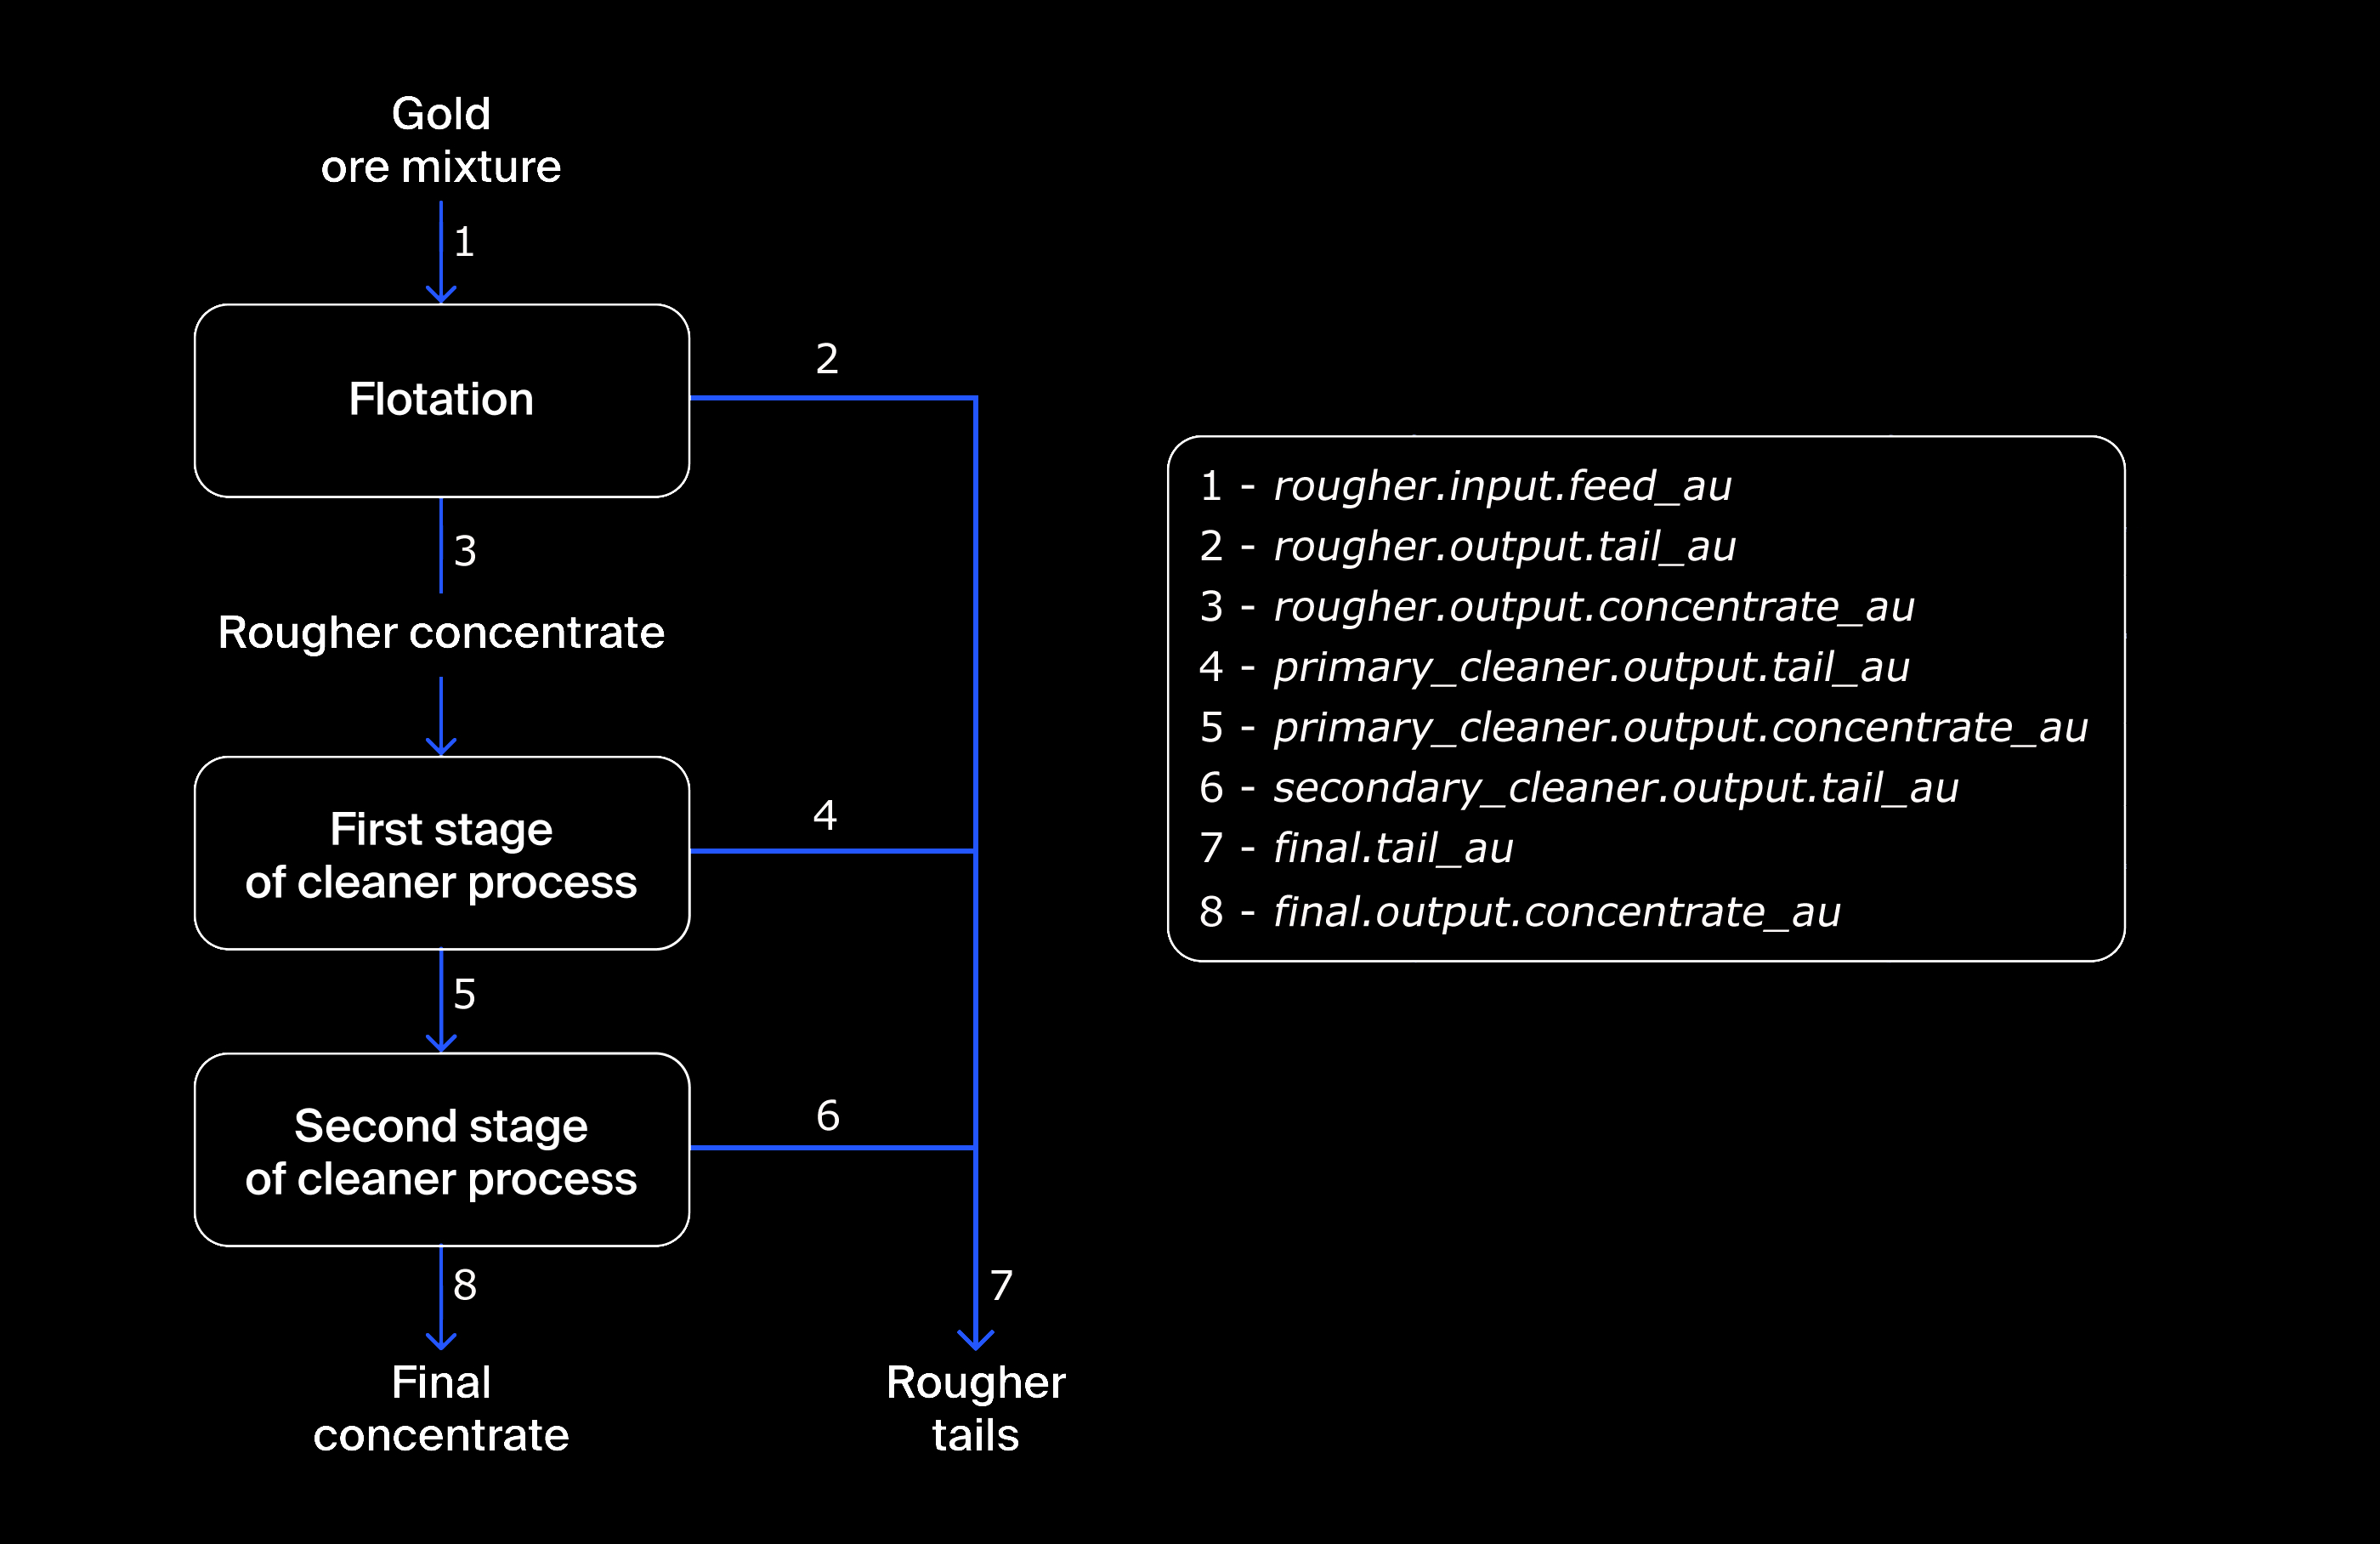

In [95]:
# Define the HTML tag to display the image
html_img_tag2 = f'<img src="data:image/jpeg;base64,{base64_string}" alt="recovery formula" style="width:700px;"/>'
display(HTML(html_img_tag2))

<div class="alert alert-info">
  Deb's comment 1:  I was just trying to imbed an image that explains where the feature column names fit in to the ore recovery process.  I did not get error on my end. But, I changed it, to try a different method, so that you can see the image, too.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Broken code
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed
  
</div>

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Flotation Stage:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

### Check the Flotation stage to see what the concentration of gold was, before and after this stage.

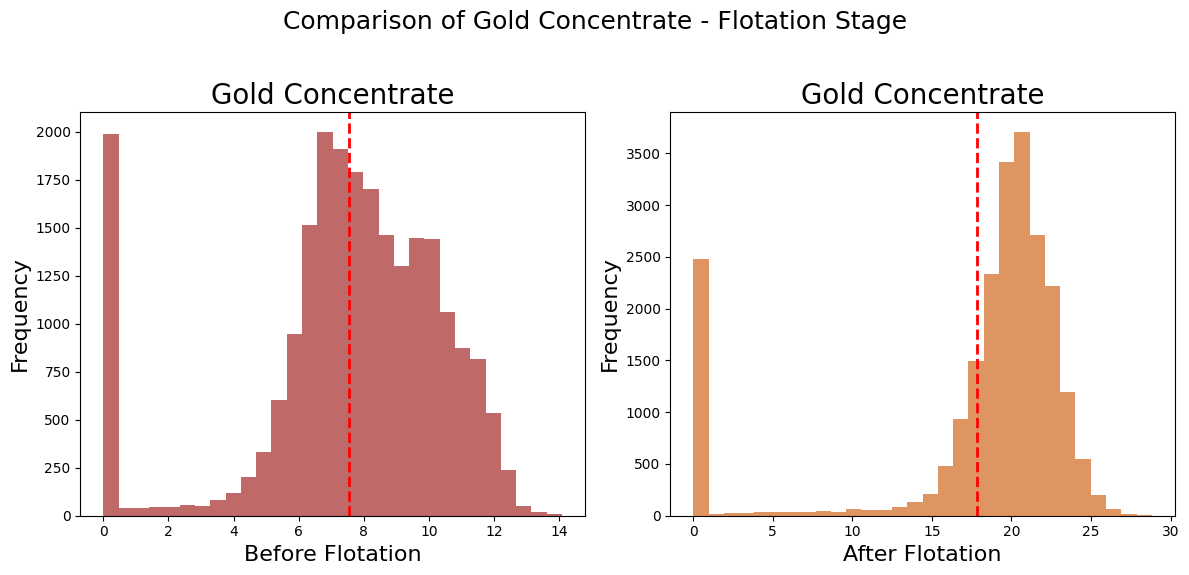

In [101]:
plt.figure(figsize=(12, 6))

# Histogram for Flotation Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.input.feed_au'], bins=30, color='brown', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('Before Flotation', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.input.feed_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'rougher.output.concentrate_au'
plt.subplot(1, 2, 2)

plt.hist(full['rougher.output.concentrate_au'], bins=30, color='#D2691E', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('After Flotation', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['rougher.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Gold Concentrate - Flotation Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [102]:
mean_flotation_concentrate_au = full['rougher.input.feed_au'].mean()
print(f"Mean of Flotation Output (Au): {mean_flotation_concentrate_au}")

mean_flotation_concentrate_au = full['rougher.output.concentrate_au'].mean()
print(f"Mean of Flotation Output (Au): {mean_flotation_concentrate_au}")

Mean of Flotation Output (Au): 7.5458610852387595
Mean of Flotation Output (Au): 17.8315088804844


#### This is a comparison of gold levels BEFORE going through the flotation stage (on the left), and gold levels AFTER the flotation stage (on the right.)  The red vertical line shows the mean of the data. You can see that gold levels were more than double after going through the flotation phase. 7.5 compared to 17.8. 

### Check the Flotation stage to see what the concentration of lead was, before and after this stage.

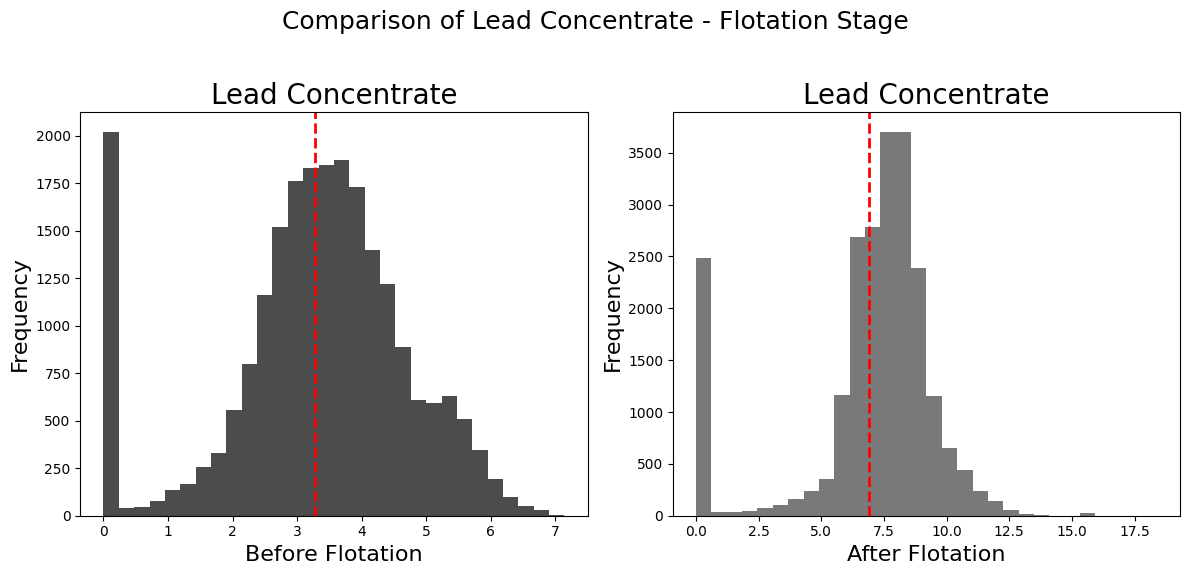

In [105]:
plt.figure(figsize=(12, 6))

# Histogram for Flotation Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.input.feed_pb'], bins=30, color='black', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('Before Flotation', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.input.feed_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'rougher.output.concentrate_pb'
plt.subplot(1, 2, 2)

plt.hist(full['rougher.output.concentrate_pb'], bins=30, color='#404040', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('After Flotation', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['rougher.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Lead Concentrate - Flotation Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [106]:
mean_flotation_concentrate_pb = full['rougher.input.feed_pb'].mean()
print(f"Mean of Flotation Output (Pb): {mean_flotation_concentrate_pb}")

mean_flotation_concentrate_pb = full['rougher.output.concentrate_pb'].mean()
print(f"Mean of Flotation Output (Pb): {mean_flotation_concentrate_pb}")

Mean of Flotation Output (Pb): 3.2829451022134086
Mean of Flotation Output (Pb): 6.886869464260839


#### This is a comparison of lead levels BEFORE going through the flotation stage (on the left), and lead levels AFTER the flotation stage (on the right.)  The red vertical line shows the mean of the data. You can see that lead levels were more than double after going through the flotation phase. 3.3 compared to 6.9. 

### Check the Flotation stage to see what the concentration of silver was, before and after this stage.

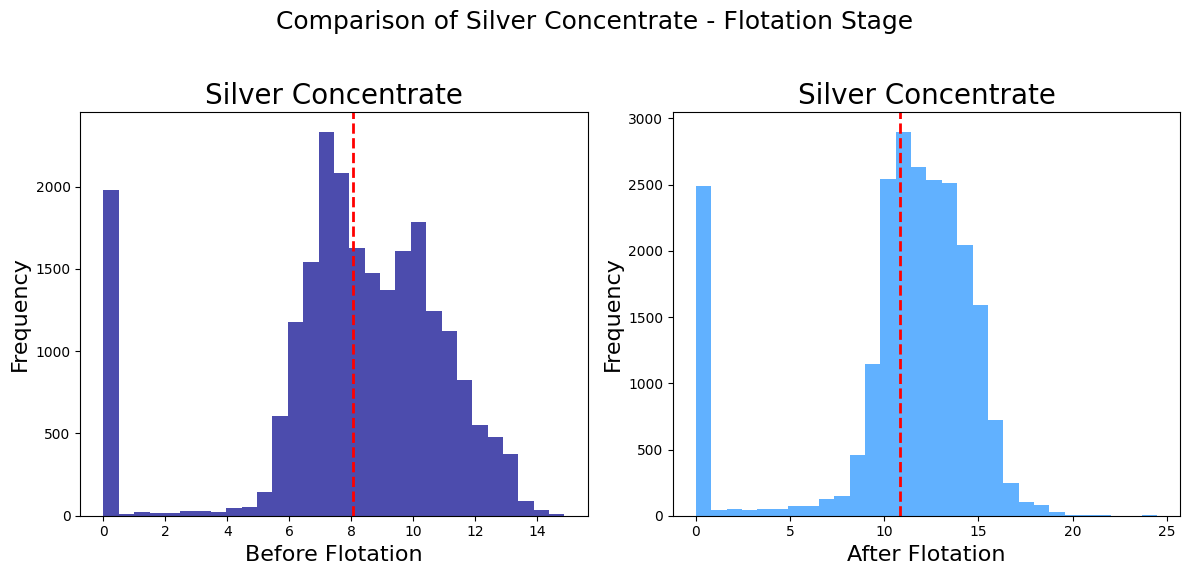

In [109]:
plt.figure(figsize=(12, 6))

# Histogram for Flotation Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.input.feed_ag'], bins=30, color='darkblue', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('Before Flotation', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.input.feed_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'rougher.output.concentrate_ag'
plt.subplot(1, 2, 2)

plt.hist(full['rougher.output.concentrate_ag'], bins=30, color='#1E90FF', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('After Flotation', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['rougher.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Silver Concentrate - Flotation Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [110]:
mean_flotation_concentrate_ag = full['rougher.input.feed_ag'].mean()
print(f"Mean of Flotation Output (Ag): {mean_flotation_concentrate_ag}")

mean_flotation_concentrate_ag = full['rougher.output.concentrate_ag'].mean()
print(f"Mean of Flotation Output (Ag): {mean_flotation_concentrate_ag}")

Mean of Flotation Output (Ag): 8.044237454701175
Mean of Flotation Output (Ag): 10.845609432117543


#### This is a comparison of silver levels BEFORE going through the flotation stage (on the left), and silver levels AFTER the flotation stage (on the right.)  The red vertical line shows the mean of the data. You can see the silver concentration was a little higher after going through the flotation phase. 8 compared to 10.8. 

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Primary Cleaning Stage:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

### Check the Primary Cleaning stage to see what the concentration of gold was, before and after this stage.

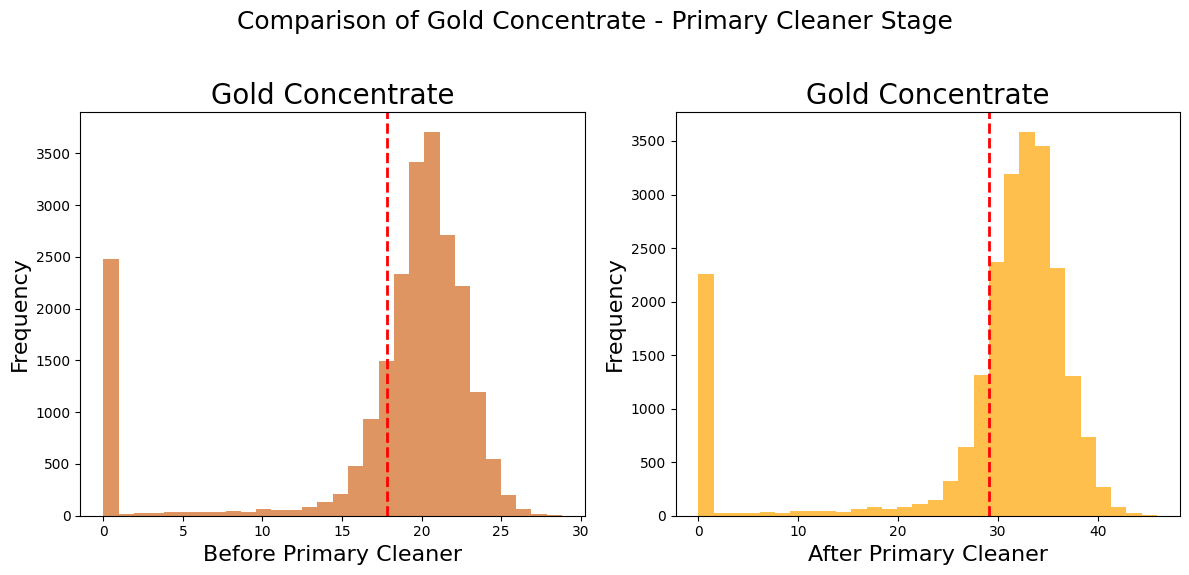

In [114]:
plt.figure(figsize=(12, 6))

# Histogram for Secondary Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.output.concentrate_au'], bins=30, color='#D2691E', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('Before Primary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'primary_cleaner.output.concentrate_au'
plt.subplot(1, 2, 2)

plt.hist(full['primary_cleaner.output.concentrate_au'], bins=30, color='orange', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('After Primary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['primary_cleaner.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Gold Concentrate - Primary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [115]:
mean_primary_concentrate_au = full['rougher.output.concentrate_au'].mean()
print(f"Mean of Primary Cleaner Output (Au): {mean_primary_concentrate_au}")

mean_primary_concentrate_au = full['primary_cleaner.output.concentrate_au'].mean()
print(f"Mean of Primary Cleaner Output (Au): {mean_primary_concentrate_au}")

Mean of Primary Cleaner Output (Au): 17.8315088804844
Mean of Primary Cleaner Output (Au): 29.119966533637303


#### This is a comparison of gold levels BEFORE going through the primary cleaning stage (on the left), and silver levels AFTER the primary cleaning stage (on the right.)  The red vertical line shows the mean of the data. You can see the gold concentration was a lot higher after going through the flotation phase. 17.8 compared to 29.1. 

### Check the Primary Cleaning stage to see what the concentration of lead was, before and after this stage.

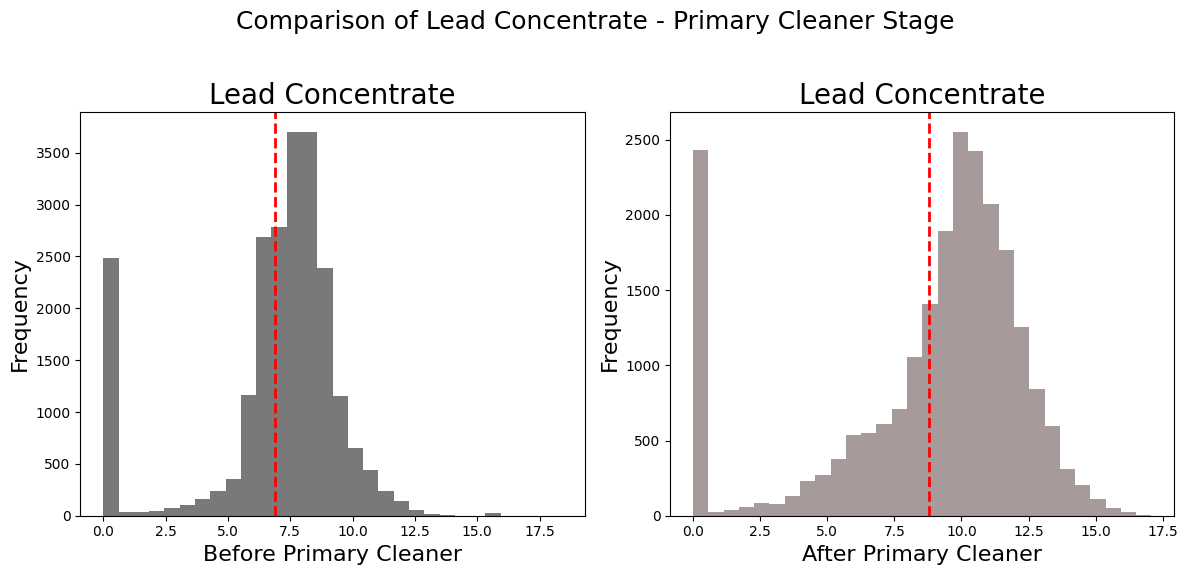

In [118]:
plt.figure(figsize=(12, 6))

# Histogram for Primary Cleaning Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.output.concentrate_pb'], bins=30, color='#404040', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('Before Primary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'primary_cleaner.output.concentrate_pb'
plt.subplot(1, 2, 2)

plt.hist(full['primary_cleaner.output.concentrate_pb'], bins=30, color='#807070', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('After Primary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['primary_cleaner.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Lead Concentrate - Primary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [119]:
mean_primary_concentrate_pb = full['rougher.output.concentrate_pb'].mean()
print(f"Mean of Primary Cleaner Output (Pb): {mean_primary_concentrate_pb}")

mean_primary_concentrate_pb = full['primary_cleaner.output.concentrate_pb'].mean()
print(f"Mean of Primary Cleaner Output (Pb): {mean_primary_concentrate_pb}")

Mean of Primary Cleaner Output (Pb): 6.886869464260839
Mean of Primary Cleaner Output (Pb): 8.809217456953881


#### This is a comparison of lead levels BEFORE going through the primary cleaning stage (on the left), and lead levels AFTER the primary cleaning stage (on the right.)  The red vertical line shows the mean of the data. The lead level was not much higher after going through the primary cleaning phase. 6.8 compared to 8.8. 

### Check the Primary Cleaning stage to see what the concentration of silver was, before and after this stage.

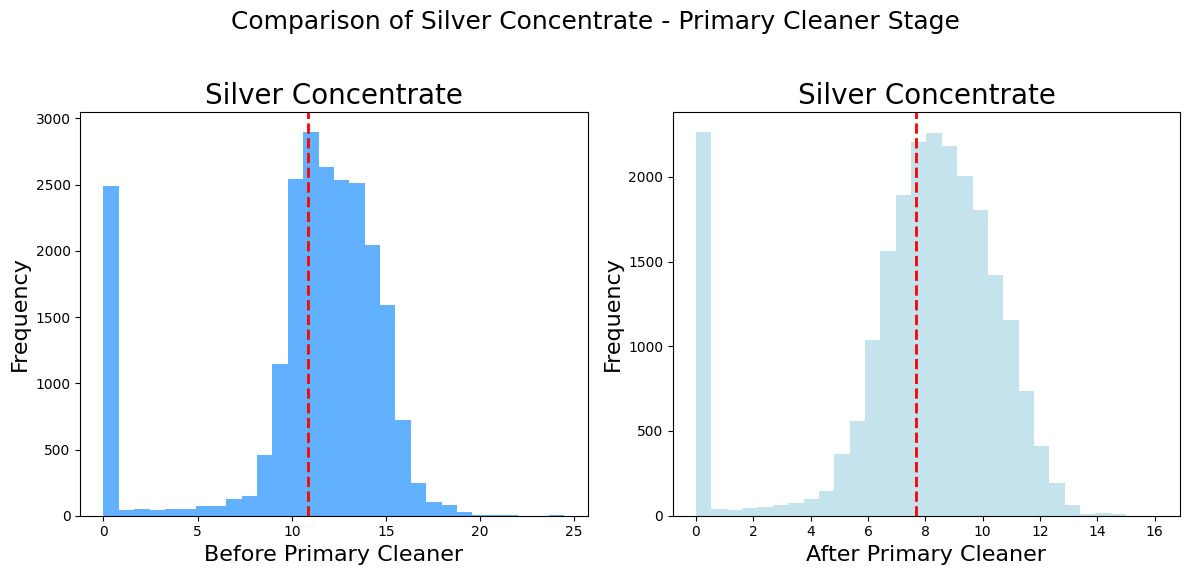

In [122]:
plt.figure(figsize=(12, 6))

# Histogram for Primary Cleaning Stage
plt.subplot(1, 2, 1)

plt.hist(full['rougher.output.concentrate_ag'], bins=30, color='#1E90FF', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('Before Primary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['rougher.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for 'primary_cleaner.output.concentrate_ag'
plt.subplot(1, 2, 2)

plt.hist(full['primary_cleaner.output.concentrate_ag'], bins=30, color='#ADD8E6', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('After Primary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['primary_cleaner.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Silver Concentrate - Primary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [123]:
mean_primary_concentrate_ag = full['rougher.output.concentrate_ag'].mean()
print(f"Mean of Primary Cleaner Output (Ag): {mean_primary_concentrate_ag}")

mean_primary_concentrate_ag = full['primary_cleaner.output.concentrate_ag'].mean()
print(f"Mean of Primary Cleaner Output (Ag): {mean_primary_concentrate_ag}")

Mean of Primary Cleaner Output (Ag): 10.845609432117543
Mean of Primary Cleaner Output (Ag): 7.666971769305162


#### This is a comparison of silver levels BEFORE going through the primary cleaning stage (on the left), and silver levels AFTER the primary cleaning stage (on the right.)  The red vertical line shows the mean of the data. The silver level was lower after going through the primary cleaning phase. 10.8 compared to 7.6. 

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Secondary Cleaning Stage:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

### Check the Seconary Cleaning stage to see what the concentration of gold was, before and after this stage.

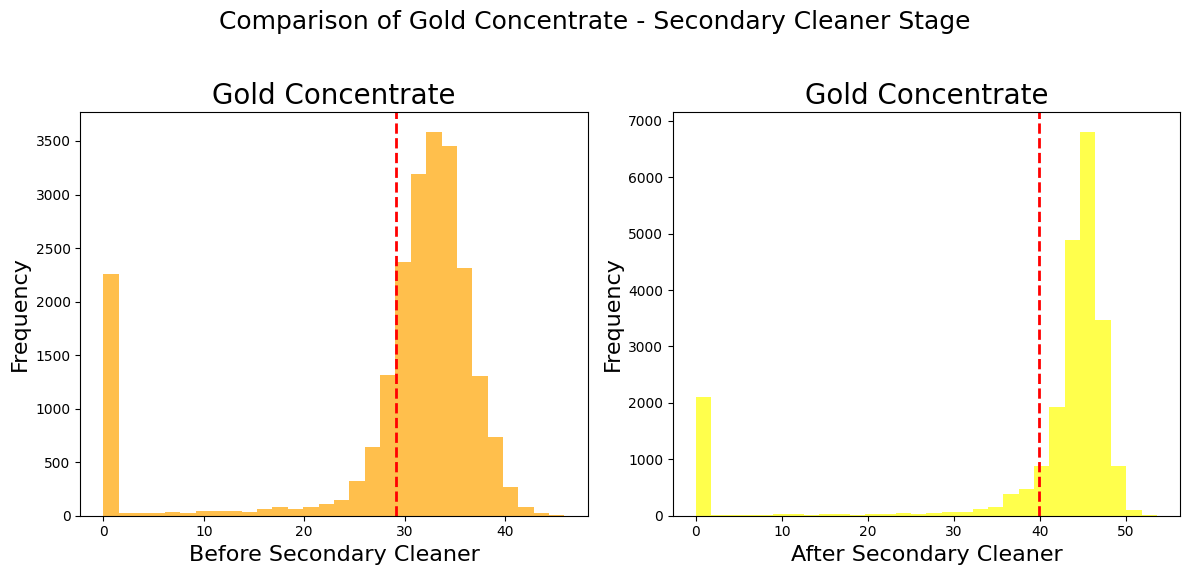

In [127]:
plt.figure(figsize=(12, 6))

# Histogram for Secondary Stage
plt.subplot(1, 2, 1)

plt.hist(full['primary_cleaner.output.concentrate_au'], bins=30, color='orange', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('Before Secondary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['primary_cleaner.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.concentrate_au'], bins=30, color='yellow', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('After Secondary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Gold Concentrate - Secondary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [128]:
mean_secondary_concentrate_au = full['primary_cleaner.output.concentrate_au'].mean()
print(f"Mean of Seconary Cleaner Output (Au): {mean_secondary_concentrate_au}")

mean_secondary_concentrate_au = full['final.output.concentrate_au'].mean()
print(f"Mean of Secondary Cleaner Output (Au): {mean_secondary_concentrate_au}")

Mean of Seconary Cleaner Output (Au): 29.119966533637303
Mean of Secondary Cleaner Output (Au): 39.89171782316979


#### This is a comparison of gold levels BEFORE going through the secondary cleaning stage (on the left), and gold levels AFTER the secondary cleaning stage (on the right.)  The red vertical line shows the mean of the data. The gold level was higher after going through the secondary cleaning phase. 29.1 compared to 39.9. 

### Check the Seconary Cleaning stage to see what the concentration of lead was, before and after this stage.

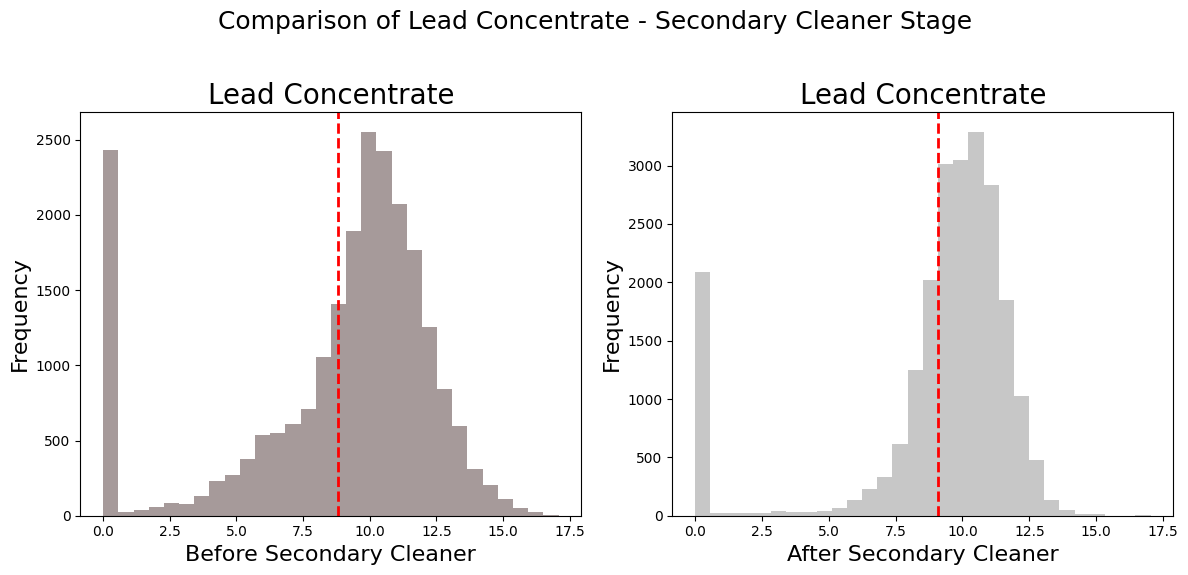

In [131]:
plt.figure(figsize=(12, 6))

# Histogram for Secondary Stage
plt.subplot(1, 2, 1)

plt.hist(full['primary_cleaner.output.concentrate_pb'], bins=30, color='#807070', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('Before Secondary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['primary_cleaner.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.concentrate_pb'], bins=30, color='#B0B0B0', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('After Secondary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Lead Concentrate - Secondary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [132]:
mean_secondary_concentrate_pb = full['primary_cleaner.output.concentrate_pb'].mean()
print(f"Mean of Secondary Cleaner Output (Pb): {mean_secondary_concentrate_pb}")

mean_secondary_concentrate_pb = full['final.output.concentrate_pb'].mean()
print(f"Mean of Secondary Cleaner Output (Pb): {mean_secondary_concentrate_pb}")


Mean of Secondary Cleaner Output (Pb): 8.809217456953881
Mean of Secondary Cleaner Output (Pb): 9.071366208756318


#### This is a comparison of lead levels BEFORE going through the secondary cleaning stage (on the left), and lead levels AFTER the secondary cleaning stage (on the right.)  The red vertical line shows the mean of the data. The lead level was almost the same after going through the secondary cleaning phase. 8.8 compared to 9. 

### Check the Seconary Cleaning stage to see what the concentration of silver was, before and after this stage.

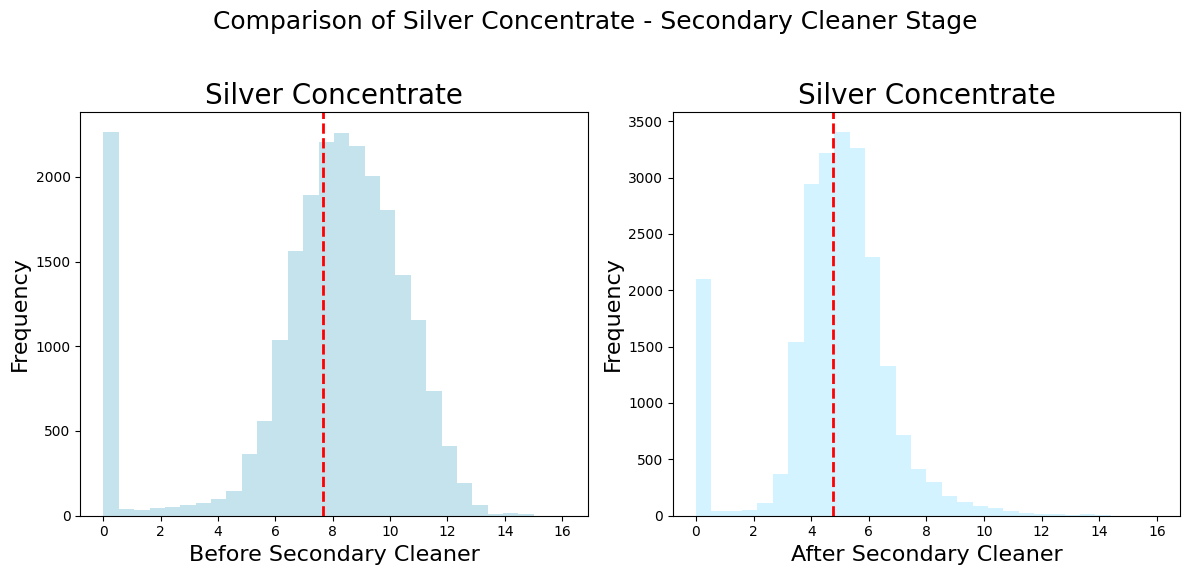

In [135]:
plt.figure(figsize=(12, 6))

# Histogram for Secondary Stage
plt.subplot(1, 2, 1)

plt.hist(full['primary_cleaner.output.concentrate_ag'], bins=30, color='#ADD8E6', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('Before Secondary Cleaner', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['primary_cleaner.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.concentrate_ag'], bins=30, color='#BFEFFF', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('After Secondary Cleaner', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Silver Concentrate - Secondary Cleaner Stage', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [136]:
mean_secondary_concentrate_ag = full['primary_cleaner.output.concentrate_ag'].mean()
print(f"Mean of Secondary Cleaner Output (Ag): {mean_secondary_concentrate_ag}")

mean_secondary_concentrate_ag = full['final.output.concentrate_ag'].mean()
print(f"Mean of Secondary Cleaner Output (Ag): {mean_secondary_concentrate_ag}")

Mean of Secondary Cleaner Output (Ag): 7.666971769305162
Mean of Secondary Cleaner Output (Ag): 4.768012876038152


#### This is a comparison of silver levels BEFORE going through the secondary cleaning stage (on the left), and silver levels AFTER the secondary cleaning stage (on the right.)  The red vertical line shows the mean of the data. The silver level was lower after going through the secondary cleaning phase. 7.6 compared to 4.7. 

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Final Concentrate vs Rougher Tails:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

### Check the final concentrate of gold, vs the final tails of gold.

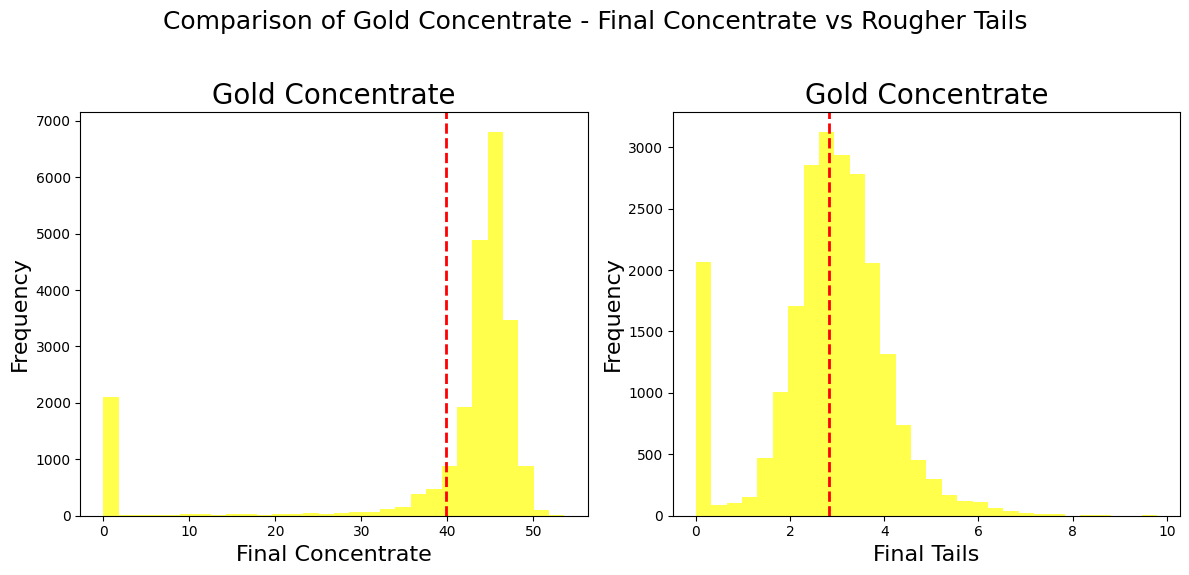

In [140]:
plt.figure(figsize=(12, 6))

# Histogram for Final Concentrate vs Rougher Tails
plt.subplot(1, 2, 1)

plt.hist(full['final.output.concentrate_au'], bins=30, color='yellow', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('Final Concentrate', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['final.output.concentrate_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.tail_au'], bins=30, color='yellow', alpha=0.7)
plt.title('Gold Concentrate', fontsize=20)  
plt.xlabel('Final Tails', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.tail_au'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Gold Concentrate - Final Concentrate vs Rougher Tails', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



In [141]:
mean_final_concentrate_au = full['final.output.concentrate_au'].mean()
print(f"Mean of Final Concentrate Output (Au): {mean_final_concentrate_au}")

mean_secondary_concentrate_au = full['final.output.tail_au'].mean()
print(f"Mean of Final Tails Output (Au): {mean_secondary_concentrate_au}")

Mean of Final Concentrate Output (Au): 39.89171782316979
Mean of Final Tails Output (Au): 2.819884960751951


#### This is a comparison of gold levels of the final concentrate (on the left), and gold levels of the final tails (on the right.)  The red vertical line shows the mean of the data. The gold level was way higher in the final concentrate output, as compared to the final tails. 39.8 compared to 2.8.  About 5% of the gold was lost to the tails. 

### Check the final concentrate, of lead, vs the final tails of lead.

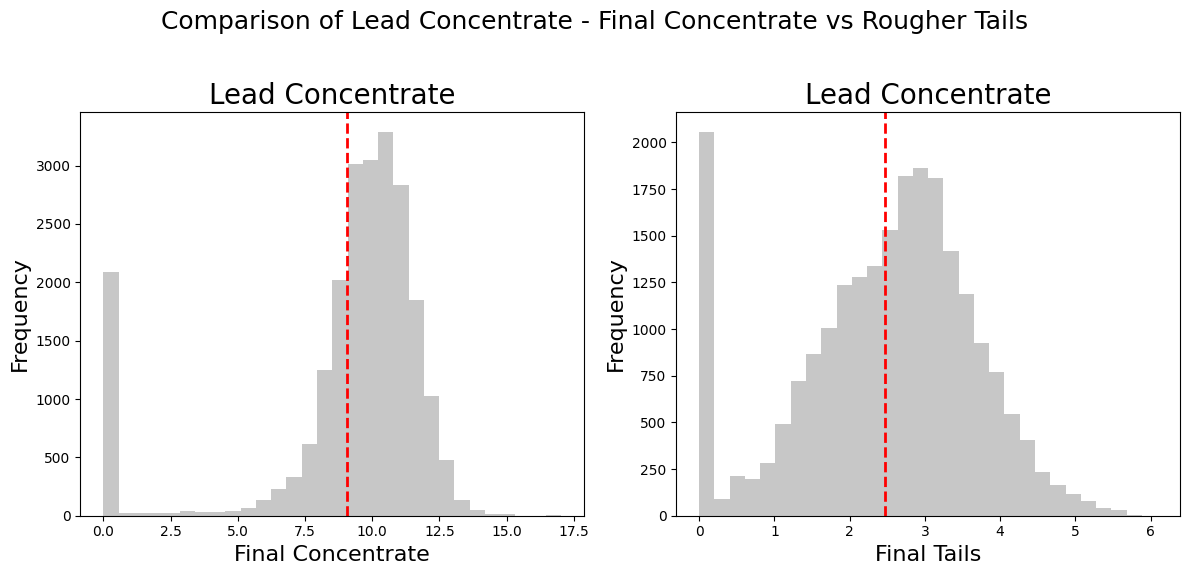

In [144]:
plt.figure(figsize=(12, 6))

# Histogram for Final Concentrate vs Rougher Tails
plt.subplot(1, 2, 1)

plt.hist(full['final.output.concentrate_pb'], bins=30, color='#B0B0B0', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('Final Concentrate', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['final.output.concentrate_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.tail_pb'], bins=30, color='#B0B0B0', alpha=0.7)
plt.title('Lead Concentrate', fontsize=20)  
plt.xlabel('Final Tails', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.tail_pb'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Lead Concentrate - Final Concentrate vs Rougher Tails', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



In [145]:
mean_final_concentrate_pb = full['final.output.concentrate_pb'].mean()
print(f"Mean of Final Concentrate Output (Pb): {mean_final_concentrate_pb}")

mean_secondary_concentrate_pb = full['final.output.tail_pb'].mean()
print(f"Mean of Final Tails Output (PB): {mean_secondary_concentrate_pb}")

Mean of Final Concentrate Output (Pb): 9.071366208756318
Mean of Final Tails Output (PB): 2.471148681591221


#### This is a comparison of lead levels of the final concentrate (on the left), and lead levels of the final tails (on the right.)  The red vertical line shows the mean of the data. The lead level was higher in the final output as compared to final tails. 9 compared to 2.5. 

### Check the final concentration of silver vs the final tails of silver.

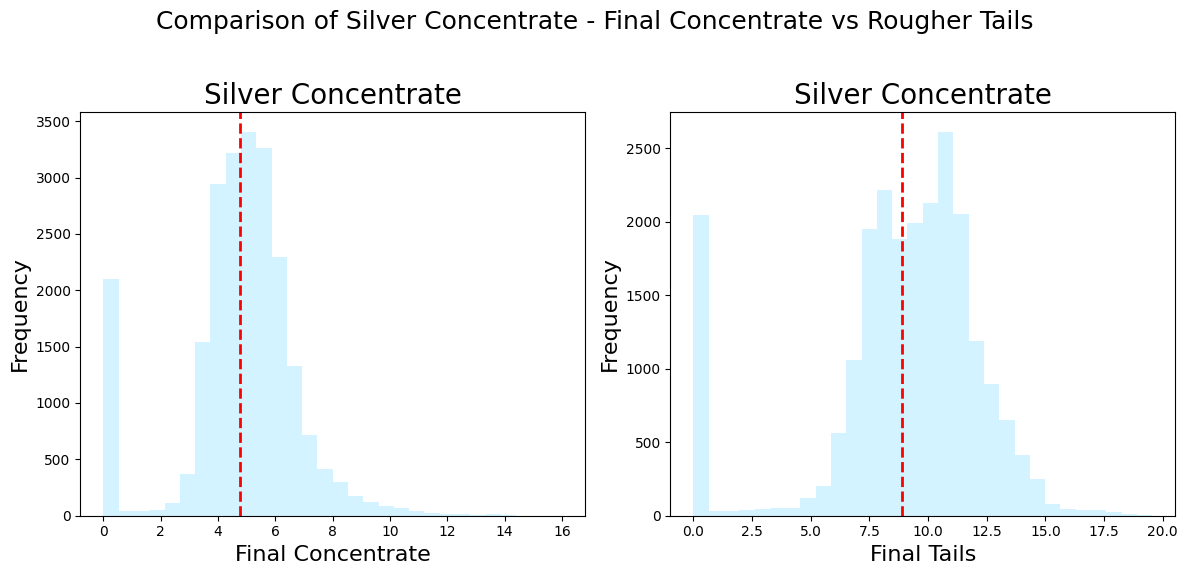

In [148]:
plt.figure(figsize=(12, 6))

# Histogram for Final Concentrate vs Rougher Tails
plt.subplot(1, 2, 1)

plt.hist(full['final.output.concentrate_ag'], bins=30, color='#BFEFFF', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('Final Concentrate', fontsize=16)             
plt.ylabel('Frequency', fontsize=16)          

plt.axvline(full['final.output.concentrate_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Histogram for final concentrate
plt.subplot(1, 2, 2)

plt.hist(full['final.output.tail_ag'], bins=30, color='#BFEFFF', alpha=0.7)
plt.title('Silver Concentrate', fontsize=20)  
plt.xlabel('Final Tails', fontsize=16)              
plt.ylabel('Frequency', fontsize=16)                   
plt.axvline(full['final.output.tail_ag'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add mean line

# Set a larger super-title for all plots
plt.suptitle('Comparison of Silver Concentrate - Final Concentrate vs Rougher Tails', fontsize=18)

# Adjust layout to fit elements
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



In [149]:
mean_final_concentrate_ag = full['final.output.concentrate_ag'].mean()
print(f"Mean of Final Concentrate Output (Ag): {mean_final_concentrate_ag}")

mean_secondary_concentrate_ag = full['final.output.tail_ag'].mean()
print(f"Mean of Final Tails Output (Ag): {mean_secondary_concentrate_ag}")

Mean of Final Concentrate Output (Ag): 4.768012876038152
Mean of Final Tails Output (Ag): 8.900622021300897


This is a comparison of silver levels of the final concentrate (on the left), and silver levels of the final tails (on the right.)  The red vertical line shows the mean of the data. The silver level was lower in the final output as compared to final tails. 4.7 compared to 8.9. 

There are a lot of near-zero values, in all of the graphs.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job! But you can avoid so much graphs plotting histograms for all stages for one metal on the same graph with different colors. It helps to compare all the stages at once and reduce the number of graphs to only three graphs (one for each metal).
  
</div>

<div class="alert alert-info">
  Deb's comment 1:  Good idea. I have added that below.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

I meant histograms and not barblots. Barplots show only mean values. But histograms show the distributions in total. So, histograms show much more information than barplots.
  
</div>

<div class="alert alert-info">
  Deb's comment 2:  I have changed the 3 graphs below to be histograms. They are no longer taking the mean. Thank you for explaining that.
</div>

- Gold

In [157]:
flotation_avg_au = full['rougher.output.concentrate_au'].mean()
primary_avg_au = full['primary_cleaner.output.concentrate_au'].mean()
secondary_avg_au = full['final.output.concentrate_au'].mean()

In [158]:
stages = ['Flotation', 'Primary', 'Secondary']
averages_au = [flotation_avg_au, primary_avg_au, secondary_avg_au]

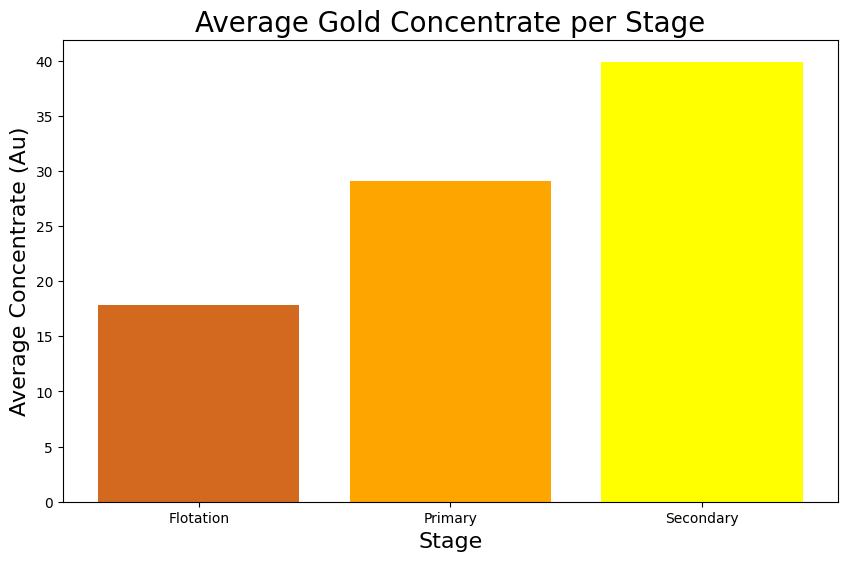

In [159]:
plt.figure(figsize=(10, 6))
plt.bar(stages, averages_au, color=['#D2691E', 'orange', 'yellow'])

# Adding title and labels with larger fontsizes
plt.title('Average Gold Concentrate per Stage', fontsize=20)
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Average Concentrate (Au)', fontsize=16)


plt.show()

- Lead

In [161]:
flotation_avg_pb = full['rougher.output.concentrate_pb'].mean()
primary_avg_pb = full['primary_cleaner.output.concentrate_pb'].mean()
secondary_avg_pb = full['final.output.concentrate_pb'].mean()

In [162]:
averages_pb = [flotation_avg_pb, primary_avg_pb, secondary_avg_pb]

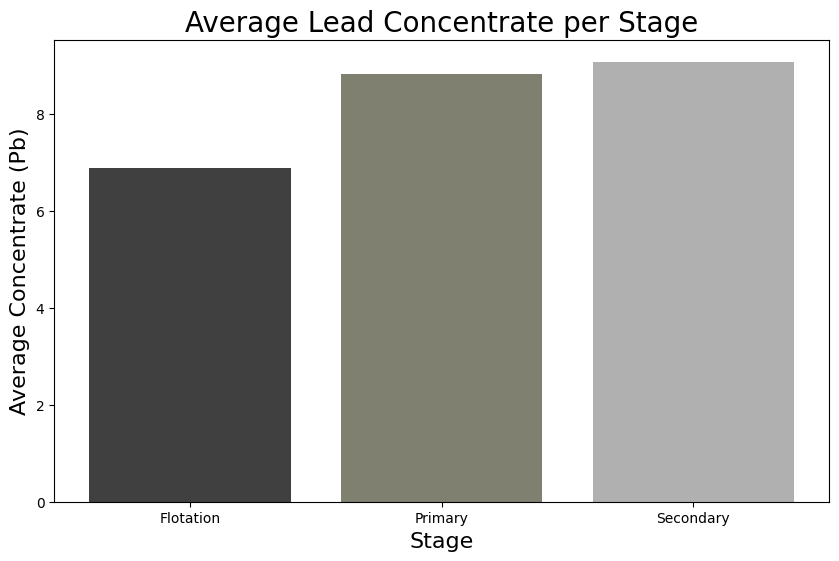

In [163]:
plt.figure(figsize=(10, 6))
plt.bar(stages, averages_pb, color=['#404040', '#808070', '#B0B0B0'])

# Adding title and labels with larger fontsizes
plt.title('Average Lead Concentrate per Stage', fontsize=20)
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Average Concentrate (Pb)', fontsize=16)


plt.show()

- Silver

In [165]:
flotation_avg_ag = full['rougher.output.concentrate_ag'].mean()
primary_avg_ag = full['primary_cleaner.output.concentrate_ag'].mean()
secondary_avg_ag = full['final.output.concentrate_ag'].mean()

In [166]:
averages_ag = [flotation_avg_ag, primary_avg_ag, secondary_avg_ag]

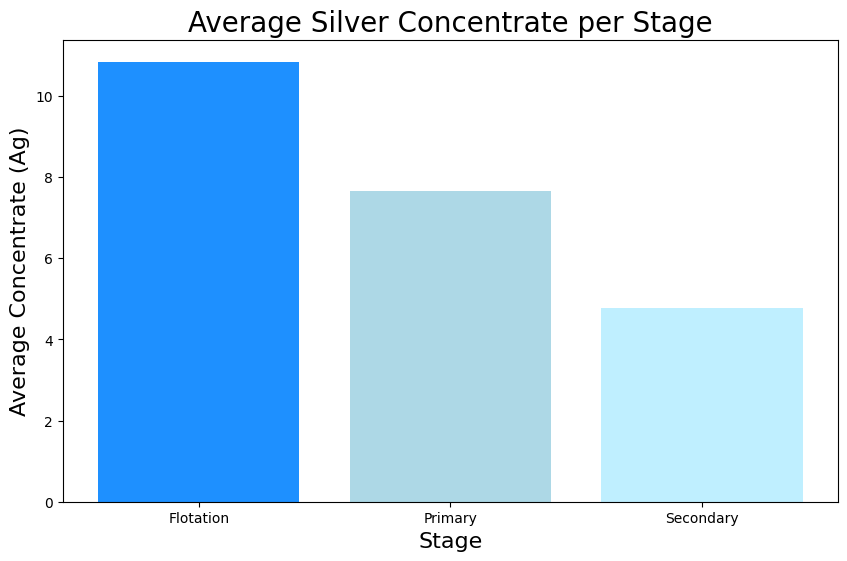

In [167]:
plt.figure(figsize=(10, 6))
plt.bar(stages, averages_ag, color=['#1E90FF', '#ADD8E6', '#BFEFFF'])

# Adding title and labels with larger fontsizes
plt.title('Average Silver Concentrate per Stage', fontsize=20)
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Average Concentrate (Ag)', fontsize=16)


plt.show()

Gold and Lead levels went up, after each stage of refinery. Silver went down after each stage. After the Secondary Clearning stage, Silver levels are down 1/2 of what they wereafter the Flotation stage.

### <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Compare the particle size distribution, of the feed, in the training set and in the test set:</div>

In [170]:
# Calculate 1% and 99% quantiles for both train and test
train_1_quantile = train['rougher.input.feed_size'].quantile(0.01)
train_99_quantile = train['rougher.input.feed_size'].quantile(0.99)
test_1_quantile = test['rougher.input.feed_size'].quantile(0.01)
test_99_quantile = test['rougher.input.feed_size'].quantile(0.99)

In [171]:
# Filter the data based on quantiles
train_filtered = train['rougher.input.feed_size'][train['rougher.input.feed_size'].between(train_1_quantile, train_99_quantile)]
test_filtered = test['rougher.input.feed_size'][test['rougher.input.feed_size'].between(test_1_quantile, test_99_quantile)]

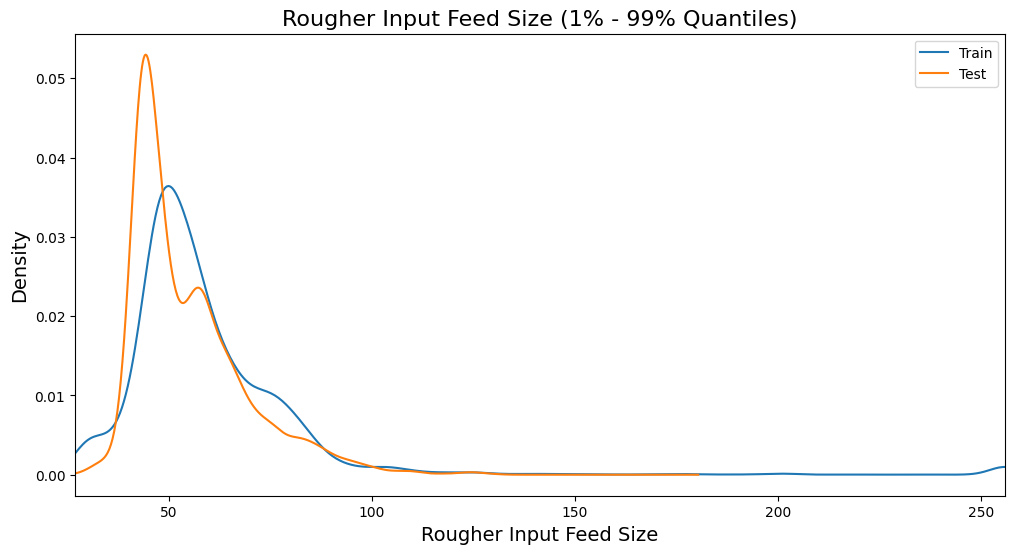

In [172]:
plt.figure(figsize=(12, 6))

# Plot the filtered KDE for train and test
train_filtered.plot.kde(label='Train')
test_filtered.plot.kde(label='Test')

# Recalculate min and max for centered x-axis limits 
min_x = min(train_filtered.min(), test_filtered.min())
max_x = max(train_filtered.max(), test_filtered.max())

# Set x-axis limits to centered range
plt.xlim(min_x, max_x)

# Add legend and labels with increased fontsize
plt.legend()
plt.xlabel('Rougher Input Feed Size', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Rougher Input Feed Size (1% - 99% Quantiles)', fontsize=16)

plt.show()

The distributions of feed size for the test set, vs the train set, are very close. The test set has slightly higher max, by .02 density. 

<div class="alert alert-info">
  Deb's comment 1:  I have added a comment above.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. But what could you say looking on this graph? Are these distributions similar enough or not?
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You missed a task: Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.
  
</div>

<div class="alert alert-info">
  Deb's comment 1:  Thank you. I am adding that section below.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

The graphs are correct. Thank you!
  
</div>

### <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, final concentrate:</div>

### Add 3 new columns to the full dataframe

In [181]:
full['raw_feed_total'] = (
    full['rougher.input.feed_sol'] + 
    full['rougher.input.feed_ag'] + 
    full['rougher.input.feed_au'] + 
    full['rougher.input.feed_pb']
)

In [182]:
full['rougher_concentrate_total'] = (
    full['rougher.output.concentrate_sol'] + 
    full['rougher.output.concentrate_ag'] + 
    full['rougher.output.concentrate_au'] + 
    full['rougher.output.concentrate_pb']
)

In [183]:
full['final_concentrate_total'] = (
    full['final.output.concentrate_sol'] + 
    full['final.output.concentrate_ag'] + 
    full['final.output.concentrate_au'] + 
    full['final.output.concentrate_pb']
)   

In [184]:
concentration_columns = ['raw_feed_total', 'rougher_concentrate_total', 'final_concentrate_total']

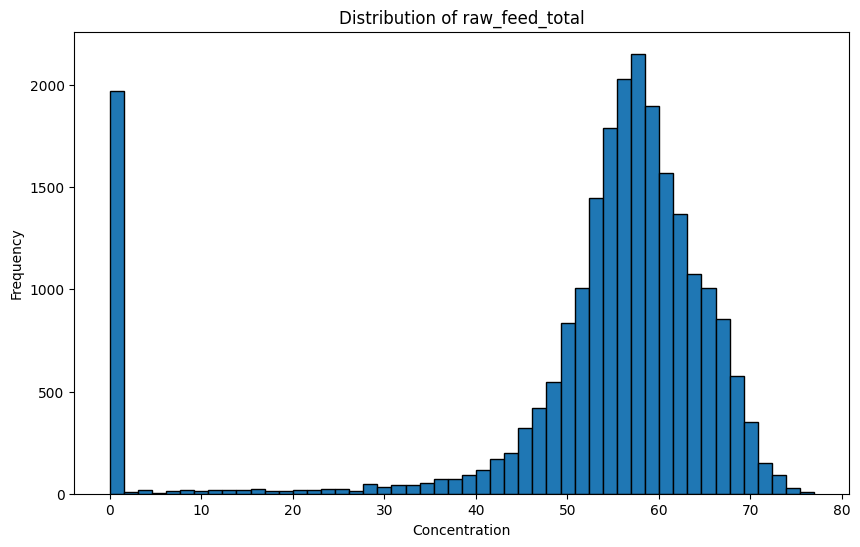

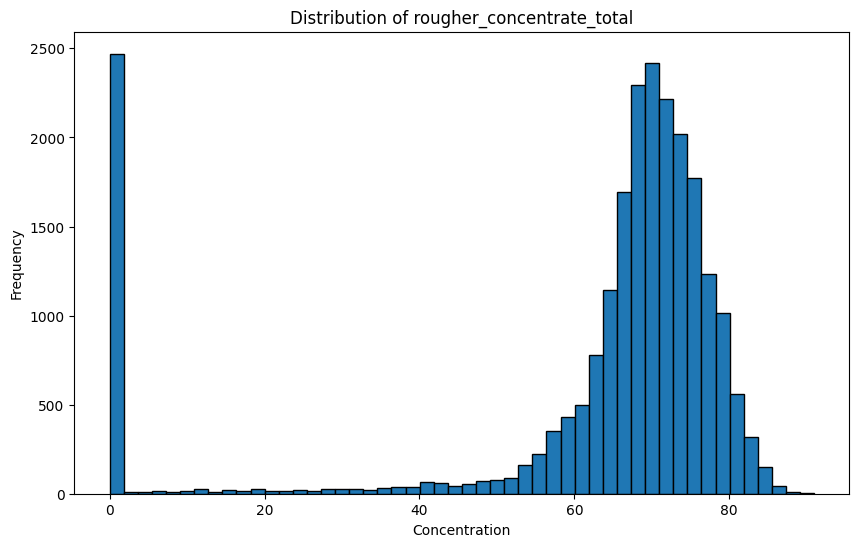

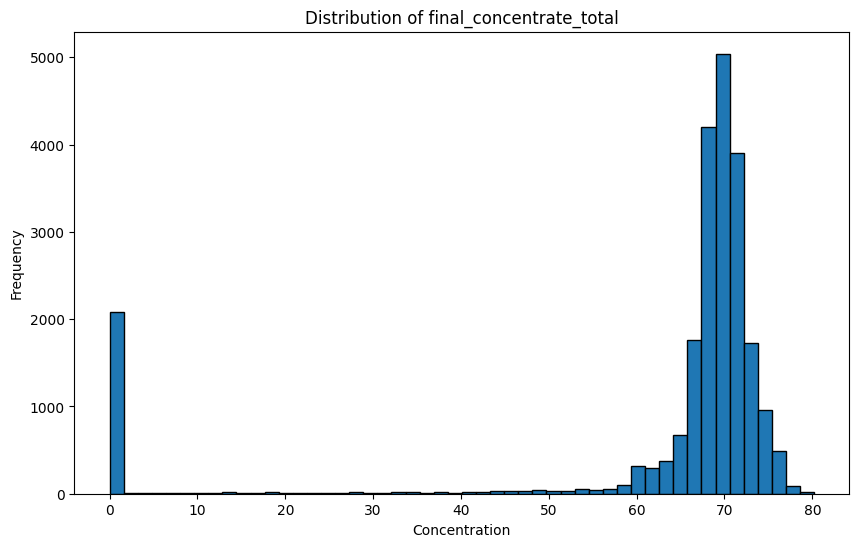

In [185]:
# Visualize the data
for col in concentration_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(full[col].dropna(), bins=50, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    
    plt.show()

### Raw Feed Total (raw_feed_total):

- Distribution Shape: Left-skewed. Most of the values lie towards the higher side, with fewer lower values.
- Mean: Approximately 58.
    
### Rougher Concentrate Total (rougher_concentrate_total):

- Distribution Shape: Left-skewed. It shows a higher concentration of values on the high end.
- Mean: Approximately 70.

### Final Concentrate Total (final_concentrate_total):

- Distribution Shape: Left-skewed but skinnier compared to rougher_concentrate_total, indicating a reduction in the spread of the data.
- Mean: Approximately 70. 

There are a lot of zero values, or near-zero values.

### Filter out columns from train, that are not in test.

In [189]:
print(train.shape)
print(test.shape)

(16860, 86)
(5856, 54)


In [190]:
missing_cols = [col for col in train if col not in test]
missing_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleane

In [191]:
#Dropping missing columns 
train.drop(columns=missing_cols, inplace=True)

In [192]:
train.shape, test.shape

((16860, 54), (5856, 54))

train and test dataframes now have an equal amount of columns.

<div class="alert alert-info">
  Deb's comment 1:  Added the code for deleting sum of rows that are less than 0.01, so there is not zeros.
</div>

### Filter out rows, from test, and train, that are smaller than 0.01.

In [196]:
print("Before Filtering - Train Shape:", train.shape)
print("Before Filtering - Test Shape:", test.shape)

Before Filtering - Train Shape: (16860, 54)
Before Filtering - Test Shape: (5856, 54)


In [197]:
#threshold = 0.01

# Keep rows where all values are greater than or equal to the threshold
#filtered_train = train[(train > threshold).all(axis=1)]

#filtered_test = test[(test > threshold).all(axis=1)]

threshold = 0.01

# Filter for train DataFrame
filtered_train = train[train[targets] > threshold]

# Filter for test DataFrame
filtered_test = test[test[targets] > threshold]

In [198]:
print("After Filtering - Train Shape:", filtered_train.shape)
print("After Filtering - Test Shape:", filtered_test.shape)

After Filtering - Train Shape: (16860, 54)
After Filtering - Test Shape: (5856, 54)


Shape of the dataframe did not change. There are no values less than 0.01.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Why did you sum up all the columns? You need to filter only rows with near zero total concentration at any mentioned above stage. In other words you need to remove a row if 'raw_feed_total' is almost zero or 'rougher_concentrate_total' is almost zero or 'final_concentrate_total' is alsmost zero. And that's it
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Not fixed
  
</div>

<div class="alert alert-info">
  Deb's comment 2:  Thank you. I have changed it so that it no longer sums up the whole column. Now it just looks at each row. But, now there is no change in the shape of the data, so there were no values smaller than 0.01.
</div>

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Locate the targets and features:</div>

### We need to predict the final.output.recovery, and the rougher.output.recovery. So, I will make those the targets.

- Targets

In [206]:
target_train = train[targets].reset_index(drop=True)
target_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [207]:
target_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


### The features are not available in train dataframe. I have to get those features from the full dataframe.

In [209]:
target_test = full[targets].loc[test.index].reset_index(drop=True)
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5851,95.172585,68.919891
5852,94.575036,68.440582
5853,93.018138,67.092759
5854,92.599042,68.061186


In [210]:
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5851,95.172585,68.919891
5852,94.575036,68.440582
5853,93.018138,67.092759
5854,92.599042,68.061186


Now there is target_train and target_test

- Features

In [213]:
#extract column names
features = test.columns.values

In [214]:
print(features.shape)
print(features)

(54,)
['primary_cleaner.input.sulfate' 'primary_cleaner.input.depressant'
 'primary_cleaner.input.feed_size' 'primary_cleaner.input.xanthate'
 'primary_cleaner.state.floatbank8_a_air'
 'primary_cleaner.state.floatbank8_a_level'
 'primary_cleaner.state.floatbank8_b_air'
 'primary_cleaner.state.floatbank8_b_level'
 'primary_cleaner.state.floatbank8_c_air'
 'primary_cleaner.state.floatbank8_c_level'
 'primary_cleaner.state.floatbank8_d_air'
 'primary_cleaner.state.floatbank8_d_level' 'rougher.input.feed_ag'
 'rougher.input.feed_pb' 'rougher.input.feed_rate'
 'rougher.input.feed_size' 'rougher.input.feed_sol'
 'rougher.input.feed_au' 'rougher.input.floatbank10_sulfate'
 'rougher.input.floatbank10_xanthate' 'rougher.input.floatbank11_sulfate'
 'rougher.input.floatbank11_xanthate' 'rougher.state.floatbank10_a_air'
 'rougher.state.floatbank10_a_level' 'rougher.state.floatbank10_b_air'
 'rougher.state.floatbank10_b_level' 'rougher.state.floatbank10_c_air'
 'rougher.state.floatbank10_c_level' '

<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Remove 'rougher.output.recovery' and 'final.output.recovery' from features list:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

In [216]:
features = features[:-2]

In [217]:
print(features.shape)
print(features)

(52,)
['primary_cleaner.input.sulfate' 'primary_cleaner.input.depressant'
 'primary_cleaner.input.feed_size' 'primary_cleaner.input.xanthate'
 'primary_cleaner.state.floatbank8_a_air'
 'primary_cleaner.state.floatbank8_a_level'
 'primary_cleaner.state.floatbank8_b_air'
 'primary_cleaner.state.floatbank8_b_level'
 'primary_cleaner.state.floatbank8_c_air'
 'primary_cleaner.state.floatbank8_c_level'
 'primary_cleaner.state.floatbank8_d_air'
 'primary_cleaner.state.floatbank8_d_level' 'rougher.input.feed_ag'
 'rougher.input.feed_pb' 'rougher.input.feed_rate'
 'rougher.input.feed_size' 'rougher.input.feed_sol'
 'rougher.input.feed_au' 'rougher.input.floatbank10_sulfate'
 'rougher.input.floatbank10_xanthate' 'rougher.input.floatbank11_sulfate'
 'rougher.input.floatbank11_xanthate' 'rougher.state.floatbank10_a_air'
 'rougher.state.floatbank10_a_level' 'rougher.state.floatbank10_b_air'
 'rougher.state.floatbank10_b_level' 'rougher.state.floatbank10_c_air'
 'rougher.state.floatbank10_c_level' '

<div class="alert alert-info">
  Deb's comment 2: I have added this cell above. 
</div>

In [219]:
#Selects columns from the train dataframe, corresponding to the features extracted from test.
features_train = train[features].reset_index(drop=True)

In [220]:
features_train.shape

(16860, 52)

In [221]:
features_test = test[features].reset_index(drop=True)

In [222]:
features_test.shape

(5856, 52)

And now there is features_train and features_test

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Everything is correct
  
</div>

<div class="alert alert-info">
  Deb's comment 2: In attempt to fix the error where the model is "too good", I am removing 'rougher.output.recovery'
and  'final.output.recovery' from features. I added this cell (below)
</div>

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Build the Model:</div>

### sMAPE Formula Visuals

In [228]:
#I copied the above printout, and pasted it in to the double quotes below.
base64_string = """/9j/4AAQSkZJRgABAgEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAD/BXgDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD/AD/6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPVfi/8Jdb+DfiPSvDWvahpupXWreFNB8Vwz6Wbg28drrkMrrav9phhk861nt7iB2CbJVRJl2iTy0/WPGLwizzwY4kynhnPswy3MsXm3CeQcW0cRlbxDw9PC57RqyjhZ/WaNCo62Fr4fEUZyUFCrGEK0eVVOSHzXC3E+D4rwGJzDBUK+HpYbMsblsoYjk53Uwc4p1F7OU48lSE4TSveLbi78t35VX5OfShQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeg/Cv4d6l8WPiB4a+Huj31jpuo+Jrue1t77UvtH2K2+zWN1qEskwtYp52/cWcqxqkZ3StGrNGhaRf0Pwo8Ocz8WvELhjw7yfH4HLMx4nxlfCYfH5n9YeCw31XAYvMa1SssLSr15fuMHVjThTpvnrSpxlKnByqQ8PiTPcPwzkeYZ5iqNbEUMvpQqVKOH5PbVPaVqdCMYOpKEF79WLk3LSKbSk7RfH6xpk+i6tqmj3TRvc6TqN7plw8JZoXnsLmW1laJnVGMbSRMULIrFSCVU5A+OzjLK+SZvmuTYqVOeJyjMsdlmInRcpUZ18BiauFrSpSlGEnTlUpScHKEZOLTcYvRerhcRDF4XDYqmpKniaFHEQU0lJQrU41IqSTaUlGSTSbV72bM6vNNwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD7W/bu/5Kt4L/7I14B/nrFf279PX/k7PBP/AGZfw/8Azzk/I/Bn/kmc2/7KvOv/AHVPimv4iP1wKACgAoAKACgAoAKACgAoAKACgAoA9I+EPwf+KPx9+JPhD4PfBbwF4o+J3xQ8faxb6D4P8D+DtJuda8Qa7qdxuYRWtnaoxS3toEmvdR1C5aDT9K063utT1O6tNPtLm5iAP64/C/8AwZU/t/6z4E0fxBr/AO0l+y94P8b6j4dh1S/+H9/P8RdW/sDXbiz+0DwxqXivQvCV/pFzNZ3LJYajq2jQ6ppiTLPNpsmq2iQz3IB/K/8AtWfsnfH/APYl+OPjH9nX9pj4dax8M/ip4JuEXUdF1MRXFjqul3RkOleJ/C2t2bz6T4o8J65DG9xo3iHRbu7029RJoRMl3a3dtAAfOlABQB9PfsZf8nNfCf8A7C+r/wDqMa5X9R/Qs/5Sf8Jf+xvnH/rLZ6fnfix/yb3ib/sFwv8A6scGeHeP/wDke/Gv/Y2+JP8A08XlfhfiD/yXvG//AGV/Ev8A6ucafY5J/wAibKP+xZgP/USkclXyB6YUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGpo+h614hvV03QNH1TXNQaOSZbDR9Pu9TvWiiAMsq2tlDPOY4wQZHCbUBBYigCPVdJ1XQ7+fStb0zUNH1O18r7Tp2q2Vzp9/b+fDHcQ+fZ3ccNxD51vNFPF5ka+ZDLHKmUdWIBal8N+IoNFt/Es2ga1D4dvJmt7TX5dLvo9FurhZJ4Wgt9VeAWM8yzWtzE0UU7OJLedCu6GQKAYtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH2t+3d/yVbwX/ANka8A/z1iv7d+nr/wAnZ4J/7Mv4f/nnJ+R+DP8AyTObf9lXnX/uqfNPwu+E/wAU/jh450X4YfBX4afED4v/ABK8S/2h/wAI58PPhd4N8R/EDxzr/wDZOmXmt6r/AGL4S8J6bq2v6r/ZmjadqGr6h9h0+f7HpljeX9z5drazyp/ER+uHs/xk/YX/AG2/2dPCMfxA/aD/AGOv2p/gT4Dm1iy8PQ+NvjJ+z38W/hh4Rl1/UYLy50/Q4/EnjbwjoejPrF/baff3Flpi3pvbqCxvJYIHjtpmQA+WKAPq34P/ALB/7cf7Qvg6P4ifAL9jP9q344/D+XUr7RovHXwf/Z3+L3xL8HS6vpZiGp6VH4n8F+D9a0R9S04zwi+sVvjdWhmiFxFGZEyAfPnjjwL43+GPi/xH8PviT4O8VfD3x74P1a70Hxb4I8ceHtX8J+L/AAtrthIYb/RfEfhrXrOw1nRNWspQYrvTtTsrW8tpAUmhRgRQBytABQAUAFABQAUAFAHUeCfBHjT4leLvDnw/+HPhDxR4/wDHnjHWLHw94R8E+CdA1bxV4u8U6/qc6W2m6H4c8N6FaX+s65rGoXLpb2OmaZZXV7dzukVvBJIwUgH9Fn7DH7UX/BWD/ghf8M/iF8VPC3/BHfSfA4v1tbL4k/tcftb/ALFf7aVh4o0/w1rOu6dY6H4LvfiRd/Ev4bfD7wL4RuvEV3o9hb6RoOieGv8AhK9dfQV8RXHiTWbPQ5LUA+PPHX/Bfv8A4Ky+Of2ptP8A2uZP2u/H3hj4h6DNqEHhXwZ4Se3074I+GPDWpXcN1d+CrH4NXyan4G1fwzcLaWMF/wD8JbpfiTX9Z/s7Tr/Xtd1TWbG21OMA+6/2qv8Agpp/wVU/4Lv/AAEPhXXf+CUHwt/aT0P4ca9Ppfhz4/8A7Lv7Iv7ZXi74g/CDxldaXZ3Op2GkfEHwR8ZvGfhnTb7VtJu9O1HWfAvizRdZ8L6okmi6zf8AhKe40/Qb2yAP5x/ir8Ifiz8CfHOr/DD43/C/4ifBv4leH49Nm174efFXwV4l+HnjnRItZ0yz1vR5dX8JeLtM0jX9Nj1XRtQsNX0173T4VvtMvrO/tTLa3MMrgHndAH09+xl/yc18J/8AsL6v/wCoxrlf1H9Cz/lJ/wAJf+xvnH/rLZ6fnfix/wAm94m/7BcL/wCrHBnh3j//AJHvxr/2NviT/wBPF5X4X4g/8l7xv/2V/Ev/AKucafY5J/yJso/7FmA/9RKRyVfIHphQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAfsL8fv+CE3/BR39mH9jRP27/jZ8J/Dvgn4Cjw78NfE16+oePfDq+P9IsfivrXhvw/4StdZ+HjTp4l0zVn1bxXo9rq2lXVol5o7Szm+ijFrNtAPx6oAKACgAoAKACgAoAKAP6nv+DPT/lMDb/8AZr/xt/8AS7wLQB9t/wDBy7+z78Lf26P2evB//BZ79mDSvJ1f4b/EzxV+xv8Aty+FbVPtOoeG/Fvww8b6j8N/CXjHXpITDHF/YniCzsvBw1W6tl1DxJ4J8f8AwVvlttOtLGeEAHB/tLf8qXH/AAT2/wCzv/Gv/rRv7cNAH8YVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH2t+3d/yVbwX/wBka8A/z1iv7d+nr/ydngn/ALMv4f8A55yfkfgz/wAkzm3/AGVedf8Auqeb/sgftHeKv2Qf2pf2fv2oPBatN4h+BXxa8EfEq204SNFFrtj4a120vdc8L3jpJE/9m+KtCTUvDeqKk0Lyadqt1Gk0LMJF/iI/XD/Xg/4K0fBLwn/wUz/4I2/tC6R8Mkt/Gdt8VP2b9H/aN+AF/BAk91rWu+FdI0f45/CyTQ5oXlNteeM4NJsvDa3FtO0cuneJ72zmkmsLu5jlAP8AGRoA/wBmL9jDwP4N/wCCOP8AwRM+HJ+IdnHpSfsufsma38a/jDZGOKC71D4p6poGrfFz4j6BE6LDLqGoXvxE1/UvB3hzzsXt3Eui2ACOIoYwD/HX+KHxH8W/GP4l/ET4u+P9TbWvHfxU8deLfiP411h1KPq3i3xxr+oeJvEmpspZyrX+s6pe3TKXYgykFmxkgHC0AFABQAUAFABQAUAdl8OvH/i74T/EHwJ8U/AGs3Xhzx38NPGXhjx/4J8Q2LbL3QfF3g3W7HxF4b1mzcYKXWl6zp1lfW7D7ssCHtQB/s/63F8OP+CzP/BIvUk0k6PH4Y/bk/ZInl0ozSxX9l4C+I/inwmZtOF09u+ooNY+EHxdsoBeQ7ruWx1/whLBMks1vJGQD/Fm8Q+H9Z8J6/rnhbxHp1xpHiHw1rGp+H9e0m7CrdaXrOjXs+napp1yqs6rcWV9bT20wVmUSRMAxHJAP9d7/g3t/Z+8O/sAf8EUPgf4n+Ixt/Cdx448B+Mv20PjPrF9bnTV0/T/AIgaX/wmWlalq8VyySW1x4d+CGh+AdK1Rrto3SXQp2dbaMLBCAf5Vn7bf7T3if8AbR/a4/aJ/ap8Xi4h1f45/Fjxd49g0y5kMr+HvDupalLF4O8JROZ7omz8HeEbfQ/C1gDdXJSx0e3Q3E5XzWAPlygD6e/Yy/5Oa+E//YX1f/1GNcr+o/oWf8pP+Ev/AGN84/8AWWz0/O/Fj/k3vE3/AGC4X/1Y4M8O8f8A/I9+Nf8AsbfEn/p4vK/C/EH/AJL3jf8A7K/iX/1c40+xyT/kTZR/2LMB/wColI5KvkD0woAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDovCC6G/izwunigqPDT+ItEXxCXe6jQaG2pWw1YtJZMt6i/YDcbntGW6UZa3YShDQB/pIfs3+N/8AgzP/AGZ/Hvhvx78HNY+AMnxD0LVrDUPDOvfEPR/2vfjRc6Z4gtp420rV9H0v4w6R448P6VrVjeCC60vUdM0myutO1CKDULGW3vYY7hQD9KP+Dqf/AJQc/tc/9jB+zd/60z8I6AP8iWgAoAKACgAoAKACgAoA/qe/4M9P+UwNv/2a/wDG3/0u8C0AfQv/AAR//bJ+Gekf8FKP+CkP/BKr9q/brH7In/BTT48/tDfCibT727FtB4U+Ouq/EHxn4c8HanpF1Ks0ei6l8QtPul8GW+q2ls+pQePdP+E2qQT20egSOQD7V/4LGfsgeN/2B/8Ag18/Z2/ZC+IV3HqniL4I/t9+PfDtvr0MAtIvFXhLVfj5+2j4q+HvjOKxE9ydOj8aeANf8M+K00yS5nm01dYFhPNJNbu5AP4B6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPtb9u7/AJKt4L/7I14B/nrFf279PX/k7PBP/Zl/D/8APOT8j8Gf+SZzb/sq86/91T4pr+Ij9cP9Wf8A4NIv20x+0z/wS/sPgf4j1z+0viP+xf44v/hFe2t3c3N1q7fCjxMLjxp8HtXuXnlmWPS7e1u/Fnw48P20TQpaab8MVtUtYreG3knAP5NPAX/BI+OH/g6Dk/YQj8NtB8GPBX7Ut5+0O2n22nxSaLYfs0aTYx/tJ+FvDd58n2VNJv8AwzdeGvhDcXaRJF/bWqLbxQQzskCAH9Jf/B5b+2Ofg/8AsF/C39kbw7q/2bxV+1v8UIdS8W2Vvc23nSfB34ITaT4t1a3vLYbr23j1b4m6j8MJLC5HkQXsGg69ZeZOiXMIAP4Z/wDgmh/wR6/bB/4Kw/8AC6v+GUY/hhJ/woP/AIVx/wAJ7/wsjxvN4Nx/wtP/AITz/hFv7G8nQ9a/tHP/AArnxH/aO77N9jxY4877UfKAPz6+M3wq8VfAj4wfFf4H+Ov7N/4Tf4NfErx18KvGP9jXjahpH/CVfDzxRqnhHxD/AGVfvBbPfab/AGvo959hvGtrdrm18qZoIi5jUA8/srG91O8tdP06zutQv72eK1s7Gyt5bq8u7mZxHDb2ttAkk088sjKkUMSPJI5CopJArqwOBxuZ4zC5dluDxWYZhjq9LC4LA4HD1sXjMZia81To4bC4WhCpXxFetUlGFKjShOpUm1GEXJpGdatRw9KpXxFWnQoUYSqVa1acaVKlTguac6lSbjCEIpNylJqMUrtpHqH/AAoL47f9EV+LX/huPGP/AMpq/U/+JfvHn/oyXi7/AOK24y/+cp85/rtwZ/0V3DH/AIfsq/8AmsP+FBfHb/oivxa/8Nx4x/8AlNR/xL948/8ARkvF3/xW3GX/AM5Q/wBduDP+iu4Y/wDD9lX/AM1h/wAKC+O3/RFfi1/4bjxj/wDKaj/iX7x5/wCjJeLv/ituMv8A5yh/rtwZ/wBFdwx/4fsq/wDmsa/wF+OcaPJJ8F/ixHHGrO7v8OvGCoiKCzO7No4VVVQSzEgAAknFTPwB8d6cJ1Kngp4t06dOMpznPw44xjCEIpylOcpZMoxjGKblJtJJNt2GuNODpNRjxZwzKUmkks+ytttuySSxV229Elq2eUMrIzKylWUlWVgQysDgqwOCCCMEHkHg1+TSjKEpQnGUZxk4yjJOMoyi7SjKLs1JNNNNXT0Z9Kmmk0001dNapp7NPqmJUjP9Kz/gzA/bVb4m/skfHH9iPxTqsk/iX9mbx5F8Rfhzb3VxIxf4RfGWe9utU0nS4HeTFv4U+J+k+JdW1N08mJH+JOkxpEz+dKwB/P8Af8FY/wDglVq2sf8AByhZfspeHtHurLwH+3r8cvhr8dNEudME0Fxa/D74067c6r+0D4kg3JOluvhPxb4a+N+pxpa+dDBpuiW0kUFvuFjbgH9c/wDwdM/tfaZ+xp/wSS8XfB3wPNZ6D4w/ar1DRP2YPBOkWBihfSfhk+nPq3xXurXT2idJdDT4caHL8OLnY0TWE/xB0eeJ98aKQD/N+/4Jw/8ABML9pz/gqb8UfHXwh/ZbX4ev4w+HngE/EjxCnxE8WTeENN/4RpfEOjeGGaxvodH1n7TfLqmvaeDaNFDm3aWZZD5RUgHzr+1j+zD8Tv2Mf2ifip+y/wDGZfD6fE/4O+IIfDXjBfCurNrvh8alPpOm61H/AGXq72lg19bmy1W1Jla0gIlMkZT5MkA1/wBjL/k5r4T/APYX1f8A9RjXK/qP6Fn/ACk/4S/9jfOP/WWz0/O/Fj/k3vE3/YLhf/Vjgzw7x/8A8j341/7G3xJ/6eLyvwvxB/5L3jf/ALK/iX/1c40+xyT/AJE2Uf8AYswH/qJSOSr5A9MKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOg8J/wDI1eGf+xg0b/0421AH+t1/wdT/APKDn9rn/sYP2bv/AFpn4R0Af5EtABQAUAFABQAUAFABQB99/wDBNv8A4KMfG3/glz+0gn7UPwA8LfCvxf4/TwH4p+Hg0j4w6J4t8QeD/wCxfF0ukzaldHT/AAV44+H2tf2pA2j2wsZx4gFpGsk4nsrktGYgD5S8dfFvxh46+MvjH47zXMPhjx/4x+J3iH4ty3fhB9R0i38PeMPEPiq78Yvc+F5J9QvtW0yHSdavDLojzareajZJb2zSahcXMZuXAP2W/wCCiv8AwcRftxf8FPP2XvDv7KX7R3gT9mrTfBvh/wAbeC/iC/jT4Z+B/iR4c+Iuu+J/BOg6/oFpd6ze678XvFfg7ydYi8SalqGt22j+CtIifUPIOlDSbKM2LgH4N0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAfa37d3/JVvBf8A2RrwD/PWK/t36ev/ACdngn/sy/h/+ecn5H4M/wDJM5t/2Vedf+6p8U1/ER+uH9P3/Bpj+2l/wzB/wVJ8P/B3xFqn2H4c/tmeD9Q+Cepxzz+TYW/xL0xpPF/wf1aSNbWeW61C713T9X+HWlwCW1iWb4ky3M8pW2VGAP8ASnsv2HPhNZf8FA9c/wCCiUNvGnxf1v8AZY0f9lieCOwhS3bw5p/xKvfiJdeJproSbpfEF4o0Lwybs2/2pdA0O1083jWaR2yAH+Xl/wAHPv7ZUn7XX/BWv436To2srqnw5/ZbtdN/Zh8DR2t3LNp66j8P5769+Kl55AItF1KT4ua5420W4vrdWkvdJ8P6FFLcTRWNqkIB+gv/AAaW/sj/ABM/am/4b+/4V1+25+0/+xx/wgv/AAyt/bH/AAzff/D2x/4WN/wk/wDw0h/Z/wDwmf8Awnngfxl5v/CIf8I9ff8ACO/2V/Zuz/hKNd+3fbN9n9lAP5kf28/C9/4I/bl/bO8F6r4v8SfEHVPCH7V/7RXhfUvH3jKSwm8X+OL/AED4v+MNJvPF/iqbSrHTNLl8SeJbi0k1rXJNN03T7CTU726azsbS3McEYB89eB/GWufDzxdoHjbw1LBDrnhvUYdT057q3W6tjNFuVori3cgSwTxPJDMqtHJ5cjGKSKQJIv1nAvGme+HXF/D/ABvwzVoUc94azGjmeXTxWHjisK61JSjKlicPNpVaFelOpRrRjKnU9nUk6VWlUUKkfNzjKcHnuV47KMwjOeDzChLD11Tm6dTklZqVOavyzhJRnFtSjzRXNGUbxf2d/wAPHP2gv+fP4ef+E3qf/wA0Nf2p/wAVJfpDf9AXhz/4jWaf/RGfk/8AxAXgf/n7nv8A4X4f/wCYQ/4eOftBf8+fw8/8JvU//mho/wCKkv0hv+gLw5/8RrNP/ojD/iAvA/8Az9z3/wAL8P8A/MIf8PHP2gv+fP4ef+E3qf8A80NH/FSX6Q3/AEBeHP8A4jWaf/RGH/EBeB/+fue/+F+H/wDmEZJ/wUa/aEeN0W3+H0TOjKssfhu/MkTMpAkQS69LEXQncokjkjLAb0dcqYqftI/pETpzhHDeHlGU4SjGrT4azB1KUpRaVSCq5/VpOcG+aKqU6lNyS54TjeLcfAbgZSTc88kk03GWYUeWSTu4vlwUZWez5ZRlbZp6nwrf313qd9ealfzNc32oXdxfXlw4UPPd3czz3EzBFVA0s0juwVVUFjtUDAr+DcfjsXmmOxuZ4+vLE47McXicdjcTNRU8Ri8XWniMTXmoRjBSq1qk6klCMYpyajFKyP2SjRpYejSw9GCp0aFKnRpU1dqFKlFQpwTbbtGMUldt6atsqVyGp+4X/But+2i37En/AAVh/Zs8XavrEekfDb406xN+zT8WHuGihsm8KfGO50/R/D2oX95NHIunaf4X+KNp8PfGOp34EezSvD1/bS3FvaXVzKoB/q1/ET9iX4V/Er9t/wDZt/bo12GP/hZn7NHwj+O3wu8Ixx2MYlvm+NE/ge2ttavNVEyzCPwZ4d0v4l6JpmlNbTRXDfFTVr5bmzexMOoAH+dX/wAHhv7aH/C+/wDgoz4X/Zg8OatJd+Bv2MfhvZeHtUtY5vNsH+M3xct9I8eePb22ePEMv2Pwavws8MXUZ82bT9c8Pa9aSSpKZ7aAA8u/4NVv2avH37Tv7Yf7RHhL4fftZftA/sh6noH7NU3iK98bfs73ngmy8T+JrEfFHwBph8La3J458JeMNPfQWuL+HVilpY2t5/aGnWTC68gSwyAH5ef8FqPhrr3we/4KkftkfDTxP8WPiF8c9f8ACPxK07TdU+LXxWn0O6+IXje5fwP4TvP7W8UT+G9H0DQ3vkS6Sxi/s/R7GFbO0tkaN5VkmkAPlj9jL/k5r4T/APYX1f8A9RjXK/qP6Fn/ACk/4S/9jfOP/WWz0/O/Fj/k3vE3/YLhf/Vjgzw7x/8A8j341/7G3xJ/6eLyvwvxB/5L3jf/ALK/iX/1c40+xyT/AJE2Uf8AYswH/qJSOSr5A9MKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOg8J/wDI1eGf+xg0b/0421AH+t1/wdT/APKDn9rn/sYP2bv/AFpn4R0Af5EtABQAUAFABQB0XhDwze+NPFnhfwdpt5ounaj4s8RaJ4ZsNQ8Sazp/hzw7YXuvalbaXa3mveIdWnttK0LRbWe6jn1TWdTubfT9LsUnvr2eK2gkkUA/1uPgJ/wbFf8ABIL4a/BD4W+Cvin+y34T+NPxG8K+A/D2nfEL4v6742+LOl3nxC8Y2+mQv4o8XtpuifEHS9H0jT9W1hr270vSrKzig0nSWs7AyXDWz3MwB0H/AA4V/wCDff8A6NT/AGf/APw+fxN/+fDQAf8ADhX/AIN9/wDo1P8AZ/8A/D5/E3/58NAB/wAOFf8Ag33/AOjU/wBn/wD8Pn8Tf/nw0AH/AA4V/wCDff8A6NT/AGf/APw+fxN/+fDQAf8ADhX/AIN9/wDo1P8AZ/8A/D5/E3/58NAH58f8FXv+CNn/AARQ+Bn/AATe/bN+L3wJ/Zx+Cfhf4xfD74EeM/Enw58Q6J8XvH2t6vpHimytY/7NvdN0nVPihq9hf3kUjnyLe60y9jdyP3DMFwAf5hlABQAUAFABQAUAFABQAUAFABQAUAFABQB9rft3f8lW8F/9ka8A/wA9Yr+3fp6/8nZ4J/7Mv4f/AJ5yfkfgz/yTObf9lXnX/uqfFNfxEfrh3nws8WeO/AXxO+HPjn4XXOqWfxN8F+PPCHiz4dXeh2015rVr478OeINO1jwjc6RaW6S3F1qkHiCz0+XT7aCKSae7WKKJHdlUgH+1/wDtuftkzfsVf8E6vjN+2J8VLDRfCnjf4afAI+Kh4TlvBd6R/wALx8QaDZaR4L+HttdXJt5NQtdT+LGt6J4UhmKiea1uDcmEkMlAH+I1r+va14p13WvE/iTVL7XPEXiPVtR17Xta1O5lvNS1jWtXvJtQ1TVNQu5mea6vtQvrie7u7mVmlnuJpJZGLMSQD++b/gxj/wCcov8A3ZN/79xQB/HF/wAFNf8AlJH/AMFBv+z3/wBq/wD9Xz4+oA+IKACgAoAKACgAoAKAHI7xuskbMjoyujoxV0dSGVlZSCrKQCrAgggEHNAH+3j8D/2nPEvw5/4JffCj9r79seBfBvizwd+xd4M+O37QVs0+buz1vSPhFp/jHxlCI7wxuniLVLuK4RNCaS4uIvEF8NBguNQuEjnuAD/Fq/aA+NPjH9pD46fGL9oH4gzrceN/jZ8TvHHxT8VNHLcTW0OueO/Emo+Jb+zsWupJZ002wn1FrHTIHkYWun29tbJtjiVQAf1v/wDBkv8A8n9ftXf9mgXH/q5/hdQB+MH/AAcO/wDKaP8A4KAf9lg0v/1XPgigD8//ANjL/k5r4T/9hfV//UY1yv6j+hZ/yk/4S/8AY3zj/wBZbPT878WP+Te8Tf8AYLhf/Vjgzw7x/wD8j341/wCxt8Sf+ni8r8L8Qf8AkveN/wDsr+Jf/VzjT7HJP+RNlH/YswH/AKiUjkq+QPTCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDoPCf/I1eGf+xg0b/wBONtQB/rdf8HU//KDn9rn/ALGD9m7/ANaZ+EdAH+RLQAUAFABQAUAFAH+mL/wap/8ABak/tU/Cy0/4J0ftM+LG1D9of4LeFZ5fgb4s8SX011qfxq+C2hQMbnwtf3+oXE76t4++E2nbLfysrd698NYLLUxbXdz4P8XavMAfz3/8HPv/AARZb9gP4+n9rj9nzwt9l/Y//aT8WahJe6Lo1nFBpXwH+Nmq/bdb1XwCllZ28FppXgPxpDDqXiP4aJbotrpX2HxL4MMFhaaD4ck1sA/lKoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA+1v27v+SreC/wDsjXgH+esV/bv09f8Ak7PBP/Zl/D/885PyPwZ/5JnNv+yrzr/3VPimv4iP1w/1F/2ZNR/4NSv2aNL+Cnx50jxf/wAE+PDvxv8AAPhjwR4mXxEnj5viH4p8NfESw0HT9Ru9e07wpNr3i5bbxZpGvW817pupadoH9p6LrUME+jTWmoJasAD+dP8A4OUP+DgH4d/8FIrDwZ+yV+xveeKpf2XvA/iZ/GvxG+Iuv6TqXhOX43+ONM8208I22heGdRa21yy+HPhG3mvdYgfxdpml614h8T6hZ3Uvh7RIfCenXmugH8ilAH9B3/BCL/guVpX/AARg/wCGp/7T/Zp1D9oj/hpL/hR/kfYfi1bfC7/hD/8AhT3/AAt/zPN+0fDnx/8A27/wkH/C0o9mz+yf7M/sR932/wDtBfsQB+Mv7UHxki/aL/aX/aI/aDg8PyeEoPjt8dPi38ZIfCs2prrUvhmL4n+P/EHjaPw/LrKWGlpq0mjJrg059TTTNOW/a2N0thaCUW8YB4XQAUAFABQAUAFABQB/pD/8E1dB/wCDXn4cfsj/ALE3xd+N+ufsAWf7Vfhr4CfA/wAW/FOX4gfES28S+LdP+Na+BtAuvF114n+Hur+JNY0iTxRp/i2W9ubzTLjwvKuj6xAZobKzuLCJrcA/PP8A4OT/APg4t+DH7Y3weX9hL9gjxXrXi/4SeJta0fXv2hPjj/YmueE9I8d6d4bvItX8PfCjwRpfifTtK8TXfh0eJrbTvEvjPxHfaRoseo3nhzQtF0GTVvD97r8t6AfxCUAftX/wQ+/4K6af/wAEeP2gviz8cNS+At5+0BB8T/g5L8Kk8N2XxKh+GUuiyv428KeLl1ttUn8C+PE1CPZ4bewOniwsmDXaXAvCIjDIAfFP/BRb9rq3/bz/AG2P2hP2vLXwFN8L7f45+MrXxXF4BuPEqeMJvDSW3hzQ9A+wyeJY9C8MpqzSHRjd/aF0LTgn2jyPJbyvOkAOI/Yy/wCTmvhP/wBhfV//AFGNcr+o/oWf8pP+Ev8A2N84/wDWWz0/O/Fj/k3vE3/YLhf/AFY4M8O8f/8AI9+Nf+xt8Sf+ni8r8L8Qf+S943/7K/iX/wBXONPsck/5E2Uf9izAf+olI5KvkD0woAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD+/j/g1W/4JW/8E+f24v8Agnr8Y/ix+1f+y/4D+NfxE8Pftl/EL4d6L4q8UXviy31DT/Bek/BH9njxLp3h+FNC8RaRaGztdc8W+I9RjeS2e5M2q3AedolhjiAPDv8Ag68/4I7/ALK37FXwQ/Ze/aX/AGMfgToPwU8JSfErxV8G/jPpfhK58Q6hpur6n4t8Ox+Lvhfrl4mua1rE2nNpy+CPiBpFzeQmO1vJdZ0W0neK5js0uwD+HigD/T9/4Ikf8G/X/BPbxX/wTG/ZV+J/7Yf7J/gX4r/Hr43eDbn4ya74m8Xah4ztdSTwx8SNU1DxP8MNFt7PS/E+l2tvDZfC2fwnczQJZRy/2hcanPLkuxAB/Mt/wdbfsRfsqfsMftkfs6/D79kz4L+Gfgl4M8X/ALM0HjHxJ4f8LXWvXNlq3ic/FP4haIdYnOvavrE6XR0rS9Psm8iaKJorSLMZcFiAfy3wwy3EsUEEUk888iQwwwo0ks0sjBI4oo0DPJJI7BERAWZiFUEkCgD/AFo/2Ff+Da7/AIJn+BP2OP2c/Cv7T37IHgP4n/tDQ/CfwzqPxr8Z+KNR8c2mvXnxJ8TWf/CSeL9JmGj+M7azit/Cer6xdeEtJks4rfOlaHYy+XDKWRQD/Mp/4KKfsk65+wp+3B+01+ydra3TR/Bv4reItB8K396Atzr3w41KSPxH8LvE06iSYRzeJ/h1rPhjXp4BPObWfUJbV5pJIHcgHXf8EqPhZ8Pvjh/wUm/Ye+D3xY8L6f42+GnxL/aX+E/gvx14R1VrpNN8R+F9f8VWGn6xo969lcWl4lvfWc0sMj2tzb3CBt0M0cgVgAf6Nn7cf7Cv/Br/AP8ABN3Svh1rf7aP7Nfwf+DOmfFjUPEeleALn/hC/wBqH4if2/f+ErbR7vxDB5Pwoh8dXGlf2fb69pMnm61Fp0N39r2WMly8FysIB8ifC74M/wDBmj+2p4q0b4QfCi0+A6+PvG1xZ6D4R0z/AISb9r79nTXtU17Urj7Fo+n+Hrzx5qXw10/U/El3qF7DFpuhu1/c6vc/Z7STS9RhQW1AH4df8HBv/Bt14a/4JpfDOx/a/wD2RvGXjbxr+zUfFWleE/ih4G+I97pWreM/g9qXim4Sw8KeINN8T6bp2hxeKfAOs6/JF4Wkh1DS08TeG9Y1Lw3HcX3im01e/wBS0IA/b3/gg7/wSN/4JU/Hv/gjH+zT+1Z+1Z+yd8M/Hvj3U9D/AGkPEnxP+J/iS78djUbvRPh1+0b8b/D9rf6ha+H/ABJaQNHoHgjwnpmnxx6fpnny2mlRfuri6Z3lAKf/AAk3/BlP/wA+37L/AP4Sf7Wv/wApqAD/AISb/gyn/wCfb9l//wAJP9rX/wCU1AH+cP4y/sT/AIS/xV/wjPl/8I3/AMJJrn/CP+T5/lf2J/ad1/ZPlfav9J8v7B9n2faP3+3HnfvN1AHN0AFABQAUAFABQAUAFABQBYtLqexura9tZPKurO4huraXaj+XPbyLNDJskV432SIrbZEZGxhlZSQQD9P/ANpX/gtP/wAFQP2wfg54n/Z//aS/a28YfFL4PeM7jQLrxP4I1Xwj8LtIsNXn8LeINM8VaBJPfeGfAuiaxH/ZviDRtM1OJbfUYUkms40uFlgMkTgH5cUAFABQAUAFABQB6Z8GfjF8Sf2fPiv8Pfjf8HvFmqeBvih8LPFmjeNfA/ivR5vKvtG1/Q7uO8s59rBoLyzmKNaanpd7HPp2r6ZcXel6na3Wn3lzbSgH+ut+wb+1v+y3/wAHD/8AwS/8VeHvit4Z0e5ufG3hNvg3+1v8GrOcQaj8OfiYtjBeQ+JvB0t8dSvNM0vUNQtLL4l/BfxYX1KfSLq0tLS4vbjxX4P8QWtoAf5dX/BUL/gnT8Xv+CX/AO158Qf2YfipHNqmm6bMfEvwm+Isdo1rpPxV+E+sXd2vhPxppyZeO2vnjtrjR/FWjpLP/wAI/wCLtK1vR0ub21tbXUb0A/PKgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOq8XeN/Ffj3UbTVvGGt3mvajYaRpug2l3e+V5sOk6RCYNPs18qOJWWFC7NK6tPcTSS3NzLNcTSyv9XxhxxxZx9mODzbjHPMZn+ZYDJ8tyDB4vHOk6tHKMoouhl+Dj7GnSjKNCDnKVWcZV8RXqVsTiatbEVqtWfm5XlGWZLQq4bKsHSwVCtisRjatKjzcs8Vip89eq+aUmnNpJRTUIQjGnTjCnGMVytfKHpBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdH4S8W+IvAviPSvFvhPU5dG8RaJcNdaXqUMVtPJazPDLbuwhvIbi1mWSCaWKSOeCWJ45GV0INfScI8XcR8B8SZTxdwlmlXJuI8jxEsVleZ0aWGr1MLXnRq4eclQxlHE4WtGpQrVaNSliKFWlUp1JRnCSdjgzPLMDnOAxOWZnh44vA4yCp4nDzlUhGpBTjNLnpTp1IuM4RlGUJxkpRTTTMO6ubi9ubi8u5pLm7u55bm6uJnMk09xPI0s00rsSzySyOzu7ElmYknJrwsVisRjsVicbjK1TE4vGV62KxWIrTc62IxGIqSq161WcrynUq1ZynObbcpSberOynThRp06VKEadKlCNOnTgkowhCKjCEUtFGMUkktEkkQVgWFABQAUAFABQAUAFABQAUAFABQAUAFABQB6b4B+DvxJ+J+n+J9U8C+FNS8QWXhDTTqetTWaLhIwQVs7MSMh1HVpYRNdQaTZedqFxb207wW8jKqP8Ap/h/4M+Jfill/FGacB8J5lxDguD8teZ53WwcI2hBNOOCwSqSg8xzerRVbFUMowXt8wxGHw1edDD1JRhCfz2d8VZBw7Xy7D5zmWHwNbNMR9XwkKrers71avKn7DDRny054mtyUIVKkFOcU215mQQSCCCCQQRggjggg9CO4r8xaabTTTTaaas01o009U090fQ76rY7TwH8OvG3xO1w+HPAfh2/8Saytld6jJZ2IiXybKyiMk9xcXFxJDa2yE7IITPPH9pvJrayt/MurmCGT7bgHw4438Uc9fDXAPDmP4lzqOBxeZVMHgVSiqOCwNJ1a+IxGJxNShhcNTb5MPQeIr0/rOMr4bBYf2mKxNCjU8jOs+yjh3BrH51j6OX4R1qVCNWs5PnrVpcsIQp04zqVHa858kJezpQqVZ8tOnOUeRurW5srm4sr23ntLy0nltbu0uopLe5tbm3kaKe3uIJVSWGeGVHjlikRZI5FZHVWUgfH4rC4rA4rE4LG4avg8Zg69bC4vCYqjUw+KwuKw9SVKvhsTQqxhVoV6FWE6VajVhGpTqRlCcYyi0vUp1KdanTq0qkKtKrCNSlVpyjOnUpzipQqU5xbjOE4tSjKLcZRaabTIKwLP3g/Y0/4Nuv+CrH7bfgb4V/GH4c/B3wL4Q+A/wAYNJsPEfg/4zfEL4z/AAvs/D1x4Zvb2azbWrjwh4V8T+LPiraLbtbXEj6fd+ALfUpFiAjtSZEyAfvZ/wAFqv8Ag35/YJ/4Jq/8Eb5Pi/4A8G654q/ay8B658DfCHiz4+6l47+JENv4x1nxP4tsNL8cava/DGfxlffD3QdP1Vbi6tdI0230GafSNNW0DX11qqT6pcAH8oH/AAS//wCCcXxk/wCCpP7Wvg39lz4QTw+H4b2xv/F/xP8AiVqWnXGp6B8KPhhoMtpDr/jTWLK2mtptQma+1DSfDfhvRo7qzOu+Ldf0LSp9Q0qxurzV9PAP7a/jZ+wt/wAGtX/BE7T/AAd8Kf20tD1T4+/tC+JPC+n63eWnjO6+KHxU+JWqaQ7RafL4nvfh78OtS0H4XfDLw/qepwaldeH01qx0nW9UtoNQtdL1bxOukTyQgGP4y/4ISf8ABEn/AILJ/sseL/jt/wAEb/GWn/BX4seGLi9063i0/XfidJ4IPji206a+sPAvxo+E3xRu9Y8V/Duz1+OS2XTfFfgqz0q1gt1bXdP0vxtb2l7ptyAf58/xh+EfxE+AfxV+IfwT+LfhjUPBfxN+FfjDXvAnjnwtqiqLzRfEvhvUZ9M1O0MkbPb3dv8AaLdpbHULOWew1Oxkt9Q0+5ubK5t55AD+wH/ghv8A8G2Pwd/aA/Zwtv8Agor/AMFPvFuqeAv2Zr/w/rHjv4e/ClPE7fDK38RfDLw+LqXUfi78ZPiDJLY6x4Q+G+oWdhqOoeGtN8O33h3V9a0COx8ct4vsPDt7plprgB92+FPHn/Blt8XPH9v+zPp/wq8G+GItT1K48L6F8Wdf0/8Aah+HXgq/1MsllbTD406l4u03xBpFrcyWqPY+I/Gtzo+gO7Ga61JV1CQ3QB+PH/BwN/wbqN/wTD0DSP2qf2W/E3ir4k/sf+INe03wt4s03xhNaar47+CHinXWkTw22sa3pdlYWnib4e+KrhP7L0jxPJpunXei+IptN8Oa0b6413RNQvwDwr/g30/4I1fDL/gpV4u+O/x6/ax8Yax4B/Yq/ZJ8P2eufE270HU20HWvHfiW4sNT8TN4ZTxAdPvl0DwX4Y8HeHdZ8R/EjW7BovElraX3hbSvDqwTa/d+IPDYB+un7KP7Mn/Bs9/wWX8e/F39in9kP9m79oH9jb49+HfCPifxL8D/AI3an4/+IOuJ8RNG8KTwWFxr9t4Z8b/F34k6NqDRCTTfEWs+CvGGgaD4m1DwnNqU2jeJdE1i21Y6WAfxi/tOfs+ePf2T/wBob40fs1fE+Kzj8ffA/wCJHiv4beJ5NNmNxpd/qHhfVrnTRq+kTsFebR9btoYNY0mWVIppNNvrV54YZi8SAH3T/wAEa/8AgmB48/4Ktftp+CvgDpH9raF8I/DixfED9oz4kafHEg8C/CTSL62i1K3027u0ltf+E28cXstt4N8C2f2bUpY9Y1V/El7pN14Y8L+JriyAP1I/4OU/2bf+CRf7Bfj7wP8Ase/sG/ASPQv2jdP+xeOPj/4+ufjN8b/H6fDXw9qWnfaPB/wzttF8ZfEbXvDC+LPFlpeweLtelvdKur7QvDI8NC0MM3iaSazAP5WqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/rB/4Nuv8Aggz8Iv8AgpnpnxT/AGsf2vfEOuWn7LXwU8cJ8O9O+HvhnW5PCd18VPHmmeHNK8Z+MY/GHja3lttV8J/D/wAHeGfEfhSS9/4Rm40/X/EV74jl+zeKfCsHhe6XXgD9VdT/AOCgP/BnT4R8U3fwGtv2KtF8QeCbbUm8PXPxy0z9mnWPEPhYQJd/ZbjW7Tx1q/i3/hoO+02DyftC6ppPhe71K7tD5ulxXouNsoB+f3/BwV/wQQ/Zu/ZX/Zy8Df8ABS3/AIJu61rGr/sn+O7zwZeeOPAb+Ir3xz4X8FeFvi1DaT/C34o/DPxjq5n8Rz/DPxFf6nofhm70vxdrHiLWrLXfFXhi407WbjTNSudO0IA/eb/gyp/5RZfHz/s//wCKf/rOv7KtAHqnigy/8Fl/+Db/APaC8D7JPF3xt+F3hv4weA4LZ5WvPEEvxt/Yt+IWoaz8PbddRmhVpfEnxM8FeDPBZvbuRi1zF8R7201K+Zp766IB/mjfsa/s6eIP2uv2r/2df2ZPDMd02qfHL4xeAvhy9zZory6Ro/iPxDY2fiTxE4chRa+GfDrar4hvnbIistMuJNrbNpAP9d79o/8AaT0b4O/8FHf+CQH/AAT7+Gnk+G9I8dt+0x8SfEXhjQnitrHR/hT8C/2Svij4M+G3hW6s95lGg6n4l8Sy6ho8KK0S3nwvRpJVe1hWUA/jI/4PaP8Ak/r9lH/s0C3/APVz/FGgD8lv+DcX9ip/22v+CsP7Ovh/V9Omvfhx8BdSk/af+KEiwma3XQ/g7f6XqnhDTL1C0cUtj4m+K178PvDGp28koMmjavqcqxXAga3kAP7Wf29/+Czn/DPP/BxL+wN+x9D4pbS/gjofgXUvhR+0XAtzNaWU/wAR/wBsUaDJ8NF10NcCwNr8P73wp8EPFlvq91ABpuieOvGcO+MT/aYAD8hv+D1j9if/AIR34l/sy/t/eFNK2aZ8RdHvf2cfjBdwR+XDD4y8IRX/AIx+E+q3Tea5udQ8TeEbjx3oc0ohgjtLD4daNC8k73aCIA/mK/4Ipf8AKXD/AIJy/wDZ3/wP/wDU20ugD+v3/g+L/wCSV/8ABO3/ALKB+0d/6jnwgoA/z5/B3hTxZ478WeG/BfgPw/rnivxr4r1zTPD/AIT8M+GdPvNW8Q694h1a8hstI0nRNM0+Ka+v9Uv76aC3srW0ikuJriREiUuRQB/rVf8ABcSbWfA//Bud8edG/aF1SzvviVF+zR+zj4P8a3WoXS3cmt/GlvGfwc069mtZL6RbjUdQk8eQT6vFKPMvVFrLqRQm2kZQDgv+CAehax4o/wCDZ74K+GfD2nXWsa/4i+C37dmhaHpNjGZr3VNY1f8AaK/af0/TNOs4RzLdXt7cQW1vGOXllRR1oA/zzf8AhxZ/wWB/6R3ftP8A/hvL3/47QBh+J/8Agij/AMFY/BnhvxD4w8VfsB/tJ6F4X8KaHq3iXxJrmoeALyHT9G0HQrC41TWNVvpvMPlWenafa3F3cy4Plwwu2DigD8vKACgD9C/2VfhV+yp42+G+o6v8bPF/hvQvF0Xi7U7G0stX+JWn+ELptCh0vRJrO4XS7rU7KSWF7241FFvREyyvHJCJCbcqv+if0UPCf6J/G/hrmOceN/GHDWQ8X0uL8zwGEwWceJmX8H4qeQ0cryOtg8RHK8VmmCqVaE8bicyhDGqlKNWdKpRVRvDuMfwzxI4l8Scoz+hheEcrx+NyuWWYetUrYXh+vmlNYyeIxcKsHiaeHqxjNUqdBulzJxUoyaXOm/pb/hnr/gnr/wBFI8D/APh9NH/+X9f03/xLt+zt/wCjlcC/+L3yb/6ID8//ANefHL/on84/8Q3F/wDzEH/DPX/BPX/opHgf/wAPpo//AMv6P+Jdv2dv/RyuBf8Axe+Tf/RAH+vPjl/0T+cf+Ibi/wD5iPyF8bWWjad4z8W6f4dniuvD9h4n16y0K5gu0v4LjRrXVbuDTJ4b6N5EvYprJIJI7tHdLhGEyuwcE/488b4LJct404vy7hyvSxXD2A4oz/BZDiqGLhj6GJyXC5ti6GV16OOpzqU8bSrYGnQqU8XCc4YmElWjOUZpv+osoq4uvlOWV8fCVPHVsuwVXGU50nRnTxdTDUp4iE6MlF0pRrOcZUmk6bTi0mrHMV8ueiFABQAUAFABQAUAFABQAUAFABQAUAfqz/wR1/4KjfEn/glD+2F4W+PHhtdS8RfCjxMtp4I/aH+GNnNCF+IHwsvNQguL5tNju2W0g8beELlR4l8D6m8tmyapaz6FeX8Hh7xFr8N0Af6T/wDwVu/4J5/AX/gvT/wTq8JePfgJ4l8I+JPidaeDZPjL+xb8aba7Mek3154g06yvNS+HviG8WSKTTvDPxHg0u18K+K7TVYDfeA/F2naZrOo6WdS8J3+iXYB/kY+OfA/jH4ZeNPFfw6+IXhnWvBnjvwL4i1jwl4y8I+I9PuNK1/w14m8P38+l63oes6bdJHc2OpaZqNrcWd5bTIskU8ToRxQBytABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB+p37CX7VHh7wrZ2PwR8cw6VoNjdahcS+EvFcNvb2FvPqepz+ZJpXiiaNY0kubqZli0zXLkliqwaZeyCKKzlX/Vj6Bn0reHeFMHgPA7jujlWQYHFZjiKvCPFlHD4bL8PiMzzOv7SplXFNanGnCpisVWlGllme4luTjGhleOqKlSwdWP84eMvhvjsyq1uL8mlicbWp0IRzPLZTqVpww+HhyxxOXRk5ONOnFOWIwdNWu54ijFylVi/V/2p/wBhc/ETxDB47+ECaVo3iDWtUt4/GOhXkq6fo159tuFS58WWTojLa31tva61yxiib+1ollvbKI6z50Gr/rf0rPoIvxH4hoce+D0MpyXiLOs0w9PjLIcZVjl+S4367iIU8Txbg5whKOFx+G9pLF57gaVKX9r0oVcdgqTzpVqGcfM+G/jJ/YWBnk3FLxOLwOEw1SWVYylF18XS9lBunllVNp1KNSypYOtKS+rScaNaSwnLPC/RHgPwH8JP2M/hJqGo6jqEFtFbQQ3fi7xddwoNZ8VayEZbaysrZWaVg0rSW2gaBbSSJbpJJLLJLcS6hqE39F8BcBeEP0LfCHMMxzHMKGFo4WhRxnF/F+MowWdcV50oSjhsFgsNGUqslKrKphuH+H8NUqQw8KlSrVqVcTVzHMa/wuc5zxP4r8T0KFChOpOpOdLLMspTf1TLcJdOpVq1GlFWio1MbjakYuo4xjGMYRoUIfhr8evirF8aPif4h8f2/hzTvDFtqjxQWun2MMaXM1rZqYbe/wBbuIgEv9cuoghv7sKqnbFbx7ordHb/AAn8fvFil41+KPEPiBh+G8u4Xw2aTo0MJl+Bo04YmthcHF0cPj88xFJKGPz3FUeR4/GKKjaFHDU+alhqc5f2LwXw1LhLh3A5JPH18xqYdSnUr1pSdOFSq1KdHBwld0cHTldUaTbesqkrSqSS8cr8ZPqj9Ufgz/wW3/4Kq/s9fC3wT8FPgx+2h8TvAHws+HOixeHfBPg3R9P8DS6Z4e0WGaaeLT7OTUfCd7fPCk1xNIDc3c8mZDlyMAAH98n/AAcm+Ita8X/8G6+keLPEmoTat4i8URfsY+Itf1W4Ea3Gp61rV/4S1LVNQnWFIoRNe31zPcyiKOOMPIwREXCgA+bf+DKH9nrQfDH7GX7Uf7Ts+n2Z8Y/Fz9oO3+E1rqTR2019B4G+D3gbw5r9rBb3Ija5sbfUvFPxS8QnULITIt8+h6TdXEDC1sZaAP4H/wDgoJ+0z4p/bG/bY/af/aU8W6neajefFf40ePPEOixXd/LqK6F4KGv3tl4B8J6fcyySk6P4R8GWuh+G9IRHMaafplvtJyWIB+4//Bot+0x4r+Df/BW3wd8FbLVryHwN+1h8M/iZ8PfFuiCQf2Vda58PPA/iT4x+CdeubdlYHVNJn8E65oOlXabZoLfxhq9sGEF/cKwB9b/8HT/7EOieI/8Agtv+yfbeEov7Cm/b+8L/AAF8I+K7+yiWS6l+JafFF/gNd69DbrC6PIngRPhnDHGYppLi9066llEhnC0AfuF/wdx/GWX9lb/gkp8Iv2Xfg4//AAhHhj40/Fj4d/BS50TRi1rBb/Av4ReCtW8Uv4Rs5EQy2+njXfC/wy024hiuIDeaJDfaVci50+9vraQA/wAvygD/AFaf+CUF7cf8FUv+DaW1+CXxZdvFnifUvgF8dP2Vb/UtUMWqXP8AbfwvuvEWifBPxEkmp3F47694V0K0+FusW1/qEiXC+JdEXVYvIT7LIoB+On/BttHcfEX/AIIB/wDBa74LfDmK61P4z6noP7T0ekaLpTOusXNx8Tv2LYPCnwzisjbyG7W61PxX4V8S2mntHEji6gYwSSSBliAPxV/4NR/BvivxP/wW6/Zk1vw7YX15pHw58E/tFeMvHlxaW009vpXhS++AXxD+Htnf6nLGjJZ2Mnjnx34M0uO5uGjhbUtS0+zVzPdQRyAHjP8AwXmsZf2hP+C7n7aPg/4F6BceM/EnjD9oDwX8JPDXhjwtbNdah4g+KOieBPh78MPEOh2NsIoDLrF58SNH1qxulICf2m1wz3EkYNy4B/Z74e0v4E/8Go//AARm1PxHqVv4U8Xfty/HK3svPt7lEvpvi3+03qehTjRPDRutNWy1K6+Bn7O+m6hqWp3aPqem2d1p9v4ik0vUtL8bfFWwt74A/wA2LxCP2g/2n/G/xN+NGt6V8TvjX448T+Ita8efFbx9aeHte8W31z4g8R31xq2sa/4n1DSNPubbT2vruee4JnFpaQx4ito4baKONADxN0eN2jkVkdGZHR1KujqSrKysAVZSCGUgEEEEZoAbQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAf16/8GzP/BeH4Ef8E3/D/wAUv2Qv2x11zQ/2fPi18RE+J/hD4raL4fv/ABdZ/Dfx1rHhzQ/BvjKy8eeG9Jiv/Ed74H8SaF4V8KzW154W0fWr/Q9W0zUPtWg6hZeIbnUNFAP2S1D/AIIN/wDBtd/wUW1i71n9ir9sTS/h1448X3Eur6V8Pf2fP2l/h14mjs7/AFac3RgufgX8V9P8WfEbQ9PL3LpZ+GdNufB8OmMsFhp8FnZ2h04gH89n/BZf/g3A/ai/4Jb/AAtuvj/4R+NMP7Tn7JWnatoHh/xN4gg0jVfBPjr4XTa5f22meHH8d+AZNZ8S6BP4RudduNK8N6Z4t8PeJroPr13p0GqeGPDKX2nG4AP6h/8Agyp/5RZfHz/s/wD+Kf8A6zr+yrQB8Wf8Gjn7WJsP2tP+Cmf7DXiHU9+neLfiB4p/aW+HGjTvILWLWPDnju9+GvxcaGFw9tPea7o2s/Ch3jBin+xeErhyl1DG5swDhf8AgiR/wSdT4Ff8HIX7eMF/oV1b/DP/AIJ/t458VfCn7VaiZLc/tQxXEH7PlrdyvE1rKy/AXxX46vVvoXhmbXfD8M9rbQ+VcpZAHQfDf9raX9rT/g9B8M3FhqLX/gr9nfSfj9+y14FT7RHcw2dr8H/2avjbbePEgkhAiaG7+MWsfEnUYSpdhb3kEbyuYwQAfF3/AAe0f8n9fso/9mgW/wD6uf4o0Afsd/wZnfsS/wDCo/2Lfi3+2n4p0jyPFn7WHjw+FfAV3cwfvovg18Fr7VtB+2WEsiiS2j8TfFC+8cW+pxRDyr6DwV4bu2eURQCIA/GT9tj/AINuP+C3v7Yn7ZP7Qn7XOr+EPgjpGu/Gb4xeKPiNo1uf2gdJTUfCehz6sw8B+Hra8itrmWBvBfhWz8P+HtPkgvpjbxaPb/Z7grGj0Af2Qf8ABR/9jD4t/wDBQX/gi74//Z9+N/hrSYv2trr9nLwj4/fS9BvrHV9Lg/ay+FPhvTfGDaf4W1iwe0sX0Xxn450XVvBtpqqwwrH4V8X3E02mxSh7BAD/AC8P+CKqPH/wVy/4JzxyKyOn7YPwRR0dSro6+N9LVlZWAKspBDKQCCCCM0Af6iv/AAWM/wCCj/8AwT7/AOCeHhr4D6t+3x8AvEHx30b4p654+074a2mhfBr4U/GD/hG9T8JWHhW58S3F1a/FHxX4Xh0P+07XX9IjguNGa9lvvsU0d8LdLa1MwB+G+nf8HYf/AARE+CpufEv7P/7B/wActC8cy2s0FvdeEf2dP2YPhOZk2GP7LqnivQPi1caxbWs8dxOg+yaRq42GdJYEWQeYAfy4/wDBaL/g4F/aI/4K7S+HfhwPB1r+z5+y54K1o+I9G+DGh+KLvxXqvjHxVDHNaad4v+KPi5tM8P2/iG+0iznul8NaBpvh/StD8OPqV/LJ/b2qfZtahAP7rf8Ag3d8bal8Nf8Ag3D/AGdPiNo1tY3useAPhl+2t420qz1NLiTTbvUvCv7TP7S+u2NtqEdrcWl09jPdWEUV2ltdW1w1u8iw3EMhWRQD+W//AIjX/wDgpH/0bV+xB/4SXx5/+f7QBwPxV/4PHP8AgoZ8Xfhd8SPhP4g/Z1/Yy0/QPif4B8YfDzW7/RvC3xvh1ey0jxr4e1Hw3qV3pUt78c7+yi1K2stTmmsZLuxvLVLpImuLW4iDwuAfyQUAFAH6F/sq/sb+EPj/APDfUfG2veLvEmhXln4u1Pw6lnpEGmSWr29jpeiX6XDNeW8svnPJqkqMAwQJHHhd24n/AET+ih9DHg/6QXhrmPG+f8X8S5FjcHxfmfDkMFk9DK6mFnhsDleR4+GIlLG4etV9vOpmtWE0pKmoUqdoqXM3+GeJHitmnBOf0MowWV4DGUquWYfHOrip4iNRTrYjF0XBKlOMeRRw8Wrq95Su7WPpb/h2P8Nv+ij+OP8AwE0H/wCQq/pv/il94Z/9HJ46/wDCTIP/AJhPz/8A4mGz/wD6EGT/APg3G/8Ay0P+HY/w2/6KP44/8BNB/wDkKj/il94Z/wDRyeOv/CTIP/mEP+Jhs/8A+hBk/wD4Nxv/AMtPyF8baFB4X8Z+LfDNtPLc23h3xPr2hW9zOEWe4g0jVbvT4p5ljAjWWWO3WSQIAgdiFAGK/wAeeN8hocK8acX8MYavVxWG4b4oz/IcPia6hGviKGT5ti8vpV60aaVONWtTw8alRQSgpyaikrH9RZRjJ5jlOWZhUhGnUx+XYLGTpwbcITxWGpV5Qg5e84xlNxi3rZK+pzFfLnonrPwn+L2q/CHUdW1LSfCngHxVNq9lBYyxePPDQ8RQWccE5n8zTlF5ZSWk0zYW4ZZGSZEiDoTFGy/rnhJ4w5t4PZjm+Z5Twl4f8V1s4wVDA1aXH3DK4jw+Dp0K7xHtMtisbgamErVpWjiJRqyhWhCmp03KlTlH5nibhfDcUUMLh8Tmed5bHC1Z1oyyXMPqE6spw5OWu/ZVo1YxV3BOKcG5WlaUk/cv+G1/Gf8A0SH9nj/w2T//AC/r91/4ne40/wCjPfR0/wDFYVP/AKID47/iEeVf9FTx3/4kMf8A5iD/AIbX8Z/9Eh/Z4/8ADZP/APL+j/id7jT/AKM99HT/AMVhU/8AogD/AIhHlX/RU8d/+JDH/wCYg/4bX8Z/9Eh/Z4/8Nk//AMv6P+J3uNP+jPfR0/8AFYVP/ogD/iEeVf8ARU8d/wDiQx/+Yg/4bX8Z/wDRIf2eP/DZP/8AL+j/AIne40/6M99HT/xWFT/6IA/4hHlX/RU8d/8AiQx/+Yg/4bX8Z/8ARIf2eP8Aw2T/APy/o/4ne40/6M99HT/xWFT/AOiAP+IR5V/0VPHf/iQx/wDmIP8Ahtfxn/0SH9nj/wANk/8A8v6P+J3uNP8Aoz30dP8AxWFT/wCiAP8AiEeVf9FTx3/4kMf/AJiD/htfxn/0SH9nj/w2T/8Ay/o/4ne40/6M99HT/wAVhU/+iAP+IR5V/wBFTx3/AOJDH/5iPm74j+Pbz4leKrvxZqGgeFPDd3e29nby6Z4M0VdB0RfscC26zpYC4um+0zqga5ned2lcD7qqqr/NXiTx/jfE3ivGcXZhw/wnw1i8bh8Hh6uWcF5KsgyOP1LDww8a8MAsRipfWa8IRlia8685VZpfDGMYx++yHJaXD+W0ssoY3M8wp0p1ZxxGbYt43GP2s3Nwdbkpr2cG2qcFBKK7ttvha+DPZCgAoAKAP9cT/g2P/Yu/aW/Yc/4JoaNp37UvjfXrKf4r+JtQ+Nfgf4IeJUt7S0/Zz8BeJNMtbtdIvZr+zg1fSPEXjS4S58f+M/Dl1qP9heF7vUreCLSNI8WT+O7vWAD/ADpv+C637TPwa/bC/wCCsf7ZP7Qf7PuoR618IvGPjTwVofhLxFb2kVnY+LD8M/hJ8PvhX4g8ZaTHD/r9D8ZeKPBOteKNC1GdIrzVtH1ax1S/t7a+vLiCMA/JSgAoAKACgAoA+jvht+0t4j+GPha38J6Z8O/g74htba7vLsap4u8CJrGuzPezGZ0utSi1Kxa6SE4itjPG80NusVsJTBDDHH/SXhn9JviTwv4Vw/CWWeHPg1xFhcNi8bjFmvGHAcM4z6tPG1nWnDF5nRzPASxdOi/3WGeIpVK1HDRpYZVXQo0KdP4LP/D/AAHEOZVMzxGe8VYGpUp0qTw2V5y8LgoKjHkTp4eWHrKnKfxVFCUYzqOVRx55zlLvf+G1/Gf/AESH9nj/AMNk/wD8v6+//wCJ3uNP+jPfR0/8VhU/+iA8X/iEeVf9FTx3/wCJDH/5iD/htfxn/wBEh/Z4/wDDZP8A/L+j/id7jT/oz30dP/FYVP8A6IA/4hHlX/RU8d/+JDH/AOYg/wCG1/Gf/RIf2eP/AA2T/wDy/o/4ne40/wCjPfR0/wDFYVP/AKIA/wCIR5V/0VPHf/iQx/8AmIP+G1/Gf/RIf2eP/DZP/wDL+j/id7jT/oz30dP/ABWFT/6IA/4hHlX/AEVPHf8A4kMf/mIP+G1/Gf8A0SH9nj/w2T//AC/o/wCJ3uNP+jPfR0/8VhU/+iAP+IR5V/0VPHf/AIkMf/mIP+G1/Gf/AESH9nj/AMNk/wD8v6P+J3uNP+jPfR0/8VhU/wDogD/iEeVf9FTx3/4kMf8A5iD/AIbX8Z/9Eh/Z4/8ADZP/APL+j/id7jT/AKM99HT/AMVhU/8AogD/AIhHlX/RU8d/+JDH/wCYg/4bX8Z/9Eh/Z4/8Nk//AMv6P+J3uNP+jPfR0/8AFYVP/ogD/iEeVf8ARU8d/wDiQx/+Yg/4bX8Z/wDRIf2eP/DZP/8AL+j/AIne40/6M99HT/xWFT/6IA/4hHlX/RU8d/8AiQx/+Yg/4bX8Z/8ARIf2eP8Aw2T/APy/o/4ne40/6M99HT/xWFT/AOiAP+IR5V/0VPHf/iQx/wDmIP8Ahtfxn/0SH9nj/wANk/8A8v6P+J3uNP8Aoz30dP8AxWFT/wCiAP8AiEeVf9FTx3/4kMf/AJiD/htfxn/0SH9nj/w2T/8Ay/o/4ne40/6M99HT/wAVhU/+iAP+IR5V/wBFTx3/AOJDH/5iD/htfxn/ANEh/Z4/8Nk//wAv6P8Aid7jT/oz30dP/FYVP/ogD/iEeVf9FTx3/wCJDH/5iD/htfxn/wBEh/Z4/wDDZP8A/L+j/id7jT/oz30dP/FYVP8A6IA/4hHlX/RU8d/+JDH/AOYg/wCG1/Gf/RIf2eP/AA2T/wDy/o/4ne40/wCjPfR0/wDFYVP/AKIA/wCIR5V/0VPHf/iQx/8AmIP+G1/Gf/RIf2eP/DZP/wDL+j/id7jT/oz30dP/ABWFT/6IA/4hHlX/AEVPHf8A4kMf/mIP+G1/Gf8A0SH9nj/w2T//AC/o/wCJ3uNP+jPfR0/8VhU/+iAP+IR5V/0VPHf/AIkMf/mIP+G1/Gf/AESH9nj/AMNk/wD8v6P+J3uNP+jPfR0/8VhU/wDogD/iEeVf9FTx3/4kMf8A5iD/AIbX8Z/9Eh/Z4/8ADZP/APL+j/id7jT/AKM99HT/AMVhU/8AogD/AIhHlX/RU8d/+JDH/wCYg/4bX8Z/9Eh/Z4/8Nk//AMv6P+J3uNP+jPfR0/8AFYVP/ogD/iEeVf8ARU8d/wDiQx/+Yg/4bX8Z/wDRIf2eP/DZP/8AL+j/AIne40/6M99HT/xWFT/6IA/4hHlX/RU8d/8AiQx/+Yg/4bX8Z/8ARIf2eP8Aw2T/APy/o/4ne40/6M99HT/xWFT/AOiAP+IR5V/0VPHf/iQx/wDmIP8Ahtfxn/0SH9nj/wANk/8A8v6P+J3uNP8Aoz30dP8AxWFT/wCiAP8AiEeVf9FTx3/4kMf/AJiD/htfxn/0SH9nj/w2T/8Ay/o/4ne40/6M99HT/wAVhU/+iAP+IR5V/wBFTx3/AOJDH/5iD/htfxn/ANEh/Z4/8Nk//wAv6P8Aid7jT/oz30dP/FYVP/ogD/iEeVf9FTx3/wCJDH/5iD/htfxn/wBEh/Z4/wDDZP8A/L+j/id7jT/oz30dP/FYVP8A6IA/4hHlX/RU8d/+JDH/AOYg/wCG1/Gf/RIf2eP/AA2T/wDy/o/4ne40/wCjPfR0/wDFYVP/AKIA/wCIR5V/0VPHf/iQx/8AmIP+G1/Gf/RIf2eP/DZP/wDL+j/id7jT/oz30dP/ABWFT/6IA/4hHlX/AEVPHf8A4kMf/mIP+G1/Gf8A0SH9nj/w2T//AC/o/wCJ3uNP+jPfR0/8VhU/+iAP+IR5V/0VPHf/AIkMf/mIP+G1/Gf/AESH9nj/AMNk/wD8v6P+J3uNP+jPfR0/8VhU/wDogD/iEeVf9FTx3/4kMf8A5iD/AIbX8Z/9Eh/Z4/8ADZP/APL+j/id7jT/AKM99HT/AMVhU/8AogD/AIhHlX/RU8d/+JDH/wCYg/4bX8Z/9Eh/Z4/8Nk//AMv6P+J3uNP+jPfR0/8AFYVP/ogD/iEeVf8ARU8d/wDiQx/+Yg/4bX8Z/wDRIf2eP/DZP/8AL+j/AIne40/6M99HT/xWFT/6IA/4hHlX/RU8d/8AiQx/+Yg/4bX8Z/8ARIf2eP8Aw2T/APy/o/4ne40/6M99HT/xWFT/AOiAP+IR5V/0VPHf/iQx/wDmIP8Ahtfxn/0SH9nj/wANk/8A8v6P+J3uNP8Aoz30dP8AxWFT/wCiAP8AiEeVf9FTx3/4kMf/AJiD/htfxn/0SH9nj/w2T/8Ay/o/4ne40/6M99HT/wAVhU/+iAP+IR5V/wBFTx3/AOJDH/5iD/htfxn/ANEh/Z4/8Nk//wAv6P8Aid7jT/oz30dP/FYVP/ogD/iEeVf9FTx3/wCJDH/5iD/htfxn/wBEh/Z4/wDDZP8A/L+j/id7jT/oz30dP/FYVP8A6IA/4hHlX/RU8d/+JDH/AOYg/wCG1/Gf/RIf2eP/AA2T/wDy/o/4ne40/wCjPfR0/wDFYVP/AKIA/wCIR5V/0VPHf/iQx/8AmIP+G1/Gf/RIf2eP/DZP/wDL+j/id7jT/oz30dP/ABWFT/6IA/4hHlX/AEVPHf8A4kMf/mIP+G1/Gf8A0SH9nj/w2T//AC/o/wCJ3uNP+jPfR0/8VhU/+iAP+IR5V/0VPHf/AIkMf/mIP+G1/Gf/AESH9nj/AMNk/wD8v6P+J3uNP+jPfR0/8VhU/wDogD/iEeVf9FTx3/4kMf8A5iD/AIbX8Z/9Eh/Z4/8ADZP/APL+j/id7jT/AKM99HT/AMVhU/8AogD/AIhHlX/RU8d/+JDH/wCYg/4bX8Z/9Eh/Z4/8Nk//AMv6P+J3uNP+jPfR0/8AFYVP/ogD/iEeVf8ARU8d/wDiQx/+Yg/4bX8Z/wDRIf2eP/DZP/8AL+j/AIne40/6M99HT/xWFT/6IA/4hHlX/RU8d/8AiQx/+Yj5G1nU5Nb1jVdZmtdPsZdX1K+1OWy0mzi07S7OS/upbp7XTdPgAhsdPt2lMVnZwgRW1ukcMY2IK/kHOs0qZ5nObZ1WwuX4GtnGZ4/NKuBynB0suyrB1MwxVXFzwuWZfQtRwOX4eVZ0cFg6P7rDYaFOhT9yCP0/CYeODwuGwkaletHC4ejh41sTVlXxNWNCnGmqmIrz9+tXmo81WrL3qlRynLVsza8w6D0X4WfCzxh8YfGGneCvBWnG91O9Pm3V1Lvj07RtOjdFutX1e6VHFpYWgdd77XmnmeG0tIbi8uLe3l/R/Crwq4y8ZOMsu4J4Jy543M8a/a4rFVeenluTZbTnCOKzfN8VGE1hMvwinHnnyzrV606ODwdHEY3EYfD1fB4k4kyrhXKq+b5vXVLD0ly06cbSxGLxEk3TwuFptr2lapZ2V1GEVKrVlClCc4/0d+EbLTPgz8N/CPh3xn4+OopotvpXhs+LfF9/aWM2q6ne3AtrC0WaeRFAeeZLHSrWWe6u47GGCO5u7uSGa7f/AKTOD8Flfgt4a8IcOcaeIDzKGSYfKeGnxdxjmGDwFbNs0xuIWFwGEjWxFSEUp160MDlWFq18VjKeBo0KeJxeMqUa2Ln/AAVmlXEcWZ/mmOynJfYPFzxOP/szK6FWtDDYejB1K1VxhFvSEXWxNSMKdKVac5U6VKM4Ul8i/t6fAHx98UvD2leM/Beq6rrK+CbS5e++HKEPb3lu5eW51/QLaGNZLrxBBCfJurO4NxPfafEkekmG7hay1X+QPp9fR98QPFXh3KuNOCc2zbOlwRg8VPHeG8Gp4bG4ebnVxPEHD+Go041MXxFQov2OKwWIeJrY7LqUKWUOji6MsDm36h4LcbZJw5jsTlObYbDYR5vVpqjnzuqlKaSjTwWNqTk408DOfv06sFThRrycsTz0pKthvw6IIJBBBBIIIwQRwQQehHcV/hY002mmmm001ZprRpp6pp7o/sPfVbCUgCgD/Ub/AODin/lW28Ff9gD9hz+fgugDW/4M1/F2l+IP+CTPi7w/ZyKNR8Cfte/FzQdYgMimYS6p4H+Eni2yuhDgSJaz2fiGO3hlIaOW4sb1I5C8E0cQB/l7eN/CWreAfGni/wACa9DJba54K8Ua/wCEtat5Y/Klt9W8Oatd6PqMMsW+Ty5IryzmjePzH2MpXe2NxAP3G/4Ni/CWreLf+C3v7E66Ysgh8N6h8afFusXSNsWz0nQ/2e/itK7TEZYx319LYaQFRW3S6lEsmyEyyxgH9KH/AAcs/Fnw54P/AOC4X/BDddSntQ3wo+IXwT+LPiKKcxMkPhzU/wBrvwgLee6jlubZPssp+GmvLmaa1icW86tcoEd4gD0z/g918H6ne/sjfsVeP4omOjeGf2jvGXg+/mBGyPU/HHwyvda0mJhjcWmtfh7rTqQcAQPuBJXAB/m60Af6rf8Awalhvg//AMENNO+KPitfsnhq6+KH7THxYgubl4rKCTwv4Q1I+HNVuheTyGBLeLUfh/r0Ml3N5UUD20wkXZAZHAP89f8A4JY/8FU/2jv+CTn7QU3xs+BEml+I/D/ivS7Xwx8XvhD4qlul8F/FPwnaXbXtlZ6jJZ5u9E8SaBdy3F74R8Yaaj6loFzd6javDqXh/W/EOg6wAfuFr/8AwdQ+Cvhh4S+LWqf8E/v+CTn7MH7EH7SXxz0+5t/iL+0T4d1/w74w1Sa/v5rma81ax8L+H/gj8LDqGoQ6hM3ifSIvE3iTWvDdr4nnl1DWvC3iSUXVxqYB+iv/AAa6f8E1ND+Hfgv4mf8ABc/9va/XTf8AiU/Enxf8C/EXxNui40HwnbQ63d/Gv9q/xVLeLc6jJqXiBE8ReGvA2oXzQXj6Gvjvxaumavb+LfAevWwB+Hf7Un7U/iv/AIOMP+C2nwG+Hd5qniDwf+zt40+Mfhn4FfBfw9DHt1bwN8AINfOp+N/Gz6bcTy2afETxf4e07W/GmtNIzR294ui+HXluNN8OWLUAfu9/wWp/4Lj/ABZ/4I0ftQfCr/gnb/wTL+FHwE+D3wb/AGePhn8P/EXj/wAPal8OF1jTvE+teL7VNa07wT5MOoaXdWekReCYvD2p+IfGFnqX/CfeKvEPifVLvUfEsV7p32u/APkn/g6A/Zo+AHxt/Yy/YG/4LTfAz4baL8LfEn7Wmm/DTRvjdonhmy0yytfEOqfGH4Q6t8YvBuu+Ko9L0+xXVPHXhKXwv4x8DeJfGdwrXfiCBfDljfyt/ZOlhgD+JGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/sn/4Nl/2VP+CMn/BQP4c/FX9mH9tL4IeGde/bR0LxVrPif4ceIdV+LXxW8B6v8R/hBrWhaRbpZ+CtK8N/EbQPDWseMvhp4itNev8AVdPi8P3N/J4e1nQ9Ve11Wx0vXpbAA8Z+Kf8AwZ6/8FWfBvxl1Xwp8Ir34F/E/wCGMXiCf/hD/jQ/xRtvAaf2AL6E6Nqnivwdq9lJ4v8AD/iCGymS51rS/DVl4xsrC+sb+DR9d1yJdNu9RAP6VP8AguP8ZPCP/BOz/g390v8AYa/aL+Otr8e/2rvih8Efhb+z34ZudW1C5vvGHxK13w9rPhq/8c/Fa+sdW1O98WR+DfBej+HNUNl4y103T33iaLwdo2r3C6z4hYRgGL/wZU/8osvj5/2f/wDFP/1nX9lWgD+K/wD4Js/tay/sTf8ABb/4W/Ha51OTTPCNv+1x41+HfxMl85ksz8Mfi74w8Q/DPxveajBkR3tv4d0fxRL4ttbaYFV1bw9pt3EY7q1t5ogD/Vi/bE+IXwo/YP8A2fv22f294vC+j2PjbRPgXL4v8Y6mkaw3nxF1/wCEXhbxJp/wc8NalclW8y4u9c8RWvhDS3lItoBq8W9Y18+VwD/Mq/4NfPEWueMP+C9H7Mni3xPqd1rXiTxRD+1L4i8Q6zfOJL3Vtc1v9nT4yanq2p3kgCiS6v7+5uLq4cKoaWV2AGcUAfqb/wAHgvwo8a/Hj/gqp+wF8Efhtpn9s/EL4v8AwA8EfDPwRpRaREv/ABX45/aH+IXhrQLWaWKKd4beXU9StlubgQy/Z4PMnZGWMigD+gL/AILIftUah/wQc/4IxfBf4UfsjeKdP8AfGfTI/gz+zF+z/wCI/wDhGvCXim50+bwrpkPiL4n/ABJv/CvjHStZ8Oa1car4Y8J+JE1rU9Z0HVoF8afEHStRvLV728jlUA/h2/4ijv8Aguv/ANHy/wDms37Hn/0PtAH9cP8Awa0/8Frv2m/+Ci/iP9p79nv9tr4sW/xX+M/gfR/DPxh+FHiUeBPht8P7m6+Gj3cPg3x/4fl0n4W+CPA/h6ePwr4nv/BWp2l/fWV3rd6fG2oQNcmw0i3igAPwV+N37E//AAwz/wAHZH7OvgTRdK/sv4Z/F39tf4FftHfCJY4/JtP+EN+MHj+LWdY0qwg82c2+n+D/AIk23jzwPp0TymR9O8NWd2Y4Euo4UAP1H/4Pi/8Aklf/AATt/wCygftHf+o58IKAP88OgAoA/wBbX/g3S8D3HxO/4Nzf2a/htaX8OlXXxC+HX7aHge21S4he5t9NuPFn7T37Sugw389vE8clxDZyX63EsMckbypGyI6swYAH883/ABA+/H3/AKP5+D//AIZfxp/82dAB/wAQPvx9/wCj+fg//wCGX8af/NnQB/D/AOJ9Dl8MeJfEPhueeO6n8Pa5q2hzXMKskVxLpN/cWEk8SP8AOscz25kRX+ZVYBuQaAMOgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP7Gf+DVz/gigv7W/wAWLP8A4KBftLeEftX7NHwL8UQn4L+Fdds45NL+N/xt8PX4n/tW5s5w6ap8O/hLe2kVxq8NxANM8UeOJtL0ES6lp/hzxto5AP1R/wCDsb/gtcPhN4R1z/gl3+zN4raH4p+PdJ0+T9rTxnol26XPgL4a+INJj1XTvgraSrbBofE3xN0nUtI13xdeWeoRvpPw9lh8PT212fHt0+iAH+crQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH6g/sQ/tKfBj4VeCvFXhrxpp1p4R8QW63niGTxXBDcXtx45trZXe30WTJlmg1nTkdrfR9NhaDS72OWWaNbbUXvZb/8A1L+g39JjwV8KOCOK+GeNcuwnB/EOGjjOIqvFlCjiMbiOO8NhYznh8lqNurWoZzl0KksPk+WUZUMrxtOrVrUoYbMqmNq4/wDnXxf4A4s4kzfLcwymvVzTA1HSwMctnOFKGTVKjSni4/DGeErtKpisRJTxFKUYxk6lBUY0fkv9o79o7xX+0H4rN/fmbSfB+kzTJ4T8JpMXg0+ByUOoagUIjvdcvYwDd3ZBSBCLOzCW6Ey/yL9JL6SXFn0h+LHmGYOtlHBuUVq0OEuEoVnPD5dh5tweY5i4NU8bnuNppPF4tpww8GsHg1DDwbq/pvAXAWW8D5b7Chy4rNcVGDzPM3C0681r7Chf3qWDpSv7Kle83+9q3qNKP2r+x3+2vb2VtZfC34062kFraQCDwn481WfEcNvBH+60LxNeSnhI408vStYmbhQljfv/AMe9xX9ufQ1+m7h8FhsD4VeNmeQoYXCUFh+EePs2xFqdHD4en+6yHifGVXpCnTh7PKc5ry0ioYDHz/3fEH5J4qeEc61StxHwlhHOpVnz5nkuGheU5zl72Ny+lFbyk+bE4WC3brUV8cD4c/aa8dfDv4jfF7xJ4o+GXh0aD4eu5Ak1yA9uPE+qxyTG+8UjS2VE0gaszIwtFVZbjyv7Tv44NSv7yCP+FvpQceeHPiR4w8ScU+GHDiyDh7F1FTr4pKeHXFGbU6tZ4/ipZVKEIZOs2lKDWEjGNbE+x/tTH0qGZ5hjaFL9h8Pcmz3IeF8Bl3EOP+u46lG8Kek/7Ow0ox9jl31lNvFfVkmvatuMOb6vRlPD0KU5eAV/PZ9uFAH+o3/wcU/8q23gr/sAfsOfz8F0Afzn/wDBpR/wVK+H37GX7TnxG/ZL+PXiex8IfCH9r+bwifBXjXX9QhsPDPgb46+EV1iw8P2es3d1LBZ6RpPxU0fW28L3etXLukPifQvANnN9k0281LULUA+vf+C53/Brz+2P8R/2yfin+1P/AME8/AHhf4w/Df8AaE8UXnxG8YfCiLx34C+HPjX4cfE3xLO994/uLJPiHrXgvwlrngvxN4imuvFemTaX4ibXdMvdb1PRbrQBYaVZazqYB+kP/Bvv/wAESNa/4I66H8av+Ch3/BRrxh8Pfhb8Srb4U614dt/D8vjDRdX8J/AL4UfadK8SePPE3jrxxpl7deE77xlrk+gaXpdvB4Yv9Z03RdEtb21std1q+8WT2GlAH8SP/BaD/gofP/wUt/4KI/Gb9p7w++oWHwztbzTfhv8AAG0uoJtN1TTfg98O3urLwhqd3bSYvNN1jxdqFxrPxF1XT55ZZtE1rxdfaTDObfT7faAf37fDHxz8Dv8Ag6J/4Imaj8FNR+JPh3wp+1V4c8O+Ah8TYpbdrnVvg9+0/wDD9JP+Ef8AiJe+GFeK8m+Gvxdjsdda01HSzfQL4R8YeKvDlhqEnjHwtqlrp4B/Ip8Pv+DSr/gsf4o+Ndj8NPGfwk+G/wANPh3/AGxBbaz+0Dqvxo+GHiT4fWehG4K3GuaR4Y8LeKdS+K+tXD28Vy+m6JceAdGvJbpbWHWpfD1nexaiAD+pX/gtr+1f+zx/wRT/AOCOPhv/AIJgfAjxfZ3nx1+JfwEP7Pnw78OWckdt4q0z4a+IUl0n43/HrxrZ6LMh8NXHjODVvGieH7me7tbnXfiL4outQ0ca3ZeFPFb2YB/mCUAfuN/wQS/4JMeIv+Cq37ZejeGvEumapbfsu/BS40Tx5+0p4stJBaJLoDXdxJ4c+GGl3zZZPEnxQv8AS7zSYmtla50rwzY+J/EEZWfSraO4AP3j/wCDsH/grV4WTT9E/wCCPP7JF3pfh/4Y/CqPwrD+0/L4Ogi07w9Fc+CYdNk+GP7Nnh6CweDT7bw38PP7O0rxR440+1s5beHxHpvgTw3Y3emzeEPFmk3wB/K//wAEn/2kvCf7If8AwUi/Yz/aL8fTrZ+Afhr8dfB93491No3lGieBvEE8vhHxh4hEMYMlw3h3w5r+p64lvGDJcPp6wp8zigD+mb/g55/4JOfts/tD/wDBSTw5+1D+yf8As/8AxO/ae+FX7UPwt+E9ppnin4I+FdU+IWjeFvF3hTQ7XwSbPxfqvh2G/wBM8KeGdW8Oaf4V8U6R478Q3eleDL6y1m8Ca0G0fUWjAPT/APg5m8Q6D+yD/wAEgf8Agk5/wSq1vxHoup/HjwToPwe8dfErRtM1Kw1O80bT/gb8C9c+Fmsardw29xJPpvh3xl8SviDryeCr2WEx61B4G1+2sdQuRomq+aAfwg0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGx4f8AEOv+Etc0nxP4V1zWPDPiXQNQtdW0LxD4f1O90bXNF1WxmW4stT0nVtNntr/TdQs50Se1vbO4hubeZFkhkR1DAA/UnQf+C6n/AAV/8NeELfwPpX/BQv8AaV/sK1tYbK3l1Pxw+veJYra3jEUKL421201LxoWSNVXzTr5mOAWkJGaAPzg+KPxb+Knxw8a6t8SfjR8SvH3xc+IevNG2t+OviZ4v8QeOvGGrmFfLgGo+JPE+oanrF4sEf7uBLi8kSCICOJUQBQAeu/BT9t39tD9mvwrqHgX9nT9rv9p/4A+CdW8QXXizVPB3wU+PvxW+FfhXUvFV9p2laPfeJdQ8PeBfFmhaReeILzSNC0PS7rWbi0k1G407RtKsZrl7bTrSKEA+bNR1HUNX1C+1bVr681TVNUvLnUdS1LUbma91DUdQvZnuby+vry5eW4u7y7uJZLi5ubiSSaeaR5ZXeR2YgH1n8Tf+ChP7fXxq8B638K/jJ+3D+1/8Wvhh4lj02HxH8OPib+0t8aPHngPxBFo2q2Gu6RFrfhDxT411Xw9qsela3pWl6xpqX+nTrY6rpthqFqIruzt5owDwT4VfF74s/AnxzpHxP+CHxQ+Inwb+JXh+PUodB+Ifwq8a+Jfh5450SLWdMvNE1iLSPFvhHU9I1/TY9V0bUL/SNSSy1CFb7TL68sLoS2tzNE4B6h4z/bN/bB+I3xP8D/G74hftW/tKePPjR8MY7aH4bfF3xn8dPih4o+J/w9isr671Szi8D+Ptb8U33ivwnHaanf32o2yaDq1gsF9e3d3EEuLiaRwDP+OX7W37Vn7T8XhqD9pb9pv9oT9oeDwXJq03g6H45fGf4j/FqLwnLr66cmuy+Go/H3iTxAmhSa0mj6QmrPpYtW1JdL05bwzCxthEAfPdAHqXwf8Ajj8a/wBnrxjH8RPgF8YPil8DviBFpt9o0Xjr4P8AxA8WfDTxjHo+qCIanpUfifwXq+i62mm6iIIRfWK3wtbsQxC4ik8tMAHonjn9s/8AbD+J/wARfAPxg+JX7WH7S3xD+Lfwpmt7j4XfFLxz8dfij4t+Ivw2uLTUBq9rP4B8ba/4p1DxN4OmttWA1O3l8Panpzw6gBexstyPNoAo/HH9rz9rH9p218O2P7Sn7T/7RH7Qtj4PuNSu/CVn8cfjV8Sfiza+F7rWY7OHV7nw7b+PfEuvw6JcarDp+nxalNpiW0l9HY2aXTSrbQhAD53oAKAPr/4W/wDBQn9vr4HeBNC+FvwU/bh/a/8Ag/8ADLwv/af/AAjXw6+Fv7S3xo+H/gTw7/besah4i1n+wvCPhPxrpHh/SP7X8Qavquu6n/Z+n2/2/WNT1DU7rzb29uZ5AD0D/h7F/wAFTf8ApJZ+3/8A+JkftFf/ADxqAD/h7F/wVN/6SWft/wD/AImR+0V/88agD4Iu7u6v7q5vr65uL2+vbia7vLy7mkubq7urmRpri5ubiZnmnuJ5neWaaV3klkdndmZiSAV6ACgAoAKACgAoAKACgD+03/g0C/YW/Y+/bT/4eG/8NXfs7fDD4+f8K1/4ZL/4QL/hZHh2HXv+EU/4TL/hpj/hKf7G851+yf27/wAIr4c/tHbnz/7Gsc48kUAfvF/wWy/4N1v2NfiP+wD8WvEf7DX7Lfwz+Cn7SvwWs5vjH4Mf4VeGW0nU/ifo/g3S9SuPGXwnv7W1uGj1OTxN4blvb/wrCLWW+PjnRPDNlbT29jqOqpcAH+WhQB/bP/waE/sHfscfto+Hf2+Lr9q39nL4XfHu4+Hetfs1W/geX4j+HYdefwvD4osfjpJ4ij0fznUWq6w+gaK1/tH786ZZ7v8AUrQB+H3/AAcO/Ar4P/s1f8Fhv2vvgn8BPh34X+E/wm8F/wDCgP8AhFPAHgzTk0nw1oH/AAkf7LvwT8W67/Zunxlkt/7V8S69rOtXmCfNv9RupjzIaAPxZoAKACgAoA/V3/gjl/wS3+JX/BV79sPwr8CvDf8AaXh34S+F1t/G37RHxTt7RJ7T4efDKyuCJILZppYIbjxl45vol8JeB9LjNzcNql7ceIbuyfw14Z8SXlgAf6Tf/BWj/goV8Av+CCX/AATn8HfD74D+HPDOg/EqXwKfgn+xV8F0E13YWV14Z0ex0y5+IXiZLhL281jwz8NLfUbDxV4uvNaum1P4g+K77TdE1LWo9V8X33iCzAP8jXx/498Z/FTxz4w+JnxF8S6t4y8ffEDxNrfjLxp4s126e91rxJ4o8Sajcavrut6pdv8ANPfalqV3cXdxJhVMkrbFVAqgA5GgAoAKACgAoAKACgAoAKACgAoA2fDtpBqHiDQrC6QyWt7rOmWlzGGZC8FzewQzIHQq6Fo3YBkYMucqQQDXtcOYPD5hxDkOAxcHUwuOzrK8HiaalKDqYfE46hRrQU4OM4OVOcoqUJRlG94tNJnLjqs6GBxlam+WpRwuIq05WTtOnRnOLs007SSdmmns1Y9o/am8GeG/h78e/iF4P8IaaukeHNHu9EXTNNS4urpLRL7wxompXCJPezXF1IrXd5cSL508jKHCBtqgD9r+lXwVw14d+P8A4icHcH5ZHJ+G8mxeRxyzLIYjFYqGEhjuFsjzLEQhXxtfE4qpGWLxmIqR9tXqSipqClyxSXyXhxm2YZ5wVkea5piHisfiqWLeIxDhTpuq6OY4zDwbhShTpxapUoRfJCKdr2u2fP1fz0fbhQAUAFABQAUAfTXw68A+E9b/AGav2ivHeqaUt14q8F6j8K4fDGqNc3cbaVHrniuPTdXWO3hnjtbgX9lcvDKLyC4CbIpIBDKgc/0/4ceH/CWd/Rl+kdx7mmUxxfFfBOZeFNHhfNZYnF05ZTTz3iyllucRpYejXp4XELH4LEzo1frlHEKHJSqUPY1Yc7/Pc+zrM8J4gcCZNh8S6eW5tQ4knmOGVOlJYmWDy2WIwrlOcJVIexrU1OPsp073lGfNF2PmWv5gP0IKACgAoAKACgAoAKALFpGs11bRPnZLcQxvg4O15FVsHscE4PaujCU41sXhqM78lXEUac7Oz5Z1IxlZ9HZuz6GdWThSqTW8ac5L1jFtfij6L/a58DeFfhx8fvG3hHwXpKaH4c06HwzNY6XFcXl1FavqPhTRdRvPLmv7i6uis17dXE+ySd1jMpjhEcKxxp/SH0v+BOFPDb6QPG/CHBOU08i4by6hwxWwOV0sRjMVSws8x4UyTMcZ7Otj8Ri8U41sbisRiOSpXnGm6rp0VToxp04fCeGGcZln3BOUZpm2JeMx9eeYRrYmVOlTlUVDMsXQpc0KMKdNOFGnCF4wTko80uablJ/NlfzOffnuH7Of7N3xw/a1+MHg74C/s6/DfxJ8VPit461COw0Dwr4aszcTbN6Ld6vq97I0WneH/DejxP8AbNe8S65d2GhaHp6S32q39paxvKAD+in4nf8ABn9/wVy+HPw48T/EDTZP2ZPinqHhnQ59cHw0+GPxU8Y3/wAR/EK2sQnutK8MWHiz4V+D/DOqa5HAJWg0xvFdtLqcsJstHbUNQuLO0uQD+XjWdG1fw7q+q+H/ABBpWpaFr+halfaNreiazY3Wmavo2r6ZdS2WpaVqum3sUF7p2padewTWl9Y3cMN1aXUMtvcRRyxugAM2gAoA+mvg34A8J+Kfgx+0v4o1zShe694E8OeB7zwpfm6vIW0m51TXdSj1CVIILiO2uDdQWMFu/wBshuBHD5iw+U0rsf6e8GPD/hLirwW+k3xTnuUxxufcB8NcDY3hPMHisZRllGJzTPczp5hVp0KGIp4XEPFUMDQw8/rlDEKFH2saPspVZyf57xXneZ5bxZ4fZdg8T7HBZzj84pZlQ9nSmsTTw2Dw8qEXOcJVKapzrTmvZThzS5XPmUUj5lr+YT9CCgAoAKACgAoAKAPoDx98IdG8B/Bb4R+OtQ1XUx46+KNxr2rReHHjg/s2z8F6c8cGm6mT9njvIrzUXns7u3aSea1vbK8Jt1iexmaX+g/EDwfyXgHwT8IOO8xzbNFx54p4jP8AN6XDc6dD+zMFwTl06dDLczb+r08ZRxmYzr4PF4eVSvXwuOwWNbw8KU8DWlW+IyTijF51xbxRk1DDYd5Nw7DBYWWPUp/WKubV054jDr35UpUqChVp1FGEKlGtSSqOSrQUfn+v58PtwoAkhhluJYoIIpJ555EhhhhRpJZpZGCRxRRoGeSSR2CIiAszEKoJIFAE15Y3unzG2v7O6sbgKrmC8t5baYI/KsYpkRwrDlW24PYmgCrQAUAFABQAUAFABQAUAFABQAUAfevxo/4Kh/8ABQL9on4I2v7N3xt/ap+KPxI+BllD4Ut7X4Z+Ir/TJvDcEPgf7L/wiUaQ2+mW9wF0L7Fa/Yc3JK+Qm8vg5APgqgD9d/2a/wDgvP8A8Fc/2SfAmjfDH4I/ttfEjTPh/wCHNPs9H8OeFPHvh/4b/GvTPDehadDbW2neHvDLfGrwT8Qbzwz4f0yztLex0vRPD91pmm6VYx/ZNNtrS3LRkA8N/bB/4Kr/APBQ/wDb3sItD/az/au+J3xZ8KRX1rqieAXm0PwR8Mzqtj5n2HVpPhj8ONG8IfD+XVrHzZRZanL4be/tBLKLe4jEr7gD8+qAPavgJ+0f8fP2WvH9l8U/2cfjF8Rvgl8Q7CF7WLxb8NfFmseE9WnsJmVrnSdSl0m6t49X0W8KIL7RdVjvdJv0UR3lnOny0Afrpqv/AAcz/wDBcLWPCzeEbr9urxBBp7272kmo6V8Gf2cNE8UvbNFDEir4w0f4PWPii3uIfKeRNStdWg1V5biZ7i+nxAIQD8V/iN8SviL8YPGviD4k/Fnx54y+J3xD8WXzan4o8dfEDxNrPjHxh4i1F0WNr3W/EniG91DWNUuvLjjiE97eTSLFHHGrBEVQAcTQB92/swf8FOP29v2LfA2rfDX9lb9p34i/A3wNr/ia68Za54e8CyaJYWmr+KLzTtM0i41vUpZ9Hury9vm0vRtL09JLi5kWG0sYIYVjRSCAfFXiHxBrni3X9c8VeJ9W1DX/ABL4m1jU/EHiHXdWupr7Vda1zWb2fUdW1bU724Z57zUNRv7m4vLy6nd5ri5mklkZndiQDHoA/T/9nf8A4LR/8FS/2Ufhhp/wY+Av7avxg8E/C7Rbf7F4d8GXdx4d8aaT4T04LKq6V4N/4T7QfFF14N0eNppZodH8L3Gk6ZDcyPdxWiXLGWgD4K+L3xk+LPx/+IniT4t/HD4keNvi18TvF91FeeJvHvxC8Sar4s8VazLb20NlZpeazrN1d3j2unWFvbabpdisqWWlaZaWmm6db2tha29vGAea0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH9/n/AAYx/wDOUX/uyb/37igD+i39nn/gpnJd/wDBbn9v3/glz8UdajLaV4c+CXxv/ZcuL6dUkNlcfs3fB+/+MnwssFbasvkX103xX0CyhSS6db74pX91MbW0sYYAD/P6/wCDlz/gmJF/wTq/4KB6/wCI/h3oK6T+zZ+1eut/GT4Ow2VvJHpPhPxBJqEC/Fr4W2zNiKNfCHirU7fX9EsLVEtNL8C+N/B2lRNLcWF4ygH78f8ABjZ/yKv/AAUr/wCxg/ZM/wDTd+0XQB/PD/wdHf8AKdf9uX/u2b/1jz9n2gD8AaACgAoA6Lwh4X1Txv4s8L+C9DbTU1rxf4i0Twvo76zq+meH9ITVNf1K20nT21XXtaurHRtE01bu7hN9q+rXtnpmm2olvL+6t7WGWZAD/aF/4I+/8EvPhj/wSi/Y+8LfALwm2m+JPif4hmi8b/tBfFW3spLe7+JHxQvrKG3u3tmupJru08G+EbKOHwz4H0QPBbWul2lxrlxYx+JfEviW91AA/k6/4Kc/8G6v/BcD/gp/+1x4+/ai+LnxR/Yi0mDVmXw18Lvh3B8afjDf6R8KPhRo95fTeE/Ael3f/DOVkNQmsxf3mqeItcNlZyeIvFWq63rhs7CK+h0+0APz6/4gwv8Agq9/0VD9iD/w7nxg/wDoe6AD/iDC/wCCr3/RUP2IP/DufGD/AOh7oAP+IML/AIKvf9FQ/Yg/8O58YP8A6HugA/4gwv8Agq9/0VD9iD/w7nxg/wDoe6APAv2p/wDg1Q/4KRfshfs6/GL9pz4o/EP9kbUfh78EPAus/EHxfYeDfiZ8UNV8VXeiaHEJruDQdO1X4I6Fpt5qUisFt4L3WdNt3b/WXcS/NQB/M/QAUAFABQAUAfsf8Kv2Z/gz8Lv2bZPil8dPBdp4g1/+wLjxtqkOp3F/BPp9reRK3hzwtZRQXVtHDqF7HJp1vKlzF5qa5qctrM/lW8e3/Zvwn+jH4LeFn0aanip48cFYPiHP/wDV/Ecb5rRzPEY+hXy/C4ylCXDnCuCpUMVhqdHMMbTqZdh6sMRS9tDPMzq4StP2WHp8v8qcSeIPFnEfH8eHODc2q4HBfXYZRhp4enQnCvUpSax+ZVZTp1JToUpRr1IunLleDw8akVzTlf8AH3UbtL/UL++is7XTo729uruPT7FXSysUuZ3mSzs0keSRLW2VxDbq8kjrEiBnZgWP+OOZYunmGY4/H0sHhcupY3G4rF08vwMZwwWAp4mvUrQweDhUnUqQwuFjNUMPGdSpONKEFKcpJyf9TUKTo0KNGVWpXlSpU6Uq9Zp1azpwUXVquKjF1KjXPNqKTk20ktDV8If8jZ4X/wCxi0T/ANOVtXrcHf8AJXcLf9lHkf8A6s8Kc2af8izMf+wHF/8AqPUPof8Aba/5Oh+Kn/X34Y/9Qnw1X9F/Tg/5Sl8V/wDsM4X/APWH4ZPhfCL/AJN1w3/16zD/ANW+YHzx4Y8IeLPG2ovpHg3wv4i8W6tHayX0ml+GNE1LXtRjsoZIYprx7LSra7uVtYpbiCKS4aIRRyTwozhpEDfyifpBpeKvhv8AETwJFZz+N/AXjTwbBqMk0OnzeKvC2ueHor6W3VHnis5NXsbNLqSFJI3mSAu0ayIzhQykgHF0AemaL8FvjH4k0uz1zw78JviZr+i6jG02n6xovgPxTqml30SyPE0tnqFjpU9pcxrLHJEzwzOokR0J3KwAB53d2l1YXVzY31tcWV9ZXE1peWd3DJbXVpdW0jQ3Ftc28ypNBcQTI8U0MqJJFIjI6qykAAr0AfZfwl/5M7/az/7C3wW/9Tmzr+0fCP8A5Q1+lv8A9jjwU/8AW6wR+UcT/wDJ1PDL/sG4t/8AVNVPjSv4uP1cKACgBVVnZVVSzMQqqoJZmJwFUDJJJOAByTwKqMZTlGEIylOUlGMYpylKUnaMYxV25NtJJK7eiE2km20kldt6JJbtvokTSW1zCoaa3niUnaGkikjUsQSFBZQCSATjrgE9q2q4XFUIqdfDYijBy5VKrRqU4uTTaipTik5NJu172TfRkxqU5u0KkJO17RlGTt3sm9NUQVzlhQAUAW9P/wCP+y/6+7b/ANHJXZl/+/4H/sMw3/p6BlX/AIFb/r1U/wDSGfWn7eH/ACdD8Q/+vTwZ/wCoR4dr+ufp7/8AKUviJ/2B8Ff+sPw6fmXgx/ybrI/+vubf+rfHHzB4a8J+KvGepf2N4P8ADPiDxZq/2eW7/srw1o2o67qX2WAos9z9h0u2urr7PC0sYlm8ry4zIgdgXXP8dH6kf0vf8E+P+C3nij/gjZ8A77wV8G/+CV3gvw58UfHGny2PjX9pr44a98Sj4y+Jfi6O2uLvS4NYH/CGeEvK8B+H7wLdaR8KvCfiDQbCHT7aa5uNVufFV/rHjK/APNfgP/wdLf8ABWv4S/tK+I/j545+NFr8dfCXjq+05vGf7PHj3SLGz+DsWjaWbuOw034aaVodrbXvwjvrK0vZ4v7a8H3MNx4juI7G++Ilv46udPtWjAPI/wDgqH+3hd/8FfNa0X9oDRv+CY7fBn43XE1rYeIPj18EtX+JHi3S/il4f0WO90xdK8c+Hf8AhA4PDPiPXtImENnZeNbW8s/FVpaaZB4e1a+1bSdO0vT9KAPwxvrG90y9vNN1KzutP1HT7q4sb+wvreW0vbG9tJXt7qzvLW4SOe2uraeOSG4t5o0lhlR45EV1IABVoA+y/wBnv/k3n9sX/sUvhv8A+n/Xq/tH6O3/ACjt9Mr/ALJDw3/9aDPz8n45/wCS68Kv+xnn/wD6hYE+NK/i4/WD7O/Yl0/4TeK/iZdfDz4q+D9I8SR+LdPY+FL7UXvY5NP17SY7i8l05XtLq1XyNY037U2ZzIRfadY29uoa8k3f2p9B7L/CPizxOxXh14scG5RxLT4vy+UuE8fmM8bTqZfn2UU8RjKuXRnhMVhY+wznLfrcr13Uax2XYHD4dKWMqc35P4vV+Jss4ep57w1muKwEssrpZnRoKjKNfBYqUKUa7VWlUfPhcR7NWhyp0a9ac21SjaP9tT9n6z+CPxHt73wvZta+APG9vPqWgW6maSHRtStGjj1rQFmmkmkeK3ea21CxMjgrZ6ilonmfYJJWj6bX0esH4G+JGGx3C2ClhfD/AI5w9fMuH8PF1qlHJczwcqdPO+H41q1StUnSw862FzHAupNOODzGGEgqn1CpUk/CTjerxfkNSjmNVVM7yecMPjZvkjLF4eqpSwmNcIRjFSmoVKFblWtWg6r5fbRivjWv4uP1cKACgDt/hr4Jv/iR4/8ACHgTTd63XinX9O0gzIAxs7W4uF+36gytwY9OsFub+UckxW77VZsKfufDPgfH+JXiDwdwHlvOsVxVxBluUOtBRk8HhcTiIf2hmElLR08twEcTj6y1bpYafLGUrRfj8QZvRyDJM0zmvZ08twVfFcjbXtalOD9hQTW0q9Z06Mf71RXaWp7X+2B42sfFnxp1jRtBEcXhH4Z2Gn/DHwpaQMptrfTvCUbWd4IfLdoGjbWW1JbeaIKJLCOyVs+WK/bvpjccYDi3xsznJcgVOjwh4Y5fl3hfwnhMPKLw2Hy7hGnPB4xUFTnKhKnLOZ5lHD1aSiqmApYKMr+zVvkfC3KK2WcJYXF43mlmfENevxDmVSaftJ18zkqtLn5kpqSwiw7qRlflrSqtfEfLtfywfox/Qt/wb9f8ER9W/wCCt3xz8R+JPidqeueDP2QPgTeaO/xd8R6C32LxL4+8S6tHNeaF8JPA2p3Frc2lhqF/aWzar4y18Q3U3hfw09okFvHq/iXQbqIA/u6/aN/br/4Ik/8ABu34c8J/BjSfhf4Z+H3xCvvDtlq2mfBf9mj4X+H/ABX8edd8MTyTabD4z+IfjHxFrHhv7S2oPYzW8Gt/Fn4oQ+I/EkVnMNHXV7XTLk2YA79jL/gtz/wSL/4Lba/e/so6l4AuLjxrr2h6hf6Z8BP2y/hP8NLy0+IlrY20154htfAyQ+Jfib4L8S6ppGn2Da3caONSsPE76Lay67Z6RJbaLrEukAH8pX/BzZ/wQJ+FH7AOk+Hv22/2M9LuPCn7OfjXxppvgL4ofBe41XU9bt/hL461+z1K98P+JPA2p61c3+sN8O/Fkmk3lhqGgatqV9N4Q8VXGn2+hXT+GNfsND8IAH8cVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB/f5/wYx/85Rf+7Jv/fuKAPyW/wCDgn9ov4m/sj/8HJPxc/aW+DesNofxL+C2t/sp+OvC12TL9kurjSf2bfhCb7QtYhikia98O+JtJkv/AA34l0xnWHVvD+q6lps+YLuRSAf2P/8ABRX9nz4X/wDBw/8A8EUvCHxc+A9lZ3PxO1nwHpv7R/7NRluYZtS8N/GLwzp9/pfj/wCCOsahBEokuNWnt/Gfwe1uEyQ6RD41s9C8TXHnw+HLMkA/HH/gx3tLqw0D/gprY31tcWV9ZeKP2UrS8s7uGS2urS6trL9o6G4trm3mVJoLiCZHimhlRJIpEZHVWUgAH87P/B0d/wAp1/25f+7Zv/WPP2faAPwBoAKACgAoA/rp+Bv/AAePf8FB/g18G/hd8JNR+B37NnxTu/hn4D8L+BG+I3jyH4qyeNvGkXhXSLXRbXxD4uuNH+Iem6beeJNStbKGfWtQtbC1XUNQa4vnhWW4koA9U/4jaP2+v+jUf2QP/Af4z/8Az0aAD/iNo/b6/wCjUf2QP/Af4z//AD0aAD/iNo/b6/6NR/ZA/wDAf4z/APz0aAD/AIjaP2+v+jUf2QP/AAH+M/8A89GgA/4jaP2+v+jUf2QP/Af4z/8Az0aAPm/9r/8A4O0f20P2yP2Yvjf+y144/Zv/AGYPC3hH46/D/Wvh34i8Q+FLf4rf8JJpGla5GkV1e6KdX+Iuo6YNQiRf9Ha+sLu2Vjukt5QNpAP5UqACgAoAKAPd/wBmb4dw/FL44/D7whewmfSZtZ/tbXIzuEcmi+H7ebW9QtpXX5o01CKx/s0OpVhJeRhGVyrD97+jD4c0fFXx18POD8dRdfKK2c/2vntN8yp1cl4ew9bPMwwtacfep08xpYD+zFOLjJVMbTUJRm4yXxniFns+HODs8zSjLkxUMJ9VwctG44vHThg6FSKeknQlW+sWaacaTumro/TT/gpb45k0f4a+DPAdrO0cvjTxJcapqCRuR52keE7eGQ206BhmKXV9X0q7j3qVaXTcqd0Rx/p5+0147qZP4ZcF8A4WvKnV414lxGaZhCnNr22T8JYejUeGrwUlelVzfOMpxdPnhKMquW3i1Kk7fz39H7Jo4riDNs6qQUo5TgIYeg5L4MVmc5x9pBtfFHC4XE0pWaajiLPSR+Klf4kH9bnReEP+Rs8L/wDYxaJ/6cravo+Dv+Su4W/7KPI//VnhThzT/kWZj/2A4v8A9R6h9D/ttf8AJ0PxU/6+/DH/AKhPhqv6L+nB/wApS+K//YZwv/6w/DJ8L4Rf8m64b/69Zh/6t8wPrj/giD+2on7A/wDwU6/Za+PWs6y2jfDi58bL8LPjJLLdC10s/Cn4sQP4J8Taprhe4tYpdN8FXGqaX8RkjmnWJNT8G6dcusog8p/5RP0g/wBD7/g69/ZMk/aV/wCCSXxF8eaHpH9p+Nv2TvHHhH9oPRjbqo1A+E7GS68D/FCBJiv/ACC9P8D+MdS8batbtJGky+CbWZTLc2ltBIAf5QHhPwtr3jnxV4a8FeFdNuNZ8UeMPEGjeFvDekWi77rVde8QajbaTo+m2yfx3F9qF3b2sK/xSSqO9AH+yl8dPFXhD/gip/wRU8RXXhi40O0l/Y4/ZI0bwF4EudjQ6X4q+N0ug6b4F8H6lPDPEZp5PHvxq1+w1rWN1v500mtahcywxjzAgB/jM6jqOoavqF9q2rX15qmqapeXOo6lqWo3M17qGo6hezPc3l9fXly8txd3l3cSyXFzc3Ekk080jyyu8jsxAKdAH2X8Jf8Akzv9rP8A7C3wW/8AU5s6/tHwj/5Q1+lv/wBjjwU/9brBH5RxP/ydTwy/7BuLf/VNVPjSv4uP1cKACgD2b9nT/kvnwY/7Kf4I/wDUi0+v2n6OH/KQHgr/ANnR4G/9aPLz5Pjz/kiuLP8Asnc3/wDUGufq9/wUu/5IT4T/AOytaF/6h3jyv9aP2m//ACYbhL/s7uQ/+sbx8fzT9H3/AJLPM/8AsmMb/wCrXJT8O6/wuP7CCgAoAt6f/wAf9l/1923/AKOSuzL/APf8D/2GYb/09Ayr/wACt/16qf8ApDPrT9vD/k6H4h/9engz/wBQjw7X9c/T3/5Sl8RP+wPgr/1h+HT8y8GP+TdZH/19zb/1b449i/4JF/tl3f7A/wDwUY/ZW/aWfVZtK8HeFvido/hz4sskrLBc/Bvx+58FfFAXNv5kcF62meEdc1LxBpdtdstumv6NpF4ZIJbWK4i/jo/Uj/S//wCDnD9k63/bB/4I+/HLW/DFta674s/ZwbQP2sfAd5ZlLqKfSPhzaagnxHuba+tPOaWxf4K+JPiBq1uLcy2t9e6fpTSbY1ju7cA/yLdM0zUda1LT9G0ixutT1bVr600zS9NsYJLm91DUb+4jtbKxs7aJWluLq7uZYoLeCJWkllkSNFLMBQB/s0aBH4M/4Ilf8EUtPOsrpcKfsV/siC81W3W6tk07xd8dJ9Ga9vrC0umWG2aT4n/H/wAUS2WnEriW78UW6EzO+5wD/Gl8T+Jde8Z+JPEPjDxVqt5rvijxXrmreJfEmuahL52oazr2u39xqmsarfTYHm3mo6hdXF3cy4HmTTO2BmgDDoA+y/2e/wDk3n9sX/sUvhv/AOn/AF6v7R+jt/yjt9Mr/skPDf8A9aDPz8n45/5Lrwq/7Gef/wDqFgT40r+Lj9YOi8I+JtR8F+KvDfi7SH2ap4Y1zStesCThWutKvYb2KOTghoZXhEUyMrJJE7o6sjFT9HwfxPmPBXFfDXGGUT5M04Xz3Ks/wDcnGMsVlONoY6lTqWTvRqyoqlWg4yjUpTnCcZQk4vhzTL6GbZbj8rxSvh8xweJwVbS7VPE0Z0ZSjtaUVPmg004ySaaaTP3c/bN8Iab8W/2ZdT8VaVGt1ceHNP0r4l+HbrY3mf2WttHPqx3IpkWGXwxfX106EGJp7W1ebYIVmi/3q+mnwflni79GDM+K8qpxxWI4by7KfE3hzFckvaf2XHDU6+bPmhF1I0avC+Ox2KnBxdKVfC4WdZQVFVaX8ZeE+aYjhjxCw+W4mTpwx9fE8P4+nzLl+sOpKGG0bUXOOYUaNNO/MoVKihdycZfgDX/Pkf22FABQB9rfslQw+AdD+Mn7RmoIFHwv8HTaH4NM0ZMNz4+8aK2k6YY2BJk+xxSpa3sPlOFtddW4YosOT/bv0RaNHgDIvGf6SGYwjGPhZwZXyLgx1oN0cT4gcaxllOV+zkm3U+p0qsMLjaPspqOFz6OJk4Kjd/kfibOWdYzhTgOg7/6xZrDGZsoy9+nkmUtYnEXVvd9rKMqlGfNFupg3TV3M+LZppbiWW4uJZJ555HmmmmdpZZpZWLySyyOWeSSR2Z3d2LOxLMSSTX8TVq1bEVquIxFWpXxFepOtXr1pyq1q1arJzq1atWblOpUqTlKc5zk5Tk3KTbbZ+tQhGnGMIRjCEIqEIQSjGEYpKMYxSSjGKSSSSSSSSsR1mUf3X/8ABvV/wXd/4Jif8EzP+CfNt8Bfjzq3xR0P40eIvjL8SPib48Pg34Tah4n0zUH1saF4f8MXD69ZXkC3k0XhHwtods0LrmzMTQjuSAfyi/8ABUT9rBP24f8AgoN+1v8AtQ6frWta/wCEfil8avGF58Mb7xBBcWerJ8HtAvm8K/B+yu9NuXkl0iax+Gmh+FrWXSCxGnTRyWu52jZ2APYP+CHXgb4jfEH/AIK7/wDBO/RvhfDqUviDSf2qfhP451ltL+0CWD4c/DnxJaePfixNcvbo7R6b/wAKx8O+LYtS83bby2Us1vO6xTNQB/oj/wDB2t4+8K+EP+CLnxl8Oa/c2sOs/FT4tfAHwP4HgnK+fd+JdM+JmjfEu+jslMbt50Xg34feKp5WVotttHOrS4fyZgD/ACY6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD+/wA/4MY/+cov/dk3/v3FAH4Qf8HU3/Kcb9rr/sAfs3f+syfCGgD9eP8Agzj/AOCnc/gH4q+Nv+CY/wAVdd/4oz4wSa38V/2bLnUbpFj0H4q6JpP2v4kfD20Mys5s/iB4P0lfF+j2q3NtZab4g8Ea8lraXer+PJZFAP7Df2If+CcWh/sS/ts/8FJfjj8OY9PsPhJ+3LrH7P3xf03w7bSQxTeFfi7oUvx1T426Vb6dFEgg8P6xq/i3w5470i43+WL/AMZa7oVrb29n4et2mAP81v8A4Ojv+U6/7cv/AHbN/wCsefs+0AfgDQAUAFABQB7l+zJ8ItC+P/7RXwO+B3if4k6D8G/Dnxc+K3gT4c698WvFMVnP4Z+GmkeMPEmn6FqPjrxBDqGt+GrCTRfC1pey61qa3niHRLX7HZzefqtjHuuYwD1X9v8A/Zc8F/sX/tcfFr9mn4eftB+B/wBqjwf8Nv8AhA/7I+PPw4g0m28F+O/+Ex+Gfgzx9qH9jQaH4w8faWn/AAjGqeKb3wbqP2XxZq27VfD18832G4aXTbMA+OKACgAoA/bb/gmp/wAECf8AgoB/wUrvvhN408C/Dm4+Gn7K/wASdU1hb79qrxjLoc/gnRfD3hXxDrnhbxZqWgeFF8R6d4t8ea5p/iLwzrfhrTfDuj2tpb3niO2ittZ17w3ojXfiKxAPzz/bh/ZiuP2Lv2uv2hf2UrrxnD8RLj4CfE7xD8OJfHFvoL+F4fFD6DOsP9sR+HZNX199HW6DBvsDa1qZg+79sm+9QB8q0AFABQAUAfo7/wAE0NFivPi/4z1yVA50X4fz2tuSR+6uNX17Rx5yrjcX+y2F1DuztVJ3DKSyFf8ASX9mPklLGeMPGue1YKbyTw+r4XDuTX7rE5xn2TL20Y25nP6rl+LocyfLGFeopRblBx/BfpBYuVLhbKcHFtfW87hUnb7VPC4LF+63tb2lenO27cE07Jpr/wAFMdWkuPjD4J0XezQaZ8ObW/VDnYlzq3iTxBFOVBA+Z4NKsyzAspAReGVhT/adZvUxHjHwPknPKVDK/DfC4+MHfkhis34l4hpV3FNL3p0MpwTnJNxaUI6ShJB9HzDRhwrm+LslPEZ9Uot9XTwuAwMoX12U8TVsrJ7vZo/OGv8ANk/ejovCH/I2eF/+xi0T/wBOVtX0fB3/ACV3C3/ZR5H/AOrPCnDmn/IszH/sBxf/AKj1D6H/AG2v+Tofip/19+GP/UJ8NV/Rf04P+UpfFf8A7DOF/wD1h+GT4Xwi/wCTdcN/9esw/wDVvmB8rV/KJ+kH+x1/wRp/aN8N/wDBU/8A4I0fCKf4sPb+LdS8U/Bvxl+yb+0hpl3suJtW1vwro1/8KvFkuuIUFu958Q/Alxonju7gjUwLB41jhKRFXgjAP4P/APggp/wTV8T61/wX6sfgL8TdJ+32X/BPT4mfFb4o/E97i0Itptd/Z48W/wDCI/Dm/gZJ5LZPtfxj1L4e+IrBPPuku9JtLqWAXECPMgB+53/B65+2bL4c+F37Ln7BnhjVZIL74k65qX7RvxYs4GaKR/B/gt7/AMF/CzTbpg2LvS9f8X3vjrWZrVlCxap8PdGutxZUCgH8d37E/wDwRx/4KP8A/BRT4beJfi7+xx+zn/wuH4eeD/HF38OPEXiH/hbvwI+H39neNLDQdA8T3Wjf2T8U/if4I1y78rQ/FGhX39o2OmXWlP8Abvs0d895bXlvbgH5kUAfZfwl/wCTO/2s/wDsLfBb/wBTmzr+0fCP/lDX6W//AGOPBT/1usEflHE//J1PDL/sG4t/9U1U+NK/i4/VwoA/QH9mz9ifTPj38Nx49vPiFf8AhqVte1TRhplt4dt9TjCaclown+1S6vZMWlNycx+QAgUYZsmv9Cfo0fQhyvx+8NVx9jPEPH8M1pZ/muSrLMNw5h8zpqGWwwko1/rVXOMFJyqvEu9P2CUFFWlK7PxHj/xcxHBWf/2LSyOjmEfqWGxf1ipj54eV67qpw9nHC1VaPs173PrfZH1f8Pv+Cdei+AfHXg/xvF8U9U1OXwj4l0bxHHp0nhS0tY76TR7+C/S1e5XXZ2gSdoBG0qwysisWCMRiv608PP2ceScAcecG8c0vFXNczq8IcTZLxJSy6pwnhMLTx1TJswoY+GEniY57XlQhXlQVOVWNGrKEZOShJqx+aZ547YvO8mzXJ5cN4fDxzTL8XgJV45nUqSorFUJ0XUVN4KCm4KfMoucU2rXR9R/tHfAe0/aG8EaV4LvPEtx4Wi0vxVY+KF1C20yLVZJpLLSNc0kWZt5b2xVEkXW2nMwmZla3VPLIkLJ/VH0kvAPB/SK4GyrgnG8S4nhWllfFmB4pjmGFyylm1StUwWT57lKwbw9XG4GMIVI55Ou6yrSlGWHjBU2qjlD854C40q8C5xic3pZfTzKWIy2tlzoVMRLDRhGtisHiXVVSNGs24vCKHJypNTb5ly2fxZ/w6+0L/osOrf8AhGWf/wA0VfxL/wAUtcg/6PJnH/iGYL/6Ij9b/wCJisZ/0SuG/wDDtV/+YD8tfiV4Si8BfELxv4IhvX1KLwj4q13w3HqMsC20l8mjalc6et29ukkywNcCDzTCs0ojLbBI+Nx/ys8TOEaXAHiJxxwNRx1TM6PCHFefcN08xq0I4apjoZNmWJy+OLnhoVK0aEsQqHtXRjWqqk5ciqT5eZ/0bw/mcs6yPKM4nRWHlmmW4PHyoRm6kaLxeHp13SVRxg5qHPyqbjHmtflV7Lia+HPXLen/APH/AGX/AF923/o5K7Mv/wB/wP8A2GYb/wBPQMq/8Ct/16qf+kM+tP28P+TofiH/ANengz/1CPDtf1z9Pf8A5Sl8RP8AsD4K/wDWH4dPzLwY/wCTdZH/ANfc2/8AVvjj5Ar+Oj9SP9gr/g33/as0L/gor/wR1+DVl8RHj8XeIPh34P179jj476fqkz38mtT/AA98OWHhmybXLidnudRvPGnwc17wN4g128uS015qmv6mZZJpA8rgH8Jv/BJX/glz4mn/AODh/Qf2O/HmlNqugfsSftBfEL4o/Ea7uBJHa6n4M/Zu8SHVfhz4iNs6h7zQfiD4yf4UJHa3CRpeaH4wQ3kXlPNbsAf0cf8AB6d+2OPAf7L37O37EfhrV/J174//ABAu/i78SLK0ubmO4Hwy+EKR2vhjS9Wt02W0+l+KfiPr9nrdj5zSsupfC5pFiRokkoA/iO/Yh/4JH/8ABQn/AIKO+FfHHjb9jL9n7/hcnhj4b+INO8LeNNT/AOFrfBH4ef2Nr2q6c2rWFj9i+KvxJ8DahqPn6epuPtWlWl9ZxY8qa4jnxHQB+eGraVf6Hqup6JqsH2XU9H1C90rUbbzYZ/s9/p9zJaXkHnW8k1vN5NxDJH5sEssMm3fFI6FWIB9d/s9/8m8/ti/9il8N/wD0/wCvV/aP0dv+Udvplf8AZIeG/wD60Gfn5Pxz/wAl14Vf9jPP/wD1CwJ8aV/Fx+sBQB/Rt8AY/wDhPf2T/AelXoE6az8LJPCUyzbZFkt7fTrzwuI5BuVWjMFsEKsynZ8rsG3Gv+kf6PtP/X76JXAOVY1LEQzrwqqcI1o1+WpGrh8Pl2N4WVOouaMZU3Qwyg4ylF8nuzkpczP4M42f9i+JedYml7jwnEcczi4Xi4zqV6WY80XZtS56jd0mr6xVrI/nJr/m4P7zCgAoA+2/jiP+FU/s6/BH4Ixxi08QeL0uPjX8QoMeVdLcawslh4Ts72No1lSaDTPOs7y3lKmG60K3JEmVaP8AuHx0X/EJvo4eB3gdTpRwfEPGMMR42+IlC3ssVHEZzGpgOEsHjacqUasK1DLPa4PGYerKLo4rIaDcal4yp/kPB/8AxkvHfF/F7l7XA5W4cI5FP4qbp4VxrZnVpSUnFxniOWrSqRT56eMn8Oql8SV/Dx+vBQAUAXNP0/UNX1Cx0nSbG81PVNTvLbT9N03T7aa91DUNQvZktrOxsbO2SW4u7y7uJY7e2treOSaeaRIokd3VSAf6jP8AwbOf8ENdT/4JzfDbWf2yv2sNFtdG/a1+Mvgn+y9I8HauRHN+zl8H76a21vUdC1uR7ttOg+I3jV9N0bVPG0skIvPBWk6Za+DY7uzurrxva3wB/Kd/wc3f8FhtF/4KS/tRaJ8FvgN4gbVv2Sv2WL7X9J8Ia9ZvJHp3xf8Airqfkaf42+KMMeI1vPDOnw6fF4S+G086TmTRotf8U2E8Nr47lsbYA/mLoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP6zf+DXX/AIK2fsW/8Etf+G5P+GvvGHjDwn/wvT/hmf8A4V5/wingDxH45+3/APCsv+Ggf+Et+3/8I/bXH9l/Zf8AhYXhn7L9r2fbftNz5G77JNtAPyu/4LufthfBD9vL/gqB+0J+1F+zprOteIPhD8QtK+DNp4Y1bxB4d1Lwrqt1N4L+CXw98Ea8LjQ9Xji1CzWDxB4e1O3gaeNRcwRR3UWYZo2IB+Y/wj+K/j/4E/FL4d/Gn4VeI7zwj8SvhT408N/EDwJ4msBG11onirwnq1rrWiagsM6S211HBf2cJuLK7hnsr6382zvYJ7WeaFwD/UR+EP8Awd6f8EofEnws+HmvfF/xZ8Uvhz8VtW8G+Hr34keBNK+DvjjxPpHhPxxNpls3ijQ9G8RadbXNprei2Os/bItH1RJfNvdNFrPcxW9081vEAfwI/wDBcv8Aa2+C37dX/BUv9qH9qj9nnWNY1/4PfFL/AIUn/wAIhq2v+H9R8Latd/8ACEfs7fCT4c+IPtehatHFqFj5HijwjrdtB9ojX7VbQw3kWYLiNiAfkxQAUAFABQB99/8ABKnwb4Q+In/BTP8AYA8BfEDwr4b8deBvGX7Yf7O/hjxh4L8Y6Hpnibwn4r8N638VPC+naz4e8SeHdatb3R9d0PV9PuJ7HU9J1SzurC/s55ra7t5YJHRgD7D/AODjz4T/AAs+B3/BZz9sn4W/BT4afD/4P/DLwv8A8M8/8I18Ovhb4N8OfD/wJ4d/tv8AZU+BviLWf7C8I+E9N0jw/pH9r+INX1XXdT/s/T7f7frGp6hqd15t7e3M8gB4x/wS5/YG/Za/bt1/4xaR+05/wUg+C/8AwTusfhxo/g3UvCGtfGPQfCet2vxTu/El74htdZ0vQh4q+NfwZitrjwrDpGnXd8bO616SaPXLbzbewWJJLoA/Yb/iHq/4JQ/9LNH7EH/hBfB//wCjloA/m3/bD+CXw4/Zx/aX+LnwR+Efx98I/tR/Df4eeIrfR/Cfx/8AAdppdh4R+JunTaLpepvruh2ei+L/AB7pdvaw3l/c6U8dn4v12MXGnTFrpJC9vAAfsf8A8G237Rv7Qtr/AMFYP2CvgTbfHf4zW/wQbx18Sbdvg3B8UPG8Pwqa3vPhZ8VPFF3A3w8j1xfCJhuvE083iK4iOkbJ9dml1eVW1CR7ggHx1/wXT/5TA/8ABRH/ALOf+If/AKWxUAflBQAUAFABQB+mX/BMe8gT4k/EfT2YC5uvA9peRJ3aCw16zguGHGMJJqNsDyPvjAPOP9O/2X2NoU/EvxJy6UksTiuBsHjaUNbyoYDP8HQxElpa0KmZYVPVP31ZPW38+fSGpTeQZDXS/d084q0pPtOtgqs4L5xoVH8jmf8AgpVbSRfHXwzcsP3V18LtE8tu2+DxP4wjkTrnKjy3JxjEigZIOPmP2meFq0vHjhjEyX7rF+FmR+zl056HFHGNOrDe/NFOnNu1rVYpNtO3ofR/qRlwbmFNfFS4ixnMvKeX5XKL9H7y9YvyPzzr/Os/czovCH/I2eF/+xi0T/05W1fR8Hf8ldwt/wBlHkf/AKs8KcOaf8izMf8AsBxf/qPUPof9tr/k6H4qf9ffhj/1CfDVf0X9OD/lKXxX/wCwzhf/ANYfhk+F8Iv+TdcN/wDXrMP/AFb5gfK1fyifpB/cT/wZW/tpQeCvj1+0j+wl4q1bydM+N3hfTvjj8J7O4MKQL8QvhlBJo/xC0mwIK3E+qeK/h/qWka7LFIs0MWm/Cy5lha1dpxegH9s37P8A/wAE+Phn8AP27P24v24fDkemt4u/bQ0n4D2OrWENgLebwpcfCjwvqvh/xXJYzKBCsPxHvv8AhGfEviAQqr3+vaJ/aF75ly/nSAH+UT/wXa/bOP7df/BUr9qj4yaZqC3/AIA8OeNpfgt8JWgmSfT2+G/wbD+CNJ1fS5EuLtWsfGurabrnxDBWdlNz4vuWjitoylrAAf0f/wDBrX+zB/wUF+N/7D/xy8S/sk/8FQtU/Yf8B6Z+1X4j0PxB8NLL9jX9n39o2LxP4uh+EXwev7nxy3i/4tSx6/o0l3o2oaNoB8N2GdIgXw+mpxYvdUvaAP4R6APsv4S/8md/tZ/9hb4Lf+pzZ1/aPhH/AMoa/S3/AOxx4Kf+t1gj8o4n/wCTqeGX/YNxb/6pqp8aV/Fx+rhQB7V4D/aK+NHwx0EeGPAnju/8O6ELy51AafbafolxH9suxGLifzL/AEy7uC0oijBBl2AINqrzn9u4B+kd41+F+QLhfgLjzH8O5DHGYnMFl2Gy7I8TT+uYv2axNf2uPyvF4hyqqlTTTrOCUEoxjqfJZ1wJwlxDjf7RznJqOOxrpU6Ht6lfFwl7Klzezhy0cRThaPNLXlu76tn0H8E/2r/2hfFHxh+F3hzXviXqmo6Jrvj7wnpOrWEmmeHoo73Tr/W7K2vLV5LfR4Z0SeCR42aKWOQKx2upwa/obwQ+lr9Ininxk8LOG8/8Tc0zHJM+8QOEsozfAVMr4cpU8bl2YZ5gsNjMLOph8mo14Qr0Kk6cpUatOooyfLOLsz4bi/w04Gy7hXiPH4Lh/DUMXg8lzLE4atHEY6UqVejhKtSlUUZ4qUG4TipJSjKN1qmfol+3Z8TfHXwp+Efh3xD8PvENz4a1m8+I+kaLc31rb2FzJLplx4Z8X301oY9QtLyEJJdadZTF1iWUNAqrIEZ1b/Rr6efifx54T+EHDnEXh5xFieGc6xviTk+S4rH4XDYDFVKuV4nhjjDHVsI6eY4TGUFCpi8twVZzjSjVUqEYxqKEpxl+FeDXD2TcS8UY/A55gaeYYSlkOKxdOjUqVqcY4inmGV0YVVKhUpTbjTr1oWcnG022rpNfk9/w2b+01/0VjV//AAUeGP8A5R1/kp/xOn9J/wD6O1m//hn4W/8AnEf0v/xCfw9/6JnC/wDhVmP/AM2Hzvr2uar4n1vV/Eeu3kmo61rupXur6tfypFHJeajqFxJdXl08cEcUKNPcSySFIYo4lLbY0RQFH855/nubcUZ5m/EmfY2pmOd59mWNzfN8wqwpU6mNzLMcRUxeMxU6dCnSoU5V8RVqVHCjSp0ouXLThCKUV93gsHhsuweFwGCpRoYTBYelhcNRi5SjSoUIRp0qalOUptQhGMU5SlJ2vJt3Zk15B0lvT/8Aj/sv+vu2/wDRyV2Zf/v+B/7DMN/6egZV/wCBW/69VP8A0hn1p+3h/wAnQ/EP/r08Gf8AqEeHa/rn6e//AClL4if9gfBX/rD8On5l4Mf8m6yP/r7m3/q3xx8gV/HR+pH9of8AwZhftpf8Kw/bC+Nn7FHijVltvDH7Tvw9/wCE++HtrcSwhD8YPg1FdaheaXYxNAJvO8SfC3U/GGq30y3ipj4f6bB9jnedZ7UA/uw+FH/BP/4dfCn/AIKL/tY/8FCNK+wy+Nv2ovgt8AfhhqNt9kjj1LRNS+Fj+KNN8aagt2tsnmab428N6P8AAq2EP2h511D4eXk12Ghl04RAH+WV/wAHFH7Y3/DaX/BWj9p3xhpOr/2v8Pvg5rlv+zT8L5E+a1i8LfBea+0PX59Om3ut1pfiD4o3XxE8XabdR7Yriy8RQSxrsYMwB+2P/Bqt+zZ+3l8cv2f/ANqzVf2RP+ClWpfsM+HNC+MXgzT/ABf4Usf2RPgP+0injrW7nwVLc2PiGTW/i7LHqPhptOsAdNGlaQDZXYb7XOfPAoA/jA+Idvf2fj/xxaarqP8AbGp2vjDxNb6jq/2OHT/7Uv4NavYrzUfsFuzW9j9uuFkufscDNDbeb5MTFEU0AfTf7Pf/ACbz+2L/ANil8N//AE/69X9o/R2/5R2+mV/2SHhv/wCtBn5+T8c/8l14Vf8AYzz/AP8AULAnxpX8XH6wFAH9G37KAXw/+y78Mbm+zHFaeEb7WZi5VdtrcajqusB8sQoX7NOrBmIG0gk9a/6R/olpcPfRZ8LsTjr06WE4Qx2c1nNxjbC4nMs2ziM+ZtRjF4avGalJpKLTk9z+DPEu+O8ReIqdH3pVc0o4SKV3epTw+GwrVlq37SDTS67H85bszuztgs7MzEAKNzEk4VQFUZPAUADoABX/ADdTnKpOdSVnKcpTk0lFOUm27RilGKu9FFJLZJI/vJJRSS2SSWrei0Wru36vUbUjPav2d/ht/wALY+MvgTwVMgfS73WI9Q8Qb/8AVjw7okb6vrcbtlRGbuws5rGBySFubqD5Xzsb9t+jn4af8Rb8aOA+Ca0FPK8bnNPMeIedfu1w5kdOecZ3TnK8VTeLwGCrYChNtqOJxdC8Z35JfJcdZ/8A6s8KZzm8JNYmlhZUMDb4vr+LawuDklZ8ypV6sK011p056rdTftH/ABIHxW+NHjrxfbTibR5dWfSPDWw/uE8N6Eq6Vo7W8YeSOJLy1tRqUqRN5Zur24lXmQ1v9JTxKXix418d8YYauq+TVM2nlHDPI/8AZ4cNZDGOU5PPDU4zqU6VPG4bCrM6sKUvZvFY7EVY61GRwFkH+rXCeTZXUhyYqOGWKzC6994/GN4nFKo2oylKlUqfV4uS5lTowi/hPD6/Cz7AKAO4+Gvwz+Ifxk8e+FPhb8J/BPij4j/EfxzrFt4f8H+B/Bei3/iLxR4k1m8J8jTtH0bS4Lm+vbhlSSVxDCyw28U1zO0dvDLIgB/pW/8ABD//AIN4vhB/wS88Ix/t+f8ABRrXvhzeftGeD/DMnjqxsPFOsaIPg7+x7pFnZPqGo6/qXirUrv8A4RvxD8UtHs8/2p48E48L+BrhLm18DXeq3EEPjfUAD8P/APgv9/wc0a7+2VZeM/2Mv2C9W1jwd+ynfedoPxT+NXk6l4f8eftDWaF4b/wx4dtZmtNQ8GfBjUMmPVba+toPFnxFs1jstaj8P+FLjWPDPiMA/jaoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD9Bf+CTfiTw74O/4Kff8E+PFvi7XtF8K+FfDP7ZP7OeveJPE3iPVLHQ/D/h/QtJ+K3he+1XWtc1nU57XTtJ0nTLKCe81DUb+5t7OytYZbi5mjhjdwAfZP8AwcofELwD8Vf+C1f7aHj34X+OPB/xI8C69/wzp/YfjTwF4m0Xxh4T1n+y/wBk74E6Nqf9leI/D17qOj6j/Z2sadqGlX32O8m+yalY3ljceXdWs8SAHhH/AAS5/a5/YJ/ZP1/4xah+3V+wbp/7cukeNdH8G2fw50u+8T2nhv8A4VzqWh3viGfxHfxNd2l0t5/wktrqekW7hDGYP7GQkOJfkAP2H/4fF/8ABvh/0r++H/8Aw6Gj/wDyqoA/m3/bD+KHwT+NH7S/xc+KP7OXwXh/Z3+CXjLxFb6n8Pfgtb6hFqkPw+0ePRdLsptGj1CCOKK6WXU7W/1HzEjQf6btKgqaAPv7/g3z8deCPhp/wWM/Yf8AHPxH8Y+Ffh/4K8P+OvHdxr3jDxt4h0jwp4W0S3uPg18SLG3n1fxBrt5YaTpsM99dWtnDLe3cKS3VzBbozTTRowB5R/wWm8X+E/H3/BV39vjxn4E8UeHfGvg/xH+0j4+1Pw94r8Ja3pviPw1r2mz3sfk6ho2u6Pc3ml6pYzbW8q7sbqe3kwdkhwaAPzCoAKACgAoA+vP2GvGsfgv9o3wctzOLex8Xwal4KunZ9ivJrUKzaPB1Ac3HiGw0eBEOcySKVG8LX9g/QT43pcFfSR4Njiq6w+B4woZnwRipynyRnVzuhCtk9DdKbxPEWAyehCDvepUg0uZRPy/xiyiWbcB5q6cHOtlc8Pm9NJXajhJuOKn5Knga2Km2vsxd9Ln1p/wU88JSNbfCvx3DETDDPr3hLUp9vyrJcx2usaJFuC8FltPED7WY5CZRRiQn+uv2o3CNWWF8KePaNJujQr5/wjmVfl92NXFU8JnOSUudR0coYPiCfLKTuoXpxVqjf5j9HfM4qpxJk05LnnDBZnh4X1cacquFxcrX2Tq4JXS0v7z1ifkfX+Qh/Tx0XhD/AJGzwv8A9jFon/pytq+j4O/5K7hb/so8j/8AVnhThzT/AJFmY/8AYDi//UeofQ/7bX/J0PxU/wCvvwx/6hPhqv6L+nB/ylL4r/8AYZwv/wCsPwyfC+EX/JuuG/8Ar1mH/q3zA+Vq/lE/SD73/wCCWnxn+KX7Pv8AwUX/AGMPix8F9F1TxP8AEbw9+0H8O9M0XwlozmPUvGlh4z1uDwN4p8D20hv9LiT/AITXwl4k13wrM93qNnYLBq8p1GdLEXBoA/1qv+C2f7aa/sD/APBMr9qf4+6Zqcem/EJvAdx8Mfg63mxx3h+LPxWceB/CGp6dFLHLHeXHg2TV7z4g3Vk6hLnSfCGpIzouWAB/ivUAf6bf/BlB/wAo3P2lf+z3/Fv/AKob4BUAf5klAH2X8Jf+TO/2s/8AsLfBb/1ObOv7R8I/+UNfpb/9jjwU/wDW6wR+UcT/APJ1PDL/ALBuLf8A1TVT40r+Lj9XCgAoA9H+D3iTSvBvxX+G/izXJJYdG8NeOPDGuarNBC9zNFp+l6xaXl5JFbxgyTSJBC7LFGC8hAVQWIFfpPg3xLlXBni14acXZ7Vq0Ml4Z454Xz3Nq1CjPE1qWXZXnODxmMqUsPSTqV6kKFGco0qac6jSjFNtI8DirL8Tm3DWf5Zg4xni8wyfMMHhozmqcJV8RhatKlGU5e7CLnJJyeiWr0Pvb9tX9qH4RfGz4WaB4V8A6rqt9rGn+P8ASvEFzDfaHf6ZCumWnh3xVp00iz3UaxvILrVrNRCDvZXdwNsbV/f302/pTeD/AI3+FXD/AAp4f5tm2PznL/EHKuIcTRx+RZhllGOWYThzizLa1SOIxdOFOdRYrNsFFUYvnlGc5pctOVvxbwk8OuKOEOI8bmWd4bDUcLXyTE4GnKjjKOIk8RVx+W4iEXCm3JRdPDVW5PRNJbyR+YVf5cH9EBQAUAW9P/4/7L/r7tv/AEcldmX/AO/4H/sMw3/p6BlX/gVv+vVT/wBIZ9aft4f8nQ/EP/r08Gf+oR4dr+ufp7/8pS+In/YHwV/6w/Dp+ZeDH/Jusj/6+5t/6t8cfIFfx0fqR9XfsKfGb4j/ALPH7Z/7LPxs+EelX3iH4j/Dj49fC/xF4U8K6dg3fjS/h8XaXby+BFRrmyEsPjmyuLrwjdwm9s/PtNanh+12pfz4wD/Yx/4KzftkQfsGf8E6f2qP2no7+HSvF/gz4W6rpHwuS4ubOK4m+L/jww+CfhjFBBLI66i2m+Mtf0rWtTs7P7RMdE0jVrpB5FtLNGAf4k1xcXF5cT3d3PNdXV1NLcXNzcSvPcXFxO7SzTzzSs0k000jNJLLIzPI7M7sWJNAH+jt/wAGQ3/JrH7cH/ZwHw9/9V1NQB/nh/Fn/kqnxL/7KB4y/wDUj1KgD6L/AGe/+Tef2xf+xS+G/wD6f9er+0fo7f8AKO30yv8AskPDf/1oM/Pyfjn/AJLrwq/7Gef/APqFgT40r+Lj9YJre3mup4LW2iea4uZo7eCGMbpJZpnWOKJFHLPI7KqgdWIFbYfD18XiKGFw1KdfE4mtSw+Ho01zVK1etONOlShFaynUqSjCKW8mkTOcKcJ1KklCFOMpzlLRRhBOUpN9Ekm35I/oc+L9/B8Cf2Q9Y0wSRwXfh/4X6X8P9PaLJMmtanpNp4TiuIMPueRLq7k1JpCzfLDLPJvVXDf9FnjFj8P4DfQ+znK1Up0MVw94WZX4fZdKleTqZ3meU4PhGjiKNp806kMXi6mZTqOUvdo1a9TnjGal/C/C1GfGfijhcRyynTx3EWIzuupWXLhMPiauZyhO6sounTjh0rLWcYRs2rfzu1/zmn91BQB9tfAcn4Vfs/fHH45yxtBrfiS3g+Cvw9ufnimS/wBfjS98UX9q7ZTdZ6eLS9tblI2P2nRru0WVC06j+4fANvwn+j146+O1WnKhnnEmHoeCXh3ivfpVqeP4gpwxvFGPwk5XhzYLL1g8bhcTCnJrE5NjMJGrFzrxX5Dxmv8AWTjjg7g6MlPB4Cc+Ls8p6ShKjgpOjl1GolrarX9rSqU21+7xdKq4u0GfEtfw8frwUAFAH+sL/wAGxP8AwTY/ZQ/Z1/YD+AP7YnhDwBDrf7TH7Tfw1i8XeO/i54vFnrfibQdNv9U1azj8B/DqVrOGLwP4NS2tom1W20hE1fxVebJ/FWsaxbadoNlowB9k/wDBUL/gjRYf8FWZtO8O/G79tf8Aaj+HvwR0S4sNR0j9nv4QH4X+H/hlJ4gsYFjXxT4pXVfAuteIvHHiBZvNn06bxTrWo6b4caaYeGNL0Z7q/lvAD8bP+IJf9gX/AKOu/a//APAj4Mf/ADrqAPlb9uf/AINEv2J/2V/2L/2rf2lvCP7Sv7UviLxV8A/2evi98X/Deg+I7j4Tf8I/rOu/D3wLrninStN1waZ8OLHUTpN5e6ZBBqC2F7Z3jWryrbXVvMUmQA/z7aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKALen397pV/Zapp1zNZahpt3bX9heW7mOe0vbOZLi1uYJByk0E8aSxuOVdFI6V2ZfmGNynH4HNMtxNbBZjluMw2YYDGYebp4jCY3B1oYjC4mhUWsK1CvTp1aU1rGcItbGVejSxNGth69ONWhiKVSjWpTXNCrSqwcKlOcXo4zhJxkuqbR++Hik6Z+2R+yTc3uhpbz+Jb3RotTtbGJ9j6T8R/DCCW80bD7mhF7OLrTrZ51XztH1m2vl2R3MUo/wB/uKnlf0zvoh4nG5FDD1+Jsdk1LNMLgKU+SeUeJPC8FWxmS2nzSoLG4hYrLsLPERXtsnznDY6PLSxNKqv4qy36x4U+J1OjjHOGX0cXLD1K0ldYrIMxbjSxd1ZT9lD2deooN8mKwlSi7ypyifgPJHJFI8UqPFLE7RyRyKySRyIxV0dGAZHRgVZWAZWBBAIr/n4qU6lGpOlVhOlVpTlTq0qkZQqU6kJOM4ThJKUJwknGUZJSjJNNJo/tmMoyipRalGSUoyi04yi1dNNaNNaprRrVG/4Q/wCRs8L/APYxaJ/6cravoODv+Su4W/7KPI//AFZ4U4s0/wCRZmP/AGA4v/1HqH0P+21/ydD8VP8Ar78Mf+oT4ar+i/pwf8pS+K//AGGcL/8ArD8MnwvhF/ybrhv/AK9Zh/6t8wPEvhZpGg+IPid8ONB8VSRw+F9b8eeENI8SSzXn9nRRaDqXiDTrPWJJdQMkX2CNNPmuGe882P7KoM/mJs3D+UT9IP8AVO/Z7/YQ/wCDZ3/gnB8TdB/ah8B/Ez9kjwZ8R/A322fwX45+KX7a1h48Xwvf3Fo1pPqHhTwz42+LWr+H5PFEdvcNHpeqWvh++8S6ZLOX0K5srmbcwB/Iv/wcz/8ABbvwL/wU1+KHgP8AZ5/Zg1HUNW/ZM/Z91zUPEsPje9sb/R1+NHxbvdPudDl8Z6Xomq29nqlh4P8ACPh+91Lw/wCD5dXsbDVtTl13xTq09nBp99pSAA/ldoA/rj/4N/8A/g4T/Zm/4JHfso/Fj4B/Gn4K/HX4leJfiB+0Lrnxf07WPhfD8P30Ky0LU/hv8M/BkGm3r+LPGfh2/wD7WS/8FajdSrBZS2a2d1ZFLp5mnhgAP5HKAPsv4S/8md/tZ/8AYW+C3/qc2df2j4R/8oa/S3/7HHgp/wCt1gj8o4n/AOTqeGX/AGDcW/8AqmqnxpX8XH6uFABQAUAFABQAUAFAFvT/APj/ALL/AK+7b/0cldmX/wC/4H/sMw3/AKegZV/4Fb/r1U/9IZ9aft4f8nQ/EP8A69PBn/qEeHa/rn6e/wDylL4if9gfBX/rD8On5l4Mf8m6yP8A6+5t/wCrfHHypodtbXutaPZ3jbbO71TT7a6beItttPdwxTt5h4jxEzHeeE+92r+Oj9SP9WX4Gf8ABOb/AINlP2CPiZ4a/ag8J/ED9k7w/wCOfhffR+JfBPi34q/tr2XjrTPCHiPST9tsPEfh7wx4y+LWp+HrvxdpU8MV74bvm0TVNb0jV4LPUPDQs9ahtLlQD+Wn/g56/wCC5fw0/wCCi3iT4e/sofsh+KNS8S/sufBvxFdeN/GvxCOm6roOmfGX4uJZXeh6PPoGn6vHZatc+Bfh7o2oa3a6RqWp6Zpw8R+IPEOrapaWd1o2k+Gda1AA/kcoA/qq/wCDe/8A4L1fs5/8Eg/g5+0L8OPjb8HfjZ8TNU+MHxM8MeN9EvvhZH4FfT9M0/Q/C0mg3Fpqp8W+LvDlwLya4cTQi0guYfJB3ypJ8lAH8vfjXW7fxN4y8W+JLSKa3tfEHibXtbtoLjZ9oht9V1W6v4Yp/KeSPzo47hUl8t3TerbHZcEgH1L+z3/ybz+2L/2KXw3/APT/AK9X9o/R2/5R2+mV/wBkh4b/APrQZ+fk/HP/ACXXhV/2M8//APULAnxpX8XH6wfXv7Efwpl+Jvx18PXd1aPN4c8AvH4z12Vo1a3M+myqfD1hI0qvC732uC0ka1ZWe40+y1IooEMkkf8AYf0HfCer4n+PHDuLxWEnX4b8P50+Nc9qypxlhniMtqxfDuAqyqxnRnPHZ79UqywsoynicuwWZOEUqNSpT/LvF7iWPD3BuOpU6qhj87UspwcVJqfJiItY6vFRamlRwftYqomlCvVw6k/eUZfRf/BSL4xx6rrfh/4L6LeCS28NyR+JfGKRdP7cvLLb4f0+RwR81jpN7dX88PzRu2rWTNia1AX+kP2lXjNSzXO+HvBTJcbGphuG6lPifjOFLb+3MZglHh7Lqk01rgcox2KzCvR96nOWbYGUrVsIlH4PwD4UlhsJjuLcXScamPjLL8qcv+gOlVvjq8V2rYqjToQlpJLDVkrxqa/lvX+Vh/Ro+OOSWRIokeWWV1jjjjVnkkkdgqIiKCzu7EKqqCzMQACTV06dStUhSpQnVq1Zxp0qVOMp1KlSclGEIQinKc5yajGMU5Sk0km2KUoxi5SajGKcpSk0oxildtt6JJatvRLVn2p+1hInw98M/Bf9nOynjLfDnwhF4l8bJbtG0Uvj7xmX1O+jmIjSZm06CaaWxeUK507WoVdSVXb/AG39LWpHw74X8E/o3YLEU3Lw34OpcTccQw8qUqVXj/jRzzPHU6zVOFaUstoVq9XAzqqM3lud0Izi3GPL+SeGcXnmYcW8eVoSSz7NJZflDmpKUclylLD0ZQ95xSrzhGNZRuvb4SbTSbv8UV/EJ+uBQAUAfZ/gD/go/wD8FD/hR4N8PfDn4W/t6ftn/DX4e+EdPTSfCngTwB+1H8cPB3g3wxpUbySx6Z4e8MeHfHOnaJounxyyyyJZabY21srySOsYZ2JAOw/4exf8FTf+kln7f/8A4mR+0V/88agA/wCHsX/BU3/pJZ+3/wD+JkftFf8AzxqAOb8Y/wDBTD/go98RPCfiTwF8QP8AgoF+23468DeMtD1Pwx4w8F+Mf2rPjv4m8J+K/Det2c2naz4e8SeHda8eXuj67oer6fcT2Op6TqlndWF/ZzzW13bywSOjAHxJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdd4d+IHj3whbT2XhPxv4u8L2d1P9qubTw74k1nRba4ufLSL7RPBpt7bRSz+VHHH50iNJ5aIm7aoA+w4c8Q+P+D8LXwXCPHHGHC2DxVf61icJw5xNnWSYXEYr2cKX1mvQyzG4WlWr+yp06XtqkJVPZwhDm5YxS8vH5HkuaVIVszyfK8xq04ezp1cfl+ExdSnT5nL2cJ4ijUlGHNKUuWLUeZt2u2c1eXl3qF3dX9/dXN9f31zPeXt7eTy3N3eXdzK01zdXVzMzzXFzcTO8s88rvLLK7SSMzMSfmMZjMXmOLxWYZhisTjsfjsTXxmNxuMr1cVi8Zi8VVlXxOKxWJrynWxGJxFac61evWnOrVqzlUqSlOTb9ClSpUKVOhQp06NGjThSo0aUI06VKlTioU6dOnBKEKcIJRhCKUYxSjFJJI0/DNxBZ+JPD93cyLDbWuuaTcXEz8JFBBf28ssjEZO1I1ZmwDwDXp8MYmhg+JeHsXiqsaOGwueZTicRWnpClQoY/D1atWbSb5adOMpSsnonoc+YU51cBjqVOLnUqYPE04RW8pzozjGK83JpL1Pc/2ufEeg+Lf2ifiT4g8Maxp+vaHf3mgix1fSrqK90+8Fp4T0GxuGtbqBnhnjiu7aeAyRO0ZeJtrMME/u/0vuJMg4u+kb4l8Q8L5xl2f5FmGMyD6hm+U4qljcuxqwnCWQYHEywuLoSnRxFOli8NiKDqUpypudKXLKSs38d4YYDG5ZwJkGBzHC18FjKFLGe2wuJpyo16XtcyxtaCqUppThKVKpCfLJJpSV0mfOFfzYfehQAUAFABQAUAfVfwz8V+GtN/Za/aZ8LahrmmWXiPxHqfwjl0DRLm7ih1LWY9N8YQ3movplo7CW9WwtYJLi9Nuri1iCPP5YliL/1j4YcWcM5b9FT6TvCmYZ7leC4k4kzTwhq8P5HicZRo5nnVPLeMaGMzGeWYSpKNXGxy/CUKuIxrw8aiwlJQnX9nGrSc/wA24hy3MMR4j+HuZUMHiKuAwGH4njjcZTpSnh8JLEZVKlQWIqpONJ16k4woqbXtJXUOZxlb5Ur+Tj9JCgAoAKACgAoAKACgCzZOsd5aSOQqJcwO7HoqrKjMT7AAk11YKcaeMwlSclGEMVQnOT2jGNWEpSfkkm2Z1k5UqsUruVOaS7txaS+bPpr9s3xN4d8X/tF+O9e8K63pfiLRLu38Jpaavo17BqOm3TWvg7Qba5Fte2ry28/kXMUtvMYpHEdxFLC5Esbqv9PfTU4n4c4x+kfx5n/CmeZXxHkeLw3CNPCZxkuNw+ZZZip4Xg3IMNiVhsdhZ1cNiPq+JpVcPWdKpNUsRSq0JtVaVSEfz3wny/HZXwHk2CzLB4nAYylUzOVTC4ujOhiKaqZrjalN1KNRRqQ56co1Ic0VzQlGavGSb+XK/lc/RgoAKACgAoAKAPqv4IeK/DWh/Az9qjRdY1zTNN1fxP4Z8AW3h3TLy7igvtcuLPxBqv2uHSrV2E19LaJeW81ylukjW9u7XMoS3illT+sfAzizhnIvAn6VuSZznuV5ZnHFHC/h/huHMsxmMo0MfnuIwfEGbfXKGVYWclWx1XCQxmHrYmGHhUlh8PN4msoYenVqQ/NeMMtzDGcZeG2LwuDxGIwuXZhndTH4ilSlOjg4VcFhfZTxNRLloxqulUjTc3FTmlTjecoxfypX8nH6UdX4c8d+OPB8V1D4S8ZeK/C0N88ct7F4c8RavokV5LCrJDJdR6ZeWq3DxK7rG8odkV2CkBiD9Zw3x9x1wbSxVDhDjTizhWjjqlOrjaPDfEecZHSxlWjGUKNTFU8sxmFhiKlKE5xpzqqcoRnKMWlJp+Zj8lyfNZU55plOWZlOipRoyx+AwuMlSjNpyjTliKVRwUmk5KLSbSbvZHP3+oX+q313qeqXt3qWpahczXl/qF/czXl9e3dxI0txdXd3cPJPc3M8rNJNPNI8ssjM7szEmvn8wzDH5tjsZmma47GZnmWYYmtjMfmOYYmtjMdjsXiKkquIxWMxeJnUxGJxNerKVStXrVJ1atSUpzlKTbO6hQo4ajSw+Go0sPh6FOFKjQoU4UqNGlCKjCnSpU1GFOnCKUYQhFRjFJJJIqVxmp6J8JfEvhrwb8SvBXizxhpV9rfh3w3r9lreoaXpptvtl42mubuySNbySK1lRNQitZZ7eeWKO5t45bcyR+ZvH6N4RcTcM8GeJvBPFvGOVY7POHOGuIMDneYZVlrw31zGSy2bxeChTjjKlLC1YQzClhKtfD16tKnicPTq4d1aftOdeFxPl+YZrw/m+WZXiaOEx2PwVbCUMTiPaeypLEL2VVydKMqkW6EqkYThGUqc5Rmoy5bOp8TPHN/8TPiB4v8AHupxmC78Va7fat9l81pxY2s8pWw05JnAaSLTbBLawhcquYrdDtX7o5PE/jvMPE7xC4w4/wAzpuhi+K8+x+bfVfayrrAYWtVccvy2FaaUqlLLcBDDYCjNqN6WHg+WK91a8PZNQ4eyTK8lw8uenluDo4b2nKoOtUhG9eu4rSMsRWdStJJu0qj1e5w1fCHsBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAP/Z
"""


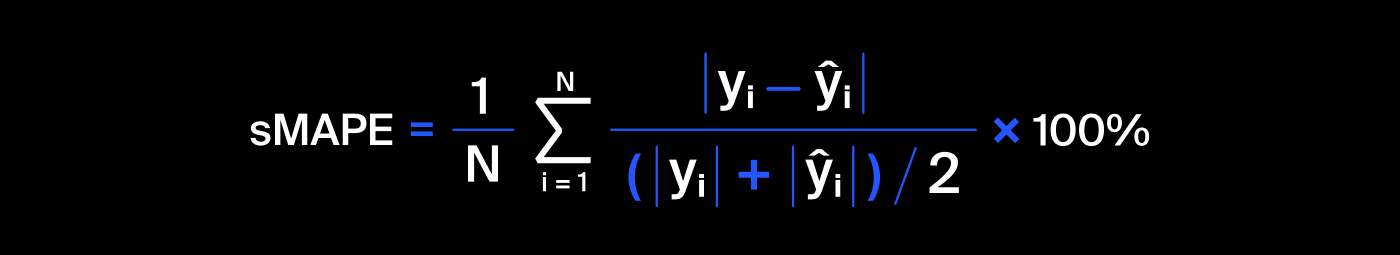

In [229]:
# Define the HTML tag to display the image
html_img_tag3 = f'<img src="data:image/jpeg;base64,{base64_string}" alt="recovery formula" style="width:700px;"/>'
display(HTML(html_img_tag3))

<div class="alert alert-info">
  Deb's comment 1:  I was just trying to imbed an image that explains the sMAPE math formula.  I did not get error on my end. But, I changed it, to try a different method, so that you can see the image, too.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Broken code
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed
  
</div>

<b>I need to predict two values:</b>
<br>
<br>
- <b>rougher concentrate recovery</b> &nbsp; &nbsp; &nbsp; rougher.output.recovery
<br>
<br>
- <b>final concentrate recovery</b> &nbsp; &nbsp; &nbsp; final.output.recovery
<br>
<br>

<b>This next sMAPE formula includes those two values:</b>

In [234]:
#I copied the above printout, and pasted it in to the double quotes below.
base64_string = """/9j/4AAQSkZJRgABAgEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAD/BXgDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD/AD/6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/rb/AOCbv/BqT8Qf+CiX7FXwQ/bK0f8AbR8G/CvTfjVY+NL618Bal8FNb8WX3h9PB3xJ8ZfDp47jxBa/EfQYNQbUJfCD6spj0m0FtHfpZnz2tzczAH3D/wAQOnxU/wCkiXw//wDEcfEf/wA9+gD8xf8AgrL/AMGz3jn/AIJW/sy+Hv2kdd/a48J/Gez8QfGjwL8HIvCWk/CHWPBNzbXXjjTfFGow66+sXnj/AMSxSW+njwy8UtiunLJcG8V0uYvJKyAHhP8AwWk/4IH+LP8Agjh4D+BfjjxL+0v4d+PCfG7xd4w8KWmm6H8MNS8Av4efwjo2k6vNfXN1f+NfFI1Bb0atHBHbxW9oYTC8jTOGVKAP586ACgAoAKACgD79/wCCYX7B2sf8FLf21fhP+xroXxI034Sal8U7H4iX0Pj3VvDd14usdFT4f/DbxZ8RZo5PD9nrGgT3zapF4WbSYyurWgtZL1bxvPW3NtMAdB/wVW/4J46x/wAEu/2xPFn7Iuu/FLTfjHqXhXwj4E8VzeONJ8KXXguxvE8caBBr8NjHod5r3iOeJtOinW3kuG1NxcSBnWGFcAgH5xUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAH+nf+xT/AG1/xBwa1/wjn9qf29/wxZ+2t/ZH9ifa/wC1/wC0P+FzfHz7N/Zv2D/TPtnmbfI+y/vt+PL+bFAH+ch/xlP/ANXAf+ZFoAw9X/4XTcXnh3S/iFf/ABUsNN1LxBpsNi/i2fxXFbJqAuEjS7sF1t1t21CyjneWGSH99CCSGVWJIB/U3/wc0/8ABMbxZ+wJ8Kf2VPEniX9vz9tH9sxPiL8QviPolpon7VHxQ1L4gaP4GfQ/Dfhy/m1XwhbX97djTdS1kXsdpqc8Xlme1sraNtwRdoB65+y1/wAGo/gH9sL/AIJhfAT9rv4WftI+OtB/aD+OPgn4e+LY/Cnjay8LRfBrwraa38SdM0Lx5qmo3enaM3i6503wp8PV8S+KLCzhv0u9T1bTLPTpLqCC6eVAD6Z+An/BtN/wQb/aD1DXP2fvhJ/wVp8afG79q/QdL1Z76z+FXxd/Zr1DSft2iKV1XVtK+EVp4I8S+JNf8P6LJIra/baJ8VdSex8tUuPEGm/vS4B/Ix/wVF/4J1fFP/glx+2F48/ZS+KGrWPitNJsdL8ZfDf4haXaT6dpvxI+FniiS+Xwt4vg0y5eafSb5p9N1Xw/4k0dri9g0jxZoGvaZYaprOnWlnrF+Af0Rfso/wDBtZ+yh8H/ANjTwV+3X/wWv/bF179k7wB8SNN8P634U+E3gW68PeHfFulWPi7RbjXvCGjeJ/EHiTwp8Q9W134la/oyPr1z8KPAnw61DxF4c0rTr6PU9Uk1O312w8MgHvesf8G0n/BL3/goF+zz8QfjJ/wRN/b38VfE/wAf+AoQsvw6+K+ueHvEXh3UNeOn3s+j+D/E1rL8P/hP8UfgzfeMjYXUnh7xT410PxFol9cWV8lrpq6ZHe6jooB+Sf8AwbC+FPEngT/gvh+zX4H8Y6LqHhvxd4N/4aq8KeKvDurW7Wmq6D4k8Pfs7/GXSNc0XU7V/nttQ0vU7O6sby3f5obmCSNuVNAHQf8AB2z/AMpo/jB/2R/4Af8AqudOoA/mhoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP9XH/AII9/tHXv7IH/Brt8J/2o9N8KWvjq/8AgF+z1+1R8VbPwde6tLoNn4muPBvx8+OmsRaLc61BYapNpcN+1sIJL2LTr17dXMi20pGwgH4lf8RxfxU/6R2/D/8A8SO8R/8AzoKAPxt/4K8/8F8PF/8AwWP0/wDZk8EeJP2avDfwGg+CHxM1nxVbahofxM1Px/L4il8Xw+HdIezngv8AwZ4VTTY7BNI89Zo5L1rlrjYUhEW6QA/oy/4Pgv8AkgX7A3/ZYPjR/wCoX4MoA938X/EXxZ8Lf+DMjTvFPgrV7zQ9cu/2MPh94Fl1Cwne2uv+Ed+Kfx08N/DDxlYrNGQ6R6t4P8Ya7pVwFIL297LHuXdkAH8Qf/BDbX9X8N/8Fff+Cdeo6JfXGnXlx+1P8MdAmuLaV4ZJNI8V6uPC/iCxZ42Vjb6poOsalpl3ESUntbuaGVXjkdGAP6Cv+D1fQ5bz9vT9i6XQ9Hk1PxRrf7Mj6HaW1np7arqGsy23xl8YtoWjw6asNydSkbUdZvY7TT1tZ2u59Qkt/Jm80RkA+g/iB/wSA/4LI/8ABR39nr4d/Ef/AILkf8FNvg5+yZ8APAVwPH3hjwx8T/B/wig8V/D7Ute0wWEl38RLbwhafAL4aeFNUufD6rBY2eu/FPxRq/h0XOo2GpeHtA1NdU0+UA/Uf/g3v/Yu/wCCWX7GP7RPx48O/sO/8FLZP22PjL4w+Dls3xK8E+Hr7wpc+BNL8F+FPHmjR23ji0Pg3T9R0q61DTNb8R6foFlct441Xy7XxJqT2lm8N9JNagH4R/8ABPTTLDSP+Dyz4xWemWkNlan9qn/gofe/Z4F2RfatU+Ffx51PUJgvRWur+8ubqQLhfMmbaqrhQAfB3/B2z/ymj+MH/ZH/AIAf+q506gD+aGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA/wBNv9kT/lTJ8Wf9mQftu/8Aq4/j7QB/mSUAdB4T/wCRq8M/9jBo3/pxtqAP9Dz/AIPgv+SBfsDf9lg+NH/qF+DKAO/+OX/KlPon/ZsH7PH/AK1v8M6AP4o/+CKX/KXD/gnL/wBnf/A//wBTbS6AP6wf+Do/4z+E/wBnH/gs/wD8Eg/2gvHukXGveCPgdZ/C74t+L9Hs4UuL3UPDXw7/AGoP+Et1u3sLeX91cagdO0m4awgmzDNeLDHMDEzCgD9Rf+C4v/BMPxf/AMHAvwK/ZS+NX/BPv9sP4K+IPBfw6bx1qGn6F4i8a+I7r4IfEWLxjD4eX/hJLTxF8PdG8cTaB8TvBTaDfeGbrRfEHgye9iTXtQ0fVNS8F3mj6lZayAea/wDBAv8A4JZfCv8A4Iy/tNeIvhT+0V+1L8J/if8A8FD/ANqf4V65H4Z+C/wbv9a1Tw14A+BHw61LS/FXiPX9SvvEui+GPFF1eeLtcXQ202+8Q+E/CkFxD4a1K08LWfiGLT/FOp6SAfkD+xX4c1Dwr/wej/FjTNTikhubr4//ALaniOJJUVGOn+Mf2cviv4u0iUKkswMc+la5ZTwuXDSRSJI8UDs0MYB+cH/B2z/ymj+MH/ZH/gB/6rnTqAP5oaACgAoAKACgAoAKACgD+y39iD/g2I+CXhz9krSP26/+Cy/7V2ofsefB3xLoei+JNB+GnhrVfCXg3xjo2jeJGguPCT/ELx1490Pxbp9j4s8XWbB9M+E3hTwPrfiwQX1hHca5YeJk1PwtpgB9X+Cf+Dc//ght/wAFH/AvxBi/4JS/8FGviRqfxi8A6PFd3Wk+M9Z0Dx74esJLqeZNJvvGHw41T4Y/CX4qWHh/WLyI6K3jDRdVudI0yV47iLSNZvoP7L1EA/jw8efsO/Gn4Lft1xfsCfGzQ28J/GWw+O3gf4I+ILLTp01K1a78ea94esPDniLw5ePDEuqaD4n0HxNovivwrfy2tu2paHq+l3c1pbvcPbxgH9wfxT/4NLP+CPPwM1DStJ+Nv/BS34qfB3VNds5tQ0PTfin8XP2Xvh9qGs6fbTC2uL7SrPxb4M0i41GzguCLea5tI5oYpiIndXO2gDyv/iGg/wCCBn/SY/8A82e/Yw/+UdAH8vX/AATI/wCCUXi3/gqF+334i/ZJ+E3ju38LfDLwLceOfF3xB+NF5ZQ+KY/Dfwe8HeK7Xwzba7pllps+maZ4n8UeKr3V/D+l+G9Og1DS9PvrrVJtXeeDRdLv5IgD9rvh5/wRE/4Ijft0+Mvjf+yZ/wAE1/8AgoT+0n4h/be+EfhPxjrOgR/HvQvCTfAD4rap4E1Kz0XXG8I6p4c+D/grWZPC51m4jtJdY0vxH4k1K00a/XxjomieMdA0e9e6AP5CPiB4E8WfC3x542+GXj3Rbrw545+HXi7xJ4E8aeHr7Z9t0HxZ4R1m98P+I9FvPLeSP7VpesafeWNx5bunmwPsdlwSAfvl/wAEEv8AghRrX/BXPxr8TfG/xX8V+Mvg7+yN8HdNuNK8TfE7wna6KPEPiz4p39pbXmjfD/wfd+J7O/0KBdC0a5bxh481qbTdYXQ9L/4R3RZLG2uvG2n6zpQB+TX7dngb9lH4YftSfFX4bfsV+PviJ8WP2f8AwDrknhLwx8U/iVc+G7jV/iLqeiFrPxF4s0SPwv4e8N6db+C9Q1eO4j8IGWymvtS0S3ttcuZ4jqqadYAHyJQAUAdt8Ofh/wCI/il400HwJ4Ugt59c8QXZtrX7XcJa2lvFFFJc3l7dzvkpbWVnDPdTiJJrmSOJo7W3uLl4oJPuPDfw94k8VeNsg4C4ToYetnvEOLeGwrxmIhhMHh6VGjUxWMxuLrzu4YbA4OhXxddUadbE1KdGVLCYfEYmdKhU8jPs8wHDmU43OcznOGDwNNVKnsoOpVnKUo06VKlBWvUrVZwpw5nCnGUlKpOFNSnH6C/aV/ZI8Xfs+nTdYivH8W+CNQhsraTxNb2TWp0zXWgRbvT9Vs1luPsUN3dLNLo9y00kVxAy2skovYWEv9C/Sa+iHxf9Hl5ZnNLGVOLuBsxo4LDVOJ8PgZYR5Zn0qEI4vL82wcauJ+o0cXio1quTYmVepSxFCUcLUqrHUZKr8P4f+J2V8cfWMLKksszihOrUjl9Ssqn1jBKbdKvhqrjD206VNxjiqahGVOadSMfYyTj5D8GPgx4y+OPjK08IeELT+5ca3rdwkn9leHdK8wJLqOoyoPqlnZoftN/c7YIF/wBZJH+P+Cvgrxp468aYTg7g7CfyYnO87xMKn9lcOZV7RQrZlmVaC9YYPBwf1nH4nlw+Hj/EqUvqOLOLMp4OymrmmaVe9PCYSm4/WcdieW8aFCL+Tq1WvZ0ad5zfwxl1f7Rf7PHif9nnxfDomrXCax4d1pLm68J+JoYhbx6vaWrQrdwXNp5szWOqac1zbpfWpkliKzwXFvNLDOu36v6R/wBHTij6OvGFHJM3xEM54czuGJxfCXE9GksPTzfB4WVGOLoYrCe1rSwOaZdLE4eGOwrqVaTVehiMPWq0a8eXzeA+Osu45yueLw0HhcdhHTp5nl85c8sLVqKbpTp1eWCrYeuqc3RqcsZXhOE4RlB3+eq/nc+5CgAoAKAPoP8AZJ+D+i/tC/tWfsy/ALxJqmqaH4d+OH7QfwY+D+v61of2T+2tI0X4l/Efw34L1TVNI+3wXVj/AGpp9jrU93p/221ubT7XFF9ogmh3xsAf3ufH7/gy4/ZT8I/Ar4zeLPgr+0h+1H4q+MPhf4V+P/Efws8K+Jv+FWXPh7xR8Q9D8K6rqng7w3rcOifDqw1htL17xBa6fpN62l3cOoRW948toXnRI3AP86J0eN2jkVkdGZHR1KujqSrKysAVZSCGUgEEEEZoA/q3/wCDfj/g3k+GH/BWr4GfHL9oH9oD4rfFz4V+CfBXxQ0n4UfDOP4WR+EoLrxJr2l+GLfxT8Q73W5/GXhjxHDPp+m2virwJZ6KdJjtsXsniCO+lmaGCOAA+bP+DhX/AII6/A3/AIJAfEn9mrwT8Efid8WPibZfGrwP4/8AFPiC8+KkvhCS60q68J694f0mxttHHhHwz4bhW3uIdVuJbs3qXcjSJCIWhVXEgB+AfgXwV4m+JXjfwd8OvBWk3WveMvH3irw94K8JaHYxST3us+JvFWr2ehaDpNnDEryzXWo6rf2lnbxRo8kksyIisxAIB/eJ+2X/AMGdvwW+Av7DHxv+Nnwh/aE+PXxH/aR+D3wR1H4l2/g3UrXwDL8PfGXiDwJpFv4l8faJo2laf4O03xcYdY0XTPE9t4Isv7efU11WbQor1tUZbi1vAD+BGgD+uH/g3/8A+Dez9mj/AIK4/sp/Fn4+/Gr41/HP4a+Ivh/+0HrXwf0zRfhdJ4Bj0W80XS/hx8NvGkeqX/8Awlng/wAR3x1SW+8bX1o/2e6gtBaWdrtg84zSOAfoHa/8G3f/AAb76vPHpmh/8FqtHvtXvd0GnWlr+1T+xRqc810yMYlj0+z05Lq82sN7W8EkckiKyrJGTvUA+HP+CoH/AAaX/F/9kD4A+Lf2qP2R/j3H+1p8LvAfh+Xxx418D3vgu28K/EvRvh1aWVxqmq+OPC1/oniTxH4a+JOj6Do0ceuaxHYQeGdUGiLealpGm6ylq0TAHG/8G/X/AAb9fs1/8FdP2a/jR8a/jX8aPjj8NNf+Gnxxl+FulaV8LZfASaRf6QngLwf4sGoagPFng/xHenUje+I7q2JtrqC1+ywW/wDo/m+ZI4B+mM3/AAbN/wDBBG3llgn/AOCxUkE8EjwzQzftN/sZRywyxsUkiljfQleOSN1KOjgMrAqwBBFAHzZ+2J/wb7/8EUPgT+yh+0l8afhF/wAFV/8AhZnxU+FPwQ+J3xB+G/w7/wCGiv2TNc/4Tnxz4T8H6vrXhXwn/YvhnRo/Eer/ANv63Z2Wmf2ZoMkesX/2n7Lp0kd3LE4AP4kqAP6fPin/AMEKvgf+yP8A8ER/D/8AwUo/bH+LHxe8LftKfGm18NS/s/fs++Dz4R0zwzdXvxXiTUvhPo/jk+I/CeqeI21a28B2OvfFvx7ZWWqaFLZeHbGTwdarZ+J7R7y7AP5g6ACgAoAKACgAoAKACgAoAKACgD+rv/gvV/wQH/Zw/wCCTv7KPwA+Pnwc+M3xt+JHiX4tfF3S/h3rej/Ex/AjaFp2m33w38V+M5b7Sk8LeEtAv1vlv9At7WMXd7dW4s5pg0TTeXMoB/KJQAUAFABQAUAFAH3/AP8ABL74A/sy/tVftvfBD9m79rL4h/ED4UfC343eIG+HOnfEP4dXnhez1Xw78R/EUJtfhvHqreLdB8QaU/h/xH4rOn+Eb5/sttLYXOv2OrSX0Njp17FOAe/f8FsP+CVviD/gkr+2VqPwGg13XvHXwd8ZeFdL+I/wK+JHiCztLbVvE/gzUJZ9L1XSfELaXb2+jDxd4O8T6dqmi61Fp0Vql1p/9g+Ixpul2viOysYgD8gqACgAoA/T7wB+yB8KPEv7K0nxm1G48Wjxcnw88ceKRFb6xZRaMdS8Or4hNgpsm0mS4+yt/Zdt9oiF6HkBl2Sx7ht/1J8Pvod+EvE30UZ+NOZYji5cYQ8OuOeKlSw2c4KlkzzPhyPEUsvi8FLKKmI+qyeV4b6xSWNU6idXkq0+dcv87534pcS5f4krhOhTyz+y3nmT5dzVMLWli/q+PeBVd+1WKjD2i+s1PZy9laPu3jKzv+YNf5bH9EBQAUAff/8AwS4/Zn+AX7YX7dnwM/Zz/ag+Mn/DP/wM+In/AAs3/hOPi5/wk/gvwZ/wiX/CI/B34g+OvDP/ABUnxCgufB+m/wBveMPDHh/wz/xN4H+2f2z9g0/bql1ZOoB/X7/xDQf8EDP+kx//AJs9+xh/8o6APTvhb/waa/8ABHH446vqHh/4Kf8ABTT4nfGDX9I006zquifC34w/stfEDV9M0gXVvZHVdQ03wn4N1e9stNF7d2tob65hitRdXNvb+b5s0aMAfmB+yz/wbkfs0ftCf8Fjf+CgP/BPi4+Ovxut/gH+xz8NvAOv6H8SvD138Orr4ha5458Z6N8KNQl0HxNdy+D7vwolrp154k+IVhcWenaDYaja3Ph/T7S5nFxaamLoA/QHVv8Ag2K/4IQ6Bqup6Frv/BXzUNF1vRdQvdJ1nRtW/aR/Y507VdJ1XTrmSz1DTNT0+88PQ3dhqFhdwzWt7ZXUMVza3MUkE8aSoygA/MD/AIK2f8EVv+CTv7Ev7FvjD4+fsn/8FGf+GjvjRovjDwBoOifC3/heP7Nvjf8AtPSvEviO20zxBqX/AAjvw20q28V3X9jaU8995tpOlta+X9ovd1tG6MAeAf8ABOr/AIIu/sweOP2B/Ev/AAVS/wCCo/7SvxE/Zp/Y4j8Yah4F+F/hr4QeH9L1D4vfGDVNO1k+FpdX8M6jr3h7xrp0Vnc+M7PxB4U0fRbLwRr+pX9z4S8W65q934Z8N6ENT1AAd/wUQ/4Iufsx+Df2AfC//BVf/glt+0Z8Sv2jv2Nn8TWXgz4reG/jVomh6T8X/hDqt94mTwTFquvXmi6D4Gsr21tvG+oeH/COr6H/AMIPp1/ZTeIvDvijR9R8TeEdaOq6YAfzX0Af1uzf8G+H7NH7Jn/BImX/AIKL/wDBTX40/G/4TfGTxJ4ffXfhn+zV8O7zwD4a1bXte8ZWx/4Uv8JtUHjnwP4n16H4geJljPifx6dOsrn/AIVz4L/tvU9S0K6k8F68ZAD+SKgAoAKANjw9oOqeKdd0fw3oluLvWNe1Ky0jS7VpoLZbi/1C4jtbWFri5kht4RJNIimWaWOJAdzuqgmvZ4dyDNeKs+ybhnI8OsXnOf5ngsoyvCyr0MNHEY/MMRTwuFoyxGJqUcPRVStVhF1a9WnSgnzTnGKbOXHY3DZbgsVmGMqOlhcFh6uKxFRQnUcKNCEqlSShTjKc2oxbUYRlJ7JNn2H8e/2I/HXwW8FaL42s9QTxjp0Onw/8J5/ZlpIh8L6pI7FriBCWmvvDah4rU6o8cE0NxGbi8tbW3uo1g/snx++g7x34J8E5Jxxg8xp8Z5bRy6j/AK/f2XhKsHwtmtScnLEUINyrY7hqKnSwjzWpToVqOIpvEYzC4XD4qnGh+V8FeL2TcW5vi8oq0HlWInXn/Yv1irFrMcNFK0JtWhRx7tKp9WjKcJwkoUqlSdOTn8r+APAHiv4n+K9K8GeDNKm1bXdWm2QwplILWBCDc6hqFyQY7LTrKM+bd3cuEjQBVDyvHG/8o+H3h9xZ4o8WZVwVwVlVbN8+zetyUaMLww+Fw8GnicwzDEtOngsuwVN+2xeLrWhSglGKnVnTpz/SM7zvLeHctxObZtiY4XB4WN5Ses6k3/DoUKfxVa9WXu0qUdZPV2ipSXuf7R/7KvjD9nd9Dv7/AFC28TeFtchtrWLxHY272kVr4iWz8/UNFu7OWWWWH54rmfSrosU1CwjLlYLqC6tYf3f6Sf0T+Mvo5zyLH4/MMNxPwpntHC4WlxJgMPPCUsLxGsH7fMMlxmDq1a1ah79LFV8pxUpOGY4Ck5uNDF0MVhaPx3AXiTlXHSxlGjQqZfmWDlUqSwFaoqsqmAdXkoYulVjGMZ6SpwxNNK9CtJJOdOdOpP5Zr+VD9HCgAoAKAP3G/wCCAn/BLj4Q/wDBW39sb4lfs4/Gj4g/Ej4beFvBX7NHjH422GufC9/DCa/d6/4c+KXwa8CWuk3h8V6D4i07+x59O+JOq3lwIbKK9+22GnmO6SAXMU4B+sP/AAXQ/wCDZj4L/wDBMn9iT/hrX9nP4v8Ax1+K0nhP4reB/C3xR0j4nJ4Fn0fw/wCAPHC6toFj4qtZ/CPhHw5dW91D8QrjwR4bxeTXFpMPE6qI0nWJmAP42KAP79P+Ce//AAaC/s1/tK/sS/szftDftAftAftJ+Afiv8cPhP4c+K/iDwd4IHwys/Dfh/TfHsUnibwbp9pa+I/Auu65b3ieB9S8Nya1FqWpy3Ca5JqK+RYIE0+1AP5Av+CoX7J3gv8AYY/b5/aY/ZM+HfiPxR4t8F/BLxxY+FtA8R+NH0mTxRq1rceFPD2uyXOsNoem6RpJuBdavcRILLTrWNbeOFWV5A8rgHqn/BG7/gnLdf8ABUv9vH4bfsr3mteIPCfw9utD8X/EH4w+N/C6adJrvg74beDdJL3OpaYmrWt/p/8AaGteLNR8JeC9NlurC+trXUvFNnd3VrLawTAAH7Bf8F/v+Dc/4c/8Eov2efhB+0l+zr8Uvi58WfA2ufFC8+F3xei+KI8J3N94W1DxFoEut/DXW9F/4Qzwn4chtdDupvDPjHRPEl3rLXKjWNS8FWdg0Et7OlyAfyZUAf30fs8f8Gq//BNfxh+wR+zD+2n+0b+2/wDGv4E6P8Zf2bP2ePjP4+17xT42+AngP4XeDvEnxr+HvgzxLJolt4m8deCYLXT9LPibxXHoHh2PWtbnv7x5dPsmubzUJ1MoBteGP+DW3/giv8ar5PBX7PX/AAV+m8dfEfU2aHRNH8MfGf8AZP8Ai7fT3HlkhE8G+CBo+u6mys0btFaanbOYwV3KZFkQA/nd/wCCzX/BBH9o3/gj/qHhTxpr3jHRfjr+zR8RvEUvhLwV8bvDmhXvhW703xeNOvdZtvBHxI8F3moa2nhPxNqmkaXrWq+Hn0vxL4m0XxBpeiarcQanZ39hf6PZAH75fsc/8Grn/BPP40/8E+/2bv21/j9+2P8AHX4MWvxZ+BXw0+K/xA1LUPFPwQ8I/DPwZqXjzTNKlazj8QeNPA5j0zSTrGq22l6Y2t61LcT3FzaWpuZ7qeMOAdV/xDQf8EDP+kx//mz37GH/AMo6APxx/wCC1/8AwSP/AOCZn/BP79m34afFT9i39vT/AIap+Jfi744aR8PvEXgX/hcXwA+IX9heBrzwH4/8R33iz+xvhRptnr9r9m1/w54d0f8AtO+lOjw/2z9lmja9vLFkAP55fgb8GPiF+0X8ZPhd8BfhPokniP4lfGHx54X+HPgjRkLpHeeI/Fur2ujaab24SOUWGl2092t3q+qTJ9l0rS4LzUrxo7W1mkUA/db/AIL0f8Elf2QP+CQrfs2/Bf4Z/H34ufG39qT4keE5vH/xasvE8fgjSPAfhLwRYxHw5Y65pPhvRtBTxJpknxE8eWniVvCNjqXi3XjougeC9btdXuNTvL3TdUYA+QP+CM//AASm8Yf8FeP2s7v9nnRPiPZ/CDwd4L+Hes/Ff4ofEi48PN4tvtF8J6RrOgeG7TTPDnhj+2PD8Os+JPEPiLxPpGn2kd3renWem6Z/bGvTNfnSI9G1MA/Rj/gtV/wSD/4Je/8ABNz4K6hbfs8ft/6t8eP2xPCXxd8IeAfiD+z5r3jj4Pahrnhfw9q3h/xJqviLW9W8FeDNDtvFeg32i3dl4dt5bbUtUkGnjWVh1CFp5oCgBq/8Fpv+CF37Lf8AwTV/YO/Zo/am+DXx3+LXxM+IHxp+JXw58F+JvCnjjU/h3c+HdE03xf8ABvx18RdVvdKtPCvhbR9biurPW/DGn6batqGpXVvFY3VxHcxT3bwTxAH8s9ABQAUAFABQB96/8Ev/ANk3wd+3R+3z+zP+yZ8QfEnibwh4M+Nvjm78L+IPEng3+yx4n0mytfC3iDXxPo51uw1TShdPPo8MBa90+7iWKWQ+UXCkAH2j/wAF+/8Aglx8If8Agkl+2N8Nf2cfgv8AEH4kfEnwt41/Zo8HfG2/1z4oP4YfX7TX/EfxS+MvgS60mzPhTQfDunf2PBp3w20q8txNZS3v22/1AyXTwG2igAPqL/gkt/wRE/Z+/wCCtH7A/wC1T8QfhL8X/it4b/b9/Zwmvbew+EGo3/gef4PeNTr2l6h4k+Ed24bwpb+LdCsfiAnh3xf8PpZpvE92mjeKvDkvieZ5dFu00GIA/mj1HTtQ0jUL7SdWsbzS9U0u8udO1LTdRtprLUNO1Cyme2vLG+s7lIri0vLS4ikt7m2uI45oJo3ilRJEZQAU6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA7zwX8U/id8Nvt/wDwrr4j+PPAP9qx+Tqf/CF+L/EHhb+0Yvl/dX/9h6jY/bI/lX5LjzF+VeOBQByOp6nqWtajfavrOoX2ratqd1Pfalqmp3dxf6jqF7cyNLc3l9e3Uktzd3VxKzSz3E8skssjM8jsxJoAo0AFABQAUAfol8A/hp+xl4i+Fnh3V/i745t9F8fXUutDWdOk8YSaS8EcGuajb6WTYLC4h87SorKYHcfNEgl431/o14AeGX0LOI/CrhzN/GDjvDZJ4gYqtnazrLanGVTKZ0KVDPcyw+Vt4CNGaoe2yqlgqyfM/aqoq2nOfhXGvEHixgeJMfheF8mni8kpxwn1SusrjiVOU8Hh6mJ/fOac+XEyrQ293l5eh7F/wpr/AIJ0f9FOtP8Aw4M3/wAjV+zf8QW/Zwf9HQwf/ixK3/zMfK/61+PH/RPVP/DJD/5YeF/tFfDn9j/w18NrrVPgx42t9d8bpq+kwwWEfi2TWGbTppZF1CX7E0KBhFGEJk3fu85wc1+D/SO8N/odcMeGeKzXwV43w+fccwzjKaGHy+nxfUzmUstrVqkcxq/UpUYKSpU1Bupzfu73s7n2PAmfeKWYZ/Tw3FmUTweTvC4mc68ssjhUsRCKdCPtVOTXNK65be8fn/X+e5+3BQB2Xw68QaF4T+IPgTxV4p8NL4z8M+GfGXhjxB4j8HveppqeK9C0bW7HUdX8NNqMllqcenrrun21xpbXsmm6glqLoztZXaxmCQA/oG/4Lo/8HAGq/wDBZDwR+zz8ONB+Amvfs4eCPgx4q8f+NvFHhy7+L8HxQ034i+KvEOkeGtC8E63Nb2/w68AJo994A0iDx9Y2U0g1dry3+IGoJGdPFvJ9tAPsP/gzU/Z2+LHjb/go14+/aN0S01rS/g78D/gT4z8NeOfEscdzDoWv+LPibdaJpvhD4cy3CqIL6+mg0/VvHj2e50sU8F2dzdCGa70r7QAdZ+1J4y+H37bP/B4L8JYPhomm+KvCfgH9rn9mjwnqmp6asNzZ+JNc/ZX8O+E9c+Jc920Kzwaha6B4l+H/AIm8Mzys09tfaR4ZjLOLOQKgB+4H/BeT/ggz+2f/AMFg/wBvf4b/ABC+G3jf4OfBv9nv4Rfs2eE/hz/wmXxK1rX9R8Q+IvHl38Qvib4u8Uf8Iv4K8JaBqt1NZ2Gk6/4Qsbi58Rat4as5Li3um0y71GRbi2tQD+Yj9v3/AINT/wDgox+xF8K/EHxx8K6n8Nf2rPhp4PsbzV/GkPwU/wCEuT4l+EfD2m2jXmqeKdT+HfiPw/ZSap4d023SWe/uPB+veKNU0+zt7nU9T0ix0q2uL6MA+5/+DLvX9Iufjn/wUM+FenXtjp/xV8efsveGNa8A3U87215Bp3hbxbq+geIbi3mgAu47W21/4g+Ari+ktZUliaO0lVWdEeIA+HP+DVj4R/FHTv8AguZ8NNMu/DOvaPe/Arwb+0q3xm0y5ie0m8JRWfw38W/C+40zxJC0sYSa1+I/iXw7pD2LieRdVWKQQ4tJLi3APlf9pr9mPxx/wU9/4L1/tafAX9k/TrXXrz4yfts/HaO08T2MUt34T8P+EtH+IWur46+LeuX0MnlJ4S062stV8VT3q3EY1l7qy0zRhPqmtaTY3AB/Sh/wXq/bJ+Dv/BHr/gnv8MP+CGv7B1/Hp/xI8c/DO10v49+L9JSCLxJoPwl8UpcP40uvEk+mzIE+LH7Turzai2sxXH299J+F95r9sljYQeJ/AWqWQB/DR49/ZG/au+FXgmy+JnxQ/Zi/aF+G/wAONRa2TT/iB49+C3xI8H+Cb9rwbrRbLxX4h8NadoV010ObYQX7mccxBhQB89UAFAF3TtRv9Hv7LVdKvbrTtT066gvdP1CynktryyvLaRZre6tbiFklhnhlRZIpY2V0dQykEV25bmWYZPmGCzbKcbistzPLcVQx2X5hga9TC4zBYzC1I1sPisLiKMoVaFehVhGpSq05RnCcVKLTRjiMPQxVCthsTRp4jD4inOjXoVoRqUqtKpFxnTqQknGcJxbjKMk007M/dL9lX9obTf2nvBWu/DX4maFFqfifS9DWHxP5umtL4d8W6DcOlkupTGKL7JperNM0a3dgXt/MuQNT0PbGlxa6V/vB9FD6RWWfSj4Iz7wz8TshpZpxRlWRxocUe1yyVXhzi7IMROGCjmVZ0qX1TK82lWlTjjMvc8OqmJSzTIuWnDEYXKf438SeBsR4d5vgs/4fxssPl2Jxjnl3LiFHHZZjYJ1Xh480va4jDKCbpV0p8tP/AGfGXk4VMT6TrA+Ev7EnwZ1fVvD/AIcvjpsd+BHbQebe6z4l8SakZ/7Mg1jW2gcWtpEiG3W+vQtrp9lD5NrDc6hPDaX36XnC8I/oPeC2cZvw9w3j3lsMwSp4ah7XG51xNxLmbr/2ZQznO5UJrC4OjCm8NHH41RwuXYGj7HC0cVmOIo4TH+Bhf9ZvF7izC4XHY+isQ6HvVJ8tHCZfgMPyfWJ4XBqadSrJtVHRo3qV60+apOnQhOrR/CH4sfFjxj8ZvGOoeNPGmoG6v7o+TY2MO9NM0PTEd2tdI0i1Z3+zWVtvY8s891O815eTXF5cTzyf4J+LXi1xn408Z5hxtxtmDxWPxT9jgcDR54ZXkeVwnOWFyfJ8LKc1hsDhlOT1lOviq862MxlbEYzEV69T+zeGeGcq4TyqhlGUUPZ0afv1q07PEYzENJVMViqiS9pWqWXRQpwUKVKEKUIQj5rX5mfQBQB/Xr/wRx/4IQ/sffEf9hfxH/wVo/4Ks/FvxB4E/ZC0b/hJtR8I+A/CWoaxoA1nwv4P8WX3w51fxb8Q9e0HR9U8b3FvrXj+1uvC/gjwP8N4LLxNrmpWdleR65dprVnoUoB96/AL9kz/AINI/wDgqN4yb9k39kzSPjT+zd+0X4o0nX4/hhrt74w/aF0zW/FmoaRpl3q9xP4bT40eNfin8NPEF9ptnZXWrSeFdZtdB8RazpMV/DpEObIzaWAfz1p+wH8R/wDgmb/wXs/ZP/ZI+JGq2/iibwT+3P8Ase6z4K8eWNjLpmnfET4ceKvjV8PdX8H+MLTT5prptOuLuxlk0zX9KW8v4tF8U6Vr2iw6jqUOnpqFyAf6hfxl/a0j+Ef/AAUw/Yl/Za1zUpLbw/8Atbfs/wD7X83hyya7ZILv4q/AzUPgR440OMWj/uXkk+G2ofFmQzoRcB7S2hCyRyMYgD/J1/4LdfsoR/sXf8FTf2yPgjpeiSaD4LHxY1P4k/DSxWIpp0Pw3+MFva/E7wnp+izY2XWl+G7HxSfCKSq80kF34evLC8lbULO7CgH+g5+xpEv/AASW/wCCQv8AwSG+Aywx+FvjV+2B+1n+xX4L8R2k0UZ1h/Fn7Tnxt0H41fGPTtbtPMkL3Hh74M6f4h+Fd1fRH7Lp09roUYlaVrRbkA/Cj/g+C/5L7+wN/wBkf+NH/qaeDKAPzb/4NN/2J0/am/4Kj+G/i/4k0uG/+HP7GHhW7+OeqfbbQXOn3fxKvJX8KfBzTMyWd1DDq2neJb+++JGjSNLZTRXPw2kuLW5863EUgB/aP+wt/wAFgtP/AGnv+C3v/BSn9gu81+3vPh18LPCfhDQf2frWS7b7FceLP2er6/8AB/7T9pBbybrS91jXvHPjsyW4tCrzeFfhhJev9sgidrIA/wA3X/gsV+xU/wDwT+/4KP8A7UX7NWn6dNYeBdA8fT+MPhGXhMdvN8IfiRbQeOPh/bWc25471fDuia3F4P1C7iYK2t+HNVheK3ngmtoQD+6b/gyg/wCUbn7Sv/Z7/i3/ANUN8AqAP8ySgD/Vb/4NVtL+K/h3/gipqP8Aw1naaxpvwon+Knxu1n4U2/xJgvINNj/ZVuvBfgu41C6jtdWjWVPAl745X4xajYs0Z0+70i6kvdPMml3Vq7AHzH/wZO+V/wAMF/tZ+R5nkf8ADYd35PnbfN8r/hTXwv8AL83Z8nmbMb9ny7s7eMUAfxMeI/8Agi1/wVqu/EOvXVv/AME6f2vZre51nVLiCVPgh43KSwzX08kUin+yxlXRlZeOhFAHjnxf/wCCW3/BRr9n/wCHPib4v/G/9if9pH4U/C3wbDp9x4r8f+O/hX4o8OeFPD0Oravp+gaZJq2talYQWVkuoa3qumaTZ+dKpuNQv7S1iDTTxowBn/8ABM39mG1/bN/b/wD2Rf2Y9Ujmk8OfFv45eCdD8bLb7vtI+HenaiviP4jvalQdt1H4E0bxFJbO2I450jeUrGrsAD+q7/g9k/aJkufjh+xb+xtoFwun+GPhn8IvEnx41zQdM8uDSJNU+I/iW7+HHgiG4srcC3t7rwpofwr8ULpNqkcLWWmeMp2EZt762IAP5vf+CJv7Kvwc/bc/4Kf/ALLH7Lvx/wBI1bXvhF8VdW+Jtn4x0nQ9e1Hwxqt3D4Z+CXxK8baQLTXNJlh1CwaHxB4a0m4ka3kXz4YZLWXdDPIpAP7Hfi1/wbF/8Eev2cP2kvGHxf8A2u/2kNJ/Zf8A2MZrHwn4X+BXwk+IX7SPhj4e6l8S/HFn4ah1P4keIdf+J3xH1T/hILzSbfUNUt9O0TwP4Om03xGlxpN7rV/qNtoU2nWusAH4jfsc/wDBv78O/wDgpZ/wU4/bN8Bfs4/E+Pwh/wAEzv2a/i3q/h/T/jz4E8R6Z8XW8a6RcSRy+D/AXwm8cSX2q+G/F3iDV9LE+san4zubzW9G8M6ILbUbyw1e61XQ9I1MA/V3xT+zt/wZifAv4o3X7G3xG8Q6l4h+K3h/Vm8FeMPjVffFL9rnV9C8O+N9PeTT57DxL8TPh5rGk/BCz1K1vJJbbXbzQvDj+A9C1JZ7TxVcaTdaNcwaWAfkD/wXz/4N6rH/AIJn+FvC37W37KXxA174xfsXfEPXtM0W5/4SKfTdd8X/AAg1jxTaPqPhB73xb4ctbTRPG3w18XRpNa+FvGa6dpV1YXsmj+HtZbWr7VtM8QayAfVP7KP/AARZ/YN+LX/Bt78Q/wDgpL4y8EeOLr9qnw38EP2s/HOmeKLL4k+KLDwyniH4R/Ej4n+HfBc83gyC6/sKa3tNK8L6RBe2rW/lag8Us84M08jkA/lf/Yl+GHhH43ftnfsjfBj4gWl1qHgP4u/tO/AP4YeNrCxvrjTL298I+Pvir4U8KeJLSz1KzeO7066udG1a9ht761dLi0ldLiB1ljUgA/oC/wCDn3/glT+x3/wS78efsf6F+yL4T8XeFdN+MfhH4xat44h8V+O/EHjh7y+8Gaz8PbPQpLGbX555NOWKDxHqa3EduwS5Lws67oVJAP0t/YH/AODdb/gnh+yp+wlo3/BQT/guV431DSdP8WeG/D3jdfhBd+MfGnw68I/DXw54vtTdeDfCPiEfDS6sPi78QvjH4ksbrT9RufCHg+/0q60C/kufCieH9dvNI1LWJQDe+A//AAS5/wCDaL/grJ8c/Aumf8E7vij46+Ffin4e+ItP8TfGD9lfxX4h+NWkR/GL4NWbG28ZXngnUPi5f6x480nxNpsuqadqkGs+C/HGuaVYR6XJo+ueC9Hstci8V6OAfiJ/wcvf8E4v2XP+CZf7Z3wX+C/7J3hrxN4W8B+Nf2YfD3xQ16w8U+Mdb8bXs/i7UPir8WvCl1dwalrs093bWr6N4S0WFbGJxbpLBLcKokuJSwB/ej/wXG/Y0/ZS/ax/ZA+Avir9ur4/3X7O37H/AOy54+0P45fGzxTosUr+LfFFjL4C1T4c+FvAHhWaLRvEU1nqXijxV430y283TfDviXxFqBji8O+GtCl1nXbXVtGAPxs/ZV/4Je/8GsH/AAVq8G/FH4QfsG2njrwf8bvAnhG51C78RQfED9pvRfit4e0ua6TR9M+Jtr4G+OfibVvAHjfwzD4g1DTbfWRpvh2ZdPlv9L0fWR4Wm1vQjMAfxI/Fn/gnB+0L8O/+Ci3i3/gmb4a0qP4l/H3R/jgfgr4WGg21zp2m+M5r+WC88N+MIor8NNofhvVvCV7YeNdQudRd4PD2gS3V5f3b2thNdEA/rz8Zf8Eef+DeT/gi/wDDv4dWX/BXH4u+Nv2l/wBpT4i+HbfxAnw78M618WNDsXSO4ax1DVvAnw7+BmpeFfFukeBbLVbfUdLsfF/xe8dJY+MLzRtUXSLKzv7e/wDDGnAHA/Gj/ggX/wAEr/8Agp5+yN43/au/4IJfFDXLP4g/DX+0k1f9nTxT4p8a61pevatY2smpn4e6lpvxilufiv8ADPx5q1lFP/wguva74g1vwH4vkghs4ZY7Ge78W6YAfiv/AMG4f/BO79nL/gox/wAFAPiF+zn+1z4S8Va34F8Lfs1fEf4iRaHonifXvAet6f458K/En4SeF7Rry90iW01FVtLDxZr1pd6Xc4jNxKjzRCe1jKAH9Jt//wAG23/BEX9lH44fFPxH/wAFAv2t/BPwb8CfEPxlqR/ZZ/Z38f8A7Vngv4OS6P8ACixi03RY/FHijxT4z1jTfHvjvXtS8S2mtahHc6Pq1h4Y8L6LeWNhrz6lq5uodGAP8+7xvLp/gn4veL5vhnrMlrpXhH4ka/L8PvEGh6w11Lb6foHie7bwprOj6/azu9zJDbWlhe6frFtcu0zLDewzsWWQgH+hB/wcl+FNH/b/AP8Aggz+w9/wUptbHT7nx78PNL+BPxQ13WbSGWBdJ8J/tQeDvC/hT4qeF4baHNtB5fxjk+GMEySqyWkvhya2tLgCdlugD/OXoA6Pwh4X1Pxt4q8OeDtGNsur+Kdc0vQNMa8laC0W+1a8hsbVrqZI5nit1mnQzSJFK6RhmWN2AU/ScHcLZnxxxZw1wbkrw0c34qzzK+H8sljasqGDjjs3xlHA4WWKrQp1p0sPGtXg61SFGrOFNSlGnOSUXwZpmOHyjLcfmuL9o8Ll2DxGNxCpRU6ro4alKtUVODlFSm4wajFyinKycktT7V/4dx/tBf8AP58PP/Ck1P8A+Z6v7c/4ptfSG/6DfDn/AMSXNP8A6HD8k/4j1wP/AM+s9/8ACDD/APzcfp94B+EXivwz+ypL8GdRk0lvF7fDzxz4XElteTS6P/afiJfEI08/bXtIpvswOqW32iX7JujxLtjk2Dd/qP4f+D/FnDH0UKngvmNTKJcYS8OuOeFlUwuMrVcn/tPiKHESy9/XZ4SlX+rJ5phvrFX6nzU7VeWnU5FzfztnfFGWZh4kx4roLErK1nuT5i41KUY4r6vgXgfbr2KqSh7T/Z6nJH2tpe7eUbu35g/8O4/2gv8An8+Hn/hSan/8z1f5cf8AFNr6Q3/Qb4c/+JLmn/0OH9E/8R64H/59Z7/4QYf/AObj5F+J/wAOPEPwk8c658PfFT6dJr3h/wDsz7e+k3Mt3p5/tXR9P1u1+z3E1vaSSYs9StxLut49kwkQblUO38f+KXhtxD4Q8d574d8Vzy6pn/D39mfX55TiauMy9/2tk+X55hfq+IrYbCValsFmeGVXmw9PkrqpTjzxipy/T+Hc+wPE+TYPPMtVeOCx31j2KxNONKuvq2Kr4Opz04VKsY/vcPU5bTleHK3ZtpcDX5+e2FAHuH7Nf7OvxZ/a2+PPwq/Zs+Bnhm48XfFf4x+MNN8GeDtFhWYW4vL4vNfazrN1BBcnSfC/hjSLfUPE3i7X54WsfDvhfSNX13UWjsNOuZUAP73v26PjV8AP+DWr/gnj4Z/Ye/Yqm0nxJ/wUR/ak8Kzax8SPjvdWtqPF+jWptL/RdU+OWsRNb3X2S10TVLnU/Cv7N/w4uXGh6HJba34v1n+39W0vxW/j0A5X/gyS8L61r8X/AAUu/aB8V32seJvEvi7xR8APC8viTWr671PWtZ1pV+NHjXxzfaprOpXss+saxrt/4i8NX+oX2pSNdvdo11cXsz385QA+LtL/AODOD/gon8cZfFnxi+M/7RX7NXwm+IvxK8ReJvHt/wCAJLvxx8QtT0nVvFWo3OvTad4s8TeHPDVj4Zg1ZdSv7qDU5PCdx4v0eEItzp+p6mJTBCAfzz/8FK/+CRH7an/BKnxxo3hr9qDwNpbeDfGV5qVp8N/jR8PtWfxT8KPiE+lBJLy20nWZLPTNY0HXIIJFuZfCvjXQfDHiZrMPqNrpV1pITUJAD+jL9v7T9S+Lv/BoF/wTL8XfCa3uNX8H/Br47+FZPjFDpAJj8Nf2LN+038JtV1fxFChVre3X4peJdBsALhP3914u0bUY1e3uYLogEf8AwT4sZ/hN/wAGg3/BTjxb8Vo5NE8IfGj49+Mj8H01dUjj8WXWox/sz/CnS9U8NpcyRf2hH/wtDwlrukyfYvNktbrwXrt2YmGnXBAB8s/8Gun/AASF0z9sT496l+3P+0voNjb/ALHf7I+rLrenJ4uJsPCvxX+N+h2sev6Xpl/c3X2bTbnwD8ILIWnxB+Ikt9fxabPqbeB/DOp2OueHNa8Y2+mgHg3/AAXS/wCCkHxm/wCC2X7ck3w3/ZR8H/FT4s/s6fAaTV/C/wAAvh38MvCfjDxpqvj24W5isvF3xyvPBfh3SbzVWvPGd6ltY+HWutL+1aN4LtdDs5Fs9T1TWorgA/n/APil8GfjB8DfES+D/jX8KPiV8H/FrWq3y+F/il4F8UfD/wARNZNLJAt4uieLNL0jUzatPDNCtwLXyjLFJGH3owAB5rQAUAKrMjK6MVZSGVlJVlZTkMpGCCCAQQcg8inGUoSjOEnGUWpRlFuMoyi7qUWrNNNJpp3T1Qmk000mmmmmrpp7prqn1R+0H7FH7Vd78Too/gp8TILnXPEcOk3a6J4iltJNSi8Q6HZ2rfbNN8V/u5kS9trPci6tegWus25+zahINWMcmsf7WfQi+ljjvFGlT8EfE+hic94lo5Ti45HxHWwdXMqPEeRYPCyWNy3iz91WhDHYbB80I5vjUsJnWHf1bMaizd06mc/yb4ueGtHh2UuLeHp08HgJYmk8XgY1Y0JYDGVai9lXy33oN0alWzeGpfvcJP8AeUIvDXjhfp6x8BfBb9k7wj8RviNoXhm502xkNxr2uyafbz6xqv2ZpkWz8P6Ou0vY6LDeTItrbSSw6fZGZrzUryO1tzcW/wDUeA4A8E/ok8IeJHiPkPDGJyzAVHiM/wA+qZfh8RnObfVpVoLBcPZPHlc8DklHGVoRwuFqVaOX4J1pYzM8ZTwuHeIw/wCd1s64t8TM0yHIcZmFPEVo8mCwca9SGFw3tFBurjsU7pVsXOlBupUjGdeqoKlh6UqlT2c/wy+Pfx78Y/H3xjL4j8Rymy0iyM1v4X8L28zyab4e02RwfLjyEF1qV0Ejk1TVJI0mvZkRES3sreysrX/CXx/8f+MvpA8ZVeI+I6ssFk+ClXw/C3C2HrzqZbw9ltSafJC6gsXmeLUKVTNc1qUoVsbWhCEIYfA4fBYLC/2NwVwVlXBOVRwGAiq2KrKE8xzGcFHEY7ERT1er9lh6V5Rw2GjJxpRbbdStUq1anhtfhJ9iWrGyvNTvbPTdPtpry/1C6t7Kxs7eNpbi6vLuVILa2giUFpJp5pEiijUFndlUDJoA/vSn/wCCH3/BEv8A4I4/s0/CL4t/8FsfHXxM+M/xw+MtubW0+E/gbVfiTpfg2DxZpel6Xqni3wh8PtO+CN34d8VaxH4HXXbW18RfELxv8TdH8L65Iulvo+kaFd6pa6VqYBNp/wDwRc/4IVf8FnPgF8WvGn/BFv4geNvgJ+0T8HtN+03fwq8ba/8AFDUfDU+uazYX9x4R0n4k+GvjRqHjLxdpXh3xbfaJd6fpfxD+GnjXU9A8O3MuqjUdE8QXWnR+H7QA+NP+DM3w7rng/wD4K3/tN+EvE+mXWi+JPC/7DXxn8O+IdGvkEd7pOuaJ+0x+y5pmraZeRgsI7qwv7a4tbhAzBZYnUE4zQB/Xn401i1/4KdfDD/guj/wTE8Sanby+NvhL40vvh34BW68u4/sbQfjL8APAvxc+BniK9WTbPcx6H8erDx1KLdm/c6V4d02ytL22XyEsgD/Ky/Yi/ZW8SftZ/ttfs6fsjx2V9p+rfFv45eD/AIbeJ45IbmG+8OaDJ4hiT4g6rdwRobqBvCfhay8Q6xfIqCaBNLnztZCQAf7BVh+1JpUf/BVrwV+wB4HktbHw98Lf+CdXj/4/eNdC05F+wWN74j+PXwM+Gfwh0hVilKWV14b8MeGfiBc/2e8QmXSfF+jXQKwXEPmAH+Wt/wAHDv8Aymj/AOCgH/ZYNL/9Vz4IoA/qO/4NNvgj4N/Yx/4J6/tw/wDBW741afJY6Tqmh+NdP8L308cVtfP8D/2btD1Hxb4/vPDV3eGC2uP+E8+I6XPhNbbz3Fx4h+F1jaqFmbZIAff/AOwt8ZNW/wCDi/8A4IIftPfCL4w3nh/VP2lLjVPjT8MdVur4W1tp2i/F7TdYHxr/AGavFlvbyRXF5pXhPRhrvw/8NHUIwbi8tfB/iqyhvWnS88sA/wAuTVtJ1PQdV1PQ9b0+80nWdF1C90nV9K1G3ltNQ0zU9OuZLO/0++tJ1Sa1vLK6hltrm3mRJYZo3jkVXUgAH+mX/wAFRf8AlTs+Bn/ZkH/BKb/0v/ZcoA/zRvCFv4su/Ffhq28BQeIrnxxNr2kp4Pg8IRalN4rl8T/b4DoS+GotGVtXfXv7TFsdJGlqdQ+3iD7GPtHl0Af6jf8AwcAN4htf+DZiK3/ahkaP9o1/hj+wZa64niW7a48QTftFxeMvg1L8UohcXR+03viJdIt/itNqUp3XMtpDq9xKNqzMADG+Lvwb+K37QP8AwaH/AAt+EHwQ+Hni74rfFLxl+xP+xjb+FPAHgTRL7xH4r8QzaT8Tfgjr+px6ToumxT3t62n6JpWp6teeTE32fT7C7updsMEjKAfwNf8ADlL/AIK4f9I5f2v/APwx/jb/AOVdAHzB+0j+xT+1x+x7/wAIZ/w1P+zl8YP2f/8AhYn/AAkX/CCf8LX8D634M/4S3/hEf7C/4Sf+wf7Ztbb+0v7B/wCEn8Pf2p9m3/Y/7Z07ztv2qLcAf0q/8Gaf7Lmm/Fz/AIKM/E39ovX9Pt77TP2UPghqV94akmjEj6d8TvjNey+AtA1CMM20bPh7a/Fi3DeW7JPc20sbRvGrUAfkt/wX8/aX1T9qf/grt+2143utSmv9C8BfF7WvgH4Ig+1Nc6fp/hT4CMPhbENFzhIdN17XfDWu+MWSEeTNqPibUL1Wc3TSOAf19f8ABoU3/BNJvBeon4Bp8Rk/4KEf8KGul/a4XXD4xPgE+GV+MNyvhh/C39qs/hX7VJaDwhJcDw+RKGa8FwqN5yKAfiR/wcaSf8EU7jx7+07J+y3cfGaT/gpVH+2b4tj/AGhT4rf4mSfD17m313x9a/GO38Pt4hD+EFhg8cJo6aGmkNHDHpsDRaQRYL5TAHrH/BwD/wAEZf2E/wDgnz/wTa/ZH/aT/Zp8E+NvD3xW+Lvxa+FXhHxtqviP4j+J/Fum3ui+KvgN8RvHusw2ei6xdS6fp80/iTw5pVzFcW0SyW9vFJaRFYJpFIB9K/8ABKP/AIN3v2FP+CgH/BFr4fftMeLU8QeAf2ofiPb/ABpspfjTqPxE8SweA/AkPgn47eOfBlv401DwEup2HhvULfwp4D8OC+m0q6udLsNavNPA1HVNNW7uNSgAPTv2Rv2Rf+DPT4w/Fbw5+wt4N8TeNvjx+0B4hvj4H8KfGTx74/8A2pfBVt8UfHsEE8H2Twb4r8I3nw5+CUurajdpcr4Yt/8AhFLDw34sv1sNN8OTeKLy+0eHUQD+b3/gvl/wSRs/+CR/7YGlfDbwB4m17xn+z/8AGPwa3xK+Cmu+K5LGfxZpNhbatc6H4p8AeKrzTrXTrPVta8I6pDaXEOt2mladbar4e8QaBNJAmqpqsUIB+4H7Hn/BDb/gmV+wn/wTq8B/8FNf+C3uu+MPF1t8V9H8D+IfA/7PvhPWfF2h6TpEfxLsbvX/AIa+DDb/AA51fw/48+IHxT8S+FI7fxbrWljxN4V8LeCbO017TfEVrf2Hh3V/EJAPpL9nX/gnn/wbSf8ABdHwb8Uvhr/wT/8AB/xi/Y2/aa+Hng1/E0FvqGqeOo/FunaGbq30bSfGmqfDrxp8Tfit8M/iJ4C0/wAT6lpWl+MYvCXiPQPGkX9r6ZYaj4l8My654b1NwD+fj/gj5+z18Qv2Tf8Ag4o/Zk/Zp+K1tZ23xD+CH7Ufjz4c+KTpsz3Ok3uoeG/BXj6xTWNFuZI4JbrQ9dtEtta0S5mgt5rjSr+zmmt7eV3hQA+6v+D1b/lKb8A/+zAPhZ/60V+1VQB4d/waJftIan8Gv+CuHhj4SNfNF4Y/ap+EPxP+F2q2UihrNvEHgzw7c/GbwpqbtuUw31ufh3rOhWMuXVl8T3VoYi91HLAAfL//AAcvfssaX+yp/wAFgv2mNJ8MaXa6N4J+NreF/wBpHwlp9nbrawRD4s6X9r8dtHbxQw20MMnxb0r4iPaxWqmCKzNtGSJkljQA/BOgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAP0S+Afw0/Yy8RfCzw7q/xd8c2+i+PrqXWhrOnSeMJNJeCODXNRt9LJsFhcQ+dpUVlMDuPmiQS8b6/0a8APDL6FnEfhVw5m/jBx3hsk8QMVWztZ1ltTjKplM6FKhnuZYfK28BGjNUPbZVSwVZPmftVUVbTnPwrjXiDxYwPEmPwvC+TTxeSU44T6pXWVxxKnKeDw9TE/vnNOfLiZVobe7y8vQ9i/wCFNf8ABOj/AKKdaf8AhwZv/kav2b/iC37OD/o6GD/8WJW/+Zj5X/Wvx4/6J6p/4ZIf/LDwv9or4c/sf+Gvhtdap8GPG1vrvjdNX0mGCwj8WyawzadNLIuoS/YmhQMIowhMm793nODmvwf6R3hv9DrhjwzxWa+CvG+Hz7jmGcZTQw+X0+L6mcylltatUjmNX6lKjBSVKmoN1Ob93e9nc+x4Ez7xSzDP6eG4syieDyd4XEznXllkcKliIRToR9qpya5pXXLb3j8/6/z3P24KACgD9X/+CUP/AASB/ai/4KyfGi38E/B/Rbjwr8HPC2saZF8bP2hNe06aTwL8MdHusXM1pbZltB4u+IF/p6yP4a8B6TdJfX88lvea1d+H/DS3/iGxAP6xf+Cm3/BVb9kr/ghX+yfP/wAEk/8AgkPc6fL+0PZ2d5pXxi+OOi3+l67e/CfxPqttDpvjnxj4w8W2UX2fxf8AtR+IY7GKw+x20EOl/CK1hsLQQaHL4V8NeCLMA/kK/wCCS2r/ALcPhj9uj4c/GD/gn98HLf4//tQfCDR/iB4/8PeCNZ0Q+LNPn0nWfCerfDbxR4h1bRD4l8K3mqf2TZ/EM3ds9trkNza6w9hqckdzbWlzEwB61/wWH/4KEf8ABS39rv8AaG1X4f8A/BQltS+FHjb4Pabong/U/wBmrwzb+IfBXw58Gal9gsfEP9uXXgC88W+KbOfxd4mt9Q0zW9S8Q3mpahPc250qDTnsdJsdOsLUA/p1/wCDMX9uP9oP4i+Nv2lv2JfiV438TfEP4OeDPhVYfGv4aWviy7uNfPw41aPxrovg7xV4b0PV9QmnvrPw74wh8Vadq6+F5JZtHs9T8P6lqmj2um3eseIJNXAP5ov2zfH/AMQP+CT/APwWw/aq8V/sTeLZvhNrPwI/ad+JE3w2XRYIJ9D0vwl4l1GbWZ/htqmh3Qn07XfBMWja7J4P1Dw/qcU9td6VaIriK7hguIQD6/8Ait/wdQf8FG/iZ8PPH/gb4cfDD9kL9mv4g/Gexk0b4pfHn9m74KeIPCfx18d/bba4017mTxVr/wAQfGMFn4iu4L+8KeI7PSG8SaXqV0dR8Ian4Zu0hKAH9CH/AATu+CPwx/4No/8Agk58Tv8AgpF+15oFnqf7dH7T+h6Tpfg74c62iweKrG68SWVz4j+E/wCzbbag8lzqWnXmqXWnXPxZ/aD1K2exks7LQYtJvdK1XV/hZoc+sgH5hf8ABr/4Bh/4KKf8FZP2pP2/v2wfsvxa+IHwb8HX3x6tZ9etbe/0+3+NnxA8WQ6b4Y8U2mh30d5bi1+HfhfSPFEPgLT4tsfhDUrbwjqGjy2134c0p4gD3X/giX/wXV/bV/4KK/8ABV+//ZT/AGv/ABN4b+L37K37bPhv9oLw9N+z14l8B+BbrwD8PNM8PfC/xv8AE3RND0Ew+GoNY1HQ4vCHgrVfAGuaZ4i1TVrHxZZa7PrPiWDU/EUFnqcAB/Jx/wAFLv2b9A/ZC/4KAftgfs1eEDN/whXwh+PvxE8L+BI7m5a9vLbwD/b1zqXgWy1C8cl7zUrHwlf6NZ6ldNta5voLiYxxl/LUA+HqAOw+H/hF/HvjXwz4MTWdI8Pv4k1e10pdZ125FrpdgblsebcSnG52x5Vrbgq93dyQWiOjzKw+x8PeD58f8b8McF085yjh6fEub4XKo5znuJWEyvAPEz5fa4iq7c05W9lhcPFxnjMZUoYSE4TrxkvKzzNFkmUZhm0sJiscsBhamJeEwdN1MRWVNX5YRWyXxVJtNUqUZ1WmoNP93L+/+Df7CXwbitraIXWo3Qf7Jab4E8UfEXxQkCiW6upQr/ZrC23obm5KPp+gae8VvbxXF5cW1tf/AO9WYZh4MfQL8GKWGw1JYvMsWp/VMJz0IcU+I3FMKEVVxWKqqM3hsBhnODxOJcJ5fkGXzpYfD0sRjcRhsNmH8Z0KHFfjNxXKpUl7PD07e1q2m8uyLLnN8tOnG69pWqWfs6d1XxtdSnOUKUKlShxv7OX7VHg/9pzR9Z+GPxR0bQbHxdqVvqEM3h50dvD3jHQpTJK0elR3s086alpttgXlg9xJdlLdda06Yql3Fpnxn0bvpWcHfSgybOfC7xTybIcDxfmWGzCjW4dqQnLh3jPIarqVZQymnja1evDM8sw3L9cy+eJqYtww8c7y2s4wxdLK/V488N818PMXhOIeHMXja2V0KlCUMcmljsqxkeWKeJlRhCDw+IqX9lXVONK83hK8E3SliPzX/a2/Zyh/Z98bWkOjavb6j4Q8WJeaj4btbi9gfxBpMNtLGtzp2qWm8XM9vbPMkdhrIi8i+jVo5Sl7bzq3+Z30vPo3Ufo9ccYOjkub4bMuD+LYY3MeGsLiMbQnxDlFHDVaccTluaYTnWJr4bDTrQp4DOY0vYY+nGVKq4Y3D14y/oDwx48lxxlFWeLwtShmmWOlQzCpClNYHEzqRk6dfD1bezhUqKDlWwjlz0ZNSinRnBr5Nr+SD9MCgD+yP/git/wX0/Yt+EP7Ceo/8ErP+Cpnwk17xx+zS1140svCXjbS/C48f+Fk8D+NfE8/xEv/AAP8SfB2n3Fp40ibRfiBf674j8JeNfBq+IdZ0+61LRbGDSNBHhmz15gD758K/wDBEj/g2Z/4KaXs/hv/AIJ1/tveJPhl8WdX0u61bwr8OvDnxP1HXtTFva2s9xdXc3wR/aX8P2Hxq8Q6fpcUkdzq1tp3inSbywgtlN7fWQeaRwD+dvVv+Ca3xj/4JU/8F1v2G/2Xfi/q+k+L4z+2D+x/4/8Ahh8SdBtZNN0j4m/CzX/2jPDmk+H/ABfFolxd3934a1I6n4d13QvEPhm7v9RbRPEOiapaWWr69o40zX9UAP6hv+Drr9pLWP2Pf25v+CIP7UOiC+lufgZ8Rvjt8RL6w064Nrd654c0Hxj+zPP4t8MrMGUCHxT4WOs+HLtHPlS2mqTxTK0TupAOq/4L9/8ABMLS/wBvj/gpV/wRn+N/gDTY/GXww/ah8WaN8CPjLrWlJI2m3/wn8BG8/aU0/W4Z0aD7RJ4h+B7fHW7gnkktZhY+EtNijaXcq24B5/8A8Fwf2rB44/4OHv8Agif+xz4cv7c+F/2b/j/+zX8QvFOnWJjiis/iR8avjh4NW20i/t40UCTQ/hv4K8GarpQJ8u3tPHF2kCJ50pcA+M/+D4L/AJL7+wN/2R/40f8AqaeDKAP2l/4Nbf2IvHP7NH/BH7xD8YvCtr4Z0P8AaQ/bZbxl8YfBmqeMbC4i03SNF0jQ9U8Ffs5af4xmsNOudTvfBxvLPUvihGtnDqkiaF8Tb02Vu15PNakA/Oz/AIJ6f8Gu/wDwUm/Yh/b9+AH7bVx+1n+y94pvvhz8Wk8W/Eq1s9S+MjeI/HPgjxedQ0H4w6PBc3vw4tLWbXvFngnxJ4qs7G41O4WxXW720vL7dDFICAO/4PW/2J/7Z8E/sw/8FA/C+mSS6h4N1Cf9mL4t3Nvb+cw8LeIJdf8AH3wl1W8kRg1pp+ieJl+ImiXF1MkkU2oeN9Bs/NglMEd0AfVf/BlB/wAo3P2lf+z3/Fv/AKob4BUAfEa/8Hav/BMTTmW+0f8A4JHPDqlqyzWMq6X+z5pzR3CEFHW+tfB9xcWrL1WWGGR1IGF7gA/L3/gqP/wdeftQft6fBTxd+zT8Dfgz4f8A2Rvg38Q9Pl8PfEbULDxvd/En4r+M/B09ukF94Ni8Xf8ACM+CNF8H+F/ECmaLxJZ6H4Yn13UtM8vQV8UQ6Jca7Y66Afv9/wAGS/8AyYL+1d/2d/cf+qY+F1AH4La9/wAHjH/BWrT9c1mwtvDf7IQt7LVdRtIA/wAHPG7sIba8mhiDMfi9lmCIuWPJOT3oA+Rf21f+Dmb/AIKNft6fsxfFL9kz436L+zdZ/C34vWvhiz8V3PgT4ZeKNB8Vxw+E/G3hrx9pg0nVtS+I+vWVm0mt+FdMjvGm0m783T3u4IvImljuYQC1/wAGq1jpN5/wXC/ZOk1IbrnT/Df7Rl9oilN6nVh+zh8VLRi37qQL5elXeqSo7NDtlSPbLv2xSgHtn/B39dajcf8ABYnXor6S4e2sf2b/AIG2ujrMpWOLTnt/E97LHaEqoe3Or3mqysylwLqS5TcGRkUA+T/+DZf/AJTjfsI/9jB8bf8A1mb400Afc/8AweR+M/Euvf8ABWHwz4V1TVry58O+BP2VPhTZ+FtGa4m/s7Sh4g8T/ETX9bu7eyMhto9Q1W/ukGoX0cSXN5a6fpNrcySw6ZZrEAfv3/wbwSSfCz/g2n/aq+J3wcj8n4t/2X+3b8Q2utHtVfWZPil4Q+Flxp/gj/VxPNd6hb6T4X8FnT4is2FkgjjQlyhAP80OaaW4llnnlknnnkeaaaZ2klmlkYvJLLI5Z5JJHYu7uSzMSzEkk0Af6X3g7UNV+LX/AAZf3l98dIptV1DS/wBj74hWminxHcNdTx2Hwf8A2g/E+j/AC6t55WLqun6F4L+HMvh2IN+4toNNs1HlrsIBzH7Av/KmT8Yf+zYP+CgH/q4/jhQB/CP/AMExIZbj/gpT/wAE9IIIpJ55/wBuP9k2GGGFGklmlk+PfgBI4oo0DPJJI7BERAWZiFUEkCgD+z3/AIPALfwleftrf8Ed7Tx8lvJ4FuvEnj+38aJdoklq/hKf4s/ASLxGlzHI8cb27aO14JkkkjRoywZ0UlgAenf8HvupePIv2a/2FNI09L4/DG++OXxT1LxfLGrnTU8eaV4C0W2+HKXbi3aJb6Tw/rHxTbT1e7gd4ItTMdvdKkstmAfyNf8ABv5qXjTSv+Cy3/BPufwG18us3Hx1stN1EWE00Mr+C9V8NeItO+IizNBHKz2I8BXPiR9QhdBDNZJPHPJBEzzxgH7J/wDB69/ykl/Zq/7Mf8If+r5+P9AH7M/8HmHiHWLD/gmB+yJ4cs76a20fxD+1T4Hu9ZtIWMa6i+hfAf4sPpkV0y4aW1t5tSnuvsjlrd7yKzu3jNxZWskQB/Pd/wAGd9xcQ/8ABX0xwzzRR3f7LPxst7uOKV40urddW+H12sFwqsFmhW6tba5WKQMguLeCYL5kUbKAft98KfDPgfVf+D279pm48SWWmvqfhr4M6D4m8AJcRxKYfHE/7Cf7P2l3t7YxbCr6kfCOv+Np3kAWUJLeXe/zUJIB6R/wWX+HP/BtP47/AG/PihqH/BTP9rL9onwF+1fpnhn4Y6P4m8C+GvD/AO0Xf+EfCvhVPAGgan4Ks/Cl14G/Zx8d+FJNN1TRNUi8S6iNI8WauqeJ9d19L42OqLfaXYgHM/8ABNv9t3/g1b/4JVeNPiX44/ZU/bw+M9vqHxa8L6P4U8Z6X8QfhX+194u0C9svD+rS6vot/BpkP7LmjCHWNMnutRt7S/eaUw2WranbrEPtTOAD4v8A+DeXxx8Dvif/AMHLf/BRb4nfs1a5H4k+BHxM+Ff7WfxG+GGtwaDrvha1vvDPjv8AaP8Agd4rt2svDfifRvD3iDQtPhuNXuLbT9K1bRNMvLGyht7eS0i8sCgD8Gf+Dk7x34n8ef8ABar9t+XxNq15qaeE/GHgbwJ4ct7mYvbaL4Y8LfCnwNZabpOmQBUhsrPzmvNTmhgjQXGq6nqWpXLT399d3M4B+GNAH+lFqso8Rf8ABlVE/itWxb/ss6NFaieRyc+F/wBq6xh8GMrcnbu0jQnt4/uBfKh4QcAH+a7QB0HhTxNqngzxP4f8XaI8MeseGdZ07XdLe5hFxbpqGl3cV7aNNAxCzRCeFDJESA65UkZr6HhLifNeCuKOHuL8jnQp5zwxnOW59lU8TRWIw8MwyrF0sbhJV6Emo1qSr0YOpSbSnG8W0mcOZ5fhs2y7HZXjFOWEzDCV8HiVTm4TdDE05UqqhNXcJOEnaSWj1PsL/h4X+0d/0E/CX/hK2v8A8fr+yP8Aion9JL/oZ8If+Iphf/mg/LP+IGcBf9A+Z/8Ahyqf/IH6m/D74seL/Ef7Jsnxg1Oawbxmvw58d+JhPDYpFp/9qeH18RnTn+wBjH5KnTLXzYd+JcPkjecf6r+Hni1xhxJ9Emp4xZnWwE+NI+G/HnE6r0cDCjl39q8Px4jeXT+oKTp+wi8swvtaPParad2udn84Z5wzleA8TI8LYeFZZS8+ybL+SdZyr/Vsc8B7de2avzv6xU5Z2vG67H5Zf8PC/wBo7/oJ+Ev/AAlbX/4/X+VH/FRP6SX/AEM+EP8AxFML/wDNB/R//EDOAv8AoHzP/wAOVT/5A+VfiR8Q/EnxW8aaz4+8XS2k3iHXv7O/tCSxtUsrVv7L0mx0W08q1RmWLFjp1sr4Y75A8hwXIr+UPEvxF4l8WONs64/4vq4OtxFn/wDZ39oVMBhIYHCS/srKcBkuE9lhYSlGlbA5bho1LSfPUU6js5tH6TkGRYDhrKcJkuVxqwwOC9v7CNao61RfWcTWxdXmqNJyvWr1GtNItR6HD18KewFAH+gB/wAGZf7DfhjQvBv7SH/BTj4oWen2x0m81b4D/B3VtYiEaeGtC8P6Jpni/wCNnju3muEKQ299b6p4a8JWur2zK8EGjeOtMlbyriZCAfx0f8FLf2z/ABV/wUD/AG5P2i/2rvE19fXFl8TPiFqp+H+m30bW7eGPhL4eceHPhX4WSx8+4hsptG8C6XocOrLbOI7/AF99X1iYNe6ldSyAH7E/8Ek/2u/+C3P7AX7DXxv+Ln7C/wCyn4T8c/sj63rnxA+L3xK+OfjT4Z3fjKz8MXPw78FwaB4x1aHVtO+I3hY22l+BNI8OHWZLHUNC1S3hvoby5uIb+wuZbKQA/APxF+1B+0f4s+NUn7R/iL47fFrVPj5J4ik8WJ8YpvH3iZPiLZ+IpLpr0appniuDUotX0maC4bNnHpl1aW9jEsdvZwwW8ccSgH+j38afHWp/8FSv+DSHUv2gv2nLax1f4saN+zt4t+KK+LdWhFvqM/xU/ZV+K3jHwJp3xEtniFulp4i+Jek/D7UhqTWiRWl7F8QNY0+G2XT9Q+z0AfxC/wDBN7/gtj+2l/wTI8M+OPhd8IJfhf8AFf8AZ8+Jd5e6n45/Zx/aF8F3HxB+Eesa1qemW2ianr1pp+m654X8SaJqmpaPaWun6rBpXiS38P8AiGKy00+KdB18aXpy2wB9u3H7Xf8AwUj/AODlP9oT9mr/AIJ62OlfCH4M/BPw94ifxXa/Cb9nz4fap4B+Bnwk8J+Hba4s/Efxh8Y6bda54s1bUJvBXhXV77Q/C1pe63baIdc8RW/hzwzpWlax40ne9AP2e/4OMP29fg//AME2v2NPhf8A8EJ/2ANQXwvNB8PdG0r9o/XPDuqumteE/hVcxrqg8Aa3q2n7J7j4jftCavc3njP4sTSXtrOPA91Po+p6VqOjfFjGkgHm/wALvij4h/4Iw/8ABrl8Hv2rf2UP7F8E/tcf8FBPjtpXhjxT8dU8OaFrPivw7Y6rq3xl1bQrXSm1/TNasprXw58Kvgze6BoVjqlvcaboHiTxz4s8X6NbWPiO+iuQAWrb4xeMv+C2H/Bsr+198YP2y7nQ/iB+1N/wT9+LHiDWPhj8dZPDGjaR4yutG8M6P8M/HV6urXGiWemae8ninwX4y8Y+ANcs9Kt9N0vVE0XwZ4k1jSb/AMSaBa6rcgH8JdABQBoaTpz6vqum6THdWFlJqd/aWCXuqXkWn6ZaNeXEdutzqF9ORDZ2UBk826upTsggV5W4WvRyjLZ5xmuWZTSxWAwNTM8fhMvhjc1xlLL8swk8ZiKeHjisxx9dqjgsDQdT2uKxVV8lChCdWWkbGGKrrC4bEYmVOtWjh6NWu6WGpSr4iqqUJTdOhRhedWtPl5adOOs5tRW5+93gHwP8If2HvhDe+KvEWpW17rV7bW517xLFHE+reLNWeJprLw34WtndX+wb1c2FosiRmNJtZ1eeKKKae1/388PuBfB76DHg9juK+I8zwuNzvG4XDy4g4mp0qVTN+Lc3qUpV8Dw1wphpzjU+oe0jN4DBxqQpypwrZzm9elSpVq+F/ivO844o8YOKKOW4DD1KWEpVJrBZfKUlhcswqkoVswzKok4+25WvbVXFyUnHCYWEpShCp57+zv8Aty6H8YfFOr+APiXpGj+FrnxFqF1D4KJc3Gjapp15mGHwlrcl6Wik1qSJjHBdNHBp+vPLJYpZ2V39kttQ/PPo6fTsyHxk4qzjw+8TcnybhXE8R5hiqHBDc3iMlzXLcZejR4RzypjnKlUzypSk6dDFSp4fL8/nWqYGGDwWLWEw2Y+5x14O4zhXLsLnfD+KxWZU8DQpzzfTkxeGxFL35ZnhI0bSjg4yXNOmpTr4JRjWdWtS9rUofHn7bX7L+i/BfVrLx14KvLC08G+L9TntU8KT3kUepaFq3lPdzx6NbSyfaNQ8PFAWVolkk0WSSCzuWMFxZyH+NfpwfRayXwUzbBcd8E43AYTgvjDNK+FhwnXxlKnmWQ5v7KeLr08mw1Wp9YzHh1wTlGVKNSpklSpQweJk8PiMFUf6p4Q+IuL4sw1XJs3pVqubZXh4VHmUKUpYfG4XmVKEsVUjHkoY5N2ak4xxcYzq01zwqxPgav8AP8/ayxaXdzYXVtfWc8lteWVxDd2txCxSW3ubeRZoJ4nHKyRSosiMOVZQe1AH+g9oX/BeD/gh7/wWD/Z4+GHwa/4LTfCbVvhb8Wfh81rcReLk0P4q3vgD/hONR0y10jW/Fvwv+IXwFuLr4leB9N8UT2Vve+IfBvjPR4PCFgsejW+raz4ttdEj1SyAOR8Xf8GvX/BLT9vf4ReM/iv/AMEdf295Nd8TeHcxDwr4k8deF/jL8MbLX7mK51DSfCXi6TRNC8PfFn4UXGsWilLPUvFMfi29S0thex+HdSUXMpAPjj/gzx+Hvi/4Sf8ABZH9rn4U/EHRrjw749+GX7Gnx8+Hvjfw/d7TdaF4v8F/tTfsx+G/EujXJQsn2jTNZ029sptrFfMgbaSMGgD9Jf2Wf2vX/Z4/4PAP26fgpreqNaeBv2xLXQvhRc2sxK6enxJ8I/Ar4afEb4Z6vOUBk+3ONC8WeB9KU7oGufiAyyoGMU9uAew/8E7v+CTkfwd/4Oe/+Chnxym8K/Z/hL8GfB8n7QHwdvmtDBY2/jv9ue21BkXQowRbw6X4dt4f2mPBFvbRKUs00myEEdvCIAADyD/ghx+1uv7b/wDwct/8FVf2hNP1T+1vB+t/s8fELwZ8M7uMxi1m+Fvwr+OH7O/w0+H19Zwwu8EEeueGfCth4iuVidhNqOsX13K8txczSuAfy4/8F4PA/in4nf8ABd39sz4beBtHvPEPjX4hftGeCPA/g/QNPhludQ1zxT4s8I/DzQfD+j2NvCkk095qerX9pZW0MUbyyzTokaM7BSAf6HH7YX/BJX4y+Mv+CLPw8/4JNfscfEb4YfDeXSfBfwe+GnxC8f8AxHbxJp+l+I/Cfgq7tPGXxH1Swi8JeFfEF+viT4ofEvSbXWdZX7FplnJpuu+JoZJkFwllMAfKn/Bvn/wRF/bW/wCCPfxV+Ptz8W/jx8BPib8Dvjr4D8O2+peEvhvd/Ed/EOmfE/wLrry+DfE8MPivwToWkLpf/CMeJfHmka4sF7Hf3dxd+HpSs8OlhEAP4xv+Dn79iT/hjb/gq78X9Y8O6Nb6V8Lf2qtPsP2mvh8mn23k2FpqXja6vtM+K2is0Ntb2EOoW3xY0Pxfr66XZgnT/DXijws8/wA14kkoB/eZYfte/Cb9hL/g3P8A2MP2n/jf8HP+F+fDX4ffsIf8E7rTXvhZ9m8NXf8AwkUvjLwF8C/BOjzeR4utL7QH/sXWfEFhrmb22kZf7O32pS6WF1APwatv+DwX9gr4cyHxL8Gf+CT1zo/ja2jkWwvLbX/g18NJB5i+W8Z8UeFfht4k1azjkhkmWQw6XcblPllGWRioB/NN/wAFe/8Agud+1T/wV91vwdpHxO0fwz8I/gR8NNWvPEHgD4FeArvUtQ0eHxRfWUmmS+NfG/iTVPJvvHHjK20m4vNG0fUZNO0XSPD2k6jq9v4f0DS7jxB4ku9ZAP71NG/a9+K37Bf/AAay/AH9rP4IWvhG8+KXwh/Yr/ZIu/Clt470i+17wpJN4t8XfCbwDqZ1bSdN1fQb28WPRPFWpy2aw6taCLUEtJ5fPhiktpgD+Tz/AIjJP+CuH/Qufsgf+Ga8bf8Az36APyh/4Kff8Fkv2uP+Ctn/AAo//hqfTfhBp/8Awz//AMLL/wCEE/4VR4N1vwj53/C1f+EA/wCEn/t7+2fF/iv+0PL/AOFb+Hv7L+zfYPsm/UfO+1faYvswB/Wj/wAGONvpi/Dv/go5dxJbjWZ/Gn7MdvfuqRC6bTLXQ/jhLpCTSBzM1ul1ea2bZJI0iSSS7MLyPJOsYB/CP+1Nfanqf7Tv7Rupa2ZDrOofHj4vX2rmZ5ZJTqd38QfEM9+ZZJ5Z5pJDdSSl3mmmlZstJLI5LkA/rl/4Mj/+T0P2yP8As2DQf/VreGqAP5wP+Cw3/KV7/gpH/wBnwftO/wDq4vF1AH9r3/B23/yhg/4J9f8AZwHwH/8AWU/jHQBt/sE+I9X8K/8ABmV8WtX0O7ksdQb9mz9vLRxdQu8csdl4k+OHxp8OaqsUkbxyRyS6Xqt7CkisCjSBsNjaQD+Bj9gvVL7RP25f2MNa0y4ktNS0j9rD9nXVNPuoXeOW2vrD4v8Ag+7tLiKSNkkSSG4ijkR0ZXVlDKwIBAB/Zp/wfC6ddal45/4Jk2OmWNxqGqalo/7VOnWVnY20l1qGoXVxrH7OkNlY2tvbpJcXVxNcXHlWttCkkkk0+yFGkkwwBi2H/BBrXfCf7JngD41f8HDf/BYL44/C34N2d9ouoaF+zdP8ZPEPjWHwP4lk8P6hD4b0LSvE/wAVNR+JWi6j8UrTwzNrOnXfg34XfBfxFe6NpUGuWuj+KdW0z7dNagH3/wD8EHP+IePwP+3Be+Bv+CXGuftK/Ez9pS++B3jq11L4rfE6L4l6f4V1D4Y2OteD9R8VWl1p3irS/h3pK32o6zb+FZ7Zh8NLeWOfTIxZzWAeYXgB+S/il43/AOD1u1aO3t7VR+034OQx2yNHG0kf7Iehxy3DKzuTcXkqvd3b5CyXU80ipGrBFAPG/wDg9W/5Sm/AP/swD4Wf+tFftVUAfj3/AMEDrvU7L/gsf/wT1m0kK10/7QugWkoYhR/Zl/pWtWOtEFpIhuXRrm/ZBuJZwqrHMxELgH7Yf8HsNhpcX/BRL9mLUYEt11i9/Yw0G21FkMQuZLGw+N/xofSmnVR5xjE17qiW8khKMVmSLmKQUAfxrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB9E/BL9kH9rL9pa3vrv8AZz/Zg/aF+Plnpd19i1S9+DHwX+I/xPstLuwkMrW2p3ngnw3rdtp8yRXEEsiXksLRxTRSuFjkViAcR8W/gd8a/gB4o/4Qj47/AAf+KXwU8aG1F9/wiHxb+H/iz4b+KPsRnmtRef2B4x0jRtV+ym5tri2Fx9k8ozwTQ7/MidVAP7av+DInwn4V8UeKv+CkP/CTeGfD/iL7D4f/AGU/sX9u6Np2r/Y/tOo/tDfafsv9oW1x9n+0fZ7fz/J2eb5EPmbvKTaAfZn/AAeGfsl+AfiZ+wf8A/2yvg9o3huMfs6/GzW/APjG58J6JZaZZy+B/i5JH4R1i81abTrS3P2zwp8Wfh74P8KpZ30SG1vfEurQtLDcxfZrkA/zz/gN8HvFP7Qvxw+D3wF8ER+Z4x+NPxQ8B/CrwuDBLcouvfEDxRpfhXSppoYcSvbwXmqwz3O0rtgjkYugBYAH+4J8I/gb+zh8LvDfhL9nPwf4G+H8rfBH4R/CvRbXSLnwp4fuNVsfAkdhrngXwLqWoSSWEksn9qn4aeIrVJ5Hd57nRr1mdmUkgH+J9+2vFFB+2X+1tBBFHDBD+038eooYYkWOKKKP4qeK0jiijQBI440AVEUBVUBVAAAoA/rq/wCDNf8AYm8J+JPGf7WP/BQr4xaN4fu/h38GfCbfAzwHeeLNPs7/AEC08V65Z6b8Qvi14pd9QR7SxvPA3gHT/CWnNcSRy7tJ+JOqkm38gNKAfRP/AAeJ/sZ/D/x1+z9+yB/wUm+AWleGbnwrpq2vwk8b6/4JsbCHRfEvwx+KtjJ8Rfgf42gfTvstodFsdZ/4S3T01GO2uJNUk+JPh9GmhitIVlAP8/GgD/YW/wCCu3/BQ34Of8EfP2Sfgj+0HqX7H3gv4/wfEP4meEPg2nhWy1Twt8M5dJl1T4aeM/Gy+IG1mf4beO0vo4U8Dvpx0waZaM7akl0L9Ram3uAD8N/gB/wdR/8ABMb9rT4l+Dfgd+1//wAE2PCvwm+H/wAQdesPCv8Awmvie1+Ff7Q/w+8O32u3UdhZ3vjfw5qnwp8GajZ+GWuXtY9W1TSNK8RXNhE/2qbSZrS2mmjAPza/4Osf+CL37Pf7B1x8Hf2x/wBkfwhb/C34U/Gzx5qvwr+J3wi0iR18E+D/AImt4dv/ABj4S1z4eWE8s8+g6P4y0Lw942Gs+FbaSPw/4fvvDdhJ4ctbGy1eXTbAA/r6/wCCl37eHwO/4JJfsE/BL9p/xP8AsqeGfjla+J/FXwj+D6+E9HPhDwTewXviv4Y+LPFg8QTa3qHg3xNHNDaR+Bbi0kshp4luJtSimFzGsDrKAfzsf8RmX7LH/SKH/wAy38Ov/nHUAfz4/wDBcr/gsd8Mf+Ct+q/s03/w1/ZW/wCGYoPgNp/xatNXt/8AhLvD/ir/AITOX4lXPw5ms5saB4H8GJYf2CngW4TNyNRa6/tf90bQWz/aQD8EaACgAoAKACgAoAKAPqr9hv4c/BH4vfti/szfC/8AaU8aWvw5+AHjz41fD/wx8Y/HV94v0HwBZeFfh3qviGytvFOtXnjfxRHL4e8K2tnpT3Elxrurp9i02LfcytH5YkUA/wBVbxL8Uf8AgirZ/sgaf+xF+zZ/wVo/Ze/YV+DGnaSvh+O+/Y8/bd/Y28CfEd9BmtpINXtP+E++IH/C0dZs9a8TSuNR8TfEHSzp/wAT9a1QTX9342ae+1Nr0A/n/m/4IIf8GtVxLLPP/wAFrZJ555Hmmmm/4KPf8E7ZJZpZGLySyyP8HWeSSR2Lu7kszEsxJJNAH4//ABp8dfsa/wDBAH/gsH+yx8Z/+CXv7Q7fttfAXQfgrofin4036/HP4J/Gptfk+IPjb4ufD74q/CO38d/BLwr4b8GeH9WtfhzoPgzxb4b03V9JvNa0HxRqOieI9WkvtCvtP05QD95P20/2IP8Agij/AMHDvinQP20v2e/+Cj/w7/ZR/aG8U+E/D+nfFjQfGA8CXnijW49C08aRoEvxL+BfjH4lfDPxTo3jjw7pGkr4WfxV4d8W3XhbXNB0PS/sh1iCzttbugDs/gT8Xv8Agi7/AMGv37NnxmPwv/ak8N/tz/tnfFaz0ka5o/gHxR4M1/xh4y1rw1Z6r/whnguSy8AXni/w/wDs9fCvT7/VL/Xtem8YeIdc8U6g2oS38c3ja5sfBvhuwAP87746/GXxx+0V8aviz8fPiXfrqfxB+M/xG8ZfE/xnexiVbaTxH438QX/iLVUsYZpZ3tdNt7vUJLbTLLzXjsdPhtrOIiKBAAD+gT/g2x/Zh/Ye8WftOP8Atg/t/ftS/sofBn4V/sya5Yar8M/hF8d/jp8H/Avif4u/GK0totZ0XXT4E8beMdK8R3nw/wDhqJLDxANSfQZtI8WeNW0fQNIudUPh7xlp9iAfPv8AwX8/4K463/wVa/bGvNZ8IXt9ZfsrfAZte8A/s3eGp0uLQ6tplzfwf8Jb8X9csZ5pDF4m+KN7pWmXEUPlWR0nwTofgvQrqxTWdO1rUNUAPQP+Da//AIKafCv/AIJsft5alqX7Ql6ui/s8/tF/Dm8+DPxJ8WyWF3qdr4A1F9b0vxF4K8catp1jHcXN54dstV0668O+JVhtLqTT9D8U32uC3nXSGtbgA/bT9gz9h7/gmT/wRo/bV8bf8FN/id/wVb/ZA+MX7Pvwz8P/ABWuv2S/hl8FfiDoHxK+PevzfE/Q9X8MaVba54Q8L3+rzanrGi/DXxF4g8KIvhGO60/V9b1m08Ra7q/gfQrC+026AP4w/wBsP9ovW/2u/wBqv9on9qHxDpUeg6p8fPjJ8QfipJ4dhumvoPDVp4x8S6hrGl+GIL144Xvbfw3pVzZaHBeSRRy3UNgk8iK8jAAHzfQAUAdR4p8a+LfG9zp954v8Rav4jutK0qy0PTp9XvZr2Wz0rT4/LtLKBpWYrGgLSO3MlxPJLc3Dy3Essr/U8Vcb8X8c4nL8bxhxHm/EmLynKcFkeW4jN8bWxtXB5Tl1P2eEwVCVWUnGnBOVSpLWpiMRUq4nEzq4itVqz87LcoyzJ6delleAwuAp4nE1sZXhhaUKUauJry5qtWaileT0jFfDCEY06ajTjGKxNO1G/wBHv7LVdKvbrTtT066gvdP1CynktryyvLaRZre6tbiFklhnhlRZIpY2V0dQykEV4eW5lmGT5hgs2ynG4rLczy3FUMdl+YYGvUwuMwWMwtSNbD4rC4ijKFWhXoVYRqUqtOUZwnFSi00deIw9DFUK2GxNGniMPiKc6NehWhGpSq0qkXGdOpCScZwnFuMoyTTTszf8b+OvFvxH8R3vizxtrl54g1/UBEtxf3hjUiKBBHBbW9vBHDa2dpAgxDa2kENvHlmWMM7s30PHHHnF3iTxJjuLuOM9xnEPEGYKlHEZhjHTi1RoQVOhhsNh6FOjhcHhKEFajhcJQo4eneco01Oc5S4soybLMhwFHLMowdLA4KhzOFClzO8pvmnUqTnKVSrVm9ZVKs5zlZJysklydfInphQB/ar/AMEZf2o/+CN/7YH/AATw8U/8EvP+CjHhz4Afs0/HRNH8Q+Efh/8AtZa74D+F/wAP/Efi3wxqviN/FvgzxBZ/tBav4dNt4Y+LHw01+S30n7J481TTtJ8Y+F9N8PWK3Xid73xVpVuAfYf7H3/BDf8A4Jb/APBLT9o/4aft7fHT/gtX8HPiB4Q+BPiS3+JHw88JaM3w0+F8+ra1bW9+3hyLUdX0H46/FXxL8RbPZcQXM3hnwR4S0u78VpaXFpJHJo17e6aQD8eP+Cgv/BV34Lf8FF/+C/37En7S/gjUo/BX7MH7P3xz/ZB+Gfhb4hfEh7LwNbX3gD4fftFW/wAQ/Gvxa8XtrslnH4L8Nyap4t8SXsDeJr20l0nwXo2m6t4hh0C/m1XS9OAPtD/g8h/ar/Ze/af8S/8ABPmf9mn9pH4CftDweC9D/adh8YzfA34w/Dz4tReE5dfv/gK+hReJZPAPiLxAmhSa0mj6u+kpqhtW1JdL1FrMTCxuTEAfvZ/wQQ/4K3/sK+Lf+CWP7IPhn9q79rb9lL4QfHL9mWx1b4PR+Gvjz8d/hJ8O/Gel2nw2tdb8BfDrxh4a0j4ieKtG19LHUfgf4i0nwuPEVhbC0uHn8WaBbXckEV/bgA/iC8Cfts+H/wBpb/g4e+FX7cfxM8Y6D4M+HPi//gpT8JfiM/jHxzrWmeFvDfgX4KeE/jD4X0zwPceK/EWt3On6Rouk+C/hR4d8O2esa3qtzY2NtbaTPf3j2sIk8sA/cD/g6F+KH7JX/BQf9ur/AIJf/Dj4L/tk/sueKvh/rlv4o+H3xU+Mng79oH4ReJ/h38FtG8X/ABM8Cxal4n+IfjLSvFt94Y8I2+keHE1bxBDH4i1Cxa/g0yWO0juJGWNgD6M/4OWv+CvPwk+E/wCyp+x5+xz/AMEq/wBsPwetpaapFd+KfGf7Fv7Qnh/VLj4c/Cf4KeDbDwP8O/hVqHjP4NeMLi98O2fia58QRapHoyXljNd2fw5tln/4l07W94Afxhf8PNf+Ckf/AEkG/bf/APEr/jz/APN9QB/eL+yp+39+xr/wVK/4N5NY/ZK/bc/bg/Z0+F/7Tl98H/FvwI1xv2mP2jPhf4E8e6z8S/g/qtr4i/Z8+L2oJ8TfG2jeKPFlnfy6P8K9e8ReM7/c/iDxZp3jO1utXu7+1v79wDx//g0R/bT/AGNv2Y/2Bf2h/A/7SH7XH7MHwC8Zar+2P4r8RaT4W+M3x/8AhN8Mtf1fw7J8F/glpEPiLSNJ8Z+LtFvdV8P3Gq6RqunW2t6fDc6Xc3um39tBdyS2k6IAf53dABQB/oSf8Ggn7aX7HP7NH7Ev7TPhT9o79rL9mj9n/wAU69+1PP4h0Pw18bfjv8LfhTr+taAfhL8ONNGuaTo3jvxVoOo6jo51GxvbAanZ201kb2zurUT+fbyxoASah/wQx/4NWNSv77UZ/wDgr14bSe/vLm9mSH/gpH+wusSy3UzzyLEr+BJHEavIQgeR2CgBnY5JAPmD9sn/AIIz/wDBtn8I/wBkv9pb4pfs+f8ABUbQ/iV8dfh38DPij40+Dvw9h/b7/Y28cS+NviX4b8G6xq3grwtF4N8I+CrLxT4qk1zxDa2GnJ4f8PXdtrOrtcCx06aO6niYAH82f/BF39pHS/2Sf+CqH7D3x28QamuieF/Dvxy0Pwp4x1uQKYNF8EfFvT9V+D/jXWLvdz9h0rwp481i/vzGHuFs7ec20clwIo2AP6DP+D174Cah4T/bb/Za/aOgsfJ8OfGj9nS/+G013Gi7Lrxp8EfHms6pq8ty6ruFw/hX4ueCbWHzj+9g00iDcLeYIAfix/wbyfFP4Y/BT/gsb+xd8T/jL8RvAfwk+GvhbXPi/N4n+IfxN8X+H/Afgbw5Fqf7PPxc0TTZde8W+KtQ0rQNIj1DWdS07SLF9Q1C3W71O/srCAyXV1BFIAfU/wDwdU/HT4JftD/8FUbj4h/AD4xfCv45eAG/Z0+D+hjxz8HviF4S+Jng861pl34ybUtIHibwVq+t6KdU09bq2a+08Xv2u0W4gM8UYmj3AHv3/Bs3/wAFxfhN/wAE5NW+KP7Jn7YE99YfsofHzxNbeM9K8dQaNc+JtN+E3xQutHsPCPiO98XeHNPtb3VtU8A/EHwrpXh3TfEF3pdjq95oF94T0iYaHdaXrGvX+mgH6l+NP+DcP/ghP8WvilqP7R/w2/4KvfD7wB+ypr+tSeONV+Fnh34z/s86lpHhvQ7yeTW9W8MeFvjBrfi5W8G+GbG1M9npdv4u8I+J9f8ADOmQC31fVNTvLOW5oA+ZP+DhD/gtt+x5rn7Hfg7/AIJF/wDBMDVNN8SfAvw1Y+AfCfxU+JHhG0vofhxa/Dz4RXWnXfgv4Q/DfW9TWDUfG8114l8OeH/EvjP4hWa3OgaraaRaWWm+IPF8vinxLPpAB73/AMG0/wDwUm/YZ+IX/BOf4xf8Eh/23/il4R+D58RL8afCvhi5+Ivi7TPh/wCFPiV8F/2gNH1IeMvDvhzx7rstpoWgfELw/r+ueL57bT9Rv7O/vodd0DUPCq6tf2Or2+nAGx8D/wDgmd/wQ1/4IrftZfBb9qL4yf8ABSvw9+0p4+034teCNE/Z7+CsXiP4R2A8EeLPG3iiw8L6V8Y/i5feF/F2swWfgn4Q6Zq15481Xx94rk+GvgjRn8Oy6sF1fWYNH8NXgB8df8HjP7U37Mf7TvxJ/YPvv2a/2jfgR+0LY+D/AAP8fLTxbefA74vfD74s2vhe61nXvhZNpFt4iuPAXiHX4dEuNVh0/UJdNh1N7aS+jsbx7VZVtpigB9w/sl/8Fvv+CWP/AAVg/wCCf3hr9gX/AILXa63w7+KnhfTfDWm3PxT8VReINP8AC3xA8TeDLO70vwh8bPBfxT8M2eryfDD4vWujy3MfjaPxnb6N4Y1q71bWrexvPEXhvxhrXgrSwD0T/gmzYf8ABvX/AME7f27P2fvhh/wTt+JPxO/by/bH/aT8bR/CvQ/iZ4s8S6Z450L9n/4da5pupX3j7xJZeKPCnwt+GXw+tL688PaBqWnCDw/o3iTxzLaX91Z6rrXhzwXqeqNfgH5Q/wDB6vqljdf8FNP2etMt7iOa80r9hvwG+oRRujm1bUPjv+0LLbQz7WJiuHghFyYJAsgtp7WfBiuImYA+/P8Ag7U/bM/Y+/aP/YA/ZF8Gfs8ftW/s2fHrxh4a/aL0LXPEfhT4MfHT4X/FHxJoGiw/BXx/pUur63oXgfxTruqaVpcWqXtnpsmoX1rBaJf3dtZtKLieKNgD8Qf+DVX46fBL9nj/AIKowfEP4/8Axi+FfwM8AD9nP4waGfHPxh+IXhL4ZeDxrWp3ngxtN0c+JvGur6Joo1TUFtblrHTze/a7tbacwQyCGTaAdB/wVc/4KJWf7P8A/wAHJnxY/wCChH7HvxG+Gfxt0b4eeNP2cfEvhLxX8P8AxvoXjn4X/EzQrD9kj4M/D/4leDIPG3gu/wBa0e90vXNP/wCEy+HfiK80a+ubzQtQbVIU8jWdKaOEA/ok/aV+H3/BCv8A4OY/Dfw1/aH039sbRf2Ov2v/AA14NsPCHifQ/FviHwB4R+JSaXH9t1SDwZ4++G3xC1Lw/Y/Fex8Hajfag/h74ifC7xMbRbDUX0nVdfuI007RPD4B4+vwq/4N0f8AggF8B/ivq/ivxn8Gv+Cpf7WnjHTba20D4Z+PLf4MfHPV5NasI7yTQdA0rwlpGg+MfBn7PXg2e5mXVPF3jHxnPqvi++s4ZY9FvPETjQfBsgB+P3/BrP8AtX/BX4Zf8FbPjz8e/wBpv4sfAD9mrwx8Rv2aPjncvrXjbxR8O/gD8JLTxl41+NnwX8Vx+C/Bdvr2p+GfB+g2629rrMnhfwTojxJp+gaNPb6VYrp2kyeSAfl5/wAF2fiR8O/i9/wVv/bg+JPwn8e+C/if8O/FnxU03UfCvj74d+KdD8a+C/E2nx+AvB9m994f8U+Gr7U9D1mzS7trm1e506+uYVubeeAuJYpFUA/JWgD/AEgv+C4GuW/7An/BsP8AslfsU6peLpfxK+L/AIJ/ZQ+C2s6DvSz1hr/wRpWgfHf4x6nFaKftEek2PjPwZaaBq7I7eWfFum6deyTLqUgmAP8AN9oAKACgD9L/AAJ+2X8MPC/7LsnwTv8AQvHs3ip/h/428KDULPS/D0nh/wDtHxIviAWMxu5vFFvqX2KI6rb/AGuT+yTOmybybefanmf6ccBfTR8LeFvos1PBDMMh4+rcVy8PeN+E1mGDyvh2pw9/aPEseII4Gs8XX4qw+ZfUqTzXD/W6n9k+3p8lb2OGr8sPafz7nXhRxFmPiLHi6hjcljlqzvKMy9hVxGOjjvYYB4H20PZQy6eH9rL6tU9lH6zyO8OapC75fzQr/Mc/oIKACgAoA/0gPgL+27+xD+yn/wAGs2o/A74f/tffssf8NJ61+wx8ZIJfg7pX7QXwmuvjbF8Vv2kbjxnf61pk3w7g8XN46bxp4auviVPnRp9HfVNGg0KCzezjtNLSCMA/zf6AP65f+DbL/gtp+z/+xd4V+MH7AH7ezeR+yH+0Jqms6zofjjUNEvvFHhfwD4o8ZeGIPBnj/wAJ/EbQ9KtNQ1uf4Z/E7w9YaRZTalpdjfW/hTXbW5utY01dA8Ua/wCI/DYB9wa5/wAGxH/BH7xr48uvjL8OP+C0/wAMPDn7J1/qE2uDwbF4y/Z+8V67o2gTEapPo+m/tA3vxgs/D1pb6dp0vlWV/wCI/hTrWo2VmtvPrb6tcpcXFyAcr/wXh/4LMfsQ/D39gjwt/wAEbP8Agld4i03xv8MdK8O+Cfh/8Tvip4Luhq3w60b4XeBL2z1qHwD4R8cswl+JPjbx74l0rTtc+JHj7SWu/D19p8+s2ja74k1rxfr0fhwA/hkoA/vw/wCCbPx//wCCe/8AwQE/4JHfE79pbTP2iv2UP2m/+Cl/7ROh6Fe3fwj+EHx8+GfxW8X+F9U1qC6Pwn+Dup2HgXxHr2qeHfA/wyt7q98efHDXhp2nWWoeMpNT8HJr+vyaT8MJJQD+FP4t/Ff4hfHb4n+PvjL8WPFOqeNfiV8T/Fmt+NvG/irWbh7nUdb8R+IL6bUdSvJnckRxmeZo7W0hCWtjaRwWVnFDa28MSAH9cv7D/wAfv2RP+Cp//BD7Sf8Agjp+0d+1b8K/2QP2pP2aPihN8SP2YPiD8fNYj8LfCvx/p1tr/jDWvD1jqfjLVJbDQrfULPTvip46+F114dh1KPxVbaLJ4W8WeGtB8a/2b4h0iEA2v2lfjL+yT/wRy/4IdfFj/glz8Fv2sfgj+2P+2Z+2t8QtU8S/G/xZ+zj4n07x98MfhZ4W1STwRo/iexvPFOmXVxFGreA/h9pvg3w94f1dtL8U3uteL/EfjKbw5pWj20EN4AfxeUAFABQB1WveOPF/ijS/DeieIvEer6zpPg/T5NL8M6fqF5LcW2jWEsxme3s43JCrny4Vd98qWlvZ2KOtlY2dvB9Zn/HXGPFWVcNZHxHxLm+dZRwdl9TK+GMuzDGVcRhclwFWs608Pg6c21FX9nRjOfPVhg8Pg8DCccFgcHh6Hm4LJ8ry7E4/GYDAYXCYrNK8cTmFehSjCpi60Y8qnVklq/im0rRdWpVrNOrWqznyysyMroxVlIZWUlWVlOQykYIIIBBByDyK+UjKUJRnCTjKLUoyi3GUZRd1KLVmmmk007p6o9FpNNNJppppq6ae6a6p9Udp43+Ivjj4kXum6h458Tap4mvNI0mz0TTp9TuDM1rptjGscUKABVMspBnvLtw13qF28l3fT3FzI8rfbcceJHHXiVjctzHjvifNeJ8Zk+UYLI8tr5piPbSwuW4GlGnSowSUYurVcXXxuLmpYvMMXOpjMdXxGJqTqy8nJ8hyfIKWIoZNl+Gy+lisTVxleGHhyqpXrScpSd22oxvyUqSapUKSjSowhTioriq+IPXNTQ9YvPD2taPr+nrZvf6Hqmn6xYpqOn2Orae15pl3De2y32lanb3Wm6lZtNAgudP1C1ubG8hL213bzQSSRsAf6CHinwP/AMEKP+Dhz9lD4FxeD/jP+zh/wSy/bO+GlvcXfi3wVofgP4VfC+eHxV4s03SNM8Z+G7jwbquo/Cqx/aA+H82taBpOteAfEHhXx3Lr3hjT7iKz1iTw5rPiDxJ4dIB7Z+wv8Mv+CSf/AAbG+Gvj98c/iT/wU18L/tbfG/4oeB7Hw3Y/DP4T2/ge38U6zoOg6xc6xpOh+Ffgx4Q+JPxQ1W21zXNdWGwfx94+8daH4L0+O0uY2utCg/te4cA/Hz/g2t/b4+EV1/wWx/bn/bK/a2+L/wAE/wBmnTf2kvgJ+0n44uNY+LXxQ8H/AAy8CW/j34sftVfAP4kL4B8P+J/H+r+HdO1LULXTodek0fS0nOrXmieHdQ1AWhh0+9khAPzW/wCCvX7W2i+Ff+C+Xx2/bM/Zi+JXgn4mab8P/wBob4HfF34X/EP4beM9F8YeBfFOofDrwD8KNRjGk+L/AAnf6toms6TLrGgXehawdPvL22by9S0y6R2S5t6AP75P+Ch//BcD/gnv4M/4JvftKftDfs4ftc/su+Lv2j/iF+zNZeH/AIXeBvBHxh+EniL9oNPFHxD0+70T4cadr/w90PxNeePo5vhBr3xQ1jxj4h8N6tpoXwSLbxnPf2thLJq/mgH8eH/BoZ+0V+z7+zT+3/8AtB+M/wBo346/Bv4AeD9a/Y88UeGNH8V/Gz4neCfhV4b1bxJcfGr4I6rB4e0zXfHWt6Dpd/rk+l6TqmpQ6Ta3Ut/JYabqF4lu1vZ3EkYB9c/s9a3+w78YP+Dqz9qD9rn4vftdfsreE/2bfgd4qv8A45/Df4meM/j/APCHQfhj8WviJb+AvAvgf4f6Z4E8a654kj8M+L7rw7r2tal49EnhvV5pNPvfACGW5jdfs8wB8jf8HFX/AAWk+Nnxe/4KQeLvD/7Dn7aXxY8L/s5fBb4f+B/hp4d8Qfsx/tDeKdA+GPxP8UvZ3HjXxv4+sNT+FXiyz0DxVJHrPi3/AIQSPXPtWpRz2nge3NjcC0dd4B+NPwi/4K7/APBSb4TfFX4a/FFP24P2t/Gx+HXjzwl43bwX43/aX+NfiHwX4wi8L67Y61N4V8X6BqfjW807W/C/iKKyfR9f0m+tLm01DSby7tLiCWKVkIB/YH/wdI/Gn/gnh/wUQ/4J3fAv9pT9n39r39k7xj8fvgb4m8J+MtN+FWlfH34Pan8d9Q+EPxz03R9G8b+Bf+FZ6P4rvvHLeMvCXimb4d+JvEfhqWx8/wAKaV4X8eT6hZxS2tzJCAbX/BRz9tj9jTxx/wAGp3wb/Z38Fftb/syeMP2gdL/Y8/4Jo+GNT+Bfhb49fCvxB8YtO8SeA739nF/HHh6++GWk+K7vxraa54MTQ9bbxXpNxokd/wCHV0fVG1e3sxp92YQD/O/oAKAP9Tb9mX40f8Ek/wBrD/gg1+y9+wP+1h/wUP8A2XPhTpvjD9kz9nfwj8V/DVl+1/8As6/Dn4v+DNa+H8/gjxqNFudP8c67rEnhnXLLxJ4RsLLWdN1/wrNdw2xvrJ7a1unSeAA/OX/hxJ/wap/9JfPD/wD4sk/YV/8AmBoA/GX/AILe/wDBN7/gi9+xt+zR8MviH/wTe/bn0v8Aah+MXiP46aP4L8ZeCrL9rL9nH4+S6H8NLrwB8Qdc1DxS3hX4OeGtF8Q6VHb+KdC8K6SfEGpXEujQNqyadJCb7UrJ0APs/wD4Mo/2j9M8Cftj/tUfsx6vfW9kf2hfgp4Y8e+GUubqKI6p4s+AXiLVh/YmnwSYe51C48H/ABV8X6+8du29dN8L308sbxW/mQAH88//AAWg+A2o/s2f8FV/29PhTf2c1hb237SPxD8deHLadZAyeCfi/qh+LngMh5AGnX/hDfHGhgXAyJyDID81AH7cf8Gfv7Sv7OX7M37W37V/iT9pD4//AAT/AGfvDviP9nTRdD8Pa/8AG74q+BfhTouu61F8S/D9/LpGjap4817QbHVNUjsYZr2TT7Gee7S0iluGiEMbOAD8CP8Agqr4y8IfET/gpl+3/wCPfh/4q8N+OfA3jP8AbE/aK8T+D/Gfg7XNM8TeE/FfhrW/ir4o1HRfEPhvxFot1e6Pruh6vp9xb32l6tpd5dWF/Zzw3VpcSwSo7AH9ef8AwdAftj/sifH/AP4JJ/sN/Df4EftU/s4fGv4ieEvjh8FtW8V+AvhJ8cfhj8SPGnhnStK/Zo+K+g6pqfiHwt4O8Uazrmi6fpuuajp+jX97qVjbW1nq1/Z6dcSR3l1BC4An7Iv7Y/7Inhr/AINIfib+zd4j/ap/Zw0D9om/+CH7XOk2PwE1v44/DHSvjTe6r4l+PfxM1jw5plp8Lb7xRB45udQ1/SL+x1XRbOHQnudV029tL6xjntbmGVwD+J/9j3XNF8M/tb/steJPEmsaX4e8O+Hv2jPgjrmv6/rmoWmk6Loei6T8TPDF/qusaxqt/Nb2Om6Xptjbz3uoahezw2lnaQzXNzNHDG7qAf2I/wDB2d+3T+zd8Sfjn/wSy+LH7Kf7Q/7Pn7St98A/EHxu8ca9B8GPjD8Ovi1p/h/VtO8Yfs6eJPCth4vk8Ca74nh0KPxFN4W1JNPTV4Y/7Sh03VGtYbpbG6VAD9ZP22X/AOCV/wDwc6/sj/Aa68Hf8FBvAv7LnxZ+FOrX/jTT/C/jzU/B58ceAdX8Z+HbKw8ceBPiL8G/GXjT4b6p4ktbe80Owi0rx34S8Rf8I9NLol5eeH9Y1zStRuIyAfMX/BK34Tf8EVv+CEv7WfhXwx4k/wCClHwb/af/AGs/2kNH8W/DTVvjBD4i+HPw9+A/7MPwr0TwfqPxS1r/AITbxAvxE8beC/BOufEDxf4F8I+C9Nl8W/EiHxf4gu9b8N2Ph/wxo+j3PiO41oA/LL4k/Hz9mfS/+DvfQv2ktL/aQ+AOsfs1al8Zfhr41P7QWk/Gb4dap8FbOwuv2SPD+ia5NqPxSs/Ek/gjTl0nxrDqfhu+W81yH7JqkC2UuyaSKNgDwX/g7r/aF+AX7Sn/AAUk+CXjr9nT44fB/wCP3gnSf2IPht4T1Txj8FPiX4L+KnhXTfFVj8ef2ldYvvDWoeIfAuta7pFn4gs9I13Q9UutGuLuPUbfTtZ0q+mtkttRtJZgDx7/AINTPgNqnxo/4LM/AfxNDYTXnh39nvwT8Xfjd4tlSF3htLW18Car8N/C8s02x44GXx/8R/CUsXmFWm8h44iG+ZQC1/wdc/tF6V8fv+Cxnxc0PQbuPUdH/Zu+G/wy/Z0g1CC5+020+q+HbLVfiJ4xtIQJpVt5NA8dfE7xP4Z1C2VLfy9V0S/LwmR3mmAP5uaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD6t/YR+Fvw1+OH7bP7Ivwa+MuotpXwl+K37SvwR+HnxKvUvn0p4/A/jH4keHNA8TxLq8dzZyaO13o9/d2i6zHcRyaQZxqUYke1EbgH+kx/wXP/AGwf+Cpf/BM/Rf2efhT/AMEmv2MNFH7Lul/DmeTxD4/+GP7Pes/FfTvhtrWi61qVjB8NovA/gpJfDvw28KwaD/ZXiA+IfEHhho/EupavLZ6PrFpdaNrUN6AfgP8AFf8A4OO/2Xf29f8Agnx8X/2RP+Cw/wCyb8RL/wDaiFn4ssPhP8UP2evhP4FXSfA/ipvD1pcfDv4lzWHxV+MnhPxj8OPHGk+KUij8aaV4UTVPDvjDwpC1pJaW2m61e+GYgD6P/wCDGz/kav8AgpX/ANi/+yZ/6cf2i6AP1P8A2Or60/4Kg/sFf8F3/wDgmh4lv7fW/HXwg/bX/b8+HvgDTbtopZ9E034ofGr4l/Gn9nfX72S6ZFlt9J+P2leNH05J7iMW9h4Rt7CCeytbW2aAA/lc/wCDS/8AZDvfjt/wVq0P4k+J/D103hb9jn4e+OPi5rkep2csNra/ETUYT8L/AIe6HqEUsPnW2vWWs+K9X8aaVazfZpI7v4e3c0jk2TWlwAf2yf8ABKz9rE/tb/8ABVL/AILqa9puqrqngn4JePv2Pf2ZfABjKSQWuk/BTSf2kvD/AIvW0uYy0d7Y6l8XJ/iR4gsLuImGaz1mAwPLCEmkAP8AKy/bd/5PQ/a7/wCzn/j7/wCrW8WUAf38/tf2s3/BEL/g1g8H/s82ktvoP7Qn7Tng/SvhP4pltRDaan/wsv8Aakg1jx98eI7tWmluryTwR8IYfF3wtsNesxC8EujeE71BYO9vEoB6b/wRz1bQf+CzX/Bt78SP2GfHOrw6j8Tfhb4F8c/sqvfavNNPJouveD47b4hfsoeNZIZXikOi+ELd/hzpUMa3gh1CX4cazaC4tImkgtgD/M08SeHdc8H+Itf8JeJ9MutF8SeF9a1Tw74h0a+QR3uk65ol9PpmraZeRgsI7qwv7a4tbhAzBZYnUE4zQB/rNf8ABxL/AME2P2nf+Cn/AOwb+zn8E/2VdL8G6t458EfHnwP8Utdg8beLrTwbpsfhPTvg38TfCVzNbajeW9zHc3w1jxdoyJZKgd7d7icNtgYEA/lS/Zb/AODOb/gov4k+NHgQftM+JvgT8JPgppvibRtS+IWr6B8Q7zx3421HwxY6hbXOq6P4L0HQdAjsZNe1S0SWxtLzXdf0PT9NMrai8t69tFp14AfpL/weofts/CHWPhP+zn+wP4U8VeH/ABP8WdJ+NFt+0Z8UNG0XVLbUdQ+GuleG/h5448BeCdI8UxWjTJpOseM0+J+vaza6PfS2+rQ6PoNjq01iNN1zSrq5AP6Hf+Co3/BNfwL/AMFTv+CfnwL/AGdPiF8ff+GcdB8OeMPg/wDFtPHn/COaP4n+26h4b+FnjHwtb+GfsGt+KvCFnD/aEXje41D7YNTmnj/snyEspVuHntgD+bL/AIgzf2WP+kr3/mJPh1/8/GgD+ZH/AILX/wDBMH4d/wDBKb9pL4a/Aj4cftE/8NKaV46+B+kfFu+8Zf8ACO6H4Z/sXUNU8e+P/Bx8M/2foPivxfbS/Z7bwVBqv2ybUoJ5P7V8n7DHHbpPcgH440AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAf2f/ts/8FVP2F/+Cr3/AAQd+F/w2/ac/aAh+H//AAU7/ZfXS9d8LeH/ABD4K+KOqv8AF7xh8PLF/CGr3yeMfDXg3W/Bqr8d/hlenVrn+29b0GLTPi/ZQQ366d4bsItSvQD+MCgAoAKACgAoAKACgAoA/u0/ZD/4LG/8EjP+Cin/AATg+Hv/AATs/wCCzVvqHwd8YfCbT/Anh7w18ZNA8O+Km03xfP8ADTQ7jQfAnxN0Txh8OvCniPUPh98R7Xww154a8ZWfizQ7rwj4gGpajfRX11b+J7zw7oYB71+y/wDFn/g09/4I6+LtS/ap+Af7QvxJ/ab+P+iaLr1p8OrWW38ffFXx1pEes281jrGleAbKD4c/Cr4P+G9W1TS7qTSl8TfETVdP1G30k3llp3iS2/tLVItSAP43v+Cpn/BQfx1/wU7/AG1vix+1p400ZfCWneKptN8NfDXwBHef2jH8PfhX4Stjpvg3wtJqPlw/2lqxtzda/wCKdTjht7XUvF+u+IL/AE6x0zTLiy0uyAPzyoAKACgAoAKACgAoA/Q3/glXpf7JNz+3f+z/AOIf25PinoPwn/Zi+HHjLT/ih8SdR8QeG/HHiy28YQeBLu213RfhtFonw/8ADfifXrhfHGu2+naPq8psbaztvDT65O9/Bcx2kU4B+jP/AAck/wDBWfwt/wAFQ/2z9Gt/gV4o1DxD+yZ+zl4Xk8F/BjUbjTda0C38b+J/Ev2DV/ij8Uh4e8Q2ena1pf8AwkGp2ei+EdIi1Sxs7qfwv4D0LVpdP0281i/tFAP52aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA+ov2Kv2rviJ+w7+1X8DP2rvhXOy+Mfgp4+0nxZDpxuZLS18T6CPM03xj4J1SeJXlj0Xxz4Qv9c8I6y0SmZdM1q6eArOsbqAfvp/wc1/tTf8E3f+CgPxK/Z0/bR/Yl+POn+Mfiv4k+Hdn8Nv2h/hNf+Afij4P8WaHBo9s3iL4e+KNQvfFPg/TPBuq6posOreIPh74xXQvEd+8D6T4NOktrelteajYAH8tNABQAUAFABQAUAFABQAUAFAH9gP8Awb+f8FE/+Cdn/BJH9iv9sX9pv4jfFnS/G37fvxYs38PfCr9myz8FfEufUF8H+A0nHgrQb7x7beC18DaLH8Q/H+uXfiXxyf8AhMJFsfBPg/wrd227xCJtGIB/Jl8SPiD4t+LXxE8e/FXx9q0mveO/ib408U/EHxrrk0UMMuteLfGeuX3iPxHq0sNukcEUmo6xqV5ePFBHHDG0xWNEQKoAOLoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPYP2fvgt8RP2jfjd8K/gP8I4dLuvil8W/HHh/wH8O7LWPEuj+D7HUfGniK/isPDel/8JHr19puk6Zeapq0trp+mPd3tv5+p3NpaQM1zcQowB/YP42/4LT/APBwn/wQv1P4U/s6/t9eBPhL8b9O8SeCV8T+AdX+M5Xx14q1TwZpmqXnh250fTvjt8GvG2kWWueJtCv9Oil1pPiBF498Y6dpmt6Hd6wVsdd8PXAAP3k/Y/8AjL+xx/wdO/sJfHhv2l/2PPD/AMJviZ8MNUn+G1z8QmfSvFWp+AvE+r+F5Nd8KfEP4OfGJ9D8N+LNOk0jbFf+KPBOpwJpcUEdnpHiCXxX4f1pt4B+S3/BjpEIPGP/AAUygE0NwIdF/ZQiFxbszW84j1T9o1BNAzpG7Qygb4meONijKWRTlQAePf8ABEL9rOT4B/8ABzh+3/8ABHWNX+xeCv2v/wBov9tr4ZS2Vwyx6c3xI8D/ABw+IXxN+HWqTSlk26h9j8PeNPB2joxeO4u/HJtBC1zPayQgH9GHgP8AZc8Kf8ENfhD/AMF3f2/IodBsZPi38SvHv7QHwetVNhJpzeHbb4eDxR8J/AxRd82lrdftK/GD4heALfRLy2gij0+00G6giu9PurO5mAPx6/4MgtV1LXtK/wCCn2uaze3GpavrPjD9ljVdV1G7kMt1f6lqNt+0heX17cyt80txdXU0s80h5eSRmPJoA/BL/gmv+xU/7dP/AAcR+I/htqumQ6n8Ofhn+2D8fP2h/i/FdIZbKT4ffBv4xa34gGkX8CTQTTWPjLxrL4M8AXQhkDwxeLGu2DRW8goA/tY/4K7/ALdP/Bu/4l+Mdn+yl/wVP8TWfjr4nfs53A1i38BP4H/al1vTvAup/E/wt4X8QmS51X4JaQnhrUNY1Pwt/wAI1d+Rf6lqd9olrdNbxppsuoalDOAYP/BJf9uz/g3D8BfHSX9m3/gl74msfhz8XP2oLrTbG48JR+BP2rtE0r4hap8NtD8YeI9EtJtY+M+jy+ENL1bTdIvvFp0nOo6Td6vNeHR7Z9Q1C50yxkAP4zP+DqD9if8A4ZI/4KsfErx34d0r7B8Mv2v9Hs/2jvCrQx4tLfxlr1xPo3xl0kz+c5l1Cb4kaXq3ji4iENsllp3j3R7SON0iE0oB/YX/AMHSH7Yv7Tv7FX/BOn9mD4kfsq/Gfxl8D/HPiX9pXwD4I13xN4JubS11LU/Cd38DPi7r1zoVy95Z3sbWM2saBo2oOqxq/wBo0+3IcKGVgD/P38df8Ft/+Ct/xH0W58P+KP8AgoZ+1L/ZN5DLbXlv4b+KGt+Bpbu2nilhntbq98ESeHb64tbiGaSK4tprl4J422TRuqqAAfmNq2rarr2p6hreuanqGtazq15cajqur6te3Oo6nqeoXcrT3d9qF/eSTXV7eXUzvNcXNzLJNNK7SSOzsSQD/TW/4O19O1DU/wDgin+zLBptjeahOn7Tn7OUzw2VrPdyrEv7PvxxRpWjgSR1jDyRoXIChnRScsoIB/mc/wDCJ+Kv+hZ8Qf8Agm1H/wCRqAM++0nVdL8r+09M1DTvP3+R9usrm087ytnmeV9ojj8zy/Mj37M7N6bsblyAZ9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBqaHres+Gda0fxJ4d1XUNC8QeH9U0/W9C1vSbufT9V0fWdKu4b/AEzVdMv7V4rmy1DT723gu7K7t5I57a5hjmhdJEVgAf2c/B7/AIO0PAfxX+C/hX4Of8FX/wDgnF8HP24Lrwf9me1+IE2kfDnVLDxBeWVkltB4g174OfFTwJ4u8H2PjS8e3hn1nxF4S1/w9pN3NPK+meEdFht4rSYA8X/bd/4OofEPj/8AZq8T/sdf8E4f2O/hx+wB8EvGfhvWfCHiLWPCb+HI/Flt4Z8U6fcab4p0z4ceFvh74S8C+BfhbeazYXL6bc+JLK38T+IYLZpb7Qb7w5rX2LUdPAPgj/ghr/wXA/4cwar+0tqf/DMX/DSX/DRGn/CWx8j/AIXT/wAKe/4Q/wD4Vdc/Ea483zP+FTfFL/hIP7d/4T/Zs8vRP7M/sndv1D7ftsgD84NY/bQ8YQ/8FCde/wCCg/w/0P8A4Qbxvc/tf69+114W8Jtrja5D4a1vVPjDe/Fyw8IXniAaTo48QafZT3S+HtRv5NA02DXbBbiS40S2gvJNPQA/eT/gsB/wdC+Lf+Cpv7Ht9+yJ4d/ZGX9mrRPE3xG8EeL/AB74qP7QR+Lz+K/C/geXUdbsPBC6D/wpD4YDS1n8bx+EPFTa5/bV+0R8Jppo0mQam17ZAHy1/wAENf8Agu7/AMOYNK/aW0z/AIZY/wCGkv8AhojUPhLfef8A8Lw/4U9/wh//AAq62+I1v5Xl/wDCoPil/wAJB/bv/Cf79/maJ/Zn9k7dmofb91kAdh/wSs/4L5+C/wDgmd8ff22v2jZP2HY/jl8RP2wviBdeJLLUZf2if+Fcy/CfwXf+NPF/jrU/AGnzj4F+PP8AhKI9Y1zxJpM+r660Phz7Y3hDQ3TR7fDqAD8TP2u/2kvGH7Yf7UPx7/aj8eRyWnij47fFTxj8SL3SX1BtWj8N2fiLWLm70PwhZak1np7Xul+DtBOmeFdInNhZF9L0ezJtbf8A1SgHKfs+fGvxh+zb8d/g1+0H8P5/s/jf4JfFDwL8VfCzNI0UMut+A/Eum+JbC0vCFkEmn38+mrZajbyRTQXVhcXFtcQTwSyROAfvF/wW5/4L7eC/+Cy3wo+C3gu+/Ye/4Z9+IXwQ+IGteJ/DPxQX9o3/AIWu0vhDxb4ebSvGngSTwt/woj4aCKPxBq+k+BdfTXD4hnbTpPCH2JNKuF1iW5swDc/4LM/8HEv/AA9z/ZY+EX7NH/DH3/DPv/CqvjB4c+K//Ca/8NA/8LX/ALe/4R/4deOvAH9g/wDCOf8ACkvhr/Zf2v8A4TX+1v7U/t7UfI/sz7B/Z032z7ZaAH80NABQB/e54T/4Pf8A/hF/Cvhnwz/w7F+3f8I74f0bQvtv/DaX2b7Z/ZGnW2n/AGr7N/wybcfZ/tH2fzvI+0T+Vv8AL86XbvYA6D/iOc/6xdf+bs//AJI9AH8+P/Bcr/guB/w+f1X9mnU/+GYv+Gbf+Gd9P+LVj5H/AAun/hcP/CYf8LRufhzceb5n/Cpvhb/wj/8AYX/CAbNnl63/AGn/AGtu36f9g23oB+CNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAAP/Z
"""


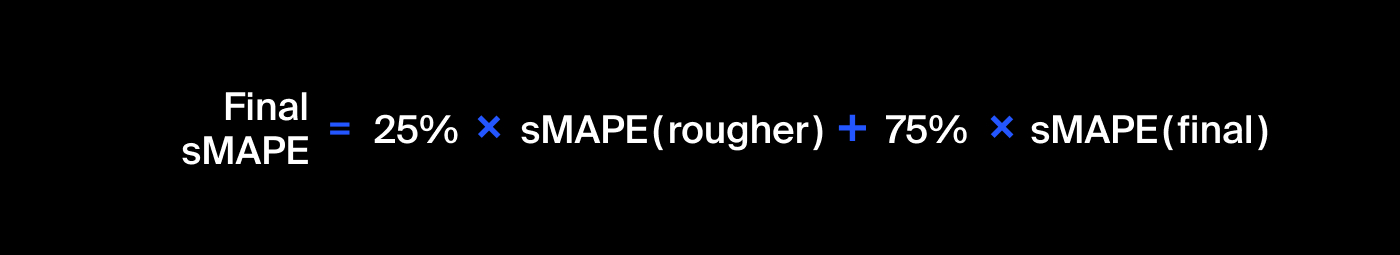

In [235]:
# Define the HTML tag to display the image
html_img_tag4 = f'<img src="data:image/jpeg;base64,{base64_string}" alt="recovery formula" style="width:700px;"/>'
display(HTML(html_img_tag4))

<div class="alert alert-info">
  Deb's comment 1:  I was just trying to imbed an image that explains the Final sMAPE math formula.  I did not get error on my end. But, I changed it, to try a different method, so that you can see the image, too.
</div>

### The Symmetric Mean Absolute Percentage Error (sMAPE) is a metric used to measure the accuracy of a predictive model, especially in the context of forecasting. It expresses the error as a percentage, which makes it easier to interpret and compare across different datasets or models.  The lower the sMAPE, the more accurate the model is. sMAPE of 0 indicates perfect prediction.

### function for sMAPE

In [239]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.nanmean((error / scale) * 100)

In [240]:
def smape_weighted(y_true, y_pred):
    # Access using the column names
    rougher = smape(y_true['rougher.output.recovery'], y_pred['rougher.output.recovery'])
    final = smape(y_true['final.output.recovery'], y_pred['final.output.recovery'])
    return 0.25 * rougher + 0.75 * final

- Linear Regression

In [242]:
# Initialize the Linear Regression model
model = LinearRegression()

In [243]:
# Fit the model on the training data
model.fit(features_train, target_train)

LinearRegression()

### Make Predictions

In [245]:
pred = model.predict(features_test)

In [246]:
# Predict on the test set
#pred_df = pd.DataFrame(pred, columns=targets)
pred_df = pd.DataFrame(pred, columns=['rougher.output.recovery', 'final.output.recovery'])

In [247]:
# Convert predictions to DataFrame with correct column names
pred_df = pd.DataFrame(pred, columns=['rougher.output.recovery', 'final.output.recovery'])

### Call sMAPE function on Linear Regression predictions

In [249]:
# Calculate and print sMAPE
print('sMAPE Weighted for LinearRegression:', smape_weighted(target_test, pred_df))

sMAPE Weighted for LinearRegression: 12.311794657372829


12.31 is okay.

<div class="alert alert-info">
  Deb's comment 2:  The sMAPE weighted score is now 12.31 (as opposed to 2.8, which is what it was before the code fix) Removing the targets from the features list has changed the score, so the score has gone down.
</div>

_______________

<div class="alert alert-info">
  Deb's comment 1:  This section below has changed. I added in the constant model. I created params. I added best estimator.
</div>

## Try a different model

- Decision Tree

In [256]:
param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2', None] 
}

In [257]:
# Setup and fit RandomizedSearchCV for DecisionTree
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(features_train, target_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42, scoring='neg_mean_absolute_error')

In [258]:
# Use the best estimator
best_decision_tree_model = random_search.best_estimator_
pred_best_decision_tree = best_decision_tree_model.predict(features_test)
pred_df_best_decision_tree = pd.DataFrame(pred_best_decision_tree, columns=['rougher.output.recovery', 'final.output.recovery'])

In [259]:
decision_tree_smape = smape_weighted(target_test, pred_df_best_decision_tree)
print('sMAPE Weighted (Best Decision Tree):', decision_tree_smape)

sMAPE Weighted (Best Decision Tree): 11.891247644689678


<h3 style="color: black; text-decoration: none; display: inline-block; position: relative;">
  Constant Model:
  <span style="position: absolute; left: 0; bottom: -6px; width: 100%; height: 4px; background-color: gold;"></span>
</h3>

- A benchmark. Constant model predicts the mean of the rougher.output.recovery and final.output.recovery from the training set for every entry in the test set.

In [262]:
# Implementing and evaluating the constant model
constant_pred_rougher = np.full((len(features_test),), target_train['rougher.output.recovery'].mean())
constant_pred_final = np.full((len(features_test),), target_train['final.output.recovery'].mean())

constant_pred_df = pd.DataFrame({
    'rougher.output.recovery': constant_pred_rougher,
    'final.output.recovery': constant_pred_final
})

constant_model_smape = smape_weighted(target_test, constant_pred_df)

print('sMAPE Weighted (Constant Model):', constant_model_smape)

sMAPE Weighted (Constant Model): 13.180697474259354


In [263]:
# Compare the results
print(f"Improvement over Constant Model: {constant_model_smape - decision_tree_smape}")

Improvement over Constant Model: 1.2894498295696764


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. The results are too good to be true. I'd recommend to search for a mistake. 
2. You need to tune hyperparameters at least for one model.
3. You need to do a sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model. Your best model should be better than the constant one at least a bit.
    
P.S. Point 3 - is a good option to check your results. In this problem, the quality of the best model cannot be much better than the quality of the constant model. 
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct except the results:) The best model should show the results similar to the constant model. It's not possible to solve this task significantly better than the constant model. So, could you, please, find the mistake? You can even ask your tutor to help you with it.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Not fixed
  
</div>

<div class="alert alert-info">
  Deb's comment 2:  The Improvement over Constant Model has also changed since making the fix where I am no longer including the targets inside the features variable.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Now everything looks fine:) Well done!
  
</div>

## <div style="background-color: black; color: gold; padding: 10px; border-radius: 5px; display: inline-block;">Conclusion:</div>

### Levels of Metal Concentrations (Au, Ag, Pb) by Purification Stage
It is interesting that the concentrate of silver went down, after each stage, whereas, the concentrate of Gold and Lead went up, after each stage.
#### Flotation Stage
- **Gold**: 
  - **Before Flotation**: 7.5
  - **After Flotation**: 17.8 (more than doubled)
- **Lead**: 
  - **Before Flotation**: 3.28
  - **After Flotation**: 6.9 (more than doubled)
- **Silver**: 
  - **Before Flotation**: 8.0
  - **After Flotation**: 10.85 (increased by 25%)
#### Primary Cleaning Stage
- **Gold**:
  - **Before Primary Cleaning**: 17.83
  - **After Primary Cleaning**: 29.12 (almost doubled)
- **Lead**: 
  - **Before Primary Cleaning**: 6.89
  - **After Primary Cleaning**: 8.8 (increased by 25%)
- **Silver**: 
  - **Before Primary Cleaning**: 10.85
  - **After Primary Cleaning**: 7.67 (decreased)
#### Secondary Cleaning Stage
- **Gold**: 
  - **Before Secondary Cleaning**: 29.12
  - **After Secondary Cleaning**: 39.9 (increased by 25%)
- **Lead**: 
  - **Before Secondary Cleaning**: 8.81
  - **After Secondary Cleaning**: 9.07 (slight increase)
- **Silver**: 
  - **Before Secondary Cleaning**: 7.67
  - **After Secondary Cleaning**: 4.77 (decreased)
#### Final Concentrate Comparison
- **Gold**:
  - **Final Concentrate**: 39.9
  - **Final Tails**: 2.81
- **Lead**:
  - **Final Concentrate**: 9.07
  - **Final Tails**: 2.47
- **Silver**:
  - **Final Concentrate**: 4.77
  - **Final Tails**: 8.9

### Predictive Models
#### Linear Regression Model
- **sMAPE Score**:
- 12.31
This is an okay score. The model is okay.
#### Decision Tree Model
- **sMAPE Score**:
- 11.89
This is a slightly better score. The Decision Tree Model is slightly better than the Linear Regression Model.